<a href="https://colab.research.google.com/github/tusharkanta/ML_DL/blob/eva/S15/S15_Final_Phase1_EVA_run3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
from zipfile import ZipFile
import os
from PIL import Image
import matplotlib.pyplot as plt

Mount google drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Install auto time module


In [3]:
!pip install ipython-autotime
%load_ext autotime
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=cb8b8a10dc970bb326d4ad5aee2a2d311a7fb1c1bd18ba7088c568ea1b4d56ba
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-zvc1ms1f
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-zvc1ms1f
     |████████████████████████████████| 634kB 2.8MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65038 sha256=ffd606522326c8c9f278a9a92c993183756512743dd2633cf796837370757336
  Stored in directory: /tmp/pip-ephem-wheel-cache-122_kk0v/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=b39852a4d1992e9617e1aa6719d756eb190d6d7a705d599206a7b2a8113d737c
  Stored in

Import utility functions

In [4]:
os.chdir('/content')
if os.path.exists('utils.py'):
  os.remove('utils.py')
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils as utils

Saving utils.py to utils.py
time: 9.47 s


Import data loader


In [5]:
os.chdir('/content')
torch.cuda.empty_cache()
if os.path.exists('dataloader_s15.py'):
  os.remove('dataloader_s15.py')
from google.colab import files
src = list(files.upload().values())[0]
open('dataloader_s15.py','wb').write(src)
import dataloader_s15 as dl

Saving dataloader_s15.py to dataloader_s15.py
Our make_dataset:

time: 9.32 s


Import model definition

In [6]:
os.chdir('/content')
if os.path.exists('model_def_s15.py'):
  os.remove('model_def_s15.py')
from google.colab import files
src = list(files.upload().values())[0]
open('model_def_s15.py','wb').write(src)
import model_def_s15 as modeldef

Saving model_def_s15.py to model_def_s15.py
time: 10.2 s


Import train/test functions


In [7]:
os.chdir('/content')
if os.path.exists('model_train_s15_5.py'):
  os.remove('model_train_s15_5.py')
from google.colab import files
src = list(files.upload().values())[0]
open('model_train_s15_6.py','wb').write(src)
import model_train_s15_6 as modeltrt

Saving model_train_s15_6.py to model_train_s15_6.py
time: 8.13 s


Extract bg_fg, mask and depth map images along with ground truth

In [8]:
os.chdir('/content')
#dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_1.zip')
#dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_2.zip')
#dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_3.zip')
#dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_4.zip')
#dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_5.zip')
#dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_6.zip')
#dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_7.zip')
#dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_8.zip')
#dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_9.zip')
#dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_10.zip')
dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_11.zip')
dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_12.zip')
dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_13.zip')
dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_14.zip')
dl.extract_images('/content/drive/My Drive/EVA4/S15/batch_15.zip')


time: 50.4 s


In [9]:
print(len(os.listdir('/content/depthMap')))
print(len(os.listdir('/content/bg_fg_1')))
print(len(os.listdir('/content/bg_fg_mask_1')))


50000
50000
50000
time: 75.9 ms


Extract bg images

In [10]:
os.chdir('/content')
if not os.path.exists('/content/bg'):
  os.mkdir('bg')
os.chdir('/content/bg')
dl.extract_images('/content/drive/My Drive/EVA4/S15/bgimages.zip')

time: 525 ms


In [11]:
utils.save_mask_gray_scale()
utils.save_depth_map_gray_scale()
train_loader,test_loader=dl.load_data()

time: 2min 41s


In [12]:
# net = modeldef.S11Model()
# net = models.resnet18(pretrained=True)
net = modeldef.DepthMask()
#net = modeldef.UNet(1)
#net = modeldef.ResNetUNet(3)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda
time: 176 ms


Build model summary

In [13]:
!pip install torchsummary
from torchsummary import summary
# Display Model Summary
model = net.to(device)
summary(model, input_size=(6, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]          18,816
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
   ConvTranspose2d-5        [-1, 128, 111, 111]           8,192
            Conv2d-6          [-1, 128, 28, 28]          73,728
            Conv2d-7          [-1, 128, 28, 28]          16,384
       BatchNorm2d-8          [-1, 128, 28, 28]             256
              ReLU-9          [-1, 128, 28, 28]               0
           Conv2d-10          [-1, 128, 14, 14]         147,456
           Conv2d-11          [-1, 128, 14, 14]          16,384
      BatchNorm2d-12          [-1, 128, 14, 14]             256
             ReLU-13          [-1, 128, 14, 14]               0
         Downsize-14          [-1, 128,

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [14]:
#!pip install kornia
#from kornia.losses import SSIM
#from kornia.losses import DiceLoss
criterion = nn.BCEWithLogitsLoss() #SSIM( 3, reduction ="mean")
#criterion = dice_loss()
#criterion = DiceLoss()
#criterion = SSIM(3,reduction='mean')

time: 2.6 ms


In [15]:
model.load_state_dict(torch.load('/content/drive/My Drive/EVA4/S15/output_run2_full_20epochs/model/13_935.pth'))

<All keys matched successfully>

time: 765 ms


In [16]:
optimizer = torch.optim.SGD(model.parameters(),lr= 0.001, momentum=0.9, weight_decay=1e-5)

time: 2.61 ms


In [0]:
import glob
import shutil
filist = glob.glob('/content/drive/My Drive/EVA4/S15/*.png')
for i in filist:
  shutil.move(i,'/content/drive/My Drive/EVA4/S15/output_run1_50k_10epochs/')

Strart training and validation process

In [17]:
%matplotlib inline
prnt=186
last_epoch=13
os.makedirs('/content/saved_models', exist_ok=True)
for epoch in range(14):
  #print('\nEpoch:',epoch)
  modeltrt.train(model, criterion, device, train_loader,optimizer,epoch)
  modeltrt.test(model, criterion, device, test_loader,epoch,last_epoch=last_epoch, prnt=prnt)

  0%|          | 0/2188 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))



Epoch: 0


  0%|          | 2/2188 [00:00<17:59,  2.03it/s]


Epoch: 0

Epoch: 0


  0%|          | 4/2188 [00:01<12:44,  2.86it/s]


Epoch: 0


  0%|          | 5/2188 [00:01<11:14,  3.24it/s]


Epoch: 0


  0%|          | 6/2188 [00:01<10:11,  3.57it/s]


Epoch: 0


  0%|          | 7/2188 [00:01<09:27,  3.84it/s]


Epoch: 0


  0%|          | 8/2188 [00:02<08:56,  4.06it/s]


Epoch: 0


  0%|          | 9/2188 [00:02<08:35,  4.23it/s]


Epoch: 0


  0%|          | 10/2188 [00:02<08:19,  4.36it/s]


Epoch: 0

Epoch: 0


  1%|          | 12/2188 [00:03<09:39,  3.76it/s]


Epoch: 0

Epoch: 0


  1%|          | 14/2188 [00:03<08:37,  4.20it/s]


Epoch: 0


  1%|          | 15/2188 [00:03<08:20,  4.34it/s]


Epoch: 0


  1%|          | 16/2188 [00:04<08:08,  4.44it/s]


Epoch: 0


  1%|          | 17/2188 [00:04<08:00,  4.52it/s]


Epoch: 0


  1%|          | 18/2188 [00:04<07:54,  4.57it/s]


Epoch: 0


  1%|          | 19/2188 [00:04<07:50,  4.61it/s]


Epoch: 0


  1%|          | 20/2188 [00:04<07:47,  4.64it/s]


Epoch: 0

Epoch: 0


  1%|          | 22/2188 [00:05<09:21,  3.86it/s]


Epoch: 0

Epoch: 0


  1%|          | 24/2188 [00:05<08:27,  4.26it/s]


Epoch: 0


  1%|          | 25/2188 [00:06<08:13,  4.38it/s]


Epoch: 0


  1%|          | 26/2188 [00:06<08:03,  4.47it/s]


Epoch: 0


  1%|          | 27/2188 [00:06<07:56,  4.54it/s]


Epoch: 0


  1%|▏         | 28/2188 [00:06<07:51,  4.58it/s]


Epoch: 0


  1%|▏         | 29/2188 [00:07<07:48,  4.61it/s]


Epoch: 0


  1%|▏         | 30/2188 [00:07<07:45,  4.64it/s]


Epoch: 0

Epoch: 0


  1%|▏         | 32/2188 [00:07<09:22,  3.83it/s]


Epoch: 0

Epoch: 0


  2%|▏         | 34/2188 [00:08<08:28,  4.24it/s]


Epoch: 0


  2%|▏         | 35/2188 [00:08<08:14,  4.36it/s]


Epoch: 0


  2%|▏         | 36/2188 [00:08<08:03,  4.45it/s]


Epoch: 0


  2%|▏         | 37/2188 [00:08<07:55,  4.52it/s]


Epoch: 0


  2%|▏         | 38/2188 [00:09<07:49,  4.58it/s]


Epoch: 0


  2%|▏         | 39/2188 [00:09<07:46,  4.61it/s]


Epoch: 0


  2%|▏         | 40/2188 [00:09<07:43,  4.63it/s]


Epoch: 0

Epoch: 0


  2%|▏         | 42/2188 [00:10<09:09,  3.90it/s]


Epoch: 0

Epoch: 0


  2%|▏         | 44/2188 [00:10<08:19,  4.29it/s]


Epoch: 0


  2%|▏         | 45/2188 [00:10<08:05,  4.41it/s]


Epoch: 0


  2%|▏         | 46/2188 [00:11<07:56,  4.49it/s]


Epoch: 0


  2%|▏         | 47/2188 [00:11<07:50,  4.55it/s]


Epoch: 0


  2%|▏         | 48/2188 [00:11<07:45,  4.60it/s]


Epoch: 0


  2%|▏         | 49/2188 [00:11<07:42,  4.62it/s]


Epoch: 0


  2%|▏         | 50/2188 [00:11<07:40,  4.64it/s]


Epoch: 0

Epoch: 0


  2%|▏         | 52/2188 [00:12<09:04,  3.93it/s]


Epoch: 0

Epoch: 0


  2%|▏         | 54/2188 [00:13<08:16,  4.30it/s]


Epoch: 0


  3%|▎         | 55/2188 [00:13<08:04,  4.41it/s]


Epoch: 0


  3%|▎         | 56/2188 [00:13<07:55,  4.49it/s]


Epoch: 0


  3%|▎         | 57/2188 [00:13<07:48,  4.55it/s]


Epoch: 0


  3%|▎         | 58/2188 [00:13<07:43,  4.59it/s]


Epoch: 0


  3%|▎         | 59/2188 [00:14<07:40,  4.62it/s]


Epoch: 0


  3%|▎         | 60/2188 [00:14<07:38,  4.64it/s]


Epoch: 0

Epoch: 0


  3%|▎         | 62/2188 [00:14<09:15,  3.83it/s]


Epoch: 0

Epoch: 0


  3%|▎         | 64/2188 [00:15<08:20,  4.25it/s]


Epoch: 0


  3%|▎         | 65/2188 [00:15<08:05,  4.37it/s]


Epoch: 0


  3%|▎         | 66/2188 [00:15<07:54,  4.47it/s]


Epoch: 0


  3%|▎         | 67/2188 [00:16<07:48,  4.53it/s]


Epoch: 0


  3%|▎         | 68/2188 [00:16<07:43,  4.58it/s]


Epoch: 0


  3%|▎         | 69/2188 [00:16<07:40,  4.60it/s]


Epoch: 0


  3%|▎         | 70/2188 [00:16<07:37,  4.63it/s]


Epoch: 0

Epoch: 0


  3%|▎         | 72/2188 [00:17<08:58,  3.93it/s]


Epoch: 0

Epoch: 0


  3%|▎         | 74/2188 [00:17<08:13,  4.29it/s]


Epoch: 0


  3%|▎         | 75/2188 [00:17<08:00,  4.40it/s]


Epoch: 0


  3%|▎         | 76/2188 [00:18<07:51,  4.48it/s]


Epoch: 0


  4%|▎         | 77/2188 [00:18<07:44,  4.55it/s]


Epoch: 0


  4%|▎         | 78/2188 [00:18<07:40,  4.59it/s]


Epoch: 0


  4%|▎         | 79/2188 [00:18<07:37,  4.61it/s]


Epoch: 0


  4%|▎         | 80/2188 [00:19<07:34,  4.64it/s]


Epoch: 0

Epoch: 0


  4%|▎         | 82/2188 [00:19<08:56,  3.92it/s]


Epoch: 0

Epoch: 0


  4%|▍         | 84/2188 [00:20<08:08,  4.31it/s]


Epoch: 0


  4%|▍         | 85/2188 [00:20<07:57,  4.40it/s]


Epoch: 0


  4%|▍         | 86/2188 [00:20<07:56,  4.42it/s]


Epoch: 0


  4%|▍         | 87/2188 [00:20<07:43,  4.54it/s]


Epoch: 0


  4%|▍         | 88/2188 [00:20<07:39,  4.57it/s]


Epoch: 0


  4%|▍         | 89/2188 [00:21<07:36,  4.60it/s]


Epoch: 0


  4%|▍         | 90/2188 [00:21<07:33,  4.63it/s]


Epoch: 0

Epoch: 0


  4%|▍         | 92/2188 [00:22<08:53,  3.93it/s]


Epoch: 0

Epoch: 0


  4%|▍         | 94/2188 [00:22<08:07,  4.29it/s]


Epoch: 0


  4%|▍         | 95/2188 [00:22<07:54,  4.41it/s]


Epoch: 0


  4%|▍         | 96/2188 [00:22<07:46,  4.49it/s]


Epoch: 0


  4%|▍         | 97/2188 [00:23<07:39,  4.55it/s]


Epoch: 0


  4%|▍         | 98/2188 [00:23<07:35,  4.59it/s]


Epoch: 0


  5%|▍         | 99/2188 [00:23<07:32,  4.62it/s]


Epoch: 0


  5%|▍         | 100/2188 [00:23<07:29,  4.64it/s]


Epoch: 0

Epoch: 0


  5%|▍         | 102/2188 [00:24<08:49,  3.94it/s]


Epoch: 0


  5%|▍         | 103/2188 [00:24<08:23,  4.14it/s]


Epoch: 0


  5%|▍         | 104/2188 [00:24<08:05,  4.29it/s]


Epoch: 0


  5%|▍         | 105/2188 [00:25<07:53,  4.40it/s]


Epoch: 0


  5%|▍         | 106/2188 [00:25<07:44,  4.49it/s]


Epoch: 0


  5%|▍         | 107/2188 [00:25<07:37,  4.55it/s]


Epoch: 0


  5%|▍         | 108/2188 [00:25<07:33,  4.59it/s]


Epoch: 0


  5%|▍         | 109/2188 [00:25<07:29,  4.62it/s]


Epoch: 0


  5%|▌         | 110/2188 [00:26<07:27,  4.64it/s]


Epoch: 0

Epoch: 0


  5%|▌         | 112/2188 [00:26<08:51,  3.91it/s]


Epoch: 0

Epoch: 0


  5%|▌         | 114/2188 [00:27<08:03,  4.29it/s]


Epoch: 0


  5%|▌         | 115/2188 [00:27<07:50,  4.40it/s]


Epoch: 0


  5%|▌         | 116/2188 [00:27<07:42,  4.48it/s]


Epoch: 0


  5%|▌         | 117/2188 [00:27<07:35,  4.54it/s]


Epoch: 0


  5%|▌         | 118/2188 [00:28<07:31,  4.58it/s]


Epoch: 0


  5%|▌         | 119/2188 [00:28<07:28,  4.61it/s]


Epoch: 0


  5%|▌         | 120/2188 [00:28<07:25,  4.64it/s]


Epoch: 0

Epoch: 0


  6%|▌         | 122/2188 [00:29<08:49,  3.90it/s]


Epoch: 0

Epoch: 0


  6%|▌         | 124/2188 [00:29<08:02,  4.28it/s]


Epoch: 0


  6%|▌         | 125/2188 [00:29<07:49,  4.40it/s]


Epoch: 0


  6%|▌         | 126/2188 [00:29<07:40,  4.48it/s]


Epoch: 0


  6%|▌         | 127/2188 [00:30<07:33,  4.54it/s]


Epoch: 0


  6%|▌         | 128/2188 [00:30<07:29,  4.58it/s]


Epoch: 0


  6%|▌         | 129/2188 [00:30<07:26,  4.62it/s]


Epoch: 0


  6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 0

Epoch: 0


  6%|▌         | 132/2188 [00:31<08:54,  3.85it/s]


Epoch: 0

Epoch: 0


  6%|▌         | 134/2188 [00:31<08:04,  4.24it/s]


Epoch: 0


  6%|▌         | 135/2188 [00:32<07:49,  4.37it/s]


Epoch: 0


  6%|▌         | 136/2188 [00:32<07:39,  4.46it/s]


Epoch: 0


  6%|▋         | 137/2188 [00:32<07:32,  4.53it/s]


Epoch: 0


  6%|▋         | 138/2188 [00:32<07:28,  4.57it/s]


Epoch: 0


  6%|▋         | 139/2188 [00:32<07:24,  4.61it/s]


Epoch: 0


  6%|▋         | 140/2188 [00:33<07:21,  4.64it/s]


Epoch: 0

Epoch: 0


  6%|▋         | 142/2188 [00:33<08:48,  3.87it/s]


Epoch: 0

Epoch: 0


  7%|▋         | 144/2188 [00:34<07:59,  4.26it/s]


Epoch: 0


  7%|▋         | 145/2188 [00:34<07:46,  4.38it/s]


Epoch: 0


  7%|▋         | 146/2188 [00:34<07:36,  4.47it/s]


Epoch: 0


  7%|▋         | 147/2188 [00:34<07:30,  4.53it/s]


Epoch: 0


  7%|▋         | 148/2188 [00:35<07:25,  4.58it/s]


Epoch: 0


  7%|▋         | 149/2188 [00:35<07:21,  4.62it/s]


Epoch: 0


  7%|▋         | 150/2188 [00:35<07:18,  4.64it/s]


Epoch: 0

Epoch: 0


  7%|▋         | 152/2188 [00:36<08:38,  3.93it/s]


Epoch: 0

Epoch: 0


  7%|▋         | 154/2188 [00:36<07:54,  4.29it/s]


Epoch: 0


  7%|▋         | 155/2188 [00:36<07:41,  4.40it/s]


Epoch: 0


  7%|▋         | 156/2188 [00:37<07:32,  4.49it/s]


Epoch: 0


  7%|▋         | 157/2188 [00:37<07:26,  4.55it/s]


Epoch: 0


  7%|▋         | 158/2188 [00:37<07:21,  4.59it/s]


Epoch: 0


  7%|▋         | 159/2188 [00:37<07:18,  4.62it/s]


Epoch: 0


  7%|▋         | 160/2188 [00:37<07:16,  4.64it/s]


Epoch: 0

Epoch: 0


  7%|▋         | 162/2188 [00:38<08:35,  3.93it/s]


Epoch: 0

Epoch: 0


  7%|▋         | 164/2188 [00:38<07:50,  4.30it/s]


Epoch: 0


  8%|▊         | 165/2188 [00:39<07:38,  4.41it/s]


Epoch: 0


  8%|▊         | 166/2188 [00:39<07:29,  4.49it/s]


Epoch: 0


  8%|▊         | 167/2188 [00:39<07:23,  4.55it/s]


Epoch: 0


  8%|▊         | 168/2188 [00:39<07:20,  4.59it/s]


Epoch: 0


  8%|▊         | 169/2188 [00:40<07:16,  4.62it/s]


Epoch: 0


  8%|▊         | 170/2188 [00:40<07:15,  4.64it/s]


Epoch: 0

Epoch: 0


  8%|▊         | 172/2188 [00:40<08:35,  3.91it/s]


Epoch: 0

Epoch: 0


  8%|▊         | 174/2188 [00:41<07:48,  4.29it/s]


Epoch: 0


  8%|▊         | 175/2188 [00:41<07:36,  4.41it/s]


Epoch: 0


  8%|▊         | 176/2188 [00:41<07:27,  4.49it/s]


Epoch: 0


  8%|▊         | 177/2188 [00:41<07:21,  4.55it/s]


Epoch: 0


  8%|▊         | 178/2188 [00:42<07:17,  4.59it/s]


Epoch: 0


  8%|▊         | 179/2188 [00:42<07:14,  4.62it/s]


Epoch: 0


  8%|▊         | 180/2188 [00:42<07:12,  4.65it/s]


Epoch: 0

Epoch: 0


  8%|▊         | 182/2188 [00:43<08:31,  3.92it/s]


Epoch: 0

Epoch: 0


  8%|▊         | 184/2188 [00:43<07:47,  4.29it/s]


Epoch: 0


  8%|▊         | 185/2188 [00:43<07:34,  4.41it/s]


Epoch: 0


  9%|▊         | 186/2188 [00:44<07:26,  4.48it/s]


Epoch: 0


  9%|▊         | 187/2188 [00:44<07:20,  4.54it/s]


Epoch: 0


  9%|▊         | 188/2188 [00:44<07:16,  4.59it/s]


Epoch: 0


  9%|▊         | 189/2188 [00:44<07:12,  4.62it/s]


Epoch: 0


  9%|▊         | 190/2188 [00:44<07:10,  4.64it/s]


Epoch: 0

Epoch: 0


  9%|▉         | 192/2188 [00:45<08:31,  3.90it/s]


Epoch: 0

Epoch: 0


  9%|▉         | 194/2188 [00:46<07:44,  4.29it/s]


Epoch: 0


  9%|▉         | 195/2188 [00:46<07:33,  4.40it/s]


Epoch: 0


  9%|▉         | 196/2188 [00:46<07:25,  4.47it/s]


Epoch: 0


  9%|▉         | 197/2188 [00:46<07:18,  4.54it/s]


Epoch: 0


  9%|▉         | 198/2188 [00:46<07:14,  4.58it/s]


Epoch: 0


  9%|▉         | 199/2188 [00:47<07:11,  4.61it/s]


Epoch: 0


  9%|▉         | 200/2188 [00:47<07:09,  4.63it/s]


Epoch: 0

Epoch: 0


  9%|▉         | 202/2188 [00:47<08:31,  3.88it/s]


Epoch: 0

Epoch: 0


  9%|▉         | 204/2188 [00:48<07:44,  4.27it/s]


Epoch: 0


  9%|▉         | 205/2188 [00:48<07:31,  4.39it/s]


Epoch: 0


  9%|▉         | 206/2188 [00:48<07:23,  4.47it/s]


Epoch: 0


  9%|▉         | 207/2188 [00:49<07:16,  4.53it/s]


Epoch: 0


 10%|▉         | 208/2188 [00:49<07:12,  4.58it/s]


Epoch: 0


 10%|▉         | 209/2188 [00:49<07:08,  4.62it/s]


Epoch: 0


 10%|▉         | 210/2188 [00:49<07:06,  4.63it/s]


Epoch: 0

Epoch: 0


 10%|▉         | 212/2188 [00:50<08:25,  3.91it/s]


Epoch: 0

Epoch: 0


 10%|▉         | 214/2188 [00:50<07:40,  4.29it/s]


Epoch: 0


 10%|▉         | 215/2188 [00:50<07:27,  4.41it/s]


Epoch: 0


 10%|▉         | 216/2188 [00:51<07:19,  4.48it/s]


Epoch: 0


 10%|▉         | 217/2188 [00:51<07:14,  4.54it/s]


Epoch: 0


 10%|▉         | 218/2188 [00:51<07:09,  4.59it/s]


Epoch: 0


 10%|█         | 219/2188 [00:51<07:06,  4.62it/s]


Epoch: 0


 10%|█         | 220/2188 [00:52<07:04,  4.64it/s]


Epoch: 0

Epoch: 0


 10%|█         | 222/2188 [00:52<08:26,  3.88it/s]


Epoch: 0

Epoch: 0


 10%|█         | 224/2188 [00:53<07:39,  4.27it/s]


Epoch: 0


 10%|█         | 225/2188 [00:53<07:26,  4.39it/s]


Epoch: 0


 10%|█         | 226/2188 [00:53<07:17,  4.48it/s]


Epoch: 0


 10%|█         | 227/2188 [00:53<07:11,  4.55it/s]


Epoch: 0


 10%|█         | 228/2188 [00:53<07:07,  4.59it/s]


Epoch: 0


 10%|█         | 229/2188 [00:54<07:04,  4.62it/s]


Epoch: 0


 11%|█         | 230/2188 [00:54<07:01,  4.64it/s]


Epoch: 0

Epoch: 0


 11%|█         | 232/2188 [00:55<08:23,  3.89it/s]


Epoch: 0

Epoch: 0


 11%|█         | 234/2188 [00:55<07:37,  4.27it/s]


Epoch: 0


 11%|█         | 235/2188 [00:55<07:24,  4.39it/s]


Epoch: 0


 11%|█         | 236/2188 [00:55<07:15,  4.48it/s]


Epoch: 0


 11%|█         | 237/2188 [00:56<07:09,  4.55it/s]


Epoch: 0


 11%|█         | 238/2188 [00:56<07:04,  4.59it/s]


Epoch: 0


 11%|█         | 239/2188 [00:56<07:01,  4.63it/s]


Epoch: 0


 11%|█         | 240/2188 [00:56<06:59,  4.64it/s]


Epoch: 0

Epoch: 0


 11%|█         | 242/2188 [00:57<08:19,  3.90it/s]


Epoch: 0

Epoch: 0


 11%|█         | 244/2188 [00:57<07:31,  4.30it/s]


Epoch: 0


 11%|█         | 245/2188 [00:58<07:20,  4.41it/s]


Epoch: 0


 11%|█         | 246/2188 [00:58<07:12,  4.49it/s]


Epoch: 0


 11%|█▏        | 247/2188 [00:58<07:07,  4.54it/s]


Epoch: 0


 11%|█▏        | 248/2188 [00:58<07:02,  4.59it/s]


Epoch: 0


 11%|█▏        | 249/2188 [00:58<06:59,  4.62it/s]


Epoch: 0


 11%|█▏        | 250/2188 [00:59<06:57,  4.64it/s]


Epoch: 0

Epoch: 0


 12%|█▏        | 252/2188 [00:59<08:12,  3.93it/s]


Epoch: 0

Epoch: 0


 12%|█▏        | 254/2188 [01:00<07:29,  4.30it/s]


Epoch: 0


 12%|█▏        | 255/2188 [01:00<07:18,  4.41it/s]


Epoch: 0


 12%|█▏        | 256/2188 [01:00<07:09,  4.49it/s]


Epoch: 0


 12%|█▏        | 257/2188 [01:00<07:04,  4.55it/s]


Epoch: 0


 12%|█▏        | 258/2188 [01:01<06:59,  4.60it/s]


Epoch: 0


 12%|█▏        | 259/2188 [01:01<06:57,  4.62it/s]


Epoch: 0


 12%|█▏        | 260/2188 [01:01<06:54,  4.65it/s]


Epoch: 0

Epoch: 0


 12%|█▏        | 262/2188 [01:02<08:16,  3.88it/s]


Epoch: 0

Epoch: 0


 12%|█▏        | 264/2188 [01:02<07:30,  4.27it/s]


Epoch: 0


 12%|█▏        | 265/2188 [01:02<07:18,  4.38it/s]


Epoch: 0


 12%|█▏        | 266/2188 [01:02<07:09,  4.47it/s]


Epoch: 0


 12%|█▏        | 267/2188 [01:03<07:03,  4.54it/s]


Epoch: 0


 12%|█▏        | 268/2188 [01:03<06:58,  4.58it/s]


Epoch: 0


 12%|█▏        | 269/2188 [01:03<06:55,  4.62it/s]


Epoch: 0


 12%|█▏        | 270/2188 [01:03<06:53,  4.64it/s]


Epoch: 0

Epoch: 0


 12%|█▏        | 272/2188 [01:04<08:11,  3.90it/s]


Epoch: 0

Epoch: 0


 13%|█▎        | 274/2188 [01:04<07:25,  4.30it/s]


Epoch: 0


 13%|█▎        | 275/2188 [01:05<07:14,  4.41it/s]


Epoch: 0


 13%|█▎        | 276/2188 [01:05<07:05,  4.49it/s]


Epoch: 0


 13%|█▎        | 277/2188 [01:05<06:59,  4.55it/s]


Epoch: 0


 13%|█▎        | 278/2188 [01:05<06:55,  4.59it/s]


Epoch: 0


 13%|█▎        | 279/2188 [01:05<06:52,  4.63it/s]


Epoch: 0


 13%|█▎        | 280/2188 [01:06<06:50,  4.65it/s]


Epoch: 0

Epoch: 0


 13%|█▎        | 282/2188 [01:06<08:13,  3.86it/s]


Epoch: 0

Epoch: 0


 13%|█▎        | 284/2188 [01:07<07:25,  4.28it/s]


Epoch: 0


 13%|█▎        | 285/2188 [01:07<07:12,  4.40it/s]


Epoch: 0


 13%|█▎        | 286/2188 [01:07<07:04,  4.48it/s]


Epoch: 0


 13%|█▎        | 287/2188 [01:07<06:58,  4.54it/s]


Epoch: 0


 13%|█▎        | 288/2188 [01:08<06:54,  4.59it/s]


Epoch: 0


 13%|█▎        | 289/2188 [01:08<06:51,  4.62it/s]


Epoch: 0


 13%|█▎        | 290/2188 [01:08<06:48,  4.64it/s]


Epoch: 0

Epoch: 0


 13%|█▎        | 292/2188 [01:09<08:02,  3.93it/s]


Epoch: 0

Epoch: 0


 13%|█▎        | 294/2188 [01:09<07:20,  4.30it/s]


Epoch: 0


 13%|█▎        | 295/2188 [01:09<07:09,  4.41it/s]


Epoch: 0


 14%|█▎        | 296/2188 [01:10<07:02,  4.48it/s]


Epoch: 0


 14%|█▎        | 297/2188 [01:10<06:56,  4.54it/s]


Epoch: 0


 14%|█▎        | 298/2188 [01:10<06:52,  4.58it/s]


Epoch: 0


 14%|█▎        | 299/2188 [01:10<06:49,  4.61it/s]


Epoch: 0


 14%|█▎        | 300/2188 [01:10<06:47,  4.63it/s]


Epoch: 0

Epoch: 0


 14%|█▍        | 302/2188 [01:11<08:11,  3.84it/s]


Epoch: 0

Epoch: 0


 14%|█▍        | 304/2188 [01:11<07:23,  4.25it/s]


Epoch: 0


 14%|█▍        | 305/2188 [01:12<07:10,  4.37it/s]


Epoch: 0


 14%|█▍        | 306/2188 [01:12<07:01,  4.46it/s]


Epoch: 0


 14%|█▍        | 307/2188 [01:12<06:55,  4.53it/s]


Epoch: 0


 14%|█▍        | 308/2188 [01:12<06:50,  4.58it/s]


Epoch: 0


 14%|█▍        | 309/2188 [01:13<06:47,  4.61it/s]


Epoch: 0


 14%|█▍        | 310/2188 [01:13<06:44,  4.64it/s]


Epoch: 0

Epoch: 0


 14%|█▍        | 312/2188 [01:13<07:57,  3.93it/s]


Epoch: 0

Epoch: 0


 14%|█▍        | 314/2188 [01:14<07:15,  4.30it/s]


Epoch: 0


 14%|█▍        | 315/2188 [01:14<07:04,  4.41it/s]


Epoch: 0


 14%|█▍        | 316/2188 [01:14<06:56,  4.49it/s]


Epoch: 0


 14%|█▍        | 317/2188 [01:14<06:51,  4.55it/s]


Epoch: 0


 15%|█▍        | 318/2188 [01:15<06:47,  4.59it/s]


Epoch: 0


 15%|█▍        | 319/2188 [01:15<06:44,  4.62it/s]


Epoch: 0


 15%|█▍        | 320/2188 [01:15<06:42,  4.64it/s]


Epoch: 0

Epoch: 0


 15%|█▍        | 322/2188 [01:16<08:08,  3.82it/s]


Epoch: 0

Epoch: 0


 15%|█▍        | 324/2188 [01:16<07:20,  4.23it/s]


Epoch: 0


 15%|█▍        | 325/2188 [01:16<07:06,  4.36it/s]


Epoch: 0


 15%|█▍        | 326/2188 [01:17<06:57,  4.46it/s]


Epoch: 0


 15%|█▍        | 327/2188 [01:17<06:51,  4.53it/s]


Epoch: 0


 15%|█▍        | 328/2188 [01:17<06:46,  4.58it/s]


Epoch: 0


 15%|█▌        | 329/2188 [01:17<06:42,  4.62it/s]


Epoch: 0


 15%|█▌        | 330/2188 [01:18<06:40,  4.64it/s]


Epoch: 0

Epoch: 0


 15%|█▌        | 332/2188 [01:18<07:53,  3.92it/s]


Epoch: 0

Epoch: 0


 15%|█▌        | 334/2188 [01:19<07:12,  4.29it/s]


Epoch: 0


 15%|█▌        | 335/2188 [01:19<07:00,  4.41it/s]


Epoch: 0


 15%|█▌        | 336/2188 [01:19<06:52,  4.49it/s]


Epoch: 0


 15%|█▌        | 337/2188 [01:19<06:47,  4.55it/s]


Epoch: 0


 15%|█▌        | 338/2188 [01:19<06:43,  4.59it/s]


Epoch: 0


 15%|█▌        | 339/2188 [01:20<06:40,  4.62it/s]


Epoch: 0


 16%|█▌        | 340/2188 [01:20<06:38,  4.64it/s]


Epoch: 0

Epoch: 0


 16%|█▌        | 342/2188 [01:21<08:14,  3.73it/s]


Epoch: 0

Epoch: 0


 16%|█▌        | 344/2188 [01:21<07:12,  4.26it/s]


Epoch: 0


 16%|█▌        | 345/2188 [01:21<07:00,  4.38it/s]


Epoch: 0


 16%|█▌        | 346/2188 [01:21<06:52,  4.47it/s]


Epoch: 0


 16%|█▌        | 347/2188 [01:22<06:45,  4.54it/s]


Epoch: 0


 16%|█▌        | 348/2188 [01:22<06:41,  4.58it/s]


Epoch: 0


 16%|█▌        | 349/2188 [01:22<06:38,  4.61it/s]


Epoch: 0


 16%|█▌        | 350/2188 [01:22<06:36,  4.63it/s]


Epoch: 0

Epoch: 0


 16%|█▌        | 352/2188 [01:23<07:53,  3.88it/s]


Epoch: 0

Epoch: 0


 16%|█▌        | 354/2188 [01:23<07:08,  4.28it/s]


Epoch: 0


 16%|█▌        | 355/2188 [01:24<06:56,  4.40it/s]


Epoch: 0


 16%|█▋        | 356/2188 [01:24<06:49,  4.48it/s]


Epoch: 0


 16%|█▋        | 357/2188 [01:24<06:42,  4.54it/s]


Epoch: 0


 16%|█▋        | 358/2188 [01:24<06:38,  4.59it/s]


Epoch: 0


 16%|█▋        | 359/2188 [01:24<06:36,  4.62it/s]


Epoch: 0


 16%|█▋        | 360/2188 [01:25<06:34,  4.64it/s]


Epoch: 0

Epoch: 0


 17%|█▋        | 362/2188 [01:25<07:51,  3.88it/s]


Epoch: 0

Epoch: 0


 17%|█▋        | 364/2188 [01:26<07:06,  4.28it/s]


Epoch: 0


 17%|█▋        | 365/2188 [01:26<06:55,  4.39it/s]


Epoch: 0


 17%|█▋        | 366/2188 [01:26<06:46,  4.48it/s]


Epoch: 0


 17%|█▋        | 367/2188 [01:26<06:40,  4.54it/s]


Epoch: 0


 17%|█▋        | 368/2188 [01:27<06:36,  4.59it/s]


Epoch: 0


 17%|█▋        | 369/2188 [01:27<06:33,  4.62it/s]


Epoch: 0


 17%|█▋        | 370/2188 [01:27<06:31,  4.65it/s]


Epoch: 0

Epoch: 0


 17%|█▋        | 372/2188 [01:28<07:46,  3.89it/s]


Epoch: 0

Epoch: 0


 17%|█▋        | 374/2188 [01:28<07:02,  4.29it/s]


Epoch: 0


 17%|█▋        | 375/2188 [01:28<06:51,  4.41it/s]


Epoch: 0


 17%|█▋        | 376/2188 [01:28<06:43,  4.49it/s]


Epoch: 0


 17%|█▋        | 377/2188 [01:29<06:38,  4.55it/s]


Epoch: 0


 17%|█▋        | 378/2188 [01:29<06:34,  4.59it/s]


Epoch: 0


 17%|█▋        | 379/2188 [01:29<06:31,  4.63it/s]


Epoch: 0


 17%|█▋        | 380/2188 [01:29<06:30,  4.63it/s]


Epoch: 0

Epoch: 0


 17%|█▋        | 382/2188 [01:30<07:43,  3.90it/s]


Epoch: 0

Epoch: 0


 18%|█▊        | 384/2188 [01:30<06:59,  4.30it/s]


Epoch: 0


 18%|█▊        | 385/2188 [01:31<06:48,  4.41it/s]


Epoch: 0


 18%|█▊        | 386/2188 [01:31<06:41,  4.49it/s]


Epoch: 0


 18%|█▊        | 387/2188 [01:31<06:35,  4.55it/s]


Epoch: 0


 18%|█▊        | 388/2188 [01:31<06:31,  4.59it/s]


Epoch: 0


 18%|█▊        | 389/2188 [01:31<06:29,  4.62it/s]


Epoch: 0


 18%|█▊        | 390/2188 [01:32<06:27,  4.64it/s]


Epoch: 0

Epoch: 0


 18%|█▊        | 392/2188 [01:32<07:42,  3.89it/s]


Epoch: 0

Epoch: 0


 18%|█▊        | 394/2188 [01:33<06:59,  4.28it/s]


Epoch: 0


 18%|█▊        | 395/2188 [01:33<06:47,  4.40it/s]


Epoch: 0


 18%|█▊        | 396/2188 [01:33<06:39,  4.48it/s]


Epoch: 0


 18%|█▊        | 397/2188 [01:33<06:34,  4.54it/s]


Epoch: 0


 18%|█▊        | 398/2188 [01:34<06:30,  4.59it/s]


Epoch: 0


 18%|█▊        | 399/2188 [01:34<06:27,  4.61it/s]


Epoch: 0


 18%|█▊        | 400/2188 [01:34<06:25,  4.63it/s]


Epoch: 0

Epoch: 0


 18%|█▊        | 402/2188 [01:35<07:37,  3.90it/s]


Epoch: 0

Epoch: 0


 18%|█▊        | 404/2188 [01:35<06:56,  4.29it/s]


Epoch: 0


 19%|█▊        | 405/2188 [01:35<06:44,  4.40it/s]


Epoch: 0


 19%|█▊        | 406/2188 [01:36<06:37,  4.48it/s]


Epoch: 0


 19%|█▊        | 407/2188 [01:36<06:31,  4.55it/s]


Epoch: 0


 19%|█▊        | 408/2188 [01:36<06:27,  4.59it/s]


Epoch: 0


 19%|█▊        | 409/2188 [01:36<06:24,  4.63it/s]


Epoch: 0


 19%|█▊        | 410/2188 [01:36<06:23,  4.64it/s]


Epoch: 0

Epoch: 0


 19%|█▉        | 412/2188 [01:37<07:34,  3.91it/s]


Epoch: 0

Epoch: 0


 19%|█▉        | 414/2188 [01:37<06:53,  4.29it/s]


Epoch: 0


 19%|█▉        | 415/2188 [01:38<06:42,  4.41it/s]


Epoch: 0


 19%|█▉        | 416/2188 [01:38<06:35,  4.48it/s]


Epoch: 0


 19%|█▉        | 417/2188 [01:38<06:29,  4.54it/s]


Epoch: 0


 19%|█▉        | 418/2188 [01:38<06:25,  4.59it/s]


Epoch: 0


 19%|█▉        | 419/2188 [01:39<06:23,  4.61it/s]


Epoch: 0


 19%|█▉        | 420/2188 [01:39<06:20,  4.64it/s]


Epoch: 0

Epoch: 0


 19%|█▉        | 422/2188 [01:39<07:30,  3.92it/s]


Epoch: 0

Epoch: 0


 19%|█▉        | 424/2188 [01:40<06:51,  4.29it/s]


Epoch: 0


 19%|█▉        | 425/2188 [01:40<06:40,  4.41it/s]


Epoch: 0


 19%|█▉        | 426/2188 [01:40<06:32,  4.49it/s]


Epoch: 0


 20%|█▉        | 427/2188 [01:40<06:27,  4.54it/s]


Epoch: 0


 20%|█▉        | 428/2188 [01:41<06:23,  4.58it/s]


Epoch: 0


 20%|█▉        | 429/2188 [01:41<06:21,  4.62it/s]


Epoch: 0


 20%|█▉        | 430/2188 [01:41<06:19,  4.64it/s]


Epoch: 0

Epoch: 0


 20%|█▉        | 432/2188 [01:42<07:29,  3.90it/s]


Epoch: 0

Epoch: 0


 20%|█▉        | 434/2188 [01:42<06:49,  4.29it/s]


Epoch: 0


 20%|█▉        | 435/2188 [01:42<06:38,  4.40it/s]


Epoch: 0


 20%|█▉        | 436/2188 [01:43<06:30,  4.48it/s]


Epoch: 0


 20%|█▉        | 437/2188 [01:43<06:25,  4.54it/s]


Epoch: 0


 20%|██        | 438/2188 [01:43<06:21,  4.59it/s]


Epoch: 0


 20%|██        | 439/2188 [01:43<06:18,  4.62it/s]


Epoch: 0


 20%|██        | 440/2188 [01:43<06:16,  4.64it/s]


Epoch: 0

Epoch: 0


 20%|██        | 442/2188 [01:44<07:26,  3.91it/s]


Epoch: 0

Epoch: 0


 20%|██        | 444/2188 [01:45<06:47,  4.28it/s]


Epoch: 0


 20%|██        | 445/2188 [01:45<06:36,  4.40it/s]


Epoch: 0


 20%|██        | 446/2188 [01:45<06:28,  4.48it/s]


Epoch: 0


 20%|██        | 447/2188 [01:45<06:23,  4.54it/s]


Epoch: 0


 20%|██        | 448/2188 [01:45<06:19,  4.59it/s]


Epoch: 0


 21%|██        | 449/2188 [01:46<06:16,  4.62it/s]


Epoch: 0


 21%|██        | 450/2188 [01:46<06:14,  4.64it/s]


Epoch: 0

Epoch: 0


 21%|██        | 452/2188 [01:46<07:23,  3.92it/s]


Epoch: 0

Epoch: 0


 21%|██        | 454/2188 [01:47<06:44,  4.29it/s]


Epoch: 0


 21%|██        | 455/2188 [01:47<06:33,  4.40it/s]


Epoch: 0


 21%|██        | 456/2188 [01:47<06:26,  4.48it/s]


Epoch: 0


 21%|██        | 457/2188 [01:48<06:21,  4.54it/s]


Epoch: 0


 21%|██        | 458/2188 [01:48<06:16,  4.59it/s]


Epoch: 0


 21%|██        | 459/2188 [01:48<06:14,  4.62it/s]


Epoch: 0


 21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 0

Epoch: 0


 21%|██        | 462/2188 [01:49<07:20,  3.92it/s]


Epoch: 0

Epoch: 0


 21%|██        | 464/2188 [01:49<06:42,  4.29it/s]


Epoch: 0


 21%|██▏       | 465/2188 [01:49<06:31,  4.40it/s]


Epoch: 0


 21%|██▏       | 466/2188 [01:50<06:24,  4.48it/s]


Epoch: 0


 21%|██▏       | 467/2188 [01:50<06:18,  4.54it/s]


Epoch: 0


 21%|██▏       | 468/2188 [01:50<06:14,  4.59it/s]


Epoch: 0


 21%|██▏       | 469/2188 [01:50<06:12,  4.62it/s]


Epoch: 0


 21%|██▏       | 470/2188 [01:51<06:10,  4.64it/s]


Epoch: 0

Epoch: 0


 22%|██▏       | 472/2188 [01:51<07:17,  3.92it/s]


Epoch: 0

Epoch: 0


 22%|██▏       | 474/2188 [01:52<06:38,  4.30it/s]


Epoch: 0


 22%|██▏       | 475/2188 [01:52<06:28,  4.40it/s]


Epoch: 0


 22%|██▏       | 476/2188 [01:52<06:21,  4.48it/s]


Epoch: 0


 22%|██▏       | 477/2188 [01:52<06:16,  4.54it/s]


Epoch: 0


 22%|██▏       | 478/2188 [01:52<06:13,  4.58it/s]


Epoch: 0


 22%|██▏       | 479/2188 [01:53<06:10,  4.61it/s]


Epoch: 0


 22%|██▏       | 480/2188 [01:53<06:08,  4.64it/s]


Epoch: 0

Epoch: 0


 22%|██▏       | 482/2188 [01:54<07:14,  3.93it/s]


Epoch: 0

Epoch: 0


 22%|██▏       | 484/2188 [01:54<06:36,  4.29it/s]


Epoch: 0


 22%|██▏       | 485/2188 [01:54<06:26,  4.40it/s]


Epoch: 0


 22%|██▏       | 486/2188 [01:54<06:19,  4.49it/s]


Epoch: 0


 22%|██▏       | 487/2188 [01:55<06:14,  4.54it/s]


Epoch: 0


 22%|██▏       | 488/2188 [01:55<06:11,  4.58it/s]


Epoch: 0


 22%|██▏       | 489/2188 [01:55<06:08,  4.61it/s]


Epoch: 0


 22%|██▏       | 490/2188 [01:55<06:06,  4.63it/s]


Epoch: 0

Epoch: 0


 22%|██▏       | 492/2188 [01:56<07:18,  3.87it/s]


Epoch: 0

Epoch: 0


 23%|██▎       | 494/2188 [01:56<06:36,  4.27it/s]


Epoch: 0


 23%|██▎       | 495/2188 [01:57<06:25,  4.39it/s]


Epoch: 0


 23%|██▎       | 496/2188 [01:57<06:18,  4.47it/s]


Epoch: 0


 23%|██▎       | 497/2188 [01:57<06:12,  4.54it/s]


Epoch: 0


 23%|██▎       | 498/2188 [01:57<06:08,  4.59it/s]


Epoch: 0


 23%|██▎       | 499/2188 [01:57<06:06,  4.61it/s]


Epoch: 0


 23%|██▎       | 500/2188 [01:58<06:04,  4.63it/s]


Epoch: 0

Epoch: 0


 23%|██▎       | 502/2188 [01:58<07:09,  3.92it/s]


Epoch: 0

Epoch: 0


 23%|██▎       | 504/2188 [01:59<06:32,  4.30it/s]


Epoch: 0


 23%|██▎       | 505/2188 [01:59<06:21,  4.41it/s]


Epoch: 0


 23%|██▎       | 506/2188 [01:59<06:14,  4.49it/s]


Epoch: 0


 23%|██▎       | 507/2188 [01:59<06:09,  4.55it/s]


Epoch: 0


 23%|██▎       | 508/2188 [02:00<06:06,  4.59it/s]


Epoch: 0


 23%|██▎       | 509/2188 [02:00<06:03,  4.62it/s]


Epoch: 0


 23%|██▎       | 510/2188 [02:00<06:01,  4.64it/s]


Epoch: 0

Epoch: 0


 23%|██▎       | 512/2188 [02:01<07:08,  3.91it/s]


Epoch: 0

Epoch: 0


 23%|██▎       | 514/2188 [02:01<06:30,  4.29it/s]


Epoch: 0


 24%|██▎       | 515/2188 [02:01<06:20,  4.40it/s]


Epoch: 0


 24%|██▎       | 516/2188 [02:01<06:12,  4.48it/s]


Epoch: 0


 24%|██▎       | 517/2188 [02:02<06:07,  4.54it/s]


Epoch: 0


 24%|██▎       | 518/2188 [02:02<06:04,  4.58it/s]


Epoch: 0


 24%|██▎       | 519/2188 [02:02<06:01,  4.61it/s]


Epoch: 0


 24%|██▍       | 520/2188 [02:02<05:59,  4.64it/s]


Epoch: 0

Epoch: 0


 24%|██▍       | 522/2188 [02:03<07:05,  3.92it/s]


Epoch: 0

Epoch: 0


 24%|██▍       | 524/2188 [02:03<06:27,  4.29it/s]


Epoch: 0


 24%|██▍       | 525/2188 [02:04<06:17,  4.41it/s]


Epoch: 0


 24%|██▍       | 526/2188 [02:04<06:10,  4.49it/s]


Epoch: 0


 24%|██▍       | 527/2188 [02:04<06:05,  4.55it/s]


Epoch: 0


 24%|██▍       | 528/2188 [02:04<06:01,  4.59it/s]


Epoch: 0


 24%|██▍       | 529/2188 [02:04<05:59,  4.62it/s]


Epoch: 0


 24%|██▍       | 530/2188 [02:05<05:57,  4.64it/s]


Epoch: 0

Epoch: 0


 24%|██▍       | 532/2188 [02:05<07:08,  3.87it/s]


Epoch: 0

Epoch: 0


 24%|██▍       | 534/2188 [02:06<06:24,  4.30it/s]


Epoch: 0


 24%|██▍       | 535/2188 [02:06<06:14,  4.41it/s]


Epoch: 0


 24%|██▍       | 536/2188 [02:06<06:07,  4.49it/s]


Epoch: 0


 25%|██▍       | 537/2188 [02:06<06:03,  4.55it/s]


Epoch: 0


 25%|██▍       | 538/2188 [02:07<05:59,  4.59it/s]


Epoch: 0


 25%|██▍       | 539/2188 [02:07<05:56,  4.62it/s]


Epoch: 0


 25%|██▍       | 540/2188 [02:07<05:54,  4.65it/s]


Epoch: 0

Epoch: 0


 25%|██▍       | 542/2188 [02:08<07:01,  3.90it/s]


Epoch: 0

Epoch: 0


 25%|██▍       | 544/2188 [02:08<06:24,  4.28it/s]


Epoch: 0


 25%|██▍       | 545/2188 [02:08<06:13,  4.40it/s]


Epoch: 0


 25%|██▍       | 546/2188 [02:09<06:06,  4.48it/s]


Epoch: 0


 25%|██▌       | 547/2188 [02:09<06:01,  4.55it/s]


Epoch: 0


 25%|██▌       | 548/2188 [02:09<05:57,  4.59it/s]


Epoch: 0


 25%|██▌       | 549/2188 [02:09<05:54,  4.62it/s]


Epoch: 0


 25%|██▌       | 550/2188 [02:09<05:53,  4.64it/s]


Epoch: 0

Epoch: 0


 25%|██▌       | 552/2188 [02:10<06:55,  3.94it/s]


Epoch: 0

Epoch: 0


 25%|██▌       | 554/2188 [02:10<06:19,  4.30it/s]


Epoch: 0


 25%|██▌       | 555/2188 [02:11<06:10,  4.41it/s]


Epoch: 0


 25%|██▌       | 556/2188 [02:11<06:02,  4.50it/s]


Epoch: 0


 25%|██▌       | 557/2188 [02:11<05:57,  4.56it/s]


Epoch: 0


 26%|██▌       | 558/2188 [02:11<05:54,  4.60it/s]


Epoch: 0


 26%|██▌       | 559/2188 [02:12<05:52,  4.63it/s]


Epoch: 0


 26%|██▌       | 560/2188 [02:12<05:50,  4.64it/s]


Epoch: 0

Epoch: 0


 26%|██▌       | 562/2188 [02:12<06:54,  3.92it/s]


Epoch: 0


 26%|██▌       | 563/2188 [02:13<06:32,  4.14it/s]


Epoch: 0


 26%|██▌       | 564/2188 [02:13<06:18,  4.29it/s]


Epoch: 0


 26%|██▌       | 565/2188 [02:13<06:08,  4.40it/s]


Epoch: 0


 26%|██▌       | 566/2188 [02:13<06:01,  4.49it/s]


Epoch: 0


 26%|██▌       | 567/2188 [02:13<05:56,  4.55it/s]


Epoch: 0


 26%|██▌       | 568/2188 [02:14<05:53,  4.59it/s]


Epoch: 0


 26%|██▌       | 569/2188 [02:14<05:50,  4.62it/s]


Epoch: 0


 26%|██▌       | 570/2188 [02:14<05:48,  4.64it/s]


Epoch: 0

Epoch: 0


 26%|██▌       | 572/2188 [02:15<06:52,  3.92it/s]


Epoch: 0

Epoch: 0


 26%|██▌       | 574/2188 [02:15<06:15,  4.30it/s]


Epoch: 0


 26%|██▋       | 575/2188 [02:15<06:06,  4.41it/s]


Epoch: 0


 26%|██▋       | 576/2188 [02:16<05:58,  4.49it/s]


Epoch: 0


 26%|██▋       | 577/2188 [02:16<05:54,  4.55it/s]


Epoch: 0


 26%|██▋       | 578/2188 [02:16<05:50,  4.59it/s]


Epoch: 0


 26%|██▋       | 579/2188 [02:16<05:48,  4.62it/s]


Epoch: 0


 27%|██▋       | 580/2188 [02:16<05:46,  4.64it/s]


Epoch: 0

Epoch: 0


 27%|██▋       | 582/2188 [02:17<06:49,  3.92it/s]


Epoch: 0

Epoch: 0


 27%|██▋       | 584/2188 [02:18<06:13,  4.29it/s]


Epoch: 0


 27%|██▋       | 585/2188 [02:18<06:03,  4.41it/s]


Epoch: 0


 27%|██▋       | 586/2188 [02:18<05:57,  4.48it/s]


Epoch: 0


 27%|██▋       | 587/2188 [02:18<05:52,  4.54it/s]


Epoch: 0


 27%|██▋       | 588/2188 [02:18<05:49,  4.58it/s]


Epoch: 0


 27%|██▋       | 589/2188 [02:19<05:46,  4.62it/s]


Epoch: 0


 27%|██▋       | 590/2188 [02:19<05:44,  4.64it/s]


Epoch: 0

Epoch: 0


 27%|██▋       | 592/2188 [02:19<06:57,  3.82it/s]


Epoch: 0

Epoch: 0


 27%|██▋       | 594/2188 [02:20<06:15,  4.24it/s]


Epoch: 0


 27%|██▋       | 595/2188 [02:20<06:04,  4.37it/s]


Epoch: 0


 27%|██▋       | 596/2188 [02:20<05:57,  4.46it/s]


Epoch: 0


 27%|██▋       | 597/2188 [02:21<05:51,  4.52it/s]


Epoch: 0


 27%|██▋       | 598/2188 [02:21<05:47,  4.58it/s]


Epoch: 0


 27%|██▋       | 599/2188 [02:21<05:44,  4.61it/s]


Epoch: 0


 27%|██▋       | 600/2188 [02:21<05:43,  4.62it/s]


Epoch: 0

Epoch: 0


 28%|██▊       | 602/2188 [02:22<06:56,  3.80it/s]


Epoch: 0

Epoch: 0


 28%|██▊       | 604/2188 [02:22<06:14,  4.23it/s]


Epoch: 0


 28%|██▊       | 605/2188 [02:22<06:02,  4.36it/s]


Epoch: 0


 28%|██▊       | 606/2188 [02:23<05:55,  4.45it/s]


Epoch: 0


 28%|██▊       | 607/2188 [02:23<05:49,  4.52it/s]


Epoch: 0


 28%|██▊       | 608/2188 [02:23<05:45,  4.58it/s]


Epoch: 0


 28%|██▊       | 609/2188 [02:23<05:42,  4.61it/s]


Epoch: 0


 28%|██▊       | 610/2188 [02:24<05:40,  4.63it/s]


Epoch: 0

Epoch: 0


 28%|██▊       | 612/2188 [02:24<06:43,  3.90it/s]


Epoch: 0

Epoch: 0


 28%|██▊       | 614/2188 [02:25<06:06,  4.29it/s]


Epoch: 0


 28%|██▊       | 615/2188 [02:25<05:57,  4.40it/s]


Epoch: 0


 28%|██▊       | 616/2188 [02:25<05:50,  4.48it/s]


Epoch: 0


 28%|██▊       | 617/2188 [02:25<05:45,  4.55it/s]


Epoch: 0


 28%|██▊       | 618/2188 [02:25<05:42,  4.59it/s]


Epoch: 0


 28%|██▊       | 619/2188 [02:26<05:39,  4.63it/s]


Epoch: 0


 28%|██▊       | 620/2188 [02:26<05:37,  4.64it/s]


Epoch: 0

Epoch: 0


 28%|██▊       | 622/2188 [02:27<06:38,  3.92it/s]


Epoch: 0

Epoch: 0


 29%|██▊       | 624/2188 [02:27<06:04,  4.29it/s]


Epoch: 0


 29%|██▊       | 625/2188 [02:27<05:54,  4.41it/s]


Epoch: 0


 29%|██▊       | 626/2188 [02:27<05:48,  4.48it/s]


Epoch: 0


 29%|██▊       | 627/2188 [02:28<05:43,  4.54it/s]


Epoch: 0


 29%|██▊       | 628/2188 [02:28<05:40,  4.59it/s]


Epoch: 0


 29%|██▊       | 629/2188 [02:28<05:37,  4.62it/s]


Epoch: 0


 29%|██▉       | 630/2188 [02:28<05:35,  4.64it/s]


Epoch: 0

Epoch: 0


 29%|██▉       | 632/2188 [02:29<06:45,  3.84it/s]


Epoch: 0

Epoch: 0


 29%|██▉       | 634/2188 [02:29<06:07,  4.23it/s]


Epoch: 0


 29%|██▉       | 635/2188 [02:30<05:55,  4.36it/s]


Epoch: 0


 29%|██▉       | 636/2188 [02:30<05:48,  4.46it/s]


Epoch: 0


 29%|██▉       | 637/2188 [02:30<05:42,  4.53it/s]


Epoch: 0


 29%|██▉       | 638/2188 [02:30<05:38,  4.58it/s]


Epoch: 0


 29%|██▉       | 639/2188 [02:30<05:35,  4.61it/s]


Epoch: 0


 29%|██▉       | 640/2188 [02:31<05:33,  4.64it/s]


Epoch: 0

Epoch: 0


 29%|██▉       | 642/2188 [02:31<06:43,  3.83it/s]


Epoch: 0

Epoch: 0


 29%|██▉       | 644/2188 [02:32<06:04,  4.24it/s]


Epoch: 0


 29%|██▉       | 645/2188 [02:32<05:53,  4.37it/s]


Epoch: 0


 30%|██▉       | 646/2188 [02:32<05:45,  4.47it/s]


Epoch: 0


 30%|██▉       | 647/2188 [02:32<05:40,  4.53it/s]


Epoch: 0


 30%|██▉       | 648/2188 [02:33<05:36,  4.58it/s]


Epoch: 0


 30%|██▉       | 649/2188 [02:33<05:33,  4.62it/s]


Epoch: 0


 30%|██▉       | 650/2188 [02:33<05:31,  4.64it/s]


Epoch: 0

Epoch: 0


 30%|██▉       | 652/2188 [02:34<06:30,  3.93it/s]


Epoch: 0

Epoch: 0


 30%|██▉       | 654/2188 [02:34<05:56,  4.30it/s]


Epoch: 0


 30%|██▉       | 655/2188 [02:34<05:47,  4.41it/s]


Epoch: 0


 30%|██▉       | 656/2188 [02:34<05:40,  4.49it/s]


Epoch: 0


 30%|███       | 657/2188 [02:35<05:35,  4.56it/s]


Epoch: 0


 30%|███       | 658/2188 [02:35<05:32,  4.60it/s]


Epoch: 0


 30%|███       | 659/2188 [02:35<05:30,  4.63it/s]


Epoch: 0


 30%|███       | 660/2188 [02:35<05:28,  4.65it/s]


Epoch: 0

Epoch: 0


 30%|███       | 662/2188 [02:36<06:29,  3.91it/s]


Epoch: 0

Epoch: 0


 30%|███       | 664/2188 [02:36<05:55,  4.29it/s]


Epoch: 0


 30%|███       | 665/2188 [02:37<05:46,  4.39it/s]


Epoch: 0


 30%|███       | 666/2188 [02:37<05:40,  4.47it/s]


Epoch: 0


 30%|███       | 667/2188 [02:37<05:35,  4.53it/s]


Epoch: 0


 31%|███       | 668/2188 [02:37<05:31,  4.58it/s]


Epoch: 0


 31%|███       | 669/2188 [02:37<05:29,  4.61it/s]


Epoch: 0


 31%|███       | 670/2188 [02:38<05:27,  4.64it/s]


Epoch: 0

Epoch: 0


 31%|███       | 672/2188 [02:38<06:30,  3.89it/s]


Epoch: 0

Epoch: 0


 31%|███       | 674/2188 [02:39<05:53,  4.28it/s]


Epoch: 0


 31%|███       | 675/2188 [02:39<05:43,  4.40it/s]


Epoch: 0


 31%|███       | 676/2188 [02:39<05:37,  4.48it/s]


Epoch: 0


 31%|███       | 677/2188 [02:39<05:32,  4.55it/s]


Epoch: 0


 31%|███       | 678/2188 [02:40<05:29,  4.58it/s]


Epoch: 0


 31%|███       | 679/2188 [02:40<05:26,  4.62it/s]


Epoch: 0


 31%|███       | 680/2188 [02:40<05:25,  4.64it/s]


Epoch: 0

Epoch: 0


 31%|███       | 682/2188 [02:41<06:24,  3.91it/s]


Epoch: 0


 31%|███       | 683/2188 [02:41<06:05,  4.12it/s]


Epoch: 0


 31%|███▏      | 684/2188 [02:41<05:51,  4.27it/s]


Epoch: 0


 31%|███▏      | 685/2188 [02:41<05:42,  4.39it/s]


Epoch: 0


 31%|███▏      | 686/2188 [02:42<05:35,  4.48it/s]


Epoch: 0


 31%|███▏      | 687/2188 [02:42<05:30,  4.54it/s]


Epoch: 0


 31%|███▏      | 688/2188 [02:42<05:26,  4.59it/s]


Epoch: 0


 31%|███▏      | 689/2188 [02:42<05:24,  4.62it/s]


Epoch: 0


 32%|███▏      | 690/2188 [02:42<05:22,  4.64it/s]


Epoch: 0

Epoch: 0


 32%|███▏      | 692/2188 [02:43<06:20,  3.93it/s]


Epoch: 0

Epoch: 0


 32%|███▏      | 694/2188 [02:43<05:47,  4.30it/s]


Epoch: 0


 32%|███▏      | 695/2188 [02:44<05:39,  4.40it/s]


Epoch: 0


 32%|███▏      | 696/2188 [02:44<05:32,  4.48it/s]


Epoch: 0


 32%|███▏      | 697/2188 [02:44<05:28,  4.54it/s]


Epoch: 0


 32%|███▏      | 698/2188 [02:44<05:24,  4.59it/s]


Epoch: 0


 32%|███▏      | 699/2188 [02:45<05:22,  4.62it/s]


Epoch: 0


 32%|███▏      | 700/2188 [02:45<05:20,  4.64it/s]


Epoch: 0

Epoch: 0


 32%|███▏      | 702/2188 [02:45<06:18,  3.93it/s]


Epoch: 0

Epoch: 0


 32%|███▏      | 704/2188 [02:46<05:45,  4.30it/s]


Epoch: 0


 32%|███▏      | 705/2188 [02:46<05:36,  4.41it/s]


Epoch: 0


 32%|███▏      | 706/2188 [02:46<05:30,  4.49it/s]


Epoch: 0


 32%|███▏      | 707/2188 [02:46<05:25,  4.55it/s]


Epoch: 0


 32%|███▏      | 708/2188 [02:47<05:22,  4.59it/s]


Epoch: 0


 32%|███▏      | 709/2188 [02:47<05:19,  4.63it/s]


Epoch: 0


 32%|███▏      | 710/2188 [02:47<05:18,  4.64it/s]


Epoch: 0

Epoch: 0


 33%|███▎      | 712/2188 [02:48<06:19,  3.89it/s]


Epoch: 0

Epoch: 0


 33%|███▎      | 714/2188 [02:48<05:42,  4.30it/s]


Epoch: 0


 33%|███▎      | 715/2188 [02:48<05:33,  4.41it/s]


Epoch: 0


 33%|███▎      | 716/2188 [02:49<05:27,  4.49it/s]


Epoch: 0


 33%|███▎      | 717/2188 [02:49<05:23,  4.55it/s]


Epoch: 0


 33%|███▎      | 718/2188 [02:49<05:19,  4.60it/s]


Epoch: 0


 33%|███▎      | 719/2188 [02:49<05:17,  4.63it/s]


Epoch: 0


 33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 0

Epoch: 0


 33%|███▎      | 722/2188 [02:50<06:12,  3.93it/s]


Epoch: 0

Epoch: 0


 33%|███▎      | 724/2188 [02:51<05:40,  4.30it/s]


Epoch: 0


 33%|███▎      | 725/2188 [02:51<05:31,  4.41it/s]


Epoch: 0


 33%|███▎      | 726/2188 [02:51<05:25,  4.49it/s]


Epoch: 0


 33%|███▎      | 727/2188 [02:51<05:21,  4.55it/s]


Epoch: 0


 33%|███▎      | 728/2188 [02:51<05:17,  4.59it/s]


Epoch: 0


 33%|███▎      | 729/2188 [02:52<05:15,  4.62it/s]


Epoch: 0


 33%|███▎      | 730/2188 [02:52<05:13,  4.64it/s]


Epoch: 0

Epoch: 0


 33%|███▎      | 732/2188 [02:52<06:15,  3.88it/s]


Epoch: 0

Epoch: 0


 34%|███▎      | 734/2188 [02:53<05:40,  4.28it/s]


Epoch: 0


 34%|███▎      | 735/2188 [02:53<05:30,  4.39it/s]


Epoch: 0


 34%|███▎      | 736/2188 [02:53<05:24,  4.48it/s]


Epoch: 0


 34%|███▎      | 737/2188 [02:54<05:19,  4.54it/s]


Epoch: 0


 34%|███▎      | 738/2188 [02:54<05:16,  4.58it/s]


Epoch: 0


 34%|███▍      | 739/2188 [02:54<05:13,  4.62it/s]


Epoch: 0


 34%|███▍      | 740/2188 [02:54<05:12,  4.64it/s]


Epoch: 0

Epoch: 0


 34%|███▍      | 742/2188 [02:55<06:08,  3.92it/s]


Epoch: 0

Epoch: 0


 34%|███▍      | 744/2188 [02:55<05:35,  4.30it/s]


Epoch: 0


 34%|███▍      | 745/2188 [02:55<05:26,  4.41it/s]


Epoch: 0


 34%|███▍      | 746/2188 [02:56<05:20,  4.50it/s]


Epoch: 0


 34%|███▍      | 747/2188 [02:56<05:16,  4.56it/s]


Epoch: 0


 34%|███▍      | 748/2188 [02:56<05:13,  4.59it/s]


Epoch: 0


 34%|███▍      | 749/2188 [02:56<05:11,  4.63it/s]


Epoch: 0


 34%|███▍      | 750/2188 [02:57<05:09,  4.65it/s]


Epoch: 0

Epoch: 0


 34%|███▍      | 752/2188 [02:57<06:04,  3.94it/s]


Epoch: 0

Epoch: 0


 34%|███▍      | 754/2188 [02:58<05:32,  4.31it/s]


Epoch: 0


 35%|███▍      | 755/2188 [02:58<05:25,  4.41it/s]


Epoch: 0


 35%|███▍      | 756/2188 [02:58<05:18,  4.49it/s]


Epoch: 0


 35%|███▍      | 757/2188 [02:58<05:14,  4.55it/s]


Epoch: 0


 35%|███▍      | 758/2188 [02:58<05:11,  4.59it/s]


Epoch: 0


 35%|███▍      | 759/2188 [02:59<05:09,  4.62it/s]


Epoch: 0


 35%|███▍      | 760/2188 [02:59<05:07,  4.64it/s]


Epoch: 0

Epoch: 0


 35%|███▍      | 762/2188 [03:00<06:04,  3.91it/s]


Epoch: 0

Epoch: 0


 35%|███▍      | 764/2188 [03:00<05:31,  4.29it/s]


Epoch: 0


 35%|███▍      | 765/2188 [03:00<05:23,  4.40it/s]


Epoch: 0


 35%|███▌      | 766/2188 [03:00<05:16,  4.49it/s]


Epoch: 0


 35%|███▌      | 767/2188 [03:01<05:12,  4.54it/s]


Epoch: 0


 35%|███▌      | 768/2188 [03:01<05:09,  4.59it/s]


Epoch: 0


 35%|███▌      | 769/2188 [03:01<05:07,  4.62it/s]


Epoch: 0


 35%|███▌      | 770/2188 [03:01<05:05,  4.64it/s]


Epoch: 0

Epoch: 0


 35%|███▌      | 772/2188 [03:02<06:09,  3.83it/s]


Epoch: 0

Epoch: 0


 35%|███▌      | 774/2188 [03:02<05:32,  4.25it/s]


Epoch: 0


 35%|███▌      | 775/2188 [03:03<05:23,  4.37it/s]


Epoch: 0


 35%|███▌      | 776/2188 [03:03<05:16,  4.47it/s]


Epoch: 0


 36%|███▌      | 777/2188 [03:03<05:11,  4.53it/s]


Epoch: 0


 36%|███▌      | 778/2188 [03:03<05:07,  4.58it/s]


Epoch: 0


 36%|███▌      | 779/2188 [03:03<05:05,  4.61it/s]


Epoch: 0


 36%|███▌      | 780/2188 [03:04<05:03,  4.64it/s]


Epoch: 0

Epoch: 0


 36%|███▌      | 782/2188 [03:04<06:01,  3.89it/s]


Epoch: 0

Epoch: 0


 36%|███▌      | 784/2188 [03:05<05:27,  4.29it/s]


Epoch: 0


 36%|███▌      | 785/2188 [03:05<05:18,  4.40it/s]


Epoch: 0


 36%|███▌      | 786/2188 [03:05<05:12,  4.48it/s]


Epoch: 0


 36%|███▌      | 787/2188 [03:05<05:08,  4.55it/s]


Epoch: 0


 36%|███▌      | 788/2188 [03:06<05:05,  4.59it/s]


Epoch: 0


 36%|███▌      | 789/2188 [03:06<05:02,  4.62it/s]


Epoch: 0


 36%|███▌      | 790/2188 [03:06<05:01,  4.64it/s]


Epoch: 0

Epoch: 0


 36%|███▌      | 792/2188 [03:07<05:56,  3.91it/s]


Epoch: 0

Epoch: 0


 36%|███▋      | 794/2188 [03:07<05:25,  4.29it/s]


Epoch: 0


 36%|███▋      | 795/2188 [03:07<05:16,  4.40it/s]


Epoch: 0


 36%|███▋      | 796/2188 [03:07<05:10,  4.48it/s]


Epoch: 0


 36%|███▋      | 797/2188 [03:08<05:06,  4.54it/s]


Epoch: 0


 36%|███▋      | 798/2188 [03:08<05:02,  4.59it/s]


Epoch: 0


 37%|███▋      | 799/2188 [03:08<05:00,  4.62it/s]


Epoch: 0


 37%|███▋      | 800/2188 [03:08<04:59,  4.64it/s]


Epoch: 0

Epoch: 0


 37%|███▋      | 802/2188 [03:09<05:54,  3.91it/s]


Epoch: 0

Epoch: 0


 37%|███▋      | 804/2188 [03:09<05:22,  4.29it/s]


Epoch: 0


 37%|███▋      | 805/2188 [03:10<05:14,  4.40it/s]


Epoch: 0


 37%|███▋      | 806/2188 [03:10<05:08,  4.49it/s]


Epoch: 0


 37%|███▋      | 807/2188 [03:10<05:03,  4.54it/s]


Epoch: 0


 37%|███▋      | 808/2188 [03:10<05:00,  4.59it/s]


Epoch: 0


 37%|███▋      | 809/2188 [03:10<04:58,  4.61it/s]


Epoch: 0


 37%|███▋      | 810/2188 [03:11<04:57,  4.64it/s]


Epoch: 0

Epoch: 0


 37%|███▋      | 812/2188 [03:11<05:52,  3.90it/s]


Epoch: 0

Epoch: 0


 37%|███▋      | 814/2188 [03:12<05:20,  4.28it/s]


Epoch: 0


 37%|███▋      | 815/2188 [03:12<05:11,  4.40it/s]


Epoch: 0


 37%|███▋      | 816/2188 [03:12<05:05,  4.49it/s]


Epoch: 0


 37%|███▋      | 817/2188 [03:12<05:01,  4.55it/s]


Epoch: 0


 37%|███▋      | 818/2188 [03:13<04:58,  4.59it/s]


Epoch: 0


 37%|███▋      | 819/2188 [03:13<04:56,  4.62it/s]


Epoch: 0


 37%|███▋      | 820/2188 [03:13<04:54,  4.64it/s]


Epoch: 0

Epoch: 0


 38%|███▊      | 822/2188 [03:14<05:47,  3.93it/s]


Epoch: 0

Epoch: 0


 38%|███▊      | 824/2188 [03:14<05:17,  4.30it/s]


Epoch: 0


 38%|███▊      | 825/2188 [03:14<05:09,  4.41it/s]


Epoch: 0


 38%|███▊      | 826/2188 [03:15<05:03,  4.49it/s]


Epoch: 0


 38%|███▊      | 827/2188 [03:15<04:59,  4.55it/s]


Epoch: 0


 38%|███▊      | 828/2188 [03:15<04:56,  4.59it/s]


Epoch: 0


 38%|███▊      | 829/2188 [03:15<04:53,  4.62it/s]


Epoch: 0


 38%|███▊      | 830/2188 [03:15<04:52,  4.64it/s]


Epoch: 0

Epoch: 0


 38%|███▊      | 832/2188 [03:16<05:45,  3.92it/s]


Epoch: 0

Epoch: 0


 38%|███▊      | 834/2188 [03:16<05:15,  4.30it/s]


Epoch: 0


 38%|███▊      | 835/2188 [03:17<05:06,  4.41it/s]


Epoch: 0


 38%|███▊      | 836/2188 [03:17<05:01,  4.49it/s]


Epoch: 0


 38%|███▊      | 837/2188 [03:17<04:57,  4.55it/s]


Epoch: 0


 38%|███▊      | 838/2188 [03:17<04:55,  4.58it/s]


Epoch: 0


 38%|███▊      | 839/2188 [03:18<04:52,  4.62it/s]


Epoch: 0


 38%|███▊      | 840/2188 [03:18<04:50,  4.64it/s]


Epoch: 0

Epoch: 0


 38%|███▊      | 842/2188 [03:18<05:44,  3.90it/s]


Epoch: 0

Epoch: 0


 39%|███▊      | 844/2188 [03:19<05:13,  4.28it/s]


Epoch: 0


 39%|███▊      | 845/2188 [03:19<05:05,  4.40it/s]


Epoch: 0


 39%|███▊      | 846/2188 [03:19<04:59,  4.48it/s]


Epoch: 0


 39%|███▊      | 847/2188 [03:19<04:55,  4.54it/s]


Epoch: 0


 39%|███▉      | 848/2188 [03:20<04:52,  4.59it/s]


Epoch: 0


 39%|███▉      | 849/2188 [03:20<04:49,  4.62it/s]


Epoch: 0


 39%|███▉      | 850/2188 [03:20<04:48,  4.65it/s]


Epoch: 0

Epoch: 0


 39%|███▉      | 852/2188 [03:21<05:42,  3.90it/s]


Epoch: 0

Epoch: 0


 39%|███▉      | 854/2188 [03:21<05:10,  4.29it/s]


Epoch: 0


 39%|███▉      | 855/2188 [03:21<05:05,  4.36it/s]


Epoch: 0


 39%|███▉      | 856/2188 [03:22<04:58,  4.47it/s]


Epoch: 0


 39%|███▉      | 857/2188 [03:22<04:54,  4.52it/s]


Epoch: 0


 39%|███▉      | 858/2188 [03:22<04:53,  4.53it/s]


Epoch: 0


 39%|███▉      | 859/2188 [03:22<04:50,  4.58it/s]


Epoch: 0


 39%|███▉      | 860/2188 [03:22<04:48,  4.61it/s]


Epoch: 0

Epoch: 0


 39%|███▉      | 862/2188 [03:23<05:40,  3.89it/s]


Epoch: 0

Epoch: 0


 39%|███▉      | 864/2188 [03:24<05:09,  4.28it/s]


Epoch: 0


 40%|███▉      | 865/2188 [03:24<05:01,  4.39it/s]


Epoch: 0


 40%|███▉      | 866/2188 [03:24<04:55,  4.48it/s]


Epoch: 0


 40%|███▉      | 867/2188 [03:24<04:51,  4.54it/s]


Epoch: 0


 40%|███▉      | 868/2188 [03:24<04:48,  4.58it/s]


Epoch: 0


 40%|███▉      | 869/2188 [03:25<04:45,  4.62it/s]


Epoch: 0


 40%|███▉      | 870/2188 [03:25<04:44,  4.64it/s]


Epoch: 0

Epoch: 0


 40%|███▉      | 872/2188 [03:25<05:36,  3.91it/s]


Epoch: 0

Epoch: 0


 40%|███▉      | 874/2188 [03:26<05:05,  4.29it/s]


Epoch: 0


 40%|███▉      | 875/2188 [03:26<04:57,  4.41it/s]


Epoch: 0


 40%|████      | 876/2188 [03:26<04:52,  4.49it/s]


Epoch: 0


 40%|████      | 877/2188 [03:27<04:48,  4.54it/s]


Epoch: 0


 40%|████      | 878/2188 [03:27<04:45,  4.58it/s]


Epoch: 0


 40%|████      | 879/2188 [03:27<04:44,  4.61it/s]


Epoch: 0


 40%|████      | 880/2188 [03:27<04:42,  4.64it/s]


Epoch: 0

Epoch: 0


 40%|████      | 882/2188 [03:28<05:32,  3.92it/s]


Epoch: 0

Epoch: 0


 40%|████      | 884/2188 [03:28<05:03,  4.29it/s]


Epoch: 0


 40%|████      | 885/2188 [03:28<04:55,  4.41it/s]


Epoch: 0


 40%|████      | 886/2188 [03:29<04:49,  4.49it/s]


Epoch: 0


 41%|████      | 887/2188 [03:29<04:45,  4.55it/s]


Epoch: 0


 41%|████      | 888/2188 [03:29<04:42,  4.60it/s]


Epoch: 0


 41%|████      | 889/2188 [03:29<04:40,  4.62it/s]


Epoch: 0


 41%|████      | 890/2188 [03:30<04:39,  4.64it/s]


Epoch: 0

Epoch: 0


 41%|████      | 892/2188 [03:30<05:32,  3.90it/s]


Epoch: 0

Epoch: 0


 41%|████      | 894/2188 [03:31<05:02,  4.28it/s]


Epoch: 0


 41%|████      | 895/2188 [03:31<04:53,  4.40it/s]


Epoch: 0


 41%|████      | 896/2188 [03:31<04:48,  4.49it/s]


Epoch: 0


 41%|████      | 897/2188 [03:31<04:43,  4.55it/s]


Epoch: 0


 41%|████      | 898/2188 [03:31<04:40,  4.59it/s]


Epoch: 0


 41%|████      | 899/2188 [03:32<04:38,  4.63it/s]


Epoch: 0


 41%|████      | 900/2188 [03:32<04:37,  4.65it/s]


Epoch: 0

Epoch: 0


 41%|████      | 902/2188 [03:33<05:33,  3.86it/s]


Epoch: 0

Epoch: 0


 41%|████▏     | 904/2188 [03:33<05:00,  4.27it/s]


Epoch: 0


 41%|████▏     | 905/2188 [03:33<04:52,  4.39it/s]


Epoch: 0


 41%|████▏     | 906/2188 [03:33<04:46,  4.48it/s]


Epoch: 0


 41%|████▏     | 907/2188 [03:34<04:42,  4.53it/s]


Epoch: 0


 41%|████▏     | 908/2188 [03:34<04:39,  4.58it/s]


Epoch: 0


 42%|████▏     | 909/2188 [03:34<04:37,  4.62it/s]


Epoch: 0


 42%|████▏     | 910/2188 [03:34<04:35,  4.64it/s]


Epoch: 0

Epoch: 0


 42%|████▏     | 912/2188 [03:35<05:28,  3.88it/s]


Epoch: 0

Epoch: 0


 42%|████▏     | 914/2188 [03:35<04:58,  4.27it/s]


Epoch: 0


 42%|████▏     | 915/2188 [03:36<04:50,  4.39it/s]


Epoch: 0


 42%|████▏     | 916/2188 [03:36<04:44,  4.48it/s]


Epoch: 0


 42%|████▏     | 917/2188 [03:36<04:39,  4.54it/s]


Epoch: 0


 42%|████▏     | 918/2188 [03:36<04:36,  4.59it/s]


Epoch: 0


 42%|████▏     | 919/2188 [03:36<04:34,  4.62it/s]


Epoch: 0


 42%|████▏     | 920/2188 [03:37<04:33,  4.63it/s]


Epoch: 0

Epoch: 0


 42%|████▏     | 922/2188 [03:37<05:28,  3.85it/s]


Epoch: 0

Epoch: 0


 42%|████▏     | 924/2188 [03:38<04:57,  4.25it/s]


Epoch: 0


 42%|████▏     | 925/2188 [03:38<04:48,  4.38it/s]


Epoch: 0


 42%|████▏     | 926/2188 [03:38<04:42,  4.47it/s]


Epoch: 0


 42%|████▏     | 927/2188 [03:38<04:37,  4.54it/s]


Epoch: 0


 42%|████▏     | 928/2188 [03:39<04:34,  4.58it/s]


Epoch: 0


 42%|████▏     | 929/2188 [03:39<04:32,  4.62it/s]


Epoch: 0


 43%|████▎     | 930/2188 [03:39<04:31,  4.64it/s]


Epoch: 0

Epoch: 0


 43%|████▎     | 932/2188 [03:40<05:28,  3.82it/s]


Epoch: 0

Epoch: 0


 43%|████▎     | 934/2188 [03:40<04:55,  4.24it/s]


Epoch: 0


 43%|████▎     | 935/2188 [03:40<04:47,  4.37it/s]


Epoch: 0


 43%|████▎     | 936/2188 [03:41<04:40,  4.46it/s]


Epoch: 0


 43%|████▎     | 937/2188 [03:41<04:36,  4.52it/s]


Epoch: 0


 43%|████▎     | 938/2188 [03:41<04:33,  4.57it/s]


Epoch: 0


 43%|████▎     | 939/2188 [03:41<04:31,  4.61it/s]


Epoch: 0


 43%|████▎     | 940/2188 [03:41<04:29,  4.63it/s]


Epoch: 0

Epoch: 0


 43%|████▎     | 942/2188 [03:42<05:19,  3.90it/s]


Epoch: 0

Epoch: 0


 43%|████▎     | 944/2188 [03:42<04:50,  4.29it/s]


Epoch: 0


 43%|████▎     | 945/2188 [03:43<04:42,  4.40it/s]


Epoch: 0


 43%|████▎     | 946/2188 [03:43<04:36,  4.49it/s]


Epoch: 0


 43%|████▎     | 947/2188 [03:43<04:32,  4.55it/s]


Epoch: 0


 43%|████▎     | 948/2188 [03:43<04:30,  4.59it/s]


Epoch: 0


 43%|████▎     | 949/2188 [03:44<04:28,  4.62it/s]


Epoch: 0


 43%|████▎     | 950/2188 [03:44<04:26,  4.64it/s]


Epoch: 0

Epoch: 0


 44%|████▎     | 952/2188 [03:44<05:14,  3.92it/s]


Epoch: 0

Epoch: 0


 44%|████▎     | 954/2188 [03:45<04:47,  4.30it/s]


Epoch: 0


 44%|████▎     | 955/2188 [03:45<04:39,  4.41it/s]


Epoch: 0


 44%|████▎     | 956/2188 [03:45<04:34,  4.49it/s]


Epoch: 0


 44%|████▎     | 957/2188 [03:45<04:30,  4.54it/s]


Epoch: 0


 44%|████▍     | 958/2188 [03:46<04:27,  4.59it/s]


Epoch: 0


 44%|████▍     | 959/2188 [03:46<04:25,  4.62it/s]


Epoch: 0


 44%|████▍     | 960/2188 [03:46<04:24,  4.65it/s]


Epoch: 0

Epoch: 0


 44%|████▍     | 962/2188 [03:47<05:14,  3.90it/s]


Epoch: 0

Epoch: 0


 44%|████▍     | 964/2188 [03:47<04:45,  4.29it/s]


Epoch: 0


 44%|████▍     | 965/2188 [03:47<04:37,  4.40it/s]


Epoch: 0


 44%|████▍     | 966/2188 [03:48<04:32,  4.48it/s]


Epoch: 0


 44%|████▍     | 967/2188 [03:48<04:29,  4.54it/s]


Epoch: 0


 44%|████▍     | 968/2188 [03:48<04:26,  4.59it/s]


Epoch: 0


 44%|████▍     | 969/2188 [03:48<04:24,  4.61it/s]


Epoch: 0


 44%|████▍     | 970/2188 [03:48<04:22,  4.64it/s]


Epoch: 0

Epoch: 0


 44%|████▍     | 972/2188 [03:49<05:11,  3.90it/s]


Epoch: 0

Epoch: 0


 45%|████▍     | 974/2188 [03:50<04:43,  4.29it/s]


Epoch: 0


 45%|████▍     | 975/2188 [03:50<04:36,  4.39it/s]


Epoch: 0


 45%|████▍     | 976/2188 [03:50<04:30,  4.48it/s]


Epoch: 0


 45%|████▍     | 977/2188 [03:50<04:26,  4.54it/s]


Epoch: 0


 45%|████▍     | 978/2188 [03:50<04:23,  4.59it/s]


Epoch: 0


 45%|████▍     | 979/2188 [03:51<04:21,  4.62it/s]


Epoch: 0


 45%|████▍     | 980/2188 [03:51<04:20,  4.64it/s]


Epoch: 0

Epoch: 0


 45%|████▍     | 982/2188 [03:51<05:09,  3.89it/s]


Epoch: 0

Epoch: 0


 45%|████▍     | 984/2188 [03:52<04:40,  4.29it/s]


Epoch: 0


 45%|████▌     | 985/2188 [03:52<04:33,  4.40it/s]


Epoch: 0


 45%|████▌     | 986/2188 [03:52<04:28,  4.48it/s]


Epoch: 0


 45%|████▌     | 987/2188 [03:53<04:24,  4.54it/s]


Epoch: 0


 45%|████▌     | 988/2188 [03:53<04:22,  4.58it/s]


Epoch: 0


 45%|████▌     | 989/2188 [03:53<04:19,  4.62it/s]


Epoch: 0


 45%|████▌     | 990/2188 [03:53<04:18,  4.64it/s]


Epoch: 0

Epoch: 0


 45%|████▌     | 992/2188 [03:54<05:05,  3.91it/s]


Epoch: 0

Epoch: 0


 45%|████▌     | 994/2188 [03:54<04:38,  4.28it/s]


Epoch: 0


 45%|████▌     | 995/2188 [03:54<04:31,  4.40it/s]


Epoch: 0


 46%|████▌     | 996/2188 [03:55<04:25,  4.49it/s]


Epoch: 0


 46%|████▌     | 997/2188 [03:55<04:22,  4.54it/s]


Epoch: 0


 46%|████▌     | 998/2188 [03:55<04:19,  4.59it/s]


Epoch: 0


 46%|████▌     | 999/2188 [03:55<04:17,  4.62it/s]


Epoch: 0


 46%|████▌     | 1000/2188 [03:56<04:15,  4.64it/s]


Epoch: 0

Epoch: 0


 46%|████▌     | 1002/2188 [03:56<05:02,  3.92it/s]


Epoch: 0

Epoch: 0


 46%|████▌     | 1004/2188 [03:57<04:35,  4.30it/s]


Epoch: 0


 46%|████▌     | 1005/2188 [03:57<04:27,  4.41it/s]


Epoch: 0


 46%|████▌     | 1006/2188 [03:57<04:22,  4.50it/s]


Epoch: 0


 46%|████▌     | 1007/2188 [03:57<04:19,  4.55it/s]


Epoch: 0


 46%|████▌     | 1008/2188 [03:57<04:17,  4.59it/s]


Epoch: 0


 46%|████▌     | 1009/2188 [03:58<04:15,  4.62it/s]


Epoch: 0


 46%|████▌     | 1010/2188 [03:58<04:13,  4.64it/s]


Epoch: 0

Epoch: 0


 46%|████▋     | 1012/2188 [03:59<05:01,  3.91it/s]


Epoch: 0

Epoch: 0


 46%|████▋     | 1014/2188 [03:59<04:33,  4.29it/s]


Epoch: 0


 46%|████▋     | 1015/2188 [03:59<04:26,  4.40it/s]


Epoch: 0


 46%|████▋     | 1016/2188 [03:59<04:21,  4.48it/s]


Epoch: 0


 46%|████▋     | 1017/2188 [04:00<04:17,  4.54it/s]


Epoch: 0


 47%|████▋     | 1018/2188 [04:00<04:15,  4.58it/s]


Epoch: 0


 47%|████▋     | 1019/2188 [04:00<04:13,  4.62it/s]


Epoch: 0


 47%|████▋     | 1020/2188 [04:00<04:11,  4.64it/s]


Epoch: 0

Epoch: 0


 47%|████▋     | 1022/2188 [04:01<04:57,  3.92it/s]


Epoch: 0

Epoch: 0


 47%|████▋     | 1024/2188 [04:01<04:30,  4.30it/s]


Epoch: 0


 47%|████▋     | 1025/2188 [04:02<04:23,  4.41it/s]


Epoch: 0


 47%|████▋     | 1026/2188 [04:02<04:18,  4.49it/s]


Epoch: 0


 47%|████▋     | 1027/2188 [04:02<04:15,  4.55it/s]


Epoch: 0


 47%|████▋     | 1028/2188 [04:02<04:12,  4.59it/s]


Epoch: 0


 47%|████▋     | 1029/2188 [04:02<04:10,  4.62it/s]


Epoch: 0


 47%|████▋     | 1030/2188 [04:03<04:09,  4.64it/s]


Epoch: 0

Epoch: 0


 47%|████▋     | 1032/2188 [04:03<04:56,  3.90it/s]


Epoch: 0

Epoch: 0


 47%|████▋     | 1034/2188 [04:04<04:29,  4.29it/s]


Epoch: 0


 47%|████▋     | 1035/2188 [04:04<04:21,  4.41it/s]


Epoch: 0


 47%|████▋     | 1036/2188 [04:04<04:16,  4.48it/s]


Epoch: 0


 47%|████▋     | 1037/2188 [04:04<04:13,  4.55it/s]


Epoch: 0


 47%|████▋     | 1038/2188 [04:05<04:10,  4.59it/s]


Epoch: 0


 47%|████▋     | 1039/2188 [04:05<04:08,  4.62it/s]


Epoch: 0


 48%|████▊     | 1040/2188 [04:05<04:07,  4.64it/s]


Epoch: 0

Epoch: 0


 48%|████▊     | 1042/2188 [04:06<04:53,  3.91it/s]


Epoch: 0

Epoch: 0


 48%|████▊     | 1044/2188 [04:06<04:26,  4.29it/s]


Epoch: 0


 48%|████▊     | 1045/2188 [04:06<04:19,  4.40it/s]


Epoch: 0


 48%|████▊     | 1046/2188 [04:06<04:14,  4.48it/s]


Epoch: 0


 48%|████▊     | 1047/2188 [04:07<04:11,  4.54it/s]


Epoch: 0


 48%|████▊     | 1048/2188 [04:07<04:08,  4.59it/s]


Epoch: 0


 48%|████▊     | 1049/2188 [04:07<04:06,  4.62it/s]


Epoch: 0


 48%|████▊     | 1050/2188 [04:07<04:05,  4.64it/s]


Epoch: 0

Epoch: 0


 48%|████▊     | 1052/2188 [04:08<04:49,  3.93it/s]


Epoch: 0

Epoch: 0


 48%|████▊     | 1054/2188 [04:08<04:24,  4.29it/s]


Epoch: 0


 48%|████▊     | 1055/2188 [04:09<04:17,  4.41it/s]


Epoch: 0


 48%|████▊     | 1056/2188 [04:09<04:12,  4.49it/s]


Epoch: 0


 48%|████▊     | 1057/2188 [04:09<04:08,  4.55it/s]


Epoch: 0


 48%|████▊     | 1058/2188 [04:09<04:06,  4.59it/s]


Epoch: 0


 48%|████▊     | 1059/2188 [04:09<04:04,  4.63it/s]


Epoch: 0


 48%|████▊     | 1060/2188 [04:10<04:02,  4.65it/s]


Epoch: 0

Epoch: 0


 49%|████▊     | 1062/2188 [04:10<04:51,  3.86it/s]


Epoch: 0

Epoch: 0


 49%|████▊     | 1064/2188 [04:11<04:23,  4.27it/s]


Epoch: 0


 49%|████▊     | 1065/2188 [04:11<04:15,  4.39it/s]


Epoch: 0


 49%|████▊     | 1066/2188 [04:11<04:10,  4.48it/s]


Epoch: 0


 49%|████▉     | 1067/2188 [04:11<04:07,  4.54it/s]


Epoch: 0


 49%|████▉     | 1068/2188 [04:12<04:04,  4.58it/s]


Epoch: 0


 49%|████▉     | 1069/2188 [04:12<04:02,  4.61it/s]


Epoch: 0


 49%|████▉     | 1070/2188 [04:12<04:01,  4.64it/s]


Epoch: 0

Epoch: 0


 49%|████▉     | 1072/2188 [04:13<04:43,  3.93it/s]


Epoch: 0

Epoch: 0


 49%|████▉     | 1074/2188 [04:13<04:19,  4.30it/s]


Epoch: 0


 49%|████▉     | 1075/2188 [04:13<04:12,  4.41it/s]


Epoch: 0


 49%|████▉     | 1076/2188 [04:14<04:07,  4.49it/s]


Epoch: 0


 49%|████▉     | 1077/2188 [04:14<04:04,  4.55it/s]


Epoch: 0


 49%|████▉     | 1078/2188 [04:14<04:01,  4.59it/s]


Epoch: 0


 49%|████▉     | 1079/2188 [04:14<03:59,  4.62it/s]


Epoch: 0


 49%|████▉     | 1080/2188 [04:14<03:58,  4.64it/s]


Epoch: 0

Epoch: 0


 49%|████▉     | 1082/2188 [04:15<04:42,  3.92it/s]


Epoch: 0

Epoch: 0


 50%|████▉     | 1084/2188 [04:15<04:17,  4.29it/s]


Epoch: 0


 50%|████▉     | 1085/2188 [04:16<04:10,  4.41it/s]


Epoch: 0


 50%|████▉     | 1086/2188 [04:16<04:05,  4.49it/s]


Epoch: 0


 50%|████▉     | 1087/2188 [04:16<04:02,  4.55it/s]


Epoch: 0


 50%|████▉     | 1088/2188 [04:16<03:59,  4.59it/s]


Epoch: 0


 50%|████▉     | 1089/2188 [04:17<03:57,  4.62it/s]


Epoch: 0


 50%|████▉     | 1090/2188 [04:17<03:56,  4.64it/s]


Epoch: 0

Epoch: 0


 50%|████▉     | 1092/2188 [04:17<04:45,  3.85it/s]


Epoch: 0

Epoch: 0


 50%|█████     | 1094/2188 [04:18<04:16,  4.26it/s]


Epoch: 0


 50%|█████     | 1095/2188 [04:18<04:09,  4.38it/s]


Epoch: 0


 50%|█████     | 1096/2188 [04:18<04:04,  4.47it/s]


Epoch: 0


 50%|█████     | 1097/2188 [04:18<04:00,  4.53it/s]


Epoch: 0


 50%|█████     | 1098/2188 [04:19<03:57,  4.58it/s]


Epoch: 0


 50%|█████     | 1099/2188 [04:19<03:55,  4.62it/s]


Epoch: 0


 50%|█████     | 1100/2188 [04:19<03:54,  4.64it/s]


Epoch: 0

Epoch: 0


 50%|█████     | 1102/2188 [04:20<04:40,  3.87it/s]


Epoch: 0

Epoch: 0


 50%|█████     | 1104/2188 [04:20<04:12,  4.30it/s]


Epoch: 0


 51%|█████     | 1105/2188 [04:20<04:05,  4.41it/s]


Epoch: 0


 51%|█████     | 1106/2188 [04:21<04:01,  4.49it/s]


Epoch: 0


 51%|█████     | 1107/2188 [04:21<03:57,  4.54it/s]


Epoch: 0


 51%|█████     | 1108/2188 [04:21<03:55,  4.59it/s]


Epoch: 0


 51%|█████     | 1109/2188 [04:21<03:53,  4.62it/s]


Epoch: 0


 51%|█████     | 1110/2188 [04:21<03:54,  4.60it/s]


Epoch: 0

Epoch: 0


 51%|█████     | 1112/2188 [04:22<04:39,  3.85it/s]


Epoch: 0

Epoch: 0


 51%|█████     | 1114/2188 [04:23<04:12,  4.26it/s]


Epoch: 0


 51%|█████     | 1115/2188 [04:23<04:05,  4.38it/s]


Epoch: 0


 51%|█████     | 1116/2188 [04:23<03:59,  4.47it/s]


Epoch: 0


 51%|█████     | 1117/2188 [04:23<03:56,  4.53it/s]


Epoch: 0


 51%|█████     | 1118/2188 [04:23<03:53,  4.58it/s]


Epoch: 0


 51%|█████     | 1119/2188 [04:24<03:51,  4.61it/s]


Epoch: 0


 51%|█████     | 1120/2188 [04:24<03:50,  4.63it/s]


Epoch: 0

Epoch: 0


 51%|█████▏    | 1122/2188 [04:24<04:31,  3.93it/s]


Epoch: 0

Epoch: 0


 51%|█████▏    | 1124/2188 [04:25<04:07,  4.30it/s]


Epoch: 0


 51%|█████▏    | 1125/2188 [04:25<04:01,  4.41it/s]


Epoch: 0


 51%|█████▏    | 1126/2188 [04:25<03:56,  4.49it/s]


Epoch: 0


 52%|█████▏    | 1127/2188 [04:26<03:53,  4.55it/s]


Epoch: 0


 52%|█████▏    | 1128/2188 [04:26<03:50,  4.59it/s]


Epoch: 0


 52%|█████▏    | 1129/2188 [04:26<03:49,  4.62it/s]


Epoch: 0


 52%|█████▏    | 1130/2188 [04:26<03:47,  4.64it/s]


Epoch: 0

Epoch: 0


 52%|█████▏    | 1132/2188 [04:27<04:35,  3.83it/s]


Epoch: 0

Epoch: 0


 52%|█████▏    | 1134/2188 [04:27<04:08,  4.24it/s]


Epoch: 0


 52%|█████▏    | 1135/2188 [04:27<04:00,  4.37it/s]


Epoch: 0


 52%|█████▏    | 1136/2188 [04:28<03:55,  4.46it/s]


Epoch: 0


 52%|█████▏    | 1137/2188 [04:28<03:52,  4.52it/s]


Epoch: 0


 52%|█████▏    | 1138/2188 [04:28<03:49,  4.57it/s]


Epoch: 0


 52%|█████▏    | 1139/2188 [04:28<03:47,  4.61it/s]


Epoch: 0


 52%|█████▏    | 1140/2188 [04:29<03:46,  4.63it/s]


Epoch: 0

Epoch: 0


 52%|█████▏    | 1142/2188 [04:29<04:26,  3.92it/s]


Epoch: 0

Epoch: 0


 52%|█████▏    | 1144/2188 [04:30<04:03,  4.29it/s]


Epoch: 0


 52%|█████▏    | 1145/2188 [04:30<03:57,  4.40it/s]


Epoch: 0


 52%|█████▏    | 1146/2188 [04:30<03:52,  4.49it/s]


Epoch: 0


 52%|█████▏    | 1147/2188 [04:30<03:49,  4.54it/s]


Epoch: 0


 52%|█████▏    | 1148/2188 [04:30<03:46,  4.59it/s]


Epoch: 0


 53%|█████▎    | 1149/2188 [04:31<03:45,  4.62it/s]


Epoch: 0


 53%|█████▎    | 1150/2188 [04:31<03:43,  4.64it/s]


Epoch: 0

Epoch: 0


 53%|█████▎    | 1152/2188 [04:32<04:25,  3.91it/s]


Epoch: 0

Epoch: 0


 53%|█████▎    | 1154/2188 [04:32<04:01,  4.28it/s]


Epoch: 0


 53%|█████▎    | 1155/2188 [04:32<03:54,  4.40it/s]


Epoch: 0


 53%|█████▎    | 1156/2188 [04:32<03:50,  4.48it/s]


Epoch: 0


 53%|█████▎    | 1157/2188 [04:33<03:47,  4.54it/s]


Epoch: 0


 53%|█████▎    | 1158/2188 [04:33<03:44,  4.58it/s]


Epoch: 0


 53%|█████▎    | 1159/2188 [04:33<03:42,  4.62it/s]


Epoch: 0


 53%|█████▎    | 1160/2188 [04:33<03:41,  4.64it/s]


Epoch: 0

Epoch: 0


 53%|█████▎    | 1162/2188 [04:34<04:23,  3.89it/s]


Epoch: 0

Epoch: 0


 53%|█████▎    | 1164/2188 [04:34<03:59,  4.27it/s]


Epoch: 0


 53%|█████▎    | 1165/2188 [04:35<03:53,  4.39it/s]


Epoch: 0


 53%|█████▎    | 1166/2188 [04:35<03:48,  4.47it/s]


Epoch: 0


 53%|█████▎    | 1167/2188 [04:35<03:44,  4.54it/s]


Epoch: 0


 53%|█████▎    | 1168/2188 [04:35<03:42,  4.58it/s]


Epoch: 0


 53%|█████▎    | 1169/2188 [04:35<03:41,  4.60it/s]


Epoch: 0


 53%|█████▎    | 1170/2188 [04:36<03:39,  4.63it/s]


Epoch: 0

Epoch: 0


 54%|█████▎    | 1172/2188 [04:36<04:19,  3.91it/s]


Epoch: 0

Epoch: 0


 54%|█████▎    | 1174/2188 [04:37<03:56,  4.29it/s]


Epoch: 0


 54%|█████▎    | 1175/2188 [04:37<03:49,  4.40it/s]


Epoch: 0


 54%|█████▎    | 1176/2188 [04:37<03:45,  4.49it/s]


Epoch: 0


 54%|█████▍    | 1177/2188 [04:37<03:42,  4.55it/s]


Epoch: 0


 54%|█████▍    | 1178/2188 [04:38<03:39,  4.59it/s]


Epoch: 0


 54%|█████▍    | 1179/2188 [04:38<03:38,  4.62it/s]


Epoch: 0


 54%|█████▍    | 1180/2188 [04:38<03:37,  4.64it/s]


Epoch: 0

Epoch: 0


 54%|█████▍    | 1182/2188 [04:39<04:15,  3.93it/s]


Epoch: 0

Epoch: 0


 54%|█████▍    | 1184/2188 [04:39<03:53,  4.30it/s]


Epoch: 0


 54%|█████▍    | 1185/2188 [04:39<03:47,  4.41it/s]


Epoch: 0


 54%|█████▍    | 1186/2188 [04:39<03:43,  4.49it/s]


Epoch: 0


 54%|█████▍    | 1187/2188 [04:40<03:40,  4.55it/s]


Epoch: 0


 54%|█████▍    | 1188/2188 [04:40<03:37,  4.59it/s]


Epoch: 0


 54%|█████▍    | 1189/2188 [04:40<03:36,  4.62it/s]


Epoch: 0


 54%|█████▍    | 1190/2188 [04:40<03:34,  4.64it/s]


Epoch: 0

Epoch: 0


 54%|█████▍    | 1192/2188 [04:41<04:14,  3.92it/s]


Epoch: 0

Epoch: 0


 55%|█████▍    | 1194/2188 [04:41<03:51,  4.29it/s]


Epoch: 0


 55%|█████▍    | 1195/2188 [04:42<03:45,  4.41it/s]


Epoch: 0


 55%|█████▍    | 1196/2188 [04:42<03:41,  4.48it/s]


Epoch: 0


 55%|█████▍    | 1197/2188 [04:42<03:38,  4.54it/s]


Epoch: 0


 55%|█████▍    | 1198/2188 [04:42<03:35,  4.59it/s]


Epoch: 0


 55%|█████▍    | 1199/2188 [04:42<03:34,  4.62it/s]


Epoch: 0


 55%|█████▍    | 1200/2188 [04:43<03:32,  4.65it/s]


Epoch: 0

Epoch: 0


 55%|█████▍    | 1202/2188 [04:43<04:11,  3.93it/s]


Epoch: 0

Epoch: 0


 55%|█████▌    | 1204/2188 [04:44<03:48,  4.30it/s]


Epoch: 0


 55%|█████▌    | 1205/2188 [04:44<03:43,  4.41it/s]


Epoch: 0


 55%|█████▌    | 1206/2188 [04:44<03:38,  4.49it/s]


Epoch: 0


 55%|█████▌    | 1207/2188 [04:44<03:36,  4.54it/s]


Epoch: 0


 55%|█████▌    | 1208/2188 [04:45<03:33,  4.59it/s]


Epoch: 0


 55%|█████▌    | 1209/2188 [04:45<03:31,  4.62it/s]


Epoch: 0


 55%|█████▌    | 1210/2188 [04:45<03:30,  4.64it/s]


Epoch: 0

Epoch: 0


 55%|█████▌    | 1212/2188 [04:46<04:08,  3.92it/s]


Epoch: 0

Epoch: 0


 55%|█████▌    | 1214/2188 [04:46<03:46,  4.29it/s]


Epoch: 0


 56%|█████▌    | 1215/2188 [04:46<03:40,  4.41it/s]


Epoch: 0


 56%|█████▌    | 1216/2188 [04:47<03:36,  4.49it/s]


Epoch: 0


 56%|█████▌    | 1217/2188 [04:47<03:33,  4.55it/s]


Epoch: 0


 56%|█████▌    | 1218/2188 [04:47<03:31,  4.59it/s]


Epoch: 0


 56%|█████▌    | 1219/2188 [04:47<03:29,  4.62it/s]


Epoch: 0


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.64it/s]


Epoch: 0

Epoch: 0


 56%|█████▌    | 1222/2188 [04:48<04:05,  3.93it/s]


Epoch: 0

Epoch: 0


 56%|█████▌    | 1224/2188 [04:48<03:44,  4.29it/s]


Epoch: 0


 56%|█████▌    | 1225/2188 [04:49<03:38,  4.41it/s]


Epoch: 0


 56%|█████▌    | 1226/2188 [04:49<03:34,  4.49it/s]


Epoch: 0


 56%|█████▌    | 1227/2188 [04:49<03:31,  4.55it/s]


Epoch: 0


 56%|█████▌    | 1228/2188 [04:49<03:29,  4.59it/s]


Epoch: 0


 56%|█████▌    | 1229/2188 [04:50<03:27,  4.62it/s]


Epoch: 0


 56%|█████▌    | 1230/2188 [04:50<03:26,  4.64it/s]


Epoch: 0

Epoch: 0


 56%|█████▋    | 1232/2188 [04:50<04:04,  3.91it/s]


Epoch: 0

Epoch: 0


 56%|█████▋    | 1234/2188 [04:51<03:42,  4.29it/s]


Epoch: 0


 56%|█████▋    | 1235/2188 [04:51<03:36,  4.40it/s]


Epoch: 0


 56%|█████▋    | 1236/2188 [04:51<03:32,  4.49it/s]


Epoch: 0


 57%|█████▋    | 1237/2188 [04:51<03:29,  4.55it/s]


Epoch: 0


 57%|█████▋    | 1238/2188 [04:52<03:26,  4.59it/s]


Epoch: 0


 57%|█████▋    | 1239/2188 [04:52<03:25,  4.62it/s]


Epoch: 0


 57%|█████▋    | 1240/2188 [04:52<03:24,  4.64it/s]


Epoch: 0

Epoch: 0


 57%|█████▋    | 1242/2188 [04:53<04:01,  3.92it/s]


Epoch: 0

Epoch: 0


 57%|█████▋    | 1244/2188 [04:53<03:39,  4.30it/s]


Epoch: 0


 57%|█████▋    | 1245/2188 [04:53<03:33,  4.41it/s]


Epoch: 0


 57%|█████▋    | 1246/2188 [04:54<03:29,  4.49it/s]


Epoch: 0


 57%|█████▋    | 1247/2188 [04:54<03:27,  4.54it/s]


Epoch: 0


 57%|█████▋    | 1248/2188 [04:54<03:24,  4.59it/s]


Epoch: 0


 57%|█████▋    | 1249/2188 [04:54<03:23,  4.62it/s]


Epoch: 0


 57%|█████▋    | 1250/2188 [04:54<03:22,  4.64it/s]


Epoch: 0

Epoch: 0


 57%|█████▋    | 1252/2188 [04:55<04:00,  3.90it/s]


Epoch: 0

Epoch: 0


 57%|█████▋    | 1254/2188 [04:56<03:37,  4.30it/s]


Epoch: 0


 57%|█████▋    | 1255/2188 [04:56<03:31,  4.41it/s]


Epoch: 0


 57%|█████▋    | 1256/2188 [04:56<03:27,  4.49it/s]


Epoch: 0


 57%|█████▋    | 1257/2188 [04:56<03:25,  4.54it/s]


Epoch: 0


 57%|█████▋    | 1258/2188 [04:56<03:23,  4.58it/s]


Epoch: 0


 58%|█████▊    | 1259/2188 [04:57<03:21,  4.61it/s]


Epoch: 0


 58%|█████▊    | 1260/2188 [04:57<03:20,  4.63it/s]


Epoch: 0

Epoch: 0


 58%|█████▊    | 1262/2188 [04:57<03:58,  3.89it/s]


Epoch: 0

Epoch: 0


 58%|█████▊    | 1264/2188 [04:58<03:35,  4.29it/s]


Epoch: 0


 58%|█████▊    | 1265/2188 [04:58<03:29,  4.40it/s]


Epoch: 0


 58%|█████▊    | 1266/2188 [04:58<03:25,  4.48it/s]


Epoch: 0


 58%|█████▊    | 1267/2188 [04:59<03:22,  4.55it/s]


Epoch: 0


 58%|█████▊    | 1268/2188 [04:59<03:20,  4.59it/s]


Epoch: 0


 58%|█████▊    | 1269/2188 [04:59<03:18,  4.62it/s]


Epoch: 0


 58%|█████▊    | 1270/2188 [04:59<03:17,  4.65it/s]


Epoch: 0

Epoch: 0


 58%|█████▊    | 1272/2188 [05:00<03:54,  3.90it/s]


Epoch: 0

Epoch: 0


 58%|█████▊    | 1274/2188 [05:00<03:33,  4.29it/s]


Epoch: 0


 58%|█████▊    | 1275/2188 [05:00<03:27,  4.40it/s]


Epoch: 0


 58%|█████▊    | 1276/2188 [05:01<03:23,  4.49it/s]


Epoch: 0


 58%|█████▊    | 1277/2188 [05:01<03:20,  4.55it/s]


Epoch: 0


 58%|█████▊    | 1278/2188 [05:01<03:18,  4.59it/s]


Epoch: 0


 58%|█████▊    | 1279/2188 [05:01<03:16,  4.62it/s]


Epoch: 0


 59%|█████▊    | 1280/2188 [05:02<03:15,  4.65it/s]


Epoch: 0

Epoch: 0


 59%|█████▊    | 1282/2188 [05:02<03:52,  3.89it/s]


Epoch: 0

Epoch: 0


 59%|█████▊    | 1284/2188 [05:03<03:31,  4.28it/s]


Epoch: 0


 59%|█████▊    | 1285/2188 [05:03<03:25,  4.40it/s]


Epoch: 0


 59%|█████▉    | 1286/2188 [05:03<03:21,  4.48it/s]


Epoch: 0


 59%|█████▉    | 1287/2188 [05:03<03:18,  4.54it/s]


Epoch: 0


 59%|█████▉    | 1288/2188 [05:03<03:16,  4.58it/s]


Epoch: 0


 59%|█████▉    | 1289/2188 [05:04<03:14,  4.62it/s]


Epoch: 0


 59%|█████▉    | 1290/2188 [05:04<03:13,  4.64it/s]


Epoch: 0

Epoch: 0


 59%|█████▉    | 1292/2188 [05:05<03:54,  3.82it/s]


Epoch: 0

Epoch: 0

 59%|█████▉    | 1293/2188 [05:05<03:40,  4.06it/s]

 59%|█████▉    | 1294/2188 [05:05<03:31,  4.23it/s]


Epoch: 0


 59%|█████▉    | 1295/2188 [05:05<03:24,  4.36it/s]


Epoch: 0


 59%|█████▉    | 1296/2188 [05:05<03:20,  4.46it/s]


Epoch: 0


 59%|█████▉    | 1297/2188 [05:06<03:16,  4.53it/s]


Epoch: 0


 59%|█████▉    | 1298/2188 [05:06<03:14,  4.57it/s]


Epoch: 0


 59%|█████▉    | 1299/2188 [05:06<03:12,  4.61it/s]


Epoch: 0


 59%|█████▉    | 1300/2188 [05:06<03:11,  4.63it/s]


Epoch: 0

Epoch: 0


 60%|█████▉    | 1302/2188 [05:07<03:53,  3.80it/s]


Epoch: 0

Epoch: 0


 60%|█████▉    | 1304/2188 [05:07<03:28,  4.24it/s]


Epoch: 0


 60%|█████▉    | 1305/2188 [05:08<03:22,  4.37it/s]


Epoch: 0


 60%|█████▉    | 1306/2188 [05:08<03:17,  4.46it/s]


Epoch: 0


 60%|█████▉    | 1307/2188 [05:08<03:14,  4.53it/s]


Epoch: 0


 60%|█████▉    | 1308/2188 [05:08<03:12,  4.58it/s]


Epoch: 0


 60%|█████▉    | 1309/2188 [05:08<03:10,  4.61it/s]


Epoch: 0


 60%|█████▉    | 1310/2188 [05:09<03:09,  4.63it/s]


Epoch: 0

Epoch: 0


 60%|█████▉    | 1312/2188 [05:09<03:43,  3.91it/s]


Epoch: 0

Epoch: 0


 60%|██████    | 1314/2188 [05:10<03:23,  4.29it/s]


Epoch: 0


 60%|██████    | 1315/2188 [05:10<03:18,  4.40it/s]


Epoch: 0


 60%|██████    | 1316/2188 [05:10<03:14,  4.48it/s]


Epoch: 0


 60%|██████    | 1317/2188 [05:10<03:11,  4.54it/s]


Epoch: 0


 60%|██████    | 1318/2188 [05:11<03:09,  4.59it/s]


Epoch: 0


 60%|██████    | 1319/2188 [05:11<03:08,  4.62it/s]


Epoch: 0


 60%|██████    | 1320/2188 [05:11<03:07,  4.64it/s]


Epoch: 0

Epoch: 0


 60%|██████    | 1322/2188 [05:12<03:46,  3.82it/s]


Epoch: 0

Epoch: 0


 61%|██████    | 1324/2188 [05:12<03:23,  4.24it/s]


Epoch: 0


 61%|██████    | 1325/2188 [05:12<03:17,  4.36it/s]


Epoch: 0


 61%|██████    | 1326/2188 [05:13<03:13,  4.46it/s]


Epoch: 0


 61%|██████    | 1327/2188 [05:13<03:10,  4.52it/s]


Epoch: 0


 61%|██████    | 1328/2188 [05:13<03:08,  4.57it/s]


Epoch: 0


 61%|██████    | 1329/2188 [05:13<03:06,  4.60it/s]


Epoch: 0


 61%|██████    | 1330/2188 [05:13<03:05,  4.63it/s]


Epoch: 0

Epoch: 0


 61%|██████    | 1332/2188 [05:14<03:39,  3.90it/s]


Epoch: 0

Epoch: 0


 61%|██████    | 1334/2188 [05:14<03:19,  4.28it/s]


Epoch: 0


 61%|██████    | 1335/2188 [05:15<03:14,  4.40it/s]


Epoch: 0


 61%|██████    | 1336/2188 [05:15<03:10,  4.47it/s]


Epoch: 0


 61%|██████    | 1337/2188 [05:15<03:07,  4.54it/s]


Epoch: 0


 61%|██████    | 1338/2188 [05:15<03:05,  4.59it/s]


Epoch: 0


 61%|██████    | 1339/2188 [05:16<03:03,  4.62it/s]


Epoch: 0


 61%|██████    | 1340/2188 [05:16<03:02,  4.64it/s]


Epoch: 0

Epoch: 0


 61%|██████▏   | 1342/2188 [05:16<03:41,  3.82it/s]


Epoch: 0

Epoch: 0


 61%|██████▏   | 1344/2188 [05:17<03:19,  4.23it/s]


Epoch: 0


 61%|██████▏   | 1345/2188 [05:17<03:13,  4.36it/s]


Epoch: 0


 62%|██████▏   | 1346/2188 [05:17<03:08,  4.46it/s]


Epoch: 0


 62%|██████▏   | 1347/2188 [05:17<03:05,  4.53it/s]


Epoch: 0


 62%|██████▏   | 1348/2188 [05:18<03:03,  4.58it/s]


Epoch: 0


 62%|██████▏   | 1349/2188 [05:18<03:01,  4.61it/s]


Epoch: 0


 62%|██████▏   | 1350/2188 [05:18<03:00,  4.64it/s]


Epoch: 0

Epoch: 0


 62%|██████▏   | 1352/2188 [05:19<03:38,  3.83it/s]


Epoch: 0

Epoch: 0


 62%|██████▏   | 1354/2188 [05:19<03:16,  4.23it/s]


Epoch: 0


 62%|██████▏   | 1355/2188 [05:19<03:11,  4.36it/s]


Epoch: 0


 62%|██████▏   | 1356/2188 [05:20<03:06,  4.46it/s]


Epoch: 0


 62%|██████▏   | 1357/2188 [05:20<03:03,  4.52it/s]


Epoch: 0


 62%|██████▏   | 1358/2188 [05:20<03:01,  4.57it/s]


Epoch: 0


 62%|██████▏   | 1359/2188 [05:20<02:59,  4.61it/s]


Epoch: 0


 62%|██████▏   | 1360/2188 [05:20<02:58,  4.64it/s]


Epoch: 0

Epoch: 0


 62%|██████▏   | 1362/2188 [05:21<03:30,  3.92it/s]


Epoch: 0

Epoch: 0


 62%|██████▏   | 1364/2188 [05:22<03:12,  4.29it/s]


Epoch: 0


 62%|██████▏   | 1365/2188 [05:22<03:06,  4.40it/s]


Epoch: 0


 62%|██████▏   | 1366/2188 [05:22<03:05,  4.43it/s]


Epoch: 0


 62%|██████▏   | 1367/2188 [05:22<03:02,  4.50it/s]


Epoch: 0


 63%|██████▎   | 1368/2188 [05:22<02:58,  4.60it/s]


Epoch: 0


 63%|██████▎   | 1369/2188 [05:23<02:57,  4.62it/s]


Epoch: 0


 63%|██████▎   | 1370/2188 [05:23<02:56,  4.64it/s]


Epoch: 0

Epoch: 0


 63%|██████▎   | 1372/2188 [05:23<03:27,  3.93it/s]


Epoch: 0

Epoch: 0


 63%|██████▎   | 1374/2188 [05:24<03:09,  4.30it/s]


Epoch: 0


 63%|██████▎   | 1375/2188 [05:24<03:04,  4.41it/s]


Epoch: 0


 63%|██████▎   | 1376/2188 [05:24<03:01,  4.48it/s]


Epoch: 0


 63%|██████▎   | 1377/2188 [05:25<02:58,  4.54it/s]


Epoch: 0


 63%|██████▎   | 1378/2188 [05:25<02:56,  4.59it/s]


Epoch: 0


 63%|██████▎   | 1379/2188 [05:25<02:55,  4.62it/s]


Epoch: 0


 63%|██████▎   | 1380/2188 [05:25<02:53,  4.64it/s]


Epoch: 0

Epoch: 0


 63%|██████▎   | 1382/2188 [05:26<03:25,  3.92it/s]


Epoch: 0

Epoch: 0


 63%|██████▎   | 1384/2188 [05:26<03:07,  4.30it/s]


Epoch: 0


 63%|██████▎   | 1385/2188 [05:26<03:02,  4.41it/s]


Epoch: 0


 63%|██████▎   | 1386/2188 [05:27<02:58,  4.49it/s]


Epoch: 0


 63%|██████▎   | 1387/2188 [05:27<02:56,  4.54it/s]


Epoch: 0


 63%|██████▎   | 1388/2188 [05:27<02:54,  4.59it/s]


Epoch: 0


 63%|██████▎   | 1389/2188 [05:27<02:52,  4.62it/s]


Epoch: 0


 64%|██████▎   | 1390/2188 [05:28<02:52,  4.63it/s]


Epoch: 0

Epoch: 0


 64%|██████▎   | 1392/2188 [05:28<03:23,  3.92it/s]


Epoch: 0

Epoch: 0


 64%|██████▎   | 1394/2188 [05:29<03:05,  4.29it/s]


Epoch: 0


 64%|██████▍   | 1395/2188 [05:29<03:00,  4.40it/s]


Epoch: 0


 64%|██████▍   | 1396/2188 [05:29<02:56,  4.48it/s]


Epoch: 0


 64%|██████▍   | 1397/2188 [05:29<02:54,  4.54it/s]


Epoch: 0


 64%|██████▍   | 1398/2188 [05:29<02:52,  4.58it/s]


Epoch: 0


 64%|██████▍   | 1399/2188 [05:30<02:50,  4.62it/s]


Epoch: 0


 64%|██████▍   | 1400/2188 [05:30<02:49,  4.64it/s]


Epoch: 0

Epoch: 0


 64%|██████▍   | 1402/2188 [05:31<03:20,  3.92it/s]


Epoch: 0

Epoch: 0


 64%|██████▍   | 1404/2188 [05:31<03:02,  4.29it/s]


Epoch: 0


 64%|██████▍   | 1405/2188 [05:31<02:57,  4.41it/s]


Epoch: 0


 64%|██████▍   | 1406/2188 [05:31<02:54,  4.48it/s]


Epoch: 0


 64%|██████▍   | 1407/2188 [05:32<02:51,  4.54it/s]


Epoch: 0


 64%|██████▍   | 1408/2188 [05:32<02:50,  4.59it/s]


Epoch: 0


 64%|██████▍   | 1409/2188 [05:32<02:48,  4.62it/s]


Epoch: 0


 64%|██████▍   | 1410/2188 [05:32<02:47,  4.64it/s]


Epoch: 0

Epoch: 0


 65%|██████▍   | 1412/2188 [05:33<03:18,  3.91it/s]


Epoch: 0

Epoch: 0


 65%|██████▍   | 1414/2188 [05:33<03:00,  4.29it/s]


Epoch: 0


 65%|██████▍   | 1415/2188 [05:34<02:55,  4.40it/s]


Epoch: 0


 65%|██████▍   | 1416/2188 [05:34<02:52,  4.49it/s]


Epoch: 0


 65%|██████▍   | 1417/2188 [05:34<02:49,  4.55it/s]


Epoch: 0


 65%|██████▍   | 1418/2188 [05:34<02:47,  4.59it/s]


Epoch: 0


 65%|██████▍   | 1419/2188 [05:34<02:46,  4.62it/s]


Epoch: 0


 65%|██████▍   | 1420/2188 [05:35<02:45,  4.65it/s]


Epoch: 0

Epoch: 0


 65%|██████▍   | 1422/2188 [05:35<03:15,  3.91it/s]


Epoch: 0

Epoch: 0


 65%|██████▌   | 1424/2188 [05:36<02:58,  4.28it/s]


Epoch: 0


 65%|██████▌   | 1425/2188 [05:36<02:53,  4.40it/s]


Epoch: 0


 65%|██████▌   | 1426/2188 [05:36<02:50,  4.48it/s]


Epoch: 0


 65%|██████▌   | 1427/2188 [05:36<02:47,  4.54it/s]


Epoch: 0


 65%|██████▌   | 1428/2188 [05:37<02:45,  4.58it/s]


Epoch: 0


 65%|██████▌   | 1429/2188 [05:37<02:44,  4.61it/s]


Epoch: 0


 65%|██████▌   | 1430/2188 [05:37<02:43,  4.63it/s]


Epoch: 0

Epoch: 0


 65%|██████▌   | 1432/2188 [05:38<03:15,  3.87it/s]


Epoch: 0

Epoch: 0


 66%|██████▌   | 1434/2188 [05:38<02:56,  4.27it/s]


Epoch: 0


 66%|██████▌   | 1435/2188 [05:38<02:51,  4.39it/s]


Epoch: 0


 66%|██████▌   | 1436/2188 [05:38<02:48,  4.47it/s]


Epoch: 0


 66%|██████▌   | 1437/2188 [05:39<02:45,  4.54it/s]


Epoch: 0


 66%|██████▌   | 1438/2188 [05:39<02:43,  4.59it/s]


Epoch: 0


 66%|██████▌   | 1439/2188 [05:39<02:42,  4.62it/s]


Epoch: 0


 66%|██████▌   | 1440/2188 [05:39<02:41,  4.64it/s]


Epoch: 0

Epoch: 0


 66%|██████▌   | 1442/2188 [05:40<03:10,  3.91it/s]


Epoch: 0

Epoch: 0


 66%|██████▌   | 1444/2188 [05:40<02:53,  4.28it/s]


Epoch: 0


 66%|██████▌   | 1445/2188 [05:41<02:48,  4.40it/s]


Epoch: 0


 66%|██████▌   | 1446/2188 [05:41<02:45,  4.48it/s]


Epoch: 0


 66%|██████▌   | 1447/2188 [05:41<02:43,  4.54it/s]


Epoch: 0


 66%|██████▌   | 1448/2188 [05:41<02:41,  4.58it/s]


Epoch: 0


 66%|██████▌   | 1449/2188 [05:41<02:40,  4.62it/s]


Epoch: 0


 66%|██████▋   | 1450/2188 [05:42<02:38,  4.64it/s]


Epoch: 0

Epoch: 0


 66%|██████▋   | 1452/2188 [05:42<03:08,  3.90it/s]


Epoch: 0

Epoch: 0


 66%|██████▋   | 1454/2188 [05:43<02:51,  4.28it/s]


Epoch: 0


 66%|██████▋   | 1455/2188 [05:43<02:46,  4.40it/s]


Epoch: 0


 67%|██████▋   | 1456/2188 [05:43<02:43,  4.49it/s]


Epoch: 0


 67%|██████▋   | 1457/2188 [05:43<02:40,  4.54it/s]


Epoch: 0


 67%|██████▋   | 1458/2188 [05:44<02:39,  4.59it/s]


Epoch: 0


 67%|██████▋   | 1459/2188 [05:44<02:37,  4.62it/s]


Epoch: 0


 67%|██████▋   | 1460/2188 [05:44<02:36,  4.64it/s]


Epoch: 0

Epoch: 0


 67%|██████▋   | 1462/2188 [05:45<03:04,  3.93it/s]


Epoch: 0

Epoch: 0


 67%|██████▋   | 1464/2188 [05:45<02:48,  4.29it/s]


Epoch: 0


 67%|██████▋   | 1465/2188 [05:45<02:44,  4.41it/s]


Epoch: 0


 67%|██████▋   | 1466/2188 [05:46<02:40,  4.49it/s]


Epoch: 0


 67%|██████▋   | 1467/2188 [05:46<02:38,  4.55it/s]


Epoch: 0


 67%|██████▋   | 1468/2188 [05:46<02:36,  4.59it/s]


Epoch: 0


 67%|██████▋   | 1469/2188 [05:46<02:35,  4.62it/s]


Epoch: 0


 67%|██████▋   | 1470/2188 [05:46<02:34,  4.64it/s]


Epoch: 0

Epoch: 0


 67%|██████▋   | 1472/2188 [05:47<03:03,  3.91it/s]


Epoch: 0

Epoch: 0


 67%|██████▋   | 1474/2188 [05:47<02:46,  4.29it/s]


Epoch: 0


 67%|██████▋   | 1475/2188 [05:48<02:41,  4.41it/s]


Epoch: 0


 67%|██████▋   | 1476/2188 [05:48<02:38,  4.49it/s]


Epoch: 0


 68%|██████▊   | 1477/2188 [05:48<02:36,  4.54it/s]


Epoch: 0


 68%|██████▊   | 1478/2188 [05:48<02:34,  4.59it/s]


Epoch: 0


 68%|██████▊   | 1479/2188 [05:49<02:33,  4.62it/s]


Epoch: 0


 68%|██████▊   | 1480/2188 [05:49<02:32,  4.64it/s]


Epoch: 0

Epoch: 0


 68%|██████▊   | 1482/2188 [05:49<03:00,  3.91it/s]


Epoch: 0

Epoch: 0


 68%|██████▊   | 1484/2188 [05:50<02:44,  4.29it/s]


Epoch: 0


 68%|██████▊   | 1485/2188 [05:50<02:39,  4.40it/s]


Epoch: 0


 68%|██████▊   | 1486/2188 [05:50<02:36,  4.49it/s]


Epoch: 0


 68%|██████▊   | 1487/2188 [05:50<02:34,  4.54it/s]


Epoch: 0


 68%|██████▊   | 1488/2188 [05:51<02:32,  4.59it/s]


Epoch: 0


 68%|██████▊   | 1489/2188 [05:51<02:31,  4.62it/s]


Epoch: 0


 68%|██████▊   | 1490/2188 [05:51<02:30,  4.64it/s]


Epoch: 0

Epoch: 0


 68%|██████▊   | 1492/2188 [05:52<02:57,  3.92it/s]


Epoch: 0

Epoch: 0


 68%|██████▊   | 1494/2188 [05:52<02:41,  4.30it/s]


Epoch: 0


 68%|██████▊   | 1495/2188 [05:52<02:37,  4.40it/s]


Epoch: 0


 68%|██████▊   | 1496/2188 [05:53<02:34,  4.48it/s]


Epoch: 0


 68%|██████▊   | 1497/2188 [05:53<02:32,  4.54it/s]


Epoch: 0


 68%|██████▊   | 1498/2188 [05:53<02:30,  4.59it/s]


Epoch: 0


 69%|██████▊   | 1499/2188 [05:53<02:29,  4.61it/s]


Epoch: 0


 69%|██████▊   | 1500/2188 [05:53<02:28,  4.64it/s]


Epoch: 0

Epoch: 0


 69%|██████▊   | 1502/2188 [05:54<02:57,  3.86it/s]


Epoch: 0

Epoch: 0


 69%|██████▊   | 1504/2188 [05:55<02:39,  4.28it/s]


Epoch: 0


 69%|██████▉   | 1505/2188 [05:55<02:35,  4.40it/s]


Epoch: 0


 69%|██████▉   | 1506/2188 [05:55<02:32,  4.49it/s]


Epoch: 0


 69%|██████▉   | 1507/2188 [05:55<02:29,  4.55it/s]


Epoch: 0


 69%|██████▉   | 1508/2188 [05:55<02:28,  4.59it/s]


Epoch: 0


 69%|██████▉   | 1509/2188 [05:56<02:26,  4.63it/s]


Epoch: 0


 69%|██████▉   | 1510/2188 [05:56<02:26,  4.64it/s]


Epoch: 0

Epoch: 0


 69%|██████▉   | 1512/2188 [05:56<02:54,  3.88it/s]


Epoch: 0

Epoch: 0


 69%|██████▉   | 1514/2188 [05:57<02:37,  4.27it/s]


Epoch: 0


 69%|██████▉   | 1515/2188 [05:57<02:33,  4.39it/s]


Epoch: 0


 69%|██████▉   | 1516/2188 [05:57<02:30,  4.48it/s]


Epoch: 0


 69%|██████▉   | 1517/2188 [05:58<02:27,  4.54it/s]


Epoch: 0


 69%|██████▉   | 1518/2188 [05:58<02:26,  4.59it/s]


Epoch: 0


 69%|██████▉   | 1519/2188 [05:58<02:24,  4.62it/s]


Epoch: 0


 69%|██████▉   | 1520/2188 [05:58<02:24,  4.64it/s]


Epoch: 0

Epoch: 0


 70%|██████▉   | 1522/2188 [05:59<02:51,  3.88it/s]


Epoch: 0

Epoch: 0


 70%|██████▉   | 1524/2188 [05:59<02:35,  4.28it/s]


Epoch: 0


 70%|██████▉   | 1525/2188 [05:59<02:30,  4.39it/s]


Epoch: 0


 70%|██████▉   | 1526/2188 [06:00<02:27,  4.48it/s]


Epoch: 0


 70%|██████▉   | 1527/2188 [06:00<02:25,  4.54it/s]


Epoch: 0


 70%|██████▉   | 1528/2188 [06:00<02:23,  4.59it/s]


Epoch: 0


 70%|██████▉   | 1529/2188 [06:00<02:22,  4.62it/s]


Epoch: 0


 70%|██████▉   | 1530/2188 [06:01<02:21,  4.64it/s]


Epoch: 0

Epoch: 0


 70%|███████   | 1532/2188 [06:01<02:47,  3.92it/s]


Epoch: 0


 70%|███████   | 1533/2188 [06:01<02:38,  4.13it/s]


Epoch: 0


 70%|███████   | 1534/2188 [06:02<02:32,  4.29it/s]


Epoch: 0


 70%|███████   | 1535/2188 [06:02<02:28,  4.40it/s]


Epoch: 0


 70%|███████   | 1536/2188 [06:02<02:25,  4.48it/s]


Epoch: 0


 70%|███████   | 1537/2188 [06:02<02:23,  4.54it/s]


Epoch: 0


 70%|███████   | 1538/2188 [06:02<02:21,  4.58it/s]


Epoch: 0


 70%|███████   | 1539/2188 [06:03<02:20,  4.61it/s]


Epoch: 0


 70%|███████   | 1540/2188 [06:03<02:19,  4.64it/s]


Epoch: 0

Epoch: 0


 70%|███████   | 1542/2188 [06:04<02:48,  3.84it/s]


Epoch: 0

Epoch: 0


 71%|███████   | 1544/2188 [06:04<02:32,  4.24it/s]


Epoch: 0


 71%|███████   | 1545/2188 [06:04<02:27,  4.37it/s]


Epoch: 0


 71%|███████   | 1546/2188 [06:04<02:23,  4.46it/s]


Epoch: 0


 71%|███████   | 1547/2188 [06:05<02:21,  4.53it/s]


Epoch: 0


 71%|███████   | 1548/2188 [06:05<02:19,  4.57it/s]


Epoch: 0


 71%|███████   | 1549/2188 [06:05<02:18,  4.61it/s]


Epoch: 0


 71%|███████   | 1550/2188 [06:05<02:17,  4.63it/s]


Epoch: 0

Epoch: 0


 71%|███████   | 1552/2188 [06:06<02:42,  3.91it/s]


Epoch: 0

Epoch: 0


 71%|███████   | 1554/2188 [06:06<02:27,  4.29it/s]


Epoch: 0


 71%|███████   | 1555/2188 [06:07<02:23,  4.40it/s]


Epoch: 0


 71%|███████   | 1556/2188 [06:07<02:20,  4.48it/s]


Epoch: 0


 71%|███████   | 1557/2188 [06:07<02:18,  4.54it/s]


Epoch: 0


 71%|███████   | 1558/2188 [06:07<02:17,  4.59it/s]


Epoch: 0


 71%|███████▏  | 1559/2188 [06:07<02:16,  4.62it/s]


Epoch: 0


 71%|███████▏  | 1560/2188 [06:08<02:15,  4.64it/s]


Epoch: 0

Epoch: 0


 71%|███████▏  | 1562/2188 [06:08<02:40,  3.89it/s]


Epoch: 0


 71%|███████▏  | 1563/2188 [06:08<02:32,  4.11it/s]


Epoch: 0


 71%|███████▏  | 1564/2188 [06:09<02:26,  4.27it/s]


Epoch: 0


 72%|███████▏  | 1565/2188 [06:09<02:22,  4.39it/s]


Epoch: 0


 72%|███████▏  | 1566/2188 [06:09<02:18,  4.48it/s]


Epoch: 0


 72%|███████▏  | 1567/2188 [06:09<02:16,  4.54it/s]


Epoch: 0


 72%|███████▏  | 1568/2188 [06:10<02:15,  4.58it/s]


Epoch: 0


 72%|███████▏  | 1569/2188 [06:10<02:14,  4.62it/s]


Epoch: 0


 72%|███████▏  | 1570/2188 [06:10<02:13,  4.64it/s]


Epoch: 0

Epoch: 0


 72%|███████▏  | 1572/2188 [06:11<02:39,  3.87it/s]


Epoch: 0

Epoch: 0


 72%|███████▏  | 1574/2188 [06:11<02:23,  4.27it/s]


Epoch: 0


 72%|███████▏  | 1575/2188 [06:11<02:19,  4.39it/s]


Epoch: 0


 72%|███████▏  | 1576/2188 [06:11<02:16,  4.48it/s]


Epoch: 0


 72%|███████▏  | 1577/2188 [06:12<02:14,  4.54it/s]


Epoch: 0


 72%|███████▏  | 1578/2188 [06:12<02:12,  4.59it/s]


Epoch: 0


 72%|███████▏  | 1579/2188 [06:12<02:11,  4.62it/s]


Epoch: 0


 72%|███████▏  | 1580/2188 [06:12<02:10,  4.64it/s]


Epoch: 0

Epoch: 0


 72%|███████▏  | 1582/2188 [06:13<02:37,  3.86it/s]


Epoch: 0

Epoch: 0


 72%|███████▏  | 1584/2188 [06:13<02:21,  4.26it/s]


Epoch: 0


 72%|███████▏  | 1585/2188 [06:14<02:17,  4.38it/s]


Epoch: 0


 72%|███████▏  | 1586/2188 [06:14<02:14,  4.47it/s]


Epoch: 0


 73%|███████▎  | 1587/2188 [06:14<02:12,  4.53it/s]


Epoch: 0


 73%|███████▎  | 1588/2188 [06:14<02:11,  4.58it/s]


Epoch: 0


 73%|███████▎  | 1589/2188 [06:15<02:09,  4.61it/s]


Epoch: 0


 73%|███████▎  | 1590/2188 [06:15<02:08,  4.64it/s]


Epoch: 0

Epoch: 0


 73%|███████▎  | 1592/2188 [06:15<02:33,  3.89it/s]


Epoch: 0

Epoch: 0


 73%|███████▎  | 1594/2188 [06:16<02:18,  4.29it/s]


Epoch: 0


 73%|███████▎  | 1595/2188 [06:16<02:14,  4.40it/s]


Epoch: 0


 73%|███████▎  | 1596/2188 [06:16<02:11,  4.49it/s]


Epoch: 0


 73%|███████▎  | 1597/2188 [06:16<02:09,  4.55it/s]


Epoch: 0


 73%|███████▎  | 1598/2188 [06:17<02:08,  4.59it/s]


Epoch: 0


 73%|███████▎  | 1599/2188 [06:17<02:07,  4.62it/s]


Epoch: 0


 73%|███████▎  | 1600/2188 [06:17<02:06,  4.64it/s]


Epoch: 0

Epoch: 0


 73%|███████▎  | 1602/2188 [06:18<02:30,  3.91it/s]


Epoch: 0

Epoch: 0


 73%|███████▎  | 1604/2188 [06:18<02:16,  4.28it/s]


Epoch: 0


 73%|███████▎  | 1605/2188 [06:18<02:12,  4.40it/s]


Epoch: 0


 73%|███████▎  | 1606/2188 [06:19<02:09,  4.49it/s]


Epoch: 0


 73%|███████▎  | 1607/2188 [06:19<02:07,  4.54it/s]


Epoch: 0


 73%|███████▎  | 1608/2188 [06:19<02:06,  4.59it/s]


Epoch: 0


 74%|███████▎  | 1609/2188 [06:19<02:05,  4.62it/s]


Epoch: 0


 74%|███████▎  | 1610/2188 [06:19<02:04,  4.63it/s]


Epoch: 0

Epoch: 0


 74%|███████▎  | 1612/2188 [06:20<02:28,  3.88it/s]


Epoch: 0

Epoch: 0


 74%|███████▍  | 1614/2188 [06:21<02:13,  4.29it/s]


Epoch: 0


 74%|███████▍  | 1615/2188 [06:21<02:11,  4.35it/s]


Epoch: 0


 74%|███████▍  | 1616/2188 [06:21<02:07,  4.49it/s]


Epoch: 0


 74%|███████▍  | 1617/2188 [06:21<02:05,  4.55it/s]


Epoch: 0


 74%|███████▍  | 1618/2188 [06:21<02:04,  4.59it/s]


Epoch: 0


 74%|███████▍  | 1619/2188 [06:22<02:03,  4.62it/s]


Epoch: 0


 74%|███████▍  | 1620/2188 [06:22<02:03,  4.62it/s]


Epoch: 0

Epoch: 0


 74%|███████▍  | 1622/2188 [06:22<02:30,  3.77it/s]


Epoch: 0


 74%|███████▍  | 1623/2188 [06:23<02:21,  4.00it/s]


Epoch: 0


 74%|███████▍  | 1624/2188 [06:23<02:15,  4.16it/s]


Epoch: 0


 74%|███████▍  | 1625/2188 [06:23<02:09,  4.36it/s]


Epoch: 0


 74%|███████▍  | 1626/2188 [06:23<02:06,  4.45it/s]


Epoch: 0


 74%|███████▍  | 1627/2188 [06:24<02:03,  4.53it/s]


Epoch: 0


 74%|███████▍  | 1628/2188 [06:24<02:02,  4.57it/s]


Epoch: 0


 74%|███████▍  | 1629/2188 [06:24<02:01,  4.61it/s]


Epoch: 0


 74%|███████▍  | 1630/2188 [06:24<02:00,  4.63it/s]


Epoch: 0

Epoch: 0


 75%|███████▍  | 1632/2188 [06:25<02:22,  3.90it/s]


Epoch: 0

Epoch: 0


 75%|███████▍  | 1634/2188 [06:25<02:09,  4.28it/s]


Epoch: 0


 75%|███████▍  | 1635/2188 [06:25<02:05,  4.39it/s]


Epoch: 0


 75%|███████▍  | 1636/2188 [06:26<02:03,  4.48it/s]


Epoch: 0


 75%|███████▍  | 1637/2188 [06:26<02:01,  4.54it/s]


Epoch: 0


 75%|███████▍  | 1638/2188 [06:26<01:59,  4.58it/s]


Epoch: 0


 75%|███████▍  | 1639/2188 [06:26<01:58,  4.62it/s]


Epoch: 0


 75%|███████▍  | 1640/2188 [06:27<01:58,  4.64it/s]


Epoch: 0

Epoch: 0


 75%|███████▌  | 1642/2188 [06:27<02:19,  3.93it/s]


Epoch: 0

Epoch: 0


 75%|███████▌  | 1644/2188 [06:28<02:06,  4.30it/s]


Epoch: 0


 75%|███████▌  | 1645/2188 [06:28<02:03,  4.41it/s]


Epoch: 0


 75%|███████▌  | 1646/2188 [06:28<02:00,  4.49it/s]


Epoch: 0


 75%|███████▌  | 1647/2188 [06:28<01:58,  4.55it/s]


Epoch: 0


 75%|███████▌  | 1648/2188 [06:28<01:57,  4.60it/s]


Epoch: 0


 75%|███████▌  | 1649/2188 [06:29<01:56,  4.62it/s]


Epoch: 0


 75%|███████▌  | 1650/2188 [06:29<01:55,  4.64it/s]


Epoch: 0

Epoch: 0


 76%|███████▌  | 1652/2188 [06:30<02:16,  3.92it/s]


Epoch: 0

Epoch: 0


 76%|███████▌  | 1654/2188 [06:30<02:04,  4.30it/s]


Epoch: 0


 76%|███████▌  | 1655/2188 [06:30<02:00,  4.41it/s]


Epoch: 0


 76%|███████▌  | 1656/2188 [06:30<01:58,  4.49it/s]


Epoch: 0


 76%|███████▌  | 1657/2188 [06:31<01:56,  4.56it/s]


Epoch: 0


 76%|███████▌  | 1658/2188 [06:31<01:55,  4.60it/s]


Epoch: 0


 76%|███████▌  | 1659/2188 [06:31<01:54,  4.63it/s]


Epoch: 0


 76%|███████▌  | 1660/2188 [06:31<01:53,  4.65it/s]


Epoch: 0

Epoch: 0


 76%|███████▌  | 1662/2188 [06:32<02:14,  3.92it/s]


Epoch: 0

Epoch: 0


 76%|███████▌  | 1664/2188 [06:32<02:01,  4.30it/s]


Epoch: 0


 76%|███████▌  | 1665/2188 [06:33<01:58,  4.41it/s]


Epoch: 0


 76%|███████▌  | 1666/2188 [06:33<01:56,  4.49it/s]


Epoch: 0


 76%|███████▌  | 1667/2188 [06:33<01:54,  4.55it/s]


Epoch: 0


 76%|███████▌  | 1668/2188 [06:33<01:53,  4.59it/s]


Epoch: 0


 76%|███████▋  | 1669/2188 [06:33<01:52,  4.62it/s]


Epoch: 0


 76%|███████▋  | 1670/2188 [06:34<01:51,  4.64it/s]


Epoch: 0

Epoch: 0


 76%|███████▋  | 1672/2188 [06:34<02:11,  3.91it/s]


Epoch: 0

Epoch: 0


 77%|███████▋  | 1674/2188 [06:35<01:59,  4.29it/s]


Epoch: 0


 77%|███████▋  | 1675/2188 [06:35<01:56,  4.41it/s]


Epoch: 0


 77%|███████▋  | 1676/2188 [06:35<01:54,  4.49it/s]


Epoch: 0


 77%|███████▋  | 1677/2188 [06:35<01:52,  4.55it/s]


Epoch: 0


 77%|███████▋  | 1678/2188 [06:36<01:51,  4.59it/s]


Epoch: 0


 77%|███████▋  | 1679/2188 [06:36<01:50,  4.63it/s]


Epoch: 0


 77%|███████▋  | 1680/2188 [06:36<01:49,  4.65it/s]


Epoch: 0

Epoch: 0


 77%|███████▋  | 1682/2188 [06:37<02:11,  3.85it/s]


Epoch: 0

Epoch: 0

 77%|███████▋  | 1683/2188 [06:37<02:03,  4.08it/s]

 77%|███████▋  | 1684/2188 [06:37<01:58,  4.24it/s]


Epoch: 0


 77%|███████▋  | 1685/2188 [06:37<01:55,  4.37it/s]


Epoch: 0


 77%|███████▋  | 1686/2188 [06:37<01:52,  4.46it/s]


Epoch: 0


 77%|███████▋  | 1687/2188 [06:38<01:50,  4.53it/s]


Epoch: 0


 77%|███████▋  | 1688/2188 [06:38<01:49,  4.58it/s]


Epoch: 0


 77%|███████▋  | 1689/2188 [06:38<01:48,  4.61it/s]


Epoch: 0


 77%|███████▋  | 1690/2188 [06:38<01:47,  4.63it/s]


Epoch: 0

Epoch: 0


 77%|███████▋  | 1692/2188 [06:39<02:07,  3.90it/s]


Epoch: 0

Epoch: 0


 77%|███████▋  | 1694/2188 [06:39<01:55,  4.28it/s]


Epoch: 0


 77%|███████▋  | 1695/2188 [06:40<01:52,  4.40it/s]


Epoch: 0


 78%|███████▊  | 1696/2188 [06:40<01:49,  4.49it/s]


Epoch: 0


 78%|███████▊  | 1697/2188 [06:40<01:47,  4.55it/s]


Epoch: 0


 78%|███████▊  | 1698/2188 [06:40<01:46,  4.59it/s]


Epoch: 0


 78%|███████▊  | 1699/2188 [06:40<01:45,  4.62it/s]


Epoch: 0


 78%|███████▊  | 1700/2188 [06:41<01:44,  4.65it/s]


Epoch: 0

Epoch: 0


 78%|███████▊  | 1702/2188 [06:41<02:04,  3.89it/s]


Epoch: 0

Epoch: 0


 78%|███████▊  | 1704/2188 [06:42<01:52,  4.29it/s]


Epoch: 0


 78%|███████▊  | 1705/2188 [06:42<01:49,  4.40it/s]


Epoch: 0


 78%|███████▊  | 1706/2188 [06:42<01:47,  4.49it/s]


Epoch: 0


 78%|███████▊  | 1707/2188 [06:42<01:45,  4.55it/s]


Epoch: 0


 78%|███████▊  | 1708/2188 [06:43<01:44,  4.59it/s]


Epoch: 0


 78%|███████▊  | 1709/2188 [06:43<01:43,  4.62it/s]


Epoch: 0


 78%|███████▊  | 1710/2188 [06:43<01:42,  4.65it/s]


Epoch: 0

Epoch: 0


 78%|███████▊  | 1712/2188 [06:44<02:01,  3.90it/s]


Epoch: 0

Epoch: 0


 78%|███████▊  | 1714/2188 [06:44<01:50,  4.29it/s]


Epoch: 0


 78%|███████▊  | 1715/2188 [06:44<01:47,  4.40it/s]


Epoch: 0


 78%|███████▊  | 1716/2188 [06:45<01:45,  4.49it/s]


Epoch: 0


 78%|███████▊  | 1717/2188 [06:45<01:43,  4.55it/s]


Epoch: 0


 79%|███████▊  | 1718/2188 [06:45<01:42,  4.59it/s]


Epoch: 0


 79%|███████▊  | 1719/2188 [06:45<01:41,  4.62it/s]


Epoch: 0


 79%|███████▊  | 1720/2188 [06:45<01:40,  4.64it/s]


Epoch: 0

Epoch: 0


 79%|███████▊  | 1722/2188 [06:46<01:58,  3.94it/s]


Epoch: 0


 79%|███████▊  | 1723/2188 [06:46<01:52,  4.15it/s]


Epoch: 0


 79%|███████▉  | 1724/2188 [06:46<01:47,  4.30it/s]


Epoch: 0


 79%|███████▉  | 1725/2188 [06:47<01:44,  4.41it/s]


Epoch: 0


 79%|███████▉  | 1726/2188 [06:47<01:43,  4.48it/s]


Epoch: 0


 79%|███████▉  | 1727/2188 [06:47<01:41,  4.54it/s]


Epoch: 0


 79%|███████▉  | 1728/2188 [06:47<01:40,  4.58it/s]


Epoch: 0


 79%|███████▉  | 1729/2188 [06:48<01:39,  4.62it/s]


Epoch: 0


 79%|███████▉  | 1730/2188 [06:48<01:38,  4.64it/s]


Epoch: 0

Epoch: 0


 79%|███████▉  | 1732/2188 [06:48<01:57,  3.87it/s]


Epoch: 0

Epoch: 0


 79%|███████▉  | 1734/2188 [06:49<01:46,  4.26it/s]


Epoch: 0


 79%|███████▉  | 1735/2188 [06:49<01:43,  4.38it/s]


Epoch: 0


 79%|███████▉  | 1736/2188 [06:49<01:41,  4.47it/s]


Epoch: 0


 79%|███████▉  | 1737/2188 [06:49<01:39,  4.53it/s]


Epoch: 0


 79%|███████▉  | 1738/2188 [06:50<01:38,  4.57it/s]


Epoch: 0


 79%|███████▉  | 1739/2188 [06:50<01:37,  4.60it/s]


Epoch: 0


 80%|███████▉  | 1740/2188 [06:50<01:36,  4.63it/s]


Epoch: 0

Epoch: 0


 80%|███████▉  | 1742/2188 [06:51<01:54,  3.90it/s]


Epoch: 0

Epoch: 0


 80%|███████▉  | 1744/2188 [06:51<01:43,  4.28it/s]


Epoch: 0


 80%|███████▉  | 1745/2188 [06:51<01:40,  4.39it/s]


Epoch: 0


 80%|███████▉  | 1746/2188 [06:52<01:38,  4.48it/s]


Epoch: 0


 80%|███████▉  | 1747/2188 [06:52<01:37,  4.54it/s]


Epoch: 0


 80%|███████▉  | 1748/2188 [06:52<01:35,  4.59it/s]


Epoch: 0


 80%|███████▉  | 1749/2188 [06:52<01:35,  4.61it/s]


Epoch: 0


 80%|███████▉  | 1750/2188 [06:52<01:34,  4.62it/s]


Epoch: 0

Epoch: 0


 80%|████████  | 1752/2188 [06:53<01:52,  3.89it/s]


Epoch: 0


 80%|████████  | 1753/2188 [06:53<01:45,  4.12it/s]


Epoch: 0


 80%|████████  | 1754/2188 [06:54<01:41,  4.28it/s]


Epoch: 0


 80%|████████  | 1755/2188 [06:54<01:38,  4.39it/s]


Epoch: 0


 80%|████████  | 1756/2188 [06:54<01:36,  4.48it/s]


Epoch: 0


 80%|████████  | 1757/2188 [06:54<01:34,  4.54it/s]


Epoch: 0


 80%|████████  | 1758/2188 [06:54<01:33,  4.59it/s]


Epoch: 0


 80%|████████  | 1759/2188 [06:55<01:32,  4.62it/s]


Epoch: 0


 80%|████████  | 1760/2188 [06:55<01:32,  4.64it/s]


Epoch: 0

Epoch: 0


 81%|████████  | 1762/2188 [06:55<01:49,  3.90it/s]


Epoch: 0

Epoch: 0


 81%|████████  | 1764/2188 [06:56<01:39,  4.28it/s]


Epoch: 0


 81%|████████  | 1765/2188 [06:56<01:36,  4.39it/s]


Epoch: 0


 81%|████████  | 1766/2188 [06:56<01:34,  4.48it/s]


Epoch: 0


 81%|████████  | 1767/2188 [06:57<01:32,  4.54it/s]


Epoch: 0


 81%|████████  | 1768/2188 [06:57<01:31,  4.59it/s]


Epoch: 0


 81%|████████  | 1769/2188 [06:57<01:30,  4.61it/s]


Epoch: 0


 81%|████████  | 1770/2188 [06:57<01:30,  4.64it/s]


Epoch: 0

Epoch: 0


 81%|████████  | 1772/2188 [06:58<01:47,  3.88it/s]


Epoch: 0

Epoch: 0


 81%|████████  | 1774/2188 [06:58<01:36,  4.27it/s]


Epoch: 0


 81%|████████  | 1775/2188 [06:58<01:34,  4.39it/s]


Epoch: 0


 81%|████████  | 1776/2188 [06:59<01:32,  4.46it/s]


Epoch: 0


 81%|████████  | 1777/2188 [06:59<01:30,  4.53it/s]


Epoch: 0


 81%|████████▏ | 1778/2188 [06:59<01:29,  4.57it/s]


Epoch: 0


 81%|████████▏ | 1779/2188 [06:59<01:28,  4.60it/s]


Epoch: 0


 81%|████████▏ | 1780/2188 [07:00<01:28,  4.63it/s]


Epoch: 0

Epoch: 0


 81%|████████▏ | 1782/2188 [07:00<01:44,  3.87it/s]


Epoch: 0

Epoch: 0


 82%|████████▏ | 1784/2188 [07:01<01:34,  4.27it/s]


Epoch: 0


 82%|████████▏ | 1785/2188 [07:01<01:31,  4.39it/s]


Epoch: 0


 82%|████████▏ | 1786/2188 [07:01<01:29,  4.48it/s]


Epoch: 0


 82%|████████▏ | 1787/2188 [07:01<01:28,  4.54it/s]


Epoch: 0


 82%|████████▏ | 1788/2188 [07:01<01:27,  4.58it/s]


Epoch: 0


 82%|████████▏ | 1789/2188 [07:02<01:26,  4.61it/s]


Epoch: 0


 82%|████████▏ | 1790/2188 [07:02<01:25,  4.64it/s]


Epoch: 0

Epoch: 0


 82%|████████▏ | 1792/2188 [07:03<01:42,  3.87it/s]


Epoch: 0

Epoch: 0


 82%|████████▏ | 1794/2188 [07:03<01:32,  4.26it/s]


Epoch: 0


 82%|████████▏ | 1795/2188 [07:03<01:29,  4.38it/s]


Epoch: 0


 82%|████████▏ | 1796/2188 [07:03<01:27,  4.47it/s]


Epoch: 0


 82%|████████▏ | 1797/2188 [07:04<01:26,  4.53it/s]


Epoch: 0


 82%|████████▏ | 1798/2188 [07:04<01:25,  4.58it/s]


Epoch: 0


 82%|████████▏ | 1799/2188 [07:04<01:24,  4.62it/s]


Epoch: 0


 82%|████████▏ | 1800/2188 [07:04<01:23,  4.64it/s]


Epoch: 0

Epoch: 0


 82%|████████▏ | 1802/2188 [07:05<01:40,  3.85it/s]


Epoch: 0

Epoch: 0


 82%|████████▏ | 1804/2188 [07:05<01:30,  4.25it/s]


Epoch: 0


 82%|████████▏ | 1805/2188 [07:06<01:27,  4.38it/s]


Epoch: 0


 83%|████████▎ | 1806/2188 [07:06<01:25,  4.47it/s]


Epoch: 0


 83%|████████▎ | 1807/2188 [07:06<01:23,  4.54it/s]


Epoch: 0


 83%|████████▎ | 1808/2188 [07:06<01:22,  4.59it/s]


Epoch: 0


 83%|████████▎ | 1809/2188 [07:06<01:22,  4.62it/s]


Epoch: 0


 83%|████████▎ | 1810/2188 [07:07<01:21,  4.64it/s]


Epoch: 0

Epoch: 0


 83%|████████▎ | 1812/2188 [07:07<01:36,  3.92it/s]


Epoch: 0

Epoch: 0


 83%|████████▎ | 1814/2188 [07:08<01:27,  4.29it/s]


Epoch: 0


 83%|████████▎ | 1815/2188 [07:08<01:24,  4.40it/s]


Epoch: 0


 83%|████████▎ | 1816/2188 [07:08<01:22,  4.49it/s]


Epoch: 0


 83%|████████▎ | 1817/2188 [07:08<01:21,  4.55it/s]


Epoch: 0


 83%|████████▎ | 1818/2188 [07:09<01:20,  4.59it/s]


Epoch: 0


 83%|████████▎ | 1819/2188 [07:09<01:19,  4.62it/s]


Epoch: 0


 83%|████████▎ | 1820/2188 [07:09<01:19,  4.64it/s]


Epoch: 0

Epoch: 0


 83%|████████▎ | 1822/2188 [07:10<01:33,  3.91it/s]


Epoch: 0

Epoch: 

 83%|████████▎ | 1823/2188 [07:10<01:28,  4.14it/s]

0


 83%|████████▎ | 1824/2188 [07:10<01:24,  4.29it/s]


Epoch: 0


 83%|████████▎ | 1825/2188 [07:10<01:22,  4.40it/s]


Epoch: 0


 83%|████████▎ | 1826/2188 [07:11<01:20,  4.49it/s]


Epoch: 0


 84%|████████▎ | 1827/2188 [07:11<01:19,  4.55it/s]


Epoch: 0


 84%|████████▎ | 1828/2188 [07:11<01:18,  4.59it/s]


Epoch: 0


 84%|████████▎ | 1829/2188 [07:11<01:17,  4.62it/s]


Epoch: 0


 84%|████████▎ | 1830/2188 [07:11<01:17,  4.64it/s]


Epoch: 0

Epoch: 0


 84%|████████▎ | 1832/2188 [07:12<01:31,  3.91it/s]


Epoch: 0

Epoch: 0


 84%|████████▍ | 1834/2188 [07:12<01:22,  4.28it/s]


Epoch: 0


 84%|████████▍ | 1835/2188 [07:13<01:20,  4.40it/s]


Epoch: 0


 84%|████████▍ | 1836/2188 [07:13<01:18,  4.49it/s]


Epoch: 0


 84%|████████▍ | 1837/2188 [07:13<01:17,  4.55it/s]


Epoch: 0


 84%|████████▍ | 1838/2188 [07:13<01:16,  4.59it/s]


Epoch: 0


 84%|████████▍ | 1839/2188 [07:14<01:15,  4.62it/s]


Epoch: 0


 84%|████████▍ | 1840/2188 [07:14<01:14,  4.64it/s]


Epoch: 0

Epoch: 0


 84%|████████▍ | 1842/2188 [07:14<01:28,  3.92it/s]


Epoch: 0

Epoch: 0


 84%|████████▍ | 1844/2188 [07:15<01:20,  4.29it/s]


Epoch: 0


 84%|████████▍ | 1845/2188 [07:15<01:17,  4.40it/s]


Epoch: 0


 84%|████████▍ | 1846/2188 [07:15<01:16,  4.49it/s]


Epoch: 0


 84%|████████▍ | 1847/2188 [07:15<01:14,  4.55it/s]


Epoch: 0


 84%|████████▍ | 1848/2188 [07:16<01:14,  4.59it/s]


Epoch: 0


 85%|████████▍ | 1849/2188 [07:16<01:13,  4.62it/s]


Epoch: 0


 85%|████████▍ | 1850/2188 [07:16<01:12,  4.64it/s]


Epoch: 0

Epoch: 0


 85%|████████▍ | 1852/2188 [07:17<01:25,  3.93it/s]


Epoch: 0

Epoch: 0


 85%|████████▍ | 1854/2188 [07:17<01:17,  4.30it/s]


Epoch: 0


 85%|████████▍ | 1855/2188 [07:17<01:15,  4.41it/s]


Epoch: 0


 85%|████████▍ | 1856/2188 [07:18<01:13,  4.49it/s]


Epoch: 0


 85%|████████▍ | 1857/2188 [07:18<01:12,  4.55it/s]


Epoch: 0


 85%|████████▍ | 1858/2188 [07:18<01:11,  4.59it/s]


Epoch: 0


 85%|████████▍ | 1859/2188 [07:18<01:11,  4.62it/s]


Epoch: 0


 85%|████████▌ | 1860/2188 [07:18<01:10,  4.64it/s]


Epoch: 0

Epoch: 0


 85%|████████▌ | 1862/2188 [07:19<01:23,  3.93it/s]


Epoch: 0

Epoch: 0


 85%|████████▌ | 1864/2188 [07:20<01:15,  4.29it/s]


Epoch: 0


 85%|████████▌ | 1865/2188 [07:20<01:13,  4.41it/s]


Epoch: 0


 85%|████████▌ | 1866/2188 [07:20<01:11,  4.49it/s]


Epoch: 0


 85%|████████▌ | 1867/2188 [07:20<01:10,  4.55it/s]


Epoch: 0


 85%|████████▌ | 1868/2188 [07:20<01:09,  4.59it/s]


Epoch: 0


 85%|████████▌ | 1869/2188 [07:21<01:09,  4.61it/s]


Epoch: 0


 85%|████████▌ | 1870/2188 [07:21<01:08,  4.63it/s]


Epoch: 0

Epoch: 0


 86%|████████▌ | 1872/2188 [07:21<01:20,  3.92it/s]


Epoch: 0

Epoch: 0


 86%|████████▌ | 1874/2188 [07:22<01:13,  4.29it/s]


Epoch: 0


 86%|████████▌ | 1875/2188 [07:22<01:11,  4.40it/s]


Epoch: 0


 86%|████████▌ | 1876/2188 [07:22<01:09,  4.49it/s]


Epoch: 0


 86%|████████▌ | 1877/2188 [07:22<01:08,  4.55it/s]


Epoch: 0


 86%|████████▌ | 1878/2188 [07:23<01:07,  4.59it/s]


Epoch: 0


 86%|████████▌ | 1879/2188 [07:23<01:07,  4.57it/s]


Epoch: 0


 86%|████████▌ | 1880/2188 [07:23<01:06,  4.64it/s]


Epoch: 0

Epoch: 0


 86%|████████▌ | 1882/2188 [07:24<01:18,  3.88it/s]


Epoch: 0

Epoch: 0


 86%|████████▌ | 1884/2188 [07:24<01:11,  4.27it/s]


Epoch: 0


 86%|████████▌ | 1885/2188 [07:24<01:09,  4.39it/s]


Epoch: 0


 86%|████████▌ | 1886/2188 [07:25<01:07,  4.48it/s]


Epoch: 0


 86%|████████▌ | 1887/2188 [07:25<01:06,  4.54it/s]


Epoch: 0


 86%|████████▋ | 1888/2188 [07:25<01:05,  4.59it/s]


Epoch: 0


 86%|████████▋ | 1889/2188 [07:25<01:04,  4.62it/s]


Epoch: 0


 86%|████████▋ | 1890/2188 [07:26<01:04,  4.64it/s]


Epoch: 0

Epoch: 0


 86%|████████▋ | 1892/2188 [07:26<01:15,  3.92it/s]


Epoch: 0

Epoch: 0


 87%|████████▋ | 1894/2188 [07:27<01:08,  4.30it/s]


Epoch: 0


 87%|████████▋ | 1895/2188 [07:27<01:06,  4.41it/s]


Epoch: 0


 87%|████████▋ | 1896/2188 [07:27<01:05,  4.49it/s]


Epoch: 0


 87%|████████▋ | 1897/2188 [07:27<01:03,  4.55it/s]


Epoch: 0


 87%|████████▋ | 1898/2188 [07:27<01:03,  4.59it/s]


Epoch: 0


 87%|████████▋ | 1899/2188 [07:28<01:02,  4.62it/s]


Epoch: 0


 87%|████████▋ | 1900/2188 [07:28<01:02,  4.64it/s]


Epoch: 0

Epoch: 0


 87%|████████▋ | 1902/2188 [07:29<01:12,  3.92it/s]


Epoch: 0


 87%|████████▋ | 1903/2188 [07:29<01:08,  4.14it/s]


Epoch: 0


 87%|████████▋ | 1904/2188 [07:29<01:06,  4.29it/s]


Epoch: 0


 87%|████████▋ | 1905/2188 [07:29<01:04,  4.40it/s]


Epoch: 0


 87%|████████▋ | 1906/2188 [07:29<01:02,  4.48it/s]


Epoch: 0


 87%|████████▋ | 1907/2188 [07:30<01:01,  4.55it/s]


Epoch: 0


 87%|████████▋ | 1908/2188 [07:30<01:01,  4.59it/s]


Epoch: 0


 87%|████████▋ | 1909/2188 [07:30<01:00,  4.62it/s]


Epoch: 0


 87%|████████▋ | 1910/2188 [07:30<00:59,  4.64it/s]


Epoch: 0

Epoch: 0


 87%|████████▋ | 1912/2188 [07:31<01:11,  3.86it/s]


Epoch: 0

Epoch: 0


 87%|████████▋ | 1914/2188 [07:31<01:04,  4.27it/s]


Epoch: 0


 88%|████████▊ | 1915/2188 [07:32<01:02,  4.38it/s]


Epoch: 0


 88%|████████▊ | 1916/2188 [07:32<01:00,  4.47it/s]


Epoch: 0


 88%|████████▊ | 1917/2188 [07:32<00:59,  4.53it/s]


Epoch: 0


 88%|████████▊ | 1918/2188 [07:32<00:58,  4.58it/s]


Epoch: 0


 88%|████████▊ | 1919/2188 [07:32<00:58,  4.61it/s]


Epoch: 0


 88%|████████▊ | 1920/2188 [07:33<00:57,  4.63it/s]


Epoch: 0

Epoch: 0


 88%|████████▊ | 1922/2188 [07:33<01:07,  3.92it/s]


Epoch: 0

Epoch: 0


 88%|████████▊ | 1924/2188 [07:34<01:01,  4.30it/s]


Epoch: 0


 88%|████████▊ | 1925/2188 [07:34<00:59,  4.41it/s]


Epoch: 0


 88%|████████▊ | 1926/2188 [07:34<00:58,  4.50it/s]


Epoch: 0


 88%|████████▊ | 1927/2188 [07:34<00:57,  4.56it/s]


Epoch: 0


 88%|████████▊ | 1928/2188 [07:35<00:56,  4.60it/s]


Epoch: 0


 88%|████████▊ | 1929/2188 [07:35<00:55,  4.63it/s]


Epoch: 0


 88%|████████▊ | 1930/2188 [07:35<00:55,  4.64it/s]


Epoch: 0

Epoch: 0


 88%|████████▊ | 1932/2188 [07:36<01:05,  3.92it/s]


Epoch: 0

Epoch: 0


 88%|████████▊ | 1934/2188 [07:36<00:59,  4.29it/s]


Epoch: 0


 88%|████████▊ | 1935/2188 [07:36<00:57,  4.40it/s]


Epoch: 0


 88%|████████▊ | 1936/2188 [07:36<00:56,  4.48it/s]


Epoch: 0


 89%|████████▊ | 1937/2188 [07:37<00:55,  4.55it/s]


Epoch: 0


 89%|████████▊ | 1938/2188 [07:37<00:54,  4.59it/s]


Epoch: 0


 89%|████████▊ | 1939/2188 [07:37<00:53,  4.62it/s]


Epoch: 0


 89%|████████▊ | 1940/2188 [07:37<00:53,  4.65it/s]


Epoch: 0

Epoch: 0


 89%|████████▉ | 1942/2188 [07:38<01:03,  3.88it/s]


Epoch: 0

Epoch: 0


 89%|████████▉ | 1944/2188 [07:38<00:57,  4.28it/s]


Epoch: 0


 89%|████████▉ | 1945/2188 [07:39<00:55,  4.39it/s]


Epoch: 0


 89%|████████▉ | 1946/2188 [07:39<00:54,  4.47it/s]


Epoch: 0


 89%|████████▉ | 1947/2188 [07:39<00:53,  4.54it/s]


Epoch: 0


 89%|████████▉ | 1948/2188 [07:39<00:52,  4.58it/s]


Epoch: 0


 89%|████████▉ | 1949/2188 [07:39<00:51,  4.61it/s]


Epoch: 0


 89%|████████▉ | 1950/2188 [07:40<00:51,  4.64it/s]


Epoch: 0

Epoch: 0


 89%|████████▉ | 1952/2188 [07:40<01:01,  3.87it/s]


Epoch: 0

Epoch: 0


 89%|████████▉ | 1954/2188 [07:41<00:54,  4.26it/s]


Epoch: 0


 89%|████████▉ | 1955/2188 [07:41<00:53,  4.38it/s]


Epoch: 0


 89%|████████▉ | 1956/2188 [07:41<00:51,  4.47it/s]


Epoch: 0


 89%|████████▉ | 1957/2188 [07:41<00:50,  4.53it/s]


Epoch: 0


 89%|████████▉ | 1958/2188 [07:42<00:50,  4.58it/s]


Epoch: 0


 90%|████████▉ | 1959/2188 [07:42<00:49,  4.61it/s]


Epoch: 0


 90%|████████▉ | 1960/2188 [07:42<00:49,  4.63it/s]


Epoch: 0

Epoch: 0


 90%|████████▉ | 1962/2188 [07:43<00:58,  3.88it/s]


Epoch: 0

Epoch: 0


 90%|████████▉ | 1964/2188 [07:43<00:52,  4.29it/s]


Epoch: 0


 90%|████████▉ | 1965/2188 [07:43<00:50,  4.40it/s]


Epoch: 0


 90%|████████▉ | 1966/2188 [07:44<00:49,  4.48it/s]


Epoch: 0


 90%|████████▉ | 1967/2188 [07:44<00:48,  4.54it/s]


Epoch: 0


 90%|████████▉ | 1968/2188 [07:44<00:47,  4.59it/s]


Epoch: 0


 90%|████████▉ | 1969/2188 [07:44<00:47,  4.62it/s]


Epoch: 0


 90%|█████████ | 1970/2188 [07:44<00:46,  4.64it/s]


Epoch: 0

Epoch: 0


 90%|█████████ | 1972/2188 [07:45<00:55,  3.90it/s]


Epoch: 0

Epoch: 0


 90%|█████████ | 1974/2188 [07:45<00:49,  4.28it/s]


Epoch: 0


 90%|█████████ | 1975/2188 [07:46<00:48,  4.39it/s]


Epoch: 0


 90%|█████████ | 1976/2188 [07:46<00:47,  4.48it/s]


Epoch: 0


 90%|█████████ | 1977/2188 [07:46<00:46,  4.54it/s]


Epoch: 0


 90%|█████████ | 1978/2188 [07:46<00:45,  4.59it/s]


Epoch: 0


 90%|█████████ | 1979/2188 [07:47<00:45,  4.62it/s]


Epoch: 0


 90%|█████████ | 1980/2188 [07:47<00:44,  4.64it/s]


Epoch: 0

Epoch: 0


 91%|█████████ | 1982/2188 [07:47<00:52,  3.90it/s]


Epoch: 0

Epoch: 0


 91%|█████████ | 1984/2188 [07:48<00:47,  4.28it/s]


Epoch: 0


 91%|█████████ | 1985/2188 [07:48<00:46,  4.40it/s]


Epoch: 0


 91%|█████████ | 1986/2188 [07:48<00:45,  4.48it/s]


Epoch: 0


 91%|█████████ | 1987/2188 [07:48<00:44,  4.54it/s]


Epoch: 0


 91%|█████████ | 1988/2188 [07:49<00:43,  4.58it/s]


Epoch: 0


 91%|█████████ | 1989/2188 [07:49<00:43,  4.62it/s]


Epoch: 0


 91%|█████████ | 1990/2188 [07:49<00:42,  4.64it/s]


Epoch: 0

Epoch: 0


 91%|█████████ | 1992/2188 [07:50<00:49,  3.93it/s]


Epoch: 0

Epoch: 0


 91%|█████████ | 1994/2188 [07:50<00:45,  4.30it/s]


Epoch: 0


 91%|█████████ | 1995/2188 [07:50<00:43,  4.41it/s]


Epoch: 0


 91%|█████████ | 1996/2188 [07:51<00:42,  4.49it/s]


Epoch: 0


 91%|█████████▏| 1997/2188 [07:51<00:42,  4.54it/s]


Epoch: 0


 91%|█████████▏| 1998/2188 [07:51<00:41,  4.59it/s]


Epoch: 0


 91%|█████████▏| 1999/2188 [07:51<00:40,  4.62it/s]


Epoch: 0


 91%|█████████▏| 2000/2188 [07:51<00:40,  4.64it/s]


Epoch: 0

Epoch: 0


 91%|█████████▏| 2002/2188 [07:52<00:47,  3.92it/s]


Epoch: 0

Epoch: 0


 92%|█████████▏| 2004/2188 [07:53<00:42,  4.29it/s]


Epoch: 0


 92%|█████████▏| 2005/2188 [07:53<00:41,  4.40it/s]


Epoch: 0


 92%|█████████▏| 2006/2188 [07:53<00:40,  4.49it/s]


Epoch: 0


 92%|█████████▏| 2007/2188 [07:53<00:39,  4.55it/s]


Epoch: 0


 92%|█████████▏| 2008/2188 [07:53<00:39,  4.59it/s]


Epoch: 0


 92%|█████████▏| 2009/2188 [07:54<00:38,  4.62it/s]


Epoch: 0


 92%|█████████▏| 2010/2188 [07:54<00:38,  4.64it/s]


Epoch: 0

Epoch: 0


 92%|█████████▏| 2012/2188 [07:54<00:44,  3.92it/s]


Epoch: 0

Epoch: 0


 92%|█████████▏| 2014/2188 [07:55<00:40,  4.30it/s]


Epoch: 0


 92%|█████████▏| 2015/2188 [07:55<00:39,  4.41it/s]


Epoch: 0


 92%|█████████▏| 2016/2188 [07:55<00:38,  4.49it/s]


Epoch: 0


 92%|█████████▏| 2017/2188 [07:56<00:37,  4.55it/s]


Epoch: 0


 92%|█████████▏| 2018/2188 [07:56<00:37,  4.59it/s]


Epoch: 0


 92%|█████████▏| 2019/2188 [07:56<00:36,  4.62it/s]


Epoch: 0


 92%|█████████▏| 2020/2188 [07:56<00:36,  4.64it/s]


Epoch: 0

Epoch: 0


 92%|█████████▏| 2022/2188 [07:57<00:43,  3.83it/s]


Epoch: 0

Epoch: 0


 93%|█████████▎| 2024/2188 [07:57<00:38,  4.23it/s]


Epoch: 0


 93%|█████████▎| 2025/2188 [07:57<00:37,  4.36it/s]


Epoch: 0


 93%|█████████▎| 2026/2188 [07:58<00:36,  4.45it/s]


Epoch: 0


 93%|█████████▎| 2027/2188 [07:58<00:35,  4.52it/s]


Epoch: 0


 93%|█████████▎| 2028/2188 [07:58<00:34,  4.58it/s]


Epoch: 0


 93%|█████████▎| 2029/2188 [07:58<00:34,  4.61it/s]


Epoch: 0


 93%|█████████▎| 2030/2188 [07:59<00:34,  4.63it/s]


Epoch: 0

Epoch: 0


 93%|█████████▎| 2032/2188 [07:59<00:39,  3.91it/s]


Epoch: 0

Epoch: 0


 93%|█████████▎| 2034/2188 [08:00<00:35,  4.28it/s]


Epoch: 0


 93%|█████████▎| 2035/2188 [08:00<00:34,  4.39it/s]


Epoch: 0


 93%|█████████▎| 2036/2188 [08:00<00:33,  4.48it/s]


Epoch: 0


 93%|█████████▎| 2037/2188 [08:00<00:33,  4.54it/s]


Epoch: 0


 93%|█████████▎| 2038/2188 [08:00<00:32,  4.58it/s]


Epoch: 0


 93%|█████████▎| 2039/2188 [08:01<00:32,  4.61it/s]


Epoch: 0


 93%|█████████▎| 2040/2188 [08:01<00:31,  4.64it/s]


Epoch: 0

Epoch: 0


 93%|█████████▎| 2042/2188 [08:02<00:37,  3.92it/s]


Epoch: 0

Epoch: 0


 93%|█████████▎| 2044/2188 [08:02<00:33,  4.29it/s]


Epoch: 0


 93%|█████████▎| 2045/2188 [08:02<00:32,  4.40it/s]


Epoch: 0


 94%|█████████▎| 2046/2188 [08:02<00:31,  4.48it/s]


Epoch: 0


 94%|█████████▎| 2047/2188 [08:03<00:31,  4.54it/s]


Epoch: 0


 94%|█████████▎| 2048/2188 [08:03<00:30,  4.59it/s]


Epoch: 0


 94%|█████████▎| 2049/2188 [08:03<00:30,  4.62it/s]


Epoch: 0


 94%|█████████▎| 2050/2188 [08:03<00:29,  4.64it/s]


Epoch: 0

Epoch: 0


 94%|█████████▍| 2052/2188 [08:04<00:34,  3.92it/s]


Epoch: 0

Epoch: 0


 94%|█████████▍| 2054/2188 [08:04<00:31,  4.29it/s]


Epoch: 0


 94%|█████████▍| 2055/2188 [08:05<00:30,  4.40it/s]


Epoch: 0


 94%|█████████▍| 2056/2188 [08:05<00:29,  4.49it/s]


Epoch: 0


 94%|█████████▍| 2057/2188 [08:05<00:28,  4.54it/s]


Epoch: 0


 94%|█████████▍| 2058/2188 [08:05<00:28,  4.59it/s]


Epoch: 0


 94%|█████████▍| 2059/2188 [08:05<00:27,  4.62it/s]


Epoch: 0


 94%|█████████▍| 2060/2188 [08:06<00:27,  4.64it/s]


Epoch: 0

Epoch: 0


 94%|█████████▍| 2062/2188 [08:06<00:32,  3.91it/s]


Epoch: 0

Epoch: 0


 94%|█████████▍| 2064/2188 [08:07<00:28,  4.30it/s]


Epoch: 0


 94%|█████████▍| 2065/2188 [08:07<00:27,  4.42it/s]


Epoch: 0


 94%|█████████▍| 2066/2188 [08:07<00:27,  4.50it/s]


Epoch: 0


 94%|█████████▍| 2067/2188 [08:07<00:26,  4.55it/s]


Epoch: 0


 95%|█████████▍| 2068/2188 [08:08<00:26,  4.59it/s]


Epoch: 0


 95%|█████████▍| 2069/2188 [08:08<00:25,  4.63it/s]


Epoch: 0


 95%|█████████▍| 2070/2188 [08:08<00:25,  4.65it/s]


Epoch: 0

Epoch: 0


 95%|█████████▍| 2072/2188 [08:09<00:30,  3.85it/s]


Epoch: 0

Epoch: 0


 95%|█████████▍| 2074/2188 [08:09<00:26,  4.25it/s]


Epoch: 0


 95%|█████████▍| 2075/2188 [08:09<00:25,  4.38it/s]


Epoch: 0


 95%|█████████▍| 2076/2188 [08:09<00:25,  4.46it/s]


Epoch: 0


 95%|█████████▍| 2077/2188 [08:10<00:24,  4.53it/s]


Epoch: 0


 95%|█████████▍| 2078/2188 [08:10<00:24,  4.58it/s]


Epoch: 0


 95%|█████████▌| 2079/2188 [08:10<00:23,  4.62it/s]


Epoch: 0


 95%|█████████▌| 2080/2188 [08:10<00:23,  4.64it/s]


Epoch: 0

Epoch: 0


 95%|█████████▌| 2082/2188 [08:11<00:26,  3.93it/s]


Epoch: 0

Epoch: 0


 95%|█████████▌| 2084/2188 [08:11<00:24,  4.29it/s]


Epoch: 0


 95%|█████████▌| 2085/2188 [08:12<00:23,  4.40it/s]


Epoch: 0


 95%|█████████▌| 2086/2188 [08:12<00:22,  4.48it/s]


Epoch: 0


 95%|█████████▌| 2087/2188 [08:12<00:22,  4.55it/s]


Epoch: 0


 95%|█████████▌| 2088/2188 [08:12<00:21,  4.59it/s]


Epoch: 0


 95%|█████████▌| 2089/2188 [08:12<00:21,  4.62it/s]


Epoch: 0


 96%|█████████▌| 2090/2188 [08:13<00:21,  4.65it/s]


Epoch: 0

Epoch: 0


 96%|█████████▌| 2092/2188 [08:13<00:24,  3.88it/s]


Epoch: 0

Epoch: 0


 96%|█████████▌| 2094/2188 [08:14<00:21,  4.28it/s]


Epoch: 0


 96%|█████████▌| 2095/2188 [08:14<00:21,  4.40it/s]


Epoch: 0


 96%|█████████▌| 2096/2188 [08:14<00:20,  4.48it/s]


Epoch: 0


 96%|█████████▌| 2097/2188 [08:14<00:20,  4.54it/s]


Epoch: 0


 96%|█████████▌| 2098/2188 [08:15<00:19,  4.59it/s]


Epoch: 0


 96%|█████████▌| 2099/2188 [08:15<00:19,  4.62it/s]


Epoch: 0


 96%|█████████▌| 2100/2188 [08:15<00:18,  4.64it/s]


Epoch: 0

Epoch: 0


 96%|█████████▌| 2102/2188 [08:16<00:22,  3.85it/s]


Epoch: 0


 96%|█████████▌| 2103/2188 [08:16<00:20,  4.08it/s]


Epoch: 0


 96%|█████████▌| 2104/2188 [08:16<00:19,  4.25it/s]


Epoch: 0


 96%|█████████▌| 2105/2188 [08:16<00:18,  4.37it/s]


Epoch: 0


 96%|█████████▋| 2106/2188 [08:17<00:18,  4.46it/s]


Epoch: 0


 96%|█████████▋| 2107/2188 [08:17<00:17,  4.53it/s]


Epoch: 0


 96%|█████████▋| 2108/2188 [08:17<00:17,  4.58it/s]


Epoch: 0


 96%|█████████▋| 2109/2188 [08:17<00:17,  4.61it/s]


Epoch: 0


 96%|█████████▋| 2110/2188 [08:17<00:16,  4.63it/s]


Epoch: 0

Epoch: 0


 97%|█████████▋| 2112/2188 [08:18<00:19,  3.92it/s]


Epoch: 0

Epoch: 0


 97%|█████████▋| 2114/2188 [08:18<00:17,  4.29it/s]


Epoch: 0


 97%|█████████▋| 2115/2188 [08:19<00:16,  4.41it/s]


Epoch: 0


 97%|█████████▋| 2116/2188 [08:19<00:16,  4.49it/s]


Epoch: 0


 97%|█████████▋| 2117/2188 [08:19<00:15,  4.55it/s]


Epoch: 0


 97%|█████████▋| 2118/2188 [08:19<00:15,  4.59it/s]


Epoch: 0


 97%|█████████▋| 2119/2188 [08:20<00:14,  4.62it/s]


Epoch: 0


 97%|█████████▋| 2120/2188 [08:20<00:14,  4.64it/s]


Epoch: 0

Epoch: 0


 97%|█████████▋| 2122/2188 [08:20<00:16,  3.91it/s]


Epoch: 0

Epoch: 0


 97%|█████████▋| 2124/2188 [08:21<00:14,  4.31it/s]


Epoch: 0


 97%|█████████▋| 2125/2188 [08:21<00:14,  4.41it/s]


Epoch: 0


 97%|█████████▋| 2126/2188 [08:21<00:13,  4.49it/s]


Epoch: 0


 97%|█████████▋| 2127/2188 [08:21<00:13,  4.55it/s]


Epoch: 0


 97%|█████████▋| 2128/2188 [08:22<00:13,  4.59it/s]


Epoch: 0


 97%|█████████▋| 2129/2188 [08:22<00:12,  4.61it/s]


Epoch: 0


 97%|█████████▋| 2130/2188 [08:22<00:12,  4.63it/s]


Epoch: 0

Epoch: 0


 97%|█████████▋| 2132/2188 [08:23<00:14,  3.93it/s]


Epoch: 0

Epoch: 0


 98%|█████████▊| 2134/2188 [08:23<00:12,  4.29it/s]


Epoch: 0


 98%|█████████▊| 2135/2188 [08:23<00:12,  4.41it/s]


Epoch: 0


 98%|█████████▊| 2136/2188 [08:24<00:11,  4.47it/s]


Epoch: 0


 98%|█████████▊| 2137/2188 [08:24<00:11,  4.51it/s]


Epoch: 0


 98%|█████████▊| 2138/2188 [08:24<00:11,  4.52it/s]


Epoch: 0


 98%|█████████▊| 2139/2188 [08:24<00:10,  4.64it/s]


Epoch: 0


 98%|█████████▊| 2140/2188 [08:24<00:10,  4.65it/s]


Epoch: 0

Epoch: 0


 98%|█████████▊| 2142/2188 [08:25<00:11,  3.89it/s]


Epoch: 0

Epoch: 0


 98%|█████████▊| 2144/2188 [08:26<00:10,  4.29it/s]


Epoch: 0


 98%|█████████▊| 2145/2188 [08:26<00:09,  4.41it/s]


Epoch: 0


 98%|█████████▊| 2146/2188 [08:26<00:09,  4.49it/s]


Epoch: 0


 98%|█████████▊| 2147/2188 [08:26<00:09,  4.55it/s]


Epoch: 0


 98%|█████████▊| 2148/2188 [08:26<00:08,  4.59it/s]


Epoch: 0


 98%|█████████▊| 2149/2188 [08:27<00:08,  4.62it/s]


Epoch: 0


 98%|█████████▊| 2150/2188 [08:27<00:08,  4.64it/s]


Epoch: 0

Epoch: 0


 98%|█████████▊| 2152/2188 [08:27<00:09,  3.91it/s]


Epoch: 0

Epoch: 0


 98%|█████████▊| 2154/2188 [08:28<00:07,  4.28it/s]


Epoch: 0


 98%|█████████▊| 2155/2188 [08:28<00:07,  4.40it/s]


Epoch: 0


 99%|█████████▊| 2156/2188 [08:28<00:07,  4.48it/s]


Epoch: 0


 99%|█████████▊| 2157/2188 [08:29<00:06,  4.54it/s]


Epoch: 0


 99%|█████████▊| 2158/2188 [08:29<00:06,  4.59it/s]


Epoch: 0


 99%|█████████▊| 2159/2188 [08:29<00:06,  4.62it/s]


Epoch: 0


 99%|█████████▊| 2160/2188 [08:29<00:06,  4.64it/s]


Epoch: 0

Epoch: 0


 99%|█████████▉| 2162/2188 [08:30<00:06,  3.90it/s]


Epoch: 0

Epoch: 0


 99%|█████████▉| 2164/2188 [08:30<00:05,  4.28it/s]


Epoch: 0


 99%|█████████▉| 2165/2188 [08:30<00:05,  4.40it/s]


Epoch: 0


 99%|█████████▉| 2166/2188 [08:31<00:04,  4.48it/s]


Epoch: 0


 99%|█████████▉| 2167/2188 [08:31<00:04,  4.55it/s]


Epoch: 0


 99%|█████████▉| 2168/2188 [08:31<00:04,  4.59it/s]


Epoch: 0


 99%|█████████▉| 2169/2188 [08:31<00:04,  4.62it/s]


Epoch: 0


 99%|█████████▉| 2170/2188 [08:32<00:03,  4.64it/s]


Epoch: 0

Epoch: 0


 99%|█████████▉| 2172/2188 [08:32<00:04,  3.91it/s]


Epoch: 0

Epoch: 0


 99%|█████████▉| 2174/2188 [08:33<00:03,  4.30it/s]


Epoch: 0


 99%|█████████▉| 2175/2188 [08:33<00:02,  4.41it/s]


Epoch: 0


 99%|█████████▉| 2176/2188 [08:33<00:02,  4.49it/s]


Epoch: 0


 99%|█████████▉| 2177/2188 [08:33<00:02,  4.55it/s]


Epoch: 0


100%|█████████▉| 2178/2188 [08:33<00:02,  4.59it/s]


Epoch: 0


100%|█████████▉| 2179/2188 [08:34<00:01,  4.63it/s]


Epoch: 0


100%|█████████▉| 2180/2188 [08:34<00:01,  4.65it/s]


Epoch: 0

Epoch: 0


100%|█████████▉| 2182/2188 [08:35<00:01,  3.93it/s]


Epoch: 0

Epoch: 0


100%|█████████▉| 2184/2188 [08:35<00:00,  4.30it/s]


Epoch: 0


100%|█████████▉| 2185/2188 [08:35<00:00,  4.42it/s]


Epoch: 0


100%|█████████▉| 2186/2188 [08:35<00:00,  4.49it/s]


Epoch: 0


100%|█████████▉| 2187/2188 [08:36<00:00,  4.55it/s]


Epoch: 0


100%|██████████| 2188/2188 [08:36<00:00,  4.24it/s]


Epoch: 0



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5036, Mask Loss: 0.03, Depth Loss: 0.48


Epoch: 1


  0%|          | 2/2188 [00:00<12:38,  2.88it/s]


Epoch: 1

Epoch: 1


  0%|          | 4/2188 [00:00<10:06,  3.60it/s]


Epoch: 1


  0%|          | 5/2188 [00:01<09:24,  3.87it/s]


Epoch: 1


  0%|          | 6/2188 [00:01<08:54,  4.08it/s]


Epoch: 1


  0%|          | 7/2188 [00:01<08:33,  4.25it/s]


Epoch: 1


  0%|          | 8/2188 [00:01<08:18,  4.37it/s]


Epoch: 1


  0%|          | 9/2188 [00:02<08:07,  4.47it/s]


Epoch: 1


  0%|          | 10/2188 [00:02<07:59,  4.54it/s]


Epoch: 1

Epoch: 1


  1%|          | 12/2188 [00:02<09:17,  3.91it/s]


Epoch: 1

Epoch: 1


  1%|          | 14/2188 [00:03<08:27,  4.28it/s]


Epoch: 1


  1%|          | 15/2188 [00:03<08:14,  4.40it/s]


Epoch: 1


  1%|          | 16/2188 [00:03<08:04,  4.48it/s]


Epoch: 1


  1%|          | 17/2188 [00:03<07:57,  4.55it/s]


Epoch: 1


  1%|          | 18/2188 [00:04<07:53,  4.59it/s]


Epoch: 1


  1%|          | 19/2188 [00:04<07:49,  4.62it/s]


Epoch: 1


  1%|          | 20/2188 [00:04<07:46,  4.64it/s]


Epoch: 1

Epoch: 1


  1%|          | 22/2188 [00:05<09:12,  3.92it/s]


Epoch: 1

Epoch: 1


  1%|          | 24/2188 [00:05<08:24,  4.29it/s]


Epoch: 1


  1%|          | 25/2188 [00:05<08:11,  4.40it/s]


Epoch: 1


  1%|          | 26/2188 [00:06<08:02,  4.48it/s]


Epoch: 1


  1%|          | 27/2188 [00:06<07:55,  4.54it/s]


Epoch: 1


  1%|▏         | 28/2188 [00:06<07:51,  4.58it/s]


Epoch: 1


  1%|▏         | 29/2188 [00:06<07:47,  4.62it/s]


Epoch: 1


  1%|▏         | 30/2188 [00:06<07:45,  4.63it/s]


Epoch: 1

Epoch: 1


  1%|▏         | 32/2188 [00:07<09:09,  3.92it/s]


Epoch: 1

Epoch: 1


  2%|▏         | 34/2188 [00:08<08:21,  4.30it/s]


Epoch: 1


  2%|▏         | 35/2188 [00:08<08:08,  4.41it/s]


Epoch: 1


  2%|▏         | 36/2188 [00:08<07:59,  4.49it/s]


Epoch: 1


  2%|▏         | 37/2188 [00:08<07:52,  4.55it/s]


Epoch: 1


  2%|▏         | 38/2188 [00:08<07:48,  4.59it/s]


Epoch: 1


  2%|▏         | 39/2188 [00:09<07:45,  4.62it/s]


Epoch: 1


  2%|▏         | 40/2188 [00:09<07:43,  4.64it/s]


Epoch: 1

Epoch: 1


  2%|▏         | 42/2188 [00:09<09:05,  3.93it/s]


Epoch: 1

Epoch: 1


  2%|▏         | 44/2188 [00:10<08:18,  4.30it/s]


Epoch: 1


  2%|▏         | 45/2188 [00:10<08:05,  4.41it/s]


Epoch: 1


  2%|▏         | 46/2188 [00:10<07:56,  4.49it/s]


Epoch: 1


  2%|▏         | 47/2188 [00:11<07:50,  4.55it/s]


Epoch: 1


  2%|▏         | 48/2188 [00:11<07:46,  4.59it/s]


Epoch: 1


  2%|▏         | 49/2188 [00:11<07:43,  4.61it/s]


Epoch: 1


  2%|▏         | 50/2188 [00:11<07:41,  4.64it/s]


Epoch: 1

Epoch: 1


  2%|▏         | 52/2188 [00:12<09:04,  3.93it/s]


Epoch: 1

Epoch: 1


  2%|▏         | 54/2188 [00:12<08:16,  4.29it/s]


Epoch: 1


  3%|▎         | 55/2188 [00:12<08:04,  4.41it/s]


Epoch: 1


  3%|▎         | 56/2188 [00:13<07:54,  4.49it/s]


Epoch: 1


  3%|▎         | 57/2188 [00:13<07:48,  4.55it/s]


Epoch: 1


  3%|▎         | 58/2188 [00:13<07:43,  4.60it/s]


Epoch: 1


  3%|▎         | 59/2188 [00:13<07:40,  4.63it/s]


Epoch: 1


  3%|▎         | 60/2188 [00:14<07:37,  4.65it/s]


Epoch: 1

Epoch: 1


  3%|▎         | 62/2188 [00:14<08:59,  3.94it/s]


Epoch: 1

Epoch: 1


  3%|▎         | 64/2188 [00:15<08:13,  4.31it/s]


Epoch: 1


  3%|▎         | 65/2188 [00:15<08:00,  4.41it/s]


Epoch: 1


  3%|▎         | 66/2188 [00:15<07:52,  4.49it/s]


Epoch: 1


  3%|▎         | 67/2188 [00:15<07:46,  4.55it/s]


Epoch: 1


  3%|▎         | 68/2188 [00:15<07:41,  4.59it/s]


Epoch: 1


  3%|▎         | 69/2188 [00:16<07:38,  4.62it/s]


Epoch: 1


  3%|▎         | 70/2188 [00:16<07:36,  4.64it/s]


Epoch: 1

Epoch: 1


  3%|▎         | 72/2188 [00:17<08:58,  3.93it/s]


Epoch: 1

Epoch: 1


  3%|▎         | 74/2188 [00:17<08:11,  4.30it/s]


Epoch: 1


  3%|▎         | 75/2188 [00:17<07:58,  4.42it/s]


Epoch: 1


  3%|▎         | 76/2188 [00:17<07:49,  4.50it/s]


Epoch: 1


  4%|▎         | 77/2188 [00:18<07:43,  4.55it/s]


Epoch: 1


  4%|▎         | 78/2188 [00:18<07:39,  4.59it/s]


Epoch: 1


  4%|▎         | 79/2188 [00:18<07:36,  4.62it/s]


Epoch: 1


  4%|▎         | 80/2188 [00:18<07:34,  4.64it/s]


Epoch: 1

Epoch: 1


  4%|▎         | 82/2188 [00:19<08:56,  3.92it/s]


Epoch: 1

Epoch: 1


  4%|▍         | 84/2188 [00:19<08:10,  4.29it/s]


Epoch: 1


  4%|▍         | 85/2188 [00:20<07:57,  4.40it/s]


Epoch: 1


  4%|▍         | 86/2188 [00:20<07:48,  4.48it/s]


Epoch: 1


  4%|▍         | 87/2188 [00:20<07:42,  4.54it/s]


Epoch: 1


  4%|▍         | 88/2188 [00:20<07:38,  4.58it/s]


Epoch: 1


  4%|▍         | 89/2188 [00:20<07:35,  4.61it/s]


Epoch: 1


  4%|▍         | 90/2188 [00:21<07:32,  4.63it/s]


Epoch: 1

Epoch: 1


  4%|▍         | 92/2188 [00:21<08:59,  3.89it/s]


Epoch: 1

Epoch: 1


  4%|▍         | 94/2188 [00:22<08:10,  4.27it/s]


Epoch: 1


  4%|▍         | 95/2188 [00:22<07:57,  4.39it/s]


Epoch: 1


  4%|▍         | 96/2188 [00:22<07:47,  4.47it/s]


Epoch: 1


  4%|▍         | 97/2188 [00:22<07:41,  4.53it/s]


Epoch: 1


  4%|▍         | 98/2188 [00:23<07:36,  4.58it/s]


Epoch: 1


  5%|▍         | 99/2188 [00:23<07:33,  4.60it/s]


Epoch: 1


  5%|▍         | 100/2188 [00:23<07:30,  4.63it/s]


Epoch: 1

Epoch: 1


  5%|▍         | 102/2188 [00:24<08:51,  3.92it/s]


Epoch: 1

Epoch: 1


  5%|▍         | 104/2188 [00:24<08:05,  4.29it/s]


Epoch: 1


  5%|▍         | 105/2188 [00:24<07:53,  4.40it/s]


Epoch: 1


  5%|▍         | 106/2188 [00:24<07:44,  4.48it/s]


Epoch: 1


  5%|▍         | 107/2188 [00:25<07:37,  4.54it/s]


Epoch: 1


  5%|▍         | 108/2188 [00:25<07:33,  4.59it/s]


Epoch: 1


  5%|▍         | 109/2188 [00:25<07:29,  4.62it/s]


Epoch: 1


  5%|▌         | 110/2188 [00:25<07:27,  4.64it/s]


Epoch: 1

Epoch: 1


  5%|▌         | 112/2188 [00:26<08:51,  3.91it/s]


Epoch: 1

Epoch: 1


  5%|▌         | 114/2188 [00:26<08:03,  4.29it/s]


Epoch: 1


  5%|▌         | 115/2188 [00:27<07:51,  4.40it/s]


Epoch: 1


  5%|▌         | 116/2188 [00:27<07:42,  4.48it/s]


Epoch: 1


  5%|▌         | 117/2188 [00:27<07:35,  4.54it/s]


Epoch: 1


  5%|▌         | 118/2188 [00:27<07:31,  4.59it/s]


Epoch: 1


  5%|▌         | 119/2188 [00:27<07:28,  4.62it/s]


Epoch: 1


  5%|▌         | 120/2188 [00:28<07:26,  4.64it/s]


Epoch: 1

Epoch: 1


  6%|▌         | 122/2188 [00:28<08:49,  3.90it/s]


Epoch: 1

Epoch: 1


  6%|▌         | 124/2188 [00:29<08:01,  4.29it/s]


Epoch: 1


  6%|▌         | 125/2188 [00:29<07:48,  4.40it/s]


Epoch: 1


  6%|▌         | 126/2188 [00:29<07:39,  4.48it/s]


Epoch: 1


  6%|▌         | 127/2188 [00:29<07:33,  4.54it/s]


Epoch: 1


  6%|▌         | 128/2188 [00:30<07:29,  4.59it/s]


Epoch: 1


  6%|▌         | 129/2188 [00:30<07:25,  4.62it/s]


Epoch: 1


  6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 1

Epoch: 1


  6%|▌         | 132/2188 [00:31<08:43,  3.93it/s]


Epoch: 1


  6%|▌         | 133/2188 [00:31<08:16,  4.14it/s]


Epoch: 1


  6%|▌         | 134/2188 [00:31<07:58,  4.29it/s]


Epoch: 1


  6%|▌         | 135/2188 [00:31<07:46,  4.40it/s]


Epoch: 1


  6%|▌         | 136/2188 [00:32<07:37,  4.49it/s]


Epoch: 1


  6%|▋         | 137/2188 [00:32<07:31,  4.55it/s]


Epoch: 1


  6%|▋         | 138/2188 [00:32<07:26,  4.59it/s]


Epoch: 1


  6%|▋         | 139/2188 [00:32<07:23,  4.62it/s]


Epoch: 1


  6%|▋         | 140/2188 [00:32<07:21,  4.64it/s]


Epoch: 1

Epoch: 1


  6%|▋         | 142/2188 [00:33<08:41,  3.93it/s]


Epoch: 1

Epoch: 1


  7%|▋         | 144/2188 [00:33<07:55,  4.30it/s]


Epoch: 1


  7%|▋         | 145/2188 [00:34<07:43,  4.41it/s]


Epoch: 1


  7%|▋         | 146/2188 [00:34<07:34,  4.49it/s]


Epoch: 1


  7%|▋         | 147/2188 [00:34<07:28,  4.56it/s]


Epoch: 1


  7%|▋         | 148/2188 [00:34<07:23,  4.59it/s]


Epoch: 1


  7%|▋         | 149/2188 [00:35<07:20,  4.62it/s]


Epoch: 1


  7%|▋         | 150/2188 [00:35<07:18,  4.64it/s]


Epoch: 1

Epoch: 1


  7%|▋         | 152/2188 [00:35<08:42,  3.90it/s]


Epoch: 1

Epoch: 1


  7%|▋         | 154/2188 [00:36<07:52,  4.30it/s]


Epoch: 1


  7%|▋         | 155/2188 [00:36<07:40,  4.41it/s]


Epoch: 1


  7%|▋         | 156/2188 [00:36<07:32,  4.49it/s]


Epoch: 1


  7%|▋         | 157/2188 [00:36<07:26,  4.55it/s]


Epoch: 1


  7%|▋         | 158/2188 [00:37<07:21,  4.59it/s]


Epoch: 1


  7%|▋         | 159/2188 [00:37<07:18,  4.63it/s]


Epoch: 1


  7%|▋         | 160/2188 [00:37<07:16,  4.65it/s]


Epoch: 1

Epoch: 1


  7%|▋         | 162/2188 [00:38<08:35,  3.93it/s]


Epoch: 1

Epoch: 1


  7%|▋         | 164/2188 [00:38<07:50,  4.30it/s]


Epoch: 1


  8%|▊         | 165/2188 [00:38<07:38,  4.41it/s]


Epoch: 1


  8%|▊         | 166/2188 [00:39<07:30,  4.49it/s]


Epoch: 1


  8%|▊         | 167/2188 [00:39<07:24,  4.55it/s]


Epoch: 1


  8%|▊         | 168/2188 [00:39<07:19,  4.59it/s]


Epoch: 1


  8%|▊         | 169/2188 [00:39<07:16,  4.62it/s]


Epoch: 1


  8%|▊         | 170/2188 [00:39<07:14,  4.64it/s]


Epoch: 1

Epoch: 1


  8%|▊         | 172/2188 [00:40<08:32,  3.93it/s]


Epoch: 1

Epoch: 1


  8%|▊         | 174/2188 [00:41<07:48,  4.30it/s]


Epoch: 1


  8%|▊         | 175/2188 [00:41<07:36,  4.41it/s]


Epoch: 1


  8%|▊         | 176/2188 [00:41<07:28,  4.49it/s]


Epoch: 1


  8%|▊         | 177/2188 [00:41<07:22,  4.55it/s]


Epoch: 1


  8%|▊         | 178/2188 [00:41<07:17,  4.59it/s]


Epoch: 1


  8%|▊         | 179/2188 [00:42<07:14,  4.62it/s]


Epoch: 1


  8%|▊         | 180/2188 [00:42<07:12,  4.64it/s]


Epoch: 1

Epoch: 1


  8%|▊         | 182/2188 [00:42<08:34,  3.90it/s]


Epoch: 1

Epoch: 1


  8%|▊         | 184/2188 [00:43<07:48,  4.28it/s]


Epoch: 1


  8%|▊         | 185/2188 [00:43<07:35,  4.40it/s]


Epoch: 1


  9%|▊         | 186/2188 [00:43<07:27,  4.48it/s]


Epoch: 1


  9%|▊         | 187/2188 [00:44<07:20,  4.54it/s]


Epoch: 1


  9%|▊         | 188/2188 [00:44<07:16,  4.58it/s]


Epoch: 1


  9%|▊         | 189/2188 [00:44<07:13,  4.61it/s]


Epoch: 1


  9%|▊         | 190/2188 [00:44<07:10,  4.64it/s]


Epoch: 1

Epoch: 1


  9%|▉         | 192/2188 [00:45<08:26,  3.94it/s]


Epoch: 1

Epoch: 1


  9%|▉         | 194/2188 [00:45<07:42,  4.31it/s]


Epoch: 1


  9%|▉         | 195/2188 [00:45<07:31,  4.42it/s]


Epoch: 1


  9%|▉         | 196/2188 [00:46<07:23,  4.49it/s]


Epoch: 1


  9%|▉         | 197/2188 [00:46<07:17,  4.55it/s]


Epoch: 1


  9%|▉         | 198/2188 [00:46<07:14,  4.58it/s]


Epoch: 1


  9%|▉         | 199/2188 [00:46<07:11,  4.61it/s]


Epoch: 1


  9%|▉         | 200/2188 [00:47<07:08,  4.64it/s]


Epoch: 1

Epoch: 1


  9%|▉         | 202/2188 [00:47<08:39,  3.83it/s]


Epoch: 1

Epoch: 1


  9%|▉         | 204/2188 [00:48<07:47,  4.24it/s]


Epoch: 1


  9%|▉         | 205/2188 [00:48<07:34,  4.37it/s]


Epoch: 1


  9%|▉         | 206/2188 [00:48<07:24,  4.46it/s]


Epoch: 1


  9%|▉         | 207/2188 [00:48<07:19,  4.51it/s]


Epoch: 1


 10%|▉         | 208/2188 [00:48<07:13,  4.56it/s]


Epoch: 1


 10%|▉         | 209/2188 [00:49<07:09,  4.60it/s]


Epoch: 1


 10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 1

Epoch: 1


 10%|▉         | 212/2188 [00:50<08:24,  3.92it/s]


Epoch: 1

Epoch: 1


 10%|▉         | 214/2188 [00:50<07:40,  4.29it/s]


Epoch: 1


 10%|▉         | 215/2188 [00:50<07:28,  4.40it/s]


Epoch: 1


 10%|▉         | 216/2188 [00:50<07:19,  4.49it/s]


Epoch: 1


 10%|▉         | 217/2188 [00:51<07:14,  4.54it/s]


Epoch: 1


 10%|▉         | 218/2188 [00:51<07:09,  4.58it/s]


Epoch: 1


 10%|█         | 219/2188 [00:51<07:06,  4.62it/s]


Epoch: 1


 10%|█         | 220/2188 [00:51<07:04,  4.64it/s]


Epoch: 1

Epoch: 1


 10%|█         | 222/2188 [00:52<08:22,  3.91it/s]


Epoch: 1

Epoch: 1


 10%|█         | 224/2188 [00:52<07:36,  4.31it/s]


Epoch: 1


 10%|█         | 225/2188 [00:53<07:24,  4.42it/s]


Epoch: 1


 10%|█         | 226/2188 [00:53<07:16,  4.50it/s]


Epoch: 1


 10%|█         | 227/2188 [00:53<07:10,  4.55it/s]


Epoch: 1


 10%|█         | 228/2188 [00:53<07:06,  4.59it/s]


Epoch: 1


 10%|█         | 229/2188 [00:53<07:03,  4.63it/s]


Epoch: 1


 11%|█         | 230/2188 [00:54<07:01,  4.65it/s]


Epoch: 1

Epoch: 1


 11%|█         | 232/2188 [00:54<08:19,  3.92it/s]


Epoch: 1

Epoch: 1


 11%|█         | 234/2188 [00:55<07:35,  4.29it/s]


Epoch: 1


 11%|█         | 235/2188 [00:55<07:23,  4.40it/s]


Epoch: 1


 11%|█         | 236/2188 [00:55<07:14,  4.49it/s]


Epoch: 1


 11%|█         | 237/2188 [00:55<07:09,  4.55it/s]


Epoch: 1


 11%|█         | 238/2188 [00:56<07:04,  4.59it/s]


Epoch: 1


 11%|█         | 239/2188 [00:56<07:01,  4.62it/s]


Epoch: 1


 11%|█         | 240/2188 [00:56<06:59,  4.65it/s]


Epoch: 1

Epoch: 1


 11%|█         | 242/2188 [00:57<08:15,  3.93it/s]


Epoch: 1

Epoch: 1


 11%|█         | 244/2188 [00:57<07:32,  4.30it/s]


Epoch: 1


 11%|█         | 245/2188 [00:57<07:20,  4.42it/s]


Epoch: 1


 11%|█         | 246/2188 [00:57<07:12,  4.49it/s]


Epoch: 1


 11%|█▏        | 247/2188 [00:58<07:06,  4.56it/s]


Epoch: 1


 11%|█▏        | 248/2188 [00:58<07:01,  4.60it/s]


Epoch: 1


 11%|█▏        | 249/2188 [00:58<06:59,  4.62it/s]


Epoch: 1


 11%|█▏        | 250/2188 [00:58<06:57,  4.64it/s]


Epoch: 1

Epoch: 1


 12%|█▏        | 252/2188 [00:59<08:13,  3.92it/s]


Epoch: 1

Epoch: 1


 12%|█▏        | 254/2188 [00:59<07:29,  4.30it/s]


Epoch: 1


 12%|█▏        | 255/2188 [01:00<07:18,  4.41it/s]


Epoch: 1


 12%|█▏        | 256/2188 [01:00<07:09,  4.50it/s]


Epoch: 1


 12%|█▏        | 257/2188 [01:00<07:03,  4.56it/s]


Epoch: 1


 12%|█▏        | 258/2188 [01:00<07:00,  4.59it/s]


Epoch: 1


 12%|█▏        | 259/2188 [01:00<06:57,  4.62it/s]


Epoch: 1


 12%|█▏        | 260/2188 [01:01<06:55,  4.64it/s]


Epoch: 1

Epoch: 1


 12%|█▏        | 262/2188 [01:01<08:11,  3.92it/s]


Epoch: 1

Epoch: 1


 12%|█▏        | 264/2188 [01:02<07:27,  4.30it/s]


Epoch: 1


 12%|█▏        | 265/2188 [01:02<07:15,  4.41it/s]


Epoch: 1


 12%|█▏        | 266/2188 [01:02<07:07,  4.49it/s]


Epoch: 1


 12%|█▏        | 267/2188 [01:02<07:01,  4.56it/s]


Epoch: 1


 12%|█▏        | 268/2188 [01:03<06:57,  4.60it/s]


Epoch: 1


 12%|█▏        | 269/2188 [01:03<06:54,  4.63it/s]


Epoch: 1


 12%|█▏        | 270/2188 [01:03<06:53,  4.64it/s]


Epoch: 1

Epoch: 1


 12%|█▏        | 272/2188 [01:04<08:09,  3.91it/s]


Epoch: 1

Epoch: 1


 13%|█▎        | 274/2188 [01:04<07:25,  4.30it/s]


Epoch: 1


 13%|█▎        | 275/2188 [01:04<07:13,  4.41it/s]


Epoch: 1


 13%|█▎        | 276/2188 [01:04<07:05,  4.49it/s]


Epoch: 1


 13%|█▎        | 277/2188 [01:05<06:59,  4.55it/s]


Epoch: 1


 13%|█▎        | 278/2188 [01:05<06:55,  4.59it/s]


Epoch: 1


 13%|█▎        | 279/2188 [01:05<06:52,  4.63it/s]


Epoch: 1


 13%|█▎        | 280/2188 [01:05<06:50,  4.65it/s]


Epoch: 1

Epoch: 1


 13%|█▎        | 282/2188 [01:06<08:09,  3.89it/s]


Epoch: 1

Epoch: 1


 13%|█▎        | 284/2188 [01:06<07:21,  4.31it/s]


Epoch: 1


 13%|█▎        | 285/2188 [01:07<07:10,  4.42it/s]


Epoch: 1


 13%|█▎        | 286/2188 [01:07<07:03,  4.49it/s]


Epoch: 1


 13%|█▎        | 287/2188 [01:07<06:58,  4.54it/s]


Epoch: 1


 13%|█▎        | 288/2188 [01:07<06:54,  4.59it/s]


Epoch: 1


 13%|█▎        | 289/2188 [01:07<06:51,  4.62it/s]


Epoch: 1


 13%|█▎        | 290/2188 [01:08<06:49,  4.64it/s]


Epoch: 1

Epoch: 1


 13%|█▎        | 292/2188 [01:08<08:02,  3.93it/s]


Epoch: 1

Epoch: 1


 13%|█▎        | 294/2188 [01:09<07:20,  4.30it/s]


Epoch: 1


 13%|█▎        | 295/2188 [01:09<07:09,  4.40it/s]


Epoch: 1


 14%|█▎        | 296/2188 [01:09<07:01,  4.49it/s]


Epoch: 1


 14%|█▎        | 297/2188 [01:09<06:55,  4.55it/s]


Epoch: 1


 14%|█▎        | 298/2188 [01:10<06:51,  4.60it/s]


Epoch: 1


 14%|█▎        | 299/2188 [01:10<06:48,  4.63it/s]


Epoch: 1


 14%|█▎        | 300/2188 [01:10<06:46,  4.64it/s]


Epoch: 1

Epoch: 1


 14%|█▍        | 302/2188 [01:11<07:59,  3.94it/s]


Epoch: 1

Epoch: 1


 14%|█▍        | 304/2188 [01:11<07:17,  4.30it/s]


Epoch: 1


 14%|█▍        | 305/2188 [01:11<07:07,  4.41it/s]


Epoch: 1


 14%|█▍        | 306/2188 [01:12<06:59,  4.49it/s]


Epoch: 1


 14%|█▍        | 307/2188 [01:12<06:53,  4.55it/s]


Epoch: 1


 14%|█▍        | 308/2188 [01:12<06:49,  4.59it/s]


Epoch: 1


 14%|█▍        | 309/2188 [01:12<06:46,  4.62it/s]


Epoch: 1


 14%|█▍        | 310/2188 [01:12<06:44,  4.64it/s]


Epoch: 1

Epoch: 1


 14%|█▍        | 312/2188 [01:13<08:10,  3.82it/s]


Epoch: 1

Epoch: 1


 14%|█▍        | 314/2188 [01:13<07:20,  4.25it/s]


Epoch: 1


 14%|█▍        | 315/2188 [01:14<07:07,  4.38it/s]


Epoch: 1


 14%|█▍        | 316/2188 [01:14<06:58,  4.47it/s]


Epoch: 1


 14%|█▍        | 317/2188 [01:14<06:52,  4.54it/s]


Epoch: 1


 15%|█▍        | 318/2188 [01:14<06:48,  4.58it/s]


Epoch: 1


 15%|█▍        | 319/2188 [01:15<06:45,  4.61it/s]


Epoch: 1


 15%|█▍        | 320/2188 [01:15<06:42,  4.64it/s]


Epoch: 1

Epoch: 1


 15%|█▍        | 322/2188 [01:15<08:05,  3.84it/s]


Epoch: 1

Epoch: 1


 15%|█▍        | 324/2188 [01:16<07:18,  4.25it/s]


Epoch: 1


 15%|█▍        | 325/2188 [01:16<07:05,  4.38it/s]


Epoch: 1


 15%|█▍        | 326/2188 [01:16<06:56,  4.47it/s]


Epoch: 1


 15%|█▍        | 327/2188 [01:17<06:50,  4.54it/s]


Epoch: 1


 15%|█▍        | 328/2188 [01:17<06:45,  4.59it/s]


Epoch: 1


 15%|█▌        | 329/2188 [01:17<06:42,  4.62it/s]


Epoch: 1


 15%|█▌        | 330/2188 [01:17<06:40,  4.64it/s]


Epoch: 1

Epoch: 1


 15%|█▌        | 332/2188 [01:18<07:54,  3.91it/s]


Epoch: 1

Epoch: 1


 15%|█▌        | 334/2188 [01:18<07:10,  4.31it/s]


Epoch: 1


 15%|█▌        | 335/2188 [01:18<06:59,  4.41it/s]


Epoch: 1


 15%|█▌        | 336/2188 [01:19<06:51,  4.50it/s]


Epoch: 1


 15%|█▌        | 337/2188 [01:19<06:46,  4.56it/s]


Epoch: 1


 15%|█▌        | 338/2188 [01:19<06:42,  4.59it/s]


Epoch: 1


 15%|█▌        | 339/2188 [01:19<06:39,  4.63it/s]


Epoch: 1


 16%|█▌        | 340/2188 [01:19<06:37,  4.64it/s]


Epoch: 1

Epoch: 1


 16%|█▌        | 342/2188 [01:20<07:48,  3.94it/s]


Epoch: 1

Epoch: 1


 16%|█▌        | 344/2188 [01:21<07:09,  4.30it/s]


Epoch: 1


 16%|█▌        | 345/2188 [01:21<06:57,  4.41it/s]


Epoch: 1


 16%|█▌        | 346/2188 [01:21<06:50,  4.49it/s]


Epoch: 1


 16%|█▌        | 347/2188 [01:21<06:44,  4.55it/s]


Epoch: 1


 16%|█▌        | 348/2188 [01:21<06:42,  4.57it/s]


Epoch: 1


 16%|█▌        | 349/2188 [01:22<06:38,  4.61it/s]


Epoch: 1


 16%|█▌        | 350/2188 [01:22<06:36,  4.64it/s]


Epoch: 1

Epoch: 1


 16%|█▌        | 352/2188 [01:23<07:52,  3.89it/s]


Epoch: 1

Epoch: 1


 16%|█▌        | 354/2188 [01:23<07:08,  4.28it/s]


Epoch: 1


 16%|█▌        | 355/2188 [01:23<06:57,  4.39it/s]


Epoch: 1


 16%|█▋        | 356/2188 [01:23<06:49,  4.48it/s]


Epoch: 1


 16%|█▋        | 357/2188 [01:24<06:43,  4.54it/s]


Epoch: 1


 16%|█▋        | 358/2188 [01:24<06:39,  4.58it/s]


Epoch: 1


 16%|█▋        | 359/2188 [01:24<06:36,  4.61it/s]


Epoch: 1


 16%|█▋        | 360/2188 [01:24<06:34,  4.63it/s]


Epoch: 1

Epoch: 1


 17%|█▋        | 362/2188 [01:25<07:44,  3.93it/s]


Epoch: 1

Epoch: 1


 17%|█▋        | 364/2188 [01:25<07:03,  4.30it/s]


Epoch: 1


 17%|█▋        | 365/2188 [01:25<06:52,  4.41it/s]


Epoch: 1


 17%|█▋        | 366/2188 [01:26<06:45,  4.50it/s]


Epoch: 1


 17%|█▋        | 367/2188 [01:26<06:39,  4.55it/s]


Epoch: 1


 17%|█▋        | 368/2188 [01:26<06:35,  4.60it/s]


Epoch: 1


 17%|█▋        | 369/2188 [01:26<06:33,  4.62it/s]


Epoch: 1


 17%|█▋        | 370/2188 [01:27<06:31,  4.65it/s]


Epoch: 1

Epoch: 1


 17%|█▋        | 372/2188 [01:27<07:41,  3.93it/s]


Epoch: 1

Epoch: 1


 17%|█▋        | 374/2188 [01:28<07:01,  4.30it/s]


Epoch: 1


 17%|█▋        | 375/2188 [01:28<06:50,  4.42it/s]


Epoch: 1


 17%|█▋        | 376/2188 [01:28<06:42,  4.50it/s]


Epoch: 1


 17%|█▋        | 377/2188 [01:28<06:37,  4.55it/s]


Epoch: 1


 17%|█▋        | 378/2188 [01:28<06:34,  4.59it/s]


Epoch: 1


 17%|█▋        | 379/2188 [01:29<06:31,  4.62it/s]


Epoch: 1


 17%|█▋        | 380/2188 [01:29<06:29,  4.65it/s]


Epoch: 1

Epoch: 1


 17%|█▋        | 382/2188 [01:30<07:46,  3.87it/s]


Epoch: 1

Epoch: 1


 18%|█▊        | 384/2188 [01:30<07:03,  4.26it/s]


Epoch: 1


 18%|█▊        | 385/2188 [01:30<06:51,  4.38it/s]


Epoch: 1


 18%|█▊        | 386/2188 [01:30<06:43,  4.47it/s]


Epoch: 1


 18%|█▊        | 387/2188 [01:31<06:37,  4.54it/s]


Epoch: 1


 18%|█▊        | 388/2188 [01:31<06:33,  4.58it/s]


Epoch: 1


 18%|█▊        | 389/2188 [01:31<06:29,  4.62it/s]


Epoch: 1


 18%|█▊        | 390/2188 [01:31<06:27,  4.64it/s]


Epoch: 1

Epoch: 1


 18%|█▊        | 392/2188 [01:32<07:38,  3.91it/s]


Epoch: 1

Epoch: 1


 18%|█▊        | 394/2188 [01:32<06:57,  4.29it/s]


Epoch: 1


 18%|█▊        | 395/2188 [01:33<06:47,  4.41it/s]


Epoch: 1


 18%|█▊        | 396/2188 [01:33<06:39,  4.48it/s]


Epoch: 1


 18%|█▊        | 397/2188 [01:33<06:34,  4.54it/s]


Epoch: 1


 18%|█▊        | 398/2188 [01:33<06:30,  4.59it/s]


Epoch: 1


 18%|█▊        | 399/2188 [01:33<06:26,  4.62it/s]


Epoch: 1


 18%|█▊        | 400/2188 [01:34<06:25,  4.64it/s]


Epoch: 1

Epoch: 1


 18%|█▊        | 402/2188 [01:34<07:33,  3.94it/s]


Epoch: 1

Epoch: 1


 18%|█▊        | 404/2188 [01:35<06:54,  4.30it/s]


Epoch: 1


 19%|█▊        | 405/2188 [01:35<06:44,  4.41it/s]


Epoch: 1


 19%|█▊        | 406/2188 [01:35<06:36,  4.50it/s]


Epoch: 1


 19%|█▊        | 407/2188 [01:35<06:30,  4.56it/s]


Epoch: 1


 19%|█▊        | 408/2188 [01:36<06:27,  4.60it/s]


Epoch: 1


 19%|█▊        | 409/2188 [01:36<06:24,  4.63it/s]


Epoch: 1


 19%|█▊        | 410/2188 [01:36<06:22,  4.65it/s]


Epoch: 1

Epoch: 1


 19%|█▉        | 412/2188 [01:37<07:37,  3.88it/s]


Epoch: 1

Epoch: 1


 19%|█▉        | 414/2188 [01:37<06:55,  4.27it/s]


Epoch: 1


 19%|█▉        | 415/2188 [01:37<06:44,  4.39it/s]


Epoch: 1


 19%|█▉        | 416/2188 [01:37<06:35,  4.48it/s]


Epoch: 1


 19%|█▉        | 417/2188 [01:38<06:30,  4.54it/s]


Epoch: 1


 19%|█▉        | 418/2188 [01:38<06:26,  4.58it/s]


Epoch: 1


 19%|█▉        | 419/2188 [01:38<06:23,  4.61it/s]


Epoch: 1


 19%|█▉        | 420/2188 [01:38<06:20,  4.64it/s]


Epoch: 1

Epoch: 1


 19%|█▉        | 422/2188 [01:39<07:39,  3.84it/s]


Epoch: 1

Epoch: 1


 19%|█▉        | 424/2188 [01:39<06:54,  4.25it/s]


Epoch: 1


 19%|█▉        | 425/2188 [01:40<06:42,  4.38it/s]


Epoch: 1


 19%|█▉        | 426/2188 [01:40<06:34,  4.47it/s]


Epoch: 1


 20%|█▉        | 427/2188 [01:40<06:28,  4.54it/s]


Epoch: 1


 20%|█▉        | 428/2188 [01:40<06:24,  4.58it/s]


Epoch: 1


 20%|█▉        | 429/2188 [01:40<06:21,  4.62it/s]


Epoch: 1


 20%|█▉        | 430/2188 [01:41<06:18,  4.64it/s]


Epoch: 1

Epoch: 1


 20%|█▉        | 432/2188 [01:41<07:26,  3.93it/s]


Epoch: 1

Epoch: 1


 20%|█▉        | 434/2188 [01:42<06:47,  4.30it/s]


Epoch: 1


 20%|█▉        | 435/2188 [01:42<06:37,  4.41it/s]


Epoch: 1


 20%|█▉        | 436/2188 [01:42<06:29,  4.50it/s]


Epoch: 1


 20%|█▉        | 437/2188 [01:42<06:24,  4.56it/s]


Epoch: 1


 20%|██        | 438/2188 [01:43<06:20,  4.60it/s]


Epoch: 1


 20%|██        | 439/2188 [01:43<06:18,  4.63it/s]


Epoch: 1


 20%|██        | 440/2188 [01:43<06:16,  4.65it/s]


Epoch: 1

Epoch: 1


 20%|██        | 442/2188 [01:44<07:31,  3.87it/s]


Epoch: 1

Epoch: 1


 20%|██        | 444/2188 [01:44<06:48,  4.27it/s]


Epoch: 1


 20%|██        | 445/2188 [01:44<06:36,  4.39it/s]


Epoch: 1


 20%|██        | 446/2188 [01:45<06:28,  4.48it/s]


Epoch: 1


 20%|██        | 447/2188 [01:45<06:23,  4.54it/s]


Epoch: 1


 20%|██        | 448/2188 [01:45<06:19,  4.59it/s]


Epoch: 1


 21%|██        | 449/2188 [01:45<06:16,  4.62it/s]


Epoch: 1


 21%|██        | 450/2188 [01:45<06:14,  4.65it/s]


Epoch: 1

Epoch: 1


 21%|██        | 452/2188 [01:46<07:22,  3.92it/s]


Epoch: 1

Epoch: 1


 21%|██        | 454/2188 [01:46<06:43,  4.30it/s]


Epoch: 1


 21%|██        | 455/2188 [01:47<06:32,  4.41it/s]


Epoch: 1


 21%|██        | 456/2188 [01:47<06:25,  4.49it/s]


Epoch: 1


 21%|██        | 457/2188 [01:47<06:19,  4.56it/s]


Epoch: 1


 21%|██        | 458/2188 [01:47<06:16,  4.60it/s]


Epoch: 1


 21%|██        | 459/2188 [01:48<06:14,  4.62it/s]


Epoch: 1


 21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 1

Epoch: 1


 21%|██        | 462/2188 [01:48<07:29,  3.84it/s]


Epoch: 1

Epoch: 1


 21%|██        | 464/2188 [01:49<06:45,  4.25it/s]


Epoch: 1


 21%|██▏       | 465/2188 [01:49<06:36,  4.35it/s]


Epoch: 1


 21%|██▏       | 466/2188 [01:49<06:26,  4.45it/s]


Epoch: 1


 21%|██▏       | 467/2188 [01:50<06:23,  4.48it/s]


Epoch: 1


 21%|██▏       | 468/2188 [01:50<06:14,  4.59it/s]


Epoch: 1


 21%|██▏       | 469/2188 [01:50<06:11,  4.62it/s]


Epoch: 1


 21%|██▏       | 470/2188 [01:50<06:10,  4.64it/s]


Epoch: 1

Epoch: 1


 22%|██▏       | 472/2188 [01:51<07:18,  3.91it/s]


Epoch: 1

Epoch: 1


 22%|██▏       | 474/2188 [01:51<06:39,  4.29it/s]


Epoch: 1


 22%|██▏       | 475/2188 [01:51<06:28,  4.41it/s]


Epoch: 1


 22%|██▏       | 476/2188 [01:52<06:21,  4.49it/s]


Epoch: 1


 22%|██▏       | 477/2188 [01:52<06:15,  4.55it/s]


Epoch: 1


 22%|██▏       | 478/2188 [01:52<06:12,  4.59it/s]


Epoch: 1


 22%|██▏       | 479/2188 [01:52<06:09,  4.62it/s]


Epoch: 1


 22%|██▏       | 480/2188 [01:52<06:08,  4.64it/s]


Epoch: 1

Epoch: 1


 22%|██▏       | 482/2188 [01:53<07:17,  3.90it/s]


Epoch: 1

Epoch: 1


 22%|██▏       | 484/2188 [01:54<06:37,  4.29it/s]


Epoch: 1


 22%|██▏       | 485/2188 [01:54<06:27,  4.40it/s]


Epoch: 1


 22%|██▏       | 486/2188 [01:54<06:20,  4.48it/s]


Epoch: 1


 22%|██▏       | 487/2188 [01:54<06:14,  4.54it/s]


Epoch: 1


 22%|██▏       | 488/2188 [01:54<06:10,  4.59it/s]


Epoch: 1


 22%|██▏       | 489/2188 [01:55<06:07,  4.62it/s]


Epoch: 1


 22%|██▏       | 490/2188 [01:55<06:05,  4.64it/s]


Epoch: 1

Epoch: 1


 22%|██▏       | 492/2188 [01:56<07:16,  3.89it/s]


Epoch: 1

Epoch: 1


 23%|██▎       | 494/2188 [01:56<06:36,  4.28it/s]


Epoch: 1


 23%|██▎       | 495/2188 [01:56<06:25,  4.39it/s]


Epoch: 1


 23%|██▎       | 496/2188 [01:56<06:17,  4.48it/s]


Epoch: 1


 23%|██▎       | 497/2188 [01:57<06:12,  4.54it/s]


Epoch: 1


 23%|██▎       | 498/2188 [01:57<06:08,  4.59it/s]


Epoch: 1


 23%|██▎       | 499/2188 [01:57<06:05,  4.62it/s]


Epoch: 1


 23%|██▎       | 500/2188 [01:57<06:03,  4.64it/s]


Epoch: 1

Epoch: 1


 23%|██▎       | 502/2188 [01:58<07:13,  3.89it/s]


Epoch: 1

Epoch: 1


 23%|██▎       | 504/2188 [01:58<06:33,  4.28it/s]


Epoch: 1


 23%|██▎       | 505/2188 [01:59<06:22,  4.40it/s]


Epoch: 1


 23%|██▎       | 506/2188 [01:59<06:15,  4.48it/s]


Epoch: 1


 23%|██▎       | 507/2188 [01:59<06:10,  4.54it/s]


Epoch: 1


 23%|██▎       | 508/2188 [01:59<06:06,  4.58it/s]


Epoch: 1


 23%|██▎       | 509/2188 [01:59<06:03,  4.61it/s]


Epoch: 1


 23%|██▎       | 510/2188 [02:00<06:02,  4.63it/s]


Epoch: 1

Epoch: 1


 23%|██▎       | 512/2188 [02:00<07:14,  3.86it/s]


Epoch: 1

Epoch: 1


 23%|██▎       | 514/2188 [02:01<06:33,  4.25it/s]


Epoch: 1


 24%|██▎       | 515/2188 [02:01<06:22,  4.37it/s]


Epoch: 1


 24%|██▎       | 516/2188 [02:01<06:14,  4.46it/s]


Epoch: 1


 24%|██▎       | 517/2188 [02:01<06:08,  4.53it/s]


Epoch: 1


 24%|██▎       | 518/2188 [02:02<06:04,  4.58it/s]


Epoch: 1


 24%|██▎       | 519/2188 [02:02<06:01,  4.61it/s]


Epoch: 1


 24%|██▍       | 520/2188 [02:02<05:59,  4.64it/s]


Epoch: 1

Epoch: 1


 24%|██▍       | 522/2188 [02:03<07:07,  3.90it/s]


Epoch: 1

Epoch: 1


 24%|██▍       | 524/2188 [02:03<06:28,  4.28it/s]


Epoch: 1


 24%|██▍       | 525/2188 [02:03<06:18,  4.39it/s]


Epoch: 1


 24%|██▍       | 526/2188 [02:03<06:11,  4.48it/s]


Epoch: 1


 24%|██▍       | 527/2188 [02:04<06:06,  4.54it/s]


Epoch: 1


 24%|██▍       | 528/2188 [02:04<06:02,  4.57it/s]


Epoch: 1


 24%|██▍       | 529/2188 [02:04<05:59,  4.61it/s]


Epoch: 1


 24%|██▍       | 530/2188 [02:04<05:57,  4.64it/s]


Epoch: 1

Epoch: 1


 24%|██▍       | 532/2188 [02:05<07:04,  3.90it/s]


Epoch: 1

Epoch: 1


 24%|██▍       | 534/2188 [02:05<06:25,  4.29it/s]


Epoch: 1


 24%|██▍       | 535/2188 [02:06<06:15,  4.40it/s]


Epoch: 1


 24%|██▍       | 536/2188 [02:06<06:08,  4.49it/s]


Epoch: 1


 25%|██▍       | 537/2188 [02:06<06:03,  4.55it/s]


Epoch: 1


 25%|██▍       | 538/2188 [02:06<05:59,  4.59it/s]


Epoch: 1


 25%|██▍       | 539/2188 [02:06<05:56,  4.62it/s]


Epoch: 1


 25%|██▍       | 540/2188 [02:07<05:55,  4.64it/s]


Epoch: 1

Epoch: 1


 25%|██▍       | 542/2188 [02:07<07:03,  3.88it/s]


Epoch: 1

Epoch: 1


 25%|██▍       | 544/2188 [02:08<06:23,  4.29it/s]


Epoch: 1


 25%|██▍       | 545/2188 [02:08<06:13,  4.40it/s]


Epoch: 1


 25%|██▍       | 546/2188 [02:08<06:06,  4.48it/s]


Epoch: 1


 25%|██▌       | 547/2188 [02:08<06:01,  4.54it/s]


Epoch: 1


 25%|██▌       | 548/2188 [02:09<05:57,  4.59it/s]


Epoch: 1


 25%|██▌       | 549/2188 [02:09<05:54,  4.62it/s]


Epoch: 1


 25%|██▌       | 550/2188 [02:09<05:53,  4.64it/s]


Epoch: 1

Epoch: 1


 25%|██▌       | 552/2188 [02:10<06:55,  3.94it/s]


Epoch: 1


 25%|██▌       | 553/2188 [02:10<06:33,  4.15it/s]


Epoch: 1


 25%|██▌       | 554/2188 [02:10<06:19,  4.30it/s]


Epoch: 1


 25%|██▌       | 555/2188 [02:10<06:10,  4.41it/s]


Epoch: 1


 25%|██▌       | 556/2188 [02:11<06:03,  4.49it/s]


Epoch: 1


 25%|██▌       | 557/2188 [02:11<05:58,  4.55it/s]


Epoch: 1


 26%|██▌       | 558/2188 [02:11<05:55,  4.59it/s]


Epoch: 1


 26%|██▌       | 559/2188 [02:11<05:52,  4.62it/s]


Epoch: 1


 26%|██▌       | 560/2188 [02:11<05:51,  4.64it/s]


Epoch: 1

Epoch: 1


 26%|██▌       | 562/2188 [02:12<06:55,  3.91it/s]


Epoch: 1

Epoch: 1


 26%|██▌       | 564/2188 [02:12<06:18,  4.29it/s]


Epoch: 1


 26%|██▌       | 565/2188 [02:13<06:08,  4.40it/s]


Epoch: 1


 26%|██▌       | 566/2188 [02:13<06:01,  4.49it/s]


Epoch: 1


 26%|██▌       | 567/2188 [02:13<05:56,  4.54it/s]


Epoch: 1


 26%|██▌       | 568/2188 [02:13<05:53,  4.59it/s]


Epoch: 1


 26%|██▌       | 569/2188 [02:14<05:50,  4.62it/s]


Epoch: 1


 26%|██▌       | 570/2188 [02:14<05:48,  4.64it/s]


Epoch: 1

Epoch: 1


 26%|██▌       | 572/2188 [02:14<06:54,  3.90it/s]


Epoch: 1

Epoch: 1


 26%|██▌       | 574/2188 [02:15<06:16,  4.28it/s]


Epoch: 1


 26%|██▋       | 575/2188 [02:15<06:06,  4.40it/s]


Epoch: 1


 26%|██▋       | 576/2188 [02:15<05:59,  4.49it/s]


Epoch: 1


 26%|██▋       | 577/2188 [02:15<05:54,  4.55it/s]


Epoch: 1


 26%|██▋       | 578/2188 [02:16<05:50,  4.59it/s]


Epoch: 1


 26%|██▋       | 579/2188 [02:16<05:48,  4.62it/s]


Epoch: 1


 27%|██▋       | 580/2188 [02:16<05:46,  4.64it/s]


Epoch: 1

Epoch: 1


 27%|██▋       | 582/2188 [02:17<06:47,  3.94it/s]


Epoch: 1

Epoch: 1


 27%|██▋       | 584/2188 [02:17<06:12,  4.31it/s]


Epoch: 1


 27%|██▋       | 585/2188 [02:17<06:02,  4.42it/s]


Epoch: 1


 27%|██▋       | 586/2188 [02:18<05:55,  4.50it/s]


Epoch: 1


 27%|██▋       | 587/2188 [02:18<05:51,  4.56it/s]


Epoch: 1


 27%|██▋       | 588/2188 [02:18<05:48,  4.60it/s]


Epoch: 1


 27%|██▋       | 589/2188 [02:18<05:45,  4.63it/s]


Epoch: 1


 27%|██▋       | 590/2188 [02:18<05:43,  4.65it/s]


Epoch: 1

Epoch: 1


 27%|██▋       | 592/2188 [02:19<06:46,  3.92it/s]


Epoch: 1

Epoch: 1


 27%|██▋       | 594/2188 [02:20<06:10,  4.30it/s]


Epoch: 1


 27%|██▋       | 595/2188 [02:20<06:01,  4.40it/s]


Epoch: 1


 27%|██▋       | 596/2188 [02:20<05:54,  4.49it/s]


Epoch: 1


 27%|██▋       | 597/2188 [02:20<05:49,  4.55it/s]


Epoch: 1


 27%|██▋       | 598/2188 [02:20<05:46,  4.59it/s]


Epoch: 1


 27%|██▋       | 599/2188 [02:21<05:43,  4.62it/s]


Epoch: 1


 27%|██▋       | 600/2188 [02:21<05:41,  4.64it/s]


Epoch: 1

Epoch: 1


 28%|██▊       | 602/2188 [02:21<06:45,  3.91it/s]


Epoch: 1

Epoch: 1


 28%|██▊       | 604/2188 [02:22<06:08,  4.30it/s]


Epoch: 1


 28%|██▊       | 605/2188 [02:22<05:58,  4.42it/s]


Epoch: 1


 28%|██▊       | 606/2188 [02:22<05:51,  4.50it/s]


Epoch: 1


 28%|██▊       | 607/2188 [02:23<05:46,  4.56it/s]


Epoch: 1


 28%|██▊       | 608/2188 [02:23<05:43,  4.60it/s]


Epoch: 1


 28%|██▊       | 609/2188 [02:23<05:41,  4.62it/s]


Epoch: 1


 28%|██▊       | 610/2188 [02:23<05:39,  4.65it/s]


Epoch: 1

Epoch: 1


 28%|██▊       | 612/2188 [02:24<06:40,  3.94it/s]


Epoch: 1

Epoch: 1


 28%|██▊       | 614/2188 [02:24<06:06,  4.30it/s]


Epoch: 1


 28%|██▊       | 615/2188 [02:24<05:56,  4.41it/s]


Epoch: 1


 28%|██▊       | 616/2188 [02:25<05:50,  4.49it/s]


Epoch: 1


 28%|██▊       | 617/2188 [02:25<05:45,  4.55it/s]


Epoch: 1


 28%|██▊       | 618/2188 [02:25<05:41,  4.60it/s]


Epoch: 1


 28%|██▊       | 619/2188 [02:25<05:38,  4.63it/s]


Epoch: 1


 28%|██▊       | 620/2188 [02:25<05:37,  4.65it/s]


Epoch: 1

Epoch: 1


 28%|██▊       | 622/2188 [02:26<06:42,  3.89it/s]


Epoch: 1

Epoch: 1


 29%|██▊       | 624/2188 [02:27<06:05,  4.28it/s]


Epoch: 1


 29%|██▊       | 625/2188 [02:27<05:55,  4.39it/s]


Epoch: 1


 29%|██▊       | 626/2188 [02:27<05:48,  4.48it/s]


Epoch: 1


 29%|██▊       | 627/2188 [02:27<05:43,  4.54it/s]


Epoch: 1


 29%|██▊       | 628/2188 [02:27<05:40,  4.58it/s]


Epoch: 1


 29%|██▊       | 629/2188 [02:28<05:37,  4.62it/s]


Epoch: 1


 29%|██▉       | 630/2188 [02:28<05:35,  4.64it/s]


Epoch: 1

Epoch: 1


 29%|██▉       | 632/2188 [02:28<06:33,  3.95it/s]


Epoch: 1

Epoch: 1


 29%|██▉       | 634/2188 [02:29<06:00,  4.31it/s]


Epoch: 1


 29%|██▉       | 635/2188 [02:29<05:51,  4.42it/s]


Epoch: 1


 29%|██▉       | 636/2188 [02:29<05:45,  4.50it/s]


Epoch: 1


 29%|██▉       | 637/2188 [02:30<05:40,  4.56it/s]


Epoch: 1


 29%|██▉       | 638/2188 [02:30<05:37,  4.59it/s]


Epoch: 1


 29%|██▉       | 639/2188 [02:30<05:35,  4.62it/s]


Epoch: 1


 29%|██▉       | 640/2188 [02:30<05:33,  4.64it/s]


Epoch: 1

Epoch: 1


 29%|██▉       | 642/2188 [02:31<06:33,  3.93it/s]


Epoch: 1

Epoch: 1


 29%|██▉       | 644/2188 [02:31<05:59,  4.30it/s]


Epoch: 1


 29%|██▉       | 645/2188 [02:31<05:49,  4.41it/s]


Epoch: 1


 30%|██▉       | 646/2188 [02:32<05:43,  4.49it/s]


Epoch: 1


 30%|██▉       | 647/2188 [02:32<05:38,  4.55it/s]


Epoch: 1


 30%|██▉       | 648/2188 [02:32<05:35,  4.59it/s]


Epoch: 1


 30%|██▉       | 649/2188 [02:32<05:33,  4.62it/s]


Epoch: 1


 30%|██▉       | 650/2188 [02:33<05:31,  4.64it/s]


Epoch: 1

Epoch: 1


 30%|██▉       | 652/2188 [02:33<06:38,  3.85it/s]


Epoch: 1

Epoch: 1


 30%|██▉       | 654/2188 [02:34<06:00,  4.26it/s]


Epoch: 1


 30%|██▉       | 655/2188 [02:34<05:49,  4.38it/s]


Epoch: 1


 30%|██▉       | 656/2188 [02:34<05:42,  4.48it/s]


Epoch: 1


 30%|███       | 657/2188 [02:34<05:37,  4.54it/s]


Epoch: 1


 30%|███       | 658/2188 [02:34<05:34,  4.58it/s]


Epoch: 1


 30%|███       | 659/2188 [02:35<05:31,  4.61it/s]


Epoch: 1


 30%|███       | 660/2188 [02:35<05:29,  4.64it/s]


Epoch: 1

Epoch: 1


 30%|███       | 662/2188 [02:36<06:29,  3.91it/s]


Epoch: 1

Epoch: 1


 30%|███       | 664/2188 [02:36<05:55,  4.29it/s]


Epoch: 1


 30%|███       | 665/2188 [02:36<05:45,  4.41it/s]


Epoch: 1


 30%|███       | 666/2188 [02:36<05:39,  4.49it/s]


Epoch: 1


 30%|███       | 667/2188 [02:37<05:34,  4.54it/s]


Epoch: 1


 31%|███       | 668/2188 [02:37<05:31,  4.59it/s]


Epoch: 1


 31%|███       | 669/2188 [02:37<05:28,  4.62it/s]


Epoch: 1


 31%|███       | 670/2188 [02:37<05:27,  4.64it/s]


Epoch: 1

Epoch: 1


 31%|███       | 672/2188 [02:38<06:26,  3.92it/s]


Epoch: 1

Epoch: 1


 31%|███       | 674/2188 [02:38<05:51,  4.31it/s]


Epoch: 1


 31%|███       | 675/2188 [02:39<05:43,  4.41it/s]


Epoch: 1


 31%|███       | 676/2188 [02:39<05:36,  4.49it/s]


Epoch: 1


 31%|███       | 677/2188 [02:39<05:32,  4.54it/s]


Epoch: 1


 31%|███       | 678/2188 [02:39<05:29,  4.58it/s]


Epoch: 1


 31%|███       | 679/2188 [02:39<05:27,  4.61it/s]


Epoch: 1


 31%|███       | 680/2188 [02:40<05:25,  4.64it/s]


Epoch: 1

Epoch: 1


 31%|███       | 682/2188 [02:40<06:23,  3.93it/s]


Epoch: 1

Epoch: 1


 31%|███▏      | 684/2188 [02:41<05:49,  4.30it/s]


Epoch: 1


 31%|███▏      | 685/2188 [02:41<05:40,  4.41it/s]


Epoch: 1


 31%|███▏      | 686/2188 [02:41<05:34,  4.50it/s]


Epoch: 1


 31%|███▏      | 687/2188 [02:41<05:29,  4.55it/s]


Epoch: 1


 31%|███▏      | 688/2188 [02:42<05:26,  4.59it/s]


Epoch: 1


 31%|███▏      | 689/2188 [02:42<05:24,  4.62it/s]


Epoch: 1


 32%|███▏      | 690/2188 [02:42<05:22,  4.64it/s]


Epoch: 1

Epoch: 1


 32%|███▏      | 692/2188 [02:43<06:28,  3.85it/s]


Epoch: 1

Epoch: 1


 32%|███▏      | 694/2188 [02:43<05:50,  4.26it/s]


Epoch: 1


 32%|███▏      | 695/2188 [02:43<05:40,  4.38it/s]


Epoch: 1


 32%|███▏      | 696/2188 [02:43<05:34,  4.46it/s]


Epoch: 1


 32%|███▏      | 697/2188 [02:44<05:29,  4.53it/s]


Epoch: 1


 32%|███▏      | 698/2188 [02:44<05:25,  4.58it/s]


Epoch: 1


 32%|███▏      | 699/2188 [02:44<05:22,  4.61it/s]


Epoch: 1


 32%|███▏      | 700/2188 [02:44<05:20,  4.64it/s]


Epoch: 1

Epoch: 1


 32%|███▏      | 702/2188 [02:45<06:19,  3.92it/s]


Epoch: 1

Epoch: 

 32%|███▏      | 703/2188 [02:45<05:58,  4.15it/s]

1


 32%|███▏      | 704/2188 [02:45<05:45,  4.30it/s]


Epoch: 1


 32%|███▏      | 705/2188 [02:46<05:36,  4.41it/s]


Epoch: 1


 32%|███▏      | 706/2188 [02:46<05:29,  4.49it/s]


Epoch: 1


 32%|███▏      | 707/2188 [02:46<05:24,  4.56it/s]


Epoch: 1


 32%|███▏      | 708/2188 [02:46<05:21,  4.60it/s]


Epoch: 1


 32%|███▏      | 709/2188 [02:46<05:20,  4.62it/s]


Epoch: 1


 32%|███▏      | 710/2188 [02:47<05:18,  4.65it/s]


Epoch: 1

Epoch: 1


 33%|███▎      | 712/2188 [02:47<06:19,  3.89it/s]


Epoch: 1

Epoch: 1


 33%|███▎      | 714/2188 [02:48<05:42,  4.30it/s]


Epoch: 1


 33%|███▎      | 715/2188 [02:48<05:34,  4.41it/s]


Epoch: 1


 33%|███▎      | 716/2188 [02:48<05:27,  4.49it/s]


Epoch: 1


 33%|███▎      | 717/2188 [02:48<05:23,  4.54it/s]


Epoch: 1


 33%|███▎      | 718/2188 [02:49<05:20,  4.59it/s]


Epoch: 1


 33%|███▎      | 719/2188 [02:49<05:19,  4.60it/s]


Epoch: 1


 33%|███▎      | 720/2188 [02:49<05:17,  4.62it/s]


Epoch: 1

Epoch: 1


 33%|███▎      | 722/2188 [02:50<06:13,  3.93it/s]


Epoch: 1

Epoch: 1


 33%|███▎      | 724/2188 [02:50<05:40,  4.30it/s]


Epoch: 1


 33%|███▎      | 725/2188 [02:50<05:31,  4.41it/s]


Epoch: 1


 33%|███▎      | 726/2188 [02:51<05:25,  4.49it/s]


Epoch: 1


 33%|███▎      | 727/2188 [02:51<05:21,  4.55it/s]


Epoch: 1


 33%|███▎      | 728/2188 [02:51<05:18,  4.58it/s]


Epoch: 1


 33%|███▎      | 729/2188 [02:51<05:16,  4.61it/s]


Epoch: 1


 33%|███▎      | 730/2188 [02:51<05:14,  4.64it/s]


Epoch: 1

Epoch: 1


 33%|███▎      | 732/2188 [02:52<06:15,  3.88it/s]


Epoch: 1

Epoch: 1


 34%|███▎      | 734/2188 [02:52<05:37,  4.31it/s]


Epoch: 1


 34%|███▎      | 735/2188 [02:53<05:28,  4.42it/s]


Epoch: 1


 34%|███▎      | 736/2188 [02:53<05:22,  4.50it/s]


Epoch: 1


 34%|███▎      | 737/2188 [02:53<05:18,  4.56it/s]


Epoch: 1


 34%|███▎      | 738/2188 [02:53<05:15,  4.60it/s]


Epoch: 1


 34%|███▍      | 739/2188 [02:54<05:13,  4.63it/s]


Epoch: 1


 34%|███▍      | 740/2188 [02:54<05:11,  4.65it/s]


Epoch: 1

Epoch: 1


 34%|███▍      | 742/2188 [02:54<06:08,  3.92it/s]


Epoch: 1

Epoch: 1


 34%|███▍      | 744/2188 [02:55<05:34,  4.31it/s]


Epoch: 1


 34%|███▍      | 745/2188 [02:55<05:26,  4.42it/s]


Epoch: 1


 34%|███▍      | 746/2188 [02:55<05:20,  4.50it/s]


Epoch: 1


 34%|███▍      | 747/2188 [02:55<05:16,  4.56it/s]


Epoch: 1


 34%|███▍      | 748/2188 [02:56<05:13,  4.59it/s]


Epoch: 1


 34%|███▍      | 749/2188 [02:56<05:11,  4.62it/s]


Epoch: 1


 34%|███▍      | 750/2188 [02:56<05:10,  4.64it/s]


Epoch: 1

Epoch: 1


 34%|███▍      | 752/2188 [02:57<06:07,  3.90it/s]


Epoch: 1

Epoch: 1


 34%|███▍      | 754/2188 [02:57<05:33,  4.30it/s]


Epoch: 1


 35%|███▍      | 755/2188 [02:57<05:24,  4.41it/s]


Epoch: 1


 35%|███▍      | 756/2188 [02:58<05:18,  4.49it/s]


Epoch: 1


 35%|███▍      | 757/2188 [02:58<05:14,  4.55it/s]


Epoch: 1


 35%|███▍      | 758/2188 [02:58<05:11,  4.59it/s]


Epoch: 1


 35%|███▍      | 759/2188 [02:58<05:09,  4.62it/s]


Epoch: 1


 35%|███▍      | 760/2188 [02:58<05:07,  4.64it/s]


Epoch: 1

Epoch: 1


 35%|███▍      | 762/2188 [02:59<06:05,  3.91it/s]


Epoch: 1

Epoch: 1


 35%|███▍      | 764/2188 [03:00<05:30,  4.30it/s]


Epoch: 1


 35%|███▍      | 765/2188 [03:00<05:22,  4.41it/s]


Epoch: 1


 35%|███▌      | 766/2188 [03:00<05:17,  4.48it/s]


Epoch: 1


 35%|███▌      | 767/2188 [03:00<05:12,  4.55it/s]


Epoch: 1


 35%|███▌      | 768/2188 [03:00<05:09,  4.59it/s]


Epoch: 1


 35%|███▌      | 769/2188 [03:01<05:07,  4.62it/s]


Epoch: 1


 35%|███▌      | 770/2188 [03:01<05:05,  4.64it/s]


Epoch: 1

Epoch: 1


 35%|███▌      | 772/2188 [03:01<06:01,  3.92it/s]


Epoch: 1

Epoch: 1


 35%|███▌      | 774/2188 [03:02<05:28,  4.30it/s]


Epoch: 1


 35%|███▌      | 775/2188 [03:02<05:20,  4.41it/s]


Epoch: 1


 35%|███▌      | 776/2188 [03:02<05:13,  4.50it/s]


Epoch: 1


 36%|███▌      | 777/2188 [03:03<05:09,  4.55it/s]


Epoch: 1


 36%|███▌      | 778/2188 [03:03<05:06,  4.60it/s]


Epoch: 1


 36%|███▌      | 779/2188 [03:03<05:04,  4.63it/s]


Epoch: 1


 36%|███▌      | 780/2188 [03:03<05:02,  4.65it/s]


Epoch: 1

Epoch: 1


 36%|███▌      | 782/2188 [03:04<05:57,  3.93it/s]


Epoch: 1

Epoch: 1


 36%|███▌      | 784/2188 [03:04<05:27,  4.29it/s]


Epoch: 1


 36%|███▌      | 785/2188 [03:04<05:18,  4.40it/s]


Epoch: 1


 36%|███▌      | 786/2188 [03:05<05:12,  4.49it/s]


Epoch: 1


 36%|███▌      | 787/2188 [03:05<05:07,  4.55it/s]


Epoch: 1


 36%|███▌      | 788/2188 [03:05<05:05,  4.59it/s]


Epoch: 1


 36%|███▌      | 789/2188 [03:05<05:02,  4.62it/s]


Epoch: 1


 36%|███▌      | 790/2188 [03:06<05:01,  4.64it/s]


Epoch: 1

Epoch: 1


 36%|███▌      | 792/2188 [03:06<05:55,  3.92it/s]


Epoch: 1

Epoch: 1


 36%|███▋      | 794/2188 [03:07<05:24,  4.29it/s]


Epoch: 1


 36%|███▋      | 795/2188 [03:07<05:16,  4.41it/s]


Epoch: 1


 36%|███▋      | 796/2188 [03:07<05:10,  4.49it/s]


Epoch: 1


 36%|███▋      | 797/2188 [03:07<05:05,  4.55it/s]


Epoch: 1


 36%|███▋      | 798/2188 [03:07<05:02,  4.59it/s]


Epoch: 1


 37%|███▋      | 799/2188 [03:08<05:00,  4.62it/s]


Epoch: 1


 37%|███▋      | 800/2188 [03:08<04:58,  4.64it/s]


Epoch: 1

Epoch: 1


 37%|███▋      | 802/2188 [03:09<05:56,  3.89it/s]


Epoch: 1

Epoch: 1


 37%|███▋      | 804/2188 [03:09<05:21,  4.30it/s]


Epoch: 1


 37%|███▋      | 805/2188 [03:09<05:13,  4.41it/s]


Epoch: 1


 37%|███▋      | 806/2188 [03:09<05:07,  4.49it/s]


Epoch: 1


 37%|███▋      | 807/2188 [03:10<05:03,  4.54it/s]


Epoch: 1


 37%|███▋      | 808/2188 [03:10<05:00,  4.59it/s]


Epoch: 1


 37%|███▋      | 809/2188 [03:10<04:58,  4.62it/s]


Epoch: 1


 37%|███▋      | 810/2188 [03:10<04:57,  4.64it/s]


Epoch: 1

Epoch: 1


 37%|███▋      | 812/2188 [03:11<05:51,  3.92it/s]


Epoch: 1

Epoch: 1


 37%|███▋      | 814/2188 [03:11<05:19,  4.30it/s]


Epoch: 1


 37%|███▋      | 815/2188 [03:12<05:11,  4.41it/s]


Epoch: 1


 37%|███▋      | 816/2188 [03:12<05:05,  4.50it/s]


Epoch: 1


 37%|███▋      | 817/2188 [03:12<05:00,  4.56it/s]


Epoch: 1


 37%|███▋      | 818/2188 [03:12<04:57,  4.60it/s]


Epoch: 1


 37%|███▋      | 819/2188 [03:12<04:55,  4.63it/s]


Epoch: 1


 37%|███▋      | 820/2188 [03:13<04:54,  4.65it/s]


Epoch: 1

Epoch: 1


 38%|███▊      | 822/2188 [03:13<05:46,  3.94it/s]


Epoch: 1

Epoch: 1


 38%|███▊      | 824/2188 [03:14<05:17,  4.30it/s]


Epoch: 1


 38%|███▊      | 825/2188 [03:14<05:09,  4.41it/s]


Epoch: 1


 38%|███▊      | 826/2188 [03:14<05:03,  4.49it/s]


Epoch: 1


 38%|███▊      | 827/2188 [03:14<04:58,  4.56it/s]


Epoch: 1


 38%|███▊      | 828/2188 [03:15<04:56,  4.59it/s]


Epoch: 1


 38%|███▊      | 829/2188 [03:15<04:53,  4.62it/s]


Epoch: 1


 38%|███▊      | 830/2188 [03:15<04:52,  4.65it/s]


Epoch: 1

Epoch: 1


 38%|███▊      | 832/2188 [03:16<05:44,  3.93it/s]


Epoch: 1

Epoch: 1


 38%|███▊      | 834/2188 [03:16<05:14,  4.30it/s]


Epoch: 1


 38%|███▊      | 835/2188 [03:16<05:06,  4.41it/s]


Epoch: 1


 38%|███▊      | 836/2188 [03:16<05:00,  4.50it/s]


Epoch: 1


 38%|███▊      | 837/2188 [03:17<04:56,  4.56it/s]


Epoch: 1


 38%|███▊      | 838/2188 [03:17<04:53,  4.60it/s]


Epoch: 1


 38%|███▊      | 839/2188 [03:17<04:51,  4.63it/s]


Epoch: 1


 38%|███▊      | 840/2188 [03:17<04:50,  4.64it/s]


Epoch: 1

Epoch: 1


 38%|███▊      | 842/2188 [03:18<05:41,  3.94it/s]


Epoch: 1

Epoch: 1


 39%|███▊      | 844/2188 [03:18<05:12,  4.30it/s]


Epoch: 1


 39%|███▊      | 845/2188 [03:19<05:04,  4.41it/s]


Epoch: 1


 39%|███▊      | 846/2188 [03:19<04:58,  4.49it/s]


Epoch: 1


 39%|███▊      | 847/2188 [03:19<04:54,  4.55it/s]


Epoch: 1


 39%|███▉      | 848/2188 [03:19<04:51,  4.59it/s]


Epoch: 1


 39%|███▉      | 849/2188 [03:19<04:49,  4.62it/s]


Epoch: 1


 39%|███▉      | 850/2188 [03:20<04:48,  4.64it/s]


Epoch: 1

Epoch: 1


 39%|███▉      | 852/2188 [03:20<05:41,  3.91it/s]


Epoch: 1

Epoch: 1


 39%|███▉      | 854/2188 [03:21<05:11,  4.28it/s]


Epoch: 1


 39%|███▉      | 855/2188 [03:21<05:03,  4.40it/s]


Epoch: 1


 39%|███▉      | 856/2188 [03:21<04:56,  4.49it/s]


Epoch: 1


 39%|███▉      | 857/2188 [03:21<04:52,  4.55it/s]


Epoch: 1


 39%|███▉      | 858/2188 [03:22<04:50,  4.59it/s]


Epoch: 1


 39%|███▉      | 859/2188 [03:22<04:47,  4.62it/s]


Epoch: 1


 39%|███▉      | 860/2188 [03:22<04:46,  4.63it/s]


Epoch: 1

Epoch: 1


 39%|███▉      | 862/2188 [03:23<05:44,  3.85it/s]


Epoch: 1

Epoch: 1


 39%|███▉      | 864/2188 [03:23<05:10,  4.26it/s]


Epoch: 1


 40%|███▉      | 865/2188 [03:23<05:02,  4.37it/s]


Epoch: 1


 40%|███▉      | 866/2188 [03:24<04:56,  4.46it/s]


Epoch: 1


 40%|███▉      | 867/2188 [03:24<04:51,  4.53it/s]


Epoch: 1


 40%|███▉      | 868/2188 [03:24<04:48,  4.58it/s]


Epoch: 1


 40%|███▉      | 869/2188 [03:24<04:45,  4.61it/s]


Epoch: 1


 40%|███▉      | 870/2188 [03:24<04:44,  4.64it/s]


Epoch: 1

Epoch: 1


 40%|███▉      | 872/2188 [03:25<05:37,  3.90it/s]


Epoch: 1

Epoch: 1


 40%|███▉      | 874/2188 [03:25<05:06,  4.29it/s]


Epoch: 1


 40%|███▉      | 875/2188 [03:26<04:58,  4.40it/s]


Epoch: 1


 40%|████      | 876/2188 [03:26<04:52,  4.48it/s]


Epoch: 1


 40%|████      | 877/2188 [03:26<04:48,  4.54it/s]


Epoch: 1


 40%|████      | 878/2188 [03:26<04:45,  4.59it/s]


Epoch: 1


 40%|████      | 879/2188 [03:27<04:43,  4.62it/s]


Epoch: 1


 40%|████      | 880/2188 [03:27<04:41,  4.64it/s]


Epoch: 1

Epoch: 1


 40%|████      | 882/2188 [03:27<05:32,  3.93it/s]


Epoch: 1

Epoch: 1


 40%|████      | 884/2188 [03:28<05:03,  4.30it/s]


Epoch: 1


 40%|████      | 885/2188 [03:28<04:55,  4.41it/s]


Epoch: 1


 40%|████      | 886/2188 [03:28<04:49,  4.49it/s]


Epoch: 1


 41%|████      | 887/2188 [03:28<04:45,  4.56it/s]


Epoch: 1


 41%|████      | 888/2188 [03:29<04:42,  4.60it/s]


Epoch: 1


 41%|████      | 889/2188 [03:29<04:40,  4.63it/s]


Epoch: 1


 41%|████      | 890/2188 [03:29<04:39,  4.65it/s]


Epoch: 1

Epoch: 1


 41%|████      | 892/2188 [03:30<05:31,  3.91it/s]


Epoch: 1

Epoch: 1


 41%|████      | 894/2188 [03:30<05:02,  4.28it/s]


Epoch: 1


 41%|████      | 895/2188 [03:30<04:54,  4.40it/s]


Epoch: 1


 41%|████      | 896/2188 [03:31<04:48,  4.48it/s]


Epoch: 1


 41%|████      | 897/2188 [03:31<04:44,  4.54it/s]


Epoch: 1


 41%|████      | 898/2188 [03:31<04:41,  4.59it/s]


Epoch: 1


 41%|████      | 899/2188 [03:31<04:38,  4.62it/s]


Epoch: 1


 41%|████      | 900/2188 [03:31<04:37,  4.64it/s]


Epoch: 1

Epoch: 1


 41%|████      | 902/2188 [03:32<05:27,  3.93it/s]


Epoch: 1

Epoch: 1


 41%|████▏     | 904/2188 [03:33<04:58,  4.30it/s]


Epoch: 1


 41%|████▏     | 905/2188 [03:33<04:50,  4.41it/s]


Epoch: 1


 41%|████▏     | 906/2188 [03:33<04:45,  4.49it/s]


Epoch: 1


 41%|████▏     | 907/2188 [03:33<04:41,  4.55it/s]


Epoch: 1


 41%|████▏     | 908/2188 [03:33<04:38,  4.60it/s]


Epoch: 1


 42%|████▏     | 909/2188 [03:34<04:36,  4.63it/s]


Epoch: 1


 42%|████▏     | 910/2188 [03:34<04:35,  4.64it/s]


Epoch: 1

Epoch: 1


 42%|████▏     | 912/2188 [03:34<05:27,  3.90it/s]


Epoch: 1

Epoch: 1


 42%|████▏     | 914/2188 [03:35<04:57,  4.28it/s]


Epoch: 1


 42%|████▏     | 915/2188 [03:35<04:49,  4.40it/s]


Epoch: 1


 42%|████▏     | 916/2188 [03:35<04:43,  4.48it/s]


Epoch: 1


 42%|████▏     | 917/2188 [03:36<04:39,  4.54it/s]


Epoch: 1


 42%|████▏     | 918/2188 [03:36<04:37,  4.58it/s]


Epoch: 1


 42%|████▏     | 919/2188 [03:36<04:35,  4.61it/s]


Epoch: 1


 42%|████▏     | 920/2188 [03:36<04:33,  4.64it/s]


Epoch: 1

Epoch: 1


 42%|████▏     | 922/2188 [03:37<05:24,  3.90it/s]


Epoch: 1

Epoch: 1


 42%|████▏     | 924/2188 [03:37<04:54,  4.29it/s]


Epoch: 1


 42%|████▏     | 925/2188 [03:37<04:46,  4.40it/s]


Epoch: 1


 42%|████▏     | 926/2188 [03:38<04:41,  4.48it/s]


Epoch: 1


 42%|████▏     | 927/2188 [03:38<04:37,  4.54it/s]


Epoch: 1


 42%|████▏     | 928/2188 [03:38<04:35,  4.58it/s]


Epoch: 1


 42%|████▏     | 929/2188 [03:38<04:32,  4.62it/s]


Epoch: 1


 43%|████▎     | 930/2188 [03:39<04:31,  4.64it/s]


Epoch: 1

Epoch: 1


 43%|████▎     | 932/2188 [03:39<05:19,  3.93it/s]


Epoch: 1

Epoch: 1


 43%|████▎     | 934/2188 [03:40<04:51,  4.30it/s]


Epoch: 1


 43%|████▎     | 935/2188 [03:40<04:43,  4.41it/s]


Epoch: 1


 43%|████▎     | 936/2188 [03:40<04:38,  4.50it/s]


Epoch: 1


 43%|████▎     | 937/2188 [03:40<04:34,  4.55it/s]


Epoch: 1


 43%|████▎     | 938/2188 [03:40<04:32,  4.59it/s]


Epoch: 1


 43%|████▎     | 939/2188 [03:41<04:30,  4.62it/s]


Epoch: 1


 43%|████▎     | 940/2188 [03:41<04:28,  4.64it/s]


Epoch: 1

Epoch: 1


 43%|████▎     | 942/2188 [03:42<05:16,  3.94it/s]


Epoch: 1

Epoch: 1


 43%|████▎     | 944/2188 [03:42<04:49,  4.30it/s]


Epoch: 1


 43%|████▎     | 945/2188 [03:42<04:41,  4.41it/s]


Epoch: 1


 43%|████▎     | 946/2188 [03:42<04:36,  4.49it/s]


Epoch: 1


 43%|████▎     | 947/2188 [03:43<04:32,  4.55it/s]


Epoch: 1


 43%|████▎     | 948/2188 [03:43<04:29,  4.60it/s]


Epoch: 1


 43%|████▎     | 949/2188 [03:43<04:28,  4.62it/s]


Epoch: 1


 43%|████▎     | 950/2188 [03:43<04:26,  4.64it/s]


Epoch: 1

Epoch: 1


 44%|████▎     | 952/2188 [03:44<05:13,  3.94it/s]


Epoch: 1

Epoch: 1


 44%|████▎     | 954/2188 [03:44<04:46,  4.30it/s]


Epoch: 1


 44%|████▎     | 955/2188 [03:44<04:39,  4.42it/s]


Epoch: 1


 44%|████▎     | 956/2188 [03:45<04:34,  4.50it/s]


Epoch: 1


 44%|████▎     | 957/2188 [03:45<04:30,  4.56it/s]


Epoch: 1


 44%|████▍     | 958/2188 [03:45<04:27,  4.60it/s]


Epoch: 1


 44%|████▍     | 959/2188 [03:45<04:25,  4.63it/s]


Epoch: 1


 44%|████▍     | 960/2188 [03:46<04:24,  4.65it/s]


Epoch: 1

Epoch: 1


 44%|████▍     | 962/2188 [03:46<05:11,  3.93it/s]


Epoch: 1

Epoch: 1


 44%|████▍     | 964/2188 [03:47<04:44,  4.31it/s]


Epoch: 1


 44%|████▍     | 965/2188 [03:47<04:36,  4.42it/s]


Epoch: 1


 44%|████▍     | 966/2188 [03:47<04:32,  4.49it/s]


Epoch: 1


 44%|████▍     | 967/2188 [03:47<04:28,  4.55it/s]


Epoch: 1


 44%|████▍     | 968/2188 [03:47<04:25,  4.59it/s]


Epoch: 1


 44%|████▍     | 969/2188 [03:48<04:23,  4.62it/s]


Epoch: 1


 44%|████▍     | 970/2188 [03:48<04:23,  4.63it/s]


Epoch: 1

Epoch: 1


 44%|████▍     | 972/2188 [03:49<05:08,  3.94it/s]


Epoch: 1


 44%|████▍     | 973/2188 [03:49<04:52,  4.16it/s]


Epoch: 1


 45%|████▍     | 974/2188 [03:49<04:42,  4.30it/s]


Epoch: 1


 45%|████▍     | 975/2188 [03:49<04:34,  4.42it/s]


Epoch: 1


 45%|████▍     | 976/2188 [03:49<04:29,  4.49it/s]


Epoch: 1


 45%|████▍     | 977/2188 [03:50<04:26,  4.55it/s]


Epoch: 1


 45%|████▍     | 978/2188 [03:50<04:27,  4.52it/s]


Epoch: 1


 45%|████▍     | 979/2188 [03:50<04:21,  4.62it/s]


Epoch: 1


 45%|████▍     | 980/2188 [03:50<04:20,  4.64it/s]


Epoch: 1

Epoch: 1


 45%|████▍     | 982/2188 [03:51<05:07,  3.92it/s]


Epoch: 1


 45%|████▍     | 983/2188 [03:51<04:50,  4.15it/s]


Epoch: 1


 45%|████▍     | 984/2188 [03:51<04:39,  4.30it/s]


Epoch: 1


 45%|████▌     | 985/2188 [03:52<04:32,  4.41it/s]


Epoch: 1


 45%|████▌     | 986/2188 [03:52<04:27,  4.49it/s]


Epoch: 1


 45%|████▌     | 987/2188 [03:52<04:23,  4.55it/s]


Epoch: 1


 45%|████▌     | 988/2188 [03:52<04:21,  4.60it/s]


Epoch: 1


 45%|████▌     | 989/2188 [03:52<04:19,  4.63it/s]


Epoch: 1


 45%|████▌     | 990/2188 [03:53<04:18,  4.64it/s]


Epoch: 1

Epoch: 1


 45%|████▌     | 992/2188 [03:53<05:05,  3.92it/s]


Epoch: 1

Epoch: 1


 45%|████▌     | 994/2188 [03:54<04:37,  4.31it/s]


Epoch: 1


 45%|████▌     | 995/2188 [03:54<04:29,  4.42it/s]


Epoch: 1


 46%|████▌     | 996/2188 [03:54<04:24,  4.50it/s]


Epoch: 1


 46%|████▌     | 997/2188 [03:54<04:21,  4.56it/s]


Epoch: 1


 46%|████▌     | 998/2188 [03:55<04:18,  4.60it/s]


Epoch: 1


 46%|████▌     | 999/2188 [03:55<04:16,  4.63it/s]


Epoch: 1


 46%|████▌     | 1000/2188 [03:55<04:15,  4.65it/s]


Epoch: 1

Epoch: 1


 46%|████▌     | 1002/2188 [03:56<05:03,  3.91it/s]


Epoch: 1

Epoch: 1


 46%|████▌     | 1004/2188 [03:56<04:35,  4.29it/s]


Epoch: 1


 46%|████▌     | 1005/2188 [03:56<04:28,  4.41it/s]


Epoch: 1


 46%|████▌     | 1006/2188 [03:56<04:23,  4.49it/s]


Epoch: 1


 46%|████▌     | 1007/2188 [03:57<04:19,  4.55it/s]


Epoch: 1


 46%|████▌     | 1008/2188 [03:57<04:16,  4.59it/s]


Epoch: 1


 46%|████▌     | 1009/2188 [03:57<04:14,  4.63it/s]


Epoch: 1


 46%|████▌     | 1010/2188 [03:57<04:13,  4.65it/s]


Epoch: 1

Epoch: 1


 46%|████▋     | 1012/2188 [03:58<04:59,  3.93it/s]


Epoch: 1

Epoch: 1


 46%|████▋     | 1014/2188 [03:58<04:33,  4.29it/s]


Epoch: 1


 46%|████▋     | 1015/2188 [03:59<04:26,  4.40it/s]


Epoch: 1


 46%|████▋     | 1016/2188 [03:59<04:21,  4.49it/s]


Epoch: 1


 46%|████▋     | 1017/2188 [03:59<04:17,  4.55it/s]


Epoch: 1


 47%|████▋     | 1018/2188 [03:59<04:14,  4.59it/s]


Epoch: 1


 47%|████▋     | 1019/2188 [03:59<04:12,  4.63it/s]


Epoch: 1


 47%|████▋     | 1020/2188 [04:00<04:11,  4.65it/s]


Epoch: 1

Epoch: 1


 47%|████▋     | 1022/2188 [04:00<04:58,  3.91it/s]


Epoch: 1

Epoch: 1


 47%|████▋     | 1024/2188 [04:01<04:31,  4.29it/s]


Epoch: 1


 47%|████▋     | 1025/2188 [04:01<04:23,  4.41it/s]


Epoch: 1


 47%|████▋     | 1026/2188 [04:01<04:18,  4.49it/s]


Epoch: 1


 47%|████▋     | 1027/2188 [04:01<04:15,  4.55it/s]


Epoch: 1


 47%|████▋     | 1028/2188 [04:02<04:12,  4.59it/s]


Epoch: 1


 47%|████▋     | 1029/2188 [04:02<04:10,  4.63it/s]


Epoch: 1


 47%|████▋     | 1030/2188 [04:02<04:09,  4.64it/s]


Epoch: 1

Epoch: 1


 47%|████▋     | 1032/2188 [04:03<05:02,  3.83it/s]


Epoch: 1

Epoch: 1


 47%|████▋     | 1034/2188 [04:03<04:31,  4.25it/s]


Epoch: 1


 47%|████▋     | 1035/2188 [04:03<04:23,  4.37it/s]


Epoch: 1


 47%|████▋     | 1036/2188 [04:04<04:18,  4.46it/s]


Epoch: 1


 47%|████▋     | 1037/2188 [04:04<04:14,  4.53it/s]


Epoch: 1


 47%|████▋     | 1038/2188 [04:04<04:11,  4.58it/s]


Epoch: 1


 47%|████▋     | 1039/2188 [04:04<04:09,  4.61it/s]


Epoch: 1


 48%|████▊     | 1040/2188 [04:04<04:07,  4.64it/s]


Epoch: 1

Epoch: 1


 48%|████▊     | 1042/2188 [04:05<04:53,  3.91it/s]


Epoch: 1

Epoch: 1


 48%|████▊     | 1044/2188 [04:05<04:26,  4.29it/s]


Epoch: 1


 48%|████▊     | 1045/2188 [04:06<04:19,  4.40it/s]


Epoch: 1


 48%|████▊     | 1046/2188 [04:06<04:14,  4.49it/s]


Epoch: 1


 48%|████▊     | 1047/2188 [04:06<04:10,  4.55it/s]


Epoch: 1


 48%|████▊     | 1048/2188 [04:06<04:08,  4.59it/s]


Epoch: 1


 48%|████▊     | 1049/2188 [04:07<04:06,  4.63it/s]


Epoch: 1


 48%|████▊     | 1050/2188 [04:07<04:05,  4.64it/s]


Epoch: 1

Epoch: 1


 48%|████▊     | 1052/2188 [04:07<04:49,  3.92it/s]


Epoch: 1

Epoch: 1


 48%|████▊     | 1054/2188 [04:08<04:23,  4.31it/s]


Epoch: 1


 48%|████▊     | 1055/2188 [04:08<04:16,  4.42it/s]


Epoch: 1


 48%|████▊     | 1056/2188 [04:08<04:11,  4.50it/s]


Epoch: 1


 48%|████▊     | 1057/2188 [04:08<04:08,  4.55it/s]


Epoch: 1


 48%|████▊     | 1058/2188 [04:09<04:06,  4.59it/s]


Epoch: 1


 48%|████▊     | 1059/2188 [04:09<04:04,  4.62it/s]


Epoch: 1


 48%|████▊     | 1060/2188 [04:09<04:02,  4.65it/s]


Epoch: 1

Epoch: 1


 49%|████▊     | 1062/2188 [04:10<04:48,  3.91it/s]


Epoch: 1

Epoch: 1


 49%|████▊     | 1064/2188 [04:10<04:21,  4.29it/s]


Epoch: 1


 49%|████▊     | 1065/2188 [04:10<04:14,  4.41it/s]


Epoch: 1


 49%|████▊     | 1066/2188 [04:11<04:09,  4.49it/s]


Epoch: 1


 49%|████▉     | 1067/2188 [04:11<04:06,  4.55it/s]


Epoch: 1


 49%|████▉     | 1068/2188 [04:11<04:03,  4.60it/s]


Epoch: 1


 49%|████▉     | 1069/2188 [04:11<04:01,  4.63it/s]


Epoch: 1


 49%|████▉     | 1070/2188 [04:11<04:00,  4.65it/s]


Epoch: 1

Epoch: 1


 49%|████▉     | 1072/2188 [04:12<04:43,  3.93it/s]


Epoch: 1

Epoch: 1


 49%|████▉     | 1074/2188 [04:13<04:19,  4.29it/s]


Epoch: 1


 49%|████▉     | 1075/2188 [04:13<04:12,  4.40it/s]


Epoch: 1


 49%|████▉     | 1076/2188 [04:13<04:07,  4.49it/s]


Epoch: 1


 49%|████▉     | 1077/2188 [04:13<04:04,  4.55it/s]


Epoch: 1


 49%|████▉     | 1078/2188 [04:13<04:01,  4.60it/s]


Epoch: 1


 49%|████▉     | 1079/2188 [04:14<03:59,  4.62it/s]


Epoch: 1


 49%|████▉     | 1080/2188 [04:14<03:58,  4.64it/s]


Epoch: 1

Epoch: 1


 49%|████▉     | 1082/2188 [04:14<04:43,  3.90it/s]


Epoch: 1

Epoch: 1


 50%|████▉     | 1084/2188 [04:15<04:16,  4.31it/s]


Epoch: 1


 50%|████▉     | 1085/2188 [04:15<04:09,  4.42it/s]


Epoch: 1


 50%|████▉     | 1086/2188 [04:15<04:05,  4.49it/s]


Epoch: 1


 50%|████▉     | 1087/2188 [04:16<04:01,  4.55it/s]


Epoch: 1


 50%|████▉     | 1088/2188 [04:16<03:59,  4.59it/s]


Epoch: 1


 50%|████▉     | 1089/2188 [04:16<03:57,  4.62it/s]


Epoch: 1


 50%|████▉     | 1090/2188 [04:16<03:56,  4.65it/s]


Epoch: 1

Epoch: 1


 50%|████▉     | 1092/2188 [04:17<04:38,  3.94it/s]


Epoch: 1

Epoch: 1


 50%|█████     | 1094/2188 [04:17<04:14,  4.30it/s]


Epoch: 1


 50%|█████     | 1095/2188 [04:17<04:07,  4.42it/s]


Epoch: 1


 50%|█████     | 1096/2188 [04:18<04:02,  4.50it/s]


Epoch: 1


 50%|█████     | 1097/2188 [04:18<03:59,  4.56it/s]


Epoch: 1


 50%|█████     | 1098/2188 [04:18<03:57,  4.60it/s]


Epoch: 1


 50%|█████     | 1099/2188 [04:18<03:55,  4.63it/s]


Epoch: 1


 50%|█████     | 1100/2188 [04:19<03:53,  4.65it/s]


Epoch: 1

Epoch: 1


 50%|█████     | 1102/2188 [04:19<04:35,  3.94it/s]


Epoch: 1

Epoch: 1


 50%|█████     | 1104/2188 [04:20<04:11,  4.31it/s]


Epoch: 1


 51%|█████     | 1105/2188 [04:20<04:04,  4.42it/s]


Epoch: 1


 51%|█████     | 1106/2188 [04:20<04:00,  4.50it/s]


Epoch: 1


 51%|█████     | 1107/2188 [04:20<03:57,  4.56it/s]


Epoch: 1


 51%|█████     | 1108/2188 [04:20<03:55,  4.60it/s]


Epoch: 1


 51%|█████     | 1109/2188 [04:21<03:53,  4.62it/s]


Epoch: 1


 51%|█████     | 1110/2188 [04:21<03:52,  4.64it/s]


Epoch: 1

Epoch: 1


 51%|█████     | 1112/2188 [04:22<04:40,  3.84it/s]


Epoch: 1

Epoch: 1


 51%|█████     | 1114/2188 [04:22<04:13,  4.24it/s]


Epoch: 1


 51%|█████     | 1115/2188 [04:22<04:05,  4.37it/s]


Epoch: 1


 51%|█████     | 1116/2188 [04:22<04:00,  4.46it/s]


Epoch: 1


 51%|█████     | 1117/2188 [04:23<03:56,  4.53it/s]


Epoch: 1


 51%|█████     | 1118/2188 [04:23<03:53,  4.58it/s]


Epoch: 1


 51%|█████     | 1119/2188 [04:23<03:51,  4.61it/s]


Epoch: 1


 51%|█████     | 1120/2188 [04:23<03:50,  4.63it/s]


Epoch: 1

Epoch: 1


 51%|█████▏    | 1122/2188 [04:24<04:32,  3.92it/s]


Epoch: 1

Epoch: 1


 51%|█████▏    | 1124/2188 [04:24<04:07,  4.30it/s]


Epoch: 1


 51%|█████▏    | 1125/2188 [04:25<04:00,  4.41it/s]


Epoch: 1


 51%|█████▏    | 1126/2188 [04:25<03:56,  4.50it/s]


Epoch: 1


 52%|█████▏    | 1127/2188 [04:25<03:52,  4.56it/s]


Epoch: 1


 52%|█████▏    | 1128/2188 [04:25<03:50,  4.60it/s]


Epoch: 1


 52%|█████▏    | 1129/2188 [04:25<03:49,  4.62it/s]


Epoch: 1


 52%|█████▏    | 1130/2188 [04:26<03:47,  4.64it/s]


Epoch: 1

Epoch: 1


 52%|█████▏    | 1132/2188 [04:26<04:29,  3.92it/s]


Epoch: 1

Epoch: 1


 52%|█████▏    | 1134/2188 [04:27<04:05,  4.29it/s]


Epoch: 1


 52%|█████▏    | 1135/2188 [04:27<03:59,  4.40it/s]


Epoch: 1


 52%|█████▏    | 1136/2188 [04:27<03:54,  4.49it/s]


Epoch: 1


 52%|█████▏    | 1137/2188 [04:27<03:51,  4.55it/s]


Epoch: 1


 52%|█████▏    | 1138/2188 [04:28<03:48,  4.59it/s]


Epoch: 1


 52%|█████▏    | 1139/2188 [04:28<03:47,  4.62it/s]


Epoch: 1


 52%|█████▏    | 1140/2188 [04:28<03:45,  4.64it/s]


Epoch: 1

Epoch: 1


 52%|█████▏    | 1142/2188 [04:29<04:27,  3.91it/s]


Epoch: 1

Epoch: 

 52%|█████▏    | 1143/2188 [04:29<04:12,  4.14it/s]

1


 52%|█████▏    | 1144/2188 [04:29<04:03,  4.29it/s]


Epoch: 1


 52%|█████▏    | 1145/2188 [04:29<03:56,  4.40it/s]


Epoch: 1


 52%|█████▏    | 1146/2188 [04:29<03:52,  4.49it/s]


Epoch: 1


 52%|█████▏    | 1147/2188 [04:30<03:48,  4.55it/s]


Epoch: 1


 52%|█████▏    | 1148/2188 [04:30<03:46,  4.59it/s]


Epoch: 1


 53%|█████▎    | 1149/2188 [04:30<03:44,  4.62it/s]


Epoch: 1


 53%|█████▎    | 1150/2188 [04:30<03:43,  4.64it/s]


Epoch: 1

Epoch: 1


 53%|█████▎    | 1152/2188 [04:31<04:30,  3.83it/s]


Epoch: 1

Epoch: 1


 53%|█████▎    | 1154/2188 [04:31<04:03,  4.25it/s]


Epoch: 1


 53%|█████▎    | 1155/2188 [04:32<03:56,  4.37it/s]


Epoch: 1


 53%|█████▎    | 1156/2188 [04:32<03:51,  4.46it/s]


Epoch: 1


 53%|█████▎    | 1157/2188 [04:32<03:47,  4.52it/s]


Epoch: 1


 53%|█████▎    | 1158/2188 [04:32<03:45,  4.57it/s]


Epoch: 1


 53%|█████▎    | 1159/2188 [04:32<03:43,  4.61it/s]


Epoch: 1


 53%|█████▎    | 1160/2188 [04:33<03:41,  4.64it/s]


Epoch: 1

Epoch: 1


 53%|█████▎    | 1162/2188 [04:33<04:20,  3.94it/s]


Epoch: 1

Epoch: 1


 53%|█████▎    | 1164/2188 [04:34<03:58,  4.30it/s]


Epoch: 1


 53%|█████▎    | 1165/2188 [04:34<03:51,  4.41it/s]


Epoch: 1


 53%|█████▎    | 1166/2188 [04:34<03:47,  4.50it/s]


Epoch: 1


 53%|█████▎    | 1167/2188 [04:34<03:44,  4.56it/s]


Epoch: 1


 53%|█████▎    | 1168/2188 [04:35<03:41,  4.60it/s]


Epoch: 1


 53%|█████▎    | 1169/2188 [04:35<03:40,  4.63it/s]


Epoch: 1


 53%|█████▎    | 1170/2188 [04:35<03:39,  4.64it/s]


Epoch: 1

Epoch: 1


 54%|█████▎    | 1172/2188 [04:36<04:18,  3.93it/s]


Epoch: 1

Epoch: 1


 54%|█████▎    | 1174/2188 [04:36<03:55,  4.31it/s]


Epoch: 1


 54%|█████▎    | 1175/2188 [04:36<03:49,  4.41it/s]


Epoch: 1


 54%|█████▎    | 1176/2188 [04:37<03:45,  4.49it/s]


Epoch: 1


 54%|█████▍    | 1177/2188 [04:37<03:42,  4.55it/s]


Epoch: 1


 54%|█████▍    | 1178/2188 [04:37<03:40,  4.59it/s]


Epoch: 1


 54%|█████▍    | 1179/2188 [04:37<03:38,  4.62it/s]


Epoch: 1


 54%|█████▍    | 1180/2188 [04:37<03:36,  4.65it/s]


Epoch: 1

Epoch: 1


 54%|█████▍    | 1182/2188 [04:38<04:17,  3.90it/s]


Epoch: 1

Epoch: 1


 54%|█████▍    | 1184/2188 [04:38<03:54,  4.28it/s]


Epoch: 1


 54%|█████▍    | 1185/2188 [04:39<03:48,  4.40it/s]


Epoch: 1


 54%|█████▍    | 1186/2188 [04:39<03:43,  4.48it/s]


Epoch: 1


 54%|█████▍    | 1187/2188 [04:39<03:40,  4.55it/s]


Epoch: 1


 54%|█████▍    | 1188/2188 [04:39<03:37,  4.59it/s]


Epoch: 1


 54%|█████▍    | 1189/2188 [04:40<03:36,  4.62it/s]


Epoch: 1


 54%|█████▍    | 1190/2188 [04:40<03:35,  4.64it/s]


Epoch: 1

Epoch: 1


 54%|█████▍    | 1192/2188 [04:40<04:14,  3.92it/s]


Epoch: 1

Epoch: 1


 55%|█████▍    | 1194/2188 [04:41<03:51,  4.29it/s]


Epoch: 1


 55%|█████▍    | 1195/2188 [04:41<03:45,  4.41it/s]


Epoch: 1


 55%|█████▍    | 1196/2188 [04:41<03:40,  4.49it/s]


Epoch: 1


 55%|█████▍    | 1197/2188 [04:41<03:37,  4.55it/s]


Epoch: 1


 55%|█████▍    | 1198/2188 [04:42<03:35,  4.59it/s]


Epoch: 1


 55%|█████▍    | 1199/2188 [04:42<03:34,  4.62it/s]


Epoch: 1


 55%|█████▍    | 1200/2188 [04:42<03:33,  4.63it/s]


Epoch: 1

Epoch: 1


 55%|█████▍    | 1202/2188 [04:43<04:12,  3.91it/s]


Epoch: 1

Epoch: 1


 55%|█████▌    | 1204/2188 [04:43<03:49,  4.29it/s]


Epoch: 1


 55%|█████▌    | 1205/2188 [04:43<03:43,  4.40it/s]


Epoch: 1


 55%|█████▌    | 1206/2188 [04:44<03:38,  4.49it/s]


Epoch: 1


 55%|█████▌    | 1207/2188 [04:44<03:35,  4.55it/s]


Epoch: 1


 55%|█████▌    | 1208/2188 [04:44<03:33,  4.59it/s]


Epoch: 1


 55%|█████▌    | 1209/2188 [04:44<03:31,  4.62it/s]


Epoch: 1


 55%|█████▌    | 1210/2188 [04:44<03:30,  4.64it/s]


Epoch: 1

Epoch: 1


 55%|█████▌    | 1212/2188 [04:45<04:09,  3.91it/s]


Epoch: 1

Epoch: 1


 55%|█████▌    | 1214/2188 [04:45<03:46,  4.30it/s]


Epoch: 1


 56%|█████▌    | 1215/2188 [04:46<03:40,  4.41it/s]


Epoch: 1


 56%|█████▌    | 1216/2188 [04:46<03:36,  4.50it/s]


Epoch: 1


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.55it/s]


Epoch: 1


 56%|█████▌    | 1218/2188 [04:46<03:31,  4.59it/s]


Epoch: 1


 56%|█████▌    | 1219/2188 [04:47<03:29,  4.62it/s]


Epoch: 1


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.64it/s]


Epoch: 1

Epoch: 1


 56%|█████▌    | 1222/2188 [04:47<04:08,  3.89it/s]


Epoch: 1

Epoch: 1


 56%|█████▌    | 1224/2188 [04:48<03:43,  4.31it/s]


Epoch: 1


 56%|█████▌    | 1225/2188 [04:48<03:38,  4.41it/s]


Epoch: 1


 56%|█████▌    | 1226/2188 [04:48<03:34,  4.49it/s]


Epoch: 1


 56%|█████▌    | 1227/2188 [04:48<03:31,  4.55it/s]


Epoch: 1


 56%|█████▌    | 1228/2188 [04:49<03:29,  4.59it/s]


Epoch: 1


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.63it/s]


Epoch: 1


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.65it/s]


Epoch: 1

Epoch: 1


 56%|█████▋    | 1232/2188 [04:50<04:02,  3.94it/s]


Epoch: 1

Epoch: 1


 56%|█████▋    | 1234/2188 [04:50<03:42,  4.30it/s]


Epoch: 1


 56%|█████▋    | 1235/2188 [04:50<03:36,  4.41it/s]


Epoch: 1


 56%|█████▋    | 1236/2188 [04:51<03:31,  4.49it/s]


Epoch: 1


 57%|█████▋    | 1237/2188 [04:51<03:28,  4.55it/s]


Epoch: 1


 57%|█████▋    | 1238/2188 [04:51<03:26,  4.59it/s]


Epoch: 1


 57%|█████▋    | 1239/2188 [04:51<03:25,  4.63it/s]


Epoch: 1


 57%|█████▋    | 1240/2188 [04:51<03:23,  4.65it/s]


Epoch: 1

Epoch: 1


 57%|█████▋    | 1242/2188 [04:52<04:00,  3.94it/s]


Epoch: 1

Epoch: 1


 57%|█████▋    | 1244/2188 [04:53<03:39,  4.30it/s]


Epoch: 1


 57%|█████▋    | 1245/2188 [04:53<03:33,  4.41it/s]


Epoch: 1


 57%|█████▋    | 1246/2188 [04:53<03:29,  4.50it/s]


Epoch: 1


 57%|█████▋    | 1247/2188 [04:53<03:26,  4.55it/s]


Epoch: 1


 57%|█████▋    | 1248/2188 [04:53<03:24,  4.60it/s]


Epoch: 1


 57%|█████▋    | 1249/2188 [04:54<03:23,  4.63it/s]


Epoch: 1


 57%|█████▋    | 1250/2188 [04:54<03:21,  4.65it/s]


Epoch: 1

Epoch: 1


 57%|█████▋    | 1252/2188 [04:54<03:57,  3.94it/s]


Epoch: 1

Epoch: 1


 57%|█████▋    | 1254/2188 [04:55<03:37,  4.30it/s]


Epoch: 1


 57%|█████▋    | 1255/2188 [04:55<03:31,  4.42it/s]


Epoch: 1


 57%|█████▋    | 1256/2188 [04:55<03:27,  4.50it/s]


Epoch: 1


 57%|█████▋    | 1257/2188 [04:56<03:24,  4.56it/s]


Epoch: 1


 57%|█████▋    | 1258/2188 [04:56<03:22,  4.60it/s]


Epoch: 1


 58%|█████▊    | 1259/2188 [04:56<03:21,  4.62it/s]


Epoch: 1


 58%|█████▊    | 1260/2188 [04:56<03:19,  4.64it/s]


Epoch: 1

Epoch: 1


 58%|█████▊    | 1262/2188 [04:57<03:57,  3.90it/s]


Epoch: 1

Epoch: 1


 58%|█████▊    | 1264/2188 [04:57<03:35,  4.29it/s]


Epoch: 1


 58%|█████▊    | 1265/2188 [04:57<03:29,  4.40it/s]


Epoch: 1


 58%|█████▊    | 1266/2188 [04:58<03:25,  4.48it/s]


Epoch: 1


 58%|█████▊    | 1267/2188 [04:58<03:22,  4.54it/s]


Epoch: 1


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.58it/s]


Epoch: 1


 58%|█████▊    | 1269/2188 [04:58<03:18,  4.62it/s]


Epoch: 1


 58%|█████▊    | 1270/2188 [04:59<03:17,  4.64it/s]


Epoch: 1

Epoch: 1


 58%|█████▊    | 1272/2188 [04:59<03:52,  3.95it/s]


Epoch: 1

Epoch: 1


 58%|█████▊    | 1274/2188 [05:00<03:32,  4.30it/s]


Epoch: 1


 58%|█████▊    | 1275/2188 [05:00<03:26,  4.42it/s]


Epoch: 1


 58%|█████▊    | 1276/2188 [05:00<03:22,  4.50it/s]


Epoch: 1


 58%|█████▊    | 1277/2188 [05:00<03:19,  4.56it/s]


Epoch: 1


 58%|█████▊    | 1278/2188 [05:00<03:17,  4.60it/s]


Epoch: 1


 58%|█████▊    | 1279/2188 [05:01<03:16,  4.62it/s]


Epoch: 1


 59%|█████▊    | 1280/2188 [05:01<03:15,  4.65it/s]


Epoch: 1

Epoch: 1


 59%|█████▊    | 1282/2188 [05:02<03:50,  3.94it/s]


Epoch: 1

Epoch: 1


 59%|█████▊    | 1284/2188 [05:02<03:29,  4.31it/s]


Epoch: 1


 59%|█████▊    | 1285/2188 [05:02<03:24,  4.42it/s]


Epoch: 1


 59%|█████▉    | 1286/2188 [05:02<03:20,  4.50it/s]


Epoch: 1


 59%|█████▉    | 1287/2188 [05:03<03:17,  4.56it/s]


Epoch: 1


 59%|█████▉    | 1288/2188 [05:03<03:15,  4.60it/s]


Epoch: 1


 59%|█████▉    | 1289/2188 [05:03<03:14,  4.62it/s]


Epoch: 1


 59%|█████▉    | 1290/2188 [05:03<03:13,  4.65it/s]


Epoch: 1

Epoch: 1


 59%|█████▉    | 1292/2188 [05:04<03:48,  3.92it/s]


Epoch: 1

Epoch: 1


 59%|█████▉    | 1294/2188 [05:04<03:27,  4.30it/s]


Epoch: 1


 59%|█████▉    | 1295/2188 [05:05<03:22,  4.41it/s]


Epoch: 1


 59%|█████▉    | 1296/2188 [05:05<03:18,  4.50it/s]


Epoch: 1


 59%|█████▉    | 1297/2188 [05:05<03:15,  4.56it/s]


Epoch: 1


 59%|█████▉    | 1298/2188 [05:05<03:13,  4.60it/s]


Epoch: 1


 59%|█████▉    | 1299/2188 [05:05<03:12,  4.63it/s]


Epoch: 1


 59%|█████▉    | 1300/2188 [05:06<03:11,  4.65it/s]


Epoch: 1

Epoch: 1


 60%|█████▉    | 1302/2188 [05:06<03:45,  3.93it/s]


Epoch: 1

Epoch: 1


 60%|█████▉    | 1304/2188 [05:07<03:25,  4.30it/s]


Epoch: 1


 60%|█████▉    | 1305/2188 [05:07<03:19,  4.42it/s]


Epoch: 1


 60%|█████▉    | 1306/2188 [05:07<03:16,  4.50it/s]


Epoch: 1


 60%|█████▉    | 1307/2188 [05:07<03:13,  4.56it/s]


Epoch: 1


 60%|█████▉    | 1308/2188 [05:08<03:11,  4.59it/s]


Epoch: 1


 60%|█████▉    | 1309/2188 [05:08<03:10,  4.62it/s]


Epoch: 1


 60%|█████▉    | 1310/2188 [05:08<03:09,  4.64it/s]


Epoch: 1

Epoch: 1


 60%|█████▉    | 1312/2188 [05:09<03:44,  3.91it/s]


Epoch: 1

Epoch: 1


 60%|██████    | 1314/2188 [05:09<03:23,  4.29it/s]


Epoch: 1


 60%|██████    | 1315/2188 [05:09<03:18,  4.41it/s]


Epoch: 1


 60%|██████    | 1316/2188 [05:09<03:14,  4.49it/s]


Epoch: 1


 60%|██████    | 1317/2188 [05:10<03:11,  4.55it/s]


Epoch: 1


 60%|██████    | 1318/2188 [05:10<03:09,  4.60it/s]


Epoch: 1


 60%|██████    | 1319/2188 [05:10<03:08,  4.62it/s]


Epoch: 1


 60%|██████    | 1320/2188 [05:10<03:07,  4.64it/s]


Epoch: 1

Epoch: 1


 60%|██████    | 1322/2188 [05:11<03:40,  3.93it/s]


Epoch: 1

Epoch: 1


 61%|██████    | 1324/2188 [05:11<03:20,  4.30it/s]


Epoch: 1


 61%|██████    | 1325/2188 [05:12<03:15,  4.41it/s]


Epoch: 1


 61%|██████    | 1326/2188 [05:12<03:11,  4.50it/s]


Epoch: 1


 61%|██████    | 1327/2188 [05:12<03:09,  4.55it/s]


Epoch: 1


 61%|██████    | 1328/2188 [05:12<03:07,  4.60it/s]


Epoch: 1


 61%|██████    | 1329/2188 [05:12<03:05,  4.63it/s]


Epoch: 1


 61%|██████    | 1330/2188 [05:13<03:04,  4.64it/s]


Epoch: 1

Epoch: 1


 61%|██████    | 1332/2188 [05:13<03:37,  3.93it/s]


Epoch: 1

Epoch: 1


 61%|██████    | 1334/2188 [05:14<03:18,  4.30it/s]


Epoch: 1


 61%|██████    | 1335/2188 [05:14<03:13,  4.41it/s]


Epoch: 1


 61%|██████    | 1336/2188 [05:14<03:09,  4.49it/s]


Epoch: 1


 61%|██████    | 1337/2188 [05:14<03:07,  4.55it/s]


Epoch: 1


 61%|██████    | 1338/2188 [05:15<03:05,  4.59it/s]


Epoch: 1


 61%|██████    | 1339/2188 [05:15<03:03,  4.62it/s]


Epoch: 1


 61%|██████    | 1340/2188 [05:15<03:02,  4.64it/s]


Epoch: 1

Epoch: 1


 61%|██████▏   | 1342/2188 [05:16<03:35,  3.92it/s]


Epoch: 1

Epoch: 1


 61%|██████▏   | 1344/2188 [05:16<03:15,  4.31it/s]


Epoch: 1


 61%|██████▏   | 1345/2188 [05:16<03:10,  4.42it/s]


Epoch: 1


 62%|██████▏   | 1346/2188 [05:16<03:07,  4.50it/s]


Epoch: 1


 62%|██████▏   | 1347/2188 [05:17<03:04,  4.56it/s]


Epoch: 1


 62%|██████▏   | 1348/2188 [05:17<03:02,  4.60it/s]


Epoch: 1


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.63it/s]


Epoch: 1


 62%|██████▏   | 1350/2188 [05:17<03:00,  4.65it/s]


Epoch: 1

Epoch: 1


 62%|██████▏   | 1352/2188 [05:18<03:34,  3.91it/s]


Epoch: 1

Epoch: 1


 62%|██████▏   | 1354/2188 [05:18<03:13,  4.30it/s]


Epoch: 1


 62%|██████▏   | 1355/2188 [05:19<03:08,  4.41it/s]


Epoch: 1


 62%|██████▏   | 1356/2188 [05:19<03:05,  4.49it/s]


Epoch: 1


 62%|██████▏   | 1357/2188 [05:19<03:02,  4.55it/s]


Epoch: 1


 62%|██████▏   | 1358/2188 [05:19<03:00,  4.59it/s]


Epoch: 1


 62%|██████▏   | 1359/2188 [05:19<02:59,  4.62it/s]


Epoch: 1


 62%|██████▏   | 1360/2188 [05:20<02:58,  4.64it/s]


Epoch: 1

Epoch: 1


 62%|██████▏   | 1362/2188 [05:20<03:29,  3.95it/s]


Epoch: 1

Epoch: 1


 62%|██████▏   | 1364/2188 [05:21<03:11,  4.31it/s]


Epoch: 1


 62%|██████▏   | 1365/2188 [05:21<03:06,  4.42it/s]


Epoch: 1


 62%|██████▏   | 1366/2188 [05:21<03:02,  4.49it/s]


Epoch: 1


 62%|██████▏   | 1367/2188 [05:21<03:00,  4.54it/s]


Epoch: 1


 63%|██████▎   | 1368/2188 [05:22<02:58,  4.59it/s]


Epoch: 1


 63%|██████▎   | 1369/2188 [05:22<02:57,  4.61it/s]


Epoch: 1


 63%|██████▎   | 1370/2188 [05:22<02:56,  4.63it/s]


Epoch: 1

Epoch: 1


 63%|██████▎   | 1372/2188 [05:23<03:28,  3.92it/s]


Epoch: 1

Epoch: 1


 63%|██████▎   | 1374/2188 [05:23<03:09,  4.29it/s]


Epoch: 1


 63%|██████▎   | 1375/2188 [05:23<03:04,  4.41it/s]


Epoch: 1


 63%|██████▎   | 1376/2188 [05:24<03:00,  4.49it/s]


Epoch: 1


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.55it/s]


Epoch: 1


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.59it/s]


Epoch: 1


 63%|██████▎   | 1379/2188 [05:24<02:55,  4.62it/s]


Epoch: 1


 63%|██████▎   | 1380/2188 [05:24<02:54,  4.64it/s]


Epoch: 1

Epoch: 1


 63%|██████▎   | 1382/2188 [05:25<03:26,  3.91it/s]


Epoch: 1

Epoch: 1


 63%|██████▎   | 1384/2188 [05:25<03:07,  4.29it/s]


Epoch: 1


 63%|██████▎   | 1385/2188 [05:26<03:02,  4.40it/s]


Epoch: 1


 63%|██████▎   | 1386/2188 [05:26<02:59,  4.48it/s]


Epoch: 1


 63%|██████▎   | 1387/2188 [05:26<02:56,  4.54it/s]


Epoch: 1


 63%|██████▎   | 1388/2188 [05:26<02:54,  4.58it/s]


Epoch: 1


 63%|██████▎   | 1389/2188 [05:27<02:53,  4.61it/s]


Epoch: 1


 64%|██████▎   | 1390/2188 [05:27<02:51,  4.64it/s]


Epoch: 1

Epoch: 1


 64%|██████▎   | 1392/2188 [05:27<03:22,  3.93it/s]


Epoch: 1

Epoch: 1


 64%|██████▎   | 1394/2188 [05:28<03:04,  4.31it/s]


Epoch: 1


 64%|██████▍   | 1395/2188 [05:28<02:59,  4.42it/s]


Epoch: 1


 64%|██████▍   | 1396/2188 [05:28<02:56,  4.50it/s]


Epoch: 1


 64%|██████▍   | 1397/2188 [05:28<02:53,  4.55it/s]


Epoch: 1


 64%|██████▍   | 1398/2188 [05:29<02:51,  4.59it/s]


Epoch: 1


 64%|██████▍   | 1399/2188 [05:29<02:50,  4.62it/s]


Epoch: 1


 64%|██████▍   | 1400/2188 [05:29<02:49,  4.65it/s]


Epoch: 1

Epoch: 1


 64%|██████▍   | 1402/2188 [05:30<03:19,  3.94it/s]


Epoch: 1


 64%|██████▍   | 1403/2188 [05:30<03:09,  4.15it/s]


Epoch: 1


 64%|██████▍   | 1404/2188 [05:30<03:02,  4.30it/s]


Epoch: 1


 64%|██████▍   | 1405/2188 [05:30<02:57,  4.41it/s]


Epoch: 1


 64%|██████▍   | 1406/2188 [05:31<02:53,  4.49it/s]


Epoch: 1


 64%|██████▍   | 1407/2188 [05:31<02:51,  4.56it/s]


Epoch: 1


 64%|██████▍   | 1408/2188 [05:31<02:49,  4.59it/s]


Epoch: 1


 64%|██████▍   | 1409/2188 [05:31<02:48,  4.62it/s]


Epoch: 1


 64%|██████▍   | 1410/2188 [05:31<02:47,  4.64it/s]


Epoch: 1

Epoch: 1


 65%|██████▍   | 1412/2188 [05:32<03:17,  3.94it/s]


Epoch: 1

Epoch: 1


 65%|██████▍   | 1414/2188 [05:33<02:59,  4.31it/s]


Epoch: 1


 65%|██████▍   | 1415/2188 [05:33<02:55,  4.41it/s]


Epoch: 1


 65%|██████▍   | 1416/2188 [05:33<02:51,  4.49it/s]


Epoch: 1


 65%|██████▍   | 1417/2188 [05:33<02:49,  4.55it/s]


Epoch: 1


 65%|██████▍   | 1418/2188 [05:33<02:47,  4.59it/s]


Epoch: 1


 65%|██████▍   | 1419/2188 [05:34<02:46,  4.62it/s]


Epoch: 1


 65%|██████▍   | 1420/2188 [05:34<02:45,  4.64it/s]


Epoch: 1

Epoch: 1


 65%|██████▍   | 1422/2188 [05:34<03:14,  3.93it/s]


Epoch: 1

Epoch: 1


 65%|██████▌   | 1424/2188 [05:35<02:57,  4.30it/s]


Epoch: 1


 65%|██████▌   | 1425/2188 [05:35<02:53,  4.41it/s]


Epoch: 1


 65%|██████▌   | 1426/2188 [05:35<02:49,  4.49it/s]


Epoch: 1


 65%|██████▌   | 1427/2188 [05:36<02:47,  4.55it/s]


Epoch: 1


 65%|██████▌   | 1428/2188 [05:36<02:45,  4.59it/s]


Epoch: 1


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.62it/s]


Epoch: 1


 65%|██████▌   | 1430/2188 [05:36<02:43,  4.64it/s]


Epoch: 1

Epoch: 1


 65%|██████▌   | 1432/2188 [05:37<03:11,  3.95it/s]


Epoch: 1

Epoch: 1


 66%|██████▌   | 1434/2188 [05:37<02:55,  4.31it/s]


Epoch: 1


 66%|██████▌   | 1435/2188 [05:37<02:50,  4.42it/s]


Epoch: 1


 66%|██████▌   | 1436/2188 [05:38<02:47,  4.49it/s]


Epoch: 1


 66%|██████▌   | 1437/2188 [05:38<02:45,  4.55it/s]


Epoch: 1


 66%|██████▌   | 1438/2188 [05:38<02:43,  4.59it/s]


Epoch: 1


 66%|██████▌   | 1439/2188 [05:38<02:42,  4.62it/s]


Epoch: 1


 66%|██████▌   | 1440/2188 [05:39<02:41,  4.64it/s]


Epoch: 1

Epoch: 1


 66%|██████▌   | 1442/2188 [05:39<03:12,  3.88it/s]


Epoch: 1

Epoch: 1


 66%|██████▌   | 1444/2188 [05:40<02:53,  4.28it/s]


Epoch: 1


 66%|██████▌   | 1445/2188 [05:40<02:48,  4.40it/s]


Epoch: 1


 66%|██████▌   | 1446/2188 [05:40<02:45,  4.48it/s]


Epoch: 1


 66%|██████▌   | 1447/2188 [05:40<02:43,  4.54it/s]


Epoch: 1


 66%|██████▌   | 1448/2188 [05:40<02:41,  4.58it/s]


Epoch: 1


 66%|██████▌   | 1449/2188 [05:41<02:40,  4.62it/s]


Epoch: 1


 66%|██████▋   | 1450/2188 [05:41<02:39,  4.64it/s]


Epoch: 1

Epoch: 1


 66%|██████▋   | 1452/2188 [05:42<03:07,  3.93it/s]


Epoch: 1

Epoch: 1


 66%|██████▋   | 1454/2188 [05:42<02:50,  4.30it/s]


Epoch: 1


 66%|██████▋   | 1455/2188 [05:42<02:46,  4.41it/s]


Epoch: 1


 67%|██████▋   | 1456/2188 [05:42<02:43,  4.49it/s]


Epoch: 1


 67%|██████▋   | 1457/2188 [05:43<02:40,  4.55it/s]


Epoch: 1


 67%|██████▋   | 1458/2188 [05:43<02:39,  4.59it/s]


Epoch: 1


 67%|██████▋   | 1459/2188 [05:43<02:37,  4.62it/s]


Epoch: 1


 67%|██████▋   | 1460/2188 [05:43<02:37,  4.63it/s]


Epoch: 1

Epoch: 1


 67%|██████▋   | 1462/2188 [05:44<03:05,  3.92it/s]


Epoch: 1

Epoch: 1


 67%|██████▋   | 1464/2188 [05:44<02:48,  4.30it/s]


Epoch: 1


 67%|██████▋   | 1465/2188 [05:45<02:43,  4.42it/s]


Epoch: 1


 67%|██████▋   | 1466/2188 [05:45<02:40,  4.50it/s]


Epoch: 1


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.56it/s]


Epoch: 1


 67%|██████▋   | 1468/2188 [05:45<02:36,  4.59it/s]


Epoch: 1


 67%|██████▋   | 1469/2188 [05:45<02:35,  4.62it/s]


Epoch: 1


 67%|██████▋   | 1470/2188 [05:46<02:34,  4.65it/s]


Epoch: 1

Epoch: 1


 67%|██████▋   | 1472/2188 [05:46<03:01,  3.95it/s]


Epoch: 1

Epoch: 1


 67%|██████▋   | 1474/2188 [05:47<02:45,  4.30it/s]


Epoch: 1


 67%|██████▋   | 1475/2188 [05:47<02:41,  4.41it/s]


Epoch: 1


 67%|██████▋   | 1476/2188 [05:47<02:38,  4.50it/s]


Epoch: 1


 68%|██████▊   | 1477/2188 [05:47<02:36,  4.55it/s]


Epoch: 1


 68%|██████▊   | 1478/2188 [05:47<02:34,  4.59it/s]


Epoch: 1


 68%|██████▊   | 1479/2188 [05:48<02:33,  4.62it/s]


Epoch: 1


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.64it/s]


Epoch: 1

Epoch: 1


 68%|██████▊   | 1482/2188 [05:49<03:01,  3.90it/s]


Epoch: 1

Epoch: 1


 68%|██████▊   | 1484/2188 [05:49<02:44,  4.29it/s]


Epoch: 1


 68%|██████▊   | 1485/2188 [05:49<02:39,  4.41it/s]


Epoch: 1


 68%|██████▊   | 1486/2188 [05:49<02:36,  4.49it/s]


Epoch: 1


 68%|██████▊   | 1487/2188 [05:50<02:34,  4.55it/s]


Epoch: 1


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.59it/s]


Epoch: 1


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.62it/s]


Epoch: 1


 68%|██████▊   | 1490/2188 [05:50<02:30,  4.65it/s]


Epoch: 1

Epoch: 1


 68%|██████▊   | 1492/2188 [05:51<02:56,  3.94it/s]


Epoch: 1

Epoch: 1


 68%|██████▊   | 1494/2188 [05:51<02:41,  4.30it/s]


Epoch: 1


 68%|██████▊   | 1495/2188 [05:52<02:37,  4.41it/s]


Epoch: 1


 68%|██████▊   | 1496/2188 [05:52<02:34,  4.49it/s]


Epoch: 1


 68%|██████▊   | 1497/2188 [05:52<02:31,  4.55it/s]


Epoch: 1


 68%|██████▊   | 1498/2188 [05:52<02:30,  4.60it/s]


Epoch: 1


 69%|██████▊   | 1499/2188 [05:52<02:29,  4.62it/s]


Epoch: 1


 69%|██████▊   | 1500/2188 [05:53<02:28,  4.64it/s]


Epoch: 1

Epoch: 1


 69%|██████▊   | 1502/2188 [05:53<02:55,  3.91it/s]


Epoch: 1

Epoch: 1


 69%|██████▊   | 1504/2188 [05:54<02:39,  4.30it/s]


Epoch: 1


 69%|██████▉   | 1505/2188 [05:54<02:34,  4.41it/s]


Epoch: 1


 69%|██████▉   | 1506/2188 [05:54<02:31,  4.49it/s]


Epoch: 1


 69%|██████▉   | 1507/2188 [05:54<02:29,  4.55it/s]


Epoch: 1


 69%|██████▉   | 1508/2188 [05:55<02:27,  4.60it/s]


Epoch: 1


 69%|██████▉   | 1509/2188 [05:55<02:26,  4.63it/s]


Epoch: 1


 69%|██████▉   | 1510/2188 [05:55<02:25,  4.65it/s]


Epoch: 1

Epoch: 1


 69%|██████▉   | 1512/2188 [05:56<02:51,  3.93it/s]


Epoch: 1

Epoch: 1


 69%|██████▉   | 1514/2188 [05:56<02:36,  4.31it/s]


Epoch: 1


 69%|██████▉   | 1515/2188 [05:56<02:32,  4.42it/s]


Epoch: 1


 69%|██████▉   | 1516/2188 [05:56<02:29,  4.49it/s]


Epoch: 1


 69%|██████▉   | 1517/2188 [05:57<02:27,  4.55it/s]


Epoch: 1


 69%|██████▉   | 1518/2188 [05:57<02:25,  4.60it/s]


Epoch: 1


 69%|██████▉   | 1519/2188 [05:57<02:24,  4.63it/s]


Epoch: 1


 69%|██████▉   | 1520/2188 [05:57<02:23,  4.65it/s]


Epoch: 1

Epoch: 1


 70%|██████▉   | 1522/2188 [05:58<02:48,  3.94it/s]


Epoch: 1

Epoch: 1


 70%|██████▉   | 1524/2188 [05:58<02:34,  4.31it/s]


Epoch: 1


 70%|██████▉   | 1525/2188 [05:59<02:30,  4.42it/s]


Epoch: 1


 70%|██████▉   | 1526/2188 [05:59<02:27,  4.50it/s]


Epoch: 1


 70%|██████▉   | 1527/2188 [05:59<02:25,  4.55it/s]


Epoch: 1


 70%|██████▉   | 1528/2188 [05:59<02:23,  4.60it/s]


Epoch: 1


 70%|██████▉   | 1529/2188 [05:59<02:22,  4.62it/s]


Epoch: 1


 70%|██████▉   | 1530/2188 [06:00<02:21,  4.64it/s]


Epoch: 1

Epoch: 1


 70%|███████   | 1532/2188 [06:00<02:46,  3.94it/s]


Epoch: 1

Epoch: 1


 70%|███████   | 1534/2188 [06:01<02:32,  4.30it/s]


Epoch: 1


 70%|███████   | 1535/2188 [06:01<02:28,  4.41it/s]


Epoch: 1


 70%|███████   | 1536/2188 [06:01<02:25,  4.49it/s]


Epoch: 1


 70%|███████   | 1537/2188 [06:01<02:23,  4.55it/s]


Epoch: 1


 70%|███████   | 1538/2188 [06:02<02:21,  4.59it/s]


Epoch: 1


 70%|███████   | 1539/2188 [06:02<02:20,  4.62it/s]


Epoch: 1


 70%|███████   | 1540/2188 [06:02<02:19,  4.65it/s]


Epoch: 1

Epoch: 1


 70%|███████   | 1542/2188 [06:03<02:47,  3.85it/s]


Epoch: 1

Epoch: 1


 71%|███████   | 1544/2188 [06:03<02:31,  4.25it/s]


Epoch: 1


 71%|███████   | 1545/2188 [06:03<02:26,  4.38it/s]


Epoch: 1


 71%|███████   | 1546/2188 [06:04<02:23,  4.47it/s]


Epoch: 1


 71%|███████   | 1547/2188 [06:04<02:21,  4.54it/s]


Epoch: 1


 71%|███████   | 1548/2188 [06:04<02:19,  4.59it/s]


Epoch: 1


 71%|███████   | 1549/2188 [06:04<02:18,  4.63it/s]


Epoch: 1


 71%|███████   | 1550/2188 [06:04<02:17,  4.64it/s]


Epoch: 1

Epoch: 1


 71%|███████   | 1552/2188 [06:05<02:45,  3.84it/s]


Epoch: 1

Epoch: 1


 71%|███████   | 1554/2188 [06:05<02:29,  4.24it/s]


Epoch: 1


 71%|███████   | 1555/2188 [06:06<02:24,  4.37it/s]


Epoch: 1


 71%|███████   | 1556/2188 [06:06<02:21,  4.46it/s]


Epoch: 1


 71%|███████   | 1557/2188 [06:06<02:19,  4.53it/s]


Epoch: 1


 71%|███████   | 1558/2188 [06:06<02:17,  4.58it/s]


Epoch: 1


 71%|███████▏  | 1559/2188 [06:07<02:16,  4.62it/s]


Epoch: 1


 71%|███████▏  | 1560/2188 [06:07<02:15,  4.64it/s]


Epoch: 1

Epoch: 1


 71%|███████▏  | 1562/2188 [06:07<02:42,  3.86it/s]


Epoch: 1

Epoch: 1


 71%|███████▏  | 1564/2188 [06:08<02:26,  4.25it/s]


Epoch: 1


 72%|███████▏  | 1565/2188 [06:08<02:22,  4.38it/s]


Epoch: 1


 72%|███████▏  | 1566/2188 [06:08<02:19,  4.46it/s]


Epoch: 1


 72%|███████▏  | 1567/2188 [06:09<02:17,  4.53it/s]


Epoch: 1


 72%|███████▏  | 1568/2188 [06:09<02:15,  4.58it/s]


Epoch: 1


 72%|███████▏  | 1569/2188 [06:09<02:14,  4.61it/s]


Epoch: 1


 72%|███████▏  | 1570/2188 [06:09<02:13,  4.64it/s]


Epoch: 1

Epoch: 1


 72%|███████▏  | 1572/2188 [06:10<02:39,  3.87it/s]


Epoch: 1

Epoch: 1


 72%|███████▏  | 1574/2188 [06:10<02:24,  4.26it/s]


Epoch: 1


 72%|███████▏  | 1575/2188 [06:10<02:20,  4.38it/s]


Epoch: 1


 72%|███████▏  | 1576/2188 [06:11<02:16,  4.47it/s]


Epoch: 1


 72%|███████▏  | 1577/2188 [06:11<02:14,  4.54it/s]


Epoch: 1


 72%|███████▏  | 1578/2188 [06:11<02:13,  4.58it/s]


Epoch: 1


 72%|███████▏  | 1579/2188 [06:11<02:11,  4.62it/s]


Epoch: 1


 72%|███████▏  | 1580/2188 [06:12<02:10,  4.64it/s]


Epoch: 1

Epoch: 1


 72%|███████▏  | 1582/2188 [06:12<02:33,  3.94it/s]


Epoch: 1

Epoch: 1


 72%|███████▏  | 1584/2188 [06:13<02:20,  4.30it/s]


Epoch: 1


 72%|███████▏  | 1585/2188 [06:13<02:16,  4.41it/s]


Epoch: 1


 72%|███████▏  | 1586/2188 [06:13<02:14,  4.49it/s]


Epoch: 1


 73%|███████▎  | 1587/2188 [06:13<02:12,  4.55it/s]


Epoch: 1


 73%|███████▎  | 1588/2188 [06:13<02:10,  4.59it/s]


Epoch: 1


 73%|███████▎  | 1589/2188 [06:14<02:09,  4.62it/s]


Epoch: 1


 73%|███████▎  | 1590/2188 [06:14<02:08,  4.64it/s]


Epoch: 1

Epoch: 1


 73%|███████▎  | 1592/2188 [06:15<02:31,  3.93it/s]


Epoch: 1

Epoch: 1


 73%|███████▎  | 1594/2188 [06:15<02:18,  4.30it/s]


Epoch: 1


 73%|███████▎  | 1595/2188 [06:15<02:14,  4.41it/s]


Epoch: 1


 73%|███████▎  | 1596/2188 [06:15<02:11,  4.49it/s]


Epoch: 1


 73%|███████▎  | 1597/2188 [06:16<02:09,  4.55it/s]


Epoch: 1


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.59it/s]


Epoch: 1


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.62it/s]


Epoch: 1


 73%|███████▎  | 1600/2188 [06:16<02:06,  4.65it/s]


Epoch: 1

Epoch: 1


 73%|███████▎  | 1602/2188 [06:17<02:29,  3.91it/s]


Epoch: 1

Epoch: 1


 73%|███████▎  | 1604/2188 [06:17<02:15,  4.30it/s]


Epoch: 1


 73%|███████▎  | 1605/2188 [06:17<02:11,  4.42it/s]


Epoch: 1


 73%|███████▎  | 1606/2188 [06:18<02:09,  4.50it/s]


Epoch: 1


 73%|███████▎  | 1607/2188 [06:18<02:07,  4.56it/s]


Epoch: 1


 73%|███████▎  | 1608/2188 [06:18<02:06,  4.59it/s]


Epoch: 1


 74%|███████▎  | 1609/2188 [06:18<02:05,  4.62it/s]


Epoch: 1


 74%|███████▎  | 1610/2188 [06:19<02:04,  4.65it/s]


Epoch: 1

Epoch: 1


 74%|███████▎  | 1612/2188 [06:19<02:27,  3.90it/s]


Epoch: 1

Epoch: 1


 74%|███████▍  | 1614/2188 [06:20<02:13,  4.28it/s]


Epoch: 1


 74%|███████▍  | 1615/2188 [06:20<02:10,  4.40it/s]


Epoch: 1


 74%|███████▍  | 1616/2188 [06:20<02:07,  4.48it/s]


Epoch: 1


 74%|███████▍  | 1617/2188 [06:20<02:05,  4.55it/s]


Epoch: 1


 74%|███████▍  | 1618/2188 [06:20<02:04,  4.59it/s]


Epoch: 1


 74%|███████▍  | 1619/2188 [06:21<02:03,  4.62it/s]


Epoch: 1


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.63it/s]


Epoch: 1

Epoch: 1


 74%|███████▍  | 1622/2188 [06:22<02:23,  3.94it/s]


Epoch: 1

Epoch: 1


 74%|███████▍  | 1624/2188 [06:22<02:11,  4.30it/s]


Epoch: 1


 74%|███████▍  | 1625/2188 [06:22<02:07,  4.41it/s]


Epoch: 1


 74%|███████▍  | 1626/2188 [06:22<02:05,  4.48it/s]


Epoch: 1


 74%|███████▍  | 1627/2188 [06:23<02:03,  4.55it/s]


Epoch: 1


 74%|███████▍  | 1628/2188 [06:23<02:02,  4.59it/s]


Epoch: 1


 74%|███████▍  | 1629/2188 [06:23<02:00,  4.62it/s]


Epoch: 1


 74%|███████▍  | 1630/2188 [06:23<02:00,  4.65it/s]


Epoch: 1

Epoch: 1


 75%|███████▍  | 1632/2188 [06:24<02:21,  3.93it/s]


Epoch: 1

Epoch: 1


 75%|███████▍  | 1634/2188 [06:24<02:08,  4.31it/s]


Epoch: 1


 75%|███████▍  | 1635/2188 [06:25<02:05,  4.41it/s]


Epoch: 1


 75%|███████▍  | 1636/2188 [06:25<02:02,  4.49it/s]


Epoch: 1


 75%|███████▍  | 1637/2188 [06:25<02:01,  4.55it/s]


Epoch: 1


 75%|███████▍  | 1638/2188 [06:25<01:59,  4.59it/s]


Epoch: 1


 75%|███████▍  | 1639/2188 [06:25<01:58,  4.62it/s]


Epoch: 1


 75%|███████▍  | 1640/2188 [06:26<01:58,  4.64it/s]


Epoch: 1

Epoch: 1


 75%|███████▌  | 1642/2188 [06:26<02:18,  3.93it/s]


Epoch: 1

Epoch: 1


 75%|███████▌  | 1644/2188 [06:27<02:06,  4.29it/s]


Epoch: 1


 75%|███████▌  | 1645/2188 [06:27<02:03,  4.40it/s]


Epoch: 1


 75%|███████▌  | 1646/2188 [06:27<02:00,  4.49it/s]


Epoch: 1


 75%|███████▌  | 1647/2188 [06:27<01:59,  4.55it/s]


Epoch: 1


 75%|███████▌  | 1648/2188 [06:28<01:57,  4.59it/s]


Epoch: 1


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.62it/s]


Epoch: 1


 75%|███████▌  | 1650/2188 [06:28<01:55,  4.64it/s]


Epoch: 1

Epoch: 1


 76%|███████▌  | 1652/2188 [06:29<02:16,  3.92it/s]


Epoch: 1

Epoch: 1


 76%|███████▌  | 1654/2188 [06:29<02:04,  4.29it/s]


Epoch: 1


 76%|███████▌  | 1655/2188 [06:29<02:00,  4.41it/s]


Epoch: 1


 76%|███████▌  | 1656/2188 [06:29<01:58,  4.49it/s]


Epoch: 1


 76%|███████▌  | 1657/2188 [06:30<01:56,  4.55it/s]


Epoch: 1


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.59it/s]


Epoch: 1


 76%|███████▌  | 1659/2188 [06:30<01:54,  4.62it/s]


Epoch: 1


 76%|███████▌  | 1660/2188 [06:30<01:53,  4.64it/s]


Epoch: 1

Epoch: 1


 76%|███████▌  | 1662/2188 [06:31<02:14,  3.92it/s]


Epoch: 1

Epoch: 1


 76%|███████▌  | 1664/2188 [06:31<02:01,  4.30it/s]


Epoch: 1


 76%|███████▌  | 1665/2188 [06:32<01:58,  4.41it/s]


Epoch: 1


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.49it/s]


Epoch: 1


 76%|███████▌  | 1667/2188 [06:32<01:54,  4.55it/s]


Epoch: 1


 76%|███████▌  | 1668/2188 [06:32<01:53,  4.59it/s]


Epoch: 1


 76%|███████▋  | 1669/2188 [06:32<01:52,  4.62it/s]


Epoch: 1


 76%|███████▋  | 1670/2188 [06:33<01:51,  4.64it/s]


Epoch: 1

Epoch: 1


 76%|███████▋  | 1672/2188 [06:33<02:11,  3.92it/s]


Epoch: 1

Epoch: 1


 77%|███████▋  | 1674/2188 [06:34<01:59,  4.29it/s]


Epoch: 1


 77%|███████▋  | 1675/2188 [06:34<01:56,  4.40it/s]


Epoch: 1


 77%|███████▋  | 1676/2188 [06:34<01:54,  4.48it/s]


Epoch: 1


 77%|███████▋  | 1677/2188 [06:34<01:52,  4.54it/s]


Epoch: 1


 77%|███████▋  | 1678/2188 [06:35<01:51,  4.59it/s]


Epoch: 1


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.62it/s]


Epoch: 1


 77%|███████▋  | 1680/2188 [06:35<01:49,  4.64it/s]


Epoch: 1

Epoch: 1


 77%|███████▋  | 1682/2188 [06:36<02:09,  3.92it/s]


Epoch: 1

Epoch: 1


 77%|███████▋  | 1684/2188 [06:36<01:57,  4.30it/s]


Epoch: 1


 77%|███████▋  | 1685/2188 [06:36<01:54,  4.41it/s]


Epoch: 1


 77%|███████▋  | 1686/2188 [06:37<01:51,  4.49it/s]


Epoch: 1


 77%|███████▋  | 1687/2188 [06:37<01:50,  4.55it/s]


Epoch: 1


 77%|███████▋  | 1688/2188 [06:37<01:48,  4.59it/s]


Epoch: 1


 77%|███████▋  | 1689/2188 [06:37<01:47,  4.63it/s]


Epoch: 1


 77%|███████▋  | 1690/2188 [06:37<01:47,  4.65it/s]


Epoch: 1

Epoch: 1


 77%|███████▋  | 1692/2188 [06:38<02:07,  3.90it/s]


Epoch: 1

Epoch: 1


 77%|███████▋  | 1694/2188 [06:38<01:55,  4.28it/s]


Epoch: 1


 77%|███████▋  | 1695/2188 [06:39<01:52,  4.40it/s]


Epoch: 1


 78%|███████▊  | 1696/2188 [06:39<01:49,  4.48it/s]


Epoch: 1


 78%|███████▊  | 1697/2188 [06:39<01:47,  4.55it/s]


Epoch: 1


 78%|███████▊  | 1698/2188 [06:39<01:46,  4.58it/s]


Epoch: 1


 78%|███████▊  | 1699/2188 [06:40<01:45,  4.61it/s]


Epoch: 1


 78%|███████▊  | 1700/2188 [06:40<01:45,  4.64it/s]


Epoch: 1

Epoch: 1


 78%|███████▊  | 1702/2188 [06:40<02:03,  3.92it/s]


Epoch: 1

Epoch: 1


 78%|███████▊  | 1704/2188 [06:41<01:52,  4.30it/s]


Epoch: 1


 78%|███████▊  | 1705/2188 [06:41<01:49,  4.41it/s]


Epoch: 1


 78%|███████▊  | 1706/2188 [06:41<01:47,  4.49it/s]


Epoch: 1


 78%|███████▊  | 1707/2188 [06:41<01:45,  4.55it/s]


Epoch: 1


 78%|███████▊  | 1708/2188 [06:42<01:44,  4.58it/s]


Epoch: 1


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.62it/s]


Epoch: 1


 78%|███████▊  | 1710/2188 [06:42<01:42,  4.64it/s]


Epoch: 1

Epoch: 1


 78%|███████▊  | 1712/2188 [06:43<02:02,  3.90it/s]


Epoch: 1

Epoch: 1


 78%|███████▊  | 1714/2188 [06:43<01:50,  4.30it/s]


Epoch: 1


 78%|███████▊  | 1715/2188 [06:43<01:47,  4.41it/s]


Epoch: 1


 78%|███████▊  | 1716/2188 [06:44<01:44,  4.50it/s]


Epoch: 1


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.55it/s]


Epoch: 1


 79%|███████▊  | 1718/2188 [06:44<01:42,  4.60it/s]


Epoch: 1


 79%|███████▊  | 1719/2188 [06:44<01:41,  4.63it/s]


Epoch: 1


 79%|███████▊  | 1720/2188 [06:44<01:40,  4.65it/s]


Epoch: 1

Epoch: 1


 79%|███████▊  | 1722/2188 [06:45<02:01,  3.85it/s]


Epoch: 1

Epoch: 1


 79%|███████▉  | 1724/2188 [06:46<01:49,  4.25it/s]


Epoch: 1


 79%|███████▉  | 1725/2188 [06:46<01:45,  4.38it/s]


Epoch: 1


 79%|███████▉  | 1726/2188 [06:46<01:43,  4.46it/s]


Epoch: 1


 79%|███████▉  | 1727/2188 [06:46<01:41,  4.53it/s]


Epoch: 1


 79%|███████▉  | 1728/2188 [06:46<01:40,  4.57it/s]


Epoch: 1


 79%|███████▉  | 1729/2188 [06:47<01:39,  4.61it/s]


Epoch: 1


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.63it/s]


Epoch: 1

Epoch: 1


 79%|███████▉  | 1732/2188 [06:47<01:57,  3.88it/s]


Epoch: 1

Epoch: 1


 79%|███████▉  | 1734/2188 [06:48<01:46,  4.28it/s]


Epoch: 1


 79%|███████▉  | 1735/2188 [06:48<01:43,  4.39it/s]


Epoch: 1


 79%|███████▉  | 1736/2188 [06:48<01:40,  4.48it/s]


Epoch: 1


 79%|███████▉  | 1737/2188 [06:49<01:39,  4.54it/s]


Epoch: 1


 79%|███████▉  | 1738/2188 [06:49<01:38,  4.58it/s]


Epoch: 1


 79%|███████▉  | 1739/2188 [06:49<01:37,  4.61it/s]


Epoch: 1


 80%|███████▉  | 1740/2188 [06:49<01:36,  4.63it/s]


Epoch: 1

Epoch: 1


 80%|███████▉  | 1742/2188 [06:50<01:53,  3.92it/s]


Epoch: 1

Epoch: 1


 80%|███████▉  | 1744/2188 [06:50<01:43,  4.30it/s]


Epoch: 1


 80%|███████▉  | 1745/2188 [06:50<01:40,  4.41it/s]


Epoch: 1


 80%|███████▉  | 1746/2188 [06:51<01:38,  4.49it/s]


Epoch: 1


 80%|███████▉  | 1747/2188 [06:51<01:37,  4.55it/s]


Epoch: 1


 80%|███████▉  | 1748/2188 [06:51<01:35,  4.60it/s]


Epoch: 1


 80%|███████▉  | 1749/2188 [06:51<01:34,  4.63it/s]


Epoch: 1


 80%|███████▉  | 1750/2188 [06:52<01:34,  4.64it/s]


Epoch: 1

Epoch: 1


 80%|████████  | 1752/2188 [06:52<01:50,  3.95it/s]


Epoch: 1

Epoch: 1


 80%|████████  | 1754/2188 [06:53<01:40,  4.31it/s]


Epoch: 1


 80%|████████  | 1755/2188 [06:53<01:38,  4.42it/s]


Epoch: 1


 80%|████████  | 1756/2188 [06:53<01:36,  4.49it/s]


Epoch: 1


 80%|████████  | 1757/2188 [06:53<01:34,  4.55it/s]


Epoch: 1


 80%|████████  | 1758/2188 [06:53<01:33,  4.60it/s]


Epoch: 1


 80%|████████  | 1759/2188 [06:54<01:33,  4.61it/s]


Epoch: 1


 80%|████████  | 1760/2188 [06:54<01:32,  4.64it/s]


Epoch: 1

Epoch: 1


 81%|████████  | 1762/2188 [06:55<01:49,  3.90it/s]


Epoch: 1

Epoch: 1


 81%|████████  | 1764/2188 [06:55<01:38,  4.30it/s]


Epoch: 1


 81%|████████  | 1765/2188 [06:55<01:35,  4.41it/s]


Epoch: 1


 81%|████████  | 1766/2188 [06:55<01:33,  4.49it/s]


Epoch: 1


 81%|████████  | 1767/2188 [06:56<01:32,  4.55it/s]


Epoch: 1


 81%|████████  | 1768/2188 [06:56<01:31,  4.59it/s]


Epoch: 1


 81%|████████  | 1769/2188 [06:56<01:30,  4.62it/s]


Epoch: 1


 81%|████████  | 1770/2188 [06:56<01:30,  4.64it/s]


Epoch: 1

Epoch: 1


 81%|████████  | 1772/2188 [06:57<01:46,  3.92it/s]


Epoch: 1

Epoch: 1


 81%|████████  | 1774/2188 [06:57<01:36,  4.29it/s]


Epoch: 1


 81%|████████  | 1775/2188 [06:58<01:33,  4.41it/s]


Epoch: 1


 81%|████████  | 1776/2188 [06:58<01:31,  4.49it/s]


Epoch: 1


 81%|████████  | 1777/2188 [06:58<01:30,  4.55it/s]


Epoch: 1


 81%|████████▏ | 1778/2188 [06:58<01:29,  4.59it/s]


Epoch: 1


 81%|████████▏ | 1779/2188 [06:58<01:28,  4.62it/s]


Epoch: 1


 81%|████████▏ | 1780/2188 [06:59<01:27,  4.64it/s]


Epoch: 1

Epoch: 1


 81%|████████▏ | 1782/2188 [06:59<01:43,  3.91it/s]


Epoch: 1

Epoch: 1


 82%|████████▏ | 1784/2188 [07:00<01:34,  4.28it/s]


Epoch: 1


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.40it/s]


Epoch: 1


 82%|████████▏ | 1786/2188 [07:00<01:29,  4.48it/s]


Epoch: 1


 82%|████████▏ | 1787/2188 [07:00<01:28,  4.54it/s]


Epoch: 1


 82%|████████▏ | 1788/2188 [07:01<01:27,  4.59it/s]


Epoch: 1


 82%|████████▏ | 1789/2188 [07:01<01:26,  4.62it/s]


Epoch: 1


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.64it/s]


Epoch: 1

Epoch: 1


 82%|████████▏ | 1792/2188 [07:02<01:40,  3.95it/s]


Epoch: 1

Epoch: 1


 82%|████████▏ | 1794/2188 [07:02<01:31,  4.30it/s]


Epoch: 1


 82%|████████▏ | 1795/2188 [07:02<01:29,  4.41it/s]


Epoch: 1


 82%|████████▏ | 1796/2188 [07:02<01:27,  4.49it/s]


Epoch: 1


 82%|████████▏ | 1797/2188 [07:03<01:25,  4.55it/s]


Epoch: 1


 82%|████████▏ | 1798/2188 [07:03<01:24,  4.59it/s]


Epoch: 1


 82%|████████▏ | 1799/2188 [07:03<01:24,  4.62it/s]


Epoch: 1


 82%|████████▏ | 1800/2188 [07:03<01:23,  4.64it/s]


Epoch: 1

Epoch: 1


 82%|████████▏ | 1802/2188 [07:04<01:38,  3.92it/s]


Epoch: 1

Epoch: 1


 82%|████████▏ | 1804/2188 [07:04<01:29,  4.31it/s]


Epoch: 1


 82%|████████▏ | 1805/2188 [07:05<01:26,  4.42it/s]


Epoch: 1


 83%|████████▎ | 1806/2188 [07:05<01:24,  4.50it/s]


Epoch: 1


 83%|████████▎ | 1807/2188 [07:05<01:23,  4.55it/s]


Epoch: 1


 83%|████████▎ | 1808/2188 [07:05<01:22,  4.59it/s]


Epoch: 1


 83%|████████▎ | 1809/2188 [07:05<01:21,  4.63it/s]


Epoch: 1


 83%|████████▎ | 1810/2188 [07:06<01:21,  4.65it/s]


Epoch: 1

Epoch: 1


 83%|████████▎ | 1812/2188 [07:06<01:35,  3.94it/s]


Epoch: 1

Epoch: 1


 83%|████████▎ | 1814/2188 [07:07<01:27,  4.30it/s]


Epoch: 1


 83%|████████▎ | 1815/2188 [07:07<01:24,  4.41it/s]


Epoch: 1


 83%|████████▎ | 1816/2188 [07:07<01:22,  4.49it/s]


Epoch: 1


 83%|████████▎ | 1817/2188 [07:07<01:21,  4.55it/s]


Epoch: 1


 83%|████████▎ | 1818/2188 [07:08<01:20,  4.59it/s]


Epoch: 1


 83%|████████▎ | 1819/2188 [07:08<01:19,  4.62it/s]


Epoch: 1


 83%|████████▎ | 1820/2188 [07:08<01:19,  4.64it/s]


Epoch: 1

Epoch: 1


 83%|████████▎ | 1822/2188 [07:09<01:33,  3.93it/s]


Epoch: 1

Epoch: 1


 83%|████████▎ | 1824/2188 [07:09<01:24,  4.30it/s]


Epoch: 1


 83%|████████▎ | 1825/2188 [07:09<01:22,  4.41it/s]


Epoch: 1


 83%|████████▎ | 1826/2188 [07:10<01:20,  4.49it/s]


Epoch: 1


 84%|████████▎ | 1827/2188 [07:10<01:19,  4.55it/s]


Epoch: 1


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.59it/s]


Epoch: 1


 84%|████████▎ | 1829/2188 [07:10<01:17,  4.62it/s]


Epoch: 1


 84%|████████▎ | 1830/2188 [07:10<01:17,  4.64it/s]


Epoch: 1

Epoch: 1


 84%|████████▎ | 1832/2188 [07:11<01:31,  3.90it/s]


Epoch: 1

Epoch: 1


 84%|████████▍ | 1834/2188 [07:11<01:22,  4.29it/s]


Epoch: 1


 84%|████████▍ | 1835/2188 [07:12<01:20,  4.40it/s]


Epoch: 1


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.48it/s]


Epoch: 1


 84%|████████▍ | 1837/2188 [07:12<01:17,  4.54it/s]


Epoch: 1


 84%|████████▍ | 1838/2188 [07:12<01:16,  4.58it/s]


Epoch: 1


 84%|████████▍ | 1839/2188 [07:12<01:15,  4.62it/s]


Epoch: 1


 84%|████████▍ | 1840/2188 [07:13<01:15,  4.64it/s]


Epoch: 1

Epoch: 1


 84%|████████▍ | 1842/2188 [07:13<01:27,  3.94it/s]


Epoch: 1

Epoch: 1


 84%|████████▍ | 1844/2188 [07:14<01:19,  4.30it/s]


Epoch: 1


 84%|████████▍ | 1845/2188 [07:14<01:17,  4.41it/s]


Epoch: 1


 84%|████████▍ | 1846/2188 [07:14<01:16,  4.50it/s]


Epoch: 1


 84%|████████▍ | 1847/2188 [07:14<01:14,  4.55it/s]


Epoch: 1


 84%|████████▍ | 1848/2188 [07:15<01:14,  4.59it/s]


Epoch: 1


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.62it/s]


Epoch: 1


 85%|████████▍ | 1850/2188 [07:15<01:12,  4.65it/s]


Epoch: 1

Epoch: 1


 85%|████████▍ | 1852/2188 [07:16<01:26,  3.90it/s]


Epoch: 1

Epoch: 1


 85%|████████▍ | 1854/2188 [07:16<01:18,  4.28it/s]


Epoch: 1


 85%|████████▍ | 1855/2188 [07:16<01:15,  4.40it/s]


Epoch: 1


 85%|████████▍ | 1856/2188 [07:17<01:14,  4.48it/s]


Epoch: 1


 85%|████████▍ | 1857/2188 [07:17<01:12,  4.55it/s]


Epoch: 1


 85%|████████▍ | 1858/2188 [07:17<01:11,  4.58it/s]


Epoch: 1


 85%|████████▍ | 1859/2188 [07:17<01:11,  4.62it/s]


Epoch: 1


 85%|████████▌ | 1860/2188 [07:17<01:10,  4.64it/s]


Epoch: 1

Epoch: 1


 85%|████████▌ | 1862/2188 [07:18<01:23,  3.90it/s]


Epoch: 1

Epoch: 1


 85%|████████▌ | 1864/2188 [07:18<01:15,  4.28it/s]


Epoch: 1


 85%|████████▌ | 1865/2188 [07:19<01:13,  4.40it/s]


Epoch: 1


 85%|████████▌ | 1866/2188 [07:19<01:11,  4.48it/s]


Epoch: 1


 85%|████████▌ | 1867/2188 [07:19<01:10,  4.55it/s]


Epoch: 1


 85%|████████▌ | 1868/2188 [07:19<01:09,  4.59it/s]


Epoch: 1


 85%|████████▌ | 1869/2188 [07:20<01:08,  4.62it/s]


Epoch: 1


 85%|████████▌ | 1870/2188 [07:20<01:08,  4.64it/s]


Epoch: 1

Epoch: 1


 86%|████████▌ | 1872/2188 [07:20<01:20,  3.94it/s]


Epoch: 1

Epoch: 1


 86%|████████▌ | 1874/2188 [07:21<01:12,  4.30it/s]


Epoch: 1


 86%|████████▌ | 1875/2188 [07:21<01:10,  4.41it/s]


Epoch: 1


 86%|████████▌ | 1876/2188 [07:21<01:09,  4.49it/s]


Epoch: 1


 86%|████████▌ | 1877/2188 [07:21<01:08,  4.55it/s]


Epoch: 1


 86%|████████▌ | 1878/2188 [07:22<01:07,  4.60it/s]


Epoch: 1


 86%|████████▌ | 1879/2188 [07:22<01:06,  4.62it/s]


Epoch: 1


 86%|████████▌ | 1880/2188 [07:22<01:06,  4.64it/s]


Epoch: 1

Epoch: 1


 86%|████████▌ | 1882/2188 [07:23<01:17,  3.94it/s]


Epoch: 1

Epoch: 1


 86%|████████▌ | 1884/2188 [07:23<01:10,  4.31it/s]


Epoch: 1


 86%|████████▌ | 1885/2188 [07:23<01:08,  4.41it/s]


Epoch: 1


 86%|████████▌ | 1886/2188 [07:24<01:07,  4.49it/s]


Epoch: 1


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.55it/s]


Epoch: 1


 86%|████████▋ | 1888/2188 [07:24<01:05,  4.59it/s]


Epoch: 1


 86%|████████▋ | 1889/2188 [07:24<01:04,  4.62it/s]


Epoch: 1


 86%|████████▋ | 1890/2188 [07:24<01:04,  4.65it/s]


Epoch: 1

Epoch: 1


 86%|████████▋ | 1892/2188 [07:25<01:15,  3.92it/s]


Epoch: 1

Epoch: 1


 87%|████████▋ | 1894/2188 [07:26<01:08,  4.31it/s]


Epoch: 1


 87%|████████▋ | 1895/2188 [07:26<01:06,  4.42it/s]


Epoch: 1


 87%|████████▋ | 1896/2188 [07:26<01:04,  4.50it/s]


Epoch: 1


 87%|████████▋ | 1897/2188 [07:26<01:03,  4.55it/s]


Epoch: 1


 87%|████████▋ | 1898/2188 [07:26<01:03,  4.59it/s]


Epoch: 1


 87%|████████▋ | 1899/2188 [07:27<01:02,  4.62it/s]


Epoch: 1


 87%|████████▋ | 1900/2188 [07:27<01:02,  4.64it/s]


Epoch: 1

Epoch: 1


 87%|████████▋ | 1902/2188 [07:27<01:12,  3.93it/s]


Epoch: 1

Epoch: 1


 87%|████████▋ | 1904/2188 [07:28<01:06,  4.30it/s]


Epoch: 1


 87%|████████▋ | 1905/2188 [07:28<01:04,  4.40it/s]


Epoch: 1


 87%|████████▋ | 1906/2188 [07:28<01:02,  4.49it/s]


Epoch: 1


 87%|████████▋ | 1907/2188 [07:29<01:01,  4.54it/s]


Epoch: 1


 87%|████████▋ | 1908/2188 [07:29<01:00,  4.59it/s]


Epoch: 1


 87%|████████▋ | 1909/2188 [07:29<01:00,  4.62it/s]


Epoch: 1


 87%|████████▋ | 1910/2188 [07:29<00:59,  4.64it/s]


Epoch: 1

Epoch: 1


 87%|████████▋ | 1912/2188 [07:30<01:10,  3.93it/s]


Epoch: 1

Epoch: 1


 87%|████████▋ | 1914/2188 [07:30<01:03,  4.29it/s]


Epoch: 1


 88%|████████▊ | 1915/2188 [07:30<01:01,  4.41it/s]


Epoch: 1


 88%|████████▊ | 1916/2188 [07:31<01:00,  4.49it/s]


Epoch: 1


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.55it/s]


Epoch: 1


 88%|████████▊ | 1918/2188 [07:31<00:58,  4.59it/s]


Epoch: 1


 88%|████████▊ | 1919/2188 [07:31<00:58,  4.63it/s]


Epoch: 1


 88%|████████▊ | 1920/2188 [07:32<00:57,  4.64it/s]


Epoch: 1

Epoch: 1


 88%|████████▊ | 1922/2188 [07:32<01:07,  3.92it/s]


Epoch: 1

Epoch: 1


 88%|████████▊ | 1924/2188 [07:33<01:01,  4.30it/s]


Epoch: 1


 88%|████████▊ | 1925/2188 [07:33<00:59,  4.41it/s]


Epoch: 1


 88%|████████▊ | 1926/2188 [07:33<00:58,  4.49it/s]


Epoch: 1


 88%|████████▊ | 1927/2188 [07:33<00:57,  4.55it/s]


Epoch: 1


 88%|████████▊ | 1928/2188 [07:33<00:56,  4.59it/s]


Epoch: 1


 88%|████████▊ | 1929/2188 [07:34<00:56,  4.62it/s]


Epoch: 1


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.64it/s]


Epoch: 1

Epoch: 1


 88%|████████▊ | 1932/2188 [07:35<01:06,  3.87it/s]


Epoch: 1

Epoch: 1


 88%|████████▊ | 1934/2188 [07:35<00:59,  4.27it/s]


Epoch: 1


 88%|████████▊ | 1935/2188 [07:35<00:57,  4.39it/s]


Epoch: 1


 88%|████████▊ | 1936/2188 [07:35<00:56,  4.47it/s]


Epoch: 1


 89%|████████▊ | 1937/2188 [07:36<00:55,  4.54it/s]


Epoch: 1


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.59it/s]


Epoch: 1


 89%|████████▊ | 1939/2188 [07:36<00:53,  4.62it/s]


Epoch: 1


 89%|████████▊ | 1940/2188 [07:36<00:53,  4.64it/s]


Epoch: 1

Epoch: 1


 89%|████████▉ | 1942/2188 [07:37<01:02,  3.92it/s]


Epoch: 1

Epoch: 1


 89%|████████▉ | 1944/2188 [07:37<00:56,  4.30it/s]


Epoch: 1


 89%|████████▉ | 1945/2188 [07:38<00:55,  4.41it/s]


Epoch: 1


 89%|████████▉ | 1946/2188 [07:38<00:53,  4.49it/s]


Epoch: 1


 89%|████████▉ | 1947/2188 [07:38<00:52,  4.55it/s]


Epoch: 1


 89%|████████▉ | 1948/2188 [07:38<00:52,  4.59it/s]


Epoch: 1


 89%|████████▉ | 1949/2188 [07:38<00:51,  4.62it/s]


Epoch: 1


 89%|████████▉ | 1950/2188 [07:39<00:51,  4.65it/s]


Epoch: 1

Epoch: 1


 89%|████████▉ | 1952/2188 [07:39<01:00,  3.92it/s]


Epoch: 1

Epoch: 1


 89%|████████▉ | 1954/2188 [07:40<00:54,  4.30it/s]


Epoch: 1


 89%|████████▉ | 1955/2188 [07:40<00:52,  4.41it/s]


Epoch: 1


 89%|████████▉ | 1956/2188 [07:40<00:51,  4.50it/s]


Epoch: 1


 89%|████████▉ | 1957/2188 [07:40<00:50,  4.55it/s]


Epoch: 1


 89%|████████▉ | 1958/2188 [07:41<00:50,  4.60it/s]


Epoch: 1


 90%|████████▉ | 1959/2188 [07:41<00:49,  4.63it/s]


Epoch: 1


 90%|████████▉ | 1960/2188 [07:41<00:49,  4.64it/s]


Epoch: 1

Epoch: 1


 90%|████████▉ | 1962/2188 [07:42<00:57,  3.93it/s]


Epoch: 1

Epoch: 1


 90%|████████▉ | 1964/2188 [07:42<00:52,  4.30it/s]


Epoch: 1


 90%|████████▉ | 1965/2188 [07:42<00:50,  4.42it/s]


Epoch: 1


 90%|████████▉ | 1966/2188 [07:42<00:49,  4.49it/s]


Epoch: 1


 90%|████████▉ | 1967/2188 [07:43<00:48,  4.55it/s]


Epoch: 1


 90%|████████▉ | 1968/2188 [07:43<00:47,  4.60it/s]


Epoch: 1


 90%|████████▉ | 1969/2188 [07:43<00:47,  4.63it/s]


Epoch: 1


 90%|█████████ | 1970/2188 [07:43<00:46,  4.65it/s]


Epoch: 1

Epoch: 1


 90%|█████████ | 1972/2188 [07:44<00:54,  3.93it/s]


Epoch: 1

Epoch: 1


 90%|█████████ | 1974/2188 [07:44<00:49,  4.30it/s]


Epoch: 1


 90%|█████████ | 1975/2188 [07:45<00:48,  4.41it/s]


Epoch: 1


 90%|█████████ | 1976/2188 [07:45<00:47,  4.49it/s]


Epoch: 1


 90%|█████████ | 1977/2188 [07:45<00:46,  4.55it/s]


Epoch: 1


 90%|█████████ | 1978/2188 [07:45<00:45,  4.59it/s]


Epoch: 1


 90%|█████████ | 1979/2188 [07:45<00:45,  4.62it/s]


Epoch: 1


 90%|█████████ | 1980/2188 [07:46<00:44,  4.64it/s]


Epoch: 1

Epoch: 1


 91%|█████████ | 1982/2188 [07:46<00:52,  3.93it/s]


Epoch: 1

Epoch: 1


 91%|█████████ | 1984/2188 [07:47<00:47,  4.30it/s]


Epoch: 1


 91%|█████████ | 1985/2188 [07:47<00:46,  4.40it/s]


Epoch: 1


 91%|█████████ | 1986/2188 [07:47<00:45,  4.48it/s]


Epoch: 1


 91%|█████████ | 1987/2188 [07:47<00:44,  4.54it/s]


Epoch: 1


 91%|█████████ | 1988/2188 [07:48<00:43,  4.59it/s]


Epoch: 1


 91%|█████████ | 1989/2188 [07:48<00:43,  4.62it/s]


Epoch: 1


 91%|█████████ | 1990/2188 [07:48<00:42,  4.64it/s]


Epoch: 1

Epoch: 1


 91%|█████████ | 1992/2188 [07:49<00:49,  3.92it/s]


Epoch: 1

Epoch: 1


 91%|█████████ | 1994/2188 [07:49<00:45,  4.30it/s]


Epoch: 1


 91%|█████████ | 1995/2188 [07:49<00:43,  4.41it/s]


Epoch: 1


 91%|█████████ | 1996/2188 [07:50<00:42,  4.49it/s]


Epoch: 1


 91%|█████████▏| 1997/2188 [07:50<00:41,  4.55it/s]


Epoch: 1


 91%|█████████▏| 1998/2188 [07:50<00:41,  4.59it/s]


Epoch: 1


 91%|█████████▏| 1999/2188 [07:50<00:40,  4.62it/s]


Epoch: 1


 91%|█████████▏| 2000/2188 [07:50<00:40,  4.64it/s]


Epoch: 1

Epoch: 1


 91%|█████████▏| 2002/2188 [07:51<00:47,  3.91it/s]


Epoch: 1

Epoch: 1


 92%|█████████▏| 2004/2188 [07:51<00:42,  4.30it/s]


Epoch: 1


 92%|█████████▏| 2005/2188 [07:52<00:41,  4.40it/s]


Epoch: 1


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.49it/s]


Epoch: 1


 92%|█████████▏| 2007/2188 [07:52<00:39,  4.55it/s]


Epoch: 1


 92%|█████████▏| 2008/2188 [07:52<00:39,  4.59it/s]


Epoch: 1


 92%|█████████▏| 2009/2188 [07:52<00:38,  4.62it/s]


Epoch: 1


 92%|█████████▏| 2010/2188 [07:53<00:38,  4.64it/s]


Epoch: 1

Epoch: 1


 92%|█████████▏| 2012/2188 [07:53<00:45,  3.89it/s]


Epoch: 1

Epoch: 1


 92%|█████████▏| 2014/2188 [07:54<00:40,  4.31it/s]


Epoch: 1


 92%|█████████▏| 2015/2188 [07:54<00:39,  4.41it/s]


Epoch: 1


 92%|█████████▏| 2016/2188 [07:54<00:38,  4.50it/s]


Epoch: 1


 92%|█████████▏| 2017/2188 [07:54<00:37,  4.56it/s]


Epoch: 1


 92%|█████████▏| 2018/2188 [07:55<00:36,  4.60it/s]


Epoch: 1


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.63it/s]


Epoch: 1


 92%|█████████▏| 2020/2188 [07:55<00:36,  4.65it/s]


Epoch: 1

Epoch: 1


 92%|█████████▏| 2022/2188 [07:56<00:42,  3.92it/s]


Epoch: 1

Epoch: 1


 93%|█████████▎| 2024/2188 [07:56<00:38,  4.29it/s]


Epoch: 1


 93%|█████████▎| 2025/2188 [07:56<00:37,  4.40it/s]


Epoch: 1


 93%|█████████▎| 2026/2188 [07:57<00:36,  4.48it/s]


Epoch: 1


 93%|█████████▎| 2027/2188 [07:57<00:35,  4.55it/s]


Epoch: 1


 93%|█████████▎| 2028/2188 [07:57<00:34,  4.59it/s]


Epoch: 1


 93%|█████████▎| 2029/2188 [07:57<00:34,  4.63it/s]


Epoch: 1


 93%|█████████▎| 2030/2188 [07:57<00:34,  4.65it/s]


Epoch: 1

Epoch: 1


 93%|█████████▎| 2032/2188 [07:58<00:39,  3.93it/s]


Epoch: 1

Epoch: 1


 93%|█████████▎| 2034/2188 [07:58<00:35,  4.29it/s]


Epoch: 1


 93%|█████████▎| 2035/2188 [07:59<00:34,  4.41it/s]


Epoch: 1


 93%|█████████▎| 2036/2188 [07:59<00:33,  4.49it/s]


Epoch: 1


 93%|█████████▎| 2037/2188 [07:59<00:33,  4.54it/s]


Epoch: 1


 93%|█████████▎| 2038/2188 [07:59<00:32,  4.59it/s]


Epoch: 1


 93%|█████████▎| 2039/2188 [08:00<00:32,  4.62it/s]


Epoch: 1


 93%|█████████▎| 2040/2188 [08:00<00:31,  4.64it/s]


Epoch: 1

Epoch: 1


 93%|█████████▎| 2042/2188 [08:00<00:37,  3.93it/s]


Epoch: 1

Epoch: 1


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.30it/s]


Epoch: 1


 93%|█████████▎| 2045/2188 [08:01<00:32,  4.41it/s]


Epoch: 1


 94%|█████████▎| 2046/2188 [08:01<00:31,  4.49it/s]


Epoch: 1


 94%|█████████▎| 2047/2188 [08:01<00:30,  4.55it/s]


Epoch: 1


 94%|█████████▎| 2048/2188 [08:02<00:30,  4.59it/s]


Epoch: 1


 94%|█████████▎| 2049/2188 [08:02<00:30,  4.62it/s]


Epoch: 1


 94%|█████████▎| 2050/2188 [08:02<00:29,  4.65it/s]


Epoch: 1

Epoch: 1


 94%|█████████▍| 2052/2188 [08:03<00:34,  3.91it/s]


Epoch: 1

Epoch: 1


 94%|█████████▍| 2054/2188 [08:03<00:31,  4.31it/s]


Epoch: 1


 94%|█████████▍| 2055/2188 [08:03<00:30,  4.42it/s]


Epoch: 1


 94%|█████████▍| 2056/2188 [08:04<00:29,  4.50it/s]


Epoch: 1


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.55it/s]


Epoch: 1


 94%|█████████▍| 2058/2188 [08:04<00:28,  4.59it/s]


Epoch: 1


 94%|█████████▍| 2059/2188 [08:04<00:27,  4.62it/s]


Epoch: 1


 94%|█████████▍| 2060/2188 [08:04<00:27,  4.65it/s]


Epoch: 1

Epoch: 1


 94%|█████████▍| 2062/2188 [08:05<00:32,  3.92it/s]


Epoch: 1

Epoch: 1


 94%|█████████▍| 2064/2188 [08:06<00:28,  4.30it/s]


Epoch: 1


 94%|█████████▍| 2065/2188 [08:06<00:27,  4.41it/s]


Epoch: 1


 94%|█████████▍| 2066/2188 [08:06<00:27,  4.49it/s]


Epoch: 1


 94%|█████████▍| 2067/2188 [08:06<00:26,  4.55it/s]


Epoch: 1


 95%|█████████▍| 2068/2188 [08:06<00:26,  4.60it/s]


Epoch: 1


 95%|█████████▍| 2069/2188 [08:07<00:25,  4.63it/s]


Epoch: 1


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.65it/s]


Epoch: 1

Epoch: 1


 95%|█████████▍| 2072/2188 [08:07<00:29,  3.92it/s]


Epoch: 1

Epoch: 1


 95%|█████████▍| 2074/2188 [08:08<00:26,  4.29it/s]


Epoch: 1


 95%|█████████▍| 2075/2188 [08:08<00:25,  4.41it/s]


Epoch: 1


 95%|█████████▍| 2076/2188 [08:08<00:24,  4.50it/s]


Epoch: 1


 95%|█████████▍| 2077/2188 [08:09<00:24,  4.56it/s]


Epoch: 1


 95%|█████████▍| 2078/2188 [08:09<00:23,  4.59it/s]


Epoch: 1


 95%|█████████▌| 2079/2188 [08:09<00:23,  4.62it/s]


Epoch: 1


 95%|█████████▌| 2080/2188 [08:09<00:23,  4.65it/s]


Epoch: 1

Epoch: 1


 95%|█████████▌| 2082/2188 [08:10<00:27,  3.92it/s]


Epoch: 1

Epoch: 1


 95%|█████████▌| 2084/2188 [08:10<00:24,  4.30it/s]


Epoch: 1


 95%|█████████▌| 2085/2188 [08:10<00:23,  4.42it/s]


Epoch: 1


 95%|█████████▌| 2086/2188 [08:11<00:22,  4.50it/s]


Epoch: 1


 95%|█████████▌| 2087/2188 [08:11<00:22,  4.55it/s]


Epoch: 1


 95%|█████████▌| 2088/2188 [08:11<00:21,  4.60it/s]


Epoch: 1


 95%|█████████▌| 2089/2188 [08:11<00:21,  4.63it/s]


Epoch: 1


 96%|█████████▌| 2090/2188 [08:12<00:21,  4.65it/s]


Epoch: 1

Epoch: 1


 96%|█████████▌| 2092/2188 [08:12<00:24,  3.91it/s]


Epoch: 1

Epoch: 1


 96%|█████████▌| 2094/2188 [08:13<00:21,  4.29it/s]


Epoch: 1


 96%|█████████▌| 2095/2188 [08:13<00:21,  4.41it/s]


Epoch: 1


 96%|█████████▌| 2096/2188 [08:13<00:20,  4.49it/s]


Epoch: 1


 96%|█████████▌| 2097/2188 [08:13<00:20,  4.54it/s]


Epoch: 1


 96%|█████████▌| 2098/2188 [08:13<00:19,  4.59it/s]


Epoch: 1


 96%|█████████▌| 2099/2188 [08:14<00:19,  4.61it/s]


Epoch: 1


 96%|█████████▌| 2100/2188 [08:14<00:18,  4.64it/s]


Epoch: 1

Epoch: 1


 96%|█████████▌| 2102/2188 [08:15<00:21,  3.91it/s]


Epoch: 1

Epoch: 1


 96%|█████████▌| 2104/2188 [08:15<00:19,  4.29it/s]


Epoch: 1


 96%|█████████▌| 2105/2188 [08:15<00:18,  4.41it/s]


Epoch: 1


 96%|█████████▋| 2106/2188 [08:15<00:18,  4.49it/s]


Epoch: 1


 96%|█████████▋| 2107/2188 [08:16<00:17,  4.55it/s]


Epoch: 1


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.59it/s]


Epoch: 1


 96%|█████████▋| 2109/2188 [08:16<00:17,  4.62it/s]


Epoch: 1


 96%|█████████▋| 2110/2188 [08:16<00:16,  4.64it/s]


Epoch: 1

Epoch: 1


 97%|█████████▋| 2112/2188 [08:17<00:19,  3.90it/s]


Epoch: 1

Epoch: 1


 97%|█████████▋| 2114/2188 [08:17<00:17,  4.29it/s]


Epoch: 1


 97%|█████████▋| 2115/2188 [08:18<00:16,  4.40it/s]


Epoch: 1


 97%|█████████▋| 2116/2188 [08:18<00:16,  4.49it/s]


Epoch: 1


 97%|█████████▋| 2117/2188 [08:18<00:15,  4.55it/s]


Epoch: 1


 97%|█████████▋| 2118/2188 [08:18<00:15,  4.59it/s]


Epoch: 1


 97%|█████████▋| 2119/2188 [08:18<00:14,  4.62it/s]


Epoch: 1


 97%|█████████▋| 2120/2188 [08:19<00:14,  4.64it/s]


Epoch: 1

Epoch: 1


 97%|█████████▋| 2122/2188 [08:19<00:16,  3.93it/s]


Epoch: 1

Epoch: 1


 97%|█████████▋| 2124/2188 [08:20<00:14,  4.30it/s]


Epoch: 1


 97%|█████████▋| 2125/2188 [08:20<00:14,  4.41it/s]


Epoch: 1


 97%|█████████▋| 2126/2188 [08:20<00:13,  4.49it/s]


Epoch: 1


 97%|█████████▋| 2127/2188 [08:20<00:13,  4.55it/s]


Epoch: 1


 97%|█████████▋| 2128/2188 [08:21<00:13,  4.59it/s]


Epoch: 1


 97%|█████████▋| 2129/2188 [08:21<00:12,  4.62it/s]


Epoch: 1


 97%|█████████▋| 2130/2188 [08:21<00:12,  4.64it/s]


Epoch: 1

Epoch: 1


 97%|█████████▋| 2132/2188 [08:22<00:14,  3.93it/s]


Epoch: 1

Epoch: 1


 98%|█████████▊| 2134/2188 [08:22<00:12,  4.30it/s]


Epoch: 1


 98%|█████████▊| 2135/2188 [08:22<00:12,  4.41it/s]


Epoch: 1


 98%|█████████▊| 2136/2188 [08:22<00:11,  4.49it/s]


Epoch: 1


 98%|█████████▊| 2137/2188 [08:23<00:11,  4.55it/s]


Epoch: 1


 98%|█████████▊| 2138/2188 [08:23<00:10,  4.59it/s]


Epoch: 1


 98%|█████████▊| 2139/2188 [08:23<00:10,  4.62it/s]


Epoch: 1


 98%|█████████▊| 2140/2188 [08:23<00:10,  4.64it/s]


Epoch: 1

Epoch: 1


 98%|█████████▊| 2142/2188 [08:24<00:11,  3.91it/s]


Epoch: 1

Epoch: 1


 98%|█████████▊| 2144/2188 [08:24<00:10,  4.30it/s]


Epoch: 1


 98%|█████████▊| 2145/2188 [08:25<00:09,  4.41it/s]


Epoch: 1


 98%|█████████▊| 2146/2188 [08:25<00:09,  4.49it/s]


Epoch: 1


 98%|█████████▊| 2147/2188 [08:25<00:09,  4.54it/s]


Epoch: 1


 98%|█████████▊| 2148/2188 [08:25<00:08,  4.58it/s]


Epoch: 1


 98%|█████████▊| 2149/2188 [08:25<00:08,  4.61it/s]


Epoch: 1


 98%|█████████▊| 2150/2188 [08:26<00:08,  4.64it/s]


Epoch: 1

Epoch: 1


 98%|█████████▊| 2152/2188 [08:26<00:09,  3.84it/s]


Epoch: 1

Epoch: 1


 98%|█████████▊| 2154/2188 [08:27<00:08,  4.24it/s]


Epoch: 1


 98%|█████████▊| 2155/2188 [08:27<00:07,  4.37it/s]


Epoch: 1


 99%|█████████▊| 2156/2188 [08:27<00:07,  4.46it/s]


Epoch: 1


 99%|█████████▊| 2157/2188 [08:27<00:06,  4.53it/s]


Epoch: 1


 99%|█████████▊| 2158/2188 [08:28<00:06,  4.58it/s]


Epoch: 1


 99%|█████████▊| 2159/2188 [08:28<00:06,  4.62it/s]


Epoch: 1


 99%|█████████▊| 2160/2188 [08:28<00:06,  4.64it/s]


Epoch: 1

Epoch: 1


 99%|█████████▉| 2162/2188 [08:29<00:06,  3.84it/s]


Epoch: 1

Epoch: 1


 99%|█████████▉| 2164/2188 [08:29<00:05,  4.24it/s]


Epoch: 1


 99%|█████████▉| 2165/2188 [08:29<00:05,  4.37it/s]


Epoch: 1


 99%|█████████▉| 2166/2188 [08:30<00:04,  4.46it/s]


Epoch: 1


 99%|█████████▉| 2167/2188 [08:30<00:04,  4.53it/s]


Epoch: 1


 99%|█████████▉| 2168/2188 [08:30<00:04,  4.58it/s]


Epoch: 1


 99%|█████████▉| 2169/2188 [08:30<00:04,  4.61it/s]


Epoch: 1


 99%|█████████▉| 2170/2188 [08:30<00:03,  4.63it/s]


Epoch: 1

Epoch: 1


 99%|█████████▉| 2172/2188 [08:31<00:04,  3.87it/s]


Epoch: 1

Epoch: 1


 99%|█████████▉| 2174/2188 [08:31<00:03,  4.31it/s]


Epoch: 1


 99%|█████████▉| 2175/2188 [08:32<00:02,  4.42it/s]


Epoch: 1


 99%|█████████▉| 2176/2188 [08:32<00:02,  4.50it/s]


Epoch: 1


 99%|█████████▉| 2177/2188 [08:32<00:02,  4.55it/s]


Epoch: 1


100%|█████████▉| 2178/2188 [08:32<00:02,  4.60it/s]


Epoch: 1


100%|█████████▉| 2179/2188 [08:33<00:01,  4.63it/s]


Epoch: 1


100%|█████████▉| 2180/2188 [08:33<00:01,  4.64it/s]


Epoch: 1

Epoch: 1


100%|█████████▉| 2182/2188 [08:33<00:01,  3.91it/s]


Epoch: 1

Epoch: 1


100%|█████████▉| 2184/2188 [08:34<00:00,  4.29it/s]


Epoch: 1


100%|█████████▉| 2185/2188 [08:34<00:00,  4.40it/s]


Epoch: 1


100%|█████████▉| 2186/2188 [08:34<00:00,  4.49it/s]


Epoch: 1


100%|█████████▉| 2187/2188 [08:34<00:00,  4.55it/s]


Epoch: 1


100%|██████████| 2188/2188 [08:35<00:00,  4.25it/s]


Epoch: 1



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5384, Mask Loss: 0.03, Depth Loss: 0.49


Epoch: 2


  0%|          | 2/2188 [00:00<12:35,  2.89it/s]


Epoch: 2

Epoch: 2


  0%|          | 4/2188 [00:00<10:06,  3.60it/s]


Epoch: 2


  0%|          | 5/2188 [00:01<09:23,  3.87it/s]


Epoch: 2


  0%|          | 6/2188 [00:01<08:53,  4.09it/s]


Epoch: 2


  0%|          | 7/2188 [00:01<08:32,  4.26it/s]


Epoch: 2


  0%|          | 8/2188 [00:01<08:17,  4.38it/s]


Epoch: 2


  0%|          | 9/2188 [00:02<08:07,  4.47it/s]


Epoch: 2


  0%|          | 10/2188 [00:02<08:00,  4.54it/s]


Epoch: 2

Epoch: 2


  1%|          | 12/2188 [00:02<09:27,  3.84it/s]


Epoch: 2

Epoch: 2


  1%|          | 14/2188 [00:03<08:31,  4.25it/s]


Epoch: 2


  1%|          | 15/2188 [00:03<08:17,  4.37it/s]


Epoch: 2


  1%|          | 16/2188 [00:03<08:07,  4.46it/s]


Epoch: 2


  1%|          | 17/2188 [00:03<08:00,  4.52it/s]


Epoch: 2


  1%|          | 18/2188 [00:04<07:55,  4.57it/s]


Epoch: 2


  1%|          | 19/2188 [00:04<07:50,  4.61it/s]


Epoch: 2


  1%|          | 20/2188 [00:04<07:48,  4.63it/s]


Epoch: 2

Epoch: 2


  1%|          | 22/2188 [00:05<09:15,  3.90it/s]


Epoch: 2

Epoch: 2


  1%|          | 24/2188 [00:05<08:24,  4.29it/s]


Epoch: 2


  1%|          | 25/2188 [00:05<08:11,  4.40it/s]


Epoch: 2


  1%|          | 26/2188 [00:06<08:01,  4.49it/s]


Epoch: 2


  1%|          | 27/2188 [00:06<07:54,  4.55it/s]


Epoch: 2


  1%|▏         | 28/2188 [00:06<07:50,  4.59it/s]


Epoch: 2


  1%|▏         | 29/2188 [00:06<07:46,  4.62it/s]


Epoch: 2


  1%|▏         | 30/2188 [00:06<07:45,  4.64it/s]


Epoch: 2

Epoch: 2


  1%|▏         | 32/2188 [00:07<09:06,  3.94it/s]


Epoch: 2

Epoch: 2


  2%|▏         | 34/2188 [00:08<08:20,  4.31it/s]


Epoch: 2


  2%|▏         | 35/2188 [00:08<08:07,  4.42it/s]


Epoch: 2


  2%|▏         | 36/2188 [00:08<07:59,  4.49it/s]


Epoch: 2


  2%|▏         | 37/2188 [00:08<07:52,  4.55it/s]


Epoch: 2


  2%|▏         | 38/2188 [00:08<07:48,  4.59it/s]


Epoch: 2


  2%|▏         | 39/2188 [00:09<07:45,  4.62it/s]


Epoch: 2


  2%|▏         | 40/2188 [00:09<07:42,  4.64it/s]


Epoch: 2

Epoch: 2


  2%|▏         | 42/2188 [00:09<09:07,  3.92it/s]


Epoch: 2

Epoch: 2


  2%|▏         | 44/2188 [00:10<08:18,  4.30it/s]


Epoch: 2


  2%|▏         | 45/2188 [00:10<08:05,  4.41it/s]


Epoch: 2


  2%|▏         | 46/2188 [00:10<07:56,  4.49it/s]


Epoch: 2


  2%|▏         | 47/2188 [00:11<07:50,  4.55it/s]


Epoch: 2


  2%|▏         | 48/2188 [00:11<07:46,  4.59it/s]


Epoch: 2


  2%|▏         | 49/2188 [00:11<07:43,  4.61it/s]


Epoch: 2


  2%|▏         | 50/2188 [00:11<07:40,  4.64it/s]


Epoch: 2

Epoch: 2


  2%|▏         | 52/2188 [00:12<09:03,  3.93it/s]


Epoch: 2

Epoch: 2


  2%|▏         | 54/2188 [00:12<08:16,  4.30it/s]


Epoch: 2


  3%|▎         | 55/2188 [00:12<08:03,  4.41it/s]


Epoch: 2


  3%|▎         | 56/2188 [00:13<07:54,  4.49it/s]


Epoch: 2


  3%|▎         | 57/2188 [00:13<07:48,  4.55it/s]


Epoch: 2


  3%|▎         | 58/2188 [00:13<07:44,  4.59it/s]


Epoch: 2


  3%|▎         | 59/2188 [00:13<07:41,  4.62it/s]


Epoch: 2


  3%|▎         | 60/2188 [00:14<07:38,  4.64it/s]


Epoch: 2

Epoch: 2


  3%|▎         | 62/2188 [00:14<09:00,  3.94it/s]


Epoch: 2

Epoch: 2


  3%|▎         | 64/2188 [00:15<08:13,  4.30it/s]


Epoch: 2


  3%|▎         | 65/2188 [00:15<08:00,  4.41it/s]


Epoch: 2


  3%|▎         | 66/2188 [00:15<07:51,  4.50it/s]


Epoch: 2


  3%|▎         | 67/2188 [00:15<07:45,  4.56it/s]


Epoch: 2


  3%|▎         | 68/2188 [00:15<07:40,  4.60it/s]


Epoch: 2


  3%|▎         | 69/2188 [00:16<07:37,  4.63it/s]


Epoch: 2


  3%|▎         | 70/2188 [00:16<07:35,  4.65it/s]


Epoch: 2

Epoch: 2


  3%|▎         | 72/2188 [00:17<09:00,  3.92it/s]


Epoch: 2

Epoch: 2


  3%|▎         | 74/2188 [00:17<08:11,  4.30it/s]


Epoch: 2


  3%|▎         | 75/2188 [00:17<07:58,  4.41it/s]


Epoch: 2


  3%|▎         | 76/2188 [00:17<07:49,  4.49it/s]


Epoch: 2


  4%|▎         | 77/2188 [00:18<07:43,  4.55it/s]


Epoch: 2


  4%|▎         | 78/2188 [00:18<07:39,  4.59it/s]


Epoch: 2


  4%|▎         | 79/2188 [00:18<07:36,  4.62it/s]


Epoch: 2


  4%|▎         | 80/2188 [00:18<07:34,  4.63it/s]


Epoch: 2

Epoch: 2


  4%|▎         | 82/2188 [00:19<08:55,  3.93it/s]


Epoch: 2

Epoch: 2


  4%|▍         | 84/2188 [00:19<08:09,  4.30it/s]


Epoch: 2


  4%|▍         | 85/2188 [00:20<07:56,  4.41it/s]


Epoch: 2


  4%|▍         | 86/2188 [00:20<07:47,  4.49it/s]


Epoch: 2


  4%|▍         | 87/2188 [00:20<07:41,  4.55it/s]


Epoch: 2


  4%|▍         | 88/2188 [00:20<07:36,  4.60it/s]


Epoch: 2


  4%|▍         | 89/2188 [00:20<07:33,  4.63it/s]


Epoch: 2


  4%|▍         | 90/2188 [00:21<07:31,  4.64it/s]


Epoch: 2

Epoch: 2


  4%|▍         | 92/2188 [00:21<08:53,  3.93it/s]


Epoch: 2

Epoch: 2


  4%|▍         | 94/2188 [00:22<08:06,  4.30it/s]


Epoch: 2


  4%|▍         | 95/2188 [00:22<07:53,  4.42it/s]


Epoch: 2


  4%|▍         | 96/2188 [00:22<07:45,  4.50it/s]


Epoch: 2


  4%|▍         | 97/2188 [00:22<07:39,  4.55it/s]


Epoch: 2


  4%|▍         | 98/2188 [00:23<07:35,  4.59it/s]


Epoch: 2


  5%|▍         | 99/2188 [00:23<07:31,  4.63it/s]


Epoch: 2


  5%|▍         | 100/2188 [00:23<07:29,  4.65it/s]


Epoch: 2

Epoch: 2


  5%|▍         | 102/2188 [00:24<08:51,  3.93it/s]


Epoch: 2

Epoch: 2


  5%|▍         | 104/2188 [00:24<08:04,  4.30it/s]


Epoch: 2


  5%|▍         | 105/2188 [00:24<07:51,  4.41it/s]


Epoch: 2


  5%|▍         | 106/2188 [00:24<07:43,  4.49it/s]


Epoch: 2


  5%|▍         | 107/2188 [00:25<07:37,  4.55it/s]


Epoch: 2


  5%|▍         | 108/2188 [00:25<07:32,  4.59it/s]


Epoch: 2


  5%|▍         | 109/2188 [00:25<07:29,  4.62it/s]


Epoch: 2


  5%|▌         | 110/2188 [00:25<07:27,  4.64it/s]


Epoch: 2

Epoch: 2


  5%|▌         | 112/2188 [00:26<08:51,  3.91it/s]


Epoch: 2

Epoch: 2


  5%|▌         | 114/2188 [00:26<08:03,  4.29it/s]


Epoch: 2


  5%|▌         | 115/2188 [00:27<07:50,  4.40it/s]


Epoch: 2


  5%|▌         | 116/2188 [00:27<07:41,  4.49it/s]


Epoch: 2


  5%|▌         | 117/2188 [00:27<07:35,  4.55it/s]


Epoch: 2


  5%|▌         | 118/2188 [00:27<07:30,  4.59it/s]


Epoch: 2


  5%|▌         | 119/2188 [00:27<07:27,  4.63it/s]


Epoch: 2


  5%|▌         | 120/2188 [00:28<07:25,  4.64it/s]


Epoch: 2

Epoch: 2


  6%|▌         | 122/2188 [00:28<08:52,  3.88it/s]


Epoch: 2

Epoch: 2


  6%|▌         | 124/2188 [00:29<08:00,  4.30it/s]


Epoch: 2


  6%|▌         | 125/2188 [00:29<07:47,  4.41it/s]


Epoch: 2


  6%|▌         | 126/2188 [00:29<07:39,  4.49it/s]


Epoch: 2


  6%|▌         | 127/2188 [00:29<07:33,  4.55it/s]


Epoch: 2


  6%|▌         | 128/2188 [00:30<07:28,  4.59it/s]


Epoch: 2


  6%|▌         | 129/2188 [00:30<07:25,  4.62it/s]


Epoch: 2


  6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 2

Epoch: 2


  6%|▌         | 132/2188 [00:31<08:44,  3.92it/s]


Epoch: 2

Epoch: 2


  6%|▌         | 134/2188 [00:31<07:58,  4.30it/s]


Epoch: 2


  6%|▌         | 135/2188 [00:31<07:45,  4.41it/s]


Epoch: 2


  6%|▌         | 136/2188 [00:32<07:36,  4.49it/s]


Epoch: 2


  6%|▋         | 137/2188 [00:32<07:30,  4.56it/s]


Epoch: 2


  6%|▋         | 138/2188 [00:32<07:26,  4.59it/s]


Epoch: 2


  6%|▋         | 139/2188 [00:32<07:23,  4.62it/s]


Epoch: 2


  6%|▋         | 140/2188 [00:32<07:21,  4.64it/s]


Epoch: 2

Epoch: 2


  6%|▋         | 142/2188 [00:33<08:49,  3.86it/s]


Epoch: 2

Epoch: 2


  7%|▋         | 144/2188 [00:33<07:59,  4.26it/s]


Epoch: 2


  7%|▋         | 145/2188 [00:34<07:46,  4.38it/s]


Epoch: 2


  7%|▋         | 146/2188 [00:34<07:36,  4.47it/s]


Epoch: 2


  7%|▋         | 147/2188 [00:34<07:30,  4.54it/s]


Epoch: 2


  7%|▋         | 148/2188 [00:34<07:25,  4.58it/s]


Epoch: 2


  7%|▋         | 149/2188 [00:35<07:21,  4.61it/s]


Epoch: 2


  7%|▋         | 150/2188 [00:35<07:19,  4.64it/s]


Epoch: 2

Epoch: 2


  7%|▋         | 152/2188 [00:35<08:37,  3.93it/s]


Epoch: 2

Epoch: 2


  7%|▋         | 154/2188 [00:36<07:52,  4.30it/s]


Epoch: 2


  7%|▋         | 155/2188 [00:36<07:41,  4.41it/s]


Epoch: 2


  7%|▋         | 156/2188 [00:36<07:32,  4.49it/s]


Epoch: 2


  7%|▋         | 157/2188 [00:36<07:26,  4.55it/s]


Epoch: 2


  7%|▋         | 158/2188 [00:37<07:22,  4.59it/s]


Epoch: 2


  7%|▋         | 159/2188 [00:37<07:18,  4.62it/s]


Epoch: 2


  7%|▋         | 160/2188 [00:37<07:16,  4.64it/s]


Epoch: 2

Epoch: 2


  7%|▋         | 162/2188 [00:38<08:34,  3.94it/s]


Epoch: 2

Epoch: 2


  7%|▋         | 164/2188 [00:38<07:50,  4.30it/s]


Epoch: 2


  8%|▊         | 165/2188 [00:38<07:38,  4.41it/s]


Epoch: 2


  8%|▊         | 166/2188 [00:39<07:30,  4.49it/s]


Epoch: 2


  8%|▊         | 167/2188 [00:39<07:23,  4.56it/s]


Epoch: 2


  8%|▊         | 168/2188 [00:39<07:19,  4.60it/s]


Epoch: 2


  8%|▊         | 169/2188 [00:39<07:16,  4.63it/s]


Epoch: 2


  8%|▊         | 170/2188 [00:39<07:14,  4.65it/s]


Epoch: 2

Epoch: 2


  8%|▊         | 172/2188 [00:40<08:37,  3.89it/s]


Epoch: 2

Epoch: 2


  8%|▊         | 174/2188 [00:41<07:49,  4.29it/s]


Epoch: 2


  8%|▊         | 175/2188 [00:41<07:36,  4.41it/s]


Epoch: 2


  8%|▊         | 176/2188 [00:41<07:27,  4.49it/s]


Epoch: 2


  8%|▊         | 177/2188 [00:41<07:21,  4.55it/s]


Epoch: 2


  8%|▊         | 178/2188 [00:41<07:17,  4.59it/s]


Epoch: 2


  8%|▊         | 179/2188 [00:42<07:14,  4.63it/s]


Epoch: 2


  8%|▊         | 180/2188 [00:42<07:11,  4.65it/s]


Epoch: 2

Epoch: 2


  8%|▊         | 182/2188 [00:42<08:28,  3.94it/s]


Epoch: 2

Epoch: 2


  8%|▊         | 184/2188 [00:43<07:45,  4.30it/s]


Epoch: 2


  8%|▊         | 185/2188 [00:43<07:33,  4.42it/s]


Epoch: 2


  9%|▊         | 186/2188 [00:43<07:25,  4.50it/s]


Epoch: 2


  9%|▊         | 187/2188 [00:44<07:19,  4.55it/s]


Epoch: 2


  9%|▊         | 188/2188 [00:44<07:15,  4.59it/s]


Epoch: 2


  9%|▊         | 189/2188 [00:44<07:12,  4.62it/s]


Epoch: 2


  9%|▊         | 190/2188 [00:44<07:10,  4.65it/s]


Epoch: 2

Epoch: 2


  9%|▉         | 192/2188 [00:45<08:28,  3.93it/s]


Epoch: 2

Epoch: 2


  9%|▉         | 194/2188 [00:45<07:44,  4.29it/s]


Epoch: 2


  9%|▉         | 195/2188 [00:45<07:31,  4.41it/s]


Epoch: 2


  9%|▉         | 196/2188 [00:46<07:23,  4.49it/s]


Epoch: 2


  9%|▉         | 197/2188 [00:46<07:17,  4.55it/s]


Epoch: 2


  9%|▉         | 198/2188 [00:46<07:13,  4.59it/s]


Epoch: 2


  9%|▉         | 199/2188 [00:46<07:10,  4.62it/s]


Epoch: 2


  9%|▉         | 200/2188 [00:46<07:08,  4.64it/s]


Epoch: 2

Epoch: 2


  9%|▉         | 202/2188 [00:47<08:25,  3.93it/s]


Epoch: 2

Epoch: 2


  9%|▉         | 204/2188 [00:48<07:40,  4.30it/s]


Epoch: 2


  9%|▉         | 205/2188 [00:48<07:29,  4.42it/s]


Epoch: 2


  9%|▉         | 206/2188 [00:48<07:20,  4.50it/s]


Epoch: 2


  9%|▉         | 207/2188 [00:48<07:15,  4.55it/s]


Epoch: 2


 10%|▉         | 208/2188 [00:48<07:10,  4.59it/s]


Epoch: 2


 10%|▉         | 209/2188 [00:49<07:08,  4.62it/s]


Epoch: 2


 10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 2

Epoch: 2


 10%|▉         | 212/2188 [00:49<08:23,  3.93it/s]


Epoch: 2

Epoch: 2


 10%|▉         | 214/2188 [00:50<07:38,  4.30it/s]


Epoch: 2


 10%|▉         | 215/2188 [00:50<07:27,  4.41it/s]


Epoch: 2


 10%|▉         | 216/2188 [00:50<07:19,  4.49it/s]


Epoch: 2


 10%|▉         | 217/2188 [00:51<07:12,  4.55it/s]


Epoch: 2


 10%|▉         | 218/2188 [00:51<07:08,  4.59it/s]


Epoch: 2


 10%|█         | 219/2188 [00:51<07:06,  4.62it/s]


Epoch: 2


 10%|█         | 220/2188 [00:51<07:03,  4.64it/s]


Epoch: 2

Epoch: 2


 10%|█         | 222/2188 [00:52<08:19,  3.94it/s]


Epoch: 2

Epoch: 2


 10%|█         | 224/2188 [00:52<07:36,  4.30it/s]


Epoch: 2


 10%|█         | 225/2188 [00:52<07:24,  4.41it/s]


Epoch: 2


 10%|█         | 226/2188 [00:53<07:16,  4.49it/s]


Epoch: 2


 10%|█         | 227/2188 [00:53<07:10,  4.55it/s]


Epoch: 2


 10%|█         | 228/2188 [00:53<07:06,  4.59it/s]


Epoch: 2


 10%|█         | 229/2188 [00:53<07:04,  4.62it/s]


Epoch: 2


 11%|█         | 230/2188 [00:54<07:01,  4.64it/s]


Epoch: 2

Epoch: 2


 11%|█         | 232/2188 [00:54<08:22,  3.89it/s]


Epoch: 2

Epoch: 2


 11%|█         | 234/2188 [00:55<07:35,  4.29it/s]


Epoch: 2


 11%|█         | 235/2188 [00:55<07:23,  4.40it/s]


Epoch: 2


 11%|█         | 236/2188 [00:55<07:14,  4.49it/s]


Epoch: 2


 11%|█         | 237/2188 [00:55<07:09,  4.55it/s]


Epoch: 2


 11%|█         | 238/2188 [00:55<07:04,  4.59it/s]


Epoch: 2


 11%|█         | 239/2188 [00:56<07:01,  4.62it/s]


Epoch: 2


 11%|█         | 240/2188 [00:56<06:59,  4.65it/s]


Epoch: 2

Epoch: 2


 11%|█         | 242/2188 [00:57<08:25,  3.85it/s]


Epoch: 2

Epoch: 2


 11%|█         | 244/2188 [00:57<07:37,  4.25it/s]


Epoch: 2


 11%|█         | 245/2188 [00:57<07:24,  4.38it/s]


Epoch: 2


 11%|█         | 246/2188 [00:57<07:15,  4.46it/s]


Epoch: 2


 11%|█▏        | 247/2188 [00:58<07:08,  4.53it/s]


Epoch: 2


 11%|█▏        | 248/2188 [00:58<07:03,  4.58it/s]


Epoch: 2


 11%|█▏        | 249/2188 [00:58<07:00,  4.61it/s]


Epoch: 2


 11%|█▏        | 250/2188 [00:58<06:58,  4.63it/s]


Epoch: 2

Epoch: 2


 12%|█▏        | 252/2188 [00:59<08:13,  3.92it/s]


Epoch: 2

Epoch: 2


 12%|█▏        | 254/2188 [00:59<07:30,  4.29it/s]


Epoch: 2


 12%|█▏        | 255/2188 [01:00<07:18,  4.41it/s]


Epoch: 2


 12%|█▏        | 256/2188 [01:00<07:10,  4.49it/s]


Epoch: 2


 12%|█▏        | 257/2188 [01:00<07:04,  4.55it/s]


Epoch: 2


 12%|█▏        | 258/2188 [01:00<07:00,  4.59it/s]


Epoch: 2


 12%|█▏        | 259/2188 [01:00<06:57,  4.62it/s]


Epoch: 2


 12%|█▏        | 260/2188 [01:01<06:54,  4.65it/s]


Epoch: 2

Epoch: 2


 12%|█▏        | 262/2188 [01:01<08:10,  3.93it/s]


Epoch: 2

Epoch: 2

 12%|█▏        | 263/2188 [01:01<07:44,  4.14it/s]

 12%|█▏        | 264/2188 [01:02<07:27,  4.30it/s]


Epoch: 2


 12%|█▏        | 265/2188 [01:02<07:15,  4.41it/s]


Epoch: 2


 12%|█▏        | 266/2188 [01:02<07:07,  4.50it/s]


Epoch: 2


 12%|█▏        | 267/2188 [01:02<07:02,  4.55it/s]


Epoch: 2


 12%|█▏        | 268/2188 [01:03<06:58,  4.59it/s]


Epoch: 2


 12%|█▏        | 269/2188 [01:03<06:55,  4.62it/s]


Epoch: 2


 12%|█▏        | 270/2188 [01:03<06:53,  4.64it/s]


Epoch: 2

Epoch: 2


 12%|█▏        | 272/2188 [01:04<08:15,  3.87it/s]


Epoch: 2

Epoch: 2


 13%|█▎        | 274/2188 [01:04<07:27,  4.28it/s]


Epoch: 2


 13%|█▎        | 275/2188 [01:04<07:15,  4.39it/s]


Epoch: 2


 13%|█▎        | 276/2188 [01:04<07:06,  4.48it/s]


Epoch: 2


 13%|█▎        | 277/2188 [01:05<07:00,  4.54it/s]


Epoch: 2


 13%|█▎        | 278/2188 [01:05<06:56,  4.59it/s]


Epoch: 2


 13%|█▎        | 279/2188 [01:05<06:53,  4.62it/s]


Epoch: 2


 13%|█▎        | 280/2188 [01:05<06:51,  4.64it/s]


Epoch: 2

Epoch: 2


 13%|█▎        | 282/2188 [01:06<08:05,  3.92it/s]


Epoch: 2

Epoch: 2


 13%|█▎        | 284/2188 [01:06<07:22,  4.30it/s]


Epoch: 2


 13%|█▎        | 285/2188 [01:07<07:10,  4.42it/s]


Epoch: 2


 13%|█▎        | 286/2188 [01:07<07:02,  4.50it/s]


Epoch: 2


 13%|█▎        | 287/2188 [01:07<06:57,  4.55it/s]


Epoch: 2


 13%|█▎        | 288/2188 [01:07<06:53,  4.59it/s]


Epoch: 2


 13%|█▎        | 289/2188 [01:07<06:50,  4.63it/s]


Epoch: 2


 13%|█▎        | 290/2188 [01:08<06:48,  4.64it/s]


Epoch: 2

Epoch: 2


 13%|█▎        | 292/2188 [01:08<08:05,  3.91it/s]


Epoch: 2

Epoch: 2


 13%|█▎        | 294/2188 [01:09<07:20,  4.30it/s]


Epoch: 2


 13%|█▎        | 295/2188 [01:09<07:08,  4.41it/s]


Epoch: 2


 14%|█▎        | 296/2188 [01:09<07:01,  4.49it/s]


Epoch: 2


 14%|█▎        | 297/2188 [01:09<06:55,  4.55it/s]


Epoch: 2


 14%|█▎        | 298/2188 [01:10<06:51,  4.60it/s]


Epoch: 2


 14%|█▎        | 299/2188 [01:10<06:48,  4.63it/s]


Epoch: 2


 14%|█▎        | 300/2188 [01:10<06:46,  4.65it/s]


Epoch: 2

Epoch: 2


 14%|█▍        | 302/2188 [01:11<07:59,  3.93it/s]


Epoch: 2

Epoch: 2


 14%|█▍        | 304/2188 [01:11<07:18,  4.30it/s]


Epoch: 2


 14%|█▍        | 305/2188 [01:11<07:06,  4.41it/s]


Epoch: 2


 14%|█▍        | 306/2188 [01:12<06:58,  4.49it/s]


Epoch: 2


 14%|█▍        | 307/2188 [01:12<06:53,  4.55it/s]


Epoch: 2


 14%|█▍        | 308/2188 [01:12<06:49,  4.60it/s]


Epoch: 2


 14%|█▍        | 309/2188 [01:12<06:46,  4.63it/s]


Epoch: 2


 14%|█▍        | 310/2188 [01:12<06:44,  4.64it/s]


Epoch: 2

Epoch: 2


 14%|█▍        | 312/2188 [01:13<07:59,  3.92it/s]


Epoch: 2

Epoch: 2


 14%|█▍        | 314/2188 [01:13<07:15,  4.30it/s]


Epoch: 2


 14%|█▍        | 315/2188 [01:14<07:04,  4.41it/s]


Epoch: 2


 14%|█▍        | 316/2188 [01:14<06:56,  4.49it/s]


Epoch: 2


 14%|█▍        | 317/2188 [01:14<06:50,  4.55it/s]


Epoch: 2


 15%|█▍        | 318/2188 [01:14<06:47,  4.59it/s]


Epoch: 2


 15%|█▍        | 319/2188 [01:15<06:44,  4.62it/s]


Epoch: 2


 15%|█▍        | 320/2188 [01:15<06:42,  4.64it/s]


Epoch: 2

Epoch: 2


 15%|█▍        | 322/2188 [01:15<07:53,  3.94it/s]


Epoch: 2

Epoch: 2


 15%|█▍        | 324/2188 [01:16<07:12,  4.31it/s]


Epoch: 2


 15%|█▍        | 325/2188 [01:16<07:01,  4.42it/s]


Epoch: 2


 15%|█▍        | 326/2188 [01:16<06:53,  4.50it/s]


Epoch: 2


 15%|█▍        | 327/2188 [01:16<06:48,  4.55it/s]


Epoch: 2


 15%|█▍        | 328/2188 [01:17<06:44,  4.59it/s]


Epoch: 2


 15%|█▌        | 329/2188 [01:17<06:41,  4.63it/s]


Epoch: 2


 15%|█▌        | 330/2188 [01:17<06:40,  4.64it/s]


Epoch: 2

Epoch: 2


 15%|█▌        | 332/2188 [01:18<07:52,  3.92it/s]


Epoch: 2

Epoch: 2


 15%|█▌        | 334/2188 [01:18<07:09,  4.31it/s]


Epoch: 2


 15%|█▌        | 335/2188 [01:18<06:59,  4.42it/s]


Epoch: 2


 15%|█▌        | 336/2188 [01:19<06:51,  4.50it/s]


Epoch: 2


 15%|█▌        | 337/2188 [01:19<06:46,  4.56it/s]


Epoch: 2


 15%|█▌        | 338/2188 [01:19<06:42,  4.60it/s]


Epoch: 2


 15%|█▌        | 339/2188 [01:19<06:39,  4.63it/s]


Epoch: 2


 16%|█▌        | 340/2188 [01:19<06:37,  4.65it/s]


Epoch: 2

Epoch: 2


 16%|█▌        | 342/2188 [01:20<07:48,  3.94it/s]


Epoch: 2

Epoch: 2


 16%|█▌        | 344/2188 [01:21<07:08,  4.31it/s]


Epoch: 2


 16%|█▌        | 345/2188 [01:21<06:57,  4.42it/s]


Epoch: 2


 16%|█▌        | 346/2188 [01:21<06:49,  4.50it/s]


Epoch: 2


 16%|█▌        | 347/2188 [01:21<06:43,  4.56it/s]


Epoch: 2


 16%|█▌        | 348/2188 [01:21<06:40,  4.60it/s]


Epoch: 2


 16%|█▌        | 349/2188 [01:22<06:37,  4.63it/s]


Epoch: 2


 16%|█▌        | 350/2188 [01:22<06:35,  4.65it/s]


Epoch: 2

Epoch: 2


 16%|█▌        | 352/2188 [01:22<07:51,  3.90it/s]


Epoch: 2

Epoch: 2


 16%|█▌        | 354/2188 [01:23<07:07,  4.29it/s]


Epoch: 2


 16%|█▌        | 355/2188 [01:23<06:56,  4.40it/s]


Epoch: 2


 16%|█▋        | 356/2188 [01:23<06:48,  4.48it/s]


Epoch: 2


 16%|█▋        | 357/2188 [01:24<06:42,  4.55it/s]


Epoch: 2


 16%|█▋        | 358/2188 [01:24<06:38,  4.59it/s]


Epoch: 2


 16%|█▋        | 359/2188 [01:24<06:35,  4.62it/s]


Epoch: 2


 16%|█▋        | 360/2188 [01:24<06:33,  4.65it/s]


Epoch: 2

Epoch: 2


 17%|█▋        | 362/2188 [01:25<07:43,  3.94it/s]


Epoch: 2

Epoch: 2


 17%|█▋        | 364/2188 [01:25<07:03,  4.31it/s]


Epoch: 2


 17%|█▋        | 365/2188 [01:25<06:52,  4.42it/s]


Epoch: 2


 17%|█▋        | 366/2188 [01:26<06:45,  4.49it/s]


Epoch: 2


 17%|█▋        | 367/2188 [01:26<06:40,  4.55it/s]


Epoch: 2


 17%|█▋        | 368/2188 [01:26<06:36,  4.59it/s]


Epoch: 2


 17%|█▋        | 369/2188 [01:26<06:33,  4.62it/s]


Epoch: 2


 17%|█▋        | 370/2188 [01:26<06:31,  4.64it/s]


Epoch: 2

Epoch: 2


 17%|█▋        | 372/2188 [01:27<07:42,  3.92it/s]


Epoch: 2

Epoch: 2


 17%|█▋        | 374/2188 [01:28<07:02,  4.29it/s]


Epoch: 2


 17%|█▋        | 375/2188 [01:28<06:51,  4.41it/s]


Epoch: 2


 17%|█▋        | 376/2188 [01:28<06:43,  4.49it/s]


Epoch: 2


 17%|█▋        | 377/2188 [01:28<06:37,  4.55it/s]


Epoch: 2


 17%|█▋        | 378/2188 [01:28<06:34,  4.59it/s]


Epoch: 2


 17%|█▋        | 379/2188 [01:29<06:31,  4.62it/s]


Epoch: 2


 17%|█▋        | 380/2188 [01:29<06:29,  4.64it/s]


Epoch: 2

Epoch: 2


 17%|█▋        | 382/2188 [01:30<07:42,  3.91it/s]


Epoch: 2

Epoch: 2


 18%|█▊        | 384/2188 [01:30<06:59,  4.30it/s]


Epoch: 2


 18%|█▊        | 385/2188 [01:30<06:49,  4.41it/s]


Epoch: 2


 18%|█▊        | 386/2188 [01:30<06:41,  4.49it/s]


Epoch: 2


 18%|█▊        | 387/2188 [01:31<06:35,  4.55it/s]


Epoch: 2


 18%|█▊        | 388/2188 [01:31<06:32,  4.59it/s]


Epoch: 2


 18%|█▊        | 389/2188 [01:31<06:29,  4.62it/s]


Epoch: 2


 18%|█▊        | 390/2188 [01:31<06:26,  4.65it/s]


Epoch: 2

Epoch: 2


 18%|█▊        | 392/2188 [01:32<07:45,  3.86it/s]


Epoch: 2


 18%|█▊        | 393/2188 [01:32<07:19,  4.08it/s]


Epoch: 2


 18%|█▊        | 394/2188 [01:32<07:02,  4.25it/s]


Epoch: 2


 18%|█▊        | 395/2188 [01:33<06:49,  4.38it/s]


Epoch: 2


 18%|█▊        | 396/2188 [01:33<06:41,  4.46it/s]


Epoch: 2


 18%|█▊        | 397/2188 [01:33<06:35,  4.53it/s]


Epoch: 2


 18%|█▊        | 398/2188 [01:33<06:30,  4.58it/s]


Epoch: 2


 18%|█▊        | 399/2188 [01:33<06:27,  4.61it/s]


Epoch: 2


 18%|█▊        | 400/2188 [01:34<06:25,  4.64it/s]


Epoch: 2

Epoch: 2


 18%|█▊        | 402/2188 [01:34<07:37,  3.90it/s]


Epoch: 2

Epoch: 2


 18%|█▊        | 404/2188 [01:35<06:56,  4.28it/s]


Epoch: 2


 19%|█▊        | 405/2188 [01:35<06:45,  4.40it/s]


Epoch: 2


 19%|█▊        | 406/2188 [01:35<06:37,  4.48it/s]


Epoch: 2


 19%|█▊        | 407/2188 [01:35<06:31,  4.55it/s]


Epoch: 2


 19%|█▊        | 408/2188 [01:36<06:27,  4.60it/s]


Epoch: 2


 19%|█▊        | 409/2188 [01:36<06:25,  4.62it/s]


Epoch: 2


 19%|█▊        | 410/2188 [01:36<06:23,  4.64it/s]


Epoch: 2

Epoch: 2


 19%|█▉        | 412/2188 [01:37<07:31,  3.93it/s]


Epoch: 2

Epoch: 2


 19%|█▉        | 414/2188 [01:37<06:52,  4.30it/s]


Epoch: 2


 19%|█▉        | 415/2188 [01:37<06:42,  4.41it/s]


Epoch: 2


 19%|█▉        | 416/2188 [01:37<06:34,  4.49it/s]


Epoch: 2


 19%|█▉        | 417/2188 [01:38<06:29,  4.55it/s]


Epoch: 2


 19%|█▉        | 418/2188 [01:38<06:25,  4.59it/s]


Epoch: 2


 19%|█▉        | 419/2188 [01:38<06:23,  4.61it/s]


Epoch: 2


 19%|█▉        | 420/2188 [01:38<06:21,  4.64it/s]


Epoch: 2

Epoch: 2


 19%|█▉        | 422/2188 [01:39<07:27,  3.95it/s]


Epoch: 2

Epoch: 2


 19%|█▉        | 424/2188 [01:39<06:49,  4.31it/s]


Epoch: 2


 19%|█▉        | 425/2188 [01:40<06:38,  4.42it/s]


Epoch: 2


 19%|█▉        | 426/2188 [01:40<06:31,  4.50it/s]


Epoch: 2


 20%|█▉        | 427/2188 [01:40<06:26,  4.55it/s]


Epoch: 2


 20%|█▉        | 428/2188 [01:40<06:23,  4.59it/s]


Epoch: 2


 20%|█▉        | 429/2188 [01:40<06:20,  4.62it/s]


Epoch: 2


 20%|█▉        | 430/2188 [01:41<06:18,  4.64it/s]


Epoch: 2

Epoch: 2


 20%|█▉        | 432/2188 [01:41<07:32,  3.88it/s]


Epoch: 2

Epoch: 2


 20%|█▉        | 434/2188 [01:42<06:47,  4.30it/s]


Epoch: 2


 20%|█▉        | 435/2188 [01:42<06:36,  4.42it/s]


Epoch: 2


 20%|█▉        | 436/2188 [01:42<06:29,  4.50it/s]


Epoch: 2


 20%|█▉        | 437/2188 [01:42<06:24,  4.55it/s]


Epoch: 2


 20%|██        | 438/2188 [01:43<06:20,  4.60it/s]


Epoch: 2


 20%|██        | 439/2188 [01:43<06:18,  4.63it/s]


Epoch: 2


 20%|██        | 440/2188 [01:43<06:16,  4.65it/s]


Epoch: 2

Epoch: 2


 20%|██        | 442/2188 [01:44<07:26,  3.91it/s]


Epoch: 2

Epoch: 2


 20%|██        | 444/2188 [01:44<06:46,  4.29it/s]


Epoch: 2


 20%|██        | 445/2188 [01:44<06:35,  4.40it/s]


Epoch: 2


 20%|██        | 446/2188 [01:44<06:28,  4.48it/s]


Epoch: 2


 20%|██        | 447/2188 [01:45<06:23,  4.53it/s]


Epoch: 2


 20%|██        | 448/2188 [01:45<06:19,  4.58it/s]


Epoch: 2


 21%|██        | 449/2188 [01:45<06:16,  4.62it/s]


Epoch: 2


 21%|██        | 450/2188 [01:45<06:14,  4.64it/s]


Epoch: 2

Epoch: 2


 21%|██        | 452/2188 [01:46<07:21,  3.93it/s]


Epoch: 2

Epoch: 2


 21%|██        | 454/2188 [01:46<06:42,  4.31it/s]


Epoch: 2


 21%|██        | 455/2188 [01:47<06:32,  4.41it/s]


Epoch: 2


 21%|██        | 456/2188 [01:47<06:25,  4.49it/s]


Epoch: 2


 21%|██        | 457/2188 [01:47<06:20,  4.55it/s]


Epoch: 2


 21%|██        | 458/2188 [01:47<06:16,  4.60it/s]


Epoch: 2


 21%|██        | 459/2188 [01:47<06:13,  4.62it/s]


Epoch: 2


 21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 2

Epoch: 2


 21%|██        | 462/2188 [01:48<07:25,  3.88it/s]


Epoch: 2

Epoch: 2


 21%|██        | 464/2188 [01:49<06:43,  4.27it/s]


Epoch: 2


 21%|██▏       | 465/2188 [01:49<06:32,  4.39it/s]


Epoch: 2


 21%|██▏       | 466/2188 [01:49<06:24,  4.48it/s]


Epoch: 2


 21%|██▏       | 467/2188 [01:49<06:19,  4.54it/s]


Epoch: 2


 21%|██▏       | 468/2188 [01:50<06:15,  4.58it/s]


Epoch: 2


 21%|██▏       | 469/2188 [01:50<06:12,  4.61it/s]


Epoch: 2


 21%|██▏       | 470/2188 [01:50<06:10,  4.64it/s]


Epoch: 2

Epoch: 2


 22%|██▏       | 472/2188 [01:51<07:18,  3.91it/s]


Epoch: 2


 22%|██▏       | 473/2188 [01:51<06:55,  4.13it/s]


Epoch: 2


 22%|██▏       | 474/2188 [01:51<06:39,  4.29it/s]


Epoch: 2


 22%|██▏       | 475/2188 [01:51<06:29,  4.40it/s]


Epoch: 2


 22%|██▏       | 476/2188 [01:52<06:21,  4.49it/s]


Epoch: 2


 22%|██▏       | 477/2188 [01:52<06:16,  4.54it/s]


Epoch: 2


 22%|██▏       | 478/2188 [01:52<06:13,  4.58it/s]


Epoch: 2


 22%|██▏       | 479/2188 [01:52<06:10,  4.62it/s]


Epoch: 2


 22%|██▏       | 480/2188 [01:52<06:08,  4.64it/s]


Epoch: 2

Epoch: 2


 22%|██▏       | 482/2188 [01:53<07:14,  3.92it/s]


Epoch: 2

Epoch: 2


 22%|██▏       | 484/2188 [01:53<06:36,  4.30it/s]


Epoch: 2


 22%|██▏       | 485/2188 [01:54<06:26,  4.41it/s]


Epoch: 2


 22%|██▏       | 486/2188 [01:54<06:18,  4.49it/s]


Epoch: 2


 22%|██▏       | 487/2188 [01:54<06:13,  4.55it/s]


Epoch: 2


 22%|██▏       | 488/2188 [01:54<06:10,  4.59it/s]


Epoch: 2


 22%|██▏       | 489/2188 [01:55<06:07,  4.62it/s]


Epoch: 2


 22%|██▏       | 490/2188 [01:55<06:06,  4.64it/s]


Epoch: 2

Epoch: 2


 22%|██▏       | 492/2188 [01:55<07:11,  3.93it/s]


Epoch: 2

Epoch: 2


 23%|██▎       | 494/2188 [01:56<06:33,  4.30it/s]


Epoch: 2


 23%|██▎       | 495/2188 [01:56<06:23,  4.41it/s]


Epoch: 2


 23%|██▎       | 496/2188 [01:56<06:16,  4.49it/s]


Epoch: 2


 23%|██▎       | 497/2188 [01:56<06:11,  4.55it/s]


Epoch: 2


 23%|██▎       | 498/2188 [01:57<06:08,  4.59it/s]


Epoch: 2


 23%|██▎       | 499/2188 [01:57<06:04,  4.63it/s]


Epoch: 2


 23%|██▎       | 500/2188 [01:57<06:03,  4.65it/s]


Epoch: 2

Epoch: 2


 23%|██▎       | 502/2188 [01:58<07:08,  3.93it/s]


Epoch: 2

Epoch: 2


 23%|██▎       | 504/2188 [01:58<06:30,  4.31it/s]


Epoch: 2


 23%|██▎       | 505/2188 [01:58<06:20,  4.42it/s]


Epoch: 2


 23%|██▎       | 506/2188 [01:59<06:13,  4.50it/s]


Epoch: 2


 23%|██▎       | 507/2188 [01:59<06:08,  4.56it/s]


Epoch: 2


 23%|██▎       | 508/2188 [01:59<06:05,  4.60it/s]


Epoch: 2


 23%|██▎       | 509/2188 [01:59<06:03,  4.62it/s]


Epoch: 2


 23%|██▎       | 510/2188 [01:59<06:01,  4.64it/s]


Epoch: 2

Epoch: 2


 23%|██▎       | 512/2188 [02:00<07:08,  3.91it/s]


Epoch: 2

Epoch: 2


 23%|██▎       | 514/2188 [02:01<06:30,  4.29it/s]


Epoch: 2


 24%|██▎       | 515/2188 [02:01<06:19,  4.41it/s]


Epoch: 2


 24%|██▎       | 516/2188 [02:01<06:12,  4.48it/s]


Epoch: 2


 24%|██▎       | 517/2188 [02:01<06:07,  4.54it/s]


Epoch: 2


 24%|██▎       | 518/2188 [02:01<06:03,  4.59it/s]


Epoch: 2


 24%|██▎       | 519/2188 [02:02<06:01,  4.62it/s]


Epoch: 2


 24%|██▍       | 520/2188 [02:02<05:59,  4.64it/s]


Epoch: 2

Epoch: 2


 24%|██▍       | 522/2188 [02:02<07:02,  3.94it/s]


Epoch: 2

Epoch: 2


 24%|██▍       | 524/2188 [02:03<06:26,  4.30it/s]


Epoch: 2


 24%|██▍       | 525/2188 [02:03<06:17,  4.41it/s]


Epoch: 2


 24%|██▍       | 526/2188 [02:03<06:10,  4.49it/s]


Epoch: 2


 24%|██▍       | 527/2188 [02:04<06:04,  4.55it/s]


Epoch: 2


 24%|██▍       | 528/2188 [02:04<06:01,  4.60it/s]


Epoch: 2


 24%|██▍       | 529/2188 [02:04<05:58,  4.63it/s]


Epoch: 2


 24%|██▍       | 530/2188 [02:04<05:56,  4.65it/s]


Epoch: 2

Epoch: 2


 24%|██▍       | 532/2188 [02:05<07:00,  3.94it/s]


Epoch: 2

Epoch: 2


 24%|██▍       | 534/2188 [02:05<06:23,  4.31it/s]


Epoch: 2


 24%|██▍       | 535/2188 [02:05<06:14,  4.42it/s]


Epoch: 2


 24%|██▍       | 536/2188 [02:06<06:07,  4.49it/s]


Epoch: 2


 25%|██▍       | 537/2188 [02:06<06:02,  4.55it/s]


Epoch: 2


 25%|██▍       | 538/2188 [02:06<05:59,  4.59it/s]


Epoch: 2


 25%|██▍       | 539/2188 [02:06<05:56,  4.62it/s]


Epoch: 2


 25%|██▍       | 540/2188 [02:07<05:54,  4.65it/s]


Epoch: 2

Epoch: 2


 25%|██▍       | 542/2188 [02:07<07:00,  3.91it/s]


Epoch: 2

Epoch: 2


 25%|██▍       | 544/2188 [02:08<06:23,  4.29it/s]


Epoch: 2


 25%|██▍       | 545/2188 [02:08<06:12,  4.41it/s]


Epoch: 2


 25%|██▍       | 546/2188 [02:08<06:06,  4.49it/s]


Epoch: 2


 25%|██▌       | 547/2188 [02:08<06:00,  4.55it/s]


Epoch: 2


 25%|██▌       | 548/2188 [02:08<05:57,  4.59it/s]


Epoch: 2


 25%|██▌       | 549/2188 [02:09<05:54,  4.62it/s]


Epoch: 2


 25%|██▌       | 550/2188 [02:09<05:52,  4.65it/s]


Epoch: 2

Epoch: 2


 25%|██▌       | 552/2188 [02:10<06:54,  3.95it/s]


Epoch: 2

Epoch: 2


 25%|██▌       | 554/2188 [02:10<06:19,  4.30it/s]


Epoch: 2


 25%|██▌       | 555/2188 [02:10<06:10,  4.41it/s]


Epoch: 2


 25%|██▌       | 556/2188 [02:10<06:03,  4.49it/s]


Epoch: 2


 25%|██▌       | 557/2188 [02:11<05:58,  4.55it/s]


Epoch: 2


 26%|██▌       | 558/2188 [02:11<05:54,  4.59it/s]


Epoch: 2


 26%|██▌       | 559/2188 [02:11<05:52,  4.62it/s]


Epoch: 2


 26%|██▌       | 560/2188 [02:11<05:50,  4.65it/s]


Epoch: 2

Epoch: 2


 26%|██▌       | 562/2188 [02:12<06:51,  3.96it/s]


Epoch: 2

Epoch: 2


 26%|██▌       | 564/2188 [02:12<06:17,  4.30it/s]


Epoch: 2


 26%|██▌       | 565/2188 [02:13<06:07,  4.42it/s]


Epoch: 2


 26%|██▌       | 566/2188 [02:13<06:01,  4.49it/s]


Epoch: 2


 26%|██▌       | 567/2188 [02:13<05:56,  4.55it/s]


Epoch: 2


 26%|██▌       | 568/2188 [02:13<05:52,  4.59it/s]


Epoch: 2


 26%|██▌       | 569/2188 [02:13<05:49,  4.63it/s]


Epoch: 2


 26%|██▌       | 570/2188 [02:14<05:48,  4.64it/s]


Epoch: 2

Epoch: 2


 26%|██▌       | 572/2188 [02:14<06:51,  3.93it/s]


Epoch: 2

Epoch: 2


 26%|██▌       | 574/2188 [02:15<06:15,  4.30it/s]


Epoch: 2


 26%|██▋       | 575/2188 [02:15<06:05,  4.41it/s]


Epoch: 2


 26%|██▋       | 576/2188 [02:15<05:58,  4.49it/s]


Epoch: 2


 26%|██▋       | 577/2188 [02:15<05:54,  4.55it/s]


Epoch: 2


 26%|██▋       | 578/2188 [02:15<05:50,  4.60it/s]


Epoch: 2


 26%|██▋       | 579/2188 [02:16<05:47,  4.62it/s]


Epoch: 2


 27%|██▋       | 580/2188 [02:16<05:46,  4.64it/s]


Epoch: 2

Epoch: 2


 27%|██▋       | 582/2188 [02:17<06:47,  3.94it/s]


Epoch: 2

Epoch: 2


 27%|██▋       | 584/2188 [02:17<06:12,  4.30it/s]


Epoch: 2


 27%|██▋       | 585/2188 [02:17<06:03,  4.41it/s]


Epoch: 2


 27%|██▋       | 586/2188 [02:17<05:56,  4.49it/s]


Epoch: 2


 27%|██▋       | 587/2188 [02:18<05:51,  4.55it/s]


Epoch: 2


 27%|██▋       | 588/2188 [02:18<05:48,  4.60it/s]


Epoch: 2


 27%|██▋       | 589/2188 [02:18<05:45,  4.62it/s]


Epoch: 2


 27%|██▋       | 590/2188 [02:18<05:44,  4.64it/s]


Epoch: 2

Epoch: 2


 27%|██▋       | 592/2188 [02:19<06:46,  3.92it/s]


Epoch: 2

Epoch: 2


 27%|██▋       | 594/2188 [02:19<06:11,  4.29it/s]


Epoch: 2


 27%|██▋       | 595/2188 [02:20<06:01,  4.40it/s]


Epoch: 2


 27%|██▋       | 596/2188 [02:20<05:54,  4.49it/s]


Epoch: 2


 27%|██▋       | 597/2188 [02:20<05:49,  4.55it/s]


Epoch: 2


 27%|██▋       | 598/2188 [02:20<05:46,  4.59it/s]


Epoch: 2


 27%|██▋       | 599/2188 [02:20<05:43,  4.62it/s]


Epoch: 2


 27%|██▋       | 600/2188 [02:21<05:42,  4.64it/s]


Epoch: 2

Epoch: 2


 28%|██▊       | 602/2188 [02:21<06:44,  3.92it/s]


Epoch: 2

Epoch: 2


 28%|██▊       | 604/2188 [02:22<06:08,  4.30it/s]


Epoch: 2


 28%|██▊       | 605/2188 [02:22<05:58,  4.41it/s]


Epoch: 2


 28%|██▊       | 606/2188 [02:22<05:52,  4.49it/s]


Epoch: 2


 28%|██▊       | 607/2188 [02:22<05:47,  4.55it/s]


Epoch: 2


 28%|██▊       | 608/2188 [02:23<05:44,  4.59it/s]


Epoch: 2


 28%|██▊       | 609/2188 [02:23<05:41,  4.62it/s]


Epoch: 2


 28%|██▊       | 610/2188 [02:23<05:40,  4.64it/s]


Epoch: 2

Epoch: 2


 28%|██▊       | 612/2188 [02:24<06:40,  3.93it/s]


Epoch: 2

Epoch: 2


 28%|██▊       | 614/2188 [02:24<06:05,  4.31it/s]


Epoch: 2


 28%|██▊       | 615/2188 [02:24<05:55,  4.42it/s]


Epoch: 2


 28%|██▊       | 616/2188 [02:24<05:49,  4.50it/s]


Epoch: 2


 28%|██▊       | 617/2188 [02:25<05:44,  4.56it/s]


Epoch: 2


 28%|██▊       | 618/2188 [02:25<05:41,  4.60it/s]


Epoch: 2


 28%|██▊       | 619/2188 [02:25<05:39,  4.62it/s]


Epoch: 2


 28%|██▊       | 620/2188 [02:25<05:37,  4.64it/s]


Epoch: 2

Epoch: 2


 28%|██▊       | 622/2188 [02:26<06:39,  3.92it/s]


Epoch: 2

Epoch: 2

 28%|██▊       | 623/2188 [02:26<06:17,  4.14it/s]

 29%|██▊       | 624/2188 [02:26<06:04,  4.30it/s]


Epoch: 2


 29%|██▊       | 625/2188 [02:27<05:54,  4.41it/s]


Epoch: 2


 29%|██▊       | 626/2188 [02:27<05:48,  4.48it/s]


Epoch: 2


 29%|██▊       | 627/2188 [02:27<05:43,  4.55it/s]


Epoch: 2


 29%|██▊       | 628/2188 [02:27<05:39,  4.59it/s]


Epoch: 2


 29%|██▊       | 629/2188 [02:27<05:37,  4.62it/s]


Epoch: 2


 29%|██▉       | 630/2188 [02:28<05:35,  4.64it/s]


Epoch: 2

Epoch: 2


 29%|██▉       | 632/2188 [02:28<06:38,  3.91it/s]


Epoch: 2

Epoch: 2


 29%|██▉       | 634/2188 [02:29<06:01,  4.30it/s]


Epoch: 2


 29%|██▉       | 635/2188 [02:29<05:52,  4.41it/s]


Epoch: 2


 29%|██▉       | 636/2188 [02:29<05:45,  4.49it/s]


Epoch: 2


 29%|██▉       | 637/2188 [02:29<05:40,  4.55it/s]


Epoch: 2


 29%|██▉       | 638/2188 [02:30<05:37,  4.59it/s]


Epoch: 2


 29%|██▉       | 639/2188 [02:30<05:34,  4.63it/s]


Epoch: 2


 29%|██▉       | 640/2188 [02:30<05:33,  4.65it/s]


Epoch: 2

Epoch: 2


 29%|██▉       | 642/2188 [02:31<06:43,  3.84it/s]


Epoch: 2

Epoch: 2


 29%|██▉       | 644/2188 [02:31<06:02,  4.26it/s]


Epoch: 2


 29%|██▉       | 645/2188 [02:31<05:52,  4.38it/s]


Epoch: 2


 30%|██▉       | 646/2188 [02:32<05:45,  4.47it/s]


Epoch: 2


 30%|██▉       | 647/2188 [02:32<05:39,  4.54it/s]


Epoch: 2


 30%|██▉       | 648/2188 [02:32<05:36,  4.58it/s]


Epoch: 2


 30%|██▉       | 649/2188 [02:32<05:33,  4.61it/s]


Epoch: 2


 30%|██▉       | 650/2188 [02:32<05:31,  4.64it/s]


Epoch: 2

Epoch: 2


 30%|██▉       | 652/2188 [02:33<06:32,  3.91it/s]


Epoch: 2

Epoch: 2


 30%|██▉       | 654/2188 [02:33<05:56,  4.31it/s]


Epoch: 2


 30%|██▉       | 655/2188 [02:34<05:47,  4.41it/s]


Epoch: 2


 30%|██▉       | 656/2188 [02:34<05:40,  4.49it/s]


Epoch: 2


 30%|███       | 657/2188 [02:34<05:36,  4.56it/s]


Epoch: 2


 30%|███       | 658/2188 [02:34<05:33,  4.59it/s]


Epoch: 2


 30%|███       | 659/2188 [02:35<05:30,  4.62it/s]


Epoch: 2


 30%|███       | 660/2188 [02:35<05:28,  4.65it/s]


Epoch: 2

Epoch: 2


 30%|███       | 662/2188 [02:35<06:28,  3.93it/s]


Epoch: 2

Epoch: 2


 30%|███       | 664/2188 [02:36<05:54,  4.30it/s]


Epoch: 2


 30%|███       | 665/2188 [02:36<05:44,  4.42it/s]


Epoch: 2


 30%|███       | 666/2188 [02:36<05:38,  4.49it/s]


Epoch: 2


 30%|███       | 667/2188 [02:36<05:34,  4.55it/s]


Epoch: 2


 31%|███       | 668/2188 [02:37<05:31,  4.59it/s]


Epoch: 2


 31%|███       | 669/2188 [02:37<05:28,  4.62it/s]


Epoch: 2


 31%|███       | 670/2188 [02:37<05:26,  4.64it/s]


Epoch: 2

Epoch: 2


 31%|███       | 672/2188 [02:38<06:33,  3.85it/s]


Epoch: 2

Epoch: 2


 31%|███       | 674/2188 [02:38<05:56,  4.25it/s]


Epoch: 2


 31%|███       | 675/2188 [02:38<05:46,  4.37it/s]


Epoch: 2


 31%|███       | 676/2188 [02:39<05:38,  4.47it/s]


Epoch: 2


 31%|███       | 677/2188 [02:39<05:33,  4.53it/s]


Epoch: 2


 31%|███       | 678/2188 [02:39<05:30,  4.57it/s]


Epoch: 2


 31%|███       | 679/2188 [02:39<05:27,  4.61it/s]


Epoch: 2


 31%|███       | 680/2188 [02:39<05:25,  4.63it/s]


Epoch: 2

Epoch: 2


 31%|███       | 682/2188 [02:40<06:26,  3.89it/s]


Epoch: 2

Epoch: 2


 31%|███▏      | 684/2188 [02:41<05:51,  4.28it/s]


Epoch: 2


 31%|███▏      | 685/2188 [02:41<05:42,  4.39it/s]


Epoch: 2


 31%|███▏      | 686/2188 [02:41<05:35,  4.48it/s]


Epoch: 2


 31%|███▏      | 687/2188 [02:41<05:30,  4.55it/s]


Epoch: 2


 31%|███▏      | 688/2188 [02:41<05:26,  4.59it/s]


Epoch: 2


 31%|███▏      | 689/2188 [02:42<05:24,  4.62it/s]


Epoch: 2


 32%|███▏      | 690/2188 [02:42<05:22,  4.64it/s]


Epoch: 2

Epoch: 2


 32%|███▏      | 692/2188 [02:42<06:23,  3.90it/s]


Epoch: 2

Epoch: 2


 32%|███▏      | 694/2188 [02:43<05:47,  4.30it/s]


Epoch: 2


 32%|███▏      | 695/2188 [02:43<05:38,  4.41it/s]


Epoch: 2


 32%|███▏      | 696/2188 [02:43<05:32,  4.49it/s]


Epoch: 2


 32%|███▏      | 697/2188 [02:44<05:27,  4.55it/s]


Epoch: 2


 32%|███▏      | 698/2188 [02:44<05:24,  4.59it/s]


Epoch: 2


 32%|███▏      | 699/2188 [02:44<05:22,  4.62it/s]


Epoch: 2


 32%|███▏      | 700/2188 [02:44<05:20,  4.64it/s]


Epoch: 2

Epoch: 2


 32%|███▏      | 702/2188 [02:45<06:17,  3.94it/s]


Epoch: 2

Epoch: 2


 32%|███▏      | 704/2188 [02:45<05:45,  4.30it/s]


Epoch: 2


 32%|███▏      | 705/2188 [02:45<05:36,  4.41it/s]


Epoch: 2


 32%|███▏      | 706/2188 [02:46<05:30,  4.49it/s]


Epoch: 2


 32%|███▏      | 707/2188 [02:46<05:25,  4.55it/s]


Epoch: 2


 32%|███▏      | 708/2188 [02:46<05:22,  4.59it/s]


Epoch: 2


 32%|███▏      | 709/2188 [02:46<05:20,  4.62it/s]


Epoch: 2


 32%|███▏      | 710/2188 [02:47<05:18,  4.64it/s]


Epoch: 2

Epoch: 2


 33%|███▎      | 712/2188 [02:47<06:17,  3.91it/s]


Epoch: 2

Epoch: 2


 33%|███▎      | 714/2188 [02:48<05:43,  4.29it/s]


Epoch: 2


 33%|███▎      | 715/2188 [02:48<05:34,  4.40it/s]


Epoch: 2


 33%|███▎      | 716/2188 [02:48<05:28,  4.48it/s]


Epoch: 2


 33%|███▎      | 717/2188 [02:48<05:23,  4.54it/s]


Epoch: 2


 33%|███▎      | 718/2188 [02:48<05:20,  4.59it/s]


Epoch: 2


 33%|███▎      | 719/2188 [02:49<05:18,  4.62it/s]


Epoch: 2


 33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 2

Epoch: 2


 33%|███▎      | 722/2188 [02:50<06:19,  3.87it/s]


Epoch: 2

Epoch: 2


 33%|███▎      | 724/2188 [02:50<05:43,  4.26it/s]


Epoch: 2


 33%|███▎      | 725/2188 [02:50<05:33,  4.38it/s]


Epoch: 2


 33%|███▎      | 726/2188 [02:50<05:26,  4.47it/s]


Epoch: 2


 33%|███▎      | 727/2188 [02:51<05:21,  4.54it/s]


Epoch: 2


 33%|███▎      | 728/2188 [02:51<05:18,  4.58it/s]


Epoch: 2


 33%|███▎      | 729/2188 [02:51<05:15,  4.62it/s]


Epoch: 2


 33%|███▎      | 730/2188 [02:51<05:14,  4.63it/s]


Epoch: 2

Epoch: 2


 33%|███▎      | 732/2188 [02:52<06:09,  3.94it/s]


Epoch: 2

Epoch: 2


 34%|███▎      | 734/2188 [02:52<05:37,  4.31it/s]


Epoch: 2


 34%|███▎      | 735/2188 [02:53<05:29,  4.41it/s]


Epoch: 2


 34%|███▎      | 736/2188 [02:53<05:22,  4.50it/s]


Epoch: 2


 34%|███▎      | 737/2188 [02:53<05:18,  4.56it/s]


Epoch: 2


 34%|███▎      | 738/2188 [02:53<05:15,  4.60it/s]


Epoch: 2


 34%|███▍      | 739/2188 [02:53<05:13,  4.63it/s]


Epoch: 2


 34%|███▍      | 740/2188 [02:54<05:11,  4.65it/s]


Epoch: 2

Epoch: 2


 34%|███▍      | 742/2188 [02:54<06:08,  3.92it/s]


Epoch: 2

Epoch: 2


 34%|███▍      | 744/2188 [02:55<05:36,  4.30it/s]


Epoch: 2


 34%|███▍      | 745/2188 [02:55<05:27,  4.41it/s]


Epoch: 2


 34%|███▍      | 746/2188 [02:55<05:21,  4.49it/s]


Epoch: 2


 34%|███▍      | 747/2188 [02:55<05:16,  4.55it/s]


Epoch: 2


 34%|███▍      | 748/2188 [02:56<05:13,  4.59it/s]


Epoch: 2


 34%|███▍      | 749/2188 [02:56<05:11,  4.62it/s]


Epoch: 2


 34%|███▍      | 750/2188 [02:56<05:09,  4.64it/s]


Epoch: 2

Epoch: 2


 34%|███▍      | 752/2188 [02:57<06:06,  3.92it/s]


Epoch: 2

Epoch: 2


 34%|███▍      | 754/2188 [02:57<05:33,  4.30it/s]


Epoch: 2


 35%|███▍      | 755/2188 [02:57<05:24,  4.41it/s]


Epoch: 2


 35%|███▍      | 756/2188 [02:57<05:18,  4.49it/s]


Epoch: 2


 35%|███▍      | 757/2188 [02:58<05:14,  4.55it/s]


Epoch: 2


 35%|███▍      | 758/2188 [02:58<05:11,  4.59it/s]


Epoch: 2


 35%|███▍      | 759/2188 [02:58<05:08,  4.63it/s]


Epoch: 2


 35%|███▍      | 760/2188 [02:58<05:07,  4.65it/s]


Epoch: 2

Epoch: 2


 35%|███▍      | 762/2188 [02:59<06:03,  3.93it/s]


Epoch: 2

Epoch: 2


 35%|███▍      | 764/2188 [02:59<05:31,  4.30it/s]


Epoch: 2


 35%|███▍      | 765/2188 [03:00<05:22,  4.41it/s]


Epoch: 2


 35%|███▌      | 766/2188 [03:00<05:16,  4.50it/s]


Epoch: 2


 35%|███▌      | 767/2188 [03:00<05:11,  4.56it/s]


Epoch: 2


 35%|███▌      | 768/2188 [03:00<05:08,  4.60it/s]


Epoch: 2


 35%|███▌      | 769/2188 [03:00<05:06,  4.63it/s]


Epoch: 2


 35%|███▌      | 770/2188 [03:01<05:05,  4.65it/s]


Epoch: 2

Epoch: 2


 35%|███▌      | 772/2188 [03:01<06:00,  3.92it/s]


Epoch: 2

Epoch: 2


 35%|███▌      | 774/2188 [03:02<05:29,  4.29it/s]


Epoch: 2


 35%|███▌      | 775/2188 [03:02<05:20,  4.41it/s]


Epoch: 2


 35%|███▌      | 776/2188 [03:02<05:14,  4.49it/s]


Epoch: 2


 36%|███▌      | 777/2188 [03:02<05:10,  4.55it/s]


Epoch: 2


 36%|███▌      | 778/2188 [03:03<05:07,  4.59it/s]


Epoch: 2


 36%|███▌      | 779/2188 [03:03<05:04,  4.62it/s]


Epoch: 2


 36%|███▌      | 780/2188 [03:03<05:03,  4.65it/s]


Epoch: 2

Epoch: 2


 36%|███▌      | 782/2188 [03:04<06:02,  3.88it/s]


Epoch: 2

Epoch: 2


 36%|███▌      | 784/2188 [03:04<05:26,  4.30it/s]


Epoch: 2


 36%|███▌      | 785/2188 [03:04<05:18,  4.41it/s]


Epoch: 2


 36%|███▌      | 786/2188 [03:05<05:12,  4.49it/s]


Epoch: 2


 36%|███▌      | 787/2188 [03:05<05:07,  4.55it/s]


Epoch: 2


 36%|███▌      | 788/2188 [03:05<05:04,  4.60it/s]


Epoch: 2


 36%|███▌      | 789/2188 [03:05<05:02,  4.62it/s]


Epoch: 2


 36%|███▌      | 790/2188 [03:05<05:00,  4.65it/s]


Epoch: 2

Epoch: 2


 36%|███▌      | 792/2188 [03:06<05:55,  3.93it/s]


Epoch: 2

Epoch: 2


 36%|███▋      | 794/2188 [03:06<05:23,  4.31it/s]


Epoch: 2


 36%|███▋      | 795/2188 [03:07<05:15,  4.42it/s]


Epoch: 2


 36%|███▋      | 796/2188 [03:07<05:09,  4.50it/s]


Epoch: 2


 36%|███▋      | 797/2188 [03:07<05:05,  4.55it/s]


Epoch: 2


 36%|███▋      | 798/2188 [03:07<05:02,  4.60it/s]


Epoch: 2


 37%|███▋      | 799/2188 [03:08<05:00,  4.63it/s]


Epoch: 2


 37%|███▋      | 800/2188 [03:08<04:58,  4.65it/s]


Epoch: 2

Epoch: 2


 37%|███▋      | 802/2188 [03:08<05:51,  3.94it/s]


Epoch: 2

Epoch: 2


 37%|███▋      | 804/2188 [03:09<05:21,  4.31it/s]


Epoch: 2


 37%|███▋      | 805/2188 [03:09<05:13,  4.42it/s]


Epoch: 2


 37%|███▋      | 806/2188 [03:09<05:07,  4.50it/s]


Epoch: 2


 37%|███▋      | 807/2188 [03:09<05:02,  4.56it/s]


Epoch: 2


 37%|███▋      | 808/2188 [03:10<05:00,  4.59it/s]


Epoch: 2


 37%|███▋      | 809/2188 [03:10<04:58,  4.62it/s]


Epoch: 2


 37%|███▋      | 810/2188 [03:10<04:56,  4.64it/s]


Epoch: 2

Epoch: 2


 37%|███▋      | 812/2188 [03:11<05:51,  3.92it/s]


Epoch: 2

Epoch: 2


 37%|███▋      | 814/2188 [03:11<05:20,  4.29it/s]


Epoch: 2


 37%|███▋      | 815/2188 [03:11<05:12,  4.40it/s]


Epoch: 2


 37%|███▋      | 816/2188 [03:12<05:05,  4.49it/s]


Epoch: 2


 37%|███▋      | 817/2188 [03:12<05:01,  4.54it/s]


Epoch: 2


 37%|███▋      | 818/2188 [03:12<04:58,  4.59it/s]


Epoch: 2


 37%|███▋      | 819/2188 [03:12<04:56,  4.62it/s]


Epoch: 2


 37%|███▋      | 820/2188 [03:12<04:54,  4.64it/s]


Epoch: 2

Epoch: 2


 38%|███▊      | 822/2188 [03:13<05:48,  3.92it/s]


Epoch: 2

Epoch: 2


 38%|███▊      | 824/2188 [03:14<05:16,  4.31it/s]


Epoch: 2


 38%|███▊      | 825/2188 [03:14<05:08,  4.42it/s]


Epoch: 2


 38%|███▊      | 826/2188 [03:14<05:03,  4.49it/s]


Epoch: 2


 38%|███▊      | 827/2188 [03:14<04:59,  4.55it/s]


Epoch: 2


 38%|███▊      | 828/2188 [03:14<04:56,  4.59it/s]


Epoch: 2


 38%|███▊      | 829/2188 [03:15<04:54,  4.62it/s]


Epoch: 2


 38%|███▊      | 830/2188 [03:15<04:52,  4.64it/s]


Epoch: 2

Epoch: 2


 38%|███▊      | 832/2188 [03:15<05:44,  3.94it/s]


Epoch: 2

Epoch: 2


 38%|███▊      | 834/2188 [03:16<05:14,  4.31it/s]


Epoch: 2


 38%|███▊      | 835/2188 [03:16<05:06,  4.42it/s]


Epoch: 2


 38%|███▊      | 836/2188 [03:16<05:00,  4.50it/s]


Epoch: 2


 38%|███▊      | 837/2188 [03:16<04:56,  4.55it/s]


Epoch: 2


 38%|███▊      | 838/2188 [03:17<04:53,  4.59it/s]


Epoch: 2


 38%|███▊      | 839/2188 [03:17<04:51,  4.62it/s]


Epoch: 2


 38%|███▊      | 840/2188 [03:17<04:49,  4.65it/s]


Epoch: 2

Epoch: 2


 38%|███▊      | 842/2188 [03:18<05:47,  3.88it/s]


Epoch: 2

Epoch: 2


 39%|███▊      | 844/2188 [03:18<05:14,  4.27it/s]


Epoch: 2


 39%|███▊      | 845/2188 [03:18<05:05,  4.39it/s]


Epoch: 2


 39%|███▊      | 846/2188 [03:19<04:59,  4.48it/s]


Epoch: 2


 39%|███▊      | 847/2188 [03:19<04:55,  4.54it/s]


Epoch: 2


 39%|███▉      | 848/2188 [03:19<04:52,  4.59it/s]


Epoch: 2


 39%|███▉      | 849/2188 [03:19<04:49,  4.62it/s]


Epoch: 2


 39%|███▉      | 850/2188 [03:19<04:48,  4.63it/s]


Epoch: 2

Epoch: 2


 39%|███▉      | 852/2188 [03:20<05:45,  3.87it/s]


Epoch: 2

Epoch: 2


 39%|███▉      | 854/2188 [03:21<05:13,  4.26it/s]


Epoch: 2


 39%|███▉      | 855/2188 [03:21<05:04,  4.38it/s]


Epoch: 2


 39%|███▉      | 856/2188 [03:21<04:57,  4.48it/s]


Epoch: 2


 39%|███▉      | 857/2188 [03:21<04:52,  4.54it/s]


Epoch: 2


 39%|███▉      | 858/2188 [03:21<04:49,  4.59it/s]


Epoch: 2


 39%|███▉      | 859/2188 [03:22<04:47,  4.62it/s]


Epoch: 2


 39%|███▉      | 860/2188 [03:22<04:45,  4.65it/s]


Epoch: 2

Epoch: 2


 39%|███▉      | 862/2188 [03:23<05:36,  3.94it/s]


Epoch: 2

Epoch: 2


 39%|███▉      | 864/2188 [03:23<05:07,  4.31it/s]


Epoch: 2


 40%|███▉      | 865/2188 [03:23<04:59,  4.42it/s]


Epoch: 2


 40%|███▉      | 866/2188 [03:23<04:54,  4.50it/s]


Epoch: 2


 40%|███▉      | 867/2188 [03:24<04:49,  4.56it/s]


Epoch: 2


 40%|███▉      | 868/2188 [03:24<04:47,  4.60it/s]


Epoch: 2


 40%|███▉      | 869/2188 [03:24<04:45,  4.62it/s]


Epoch: 2


 40%|███▉      | 870/2188 [03:24<04:44,  4.64it/s]


Epoch: 2

Epoch: 2


 40%|███▉      | 872/2188 [03:25<05:33,  3.94it/s]


Epoch: 2

Epoch: 2


 40%|███▉      | 874/2188 [03:25<05:04,  4.31it/s]


Epoch: 2


 40%|███▉      | 875/2188 [03:25<04:56,  4.42it/s]


Epoch: 2


 40%|████      | 876/2188 [03:26<04:51,  4.50it/s]


Epoch: 2


 40%|████      | 877/2188 [03:26<04:47,  4.55it/s]


Epoch: 2


 40%|████      | 878/2188 [03:26<04:44,  4.60it/s]


Epoch: 2


 40%|████      | 879/2188 [03:26<04:42,  4.63it/s]


Epoch: 2


 40%|████      | 880/2188 [03:27<04:41,  4.65it/s]


Epoch: 2

Epoch: 2


 40%|████      | 882/2188 [03:27<05:31,  3.94it/s]


Epoch: 2

Epoch: 2


 40%|████      | 884/2188 [03:28<05:04,  4.29it/s]


Epoch: 2


 40%|████      | 885/2188 [03:28<04:55,  4.41it/s]


Epoch: 2


 40%|████      | 886/2188 [03:28<04:49,  4.49it/s]


Epoch: 2


 41%|████      | 887/2188 [03:28<04:45,  4.55it/s]


Epoch: 2


 41%|████      | 888/2188 [03:28<04:42,  4.59it/s]


Epoch: 2


 41%|████      | 889/2188 [03:29<04:41,  4.62it/s]


Epoch: 2


 41%|████      | 890/2188 [03:29<04:39,  4.64it/s]


Epoch: 2

Epoch: 2


 41%|████      | 892/2188 [03:30<05:29,  3.93it/s]


Epoch: 2

Epoch: 2


 41%|████      | 894/2188 [03:30<05:00,  4.31it/s]


Epoch: 2


 41%|████      | 895/2188 [03:30<04:52,  4.42it/s]


Epoch: 2


 41%|████      | 896/2188 [03:30<04:47,  4.50it/s]


Epoch: 2


 41%|████      | 897/2188 [03:31<04:43,  4.56it/s]


Epoch: 2


 41%|████      | 898/2188 [03:31<04:40,  4.60it/s]


Epoch: 2


 41%|████      | 899/2188 [03:31<04:38,  4.63it/s]


Epoch: 2


 41%|████      | 900/2188 [03:31<04:37,  4.64it/s]


Epoch: 2

Epoch: 2


 41%|████      | 902/2188 [03:32<05:26,  3.94it/s]


Epoch: 2

Epoch: 2


 41%|████▏     | 904/2188 [03:32<04:58,  4.31it/s]


Epoch: 2


 41%|████▏     | 905/2188 [03:33<04:50,  4.41it/s]


Epoch: 2


 41%|████▏     | 906/2188 [03:33<04:45,  4.50it/s]


Epoch: 2


 41%|████▏     | 907/2188 [03:33<04:40,  4.56it/s]


Epoch: 2


 41%|████▏     | 908/2188 [03:33<04:38,  4.60it/s]


Epoch: 2


 42%|████▏     | 909/2188 [03:33<04:36,  4.62it/s]


Epoch: 2


 42%|████▏     | 910/2188 [03:34<04:35,  4.64it/s]


Epoch: 2

Epoch: 2


 42%|████▏     | 912/2188 [03:34<05:24,  3.93it/s]


Epoch: 2

Epoch: 2


 42%|████▏     | 914/2188 [03:35<04:56,  4.30it/s]


Epoch: 2


 42%|████▏     | 915/2188 [03:35<04:48,  4.41it/s]


Epoch: 2


 42%|████▏     | 916/2188 [03:35<04:42,  4.50it/s]


Epoch: 2


 42%|████▏     | 917/2188 [03:35<04:38,  4.56it/s]


Epoch: 2


 42%|████▏     | 918/2188 [03:36<04:36,  4.60it/s]


Epoch: 2


 42%|████▏     | 919/2188 [03:36<04:34,  4.63it/s]


Epoch: 2


 42%|████▏     | 920/2188 [03:36<04:32,  4.65it/s]


Epoch: 2

Epoch: 2


 42%|████▏     | 922/2188 [03:37<05:21,  3.93it/s]


Epoch: 2

Epoch: 2


 42%|████▏     | 924/2188 [03:37<04:53,  4.31it/s]


Epoch: 2


 42%|████▏     | 925/2188 [03:37<04:45,  4.42it/s]


Epoch: 2


 42%|████▏     | 926/2188 [03:37<04:40,  4.49it/s]


Epoch: 2


 42%|████▏     | 927/2188 [03:38<04:37,  4.55it/s]


Epoch: 2


 42%|████▏     | 928/2188 [03:38<04:34,  4.59it/s]


Epoch: 2


 42%|████▏     | 929/2188 [03:38<04:32,  4.62it/s]


Epoch: 2


 43%|████▎     | 930/2188 [03:38<04:31,  4.64it/s]


Epoch: 2

Epoch: 2


 43%|████▎     | 932/2188 [03:39<05:18,  3.94it/s]


Epoch: 2

Epoch: 2


 43%|████▎     | 934/2188 [03:39<04:51,  4.31it/s]


Epoch: 2


 43%|████▎     | 935/2188 [03:40<04:43,  4.41it/s]


Epoch: 2


 43%|████▎     | 936/2188 [03:40<04:38,  4.49it/s]


Epoch: 2


 43%|████▎     | 937/2188 [03:40<04:34,  4.56it/s]


Epoch: 2


 43%|████▎     | 938/2188 [03:40<04:31,  4.60it/s]


Epoch: 2


 43%|████▎     | 939/2188 [03:40<04:29,  4.63it/s]


Epoch: 2


 43%|████▎     | 940/2188 [03:41<04:28,  4.65it/s]


Epoch: 2

Epoch: 2


 43%|████▎     | 942/2188 [03:41<05:17,  3.93it/s]


Epoch: 2

Epoch: 2


 43%|████▎     | 944/2188 [03:42<04:49,  4.30it/s]


Epoch: 2


 43%|████▎     | 945/2188 [03:42<04:41,  4.41it/s]


Epoch: 2


 43%|████▎     | 946/2188 [03:42<04:36,  4.49it/s]


Epoch: 2


 43%|████▎     | 947/2188 [03:42<04:32,  4.56it/s]


Epoch: 2


 43%|████▎     | 948/2188 [03:43<04:29,  4.60it/s]


Epoch: 2


 43%|████▎     | 949/2188 [03:43<04:27,  4.63it/s]


Epoch: 2


 43%|████▎     | 950/2188 [03:43<04:26,  4.65it/s]


Epoch: 2

Epoch: 2


 44%|████▎     | 952/2188 [03:44<05:14,  3.93it/s]


Epoch: 2

Epoch: 2


 44%|████▎     | 954/2188 [03:44<04:46,  4.30it/s]


Epoch: 2


 44%|████▎     | 955/2188 [03:44<04:39,  4.42it/s]


Epoch: 2


 44%|████▎     | 956/2188 [03:45<04:34,  4.49it/s]


Epoch: 2


 44%|████▎     | 957/2188 [03:45<04:30,  4.56it/s]


Epoch: 2


 44%|████▍     | 958/2188 [03:45<04:27,  4.60it/s]


Epoch: 2


 44%|████▍     | 959/2188 [03:45<04:25,  4.63it/s]


Epoch: 2


 44%|████▍     | 960/2188 [03:45<04:24,  4.65it/s]


Epoch: 2

Epoch: 2


 44%|████▍     | 962/2188 [03:46<05:11,  3.94it/s]


Epoch: 2

Epoch: 2


 44%|████▍     | 964/2188 [03:46<04:44,  4.30it/s]


Epoch: 2


 44%|████▍     | 965/2188 [03:47<04:37,  4.41it/s]


Epoch: 2


 44%|████▍     | 966/2188 [03:47<04:31,  4.50it/s]


Epoch: 2


 44%|████▍     | 967/2188 [03:47<04:28,  4.55it/s]


Epoch: 2


 44%|████▍     | 968/2188 [03:47<04:25,  4.59it/s]


Epoch: 2


 44%|████▍     | 969/2188 [03:47<04:23,  4.63it/s]


Epoch: 2


 44%|████▍     | 970/2188 [03:48<04:21,  4.65it/s]


Epoch: 2

Epoch: 2


 44%|████▍     | 972/2188 [03:48<05:08,  3.94it/s]


Epoch: 2

Epoch: 2


 45%|████▍     | 974/2188 [03:49<04:41,  4.31it/s]


Epoch: 2


 45%|████▍     | 975/2188 [03:49<04:34,  4.41it/s]


Epoch: 2


 45%|████▍     | 976/2188 [03:49<04:29,  4.50it/s]


Epoch: 2


 45%|████▍     | 977/2188 [03:49<04:25,  4.56it/s]


Epoch: 2


 45%|████▍     | 978/2188 [03:50<04:23,  4.60it/s]


Epoch: 2


 45%|████▍     | 979/2188 [03:50<04:21,  4.63it/s]


Epoch: 2


 45%|████▍     | 980/2188 [03:50<04:19,  4.65it/s]


Epoch: 2

Epoch: 2


 45%|████▍     | 982/2188 [03:51<05:08,  3.91it/s]


Epoch: 2

Epoch: 2


 45%|████▍     | 984/2188 [03:51<04:39,  4.30it/s]


Epoch: 2


 45%|████▌     | 985/2188 [03:51<04:32,  4.41it/s]


Epoch: 2


 45%|████▌     | 986/2188 [03:52<04:27,  4.50it/s]


Epoch: 2


 45%|████▌     | 987/2188 [03:52<04:23,  4.55it/s]


Epoch: 2


 45%|████▌     | 988/2188 [03:52<04:21,  4.59it/s]


Epoch: 2


 45%|████▌     | 989/2188 [03:52<04:19,  4.62it/s]


Epoch: 2


 45%|████▌     | 990/2188 [03:52<04:17,  4.65it/s]


Epoch: 2

Epoch: 2


 45%|████▌     | 992/2188 [03:53<05:02,  3.95it/s]


Epoch: 2


 45%|████▌     | 993/2188 [03:53<04:47,  4.16it/s]


Epoch: 2


 45%|████▌     | 994/2188 [03:53<04:37,  4.31it/s]


Epoch: 2


 45%|████▌     | 995/2188 [03:54<04:30,  4.41it/s]


Epoch: 2


 46%|████▌     | 996/2188 [03:54<04:25,  4.49it/s]


Epoch: 2


 46%|████▌     | 997/2188 [03:54<04:21,  4.55it/s]


Epoch: 2


 46%|████▌     | 998/2188 [03:54<04:19,  4.59it/s]


Epoch: 2


 46%|████▌     | 999/2188 [03:55<04:17,  4.62it/s]


Epoch: 2


 46%|████▌     | 1000/2188 [03:55<04:15,  4.64it/s]


Epoch: 2

Epoch: 2


 46%|████▌     | 1002/2188 [03:55<05:03,  3.90it/s]


Epoch: 2

Epoch: 2


 46%|████▌     | 1004/2188 [03:56<04:36,  4.29it/s]


Epoch: 2


 46%|████▌     | 1005/2188 [03:56<04:28,  4.40it/s]


Epoch: 2


 46%|████▌     | 1006/2188 [03:56<04:23,  4.49it/s]


Epoch: 2


 46%|████▌     | 1007/2188 [03:56<04:19,  4.54it/s]


Epoch: 2


 46%|████▌     | 1008/2188 [03:57<04:17,  4.59it/s]


Epoch: 2


 46%|████▌     | 1009/2188 [03:57<04:15,  4.62it/s]


Epoch: 2


 46%|████▌     | 1010/2188 [03:57<04:13,  4.64it/s]


Epoch: 2

Epoch: 2


 46%|████▋     | 1012/2188 [03:58<04:58,  3.93it/s]


Epoch: 2

Epoch: 2


 46%|████▋     | 1014/2188 [03:58<04:32,  4.31it/s]


Epoch: 2


 46%|████▋     | 1015/2188 [03:58<04:25,  4.42it/s]


Epoch: 2


 46%|████▋     | 1016/2188 [03:59<04:20,  4.50it/s]


Epoch: 2


 46%|████▋     | 1017/2188 [03:59<04:16,  4.56it/s]


Epoch: 2


 47%|████▋     | 1018/2188 [03:59<04:14,  4.60it/s]


Epoch: 2


 47%|████▋     | 1019/2188 [03:59<04:12,  4.63it/s]


Epoch: 2


 47%|████▋     | 1020/2188 [03:59<04:11,  4.65it/s]


Epoch: 2

Epoch: 2


 47%|████▋     | 1022/2188 [04:00<04:57,  3.91it/s]


Epoch: 2


 47%|████▋     | 1023/2188 [04:00<04:41,  4.14it/s]


Epoch: 2


 47%|████▋     | 1024/2188 [04:01<04:31,  4.29it/s]


Epoch: 2


 47%|████▋     | 1025/2188 [04:01<04:23,  4.41it/s]


Epoch: 2


 47%|████▋     | 1026/2188 [04:01<04:18,  4.49it/s]


Epoch: 2


 47%|████▋     | 1027/2188 [04:01<04:14,  4.55it/s]


Epoch: 2


 47%|████▋     | 1028/2188 [04:01<04:12,  4.59it/s]


Epoch: 2


 47%|████▋     | 1029/2188 [04:02<04:10,  4.63it/s]


Epoch: 2


 47%|████▋     | 1030/2188 [04:02<04:08,  4.65it/s]


Epoch: 2

Epoch: 2


 47%|████▋     | 1032/2188 [04:02<04:55,  3.91it/s]


Epoch: 2

Epoch: 2


 47%|████▋     | 1034/2188 [04:03<04:27,  4.31it/s]


Epoch: 2


 47%|████▋     | 1035/2188 [04:03<04:20,  4.42it/s]


Epoch: 2


 47%|████▋     | 1036/2188 [04:03<04:16,  4.50it/s]


Epoch: 2


 47%|████▋     | 1037/2188 [04:04<04:12,  4.56it/s]


Epoch: 2


 47%|████▋     | 1038/2188 [04:04<04:10,  4.60it/s]


Epoch: 2


 47%|████▋     | 1039/2188 [04:04<04:08,  4.63it/s]


Epoch: 2


 48%|████▊     | 1040/2188 [04:04<04:06,  4.65it/s]


Epoch: 2

Epoch: 2


 48%|████▊     | 1042/2188 [04:05<04:51,  3.93it/s]


Epoch: 2

Epoch: 2


 48%|████▊     | 1044/2188 [04:05<04:25,  4.31it/s]


Epoch: 2


 48%|████▊     | 1045/2188 [04:05<04:18,  4.42it/s]


Epoch: 2


 48%|████▊     | 1046/2188 [04:06<04:14,  4.49it/s]


Epoch: 2


 48%|████▊     | 1047/2188 [04:06<04:10,  4.55it/s]


Epoch: 2


 48%|████▊     | 1048/2188 [04:06<04:08,  4.59it/s]


Epoch: 2


 48%|████▊     | 1049/2188 [04:06<04:06,  4.63it/s]


Epoch: 2


 48%|████▊     | 1050/2188 [04:07<04:04,  4.65it/s]


Epoch: 2

Epoch: 2


 48%|████▊     | 1052/2188 [04:07<04:55,  3.85it/s]


Epoch: 2

Epoch: 2


 48%|████▊     | 1054/2188 [04:08<04:26,  4.26it/s]


Epoch: 2


 48%|████▊     | 1055/2188 [04:08<04:18,  4.38it/s]


Epoch: 2


 48%|████▊     | 1056/2188 [04:08<04:13,  4.47it/s]


Epoch: 2


 48%|████▊     | 1057/2188 [04:08<04:09,  4.53it/s]


Epoch: 2


 48%|████▊     | 1058/2188 [04:08<04:06,  4.58it/s]


Epoch: 2


 48%|████▊     | 1059/2188 [04:09<04:04,  4.62it/s]


Epoch: 2


 48%|████▊     | 1060/2188 [04:09<04:03,  4.64it/s]


Epoch: 2

Epoch: 2


 49%|████▊     | 1062/2188 [04:10<04:46,  3.93it/s]


Epoch: 2

Epoch: 2


 49%|████▊     | 1064/2188 [04:10<04:21,  4.30it/s]


Epoch: 2


 49%|████▊     | 1065/2188 [04:10<04:14,  4.42it/s]


Epoch: 2


 49%|████▊     | 1066/2188 [04:10<04:09,  4.50it/s]


Epoch: 2


 49%|████▉     | 1067/2188 [04:11<04:05,  4.56it/s]


Epoch: 2


 49%|████▉     | 1068/2188 [04:11<04:03,  4.60it/s]


Epoch: 2


 49%|████▉     | 1069/2188 [04:11<04:01,  4.62it/s]


Epoch: 2


 49%|████▉     | 1070/2188 [04:11<04:00,  4.65it/s]


Epoch: 2

Epoch: 2


 49%|████▉     | 1072/2188 [04:12<04:43,  3.93it/s]


Epoch: 2

Epoch: 2

 49%|████▉     | 1073/2188 [04:12<04:28,  4.15it/s]

 49%|████▉     | 1074/2188 [04:12<04:19,  4.30it/s]


Epoch: 2


 49%|████▉     | 1075/2188 [04:13<04:12,  4.41it/s]


Epoch: 2


 49%|████▉     | 1076/2188 [04:13<04:07,  4.49it/s]


Epoch: 2


 49%|████▉     | 1077/2188 [04:13<04:04,  4.54it/s]


Epoch: 2


 49%|████▉     | 1078/2188 [04:13<04:02,  4.58it/s]


Epoch: 2


 49%|████▉     | 1079/2188 [04:13<04:00,  4.62it/s]


Epoch: 2


 49%|████▉     | 1080/2188 [04:14<03:58,  4.64it/s]


Epoch: 2

Epoch: 2


 49%|████▉     | 1082/2188 [04:14<04:41,  3.93it/s]


Epoch: 2

Epoch: 2


 50%|████▉     | 1084/2188 [04:15<04:16,  4.30it/s]


Epoch: 2


 50%|████▉     | 1085/2188 [04:15<04:09,  4.41it/s]


Epoch: 2


 50%|████▉     | 1086/2188 [04:15<04:05,  4.49it/s]


Epoch: 2


 50%|████▉     | 1087/2188 [04:15<04:02,  4.54it/s]


Epoch: 2


 50%|████▉     | 1088/2188 [04:16<04:00,  4.58it/s]


Epoch: 2


 50%|████▉     | 1089/2188 [04:16<03:58,  4.61it/s]


Epoch: 2


 50%|████▉     | 1090/2188 [04:16<03:56,  4.64it/s]


Epoch: 2

Epoch: 2


 50%|████▉     | 1092/2188 [04:17<04:40,  3.91it/s]


Epoch: 2

Epoch: 2


 50%|█████     | 1094/2188 [04:17<04:14,  4.29it/s]


Epoch: 2


 50%|█████     | 1095/2188 [04:17<04:08,  4.40it/s]


Epoch: 2


 50%|█████     | 1096/2188 [04:17<04:03,  4.49it/s]


Epoch: 2


 50%|█████     | 1097/2188 [04:18<04:00,  4.55it/s]


Epoch: 2


 50%|█████     | 1098/2188 [04:18<03:57,  4.59it/s]


Epoch: 2


 50%|█████     | 1099/2188 [04:18<03:55,  4.62it/s]


Epoch: 2


 50%|█████     | 1100/2188 [04:18<03:54,  4.64it/s]


Epoch: 2

Epoch: 2


 50%|█████     | 1102/2188 [04:19<04:35,  3.94it/s]


Epoch: 2


 50%|█████     | 1103/2188 [04:19<04:21,  4.15it/s]


Epoch: 2


 50%|█████     | 1104/2188 [04:19<04:12,  4.30it/s]


Epoch: 2


 51%|█████     | 1105/2188 [04:20<04:05,  4.41it/s]


Epoch: 2


 51%|█████     | 1106/2188 [04:20<04:01,  4.49it/s]


Epoch: 2


 51%|█████     | 1107/2188 [04:20<03:57,  4.55it/s]


Epoch: 2


 51%|█████     | 1108/2188 [04:20<03:55,  4.59it/s]


Epoch: 2


 51%|█████     | 1109/2188 [04:20<03:53,  4.62it/s]


Epoch: 2


 51%|█████     | 1110/2188 [04:21<03:52,  4.64it/s]


Epoch: 2

Epoch: 2


 51%|█████     | 1112/2188 [04:21<04:34,  3.92it/s]


Epoch: 2

Epoch: 2


 51%|█████     | 1114/2188 [04:22<04:10,  4.30it/s]


Epoch: 2


 51%|█████     | 1115/2188 [04:22<04:03,  4.41it/s]


Epoch: 2


 51%|█████     | 1116/2188 [04:22<03:58,  4.49it/s]


Epoch: 2


 51%|█████     | 1117/2188 [04:22<03:55,  4.55it/s]


Epoch: 2


 51%|█████     | 1118/2188 [04:23<03:53,  4.58it/s]


Epoch: 2


 51%|█████     | 1119/2188 [04:23<03:51,  4.62it/s]


Epoch: 2


 51%|█████     | 1120/2188 [04:23<03:50,  4.63it/s]


Epoch: 2

Epoch: 2


 51%|█████▏    | 1122/2188 [04:24<04:36,  3.85it/s]


Epoch: 2

Epoch: 2


 51%|█████▏    | 1124/2188 [04:24<04:08,  4.27it/s]


Epoch: 2


 51%|█████▏    | 1125/2188 [04:24<04:02,  4.39it/s]


Epoch: 2


 51%|█████▏    | 1126/2188 [04:25<03:57,  4.48it/s]


Epoch: 2


 52%|█████▏    | 1127/2188 [04:25<03:53,  4.54it/s]


Epoch: 2


 52%|█████▏    | 1128/2188 [04:25<03:51,  4.59it/s]


Epoch: 2


 52%|█████▏    | 1129/2188 [04:25<03:49,  4.62it/s]


Epoch: 2


 52%|█████▏    | 1130/2188 [04:25<03:48,  4.64it/s]


Epoch: 2

Epoch: 2


 52%|█████▏    | 1132/2188 [04:26<04:32,  3.88it/s]


Epoch: 2

Epoch: 2


 52%|█████▏    | 1134/2188 [04:26<04:06,  4.27it/s]


Epoch: 2


 52%|█████▏    | 1135/2188 [04:27<04:00,  4.38it/s]


Epoch: 2


 52%|█████▏    | 1136/2188 [04:27<03:55,  4.47it/s]


Epoch: 2


 52%|█████▏    | 1137/2188 [04:27<03:51,  4.53it/s]


Epoch: 2


 52%|█████▏    | 1138/2188 [04:27<03:49,  4.57it/s]


Epoch: 2


 52%|█████▏    | 1139/2188 [04:28<03:48,  4.60it/s]


Epoch: 2


 52%|█████▏    | 1140/2188 [04:28<03:46,  4.63it/s]


Epoch: 2

Epoch: 2


 52%|█████▏    | 1142/2188 [04:28<04:33,  3.83it/s]


Epoch: 2

Epoch: 2


 52%|█████▏    | 1144/2188 [04:29<04:06,  4.24it/s]


Epoch: 2


 52%|█████▏    | 1145/2188 [04:29<03:58,  4.36it/s]


Epoch: 2


 52%|█████▏    | 1146/2188 [04:29<03:54,  4.45it/s]


Epoch: 2


 52%|█████▏    | 1147/2188 [04:29<03:50,  4.52it/s]


Epoch: 2


 52%|█████▏    | 1148/2188 [04:30<03:47,  4.57it/s]


Epoch: 2


 53%|█████▎    | 1149/2188 [04:30<03:45,  4.60it/s]


Epoch: 2


 53%|█████▎    | 1150/2188 [04:30<03:44,  4.63it/s]


Epoch: 2

Epoch: 2


 53%|█████▎    | 1152/2188 [04:31<04:23,  3.93it/s]


Epoch: 2

Epoch: 2


 53%|█████▎    | 1154/2188 [04:31<04:00,  4.30it/s]


Epoch: 2


 53%|█████▎    | 1155/2188 [04:31<03:54,  4.41it/s]


Epoch: 2


 53%|█████▎    | 1156/2188 [04:32<03:49,  4.49it/s]


Epoch: 2


 53%|█████▎    | 1157/2188 [04:32<03:46,  4.55it/s]


Epoch: 2


 53%|█████▎    | 1158/2188 [04:32<03:44,  4.60it/s]


Epoch: 2


 53%|█████▎    | 1159/2188 [04:32<03:42,  4.63it/s]


Epoch: 2


 53%|█████▎    | 1160/2188 [04:32<03:41,  4.65it/s]


Epoch: 2

Epoch: 2


 53%|█████▎    | 1162/2188 [04:33<04:22,  3.91it/s]


Epoch: 2

Epoch: 2


 53%|█████▎    | 1164/2188 [04:34<03:58,  4.29it/s]


Epoch: 2


 53%|█████▎    | 1165/2188 [04:34<03:52,  4.41it/s]


Epoch: 2


 53%|█████▎    | 1166/2188 [04:34<03:47,  4.49it/s]


Epoch: 2


 53%|█████▎    | 1167/2188 [04:34<03:44,  4.55it/s]


Epoch: 2


 53%|█████▎    | 1168/2188 [04:34<03:42,  4.59it/s]


Epoch: 2


 53%|█████▎    | 1169/2188 [04:35<03:40,  4.63it/s]


Epoch: 2


 53%|█████▎    | 1170/2188 [04:35<03:38,  4.65it/s]


Epoch: 2

Epoch: 2


 54%|█████▎    | 1172/2188 [04:35<04:19,  3.91it/s]


Epoch: 2

Epoch: 2


 54%|█████▎    | 1174/2188 [04:36<03:56,  4.29it/s]


Epoch: 2


 54%|█████▎    | 1175/2188 [04:36<03:49,  4.41it/s]


Epoch: 2


 54%|█████▎    | 1176/2188 [04:36<03:45,  4.48it/s]


Epoch: 2


 54%|█████▍    | 1177/2188 [04:37<03:42,  4.55it/s]


Epoch: 2


 54%|█████▍    | 1178/2188 [04:37<03:39,  4.59it/s]


Epoch: 2


 54%|█████▍    | 1179/2188 [04:37<03:38,  4.62it/s]


Epoch: 2


 54%|█████▍    | 1180/2188 [04:37<03:36,  4.65it/s]


Epoch: 2

Epoch: 2


 54%|█████▍    | 1182/2188 [04:38<04:16,  3.92it/s]


Epoch: 2

Epoch: 2


 54%|█████▍    | 1184/2188 [04:38<03:53,  4.29it/s]


Epoch: 2


 54%|█████▍    | 1185/2188 [04:38<03:47,  4.41it/s]


Epoch: 2


 54%|█████▍    | 1186/2188 [04:39<03:43,  4.49it/s]


Epoch: 2


 54%|█████▍    | 1187/2188 [04:39<03:39,  4.55it/s]


Epoch: 2


 54%|█████▍    | 1188/2188 [04:39<03:37,  4.60it/s]


Epoch: 2


 54%|█████▍    | 1189/2188 [04:39<03:36,  4.62it/s]


Epoch: 2


 54%|█████▍    | 1190/2188 [04:40<03:34,  4.65it/s]


Epoch: 2

Epoch: 2


 54%|█████▍    | 1192/2188 [04:40<04:15,  3.90it/s]


Epoch: 2

Epoch: 2

 55%|█████▍    | 1193/2188 [04:40<04:01,  4.13it/s]

 55%|█████▍    | 1194/2188 [04:41<03:52,  4.28it/s]


Epoch: 2


 55%|█████▍    | 1195/2188 [04:41<03:45,  4.40it/s]


Epoch: 2


 55%|█████▍    | 1196/2188 [04:41<03:41,  4.49it/s]


Epoch: 2


 55%|█████▍    | 1197/2188 [04:41<03:38,  4.55it/s]


Epoch: 2


 55%|█████▍    | 1198/2188 [04:41<03:35,  4.59it/s]


Epoch: 2


 55%|█████▍    | 1199/2188 [04:42<03:34,  4.62it/s]


Epoch: 2


 55%|█████▍    | 1200/2188 [04:42<03:32,  4.64it/s]


Epoch: 2

Epoch: 2


 55%|█████▍    | 1202/2188 [04:43<04:10,  3.94it/s]


Epoch: 2

Epoch: 2


 55%|█████▌    | 1204/2188 [04:43<03:48,  4.31it/s]


Epoch: 2


 55%|█████▌    | 1205/2188 [04:43<03:42,  4.42it/s]


Epoch: 2


 55%|█████▌    | 1206/2188 [04:43<03:38,  4.50it/s]


Epoch: 2


 55%|█████▌    | 1207/2188 [04:44<03:35,  4.55it/s]


Epoch: 2


 55%|█████▌    | 1208/2188 [04:44<03:33,  4.60it/s]


Epoch: 2


 55%|█████▌    | 1209/2188 [04:44<03:31,  4.63it/s]


Epoch: 2


 55%|█████▌    | 1210/2188 [04:44<03:30,  4.64it/s]


Epoch: 2

Epoch: 2


 55%|█████▌    | 1212/2188 [04:45<04:09,  3.91it/s]


Epoch: 2

Epoch: 2


 55%|█████▌    | 1214/2188 [04:45<03:47,  4.29it/s]


Epoch: 2


 56%|█████▌    | 1215/2188 [04:46<03:41,  4.40it/s]


Epoch: 2


 56%|█████▌    | 1216/2188 [04:46<03:36,  4.48it/s]


Epoch: 2


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.55it/s]


Epoch: 2


 56%|█████▌    | 1218/2188 [04:46<03:31,  4.59it/s]


Epoch: 2


 56%|█████▌    | 1219/2188 [04:46<03:29,  4.62it/s]


Epoch: 2


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.65it/s]


Epoch: 2

Epoch: 2


 56%|█████▌    | 1222/2188 [04:47<04:05,  3.94it/s]


Epoch: 2

Epoch: 2


 56%|█████▌    | 1224/2188 [04:48<03:43,  4.31it/s]


Epoch: 2


 56%|█████▌    | 1225/2188 [04:48<03:38,  4.42it/s]


Epoch: 2


 56%|█████▌    | 1226/2188 [04:48<03:33,  4.50it/s]


Epoch: 2


 56%|█████▌    | 1227/2188 [04:48<03:31,  4.55it/s]


Epoch: 2


 56%|█████▌    | 1228/2188 [04:48<03:28,  4.59it/s]


Epoch: 2


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.62it/s]


Epoch: 2


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.65it/s]


Epoch: 2

Epoch: 2


 56%|█████▋    | 1232/2188 [04:50<04:06,  3.88it/s]


Epoch: 2

Epoch: 2


 56%|█████▋    | 1234/2188 [04:50<03:43,  4.26it/s]


Epoch: 2


 56%|█████▋    | 1235/2188 [04:50<03:37,  4.38it/s]


Epoch: 2


 56%|█████▋    | 1236/2188 [04:50<03:32,  4.48it/s]


Epoch: 2


 57%|█████▋    | 1237/2188 [04:51<03:29,  4.54it/s]


Epoch: 2


 57%|█████▋    | 1238/2188 [04:51<03:26,  4.59it/s]


Epoch: 2


 57%|█████▋    | 1239/2188 [04:51<03:25,  4.62it/s]


Epoch: 2


 57%|█████▋    | 1240/2188 [04:51<03:24,  4.64it/s]


Epoch: 2

Epoch: 2


 57%|█████▋    | 1242/2188 [04:52<04:02,  3.90it/s]


Epoch: 2

Epoch: 2


 57%|█████▋    | 1244/2188 [04:52<03:40,  4.28it/s]


Epoch: 2


 57%|█████▋    | 1245/2188 [04:53<03:34,  4.40it/s]


Epoch: 2


 57%|█████▋    | 1246/2188 [04:53<03:30,  4.49it/s]


Epoch: 2


 57%|█████▋    | 1247/2188 [04:53<03:26,  4.55it/s]


Epoch: 2


 57%|█████▋    | 1248/2188 [04:53<03:24,  4.59it/s]


Epoch: 2


 57%|█████▋    | 1249/2188 [04:53<03:22,  4.63it/s]


Epoch: 2


 57%|█████▋    | 1250/2188 [04:54<03:21,  4.65it/s]


Epoch: 2

Epoch: 2


 57%|█████▋    | 1252/2188 [04:54<03:59,  3.91it/s]


Epoch: 2

Epoch: 2


 57%|█████▋    | 1254/2188 [04:55<03:37,  4.29it/s]


Epoch: 2


 57%|█████▋    | 1255/2188 [04:55<03:31,  4.41it/s]


Epoch: 2


 57%|█████▋    | 1256/2188 [04:55<03:27,  4.49it/s]


Epoch: 2


 57%|█████▋    | 1257/2188 [04:55<03:24,  4.55it/s]


Epoch: 2


 57%|█████▋    | 1258/2188 [04:56<03:22,  4.59it/s]


Epoch: 2


 58%|█████▊    | 1259/2188 [04:56<03:20,  4.62it/s]


Epoch: 2


 58%|█████▊    | 1260/2188 [04:56<03:19,  4.65it/s]


Epoch: 2

Epoch: 2


 58%|█████▊    | 1262/2188 [04:57<03:56,  3.92it/s]


Epoch: 2


 58%|█████▊    | 1263/2188 [04:57<03:43,  4.15it/s]


Epoch: 2


 58%|█████▊    | 1264/2188 [04:57<03:35,  4.30it/s]


Epoch: 2


 58%|█████▊    | 1265/2188 [04:57<03:29,  4.41it/s]


Epoch: 2


 58%|█████▊    | 1266/2188 [04:57<03:25,  4.48it/s]


Epoch: 2


 58%|█████▊    | 1267/2188 [04:58<03:22,  4.54it/s]


Epoch: 2


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.58it/s]


Epoch: 2


 58%|█████▊    | 1269/2188 [04:58<03:18,  4.62it/s]


Epoch: 2


 58%|█████▊    | 1270/2188 [04:58<03:17,  4.64it/s]


Epoch: 2

Epoch: 2


 58%|█████▊    | 1272/2188 [04:59<03:54,  3.91it/s]


Epoch: 2

Epoch: 2


 58%|█████▊    | 1274/2188 [04:59<03:33,  4.29it/s]


Epoch: 2


 58%|█████▊    | 1275/2188 [05:00<03:27,  4.40it/s]


Epoch: 2


 58%|█████▊    | 1276/2188 [05:00<03:23,  4.49it/s]


Epoch: 2


 58%|█████▊    | 1277/2188 [05:00<03:20,  4.55it/s]


Epoch: 2


 58%|█████▊    | 1278/2188 [05:00<03:18,  4.59it/s]


Epoch: 2


 58%|█████▊    | 1279/2188 [05:00<03:16,  4.62it/s]


Epoch: 2


 59%|█████▊    | 1280/2188 [05:01<03:15,  4.64it/s]


Epoch: 2

Epoch: 2


 59%|█████▊    | 1282/2188 [05:01<03:51,  3.91it/s]


Epoch: 2

Epoch: 2


 59%|█████▊    | 1284/2188 [05:02<03:30,  4.29it/s]


Epoch: 2


 59%|█████▊    | 1285/2188 [05:02<03:25,  4.40it/s]


Epoch: 2


 59%|█████▉    | 1286/2188 [05:02<03:21,  4.48it/s]


Epoch: 2


 59%|█████▉    | 1287/2188 [05:02<03:18,  4.55it/s]


Epoch: 2


 59%|█████▉    | 1288/2188 [05:03<03:16,  4.59it/s]


Epoch: 2


 59%|█████▉    | 1289/2188 [05:03<03:14,  4.62it/s]


Epoch: 2


 59%|█████▉    | 1290/2188 [05:03<03:13,  4.64it/s]


Epoch: 2

Epoch: 2


 59%|█████▉    | 1292/2188 [05:04<03:48,  3.92it/s]


Epoch: 2

Epoch: 2


 59%|█████▉    | 1294/2188 [05:04<03:28,  4.29it/s]


Epoch: 2


 59%|█████▉    | 1295/2188 [05:04<03:22,  4.40it/s]


Epoch: 2


 59%|█████▉    | 1296/2188 [05:05<03:18,  4.49it/s]


Epoch: 2


 59%|█████▉    | 1297/2188 [05:05<03:15,  4.55it/s]


Epoch: 2


 59%|█████▉    | 1298/2188 [05:05<03:13,  4.59it/s]


Epoch: 2


 59%|█████▉    | 1299/2188 [05:05<03:12,  4.62it/s]


Epoch: 2


 59%|█████▉    | 1300/2188 [05:05<03:11,  4.65it/s]


Epoch: 2

Epoch: 2


 60%|█████▉    | 1302/2188 [05:06<03:46,  3.91it/s]


Epoch: 2

Epoch: 2


 60%|█████▉    | 1304/2188 [05:06<03:26,  4.29it/s]


Epoch: 2


 60%|█████▉    | 1305/2188 [05:07<03:20,  4.40it/s]


Epoch: 2


 60%|█████▉    | 1306/2188 [05:07<03:16,  4.49it/s]


Epoch: 2


 60%|█████▉    | 1307/2188 [05:07<03:13,  4.55it/s]


Epoch: 2


 60%|█████▉    | 1308/2188 [05:07<03:11,  4.59it/s]


Epoch: 2


 60%|█████▉    | 1309/2188 [05:08<03:10,  4.63it/s]


Epoch: 2


 60%|█████▉    | 1310/2188 [05:08<03:09,  4.64it/s]


Epoch: 2

Epoch: 2


 60%|█████▉    | 1312/2188 [05:08<03:43,  3.91it/s]


Epoch: 2

Epoch: 2


 60%|██████    | 1314/2188 [05:09<03:22,  4.31it/s]


Epoch: 2


 60%|██████    | 1315/2188 [05:09<03:17,  4.42it/s]


Epoch: 2


 60%|██████    | 1316/2188 [05:09<03:14,  4.49it/s]


Epoch: 2


 60%|██████    | 1317/2188 [05:09<03:11,  4.55it/s]


Epoch: 2


 60%|██████    | 1318/2188 [05:10<03:09,  4.59it/s]


Epoch: 2


 60%|██████    | 1319/2188 [05:10<03:07,  4.62it/s]


Epoch: 2


 60%|██████    | 1320/2188 [05:10<03:06,  4.64it/s]


Epoch: 2

Epoch: 2


 60%|██████    | 1322/2188 [05:11<03:40,  3.94it/s]


Epoch: 2

Epoch: 2


 61%|██████    | 1324/2188 [05:11<03:20,  4.30it/s]


Epoch: 2


 61%|██████    | 1325/2188 [05:11<03:15,  4.41it/s]


Epoch: 2


 61%|██████    | 1326/2188 [05:12<03:12,  4.49it/s]


Epoch: 2


 61%|██████    | 1327/2188 [05:12<03:09,  4.55it/s]


Epoch: 2


 61%|██████    | 1328/2188 [05:12<03:07,  4.59it/s]


Epoch: 2


 61%|██████    | 1329/2188 [05:12<03:05,  4.62it/s]


Epoch: 2


 61%|██████    | 1330/2188 [05:12<03:04,  4.64it/s]


Epoch: 2

Epoch: 2


 61%|██████    | 1332/2188 [05:13<03:40,  3.88it/s]


Epoch: 2

Epoch: 2


 61%|██████    | 1334/2188 [05:14<03:18,  4.30it/s]


Epoch: 2


 61%|██████    | 1335/2188 [05:14<03:13,  4.41it/s]


Epoch: 2


 61%|██████    | 1336/2188 [05:14<03:09,  4.49it/s]


Epoch: 2


 61%|██████    | 1337/2188 [05:14<03:07,  4.55it/s]


Epoch: 2


 61%|██████    | 1338/2188 [05:14<03:05,  4.59it/s]


Epoch: 2


 61%|██████    | 1339/2188 [05:15<03:03,  4.62it/s]


Epoch: 2


 61%|██████    | 1340/2188 [05:15<03:02,  4.65it/s]


Epoch: 2

Epoch: 2


 61%|██████▏   | 1342/2188 [05:15<03:36,  3.91it/s]


Epoch: 2

Epoch: 2


 61%|██████▏   | 1344/2188 [05:16<03:16,  4.29it/s]


Epoch: 2


 61%|██████▏   | 1345/2188 [05:16<03:11,  4.40it/s]


Epoch: 2


 62%|██████▏   | 1346/2188 [05:16<03:07,  4.48it/s]


Epoch: 2


 62%|██████▏   | 1347/2188 [05:17<03:04,  4.55it/s]


Epoch: 2


 62%|██████▏   | 1348/2188 [05:17<03:02,  4.59it/s]


Epoch: 2


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.62it/s]


Epoch: 2


 62%|██████▏   | 1350/2188 [05:17<03:00,  4.64it/s]


Epoch: 2

Epoch: 2


 62%|██████▏   | 1352/2188 [05:18<03:36,  3.85it/s]


Epoch: 2

Epoch: 2


 62%|██████▏   | 1354/2188 [05:18<03:16,  4.25it/s]


Epoch: 2


 62%|██████▏   | 1355/2188 [05:18<03:10,  4.38it/s]


Epoch: 2


 62%|██████▏   | 1356/2188 [05:19<03:06,  4.47it/s]


Epoch: 2


 62%|██████▏   | 1357/2188 [05:19<03:03,  4.54it/s]


Epoch: 2


 62%|██████▏   | 1358/2188 [05:19<03:01,  4.58it/s]


Epoch: 2


 62%|██████▏   | 1359/2188 [05:19<02:59,  4.62it/s]


Epoch: 2


 62%|██████▏   | 1360/2188 [05:20<02:58,  4.64it/s]


Epoch: 2

Epoch: 2


 62%|██████▏   | 1362/2188 [05:20<03:31,  3.91it/s]


Epoch: 2

Epoch: 2


 62%|██████▏   | 1364/2188 [05:21<03:11,  4.30it/s]


Epoch: 2


 62%|██████▏   | 1365/2188 [05:21<03:06,  4.41it/s]


Epoch: 2


 62%|██████▏   | 1366/2188 [05:21<03:02,  4.50it/s]


Epoch: 2


 62%|██████▏   | 1367/2188 [05:21<03:00,  4.55it/s]


Epoch: 2


 63%|██████▎   | 1368/2188 [05:21<02:58,  4.59it/s]


Epoch: 2


 63%|██████▎   | 1369/2188 [05:22<02:57,  4.62it/s]


Epoch: 2


 63%|██████▎   | 1370/2188 [05:22<02:56,  4.64it/s]


Epoch: 2

Epoch: 2


 63%|██████▎   | 1372/2188 [05:23<03:29,  3.90it/s]


Epoch: 2

Epoch: 2


 63%|██████▎   | 1374/2188 [05:23<03:09,  4.30it/s]


Epoch: 2


 63%|██████▎   | 1375/2188 [05:23<03:04,  4.41it/s]


Epoch: 2


 63%|██████▎   | 1376/2188 [05:23<03:00,  4.49it/s]


Epoch: 2


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.55it/s]


Epoch: 2


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.59it/s]


Epoch: 2


 63%|██████▎   | 1379/2188 [05:24<02:55,  4.62it/s]


Epoch: 2


 63%|██████▎   | 1380/2188 [05:24<02:54,  4.64it/s]


Epoch: 2

Epoch: 2


 63%|██████▎   | 1382/2188 [05:25<03:24,  3.94it/s]


Epoch: 2

Epoch: 2


 63%|██████▎   | 1384/2188 [05:25<03:07,  4.30it/s]


Epoch: 2


 63%|██████▎   | 1385/2188 [05:26<03:02,  4.41it/s]


Epoch: 2


 63%|██████▎   | 1386/2188 [05:26<02:58,  4.49it/s]


Epoch: 2


 63%|██████▎   | 1387/2188 [05:26<02:56,  4.55it/s]


Epoch: 2


 63%|██████▎   | 1388/2188 [05:26<02:54,  4.59it/s]


Epoch: 2


 63%|██████▎   | 1389/2188 [05:26<02:53,  4.62it/s]


Epoch: 2


 64%|██████▎   | 1390/2188 [05:27<02:52,  4.64it/s]


Epoch: 2

Epoch: 2


 64%|██████▎   | 1392/2188 [05:27<03:23,  3.92it/s]


Epoch: 2

Epoch: 2


 64%|██████▎   | 1394/2188 [05:28<03:04,  4.31it/s]


Epoch: 2


 64%|██████▍   | 1395/2188 [05:28<02:59,  4.41it/s]


Epoch: 2


 64%|██████▍   | 1396/2188 [05:28<02:56,  4.50it/s]


Epoch: 2


 64%|██████▍   | 1397/2188 [05:28<02:53,  4.55it/s]


Epoch: 2


 64%|██████▍   | 1398/2188 [05:29<02:51,  4.59it/s]


Epoch: 2


 64%|██████▍   | 1399/2188 [05:29<02:50,  4.62it/s]


Epoch: 2


 64%|██████▍   | 1400/2188 [05:29<02:49,  4.64it/s]


Epoch: 2

Epoch: 2


 64%|██████▍   | 1402/2188 [05:30<03:19,  3.94it/s]


Epoch: 2

Epoch: 2


 64%|██████▍   | 1404/2188 [05:30<03:02,  4.31it/s]


Epoch: 2


 64%|██████▍   | 1405/2188 [05:30<02:57,  4.42it/s]


Epoch: 2


 64%|██████▍   | 1406/2188 [05:30<02:53,  4.50it/s]


Epoch: 2


 64%|██████▍   | 1407/2188 [05:31<02:51,  4.55it/s]


Epoch: 2


 64%|██████▍   | 1408/2188 [05:31<02:49,  4.60it/s]


Epoch: 2


 64%|██████▍   | 1409/2188 [05:31<02:48,  4.62it/s]


Epoch: 2


 64%|██████▍   | 1410/2188 [05:31<02:47,  4.65it/s]


Epoch: 2

Epoch: 2


 65%|██████▍   | 1412/2188 [05:32<03:17,  3.94it/s]


Epoch: 2

Epoch: 2


 65%|██████▍   | 1414/2188 [05:32<02:59,  4.31it/s]


Epoch: 2


 65%|██████▍   | 1415/2188 [05:33<02:54,  4.42it/s]


Epoch: 2


 65%|██████▍   | 1416/2188 [05:33<02:51,  4.50it/s]


Epoch: 2


 65%|██████▍   | 1417/2188 [05:33<02:49,  4.56it/s]


Epoch: 2


 65%|██████▍   | 1418/2188 [05:33<02:47,  4.60it/s]


Epoch: 2


 65%|██████▍   | 1419/2188 [05:33<02:46,  4.63it/s]


Epoch: 2


 65%|██████▍   | 1420/2188 [05:34<02:45,  4.65it/s]


Epoch: 2

Epoch: 2


 65%|██████▍   | 1422/2188 [05:34<03:14,  3.94it/s]


Epoch: 2

Epoch: 2


 65%|██████▌   | 1424/2188 [05:35<02:57,  4.30it/s]


Epoch: 2


 65%|██████▌   | 1425/2188 [05:35<02:52,  4.42it/s]


Epoch: 2


 65%|██████▌   | 1426/2188 [05:35<02:49,  4.50it/s]


Epoch: 2


 65%|██████▌   | 1427/2188 [05:35<02:46,  4.56it/s]


Epoch: 2


 65%|██████▌   | 1428/2188 [05:36<02:45,  4.60it/s]


Epoch: 2


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.63it/s]


Epoch: 2


 65%|██████▌   | 1430/2188 [05:36<02:43,  4.65it/s]


Epoch: 2

Epoch: 2


 65%|██████▌   | 1432/2188 [05:37<03:13,  3.91it/s]


Epoch: 2

Epoch: 2


 66%|██████▌   | 1434/2188 [05:37<02:55,  4.29it/s]


Epoch: 2


 66%|██████▌   | 1435/2188 [05:37<02:50,  4.41it/s]


Epoch: 2


 66%|██████▌   | 1436/2188 [05:38<02:47,  4.49it/s]


Epoch: 2


 66%|██████▌   | 1437/2188 [05:38<02:45,  4.55it/s]


Epoch: 2


 66%|██████▌   | 1438/2188 [05:38<02:43,  4.59it/s]


Epoch: 2


 66%|██████▌   | 1439/2188 [05:38<02:42,  4.62it/s]


Epoch: 2


 66%|██████▌   | 1440/2188 [05:38<02:41,  4.65it/s]


Epoch: 2

Epoch: 2


 66%|██████▌   | 1442/2188 [05:39<03:09,  3.93it/s]


Epoch: 2

Epoch: 2


 66%|██████▌   | 1444/2188 [05:39<02:53,  4.29it/s]


Epoch: 2


 66%|██████▌   | 1445/2188 [05:40<02:48,  4.40it/s]


Epoch: 2


 66%|██████▌   | 1446/2188 [05:40<02:45,  4.49it/s]


Epoch: 2


 66%|██████▌   | 1447/2188 [05:40<02:42,  4.55it/s]


Epoch: 2


 66%|██████▌   | 1448/2188 [05:40<02:41,  4.59it/s]


Epoch: 2


 66%|██████▌   | 1449/2188 [05:41<02:39,  4.62it/s]


Epoch: 2


 66%|██████▋   | 1450/2188 [05:41<02:38,  4.64it/s]


Epoch: 2

Epoch: 2


 66%|██████▋   | 1452/2188 [05:41<03:09,  3.88it/s]


Epoch: 2

Epoch: 2


 66%|██████▋   | 1454/2188 [05:42<02:51,  4.28it/s]


Epoch: 2


 66%|██████▋   | 1455/2188 [05:42<02:46,  4.39it/s]


Epoch: 2


 67%|██████▋   | 1456/2188 [05:42<02:43,  4.48it/s]


Epoch: 2


 67%|██████▋   | 1457/2188 [05:42<02:41,  4.54it/s]


Epoch: 2


 67%|██████▋   | 1458/2188 [05:43<02:39,  4.58it/s]


Epoch: 2


 67%|██████▋   | 1459/2188 [05:43<02:37,  4.62it/s]


Epoch: 2


 67%|██████▋   | 1460/2188 [05:43<02:36,  4.64it/s]


Epoch: 2

Epoch: 2


 67%|██████▋   | 1462/2188 [05:44<03:07,  3.87it/s]


Epoch: 2

Epoch: 2


 67%|██████▋   | 1464/2188 [05:44<02:49,  4.27it/s]


Epoch: 2


 67%|██████▋   | 1465/2188 [05:44<02:44,  4.39it/s]


Epoch: 2


 67%|██████▋   | 1466/2188 [05:45<02:41,  4.48it/s]


Epoch: 2


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.54it/s]


Epoch: 2


 67%|██████▋   | 1468/2188 [05:45<02:37,  4.58it/s]


Epoch: 2


 67%|██████▋   | 1469/2188 [05:45<02:35,  4.62it/s]


Epoch: 2


 67%|██████▋   | 1470/2188 [05:45<02:34,  4.64it/s]


Epoch: 2

Epoch: 2


 67%|██████▋   | 1472/2188 [05:46<03:01,  3.95it/s]


Epoch: 2

Epoch: 2


 67%|██████▋   | 1474/2188 [05:47<02:45,  4.31it/s]


Epoch: 2


 67%|██████▋   | 1475/2188 [05:47<02:41,  4.42it/s]


Epoch: 2


 67%|██████▋   | 1476/2188 [05:47<02:38,  4.50it/s]


Epoch: 2


 68%|██████▊   | 1477/2188 [05:47<02:36,  4.55it/s]


Epoch: 2


 68%|██████▊   | 1478/2188 [05:47<02:34,  4.60it/s]


Epoch: 2


 68%|██████▊   | 1479/2188 [05:48<02:33,  4.63it/s]


Epoch: 2


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.64it/s]


Epoch: 2

Epoch: 2


 68%|██████▊   | 1482/2188 [05:48<02:59,  3.94it/s]


Epoch: 2

Epoch: 2


 68%|██████▊   | 1484/2188 [05:49<02:43,  4.30it/s]


Epoch: 2


 68%|██████▊   | 1485/2188 [05:49<02:39,  4.41it/s]


Epoch: 2


 68%|██████▊   | 1486/2188 [05:49<02:36,  4.49it/s]


Epoch: 2


 68%|██████▊   | 1487/2188 [05:49<02:33,  4.55it/s]


Epoch: 2


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.59it/s]


Epoch: 2


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.62it/s]


Epoch: 2


 68%|██████▊   | 1490/2188 [05:50<02:30,  4.64it/s]


Epoch: 2

Epoch: 2


 68%|██████▊   | 1492/2188 [05:51<02:57,  3.91it/s]


Epoch: 2

Epoch: 2


 68%|██████▊   | 1494/2188 [05:51<02:41,  4.30it/s]


Epoch: 2


 68%|██████▊   | 1495/2188 [05:51<02:37,  4.41it/s]


Epoch: 2


 68%|██████▊   | 1496/2188 [05:52<02:33,  4.50it/s]


Epoch: 2


 68%|██████▊   | 1497/2188 [05:52<02:31,  4.56it/s]


Epoch: 2


 68%|██████▊   | 1498/2188 [05:52<02:30,  4.60it/s]


Epoch: 2


 69%|██████▊   | 1499/2188 [05:52<02:28,  4.63it/s]


Epoch: 2


 69%|██████▊   | 1500/2188 [05:52<02:27,  4.65it/s]


Epoch: 2

Epoch: 2


 69%|██████▊   | 1502/2188 [05:53<02:54,  3.93it/s]


Epoch: 2

Epoch: 2


 69%|██████▊   | 1504/2188 [05:54<02:38,  4.30it/s]


Epoch: 2


 69%|██████▉   | 1505/2188 [05:54<02:34,  4.42it/s]


Epoch: 2


 69%|██████▉   | 1506/2188 [05:54<02:31,  4.50it/s]


Epoch: 2


 69%|██████▉   | 1507/2188 [05:54<02:29,  4.55it/s]


Epoch: 2


 69%|██████▉   | 1508/2188 [05:54<02:28,  4.59it/s]


Epoch: 2


 69%|██████▉   | 1509/2188 [05:55<02:26,  4.62it/s]


Epoch: 2


 69%|██████▉   | 1510/2188 [05:55<02:25,  4.65it/s]


Epoch: 2

Epoch: 2


 69%|██████▉   | 1512/2188 [05:55<02:51,  3.94it/s]


Epoch: 2

Epoch: 2


 69%|██████▉   | 1514/2188 [05:56<02:36,  4.30it/s]


Epoch: 2


 69%|██████▉   | 1515/2188 [05:56<02:32,  4.42it/s]


Epoch: 2


 69%|██████▉   | 1516/2188 [05:56<02:29,  4.50it/s]


Epoch: 2


 69%|██████▉   | 1517/2188 [05:57<02:27,  4.56it/s]


Epoch: 2


 69%|██████▉   | 1518/2188 [05:57<02:25,  4.60it/s]


Epoch: 2


 69%|██████▉   | 1519/2188 [05:57<02:24,  4.62it/s]


Epoch: 2


 69%|██████▉   | 1520/2188 [05:57<02:23,  4.64it/s]


Epoch: 2

Epoch: 2


 70%|██████▉   | 1522/2188 [05:58<02:49,  3.93it/s]


Epoch: 2

Epoch: 2


 70%|██████▉   | 1524/2188 [05:58<02:34,  4.30it/s]


Epoch: 2


 70%|██████▉   | 1525/2188 [05:58<02:30,  4.41it/s]


Epoch: 2


 70%|██████▉   | 1526/2188 [05:59<02:27,  4.49it/s]


Epoch: 2


 70%|██████▉   | 1527/2188 [05:59<02:25,  4.55it/s]


Epoch: 2


 70%|██████▉   | 1528/2188 [05:59<02:23,  4.60it/s]


Epoch: 2


 70%|██████▉   | 1529/2188 [05:59<02:22,  4.63it/s]


Epoch: 2


 70%|██████▉   | 1530/2188 [06:00<02:21,  4.65it/s]


Epoch: 2

Epoch: 2


 70%|███████   | 1532/2188 [06:00<02:48,  3.88it/s]


Epoch: 2

Epoch: 2


 70%|███████   | 1534/2188 [06:01<02:33,  4.27it/s]


Epoch: 2


 70%|███████   | 1535/2188 [06:01<02:28,  4.39it/s]


Epoch: 2


 70%|███████   | 1536/2188 [06:01<02:25,  4.48it/s]


Epoch: 2


 70%|███████   | 1537/2188 [06:01<02:23,  4.54it/s]


Epoch: 2


 70%|███████   | 1538/2188 [06:01<02:21,  4.59it/s]


Epoch: 2


 70%|███████   | 1539/2188 [06:02<02:20,  4.61it/s]


Epoch: 2


 70%|███████   | 1540/2188 [06:02<02:19,  4.63it/s]


Epoch: 2

Epoch: 2


 70%|███████   | 1542/2188 [06:03<02:44,  3.92it/s]


Epoch: 2

Epoch: 2


 71%|███████   | 1544/2188 [06:03<02:30,  4.29it/s]


Epoch: 2


 71%|███████   | 1545/2188 [06:03<02:26,  4.40it/s]


Epoch: 2


 71%|███████   | 1546/2188 [06:03<02:23,  4.49it/s]


Epoch: 2


 71%|███████   | 1547/2188 [06:04<02:20,  4.55it/s]


Epoch: 2


 71%|███████   | 1548/2188 [06:04<02:19,  4.59it/s]


Epoch: 2


 71%|███████   | 1549/2188 [06:04<02:18,  4.62it/s]


Epoch: 2


 71%|███████   | 1550/2188 [06:04<02:17,  4.64it/s]


Epoch: 2

Epoch: 2


 71%|███████   | 1552/2188 [06:05<02:41,  3.93it/s]


Epoch: 2

Epoch: 2


 71%|███████   | 1554/2188 [06:05<02:27,  4.30it/s]


Epoch: 2


 71%|███████   | 1555/2188 [06:06<02:23,  4.41it/s]


Epoch: 2


 71%|███████   | 1556/2188 [06:06<02:20,  4.49it/s]


Epoch: 2


 71%|███████   | 1557/2188 [06:06<02:18,  4.55it/s]


Epoch: 2


 71%|███████   | 1558/2188 [06:06<02:17,  4.60it/s]


Epoch: 2


 71%|███████▏  | 1559/2188 [06:06<02:16,  4.61it/s]


Epoch: 2


 71%|███████▏  | 1560/2188 [06:07<02:15,  4.64it/s]


Epoch: 2

Epoch: 2


 71%|███████▏  | 1562/2188 [06:07<02:42,  3.85it/s]


Epoch: 2

Epoch: 2


 71%|███████▏  | 1564/2188 [06:08<02:27,  4.24it/s]


Epoch: 2


 72%|███████▏  | 1565/2188 [06:08<02:22,  4.37it/s]


Epoch: 2


 72%|███████▏  | 1566/2188 [06:08<02:19,  4.46it/s]


Epoch: 2


 72%|███████▏  | 1567/2188 [06:08<02:17,  4.53it/s]


Epoch: 2


 72%|███████▏  | 1568/2188 [06:09<02:15,  4.58it/s]


Epoch: 2


 72%|███████▏  | 1569/2188 [06:09<02:14,  4.60it/s]


Epoch: 2


 72%|███████▏  | 1570/2188 [06:09<02:13,  4.63it/s]


Epoch: 2

Epoch: 2


 72%|███████▏  | 1572/2188 [06:10<02:36,  3.92it/s]


Epoch: 2

Epoch: 2


 72%|███████▏  | 1574/2188 [06:10<02:22,  4.30it/s]


Epoch: 2


 72%|███████▏  | 1575/2188 [06:10<02:18,  4.41it/s]


Epoch: 2


 72%|███████▏  | 1576/2188 [06:10<02:16,  4.49it/s]


Epoch: 2


 72%|███████▏  | 1577/2188 [06:11<02:14,  4.55it/s]


Epoch: 2


 72%|███████▏  | 1578/2188 [06:11<02:12,  4.59it/s]


Epoch: 2


 72%|███████▏  | 1579/2188 [06:11<02:11,  4.62it/s]


Epoch: 2


 72%|███████▏  | 1580/2188 [06:11<02:10,  4.64it/s]


Epoch: 2

Epoch: 2


 72%|███████▏  | 1582/2188 [06:12<02:34,  3.93it/s]


Epoch: 2

Epoch: 2


 72%|███████▏  | 1584/2188 [06:12<02:20,  4.31it/s]


Epoch: 2


 72%|███████▏  | 1585/2188 [06:13<02:16,  4.42it/s]


Epoch: 2


 72%|███████▏  | 1586/2188 [06:13<02:13,  4.49it/s]


Epoch: 2


 73%|███████▎  | 1587/2188 [06:13<02:12,  4.55it/s]


Epoch: 2


 73%|███████▎  | 1588/2188 [06:13<02:10,  4.59it/s]


Epoch: 2


 73%|███████▎  | 1589/2188 [06:13<02:09,  4.63it/s]


Epoch: 2


 73%|███████▎  | 1590/2188 [06:14<02:08,  4.65it/s]


Epoch: 2

Epoch: 2


 73%|███████▎  | 1592/2188 [06:14<02:32,  3.91it/s]


Epoch: 2

Epoch: 2


 73%|███████▎  | 1594/2188 [06:15<02:18,  4.29it/s]


Epoch: 2


 73%|███████▎  | 1595/2188 [06:15<02:14,  4.41it/s]


Epoch: 2


 73%|███████▎  | 1596/2188 [06:15<02:11,  4.49it/s]


Epoch: 2


 73%|███████▎  | 1597/2188 [06:15<02:10,  4.55it/s]


Epoch: 2


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.59it/s]


Epoch: 2


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.62it/s]


Epoch: 2


 73%|███████▎  | 1600/2188 [06:16<02:06,  4.63it/s]


Epoch: 2

Epoch: 2


 73%|███████▎  | 1602/2188 [06:17<02:31,  3.86it/s]


Epoch: 2

Epoch: 2


 73%|███████▎  | 1604/2188 [06:17<02:16,  4.26it/s]


Epoch: 2


 73%|███████▎  | 1605/2188 [06:17<02:13,  4.38it/s]


Epoch: 2


 73%|███████▎  | 1606/2188 [06:18<02:10,  4.47it/s]


Epoch: 2


 73%|███████▎  | 1607/2188 [06:18<02:08,  4.54it/s]


Epoch: 2


 73%|███████▎  | 1608/2188 [06:18<02:06,  4.58it/s]


Epoch: 2


 74%|███████▎  | 1609/2188 [06:18<02:05,  4.62it/s]


Epoch: 2


 74%|███████▎  | 1610/2188 [06:18<02:04,  4.64it/s]


Epoch: 2

Epoch: 2


 74%|███████▎  | 1612/2188 [06:19<02:27,  3.92it/s]


Epoch: 2

Epoch: 2


 74%|███████▍  | 1614/2188 [06:19<02:13,  4.30it/s]


Epoch: 2


 74%|███████▍  | 1615/2188 [06:20<02:09,  4.41it/s]


Epoch: 2


 74%|███████▍  | 1616/2188 [06:20<02:07,  4.49it/s]


Epoch: 2


 74%|███████▍  | 1617/2188 [06:20<02:05,  4.54it/s]


Epoch: 2


 74%|███████▍  | 1618/2188 [06:20<02:04,  4.59it/s]


Epoch: 2


 74%|███████▍  | 1619/2188 [06:21<02:03,  4.62it/s]


Epoch: 2


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.64it/s]


Epoch: 2

Epoch: 2


 74%|███████▍  | 1622/2188 [06:21<02:24,  3.92it/s]


Epoch: 2

Epoch: 2


 74%|███████▍  | 1624/2188 [06:22<02:10,  4.31it/s]


Epoch: 2


 74%|███████▍  | 1625/2188 [06:22<02:07,  4.42it/s]


Epoch: 2


 74%|███████▍  | 1626/2188 [06:22<02:04,  4.50it/s]


Epoch: 2


 74%|███████▍  | 1627/2188 [06:22<02:03,  4.55it/s]


Epoch: 2


 74%|███████▍  | 1628/2188 [06:23<02:01,  4.60it/s]


Epoch: 2


 74%|███████▍  | 1629/2188 [06:23<02:00,  4.62it/s]


Epoch: 2


 74%|███████▍  | 1630/2188 [06:23<02:00,  4.64it/s]


Epoch: 2

Epoch: 2


 75%|███████▍  | 1632/2188 [06:24<02:21,  3.92it/s]


Epoch: 2

Epoch: 2


 75%|███████▍  | 1634/2188 [06:24<02:09,  4.29it/s]


Epoch: 2


 75%|███████▍  | 1635/2188 [06:24<02:05,  4.41it/s]


Epoch: 2


 75%|███████▍  | 1636/2188 [06:25<02:02,  4.49it/s]


Epoch: 2


 75%|███████▍  | 1637/2188 [06:25<02:01,  4.55it/s]


Epoch: 2


 75%|███████▍  | 1638/2188 [06:25<01:59,  4.59it/s]


Epoch: 2


 75%|███████▍  | 1639/2188 [06:25<01:58,  4.62it/s]


Epoch: 2


 75%|███████▍  | 1640/2188 [06:25<01:58,  4.64it/s]


Epoch: 2

Epoch: 2


 75%|███████▌  | 1642/2188 [06:26<02:19,  3.92it/s]


Epoch: 2

Epoch: 2


 75%|███████▌  | 1644/2188 [06:27<02:06,  4.30it/s]


Epoch: 2


 75%|███████▌  | 1645/2188 [06:27<02:03,  4.41it/s]


Epoch: 2


 75%|███████▌  | 1646/2188 [06:27<02:00,  4.49it/s]


Epoch: 2


 75%|███████▌  | 1647/2188 [06:27<01:58,  4.55it/s]


Epoch: 2


 75%|███████▌  | 1648/2188 [06:27<01:57,  4.59it/s]


Epoch: 2


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.62it/s]


Epoch: 2


 75%|███████▌  | 1650/2188 [06:28<01:55,  4.64it/s]


Epoch: 2

Epoch: 2


 76%|███████▌  | 1652/2188 [06:28<02:16,  3.92it/s]


Epoch: 2

Epoch: 2


 76%|███████▌  | 1654/2188 [06:29<02:04,  4.29it/s]


Epoch: 2


 76%|███████▌  | 1655/2188 [06:29<02:00,  4.41it/s]


Epoch: 2


 76%|███████▌  | 1656/2188 [06:29<01:58,  4.48it/s]


Epoch: 2


 76%|███████▌  | 1657/2188 [06:30<01:56,  4.55it/s]


Epoch: 2


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.59it/s]


Epoch: 2


 76%|███████▌  | 1659/2188 [06:30<01:54,  4.62it/s]


Epoch: 2


 76%|███████▌  | 1660/2188 [06:30<01:53,  4.65it/s]


Epoch: 2

Epoch: 2


 76%|███████▌  | 1662/2188 [06:31<02:13,  3.94it/s]


Epoch: 2


 76%|███████▌  | 1663/2188 [06:31<02:06,  4.15it/s]


Epoch: 2


 76%|███████▌  | 1664/2188 [06:31<02:01,  4.30it/s]


Epoch: 2


 76%|███████▌  | 1665/2188 [06:31<01:58,  4.41it/s]


Epoch: 2


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.49it/s]


Epoch: 2


 76%|███████▌  | 1667/2188 [06:32<01:54,  4.55it/s]


Epoch: 2


 76%|███████▌  | 1668/2188 [06:32<01:53,  4.59it/s]


Epoch: 2


 76%|███████▋  | 1669/2188 [06:32<01:52,  4.62it/s]


Epoch: 2


 76%|███████▋  | 1670/2188 [06:33<01:51,  4.64it/s]


Epoch: 2

Epoch: 2


 76%|███████▋  | 1672/2188 [06:33<02:11,  3.92it/s]


Epoch: 2

Epoch: 2


 77%|███████▋  | 1674/2188 [06:34<01:59,  4.30it/s]


Epoch: 2


 77%|███████▋  | 1675/2188 [06:34<01:56,  4.41it/s]


Epoch: 2


 77%|███████▋  | 1676/2188 [06:34<01:53,  4.50it/s]


Epoch: 2


 77%|███████▋  | 1677/2188 [06:34<01:52,  4.55it/s]


Epoch: 2


 77%|███████▋  | 1678/2188 [06:34<01:50,  4.60it/s]


Epoch: 2


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.62it/s]


Epoch: 2


 77%|███████▋  | 1680/2188 [06:35<01:49,  4.65it/s]


Epoch: 2

Epoch: 2


 77%|███████▋  | 1682/2188 [06:36<02:09,  3.90it/s]


Epoch: 2

Epoch: 2


 77%|███████▋  | 1684/2188 [06:36<01:57,  4.30it/s]


Epoch: 2


 77%|███████▋  | 1685/2188 [06:36<01:54,  4.41it/s]


Epoch: 2


 77%|███████▋  | 1686/2188 [06:36<01:51,  4.49it/s]


Epoch: 2


 77%|███████▋  | 1687/2188 [06:37<01:50,  4.55it/s]


Epoch: 2


 77%|███████▋  | 1688/2188 [06:37<01:48,  4.60it/s]


Epoch: 2


 77%|███████▋  | 1689/2188 [06:37<01:47,  4.62it/s]


Epoch: 2


 77%|███████▋  | 1690/2188 [06:37<01:47,  4.65it/s]


Epoch: 2

Epoch: 2


 77%|███████▋  | 1692/2188 [06:38<02:08,  3.87it/s]


Epoch: 2

Epoch: 2


 77%|███████▋  | 1694/2188 [06:38<01:55,  4.28it/s]


Epoch: 2


 77%|███████▋  | 1695/2188 [06:39<01:52,  4.40it/s]


Epoch: 2


 78%|███████▊  | 1696/2188 [06:39<01:49,  4.47it/s]


Epoch: 2


 78%|███████▊  | 1697/2188 [06:39<01:48,  4.54it/s]


Epoch: 2


 78%|███████▊  | 1698/2188 [06:39<01:46,  4.58it/s]


Epoch: 2


 78%|███████▊  | 1699/2188 [06:39<01:45,  4.61it/s]


Epoch: 2


 78%|███████▊  | 1700/2188 [06:40<01:45,  4.64it/s]


Epoch: 2

Epoch: 2


 78%|███████▊  | 1702/2188 [06:40<02:03,  3.92it/s]


Epoch: 2

Epoch: 2


 78%|███████▊  | 1704/2188 [06:41<01:52,  4.30it/s]


Epoch: 2


 78%|███████▊  | 1705/2188 [06:41<01:49,  4.41it/s]


Epoch: 2


 78%|███████▊  | 1706/2188 [06:41<01:47,  4.50it/s]


Epoch: 2


 78%|███████▊  | 1707/2188 [06:41<01:45,  4.55it/s]


Epoch: 2


 78%|███████▊  | 1708/2188 [06:42<01:44,  4.59it/s]


Epoch: 2


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.62it/s]


Epoch: 2


 78%|███████▊  | 1710/2188 [06:42<01:43,  4.64it/s]


Epoch: 2

Epoch: 2


 78%|███████▊  | 1712/2188 [06:43<02:00,  3.94it/s]


Epoch: 2

Epoch: 2


 78%|███████▊  | 1714/2188 [06:43<01:50,  4.30it/s]


Epoch: 2


 78%|███████▊  | 1715/2188 [06:43<01:47,  4.41it/s]


Epoch: 2


 78%|███████▊  | 1716/2188 [06:43<01:45,  4.49it/s]


Epoch: 2


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.55it/s]


Epoch: 2


 79%|███████▊  | 1718/2188 [06:44<01:42,  4.59it/s]


Epoch: 2


 79%|███████▊  | 1719/2188 [06:44<01:41,  4.62it/s]


Epoch: 2


 79%|███████▊  | 1720/2188 [06:44<01:40,  4.64it/s]


Epoch: 2

Epoch: 2


 79%|███████▊  | 1722/2188 [06:45<01:58,  3.94it/s]


Epoch: 2

Epoch: 2


 79%|███████▉  | 1724/2188 [06:45<01:48,  4.29it/s]


Epoch: 2


 79%|███████▉  | 1725/2188 [06:46<01:45,  4.39it/s]


Epoch: 2


 79%|███████▉  | 1726/2188 [06:46<01:43,  4.48it/s]


Epoch: 2


 79%|███████▉  | 1727/2188 [06:46<01:41,  4.54it/s]


Epoch: 2


 79%|███████▉  | 1728/2188 [06:46<01:40,  4.59it/s]


Epoch: 2


 79%|███████▉  | 1729/2188 [06:46<01:39,  4.62it/s]


Epoch: 2


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.64it/s]


Epoch: 2

Epoch: 2


 79%|███████▉  | 1732/2188 [06:47<01:56,  3.91it/s]


Epoch: 2

Epoch: 2


 79%|███████▉  | 1734/2188 [06:48<01:45,  4.31it/s]


Epoch: 2


 79%|███████▉  | 1735/2188 [06:48<01:42,  4.41it/s]


Epoch: 2


 79%|███████▉  | 1736/2188 [06:48<01:40,  4.49it/s]


Epoch: 2


 79%|███████▉  | 1737/2188 [06:48<01:39,  4.55it/s]


Epoch: 2


 79%|███████▉  | 1738/2188 [06:49<01:37,  4.60it/s]


Epoch: 2


 79%|███████▉  | 1739/2188 [06:49<01:36,  4.63it/s]


Epoch: 2


 80%|███████▉  | 1740/2188 [06:49<01:36,  4.65it/s]


Epoch: 2

Epoch: 2


 80%|███████▉  | 1742/2188 [06:50<01:53,  3.92it/s]


Epoch: 2

Epoch: 2


 80%|███████▉  | 1744/2188 [06:50<01:43,  4.30it/s]


Epoch: 2


 80%|███████▉  | 1745/2188 [06:50<01:40,  4.41it/s]


Epoch: 2


 80%|███████▉  | 1746/2188 [06:50<01:38,  4.49it/s]


Epoch: 2


 80%|███████▉  | 1747/2188 [06:51<01:36,  4.55it/s]


Epoch: 2


 80%|███████▉  | 1748/2188 [06:51<01:35,  4.59it/s]


Epoch: 2


 80%|███████▉  | 1749/2188 [06:51<01:35,  4.62it/s]


Epoch: 2


 80%|███████▉  | 1750/2188 [06:51<01:34,  4.64it/s]


Epoch: 2

Epoch: 2


 80%|████████  | 1752/2188 [06:52<01:51,  3.89it/s]


Epoch: 2

Epoch: 2


 80%|████████  | 1754/2188 [06:52<01:41,  4.29it/s]


Epoch: 2


 80%|████████  | 1755/2188 [06:53<01:38,  4.40it/s]


Epoch: 2


 80%|████████  | 1756/2188 [06:53<01:36,  4.48it/s]


Epoch: 2


 80%|████████  | 1757/2188 [06:53<01:34,  4.54it/s]


Epoch: 2


 80%|████████  | 1758/2188 [06:53<01:33,  4.58it/s]


Epoch: 2


 80%|████████  | 1759/2188 [06:53<01:32,  4.62it/s]


Epoch: 2


 80%|████████  | 1760/2188 [06:54<01:32,  4.64it/s]


Epoch: 2

Epoch: 2


 81%|████████  | 1762/2188 [06:54<01:48,  3.93it/s]


Epoch: 2

Epoch: 2


 81%|████████  | 1764/2188 [06:55<01:38,  4.30it/s]


Epoch: 2


 81%|████████  | 1765/2188 [06:55<01:35,  4.41it/s]


Epoch: 2


 81%|████████  | 1766/2188 [06:55<01:33,  4.50it/s]


Epoch: 2


 81%|████████  | 1767/2188 [06:55<01:32,  4.56it/s]


Epoch: 2


 81%|████████  | 1768/2188 [06:56<01:31,  4.60it/s]


Epoch: 2


 81%|████████  | 1769/2188 [06:56<01:30,  4.63it/s]


Epoch: 2


 81%|████████  | 1770/2188 [06:56<01:30,  4.64it/s]


Epoch: 2

Epoch: 2


 81%|████████  | 1772/2188 [06:57<01:45,  3.94it/s]


Epoch: 2

Epoch: 2


 81%|████████  | 1774/2188 [06:57<01:36,  4.31it/s]


Epoch: 2


 81%|████████  | 1775/2188 [06:57<01:33,  4.42it/s]


Epoch: 2


 81%|████████  | 1776/2188 [06:58<01:31,  4.50it/s]


Epoch: 2


 81%|████████  | 1777/2188 [06:58<01:30,  4.56it/s]


Epoch: 2


 81%|████████▏ | 1778/2188 [06:58<01:29,  4.59it/s]


Epoch: 2


 81%|████████▏ | 1779/2188 [06:58<01:28,  4.62it/s]


Epoch: 2


 81%|████████▏ | 1780/2188 [06:58<01:27,  4.65it/s]


Epoch: 2

Epoch: 2


 81%|████████▏ | 1782/2188 [06:59<01:44,  3.90it/s]


Epoch: 2

Epoch: 2


 82%|████████▏ | 1784/2188 [06:59<01:33,  4.32it/s]


Epoch: 2


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.42it/s]


Epoch: 2


 82%|████████▏ | 1786/2188 [07:00<01:29,  4.50it/s]


Epoch: 2


 82%|████████▏ | 1787/2188 [07:00<01:28,  4.55it/s]


Epoch: 2


 82%|████████▏ | 1788/2188 [07:00<01:27,  4.59it/s]


Epoch: 2


 82%|████████▏ | 1789/2188 [07:01<01:26,  4.62it/s]


Epoch: 2


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.64it/s]


Epoch: 2

Epoch: 2


 82%|████████▏ | 1792/2188 [07:01<01:40,  3.93it/s]


Epoch: 2

Epoch: 2


 82%|████████▏ | 1794/2188 [07:02<01:31,  4.30it/s]


Epoch: 2


 82%|████████▏ | 1795/2188 [07:02<01:29,  4.41it/s]


Epoch: 2


 82%|████████▏ | 1796/2188 [07:02<01:27,  4.49it/s]


Epoch: 2


 82%|████████▏ | 1797/2188 [07:02<01:25,  4.55it/s]


Epoch: 2


 82%|████████▏ | 1798/2188 [07:03<01:24,  4.59it/s]


Epoch: 2


 82%|████████▏ | 1799/2188 [07:03<01:24,  4.62it/s]


Epoch: 2


 82%|████████▏ | 1800/2188 [07:03<01:23,  4.65it/s]


Epoch: 2

Epoch: 2


 82%|████████▏ | 1802/2188 [07:04<01:38,  3.92it/s]


Epoch: 2

Epoch: 2


 82%|████████▏ | 1804/2188 [07:04<01:29,  4.30it/s]


Epoch: 2


 82%|████████▏ | 1805/2188 [07:04<01:26,  4.41it/s]


Epoch: 2


 83%|████████▎ | 1806/2188 [07:05<01:24,  4.50it/s]


Epoch: 2


 83%|████████▎ | 1807/2188 [07:05<01:23,  4.55it/s]


Epoch: 2


 83%|████████▎ | 1808/2188 [07:05<01:22,  4.60it/s]


Epoch: 2


 83%|████████▎ | 1809/2188 [07:05<01:21,  4.63it/s]


Epoch: 2


 83%|████████▎ | 1810/2188 [07:05<01:21,  4.65it/s]


Epoch: 2

Epoch: 2


 83%|████████▎ | 1812/2188 [07:06<01:35,  3.94it/s]


Epoch: 2

Epoch: 2


 83%|████████▎ | 1814/2188 [07:07<01:26,  4.30it/s]


Epoch: 2


 83%|████████▎ | 1815/2188 [07:07<01:24,  4.42it/s]


Epoch: 2


 83%|████████▎ | 1816/2188 [07:07<01:22,  4.50it/s]


Epoch: 2


 83%|████████▎ | 1817/2188 [07:07<01:21,  4.55it/s]


Epoch: 2


 83%|████████▎ | 1818/2188 [07:07<01:20,  4.59it/s]


Epoch: 2


 83%|████████▎ | 1819/2188 [07:08<01:19,  4.62it/s]


Epoch: 2


 83%|████████▎ | 1820/2188 [07:08<01:19,  4.65it/s]


Epoch: 2

Epoch: 2


 83%|████████▎ | 1822/2188 [07:08<01:33,  3.92it/s]


Epoch: 2


 83%|████████▎ | 1823/2188 [07:09<01:28,  4.14it/s]


Epoch: 2


 83%|████████▎ | 1824/2188 [07:09<01:24,  4.29it/s]


Epoch: 2


 83%|████████▎ | 1825/2188 [07:09<01:22,  4.40it/s]


Epoch: 2


 83%|████████▎ | 1826/2188 [07:09<01:20,  4.48it/s]


Epoch: 2


 84%|████████▎ | 1827/2188 [07:10<01:19,  4.55it/s]


Epoch: 2


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.59it/s]


Epoch: 2


 84%|████████▎ | 1829/2188 [07:10<01:17,  4.62it/s]


Epoch: 2


 84%|████████▎ | 1830/2188 [07:10<01:17,  4.64it/s]


Epoch: 2

Epoch: 2


 84%|████████▎ | 1832/2188 [07:11<01:30,  3.95it/s]


Epoch: 2

Epoch: 2


 84%|████████▍ | 1834/2188 [07:11<01:22,  4.31it/s]


Epoch: 2


 84%|████████▍ | 1835/2188 [07:11<01:19,  4.42it/s]


Epoch: 2


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.50it/s]


Epoch: 2


 84%|████████▍ | 1837/2188 [07:12<01:16,  4.56it/s]


Epoch: 2


 84%|████████▍ | 1838/2188 [07:12<01:16,  4.60it/s]


Epoch: 2


 84%|████████▍ | 1839/2188 [07:12<01:15,  4.63it/s]


Epoch: 2


 84%|████████▍ | 1840/2188 [07:13<01:14,  4.65it/s]


Epoch: 2

Epoch: 2


 84%|████████▍ | 1842/2188 [07:13<01:28,  3.92it/s]


Epoch: 2

Epoch: 2


 84%|████████▍ | 1844/2188 [07:14<01:20,  4.29it/s]


Epoch: 2


 84%|████████▍ | 1845/2188 [07:14<01:17,  4.40it/s]


Epoch: 2


 84%|████████▍ | 1846/2188 [07:14<01:16,  4.49it/s]


Epoch: 2


 84%|████████▍ | 1847/2188 [07:14<01:15,  4.54it/s]


Epoch: 2


 84%|████████▍ | 1848/2188 [07:14<01:14,  4.58it/s]


Epoch: 2


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.61it/s]


Epoch: 2


 85%|████████▍ | 1850/2188 [07:15<01:12,  4.64it/s]


Epoch: 2

Epoch: 2


 85%|████████▍ | 1852/2188 [07:16<01:25,  3.92it/s]


Epoch: 2

Epoch: 2


 85%|████████▍ | 1854/2188 [07:16<01:17,  4.29it/s]


Epoch: 2


 85%|████████▍ | 1855/2188 [07:16<01:15,  4.40it/s]


Epoch: 2


 85%|████████▍ | 1856/2188 [07:16<01:14,  4.49it/s]


Epoch: 2


 85%|████████▍ | 1857/2188 [07:17<01:12,  4.55it/s]


Epoch: 2


 85%|████████▍ | 1858/2188 [07:17<01:11,  4.59it/s]


Epoch: 2


 85%|████████▍ | 1859/2188 [07:17<01:11,  4.61it/s]


Epoch: 2


 85%|████████▌ | 1860/2188 [07:17<01:10,  4.64it/s]


Epoch: 2

Epoch: 2


 85%|████████▌ | 1862/2188 [07:18<01:25,  3.83it/s]


Epoch: 2

Epoch: 2


 85%|████████▌ | 1864/2188 [07:18<01:16,  4.24it/s]


Epoch: 2


 85%|████████▌ | 1865/2188 [07:19<01:13,  4.37it/s]


Epoch: 2


 85%|████████▌ | 1866/2188 [07:19<01:12,  4.46it/s]


Epoch: 2


 85%|████████▌ | 1867/2188 [07:19<01:10,  4.53it/s]


Epoch: 2


 85%|████████▌ | 1868/2188 [07:19<01:09,  4.57it/s]


Epoch: 2


 85%|████████▌ | 1869/2188 [07:19<01:09,  4.61it/s]


Epoch: 2


 85%|████████▌ | 1870/2188 [07:20<01:08,  4.64it/s]


Epoch: 2

Epoch: 2


 86%|████████▌ | 1872/2188 [07:20<01:20,  3.93it/s]


Epoch: 2

Epoch: 2


 86%|████████▌ | 1874/2188 [07:21<01:13,  4.30it/s]


Epoch: 2


 86%|████████▌ | 1875/2188 [07:21<01:11,  4.41it/s]


Epoch: 2


 86%|████████▌ | 1876/2188 [07:21<01:09,  4.49it/s]


Epoch: 2


 86%|████████▌ | 1877/2188 [07:21<01:08,  4.55it/s]


Epoch: 2


 86%|████████▌ | 1878/2188 [07:22<01:07,  4.59it/s]


Epoch: 2


 86%|████████▌ | 1879/2188 [07:22<01:06,  4.62it/s]


Epoch: 2


 86%|████████▌ | 1880/2188 [07:22<01:06,  4.64it/s]


Epoch: 2

Epoch: 2


 86%|████████▌ | 1882/2188 [07:23<01:18,  3.88it/s]


Epoch: 2

Epoch: 2


 86%|████████▌ | 1884/2188 [07:23<01:11,  4.28it/s]


Epoch: 2


 86%|████████▌ | 1885/2188 [07:23<01:08,  4.40it/s]


Epoch: 2


 86%|████████▌ | 1886/2188 [07:23<01:07,  4.48it/s]


Epoch: 2


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.54it/s]


Epoch: 2


 86%|████████▋ | 1888/2188 [07:24<01:05,  4.58it/s]


Epoch: 2


 86%|████████▋ | 1889/2188 [07:24<01:04,  4.61it/s]


Epoch: 2


 86%|████████▋ | 1890/2188 [07:24<01:04,  4.63it/s]


Epoch: 2

Epoch: 2


 86%|████████▋ | 1892/2188 [07:25<01:15,  3.93it/s]


Epoch: 2

Epoch: 2

 87%|████████▋ | 1893/2188 [07:25<01:11,  4.15it/s]

 87%|████████▋ | 1894/2188 [07:25<01:08,  4.30it/s]


Epoch: 2


 87%|████████▋ | 1895/2188 [07:26<01:06,  4.41it/s]


Epoch: 2


 87%|████████▋ | 1896/2188 [07:26<01:04,  4.50it/s]


Epoch: 2


 87%|████████▋ | 1897/2188 [07:26<01:03,  4.55it/s]


Epoch: 2


 87%|████████▋ | 1898/2188 [07:26<01:03,  4.59it/s]


Epoch: 2


 87%|████████▋ | 1899/2188 [07:26<01:02,  4.62it/s]


Epoch: 2


 87%|████████▋ | 1900/2188 [07:27<01:02,  4.64it/s]


Epoch: 2

Epoch: 2


 87%|████████▋ | 1902/2188 [07:27<01:12,  3.93it/s]


Epoch: 2

Epoch: 2


 87%|████████▋ | 1904/2188 [07:28<01:06,  4.30it/s]


Epoch: 2


 87%|████████▋ | 1905/2188 [07:28<01:04,  4.41it/s]


Epoch: 2


 87%|████████▋ | 1906/2188 [07:28<01:02,  4.49it/s]


Epoch: 2


 87%|████████▋ | 1907/2188 [07:28<01:01,  4.55it/s]


Epoch: 2


 87%|████████▋ | 1908/2188 [07:29<01:00,  4.60it/s]


Epoch: 2


 87%|████████▋ | 1909/2188 [07:29<01:00,  4.63it/s]


Epoch: 2


 87%|████████▋ | 1910/2188 [07:29<00:59,  4.64it/s]


Epoch: 2

Epoch: 2


 87%|████████▋ | 1912/2188 [07:30<01:12,  3.83it/s]


Epoch: 2

Epoch: 2


 87%|████████▋ | 1914/2188 [07:30<01:04,  4.26it/s]


Epoch: 2


 88%|████████▊ | 1915/2188 [07:30<01:02,  4.38it/s]


Epoch: 2


 88%|████████▊ | 1916/2188 [07:31<01:00,  4.48it/s]


Epoch: 2


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.54it/s]


Epoch: 2


 88%|████████▊ | 1918/2188 [07:31<00:58,  4.58it/s]


Epoch: 2


 88%|████████▊ | 1919/2188 [07:31<00:58,  4.61it/s]


Epoch: 2


 88%|████████▊ | 1920/2188 [07:31<00:57,  4.64it/s]


Epoch: 2

Epoch: 2


 88%|████████▊ | 1922/2188 [07:32<01:07,  3.92it/s]


Epoch: 2

Epoch: 2


 88%|████████▊ | 1924/2188 [07:32<01:01,  4.31it/s]


Epoch: 2


 88%|████████▊ | 1925/2188 [07:33<00:59,  4.42it/s]


Epoch: 2


 88%|████████▊ | 1926/2188 [07:33<00:58,  4.50it/s]


Epoch: 2


 88%|████████▊ | 1927/2188 [07:33<00:57,  4.55it/s]


Epoch: 2


 88%|████████▊ | 1928/2188 [07:33<00:56,  4.60it/s]


Epoch: 2


 88%|████████▊ | 1929/2188 [07:34<00:55,  4.63it/s]


Epoch: 2


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.65it/s]


Epoch: 2

Epoch: 2


 88%|████████▊ | 1932/2188 [07:34<01:05,  3.92it/s]


Epoch: 2

Epoch: 2


 88%|████████▊ | 1934/2188 [07:35<00:59,  4.29it/s]


Epoch: 2


 88%|████████▊ | 1935/2188 [07:35<00:57,  4.41it/s]


Epoch: 2


 88%|████████▊ | 1936/2188 [07:35<00:56,  4.49it/s]


Epoch: 2


 89%|████████▊ | 1937/2188 [07:35<00:55,  4.55it/s]


Epoch: 2


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.59it/s]


Epoch: 2


 89%|████████▊ | 1939/2188 [07:36<00:53,  4.62it/s]


Epoch: 2


 89%|████████▊ | 1940/2188 [07:36<00:53,  4.64it/s]


Epoch: 2

Epoch: 2


 89%|████████▉ | 1942/2188 [07:37<01:02,  3.93it/s]


Epoch: 2

Epoch: 2


 89%|████████▉ | 1944/2188 [07:37<00:56,  4.30it/s]


Epoch: 2


 89%|████████▉ | 1945/2188 [07:37<00:55,  4.41it/s]


Epoch: 2


 89%|████████▉ | 1946/2188 [07:38<00:53,  4.49it/s]


Epoch: 2


 89%|████████▉ | 1947/2188 [07:38<00:53,  4.55it/s]


Epoch: 2


 89%|████████▉ | 1948/2188 [07:38<00:52,  4.59it/s]


Epoch: 2


 89%|████████▉ | 1949/2188 [07:38<00:51,  4.62it/s]


Epoch: 2


 89%|████████▉ | 1950/2188 [07:38<00:51,  4.64it/s]


Epoch: 2

Epoch: 2


 89%|████████▉ | 1952/2188 [07:39<01:00,  3.93it/s]


Epoch: 2

Epoch: 2


 89%|████████▉ | 1954/2188 [07:40<00:54,  4.30it/s]


Epoch: 2


 89%|████████▉ | 1955/2188 [07:40<00:52,  4.41it/s]


Epoch: 2


 89%|████████▉ | 1956/2188 [07:40<00:51,  4.49it/s]


Epoch: 2


 89%|████████▉ | 1957/2188 [07:40<00:50,  4.55it/s]


Epoch: 2


 89%|████████▉ | 1958/2188 [07:40<00:50,  4.60it/s]


Epoch: 2


 90%|████████▉ | 1959/2188 [07:41<00:49,  4.63it/s]


Epoch: 2


 90%|████████▉ | 1960/2188 [07:41<00:49,  4.65it/s]


Epoch: 2

Epoch: 2


 90%|████████▉ | 1962/2188 [07:41<00:57,  3.93it/s]


Epoch: 2

Epoch: 2


 90%|████████▉ | 1964/2188 [07:42<00:52,  4.30it/s]


Epoch: 2


 90%|████████▉ | 1965/2188 [07:42<00:50,  4.42it/s]


Epoch: 2


 90%|████████▉ | 1966/2188 [07:42<00:49,  4.49it/s]


Epoch: 2


 90%|████████▉ | 1967/2188 [07:42<00:48,  4.55it/s]


Epoch: 2


 90%|████████▉ | 1968/2188 [07:43<00:47,  4.60it/s]


Epoch: 2


 90%|████████▉ | 1969/2188 [07:43<00:47,  4.62it/s]


Epoch: 2


 90%|█████████ | 1970/2188 [07:43<00:46,  4.64it/s]


Epoch: 2

Epoch: 2


 90%|█████████ | 1972/2188 [07:44<00:54,  3.94it/s]


Epoch: 2

Epoch: 2


 90%|█████████ | 1974/2188 [07:44<00:49,  4.31it/s]


Epoch: 2


 90%|█████████ | 1975/2188 [07:44<00:48,  4.42it/s]


Epoch: 2


 90%|█████████ | 1976/2188 [07:45<00:47,  4.50it/s]


Epoch: 2


 90%|█████████ | 1977/2188 [07:45<00:46,  4.56it/s]


Epoch: 2


 90%|█████████ | 1978/2188 [07:45<00:45,  4.60it/s]


Epoch: 2


 90%|█████████ | 1979/2188 [07:45<00:45,  4.63it/s]


Epoch: 2


 90%|█████████ | 1980/2188 [07:45<00:44,  4.65it/s]


Epoch: 2

Epoch: 2


 91%|█████████ | 1982/2188 [07:46<00:52,  3.91it/s]


Epoch: 2

Epoch: 2


 91%|█████████ | 1984/2188 [07:47<00:47,  4.29it/s]


Epoch: 2


 91%|█████████ | 1985/2188 [07:47<00:46,  4.40it/s]


Epoch: 2


 91%|█████████ | 1986/2188 [07:47<00:45,  4.48it/s]


Epoch: 2


 91%|█████████ | 1987/2188 [07:47<00:44,  4.55it/s]


Epoch: 2


 91%|█████████ | 1988/2188 [07:47<00:43,  4.59it/s]


Epoch: 2


 91%|█████████ | 1989/2188 [07:48<00:43,  4.62it/s]


Epoch: 2


 91%|█████████ | 1990/2188 [07:48<00:42,  4.64it/s]


Epoch: 2

Epoch: 2


 91%|█████████ | 1992/2188 [07:48<00:49,  3.93it/s]


Epoch: 2

Epoch: 2


 91%|█████████ | 1994/2188 [07:49<00:45,  4.30it/s]


Epoch: 2


 91%|█████████ | 1995/2188 [07:49<00:43,  4.41it/s]


Epoch: 2


 91%|█████████ | 1996/2188 [07:49<00:42,  4.49it/s]


Epoch: 2


 91%|█████████▏| 1997/2188 [07:50<00:41,  4.55it/s]


Epoch: 2


 91%|█████████▏| 1998/2188 [07:50<00:41,  4.60it/s]


Epoch: 2


 91%|█████████▏| 1999/2188 [07:50<00:40,  4.63it/s]


Epoch: 2


 91%|█████████▏| 2000/2188 [07:50<00:40,  4.65it/s]


Epoch: 2

Epoch: 2


 91%|█████████▏| 2002/2188 [07:51<00:47,  3.91it/s]


Epoch: 2

Epoch: 2


 92%|█████████▏| 2004/2188 [07:51<00:42,  4.30it/s]


Epoch: 2


 92%|█████████▏| 2005/2188 [07:51<00:41,  4.41it/s]


Epoch: 2


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.49it/s]


Epoch: 2


 92%|█████████▏| 2007/2188 [07:52<00:39,  4.54it/s]


Epoch: 2


 92%|█████████▏| 2008/2188 [07:52<00:39,  4.59it/s]


Epoch: 2


 92%|█████████▏| 2009/2188 [07:52<00:38,  4.62it/s]


Epoch: 2


 92%|█████████▏| 2010/2188 [07:53<00:38,  4.64it/s]


Epoch: 2

Epoch: 2


 92%|█████████▏| 2012/2188 [07:53<00:45,  3.89it/s]


Epoch: 2

Epoch: 2


 92%|█████████▏| 2014/2188 [07:54<00:40,  4.28it/s]


Epoch: 2


 92%|█████████▏| 2015/2188 [07:54<00:39,  4.40it/s]


Epoch: 2


 92%|█████████▏| 2016/2188 [07:54<00:38,  4.48it/s]


Epoch: 2


 92%|█████████▏| 2017/2188 [07:54<00:37,  4.55it/s]


Epoch: 2


 92%|█████████▏| 2018/2188 [07:54<00:36,  4.59it/s]


Epoch: 2


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.62it/s]


Epoch: 2


 92%|█████████▏| 2020/2188 [07:55<00:36,  4.64it/s]


Epoch: 2

Epoch: 2


 92%|█████████▏| 2022/2188 [07:56<00:42,  3.88it/s]


Epoch: 2

Epoch: 2


 93%|█████████▎| 2024/2188 [07:56<00:38,  4.27it/s]


Epoch: 2


 93%|█████████▎| 2025/2188 [07:56<00:37,  4.39it/s]


Epoch: 2


 93%|█████████▎| 2026/2188 [07:56<00:36,  4.48it/s]


Epoch: 2


 93%|█████████▎| 2027/2188 [07:57<00:35,  4.54it/s]


Epoch: 2


 93%|█████████▎| 2028/2188 [07:57<00:34,  4.59it/s]


Epoch: 2


 93%|█████████▎| 2029/2188 [07:57<00:34,  4.62it/s]


Epoch: 2


 93%|█████████▎| 2030/2188 [07:57<00:34,  4.64it/s]


Epoch: 2

Epoch: 2


 93%|█████████▎| 2032/2188 [07:58<00:39,  3.92it/s]


Epoch: 2

Epoch: 2


 93%|█████████▎| 2034/2188 [07:58<00:35,  4.30it/s]


Epoch: 2


 93%|█████████▎| 2035/2188 [07:59<00:34,  4.41it/s]


Epoch: 2


 93%|█████████▎| 2036/2188 [07:59<00:33,  4.50it/s]


Epoch: 2


 93%|█████████▎| 2037/2188 [07:59<00:33,  4.56it/s]


Epoch: 2


 93%|█████████▎| 2038/2188 [07:59<00:32,  4.60it/s]


Epoch: 2


 93%|█████████▎| 2039/2188 [07:59<00:32,  4.63it/s]


Epoch: 2


 93%|█████████▎| 2040/2188 [08:00<00:31,  4.65it/s]


Epoch: 2

Epoch: 2


 93%|█████████▎| 2042/2188 [08:00<00:37,  3.91it/s]


Epoch: 2

Epoch: 2


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.31it/s]


Epoch: 2


 93%|█████████▎| 2045/2188 [08:01<00:32,  4.42it/s]


Epoch: 2


 94%|█████████▎| 2046/2188 [08:01<00:31,  4.50it/s]


Epoch: 2


 94%|█████████▎| 2047/2188 [08:01<00:30,  4.55it/s]


Epoch: 2


 94%|█████████▎| 2048/2188 [08:02<00:30,  4.60it/s]


Epoch: 2


 94%|█████████▎| 2049/2188 [08:02<00:30,  4.63it/s]


Epoch: 2


 94%|█████████▎| 2050/2188 [08:02<00:29,  4.65it/s]


Epoch: 2

Epoch: 2


 94%|█████████▍| 2052/2188 [08:03<00:34,  3.92it/s]


Epoch: 2

Epoch: 2


 94%|█████████▍| 2054/2188 [08:03<00:31,  4.29it/s]


Epoch: 2


 94%|█████████▍| 2055/2188 [08:03<00:30,  4.40it/s]


Epoch: 2


 94%|█████████▍| 2056/2188 [08:03<00:29,  4.49it/s]


Epoch: 2


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.55it/s]


Epoch: 2


 94%|█████████▍| 2058/2188 [08:04<00:28,  4.59it/s]


Epoch: 2


 94%|█████████▍| 2059/2188 [08:04<00:27,  4.62it/s]


Epoch: 2


 94%|█████████▍| 2060/2188 [08:04<00:27,  4.64it/s]


Epoch: 2

Epoch: 2


 94%|█████████▍| 2062/2188 [08:05<00:32,  3.92it/s]


Epoch: 2

Epoch: 2


 94%|█████████▍| 2064/2188 [08:05<00:28,  4.30it/s]


Epoch: 2


 94%|█████████▍| 2065/2188 [08:06<00:27,  4.41it/s]


Epoch: 2


 94%|█████████▍| 2066/2188 [08:06<00:27,  4.49it/s]


Epoch: 2


 94%|█████████▍| 2067/2188 [08:06<00:26,  4.55it/s]


Epoch: 2


 95%|█████████▍| 2068/2188 [08:06<00:26,  4.59it/s]


Epoch: 2


 95%|█████████▍| 2069/2188 [08:06<00:25,  4.63it/s]


Epoch: 2


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.65it/s]


Epoch: 2

Epoch: 2


 95%|█████████▍| 2072/2188 [08:07<00:29,  3.91it/s]


Epoch: 2

Epoch: 2


 95%|█████████▍| 2074/2188 [08:08<00:26,  4.31it/s]


Epoch: 2


 95%|█████████▍| 2075/2188 [08:08<00:25,  4.42it/s]


Epoch: 2


 95%|█████████▍| 2076/2188 [08:08<00:24,  4.50it/s]


Epoch: 2


 95%|█████████▍| 2077/2188 [08:08<00:24,  4.56it/s]


Epoch: 2


 95%|█████████▍| 2078/2188 [08:09<00:23,  4.59it/s]


Epoch: 2


 95%|█████████▌| 2079/2188 [08:09<00:23,  4.62it/s]


Epoch: 2


 95%|█████████▌| 2080/2188 [08:09<00:23,  4.65it/s]


Epoch: 2

Epoch: 2


 95%|█████████▌| 2082/2188 [08:10<00:27,  3.92it/s]


Epoch: 2

Epoch: 2


 95%|█████████▌| 2084/2188 [08:10<00:24,  4.30it/s]


Epoch: 2


 95%|█████████▌| 2085/2188 [08:10<00:23,  4.41it/s]


Epoch: 2


 95%|█████████▌| 2086/2188 [08:11<00:22,  4.49it/s]


Epoch: 2


 95%|█████████▌| 2087/2188 [08:11<00:22,  4.55it/s]


Epoch: 2


 95%|█████████▌| 2088/2188 [08:11<00:21,  4.59it/s]


Epoch: 2


 95%|█████████▌| 2089/2188 [08:11<00:21,  4.62it/s]


Epoch: 2


 96%|█████████▌| 2090/2188 [08:11<00:21,  4.64it/s]


Epoch: 2

Epoch: 2


 96%|█████████▌| 2092/2188 [08:12<00:24,  3.94it/s]


Epoch: 2

Epoch: 2


 96%|█████████▌| 2094/2188 [08:12<00:21,  4.29it/s]


Epoch: 2


 96%|█████████▌| 2095/2188 [08:13<00:21,  4.40it/s]


Epoch: 2


 96%|█████████▌| 2096/2188 [08:13<00:20,  4.49it/s]


Epoch: 2


 96%|█████████▌| 2097/2188 [08:13<00:20,  4.54it/s]


Epoch: 2


 96%|█████████▌| 2098/2188 [08:13<00:19,  4.58it/s]


Epoch: 2


 96%|█████████▌| 2099/2188 [08:14<00:19,  4.62it/s]


Epoch: 2


 96%|█████████▌| 2100/2188 [08:14<00:18,  4.64it/s]


Epoch: 2

Epoch: 2


 96%|█████████▌| 2102/2188 [08:14<00:21,  3.93it/s]


Epoch: 2

Epoch: 2


 96%|█████████▌| 2104/2188 [08:15<00:19,  4.30it/s]


Epoch: 2


 96%|█████████▌| 2105/2188 [08:15<00:18,  4.41it/s]


Epoch: 2


 96%|█████████▋| 2106/2188 [08:15<00:18,  4.49it/s]


Epoch: 2


 96%|█████████▋| 2107/2188 [08:15<00:17,  4.55it/s]


Epoch: 2


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.59it/s]


Epoch: 2


 96%|█████████▋| 2109/2188 [08:16<00:17,  4.62it/s]


Epoch: 2


 96%|█████████▋| 2110/2188 [08:16<00:16,  4.65it/s]


Epoch: 2

Epoch: 2


 97%|█████████▋| 2112/2188 [08:17<00:19,  3.93it/s]


Epoch: 2


 97%|█████████▋| 2113/2188 [08:17<00:18,  4.14it/s]


Epoch: 2


 97%|█████████▋| 2114/2188 [08:17<00:17,  4.29it/s]


Epoch: 2


 97%|█████████▋| 2115/2188 [08:17<00:16,  4.40it/s]


Epoch: 2


 97%|█████████▋| 2116/2188 [08:18<00:16,  4.49it/s]


Epoch: 2


 97%|█████████▋| 2117/2188 [08:18<00:15,  4.55it/s]


Epoch: 2


 97%|█████████▋| 2118/2188 [08:18<00:15,  4.59it/s]


Epoch: 2


 97%|█████████▋| 2119/2188 [08:18<00:14,  4.63it/s]


Epoch: 2


 97%|█████████▋| 2120/2188 [08:18<00:14,  4.65it/s]


Epoch: 2

Epoch: 2


 97%|█████████▋| 2122/2188 [08:19<00:16,  3.90it/s]


Epoch: 2

Epoch: 2


 97%|█████████▋| 2124/2188 [08:20<00:14,  4.29it/s]


Epoch: 2


 97%|█████████▋| 2125/2188 [08:20<00:14,  4.40it/s]


Epoch: 2


 97%|█████████▋| 2126/2188 [08:20<00:13,  4.49it/s]


Epoch: 2


 97%|█████████▋| 2127/2188 [08:20<00:13,  4.55it/s]


Epoch: 2


 97%|█████████▋| 2128/2188 [08:20<00:13,  4.59it/s]


Epoch: 2


 97%|█████████▋| 2129/2188 [08:21<00:12,  4.62it/s]


Epoch: 2


 97%|█████████▋| 2130/2188 [08:21<00:12,  4.64it/s]


Epoch: 2

Epoch: 2


 97%|█████████▋| 2132/2188 [08:21<00:14,  3.89it/s]


Epoch: 2

Epoch: 2


 98%|█████████▊| 2134/2188 [08:22<00:12,  4.28it/s]


Epoch: 2


 98%|█████████▊| 2135/2188 [08:22<00:12,  4.39it/s]


Epoch: 2


 98%|█████████▊| 2136/2188 [08:22<00:11,  4.48it/s]


Epoch: 2


 98%|█████████▊| 2137/2188 [08:23<00:11,  4.54it/s]


Epoch: 2


 98%|█████████▊| 2138/2188 [08:23<00:10,  4.58it/s]


Epoch: 2


 98%|█████████▊| 2139/2188 [08:23<00:10,  4.62it/s]


Epoch: 2


 98%|█████████▊| 2140/2188 [08:23<00:10,  4.64it/s]


Epoch: 2

Epoch: 2


 98%|█████████▊| 2142/2188 [08:24<00:11,  3.94it/s]


Epoch: 2

Epoch: 2


 98%|█████████▊| 2144/2188 [08:24<00:10,  4.31it/s]


Epoch: 2


 98%|█████████▊| 2145/2188 [08:24<00:09,  4.42it/s]


Epoch: 2


 98%|█████████▊| 2146/2188 [08:25<00:09,  4.50it/s]


Epoch: 2


 98%|█████████▊| 2147/2188 [08:25<00:08,  4.56it/s]


Epoch: 2


 98%|█████████▊| 2148/2188 [08:25<00:08,  4.60it/s]


Epoch: 2


 98%|█████████▊| 2149/2188 [08:25<00:08,  4.62it/s]


Epoch: 2


 98%|█████████▊| 2150/2188 [08:25<00:08,  4.65it/s]


Epoch: 2

Epoch: 2


 98%|█████████▊| 2152/2188 [08:26<00:09,  3.94it/s]


Epoch: 2

Epoch: 2


 98%|█████████▊| 2154/2188 [08:27<00:07,  4.30it/s]


Epoch: 2


 98%|█████████▊| 2155/2188 [08:27<00:07,  4.42it/s]


Epoch: 2


 99%|█████████▊| 2156/2188 [08:27<00:07,  4.49it/s]


Epoch: 2


 99%|█████████▊| 2157/2188 [08:27<00:06,  4.55it/s]


Epoch: 2


 99%|█████████▊| 2158/2188 [08:27<00:06,  4.59it/s]


Epoch: 2


 99%|█████████▊| 2159/2188 [08:28<00:06,  4.63it/s]


Epoch: 2


 99%|█████████▊| 2160/2188 [08:28<00:06,  4.64it/s]


Epoch: 2

Epoch: 2


 99%|█████████▉| 2162/2188 [08:28<00:06,  3.95it/s]


Epoch: 2

Epoch: 2


 99%|█████████▉| 2164/2188 [08:29<00:05,  4.30it/s]


Epoch: 2


 99%|█████████▉| 2165/2188 [08:29<00:05,  4.42it/s]


Epoch: 2


 99%|█████████▉| 2166/2188 [08:29<00:04,  4.50it/s]


Epoch: 2


 99%|█████████▉| 2167/2188 [08:30<00:04,  4.56it/s]


Epoch: 2


 99%|█████████▉| 2168/2188 [08:30<00:04,  4.59it/s]


Epoch: 2


 99%|█████████▉| 2169/2188 [08:30<00:04,  4.62it/s]


Epoch: 2


 99%|█████████▉| 2170/2188 [08:30<00:03,  4.64it/s]


Epoch: 2

Epoch: 2


 99%|█████████▉| 2172/2188 [08:31<00:04,  3.92it/s]


Epoch: 2

Epoch: 2


 99%|█████████▉| 2174/2188 [08:31<00:03,  4.30it/s]


Epoch: 2


 99%|█████████▉| 2175/2188 [08:31<00:02,  4.41it/s]


Epoch: 2


 99%|█████████▉| 2176/2188 [08:32<00:02,  4.49it/s]


Epoch: 2


 99%|█████████▉| 2177/2188 [08:32<00:02,  4.55it/s]


Epoch: 2


100%|█████████▉| 2178/2188 [08:32<00:02,  4.59it/s]


Epoch: 2


100%|█████████▉| 2179/2188 [08:32<00:01,  4.62it/s]


Epoch: 2


100%|█████████▉| 2180/2188 [08:33<00:01,  4.65it/s]


Epoch: 2

Epoch: 2


100%|█████████▉| 2182/2188 [08:33<00:01,  3.90it/s]


Epoch: 2

Epoch: 2


100%|█████████▉| 2184/2188 [08:34<00:00,  4.30it/s]


Epoch: 2


100%|█████████▉| 2185/2188 [08:34<00:00,  4.41it/s]


Epoch: 2


100%|█████████▉| 2186/2188 [08:34<00:00,  4.49it/s]


Epoch: 2


100%|█████████▉| 2187/2188 [08:34<00:00,  4.55it/s]


Epoch: 2


100%|██████████| 2188/2188 [08:34<00:00,  4.25it/s]


Epoch: 2



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5282, Mask Loss: 0.03, Depth Loss: 0.48


Epoch: 3


  0%|          | 2/2188 [00:00<12:41,  2.87it/s]


Epoch: 3

Epoch: 3


  0%|          | 4/2188 [00:00<10:08,  3.59it/s]


Epoch: 3


  0%|          | 5/2188 [00:01<09:24,  3.86it/s]


Epoch: 3


  0%|          | 6/2188 [00:01<08:55,  4.08it/s]


Epoch: 3


  0%|          | 7/2188 [00:01<08:34,  4.24it/s]


Epoch: 3


  0%|          | 8/2188 [00:01<08:18,  4.37it/s]


Epoch: 3


  0%|          | 9/2188 [00:02<08:07,  4.47it/s]


Epoch: 3


  0%|          | 10/2188 [00:02<08:00,  4.54it/s]


Epoch: 3

Epoch: 3


  1%|          | 12/2188 [00:02<09:17,  3.91it/s]


Epoch: 3

Epoch: 3


  1%|          | 14/2188 [00:03<08:27,  4.28it/s]


Epoch: 3


  1%|          | 15/2188 [00:03<08:14,  4.40it/s]


Epoch: 3


  1%|          | 16/2188 [00:03<08:04,  4.49it/s]


Epoch: 3


  1%|          | 17/2188 [00:03<07:57,  4.54it/s]


Epoch: 3


  1%|          | 18/2188 [00:04<07:52,  4.59it/s]


Epoch: 3


  1%|          | 19/2188 [00:04<07:49,  4.62it/s]


Epoch: 3


  1%|          | 20/2188 [00:04<07:46,  4.64it/s]


Epoch: 3

Epoch: 3


  1%|          | 22/2188 [00:05<09:09,  3.94it/s]


Epoch: 3

Epoch: 3


  1%|          | 24/2188 [00:05<08:23,  4.30it/s]


Epoch: 3


  1%|          | 25/2188 [00:05<08:10,  4.41it/s]


Epoch: 3


  1%|          | 26/2188 [00:06<08:00,  4.50it/s]


Epoch: 3


  1%|          | 27/2188 [00:06<07:54,  4.55it/s]


Epoch: 3


  1%|▏         | 28/2188 [00:06<07:49,  4.60it/s]


Epoch: 3


  1%|▏         | 29/2188 [00:06<07:46,  4.62it/s]


Epoch: 3


  1%|▏         | 30/2188 [00:06<07:44,  4.65it/s]


Epoch: 3

Epoch: 3


  1%|▏         | 32/2188 [00:07<09:17,  3.87it/s]


Epoch: 3

Epoch: 3


  2%|▏         | 34/2188 [00:08<08:23,  4.27it/s]


Epoch: 3


  2%|▏         | 35/2188 [00:08<08:09,  4.39it/s]


Epoch: 3


  2%|▏         | 36/2188 [00:08<08:00,  4.48it/s]


Epoch: 3


  2%|▏         | 37/2188 [00:08<07:53,  4.54it/s]


Epoch: 3


  2%|▏         | 38/2188 [00:08<07:48,  4.59it/s]


Epoch: 3


  2%|▏         | 39/2188 [00:09<07:45,  4.62it/s]


Epoch: 3


  2%|▏         | 40/2188 [00:09<07:42,  4.65it/s]


Epoch: 3

Epoch: 3


  2%|▏         | 42/2188 [00:09<09:08,  3.92it/s]


Epoch: 3

Epoch: 3


  2%|▏         | 44/2188 [00:10<08:18,  4.30it/s]


Epoch: 3


  2%|▏         | 45/2188 [00:10<08:05,  4.41it/s]


Epoch: 3


  2%|▏         | 46/2188 [00:10<07:56,  4.49it/s]


Epoch: 3


  2%|▏         | 47/2188 [00:11<07:49,  4.56it/s]


Epoch: 3


  2%|▏         | 48/2188 [00:11<07:45,  4.60it/s]


Epoch: 3


  2%|▏         | 49/2188 [00:11<07:42,  4.62it/s]


Epoch: 3


  2%|▏         | 50/2188 [00:11<07:40,  4.64it/s]


Epoch: 3

Epoch: 3


  2%|▏         | 52/2188 [00:12<09:03,  3.93it/s]


Epoch: 3

Epoch: 3


  2%|▏         | 54/2188 [00:12<08:17,  4.29it/s]


Epoch: 3


  3%|▎         | 55/2188 [00:12<08:04,  4.40it/s]


Epoch: 3


  3%|▎         | 56/2188 [00:13<07:55,  4.49it/s]


Epoch: 3


  3%|▎         | 57/2188 [00:13<07:48,  4.55it/s]


Epoch: 3


  3%|▎         | 58/2188 [00:13<07:44,  4.59it/s]


Epoch: 3


  3%|▎         | 59/2188 [00:13<07:40,  4.62it/s]


Epoch: 3


  3%|▎         | 60/2188 [00:14<07:37,  4.65it/s]


Epoch: 3

Epoch: 3


  3%|▎         | 62/2188 [00:14<09:02,  3.92it/s]


Epoch: 3

Epoch: 3


  3%|▎         | 64/2188 [00:15<08:14,  4.30it/s]


Epoch: 3


  3%|▎         | 65/2188 [00:15<08:01,  4.41it/s]


Epoch: 3


  3%|▎         | 66/2188 [00:15<07:53,  4.48it/s]


Epoch: 3


  3%|▎         | 67/2188 [00:15<07:46,  4.54it/s]


Epoch: 3


  3%|▎         | 68/2188 [00:15<07:42,  4.59it/s]


Epoch: 3


  3%|▎         | 69/2188 [00:16<07:38,  4.62it/s]


Epoch: 3


  3%|▎         | 70/2188 [00:16<07:36,  4.64it/s]


Epoch: 3

Epoch: 3


  3%|▎         | 72/2188 [00:17<08:56,  3.94it/s]


Epoch: 3


  3%|▎         | 73/2188 [00:17<08:29,  4.15it/s]


Epoch: 3


  3%|▎         | 74/2188 [00:17<08:11,  4.30it/s]


Epoch: 3


  3%|▎         | 75/2188 [00:17<07:59,  4.40it/s]


Epoch: 3


  3%|▎         | 76/2188 [00:17<07:50,  4.49it/s]


Epoch: 3


  4%|▎         | 77/2188 [00:18<07:44,  4.55it/s]


Epoch: 3


  4%|▎         | 78/2188 [00:18<07:39,  4.59it/s]


Epoch: 3


  4%|▎         | 79/2188 [00:18<07:36,  4.62it/s]


Epoch: 3


  4%|▎         | 80/2188 [00:18<07:33,  4.64it/s]


Epoch: 3

Epoch: 3


  4%|▎         | 82/2188 [00:19<08:54,  3.94it/s]


Epoch: 3

Epoch: 3


  4%|▍         | 84/2188 [00:19<08:09,  4.29it/s]


Epoch: 3


  4%|▍         | 85/2188 [00:20<07:57,  4.41it/s]


Epoch: 3


  4%|▍         | 86/2188 [00:20<07:48,  4.49it/s]


Epoch: 3


  4%|▍         | 87/2188 [00:20<07:42,  4.55it/s]


Epoch: 3


  4%|▍         | 88/2188 [00:20<07:37,  4.59it/s]


Epoch: 3


  4%|▍         | 89/2188 [00:20<07:34,  4.62it/s]


Epoch: 3


  4%|▍         | 90/2188 [00:21<07:32,  4.64it/s]


Epoch: 3

Epoch: 3


  4%|▍         | 92/2188 [00:21<08:55,  3.91it/s]


Epoch: 3

Epoch: 3


  4%|▍         | 94/2188 [00:22<08:06,  4.30it/s]


Epoch: 3


  4%|▍         | 95/2188 [00:22<07:53,  4.42it/s]


Epoch: 3


  4%|▍         | 96/2188 [00:22<07:44,  4.50it/s]


Epoch: 3


  4%|▍         | 97/2188 [00:22<07:39,  4.55it/s]


Epoch: 3


  4%|▍         | 98/2188 [00:23<07:34,  4.60it/s]


Epoch: 3


  5%|▍         | 99/2188 [00:23<07:31,  4.62it/s]


Epoch: 3


  5%|▍         | 100/2188 [00:23<07:29,  4.65it/s]


Epoch: 3

Epoch: 3


  5%|▍         | 102/2188 [00:24<09:02,  3.85it/s]


Epoch: 3


  5%|▍         | 103/2188 [00:24<08:30,  4.08it/s]


Epoch: 3


  5%|▍         | 104/2188 [00:24<08:10,  4.25it/s]


Epoch: 3


  5%|▍         | 105/2188 [00:24<07:56,  4.37it/s]


Epoch: 3


  5%|▍         | 106/2188 [00:24<07:46,  4.47it/s]


Epoch: 3


  5%|▍         | 107/2188 [00:25<07:38,  4.54it/s]


Epoch: 3


  5%|▍         | 108/2188 [00:25<07:33,  4.58it/s]


Epoch: 3


  5%|▍         | 109/2188 [00:25<07:30,  4.62it/s]


Epoch: 3


  5%|▌         | 110/2188 [00:25<07:27,  4.65it/s]


Epoch: 3

Epoch: 3


  5%|▌         | 112/2188 [00:26<08:49,  3.92it/s]


Epoch: 3


  5%|▌         | 113/2188 [00:26<08:21,  4.14it/s]


Epoch: 3


  5%|▌         | 114/2188 [00:26<08:03,  4.29it/s]


Epoch: 3


  5%|▌         | 115/2188 [00:27<07:50,  4.41it/s]


Epoch: 3


  5%|▌         | 116/2188 [00:27<07:42,  4.48it/s]


Epoch: 3


  5%|▌         | 117/2188 [00:27<07:35,  4.55it/s]


Epoch: 3


  5%|▌         | 118/2188 [00:27<07:31,  4.59it/s]


Epoch: 3


  5%|▌         | 119/2188 [00:27<07:27,  4.62it/s]


Epoch: 3


  5%|▌         | 120/2188 [00:28<07:25,  4.64it/s]


Epoch: 3

Epoch: 3


  6%|▌         | 122/2188 [00:28<08:43,  3.94it/s]


Epoch: 3

Epoch: 3


  6%|▌         | 124/2188 [00:29<07:59,  4.31it/s]


Epoch: 3


  6%|▌         | 125/2188 [00:29<07:46,  4.42it/s]


Epoch: 3


  6%|▌         | 126/2188 [00:29<07:38,  4.50it/s]


Epoch: 3


  6%|▌         | 127/2188 [00:29<07:32,  4.56it/s]


Epoch: 3


  6%|▌         | 128/2188 [00:30<07:29,  4.59it/s]


Epoch: 3


  6%|▌         | 129/2188 [00:30<07:25,  4.62it/s]


Epoch: 3


  6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 3

Epoch: 3


  6%|▌         | 132/2188 [00:31<08:44,  3.92it/s]


Epoch: 3

Epoch: 3


  6%|▌         | 134/2188 [00:31<07:58,  4.29it/s]


Epoch: 3


  6%|▌         | 135/2188 [00:31<07:46,  4.40it/s]


Epoch: 3


  6%|▌         | 136/2188 [00:32<07:37,  4.49it/s]


Epoch: 3


  6%|▋         | 137/2188 [00:32<07:30,  4.55it/s]


Epoch: 3


  6%|▋         | 138/2188 [00:32<07:26,  4.60it/s]


Epoch: 3


  6%|▋         | 139/2188 [00:32<07:22,  4.63it/s]


Epoch: 3


  6%|▋         | 140/2188 [00:32<07:20,  4.65it/s]


Epoch: 3

Epoch: 3


  6%|▋         | 142/2188 [00:33<08:41,  3.92it/s]


Epoch: 3

Epoch: 3


  7%|▋         | 144/2188 [00:33<07:56,  4.29it/s]


Epoch: 3


  7%|▋         | 145/2188 [00:34<07:43,  4.41it/s]


Epoch: 3


  7%|▋         | 146/2188 [00:34<07:34,  4.49it/s]


Epoch: 3


  7%|▋         | 147/2188 [00:34<07:28,  4.55it/s]


Epoch: 3


  7%|▋         | 148/2188 [00:34<07:24,  4.59it/s]


Epoch: 3


  7%|▋         | 149/2188 [00:35<07:21,  4.62it/s]


Epoch: 3


  7%|▋         | 150/2188 [00:35<07:19,  4.64it/s]


Epoch: 3

Epoch: 3


  7%|▋         | 152/2188 [00:35<08:38,  3.93it/s]


Epoch: 3

Epoch: 3


  7%|▋         | 154/2188 [00:36<07:53,  4.30it/s]


Epoch: 3


  7%|▋         | 155/2188 [00:36<07:40,  4.41it/s]


Epoch: 3


  7%|▋         | 156/2188 [00:36<07:31,  4.50it/s]


Epoch: 3


  7%|▋         | 157/2188 [00:36<07:25,  4.56it/s]


Epoch: 3


  7%|▋         | 158/2188 [00:37<07:21,  4.60it/s]


Epoch: 3


  7%|▋         | 159/2188 [00:37<07:18,  4.63it/s]


Epoch: 3


  7%|▋         | 160/2188 [00:37<07:16,  4.65it/s]


Epoch: 3

Epoch: 3


  7%|▋         | 162/2188 [00:38<08:44,  3.86it/s]


Epoch: 3

Epoch: 3


  7%|▋         | 164/2188 [00:38<07:54,  4.26it/s]


Epoch: 3


  8%|▊         | 165/2188 [00:38<07:41,  4.38it/s]


Epoch: 3


  8%|▊         | 166/2188 [00:39<07:32,  4.47it/s]


Epoch: 3


  8%|▊         | 167/2188 [00:39<07:25,  4.53it/s]


Epoch: 3


  8%|▊         | 168/2188 [00:39<07:21,  4.58it/s]


Epoch: 3


  8%|▊         | 169/2188 [00:39<07:17,  4.61it/s]


Epoch: 3


  8%|▊         | 170/2188 [00:39<07:14,  4.64it/s]


Epoch: 3

Epoch: 3


  8%|▊         | 172/2188 [00:40<08:29,  3.95it/s]


Epoch: 3


  8%|▊         | 173/2188 [00:40<08:04,  4.16it/s]


Epoch: 3


  8%|▊         | 174/2188 [00:41<07:47,  4.31it/s]


Epoch: 3


  8%|▊         | 175/2188 [00:41<07:35,  4.42it/s]


Epoch: 3


  8%|▊         | 176/2188 [00:41<07:26,  4.50it/s]


Epoch: 3


  8%|▊         | 177/2188 [00:41<07:20,  4.56it/s]


Epoch: 3


  8%|▊         | 178/2188 [00:41<07:17,  4.59it/s]


Epoch: 3


  8%|▊         | 179/2188 [00:42<07:14,  4.62it/s]


Epoch: 3


  8%|▊         | 180/2188 [00:42<07:12,  4.65it/s]


Epoch: 3

Epoch: 3


  8%|▊         | 182/2188 [00:42<08:32,  3.92it/s]


Epoch: 3

Epoch: 3


  8%|▊         | 184/2188 [00:43<07:46,  4.30it/s]


Epoch: 3


  8%|▊         | 185/2188 [00:43<07:34,  4.41it/s]


Epoch: 3


  9%|▊         | 186/2188 [00:43<07:25,  4.49it/s]


Epoch: 3


  9%|▊         | 187/2188 [00:44<07:19,  4.55it/s]


Epoch: 3


  9%|▊         | 188/2188 [00:44<07:15,  4.59it/s]


Epoch: 3


  9%|▊         | 189/2188 [00:44<07:12,  4.62it/s]


Epoch: 3


  9%|▊         | 190/2188 [00:44<07:10,  4.64it/s]


Epoch: 3

Epoch: 3


  9%|▉         | 192/2188 [00:45<08:29,  3.91it/s]


Epoch: 3

Epoch: 3


  9%|▉         | 194/2188 [00:45<07:45,  4.29it/s]


Epoch: 3


  9%|▉         | 195/2188 [00:45<07:32,  4.40it/s]


Epoch: 3


  9%|▉         | 196/2188 [00:46<07:24,  4.48it/s]


Epoch: 3


  9%|▉         | 197/2188 [00:46<07:18,  4.54it/s]


Epoch: 3


  9%|▉         | 198/2188 [00:46<07:13,  4.59it/s]


Epoch: 3


  9%|▉         | 199/2188 [00:46<07:10,  4.62it/s]


Epoch: 3


  9%|▉         | 200/2188 [00:46<07:07,  4.65it/s]


Epoch: 3

Epoch: 3


  9%|▉         | 202/2188 [00:47<08:25,  3.93it/s]


Epoch: 3

Epoch: 3


  9%|▉         | 204/2188 [00:48<07:40,  4.30it/s]


Epoch: 3


  9%|▉         | 205/2188 [00:48<07:29,  4.41it/s]


Epoch: 3


  9%|▉         | 206/2188 [00:48<07:21,  4.49it/s]


Epoch: 3


  9%|▉         | 207/2188 [00:48<07:15,  4.55it/s]


Epoch: 3


 10%|▉         | 208/2188 [00:48<07:11,  4.59it/s]


Epoch: 3


 10%|▉         | 209/2188 [00:49<07:08,  4.62it/s]


Epoch: 3


 10%|▉         | 210/2188 [00:49<07:05,  4.64it/s]


Epoch: 3

Epoch: 3


 10%|▉         | 212/2188 [00:50<08:51,  3.72it/s]


Epoch: 3


 10%|▉         | 213/2188 [00:50<08:06,  4.06it/s]


Epoch: 3


 10%|▉         | 214/2188 [00:50<07:50,  4.20it/s]


Epoch: 3


 10%|▉         | 215/2188 [00:50<07:32,  4.36it/s]


Epoch: 3


 10%|▉         | 216/2188 [00:50<07:22,  4.46it/s]


Epoch: 3


 10%|▉         | 217/2188 [00:51<07:15,  4.53it/s]


Epoch: 3


 10%|▉         | 218/2188 [00:51<07:10,  4.58it/s]


Epoch: 3


 10%|█         | 219/2188 [00:51<07:06,  4.61it/s]


Epoch: 3


 10%|█         | 220/2188 [00:51<07:04,  4.64it/s]


Epoch: 3

Epoch: 3


 10%|█         | 222/2188 [00:52<08:26,  3.88it/s]


Epoch: 3

Epoch: 3


 10%|█         | 224/2188 [00:52<07:39,  4.27it/s]


Epoch: 3


 10%|█         | 225/2188 [00:53<07:26,  4.39it/s]


Epoch: 3


 10%|█         | 226/2188 [00:53<07:18,  4.48it/s]


Epoch: 3


 10%|█         | 227/2188 [00:53<07:12,  4.54it/s]


Epoch: 3


 10%|█         | 228/2188 [00:53<07:07,  4.58it/s]


Epoch: 3


 10%|█         | 229/2188 [00:53<07:04,  4.62it/s]


Epoch: 3


 11%|█         | 230/2188 [00:54<07:01,  4.64it/s]


Epoch: 3

Epoch: 3


 11%|█         | 232/2188 [00:54<08:19,  3.91it/s]


Epoch: 3

Epoch: 3


 11%|█         | 234/2188 [00:55<07:35,  4.29it/s]


Epoch: 3


 11%|█         | 235/2188 [00:55<07:23,  4.41it/s]


Epoch: 3


 11%|█         | 236/2188 [00:55<07:14,  4.49it/s]


Epoch: 3


 11%|█         | 237/2188 [00:55<07:08,  4.55it/s]


Epoch: 3


 11%|█         | 238/2188 [00:56<07:04,  4.60it/s]


Epoch: 3


 11%|█         | 239/2188 [00:56<07:01,  4.62it/s]


Epoch: 3


 11%|█         | 240/2188 [00:56<07:00,  4.64it/s]


Epoch: 3

Epoch: 3


 11%|█         | 242/2188 [00:57<08:15,  3.93it/s]


Epoch: 3

Epoch: 3


 11%|█         | 244/2188 [00:57<07:33,  4.29it/s]


Epoch: 3


 11%|█         | 245/2188 [00:57<07:20,  4.41it/s]


Epoch: 3


 11%|█         | 246/2188 [00:57<07:12,  4.49it/s]


Epoch: 3


 11%|█▏        | 247/2188 [00:58<07:06,  4.55it/s]


Epoch: 3


 11%|█▏        | 248/2188 [00:58<07:02,  4.59it/s]


Epoch: 3


 11%|█▏        | 249/2188 [00:58<06:59,  4.63it/s]


Epoch: 3


 11%|█▏        | 250/2188 [00:58<06:56,  4.65it/s]


Epoch: 3

Epoch: 3


 12%|█▏        | 252/2188 [00:59<08:15,  3.91it/s]


Epoch: 3

Epoch: 3


 12%|█▏        | 254/2188 [00:59<07:29,  4.31it/s]


Epoch: 3


 12%|█▏        | 255/2188 [01:00<07:17,  4.42it/s]


Epoch: 3


 12%|█▏        | 256/2188 [01:00<07:09,  4.50it/s]


Epoch: 3


 12%|█▏        | 257/2188 [01:00<07:04,  4.55it/s]


Epoch: 3


 12%|█▏        | 258/2188 [01:00<06:59,  4.60it/s]


Epoch: 3


 12%|█▏        | 259/2188 [01:00<06:56,  4.63it/s]


Epoch: 3


 12%|█▏        | 260/2188 [01:01<06:54,  4.65it/s]


Epoch: 3

Epoch: 3


 12%|█▏        | 262/2188 [01:01<08:08,  3.94it/s]


Epoch: 3

Epoch: 3


 12%|█▏        | 264/2188 [01:02<07:27,  4.30it/s]


Epoch: 3


 12%|█▏        | 265/2188 [01:02<07:15,  4.41it/s]


Epoch: 3


 12%|█▏        | 266/2188 [01:02<07:07,  4.50it/s]


Epoch: 3


 12%|█▏        | 267/2188 [01:02<07:01,  4.56it/s]


Epoch: 3


 12%|█▏        | 268/2188 [01:03<06:57,  4.60it/s]


Epoch: 3


 12%|█▏        | 269/2188 [01:03<06:54,  4.63it/s]


Epoch: 3


 12%|█▏        | 270/2188 [01:03<06:52,  4.64it/s]


Epoch: 3

Epoch: 3


 12%|█▏        | 272/2188 [01:04<08:08,  3.92it/s]


Epoch: 3

Epoch: 3


 13%|█▎        | 274/2188 [01:04<07:27,  4.28it/s]


Epoch: 3


 13%|█▎        | 275/2188 [01:04<07:15,  4.40it/s]


Epoch: 3


 13%|█▎        | 276/2188 [01:05<07:06,  4.48it/s]


Epoch: 3


 13%|█▎        | 277/2188 [01:05<07:00,  4.55it/s]


Epoch: 3


 13%|█▎        | 278/2188 [01:05<06:55,  4.59it/s]


Epoch: 3


 13%|█▎        | 279/2188 [01:05<06:53,  4.62it/s]


Epoch: 3


 13%|█▎        | 280/2188 [01:05<06:50,  4.64it/s]


Epoch: 3

Epoch: 3


 13%|█▎        | 282/2188 [01:06<08:10,  3.88it/s]


Epoch: 3

Epoch: 3


 13%|█▎        | 284/2188 [01:06<07:24,  4.28it/s]


Epoch: 3


 13%|█▎        | 285/2188 [01:07<07:13,  4.39it/s]


Epoch: 3


 13%|█▎        | 286/2188 [01:07<07:04,  4.48it/s]


Epoch: 3


 13%|█▎        | 287/2188 [01:07<06:58,  4.54it/s]


Epoch: 3


 13%|█▎        | 288/2188 [01:07<06:54,  4.58it/s]


Epoch: 3


 13%|█▎        | 289/2188 [01:08<06:51,  4.62it/s]


Epoch: 3


 13%|█▎        | 290/2188 [01:08<06:49,  4.64it/s]


Epoch: 3

Epoch: 3


 13%|█▎        | 292/2188 [01:08<08:01,  3.94it/s]


Epoch: 3

Epoch: 3


 13%|█▎        | 294/2188 [01:09<07:19,  4.31it/s]


Epoch: 3


 13%|█▎        | 295/2188 [01:09<07:08,  4.42it/s]


Epoch: 3


 14%|█▎        | 296/2188 [01:09<07:00,  4.50it/s]


Epoch: 3


 14%|█▎        | 297/2188 [01:09<06:55,  4.56it/s]


Epoch: 3


 14%|█▎        | 298/2188 [01:10<06:51,  4.60it/s]


Epoch: 3


 14%|█▎        | 299/2188 [01:10<06:47,  4.63it/s]


Epoch: 3


 14%|█▎        | 300/2188 [01:10<06:45,  4.65it/s]


Epoch: 3

Epoch: 3


 14%|█▍        | 302/2188 [01:11<07:59,  3.93it/s]


Epoch: 3

Epoch: 3


 14%|█▍        | 304/2188 [01:11<07:17,  4.30it/s]


Epoch: 3


 14%|█▍        | 305/2188 [01:11<07:06,  4.41it/s]


Epoch: 3


 14%|█▍        | 306/2188 [01:12<06:58,  4.49it/s]


Epoch: 3


 14%|█▍        | 307/2188 [01:12<06:53,  4.55it/s]


Epoch: 3


 14%|█▍        | 308/2188 [01:12<06:49,  4.59it/s]


Epoch: 3


 14%|█▍        | 309/2188 [01:12<06:46,  4.62it/s]


Epoch: 3


 14%|█▍        | 310/2188 [01:12<06:44,  4.65it/s]


Epoch: 3

Epoch: 3


 14%|█▍        | 312/2188 [01:13<07:55,  3.95it/s]


Epoch: 3

Epoch: 3


 14%|█▍        | 314/2188 [01:13<07:15,  4.31it/s]


Epoch: 3


 14%|█▍        | 315/2188 [01:14<07:04,  4.42it/s]


Epoch: 3


 14%|█▍        | 316/2188 [01:14<06:56,  4.50it/s]


Epoch: 3


 14%|█▍        | 317/2188 [01:14<06:50,  4.56it/s]


Epoch: 3


 15%|█▍        | 318/2188 [01:14<06:46,  4.60it/s]


Epoch: 3


 15%|█▍        | 319/2188 [01:15<06:43,  4.63it/s]


Epoch: 3


 15%|█▍        | 320/2188 [01:15<06:42,  4.64it/s]


Epoch: 3

Epoch: 3


 15%|█▍        | 322/2188 [01:15<07:54,  3.93it/s]


Epoch: 3

Epoch: 3


 15%|█▍        | 324/2188 [01:16<07:13,  4.30it/s]


Epoch: 3


 15%|█▍        | 325/2188 [01:16<07:01,  4.42it/s]


Epoch: 3


 15%|█▍        | 326/2188 [01:16<06:53,  4.50it/s]


Epoch: 3


 15%|█▍        | 327/2188 [01:16<06:48,  4.56it/s]


Epoch: 3


 15%|█▍        | 328/2188 [01:17<06:45,  4.59it/s]


Epoch: 3


 15%|█▌        | 329/2188 [01:17<06:42,  4.62it/s]


Epoch: 3


 15%|█▌        | 330/2188 [01:17<06:40,  4.64it/s]


Epoch: 3

Epoch: 3


 15%|█▌        | 332/2188 [01:18<07:51,  3.93it/s]


Epoch: 3

Epoch: 3


 15%|█▌        | 334/2188 [01:18<07:10,  4.31it/s]


Epoch: 3


 15%|█▌        | 335/2188 [01:18<06:59,  4.42it/s]


Epoch: 3


 15%|█▌        | 336/2188 [01:19<06:51,  4.50it/s]


Epoch: 3


 15%|█▌        | 337/2188 [01:19<06:46,  4.56it/s]


Epoch: 3


 15%|█▌        | 338/2188 [01:19<06:42,  4.60it/s]


Epoch: 3


 15%|█▌        | 339/2188 [01:19<06:39,  4.63it/s]


Epoch: 3


 16%|█▌        | 340/2188 [01:19<06:37,  4.65it/s]


Epoch: 3

Epoch: 3


 16%|█▌        | 342/2188 [01:20<07:47,  3.95it/s]


Epoch: 3

Epoch: 3


 16%|█▌        | 344/2188 [01:21<07:07,  4.31it/s]


Epoch: 3


 16%|█▌        | 345/2188 [01:21<06:56,  4.42it/s]


Epoch: 3


 16%|█▌        | 346/2188 [01:21<06:49,  4.50it/s]


Epoch: 3


 16%|█▌        | 347/2188 [01:21<06:43,  4.56it/s]


Epoch: 3


 16%|█▌        | 348/2188 [01:21<06:39,  4.60it/s]


Epoch: 3


 16%|█▌        | 349/2188 [01:22<06:37,  4.63it/s]


Epoch: 3


 16%|█▌        | 350/2188 [01:22<06:35,  4.65it/s]


Epoch: 3

Epoch: 3


 16%|█▌        | 352/2188 [01:22<07:50,  3.90it/s]


Epoch: 3

Epoch: 3


 16%|█▌        | 354/2188 [01:23<07:08,  4.28it/s]


Epoch: 3


 16%|█▌        | 355/2188 [01:23<06:56,  4.40it/s]


Epoch: 3


 16%|█▋        | 356/2188 [01:23<06:48,  4.48it/s]


Epoch: 3


 16%|█▋        | 357/2188 [01:24<06:43,  4.54it/s]


Epoch: 3


 16%|█▋        | 358/2188 [01:24<06:39,  4.58it/s]


Epoch: 3


 16%|█▋        | 359/2188 [01:24<06:35,  4.62it/s]


Epoch: 3


 16%|█▋        | 360/2188 [01:24<06:33,  4.64it/s]


Epoch: 3

Epoch: 3


 17%|█▋        | 362/2188 [01:25<07:48,  3.90it/s]


Epoch: 3

Epoch: 3


 17%|█▋        | 364/2188 [01:25<07:03,  4.31it/s]


Epoch: 3


 17%|█▋        | 365/2188 [01:25<06:52,  4.42it/s]


Epoch: 3


 17%|█▋        | 366/2188 [01:26<06:45,  4.50it/s]


Epoch: 3


 17%|█▋        | 367/2188 [01:26<06:39,  4.55it/s]


Epoch: 3


 17%|█▋        | 368/2188 [01:26<06:35,  4.60it/s]


Epoch: 3


 17%|█▋        | 369/2188 [01:26<06:32,  4.63it/s]


Epoch: 3


 17%|█▋        | 370/2188 [01:27<06:31,  4.65it/s]


Epoch: 3

Epoch: 3


 17%|█▋        | 372/2188 [01:27<07:40,  3.94it/s]


Epoch: 3

Epoch: 3


 17%|█▋        | 374/2188 [01:28<07:01,  4.30it/s]


Epoch: 3


 17%|█▋        | 375/2188 [01:28<06:50,  4.42it/s]


Epoch: 3


 17%|█▋        | 376/2188 [01:28<06:42,  4.50it/s]


Epoch: 3


 17%|█▋        | 377/2188 [01:28<06:37,  4.55it/s]


Epoch: 3


 17%|█▋        | 378/2188 [01:28<06:34,  4.59it/s]


Epoch: 3


 17%|█▋        | 379/2188 [01:29<06:31,  4.63it/s]


Epoch: 3


 17%|█▋        | 380/2188 [01:29<06:29,  4.65it/s]


Epoch: 3

Epoch: 3


 17%|█▋        | 382/2188 [01:30<07:53,  3.82it/s]


Epoch: 3

Epoch: 3


 18%|█▊        | 384/2188 [01:30<07:04,  4.25it/s]


Epoch: 3


 18%|█▊        | 385/2188 [01:30<06:52,  4.37it/s]


Epoch: 3


 18%|█▊        | 386/2188 [01:30<06:43,  4.47it/s]


Epoch: 3


 18%|█▊        | 387/2188 [01:31<06:37,  4.53it/s]


Epoch: 3


 18%|█▊        | 388/2188 [01:31<06:33,  4.58it/s]


Epoch: 3


 18%|█▊        | 389/2188 [01:31<06:29,  4.62it/s]


Epoch: 3


 18%|█▊        | 390/2188 [01:31<06:27,  4.64it/s]


Epoch: 3

Epoch: 3


 18%|█▊        | 392/2188 [01:32<07:41,  3.89it/s]


Epoch: 3

Epoch: 3


 18%|█▊        | 394/2188 [01:32<06:57,  4.29it/s]


Epoch: 3


 18%|█▊        | 395/2188 [01:33<06:46,  4.41it/s]


Epoch: 3


 18%|█▊        | 396/2188 [01:33<06:39,  4.49it/s]


Epoch: 3


 18%|█▊        | 397/2188 [01:33<06:33,  4.55it/s]


Epoch: 3


 18%|█▊        | 398/2188 [01:33<06:29,  4.59it/s]


Epoch: 3


 18%|█▊        | 399/2188 [01:33<06:27,  4.62it/s]


Epoch: 3


 18%|█▊        | 400/2188 [01:34<06:24,  4.65it/s]


Epoch: 3

Epoch: 3


 18%|█▊        | 402/2188 [01:34<07:32,  3.94it/s]


Epoch: 3

Epoch: 3


 18%|█▊        | 404/2188 [01:35<06:54,  4.31it/s]


Epoch: 3


 19%|█▊        | 405/2188 [01:35<06:43,  4.42it/s]


Epoch: 3


 19%|█▊        | 406/2188 [01:35<06:36,  4.50it/s]


Epoch: 3


 19%|█▊        | 407/2188 [01:35<06:30,  4.56it/s]


Epoch: 3


 19%|█▊        | 408/2188 [01:36<06:27,  4.60it/s]


Epoch: 3


 19%|█▊        | 409/2188 [01:36<06:24,  4.62it/s]


Epoch: 3


 19%|█▊        | 410/2188 [01:36<06:22,  4.64it/s]


Epoch: 3

Epoch: 3


 19%|█▉        | 412/2188 [01:37<07:30,  3.94it/s]


Epoch: 3

Epoch: 3


 19%|█▉        | 414/2188 [01:37<06:52,  4.30it/s]


Epoch: 3


 19%|█▉        | 415/2188 [01:37<06:42,  4.41it/s]


Epoch: 3


 19%|█▉        | 416/2188 [01:37<06:34,  4.49it/s]


Epoch: 3


 19%|█▉        | 417/2188 [01:38<06:29,  4.55it/s]


Epoch: 3


 19%|█▉        | 418/2188 [01:38<06:25,  4.59it/s]


Epoch: 3


 19%|█▉        | 419/2188 [01:38<06:22,  4.62it/s]


Epoch: 3


 19%|█▉        | 420/2188 [01:38<06:20,  4.64it/s]


Epoch: 3

Epoch: 3


 19%|█▉        | 422/2188 [01:39<07:28,  3.94it/s]


Epoch: 3

Epoch: 3


 19%|█▉        | 424/2188 [01:39<06:49,  4.30it/s]


Epoch: 3


 19%|█▉        | 425/2188 [01:40<06:39,  4.42it/s]


Epoch: 3


 19%|█▉        | 426/2188 [01:40<06:31,  4.50it/s]


Epoch: 3


 20%|█▉        | 427/2188 [01:40<06:26,  4.56it/s]


Epoch: 3


 20%|█▉        | 428/2188 [01:40<06:22,  4.60it/s]


Epoch: 3


 20%|█▉        | 429/2188 [01:40<06:19,  4.63it/s]


Epoch: 3


 20%|█▉        | 430/2188 [01:41<06:17,  4.65it/s]


Epoch: 3

Epoch: 3


 20%|█▉        | 432/2188 [01:41<07:26,  3.94it/s]


Epoch: 3

Epoch: 3


 20%|█▉        | 434/2188 [01:42<06:47,  4.30it/s]


Epoch: 3


 20%|█▉        | 435/2188 [01:42<06:37,  4.41it/s]


Epoch: 3


 20%|█▉        | 436/2188 [01:42<06:29,  4.50it/s]


Epoch: 3


 20%|█▉        | 437/2188 [01:42<06:24,  4.55it/s]


Epoch: 3


 20%|██        | 438/2188 [01:43<06:20,  4.59it/s]


Epoch: 3


 20%|██        | 439/2188 [01:43<06:18,  4.62it/s]


Epoch: 3


 20%|██        | 440/2188 [01:43<06:16,  4.65it/s]


Epoch: 3

Epoch: 3


 20%|██        | 442/2188 [01:44<07:22,  3.95it/s]


Epoch: 3

Epoch: 3


 20%|██        | 444/2188 [01:44<06:45,  4.30it/s]


Epoch: 3


 20%|██        | 445/2188 [01:44<06:34,  4.42it/s]


Epoch: 3


 20%|██        | 446/2188 [01:44<06:27,  4.50it/s]


Epoch: 3


 20%|██        | 447/2188 [01:45<06:22,  4.55it/s]


Epoch: 3


 20%|██        | 448/2188 [01:45<06:18,  4.59it/s]


Epoch: 3


 21%|██        | 449/2188 [01:45<06:16,  4.62it/s]


Epoch: 3


 21%|██        | 450/2188 [01:45<06:13,  4.65it/s]


Epoch: 3

Epoch: 3


 21%|██        | 452/2188 [01:46<07:21,  3.93it/s]


Epoch: 3

Epoch: 3


 21%|██        | 454/2188 [01:46<06:42,  4.30it/s]


Epoch: 3


 21%|██        | 455/2188 [01:47<06:32,  4.41it/s]


Epoch: 3


 21%|██        | 456/2188 [01:47<06:25,  4.50it/s]


Epoch: 3


 21%|██        | 457/2188 [01:47<06:19,  4.56it/s]


Epoch: 3


 21%|██        | 458/2188 [01:47<06:16,  4.60it/s]


Epoch: 3


 21%|██        | 459/2188 [01:47<06:14,  4.62it/s]


Epoch: 3


 21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 3

Epoch: 3


 21%|██        | 462/2188 [01:48<07:16,  3.95it/s]


Epoch: 3

Epoch: 3


 21%|██        | 464/2188 [01:49<06:40,  4.30it/s]


Epoch: 3


 21%|██▏       | 465/2188 [01:49<06:30,  4.41it/s]


Epoch: 3


 21%|██▏       | 466/2188 [01:49<06:23,  4.49it/s]


Epoch: 3


 21%|██▏       | 467/2188 [01:49<06:18,  4.55it/s]


Epoch: 3


 21%|██▏       | 468/2188 [01:50<06:14,  4.59it/s]


Epoch: 3


 21%|██▏       | 469/2188 [01:50<06:11,  4.62it/s]


Epoch: 3


 21%|██▏       | 470/2188 [01:50<06:09,  4.64it/s]


Epoch: 3

Epoch: 3


 22%|██▏       | 472/2188 [01:51<07:25,  3.85it/s]


Epoch: 3

Epoch: 3


 22%|██▏       | 474/2188 [01:51<06:43,  4.25it/s]


Epoch: 3


 22%|██▏       | 475/2188 [01:51<06:31,  4.38it/s]


Epoch: 3


 22%|██▏       | 476/2188 [01:52<06:23,  4.47it/s]


Epoch: 3


 22%|██▏       | 477/2188 [01:52<06:17,  4.53it/s]


Epoch: 3


 22%|██▏       | 478/2188 [01:52<06:13,  4.57it/s]


Epoch: 3


 22%|██▏       | 479/2188 [01:52<06:10,  4.61it/s]


Epoch: 3


 22%|██▏       | 480/2188 [01:52<06:08,  4.63it/s]


Epoch: 3

Epoch: 3


 22%|██▏       | 482/2188 [01:53<07:14,  3.93it/s]


Epoch: 3

Epoch: 3


 22%|██▏       | 484/2188 [01:53<06:36,  4.29it/s]


Epoch: 3


 22%|██▏       | 485/2188 [01:54<06:26,  4.41it/s]


Epoch: 3


 22%|██▏       | 486/2188 [01:54<06:18,  4.49it/s]


Epoch: 3


 22%|██▏       | 487/2188 [01:54<06:13,  4.55it/s]


Epoch: 3


 22%|██▏       | 488/2188 [01:54<06:10,  4.59it/s]


Epoch: 3


 22%|██▏       | 489/2188 [01:55<06:07,  4.62it/s]


Epoch: 3


 22%|██▏       | 490/2188 [01:55<06:05,  4.64it/s]


Epoch: 3

Epoch: 3


 22%|██▏       | 492/2188 [01:55<07:10,  3.94it/s]


Epoch: 3

Epoch: 3


 23%|██▎       | 494/2188 [01:56<06:33,  4.30it/s]


Epoch: 3


 23%|██▎       | 495/2188 [01:56<06:23,  4.42it/s]


Epoch: 3


 23%|██▎       | 496/2188 [01:56<06:16,  4.50it/s]


Epoch: 3


 23%|██▎       | 497/2188 [01:56<06:10,  4.56it/s]


Epoch: 3


 23%|██▎       | 498/2188 [01:57<06:07,  4.60it/s]


Epoch: 3


 23%|██▎       | 499/2188 [01:57<06:05,  4.63it/s]


Epoch: 3


 23%|██▎       | 500/2188 [01:57<06:03,  4.65it/s]


Epoch: 3

Epoch: 3


 23%|██▎       | 502/2188 [01:58<07:18,  3.85it/s]


Epoch: 3

Epoch: 3


 23%|██▎       | 504/2188 [01:58<06:35,  4.26it/s]


Epoch: 3


 23%|██▎       | 505/2188 [01:58<06:24,  4.38it/s]


Epoch: 3


 23%|██▎       | 506/2188 [01:59<06:15,  4.47it/s]


Epoch: 3


 23%|██▎       | 507/2188 [01:59<06:10,  4.54it/s]


Epoch: 3


 23%|██▎       | 508/2188 [01:59<06:06,  4.58it/s]


Epoch: 3


 23%|██▎       | 509/2188 [01:59<06:03,  4.62it/s]


Epoch: 3


 23%|██▎       | 510/2188 [01:59<06:01,  4.64it/s]


Epoch: 3

Epoch: 3


 23%|██▎       | 512/2188 [02:00<07:05,  3.94it/s]


Epoch: 3

Epoch: 3


 23%|██▎       | 514/2188 [02:01<06:27,  4.32it/s]


Epoch: 3


 24%|██▎       | 515/2188 [02:01<06:18,  4.42it/s]


Epoch: 3


 24%|██▎       | 516/2188 [02:01<06:11,  4.50it/s]


Epoch: 3


 24%|██▎       | 517/2188 [02:01<06:06,  4.56it/s]


Epoch: 3


 24%|██▎       | 518/2188 [02:01<06:03,  4.60it/s]


Epoch: 3


 24%|██▎       | 519/2188 [02:02<06:01,  4.62it/s]


Epoch: 3


 24%|██▍       | 520/2188 [02:02<05:59,  4.64it/s]


Epoch: 3

Epoch: 3


 24%|██▍       | 522/2188 [02:02<07:04,  3.93it/s]


Epoch: 3

Epoch: 3


 24%|██▍       | 524/2188 [02:03<06:26,  4.31it/s]


Epoch: 3


 24%|██▍       | 525/2188 [02:03<06:16,  4.42it/s]


Epoch: 3


 24%|██▍       | 526/2188 [02:03<06:09,  4.50it/s]


Epoch: 3


 24%|██▍       | 527/2188 [02:04<06:05,  4.55it/s]


Epoch: 3


 24%|██▍       | 528/2188 [02:04<06:01,  4.59it/s]


Epoch: 3


 24%|██▍       | 529/2188 [02:04<05:59,  4.62it/s]


Epoch: 3


 24%|██▍       | 530/2188 [02:04<05:57,  4.64it/s]


Epoch: 3

Epoch: 3


 24%|██▍       | 532/2188 [02:05<07:00,  3.94it/s]


Epoch: 3

Epoch: 3


 24%|██▍       | 534/2188 [02:05<06:24,  4.31it/s]


Epoch: 3


 24%|██▍       | 535/2188 [02:05<06:14,  4.42it/s]


Epoch: 3


 24%|██▍       | 536/2188 [02:06<06:06,  4.50it/s]


Epoch: 3


 25%|██▍       | 537/2188 [02:06<06:01,  4.56it/s]


Epoch: 3


 25%|██▍       | 538/2188 [02:06<05:58,  4.60it/s]


Epoch: 3


 25%|██▍       | 539/2188 [02:06<05:56,  4.62it/s]


Epoch: 3


 25%|██▍       | 540/2188 [02:07<05:54,  4.65it/s]


Epoch: 3

Epoch: 3


 25%|██▍       | 542/2188 [02:07<06:56,  3.95it/s]


Epoch: 3

Epoch: 3


 25%|██▍       | 544/2188 [02:08<06:20,  4.32it/s]


Epoch: 3


 25%|██▍       | 545/2188 [02:08<06:11,  4.42it/s]


Epoch: 3


 25%|██▍       | 546/2188 [02:08<06:04,  4.50it/s]


Epoch: 3


 25%|██▌       | 547/2188 [02:08<06:00,  4.56it/s]


Epoch: 3


 25%|██▌       | 548/2188 [02:08<05:56,  4.60it/s]


Epoch: 3


 25%|██▌       | 549/2188 [02:09<05:54,  4.63it/s]


Epoch: 3


 25%|██▌       | 550/2188 [02:09<05:52,  4.65it/s]


Epoch: 3

Epoch: 3


 25%|██▌       | 552/2188 [02:10<06:55,  3.93it/s]


Epoch: 3

Epoch: 3


 25%|██▌       | 554/2188 [02:10<06:19,  4.30it/s]


Epoch: 3


 25%|██▌       | 555/2188 [02:10<06:10,  4.41it/s]


Epoch: 3


 25%|██▌       | 556/2188 [02:10<06:03,  4.49it/s]


Epoch: 3


 25%|██▌       | 557/2188 [02:11<05:58,  4.55it/s]


Epoch: 3


 26%|██▌       | 558/2188 [02:11<05:54,  4.59it/s]


Epoch: 3


 26%|██▌       | 559/2188 [02:11<05:52,  4.63it/s]


Epoch: 3


 26%|██▌       | 560/2188 [02:11<05:50,  4.65it/s]


Epoch: 3

Epoch: 3


 26%|██▌       | 562/2188 [02:12<06:52,  3.94it/s]


Epoch: 3

Epoch: 3


 26%|██▌       | 564/2188 [02:12<06:16,  4.31it/s]


Epoch: 3


 26%|██▌       | 565/2188 [02:13<06:07,  4.42it/s]


Epoch: 3


 26%|██▌       | 566/2188 [02:13<06:00,  4.50it/s]


Epoch: 3


 26%|██▌       | 567/2188 [02:13<05:55,  4.56it/s]


Epoch: 3


 26%|██▌       | 568/2188 [02:13<05:52,  4.59it/s]


Epoch: 3


 26%|██▌       | 569/2188 [02:13<05:49,  4.63it/s]


Epoch: 3


 26%|██▌       | 570/2188 [02:14<05:47,  4.65it/s]


Epoch: 3

Epoch: 3


 26%|██▌       | 572/2188 [02:14<06:49,  3.95it/s]


Epoch: 3

Epoch: 3


 26%|██▌       | 574/2188 [02:15<06:15,  4.30it/s]


Epoch: 3


 26%|██▋       | 575/2188 [02:15<06:04,  4.42it/s]


Epoch: 3


 26%|██▋       | 576/2188 [02:15<05:57,  4.50it/s]


Epoch: 3


 26%|██▋       | 577/2188 [02:15<05:53,  4.56it/s]


Epoch: 3


 26%|██▋       | 578/2188 [02:15<05:50,  4.60it/s]


Epoch: 3


 26%|██▋       | 579/2188 [02:16<05:47,  4.63it/s]


Epoch: 3


 27%|██▋       | 580/2188 [02:16<05:46,  4.65it/s]


Epoch: 3

Epoch: 3


 27%|██▋       | 582/2188 [02:17<06:47,  3.94it/s]


Epoch: 3

Epoch: 3


 27%|██▋       | 584/2188 [02:17<06:11,  4.31it/s]


Epoch: 3


 27%|██▋       | 585/2188 [02:17<06:02,  4.42it/s]


Epoch: 3


 27%|██▋       | 586/2188 [02:17<05:56,  4.50it/s]


Epoch: 3


 27%|██▋       | 587/2188 [02:18<05:51,  4.55it/s]


Epoch: 3


 27%|██▋       | 588/2188 [02:18<05:48,  4.59it/s]


Epoch: 3


 27%|██▋       | 589/2188 [02:18<05:45,  4.63it/s]


Epoch: 3


 27%|██▋       | 590/2188 [02:18<05:43,  4.65it/s]


Epoch: 3

Epoch: 3


 27%|██▋       | 592/2188 [02:19<06:45,  3.93it/s]


Epoch: 3

Epoch: 3


 27%|██▋       | 594/2188 [02:19<06:10,  4.30it/s]


Epoch: 3


 27%|██▋       | 595/2188 [02:20<06:01,  4.41it/s]


Epoch: 3


 27%|██▋       | 596/2188 [02:20<05:54,  4.49it/s]


Epoch: 3


 27%|██▋       | 597/2188 [02:20<05:49,  4.55it/s]


Epoch: 3


 27%|██▋       | 598/2188 [02:20<05:46,  4.59it/s]


Epoch: 3


 27%|██▋       | 599/2188 [02:20<05:43,  4.62it/s]


Epoch: 3


 27%|██▋       | 600/2188 [02:21<05:41,  4.65it/s]


Epoch: 3

Epoch: 3


 28%|██▊       | 602/2188 [02:21<06:44,  3.92it/s]


Epoch: 3

Epoch: 3


 28%|██▊       | 604/2188 [02:22<06:07,  4.30it/s]


Epoch: 3


 28%|██▊       | 605/2188 [02:22<05:58,  4.41it/s]


Epoch: 3


 28%|██▊       | 606/2188 [02:22<05:51,  4.49it/s]


Epoch: 3


 28%|██▊       | 607/2188 [02:22<05:47,  4.55it/s]


Epoch: 3


 28%|██▊       | 608/2188 [02:23<05:44,  4.59it/s]


Epoch: 3


 28%|██▊       | 609/2188 [02:23<05:42,  4.61it/s]


Epoch: 3


 28%|██▊       | 610/2188 [02:23<05:40,  4.64it/s]


Epoch: 3

Epoch: 3


 28%|██▊       | 612/2188 [02:24<06:45,  3.88it/s]


Epoch: 3

Epoch: 3


 28%|██▊       | 614/2188 [02:24<06:08,  4.27it/s]


Epoch: 3


 28%|██▊       | 615/2188 [02:24<05:58,  4.39it/s]


Epoch: 3


 28%|██▊       | 616/2188 [02:24<05:51,  4.47it/s]


Epoch: 3


 28%|██▊       | 617/2188 [02:25<05:46,  4.53it/s]


Epoch: 3


 28%|██▊       | 618/2188 [02:25<05:42,  4.58it/s]


Epoch: 3


 28%|██▊       | 619/2188 [02:25<05:40,  4.61it/s]


Epoch: 3


 28%|██▊       | 620/2188 [02:25<05:38,  4.64it/s]


Epoch: 3

Epoch: 3


 28%|██▊       | 622/2188 [02:26<06:37,  3.94it/s]


Epoch: 3

Epoch: 3


 29%|██▊       | 624/2188 [02:26<06:03,  4.31it/s]


Epoch: 3


 29%|██▊       | 625/2188 [02:27<05:53,  4.42it/s]


Epoch: 3


 29%|██▊       | 626/2188 [02:27<05:47,  4.50it/s]


Epoch: 3


 29%|██▊       | 627/2188 [02:27<05:42,  4.56it/s]


Epoch: 3


 29%|██▊       | 628/2188 [02:27<05:38,  4.60it/s]


Epoch: 3


 29%|██▊       | 629/2188 [02:27<05:36,  4.63it/s]


Epoch: 3


 29%|██▉       | 630/2188 [02:28<05:34,  4.65it/s]


Epoch: 3

Epoch: 3


 29%|██▉       | 632/2188 [02:28<06:34,  3.95it/s]


Epoch: 3

Epoch: 3


 29%|██▉       | 634/2188 [02:29<06:00,  4.31it/s]


Epoch: 3


 29%|██▉       | 635/2188 [02:29<05:51,  4.42it/s]


Epoch: 3


 29%|██▉       | 636/2188 [02:29<05:45,  4.50it/s]


Epoch: 3


 29%|██▉       | 637/2188 [02:29<05:40,  4.56it/s]


Epoch: 3


 29%|██▉       | 638/2188 [02:30<05:37,  4.59it/s]


Epoch: 3


 29%|██▉       | 639/2188 [02:30<05:35,  4.62it/s]


Epoch: 3


 29%|██▉       | 640/2188 [02:30<05:33,  4.64it/s]


Epoch: 3

Epoch: 3


 29%|██▉       | 642/2188 [02:31<06:35,  3.91it/s]


Epoch: 3

Epoch: 3


 29%|██▉       | 644/2188 [02:31<05:58,  4.30it/s]


Epoch: 3


 29%|██▉       | 645/2188 [02:31<05:49,  4.41it/s]


Epoch: 3


 30%|██▉       | 646/2188 [02:32<05:42,  4.50it/s]


Epoch: 3


 30%|██▉       | 647/2188 [02:32<05:38,  4.55it/s]


Epoch: 3


 30%|██▉       | 648/2188 [02:32<05:35,  4.59it/s]


Epoch: 3


 30%|██▉       | 649/2188 [02:32<05:33,  4.62it/s]


Epoch: 3


 30%|██▉       | 650/2188 [02:32<05:31,  4.64it/s]


Epoch: 3

Epoch: 3


 30%|██▉       | 652/2188 [02:33<06:37,  3.86it/s]


Epoch: 3

Epoch: 3


 30%|██▉       | 654/2188 [02:33<05:59,  4.27it/s]


Epoch: 3


 30%|██▉       | 655/2188 [02:34<05:49,  4.39it/s]


Epoch: 3


 30%|██▉       | 656/2188 [02:34<05:42,  4.47it/s]


Epoch: 3


 30%|███       | 657/2188 [02:34<05:37,  4.54it/s]


Epoch: 3


 30%|███       | 658/2188 [02:34<05:33,  4.58it/s]


Epoch: 3


 30%|███       | 659/2188 [02:35<05:31,  4.61it/s]


Epoch: 3


 30%|███       | 660/2188 [02:35<05:29,  4.63it/s]


Epoch: 3

Epoch: 3


 30%|███       | 662/2188 [02:35<06:28,  3.93it/s]


Epoch: 3

Epoch: 3


 30%|███       | 664/2188 [02:36<05:54,  4.30it/s]


Epoch: 3


 30%|███       | 665/2188 [02:36<05:44,  4.42it/s]


Epoch: 3


 30%|███       | 666/2188 [02:36<05:38,  4.50it/s]


Epoch: 3


 30%|███       | 667/2188 [02:36<05:33,  4.56it/s]


Epoch: 3


 31%|███       | 668/2188 [02:37<05:30,  4.59it/s]


Epoch: 3


 31%|███       | 669/2188 [02:37<05:28,  4.62it/s]


Epoch: 3


 31%|███       | 670/2188 [02:37<05:26,  4.65it/s]


Epoch: 3

Epoch: 3


 31%|███       | 672/2188 [02:38<06:29,  3.90it/s]


Epoch: 3

Epoch: 3


 31%|███       | 674/2188 [02:38<05:53,  4.29it/s]


Epoch: 3


 31%|███       | 675/2188 [02:38<05:43,  4.40it/s]


Epoch: 3


 31%|███       | 676/2188 [02:39<05:37,  4.49it/s]


Epoch: 3


 31%|███       | 677/2188 [02:39<05:32,  4.54it/s]


Epoch: 3


 31%|███       | 678/2188 [02:39<05:28,  4.59it/s]


Epoch: 3


 31%|███       | 679/2188 [02:39<05:26,  4.62it/s]


Epoch: 3


 31%|███       | 680/2188 [02:39<05:24,  4.64it/s]


Epoch: 3

Epoch: 3


 31%|███       | 682/2188 [02:40<06:20,  3.95it/s]


Epoch: 3

Epoch: 3


 31%|███▏      | 684/2188 [02:41<05:48,  4.31it/s]


Epoch: 3


 31%|███▏      | 685/2188 [02:41<05:39,  4.42it/s]


Epoch: 3


 31%|███▏      | 686/2188 [02:41<05:33,  4.50it/s]


Epoch: 3


 31%|███▏      | 687/2188 [02:41<05:29,  4.56it/s]


Epoch: 3


 31%|███▏      | 688/2188 [02:41<05:26,  4.59it/s]


Epoch: 3


 31%|███▏      | 689/2188 [02:42<05:24,  4.62it/s]


Epoch: 3


 32%|███▏      | 690/2188 [02:42<05:22,  4.65it/s]


Epoch: 3

Epoch: 3


 32%|███▏      | 692/2188 [02:42<06:19,  3.94it/s]


Epoch: 3

Epoch: 3


 32%|███▏      | 694/2188 [02:43<05:47,  4.30it/s]


Epoch: 3


 32%|███▏      | 695/2188 [02:43<05:38,  4.41it/s]


Epoch: 3


 32%|███▏      | 696/2188 [02:43<05:32,  4.49it/s]


Epoch: 3


 32%|███▏      | 697/2188 [02:44<05:27,  4.55it/s]


Epoch: 3


 32%|███▏      | 698/2188 [02:44<05:24,  4.59it/s]


Epoch: 3


 32%|███▏      | 699/2188 [02:44<05:22,  4.62it/s]


Epoch: 3


 32%|███▏      | 700/2188 [02:44<05:20,  4.64it/s]


Epoch: 3

Epoch: 3


 32%|███▏      | 702/2188 [02:45<06:17,  3.93it/s]


Epoch: 3

Epoch: 3


 32%|███▏      | 704/2188 [02:45<05:45,  4.30it/s]


Epoch: 3


 32%|███▏      | 705/2188 [02:45<05:36,  4.41it/s]


Epoch: 3


 32%|███▏      | 706/2188 [02:46<05:29,  4.50it/s]


Epoch: 3


 32%|███▏      | 707/2188 [02:46<05:25,  4.55it/s]


Epoch: 3


 32%|███▏      | 708/2188 [02:46<05:21,  4.60it/s]


Epoch: 3


 32%|███▏      | 709/2188 [02:46<05:19,  4.63it/s]


Epoch: 3


 32%|███▏      | 710/2188 [02:47<05:18,  4.64it/s]


Epoch: 3

Epoch: 3


 33%|███▎      | 712/2188 [02:47<06:14,  3.94it/s]


Epoch: 3

Epoch: 3


 33%|███▎      | 714/2188 [02:48<05:42,  4.30it/s]


Epoch: 3


 33%|███▎      | 715/2188 [02:48<05:33,  4.41it/s]


Epoch: 3


 33%|███▎      | 716/2188 [02:48<05:27,  4.49it/s]


Epoch: 3


 33%|███▎      | 717/2188 [02:48<05:23,  4.55it/s]


Epoch: 3


 33%|███▎      | 718/2188 [02:48<05:20,  4.59it/s]


Epoch: 3


 33%|███▎      | 719/2188 [02:49<05:18,  4.62it/s]


Epoch: 3


 33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 3

Epoch: 3


 33%|███▎      | 722/2188 [02:50<06:11,  3.94it/s]


Epoch: 3

Epoch: 3


 33%|███▎      | 724/2188 [02:50<05:39,  4.31it/s]


Epoch: 3


 33%|███▎      | 725/2188 [02:50<05:31,  4.42it/s]


Epoch: 3


 33%|███▎      | 726/2188 [02:50<05:25,  4.50it/s]


Epoch: 3


 33%|███▎      | 727/2188 [02:51<05:20,  4.55it/s]


Epoch: 3


 33%|███▎      | 728/2188 [02:51<05:17,  4.60it/s]


Epoch: 3


 33%|███▎      | 729/2188 [02:51<05:15,  4.63it/s]


Epoch: 3


 33%|███▎      | 730/2188 [02:51<05:13,  4.65it/s]


Epoch: 3

Epoch: 3


 33%|███▎      | 732/2188 [02:52<06:16,  3.86it/s]


Epoch: 3

Epoch: 3


 34%|███▎      | 734/2188 [02:52<05:40,  4.26it/s]


Epoch: 3


 34%|███▎      | 735/2188 [02:53<05:31,  4.39it/s]


Epoch: 3


 34%|███▎      | 736/2188 [02:53<05:24,  4.48it/s]


Epoch: 3


 34%|███▎      | 737/2188 [02:53<05:19,  4.54it/s]


Epoch: 3


 34%|███▎      | 738/2188 [02:53<05:16,  4.58it/s]


Epoch: 3


 34%|███▍      | 739/2188 [02:53<05:14,  4.61it/s]


Epoch: 3


 34%|███▍      | 740/2188 [02:54<05:12,  4.64it/s]


Epoch: 3

Epoch: 3


 34%|███▍      | 742/2188 [02:54<06:07,  3.94it/s]


Epoch: 3


 34%|███▍      | 743/2188 [02:54<05:48,  4.15it/s]


Epoch: 3


 34%|███▍      | 744/2188 [02:55<05:36,  4.30it/s]


Epoch: 3


 34%|███▍      | 745/2188 [02:55<05:27,  4.41it/s]


Epoch: 3


 34%|███▍      | 746/2188 [02:55<05:20,  4.49it/s]


Epoch: 3


 34%|███▍      | 747/2188 [02:55<05:20,  4.49it/s]


Epoch: 3


 34%|███▍      | 748/2188 [02:55<05:12,  4.61it/s]


Epoch: 3


 34%|███▍      | 749/2188 [02:56<05:10,  4.64it/s]


Epoch: 3


 34%|███▍      | 750/2188 [02:56<05:08,  4.66it/s]


Epoch: 3

Epoch: 3


 34%|███▍      | 752/2188 [02:57<06:02,  3.96it/s]


Epoch: 3

Epoch: 3


 34%|███▍      | 754/2188 [02:57<05:32,  4.31it/s]


Epoch: 3


 35%|███▍      | 755/2188 [02:57<05:24,  4.42it/s]


Epoch: 3


 35%|███▍      | 756/2188 [02:57<05:18,  4.49it/s]


Epoch: 3


 35%|███▍      | 757/2188 [02:58<05:14,  4.55it/s]


Epoch: 3


 35%|███▍      | 758/2188 [02:58<05:11,  4.59it/s]


Epoch: 3


 35%|███▍      | 759/2188 [02:58<05:09,  4.62it/s]


Epoch: 3


 35%|███▍      | 760/2188 [02:58<05:07,  4.64it/s]


Epoch: 3

Epoch: 3


 35%|███▍      | 762/2188 [02:59<06:03,  3.93it/s]


Epoch: 3

Epoch: 3


 35%|███▍      | 764/2188 [02:59<05:31,  4.30it/s]


Epoch: 3


 35%|███▍      | 765/2188 [03:00<05:22,  4.41it/s]


Epoch: 3


 35%|███▌      | 766/2188 [03:00<05:16,  4.49it/s]


Epoch: 3


 35%|███▌      | 767/2188 [03:00<05:12,  4.55it/s]


Epoch: 3


 35%|███▌      | 768/2188 [03:00<05:09,  4.59it/s]


Epoch: 3


 35%|███▌      | 769/2188 [03:00<05:07,  4.62it/s]


Epoch: 3


 35%|███▌      | 770/2188 [03:01<05:05,  4.64it/s]


Epoch: 3

Epoch: 3


 35%|███▌      | 772/2188 [03:01<05:59,  3.93it/s]


Epoch: 3

Epoch: 3


 35%|███▌      | 774/2188 [03:02<05:28,  4.31it/s]


Epoch: 3


 35%|███▌      | 775/2188 [03:02<05:20,  4.41it/s]


Epoch: 3


 35%|███▌      | 776/2188 [03:02<05:13,  4.50it/s]


Epoch: 3


 36%|███▌      | 777/2188 [03:02<05:09,  4.56it/s]


Epoch: 3


 36%|███▌      | 778/2188 [03:03<05:06,  4.60it/s]


Epoch: 3


 36%|███▌      | 779/2188 [03:03<05:04,  4.62it/s]


Epoch: 3


 36%|███▌      | 780/2188 [03:03<05:03,  4.64it/s]


Epoch: 3

Epoch: 3


 36%|███▌      | 782/2188 [03:04<05:57,  3.93it/s]


Epoch: 3

Epoch: 3


 36%|███▌      | 784/2188 [03:04<05:25,  4.31it/s]


Epoch: 3


 36%|███▌      | 785/2188 [03:04<05:17,  4.42it/s]


Epoch: 3


 36%|███▌      | 786/2188 [03:04<05:11,  4.50it/s]


Epoch: 3


 36%|███▌      | 787/2188 [03:05<05:07,  4.56it/s]


Epoch: 3


 36%|███▌      | 788/2188 [03:05<05:04,  4.60it/s]


Epoch: 3


 36%|███▌      | 789/2188 [03:05<05:02,  4.63it/s]


Epoch: 3


 36%|███▌      | 790/2188 [03:05<05:00,  4.65it/s]


Epoch: 3

Epoch: 3


 36%|███▌      | 792/2188 [03:06<05:58,  3.89it/s]


Epoch: 3

Epoch: 3


 36%|███▋      | 794/2188 [03:06<05:25,  4.28it/s]


Epoch: 3


 36%|███▋      | 795/2188 [03:07<05:16,  4.40it/s]


Epoch: 3


 36%|███▋      | 796/2188 [03:07<05:10,  4.49it/s]


Epoch: 3


 36%|███▋      | 797/2188 [03:07<05:05,  4.55it/s]


Epoch: 3


 36%|███▋      | 798/2188 [03:07<05:02,  4.59it/s]


Epoch: 3


 37%|███▋      | 799/2188 [03:07<05:00,  4.62it/s]


Epoch: 3


 37%|███▋      | 800/2188 [03:08<04:58,  4.64it/s]


Epoch: 3

Epoch: 3


 37%|███▋      | 802/2188 [03:08<05:56,  3.89it/s]


Epoch: 3

Epoch: 3


 37%|███▋      | 804/2188 [03:09<05:22,  4.29it/s]


Epoch: 3


 37%|███▋      | 805/2188 [03:09<05:14,  4.40it/s]


Epoch: 3


 37%|███▋      | 806/2188 [03:09<05:08,  4.49it/s]


Epoch: 3


 37%|███▋      | 807/2188 [03:09<05:04,  4.54it/s]


Epoch: 3


 37%|███▋      | 808/2188 [03:10<05:01,  4.58it/s]


Epoch: 3


 37%|███▋      | 809/2188 [03:10<04:59,  4.61it/s]


Epoch: 3


 37%|███▋      | 810/2188 [03:10<04:57,  4.64it/s]


Epoch: 3

Epoch: 3


 37%|███▋      | 812/2188 [03:11<05:56,  3.86it/s]


Epoch: 3

Epoch: 3


 37%|███▋      | 814/2188 [03:11<05:20,  4.29it/s]


Epoch: 3


 37%|███▋      | 815/2188 [03:11<05:11,  4.40it/s]


Epoch: 3


 37%|███▋      | 816/2188 [03:12<05:05,  4.48it/s]


Epoch: 3


 37%|███▋      | 817/2188 [03:12<05:01,  4.55it/s]


Epoch: 3


 37%|███▋      | 818/2188 [03:12<04:58,  4.59it/s]


Epoch: 3


 37%|███▋      | 819/2188 [03:12<04:55,  4.63it/s]


Epoch: 3


 37%|███▋      | 820/2188 [03:12<04:54,  4.65it/s]


Epoch: 3

Epoch: 3


 38%|███▊      | 822/2188 [03:13<05:52,  3.88it/s]


Epoch: 3

Epoch: 3


 38%|███▊      | 824/2188 [03:13<05:18,  4.28it/s]


Epoch: 3


 38%|███▊      | 825/2188 [03:14<05:10,  4.39it/s]


Epoch: 3


 38%|███▊      | 826/2188 [03:14<05:04,  4.48it/s]


Epoch: 3


 38%|███▊      | 827/2188 [03:14<04:59,  4.54it/s]


Epoch: 3


 38%|███▊      | 828/2188 [03:14<04:56,  4.59it/s]


Epoch: 3


 38%|███▊      | 829/2188 [03:15<04:54,  4.62it/s]


Epoch: 3


 38%|███▊      | 830/2188 [03:15<04:52,  4.64it/s]


Epoch: 3

Epoch: 3


 38%|███▊      | 832/2188 [03:15<05:52,  3.84it/s]


Epoch: 3

Epoch: 3


 38%|███▊      | 834/2188 [03:16<05:18,  4.25it/s]


Epoch: 3


 38%|███▊      | 835/2188 [03:16<05:09,  4.37it/s]


Epoch: 3


 38%|███▊      | 836/2188 [03:16<05:03,  4.46it/s]


Epoch: 3


 38%|███▊      | 837/2188 [03:16<04:58,  4.53it/s]


Epoch: 3


 38%|███▊      | 838/2188 [03:17<04:54,  4.58it/s]


Epoch: 3


 38%|███▊      | 839/2188 [03:17<04:52,  4.61it/s]


Epoch: 3


 38%|███▊      | 840/2188 [03:17<04:50,  4.63it/s]


Epoch: 3

Epoch: 3


 38%|███▊      | 842/2188 [03:18<05:42,  3.93it/s]


Epoch: 3

Epoch: 3


 39%|███▊      | 844/2188 [03:18<05:12,  4.30it/s]


Epoch: 3


 39%|███▊      | 845/2188 [03:18<05:04,  4.41it/s]


Epoch: 3


 39%|███▊      | 846/2188 [03:19<04:59,  4.49it/s]


Epoch: 3


 39%|███▊      | 847/2188 [03:19<04:55,  4.54it/s]


Epoch: 3


 39%|███▉      | 848/2188 [03:19<04:52,  4.59it/s]


Epoch: 3


 39%|███▉      | 849/2188 [03:19<04:49,  4.62it/s]


Epoch: 3


 39%|███▉      | 850/2188 [03:19<04:47,  4.65it/s]


Epoch: 3

Epoch: 3


 39%|███▉      | 852/2188 [03:20<05:39,  3.93it/s]


Epoch: 3

Epoch: 3


 39%|███▉      | 854/2188 [03:21<05:10,  4.30it/s]


Epoch: 3


 39%|███▉      | 855/2188 [03:21<05:01,  4.41it/s]


Epoch: 3


 39%|███▉      | 856/2188 [03:21<04:56,  4.50it/s]


Epoch: 3


 39%|███▉      | 857/2188 [03:21<04:53,  4.54it/s]


Epoch: 3


 39%|███▉      | 858/2188 [03:21<04:50,  4.58it/s]


Epoch: 3


 39%|███▉      | 859/2188 [03:22<04:47,  4.62it/s]


Epoch: 3


 39%|███▉      | 860/2188 [03:22<04:45,  4.64it/s]


Epoch: 3

Epoch: 3


 39%|███▉      | 862/2188 [03:22<05:37,  3.93it/s]


Epoch: 3

Epoch: 3


 39%|███▉      | 864/2188 [03:23<05:06,  4.31it/s]


Epoch: 3


 40%|███▉      | 865/2188 [03:23<04:59,  4.42it/s]


Epoch: 3


 40%|███▉      | 866/2188 [03:23<04:53,  4.50it/s]


Epoch: 3


 40%|███▉      | 867/2188 [03:24<04:49,  4.56it/s]


Epoch: 3


 40%|███▉      | 868/2188 [03:24<04:47,  4.60it/s]


Epoch: 3


 40%|███▉      | 869/2188 [03:24<04:45,  4.63it/s]


Epoch: 3


 40%|███▉      | 870/2188 [03:24<04:43,  4.65it/s]


Epoch: 3

Epoch: 3


 40%|███▉      | 872/2188 [03:25<05:35,  3.93it/s]


Epoch: 3

Epoch: 3


 40%|███▉      | 874/2188 [03:25<05:06,  4.29it/s]


Epoch: 3


 40%|███▉      | 875/2188 [03:25<04:58,  4.40it/s]


Epoch: 3


 40%|████      | 876/2188 [03:26<04:52,  4.48it/s]


Epoch: 3


 40%|████      | 877/2188 [03:26<04:48,  4.54it/s]


Epoch: 3


 40%|████      | 878/2188 [03:26<04:45,  4.59it/s]


Epoch: 3


 40%|████      | 879/2188 [03:26<04:43,  4.62it/s]


Epoch: 3


 40%|████      | 880/2188 [03:27<04:41,  4.65it/s]


Epoch: 3

Epoch: 3


 40%|████      | 882/2188 [03:27<05:31,  3.94it/s]


Epoch: 3

Epoch: 3


 40%|████      | 884/2188 [03:28<05:03,  4.30it/s]


Epoch: 3


 40%|████      | 885/2188 [03:28<04:55,  4.41it/s]


Epoch: 3


 40%|████      | 886/2188 [03:28<04:49,  4.49it/s]


Epoch: 3


 41%|████      | 887/2188 [03:28<04:45,  4.55it/s]


Epoch: 3


 41%|████      | 888/2188 [03:28<04:42,  4.59it/s]


Epoch: 3


 41%|████      | 889/2188 [03:29<04:40,  4.63it/s]


Epoch: 3


 41%|████      | 890/2188 [03:29<04:39,  4.64it/s]


Epoch: 3

Epoch: 3


 41%|████      | 892/2188 [03:30<05:29,  3.94it/s]


Epoch: 3

Epoch: 3


 41%|████      | 894/2188 [03:30<05:00,  4.31it/s]


Epoch: 3


 41%|████      | 895/2188 [03:30<04:52,  4.42it/s]


Epoch: 3


 41%|████      | 896/2188 [03:30<04:47,  4.50it/s]


Epoch: 3


 41%|████      | 897/2188 [03:31<04:43,  4.55it/s]


Epoch: 3


 41%|████      | 898/2188 [03:31<04:40,  4.59it/s]


Epoch: 3


 41%|████      | 899/2188 [03:31<04:38,  4.62it/s]


Epoch: 3


 41%|████      | 900/2188 [03:31<04:37,  4.64it/s]


Epoch: 3

Epoch: 3


 41%|████      | 902/2188 [03:32<05:28,  3.92it/s]


Epoch: 3

Epoch: 3


 41%|████▏     | 904/2188 [03:32<04:58,  4.30it/s]


Epoch: 3


 41%|████▏     | 905/2188 [03:33<04:50,  4.41it/s]


Epoch: 3


 41%|████▏     | 906/2188 [03:33<04:45,  4.49it/s]


Epoch: 3


 41%|████▏     | 907/2188 [03:33<04:41,  4.55it/s]


Epoch: 3


 41%|████▏     | 908/2188 [03:33<04:38,  4.60it/s]


Epoch: 3


 42%|████▏     | 909/2188 [03:33<04:36,  4.63it/s]


Epoch: 3


 42%|████▏     | 910/2188 [03:34<04:35,  4.64it/s]


Epoch: 3

Epoch: 3


 42%|████▏     | 912/2188 [03:34<05:25,  3.92it/s]


Epoch: 3

Epoch: 3


 42%|████▏     | 914/2188 [03:35<04:55,  4.31it/s]


Epoch: 3


 42%|████▏     | 915/2188 [03:35<04:48,  4.41it/s]


Epoch: 3


 42%|████▏     | 916/2188 [03:35<04:42,  4.50it/s]


Epoch: 3


 42%|████▏     | 917/2188 [03:35<04:38,  4.56it/s]


Epoch: 3


 42%|████▏     | 918/2188 [03:36<04:36,  4.60it/s]


Epoch: 3


 42%|████▏     | 919/2188 [03:36<04:34,  4.63it/s]


Epoch: 3


 42%|████▏     | 920/2188 [03:36<04:32,  4.65it/s]


Epoch: 3

Epoch: 3


 42%|████▏     | 922/2188 [03:37<05:22,  3.92it/s]


Epoch: 3

Epoch: 3


 42%|████▏     | 924/2188 [03:37<04:53,  4.30it/s]


Epoch: 3


 42%|████▏     | 925/2188 [03:37<04:46,  4.41it/s]


Epoch: 3


 42%|████▏     | 926/2188 [03:37<04:41,  4.49it/s]


Epoch: 3


 42%|████▏     | 927/2188 [03:38<04:36,  4.56it/s]


Epoch: 3


 42%|████▏     | 928/2188 [03:38<04:34,  4.60it/s]


Epoch: 3


 42%|████▏     | 929/2188 [03:38<04:32,  4.63it/s]


Epoch: 3


 43%|████▎     | 930/2188 [03:38<04:30,  4.65it/s]


Epoch: 3

Epoch: 3


 43%|████▎     | 932/2188 [03:39<05:18,  3.94it/s]


Epoch: 3

Epoch: 3


 43%|████▎     | 934/2188 [03:39<04:51,  4.31it/s]


Epoch: 3


 43%|████▎     | 935/2188 [03:40<04:43,  4.41it/s]


Epoch: 3


 43%|████▎     | 936/2188 [03:40<04:38,  4.49it/s]


Epoch: 3


 43%|████▎     | 937/2188 [03:40<04:34,  4.55it/s]


Epoch: 3


 43%|████▎     | 938/2188 [03:40<04:32,  4.59it/s]


Epoch: 3


 43%|████▎     | 939/2188 [03:40<04:30,  4.62it/s]


Epoch: 3


 43%|████▎     | 940/2188 [03:41<04:28,  4.64it/s]


Epoch: 3

Epoch: 3


 43%|████▎     | 942/2188 [03:41<05:17,  3.93it/s]


Epoch: 3

Epoch: 3


 43%|████▎     | 944/2188 [03:42<04:48,  4.30it/s]


Epoch: 3


 43%|████▎     | 945/2188 [03:42<04:41,  4.41it/s]


Epoch: 3


 43%|████▎     | 946/2188 [03:42<04:36,  4.49it/s]


Epoch: 3


 43%|████▎     | 947/2188 [03:42<04:32,  4.55it/s]


Epoch: 3


 43%|████▎     | 948/2188 [03:43<04:29,  4.59it/s]


Epoch: 3


 43%|████▎     | 949/2188 [03:43<04:27,  4.62it/s]


Epoch: 3


 43%|████▎     | 950/2188 [03:43<04:26,  4.64it/s]


Epoch: 3

Epoch: 3


 44%|████▎     | 952/2188 [03:44<05:13,  3.95it/s]


Epoch: 3

Epoch: 3


 44%|████▎     | 954/2188 [03:44<04:46,  4.30it/s]


Epoch: 3


 44%|████▎     | 955/2188 [03:44<04:39,  4.42it/s]


Epoch: 3


 44%|████▎     | 956/2188 [03:44<04:33,  4.50it/s]


Epoch: 3


 44%|████▎     | 957/2188 [03:45<04:30,  4.56it/s]


Epoch: 3


 44%|████▍     | 958/2188 [03:45<04:27,  4.60it/s]


Epoch: 3


 44%|████▍     | 959/2188 [03:45<04:26,  4.62it/s]


Epoch: 3


 44%|████▍     | 960/2188 [03:45<04:24,  4.65it/s]


Epoch: 3

Epoch: 3


 44%|████▍     | 962/2188 [03:46<05:17,  3.87it/s]


Epoch: 3

Epoch: 3


 44%|████▍     | 964/2188 [03:46<04:47,  4.26it/s]


Epoch: 3


 44%|████▍     | 965/2188 [03:47<04:38,  4.39it/s]


Epoch: 3


 44%|████▍     | 966/2188 [03:47<04:33,  4.47it/s]


Epoch: 3


 44%|████▍     | 967/2188 [03:47<04:29,  4.54it/s]


Epoch: 3


 44%|████▍     | 968/2188 [03:47<04:26,  4.59it/s]


Epoch: 3


 44%|████▍     | 969/2188 [03:47<04:23,  4.62it/s]


Epoch: 3


 44%|████▍     | 970/2188 [03:48<04:22,  4.64it/s]


Epoch: 3

Epoch: 3


 44%|████▍     | 972/2188 [03:48<05:08,  3.94it/s]


Epoch: 3

Epoch: 3


 45%|████▍     | 974/2188 [03:49<04:42,  4.30it/s]


Epoch: 3


 45%|████▍     | 975/2188 [03:49<04:35,  4.41it/s]


Epoch: 3


 45%|████▍     | 976/2188 [03:49<04:30,  4.48it/s]


Epoch: 3


 45%|████▍     | 977/2188 [03:49<04:26,  4.55it/s]


Epoch: 3


 45%|████▍     | 978/2188 [03:50<04:23,  4.59it/s]


Epoch: 3


 45%|████▍     | 979/2188 [03:50<04:21,  4.62it/s]


Epoch: 3


 45%|████▍     | 980/2188 [03:50<04:20,  4.64it/s]


Epoch: 3

Epoch: 3


 45%|████▍     | 982/2188 [03:51<05:06,  3.93it/s]


Epoch: 3

Epoch: 3


 45%|████▍     | 984/2188 [03:51<04:40,  4.30it/s]


Epoch: 3


 45%|████▌     | 985/2188 [03:51<04:32,  4.41it/s]


Epoch: 3


 45%|████▌     | 986/2188 [03:52<04:27,  4.50it/s]


Epoch: 3


 45%|████▌     | 987/2188 [03:52<04:23,  4.55it/s]


Epoch: 3


 45%|████▌     | 988/2188 [03:52<04:21,  4.59it/s]


Epoch: 3


 45%|████▌     | 989/2188 [03:52<04:19,  4.62it/s]


Epoch: 3


 45%|████▌     | 990/2188 [03:52<04:18,  4.64it/s]


Epoch: 3

Epoch: 3


 45%|████▌     | 992/2188 [03:53<05:03,  3.95it/s]


Epoch: 3


 45%|████▌     | 993/2188 [03:53<04:49,  4.13it/s]


Epoch: 3


 45%|████▌     | 994/2188 [03:53<04:40,  4.26it/s]


Epoch: 3


 45%|████▌     | 995/2188 [03:54<04:32,  4.37it/s]


Epoch: 3


 46%|████▌     | 996/2188 [03:54<04:24,  4.51it/s]


Epoch: 3


 46%|████▌     | 997/2188 [03:54<04:20,  4.56it/s]


Epoch: 3


 46%|████▌     | 998/2188 [03:54<04:18,  4.60it/s]


Epoch: 3


 46%|████▌     | 999/2188 [03:55<04:16,  4.63it/s]


Epoch: 3


 46%|████▌     | 1000/2188 [03:55<04:15,  4.65it/s]


Epoch: 3

Epoch: 3


 46%|████▌     | 1002/2188 [03:55<05:03,  3.91it/s]


Epoch: 3

Epoch: 3


 46%|████▌     | 1004/2188 [03:56<04:35,  4.29it/s]


Epoch: 3


 46%|████▌     | 1005/2188 [03:56<04:28,  4.41it/s]


Epoch: 3


 46%|████▌     | 1006/2188 [03:56<04:23,  4.49it/s]


Epoch: 3


 46%|████▌     | 1007/2188 [03:56<04:19,  4.55it/s]


Epoch: 3


 46%|████▌     | 1008/2188 [03:57<04:16,  4.59it/s]


Epoch: 3


 46%|████▌     | 1009/2188 [03:57<04:15,  4.62it/s]


Epoch: 3


 46%|████▌     | 1010/2188 [03:57<04:13,  4.65it/s]


Epoch: 3

Epoch: 3


 46%|████▋     | 1012/2188 [03:58<04:58,  3.94it/s]


Epoch: 3

Epoch: 3


 46%|████▋     | 1014/2188 [03:58<04:32,  4.30it/s]


Epoch: 3


 46%|████▋     | 1015/2188 [03:58<04:25,  4.41it/s]


Epoch: 3


 46%|████▋     | 1016/2188 [03:59<04:20,  4.49it/s]


Epoch: 3


 46%|████▋     | 1017/2188 [03:59<04:17,  4.55it/s]


Epoch: 3


 47%|████▋     | 1018/2188 [03:59<04:14,  4.59it/s]


Epoch: 3


 47%|████▋     | 1019/2188 [03:59<04:13,  4.62it/s]


Epoch: 3


 47%|████▋     | 1020/2188 [03:59<04:11,  4.64it/s]


Epoch: 3

Epoch: 3


 47%|████▋     | 1022/2188 [04:00<04:55,  3.94it/s]


Epoch: 3


 47%|████▋     | 1023/2188 [04:00<04:40,  4.16it/s]


Epoch: 3


 47%|████▋     | 1024/2188 [04:01<04:30,  4.30it/s]


Epoch: 3


 47%|████▋     | 1025/2188 [04:01<04:24,  4.40it/s]


Epoch: 3


 47%|████▋     | 1026/2188 [04:01<04:19,  4.49it/s]


Epoch: 3


 47%|████▋     | 1027/2188 [04:01<04:14,  4.55it/s]


Epoch: 3


 47%|████▋     | 1028/2188 [04:01<04:12,  4.60it/s]


Epoch: 3


 47%|████▋     | 1029/2188 [04:02<04:10,  4.62it/s]


Epoch: 3


 47%|████▋     | 1030/2188 [04:02<04:09,  4.64it/s]


Epoch: 3

Epoch: 3


 47%|████▋     | 1032/2188 [04:02<04:54,  3.93it/s]


Epoch: 3

Epoch: 3


 47%|████▋     | 1034/2188 [04:03<04:27,  4.31it/s]


Epoch: 3


 47%|████▋     | 1035/2188 [04:03<04:21,  4.41it/s]


Epoch: 3


 47%|████▋     | 1036/2188 [04:03<04:16,  4.49it/s]


Epoch: 3


 47%|████▋     | 1037/2188 [04:04<04:12,  4.55it/s]


Epoch: 3


 47%|████▋     | 1038/2188 [04:04<04:10,  4.59it/s]


Epoch: 3


 47%|████▋     | 1039/2188 [04:04<04:08,  4.62it/s]


Epoch: 3


 48%|████▊     | 1040/2188 [04:04<04:07,  4.65it/s]


Epoch: 3

Epoch: 3


 48%|████▊     | 1042/2188 [04:05<04:51,  3.94it/s]


Epoch: 3

Epoch: 3


 48%|████▊     | 1044/2188 [04:05<04:25,  4.31it/s]


Epoch: 3


 48%|████▊     | 1045/2188 [04:05<04:18,  4.42it/s]


Epoch: 3


 48%|████▊     | 1046/2188 [04:06<04:13,  4.50it/s]


Epoch: 3


 48%|████▊     | 1047/2188 [04:06<04:10,  4.55it/s]


Epoch: 3


 48%|████▊     | 1048/2188 [04:06<04:08,  4.59it/s]


Epoch: 3


 48%|████▊     | 1049/2188 [04:06<04:05,  4.63it/s]


Epoch: 3


 48%|████▊     | 1050/2188 [04:07<04:04,  4.65it/s]


Epoch: 3

Epoch: 3


 48%|████▊     | 1052/2188 [04:07<04:49,  3.92it/s]


Epoch: 3

Epoch: 3


 48%|████▊     | 1054/2188 [04:08<04:23,  4.30it/s]


Epoch: 3


 48%|████▊     | 1055/2188 [04:08<04:17,  4.41it/s]


Epoch: 3


 48%|████▊     | 1056/2188 [04:08<04:12,  4.49it/s]


Epoch: 3


 48%|████▊     | 1057/2188 [04:08<04:08,  4.55it/s]


Epoch: 3


 48%|████▊     | 1058/2188 [04:08<04:06,  4.59it/s]


Epoch: 3


 48%|████▊     | 1059/2188 [04:09<04:04,  4.62it/s]


Epoch: 3


 48%|████▊     | 1060/2188 [04:09<04:02,  4.65it/s]


Epoch: 3

Epoch: 3


 49%|████▊     | 1062/2188 [04:10<04:44,  3.95it/s]


Epoch: 3

Epoch: 3


 49%|████▊     | 1064/2188 [04:10<04:21,  4.30it/s]


Epoch: 3


 49%|████▊     | 1065/2188 [04:10<04:14,  4.42it/s]


Epoch: 3


 49%|████▊     | 1066/2188 [04:10<04:09,  4.50it/s]


Epoch: 3


 49%|████▉     | 1067/2188 [04:11<04:06,  4.55it/s]


Epoch: 3


 49%|████▉     | 1068/2188 [04:11<04:03,  4.59it/s]


Epoch: 3


 49%|████▉     | 1069/2188 [04:11<04:02,  4.62it/s]


Epoch: 3


 49%|████▉     | 1070/2188 [04:11<04:00,  4.64it/s]


Epoch: 3

Epoch: 3


 49%|████▉     | 1072/2188 [04:12<04:42,  3.94it/s]


Epoch: 3

Epoch: 3


 49%|████▉     | 1074/2188 [04:12<04:19,  4.30it/s]


Epoch: 3


 49%|████▉     | 1075/2188 [04:12<04:12,  4.41it/s]


Epoch: 3


 49%|████▉     | 1076/2188 [04:13<04:07,  4.49it/s]


Epoch: 3


 49%|████▉     | 1077/2188 [04:13<04:04,  4.55it/s]


Epoch: 3


 49%|████▉     | 1078/2188 [04:13<04:01,  4.59it/s]


Epoch: 3


 49%|████▉     | 1079/2188 [04:13<04:00,  4.62it/s]


Epoch: 3


 49%|████▉     | 1080/2188 [04:14<03:58,  4.64it/s]


Epoch: 3

Epoch: 3


 49%|████▉     | 1082/2188 [04:14<04:40,  3.94it/s]


Epoch: 3

Epoch: 3


 50%|████▉     | 1084/2188 [04:15<04:16,  4.30it/s]


Epoch: 3


 50%|████▉     | 1085/2188 [04:15<04:10,  4.41it/s]


Epoch: 3


 50%|████▉     | 1086/2188 [04:15<04:05,  4.49it/s]


Epoch: 3


 50%|████▉     | 1087/2188 [04:15<04:02,  4.55it/s]


Epoch: 3


 50%|████▉     | 1088/2188 [04:15<03:59,  4.59it/s]


Epoch: 3


 50%|████▉     | 1089/2188 [04:16<03:58,  4.61it/s]


Epoch: 3


 50%|████▉     | 1090/2188 [04:16<03:56,  4.64it/s]


Epoch: 3

Epoch: 3


 50%|████▉     | 1092/2188 [04:17<04:38,  3.93it/s]


Epoch: 3

Epoch: 3


 50%|█████     | 1094/2188 [04:17<04:14,  4.30it/s]


Epoch: 3


 50%|█████     | 1095/2188 [04:17<04:07,  4.41it/s]


Epoch: 3


 50%|█████     | 1096/2188 [04:17<04:03,  4.49it/s]


Epoch: 3


 50%|█████     | 1097/2188 [04:18<03:59,  4.55it/s]


Epoch: 3


 50%|█████     | 1098/2188 [04:18<03:57,  4.59it/s]


Epoch: 3


 50%|█████     | 1099/2188 [04:18<03:55,  4.62it/s]


Epoch: 3


 50%|█████     | 1100/2188 [04:18<03:54,  4.65it/s]


Epoch: 3

Epoch: 3


 50%|█████     | 1102/2188 [04:19<04:35,  3.94it/s]


Epoch: 3

Epoch: 3


 50%|█████     | 1104/2188 [04:19<04:11,  4.31it/s]


Epoch: 3


 51%|█████     | 1105/2188 [04:20<04:05,  4.42it/s]


Epoch: 3


 51%|█████     | 1106/2188 [04:20<04:00,  4.50it/s]


Epoch: 3


 51%|█████     | 1107/2188 [04:20<03:57,  4.56it/s]


Epoch: 3


 51%|█████     | 1108/2188 [04:20<03:54,  4.60it/s]


Epoch: 3


 51%|█████     | 1109/2188 [04:20<03:53,  4.63it/s]


Epoch: 3


 51%|█████     | 1110/2188 [04:21<03:51,  4.65it/s]


Epoch: 3

Epoch: 3


 51%|█████     | 1112/2188 [04:21<04:32,  3.95it/s]


Epoch: 3

Epoch: 3


 51%|█████     | 1114/2188 [04:22<04:09,  4.30it/s]


Epoch: 3


 51%|█████     | 1115/2188 [04:22<04:02,  4.42it/s]


Epoch: 3


 51%|█████     | 1116/2188 [04:22<03:58,  4.49it/s]


Epoch: 3


 51%|█████     | 1117/2188 [04:22<03:55,  4.55it/s]


Epoch: 3


 51%|█████     | 1118/2188 [04:23<03:53,  4.59it/s]


Epoch: 3


 51%|█████     | 1119/2188 [04:23<03:51,  4.62it/s]


Epoch: 3


 51%|█████     | 1120/2188 [04:23<03:50,  4.64it/s]


Epoch: 3

Epoch: 3


 51%|█████▏    | 1122/2188 [04:24<04:31,  3.92it/s]


Epoch: 3

Epoch: 3


 51%|█████▏    | 1124/2188 [04:24<04:08,  4.29it/s]


Epoch: 3


 51%|█████▏    | 1125/2188 [04:24<04:01,  4.40it/s]


Epoch: 3


 51%|█████▏    | 1126/2188 [04:24<03:56,  4.49it/s]


Epoch: 3


 52%|█████▏    | 1127/2188 [04:25<03:52,  4.56it/s]


Epoch: 3


 52%|█████▏    | 1128/2188 [04:25<03:50,  4.60it/s]


Epoch: 3


 52%|█████▏    | 1129/2188 [04:25<03:48,  4.63it/s]


Epoch: 3


 52%|█████▏    | 1130/2188 [04:25<03:47,  4.65it/s]


Epoch: 3

Epoch: 3


 52%|█████▏    | 1132/2188 [04:26<04:35,  3.84it/s]


Epoch: 3

Epoch: 3


 52%|█████▏    | 1134/2188 [04:26<04:08,  4.25it/s]


Epoch: 3


 52%|█████▏    | 1135/2188 [04:27<04:00,  4.37it/s]


Epoch: 3


 52%|█████▏    | 1136/2188 [04:27<03:55,  4.46it/s]


Epoch: 3


 52%|█████▏    | 1137/2188 [04:27<03:51,  4.53it/s]


Epoch: 3


 52%|█████▏    | 1138/2188 [04:27<03:49,  4.58it/s]


Epoch: 3


 52%|█████▏    | 1139/2188 [04:27<03:47,  4.61it/s]


Epoch: 3


 52%|█████▏    | 1140/2188 [04:28<03:45,  4.64it/s]


Epoch: 3

Epoch: 3


 52%|█████▏    | 1142/2188 [04:28<04:25,  3.93it/s]


Epoch: 3

Epoch: 3


 52%|█████▏    | 1144/2188 [04:29<04:02,  4.30it/s]


Epoch: 3


 52%|█████▏    | 1145/2188 [04:29<03:56,  4.41it/s]


Epoch: 3


 52%|█████▏    | 1146/2188 [04:29<03:52,  4.49it/s]


Epoch: 3


 52%|█████▏    | 1147/2188 [04:29<03:48,  4.55it/s]


Epoch: 3


 52%|█████▏    | 1148/2188 [04:30<03:46,  4.60it/s]


Epoch: 3


 53%|█████▎    | 1149/2188 [04:30<03:44,  4.62it/s]


Epoch: 3


 53%|█████▎    | 1150/2188 [04:30<03:43,  4.64it/s]


Epoch: 3

Epoch: 3


 53%|█████▎    | 1152/2188 [04:31<04:23,  3.93it/s]


Epoch: 3

Epoch: 3


 53%|█████▎    | 1154/2188 [04:31<04:00,  4.30it/s]


Epoch: 3


 53%|█████▎    | 1155/2188 [04:31<03:54,  4.41it/s]


Epoch: 3


 53%|█████▎    | 1156/2188 [04:32<03:49,  4.49it/s]


Epoch: 3


 53%|█████▎    | 1157/2188 [04:32<03:46,  4.55it/s]


Epoch: 3


 53%|█████▎    | 1158/2188 [04:32<03:44,  4.59it/s]


Epoch: 3


 53%|█████▎    | 1159/2188 [04:32<03:42,  4.62it/s]


Epoch: 3


 53%|█████▎    | 1160/2188 [04:32<03:41,  4.64it/s]


Epoch: 3

Epoch: 3


 53%|█████▎    | 1162/2188 [04:33<04:26,  3.84it/s]


Epoch: 3

Epoch: 3


 53%|█████▎    | 1164/2188 [04:33<04:01,  4.25it/s]


Epoch: 3


 53%|█████▎    | 1165/2188 [04:34<03:53,  4.37it/s]


Epoch: 3


 53%|█████▎    | 1166/2188 [04:34<03:48,  4.47it/s]


Epoch: 3


 53%|█████▎    | 1167/2188 [04:34<03:45,  4.53it/s]


Epoch: 3


 53%|█████▎    | 1168/2188 [04:34<03:42,  4.58it/s]


Epoch: 3


 53%|█████▎    | 1169/2188 [04:35<03:40,  4.61it/s]


Epoch: 3


 53%|█████▎    | 1170/2188 [04:35<03:40,  4.63it/s]


Epoch: 3

Epoch: 3


 54%|█████▎    | 1172/2188 [04:35<04:18,  3.93it/s]


Epoch: 3

Epoch: 3


 54%|█████▎    | 1174/2188 [04:36<03:55,  4.30it/s]


Epoch: 3


 54%|█████▎    | 1175/2188 [04:36<03:49,  4.41it/s]


Epoch: 3


 54%|█████▎    | 1176/2188 [04:36<03:44,  4.50it/s]


Epoch: 3


 54%|█████▍    | 1177/2188 [04:36<03:41,  4.55it/s]


Epoch: 3


 54%|█████▍    | 1178/2188 [04:37<03:40,  4.59it/s]


Epoch: 3


 54%|█████▍    | 1179/2188 [04:37<03:38,  4.62it/s]


Epoch: 3


 54%|█████▍    | 1180/2188 [04:37<03:37,  4.64it/s]


Epoch: 3

Epoch: 3


 54%|█████▍    | 1182/2188 [04:38<04:15,  3.94it/s]


Epoch: 3

Epoch: 3


 54%|█████▍    | 1184/2188 [04:38<03:53,  4.30it/s]


Epoch: 3


 54%|█████▍    | 1185/2188 [04:38<03:47,  4.41it/s]


Epoch: 3


 54%|█████▍    | 1186/2188 [04:39<03:43,  4.49it/s]


Epoch: 3


 54%|█████▍    | 1187/2188 [04:39<03:40,  4.55it/s]


Epoch: 3


 54%|█████▍    | 1188/2188 [04:39<03:37,  4.59it/s]


Epoch: 3


 54%|█████▍    | 1189/2188 [04:39<03:36,  4.62it/s]


Epoch: 3


 54%|█████▍    | 1190/2188 [04:39<03:34,  4.64it/s]


Epoch: 3

Epoch: 3


 54%|█████▍    | 1192/2188 [04:40<04:16,  3.88it/s]


Epoch: 3

Epoch: 3


 55%|█████▍    | 1194/2188 [04:41<03:51,  4.28it/s]


Epoch: 3


 55%|█████▍    | 1195/2188 [04:41<03:45,  4.40it/s]


Epoch: 3


 55%|█████▍    | 1196/2188 [04:41<03:41,  4.48it/s]


Epoch: 3


 55%|█████▍    | 1197/2188 [04:41<03:38,  4.54it/s]


Epoch: 3


 55%|█████▍    | 1198/2188 [04:41<03:36,  4.58it/s]


Epoch: 3


 55%|█████▍    | 1199/2188 [04:42<03:34,  4.62it/s]


Epoch: 3


 55%|█████▍    | 1200/2188 [04:42<03:32,  4.64it/s]


Epoch: 3

Epoch: 3


 55%|█████▍    | 1202/2188 [04:42<04:10,  3.93it/s]


Epoch: 3

Epoch: 3


 55%|█████▌    | 1204/2188 [04:43<03:48,  4.30it/s]


Epoch: 3


 55%|█████▌    | 1205/2188 [04:43<03:42,  4.41it/s]


Epoch: 3


 55%|█████▌    | 1206/2188 [04:43<03:38,  4.49it/s]


Epoch: 3


 55%|█████▌    | 1207/2188 [04:44<03:35,  4.55it/s]


Epoch: 3


 55%|█████▌    | 1208/2188 [04:44<03:33,  4.59it/s]


Epoch: 3


 55%|█████▌    | 1209/2188 [04:44<03:31,  4.62it/s]


Epoch: 3


 55%|█████▌    | 1210/2188 [04:44<03:30,  4.64it/s]


Epoch: 3

Epoch: 3


 55%|█████▌    | 1212/2188 [04:45<04:09,  3.92it/s]


Epoch: 3

Epoch: 3


 55%|█████▌    | 1214/2188 [04:45<03:46,  4.29it/s]


Epoch: 3


 56%|█████▌    | 1215/2188 [04:45<03:40,  4.41it/s]


Epoch: 3


 56%|█████▌    | 1216/2188 [04:46<03:36,  4.48it/s]


Epoch: 3


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.55it/s]


Epoch: 3


 56%|█████▌    | 1218/2188 [04:46<03:31,  4.59it/s]


Epoch: 3


 56%|█████▌    | 1219/2188 [04:46<03:29,  4.62it/s]


Epoch: 3


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.64it/s]


Epoch: 3

Epoch: 3


 56%|█████▌    | 1222/2188 [04:47<04:06,  3.92it/s]


Epoch: 3

Epoch: 3


 56%|█████▌    | 1224/2188 [04:48<03:44,  4.29it/s]


Epoch: 3


 56%|█████▌    | 1225/2188 [04:48<03:38,  4.41it/s]


Epoch: 3


 56%|█████▌    | 1226/2188 [04:48<03:34,  4.49it/s]


Epoch: 3


 56%|█████▌    | 1227/2188 [04:48<03:31,  4.55it/s]


Epoch: 3


 56%|█████▌    | 1228/2188 [04:48<03:28,  4.60it/s]


Epoch: 3


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.63it/s]


Epoch: 3


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.65it/s]


Epoch: 3

Epoch: 3


 56%|█████▋    | 1232/2188 [04:50<04:01,  3.96it/s]


Epoch: 3

Epoch: 3


 56%|█████▋    | 1234/2188 [04:50<03:41,  4.30it/s]


Epoch: 3


 56%|█████▋    | 1235/2188 [04:50<03:35,  4.41it/s]


Epoch: 3


 56%|█████▋    | 1236/2188 [04:50<03:31,  4.49it/s]


Epoch: 3


 57%|█████▋    | 1237/2188 [04:51<03:29,  4.55it/s]


Epoch: 3


 57%|█████▋    | 1238/2188 [04:51<03:27,  4.58it/s]


Epoch: 3


 57%|█████▋    | 1239/2188 [04:51<03:25,  4.62it/s]


Epoch: 3


 57%|█████▋    | 1240/2188 [04:51<03:24,  4.64it/s]


Epoch: 3

Epoch: 3


 57%|█████▋    | 1242/2188 [04:52<04:00,  3.93it/s]


Epoch: 3

Epoch: 3


 57%|█████▋    | 1244/2188 [04:52<03:39,  4.30it/s]


Epoch: 3


 57%|█████▋    | 1245/2188 [04:53<03:33,  4.41it/s]


Epoch: 3


 57%|█████▋    | 1246/2188 [04:53<03:29,  4.49it/s]


Epoch: 3


 57%|█████▋    | 1247/2188 [04:53<03:26,  4.55it/s]


Epoch: 3


 57%|█████▋    | 1248/2188 [04:53<03:24,  4.59it/s]


Epoch: 3


 57%|█████▋    | 1249/2188 [04:53<03:22,  4.63it/s]


Epoch: 3


 57%|█████▋    | 1250/2188 [04:54<03:21,  4.65it/s]


Epoch: 3

Epoch: 3


 57%|█████▋    | 1252/2188 [04:54<03:57,  3.94it/s]


Epoch: 3

Epoch: 3


 57%|█████▋    | 1254/2188 [04:55<03:37,  4.30it/s]


Epoch: 3


 57%|█████▋    | 1255/2188 [04:55<03:31,  4.41it/s]


Epoch: 3


 57%|█████▋    | 1256/2188 [04:55<03:27,  4.49it/s]


Epoch: 3


 57%|█████▋    | 1257/2188 [04:55<03:24,  4.55it/s]


Epoch: 3


 57%|█████▋    | 1258/2188 [04:56<03:22,  4.59it/s]


Epoch: 3


 58%|█████▊    | 1259/2188 [04:56<03:20,  4.63it/s]


Epoch: 3


 58%|█████▊    | 1260/2188 [04:56<03:19,  4.65it/s]


Epoch: 3

Epoch: 3


 58%|█████▊    | 1262/2188 [04:57<03:56,  3.92it/s]


Epoch: 3

Epoch: 3


 58%|█████▊    | 1264/2188 [04:57<03:35,  4.29it/s]


Epoch: 3


 58%|█████▊    | 1265/2188 [04:57<03:29,  4.40it/s]


Epoch: 3


 58%|█████▊    | 1266/2188 [04:57<03:25,  4.49it/s]


Epoch: 3


 58%|█████▊    | 1267/2188 [04:58<03:22,  4.55it/s]


Epoch: 3


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.59it/s]


Epoch: 3


 58%|█████▊    | 1269/2188 [04:58<03:18,  4.62it/s]


Epoch: 3


 58%|█████▊    | 1270/2188 [04:58<03:17,  4.64it/s]


Epoch: 3

Epoch: 3


 58%|█████▊    | 1272/2188 [04:59<03:52,  3.94it/s]


Epoch: 3

Epoch: 3


 58%|█████▊    | 1274/2188 [04:59<03:32,  4.30it/s]


Epoch: 3


 58%|█████▊    | 1275/2188 [05:00<03:26,  4.42it/s]


Epoch: 3


 58%|█████▊    | 1276/2188 [05:00<03:22,  4.49it/s]


Epoch: 3


 58%|█████▊    | 1277/2188 [05:00<03:20,  4.55it/s]


Epoch: 3


 58%|█████▊    | 1278/2188 [05:00<03:18,  4.59it/s]


Epoch: 3


 58%|█████▊    | 1279/2188 [05:00<03:16,  4.62it/s]


Epoch: 3


 59%|█████▊    | 1280/2188 [05:01<03:15,  4.64it/s]


Epoch: 3

Epoch: 3


 59%|█████▊    | 1282/2188 [05:01<03:50,  3.93it/s]


Epoch: 3

Epoch: 3


 59%|█████▊    | 1284/2188 [05:02<03:30,  4.30it/s]


Epoch: 3


 59%|█████▊    | 1285/2188 [05:02<03:24,  4.41it/s]


Epoch: 3


 59%|█████▉    | 1286/2188 [05:02<03:20,  4.49it/s]


Epoch: 3


 59%|█████▉    | 1287/2188 [05:02<03:18,  4.55it/s]


Epoch: 3


 59%|█████▉    | 1288/2188 [05:03<03:16,  4.59it/s]


Epoch: 3


 59%|█████▉    | 1289/2188 [05:03<03:14,  4.61it/s]


Epoch: 3


 59%|█████▉    | 1290/2188 [05:03<03:14,  4.62it/s]


Epoch: 3

Epoch: 3


 59%|█████▉    | 1292/2188 [05:04<03:48,  3.92it/s]


Epoch: 3

Epoch: 3


 59%|█████▉    | 1294/2188 [05:04<03:28,  4.29it/s]


Epoch: 3


 59%|█████▉    | 1295/2188 [05:04<03:22,  4.40it/s]


Epoch: 3


 59%|█████▉    | 1296/2188 [05:04<03:18,  4.49it/s]


Epoch: 3


 59%|█████▉    | 1297/2188 [05:05<03:15,  4.55it/s]


Epoch: 3


 59%|█████▉    | 1298/2188 [05:05<03:14,  4.59it/s]


Epoch: 3


 59%|█████▉    | 1299/2188 [05:05<03:12,  4.62it/s]


Epoch: 3


 59%|█████▉    | 1300/2188 [05:05<03:11,  4.64it/s]


Epoch: 3

Epoch: 3


 60%|█████▉    | 1302/2188 [05:06<03:55,  3.77it/s]


Epoch: 3

Epoch: 3


 60%|█████▉    | 1304/2188 [05:06<03:28,  4.23it/s]


Epoch: 3


 60%|█████▉    | 1305/2188 [05:07<03:22,  4.36it/s]


Epoch: 3


 60%|█████▉    | 1306/2188 [05:07<03:17,  4.46it/s]


Epoch: 3


 60%|█████▉    | 1307/2188 [05:07<03:14,  4.52it/s]


Epoch: 3


 60%|█████▉    | 1308/2188 [05:07<03:12,  4.57it/s]


Epoch: 3


 60%|█████▉    | 1309/2188 [05:08<03:10,  4.61it/s]


Epoch: 3


 60%|█████▉    | 1310/2188 [05:08<03:09,  4.63it/s]


Epoch: 3

Epoch: 3


 60%|█████▉    | 1312/2188 [05:08<03:42,  3.93it/s]


Epoch: 3

Epoch: 3


 60%|██████    | 1314/2188 [05:09<03:23,  4.29it/s]


Epoch: 3


 60%|██████    | 1315/2188 [05:09<03:17,  4.41it/s]


Epoch: 3


 60%|██████    | 1316/2188 [05:09<03:13,  4.50it/s]


Epoch: 3


 60%|██████    | 1317/2188 [05:09<03:11,  4.55it/s]


Epoch: 3


 60%|██████    | 1318/2188 [05:10<03:09,  4.59it/s]


Epoch: 3


 60%|██████    | 1319/2188 [05:10<03:08,  4.62it/s]


Epoch: 3


 60%|██████    | 1320/2188 [05:10<03:07,  4.64it/s]


Epoch: 3

Epoch: 3


 60%|██████    | 1322/2188 [05:11<03:42,  3.89it/s]


Epoch: 3

Epoch: 3


 61%|██████    | 1324/2188 [05:11<03:21,  4.28it/s]


Epoch: 3


 61%|██████    | 1325/2188 [05:11<03:16,  4.40it/s]


Epoch: 3


 61%|██████    | 1326/2188 [05:12<03:12,  4.48it/s]


Epoch: 3


 61%|██████    | 1327/2188 [05:12<03:09,  4.54it/s]


Epoch: 3


 61%|██████    | 1328/2188 [05:12<03:07,  4.59it/s]


Epoch: 3


 61%|██████    | 1329/2188 [05:12<03:06,  4.62it/s]


Epoch: 3


 61%|██████    | 1330/2188 [05:12<03:04,  4.64it/s]


Epoch: 3

Epoch: 3


 61%|██████    | 1332/2188 [05:13<03:38,  3.92it/s]


Epoch: 3

Epoch: 3


 61%|██████    | 1334/2188 [05:14<03:18,  4.30it/s]


Epoch: 3


 61%|██████    | 1335/2188 [05:14<03:13,  4.41it/s]


Epoch: 3


 61%|██████    | 1336/2188 [05:14<03:09,  4.49it/s]


Epoch: 3


 61%|██████    | 1337/2188 [05:14<03:07,  4.55it/s]


Epoch: 3


 61%|██████    | 1338/2188 [05:14<03:05,  4.59it/s]


Epoch: 3


 61%|██████    | 1339/2188 [05:15<03:03,  4.62it/s]


Epoch: 3


 61%|██████    | 1340/2188 [05:15<03:02,  4.64it/s]


Epoch: 3

Epoch: 3


 61%|██████▏   | 1342/2188 [05:15<03:34,  3.94it/s]


Epoch: 3

Epoch: 3


 61%|██████▏   | 1344/2188 [05:16<03:16,  4.30it/s]


Epoch: 3


 61%|██████▏   | 1345/2188 [05:16<03:11,  4.41it/s]


Epoch: 3


 62%|██████▏   | 1346/2188 [05:16<03:07,  4.49it/s]


Epoch: 3


 62%|██████▏   | 1347/2188 [05:17<03:05,  4.54it/s]


Epoch: 3


 62%|██████▏   | 1348/2188 [05:17<03:03,  4.59it/s]


Epoch: 3


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.62it/s]


Epoch: 3


 62%|██████▏   | 1350/2188 [05:17<03:00,  4.64it/s]


Epoch: 3

Epoch: 3


 62%|██████▏   | 1352/2188 [05:18<03:32,  3.93it/s]


Epoch: 3

Epoch: 3


 62%|██████▏   | 1354/2188 [05:18<03:13,  4.31it/s]


Epoch: 3


 62%|██████▏   | 1355/2188 [05:18<03:08,  4.41it/s]


Epoch: 3


 62%|██████▏   | 1356/2188 [05:19<03:05,  4.50it/s]


Epoch: 3


 62%|██████▏   | 1357/2188 [05:19<03:02,  4.55it/s]


Epoch: 3


 62%|██████▏   | 1358/2188 [05:19<03:00,  4.59it/s]


Epoch: 3


 62%|██████▏   | 1359/2188 [05:19<02:59,  4.62it/s]


Epoch: 3


 62%|██████▏   | 1360/2188 [05:19<02:58,  4.64it/s]


Epoch: 3

Epoch: 3


 62%|██████▏   | 1362/2188 [05:20<03:29,  3.94it/s]


Epoch: 3

Epoch: 3


 62%|██████▏   | 1364/2188 [05:21<03:11,  4.31it/s]


Epoch: 3


 62%|██████▏   | 1365/2188 [05:21<03:06,  4.41it/s]


Epoch: 3


 62%|██████▏   | 1366/2188 [05:21<03:02,  4.49it/s]


Epoch: 3


 62%|██████▏   | 1367/2188 [05:21<03:00,  4.55it/s]


Epoch: 3


 63%|██████▎   | 1368/2188 [05:21<02:58,  4.60it/s]


Epoch: 3


 63%|██████▎   | 1369/2188 [05:22<02:56,  4.63it/s]


Epoch: 3


 63%|██████▎   | 1370/2188 [05:22<02:55,  4.65it/s]


Epoch: 3

Epoch: 3


 63%|██████▎   | 1372/2188 [05:23<03:28,  3.91it/s]


Epoch: 3

Epoch: 3


 63%|██████▎   | 1374/2188 [05:23<03:09,  4.29it/s]


Epoch: 3


 63%|██████▎   | 1375/2188 [05:23<03:04,  4.40it/s]


Epoch: 3


 63%|██████▎   | 1376/2188 [05:23<03:00,  4.49it/s]


Epoch: 3


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.55it/s]


Epoch: 3


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.59it/s]


Epoch: 3


 63%|██████▎   | 1379/2188 [05:24<02:55,  4.62it/s]


Epoch: 3


 63%|██████▎   | 1380/2188 [05:24<02:54,  4.64it/s]


Epoch: 3

Epoch: 3


 63%|██████▎   | 1382/2188 [05:25<03:25,  3.93it/s]


Epoch: 3

Epoch: 3


 63%|██████▎   | 1384/2188 [05:25<03:06,  4.30it/s]


Epoch: 3


 63%|██████▎   | 1385/2188 [05:25<03:01,  4.41it/s]


Epoch: 3


 63%|██████▎   | 1386/2188 [05:26<02:58,  4.50it/s]


Epoch: 3


 63%|██████▎   | 1387/2188 [05:26<02:56,  4.55it/s]


Epoch: 3


 63%|██████▎   | 1388/2188 [05:26<02:54,  4.58it/s]


Epoch: 3


 63%|██████▎   | 1389/2188 [05:26<02:53,  4.61it/s]


Epoch: 3


 64%|██████▎   | 1390/2188 [05:27<02:52,  4.63it/s]


Epoch: 3

Epoch: 3


 64%|██████▎   | 1392/2188 [05:27<03:21,  3.94it/s]


Epoch: 3

Epoch: 3


 64%|██████▎   | 1394/2188 [05:28<03:04,  4.30it/s]


Epoch: 3


 64%|██████▍   | 1395/2188 [05:28<02:59,  4.41it/s]


Epoch: 3


 64%|██████▍   | 1396/2188 [05:28<02:56,  4.48it/s]


Epoch: 3


 64%|██████▍   | 1397/2188 [05:28<02:54,  4.54it/s]


Epoch: 3


 64%|██████▍   | 1398/2188 [05:28<02:52,  4.59it/s]


Epoch: 3


 64%|██████▍   | 1399/2188 [05:29<02:50,  4.62it/s]


Epoch: 3


 64%|██████▍   | 1400/2188 [05:29<02:49,  4.64it/s]


Epoch: 3

Epoch: 3


 64%|██████▍   | 1402/2188 [05:30<03:20,  3.92it/s]


Epoch: 3

Epoch: 3


 64%|██████▍   | 1404/2188 [05:30<03:02,  4.30it/s]


Epoch: 3


 64%|██████▍   | 1405/2188 [05:30<02:57,  4.41it/s]


Epoch: 3


 64%|██████▍   | 1406/2188 [05:30<02:54,  4.49it/s]


Epoch: 3


 64%|██████▍   | 1407/2188 [05:31<02:51,  4.55it/s]


Epoch: 3


 64%|██████▍   | 1408/2188 [05:31<02:49,  4.59it/s]


Epoch: 3


 64%|██████▍   | 1409/2188 [05:31<02:48,  4.62it/s]


Epoch: 3


 64%|██████▍   | 1410/2188 [05:31<02:47,  4.65it/s]


Epoch: 3

Epoch: 3


 65%|██████▍   | 1412/2188 [05:32<03:17,  3.94it/s]


Epoch: 3

Epoch: 3


 65%|██████▍   | 1414/2188 [05:32<03:00,  4.30it/s]


Epoch: 3


 65%|██████▍   | 1415/2188 [05:33<02:55,  4.41it/s]


Epoch: 3


 65%|██████▍   | 1416/2188 [05:33<02:52,  4.49it/s]


Epoch: 3


 65%|██████▍   | 1417/2188 [05:33<02:49,  4.55it/s]


Epoch: 3


 65%|██████▍   | 1418/2188 [05:33<02:48,  4.58it/s]


Epoch: 3


 65%|██████▍   | 1419/2188 [05:33<02:46,  4.61it/s]


Epoch: 3


 65%|██████▍   | 1420/2188 [05:34<02:46,  4.63it/s]


Epoch: 3

Epoch: 3


 65%|██████▍   | 1422/2188 [05:34<03:17,  3.89it/s]


Epoch: 3

Epoch: 3


 65%|██████▌   | 1424/2188 [05:35<02:58,  4.28it/s]


Epoch: 3


 65%|██████▌   | 1425/2188 [05:35<02:53,  4.40it/s]


Epoch: 3


 65%|██████▌   | 1426/2188 [05:35<02:49,  4.48it/s]


Epoch: 3


 65%|██████▌   | 1427/2188 [05:35<02:47,  4.55it/s]


Epoch: 3


 65%|██████▌   | 1428/2188 [05:36<02:45,  4.59it/s]


Epoch: 3


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.62it/s]


Epoch: 3


 65%|██████▌   | 1430/2188 [05:36<02:43,  4.64it/s]


Epoch: 3

Epoch: 3


 65%|██████▌   | 1432/2188 [05:37<03:12,  3.92it/s]


Epoch: 3

Epoch: 3


 66%|██████▌   | 1434/2188 [05:37<02:55,  4.30it/s]


Epoch: 3


 66%|██████▌   | 1435/2188 [05:37<02:50,  4.41it/s]


Epoch: 3


 66%|██████▌   | 1436/2188 [05:37<02:47,  4.50it/s]


Epoch: 3


 66%|██████▌   | 1437/2188 [05:38<02:45,  4.55it/s]


Epoch: 3


 66%|██████▌   | 1438/2188 [05:38<02:43,  4.59it/s]


Epoch: 3


 66%|██████▌   | 1439/2188 [05:38<02:42,  4.62it/s]


Epoch: 3


 66%|██████▌   | 1440/2188 [05:38<02:40,  4.65it/s]


Epoch: 3

Epoch: 3


 66%|██████▌   | 1442/2188 [05:39<03:09,  3.93it/s]


Epoch: 3

Epoch: 3


 66%|██████▌   | 1444/2188 [05:39<02:52,  4.31it/s]


Epoch: 3


 66%|██████▌   | 1445/2188 [05:40<02:48,  4.42it/s]


Epoch: 3


 66%|██████▌   | 1446/2188 [05:40<02:44,  4.50it/s]


Epoch: 3


 66%|██████▌   | 1447/2188 [05:40<02:42,  4.55it/s]


Epoch: 3


 66%|██████▌   | 1448/2188 [05:40<02:41,  4.60it/s]


Epoch: 3


 66%|██████▌   | 1449/2188 [05:40<02:39,  4.63it/s]


Epoch: 3


 66%|██████▋   | 1450/2188 [05:41<02:38,  4.65it/s]


Epoch: 3

Epoch: 3


 66%|██████▋   | 1452/2188 [05:41<03:07,  3.92it/s]


Epoch: 3

Epoch: 3


 66%|██████▋   | 1454/2188 [05:42<02:50,  4.29it/s]


Epoch: 3


 66%|██████▋   | 1455/2188 [05:42<02:46,  4.40it/s]


Epoch: 3


 67%|██████▋   | 1456/2188 [05:42<02:43,  4.49it/s]


Epoch: 3


 67%|██████▋   | 1457/2188 [05:42<02:40,  4.55it/s]


Epoch: 3


 67%|██████▋   | 1458/2188 [05:43<02:38,  4.59it/s]


Epoch: 3


 67%|██████▋   | 1459/2188 [05:43<02:37,  4.62it/s]


Epoch: 3


 67%|██████▋   | 1460/2188 [05:43<02:36,  4.64it/s]


Epoch: 3

Epoch: 3


 67%|██████▋   | 1462/2188 [05:44<03:05,  3.92it/s]


Epoch: 3

Epoch: 3


 67%|██████▋   | 1464/2188 [05:44<02:48,  4.30it/s]


Epoch: 3


 67%|██████▋   | 1465/2188 [05:44<02:43,  4.41it/s]


Epoch: 3


 67%|██████▋   | 1466/2188 [05:45<02:40,  4.50it/s]


Epoch: 3


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.55it/s]


Epoch: 3


 67%|██████▋   | 1468/2188 [05:45<02:36,  4.59it/s]


Epoch: 3


 67%|██████▋   | 1469/2188 [05:45<02:35,  4.62it/s]


Epoch: 3


 67%|██████▋   | 1470/2188 [05:45<02:34,  4.64it/s]


Epoch: 3

Epoch: 3


 67%|██████▋   | 1472/2188 [05:46<03:01,  3.95it/s]


Epoch: 3

Epoch: 3


 67%|██████▋   | 1474/2188 [05:46<02:45,  4.30it/s]


Epoch: 3


 67%|██████▋   | 1475/2188 [05:47<02:41,  4.42it/s]


Epoch: 3


 67%|██████▋   | 1476/2188 [05:47<02:38,  4.50it/s]


Epoch: 3


 68%|██████▊   | 1477/2188 [05:47<02:36,  4.55it/s]


Epoch: 3


 68%|██████▊   | 1478/2188 [05:47<02:34,  4.60it/s]


Epoch: 3


 68%|██████▊   | 1479/2188 [05:48<02:33,  4.63it/s]


Epoch: 3


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.65it/s]


Epoch: 3

Epoch: 3


 68%|██████▊   | 1482/2188 [05:48<03:00,  3.91it/s]


Epoch: 3

Epoch: 3


 68%|██████▊   | 1484/2188 [05:49<02:43,  4.30it/s]


Epoch: 3


 68%|██████▊   | 1485/2188 [05:49<02:39,  4.41it/s]


Epoch: 3


 68%|██████▊   | 1486/2188 [05:49<02:36,  4.49it/s]


Epoch: 3


 68%|██████▊   | 1487/2188 [05:49<02:34,  4.54it/s]


Epoch: 3


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.59it/s]


Epoch: 3


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.62it/s]


Epoch: 3


 68%|██████▊   | 1490/2188 [05:50<02:30,  4.64it/s]


Epoch: 3

Epoch: 3


 68%|██████▊   | 1492/2188 [05:51<02:56,  3.94it/s]


Epoch: 3

Epoch: 3


 68%|██████▊   | 1494/2188 [05:51<02:41,  4.30it/s]


Epoch: 3


 68%|██████▊   | 1495/2188 [05:51<02:37,  4.41it/s]


Epoch: 3


 68%|██████▊   | 1496/2188 [05:52<02:33,  4.50it/s]


Epoch: 3


 68%|██████▊   | 1497/2188 [05:52<02:31,  4.55it/s]


Epoch: 3


 68%|██████▊   | 1498/2188 [05:52<02:30,  4.59it/s]


Epoch: 3


 69%|██████▊   | 1499/2188 [05:52<02:29,  4.62it/s]


Epoch: 3


 69%|██████▊   | 1500/2188 [05:52<02:28,  4.65it/s]


Epoch: 3

Epoch: 3


 69%|██████▊   | 1502/2188 [05:53<02:57,  3.86it/s]


Epoch: 3

Epoch: 3


 69%|██████▊   | 1504/2188 [05:54<02:40,  4.25it/s]


Epoch: 3


 69%|██████▉   | 1505/2188 [05:54<02:35,  4.38it/s]


Epoch: 3


 69%|██████▉   | 1506/2188 [05:54<02:32,  4.47it/s]


Epoch: 3


 69%|██████▉   | 1507/2188 [05:54<02:30,  4.51it/s]


Epoch: 3


 69%|██████▉   | 1508/2188 [05:54<02:28,  4.57it/s]


Epoch: 3


 69%|██████▉   | 1509/2188 [05:55<02:29,  4.56it/s]


Epoch: 3


 69%|██████▉   | 1510/2188 [05:55<02:28,  4.56it/s]


Epoch: 3

Epoch: 3


 69%|██████▉   | 1512/2188 [05:55<02:51,  3.94it/s]


Epoch: 3

Epoch: 3


 69%|██████▉   | 1514/2188 [05:56<02:36,  4.30it/s]


Epoch: 3


 69%|██████▉   | 1515/2188 [05:56<02:32,  4.42it/s]


Epoch: 3


 69%|██████▉   | 1516/2188 [05:56<02:29,  4.49it/s]


Epoch: 3


 69%|██████▉   | 1517/2188 [05:57<02:27,  4.54it/s]


Epoch: 3


 69%|██████▉   | 1518/2188 [05:57<02:26,  4.58it/s]


Epoch: 3


 69%|██████▉   | 1519/2188 [05:57<02:24,  4.62it/s]


Epoch: 3


 69%|██████▉   | 1520/2188 [05:57<02:23,  4.64it/s]


Epoch: 3

Epoch: 3


 70%|██████▉   | 1522/2188 [05:58<02:51,  3.89it/s]


Epoch: 3

Epoch: 3


 70%|██████▉   | 1524/2188 [05:58<02:35,  4.28it/s]


Epoch: 3


 70%|██████▉   | 1525/2188 [05:58<02:30,  4.39it/s]


Epoch: 3


 70%|██████▉   | 1526/2188 [05:59<02:27,  4.48it/s]


Epoch: 3


 70%|██████▉   | 1527/2188 [05:59<02:25,  4.54it/s]


Epoch: 3


 70%|██████▉   | 1528/2188 [05:59<02:23,  4.59it/s]


Epoch: 3


 70%|██████▉   | 1529/2188 [05:59<02:22,  4.62it/s]


Epoch: 3


 70%|██████▉   | 1530/2188 [06:00<02:21,  4.64it/s]


Epoch: 3

Epoch: 3


 70%|███████   | 1532/2188 [06:00<02:47,  3.93it/s]


Epoch: 3

Epoch: 3


 70%|███████   | 1534/2188 [06:01<02:32,  4.30it/s]


Epoch: 3


 70%|███████   | 1535/2188 [06:01<02:28,  4.41it/s]


Epoch: 3


 70%|███████   | 1536/2188 [06:01<02:25,  4.49it/s]


Epoch: 3


 70%|███████   | 1537/2188 [06:01<02:22,  4.55it/s]


Epoch: 3


 70%|███████   | 1538/2188 [06:01<02:21,  4.59it/s]


Epoch: 3


 70%|███████   | 1539/2188 [06:02<02:20,  4.62it/s]


Epoch: 3


 70%|███████   | 1540/2188 [06:02<02:19,  4.64it/s]


Epoch: 3

Epoch: 3


 70%|███████   | 1542/2188 [06:03<02:43,  3.94it/s]


Epoch: 3

Epoch: 3


 71%|███████   | 1544/2188 [06:03<02:29,  4.30it/s]


Epoch: 3


 71%|███████   | 1545/2188 [06:03<02:25,  4.41it/s]


Epoch: 3


 71%|███████   | 1546/2188 [06:03<02:22,  4.49it/s]


Epoch: 3


 71%|███████   | 1547/2188 [06:04<02:20,  4.55it/s]


Epoch: 3


 71%|███████   | 1548/2188 [06:04<02:19,  4.59it/s]


Epoch: 3


 71%|███████   | 1549/2188 [06:04<02:18,  4.62it/s]


Epoch: 3


 71%|███████   | 1550/2188 [06:04<02:17,  4.64it/s]


Epoch: 3

Epoch: 3


 71%|███████   | 1552/2188 [06:05<02:42,  3.91it/s]


Epoch: 3

Epoch: 3


 71%|███████   | 1554/2188 [06:05<02:27,  4.29it/s]


Epoch: 3


 71%|███████   | 1555/2188 [06:06<02:23,  4.40it/s]


Epoch: 3


 71%|███████   | 1556/2188 [06:06<02:20,  4.49it/s]


Epoch: 3


 71%|███████   | 1557/2188 [06:06<02:18,  4.55it/s]


Epoch: 3


 71%|███████   | 1558/2188 [06:06<02:17,  4.59it/s]


Epoch: 3


 71%|███████▏  | 1559/2188 [06:06<02:16,  4.62it/s]


Epoch: 3


 71%|███████▏  | 1560/2188 [06:07<02:15,  4.65it/s]


Epoch: 3

Epoch: 3


 71%|███████▏  | 1562/2188 [06:07<02:38,  3.94it/s]


Epoch: 3

Epoch: 3


 71%|███████▏  | 1564/2188 [06:08<02:24,  4.31it/s]


Epoch: 3


 72%|███████▏  | 1565/2188 [06:08<02:21,  4.42it/s]


Epoch: 3


 72%|███████▏  | 1566/2188 [06:08<02:18,  4.50it/s]


Epoch: 3


 72%|███████▏  | 1567/2188 [06:08<02:16,  4.55it/s]


Epoch: 3


 72%|███████▏  | 1568/2188 [06:09<02:14,  4.60it/s]


Epoch: 3


 72%|███████▏  | 1569/2188 [06:09<02:13,  4.63it/s]


Epoch: 3


 72%|███████▏  | 1570/2188 [06:09<02:13,  4.65it/s]


Epoch: 3

Epoch: 3


 72%|███████▏  | 1572/2188 [06:10<02:36,  3.93it/s]


Epoch: 3

Epoch: 3


 72%|███████▏  | 1574/2188 [06:10<02:22,  4.31it/s]


Epoch: 3


 72%|███████▏  | 1575/2188 [06:10<02:18,  4.42it/s]


Epoch: 3


 72%|███████▏  | 1576/2188 [06:10<02:16,  4.49it/s]


Epoch: 3


 72%|███████▏  | 1577/2188 [06:11<02:14,  4.55it/s]


Epoch: 3


 72%|███████▏  | 1578/2188 [06:11<02:12,  4.59it/s]


Epoch: 3


 72%|███████▏  | 1579/2188 [06:11<02:11,  4.62it/s]


Epoch: 3


 72%|███████▏  | 1580/2188 [06:11<02:10,  4.64it/s]


Epoch: 3

Epoch: 3


 72%|███████▏  | 1582/2188 [06:12<02:34,  3.93it/s]


Epoch: 3

Epoch: 3


 72%|███████▏  | 1584/2188 [06:12<02:20,  4.30it/s]


Epoch: 3


 72%|███████▏  | 1585/2188 [06:13<02:16,  4.41it/s]


Epoch: 3


 72%|███████▏  | 1586/2188 [06:13<02:14,  4.49it/s]


Epoch: 3


 73%|███████▎  | 1587/2188 [06:13<02:12,  4.55it/s]


Epoch: 3


 73%|███████▎  | 1588/2188 [06:13<02:10,  4.59it/s]


Epoch: 3


 73%|███████▎  | 1589/2188 [06:13<02:09,  4.62it/s]


Epoch: 3


 73%|███████▎  | 1590/2188 [06:14<02:08,  4.65it/s]


Epoch: 3

Epoch: 3


 73%|███████▎  | 1592/2188 [06:14<02:31,  3.94it/s]


Epoch: 3

Epoch: 3


 73%|███████▎  | 1594/2188 [06:15<02:17,  4.30it/s]


Epoch: 3


 73%|███████▎  | 1595/2188 [06:15<02:14,  4.41it/s]


Epoch: 3


 73%|███████▎  | 1596/2188 [06:15<02:11,  4.49it/s]


Epoch: 3


 73%|███████▎  | 1597/2188 [06:15<02:09,  4.55it/s]


Epoch: 3


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.59it/s]


Epoch: 3


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.62it/s]


Epoch: 3


 73%|███████▎  | 1600/2188 [06:16<02:06,  4.65it/s]


Epoch: 3

Epoch: 3


 73%|███████▎  | 1602/2188 [06:17<02:28,  3.94it/s]


Epoch: 3

Epoch: 3


 73%|███████▎  | 1604/2188 [06:17<02:15,  4.30it/s]


Epoch: 3


 73%|███████▎  | 1605/2188 [06:17<02:12,  4.41it/s]


Epoch: 3


 73%|███████▎  | 1606/2188 [06:17<02:09,  4.50it/s]


Epoch: 3


 73%|███████▎  | 1607/2188 [06:18<02:07,  4.56it/s]


Epoch: 3


 73%|███████▎  | 1608/2188 [06:18<02:06,  4.60it/s]


Epoch: 3


 74%|███████▎  | 1609/2188 [06:18<02:04,  4.63it/s]


Epoch: 3


 74%|███████▎  | 1610/2188 [06:18<02:04,  4.65it/s]


Epoch: 3

Epoch: 3


 74%|███████▎  | 1612/2188 [06:19<02:26,  3.93it/s]


Epoch: 3

Epoch: 3


 74%|███████▍  | 1614/2188 [06:19<02:13,  4.31it/s]


Epoch: 3


 74%|███████▍  | 1615/2188 [06:20<02:09,  4.42it/s]


Epoch: 3


 74%|███████▍  | 1616/2188 [06:20<02:07,  4.50it/s]


Epoch: 3


 74%|███████▍  | 1617/2188 [06:20<02:05,  4.56it/s]


Epoch: 3


 74%|███████▍  | 1618/2188 [06:20<02:03,  4.60it/s]


Epoch: 3


 74%|███████▍  | 1619/2188 [06:20<02:02,  4.63it/s]


Epoch: 3


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.64it/s]


Epoch: 3

Epoch: 3


 74%|███████▍  | 1622/2188 [06:21<02:23,  3.95it/s]


Epoch: 3

Epoch: 3


 74%|███████▍  | 1624/2188 [06:22<02:10,  4.31it/s]


Epoch: 3


 74%|███████▍  | 1625/2188 [06:22<02:07,  4.42it/s]


Epoch: 3


 74%|███████▍  | 1626/2188 [06:22<02:04,  4.50it/s]


Epoch: 3


 74%|███████▍  | 1627/2188 [06:22<02:03,  4.56it/s]


Epoch: 3


 74%|███████▍  | 1628/2188 [06:23<02:01,  4.60it/s]


Epoch: 3


 74%|███████▍  | 1629/2188 [06:23<02:00,  4.63it/s]


Epoch: 3


 74%|███████▍  | 1630/2188 [06:23<02:00,  4.65it/s]


Epoch: 3

Epoch: 3


 75%|███████▍  | 1632/2188 [06:24<02:20,  3.95it/s]


Epoch: 3

Epoch: 3


 75%|███████▍  | 1634/2188 [06:24<02:08,  4.30it/s]


Epoch: 3


 75%|███████▍  | 1635/2188 [06:24<02:05,  4.41it/s]


Epoch: 3


 75%|███████▍  | 1636/2188 [06:25<02:02,  4.50it/s]


Epoch: 3


 75%|███████▍  | 1637/2188 [06:25<02:00,  4.56it/s]


Epoch: 3


 75%|███████▍  | 1638/2188 [06:25<01:59,  4.60it/s]


Epoch: 3


 75%|███████▍  | 1639/2188 [06:25<01:58,  4.63it/s]


Epoch: 3


 75%|███████▍  | 1640/2188 [06:25<01:57,  4.65it/s]


Epoch: 3

Epoch: 3


 75%|███████▌  | 1642/2188 [06:26<02:18,  3.95it/s]


Epoch: 3

Epoch: 3


 75%|███████▌  | 1644/2188 [06:26<02:06,  4.31it/s]


Epoch: 3


 75%|███████▌  | 1645/2188 [06:27<02:02,  4.42it/s]


Epoch: 3


 75%|███████▌  | 1646/2188 [06:27<02:00,  4.50it/s]


Epoch: 3


 75%|███████▌  | 1647/2188 [06:27<01:58,  4.56it/s]


Epoch: 3


 75%|███████▌  | 1648/2188 [06:27<01:57,  4.60it/s]


Epoch: 3


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.63it/s]


Epoch: 3


 75%|███████▌  | 1650/2188 [06:28<01:55,  4.65it/s]


Epoch: 3

Epoch: 3


 76%|███████▌  | 1652/2188 [06:28<02:15,  3.95it/s]


Epoch: 3

Epoch: 3


 76%|███████▌  | 1654/2188 [06:29<02:03,  4.31it/s]


Epoch: 3


 76%|███████▌  | 1655/2188 [06:29<02:00,  4.41it/s]


Epoch: 3


 76%|███████▌  | 1656/2188 [06:29<01:58,  4.49it/s]


Epoch: 3


 76%|███████▌  | 1657/2188 [06:29<01:56,  4.55it/s]


Epoch: 3


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.60it/s]


Epoch: 3


 76%|███████▌  | 1659/2188 [06:30<01:54,  4.63it/s]


Epoch: 3


 76%|███████▌  | 1660/2188 [06:30<01:53,  4.65it/s]


Epoch: 3

Epoch: 3


 76%|███████▌  | 1662/2188 [06:31<02:14,  3.92it/s]


Epoch: 3

Epoch: 3


 76%|███████▌  | 1664/2188 [06:31<02:02,  4.29it/s]


Epoch: 3


 76%|███████▌  | 1665/2188 [06:31<01:58,  4.41it/s]


Epoch: 3


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.49it/s]


Epoch: 3


 76%|███████▌  | 1667/2188 [06:32<01:54,  4.55it/s]


Epoch: 3


 76%|███████▌  | 1668/2188 [06:32<01:53,  4.60it/s]


Epoch: 3


 76%|███████▋  | 1669/2188 [06:32<01:52,  4.62it/s]


Epoch: 3


 76%|███████▋  | 1670/2188 [06:32<01:51,  4.65it/s]


Epoch: 3

Epoch: 3


 76%|███████▋  | 1672/2188 [06:33<02:10,  3.96it/s]


Epoch: 3


 76%|███████▋  | 1673/2188 [06:33<02:03,  4.16it/s]


Epoch: 3


 77%|███████▋  | 1674/2188 [06:33<01:59,  4.31it/s]


Epoch: 3


 77%|███████▋  | 1675/2188 [06:34<01:56,  4.42it/s]


Epoch: 3


 77%|███████▋  | 1676/2188 [06:34<01:53,  4.50it/s]


Epoch: 3


 77%|███████▋  | 1677/2188 [06:34<01:52,  4.55it/s]


Epoch: 3


 77%|███████▋  | 1678/2188 [06:34<01:51,  4.59it/s]


Epoch: 3


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.62it/s]


Epoch: 3


 77%|███████▋  | 1680/2188 [06:35<01:49,  4.65it/s]


Epoch: 3

Epoch: 3


 77%|███████▋  | 1682/2188 [06:35<02:08,  3.95it/s]


Epoch: 3

Epoch: 3


 77%|███████▋  | 1684/2188 [06:36<01:56,  4.31it/s]


Epoch: 3


 77%|███████▋  | 1685/2188 [06:36<01:53,  4.42it/s]


Epoch: 3


 77%|███████▋  | 1686/2188 [06:36<01:51,  4.49it/s]


Epoch: 3


 77%|███████▋  | 1687/2188 [06:36<01:49,  4.56it/s]


Epoch: 3


 77%|███████▋  | 1688/2188 [06:37<01:48,  4.60it/s]


Epoch: 3


 77%|███████▋  | 1689/2188 [06:37<01:47,  4.63it/s]


Epoch: 3


 77%|███████▋  | 1690/2188 [06:37<01:46,  4.65it/s]


Epoch: 3

Epoch: 3


 77%|███████▋  | 1692/2188 [06:38<02:05,  3.96it/s]


Epoch: 3

Epoch: 3


 77%|███████▋  | 1694/2188 [06:38<01:54,  4.31it/s]


Epoch: 3


 77%|███████▋  | 1695/2188 [06:38<01:51,  4.42it/s]


Epoch: 3


 78%|███████▊  | 1696/2188 [06:39<01:49,  4.50it/s]


Epoch: 3


 78%|███████▊  | 1697/2188 [06:39<01:47,  4.55it/s]


Epoch: 3


 78%|███████▊  | 1698/2188 [06:39<01:46,  4.60it/s]


Epoch: 3


 78%|███████▊  | 1699/2188 [06:39<01:45,  4.63it/s]


Epoch: 3


 78%|███████▊  | 1700/2188 [06:39<01:45,  4.64it/s]


Epoch: 3

Epoch: 3


 78%|███████▊  | 1702/2188 [06:40<02:03,  3.95it/s]


Epoch: 3

Epoch: 

 78%|███████▊  | 1703/2188 [06:40<01:56,  4.16it/s]

3


 78%|███████▊  | 1704/2188 [06:41<01:52,  4.30it/s]


Epoch: 3


 78%|███████▊  | 1705/2188 [06:41<01:49,  4.41it/s]


Epoch: 3


 78%|███████▊  | 1706/2188 [06:41<01:47,  4.49it/s]


Epoch: 3


 78%|███████▊  | 1707/2188 [06:41<01:45,  4.56it/s]


Epoch: 3


 78%|███████▊  | 1708/2188 [06:41<01:44,  4.60it/s]


Epoch: 3


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.63it/s]


Epoch: 3


 78%|███████▊  | 1710/2188 [06:42<01:42,  4.65it/s]


Epoch: 3

Epoch: 3


 78%|███████▊  | 1712/2188 [06:42<02:01,  3.93it/s]


Epoch: 3

Epoch: 3


 78%|███████▊  | 1714/2188 [06:43<01:50,  4.30it/s]


Epoch: 3


 78%|███████▊  | 1715/2188 [06:43<01:47,  4.41it/s]


Epoch: 3


 78%|███████▊  | 1716/2188 [06:43<01:44,  4.50it/s]


Epoch: 3


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.56it/s]


Epoch: 3


 79%|███████▊  | 1718/2188 [06:44<01:42,  4.60it/s]


Epoch: 3


 79%|███████▊  | 1719/2188 [06:44<01:41,  4.62it/s]


Epoch: 3


 79%|███████▊  | 1720/2188 [06:44<01:40,  4.65it/s]


Epoch: 3

Epoch: 3


 79%|███████▊  | 1722/2188 [06:45<02:00,  3.86it/s]


Epoch: 3

Epoch: 3


 79%|███████▉  | 1724/2188 [06:45<01:48,  4.26it/s]


Epoch: 3


 79%|███████▉  | 1725/2188 [06:45<01:45,  4.38it/s]


Epoch: 3


 79%|███████▉  | 1726/2188 [06:46<01:43,  4.47it/s]


Epoch: 3


 79%|███████▉  | 1727/2188 [06:46<01:41,  4.53it/s]


Epoch: 3


 79%|███████▉  | 1728/2188 [06:46<01:40,  4.58it/s]


Epoch: 3


 79%|███████▉  | 1729/2188 [06:46<01:39,  4.62it/s]


Epoch: 3


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.64it/s]


Epoch: 3

Epoch: 3


 79%|███████▉  | 1732/2188 [06:47<01:57,  3.87it/s]


Epoch: 3


 79%|███████▉  | 1733/2188 [06:47<01:51,  4.09it/s]


Epoch: 3


 79%|███████▉  | 1734/2188 [06:48<01:46,  4.25it/s]


Epoch: 3


 79%|███████▉  | 1735/2188 [06:48<01:43,  4.37it/s]


Epoch: 3


 79%|███████▉  | 1736/2188 [06:48<01:41,  4.46it/s]


Epoch: 3


 79%|███████▉  | 1737/2188 [06:48<01:39,  4.53it/s]


Epoch: 3


 79%|███████▉  | 1738/2188 [06:48<01:38,  4.58it/s]


Epoch: 3


 79%|███████▉  | 1739/2188 [06:49<01:37,  4.61it/s]


Epoch: 3


 80%|███████▉  | 1740/2188 [06:49<01:36,  4.64it/s]


Epoch: 3

Epoch: 3


 80%|███████▉  | 1742/2188 [06:50<01:53,  3.91it/s]


Epoch: 3

Epoch: 3


 80%|███████▉  | 1744/2188 [06:50<01:43,  4.30it/s]


Epoch: 3


 80%|███████▉  | 1745/2188 [06:50<01:40,  4.41it/s]


Epoch: 3


 80%|███████▉  | 1746/2188 [06:50<01:38,  4.50it/s]


Epoch: 3


 80%|███████▉  | 1747/2188 [06:51<01:36,  4.55it/s]


Epoch: 3


 80%|███████▉  | 1748/2188 [06:51<01:35,  4.60it/s]


Epoch: 3


 80%|███████▉  | 1749/2188 [06:51<01:34,  4.63it/s]


Epoch: 3


 80%|███████▉  | 1750/2188 [06:51<01:34,  4.65it/s]


Epoch: 3

Epoch: 3


 80%|████████  | 1752/2188 [06:52<01:50,  3.95it/s]


Epoch: 3

Epoch: 3


 80%|████████  | 1754/2188 [06:52<01:40,  4.31it/s]


Epoch: 3


 80%|████████  | 1755/2188 [06:53<01:38,  4.42it/s]


Epoch: 3


 80%|████████  | 1756/2188 [06:53<01:36,  4.50it/s]


Epoch: 3


 80%|████████  | 1757/2188 [06:53<01:34,  4.55it/s]


Epoch: 3


 80%|████████  | 1758/2188 [06:53<01:33,  4.60it/s]


Epoch: 3


 80%|████████  | 1759/2188 [06:53<01:32,  4.62it/s]


Epoch: 3


 80%|████████  | 1760/2188 [06:54<01:32,  4.64it/s]


Epoch: 3

Epoch: 3


 81%|████████  | 1762/2188 [06:54<01:47,  3.95it/s]


Epoch: 3

Epoch: 3


 81%|████████  | 1764/2188 [06:55<01:38,  4.31it/s]


Epoch: 3


 81%|████████  | 1765/2188 [06:55<01:35,  4.42it/s]


Epoch: 3


 81%|████████  | 1766/2188 [06:55<01:33,  4.50it/s]


Epoch: 3


 81%|████████  | 1767/2188 [06:55<01:32,  4.55it/s]


Epoch: 3


 81%|████████  | 1768/2188 [06:56<01:31,  4.59it/s]


Epoch: 3


 81%|████████  | 1769/2188 [06:56<01:30,  4.62it/s]


Epoch: 3


 81%|████████  | 1770/2188 [06:56<01:30,  4.64it/s]


Epoch: 3

Epoch: 3


 81%|████████  | 1772/2188 [06:57<01:46,  3.92it/s]


Epoch: 3

Epoch: 3


 81%|████████  | 1774/2188 [06:57<01:36,  4.30it/s]


Epoch: 3


 81%|████████  | 1775/2188 [06:57<01:33,  4.41it/s]


Epoch: 3


 81%|████████  | 1776/2188 [06:57<01:31,  4.49it/s]


Epoch: 3


 81%|████████  | 1777/2188 [06:58<01:30,  4.55it/s]


Epoch: 3


 81%|████████▏ | 1778/2188 [06:58<01:29,  4.59it/s]


Epoch: 3


 81%|████████▏ | 1779/2188 [06:58<01:28,  4.62it/s]


Epoch: 3


 81%|████████▏ | 1780/2188 [06:58<01:29,  4.56it/s]


Epoch: 3

Epoch: 3


 81%|████████▏ | 1782/2188 [06:59<01:42,  3.95it/s]


Epoch: 3

Epoch: 3


 82%|████████▏ | 1784/2188 [06:59<01:33,  4.30it/s]


Epoch: 3


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.42it/s]


Epoch: 3


 82%|████████▏ | 1786/2188 [07:00<01:29,  4.50it/s]


Epoch: 3


 82%|████████▏ | 1787/2188 [07:00<01:27,  4.56it/s]


Epoch: 3


 82%|████████▏ | 1788/2188 [07:00<01:27,  4.59it/s]


Epoch: 3


 82%|████████▏ | 1789/2188 [07:00<01:26,  4.63it/s]


Epoch: 3


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.64it/s]


Epoch: 3

Epoch: 3


 82%|████████▏ | 1792/2188 [07:01<01:41,  3.92it/s]


Epoch: 3

Epoch: 3


 82%|████████▏ | 1794/2188 [07:02<01:31,  4.29it/s]


Epoch: 3


 82%|████████▏ | 1795/2188 [07:02<01:29,  4.40it/s]


Epoch: 3


 82%|████████▏ | 1796/2188 [07:02<01:27,  4.49it/s]


Epoch: 3


 82%|████████▏ | 1797/2188 [07:02<01:26,  4.54it/s]


Epoch: 3


 82%|████████▏ | 1798/2188 [07:03<01:25,  4.58it/s]


Epoch: 3


 82%|████████▏ | 1799/2188 [07:03<01:24,  4.61it/s]


Epoch: 3


 82%|████████▏ | 1800/2188 [07:03<01:23,  4.63it/s]


Epoch: 3

Epoch: 3


 82%|████████▏ | 1802/2188 [07:04<01:38,  3.93it/s]


Epoch: 3

Epoch: 3


 82%|████████▏ | 1804/2188 [07:04<01:29,  4.30it/s]


Epoch: 3


 82%|████████▏ | 1805/2188 [07:04<01:26,  4.41it/s]


Epoch: 3


 83%|████████▎ | 1806/2188 [07:05<01:25,  4.49it/s]


Epoch: 3


 83%|████████▎ | 1807/2188 [07:05<01:23,  4.55it/s]


Epoch: 3


 83%|████████▎ | 1808/2188 [07:05<01:22,  4.59it/s]


Epoch: 3


 83%|████████▎ | 1809/2188 [07:05<01:21,  4.63it/s]


Epoch: 3


 83%|████████▎ | 1810/2188 [07:05<01:21,  4.64it/s]


Epoch: 3

Epoch: 3


 83%|████████▎ | 1812/2188 [07:06<01:35,  3.94it/s]


Epoch: 3

Epoch: 3


 83%|████████▎ | 1814/2188 [07:06<01:26,  4.30it/s]


Epoch: 3


 83%|████████▎ | 1815/2188 [07:07<01:24,  4.41it/s]


Epoch: 3


 83%|████████▎ | 1816/2188 [07:07<01:22,  4.49it/s]


Epoch: 3


 83%|████████▎ | 1817/2188 [07:07<01:21,  4.55it/s]


Epoch: 3


 83%|████████▎ | 1818/2188 [07:07<01:20,  4.59it/s]


Epoch: 3


 83%|████████▎ | 1819/2188 [07:07<01:19,  4.62it/s]


Epoch: 3


 83%|████████▎ | 1820/2188 [07:08<01:19,  4.64it/s]


Epoch: 3

Epoch: 3


 83%|████████▎ | 1822/2188 [07:08<01:33,  3.93it/s]


Epoch: 3

Epoch: 3


 83%|████████▎ | 1824/2188 [07:09<01:24,  4.30it/s]


Epoch: 3


 83%|████████▎ | 1825/2188 [07:09<01:22,  4.41it/s]


Epoch: 3


 83%|████████▎ | 1826/2188 [07:09<01:20,  4.49it/s]


Epoch: 3


 84%|████████▎ | 1827/2188 [07:09<01:19,  4.55it/s]


Epoch: 3


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.59it/s]


Epoch: 3


 84%|████████▎ | 1829/2188 [07:10<01:17,  4.62it/s]


Epoch: 3


 84%|████████▎ | 1830/2188 [07:10<01:17,  4.64it/s]


Epoch: 3

Epoch: 3


 84%|████████▎ | 1832/2188 [07:11<01:32,  3.84it/s]


Epoch: 3

Epoch: 3


 84%|████████▍ | 1834/2188 [07:11<01:23,  4.24it/s]


Epoch: 3


 84%|████████▍ | 1835/2188 [07:11<01:20,  4.37it/s]


Epoch: 3


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.47it/s]


Epoch: 3


 84%|████████▍ | 1837/2188 [07:12<01:17,  4.53it/s]


Epoch: 3


 84%|████████▍ | 1838/2188 [07:12<01:16,  4.58it/s]


Epoch: 3


 84%|████████▍ | 1839/2188 [07:12<01:15,  4.61it/s]


Epoch: 3


 84%|████████▍ | 1840/2188 [07:12<01:15,  4.64it/s]


Epoch: 3

Epoch: 3


 84%|████████▍ | 1842/2188 [07:13<01:27,  3.93it/s]


Epoch: 3

Epoch: 3


 84%|████████▍ | 1844/2188 [07:14<01:20,  4.29it/s]


Epoch: 3


 84%|████████▍ | 1845/2188 [07:14<01:17,  4.40it/s]


Epoch: 3


 84%|████████▍ | 1846/2188 [07:14<01:16,  4.48it/s]


Epoch: 3


 84%|████████▍ | 1847/2188 [07:14<01:15,  4.54it/s]


Epoch: 3


 84%|████████▍ | 1848/2188 [07:14<01:14,  4.59it/s]


Epoch: 3


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.61it/s]


Epoch: 3


 85%|████████▍ | 1850/2188 [07:15<01:12,  4.64it/s]


Epoch: 3

Epoch: 3


 85%|████████▍ | 1852/2188 [07:15<01:25,  3.92it/s]


Epoch: 3

Epoch: 3


 85%|████████▍ | 1854/2188 [07:16<01:17,  4.29it/s]


Epoch: 3


 85%|████████▍ | 1855/2188 [07:16<01:15,  4.40it/s]


Epoch: 3


 85%|████████▍ | 1856/2188 [07:16<01:14,  4.48it/s]


Epoch: 3


 85%|████████▍ | 1857/2188 [07:17<01:12,  4.54it/s]


Epoch: 3


 85%|████████▍ | 1858/2188 [07:17<01:11,  4.59it/s]


Epoch: 3


 85%|████████▍ | 1859/2188 [07:17<01:11,  4.61it/s]


Epoch: 3


 85%|████████▌ | 1860/2188 [07:17<01:10,  4.64it/s]


Epoch: 3

Epoch: 3


 85%|████████▌ | 1862/2188 [07:18<01:23,  3.93it/s]


Epoch: 3

Epoch: 3


 85%|████████▌ | 1864/2188 [07:18<01:15,  4.30it/s]


Epoch: 3


 85%|████████▌ | 1865/2188 [07:18<01:13,  4.41it/s]


Epoch: 3


 85%|████████▌ | 1866/2188 [07:19<01:11,  4.49it/s]


Epoch: 3


 85%|████████▌ | 1867/2188 [07:19<01:10,  4.55it/s]


Epoch: 3


 85%|████████▌ | 1868/2188 [07:19<01:09,  4.60it/s]


Epoch: 3


 85%|████████▌ | 1869/2188 [07:19<01:08,  4.63it/s]


Epoch: 3


 85%|████████▌ | 1870/2188 [07:19<01:08,  4.65it/s]


Epoch: 3

Epoch: 3


 86%|████████▌ | 1872/2188 [07:20<01:20,  3.94it/s]


Epoch: 3

Epoch: 3


 86%|████████▌ | 1874/2188 [07:21<01:12,  4.31it/s]


Epoch: 3


 86%|████████▌ | 1875/2188 [07:21<01:10,  4.42it/s]


Epoch: 3


 86%|████████▌ | 1876/2188 [07:21<01:09,  4.49it/s]


Epoch: 3


 86%|████████▌ | 1877/2188 [07:21<01:08,  4.55it/s]


Epoch: 3


 86%|████████▌ | 1878/2188 [07:21<01:07,  4.59it/s]


Epoch: 3


 86%|████████▌ | 1879/2188 [07:22<01:06,  4.62it/s]


Epoch: 3


 86%|████████▌ | 1880/2188 [07:22<01:06,  4.64it/s]


Epoch: 3

Epoch: 3


 86%|████████▌ | 1882/2188 [07:22<01:18,  3.92it/s]


Epoch: 3

Epoch: 3


 86%|████████▌ | 1884/2188 [07:23<01:10,  4.29it/s]


Epoch: 3


 86%|████████▌ | 1885/2188 [07:23<01:08,  4.40it/s]


Epoch: 3


 86%|████████▌ | 1886/2188 [07:23<01:07,  4.49it/s]


Epoch: 3


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.55it/s]


Epoch: 3


 86%|████████▋ | 1888/2188 [07:24<01:05,  4.59it/s]


Epoch: 3


 86%|████████▋ | 1889/2188 [07:24<01:04,  4.62it/s]


Epoch: 3


 86%|████████▋ | 1890/2188 [07:24<01:04,  4.64it/s]


Epoch: 3

Epoch: 3


 86%|████████▋ | 1892/2188 [07:25<01:15,  3.93it/s]


Epoch: 3

Epoch: 3


 87%|████████▋ | 1894/2188 [07:25<01:08,  4.30it/s]


Epoch: 3


 87%|████████▋ | 1895/2188 [07:25<01:06,  4.41it/s]


Epoch: 3


 87%|████████▋ | 1896/2188 [07:26<01:04,  4.49it/s]


Epoch: 3


 87%|████████▋ | 1897/2188 [07:26<01:03,  4.56it/s]


Epoch: 3


 87%|████████▋ | 1898/2188 [07:26<01:03,  4.60it/s]


Epoch: 3


 87%|████████▋ | 1899/2188 [07:26<01:02,  4.63it/s]


Epoch: 3


 87%|████████▋ | 1900/2188 [07:27<01:01,  4.65it/s]


Epoch: 3

Epoch: 3


 87%|████████▋ | 1902/2188 [07:27<01:12,  3.96it/s]


Epoch: 3

Epoch: 3


 87%|████████▋ | 1904/2188 [07:28<01:05,  4.31it/s]


Epoch: 3


 87%|████████▋ | 1905/2188 [07:28<01:04,  4.42it/s]


Epoch: 3


 87%|████████▋ | 1906/2188 [07:28<01:02,  4.49it/s]


Epoch: 3


 87%|████████▋ | 1907/2188 [07:28<01:01,  4.55it/s]


Epoch: 3


 87%|████████▋ | 1908/2188 [07:28<01:00,  4.60it/s]


Epoch: 3


 87%|████████▋ | 1909/2188 [07:29<01:00,  4.62it/s]


Epoch: 3


 87%|████████▋ | 1910/2188 [07:29<00:59,  4.64it/s]


Epoch: 3

Epoch: 3


 87%|████████▋ | 1912/2188 [07:30<01:10,  3.94it/s]


Epoch: 3

Epoch: 3


 87%|████████▋ | 1914/2188 [07:30<01:03,  4.30it/s]


Epoch: 3


 88%|████████▊ | 1915/2188 [07:30<01:01,  4.41it/s]


Epoch: 3


 88%|████████▊ | 1916/2188 [07:30<01:00,  4.49it/s]


Epoch: 3


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.55it/s]


Epoch: 3


 88%|████████▊ | 1918/2188 [07:31<00:58,  4.59it/s]


Epoch: 3


 88%|████████▊ | 1919/2188 [07:31<00:58,  4.62it/s]


Epoch: 3


 88%|████████▊ | 1920/2188 [07:31<00:57,  4.64it/s]


Epoch: 3

Epoch: 3


 88%|████████▊ | 1922/2188 [07:32<01:09,  3.85it/s]


Epoch: 3

Epoch: 3


 88%|████████▊ | 1924/2188 [07:32<01:02,  4.25it/s]


Epoch: 3


 88%|████████▊ | 1925/2188 [07:33<01:00,  4.37it/s]


Epoch: 3


 88%|████████▊ | 1926/2188 [07:33<00:58,  4.46it/s]


Epoch: 3


 88%|████████▊ | 1927/2188 [07:33<00:57,  4.53it/s]


Epoch: 3


 88%|████████▊ | 1928/2188 [07:33<00:56,  4.58it/s]


Epoch: 3


 88%|████████▊ | 1929/2188 [07:33<00:56,  4.61it/s]


Epoch: 3


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.64it/s]


Epoch: 3

Epoch: 3


 88%|████████▊ | 1932/2188 [07:34<01:04,  3.94it/s]


Epoch: 3

Epoch: 3


 88%|████████▊ | 1934/2188 [07:35<00:58,  4.31it/s]


Epoch: 3


 88%|████████▊ | 1935/2188 [07:35<00:57,  4.41it/s]


Epoch: 3


 88%|████████▊ | 1936/2188 [07:35<00:56,  4.50it/s]


Epoch: 3


 89%|████████▊ | 1937/2188 [07:35<00:55,  4.55it/s]


Epoch: 3


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.59it/s]


Epoch: 3


 89%|████████▊ | 1939/2188 [07:36<00:53,  4.62it/s]


Epoch: 3


 89%|████████▊ | 1940/2188 [07:36<00:53,  4.64it/s]


Epoch: 3

Epoch: 3


 89%|████████▉ | 1942/2188 [07:37<01:02,  3.94it/s]


Epoch: 3

Epoch: 3


 89%|████████▉ | 1944/2188 [07:37<00:56,  4.31it/s]


Epoch: 3


 89%|████████▉ | 1945/2188 [07:37<00:55,  4.42it/s]


Epoch: 3


 89%|████████▉ | 1946/2188 [07:37<00:53,  4.50it/s]


Epoch: 3


 89%|████████▉ | 1947/2188 [07:38<00:52,  4.55it/s]


Epoch: 3


 89%|████████▉ | 1948/2188 [07:38<00:52,  4.59it/s]


Epoch: 3


 89%|████████▉ | 1949/2188 [07:38<00:51,  4.62it/s]


Epoch: 3


 89%|████████▉ | 1950/2188 [07:38<00:51,  4.65it/s]


Epoch: 3

Epoch: 3


 89%|████████▉ | 1952/2188 [07:39<01:00,  3.93it/s]


Epoch: 3

Epoch: 3


 89%|████████▉ | 1954/2188 [07:39<00:54,  4.31it/s]


Epoch: 3


 89%|████████▉ | 1955/2188 [07:40<00:52,  4.42it/s]


Epoch: 3


 89%|████████▉ | 1956/2188 [07:40<00:51,  4.49it/s]


Epoch: 3


 89%|████████▉ | 1957/2188 [07:40<00:50,  4.55it/s]


Epoch: 3


 89%|████████▉ | 1958/2188 [07:40<00:50,  4.59it/s]


Epoch: 3


 90%|████████▉ | 1959/2188 [07:40<00:49,  4.63it/s]


Epoch: 3


 90%|████████▉ | 1960/2188 [07:41<00:49,  4.65it/s]


Epoch: 3

Epoch: 3


 90%|████████▉ | 1962/2188 [07:41<00:58,  3.88it/s]


Epoch: 3

Epoch: 3

 90%|████████▉ | 1963/2188 [07:42<00:54,  4.11it/s]

 90%|████████▉ | 1964/2188 [07:42<00:52,  4.27it/s]


Epoch: 3


 90%|████████▉ | 1965/2188 [07:42<00:50,  4.38it/s]


Epoch: 3


 90%|████████▉ | 1966/2188 [07:42<00:49,  4.48it/s]


Epoch: 3


 90%|████████▉ | 1967/2188 [07:42<00:48,  4.54it/s]


Epoch: 3


 90%|████████▉ | 1968/2188 [07:43<00:48,  4.58it/s]


Epoch: 3


 90%|████████▉ | 1969/2188 [07:43<00:47,  4.62it/s]


Epoch: 3


 90%|█████████ | 1970/2188 [07:43<00:46,  4.64it/s]


Epoch: 3

Epoch: 3


 90%|█████████ | 1972/2188 [07:44<00:54,  3.95it/s]


Epoch: 3

Epoch: 3


 90%|█████████ | 1974/2188 [07:44<00:49,  4.30it/s]


Epoch: 3


 90%|█████████ | 1975/2188 [07:44<00:48,  4.41it/s]


Epoch: 3


 90%|█████████ | 1976/2188 [07:45<00:47,  4.49it/s]


Epoch: 3


 90%|█████████ | 1977/2188 [07:45<00:46,  4.55it/s]


Epoch: 3


 90%|█████████ | 1978/2188 [07:45<00:45,  4.59it/s]


Epoch: 3


 90%|█████████ | 1979/2188 [07:45<00:45,  4.62it/s]


Epoch: 3


 90%|█████████ | 1980/2188 [07:45<00:44,  4.64it/s]


Epoch: 3

Epoch: 3


 91%|█████████ | 1982/2188 [07:46<00:53,  3.88it/s]


Epoch: 3

Epoch: 3


 91%|█████████ | 1984/2188 [07:46<00:47,  4.29it/s]


Epoch: 3


 91%|█████████ | 1985/2188 [07:47<00:46,  4.40it/s]


Epoch: 3


 91%|█████████ | 1986/2188 [07:47<00:45,  4.48it/s]


Epoch: 3


 91%|█████████ | 1987/2188 [07:47<00:44,  4.54it/s]


Epoch: 3


 91%|█████████ | 1988/2188 [07:47<00:43,  4.59it/s]


Epoch: 3


 91%|█████████ | 1989/2188 [07:48<00:43,  4.62it/s]


Epoch: 3


 91%|█████████ | 1990/2188 [07:48<00:42,  4.64it/s]


Epoch: 3

Epoch: 3


 91%|█████████ | 1992/2188 [07:48<00:49,  3.94it/s]


Epoch: 3

Epoch: 3


 91%|█████████ | 1994/2188 [07:49<00:45,  4.30it/s]


Epoch: 3


 91%|█████████ | 1995/2188 [07:49<00:43,  4.42it/s]


Epoch: 3


 91%|█████████ | 1996/2188 [07:49<00:42,  4.50it/s]


Epoch: 3


 91%|█████████▏| 1997/2188 [07:49<00:41,  4.56it/s]


Epoch: 3


 91%|█████████▏| 1998/2188 [07:50<00:41,  4.60it/s]


Epoch: 3


 91%|█████████▏| 1999/2188 [07:50<00:40,  4.63it/s]


Epoch: 3


 91%|█████████▏| 2000/2188 [07:50<00:40,  4.65it/s]


Epoch: 3

Epoch: 3


 91%|█████████▏| 2002/2188 [07:51<00:47,  3.88it/s]


Epoch: 3

Epoch: 3


 92%|█████████▏| 2004/2188 [07:51<00:43,  4.28it/s]


Epoch: 3


 92%|█████████▏| 2005/2188 [07:51<00:41,  4.39it/s]


Epoch: 3


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.48it/s]


Epoch: 3


 92%|█████████▏| 2007/2188 [07:52<00:39,  4.54it/s]


Epoch: 3


 92%|█████████▏| 2008/2188 [07:52<00:39,  4.59it/s]


Epoch: 3


 92%|█████████▏| 2009/2188 [07:52<00:38,  4.62it/s]


Epoch: 3


 92%|█████████▏| 2010/2188 [07:52<00:38,  4.64it/s]


Epoch: 3

Epoch: 3


 92%|█████████▏| 2012/2188 [07:53<00:45,  3.91it/s]


Epoch: 3

Epoch: 3


 92%|█████████▏| 2014/2188 [07:54<00:40,  4.29it/s]


Epoch: 3


 92%|█████████▏| 2015/2188 [07:54<00:39,  4.40it/s]


Epoch: 3


 92%|█████████▏| 2016/2188 [07:54<00:38,  4.48it/s]


Epoch: 3


 92%|█████████▏| 2017/2188 [07:54<00:37,  4.54it/s]


Epoch: 3


 92%|█████████▏| 2018/2188 [07:54<00:37,  4.59it/s]


Epoch: 3


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.61it/s]


Epoch: 3


 92%|█████████▏| 2020/2188 [07:55<00:36,  4.62it/s]


Epoch: 3

Epoch: 3


 92%|█████████▏| 2022/2188 [07:55<00:43,  3.78it/s]


Epoch: 3


 92%|█████████▏| 2023/2188 [07:56<00:40,  4.05it/s]


Epoch: 3


 93%|█████████▎| 2024/2188 [07:56<00:38,  4.26it/s]


Epoch: 3


 93%|█████████▎| 2025/2188 [07:56<00:36,  4.41it/s]


Epoch: 3


 93%|█████████▎| 2026/2188 [07:56<00:36,  4.49it/s]


Epoch: 3


 93%|█████████▎| 2027/2188 [07:57<00:35,  4.55it/s]


Epoch: 3


 93%|█████████▎| 2028/2188 [07:57<00:34,  4.57it/s]


Epoch: 3


 93%|█████████▎| 2029/2188 [07:57<00:34,  4.61it/s]


Epoch: 3


 93%|█████████▎| 2030/2188 [07:57<00:34,  4.63it/s]


Epoch: 3

Epoch: 3


 93%|█████████▎| 2032/2188 [07:58<00:39,  3.92it/s]


Epoch: 3

Epoch: 3


 93%|█████████▎| 2034/2188 [07:58<00:35,  4.30it/s]


Epoch: 3


 93%|█████████▎| 2035/2188 [07:58<00:34,  4.41it/s]


Epoch: 3


 93%|█████████▎| 2036/2188 [07:59<00:33,  4.49it/s]


Epoch: 3


 93%|█████████▎| 2037/2188 [07:59<00:33,  4.55it/s]


Epoch: 3


 93%|█████████▎| 2038/2188 [07:59<00:32,  4.59it/s]


Epoch: 3


 93%|█████████▎| 2039/2188 [07:59<00:32,  4.63it/s]


Epoch: 3


 93%|█████████▎| 2040/2188 [08:00<00:31,  4.65it/s]


Epoch: 3

Epoch: 3


 93%|█████████▎| 2042/2188 [08:00<00:37,  3.93it/s]


Epoch: 3

Epoch: 3


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.30it/s]


Epoch: 3


 93%|█████████▎| 2045/2188 [08:01<00:32,  4.41it/s]


Epoch: 3


 94%|█████████▎| 2046/2188 [08:01<00:31,  4.49it/s]


Epoch: 3


 94%|█████████▎| 2047/2188 [08:01<00:31,  4.55it/s]


Epoch: 3


 94%|█████████▎| 2048/2188 [08:01<00:30,  4.59it/s]


Epoch: 3


 94%|█████████▎| 2049/2188 [08:02<00:30,  4.62it/s]


Epoch: 3


 94%|█████████▎| 2050/2188 [08:02<00:29,  4.64it/s]


Epoch: 3

Epoch: 3


 94%|█████████▍| 2052/2188 [08:03<00:34,  3.94it/s]


Epoch: 3

Epoch: 3


 94%|█████████▍| 2054/2188 [08:03<00:31,  4.30it/s]


Epoch: 3


 94%|█████████▍| 2055/2188 [08:03<00:30,  4.41it/s]


Epoch: 3


 94%|█████████▍| 2056/2188 [08:03<00:29,  4.50it/s]


Epoch: 3


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.55it/s]


Epoch: 3


 94%|█████████▍| 2058/2188 [08:04<00:28,  4.59it/s]


Epoch: 3


 94%|█████████▍| 2059/2188 [08:04<00:27,  4.62it/s]


Epoch: 3


 94%|█████████▍| 2060/2188 [08:04<00:27,  4.64it/s]


Epoch: 3

Epoch: 3


 94%|█████████▍| 2062/2188 [08:05<00:32,  3.94it/s]


Epoch: 3

Epoch: 3


 94%|█████████▍| 2064/2188 [08:05<00:28,  4.30it/s]


Epoch: 3


 94%|█████████▍| 2065/2188 [08:06<00:27,  4.42it/s]


Epoch: 3


 94%|█████████▍| 2066/2188 [08:06<00:27,  4.50it/s]


Epoch: 3


 94%|█████████▍| 2067/2188 [08:06<00:26,  4.55it/s]


Epoch: 3


 95%|█████████▍| 2068/2188 [08:06<00:26,  4.59it/s]


Epoch: 3


 95%|█████████▍| 2069/2188 [08:06<00:25,  4.61it/s]


Epoch: 3


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.63it/s]


Epoch: 3

Epoch: 3


 95%|█████████▍| 2072/2188 [08:07<00:29,  3.87it/s]


Epoch: 3

Epoch: 3


 95%|█████████▍| 2074/2188 [08:08<00:26,  4.28it/s]


Epoch: 3


 95%|█████████▍| 2075/2188 [08:08<00:25,  4.40it/s]


Epoch: 3


 95%|█████████▍| 2076/2188 [08:08<00:25,  4.48it/s]


Epoch: 3


 95%|█████████▍| 2077/2188 [08:08<00:24,  4.55it/s]


Epoch: 3


 95%|█████████▍| 2078/2188 [08:09<00:23,  4.59it/s]


Epoch: 3


 95%|█████████▌| 2079/2188 [08:09<00:23,  4.62it/s]


Epoch: 3


 95%|█████████▌| 2080/2188 [08:09<00:23,  4.65it/s]


Epoch: 3

Epoch: 3


 95%|█████████▌| 2082/2188 [08:10<00:26,  3.94it/s]


Epoch: 3

Epoch: 3


 95%|█████████▌| 2084/2188 [08:10<00:24,  4.30it/s]


Epoch: 3


 95%|█████████▌| 2085/2188 [08:10<00:23,  4.41it/s]


Epoch: 3


 95%|█████████▌| 2086/2188 [08:10<00:22,  4.50it/s]


Epoch: 3


 95%|█████████▌| 2087/2188 [08:11<00:22,  4.55it/s]


Epoch: 3


 95%|█████████▌| 2088/2188 [08:11<00:21,  4.60it/s]


Epoch: 3


 95%|█████████▌| 2089/2188 [08:11<00:21,  4.62it/s]


Epoch: 3


 96%|█████████▌| 2090/2188 [08:11<00:21,  4.64it/s]


Epoch: 3

Epoch: 3


 96%|█████████▌| 2092/2188 [08:12<00:24,  3.94it/s]


Epoch: 3

Epoch: 3


 96%|█████████▌| 2094/2188 [08:12<00:21,  4.30it/s]


Epoch: 3


 96%|█████████▌| 2095/2188 [08:13<00:21,  4.41it/s]


Epoch: 3


 96%|█████████▌| 2096/2188 [08:13<00:20,  4.49it/s]


Epoch: 3


 96%|█████████▌| 2097/2188 [08:13<00:19,  4.55it/s]


Epoch: 3


 96%|█████████▌| 2098/2188 [08:13<00:19,  4.59it/s]


Epoch: 3


 96%|█████████▌| 2099/2188 [08:13<00:19,  4.63it/s]


Epoch: 3


 96%|█████████▌| 2100/2188 [08:14<00:18,  4.65it/s]


Epoch: 3

Epoch: 3


 96%|█████████▌| 2102/2188 [08:14<00:21,  3.94it/s]


Epoch: 3

Epoch: 3


 96%|█████████▌| 2104/2188 [08:15<00:19,  4.31it/s]


Epoch: 3


 96%|█████████▌| 2105/2188 [08:15<00:18,  4.41it/s]


Epoch: 3


 96%|█████████▋| 2106/2188 [08:15<00:18,  4.49it/s]


Epoch: 3


 96%|█████████▋| 2107/2188 [08:15<00:17,  4.55it/s]


Epoch: 3


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.59it/s]


Epoch: 3


 96%|█████████▋| 2109/2188 [08:16<00:17,  4.62it/s]


Epoch: 3


 96%|█████████▋| 2110/2188 [08:16<00:16,  4.64it/s]


Epoch: 3

Epoch: 3


 97%|█████████▋| 2112/2188 [08:17<00:19,  3.92it/s]


Epoch: 3

Epoch: 3


 97%|█████████▋| 2114/2188 [08:17<00:17,  4.30it/s]


Epoch: 3


 97%|█████████▋| 2115/2188 [08:17<00:16,  4.41it/s]


Epoch: 3


 97%|█████████▋| 2116/2188 [08:17<00:16,  4.49it/s]


Epoch: 3


 97%|█████████▋| 2117/2188 [08:18<00:15,  4.55it/s]


Epoch: 3


 97%|█████████▋| 2118/2188 [08:18<00:15,  4.60it/s]


Epoch: 3


 97%|█████████▋| 2119/2188 [08:18<00:14,  4.63it/s]


Epoch: 3


 97%|█████████▋| 2120/2188 [08:18<00:14,  4.65it/s]


Epoch: 3

Epoch: 3


 97%|█████████▋| 2122/2188 [08:19<00:16,  3.94it/s]


Epoch: 3

Epoch: 3


 97%|█████████▋| 2124/2188 [08:19<00:14,  4.30it/s]


Epoch: 3


 97%|█████████▋| 2125/2188 [08:20<00:14,  4.41it/s]


Epoch: 3


 97%|█████████▋| 2126/2188 [08:20<00:13,  4.49it/s]


Epoch: 3


 97%|█████████▋| 2127/2188 [08:20<00:13,  4.55it/s]


Epoch: 3


 97%|█████████▋| 2128/2188 [08:20<00:13,  4.59it/s]


Epoch: 3


 97%|█████████▋| 2129/2188 [08:20<00:12,  4.62it/s]


Epoch: 3


 97%|█████████▋| 2130/2188 [08:21<00:12,  4.64it/s]


Epoch: 3

Epoch: 3


 97%|█████████▋| 2132/2188 [08:21<00:14,  3.91it/s]


Epoch: 3

Epoch: 3


 98%|█████████▊| 2134/2188 [08:22<00:12,  4.28it/s]


Epoch: 3


 98%|█████████▊| 2135/2188 [08:22<00:12,  4.40it/s]


Epoch: 3


 98%|█████████▊| 2136/2188 [08:22<00:11,  4.48it/s]


Epoch: 3


 98%|█████████▊| 2137/2188 [08:22<00:11,  4.54it/s]


Epoch: 3


 98%|█████████▊| 2138/2188 [08:23<00:10,  4.59it/s]


Epoch: 3


 98%|█████████▊| 2139/2188 [08:23<00:10,  4.62it/s]


Epoch: 3


 98%|█████████▊| 2140/2188 [08:23<00:10,  4.64it/s]


Epoch: 3

Epoch: 3


 98%|█████████▊| 2142/2188 [08:24<00:11,  3.91it/s]


Epoch: 3

Epoch: 3


 98%|█████████▊| 2144/2188 [08:24<00:10,  4.28it/s]


Epoch: 3


 98%|█████████▊| 2145/2188 [08:24<00:09,  4.39it/s]


Epoch: 3


 98%|█████████▊| 2146/2188 [08:25<00:09,  4.48it/s]


Epoch: 3


 98%|█████████▊| 2147/2188 [08:25<00:09,  4.54it/s]


Epoch: 3


 98%|█████████▊| 2148/2188 [08:25<00:08,  4.59it/s]


Epoch: 3


 98%|█████████▊| 2149/2188 [08:25<00:08,  4.62it/s]


Epoch: 3


 98%|█████████▊| 2150/2188 [08:25<00:08,  4.64it/s]


Epoch: 3

Epoch: 3


 98%|█████████▊| 2152/2188 [08:26<00:09,  3.93it/s]


Epoch: 3

Epoch: 3


 98%|█████████▊| 2154/2188 [08:26<00:07,  4.30it/s]


Epoch: 3


 98%|█████████▊| 2155/2188 [08:27<00:07,  4.41it/s]


Epoch: 3


 99%|█████████▊| 2156/2188 [08:27<00:07,  4.48it/s]


Epoch: 3


 99%|█████████▊| 2157/2188 [08:27<00:06,  4.54it/s]


Epoch: 3


 99%|█████████▊| 2158/2188 [08:27<00:06,  4.59it/s]


Epoch: 3


 99%|█████████▊| 2159/2188 [08:28<00:06,  4.62it/s]


Epoch: 3


 99%|█████████▊| 2160/2188 [08:28<00:06,  4.63it/s]


Epoch: 3

Epoch: 3


 99%|█████████▉| 2162/2188 [08:28<00:06,  3.86it/s]


Epoch: 3

Epoch: 3


 99%|█████████▉| 2164/2188 [08:29<00:05,  4.26it/s]


Epoch: 3


 99%|█████████▉| 2165/2188 [08:29<00:05,  4.38it/s]


Epoch: 3


 99%|█████████▉| 2166/2188 [08:29<00:04,  4.47it/s]


Epoch: 3


 99%|█████████▉| 2167/2188 [08:29<00:04,  4.53it/s]


Epoch: 3


 99%|█████████▉| 2168/2188 [08:30<00:04,  4.58it/s]


Epoch: 3


 99%|█████████▉| 2169/2188 [08:30<00:04,  4.62it/s]


Epoch: 3


 99%|█████████▉| 2170/2188 [08:30<00:03,  4.64it/s]


Epoch: 3

Epoch: 3


 99%|█████████▉| 2172/2188 [08:31<00:04,  3.92it/s]


Epoch: 3

Epoch: 3


 99%|█████████▉| 2174/2188 [08:31<00:03,  4.29it/s]


Epoch: 3


 99%|█████████▉| 2175/2188 [08:31<00:02,  4.40it/s]


Epoch: 3


 99%|█████████▉| 2176/2188 [08:32<00:02,  4.49it/s]


Epoch: 3


 99%|█████████▉| 2177/2188 [08:32<00:02,  4.55it/s]


Epoch: 3


100%|█████████▉| 2178/2188 [08:32<00:02,  4.59it/s]


Epoch: 3


100%|█████████▉| 2179/2188 [08:32<00:01,  4.62it/s]


Epoch: 3


100%|█████████▉| 2180/2188 [08:32<00:01,  4.64it/s]


Epoch: 3

Epoch: 3


100%|█████████▉| 2182/2188 [08:33<00:01,  3.85it/s]


Epoch: 3

Epoch: 3


100%|█████████▉| 2184/2188 [08:34<00:00,  4.26it/s]


Epoch: 3


100%|█████████▉| 2185/2188 [08:34<00:00,  4.38it/s]


Epoch: 3


100%|█████████▉| 2186/2188 [08:34<00:00,  4.47it/s]


Epoch: 3


100%|█████████▉| 2187/2188 [08:34<00:00,  4.54it/s]


Epoch: 3


100%|██████████| 2188/2188 [08:34<00:00,  4.25it/s]


Epoch: 3



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5528, Mask Loss: 0.03, Depth Loss: 0.49


Epoch: 4


  0%|          | 2/2188 [00:00<12:40,  2.87it/s]


Epoch: 4

Epoch: 4


  0%|          | 4/2188 [00:01<10:07,  3.59it/s]


Epoch: 4


  0%|          | 5/2188 [00:01<09:24,  3.86it/s]


Epoch: 4


  0%|          | 6/2188 [00:01<08:54,  4.08it/s]


Epoch: 4


  0%|          | 7/2188 [00:01<08:33,  4.25it/s]


Epoch: 4


  0%|          | 8/2188 [00:01<08:18,  4.37it/s]


Epoch: 4


  0%|          | 9/2188 [00:02<08:08,  4.46it/s]


Epoch: 4


  0%|          | 10/2188 [00:02<08:01,  4.53it/s]


Epoch: 4

Epoch: 4


  1%|          | 12/2188 [00:02<09:21,  3.87it/s]


Epoch: 4

Epoch: 4


  1%|          | 14/2188 [00:03<08:28,  4.27it/s]


Epoch: 4


  1%|          | 15/2188 [00:03<08:15,  4.39it/s]


Epoch: 4


  1%|          | 16/2188 [00:03<08:05,  4.48it/s]


Epoch: 4


  1%|          | 17/2188 [00:03<07:58,  4.54it/s]


Epoch: 4


  1%|          | 18/2188 [00:04<07:53,  4.58it/s]


Epoch: 4


  1%|          | 19/2188 [00:04<07:49,  4.62it/s]


Epoch: 4


  1%|          | 20/2188 [00:04<07:47,  4.64it/s]


Epoch: 4

Epoch: 4


  1%|          | 22/2188 [00:05<09:14,  3.91it/s]


Epoch: 4

Epoch: 4


  1%|          | 24/2188 [00:05<08:23,  4.29it/s]


Epoch: 4


  1%|          | 25/2188 [00:05<08:10,  4.41it/s]


Epoch: 4


  1%|          | 26/2188 [00:06<08:01,  4.49it/s]


Epoch: 4


  1%|          | 27/2188 [00:06<07:54,  4.55it/s]


Epoch: 4


  1%|▏         | 28/2188 [00:06<07:50,  4.59it/s]


Epoch: 4


  1%|▏         | 29/2188 [00:06<07:47,  4.62it/s]


Epoch: 4


  1%|▏         | 30/2188 [00:06<07:44,  4.64it/s]


Epoch: 4

Epoch: 4


  1%|▏         | 32/2188 [00:07<09:06,  3.94it/s]


Epoch: 4

Epoch: 4


  2%|▏         | 34/2188 [00:08<08:19,  4.31it/s]


Epoch: 4


  2%|▏         | 35/2188 [00:08<08:07,  4.42it/s]


Epoch: 4


  2%|▏         | 36/2188 [00:08<07:58,  4.50it/s]


Epoch: 4


  2%|▏         | 37/2188 [00:08<07:51,  4.56it/s]


Epoch: 4


  2%|▏         | 38/2188 [00:08<07:47,  4.60it/s]


Epoch: 4


  2%|▏         | 39/2188 [00:09<07:44,  4.63it/s]


Epoch: 4


  2%|▏         | 40/2188 [00:09<07:42,  4.64it/s]


Epoch: 4

Epoch: 4


  2%|▏         | 42/2188 [00:09<09:06,  3.93it/s]


Epoch: 4

Epoch: 4


  2%|▏         | 44/2188 [00:10<08:18,  4.30it/s]


Epoch: 4


  2%|▏         | 45/2188 [00:10<08:05,  4.41it/s]


Epoch: 4


  2%|▏         | 46/2188 [00:10<07:56,  4.49it/s]


Epoch: 4


  2%|▏         | 47/2188 [00:11<07:50,  4.55it/s]


Epoch: 4


  2%|▏         | 48/2188 [00:11<07:45,  4.60it/s]


Epoch: 4


  2%|▏         | 49/2188 [00:11<07:42,  4.63it/s]


Epoch: 4


  2%|▏         | 50/2188 [00:11<07:40,  4.65it/s]


Epoch: 4

Epoch: 4


  2%|▏         | 52/2188 [00:12<09:02,  3.94it/s]


Epoch: 4

Epoch: 4


  2%|▏         | 54/2188 [00:12<08:15,  4.30it/s]


Epoch: 4


  3%|▎         | 55/2188 [00:12<08:02,  4.42it/s]


Epoch: 4


  3%|▎         | 56/2188 [00:13<07:53,  4.50it/s]


Epoch: 4


  3%|▎         | 57/2188 [00:13<07:47,  4.55it/s]


Epoch: 4


  3%|▎         | 58/2188 [00:13<07:43,  4.60it/s]


Epoch: 4


  3%|▎         | 59/2188 [00:13<07:39,  4.63it/s]


Epoch: 4


  3%|▎         | 60/2188 [00:14<07:37,  4.65it/s]


Epoch: 4

Epoch: 4


  3%|▎         | 62/2188 [00:14<09:02,  3.92it/s]


Epoch: 4

Epoch: 4


  3%|▎         | 64/2188 [00:15<08:14,  4.30it/s]


Epoch: 4


  3%|▎         | 65/2188 [00:15<08:01,  4.41it/s]


Epoch: 4


  3%|▎         | 66/2188 [00:15<07:53,  4.49it/s]


Epoch: 4


  3%|▎         | 67/2188 [00:15<07:46,  4.55it/s]


Epoch: 4


  3%|▎         | 68/2188 [00:15<07:41,  4.59it/s]


Epoch: 4


  3%|▎         | 69/2188 [00:16<07:38,  4.62it/s]


Epoch: 4


  3%|▎         | 70/2188 [00:16<07:35,  4.65it/s]


Epoch: 4

Epoch: 4


  3%|▎         | 72/2188 [00:17<08:57,  3.94it/s]


Epoch: 4

Epoch: 4


  3%|▎         | 74/2188 [00:17<08:11,  4.30it/s]


Epoch: 4


  3%|▎         | 75/2188 [00:17<07:58,  4.41it/s]


Epoch: 4


  3%|▎         | 76/2188 [00:17<07:50,  4.49it/s]


Epoch: 4


  4%|▎         | 77/2188 [00:18<07:44,  4.55it/s]


Epoch: 4


  4%|▎         | 78/2188 [00:18<07:39,  4.59it/s]


Epoch: 4


  4%|▎         | 79/2188 [00:18<07:36,  4.62it/s]


Epoch: 4


  4%|▎         | 80/2188 [00:18<07:34,  4.64it/s]


Epoch: 4

Epoch: 4


  4%|▎         | 82/2188 [00:19<08:55,  3.93it/s]


Epoch: 4

Epoch: 4


  4%|▍         | 84/2188 [00:19<08:08,  4.31it/s]


Epoch: 4


  4%|▍         | 85/2188 [00:20<07:56,  4.42it/s]


Epoch: 4


  4%|▍         | 86/2188 [00:20<07:47,  4.49it/s]


Epoch: 4


  4%|▍         | 87/2188 [00:20<07:41,  4.55it/s]


Epoch: 4


  4%|▍         | 88/2188 [00:20<07:36,  4.60it/s]


Epoch: 4


  4%|▍         | 89/2188 [00:20<07:33,  4.63it/s]


Epoch: 4


  4%|▍         | 90/2188 [00:21<07:31,  4.65it/s]


Epoch: 4

Epoch: 4


  4%|▍         | 92/2188 [00:21<08:52,  3.94it/s]


Epoch: 4

Epoch: 4


  4%|▍         | 94/2188 [00:22<08:06,  4.31it/s]


Epoch: 4


  4%|▍         | 95/2188 [00:22<07:53,  4.42it/s]


Epoch: 4


  4%|▍         | 96/2188 [00:22<07:45,  4.50it/s]


Epoch: 4


  4%|▍         | 97/2188 [00:22<07:39,  4.55it/s]


Epoch: 4


  4%|▍         | 98/2188 [00:23<07:34,  4.60it/s]


Epoch: 4


  5%|▍         | 99/2188 [00:23<07:31,  4.62it/s]


Epoch: 4


  5%|▍         | 100/2188 [00:23<07:29,  4.65it/s]


Epoch: 4

Epoch: 4


  5%|▍         | 102/2188 [00:24<08:50,  3.93it/s]


Epoch: 4

Epoch: 4


  5%|▍         | 104/2188 [00:24<08:04,  4.30it/s]


Epoch: 4


  5%|▍         | 105/2188 [00:24<07:52,  4.41it/s]


Epoch: 4


  5%|▍         | 106/2188 [00:24<07:43,  4.49it/s]


Epoch: 4


  5%|▍         | 107/2188 [00:25<07:37,  4.55it/s]


Epoch: 4


  5%|▍         | 108/2188 [00:25<07:32,  4.59it/s]


Epoch: 4


  5%|▍         | 109/2188 [00:25<07:29,  4.63it/s]


Epoch: 4


  5%|▌         | 110/2188 [00:25<07:26,  4.65it/s]


Epoch: 4

Epoch: 4


  5%|▌         | 112/2188 [00:26<08:45,  3.95it/s]


Epoch: 4

Epoch: 4


  5%|▌         | 114/2188 [00:26<08:01,  4.31it/s]


Epoch: 4


  5%|▌         | 115/2188 [00:27<07:49,  4.42it/s]


Epoch: 4


  5%|▌         | 116/2188 [00:27<07:40,  4.49it/s]


Epoch: 4


  5%|▌         | 117/2188 [00:27<07:34,  4.55it/s]


Epoch: 4


  5%|▌         | 118/2188 [00:27<07:30,  4.60it/s]


Epoch: 4


  5%|▌         | 119/2188 [00:27<07:27,  4.63it/s]


Epoch: 4


  5%|▌         | 120/2188 [00:28<07:25,  4.65it/s]


Epoch: 4

Epoch: 4


  6%|▌         | 122/2188 [00:28<08:48,  3.91it/s]


Epoch: 4

Epoch: 4


  6%|▌         | 124/2188 [00:29<08:05,  4.25it/s]


Epoch: 4


  6%|▌         | 125/2188 [00:29<07:49,  4.39it/s]


Epoch: 4


  6%|▌         | 126/2188 [00:29<07:40,  4.48it/s]


Epoch: 4


  6%|▌         | 127/2188 [00:29<07:33,  4.55it/s]


Epoch: 4


  6%|▌         | 128/2188 [00:30<07:29,  4.59it/s]


Epoch: 4


  6%|▌         | 129/2188 [00:30<07:25,  4.62it/s]


Epoch: 4


  6%|▌         | 130/2188 [00:30<07:22,  4.65it/s]


Epoch: 4

Epoch: 4


  6%|▌         | 132/2188 [00:31<08:41,  3.94it/s]


Epoch: 4

Epoch: 4


  6%|▌         | 134/2188 [00:31<07:57,  4.30it/s]


Epoch: 4


  6%|▌         | 135/2188 [00:31<07:45,  4.41it/s]


Epoch: 4


  6%|▌         | 136/2188 [00:31<07:36,  4.50it/s]


Epoch: 4


  6%|▋         | 137/2188 [00:32<07:30,  4.55it/s]


Epoch: 4


  6%|▋         | 138/2188 [00:32<07:26,  4.60it/s]


Epoch: 4


  6%|▋         | 139/2188 [00:32<07:23,  4.62it/s]


Epoch: 4


  6%|▋         | 140/2188 [00:32<07:20,  4.65it/s]


Epoch: 4

Epoch: 4


  6%|▋         | 142/2188 [00:33<08:49,  3.86it/s]


Epoch: 4

Epoch: 4


  7%|▋         | 144/2188 [00:33<07:59,  4.26it/s]


Epoch: 4


  7%|▋         | 145/2188 [00:34<07:46,  4.38it/s]


Epoch: 4


  7%|▋         | 146/2188 [00:34<07:36,  4.47it/s]


Epoch: 4


  7%|▋         | 147/2188 [00:34<07:29,  4.54it/s]


Epoch: 4


  7%|▋         | 148/2188 [00:34<07:25,  4.58it/s]


Epoch: 4


  7%|▋         | 149/2188 [00:34<07:21,  4.62it/s]


Epoch: 4


  7%|▋         | 150/2188 [00:35<07:18,  4.65it/s]


Epoch: 4

Epoch: 4


  7%|▋         | 152/2188 [00:35<08:55,  3.80it/s]


Epoch: 4

Epoch: 4


  7%|▋         | 154/2188 [00:36<07:58,  4.25it/s]


Epoch: 4


  7%|▋         | 155/2188 [00:36<07:44,  4.38it/s]


Epoch: 4


  7%|▋         | 156/2188 [00:36<07:34,  4.47it/s]


Epoch: 4


  7%|▋         | 157/2188 [00:36<07:27,  4.53it/s]


Epoch: 4


  7%|▋         | 158/2188 [00:37<07:25,  4.56it/s]


Epoch: 4


  7%|▋         | 159/2188 [00:37<07:20,  4.60it/s]


Epoch: 4


  7%|▋         | 160/2188 [00:37<07:18,  4.63it/s]


Epoch: 4

Epoch: 4


  7%|▋         | 162/2188 [00:38<08:35,  3.93it/s]


Epoch: 4

Epoch: 4


  7%|▋         | 164/2188 [00:38<07:50,  4.30it/s]


Epoch: 4


  8%|▊         | 165/2188 [00:38<07:38,  4.41it/s]


Epoch: 4


  8%|▊         | 166/2188 [00:39<07:29,  4.50it/s]


Epoch: 4


  8%|▊         | 167/2188 [00:39<07:23,  4.56it/s]


Epoch: 4


  8%|▊         | 168/2188 [00:39<07:19,  4.59it/s]


Epoch: 4


  8%|▊         | 169/2188 [00:39<07:16,  4.63it/s]


Epoch: 4


  8%|▊         | 170/2188 [00:39<07:14,  4.65it/s]


Epoch: 4

Epoch: 4


  8%|▊         | 172/2188 [00:40<08:35,  3.91it/s]


Epoch: 4

Epoch: 4


  8%|▊         | 174/2188 [00:41<07:49,  4.29it/s]


Epoch: 4


  8%|▊         | 175/2188 [00:41<07:37,  4.40it/s]


Epoch: 4


  8%|▊         | 176/2188 [00:41<07:28,  4.49it/s]


Epoch: 4


  8%|▊         | 177/2188 [00:41<07:22,  4.55it/s]


Epoch: 4


  8%|▊         | 178/2188 [00:41<07:17,  4.59it/s]


Epoch: 4


  8%|▊         | 179/2188 [00:42<07:14,  4.63it/s]


Epoch: 4


  8%|▊         | 180/2188 [00:42<07:12,  4.65it/s]


Epoch: 4

Epoch: 4


  8%|▊         | 182/2188 [00:42<08:29,  3.93it/s]


Epoch: 4

Epoch: 4


  8%|▊         | 184/2188 [00:43<07:46,  4.30it/s]


Epoch: 4


  8%|▊         | 185/2188 [00:43<07:34,  4.41it/s]


Epoch: 4


  9%|▊         | 186/2188 [00:43<07:25,  4.49it/s]


Epoch: 4


  9%|▊         | 187/2188 [00:44<07:19,  4.55it/s]


Epoch: 4


  9%|▊         | 188/2188 [00:44<07:15,  4.59it/s]


Epoch: 4


  9%|▊         | 189/2188 [00:44<07:13,  4.61it/s]


Epoch: 4


  9%|▊         | 190/2188 [00:44<07:10,  4.64it/s]


Epoch: 4

Epoch: 4


  9%|▉         | 192/2188 [00:45<08:29,  3.92it/s]


Epoch: 4

Epoch: 4


  9%|▉         | 194/2188 [00:45<07:44,  4.30it/s]


Epoch: 4


  9%|▉         | 195/2188 [00:45<07:32,  4.40it/s]


Epoch: 4


  9%|▉         | 196/2188 [00:46<07:24,  4.48it/s]


Epoch: 4


  9%|▉         | 197/2188 [00:46<07:18,  4.55it/s]


Epoch: 4


  9%|▉         | 198/2188 [00:46<07:13,  4.59it/s]


Epoch: 4


  9%|▉         | 199/2188 [00:46<07:10,  4.62it/s]


Epoch: 4


  9%|▉         | 200/2188 [00:46<07:08,  4.64it/s]


Epoch: 4

Epoch: 4


  9%|▉         | 202/2188 [00:47<08:34,  3.86it/s]


Epoch: 4

Epoch: 4


  9%|▉         | 204/2188 [00:48<07:46,  4.25it/s]


Epoch: 4


  9%|▉         | 205/2188 [00:48<07:33,  4.38it/s]


Epoch: 4


  9%|▉         | 206/2188 [00:48<07:23,  4.47it/s]


Epoch: 4


  9%|▉         | 207/2188 [00:48<07:17,  4.53it/s]


Epoch: 4


 10%|▉         | 208/2188 [00:48<07:12,  4.58it/s]


Epoch: 4


 10%|▉         | 209/2188 [00:49<07:09,  4.61it/s]


Epoch: 4


 10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 4

Epoch: 4


 10%|▉         | 212/2188 [00:50<08:20,  3.95it/s]


Epoch: 4

Epoch: 4


 10%|▉         | 214/2188 [00:50<07:38,  4.31it/s]


Epoch: 4


 10%|▉         | 215/2188 [00:50<07:26,  4.42it/s]


Epoch: 4


 10%|▉         | 216/2188 [00:50<07:18,  4.50it/s]


Epoch: 4


 10%|▉         | 217/2188 [00:51<07:12,  4.56it/s]


Epoch: 4


 10%|▉         | 218/2188 [00:51<07:08,  4.59it/s]


Epoch: 4


 10%|█         | 219/2188 [00:51<07:05,  4.62it/s]


Epoch: 4


 10%|█         | 220/2188 [00:51<07:03,  4.65it/s]


Epoch: 4

Epoch: 4


 10%|█         | 222/2188 [00:52<08:30,  3.85it/s]


Epoch: 4

Epoch: 4


 10%|█         | 224/2188 [00:52<07:41,  4.25it/s]


Epoch: 4


 10%|█         | 225/2188 [00:53<07:28,  4.38it/s]


Epoch: 4


 10%|█         | 226/2188 [00:53<07:19,  4.47it/s]


Epoch: 4


 10%|█         | 227/2188 [00:53<07:12,  4.53it/s]


Epoch: 4


 10%|█         | 228/2188 [00:53<07:07,  4.58it/s]


Epoch: 4


 10%|█         | 229/2188 [00:53<07:04,  4.61it/s]


Epoch: 4


 11%|█         | 230/2188 [00:54<07:02,  4.64it/s]


Epoch: 4

Epoch: 4


 11%|█         | 232/2188 [00:54<08:17,  3.93it/s]


Epoch: 4

Epoch: 4


 11%|█         | 234/2188 [00:55<07:35,  4.29it/s]


Epoch: 4


 11%|█         | 235/2188 [00:55<07:23,  4.41it/s]


Epoch: 4


 11%|█         | 236/2188 [00:55<07:14,  4.49it/s]


Epoch: 4


 11%|█         | 237/2188 [00:55<07:08,  4.55it/s]


Epoch: 4


 11%|█         | 238/2188 [00:56<07:04,  4.60it/s]


Epoch: 4


 11%|█         | 239/2188 [00:56<07:01,  4.63it/s]


Epoch: 4


 11%|█         | 240/2188 [00:56<06:59,  4.64it/s]


Epoch: 4

Epoch: 4


 11%|█         | 242/2188 [00:57<08:15,  3.93it/s]


Epoch: 4

Epoch: 4


 11%|█         | 244/2188 [00:57<07:31,  4.30it/s]


Epoch: 4


 11%|█         | 245/2188 [00:57<07:20,  4.41it/s]


Epoch: 4


 11%|█         | 246/2188 [00:57<07:12,  4.49it/s]


Epoch: 4


 11%|█▏        | 247/2188 [00:58<07:06,  4.55it/s]


Epoch: 4


 11%|█▏        | 248/2188 [00:58<07:02,  4.60it/s]


Epoch: 4


 11%|█▏        | 249/2188 [00:58<06:59,  4.63it/s]


Epoch: 4


 11%|█▏        | 250/2188 [00:58<06:56,  4.65it/s]


Epoch: 4

Epoch: 4


 12%|█▏        | 252/2188 [00:59<08:17,  3.89it/s]


Epoch: 4

Epoch: 4


 12%|█▏        | 254/2188 [00:59<07:30,  4.30it/s]


Epoch: 4


 12%|█▏        | 255/2188 [01:00<07:18,  4.41it/s]


Epoch: 4


 12%|█▏        | 256/2188 [01:00<07:10,  4.49it/s]


Epoch: 4


 12%|█▏        | 257/2188 [01:00<07:04,  4.55it/s]


Epoch: 4


 12%|█▏        | 258/2188 [01:00<07:00,  4.59it/s]


Epoch: 4


 12%|█▏        | 259/2188 [01:00<06:58,  4.61it/s]


Epoch: 4


 12%|█▏        | 260/2188 [01:01<06:56,  4.63it/s]


Epoch: 4

Epoch: 4


 12%|█▏        | 262/2188 [01:01<08:10,  3.93it/s]


Epoch: 4

Epoch: 4


 12%|█▏        | 264/2188 [01:02<07:27,  4.30it/s]


Epoch: 4


 12%|█▏        | 265/2188 [01:02<07:15,  4.42it/s]


Epoch: 4


 12%|█▏        | 266/2188 [01:02<07:07,  4.49it/s]


Epoch: 4


 12%|█▏        | 267/2188 [01:02<07:01,  4.55it/s]


Epoch: 4


 12%|█▏        | 268/2188 [01:03<06:58,  4.59it/s]


Epoch: 4


 12%|█▏        | 269/2188 [01:03<06:55,  4.62it/s]


Epoch: 4


 12%|█▏        | 270/2188 [01:03<06:53,  4.64it/s]


Epoch: 4

Epoch: 4


 12%|█▏        | 272/2188 [01:04<08:12,  3.89it/s]


Epoch: 4

Epoch: 4


 13%|█▎        | 274/2188 [01:04<07:27,  4.28it/s]


Epoch: 4


 13%|█▎        | 275/2188 [01:04<07:15,  4.39it/s]


Epoch: 4


 13%|█▎        | 276/2188 [01:04<07:06,  4.48it/s]


Epoch: 4


 13%|█▎        | 277/2188 [01:05<07:00,  4.54it/s]


Epoch: 4


 13%|█▎        | 278/2188 [01:05<06:56,  4.59it/s]


Epoch: 4


 13%|█▎        | 279/2188 [01:05<06:53,  4.62it/s]


Epoch: 4


 13%|█▎        | 280/2188 [01:05<06:50,  4.64it/s]


Epoch: 4

Epoch: 4


 13%|█▎        | 282/2188 [01:06<08:03,  3.94it/s]


Epoch: 4

Epoch: 4


 13%|█▎        | 284/2188 [01:06<07:22,  4.30it/s]


Epoch: 4


 13%|█▎        | 285/2188 [01:07<07:11,  4.41it/s]


Epoch: 4


 13%|█▎        | 286/2188 [01:07<07:04,  4.48it/s]


Epoch: 4


 13%|█▎        | 287/2188 [01:07<06:58,  4.55it/s]


Epoch: 4


 13%|█▎        | 288/2188 [01:07<06:54,  4.59it/s]


Epoch: 4


 13%|█▎        | 289/2188 [01:07<06:50,  4.62it/s]


Epoch: 4


 13%|█▎        | 290/2188 [01:08<06:48,  4.65it/s]


Epoch: 4

Epoch: 4


 13%|█▎        | 292/2188 [01:08<08:03,  3.92it/s]


Epoch: 4

Epoch: 4


 13%|█▎        | 294/2188 [01:09<07:20,  4.30it/s]


Epoch: 4


 13%|█▎        | 295/2188 [01:09<07:08,  4.41it/s]


Epoch: 4


 14%|█▎        | 296/2188 [01:09<07:00,  4.50it/s]


Epoch: 4


 14%|█▎        | 297/2188 [01:09<06:55,  4.55it/s]


Epoch: 4


 14%|█▎        | 298/2188 [01:10<06:51,  4.59it/s]


Epoch: 4


 14%|█▎        | 299/2188 [01:10<06:48,  4.62it/s]


Epoch: 4


 14%|█▎        | 300/2188 [01:10<06:47,  4.64it/s]


Epoch: 4

Epoch: 4


 14%|█▍        | 302/2188 [01:11<08:02,  3.91it/s]


Epoch: 4

Epoch: 4


 14%|█▍        | 304/2188 [01:11<07:19,  4.28it/s]


Epoch: 4


 14%|█▍        | 305/2188 [01:11<07:07,  4.40it/s]


Epoch: 4


 14%|█▍        | 306/2188 [01:12<06:59,  4.49it/s]


Epoch: 4


 14%|█▍        | 307/2188 [01:12<06:53,  4.55it/s]


Epoch: 4


 14%|█▍        | 308/2188 [01:12<06:49,  4.59it/s]


Epoch: 4


 14%|█▍        | 309/2188 [01:12<06:46,  4.62it/s]


Epoch: 4


 14%|█▍        | 310/2188 [01:12<06:44,  4.64it/s]


Epoch: 4

Epoch: 4


 14%|█▍        | 312/2188 [01:13<07:58,  3.92it/s]


Epoch: 4

Epoch: 4


 14%|█▍        | 314/2188 [01:13<07:16,  4.30it/s]


Epoch: 4


 14%|█▍        | 315/2188 [01:14<07:05,  4.41it/s]


Epoch: 4


 14%|█▍        | 316/2188 [01:14<06:56,  4.49it/s]


Epoch: 4


 14%|█▍        | 317/2188 [01:14<06:51,  4.55it/s]


Epoch: 4


 15%|█▍        | 318/2188 [01:14<06:46,  4.60it/s]


Epoch: 4


 15%|█▍        | 319/2188 [01:15<06:44,  4.63it/s]


Epoch: 4


 15%|█▍        | 320/2188 [01:15<06:42,  4.65it/s]


Epoch: 4

Epoch: 4


 15%|█▍        | 322/2188 [01:15<07:54,  3.94it/s]


Epoch: 4

Epoch: 4


 15%|█▍        | 324/2188 [01:16<07:12,  4.31it/s]


Epoch: 4


 15%|█▍        | 325/2188 [01:16<07:01,  4.42it/s]


Epoch: 4


 15%|█▍        | 326/2188 [01:16<06:53,  4.50it/s]


Epoch: 4


 15%|█▍        | 327/2188 [01:16<06:48,  4.55it/s]


Epoch: 4


 15%|█▍        | 328/2188 [01:17<06:44,  4.59it/s]


Epoch: 4


 15%|█▌        | 329/2188 [01:17<06:42,  4.62it/s]


Epoch: 4


 15%|█▌        | 330/2188 [01:17<06:40,  4.64it/s]


Epoch: 4

Epoch: 4


 15%|█▌        | 332/2188 [01:18<07:50,  3.94it/s]


Epoch: 4

Epoch: 4


 15%|█▌        | 334/2188 [01:18<07:11,  4.30it/s]


Epoch: 4


 15%|█▌        | 335/2188 [01:18<07:00,  4.41it/s]


Epoch: 4


 15%|█▌        | 336/2188 [01:19<06:52,  4.49it/s]


Epoch: 4


 15%|█▌        | 337/2188 [01:19<06:46,  4.55it/s]


Epoch: 4


 15%|█▌        | 338/2188 [01:19<06:42,  4.60it/s]


Epoch: 4


 15%|█▌        | 339/2188 [01:19<06:39,  4.63it/s]


Epoch: 4


 16%|█▌        | 340/2188 [01:19<06:37,  4.64it/s]


Epoch: 4

Epoch: 4


 16%|█▌        | 342/2188 [01:20<07:49,  3.93it/s]


Epoch: 4


 16%|█▌        | 343/2188 [01:20<07:25,  4.15it/s]


Epoch: 4


 16%|█▌        | 344/2188 [01:21<07:09,  4.30it/s]


Epoch: 4


 16%|█▌        | 345/2188 [01:21<06:57,  4.41it/s]


Epoch: 4


 16%|█▌        | 346/2188 [01:21<06:50,  4.49it/s]


Epoch: 4


 16%|█▌        | 347/2188 [01:21<06:44,  4.55it/s]


Epoch: 4


 16%|█▌        | 348/2188 [01:21<06:40,  4.59it/s]


Epoch: 4


 16%|█▌        | 349/2188 [01:22<06:37,  4.63it/s]


Epoch: 4


 16%|█▌        | 350/2188 [01:22<06:35,  4.65it/s]


Epoch: 4

Epoch: 4


 16%|█▌        | 352/2188 [01:22<07:50,  3.91it/s]


Epoch: 4

Epoch: 4


 16%|█▌        | 354/2188 [01:23<07:06,  4.30it/s]


Epoch: 4


 16%|█▌        | 355/2188 [01:23<06:55,  4.41it/s]


Epoch: 4


 16%|█▋        | 356/2188 [01:23<06:47,  4.50it/s]


Epoch: 4


 16%|█▋        | 357/2188 [01:24<06:42,  4.55it/s]


Epoch: 4


 16%|█▋        | 358/2188 [01:24<06:38,  4.59it/s]


Epoch: 4


 16%|█▋        | 359/2188 [01:24<06:35,  4.62it/s]


Epoch: 4


 16%|█▋        | 360/2188 [01:24<06:33,  4.64it/s]


Epoch: 4

Epoch: 4


 17%|█▋        | 362/2188 [01:25<07:44,  3.93it/s]


Epoch: 4

Epoch: 4


 17%|█▋        | 364/2188 [01:25<07:04,  4.30it/s]


Epoch: 4


 17%|█▋        | 365/2188 [01:25<06:55,  4.39it/s]


Epoch: 4


 17%|█▋        | 366/2188 [01:26<06:44,  4.50it/s]


Epoch: 4


 17%|█▋        | 367/2188 [01:26<06:39,  4.55it/s]


Epoch: 4


 17%|█▋        | 368/2188 [01:26<06:35,  4.60it/s]


Epoch: 4


 17%|█▋        | 369/2188 [01:26<06:33,  4.63it/s]


Epoch: 4


 17%|█▋        | 370/2188 [01:27<06:31,  4.64it/s]


Epoch: 4

Epoch: 4


 17%|█▋        | 372/2188 [01:27<07:41,  3.93it/s]


Epoch: 4

Epoch: 4


 17%|█▋        | 374/2188 [01:28<07:01,  4.30it/s]


Epoch: 4


 17%|█▋        | 375/2188 [01:28<06:50,  4.41it/s]


Epoch: 4


 17%|█▋        | 376/2188 [01:28<06:43,  4.50it/s]


Epoch: 4


 17%|█▋        | 377/2188 [01:28<06:37,  4.55it/s]


Epoch: 4


 17%|█▋        | 378/2188 [01:28<06:33,  4.60it/s]


Epoch: 4


 17%|█▋        | 379/2188 [01:29<06:30,  4.63it/s]


Epoch: 4


 17%|█▋        | 380/2188 [01:29<06:31,  4.62it/s]


Epoch: 4

Epoch: 4


 17%|█▋        | 382/2188 [01:30<07:54,  3.81it/s]


Epoch: 4

Epoch: 4


 18%|█▊        | 384/2188 [01:30<07:04,  4.25it/s]


Epoch: 4


 18%|█▊        | 385/2188 [01:30<06:52,  4.38it/s]


Epoch: 4


 18%|█▊        | 386/2188 [01:30<06:43,  4.46it/s]


Epoch: 4


 18%|█▊        | 387/2188 [01:31<06:37,  4.53it/s]


Epoch: 4


 18%|█▊        | 388/2188 [01:31<06:32,  4.58it/s]


Epoch: 4


 18%|█▊        | 389/2188 [01:31<06:29,  4.61it/s]


Epoch: 4


 18%|█▊        | 390/2188 [01:31<06:27,  4.64it/s]


Epoch: 4

Epoch: 4


 18%|█▊        | 392/2188 [01:32<07:38,  3.92it/s]


Epoch: 4


 18%|█▊        | 393/2188 [01:32<07:13,  4.14it/s]


Epoch: 4


 18%|█▊        | 394/2188 [01:32<06:58,  4.29it/s]


Epoch: 4


 18%|█▊        | 395/2188 [01:33<06:47,  4.40it/s]


Epoch: 4


 18%|█▊        | 396/2188 [01:33<06:39,  4.49it/s]


Epoch: 4


 18%|█▊        | 397/2188 [01:33<06:33,  4.55it/s]


Epoch: 4


 18%|█▊        | 398/2188 [01:33<06:29,  4.59it/s]


Epoch: 4


 18%|█▊        | 399/2188 [01:33<06:27,  4.62it/s]


Epoch: 4


 18%|█▊        | 400/2188 [01:34<06:25,  4.64it/s]


Epoch: 4

Epoch: 4


 18%|█▊        | 402/2188 [01:34<07:34,  3.93it/s]


Epoch: 4

Epoch: 4


 18%|█▊        | 404/2188 [01:35<06:55,  4.29it/s]


Epoch: 4


 19%|█▊        | 405/2188 [01:35<06:44,  4.41it/s]


Epoch: 4


 19%|█▊        | 406/2188 [01:35<06:36,  4.50it/s]


Epoch: 4


 19%|█▊        | 407/2188 [01:35<06:31,  4.55it/s]


Epoch: 4


 19%|█▊        | 408/2188 [01:36<06:27,  4.60it/s]


Epoch: 4


 19%|█▊        | 409/2188 [01:36<06:24,  4.63it/s]


Epoch: 4


 19%|█▊        | 410/2188 [01:36<06:22,  4.64it/s]


Epoch: 4

Epoch: 4


 19%|█▉        | 412/2188 [01:37<07:31,  3.93it/s]


Epoch: 4

Epoch: 4


 19%|█▉        | 414/2188 [01:37<06:52,  4.31it/s]


Epoch: 4


 19%|█▉        | 415/2188 [01:37<06:41,  4.42it/s]


Epoch: 4


 19%|█▉        | 416/2188 [01:37<06:34,  4.50it/s]


Epoch: 4


 19%|█▉        | 417/2188 [01:38<06:28,  4.55it/s]


Epoch: 4


 19%|█▉        | 418/2188 [01:38<06:25,  4.60it/s]


Epoch: 4


 19%|█▉        | 419/2188 [01:38<06:22,  4.62it/s]


Epoch: 4


 19%|█▉        | 420/2188 [01:38<06:20,  4.65it/s]


Epoch: 4

Epoch: 4


 19%|█▉        | 422/2188 [01:39<07:31,  3.91it/s]


Epoch: 4

Epoch: 4


 19%|█▉        | 424/2188 [01:39<06:50,  4.29it/s]


Epoch: 4


 19%|█▉        | 425/2188 [01:40<06:40,  4.40it/s]


Epoch: 4


 19%|█▉        | 426/2188 [01:40<06:32,  4.49it/s]


Epoch: 4


 20%|█▉        | 427/2188 [01:40<06:27,  4.55it/s]


Epoch: 4


 20%|█▉        | 428/2188 [01:40<06:23,  4.59it/s]


Epoch: 4


 20%|█▉        | 429/2188 [01:40<06:21,  4.62it/s]


Epoch: 4


 20%|█▉        | 430/2188 [01:41<06:19,  4.63it/s]


Epoch: 4

Epoch: 4


 20%|█▉        | 432/2188 [01:41<07:36,  3.85it/s]


Epoch: 4

Epoch: 4


 20%|█▉        | 434/2188 [01:42<06:52,  4.25it/s]


Epoch: 4


 20%|█▉        | 435/2188 [01:42<06:40,  4.38it/s]


Epoch: 4


 20%|█▉        | 436/2188 [01:42<06:31,  4.47it/s]


Epoch: 4


 20%|█▉        | 437/2188 [01:42<06:25,  4.54it/s]


Epoch: 4


 20%|██        | 438/2188 [01:43<06:21,  4.58it/s]


Epoch: 4


 20%|██        | 439/2188 [01:43<06:18,  4.61it/s]


Epoch: 4


 20%|██        | 440/2188 [01:43<06:17,  4.64it/s]


Epoch: 4

Epoch: 4


 20%|██        | 442/2188 [01:44<07:25,  3.92it/s]


Epoch: 4

Epoch: 4


 20%|██        | 444/2188 [01:44<06:44,  4.31it/s]


Epoch: 4


 20%|██        | 445/2188 [01:44<06:34,  4.42it/s]


Epoch: 4


 20%|██        | 446/2188 [01:45<06:27,  4.50it/s]


Epoch: 4


 20%|██        | 447/2188 [01:45<06:22,  4.56it/s]


Epoch: 4


 20%|██        | 448/2188 [01:45<06:18,  4.60it/s]


Epoch: 4


 21%|██        | 449/2188 [01:45<06:15,  4.63it/s]


Epoch: 4


 21%|██        | 450/2188 [01:45<06:13,  4.65it/s]


Epoch: 4

Epoch: 4


 21%|██        | 452/2188 [01:46<07:20,  3.94it/s]


Epoch: 4

Epoch: 4


 21%|██        | 454/2188 [01:46<06:42,  4.31it/s]


Epoch: 4


 21%|██        | 455/2188 [01:47<06:32,  4.41it/s]


Epoch: 4


 21%|██        | 456/2188 [01:47<06:25,  4.50it/s]


Epoch: 4


 21%|██        | 457/2188 [01:47<06:19,  4.56it/s]


Epoch: 4


 21%|██        | 458/2188 [01:47<06:16,  4.60it/s]


Epoch: 4


 21%|██        | 459/2188 [01:48<06:13,  4.63it/s]


Epoch: 4


 21%|██        | 460/2188 [01:48<06:11,  4.65it/s]


Epoch: 4

Epoch: 4


 21%|██        | 462/2188 [01:48<07:23,  3.89it/s]


Epoch: 4

Epoch: 4


 21%|██        | 464/2188 [01:49<06:42,  4.28it/s]


Epoch: 4


 21%|██▏       | 465/2188 [01:49<06:31,  4.40it/s]


Epoch: 4


 21%|██▏       | 466/2188 [01:49<06:24,  4.48it/s]


Epoch: 4


 21%|██▏       | 467/2188 [01:49<06:18,  4.55it/s]


Epoch: 4


 21%|██▏       | 468/2188 [01:50<06:14,  4.59it/s]


Epoch: 4


 21%|██▏       | 469/2188 [01:50<06:11,  4.62it/s]


Epoch: 4


 21%|██▏       | 470/2188 [01:50<06:09,  4.64it/s]


Epoch: 4

Epoch: 4


 22%|██▏       | 472/2188 [01:51<07:16,  3.93it/s]


Epoch: 4

Epoch: 4


 22%|██▏       | 474/2188 [01:51<06:37,  4.31it/s]


Epoch: 4


 22%|██▏       | 475/2188 [01:51<06:27,  4.42it/s]


Epoch: 4


 22%|██▏       | 476/2188 [01:52<06:20,  4.50it/s]


Epoch: 4


 22%|██▏       | 477/2188 [01:52<06:15,  4.55it/s]


Epoch: 4


 22%|██▏       | 478/2188 [01:52<06:12,  4.59it/s]


Epoch: 4


 22%|██▏       | 479/2188 [01:52<06:09,  4.63it/s]


Epoch: 4


 22%|██▏       | 480/2188 [01:52<06:07,  4.65it/s]


Epoch: 4

Epoch: 4


 22%|██▏       | 482/2188 [01:53<07:13,  3.94it/s]


Epoch: 4

Epoch: 4


 22%|██▏       | 484/2188 [01:53<06:36,  4.29it/s]


Epoch: 4


 22%|██▏       | 485/2188 [01:54<06:26,  4.41it/s]


Epoch: 4


 22%|██▏       | 486/2188 [01:54<06:19,  4.49it/s]


Epoch: 4


 22%|██▏       | 487/2188 [01:54<06:14,  4.55it/s]


Epoch: 4


 22%|██▏       | 488/2188 [01:54<06:10,  4.59it/s]


Epoch: 4


 22%|██▏       | 489/2188 [01:55<06:07,  4.62it/s]


Epoch: 4


 22%|██▏       | 490/2188 [01:55<06:05,  4.64it/s]


Epoch: 4

Epoch: 4


 22%|██▏       | 492/2188 [01:55<07:12,  3.92it/s]


Epoch: 4

Epoch: 4


 23%|██▎       | 494/2188 [01:56<06:34,  4.30it/s]


Epoch: 4


 23%|██▎       | 495/2188 [01:56<06:24,  4.40it/s]


Epoch: 4


 23%|██▎       | 496/2188 [01:56<06:17,  4.49it/s]


Epoch: 4


 23%|██▎       | 497/2188 [01:56<06:11,  4.55it/s]


Epoch: 4


 23%|██▎       | 498/2188 [01:57<06:08,  4.59it/s]


Epoch: 4


 23%|██▎       | 499/2188 [01:57<06:06,  4.61it/s]


Epoch: 4


 23%|██▎       | 500/2188 [01:57<06:04,  4.63it/s]


Epoch: 4

Epoch: 4


 23%|██▎       | 502/2188 [01:58<07:10,  3.92it/s]


Epoch: 4

Epoch: 4


 23%|██▎       | 504/2188 [01:58<06:31,  4.30it/s]


Epoch: 4


 23%|██▎       | 505/2188 [01:58<06:21,  4.41it/s]


Epoch: 4


 23%|██▎       | 506/2188 [01:59<06:14,  4.49it/s]


Epoch: 4


 23%|██▎       | 507/2188 [01:59<06:09,  4.55it/s]


Epoch: 4


 23%|██▎       | 508/2188 [01:59<06:05,  4.59it/s]


Epoch: 4


 23%|██▎       | 509/2188 [01:59<06:03,  4.62it/s]


Epoch: 4


 23%|██▎       | 510/2188 [01:59<06:00,  4.65it/s]


Epoch: 4

Epoch: 4


 23%|██▎       | 512/2188 [02:00<07:09,  3.90it/s]


Epoch: 4

Epoch: 4


 23%|██▎       | 514/2188 [02:01<06:29,  4.30it/s]


Epoch: 4


 24%|██▎       | 515/2188 [02:01<06:19,  4.41it/s]


Epoch: 4


 24%|██▎       | 516/2188 [02:01<06:12,  4.49it/s]


Epoch: 4


 24%|██▎       | 517/2188 [02:01<06:07,  4.54it/s]


Epoch: 4


 24%|██▎       | 518/2188 [02:01<06:04,  4.58it/s]


Epoch: 4


 24%|██▎       | 519/2188 [02:02<06:01,  4.62it/s]


Epoch: 4


 24%|██▍       | 520/2188 [02:02<05:59,  4.64it/s]


Epoch: 4

Epoch: 4


 24%|██▍       | 522/2188 [02:02<07:03,  3.93it/s]


Epoch: 4

Epoch: 4


 24%|██▍       | 524/2188 [02:03<06:27,  4.29it/s]


Epoch: 4


 24%|██▍       | 525/2188 [02:03<06:17,  4.41it/s]


Epoch: 4


 24%|██▍       | 526/2188 [02:03<06:09,  4.49it/s]


Epoch: 4


 24%|██▍       | 527/2188 [02:04<06:04,  4.55it/s]


Epoch: 4


 24%|██▍       | 528/2188 [02:04<06:01,  4.59it/s]


Epoch: 4


 24%|██▍       | 529/2188 [02:04<05:58,  4.62it/s]


Epoch: 4


 24%|██▍       | 530/2188 [02:04<05:57,  4.64it/s]


Epoch: 4

Epoch: 4


 24%|██▍       | 532/2188 [02:05<07:01,  3.93it/s]


Epoch: 4

Epoch: 4


 24%|██▍       | 534/2188 [02:05<06:24,  4.30it/s]


Epoch: 4


 24%|██▍       | 535/2188 [02:05<06:14,  4.41it/s]


Epoch: 4


 24%|██▍       | 536/2188 [02:06<06:07,  4.50it/s]


Epoch: 4


 25%|██▍       | 537/2188 [02:06<06:02,  4.55it/s]


Epoch: 4


 25%|██▍       | 538/2188 [02:06<05:59,  4.59it/s]


Epoch: 4


 25%|██▍       | 539/2188 [02:06<05:56,  4.62it/s]


Epoch: 4


 25%|██▍       | 540/2188 [02:07<05:54,  4.65it/s]


Epoch: 4

Epoch: 4


 25%|██▍       | 542/2188 [02:07<06:58,  3.94it/s]


Epoch: 4

Epoch: 4


 25%|██▍       | 544/2188 [02:08<06:22,  4.30it/s]


Epoch: 4


 25%|██▍       | 545/2188 [02:08<06:12,  4.41it/s]


Epoch: 4


 25%|██▍       | 546/2188 [02:08<06:05,  4.49it/s]


Epoch: 4


 25%|██▌       | 547/2188 [02:08<06:00,  4.55it/s]


Epoch: 4


 25%|██▌       | 548/2188 [02:08<05:57,  4.59it/s]


Epoch: 4


 25%|██▌       | 549/2188 [02:09<05:54,  4.62it/s]


Epoch: 4


 25%|██▌       | 550/2188 [02:09<05:52,  4.64it/s]


Epoch: 4

Epoch: 4


 25%|██▌       | 552/2188 [02:10<06:54,  3.95it/s]


Epoch: 4

Epoch: 4


 25%|██▌       | 554/2188 [02:10<06:19,  4.30it/s]


Epoch: 4


 25%|██▌       | 555/2188 [02:10<06:10,  4.41it/s]


Epoch: 4


 25%|██▌       | 556/2188 [02:10<06:03,  4.49it/s]


Epoch: 4


 25%|██▌       | 557/2188 [02:11<05:59,  4.54it/s]


Epoch: 4


 26%|██▌       | 558/2188 [02:11<05:55,  4.58it/s]


Epoch: 4


 26%|██▌       | 559/2188 [02:11<05:53,  4.61it/s]


Epoch: 4


 26%|██▌       | 560/2188 [02:11<05:51,  4.64it/s]


Epoch: 4

Epoch: 4


 26%|██▌       | 562/2188 [02:12<06:52,  3.94it/s]


Epoch: 4

Epoch: 4


 26%|██▌       | 564/2188 [02:12<06:16,  4.31it/s]


Epoch: 4


 26%|██▌       | 565/2188 [02:13<06:07,  4.42it/s]


Epoch: 4


 26%|██▌       | 566/2188 [02:13<06:00,  4.50it/s]


Epoch: 4


 26%|██▌       | 567/2188 [02:13<05:56,  4.55it/s]


Epoch: 4


 26%|██▌       | 568/2188 [02:13<05:52,  4.60it/s]


Epoch: 4


 26%|██▌       | 569/2188 [02:13<05:50,  4.62it/s]


Epoch: 4


 26%|██▌       | 570/2188 [02:14<05:48,  4.64it/s]


Epoch: 4

Epoch: 4


 26%|██▌       | 572/2188 [02:14<06:49,  3.94it/s]


Epoch: 4

Epoch: 4


 26%|██▌       | 574/2188 [02:15<06:14,  4.31it/s]


Epoch: 4


 26%|██▋       | 575/2188 [02:15<06:05,  4.42it/s]


Epoch: 4


 26%|██▋       | 576/2188 [02:15<05:58,  4.50it/s]


Epoch: 4


 26%|██▋       | 577/2188 [02:15<05:53,  4.56it/s]


Epoch: 4


 26%|██▋       | 578/2188 [02:16<05:50,  4.59it/s]


Epoch: 4


 26%|██▋       | 579/2188 [02:16<05:48,  4.62it/s]


Epoch: 4


 27%|██▋       | 580/2188 [02:16<05:46,  4.64it/s]


Epoch: 4

Epoch: 4


 27%|██▋       | 582/2188 [02:17<06:47,  3.94it/s]


Epoch: 4

Epoch: 4


 27%|██▋       | 584/2188 [02:17<06:12,  4.31it/s]


Epoch: 4


 27%|██▋       | 585/2188 [02:17<06:02,  4.42it/s]


Epoch: 4


 27%|██▋       | 586/2188 [02:17<05:56,  4.50it/s]


Epoch: 4


 27%|██▋       | 587/2188 [02:18<05:51,  4.55it/s]


Epoch: 4


 27%|██▋       | 588/2188 [02:18<05:48,  4.60it/s]


Epoch: 4


 27%|██▋       | 589/2188 [02:18<05:46,  4.62it/s]


Epoch: 4


 27%|██▋       | 590/2188 [02:18<05:44,  4.64it/s]


Epoch: 4

Epoch: 4


 27%|██▋       | 592/2188 [02:19<06:48,  3.91it/s]


Epoch: 4

Epoch: 4


 27%|██▋       | 594/2188 [02:19<06:11,  4.29it/s]


Epoch: 4


 27%|██▋       | 595/2188 [02:20<06:01,  4.41it/s]


Epoch: 4


 27%|██▋       | 596/2188 [02:20<05:54,  4.49it/s]


Epoch: 4


 27%|██▋       | 597/2188 [02:20<05:49,  4.55it/s]


Epoch: 4


 27%|██▋       | 598/2188 [02:20<05:46,  4.58it/s]


Epoch: 4


 27%|██▋       | 599/2188 [02:20<05:44,  4.62it/s]


Epoch: 4


 27%|██▋       | 600/2188 [02:21<05:42,  4.64it/s]


Epoch: 4

Epoch: 4


 28%|██▊       | 602/2188 [02:21<06:43,  3.93it/s]


Epoch: 4

Epoch: 4


 28%|██▊       | 604/2188 [02:22<06:08,  4.30it/s]


Epoch: 4


 28%|██▊       | 605/2188 [02:22<05:58,  4.41it/s]


Epoch: 4


 28%|██▊       | 606/2188 [02:22<05:51,  4.49it/s]


Epoch: 4


 28%|██▊       | 607/2188 [02:22<05:46,  4.56it/s]


Epoch: 4


 28%|██▊       | 608/2188 [02:23<05:43,  4.60it/s]


Epoch: 4


 28%|██▊       | 609/2188 [02:23<05:41,  4.63it/s]


Epoch: 4


 28%|██▊       | 610/2188 [02:23<05:40,  4.64it/s]


Epoch: 4

Epoch: 4


 28%|██▊       | 612/2188 [02:24<06:43,  3.91it/s]


Epoch: 4

Epoch: 4


 28%|██▊       | 614/2188 [02:24<06:06,  4.30it/s]


Epoch: 4


 28%|██▊       | 615/2188 [02:24<05:56,  4.41it/s]


Epoch: 4


 28%|██▊       | 616/2188 [02:25<05:49,  4.49it/s]


Epoch: 4


 28%|██▊       | 617/2188 [02:25<05:45,  4.55it/s]


Epoch: 4


 28%|██▊       | 618/2188 [02:25<05:41,  4.60it/s]


Epoch: 4


 28%|██▊       | 619/2188 [02:25<05:39,  4.63it/s]


Epoch: 4


 28%|██▊       | 620/2188 [02:25<05:37,  4.65it/s]


Epoch: 4

Epoch: 4


 28%|██▊       | 622/2188 [02:26<06:36,  3.95it/s]


Epoch: 4

Epoch: 4


 29%|██▊       | 624/2188 [02:26<06:02,  4.31it/s]


Epoch: 4


 29%|██▊       | 625/2188 [02:27<05:54,  4.41it/s]


Epoch: 4


 29%|██▊       | 626/2188 [02:27<05:47,  4.50it/s]


Epoch: 4


 29%|██▊       | 627/2188 [02:27<05:42,  4.56it/s]


Epoch: 4


 29%|██▊       | 628/2188 [02:27<05:39,  4.60it/s]


Epoch: 4


 29%|██▊       | 629/2188 [02:27<05:37,  4.63it/s]


Epoch: 4


 29%|██▉       | 630/2188 [02:28<05:35,  4.65it/s]


Epoch: 4

Epoch: 4


 29%|██▉       | 632/2188 [02:28<06:36,  3.93it/s]


Epoch: 4

Epoch: 4


 29%|██▉       | 634/2188 [02:29<06:00,  4.31it/s]


Epoch: 4


 29%|██▉       | 635/2188 [02:29<05:51,  4.42it/s]


Epoch: 4


 29%|██▉       | 636/2188 [02:29<05:44,  4.50it/s]


Epoch: 4


 29%|██▉       | 637/2188 [02:29<05:40,  4.56it/s]


Epoch: 4


 29%|██▉       | 638/2188 [02:30<05:37,  4.60it/s]


Epoch: 4


 29%|██▉       | 639/2188 [02:30<05:34,  4.62it/s]


Epoch: 4


 29%|██▉       | 640/2188 [02:30<05:38,  4.57it/s]


Epoch: 4

Epoch: 4


 29%|██▉       | 642/2188 [02:31<06:41,  3.85it/s]


Epoch: 4

Epoch: 4


 29%|██▉       | 644/2188 [02:31<06:02,  4.26it/s]


Epoch: 4


 29%|██▉       | 645/2188 [02:31<05:52,  4.38it/s]


Epoch: 4


 30%|██▉       | 646/2188 [02:32<05:45,  4.47it/s]


Epoch: 4


 30%|██▉       | 647/2188 [02:32<05:39,  4.53it/s]


Epoch: 4


 30%|██▉       | 648/2188 [02:32<05:36,  4.58it/s]


Epoch: 4


 30%|██▉       | 649/2188 [02:32<05:33,  4.62it/s]


Epoch: 4


 30%|██▉       | 650/2188 [02:32<05:31,  4.64it/s]


Epoch: 4

Epoch: 4


 30%|██▉       | 652/2188 [02:33<06:29,  3.94it/s]


Epoch: 4

Epoch: 4


 30%|██▉       | 654/2188 [02:33<05:56,  4.31it/s]


Epoch: 4


 30%|██▉       | 655/2188 [02:34<05:46,  4.42it/s]


Epoch: 4


 30%|██▉       | 656/2188 [02:34<05:40,  4.50it/s]


Epoch: 4


 30%|███       | 657/2188 [02:34<05:36,  4.56it/s]


Epoch: 4


 30%|███       | 658/2188 [02:34<05:32,  4.59it/s]


Epoch: 4


 30%|███       | 659/2188 [02:35<05:30,  4.63it/s]


Epoch: 4


 30%|███       | 660/2188 [02:35<05:28,  4.65it/s]


Epoch: 4

Epoch: 4


 30%|███       | 662/2188 [02:35<06:27,  3.94it/s]


Epoch: 4

Epoch: 4


 30%|███       | 664/2188 [02:36<05:54,  4.30it/s]


Epoch: 4


 30%|███       | 665/2188 [02:36<05:45,  4.41it/s]


Epoch: 4


 30%|███       | 666/2188 [02:36<05:38,  4.49it/s]


Epoch: 4


 30%|███       | 667/2188 [02:36<05:34,  4.55it/s]


Epoch: 4


 31%|███       | 668/2188 [02:37<05:30,  4.59it/s]


Epoch: 4


 31%|███       | 669/2188 [02:37<05:28,  4.62it/s]


Epoch: 4


 31%|███       | 670/2188 [02:37<05:27,  4.64it/s]


Epoch: 4

Epoch: 4


 31%|███       | 672/2188 [02:38<06:25,  3.93it/s]


Epoch: 4

Epoch: 4


 31%|███       | 674/2188 [02:38<05:51,  4.30it/s]


Epoch: 4


 31%|███       | 675/2188 [02:38<05:42,  4.41it/s]


Epoch: 4


 31%|███       | 676/2188 [02:39<05:36,  4.50it/s]


Epoch: 4


 31%|███       | 677/2188 [02:39<05:31,  4.56it/s]


Epoch: 4


 31%|███       | 678/2188 [02:39<05:28,  4.60it/s]


Epoch: 4


 31%|███       | 679/2188 [02:39<05:26,  4.63it/s]


Epoch: 4


 31%|███       | 680/2188 [02:39<05:24,  4.65it/s]


Epoch: 4

Epoch: 4


 31%|███       | 682/2188 [02:40<06:22,  3.94it/s]


Epoch: 4

Epoch: 4


 31%|███▏      | 684/2188 [02:41<05:49,  4.30it/s]


Epoch: 4


 31%|███▏      | 685/2188 [02:41<05:40,  4.41it/s]


Epoch: 4


 31%|███▏      | 686/2188 [02:41<05:34,  4.49it/s]


Epoch: 4


 31%|███▏      | 687/2188 [02:41<05:29,  4.55it/s]


Epoch: 4


 31%|███▏      | 688/2188 [02:41<05:26,  4.59it/s]


Epoch: 4


 31%|███▏      | 689/2188 [02:42<05:24,  4.62it/s]


Epoch: 4


 32%|███▏      | 690/2188 [02:42<05:22,  4.64it/s]


Epoch: 4

Epoch: 4


 32%|███▏      | 692/2188 [02:42<06:18,  3.95it/s]


Epoch: 4

Epoch: 4


 32%|███▏      | 694/2188 [02:43<05:46,  4.31it/s]


Epoch: 4


 32%|███▏      | 695/2188 [02:43<05:38,  4.42it/s]


Epoch: 4


 32%|███▏      | 696/2188 [02:43<05:31,  4.50it/s]


Epoch: 4


 32%|███▏      | 697/2188 [02:44<05:27,  4.56it/s]


Epoch: 4


 32%|███▏      | 698/2188 [02:44<05:23,  4.60it/s]


Epoch: 4


 32%|███▏      | 699/2188 [02:44<05:21,  4.62it/s]


Epoch: 4


 32%|███▏      | 700/2188 [02:44<05:20,  4.65it/s]


Epoch: 4

Epoch: 4


 32%|███▏      | 702/2188 [02:45<06:17,  3.94it/s]


Epoch: 4

Epoch: 4


 32%|███▏      | 704/2188 [02:45<05:45,  4.30it/s]


Epoch: 4


 32%|███▏      | 705/2188 [02:45<05:36,  4.40it/s]


Epoch: 4


 32%|███▏      | 706/2188 [02:46<05:30,  4.49it/s]


Epoch: 4


 32%|███▏      | 707/2188 [02:46<05:25,  4.55it/s]


Epoch: 4


 32%|███▏      | 708/2188 [02:46<05:22,  4.59it/s]


Epoch: 4


 32%|███▏      | 709/2188 [02:46<05:20,  4.62it/s]


Epoch: 4


 32%|███▏      | 710/2188 [02:47<05:18,  4.65it/s]


Epoch: 4

Epoch: 4


 33%|███▎      | 712/2188 [02:47<06:16,  3.93it/s]


Epoch: 4


 33%|███▎      | 713/2188 [02:47<05:56,  4.14it/s]


Epoch: 4


 33%|███▎      | 714/2188 [02:48<05:43,  4.29it/s]


Epoch: 4


 33%|███▎      | 715/2188 [02:48<05:34,  4.41it/s]


Epoch: 4


 33%|███▎      | 716/2188 [02:48<05:28,  4.49it/s]


Epoch: 4


 33%|███▎      | 717/2188 [02:48<05:23,  4.55it/s]


Epoch: 4


 33%|███▎      | 718/2188 [02:48<05:20,  4.59it/s]


Epoch: 4


 33%|███▎      | 719/2188 [02:49<05:18,  4.62it/s]


Epoch: 4


 33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 4

Epoch: 4


 33%|███▎      | 722/2188 [02:50<06:10,  3.95it/s]


Epoch: 4

Epoch: 4


 33%|███▎      | 724/2188 [02:50<05:39,  4.31it/s]


Epoch: 4


 33%|███▎      | 725/2188 [02:50<05:30,  4.42it/s]


Epoch: 4


 33%|███▎      | 726/2188 [02:50<05:24,  4.50it/s]


Epoch: 4


 33%|███▎      | 727/2188 [02:51<05:20,  4.56it/s]


Epoch: 4


 33%|███▎      | 728/2188 [02:51<05:17,  4.60it/s]


Epoch: 4


 33%|███▎      | 729/2188 [02:51<05:15,  4.63it/s]


Epoch: 4


 33%|███▎      | 730/2188 [02:51<05:13,  4.65it/s]


Epoch: 4

Epoch: 4


 33%|███▎      | 732/2188 [02:52<06:10,  3.93it/s]


Epoch: 4

Epoch: 4


 34%|███▎      | 734/2188 [02:52<05:37,  4.30it/s]


Epoch: 4


 34%|███▎      | 735/2188 [02:53<05:29,  4.42it/s]


Epoch: 4


 34%|███▎      | 736/2188 [02:53<05:22,  4.50it/s]


Epoch: 4


 34%|███▎      | 737/2188 [02:53<05:18,  4.56it/s]


Epoch: 4


 34%|███▎      | 738/2188 [02:53<05:15,  4.60it/s]


Epoch: 4


 34%|███▍      | 739/2188 [02:53<05:13,  4.63it/s]


Epoch: 4


 34%|███▍      | 740/2188 [02:54<05:11,  4.65it/s]


Epoch: 4

Epoch: 4


 34%|███▍      | 742/2188 [02:54<06:07,  3.93it/s]


Epoch: 4

Epoch: 4


 34%|███▍      | 744/2188 [02:55<05:35,  4.30it/s]


Epoch: 4


 34%|███▍      | 745/2188 [02:55<05:27,  4.40it/s]


Epoch: 4


 34%|███▍      | 746/2188 [02:55<05:21,  4.49it/s]


Epoch: 4


 34%|███▍      | 747/2188 [02:55<05:16,  4.55it/s]


Epoch: 4


 34%|███▍      | 748/2188 [02:55<05:13,  4.59it/s]


Epoch: 4


 34%|███▍      | 749/2188 [02:56<05:11,  4.62it/s]


Epoch: 4


 34%|███▍      | 750/2188 [02:56<05:09,  4.65it/s]


Epoch: 4

Epoch: 4


 34%|███▍      | 752/2188 [02:57<06:10,  3.87it/s]


Epoch: 4

Epoch: 4


 34%|███▍      | 754/2188 [02:57<05:36,  4.27it/s]


Epoch: 4


 35%|███▍      | 755/2188 [02:57<05:27,  4.38it/s]


Epoch: 4


 35%|███▍      | 756/2188 [02:57<05:20,  4.47it/s]


Epoch: 4


 35%|███▍      | 757/2188 [02:58<05:15,  4.54it/s]


Epoch: 4


 35%|███▍      | 758/2188 [02:58<05:11,  4.59it/s]


Epoch: 4


 35%|███▍      | 759/2188 [02:58<05:09,  4.62it/s]


Epoch: 4


 35%|███▍      | 760/2188 [02:58<05:07,  4.65it/s]


Epoch: 4

Epoch: 4


 35%|███▍      | 762/2188 [02:59<06:02,  3.94it/s]


Epoch: 4

Epoch: 4


 35%|███▍      | 764/2188 [02:59<05:30,  4.31it/s]


Epoch: 4


 35%|███▍      | 765/2188 [03:00<05:22,  4.41it/s]


Epoch: 4


 35%|███▌      | 766/2188 [03:00<05:16,  4.49it/s]


Epoch: 4


 35%|███▌      | 767/2188 [03:00<05:12,  4.55it/s]


Epoch: 4


 35%|███▌      | 768/2188 [03:00<05:08,  4.60it/s]


Epoch: 4


 35%|███▌      | 769/2188 [03:00<05:07,  4.62it/s]


Epoch: 4


 35%|███▌      | 770/2188 [03:01<05:05,  4.64it/s]


Epoch: 4

Epoch: 4


 35%|███▌      | 772/2188 [03:01<06:05,  3.87it/s]


Epoch: 4

Epoch: 4


 35%|███▌      | 774/2188 [03:02<05:29,  4.29it/s]


Epoch: 4


 35%|███▌      | 775/2188 [03:02<05:20,  4.41it/s]


Epoch: 4


 35%|███▌      | 776/2188 [03:02<05:14,  4.49it/s]


Epoch: 4


 36%|███▌      | 777/2188 [03:02<05:10,  4.55it/s]


Epoch: 4


 36%|███▌      | 778/2188 [03:03<05:07,  4.59it/s]


Epoch: 4


 36%|███▌      | 779/2188 [03:03<05:04,  4.62it/s]


Epoch: 4


 36%|███▌      | 780/2188 [03:03<05:03,  4.64it/s]


Epoch: 4

Epoch: 4


 36%|███▌      | 782/2188 [03:04<05:57,  3.94it/s]


Epoch: 4

Epoch: 4


 36%|███▌      | 784/2188 [03:04<05:26,  4.30it/s]


Epoch: 4


 36%|███▌      | 785/2188 [03:04<05:17,  4.41it/s]


Epoch: 4


 36%|███▌      | 786/2188 [03:04<05:11,  4.49it/s]


Epoch: 4


 36%|███▌      | 787/2188 [03:05<05:07,  4.55it/s]


Epoch: 4


 36%|███▌      | 788/2188 [03:05<05:05,  4.59it/s]


Epoch: 4


 36%|███▌      | 789/2188 [03:05<05:02,  4.62it/s]


Epoch: 4


 36%|███▌      | 790/2188 [03:05<05:01,  4.64it/s]


Epoch: 4

Epoch: 4


 36%|███▌      | 792/2188 [03:06<05:54,  3.94it/s]


Epoch: 4

Epoch: 4


 36%|███▋      | 794/2188 [03:06<05:23,  4.31it/s]


Epoch: 4


 36%|███▋      | 795/2188 [03:07<05:15,  4.41it/s]


Epoch: 4


 36%|███▋      | 796/2188 [03:07<05:10,  4.49it/s]


Epoch: 4


 36%|███▋      | 797/2188 [03:07<05:05,  4.55it/s]


Epoch: 4


 36%|███▋      | 798/2188 [03:07<05:02,  4.59it/s]


Epoch: 4


 37%|███▋      | 799/2188 [03:07<05:00,  4.62it/s]


Epoch: 4


 37%|███▋      | 800/2188 [03:08<04:58,  4.64it/s]


Epoch: 4

Epoch: 4


 37%|███▋      | 802/2188 [03:08<05:51,  3.94it/s]


Epoch: 4

Epoch: 4


 37%|███▋      | 804/2188 [03:09<05:21,  4.31it/s]


Epoch: 4


 37%|███▋      | 805/2188 [03:09<05:13,  4.42it/s]


Epoch: 4


 37%|███▋      | 806/2188 [03:09<05:07,  4.49it/s]


Epoch: 4


 37%|███▋      | 807/2188 [03:09<05:03,  4.55it/s]


Epoch: 4


 37%|███▋      | 808/2188 [03:10<05:00,  4.60it/s]


Epoch: 4


 37%|███▋      | 809/2188 [03:10<04:57,  4.63it/s]


Epoch: 4


 37%|███▋      | 810/2188 [03:10<04:56,  4.65it/s]


Epoch: 4

Epoch: 4


 37%|███▋      | 812/2188 [03:11<05:55,  3.87it/s]


Epoch: 4

Epoch: 4


 37%|███▋      | 814/2188 [03:11<05:22,  4.26it/s]


Epoch: 4


 37%|███▋      | 815/2188 [03:11<05:13,  4.38it/s]


Epoch: 4


 37%|███▋      | 816/2188 [03:12<05:06,  4.47it/s]


Epoch: 4


 37%|███▋      | 817/2188 [03:12<05:02,  4.54it/s]


Epoch: 4


 37%|███▋      | 818/2188 [03:12<04:58,  4.58it/s]


Epoch: 4


 37%|███▋      | 819/2188 [03:12<04:56,  4.62it/s]


Epoch: 4


 37%|███▋      | 820/2188 [03:12<04:54,  4.64it/s]


Epoch: 4

Epoch: 4


 38%|███▊      | 822/2188 [03:13<05:46,  3.94it/s]


Epoch: 4

Epoch: 4


 38%|███▊      | 824/2188 [03:13<05:16,  4.30it/s]


Epoch: 4


 38%|███▊      | 825/2188 [03:14<05:08,  4.41it/s]


Epoch: 4


 38%|███▊      | 826/2188 [03:14<05:03,  4.49it/s]


Epoch: 4


 38%|███▊      | 827/2188 [03:14<04:59,  4.55it/s]


Epoch: 4


 38%|███▊      | 828/2188 [03:14<04:55,  4.60it/s]


Epoch: 4


 38%|███▊      | 829/2188 [03:15<04:53,  4.62it/s]


Epoch: 4


 38%|███▊      | 830/2188 [03:15<04:52,  4.65it/s]


Epoch: 4

Epoch: 4


 38%|███▊      | 832/2188 [03:15<05:47,  3.90it/s]


Epoch: 4

Epoch: 4


 38%|███▊      | 834/2188 [03:16<05:16,  4.28it/s]


Epoch: 4


 38%|███▊      | 835/2188 [03:16<05:07,  4.40it/s]


Epoch: 4


 38%|███▊      | 836/2188 [03:16<05:01,  4.49it/s]


Epoch: 4


 38%|███▊      | 837/2188 [03:16<04:57,  4.55it/s]


Epoch: 4


 38%|███▊      | 838/2188 [03:17<04:54,  4.59it/s]


Epoch: 4


 38%|███▊      | 839/2188 [03:17<04:52,  4.61it/s]


Epoch: 4


 38%|███▊      | 840/2188 [03:17<04:50,  4.64it/s]


Epoch: 4

Epoch: 4


 38%|███▊      | 842/2188 [03:18<05:43,  3.92it/s]


Epoch: 4

Epoch: 4


 39%|███▊      | 844/2188 [03:18<05:12,  4.30it/s]


Epoch: 4


 39%|███▊      | 845/2188 [03:18<05:04,  4.41it/s]


Epoch: 4


 39%|███▊      | 846/2188 [03:19<04:58,  4.49it/s]


Epoch: 4


 39%|███▊      | 847/2188 [03:19<04:54,  4.55it/s]


Epoch: 4


 39%|███▉      | 848/2188 [03:19<04:51,  4.60it/s]


Epoch: 4


 39%|███▉      | 849/2188 [03:19<04:49,  4.62it/s]


Epoch: 4


 39%|███▉      | 850/2188 [03:19<04:48,  4.64it/s]


Epoch: 4

Epoch: 4


 39%|███▉      | 852/2188 [03:20<05:41,  3.91it/s]


Epoch: 4

Epoch: 4


 39%|███▉      | 854/2188 [03:21<05:11,  4.29it/s]


Epoch: 4


 39%|███▉      | 855/2188 [03:21<05:02,  4.40it/s]


Epoch: 4


 39%|███▉      | 856/2188 [03:21<04:56,  4.49it/s]


Epoch: 4


 39%|███▉      | 857/2188 [03:21<04:52,  4.55it/s]


Epoch: 4


 39%|███▉      | 858/2188 [03:21<04:49,  4.59it/s]


Epoch: 4


 39%|███▉      | 859/2188 [03:22<04:47,  4.62it/s]


Epoch: 4


 39%|███▉      | 860/2188 [03:22<04:46,  4.64it/s]


Epoch: 4

Epoch: 4


 39%|███▉      | 862/2188 [03:22<05:35,  3.95it/s]


Epoch: 4

Epoch: 4


 39%|███▉      | 864/2188 [03:23<05:07,  4.30it/s]


Epoch: 4


 40%|███▉      | 865/2188 [03:23<04:59,  4.42it/s]


Epoch: 4


 40%|███▉      | 866/2188 [03:23<04:53,  4.50it/s]


Epoch: 4


 40%|███▉      | 867/2188 [03:24<04:49,  4.56it/s]


Epoch: 4


 40%|███▉      | 868/2188 [03:24<04:47,  4.60it/s]


Epoch: 4


 40%|███▉      | 869/2188 [03:24<04:45,  4.62it/s]


Epoch: 4


 40%|███▉      | 870/2188 [03:24<04:43,  4.64it/s]


Epoch: 4

Epoch: 4


 40%|███▉      | 872/2188 [03:25<05:40,  3.86it/s]


Epoch: 4

Epoch: 4


 40%|███▉      | 874/2188 [03:25<05:08,  4.26it/s]


Epoch: 4


 40%|███▉      | 875/2188 [03:25<04:59,  4.38it/s]


Epoch: 4


 40%|████      | 876/2188 [03:26<04:53,  4.47it/s]


Epoch: 4


 40%|████      | 877/2188 [03:26<04:49,  4.52it/s]


Epoch: 4


 40%|████      | 878/2188 [03:26<04:46,  4.57it/s]


Epoch: 4


 40%|████      | 879/2188 [03:26<04:44,  4.61it/s]


Epoch: 4


 40%|████      | 880/2188 [03:27<04:42,  4.64it/s]


Epoch: 4

Epoch: 4


 40%|████      | 882/2188 [03:27<05:33,  3.92it/s]


Epoch: 4

Epoch: 4


 40%|████      | 884/2188 [03:28<05:05,  4.27it/s]


Epoch: 4


 40%|████      | 885/2188 [03:28<04:59,  4.35it/s]


Epoch: 4


 40%|████      | 886/2188 [03:28<04:48,  4.51it/s]


Epoch: 4


 41%|████      | 887/2188 [03:28<04:44,  4.57it/s]


Epoch: 4


 41%|████      | 888/2188 [03:28<04:42,  4.60it/s]


Epoch: 4


 41%|████      | 889/2188 [03:29<04:40,  4.63it/s]


Epoch: 4


 41%|████      | 890/2188 [03:29<04:38,  4.65it/s]


Epoch: 4

Epoch: 4


 41%|████      | 892/2188 [03:30<05:29,  3.93it/s]


Epoch: 4

Epoch: 4


 41%|████      | 894/2188 [03:30<05:00,  4.30it/s]


Epoch: 4


 41%|████      | 895/2188 [03:30<04:53,  4.40it/s]


Epoch: 4


 41%|████      | 896/2188 [03:30<04:47,  4.49it/s]


Epoch: 4


 41%|████      | 897/2188 [03:31<04:43,  4.55it/s]


Epoch: 4


 41%|████      | 898/2188 [03:31<04:41,  4.59it/s]


Epoch: 4


 41%|████      | 899/2188 [03:31<04:39,  4.62it/s]


Epoch: 4


 41%|████      | 900/2188 [03:31<04:37,  4.64it/s]


Epoch: 4

Epoch: 4


 41%|████      | 902/2188 [03:32<05:30,  3.89it/s]


Epoch: 4


 41%|████▏     | 903/2188 [03:32<05:13,  4.10it/s]


Epoch: 4


 41%|████▏     | 904/2188 [03:32<05:01,  4.26it/s]


Epoch: 4


 41%|████▏     | 905/2188 [03:33<04:52,  4.38it/s]


Epoch: 4


 41%|████▏     | 906/2188 [03:33<04:46,  4.47it/s]


Epoch: 4


 41%|████▏     | 907/2188 [03:33<04:42,  4.53it/s]


Epoch: 4


 41%|████▏     | 908/2188 [03:33<04:39,  4.58it/s]


Epoch: 4


 42%|████▏     | 909/2188 [03:33<04:37,  4.61it/s]


Epoch: 4


 42%|████▏     | 910/2188 [03:34<04:35,  4.63it/s]


Epoch: 4

Epoch: 4


 42%|████▏     | 912/2188 [03:34<05:32,  3.84it/s]


Epoch: 4

Epoch: 4


 42%|████▏     | 914/2188 [03:35<04:59,  4.25it/s]


Epoch: 4


 42%|████▏     | 915/2188 [03:35<04:51,  4.37it/s]


Epoch: 4


 42%|████▏     | 916/2188 [03:35<04:44,  4.46it/s]


Epoch: 4


 42%|████▏     | 917/2188 [03:35<04:40,  4.53it/s]


Epoch: 4


 42%|████▏     | 918/2188 [03:36<04:37,  4.58it/s]


Epoch: 4


 42%|████▏     | 919/2188 [03:36<04:34,  4.62it/s]


Epoch: 4


 42%|████▏     | 920/2188 [03:36<04:33,  4.64it/s]


Epoch: 4

Epoch: 4


 42%|████▏     | 922/2188 [03:37<05:28,  3.85it/s]


Epoch: 4

Epoch: 4


 42%|████▏     | 924/2188 [03:37<04:57,  4.26it/s]


Epoch: 4


 42%|████▏     | 925/2188 [03:37<04:48,  4.38it/s]


Epoch: 4


 42%|████▏     | 926/2188 [03:37<04:42,  4.47it/s]


Epoch: 4


 42%|████▏     | 927/2188 [03:38<04:37,  4.54it/s]


Epoch: 4


 42%|████▏     | 928/2188 [03:38<04:35,  4.58it/s]


Epoch: 4


 42%|████▏     | 929/2188 [03:38<04:33,  4.61it/s]


Epoch: 4


 43%|████▎     | 930/2188 [03:38<04:31,  4.64it/s]


Epoch: 4

Epoch: 4


 43%|████▎     | 932/2188 [03:39<05:21,  3.90it/s]


Epoch: 4

Epoch: 4


 43%|████▎     | 934/2188 [03:39<04:52,  4.28it/s]


Epoch: 4


 43%|████▎     | 935/2188 [03:40<04:44,  4.40it/s]


Epoch: 4


 43%|████▎     | 936/2188 [03:40<04:39,  4.47it/s]


Epoch: 4


 43%|████▎     | 937/2188 [03:40<04:35,  4.54it/s]


Epoch: 4


 43%|████▎     | 938/2188 [03:40<04:33,  4.58it/s]


Epoch: 4


 43%|████▎     | 939/2188 [03:40<04:30,  4.61it/s]


Epoch: 4


 43%|████▎     | 940/2188 [03:41<04:29,  4.64it/s]


Epoch: 4

Epoch: 4


 43%|████▎     | 942/2188 [03:41<05:16,  3.94it/s]


Epoch: 4

Epoch: 4


 43%|████▎     | 944/2188 [03:42<04:48,  4.31it/s]


Epoch: 4


 43%|████▎     | 945/2188 [03:42<04:41,  4.41it/s]


Epoch: 4


 43%|████▎     | 946/2188 [03:42<04:36,  4.49it/s]


Epoch: 4


 43%|████▎     | 947/2188 [03:42<04:32,  4.55it/s]


Epoch: 4


 43%|████▎     | 948/2188 [03:43<04:30,  4.59it/s]


Epoch: 4


 43%|████▎     | 949/2188 [03:43<04:28,  4.62it/s]


Epoch: 4


 43%|████▎     | 950/2188 [03:43<04:26,  4.64it/s]


Epoch: 4

Epoch: 4


 44%|████▎     | 952/2188 [03:44<05:14,  3.93it/s]


Epoch: 4

Epoch: 4


 44%|████▎     | 954/2188 [03:44<04:47,  4.30it/s]


Epoch: 4


 44%|████▎     | 955/2188 [03:44<04:39,  4.41it/s]


Epoch: 4


 44%|████▎     | 956/2188 [03:45<04:34,  4.49it/s]


Epoch: 4


 44%|████▎     | 957/2188 [03:45<04:30,  4.55it/s]


Epoch: 4


 44%|████▍     | 958/2188 [03:45<04:27,  4.59it/s]


Epoch: 4


 44%|████▍     | 959/2188 [03:45<04:25,  4.62it/s]


Epoch: 4


 44%|████▍     | 960/2188 [03:45<04:24,  4.64it/s]


Epoch: 4

Epoch: 4


 44%|████▍     | 962/2188 [03:46<05:15,  3.89it/s]


Epoch: 4

Epoch: 4


 44%|████▍     | 964/2188 [03:46<04:44,  4.30it/s]


Epoch: 4


 44%|████▍     | 965/2188 [03:47<04:37,  4.41it/s]


Epoch: 4


 44%|████▍     | 966/2188 [03:47<04:32,  4.49it/s]


Epoch: 4


 44%|████▍     | 967/2188 [03:47<04:28,  4.55it/s]


Epoch: 4


 44%|████▍     | 968/2188 [03:47<04:25,  4.59it/s]


Epoch: 4


 44%|████▍     | 969/2188 [03:48<04:23,  4.62it/s]


Epoch: 4


 44%|████▍     | 970/2188 [03:48<04:22,  4.65it/s]


Epoch: 4

Epoch: 4


 44%|████▍     | 972/2188 [03:48<05:15,  3.85it/s]


Epoch: 4

Epoch: 4


 45%|████▍     | 974/2188 [03:49<04:45,  4.25it/s]


Epoch: 4


 45%|████▍     | 975/2188 [03:49<04:37,  4.38it/s]


Epoch: 4


 45%|████▍     | 976/2188 [03:49<04:31,  4.47it/s]


Epoch: 4


 45%|████▍     | 977/2188 [03:49<04:26,  4.54it/s]


Epoch: 4


 45%|████▍     | 978/2188 [03:50<04:24,  4.58it/s]


Epoch: 4


 45%|████▍     | 979/2188 [03:50<04:21,  4.62it/s]


Epoch: 4


 45%|████▍     | 980/2188 [03:50<04:20,  4.64it/s]


Epoch: 4

Epoch: 4


 45%|████▍     | 982/2188 [03:51<05:15,  3.82it/s]


Epoch: 4

Epoch: 4


 45%|████▍     | 984/2188 [03:51<04:43,  4.25it/s]


Epoch: 4


 45%|████▌     | 985/2188 [03:51<04:34,  4.38it/s]


Epoch: 4


 45%|████▌     | 986/2188 [03:52<04:29,  4.46it/s]


Epoch: 4


 45%|████▌     | 987/2188 [03:52<04:24,  4.53it/s]


Epoch: 4


 45%|████▌     | 988/2188 [03:52<04:22,  4.58it/s]


Epoch: 4


 45%|████▌     | 989/2188 [03:52<04:20,  4.61it/s]


Epoch: 4


 45%|████▌     | 990/2188 [03:53<04:18,  4.63it/s]


Epoch: 4

Epoch: 4


 45%|████▌     | 992/2188 [03:53<05:05,  3.92it/s]


Epoch: 4

Epoch: 4


 45%|████▌     | 994/2188 [03:54<04:38,  4.29it/s]


Epoch: 4


 45%|████▌     | 995/2188 [03:54<04:30,  4.41it/s]


Epoch: 4


 46%|████▌     | 996/2188 [03:54<04:25,  4.49it/s]


Epoch: 4


 46%|████▌     | 997/2188 [03:54<04:21,  4.55it/s]


Epoch: 4


 46%|████▌     | 998/2188 [03:54<04:19,  4.59it/s]


Epoch: 4


 46%|████▌     | 999/2188 [03:55<04:17,  4.62it/s]


Epoch: 4


 46%|████▌     | 1000/2188 [03:55<04:16,  4.64it/s]


Epoch: 4

Epoch: 4


 46%|████▌     | 1002/2188 [03:56<05:01,  3.94it/s]


Epoch: 4

Epoch: 4


 46%|████▌     | 1004/2188 [03:56<04:35,  4.30it/s]


Epoch: 4


 46%|████▌     | 1005/2188 [03:56<04:28,  4.41it/s]


Epoch: 4


 46%|████▌     | 1006/2188 [03:56<04:23,  4.49it/s]


Epoch: 4


 46%|████▌     | 1007/2188 [03:57<04:19,  4.55it/s]


Epoch: 4


 46%|████▌     | 1008/2188 [03:57<04:16,  4.59it/s]


Epoch: 4


 46%|████▌     | 1009/2188 [03:57<04:15,  4.62it/s]


Epoch: 4


 46%|████▌     | 1010/2188 [03:57<04:13,  4.64it/s]


Epoch: 4

Epoch: 4


 46%|████▋     | 1012/2188 [03:58<04:58,  3.94it/s]


Epoch: 4

Epoch: 4


 46%|████▋     | 1014/2188 [03:58<04:32,  4.30it/s]


Epoch: 4


 46%|████▋     | 1015/2188 [03:58<04:25,  4.42it/s]


Epoch: 4


 46%|████▋     | 1016/2188 [03:59<04:20,  4.50it/s]


Epoch: 4


 46%|████▋     | 1017/2188 [03:59<04:17,  4.55it/s]


Epoch: 4


 47%|████▋     | 1018/2188 [03:59<04:14,  4.59it/s]


Epoch: 4


 47%|████▋     | 1019/2188 [03:59<04:13,  4.62it/s]


Epoch: 4


 47%|████▋     | 1020/2188 [04:00<04:11,  4.64it/s]


Epoch: 4

Epoch: 4


 47%|████▋     | 1022/2188 [04:00<04:59,  3.89it/s]


Epoch: 4

Epoch: 4


 47%|████▋     | 1024/2188 [04:01<04:31,  4.29it/s]


Epoch: 4


 47%|████▋     | 1025/2188 [04:01<04:23,  4.41it/s]


Epoch: 4


 47%|████▋     | 1026/2188 [04:01<04:18,  4.49it/s]


Epoch: 4


 47%|████▋     | 1027/2188 [04:01<04:14,  4.56it/s]


Epoch: 4


 47%|████▋     | 1028/2188 [04:01<04:12,  4.60it/s]


Epoch: 4


 47%|████▋     | 1029/2188 [04:02<04:10,  4.63it/s]


Epoch: 4


 47%|████▋     | 1030/2188 [04:02<04:09,  4.64it/s]


Epoch: 4

Epoch: 4


 47%|████▋     | 1032/2188 [04:03<04:54,  3.92it/s]


Epoch: 4

Epoch: 4


 47%|████▋     | 1034/2188 [04:03<04:28,  4.29it/s]


Epoch: 4


 47%|████▋     | 1035/2188 [04:03<04:21,  4.41it/s]


Epoch: 4


 47%|████▋     | 1036/2188 [04:03<04:16,  4.49it/s]


Epoch: 4


 47%|████▋     | 1037/2188 [04:04<04:13,  4.55it/s]


Epoch: 4


 47%|████▋     | 1038/2188 [04:04<04:10,  4.58it/s]


Epoch: 4


 47%|████▋     | 1039/2188 [04:04<04:09,  4.61it/s]


Epoch: 4


 48%|████▊     | 1040/2188 [04:04<04:07,  4.63it/s]


Epoch: 4

Epoch: 4


 48%|████▊     | 1042/2188 [04:05<04:53,  3.90it/s]


Epoch: 4

Epoch: 4


 48%|████▊     | 1044/2188 [04:05<04:27,  4.28it/s]


Epoch: 4


 48%|████▊     | 1045/2188 [04:06<04:20,  4.39it/s]


Epoch: 4


 48%|████▊     | 1046/2188 [04:06<04:15,  4.47it/s]


Epoch: 4


 48%|████▊     | 1047/2188 [04:06<04:11,  4.53it/s]


Epoch: 4


 48%|████▊     | 1048/2188 [04:06<04:08,  4.58it/s]


Epoch: 4


 48%|████▊     | 1049/2188 [04:06<04:06,  4.61it/s]


Epoch: 4


 48%|████▊     | 1050/2188 [04:07<04:05,  4.64it/s]


Epoch: 4

Epoch: 4


 48%|████▊     | 1052/2188 [04:07<04:49,  3.93it/s]


Epoch: 4


 48%|████▊     | 1053/2188 [04:07<04:33,  4.15it/s]


Epoch: 4


 48%|████▊     | 1054/2188 [04:08<04:23,  4.30it/s]


Epoch: 4


 48%|████▊     | 1055/2188 [04:08<04:16,  4.41it/s]


Epoch: 4


 48%|████▊     | 1056/2188 [04:08<04:12,  4.49it/s]


Epoch: 4


 48%|████▊     | 1057/2188 [04:08<04:08,  4.55it/s]


Epoch: 4


 48%|████▊     | 1058/2188 [04:09<04:06,  4.59it/s]


Epoch: 4


 48%|████▊     | 1059/2188 [04:09<04:04,  4.62it/s]


Epoch: 4


 48%|████▊     | 1060/2188 [04:09<04:03,  4.64it/s]


Epoch: 4

Epoch: 4


 49%|████▊     | 1062/2188 [04:10<04:47,  3.91it/s]


Epoch: 4

Epoch: 4


 49%|████▊     | 1064/2188 [04:10<04:21,  4.29it/s]


Epoch: 4


 49%|████▊     | 1065/2188 [04:10<04:14,  4.41it/s]


Epoch: 4


 49%|████▊     | 1066/2188 [04:10<04:09,  4.49it/s]


Epoch: 4


 49%|████▉     | 1067/2188 [04:11<04:06,  4.55it/s]


Epoch: 4


 49%|████▉     | 1068/2188 [04:11<04:04,  4.59it/s]


Epoch: 4


 49%|████▉     | 1069/2188 [04:11<04:02,  4.62it/s]


Epoch: 4


 49%|████▉     | 1070/2188 [04:11<04:01,  4.63it/s]


Epoch: 4

Epoch: 4


 49%|████▉     | 1072/2188 [04:12<04:44,  3.93it/s]


Epoch: 4

Epoch: 4


 49%|████▉     | 1074/2188 [04:12<04:18,  4.30it/s]


Epoch: 4


 49%|████▉     | 1075/2188 [04:13<04:12,  4.41it/s]


Epoch: 4


 49%|████▉     | 1076/2188 [04:13<04:07,  4.49it/s]


Epoch: 4


 49%|████▉     | 1077/2188 [04:13<04:04,  4.55it/s]


Epoch: 4


 49%|████▉     | 1078/2188 [04:13<04:01,  4.59it/s]


Epoch: 4


 49%|████▉     | 1079/2188 [04:13<03:59,  4.63it/s]


Epoch: 4


 49%|████▉     | 1080/2188 [04:14<03:58,  4.64it/s]


Epoch: 4

Epoch: 4


 49%|████▉     | 1082/2188 [04:14<04:43,  3.91it/s]


Epoch: 4

Epoch: 4


 50%|████▉     | 1084/2188 [04:15<04:16,  4.31it/s]


Epoch: 4


 50%|████▉     | 1085/2188 [04:15<04:10,  4.41it/s]


Epoch: 4


 50%|████▉     | 1086/2188 [04:15<04:05,  4.49it/s]


Epoch: 4


 50%|████▉     | 1087/2188 [04:15<04:02,  4.54it/s]


Epoch: 4


 50%|████▉     | 1088/2188 [04:16<03:59,  4.59it/s]


Epoch: 4


 50%|████▉     | 1089/2188 [04:16<03:57,  4.62it/s]


Epoch: 4


 50%|████▉     | 1090/2188 [04:16<03:56,  4.65it/s]


Epoch: 4

Epoch: 4


 50%|████▉     | 1092/2188 [04:17<04:44,  3.85it/s]


Epoch: 4

Epoch: 4


 50%|█████     | 1094/2188 [04:17<04:17,  4.25it/s]


Epoch: 4


 50%|█████     | 1095/2188 [04:17<04:09,  4.37it/s]


Epoch: 4


 50%|█████     | 1096/2188 [04:18<04:04,  4.47it/s]


Epoch: 4


 50%|█████     | 1097/2188 [04:18<04:00,  4.53it/s]


Epoch: 4


 50%|█████     | 1098/2188 [04:18<03:58,  4.58it/s]


Epoch: 4


 50%|█████     | 1099/2188 [04:18<03:56,  4.61it/s]


Epoch: 4


 50%|█████     | 1100/2188 [04:18<03:55,  4.63it/s]


Epoch: 4

Epoch: 4


 50%|█████     | 1102/2188 [04:19<04:39,  3.88it/s]


Epoch: 4

Epoch: 4


 50%|█████     | 1104/2188 [04:19<04:13,  4.28it/s]


Epoch: 4


 51%|█████     | 1105/2188 [04:20<04:06,  4.40it/s]


Epoch: 4


 51%|█████     | 1106/2188 [04:20<04:01,  4.48it/s]


Epoch: 4


 51%|█████     | 1107/2188 [04:20<03:57,  4.55it/s]


Epoch: 4


 51%|█████     | 1108/2188 [04:20<03:54,  4.60it/s]


Epoch: 4


 51%|█████     | 1109/2188 [04:21<03:53,  4.62it/s]


Epoch: 4


 51%|█████     | 1110/2188 [04:21<03:52,  4.64it/s]


Epoch: 4

Epoch: 4


 51%|█████     | 1112/2188 [04:21<04:35,  3.91it/s]


Epoch: 4

Epoch: 4


 51%|█████     | 1114/2188 [04:22<04:09,  4.31it/s]


Epoch: 4


 51%|█████     | 1115/2188 [04:22<04:02,  4.42it/s]


Epoch: 4


 51%|█████     | 1116/2188 [04:22<03:58,  4.50it/s]


Epoch: 4


 51%|█████     | 1117/2188 [04:22<03:55,  4.56it/s]


Epoch: 4


 51%|█████     | 1118/2188 [04:23<03:52,  4.60it/s]


Epoch: 4


 51%|█████     | 1119/2188 [04:23<03:51,  4.62it/s]


Epoch: 4


 51%|█████     | 1120/2188 [04:23<03:50,  4.64it/s]


Epoch: 4

Epoch: 4


 51%|█████▏    | 1122/2188 [04:24<04:31,  3.93it/s]


Epoch: 4

Epoch: 4


 51%|█████▏    | 1124/2188 [04:24<04:07,  4.30it/s]


Epoch: 4


 51%|█████▏    | 1125/2188 [04:24<04:00,  4.41it/s]


Epoch: 4


 51%|█████▏    | 1126/2188 [04:25<03:56,  4.49it/s]


Epoch: 4


 52%|█████▏    | 1127/2188 [04:25<03:53,  4.55it/s]


Epoch: 4


 52%|█████▏    | 1128/2188 [04:25<03:50,  4.59it/s]


Epoch: 4


 52%|█████▏    | 1129/2188 [04:25<03:49,  4.62it/s]


Epoch: 4


 52%|█████▏    | 1130/2188 [04:25<03:47,  4.64it/s]


Epoch: 4

Epoch: 4


 52%|█████▏    | 1132/2188 [04:26<04:28,  3.93it/s]


Epoch: 4

Epoch: 4


 52%|█████▏    | 1134/2188 [04:27<04:05,  4.30it/s]


Epoch: 4


 52%|█████▏    | 1135/2188 [04:27<03:58,  4.41it/s]


Epoch: 4


 52%|█████▏    | 1136/2188 [04:27<03:53,  4.50it/s]


Epoch: 4


 52%|█████▏    | 1137/2188 [04:27<03:50,  4.56it/s]


Epoch: 4


 52%|█████▏    | 1138/2188 [04:27<03:48,  4.60it/s]


Epoch: 4


 52%|█████▏    | 1139/2188 [04:28<03:46,  4.63it/s]


Epoch: 4


 52%|█████▏    | 1140/2188 [04:28<03:46,  4.63it/s]


Epoch: 4

Epoch: 4


 52%|█████▏    | 1142/2188 [04:28<04:25,  3.94it/s]


Epoch: 4

Epoch: 4


 52%|█████▏    | 1144/2188 [04:29<04:02,  4.30it/s]


Epoch: 4


 52%|█████▏    | 1145/2188 [04:29<03:56,  4.41it/s]


Epoch: 4


 52%|█████▏    | 1146/2188 [04:29<03:51,  4.50it/s]


Epoch: 4


 52%|█████▏    | 1147/2188 [04:30<03:48,  4.55it/s]


Epoch: 4


 52%|█████▏    | 1148/2188 [04:30<03:46,  4.59it/s]


Epoch: 4


 53%|█████▎    | 1149/2188 [04:30<03:44,  4.62it/s]


Epoch: 4


 53%|█████▎    | 1150/2188 [04:30<03:43,  4.65it/s]


Epoch: 4

Epoch: 4


 53%|█████▎    | 1152/2188 [04:31<04:29,  3.84it/s]


Epoch: 4


 53%|█████▎    | 1153/2188 [04:31<04:14,  4.07it/s]


Epoch: 4


 53%|█████▎    | 1154/2188 [04:31<04:03,  4.24it/s]


Epoch: 4


 53%|█████▎    | 1155/2188 [04:31<03:56,  4.37it/s]


Epoch: 4


 53%|█████▎    | 1156/2188 [04:32<03:51,  4.46it/s]


Epoch: 4


 53%|█████▎    | 1157/2188 [04:32<03:47,  4.52it/s]


Epoch: 4


 53%|█████▎    | 1158/2188 [04:32<03:45,  4.58it/s]


Epoch: 4


 53%|█████▎    | 1159/2188 [04:32<03:43,  4.61it/s]


Epoch: 4


 53%|█████▎    | 1160/2188 [04:33<03:41,  4.64it/s]


Epoch: 4

Epoch: 4


 53%|█████▎    | 1162/2188 [04:33<04:20,  3.94it/s]


Epoch: 4

Epoch: 4


 53%|█████▎    | 1164/2188 [04:34<03:58,  4.30it/s]


Epoch: 4


 53%|█████▎    | 1165/2188 [04:34<03:51,  4.41it/s]


Epoch: 4


 53%|█████▎    | 1166/2188 [04:34<03:47,  4.49it/s]


Epoch: 4


 53%|█████▎    | 1167/2188 [04:34<03:44,  4.55it/s]


Epoch: 4


 53%|█████▎    | 1168/2188 [04:34<03:42,  4.59it/s]


Epoch: 4


 53%|█████▎    | 1169/2188 [04:35<03:40,  4.62it/s]


Epoch: 4


 53%|█████▎    | 1170/2188 [04:35<03:39,  4.65it/s]


Epoch: 4

Epoch: 4


 54%|█████▎    | 1172/2188 [04:36<04:18,  3.93it/s]


Epoch: 4

Epoch: 4


 54%|█████▎    | 1174/2188 [04:36<03:55,  4.31it/s]


Epoch: 4


 54%|█████▎    | 1175/2188 [04:36<03:49,  4.42it/s]


Epoch: 4


 54%|█████▎    | 1176/2188 [04:36<03:45,  4.50it/s]


Epoch: 4


 54%|█████▍    | 1177/2188 [04:37<03:41,  4.55it/s]


Epoch: 4


 54%|█████▍    | 1178/2188 [04:37<03:39,  4.59it/s]


Epoch: 4


 54%|█████▍    | 1179/2188 [04:37<03:38,  4.63it/s]


Epoch: 4


 54%|█████▍    | 1180/2188 [04:37<03:37,  4.65it/s]


Epoch: 4

Epoch: 4


 54%|█████▍    | 1182/2188 [04:38<04:16,  3.92it/s]


Epoch: 4

Epoch: 4


 54%|█████▍    | 1184/2188 [04:38<03:53,  4.30it/s]


Epoch: 4


 54%|█████▍    | 1185/2188 [04:39<03:47,  4.41it/s]


Epoch: 4


 54%|█████▍    | 1186/2188 [04:39<03:43,  4.49it/s]


Epoch: 4


 54%|█████▍    | 1187/2188 [04:39<03:39,  4.55it/s]


Epoch: 4


 54%|█████▍    | 1188/2188 [04:39<03:37,  4.59it/s]


Epoch: 4


 54%|█████▍    | 1189/2188 [04:39<03:36,  4.62it/s]


Epoch: 4


 54%|█████▍    | 1190/2188 [04:40<03:34,  4.64it/s]


Epoch: 4

Epoch: 4


 54%|█████▍    | 1192/2188 [04:40<04:16,  3.89it/s]


Epoch: 4

Epoch: 4


 55%|█████▍    | 1194/2188 [04:41<03:50,  4.31it/s]


Epoch: 4


 55%|█████▍    | 1195/2188 [04:41<03:44,  4.42it/s]


Epoch: 4


 55%|█████▍    | 1196/2188 [04:41<03:40,  4.50it/s]


Epoch: 4


 55%|█████▍    | 1197/2188 [04:41<03:37,  4.56it/s]


Epoch: 4


 55%|█████▍    | 1198/2188 [04:42<03:35,  4.59it/s]


Epoch: 4


 55%|█████▍    | 1199/2188 [04:42<03:34,  4.62it/s]


Epoch: 4


 55%|█████▍    | 1200/2188 [04:42<03:32,  4.64it/s]


Epoch: 4

Epoch: 4


 55%|█████▍    | 1202/2188 [04:43<04:10,  3.93it/s]


Epoch: 4

Epoch: 4


 55%|█████▌    | 1204/2188 [04:43<03:48,  4.30it/s]


Epoch: 4


 55%|█████▌    | 1205/2188 [04:43<03:42,  4.41it/s]


Epoch: 4


 55%|█████▌    | 1206/2188 [04:43<03:38,  4.50it/s]


Epoch: 4


 55%|█████▌    | 1207/2188 [04:44<03:35,  4.55it/s]


Epoch: 4


 55%|█████▌    | 1208/2188 [04:44<03:33,  4.59it/s]


Epoch: 4


 55%|█████▌    | 1209/2188 [04:44<03:31,  4.62it/s]


Epoch: 4


 55%|█████▌    | 1210/2188 [04:44<03:30,  4.65it/s]


Epoch: 4

Epoch: 4


 55%|█████▌    | 1212/2188 [04:45<04:07,  3.94it/s]


Epoch: 4

Epoch: 4


 55%|█████▌    | 1214/2188 [04:45<03:46,  4.31it/s]


Epoch: 4


 56%|█████▌    | 1215/2188 [04:46<03:40,  4.41it/s]


Epoch: 4


 56%|█████▌    | 1216/2188 [04:46<03:36,  4.49it/s]


Epoch: 4


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.55it/s]


Epoch: 4


 56%|█████▌    | 1218/2188 [04:46<03:31,  4.60it/s]


Epoch: 4


 56%|█████▌    | 1219/2188 [04:46<03:29,  4.62it/s]


Epoch: 4


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.64it/s]


Epoch: 4

Epoch: 4


 56%|█████▌    | 1222/2188 [04:47<04:10,  3.86it/s]


Epoch: 4

Epoch: 4


 56%|█████▌    | 1224/2188 [04:48<03:46,  4.26it/s]


Epoch: 4


 56%|█████▌    | 1225/2188 [04:48<03:39,  4.38it/s]


Epoch: 4


 56%|█████▌    | 1226/2188 [04:48<03:35,  4.47it/s]


Epoch: 4


 56%|█████▌    | 1227/2188 [04:48<03:31,  4.54it/s]


Epoch: 4


 56%|█████▌    | 1228/2188 [04:49<03:29,  4.59it/s]


Epoch: 4


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.62it/s]


Epoch: 4


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.64it/s]


Epoch: 4

Epoch: 4


 56%|█████▋    | 1232/2188 [04:50<04:04,  3.91it/s]


Epoch: 4

Epoch: 4


 56%|█████▋    | 1234/2188 [04:50<03:42,  4.29it/s]


Epoch: 4


 56%|█████▋    | 1235/2188 [04:50<03:36,  4.41it/s]


Epoch: 4


 56%|█████▋    | 1236/2188 [04:51<03:32,  4.49it/s]


Epoch: 4


 57%|█████▋    | 1237/2188 [04:51<03:29,  4.54it/s]


Epoch: 4


 57%|█████▋    | 1238/2188 [04:51<03:27,  4.59it/s]


Epoch: 4


 57%|█████▋    | 1239/2188 [04:51<03:25,  4.62it/s]


Epoch: 4


 57%|█████▋    | 1240/2188 [04:51<03:24,  4.64it/s]


Epoch: 4

Epoch: 4


 57%|█████▋    | 1242/2188 [04:52<04:01,  3.92it/s]


Epoch: 4

Epoch: 4


 57%|█████▋    | 1244/2188 [04:52<03:40,  4.29it/s]


Epoch: 4


 57%|█████▋    | 1245/2188 [04:53<03:34,  4.40it/s]


Epoch: 4


 57%|█████▋    | 1246/2188 [04:53<03:30,  4.48it/s]


Epoch: 4


 57%|█████▋    | 1247/2188 [04:53<03:27,  4.54it/s]


Epoch: 4


 57%|█████▋    | 1248/2188 [04:53<03:25,  4.58it/s]


Epoch: 4


 57%|█████▋    | 1249/2188 [04:54<03:23,  4.61it/s]


Epoch: 4


 57%|█████▋    | 1250/2188 [04:54<03:22,  4.63it/s]


Epoch: 4

Epoch: 4


 57%|█████▋    | 1252/2188 [04:54<04:00,  3.90it/s]


Epoch: 4

Epoch: 4


 57%|█████▋    | 1254/2188 [04:55<03:38,  4.28it/s]


Epoch: 4


 57%|█████▋    | 1255/2188 [04:55<03:31,  4.40it/s]


Epoch: 4


 57%|█████▋    | 1256/2188 [04:55<03:27,  4.48it/s]


Epoch: 4


 57%|█████▋    | 1257/2188 [04:55<03:25,  4.54it/s]


Epoch: 4


 57%|█████▋    | 1258/2188 [04:56<03:23,  4.58it/s]


Epoch: 4


 58%|█████▊    | 1259/2188 [04:56<03:21,  4.61it/s]


Epoch: 4


 58%|█████▊    | 1260/2188 [04:56<03:20,  4.63it/s]


Epoch: 4

Epoch: 4


 58%|█████▊    | 1262/2188 [04:57<03:56,  3.91it/s]


Epoch: 4

Epoch: 4


 58%|█████▊    | 1264/2188 [04:57<03:35,  4.29it/s]


Epoch: 4


 58%|█████▊    | 1265/2188 [04:57<03:29,  4.41it/s]


Epoch: 4


 58%|█████▊    | 1266/2188 [04:58<03:25,  4.49it/s]


Epoch: 4


 58%|█████▊    | 1267/2188 [04:58<03:22,  4.55it/s]


Epoch: 4


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.59it/s]


Epoch: 4


 58%|█████▊    | 1269/2188 [04:58<03:18,  4.62it/s]


Epoch: 4


 58%|█████▊    | 1270/2188 [04:58<03:17,  4.64it/s]


Epoch: 4

Epoch: 4


 58%|█████▊    | 1272/2188 [04:59<03:52,  3.93it/s]


Epoch: 4

Epoch: 4


 58%|█████▊    | 1274/2188 [05:00<03:32,  4.30it/s]


Epoch: 4


 58%|█████▊    | 1275/2188 [05:00<03:27,  4.41it/s]


Epoch: 4


 58%|█████▊    | 1276/2188 [05:00<03:23,  4.49it/s]


Epoch: 4


 58%|█████▊    | 1277/2188 [05:00<03:20,  4.54it/s]


Epoch: 4


 58%|█████▊    | 1278/2188 [05:00<03:18,  4.59it/s]


Epoch: 4


 58%|█████▊    | 1279/2188 [05:01<03:16,  4.61it/s]


Epoch: 4


 59%|█████▊    | 1280/2188 [05:01<03:15,  4.64it/s]


Epoch: 4

Epoch: 4


 59%|█████▊    | 1282/2188 [05:01<03:51,  3.92it/s]


Epoch: 4

Epoch: 4


 59%|█████▊    | 1284/2188 [05:02<03:30,  4.30it/s]


Epoch: 4


 59%|█████▊    | 1285/2188 [05:02<03:24,  4.41it/s]


Epoch: 4


 59%|█████▉    | 1286/2188 [05:02<03:20,  4.49it/s]


Epoch: 4


 59%|█████▉    | 1287/2188 [05:03<03:18,  4.54it/s]


Epoch: 4


 59%|█████▉    | 1288/2188 [05:03<03:16,  4.59it/s]


Epoch: 4


 59%|█████▉    | 1289/2188 [05:03<03:14,  4.62it/s]


Epoch: 4


 59%|█████▉    | 1290/2188 [05:03<03:13,  4.64it/s]


Epoch: 4

Epoch: 4


 59%|█████▉    | 1292/2188 [05:04<03:47,  3.94it/s]


Epoch: 4

Epoch: 4


 59%|█████▉    | 1294/2188 [05:04<03:27,  4.31it/s]


Epoch: 4


 59%|█████▉    | 1295/2188 [05:04<03:22,  4.41it/s]


Epoch: 4


 59%|█████▉    | 1296/2188 [05:05<03:18,  4.48it/s]


Epoch: 4


 59%|█████▉    | 1297/2188 [05:05<03:16,  4.54it/s]


Epoch: 4


 59%|█████▉    | 1298/2188 [05:05<03:14,  4.58it/s]


Epoch: 4


 59%|█████▉    | 1299/2188 [05:05<03:12,  4.62it/s]


Epoch: 4


 59%|█████▉    | 1300/2188 [05:06<03:11,  4.63it/s]


Epoch: 4

Epoch: 4


 60%|█████▉    | 1302/2188 [05:06<03:45,  3.92it/s]


Epoch: 4

Epoch: 4


 60%|█████▉    | 1304/2188 [05:07<03:25,  4.30it/s]


Epoch: 4


 60%|█████▉    | 1305/2188 [05:07<03:20,  4.41it/s]


Epoch: 4


 60%|█████▉    | 1306/2188 [05:07<03:16,  4.49it/s]


Epoch: 4


 60%|█████▉    | 1307/2188 [05:07<03:13,  4.55it/s]


Epoch: 4


 60%|█████▉    | 1308/2188 [05:07<03:11,  4.59it/s]


Epoch: 4


 60%|█████▉    | 1309/2188 [05:08<03:10,  4.62it/s]


Epoch: 4


 60%|█████▉    | 1310/2188 [05:08<03:09,  4.64it/s]


Epoch: 4

Epoch: 4


 60%|█████▉    | 1312/2188 [05:09<03:43,  3.93it/s]


Epoch: 4

Epoch: 4


 60%|██████    | 1314/2188 [05:09<03:23,  4.30it/s]


Epoch: 4


 60%|██████    | 1315/2188 [05:09<03:18,  4.41it/s]


Epoch: 4


 60%|██████    | 1316/2188 [05:09<03:14,  4.49it/s]


Epoch: 4


 60%|██████    | 1317/2188 [05:10<03:11,  4.55it/s]


Epoch: 4


 60%|██████    | 1318/2188 [05:10<03:09,  4.59it/s]


Epoch: 4


 60%|██████    | 1319/2188 [05:10<03:08,  4.62it/s]


Epoch: 4


 60%|██████    | 1320/2188 [05:10<03:07,  4.64it/s]


Epoch: 4

Epoch: 4


 60%|██████    | 1322/2188 [05:11<03:40,  3.92it/s]


Epoch: 4

Epoch: 4


 61%|██████    | 1324/2188 [05:11<03:21,  4.29it/s]


Epoch: 4


 61%|██████    | 1325/2188 [05:12<03:16,  4.40it/s]


Epoch: 4


 61%|██████    | 1326/2188 [05:12<03:12,  4.48it/s]


Epoch: 4


 61%|██████    | 1327/2188 [05:12<03:09,  4.54it/s]


Epoch: 4


 61%|██████    | 1328/2188 [05:12<03:07,  4.58it/s]


Epoch: 4


 61%|██████    | 1329/2188 [05:12<03:06,  4.62it/s]


Epoch: 4


 61%|██████    | 1330/2188 [05:13<03:04,  4.64it/s]


Epoch: 4

Epoch: 4


 61%|██████    | 1332/2188 [05:13<03:38,  3.91it/s]


Epoch: 4

Epoch: 4


 61%|██████    | 1334/2188 [05:14<03:19,  4.29it/s]


Epoch: 4


 61%|██████    | 1335/2188 [05:14<03:13,  4.40it/s]


Epoch: 4


 61%|██████    | 1336/2188 [05:14<03:10,  4.48it/s]


Epoch: 4


 61%|██████    | 1337/2188 [05:14<03:07,  4.54it/s]


Epoch: 4


 61%|██████    | 1338/2188 [05:14<03:05,  4.58it/s]


Epoch: 4


 61%|██████    | 1339/2188 [05:15<03:03,  4.61it/s]


Epoch: 4


 61%|██████    | 1340/2188 [05:15<03:02,  4.64it/s]


Epoch: 4

Epoch: 4


 61%|██████▏   | 1342/2188 [05:16<03:35,  3.93it/s]


Epoch: 4

Epoch: 4


 61%|██████▏   | 1344/2188 [05:16<03:16,  4.30it/s]


Epoch: 4


 61%|██████▏   | 1345/2188 [05:16<03:11,  4.41it/s]


Epoch: 4


 62%|██████▏   | 1346/2188 [05:16<03:07,  4.49it/s]


Epoch: 4


 62%|██████▏   | 1347/2188 [05:17<03:04,  4.55it/s]


Epoch: 4


 62%|██████▏   | 1348/2188 [05:17<03:02,  4.59it/s]


Epoch: 4


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.62it/s]


Epoch: 4


 62%|██████▏   | 1350/2188 [05:17<03:00,  4.64it/s]


Epoch: 4

Epoch: 4


 62%|██████▏   | 1352/2188 [05:18<03:33,  3.92it/s]


Epoch: 4

Epoch: 4


 62%|██████▏   | 1354/2188 [05:18<03:14,  4.29it/s]


Epoch: 4


 62%|██████▏   | 1355/2188 [05:19<03:09,  4.40it/s]


Epoch: 4


 62%|██████▏   | 1356/2188 [05:19<03:05,  4.49it/s]


Epoch: 4


 62%|██████▏   | 1357/2188 [05:19<03:02,  4.54it/s]


Epoch: 4


 62%|██████▏   | 1358/2188 [05:19<03:01,  4.58it/s]


Epoch: 4


 62%|██████▏   | 1359/2188 [05:19<02:59,  4.61it/s]


Epoch: 4


 62%|██████▏   | 1360/2188 [05:20<02:58,  4.63it/s]


Epoch: 4

Epoch: 4


 62%|██████▏   | 1362/2188 [05:20<03:30,  3.91it/s]


Epoch: 4

Epoch: 4


 62%|██████▏   | 1364/2188 [05:21<03:12,  4.28it/s]


Epoch: 4


 62%|██████▏   | 1365/2188 [05:21<03:07,  4.40it/s]


Epoch: 4


 62%|██████▏   | 1366/2188 [05:21<03:03,  4.48it/s]


Epoch: 4


 62%|██████▏   | 1367/2188 [05:21<03:00,  4.54it/s]


Epoch: 4


 63%|██████▎   | 1368/2188 [05:22<02:58,  4.58it/s]


Epoch: 4


 63%|██████▎   | 1369/2188 [05:22<02:57,  4.61it/s]


Epoch: 4


 63%|██████▎   | 1370/2188 [05:22<02:56,  4.64it/s]


Epoch: 4

Epoch: 4


 63%|██████▎   | 1372/2188 [05:23<03:27,  3.94it/s]


Epoch: 4

Epoch: 4


 63%|██████▎   | 1374/2188 [05:23<03:09,  4.30it/s]


Epoch: 4


 63%|██████▎   | 1375/2188 [05:23<03:04,  4.41it/s]


Epoch: 4


 63%|██████▎   | 1376/2188 [05:23<03:00,  4.49it/s]


Epoch: 4


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.55it/s]


Epoch: 4


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.59it/s]


Epoch: 4


 63%|██████▎   | 1379/2188 [05:24<02:55,  4.62it/s]


Epoch: 4


 63%|██████▎   | 1380/2188 [05:24<02:54,  4.64it/s]


Epoch: 4

Epoch: 4


 63%|██████▎   | 1382/2188 [05:25<03:28,  3.87it/s]


Epoch: 4

Epoch: 4


 63%|██████▎   | 1384/2188 [05:25<03:08,  4.26it/s]


Epoch: 4


 63%|██████▎   | 1385/2188 [05:26<03:03,  4.38it/s]


Epoch: 4


 63%|██████▎   | 1386/2188 [05:26<02:59,  4.47it/s]


Epoch: 4


 63%|██████▎   | 1387/2188 [05:26<02:56,  4.53it/s]


Epoch: 4


 63%|██████▎   | 1388/2188 [05:26<02:54,  4.58it/s]


Epoch: 4


 63%|██████▎   | 1389/2188 [05:26<02:53,  4.61it/s]


Epoch: 4


 64%|██████▎   | 1390/2188 [05:27<02:52,  4.64it/s]


Epoch: 4

Epoch: 4


 64%|██████▎   | 1392/2188 [05:27<03:24,  3.90it/s]


Epoch: 4

Epoch: 4


 64%|██████▎   | 1394/2188 [05:28<03:04,  4.30it/s]


Epoch: 4


 64%|██████▍   | 1395/2188 [05:28<03:00,  4.40it/s]


Epoch: 4


 64%|██████▍   | 1396/2188 [05:28<02:56,  4.48it/s]


Epoch: 4


 64%|██████▍   | 1397/2188 [05:28<02:54,  4.54it/s]


Epoch: 4


 64%|██████▍   | 1398/2188 [05:29<02:52,  4.58it/s]


Epoch: 4


 64%|██████▍   | 1399/2188 [05:29<02:51,  4.61it/s]


Epoch: 4


 64%|██████▍   | 1400/2188 [05:29<02:50,  4.62it/s]


Epoch: 4

Epoch: 4


 64%|██████▍   | 1402/2188 [05:30<03:21,  3.89it/s]


Epoch: 4

Epoch: 4


 64%|██████▍   | 1404/2188 [05:30<03:02,  4.29it/s]


Epoch: 4


 64%|██████▍   | 1405/2188 [05:30<02:57,  4.40it/s]


Epoch: 4


 64%|██████▍   | 1406/2188 [05:31<02:54,  4.49it/s]


Epoch: 4


 64%|██████▍   | 1407/2188 [05:31<02:51,  4.55it/s]


Epoch: 4


 64%|██████▍   | 1408/2188 [05:31<02:49,  4.59it/s]


Epoch: 4


 64%|██████▍   | 1409/2188 [05:31<02:48,  4.62it/s]


Epoch: 4


 64%|██████▍   | 1410/2188 [05:31<02:47,  4.64it/s]


Epoch: 4

Epoch: 4


 65%|██████▍   | 1412/2188 [05:32<03:19,  3.90it/s]


Epoch: 4

Epoch: 4


 65%|██████▍   | 1414/2188 [05:33<03:00,  4.29it/s]


Epoch: 4


 65%|██████▍   | 1415/2188 [05:33<02:55,  4.40it/s]


Epoch: 4


 65%|██████▍   | 1416/2188 [05:33<02:55,  4.41it/s]


Epoch: 4


 65%|██████▍   | 1417/2188 [05:33<02:49,  4.56it/s]


Epoch: 4


 65%|██████▍   | 1418/2188 [05:33<02:47,  4.60it/s]


Epoch: 4


 65%|██████▍   | 1419/2188 [05:34<02:46,  4.63it/s]


Epoch: 4


 65%|██████▍   | 1420/2188 [05:34<02:45,  4.65it/s]


Epoch: 4

Epoch: 4


 65%|██████▍   | 1422/2188 [05:34<03:15,  3.92it/s]


Epoch: 4

Epoch: 4


 65%|██████▌   | 1424/2188 [05:35<02:57,  4.30it/s]


Epoch: 4


 65%|██████▌   | 1425/2188 [05:35<02:52,  4.41it/s]


Epoch: 4


 65%|██████▌   | 1426/2188 [05:35<02:49,  4.49it/s]


Epoch: 4


 65%|██████▌   | 1427/2188 [05:35<02:47,  4.55it/s]


Epoch: 4


 65%|██████▌   | 1428/2188 [05:36<02:45,  4.59it/s]


Epoch: 4


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.61it/s]


Epoch: 4


 65%|██████▌   | 1430/2188 [05:36<02:43,  4.64it/s]


Epoch: 4

Epoch: 4


 65%|██████▌   | 1432/2188 [05:37<03:12,  3.92it/s]


Epoch: 4

Epoch: 4


 66%|██████▌   | 1434/2188 [05:37<02:54,  4.31it/s]


Epoch: 4


 66%|██████▌   | 1435/2188 [05:37<02:50,  4.42it/s]


Epoch: 4


 66%|██████▌   | 1436/2188 [05:38<02:47,  4.50it/s]


Epoch: 4


 66%|██████▌   | 1437/2188 [05:38<02:44,  4.55it/s]


Epoch: 4


 66%|██████▌   | 1438/2188 [05:38<02:43,  4.59it/s]


Epoch: 4


 66%|██████▌   | 1439/2188 [05:38<02:41,  4.62it/s]


Epoch: 4


 66%|██████▌   | 1440/2188 [05:38<02:41,  4.64it/s]


Epoch: 4

Epoch: 4


 66%|██████▌   | 1442/2188 [05:39<03:10,  3.92it/s]


Epoch: 4

Epoch: 4


 66%|██████▌   | 1444/2188 [05:40<02:52,  4.30it/s]


Epoch: 4


 66%|██████▌   | 1445/2188 [05:40<02:48,  4.41it/s]


Epoch: 4


 66%|██████▌   | 1446/2188 [05:40<02:45,  4.49it/s]


Epoch: 4


 66%|██████▌   | 1447/2188 [05:40<02:42,  4.55it/s]


Epoch: 4


 66%|██████▌   | 1448/2188 [05:40<02:41,  4.59it/s]


Epoch: 4


 66%|██████▌   | 1449/2188 [05:41<02:39,  4.62it/s]


Epoch: 4


 66%|██████▋   | 1450/2188 [05:41<02:39,  4.64it/s]


Epoch: 4

Epoch: 4


 66%|██████▋   | 1452/2188 [05:41<03:08,  3.91it/s]


Epoch: 4

Epoch: 4


 66%|██████▋   | 1454/2188 [05:42<02:51,  4.29it/s]


Epoch: 4


 66%|██████▋   | 1455/2188 [05:42<02:46,  4.41it/s]


Epoch: 4


 67%|██████▋   | 1456/2188 [05:42<02:43,  4.49it/s]


Epoch: 4


 67%|██████▋   | 1457/2188 [05:43<02:40,  4.55it/s]


Epoch: 4


 67%|██████▋   | 1458/2188 [05:43<02:39,  4.59it/s]


Epoch: 4


 67%|██████▋   | 1459/2188 [05:43<02:37,  4.62it/s]


Epoch: 4


 67%|██████▋   | 1460/2188 [05:43<02:37,  4.63it/s]


Epoch: 4

Epoch: 4


 67%|██████▋   | 1462/2188 [05:44<03:05,  3.91it/s]


Epoch: 4

Epoch: 4


 67%|██████▋   | 1464/2188 [05:44<02:48,  4.28it/s]


Epoch: 4


 67%|██████▋   | 1465/2188 [05:44<02:44,  4.40it/s]


Epoch: 4


 67%|██████▋   | 1466/2188 [05:45<02:41,  4.48it/s]


Epoch: 4


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.54it/s]


Epoch: 4


 67%|██████▋   | 1468/2188 [05:45<02:37,  4.58it/s]


Epoch: 4


 67%|██████▋   | 1469/2188 [05:45<02:35,  4.62it/s]


Epoch: 4


 67%|██████▋   | 1470/2188 [05:46<02:34,  4.64it/s]


Epoch: 4

Epoch: 4


 67%|██████▋   | 1472/2188 [05:46<03:03,  3.91it/s]


Epoch: 4

Epoch: 4


 67%|██████▋   | 1474/2188 [05:47<02:46,  4.29it/s]


Epoch: 4


 67%|██████▋   | 1475/2188 [05:47<02:41,  4.40it/s]


Epoch: 4


 67%|██████▋   | 1476/2188 [05:47<02:38,  4.48it/s]


Epoch: 4


 68%|██████▊   | 1477/2188 [05:47<02:36,  4.54it/s]


Epoch: 4


 68%|██████▊   | 1478/2188 [05:47<02:34,  4.59it/s]


Epoch: 4


 68%|██████▊   | 1479/2188 [05:48<02:33,  4.62it/s]


Epoch: 4


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.64it/s]


Epoch: 4

Epoch: 4


 68%|██████▊   | 1482/2188 [05:49<02:59,  3.92it/s]


Epoch: 4


 68%|██████▊   | 1483/2188 [05:49<02:50,  4.14it/s]


Epoch: 4


 68%|██████▊   | 1484/2188 [05:49<02:44,  4.29it/s]


Epoch: 4


 68%|██████▊   | 1485/2188 [05:49<02:39,  4.41it/s]


Epoch: 4


 68%|██████▊   | 1486/2188 [05:49<02:36,  4.48it/s]


Epoch: 4


 68%|██████▊   | 1487/2188 [05:50<02:34,  4.54it/s]


Epoch: 4


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.58it/s]


Epoch: 4


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.62it/s]


Epoch: 4


 68%|██████▊   | 1490/2188 [05:50<02:30,  4.63it/s]


Epoch: 4

Epoch: 4


 68%|██████▊   | 1492/2188 [05:51<02:57,  3.92it/s]


Epoch: 4

Epoch: 4


 68%|██████▊   | 1494/2188 [05:51<02:41,  4.30it/s]


Epoch: 4


 68%|██████▊   | 1495/2188 [05:52<02:37,  4.41it/s]


Epoch: 4


 68%|██████▊   | 1496/2188 [05:52<02:34,  4.49it/s]


Epoch: 4


 68%|██████▊   | 1497/2188 [05:52<02:31,  4.55it/s]


Epoch: 4


 68%|██████▊   | 1498/2188 [05:52<02:30,  4.59it/s]


Epoch: 4


 69%|██████▊   | 1499/2188 [05:52<02:29,  4.62it/s]


Epoch: 4


 69%|██████▊   | 1500/2188 [05:53<02:28,  4.64it/s]


Epoch: 4

Epoch: 4


 69%|██████▊   | 1502/2188 [05:53<02:55,  3.91it/s]


Epoch: 4

Epoch: 4


 69%|██████▊   | 1504/2188 [05:54<02:39,  4.29it/s]


Epoch: 4


 69%|██████▉   | 1505/2188 [05:54<02:35,  4.40it/s]


Epoch: 4


 69%|██████▉   | 1506/2188 [05:54<02:32,  4.48it/s]


Epoch: 4


 69%|██████▉   | 1507/2188 [05:54<02:29,  4.54it/s]


Epoch: 4


 69%|██████▉   | 1508/2188 [05:55<02:28,  4.59it/s]


Epoch: 4


 69%|██████▉   | 1509/2188 [05:55<02:26,  4.62it/s]


Epoch: 4


 69%|██████▉   | 1510/2188 [05:55<02:26,  4.64it/s]


Epoch: 4

Epoch: 4


 69%|██████▉   | 1512/2188 [05:56<02:52,  3.92it/s]


Epoch: 4

Epoch: 4


 69%|██████▉   | 1514/2188 [05:56<02:36,  4.30it/s]


Epoch: 4


 69%|██████▉   | 1515/2188 [05:56<02:32,  4.41it/s]


Epoch: 4


 69%|██████▉   | 1516/2188 [05:56<02:29,  4.49it/s]


Epoch: 4


 69%|██████▉   | 1517/2188 [05:57<02:27,  4.55it/s]


Epoch: 4


 69%|██████▉   | 1518/2188 [05:57<02:26,  4.59it/s]


Epoch: 4


 69%|██████▉   | 1519/2188 [05:57<02:24,  4.62it/s]


Epoch: 4


 69%|██████▉   | 1520/2188 [05:57<02:23,  4.64it/s]


Epoch: 4

Epoch: 4


 70%|██████▉   | 1522/2188 [05:58<02:50,  3.91it/s]


Epoch: 4

Epoch: 4


 70%|██████▉   | 1524/2188 [05:58<02:34,  4.29it/s]


Epoch: 4


 70%|██████▉   | 1525/2188 [05:59<02:30,  4.40it/s]


Epoch: 4


 70%|██████▉   | 1526/2188 [05:59<02:27,  4.48it/s]


Epoch: 4


 70%|██████▉   | 1527/2188 [05:59<02:25,  4.54it/s]


Epoch: 4


 70%|██████▉   | 1528/2188 [05:59<02:23,  4.59it/s]


Epoch: 4


 70%|██████▉   | 1529/2188 [05:59<02:22,  4.62it/s]


Epoch: 4


 70%|██████▉   | 1530/2188 [06:00<02:21,  4.64it/s]


Epoch: 4

Epoch: 4


 70%|███████   | 1532/2188 [06:00<02:46,  3.94it/s]


Epoch: 4

Epoch: 4


 70%|███████   | 1534/2188 [06:01<02:31,  4.30it/s]


Epoch: 4


 70%|███████   | 1535/2188 [06:01<02:28,  4.41it/s]


Epoch: 4


 70%|███████   | 1536/2188 [06:01<02:25,  4.49it/s]


Epoch: 4


 70%|███████   | 1537/2188 [06:01<02:23,  4.54it/s]


Epoch: 4


 70%|███████   | 1538/2188 [06:02<02:21,  4.59it/s]


Epoch: 4


 70%|███████   | 1539/2188 [06:02<02:20,  4.62it/s]


Epoch: 4


 70%|███████   | 1540/2188 [06:02<02:19,  4.64it/s]


Epoch: 4

Epoch: 4


 70%|███████   | 1542/2188 [06:03<02:45,  3.90it/s]


Epoch: 4

Epoch: 4


 71%|███████   | 1544/2188 [06:03<02:30,  4.28it/s]


Epoch: 4


 71%|███████   | 1545/2188 [06:03<02:26,  4.39it/s]


Epoch: 4


 71%|███████   | 1546/2188 [06:04<02:23,  4.48it/s]


Epoch: 4


 71%|███████   | 1547/2188 [06:04<02:21,  4.54it/s]


Epoch: 4


 71%|███████   | 1548/2188 [06:04<02:19,  4.58it/s]


Epoch: 4


 71%|███████   | 1549/2188 [06:04<02:18,  4.61it/s]


Epoch: 4


 71%|███████   | 1550/2188 [06:04<02:17,  4.63it/s]


Epoch: 4

Epoch: 4


 71%|███████   | 1552/2188 [06:05<02:41,  3.93it/s]


Epoch: 4

Epoch: 4


 71%|███████   | 1554/2188 [06:05<02:27,  4.30it/s]


Epoch: 4


 71%|███████   | 1555/2188 [06:06<02:23,  4.41it/s]


Epoch: 4


 71%|███████   | 1556/2188 [06:06<02:20,  4.49it/s]


Epoch: 4


 71%|███████   | 1557/2188 [06:06<02:18,  4.55it/s]


Epoch: 4


 71%|███████   | 1558/2188 [06:06<02:17,  4.59it/s]


Epoch: 4


 71%|███████▏  | 1559/2188 [06:07<02:16,  4.62it/s]


Epoch: 4


 71%|███████▏  | 1560/2188 [06:07<02:15,  4.64it/s]


Epoch: 4

Epoch: 4


 71%|███████▏  | 1562/2188 [06:07<02:39,  3.92it/s]


Epoch: 4

Epoch: 4


 71%|███████▏  | 1564/2188 [06:08<02:25,  4.30it/s]


Epoch: 4


 72%|███████▏  | 1565/2188 [06:08<02:21,  4.41it/s]


Epoch: 4


 72%|███████▏  | 1566/2188 [06:08<02:18,  4.49it/s]


Epoch: 4


 72%|███████▏  | 1567/2188 [06:08<02:16,  4.55it/s]


Epoch: 4


 72%|███████▏  | 1568/2188 [06:09<02:14,  4.59it/s]


Epoch: 4


 72%|███████▏  | 1569/2188 [06:09<02:13,  4.63it/s]


Epoch: 4


 72%|███████▏  | 1570/2188 [06:09<02:12,  4.65it/s]


Epoch: 4

Epoch: 4


 72%|███████▏  | 1572/2188 [06:10<02:37,  3.90it/s]


Epoch: 4

Epoch: 4


 72%|███████▏  | 1574/2188 [06:10<02:23,  4.29it/s]


Epoch: 4


 72%|███████▏  | 1575/2188 [06:10<02:19,  4.41it/s]


Epoch: 4


 72%|███████▏  | 1576/2188 [06:11<02:16,  4.49it/s]


Epoch: 4


 72%|███████▏  | 1577/2188 [06:11<02:14,  4.54it/s]


Epoch: 4


 72%|███████▏  | 1578/2188 [06:11<02:13,  4.58it/s]


Epoch: 4


 72%|███████▏  | 1579/2188 [06:11<02:12,  4.61it/s]


Epoch: 4


 72%|███████▏  | 1580/2188 [06:11<02:11,  4.64it/s]


Epoch: 4

Epoch: 4


 72%|███████▏  | 1582/2188 [06:12<02:34,  3.91it/s]


Epoch: 4


 72%|███████▏  | 1583/2188 [06:12<02:26,  4.14it/s]


Epoch: 4


 72%|███████▏  | 1584/2188 [06:13<02:20,  4.29it/s]


Epoch: 4


 72%|███████▏  | 1585/2188 [06:13<02:16,  4.40it/s]


Epoch: 4


 72%|███████▏  | 1586/2188 [06:13<02:14,  4.48it/s]


Epoch: 4


 73%|███████▎  | 1587/2188 [06:13<02:12,  4.54it/s]


Epoch: 4


 73%|███████▎  | 1588/2188 [06:13<02:10,  4.58it/s]


Epoch: 4


 73%|███████▎  | 1589/2188 [06:14<02:09,  4.62it/s]


Epoch: 4


 73%|███████▎  | 1590/2188 [06:14<02:08,  4.64it/s]


Epoch: 4

Epoch: 4


 73%|███████▎  | 1592/2188 [06:14<02:31,  3.93it/s]


Epoch: 4


 73%|███████▎  | 1593/2188 [06:15<02:23,  4.14it/s]


Epoch: 4


 73%|███████▎  | 1594/2188 [06:15<02:18,  4.29it/s]


Epoch: 4


 73%|███████▎  | 1595/2188 [06:15<02:14,  4.40it/s]


Epoch: 4


 73%|███████▎  | 1596/2188 [06:15<02:11,  4.49it/s]


Epoch: 4


 73%|███████▎  | 1597/2188 [06:16<02:09,  4.55it/s]


Epoch: 4


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.59it/s]


Epoch: 4


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.61it/s]


Epoch: 4


 73%|███████▎  | 1600/2188 [06:16<02:06,  4.64it/s]


Epoch: 4

Epoch: 4


 73%|███████▎  | 1602/2188 [06:17<02:32,  3.83it/s]


Epoch: 4

Epoch: 4


 73%|███████▎  | 1604/2188 [06:17<02:17,  4.24it/s]


Epoch: 4


 73%|███████▎  | 1605/2188 [06:17<02:13,  4.36it/s]


Epoch: 4


 73%|███████▎  | 1606/2188 [06:18<02:10,  4.46it/s]


Epoch: 4


 73%|███████▎  | 1607/2188 [06:18<02:08,  4.53it/s]


Epoch: 4


 73%|███████▎  | 1608/2188 [06:18<02:06,  4.57it/s]


Epoch: 4


 74%|███████▎  | 1609/2188 [06:18<02:05,  4.61it/s]


Epoch: 4


 74%|███████▎  | 1610/2188 [06:19<02:04,  4.63it/s]


Epoch: 4

Epoch: 4


 74%|███████▎  | 1612/2188 [06:19<02:26,  3.93it/s]


Epoch: 4

Epoch: 4


 74%|███████▍  | 1614/2188 [06:20<02:13,  4.30it/s]


Epoch: 4


 74%|███████▍  | 1615/2188 [06:20<02:09,  4.41it/s]


Epoch: 4


 74%|███████▍  | 1616/2188 [06:20<02:07,  4.49it/s]


Epoch: 4


 74%|███████▍  | 1617/2188 [06:20<02:05,  4.55it/s]


Epoch: 4


 74%|███████▍  | 1618/2188 [06:20<02:04,  4.59it/s]


Epoch: 4


 74%|███████▍  | 1619/2188 [06:21<02:03,  4.62it/s]


Epoch: 4


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.64it/s]


Epoch: 4

Epoch: 4


 74%|███████▍  | 1622/2188 [06:22<02:23,  3.94it/s]


Epoch: 4

Epoch: 4


 74%|███████▍  | 1624/2188 [06:22<02:11,  4.31it/s]


Epoch: 4


 74%|███████▍  | 1625/2188 [06:22<02:07,  4.42it/s]


Epoch: 4


 74%|███████▍  | 1626/2188 [06:22<02:05,  4.49it/s]


Epoch: 4


 74%|███████▍  | 1627/2188 [06:23<02:03,  4.55it/s]


Epoch: 4


 74%|███████▍  | 1628/2188 [06:23<02:02,  4.59it/s]


Epoch: 4


 74%|███████▍  | 1629/2188 [06:23<02:01,  4.62it/s]


Epoch: 4


 74%|███████▍  | 1630/2188 [06:23<02:00,  4.64it/s]


Epoch: 4

Epoch: 4


 75%|███████▍  | 1632/2188 [06:24<02:21,  3.92it/s]


Epoch: 4

Epoch: 4


 75%|███████▍  | 1634/2188 [06:24<02:09,  4.29it/s]


Epoch: 4


 75%|███████▍  | 1635/2188 [06:25<02:05,  4.40it/s]


Epoch: 4


 75%|███████▍  | 1636/2188 [06:25<02:03,  4.49it/s]


Epoch: 4


 75%|███████▍  | 1637/2188 [06:25<02:01,  4.55it/s]


Epoch: 4


 75%|███████▍  | 1638/2188 [06:25<01:59,  4.59it/s]


Epoch: 4


 75%|███████▍  | 1639/2188 [06:25<01:58,  4.61it/s]


Epoch: 4


 75%|███████▍  | 1640/2188 [06:26<01:58,  4.64it/s]


Epoch: 4

Epoch: 4


 75%|███████▌  | 1642/2188 [06:26<02:19,  3.91it/s]


Epoch: 4

Epoch: 4


 75%|███████▌  | 1644/2188 [06:27<02:06,  4.30it/s]


Epoch: 4


 75%|███████▌  | 1645/2188 [06:27<02:03,  4.41it/s]


Epoch: 4


 75%|███████▌  | 1646/2188 [06:27<02:00,  4.50it/s]


Epoch: 4


 75%|███████▌  | 1647/2188 [06:27<01:58,  4.55it/s]


Epoch: 4


 75%|███████▌  | 1648/2188 [06:28<01:57,  4.59it/s]


Epoch: 4


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.62it/s]


Epoch: 4


 75%|███████▌  | 1650/2188 [06:28<01:55,  4.64it/s]


Epoch: 4

Epoch: 4


 76%|███████▌  | 1652/2188 [06:29<02:20,  3.80it/s]


Epoch: 4

Epoch: 4


 76%|███████▌  | 1654/2188 [06:29<02:03,  4.32it/s]


Epoch: 4


 76%|███████▌  | 1655/2188 [06:29<02:00,  4.43it/s]


Epoch: 4


 76%|███████▌  | 1656/2188 [06:29<01:58,  4.50it/s]


Epoch: 4


 76%|███████▌  | 1657/2188 [06:30<01:56,  4.56it/s]


Epoch: 4


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.59it/s]


Epoch: 4


 76%|███████▌  | 1659/2188 [06:30<01:54,  4.62it/s]


Epoch: 4


 76%|███████▌  | 1660/2188 [06:30<01:53,  4.65it/s]


Epoch: 4

Epoch: 4


 76%|███████▌  | 1662/2188 [06:31<02:14,  3.91it/s]


Epoch: 4

Epoch: 4


 76%|███████▌  | 1664/2188 [06:31<02:02,  4.29it/s]


Epoch: 4


 76%|███████▌  | 1665/2188 [06:32<01:58,  4.41it/s]


Epoch: 4


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.48it/s]


Epoch: 4


 76%|███████▌  | 1667/2188 [06:32<01:54,  4.54it/s]


Epoch: 4


 76%|███████▌  | 1668/2188 [06:32<01:55,  4.51it/s]


Epoch: 4


 76%|███████▋  | 1669/2188 [06:32<01:52,  4.63it/s]


Epoch: 4


 76%|███████▋  | 1670/2188 [06:33<01:51,  4.65it/s]


Epoch: 4

Epoch: 4


 76%|███████▋  | 1672/2188 [06:33<02:13,  3.85it/s]


Epoch: 4

Epoch: 4


 77%|███████▋  | 1674/2188 [06:34<02:00,  4.25it/s]


Epoch: 4


 77%|███████▋  | 1675/2188 [06:34<01:57,  4.38it/s]


Epoch: 4


 77%|███████▋  | 1676/2188 [06:34<01:54,  4.47it/s]


Epoch: 4


 77%|███████▋  | 1677/2188 [06:34<01:52,  4.53it/s]


Epoch: 4


 77%|███████▋  | 1678/2188 [06:35<01:51,  4.58it/s]


Epoch: 4


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.62it/s]


Epoch: 4


 77%|███████▋  | 1680/2188 [06:35<01:49,  4.64it/s]


Epoch: 4

Epoch: 4


 77%|███████▋  | 1682/2188 [06:36<02:11,  3.84it/s]


Epoch: 4

Epoch: 4


 77%|███████▋  | 1684/2188 [06:36<01:58,  4.24it/s]


Epoch: 4


 77%|███████▋  | 1685/2188 [06:36<01:55,  4.37it/s]


Epoch: 4


 77%|███████▋  | 1686/2188 [06:37<01:52,  4.47it/s]


Epoch: 4


 77%|███████▋  | 1687/2188 [06:37<01:50,  4.53it/s]


Epoch: 4


 77%|███████▋  | 1688/2188 [06:37<01:49,  4.58it/s]


Epoch: 4


 77%|███████▋  | 1689/2188 [06:37<01:48,  4.61it/s]


Epoch: 4


 77%|███████▋  | 1690/2188 [06:37<01:47,  4.63it/s]


Epoch: 4

Epoch: 4


 77%|███████▋  | 1692/2188 [06:38<02:09,  3.83it/s]


Epoch: 4

Epoch: 4


 77%|███████▋  | 1694/2188 [06:39<01:56,  4.24it/s]


Epoch: 4


 77%|███████▋  | 1695/2188 [06:39<01:53,  4.35it/s]


Epoch: 4


 78%|███████▊  | 1696/2188 [06:39<01:50,  4.45it/s]


Epoch: 4


 78%|███████▊  | 1697/2188 [06:39<01:48,  4.52it/s]


Epoch: 4


 78%|███████▊  | 1698/2188 [06:39<01:47,  4.57it/s]


Epoch: 4


 78%|███████▊  | 1699/2188 [06:40<01:46,  4.60it/s]


Epoch: 4


 78%|███████▊  | 1700/2188 [06:40<01:45,  4.63it/s]


Epoch: 4

Epoch: 4


 78%|███████▊  | 1702/2188 [06:40<02:05,  3.87it/s]


Epoch: 4

Epoch: 4


 78%|███████▊  | 1704/2188 [06:41<01:53,  4.26it/s]


Epoch: 4


 78%|███████▊  | 1705/2188 [06:41<01:50,  4.38it/s]


Epoch: 4


 78%|███████▊  | 1706/2188 [06:41<01:47,  4.47it/s]


Epoch: 4


 78%|███████▊  | 1707/2188 [06:42<01:45,  4.54it/s]


Epoch: 4


 78%|███████▊  | 1708/2188 [06:42<01:44,  4.58it/s]


Epoch: 4


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.62it/s]


Epoch: 4


 78%|███████▊  | 1710/2188 [06:42<01:42,  4.64it/s]


Epoch: 4

Epoch: 4


 78%|███████▊  | 1712/2188 [06:43<02:01,  3.90it/s]


Epoch: 4

Epoch: 4


 78%|███████▊  | 1714/2188 [06:43<01:50,  4.30it/s]


Epoch: 4


 78%|███████▊  | 1715/2188 [06:43<01:47,  4.41it/s]


Epoch: 4


 78%|███████▊  | 1716/2188 [06:44<01:45,  4.49it/s]


Epoch: 4


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.55it/s]


Epoch: 4


 79%|███████▊  | 1718/2188 [06:44<01:42,  4.59it/s]


Epoch: 4


 79%|███████▊  | 1719/2188 [06:44<01:41,  4.62it/s]


Epoch: 4


 79%|███████▊  | 1720/2188 [06:45<01:40,  4.64it/s]


Epoch: 4

Epoch: 4


 79%|███████▊  | 1722/2188 [06:45<01:58,  3.94it/s]


Epoch: 4

Epoch: 4


 79%|███████▉  | 1724/2188 [06:46<01:47,  4.31it/s]


Epoch: 4


 79%|███████▉  | 1725/2188 [06:46<01:44,  4.42it/s]


Epoch: 4


 79%|███████▉  | 1726/2188 [06:46<01:42,  4.50it/s]


Epoch: 4


 79%|███████▉  | 1727/2188 [06:46<01:41,  4.55it/s]


Epoch: 4


 79%|███████▉  | 1728/2188 [06:46<01:40,  4.59it/s]


Epoch: 4


 79%|███████▉  | 1729/2188 [06:47<01:39,  4.62it/s]


Epoch: 4


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.64it/s]


Epoch: 4

Epoch: 4


 79%|███████▉  | 1732/2188 [06:48<01:56,  3.92it/s]


Epoch: 4

Epoch: 4


 79%|███████▉  | 1734/2188 [06:48<01:45,  4.30it/s]


Epoch: 4


 79%|███████▉  | 1735/2188 [06:48<01:42,  4.41it/s]


Epoch: 4


 79%|███████▉  | 1736/2188 [06:48<01:40,  4.49it/s]


Epoch: 4


 79%|███████▉  | 1737/2188 [06:49<01:39,  4.55it/s]


Epoch: 4


 79%|███████▉  | 1738/2188 [06:49<01:37,  4.59it/s]


Epoch: 4


 79%|███████▉  | 1739/2188 [06:49<01:37,  4.62it/s]


Epoch: 4


 80%|███████▉  | 1740/2188 [06:49<01:36,  4.64it/s]


Epoch: 4

Epoch: 4


 80%|███████▉  | 1742/2188 [06:50<01:56,  3.84it/s]


Epoch: 4

Epoch: 4


 80%|███████▉  | 1744/2188 [06:50<01:44,  4.25it/s]


Epoch: 4


 80%|███████▉  | 1745/2188 [06:51<01:41,  4.36it/s]


Epoch: 4


 80%|███████▉  | 1746/2188 [06:51<01:39,  4.46it/s]


Epoch: 4


 80%|███████▉  | 1747/2188 [06:51<01:37,  4.53it/s]


Epoch: 4


 80%|███████▉  | 1748/2188 [06:51<01:36,  4.57it/s]


Epoch: 4


 80%|███████▉  | 1749/2188 [06:51<01:35,  4.61it/s]


Epoch: 4


 80%|███████▉  | 1750/2188 [06:52<01:34,  4.63it/s]


Epoch: 4

Epoch: 4


 80%|████████  | 1752/2188 [06:52<01:50,  3.93it/s]


Epoch: 4

Epoch: 4


 80%|████████  | 1754/2188 [06:53<01:41,  4.29it/s]


Epoch: 4


 80%|████████  | 1755/2188 [06:53<01:38,  4.41it/s]


Epoch: 4


 80%|████████  | 1756/2188 [06:53<01:36,  4.49it/s]


Epoch: 4


 80%|████████  | 1757/2188 [06:53<01:34,  4.55it/s]


Epoch: 4


 80%|████████  | 1758/2188 [06:54<01:33,  4.59it/s]


Epoch: 4


 80%|████████  | 1759/2188 [06:54<01:32,  4.62it/s]


Epoch: 4


 80%|████████  | 1760/2188 [06:54<01:32,  4.64it/s]


Epoch: 4

Epoch: 4


 81%|████████  | 1762/2188 [06:55<01:48,  3.93it/s]


Epoch: 4

Epoch: 4


 81%|████████  | 1764/2188 [06:55<01:38,  4.30it/s]


Epoch: 4


 81%|████████  | 1765/2188 [06:55<01:36,  4.41it/s]


Epoch: 4


 81%|████████  | 1766/2188 [06:55<01:34,  4.49it/s]


Epoch: 4


 81%|████████  | 1767/2188 [06:56<01:32,  4.55it/s]


Epoch: 4


 81%|████████  | 1768/2188 [06:56<01:31,  4.59it/s]


Epoch: 4


 81%|████████  | 1769/2188 [06:56<01:30,  4.62it/s]


Epoch: 4


 81%|████████  | 1770/2188 [06:56<01:30,  4.64it/s]


Epoch: 4

Epoch: 4


 81%|████████  | 1772/2188 [06:57<01:46,  3.92it/s]


Epoch: 4

Epoch: 4


 81%|████████  | 1774/2188 [06:57<01:36,  4.30it/s]


Epoch: 4


 81%|████████  | 1775/2188 [06:58<01:33,  4.42it/s]


Epoch: 4


 81%|████████  | 1776/2188 [06:58<01:31,  4.49it/s]


Epoch: 4


 81%|████████  | 1777/2188 [06:58<01:30,  4.56it/s]


Epoch: 4


 81%|████████▏ | 1778/2188 [06:58<01:29,  4.59it/s]


Epoch: 4


 81%|████████▏ | 1779/2188 [06:58<01:28,  4.61it/s]


Epoch: 4


 81%|████████▏ | 1780/2188 [06:59<01:28,  4.64it/s]


Epoch: 4

Epoch: 4


 81%|████████▏ | 1782/2188 [06:59<01:43,  3.93it/s]


Epoch: 4

Epoch: 4


 82%|████████▏ | 1784/2188 [07:00<01:33,  4.30it/s]


Epoch: 4


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.41it/s]


Epoch: 4


 82%|████████▏ | 1786/2188 [07:00<01:29,  4.49it/s]


Epoch: 4


 82%|████████▏ | 1787/2188 [07:00<01:28,  4.55it/s]


Epoch: 4


 82%|████████▏ | 1788/2188 [07:01<01:27,  4.59it/s]


Epoch: 4


 82%|████████▏ | 1789/2188 [07:01<01:26,  4.62it/s]


Epoch: 4


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.64it/s]


Epoch: 4

Epoch: 4


 82%|████████▏ | 1792/2188 [07:02<01:40,  3.95it/s]


Epoch: 4

Epoch: 4


 82%|████████▏ | 1794/2188 [07:02<01:31,  4.31it/s]


Epoch: 4


 82%|████████▏ | 1795/2188 [07:02<01:29,  4.41it/s]


Epoch: 4


 82%|████████▏ | 1796/2188 [07:02<01:27,  4.50it/s]


Epoch: 4


 82%|████████▏ | 1797/2188 [07:03<01:25,  4.56it/s]


Epoch: 4


 82%|████████▏ | 1798/2188 [07:03<01:24,  4.60it/s]


Epoch: 4


 82%|████████▏ | 1799/2188 [07:03<01:24,  4.62it/s]


Epoch: 4


 82%|████████▏ | 1800/2188 [07:03<01:23,  4.64it/s]


Epoch: 4

Epoch: 4


 82%|████████▏ | 1802/2188 [07:04<01:40,  3.83it/s]


Epoch: 4

Epoch: 4


 82%|████████▏ | 1804/2188 [07:04<01:30,  4.25it/s]


Epoch: 4


 82%|████████▏ | 1805/2188 [07:05<01:27,  4.37it/s]


Epoch: 4


 83%|████████▎ | 1806/2188 [07:05<01:25,  4.46it/s]


Epoch: 4


 83%|████████▎ | 1807/2188 [07:05<01:24,  4.53it/s]


Epoch: 4


 83%|████████▎ | 1808/2188 [07:05<01:23,  4.57it/s]


Epoch: 4


 83%|████████▎ | 1809/2188 [07:06<01:22,  4.61it/s]


Epoch: 4


 83%|████████▎ | 1810/2188 [07:06<01:21,  4.64it/s]


Epoch: 4

Epoch: 4


 83%|████████▎ | 1812/2188 [07:06<01:35,  3.93it/s]


Epoch: 4

Epoch: 4


 83%|████████▎ | 1814/2188 [07:07<01:27,  4.30it/s]


Epoch: 4


 83%|████████▎ | 1815/2188 [07:07<01:24,  4.41it/s]


Epoch: 4


 83%|████████▎ | 1816/2188 [07:07<01:22,  4.49it/s]


Epoch: 4


 83%|████████▎ | 1817/2188 [07:07<01:21,  4.55it/s]


Epoch: 4


 83%|████████▎ | 1818/2188 [07:08<01:20,  4.59it/s]


Epoch: 4


 83%|████████▎ | 1819/2188 [07:08<01:19,  4.62it/s]


Epoch: 4


 83%|████████▎ | 1820/2188 [07:08<01:19,  4.64it/s]


Epoch: 4

Epoch: 4


 83%|████████▎ | 1822/2188 [07:09<01:33,  3.91it/s]


Epoch: 4

Epoch: 4


 83%|████████▎ | 1824/2188 [07:09<01:24,  4.29it/s]


Epoch: 4


 83%|████████▎ | 1825/2188 [07:09<01:22,  4.40it/s]


Epoch: 4


 83%|████████▎ | 1826/2188 [07:10<01:20,  4.49it/s]


Epoch: 4


 84%|████████▎ | 1827/2188 [07:10<01:19,  4.55it/s]


Epoch: 4


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.58it/s]


Epoch: 4


 84%|████████▎ | 1829/2188 [07:10<01:17,  4.61it/s]


Epoch: 4


 84%|████████▎ | 1830/2188 [07:10<01:17,  4.63it/s]


Epoch: 4

Epoch: 4


 84%|████████▎ | 1832/2188 [07:11<01:30,  3.92it/s]


Epoch: 4

Epoch: 4


 84%|████████▍ | 1834/2188 [07:11<01:22,  4.29it/s]


Epoch: 4


 84%|████████▍ | 1835/2188 [07:12<01:20,  4.41it/s]


Epoch: 4


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.49it/s]


Epoch: 4


 84%|████████▍ | 1837/2188 [07:12<01:17,  4.55it/s]


Epoch: 4


 84%|████████▍ | 1838/2188 [07:12<01:16,  4.59it/s]


Epoch: 4


 84%|████████▍ | 1839/2188 [07:13<01:15,  4.62it/s]


Epoch: 4


 84%|████████▍ | 1840/2188 [07:13<01:14,  4.64it/s]


Epoch: 4

Epoch: 4


 84%|████████▍ | 1842/2188 [07:13<01:30,  3.82it/s]


Epoch: 4

Epoch: 4


 84%|████████▍ | 1844/2188 [07:14<01:21,  4.23it/s]


Epoch: 4


 84%|████████▍ | 1845/2188 [07:14<01:18,  4.36it/s]


Epoch: 4


 84%|████████▍ | 1846/2188 [07:14<01:16,  4.46it/s]


Epoch: 4


 84%|████████▍ | 1847/2188 [07:15<01:15,  4.52it/s]


Epoch: 4


 84%|████████▍ | 1848/2188 [07:15<01:14,  4.57it/s]


Epoch: 4


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.61it/s]


Epoch: 4


 85%|████████▍ | 1850/2188 [07:15<01:13,  4.63it/s]


Epoch: 4

Epoch: 4


 85%|████████▍ | 1852/2188 [07:16<01:25,  3.91it/s]


Epoch: 4

Epoch: 4


 85%|████████▍ | 1854/2188 [07:16<01:17,  4.29it/s]


Epoch: 4


 85%|████████▍ | 1855/2188 [07:16<01:15,  4.41it/s]


Epoch: 4


 85%|████████▍ | 1856/2188 [07:17<01:14,  4.49it/s]


Epoch: 4


 85%|████████▍ | 1857/2188 [07:17<01:12,  4.55it/s]


Epoch: 4


 85%|████████▍ | 1858/2188 [07:17<01:11,  4.59it/s]


Epoch: 4


 85%|████████▍ | 1859/2188 [07:17<01:11,  4.62it/s]


Epoch: 4


 85%|████████▌ | 1860/2188 [07:18<01:10,  4.64it/s]


Epoch: 4

Epoch: 4


 85%|████████▌ | 1862/2188 [07:18<01:23,  3.92it/s]


Epoch: 4

Epoch: 4


 85%|████████▌ | 1864/2188 [07:19<01:15,  4.29it/s]


Epoch: 4


 85%|████████▌ | 1865/2188 [07:19<01:13,  4.40it/s]


Epoch: 4


 85%|████████▌ | 1866/2188 [07:19<01:11,  4.49it/s]


Epoch: 4


 85%|████████▌ | 1867/2188 [07:19<01:10,  4.55it/s]


Epoch: 4


 85%|████████▌ | 1868/2188 [07:19<01:09,  4.59it/s]


Epoch: 4


 85%|████████▌ | 1869/2188 [07:20<01:09,  4.62it/s]


Epoch: 4


 85%|████████▌ | 1870/2188 [07:20<01:08,  4.64it/s]


Epoch: 4

Epoch: 4


 86%|████████▌ | 1872/2188 [07:21<01:20,  3.93it/s]


Epoch: 4

Epoch: 4


 86%|████████▌ | 1874/2188 [07:21<01:13,  4.29it/s]


Epoch: 4


 86%|████████▌ | 1875/2188 [07:21<01:11,  4.40it/s]


Epoch: 4


 86%|████████▌ | 1876/2188 [07:21<01:09,  4.49it/s]


Epoch: 4


 86%|████████▌ | 1877/2188 [07:22<01:08,  4.55it/s]


Epoch: 4


 86%|████████▌ | 1878/2188 [07:22<01:07,  4.59it/s]


Epoch: 4


 86%|████████▌ | 1879/2188 [07:22<01:06,  4.62it/s]


Epoch: 4


 86%|████████▌ | 1880/2188 [07:22<01:06,  4.64it/s]


Epoch: 4

Epoch: 4


 86%|████████▌ | 1882/2188 [07:23<01:18,  3.90it/s]


Epoch: 4

Epoch: 4


 86%|████████▌ | 1884/2188 [07:23<01:10,  4.29it/s]


Epoch: 4


 86%|████████▌ | 1885/2188 [07:24<01:08,  4.40it/s]


Epoch: 4


 86%|████████▌ | 1886/2188 [07:24<01:07,  4.48it/s]


Epoch: 4


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.54it/s]


Epoch: 4


 86%|████████▋ | 1888/2188 [07:24<01:05,  4.59it/s]


Epoch: 4


 86%|████████▋ | 1889/2188 [07:24<01:04,  4.62it/s]


Epoch: 4


 86%|████████▋ | 1890/2188 [07:25<01:04,  4.64it/s]


Epoch: 4

Epoch: 4


 86%|████████▋ | 1892/2188 [07:25<01:15,  3.93it/s]


Epoch: 4

Epoch: 4


 87%|████████▋ | 1894/2188 [07:26<01:08,  4.31it/s]


Epoch: 4


 87%|████████▋ | 1895/2188 [07:26<01:06,  4.42it/s]


Epoch: 4


 87%|████████▋ | 1896/2188 [07:26<01:04,  4.50it/s]


Epoch: 4


 87%|████████▋ | 1897/2188 [07:26<01:03,  4.56it/s]


Epoch: 4


 87%|████████▋ | 1898/2188 [07:26<01:03,  4.60it/s]


Epoch: 4


 87%|████████▋ | 1899/2188 [07:27<01:02,  4.63it/s]


Epoch: 4


 87%|████████▋ | 1900/2188 [07:27<01:02,  4.64it/s]


Epoch: 4

Epoch: 4


 87%|████████▋ | 1902/2188 [07:28<01:13,  3.92it/s]


Epoch: 4

Epoch: 4


 87%|████████▋ | 1904/2188 [07:28<01:06,  4.29it/s]


Epoch: 4


 87%|████████▋ | 1905/2188 [07:28<01:04,  4.41it/s]


Epoch: 4


 87%|████████▋ | 1906/2188 [07:28<01:02,  4.49it/s]


Epoch: 4


 87%|████████▋ | 1907/2188 [07:29<01:01,  4.55it/s]


Epoch: 4


 87%|████████▋ | 1908/2188 [07:29<01:00,  4.59it/s]


Epoch: 4


 87%|████████▋ | 1909/2188 [07:29<01:00,  4.62it/s]


Epoch: 4


 87%|████████▋ | 1910/2188 [07:29<00:59,  4.64it/s]


Epoch: 4

Epoch: 4


 87%|████████▋ | 1912/2188 [07:30<01:10,  3.92it/s]


Epoch: 4

Epoch: 4


 87%|████████▋ | 1914/2188 [07:30<01:03,  4.30it/s]


Epoch: 4


 88%|████████▊ | 1915/2188 [07:31<01:01,  4.41it/s]


Epoch: 4


 88%|████████▊ | 1916/2188 [07:31<01:00,  4.49it/s]


Epoch: 4


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.55it/s]


Epoch: 4


 88%|████████▊ | 1918/2188 [07:31<00:58,  4.60it/s]


Epoch: 4


 88%|████████▊ | 1919/2188 [07:31<00:58,  4.62it/s]


Epoch: 4


 88%|████████▊ | 1920/2188 [07:32<00:57,  4.64it/s]


Epoch: 4

Epoch: 4


 88%|████████▊ | 1922/2188 [07:32<01:08,  3.86it/s]


Epoch: 4

Epoch: 4


 88%|████████▊ | 1924/2188 [07:33<01:01,  4.26it/s]


Epoch: 4


 88%|████████▊ | 1925/2188 [07:33<01:00,  4.38it/s]


Epoch: 4


 88%|████████▊ | 1926/2188 [07:33<00:58,  4.47it/s]


Epoch: 4


 88%|████████▊ | 1927/2188 [07:33<00:57,  4.53it/s]


Epoch: 4


 88%|████████▊ | 1928/2188 [07:34<00:56,  4.57it/s]


Epoch: 4


 88%|████████▊ | 1929/2188 [07:34<00:56,  4.61it/s]


Epoch: 4


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.63it/s]


Epoch: 4

Epoch: 4


 88%|████████▊ | 1932/2188 [07:35<01:05,  3.91it/s]


Epoch: 4

Epoch: 4


 88%|████████▊ | 1934/2188 [07:35<00:59,  4.29it/s]


Epoch: 4


 88%|████████▊ | 1935/2188 [07:35<00:57,  4.41it/s]


Epoch: 4


 88%|████████▊ | 1936/2188 [07:36<00:56,  4.49it/s]


Epoch: 4


 89%|████████▊ | 1937/2188 [07:36<00:55,  4.55it/s]


Epoch: 4


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.59it/s]


Epoch: 4


 89%|████████▊ | 1939/2188 [07:36<00:53,  4.62it/s]


Epoch: 4


 89%|████████▊ | 1940/2188 [07:36<00:53,  4.64it/s]


Epoch: 4

Epoch: 4


 89%|████████▉ | 1942/2188 [07:37<01:02,  3.95it/s]


Epoch: 4

Epoch: 4


 89%|████████▉ | 1944/2188 [07:37<00:56,  4.30it/s]


Epoch: 4


 89%|████████▉ | 1945/2188 [07:38<00:55,  4.41it/s]


Epoch: 4


 89%|████████▉ | 1946/2188 [07:38<00:53,  4.49it/s]


Epoch: 4


 89%|████████▉ | 1947/2188 [07:38<00:52,  4.55it/s]


Epoch: 4


 89%|████████▉ | 1948/2188 [07:38<00:52,  4.59it/s]


Epoch: 4


 89%|████████▉ | 1949/2188 [07:38<00:51,  4.61it/s]


Epoch: 4


 89%|████████▉ | 1950/2188 [07:39<00:51,  4.63it/s]


Epoch: 4

Epoch: 4


 89%|████████▉ | 1952/2188 [07:39<01:00,  3.92it/s]


Epoch: 4

Epoch: 4


 89%|████████▉ | 1954/2188 [07:40<00:54,  4.29it/s]


Epoch: 4


 89%|████████▉ | 1955/2188 [07:40<00:52,  4.40it/s]


Epoch: 4


 89%|████████▉ | 1956/2188 [07:40<00:51,  4.49it/s]


Epoch: 4


 89%|████████▉ | 1957/2188 [07:40<00:50,  4.54it/s]


Epoch: 4


 89%|████████▉ | 1958/2188 [07:41<00:50,  4.59it/s]


Epoch: 4


 90%|████████▉ | 1959/2188 [07:41<00:49,  4.62it/s]


Epoch: 4


 90%|████████▉ | 1960/2188 [07:41<00:49,  4.65it/s]


Epoch: 4

Epoch: 4


 90%|████████▉ | 1962/2188 [07:42<00:57,  3.90it/s]


Epoch: 4

Epoch: 4


 90%|████████▉ | 1964/2188 [07:42<00:52,  4.29it/s]


Epoch: 4


 90%|████████▉ | 1965/2188 [07:42<00:50,  4.41it/s]


Epoch: 4


 90%|████████▉ | 1966/2188 [07:43<00:49,  4.48it/s]


Epoch: 4


 90%|████████▉ | 1967/2188 [07:43<00:48,  4.54it/s]


Epoch: 4


 90%|████████▉ | 1968/2188 [07:43<00:47,  4.58it/s]


Epoch: 4


 90%|████████▉ | 1969/2188 [07:43<00:47,  4.62it/s]


Epoch: 4


 90%|█████████ | 1970/2188 [07:43<00:46,  4.64it/s]


Epoch: 4

Epoch: 4


 90%|█████████ | 1972/2188 [07:44<00:54,  3.93it/s]


Epoch: 4

Epoch: 4


 90%|█████████ | 1974/2188 [07:44<00:49,  4.30it/s]


Epoch: 4


 90%|█████████ | 1975/2188 [07:45<00:48,  4.41it/s]


Epoch: 4


 90%|█████████ | 1976/2188 [07:45<00:47,  4.49it/s]


Epoch: 4


 90%|█████████ | 1977/2188 [07:45<00:46,  4.55it/s]


Epoch: 4


 90%|█████████ | 1978/2188 [07:45<00:45,  4.59it/s]


Epoch: 4


 90%|█████████ | 1979/2188 [07:46<00:45,  4.62it/s]


Epoch: 4


 90%|█████████ | 1980/2188 [07:46<00:44,  4.64it/s]


Epoch: 4

Epoch: 4


 91%|█████████ | 1982/2188 [07:46<00:52,  3.94it/s]


Epoch: 4


 91%|█████████ | 1983/2188 [07:47<00:49,  4.15it/s]


Epoch: 4


 91%|█████████ | 1984/2188 [07:47<00:47,  4.30it/s]


Epoch: 4


 91%|█████████ | 1985/2188 [07:47<00:45,  4.42it/s]


Epoch: 4


 91%|█████████ | 1986/2188 [07:47<00:44,  4.50it/s]


Epoch: 4


 91%|█████████ | 1987/2188 [07:47<00:44,  4.55it/s]


Epoch: 4


 91%|█████████ | 1988/2188 [07:48<00:43,  4.60it/s]


Epoch: 4


 91%|█████████ | 1989/2188 [07:48<00:43,  4.62it/s]


Epoch: 4


 91%|█████████ | 1990/2188 [07:48<00:42,  4.64it/s]


Epoch: 4

Epoch: 4


 91%|█████████ | 1992/2188 [07:49<00:49,  3.94it/s]


Epoch: 4

Epoch: 4


 91%|█████████ | 1994/2188 [07:49<00:45,  4.30it/s]


Epoch: 4


 91%|█████████ | 1995/2188 [07:49<00:43,  4.41it/s]


Epoch: 4


 91%|█████████ | 1996/2188 [07:50<00:42,  4.49it/s]


Epoch: 4


 91%|█████████▏| 1997/2188 [07:50<00:41,  4.55it/s]


Epoch: 4


 91%|█████████▏| 1998/2188 [07:50<00:41,  4.60it/s]


Epoch: 4


 91%|█████████▏| 1999/2188 [07:50<00:40,  4.62it/s]


Epoch: 4


 91%|█████████▏| 2000/2188 [07:50<00:40,  4.64it/s]


Epoch: 4

Epoch: 4


 91%|█████████▏| 2002/2188 [07:51<00:47,  3.92it/s]


Epoch: 4

Epoch: 4


 92%|█████████▏| 2004/2188 [07:52<00:42,  4.30it/s]


Epoch: 4


 92%|█████████▏| 2005/2188 [07:52<00:41,  4.41it/s]


Epoch: 4


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.49it/s]


Epoch: 4


 92%|█████████▏| 2007/2188 [07:52<00:39,  4.56it/s]


Epoch: 4


 92%|█████████▏| 2008/2188 [07:52<00:39,  4.59it/s]


Epoch: 4


 92%|█████████▏| 2009/2188 [07:53<00:38,  4.62it/s]


Epoch: 4


 92%|█████████▏| 2010/2188 [07:53<00:38,  4.64it/s]


Epoch: 4

Epoch: 4


 92%|█████████▏| 2012/2188 [07:53<00:44,  3.93it/s]


Epoch: 4

Epoch: 4


 92%|█████████▏| 2014/2188 [07:54<00:40,  4.30it/s]


Epoch: 4


 92%|█████████▏| 2015/2188 [07:54<00:39,  4.40it/s]


Epoch: 4


 92%|█████████▏| 2016/2188 [07:54<00:38,  4.48it/s]


Epoch: 4


 92%|█████████▏| 2017/2188 [07:55<00:37,  4.54it/s]


Epoch: 4


 92%|█████████▏| 2018/2188 [07:55<00:37,  4.59it/s]


Epoch: 4


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.61it/s]


Epoch: 4


 92%|█████████▏| 2020/2188 [07:55<00:36,  4.64it/s]


Epoch: 4

Epoch: 4


 92%|█████████▏| 2022/2188 [07:56<00:42,  3.86it/s]


Epoch: 4

Epoch: 4


 93%|█████████▎| 2024/2188 [07:56<00:38,  4.27it/s]


Epoch: 4


 93%|█████████▎| 2025/2188 [07:56<00:37,  4.39it/s]


Epoch: 4


 93%|█████████▎| 2026/2188 [07:57<00:36,  4.48it/s]


Epoch: 4


 93%|█████████▎| 2027/2188 [07:57<00:35,  4.53it/s]


Epoch: 4


 93%|█████████▎| 2028/2188 [07:57<00:34,  4.58it/s]


Epoch: 4


 93%|█████████▎| 2029/2188 [07:57<00:34,  4.61it/s]


Epoch: 4


 93%|█████████▎| 2030/2188 [07:58<00:34,  4.64it/s]


Epoch: 4

Epoch: 4


 93%|█████████▎| 2032/2188 [07:58<00:39,  3.94it/s]


Epoch: 4

Epoch: 4


 93%|█████████▎| 2034/2188 [07:59<00:35,  4.30it/s]


Epoch: 4


 93%|█████████▎| 2035/2188 [07:59<00:34,  4.41it/s]


Epoch: 4


 93%|█████████▎| 2036/2188 [07:59<00:33,  4.49it/s]


Epoch: 4


 93%|█████████▎| 2037/2188 [07:59<00:33,  4.55it/s]


Epoch: 4


 93%|█████████▎| 2038/2188 [07:59<00:32,  4.60it/s]


Epoch: 4


 93%|█████████▎| 2039/2188 [08:00<00:32,  4.62it/s]


Epoch: 4


 93%|█████████▎| 2040/2188 [08:00<00:31,  4.64it/s]


Epoch: 4

Epoch: 4


 93%|█████████▎| 2042/2188 [08:01<00:36,  3.95it/s]


Epoch: 4

Epoch: 4


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.30it/s]


Epoch: 4


 93%|█████████▎| 2045/2188 [08:01<00:32,  4.41it/s]


Epoch: 4


 94%|█████████▎| 2046/2188 [08:01<00:31,  4.49it/s]


Epoch: 4


 94%|█████████▎| 2047/2188 [08:02<00:30,  4.56it/s]


Epoch: 4


 94%|█████████▎| 2048/2188 [08:02<00:30,  4.59it/s]


Epoch: 4


 94%|█████████▎| 2049/2188 [08:02<00:30,  4.63it/s]


Epoch: 4


 94%|█████████▎| 2050/2188 [08:02<00:29,  4.65it/s]


Epoch: 4

Epoch: 4


 94%|█████████▍| 2052/2188 [08:03<00:35,  3.88it/s]


Epoch: 4

Epoch: 4


 94%|█████████▍| 2054/2188 [08:03<00:31,  4.32it/s]


Epoch: 4


 94%|█████████▍| 2055/2188 [08:04<00:30,  4.42it/s]


Epoch: 4


 94%|█████████▍| 2056/2188 [08:04<00:29,  4.50it/s]


Epoch: 4


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.55it/s]


Epoch: 4


 94%|█████████▍| 2058/2188 [08:04<00:28,  4.59it/s]


Epoch: 4


 94%|█████████▍| 2059/2188 [08:04<00:27,  4.62it/s]


Epoch: 4


 94%|█████████▍| 2060/2188 [08:05<00:27,  4.64it/s]


Epoch: 4

Epoch: 4


 94%|█████████▍| 2062/2188 [08:05<00:32,  3.93it/s]


Epoch: 4

Epoch: 4


 94%|█████████▍| 2064/2188 [08:06<00:28,  4.30it/s]


Epoch: 4


 94%|█████████▍| 2065/2188 [08:06<00:27,  4.41it/s]


Epoch: 4


 94%|█████████▍| 2066/2188 [08:06<00:27,  4.49it/s]


Epoch: 4


 94%|█████████▍| 2067/2188 [08:06<00:26,  4.55it/s]


Epoch: 4


 95%|█████████▍| 2068/2188 [08:07<00:26,  4.59it/s]


Epoch: 4


 95%|█████████▍| 2069/2188 [08:07<00:25,  4.62it/s]


Epoch: 4


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.64it/s]


Epoch: 4

Epoch: 4


 95%|█████████▍| 2072/2188 [08:08<00:30,  3.82it/s]


Epoch: 4

Epoch: 4


 95%|█████████▍| 2074/2188 [08:08<00:26,  4.23it/s]


Epoch: 4


 95%|█████████▍| 2075/2188 [08:08<00:25,  4.36it/s]


Epoch: 4


 95%|█████████▍| 2076/2188 [08:08<00:25,  4.46it/s]


Epoch: 4


 95%|█████████▍| 2077/2188 [08:09<00:24,  4.52it/s]


Epoch: 4


 95%|█████████▍| 2078/2188 [08:09<00:24,  4.57it/s]


Epoch: 4


 95%|█████████▌| 2079/2188 [08:09<00:23,  4.61it/s]


Epoch: 4


 95%|█████████▌| 2080/2188 [08:09<00:23,  4.64it/s]


Epoch: 4

Epoch: 4


 95%|█████████▌| 2082/2188 [08:10<00:27,  3.88it/s]


Epoch: 4

Epoch: 4


 95%|█████████▌| 2084/2188 [08:10<00:24,  4.27it/s]


Epoch: 4


 95%|█████████▌| 2085/2188 [08:11<00:23,  4.39it/s]


Epoch: 4


 95%|█████████▌| 2086/2188 [08:11<00:22,  4.48it/s]


Epoch: 4


 95%|█████████▌| 2087/2188 [08:11<00:22,  4.54it/s]


Epoch: 4


 95%|█████████▌| 2088/2188 [08:11<00:21,  4.58it/s]


Epoch: 4


 95%|█████████▌| 2089/2188 [08:11<00:21,  4.62it/s]


Epoch: 4


 96%|█████████▌| 2090/2188 [08:12<00:21,  4.64it/s]


Epoch: 4

Epoch: 4


 96%|█████████▌| 2092/2188 [08:12<00:24,  3.94it/s]


Epoch: 4

Epoch: 4


 96%|█████████▌| 2094/2188 [08:13<00:21,  4.30it/s]


Epoch: 4


 96%|█████████▌| 2095/2188 [08:13<00:21,  4.41it/s]


Epoch: 4


 96%|█████████▌| 2096/2188 [08:13<00:20,  4.49it/s]


Epoch: 4


 96%|█████████▌| 2097/2188 [08:13<00:19,  4.55it/s]


Epoch: 4


 96%|█████████▌| 2098/2188 [08:14<00:19,  4.59it/s]


Epoch: 4


 96%|█████████▌| 2099/2188 [08:14<00:19,  4.62it/s]


Epoch: 4


 96%|█████████▌| 2100/2188 [08:14<00:18,  4.65it/s]


Epoch: 4

Epoch: 4


 96%|█████████▌| 2102/2188 [08:15<00:21,  3.93it/s]


Epoch: 4

Epoch: 4


 96%|█████████▌| 2104/2188 [08:15<00:19,  4.30it/s]


Epoch: 4


 96%|█████████▌| 2105/2188 [08:15<00:18,  4.41it/s]


Epoch: 4


 96%|█████████▋| 2106/2188 [08:16<00:18,  4.49it/s]


Epoch: 4


 96%|█████████▋| 2107/2188 [08:16<00:17,  4.55it/s]


Epoch: 4


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.59it/s]


Epoch: 4


 96%|█████████▋| 2109/2188 [08:16<00:17,  4.62it/s]


Epoch: 4


 96%|█████████▋| 2110/2188 [08:16<00:16,  4.64it/s]


Epoch: 4

Epoch: 4


 97%|█████████▋| 2112/2188 [08:17<00:19,  3.94it/s]


Epoch: 4


 97%|█████████▋| 2113/2188 [08:17<00:18,  4.15it/s]


Epoch: 4


 97%|█████████▋| 2114/2188 [08:17<00:17,  4.30it/s]


Epoch: 4


 97%|█████████▋| 2115/2188 [08:18<00:16,  4.41it/s]


Epoch: 4


 97%|█████████▋| 2116/2188 [08:18<00:16,  4.49it/s]


Epoch: 4


 97%|█████████▋| 2117/2188 [08:18<00:15,  4.55it/s]


Epoch: 4


 97%|█████████▋| 2118/2188 [08:18<00:15,  4.59it/s]


Epoch: 4


 97%|█████████▋| 2119/2188 [08:19<00:14,  4.62it/s]


Epoch: 4


 97%|█████████▋| 2120/2188 [08:19<00:14,  4.64it/s]


Epoch: 4

Epoch: 4


 97%|█████████▋| 2122/2188 [08:19<00:16,  3.92it/s]


Epoch: 4

Epoch: 4


 97%|█████████▋| 2124/2188 [08:20<00:14,  4.29it/s]


Epoch: 4


 97%|█████████▋| 2125/2188 [08:20<00:14,  4.41it/s]


Epoch: 4


 97%|█████████▋| 2126/2188 [08:20<00:13,  4.49it/s]


Epoch: 4


 97%|█████████▋| 2127/2188 [08:20<00:13,  4.55it/s]


Epoch: 4


 97%|█████████▋| 2128/2188 [08:21<00:13,  4.59it/s]


Epoch: 4


 97%|█████████▋| 2129/2188 [08:21<00:12,  4.62it/s]


Epoch: 4


 97%|█████████▋| 2130/2188 [08:21<00:12,  4.64it/s]


Epoch: 4

Epoch: 4


 97%|█████████▋| 2132/2188 [08:22<00:14,  3.90it/s]


Epoch: 4

Epoch: 4


 98%|█████████▊| 2134/2188 [08:22<00:12,  4.29it/s]


Epoch: 4


 98%|█████████▊| 2135/2188 [08:22<00:12,  4.40it/s]


Epoch: 4


 98%|█████████▊| 2136/2188 [08:23<00:11,  4.48it/s]


Epoch: 4


 98%|█████████▊| 2137/2188 [08:23<00:11,  4.54it/s]


Epoch: 4


 98%|█████████▊| 2138/2188 [08:23<00:10,  4.58it/s]


Epoch: 4


 98%|█████████▊| 2139/2188 [08:23<00:10,  4.62it/s]


Epoch: 4


 98%|█████████▊| 2140/2188 [08:23<00:10,  4.64it/s]


Epoch: 4

Epoch: 4


 98%|█████████▊| 2142/2188 [08:24<00:11,  3.93it/s]


Epoch: 4

Epoch: 4


 98%|█████████▊| 2144/2188 [08:25<00:10,  4.29it/s]


Epoch: 4


 98%|█████████▊| 2145/2188 [08:25<00:09,  4.41it/s]


Epoch: 4


 98%|█████████▊| 2146/2188 [08:25<00:09,  4.49it/s]


Epoch: 4


 98%|█████████▊| 2147/2188 [08:25<00:09,  4.55it/s]


Epoch: 4


 98%|█████████▊| 2148/2188 [08:25<00:08,  4.59it/s]


Epoch: 4


 98%|█████████▊| 2149/2188 [08:26<00:08,  4.62it/s]


Epoch: 4


 98%|█████████▊| 2150/2188 [08:26<00:08,  4.64it/s]


Epoch: 4

Epoch: 4


 98%|█████████▊| 2152/2188 [08:26<00:09,  3.91it/s]


Epoch: 4

Epoch: 4


 98%|█████████▊| 2154/2188 [08:27<00:07,  4.30it/s]


Epoch: 4


 98%|█████████▊| 2155/2188 [08:27<00:07,  4.42it/s]


Epoch: 4


 99%|█████████▊| 2156/2188 [08:27<00:07,  4.49it/s]


Epoch: 4


 99%|█████████▊| 2157/2188 [08:28<00:06,  4.55it/s]


Epoch: 4


 99%|█████████▊| 2158/2188 [08:28<00:06,  4.59it/s]


Epoch: 4


 99%|█████████▊| 2159/2188 [08:28<00:06,  4.63it/s]


Epoch: 4


 99%|█████████▊| 2160/2188 [08:28<00:06,  4.65it/s]


Epoch: 4

Epoch: 4


 99%|█████████▉| 2162/2188 [08:29<00:06,  3.94it/s]


Epoch: 4

Epoch: 4


 99%|█████████▉| 2164/2188 [08:29<00:05,  4.30it/s]


Epoch: 4


 99%|█████████▉| 2165/2188 [08:29<00:05,  4.41it/s]


Epoch: 4


 99%|█████████▉| 2166/2188 [08:30<00:04,  4.50it/s]


Epoch: 4


 99%|█████████▉| 2167/2188 [08:30<00:04,  4.56it/s]


Epoch: 4


 99%|█████████▉| 2168/2188 [08:30<00:04,  4.59it/s]


Epoch: 4


 99%|█████████▉| 2169/2188 [08:30<00:04,  4.62it/s]


Epoch: 4


 99%|█████████▉| 2170/2188 [08:31<00:03,  4.65it/s]


Epoch: 4

Epoch: 4


 99%|█████████▉| 2172/2188 [08:31<00:04,  3.93it/s]


Epoch: 4

Epoch: 4


 99%|█████████▉| 2174/2188 [08:32<00:03,  4.30it/s]


Epoch: 4


 99%|█████████▉| 2175/2188 [08:32<00:02,  4.41it/s]


Epoch: 4


 99%|█████████▉| 2176/2188 [08:32<00:02,  4.49it/s]


Epoch: 4


 99%|█████████▉| 2177/2188 [08:32<00:02,  4.55it/s]


Epoch: 4


100%|█████████▉| 2178/2188 [08:32<00:02,  4.59it/s]


Epoch: 4


100%|█████████▉| 2179/2188 [08:33<00:01,  4.62it/s]


Epoch: 4


100%|█████████▉| 2180/2188 [08:33<00:01,  4.65it/s]


Epoch: 4

Epoch: 4


100%|█████████▉| 2182/2188 [08:34<00:01,  3.91it/s]


Epoch: 4


100%|█████████▉| 2183/2188 [08:34<00:01,  4.16it/s]


Epoch: 4


100%|█████████▉| 2184/2188 [08:34<00:00,  4.31it/s]


Epoch: 4


100%|█████████▉| 2185/2188 [08:34<00:00,  4.42it/s]


Epoch: 4


100%|█████████▉| 2186/2188 [08:34<00:00,  4.49it/s]


Epoch: 4


100%|█████████▉| 2187/2188 [08:35<00:00,  4.55it/s]


Epoch: 4


100%|██████████| 2188/2188 [08:35<00:00,  4.25it/s]


Epoch: 4



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5344, Mask Loss: 0.03, Depth Loss: 0.49


Epoch: 5


  0%|          | 2/2188 [00:00<12:38,  2.88it/s]


Epoch: 5

Epoch: 5


  0%|          | 4/2188 [00:00<10:06,  3.60it/s]


Epoch: 5


  0%|          | 5/2188 [00:01<09:24,  3.87it/s]


Epoch: 5


  0%|          | 6/2188 [00:01<08:54,  4.08it/s]


Epoch: 5


  0%|          | 7/2188 [00:01<08:33,  4.24it/s]


Epoch: 5


  0%|          | 8/2188 [00:01<08:18,  4.37it/s]


Epoch: 5


  0%|          | 9/2188 [00:02<08:07,  4.47it/s]


Epoch: 5


  0%|          | 10/2188 [00:02<08:01,  4.52it/s]


Epoch: 5

Epoch: 5


  1%|          | 12/2188 [00:02<09:19,  3.89it/s]


Epoch: 5

Epoch: 5


  1%|          | 14/2188 [00:03<08:28,  4.28it/s]


Epoch: 5


  1%|          | 15/2188 [00:03<08:14,  4.40it/s]


Epoch: 5


  1%|          | 16/2188 [00:03<08:04,  4.48it/s]


Epoch: 5


  1%|          | 17/2188 [00:03<07:58,  4.54it/s]


Epoch: 5


  1%|          | 18/2188 [00:04<07:53,  4.58it/s]


Epoch: 5


  1%|          | 19/2188 [00:04<07:51,  4.60it/s]


Epoch: 5


  1%|          | 20/2188 [00:04<07:48,  4.63it/s]


Epoch: 5

Epoch: 5


  1%|          | 22/2188 [00:05<09:12,  3.92it/s]


Epoch: 5

Epoch: 5


  1%|          | 24/2188 [00:05<08:23,  4.30it/s]


Epoch: 5


  1%|          | 25/2188 [00:05<08:10,  4.41it/s]


Epoch: 5


  1%|          | 26/2188 [00:06<08:01,  4.49it/s]


Epoch: 5


  1%|          | 27/2188 [00:06<07:55,  4.55it/s]


Epoch: 5


  1%|▏         | 28/2188 [00:06<07:50,  4.59it/s]


Epoch: 5


  1%|▏         | 29/2188 [00:06<07:47,  4.62it/s]


Epoch: 5


  1%|▏         | 30/2188 [00:06<07:44,  4.65it/s]


Epoch: 5

Epoch: 5


  1%|▏         | 32/2188 [00:07<09:09,  3.92it/s]


Epoch: 5

Epoch: 5


  2%|▏         | 34/2188 [00:08<08:20,  4.30it/s]


Epoch: 5


  2%|▏         | 35/2188 [00:08<08:08,  4.41it/s]


Epoch: 5


  2%|▏         | 36/2188 [00:08<07:59,  4.49it/s]


Epoch: 5


  2%|▏         | 37/2188 [00:08<07:52,  4.55it/s]


Epoch: 5


  2%|▏         | 38/2188 [00:08<07:48,  4.59it/s]


Epoch: 5


  2%|▏         | 39/2188 [00:09<07:45,  4.62it/s]


Epoch: 5


  2%|▏         | 40/2188 [00:09<07:42,  4.64it/s]


Epoch: 5

Epoch: 5


  2%|▏         | 42/2188 [00:09<09:07,  3.92it/s]


Epoch: 5

Epoch: 5


  2%|▏         | 44/2188 [00:10<08:18,  4.30it/s]


Epoch: 5


  2%|▏         | 45/2188 [00:10<08:05,  4.41it/s]


Epoch: 5


  2%|▏         | 46/2188 [00:10<07:57,  4.49it/s]


Epoch: 5


  2%|▏         | 47/2188 [00:11<07:51,  4.54it/s]


Epoch: 5


  2%|▏         | 48/2188 [00:11<07:46,  4.59it/s]


Epoch: 5


  2%|▏         | 49/2188 [00:11<07:43,  4.61it/s]


Epoch: 5


  2%|▏         | 50/2188 [00:11<07:40,  4.64it/s]


Epoch: 5

Epoch: 5


  2%|▏         | 52/2188 [00:12<09:04,  3.92it/s]


Epoch: 5

Epoch: 5


  2%|▏         | 54/2188 [00:12<08:16,  4.30it/s]


Epoch: 5


  3%|▎         | 55/2188 [00:12<08:03,  4.41it/s]


Epoch: 5


  3%|▎         | 56/2188 [00:13<07:54,  4.49it/s]


Epoch: 5


  3%|▎         | 57/2188 [00:13<07:48,  4.55it/s]


Epoch: 5


  3%|▎         | 58/2188 [00:13<07:43,  4.59it/s]


Epoch: 5


  3%|▎         | 59/2188 [00:13<07:40,  4.63it/s]


Epoch: 5


  3%|▎         | 60/2188 [00:14<07:37,  4.65it/s]


Epoch: 5

Epoch: 5


  3%|▎         | 62/2188 [00:14<09:05,  3.90it/s]


Epoch: 5

Epoch: 5


  3%|▎         | 64/2188 [00:15<08:14,  4.30it/s]


Epoch: 5


  3%|▎         | 65/2188 [00:15<08:01,  4.41it/s]


Epoch: 5


  3%|▎         | 66/2188 [00:15<07:52,  4.49it/s]


Epoch: 5


  3%|▎         | 67/2188 [00:15<07:46,  4.55it/s]


Epoch: 5


  3%|▎         | 68/2188 [00:15<07:41,  4.59it/s]


Epoch: 5


  3%|▎         | 69/2188 [00:16<07:38,  4.62it/s]


Epoch: 5


  3%|▎         | 70/2188 [00:16<07:35,  4.65it/s]


Epoch: 5

Epoch: 5


  3%|▎         | 72/2188 [00:17<08:59,  3.92it/s]


Epoch: 5

Epoch: 5


  3%|▎         | 74/2188 [00:17<08:11,  4.30it/s]


Epoch: 5


  3%|▎         | 75/2188 [00:17<07:58,  4.41it/s]


Epoch: 5


  3%|▎         | 76/2188 [00:17<07:50,  4.49it/s]


Epoch: 5


  4%|▎         | 77/2188 [00:18<07:43,  4.55it/s]


Epoch: 5


  4%|▎         | 78/2188 [00:18<07:39,  4.59it/s]


Epoch: 5


  4%|▎         | 79/2188 [00:18<07:36,  4.62it/s]


Epoch: 5


  4%|▎         | 80/2188 [00:18<07:34,  4.64it/s]


Epoch: 5

Epoch: 5


  4%|▎         | 82/2188 [00:19<08:56,  3.93it/s]


Epoch: 5

Epoch: 5


  4%|▍         | 84/2188 [00:19<08:09,  4.30it/s]


Epoch: 5


  4%|▍         | 85/2188 [00:20<07:56,  4.41it/s]


Epoch: 5


  4%|▍         | 86/2188 [00:20<07:48,  4.49it/s]


Epoch: 5


  4%|▍         | 87/2188 [00:20<07:41,  4.55it/s]


Epoch: 5


  4%|▍         | 88/2188 [00:20<07:37,  4.59it/s]


Epoch: 5


  4%|▍         | 89/2188 [00:20<07:34,  4.62it/s]


Epoch: 5


  4%|▍         | 90/2188 [00:21<07:32,  4.63it/s]


Epoch: 5

Epoch: 5


  4%|▍         | 92/2188 [00:21<09:04,  3.85it/s]


Epoch: 5

Epoch: 5


  4%|▍         | 94/2188 [00:22<08:11,  4.26it/s]


Epoch: 5


  4%|▍         | 95/2188 [00:22<07:57,  4.39it/s]


Epoch: 5


  4%|▍         | 96/2188 [00:22<07:47,  4.47it/s]


Epoch: 5


  4%|▍         | 97/2188 [00:22<07:41,  4.53it/s]


Epoch: 5


  4%|▍         | 98/2188 [00:23<07:36,  4.58it/s]


Epoch: 5


  5%|▍         | 99/2188 [00:23<07:33,  4.61it/s]


Epoch: 5


  5%|▍         | 100/2188 [00:23<07:30,  4.63it/s]


Epoch: 5

Epoch: 5


  5%|▍         | 102/2188 [00:24<08:50,  3.93it/s]


Epoch: 5

Epoch: 5


  5%|▍         | 104/2188 [00:24<08:04,  4.30it/s]


Epoch: 5


  5%|▍         | 105/2188 [00:24<07:51,  4.41it/s]


Epoch: 5


  5%|▍         | 106/2188 [00:24<07:43,  4.49it/s]


Epoch: 5


  5%|▍         | 107/2188 [00:25<07:37,  4.55it/s]


Epoch: 5


  5%|▍         | 108/2188 [00:25<07:33,  4.59it/s]


Epoch: 5


  5%|▍         | 109/2188 [00:25<07:29,  4.62it/s]


Epoch: 5


  5%|▌         | 110/2188 [00:25<07:27,  4.65it/s]


Epoch: 5

Epoch: 5


  5%|▌         | 112/2188 [00:26<08:53,  3.89it/s]


Epoch: 5

Epoch: 5


  5%|▌         | 114/2188 [00:26<08:03,  4.29it/s]


Epoch: 5


  5%|▌         | 115/2188 [00:27<07:50,  4.40it/s]


Epoch: 5


  5%|▌         | 116/2188 [00:27<07:41,  4.49it/s]


Epoch: 5


  5%|▌         | 117/2188 [00:27<07:34,  4.55it/s]


Epoch: 5


  5%|▌         | 118/2188 [00:27<07:30,  4.59it/s]


Epoch: 5


  5%|▌         | 119/2188 [00:27<07:27,  4.62it/s]


Epoch: 5


  5%|▌         | 120/2188 [00:28<07:25,  4.64it/s]


Epoch: 5

Epoch: 5


  6%|▌         | 122/2188 [00:28<08:52,  3.88it/s]


Epoch: 5

Epoch: 5


  6%|▌         | 124/2188 [00:29<08:01,  4.29it/s]


Epoch: 5


  6%|▌         | 125/2188 [00:29<07:48,  4.40it/s]


Epoch: 5


  6%|▌         | 126/2188 [00:29<07:39,  4.49it/s]


Epoch: 5


  6%|▌         | 127/2188 [00:29<07:33,  4.55it/s]


Epoch: 5


  6%|▌         | 128/2188 [00:30<07:28,  4.59it/s]


Epoch: 5


  6%|▌         | 129/2188 [00:30<07:25,  4.62it/s]


Epoch: 5


  6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 5

Epoch: 5


  6%|▌         | 132/2188 [00:31<08:44,  3.92it/s]


Epoch: 5

Epoch: 5


  6%|▌         | 134/2188 [00:31<07:58,  4.30it/s]


Epoch: 5


  6%|▌         | 135/2188 [00:31<07:46,  4.40it/s]


Epoch: 5


  6%|▌         | 136/2188 [00:32<07:36,  4.49it/s]


Epoch: 5


  6%|▋         | 137/2188 [00:32<07:30,  4.55it/s]


Epoch: 5


  6%|▋         | 138/2188 [00:32<07:26,  4.59it/s]


Epoch: 5


  6%|▋         | 139/2188 [00:32<07:23,  4.62it/s]


Epoch: 5


  6%|▋         | 140/2188 [00:32<07:21,  4.64it/s]


Epoch: 5

Epoch: 5


  6%|▋         | 142/2188 [00:33<08:40,  3.93it/s]


Epoch: 5

Epoch: 5


  7%|▋         | 144/2188 [00:33<07:54,  4.31it/s]


Epoch: 5


  7%|▋         | 145/2188 [00:34<07:43,  4.41it/s]


Epoch: 5


  7%|▋         | 146/2188 [00:34<07:34,  4.49it/s]


Epoch: 5


  7%|▋         | 147/2188 [00:34<07:28,  4.55it/s]


Epoch: 5


  7%|▋         | 148/2188 [00:34<07:24,  4.59it/s]


Epoch: 5


  7%|▋         | 149/2188 [00:35<07:20,  4.63it/s]


Epoch: 5


  7%|▋         | 150/2188 [00:35<07:18,  4.65it/s]


Epoch: 5

Epoch: 5


  7%|▋         | 152/2188 [00:35<08:38,  3.93it/s]


Epoch: 5

Epoch: 5


  7%|▋         | 154/2188 [00:36<07:51,  4.31it/s]


Epoch: 5


  7%|▋         | 155/2188 [00:36<07:40,  4.41it/s]


Epoch: 5


  7%|▋         | 156/2188 [00:36<07:32,  4.49it/s]


Epoch: 5


  7%|▋         | 157/2188 [00:36<07:26,  4.55it/s]


Epoch: 5


  7%|▋         | 158/2188 [00:37<07:22,  4.59it/s]


Epoch: 5


  7%|▋         | 159/2188 [00:37<07:19,  4.62it/s]


Epoch: 5


  7%|▋         | 160/2188 [00:37<07:16,  4.65it/s]


Epoch: 5

Epoch: 5


  7%|▋         | 162/2188 [00:38<08:35,  3.93it/s]


Epoch: 5

Epoch: 5


  7%|▋         | 164/2188 [00:38<07:50,  4.30it/s]


Epoch: 5


  8%|▊         | 165/2188 [00:38<07:38,  4.41it/s]


Epoch: 5


  8%|▊         | 166/2188 [00:39<07:29,  4.50it/s]


Epoch: 5


  8%|▊         | 167/2188 [00:39<07:24,  4.55it/s]


Epoch: 5


  8%|▊         | 168/2188 [00:39<07:20,  4.59it/s]


Epoch: 5


  8%|▊         | 169/2188 [00:39<07:16,  4.62it/s]


Epoch: 5


  8%|▊         | 170/2188 [00:39<07:14,  4.64it/s]


Epoch: 5

Epoch: 5


  8%|▊         | 172/2188 [00:40<08:30,  3.95it/s]


Epoch: 5

Epoch: 5


  8%|▊         | 174/2188 [00:41<07:48,  4.30it/s]


Epoch: 5


  8%|▊         | 175/2188 [00:41<07:36,  4.41it/s]


Epoch: 5


  8%|▊         | 176/2188 [00:41<07:28,  4.49it/s]


Epoch: 5


  8%|▊         | 177/2188 [00:41<07:21,  4.55it/s]


Epoch: 5


  8%|▊         | 178/2188 [00:41<07:17,  4.59it/s]


Epoch: 5


  8%|▊         | 179/2188 [00:42<07:14,  4.62it/s]


Epoch: 5


  8%|▊         | 180/2188 [00:42<07:12,  4.64it/s]


Epoch: 5

Epoch: 5


  8%|▊         | 182/2188 [00:42<08:32,  3.91it/s]


Epoch: 5

Epoch: 5


  8%|▊         | 184/2188 [00:43<07:46,  4.30it/s]


Epoch: 5


  8%|▊         | 185/2188 [00:43<07:34,  4.41it/s]


Epoch: 5


  9%|▊         | 186/2188 [00:43<07:25,  4.50it/s]


Epoch: 5


  9%|▊         | 187/2188 [00:44<07:19,  4.55it/s]


Epoch: 5


  9%|▊         | 188/2188 [00:44<07:15,  4.59it/s]


Epoch: 5


  9%|▊         | 189/2188 [00:44<07:12,  4.62it/s]


Epoch: 5


  9%|▊         | 190/2188 [00:44<07:10,  4.64it/s]


Epoch: 5

Epoch: 5


  9%|▉         | 192/2188 [00:45<08:27,  3.93it/s]


Epoch: 5

Epoch: 5


  9%|▉         | 194/2188 [00:45<07:44,  4.30it/s]


Epoch: 5


  9%|▉         | 195/2188 [00:45<07:32,  4.41it/s]


Epoch: 5


  9%|▉         | 196/2188 [00:46<07:23,  4.49it/s]


Epoch: 5


  9%|▉         | 197/2188 [00:46<07:17,  4.55it/s]


Epoch: 5


  9%|▉         | 198/2188 [00:46<07:13,  4.59it/s]


Epoch: 5


  9%|▉         | 199/2188 [00:46<07:10,  4.62it/s]


Epoch: 5


  9%|▉         | 200/2188 [00:46<07:08,  4.64it/s]


Epoch: 5

Epoch: 5


  9%|▉         | 202/2188 [00:47<08:24,  3.94it/s]


Epoch: 5

Epoch: 5


  9%|▉         | 204/2188 [00:48<07:41,  4.30it/s]


Epoch: 5


  9%|▉         | 205/2188 [00:48<07:29,  4.41it/s]


Epoch: 5


  9%|▉         | 206/2188 [00:48<07:21,  4.49it/s]


Epoch: 5


  9%|▉         | 207/2188 [00:48<07:14,  4.56it/s]


Epoch: 5


 10%|▉         | 208/2188 [00:48<07:10,  4.60it/s]


Epoch: 5


 10%|▉         | 209/2188 [00:49<07:07,  4.63it/s]


Epoch: 5


 10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 5

Epoch: 5


 10%|▉         | 212/2188 [00:49<08:21,  3.94it/s]


Epoch: 5

Epoch: 5


 10%|▉         | 214/2188 [00:50<07:39,  4.30it/s]


Epoch: 5


 10%|▉         | 215/2188 [00:50<07:27,  4.41it/s]


Epoch: 5


 10%|▉         | 216/2188 [00:50<07:19,  4.49it/s]


Epoch: 5


 10%|▉         | 217/2188 [00:51<07:13,  4.55it/s]


Epoch: 5


 10%|▉         | 218/2188 [00:51<07:08,  4.59it/s]


Epoch: 5


 10%|█         | 219/2188 [00:51<07:06,  4.62it/s]


Epoch: 5


 10%|█         | 220/2188 [00:51<07:04,  4.64it/s]


Epoch: 5

Epoch: 5


 10%|█         | 222/2188 [00:52<08:19,  3.94it/s]


Epoch: 5

Epoch: 5


 10%|█         | 224/2188 [00:52<07:36,  4.30it/s]


Epoch: 5


 10%|█         | 225/2188 [00:52<07:25,  4.41it/s]


Epoch: 5


 10%|█         | 226/2188 [00:53<07:16,  4.49it/s]


Epoch: 5


 10%|█         | 227/2188 [00:53<07:10,  4.55it/s]


Epoch: 5


 10%|█         | 228/2188 [00:53<07:06,  4.59it/s]


Epoch: 5


 10%|█         | 229/2188 [00:53<07:04,  4.62it/s]


Epoch: 5


 11%|█         | 230/2188 [00:54<07:02,  4.64it/s]


Epoch: 5

Epoch: 5


 11%|█         | 232/2188 [00:54<08:17,  3.93it/s]


Epoch: 5


 11%|█         | 233/2188 [00:54<07:50,  4.15it/s]


Epoch: 5


 11%|█         | 234/2188 [00:55<07:34,  4.30it/s]


Epoch: 5


 11%|█         | 235/2188 [00:55<07:22,  4.41it/s]


Epoch: 5


 11%|█         | 236/2188 [00:55<07:14,  4.50it/s]


Epoch: 5


 11%|█         | 237/2188 [00:55<07:08,  4.56it/s]


Epoch: 5


 11%|█         | 238/2188 [00:55<07:04,  4.59it/s]


Epoch: 5


 11%|█         | 239/2188 [00:56<07:02,  4.62it/s]


Epoch: 5


 11%|█         | 240/2188 [00:56<06:59,  4.64it/s]


Epoch: 5

Epoch: 5


 11%|█         | 242/2188 [00:57<08:15,  3.92it/s]


Epoch: 5

Epoch: 5


 11%|█         | 244/2188 [00:57<07:32,  4.29it/s]


Epoch: 5


 11%|█         | 245/2188 [00:57<07:20,  4.41it/s]


Epoch: 5


 11%|█         | 246/2188 [00:57<07:12,  4.49it/s]


Epoch: 5


 11%|█▏        | 247/2188 [00:58<07:06,  4.55it/s]


Epoch: 5


 11%|█▏        | 248/2188 [00:58<07:03,  4.58it/s]


Epoch: 5


 11%|█▏        | 249/2188 [00:58<06:59,  4.62it/s]


Epoch: 5


 11%|█▏        | 250/2188 [00:58<06:57,  4.64it/s]


Epoch: 5

Epoch: 5


 12%|█▏        | 252/2188 [00:59<08:15,  3.91it/s]


Epoch: 5

Epoch: 5


 12%|█▏        | 254/2188 [00:59<07:30,  4.29it/s]


Epoch: 5


 12%|█▏        | 255/2188 [01:00<07:19,  4.40it/s]


Epoch: 5


 12%|█▏        | 256/2188 [01:00<07:10,  4.48it/s]


Epoch: 5


 12%|█▏        | 257/2188 [01:00<07:04,  4.55it/s]


Epoch: 5


 12%|█▏        | 258/2188 [01:00<06:59,  4.60it/s]


Epoch: 5


 12%|█▏        | 259/2188 [01:00<06:57,  4.63it/s]


Epoch: 5


 12%|█▏        | 260/2188 [01:01<06:54,  4.65it/s]


Epoch: 5

Epoch: 5


 12%|█▏        | 262/2188 [01:01<08:22,  3.83it/s]


Epoch: 5

Epoch: 5


 12%|█▏        | 264/2188 [01:02<07:33,  4.24it/s]


Epoch: 5


 12%|█▏        | 265/2188 [01:02<07:20,  4.37it/s]


Epoch: 5


 12%|█▏        | 266/2188 [01:02<07:11,  4.46it/s]


Epoch: 5


 12%|█▏        | 267/2188 [01:02<07:05,  4.52it/s]


Epoch: 5


 12%|█▏        | 268/2188 [01:03<07:00,  4.57it/s]


Epoch: 5


 12%|█▏        | 269/2188 [01:03<06:56,  4.60it/s]


Epoch: 5


 12%|█▏        | 270/2188 [01:03<06:54,  4.63it/s]


Epoch: 5

Epoch: 5


 12%|█▏        | 272/2188 [01:04<08:07,  3.93it/s]


Epoch: 5

Epoch: 5


 13%|█▎        | 274/2188 [01:04<07:25,  4.30it/s]


Epoch: 5


 13%|█▎        | 275/2188 [01:04<07:14,  4.41it/s]


Epoch: 5


 13%|█▎        | 276/2188 [01:04<07:06,  4.49it/s]


Epoch: 5


 13%|█▎        | 277/2188 [01:05<07:00,  4.55it/s]


Epoch: 5


 13%|█▎        | 278/2188 [01:05<06:56,  4.59it/s]


Epoch: 5


 13%|█▎        | 279/2188 [01:05<06:53,  4.62it/s]


Epoch: 5


 13%|█▎        | 280/2188 [01:05<06:50,  4.65it/s]


Epoch: 5

Epoch: 5


 13%|█▎        | 282/2188 [01:06<08:06,  3.91it/s]


Epoch: 5

Epoch: 5


 13%|█▎        | 284/2188 [01:06<07:22,  4.30it/s]


Epoch: 5


 13%|█▎        | 285/2188 [01:07<07:11,  4.41it/s]


Epoch: 5


 13%|█▎        | 286/2188 [01:07<07:03,  4.49it/s]


Epoch: 5


 13%|█▎        | 287/2188 [01:07<06:57,  4.55it/s]


Epoch: 5


 13%|█▎        | 288/2188 [01:07<06:53,  4.60it/s]


Epoch: 5


 13%|█▎        | 289/2188 [01:07<06:50,  4.62it/s]


Epoch: 5


 13%|█▎        | 290/2188 [01:08<06:48,  4.65it/s]


Epoch: 5

Epoch: 5


 13%|█▎        | 292/2188 [01:08<07:59,  3.95it/s]


Epoch: 5

Epoch: 5


 13%|█▎        | 294/2188 [01:09<07:19,  4.31it/s]


Epoch: 5


 13%|█▎        | 295/2188 [01:09<07:08,  4.41it/s]


Epoch: 5


 14%|█▎        | 296/2188 [01:09<07:00,  4.50it/s]


Epoch: 5


 14%|█▎        | 297/2188 [01:09<06:55,  4.55it/s]


Epoch: 5


 14%|█▎        | 298/2188 [01:10<06:51,  4.60it/s]


Epoch: 5


 14%|█▎        | 299/2188 [01:10<06:48,  4.62it/s]


Epoch: 5


 14%|█▎        | 300/2188 [01:10<06:46,  4.65it/s]


Epoch: 5

Epoch: 5


 14%|█▍        | 302/2188 [01:11<07:59,  3.93it/s]


Epoch: 5

Epoch: 5


 14%|█▍        | 304/2188 [01:11<07:18,  4.30it/s]


Epoch: 5


 14%|█▍        | 305/2188 [01:11<07:07,  4.41it/s]


Epoch: 5


 14%|█▍        | 306/2188 [01:12<06:59,  4.49it/s]


Epoch: 5


 14%|█▍        | 307/2188 [01:12<06:53,  4.55it/s]


Epoch: 5


 14%|█▍        | 308/2188 [01:12<06:49,  4.59it/s]


Epoch: 5


 14%|█▍        | 309/2188 [01:12<06:46,  4.63it/s]


Epoch: 5


 14%|█▍        | 310/2188 [01:12<06:43,  4.65it/s]


Epoch: 5

Epoch: 5


 14%|█▍        | 312/2188 [01:13<07:56,  3.94it/s]


Epoch: 5

Epoch: 5


 14%|█▍        | 314/2188 [01:13<07:15,  4.30it/s]


Epoch: 5


 14%|█▍        | 315/2188 [01:14<07:04,  4.42it/s]


Epoch: 5


 14%|█▍        | 316/2188 [01:14<06:56,  4.49it/s]


Epoch: 5


 14%|█▍        | 317/2188 [01:14<06:50,  4.56it/s]


Epoch: 5


 15%|█▍        | 318/2188 [01:14<06:46,  4.60it/s]


Epoch: 5


 15%|█▍        | 319/2188 [01:15<06:43,  4.63it/s]


Epoch: 5


 15%|█▍        | 320/2188 [01:15<06:42,  4.64it/s]


Epoch: 5

Epoch: 5


 15%|█▍        | 322/2188 [01:15<07:54,  3.93it/s]


Epoch: 5

Epoch: 5


 15%|█▍        | 324/2188 [01:16<07:14,  4.29it/s]


Epoch: 5


 15%|█▍        | 325/2188 [01:16<07:03,  4.40it/s]


Epoch: 5


 15%|█▍        | 326/2188 [01:16<06:55,  4.48it/s]


Epoch: 5


 15%|█▍        | 327/2188 [01:16<06:49,  4.54it/s]


Epoch: 5


 15%|█▍        | 328/2188 [01:17<06:45,  4.59it/s]


Epoch: 5


 15%|█▌        | 329/2188 [01:17<06:42,  4.62it/s]


Epoch: 5


 15%|█▌        | 330/2188 [01:17<06:39,  4.65it/s]


Epoch: 5

Epoch: 5


 15%|█▌        | 332/2188 [01:18<07:52,  3.93it/s]


Epoch: 5

Epoch: 5


 15%|█▌        | 334/2188 [01:18<07:10,  4.31it/s]


Epoch: 5


 15%|█▌        | 335/2188 [01:18<06:59,  4.42it/s]


Epoch: 5


 15%|█▌        | 336/2188 [01:19<06:51,  4.50it/s]


Epoch: 5


 15%|█▌        | 337/2188 [01:19<06:46,  4.55it/s]


Epoch: 5


 15%|█▌        | 338/2188 [01:19<06:42,  4.59it/s]


Epoch: 5


 15%|█▌        | 339/2188 [01:19<06:39,  4.62it/s]


Epoch: 5


 16%|█▌        | 340/2188 [01:19<06:37,  4.64it/s]


Epoch: 5

Epoch: 5


 16%|█▌        | 342/2188 [01:20<07:59,  3.85it/s]


Epoch: 5

Epoch: 5


 16%|█▌        | 344/2188 [01:21<07:12,  4.26it/s]


Epoch: 5


 16%|█▌        | 345/2188 [01:21<07:00,  4.38it/s]


Epoch: 5


 16%|█▌        | 346/2188 [01:21<06:51,  4.47it/s]


Epoch: 5


 16%|█▌        | 347/2188 [01:21<06:45,  4.54it/s]


Epoch: 5


 16%|█▌        | 348/2188 [01:21<06:41,  4.58it/s]


Epoch: 5


 16%|█▌        | 349/2188 [01:22<06:38,  4.61it/s]


Epoch: 5


 16%|█▌        | 350/2188 [01:22<06:36,  4.64it/s]


Epoch: 5

Epoch: 5


 16%|█▌        | 352/2188 [01:22<07:46,  3.93it/s]


Epoch: 5

Epoch: 5


 16%|█▌        | 354/2188 [01:23<07:06,  4.30it/s]


Epoch: 5


 16%|█▌        | 355/2188 [01:23<06:55,  4.41it/s]


Epoch: 5


 16%|█▋        | 356/2188 [01:23<06:47,  4.49it/s]


Epoch: 5


 16%|█▋        | 357/2188 [01:24<06:42,  4.55it/s]


Epoch: 5


 16%|█▋        | 358/2188 [01:24<06:38,  4.59it/s]


Epoch: 5


 16%|█▋        | 359/2188 [01:24<06:35,  4.62it/s]


Epoch: 5


 16%|█▋        | 360/2188 [01:24<06:33,  4.65it/s]


Epoch: 5

Epoch: 5


 17%|█▋        | 362/2188 [01:25<07:42,  3.95it/s]


Epoch: 5

Epoch: 5


 17%|█▋        | 364/2188 [01:25<07:03,  4.31it/s]


Epoch: 5


 17%|█▋        | 365/2188 [01:25<06:53,  4.41it/s]


Epoch: 5


 17%|█▋        | 366/2188 [01:26<06:45,  4.49it/s]


Epoch: 5


 17%|█▋        | 367/2188 [01:26<06:39,  4.55it/s]


Epoch: 5


 17%|█▋        | 368/2188 [01:26<06:35,  4.60it/s]


Epoch: 5


 17%|█▋        | 369/2188 [01:26<06:33,  4.62it/s]


Epoch: 5


 17%|█▋        | 370/2188 [01:27<06:31,  4.64it/s]


Epoch: 5

Epoch: 5


 17%|█▋        | 372/2188 [01:27<07:40,  3.94it/s]


Epoch: 5

Epoch: 5


 17%|█▋        | 374/2188 [01:28<07:01,  4.30it/s]


Epoch: 5


 17%|█▋        | 375/2188 [01:28<06:50,  4.41it/s]


Epoch: 5


 17%|█▋        | 376/2188 [01:28<06:43,  4.49it/s]


Epoch: 5


 17%|█▋        | 377/2188 [01:28<06:37,  4.55it/s]


Epoch: 5


 17%|█▋        | 378/2188 [01:28<06:34,  4.59it/s]


Epoch: 5


 17%|█▋        | 379/2188 [01:29<06:31,  4.62it/s]


Epoch: 5


 17%|█▋        | 380/2188 [01:29<06:29,  4.64it/s]


Epoch: 5

Epoch: 5


 17%|█▋        | 382/2188 [01:30<07:41,  3.92it/s]


Epoch: 5

Epoch: 5


 18%|█▊        | 384/2188 [01:30<07:00,  4.29it/s]


Epoch: 5


 18%|█▊        | 385/2188 [01:30<06:49,  4.40it/s]


Epoch: 5


 18%|█▊        | 386/2188 [01:30<06:41,  4.49it/s]


Epoch: 5


 18%|█▊        | 387/2188 [01:31<06:36,  4.54it/s]


Epoch: 5


 18%|█▊        | 388/2188 [01:31<06:32,  4.58it/s]


Epoch: 5


 18%|█▊        | 389/2188 [01:31<06:30,  4.61it/s]


Epoch: 5


 18%|█▊        | 390/2188 [01:31<06:27,  4.63it/s]


Epoch: 5

Epoch: 5


 18%|█▊        | 392/2188 [01:32<07:39,  3.91it/s]


Epoch: 5

Epoch: 5


 18%|█▊        | 394/2188 [01:32<06:57,  4.29it/s]


Epoch: 5


 18%|█▊        | 395/2188 [01:33<06:47,  4.40it/s]


Epoch: 5


 18%|█▊        | 396/2188 [01:33<06:39,  4.48it/s]


Epoch: 5


 18%|█▊        | 397/2188 [01:33<06:33,  4.55it/s]


Epoch: 5


 18%|█▊        | 398/2188 [01:33<06:30,  4.59it/s]


Epoch: 5


 18%|█▊        | 399/2188 [01:33<06:27,  4.62it/s]


Epoch: 5


 18%|█▊        | 400/2188 [01:34<06:25,  4.64it/s]


Epoch: 5

Epoch: 5


 18%|█▊        | 402/2188 [01:34<07:34,  3.93it/s]


Epoch: 5

Epoch: 5


 18%|█▊        | 404/2188 [01:35<06:54,  4.30it/s]


Epoch: 5


 19%|█▊        | 405/2188 [01:35<06:43,  4.42it/s]


Epoch: 5


 19%|█▊        | 406/2188 [01:35<06:35,  4.50it/s]


Epoch: 5


 19%|█▊        | 407/2188 [01:35<06:30,  4.56it/s]


Epoch: 5


 19%|█▊        | 408/2188 [01:35<06:27,  4.60it/s]


Epoch: 5


 19%|█▊        | 409/2188 [01:36<06:24,  4.63it/s]


Epoch: 5


 19%|█▊        | 410/2188 [01:36<06:22,  4.65it/s]


Epoch: 5

Epoch: 5


 19%|█▉        | 412/2188 [01:37<07:37,  3.88it/s]


Epoch: 5

Epoch: 5


 19%|█▉        | 414/2188 [01:37<06:54,  4.28it/s]


Epoch: 5


 19%|█▉        | 415/2188 [01:37<06:43,  4.40it/s]


Epoch: 5


 19%|█▉        | 416/2188 [01:37<06:35,  4.48it/s]


Epoch: 5


 19%|█▉        | 417/2188 [01:38<06:29,  4.54it/s]


Epoch: 5


 19%|█▉        | 418/2188 [01:38<06:26,  4.59it/s]


Epoch: 5


 19%|█▉        | 419/2188 [01:38<06:22,  4.62it/s]


Epoch: 5


 19%|█▉        | 420/2188 [01:38<06:20,  4.64it/s]


Epoch: 5

Epoch: 5


 19%|█▉        | 422/2188 [01:39<07:31,  3.91it/s]


Epoch: 5

Epoch: 5


 19%|█▉        | 424/2188 [01:39<06:50,  4.30it/s]


Epoch: 5


 19%|█▉        | 425/2188 [01:40<06:40,  4.41it/s]


Epoch: 5


 19%|█▉        | 426/2188 [01:40<06:32,  4.49it/s]


Epoch: 5


 20%|█▉        | 427/2188 [01:40<06:27,  4.55it/s]


Epoch: 5


 20%|█▉        | 428/2188 [01:40<06:23,  4.59it/s]


Epoch: 5


 20%|█▉        | 429/2188 [01:40<06:20,  4.62it/s]


Epoch: 5


 20%|█▉        | 430/2188 [01:41<06:18,  4.64it/s]


Epoch: 5

Epoch: 5


 20%|█▉        | 432/2188 [01:41<07:28,  3.92it/s]


Epoch: 5

Epoch: 5


 20%|█▉        | 434/2188 [01:42<06:48,  4.29it/s]


Epoch: 5


 20%|█▉        | 435/2188 [01:42<06:38,  4.40it/s]


Epoch: 5


 20%|█▉        | 436/2188 [01:42<06:30,  4.49it/s]


Epoch: 5


 20%|█▉        | 437/2188 [01:42<06:25,  4.54it/s]


Epoch: 5


 20%|██        | 438/2188 [01:43<06:21,  4.59it/s]


Epoch: 5


 20%|██        | 439/2188 [01:43<06:18,  4.62it/s]


Epoch: 5


 20%|██        | 440/2188 [01:43<06:16,  4.64it/s]


Epoch: 5

Epoch: 5


 20%|██        | 442/2188 [01:44<07:24,  3.93it/s]


Epoch: 5

Epoch: 5


 20%|██        | 444/2188 [01:44<06:45,  4.30it/s]


Epoch: 5


 20%|██        | 445/2188 [01:44<06:35,  4.41it/s]


Epoch: 5


 20%|██        | 446/2188 [01:44<06:27,  4.49it/s]


Epoch: 5


 20%|██        | 447/2188 [01:45<06:22,  4.55it/s]


Epoch: 5


 20%|██        | 448/2188 [01:45<06:18,  4.60it/s]


Epoch: 5


 21%|██        | 449/2188 [01:45<06:15,  4.63it/s]


Epoch: 5


 21%|██        | 450/2188 [01:45<06:13,  4.65it/s]


Epoch: 5

Epoch: 5


 21%|██        | 452/2188 [01:46<07:21,  3.93it/s]


Epoch: 5

Epoch: 5


 21%|██        | 454/2188 [01:46<06:43,  4.30it/s]


Epoch: 5


 21%|██        | 455/2188 [01:47<06:32,  4.41it/s]


Epoch: 5


 21%|██        | 456/2188 [01:47<06:25,  4.49it/s]


Epoch: 5


 21%|██        | 457/2188 [01:47<06:20,  4.55it/s]


Epoch: 5


 21%|██        | 458/2188 [01:47<06:17,  4.59it/s]


Epoch: 5


 21%|██        | 459/2188 [01:47<06:14,  4.61it/s]


Epoch: 5


 21%|██        | 460/2188 [01:48<06:13,  4.63it/s]


Epoch: 5

Epoch: 5


 21%|██        | 462/2188 [01:48<07:17,  3.94it/s]


Epoch: 5

Epoch: 5

 21%|██        | 463/2188 [01:49<06:55,  4.15it/s]

 21%|██        | 464/2188 [01:49<06:40,  4.30it/s]


Epoch: 5


 21%|██▏       | 465/2188 [01:49<06:30,  4.41it/s]


Epoch: 5


 21%|██▏       | 466/2188 [01:49<06:22,  4.50it/s]


Epoch: 5


 21%|██▏       | 467/2188 [01:49<06:17,  4.55it/s]


Epoch: 5


 21%|██▏       | 468/2188 [01:50<06:14,  4.59it/s]


Epoch: 5


 21%|██▏       | 469/2188 [01:50<06:11,  4.63it/s]


Epoch: 5


 21%|██▏       | 470/2188 [01:50<06:09,  4.65it/s]


Epoch: 5

Epoch: 5


 22%|██▏       | 472/2188 [01:51<07:16,  3.94it/s]


Epoch: 5

Epoch: 5


 22%|██▏       | 474/2188 [01:51<06:38,  4.30it/s]


Epoch: 5


 22%|██▏       | 475/2188 [01:51<06:28,  4.41it/s]


Epoch: 5


 22%|██▏       | 476/2188 [01:52<06:21,  4.49it/s]


Epoch: 5


 22%|██▏       | 477/2188 [01:52<06:16,  4.55it/s]


Epoch: 5


 22%|██▏       | 478/2188 [01:52<06:12,  4.59it/s]


Epoch: 5


 22%|██▏       | 479/2188 [01:52<06:09,  4.62it/s]


Epoch: 5


 22%|██▏       | 480/2188 [01:52<06:08,  4.64it/s]


Epoch: 5

Epoch: 5


 22%|██▏       | 482/2188 [01:53<07:16,  3.91it/s]


Epoch: 5

Epoch: 5


 22%|██▏       | 484/2188 [01:53<06:37,  4.29it/s]


Epoch: 5


 22%|██▏       | 485/2188 [01:54<06:26,  4.40it/s]


Epoch: 5


 22%|██▏       | 486/2188 [01:54<06:19,  4.49it/s]


Epoch: 5


 22%|██▏       | 487/2188 [01:54<06:13,  4.55it/s]


Epoch: 5


 22%|██▏       | 488/2188 [01:54<06:10,  4.59it/s]


Epoch: 5


 22%|██▏       | 489/2188 [01:55<06:07,  4.62it/s]


Epoch: 5


 22%|██▏       | 490/2188 [01:55<06:06,  4.64it/s]


Epoch: 5

Epoch: 5


 22%|██▏       | 492/2188 [01:55<07:21,  3.84it/s]


Epoch: 5

Epoch: 5


 23%|██▎       | 494/2188 [01:56<06:38,  4.25it/s]


Epoch: 5


 23%|██▎       | 495/2188 [01:56<06:26,  4.38it/s]


Epoch: 5


 23%|██▎       | 496/2188 [01:56<06:18,  4.47it/s]


Epoch: 5


 23%|██▎       | 497/2188 [01:56<06:12,  4.54it/s]


Epoch: 5


 23%|██▎       | 498/2188 [01:57<06:09,  4.58it/s]


Epoch: 5


 23%|██▎       | 499/2188 [01:57<06:06,  4.61it/s]


Epoch: 5


 23%|██▎       | 500/2188 [01:57<06:03,  4.64it/s]


Epoch: 5

Epoch: 5


 23%|██▎       | 502/2188 [01:58<07:19,  3.83it/s]


Epoch: 5

Epoch: 5


 23%|██▎       | 504/2188 [01:58<06:36,  4.25it/s]


Epoch: 5


 23%|██▎       | 505/2188 [01:58<06:25,  4.37it/s]


Epoch: 5


 23%|██▎       | 506/2188 [01:59<06:17,  4.46it/s]


Epoch: 5


 23%|██▎       | 507/2188 [01:59<06:11,  4.53it/s]


Epoch: 5


 23%|██▎       | 508/2188 [01:59<06:07,  4.57it/s]


Epoch: 5


 23%|██▎       | 509/2188 [01:59<06:04,  4.61it/s]


Epoch: 5


 23%|██▎       | 510/2188 [01:59<06:01,  4.64it/s]


Epoch: 5

Epoch: 5


 23%|██▎       | 512/2188 [02:00<07:05,  3.94it/s]


Epoch: 5

Epoch: 5


 23%|██▎       | 514/2188 [02:01<06:28,  4.30it/s]


Epoch: 5


 24%|██▎       | 515/2188 [02:01<06:18,  4.42it/s]


Epoch: 5


 24%|██▎       | 516/2188 [02:01<06:11,  4.50it/s]


Epoch: 5


 24%|██▎       | 517/2188 [02:01<06:07,  4.55it/s]


Epoch: 5


 24%|██▎       | 518/2188 [02:01<06:03,  4.59it/s]


Epoch: 5


 24%|██▎       | 519/2188 [02:02<06:01,  4.62it/s]


Epoch: 5


 24%|██▍       | 520/2188 [02:02<05:59,  4.64it/s]


Epoch: 5

Epoch: 5


 24%|██▍       | 522/2188 [02:03<07:14,  3.83it/s]


Epoch: 5

Epoch: 5


 24%|██▍       | 524/2188 [02:03<06:31,  4.25it/s]


Epoch: 5


 24%|██▍       | 525/2188 [02:03<06:20,  4.37it/s]


Epoch: 5


 24%|██▍       | 526/2188 [02:03<06:12,  4.46it/s]


Epoch: 5


 24%|██▍       | 527/2188 [02:04<06:06,  4.53it/s]


Epoch: 5


 24%|██▍       | 528/2188 [02:04<06:02,  4.58it/s]


Epoch: 5


 24%|██▍       | 529/2188 [02:04<05:59,  4.61it/s]


Epoch: 5


 24%|██▍       | 530/2188 [02:04<05:57,  4.64it/s]


Epoch: 5

Epoch: 5


 24%|██▍       | 532/2188 [02:05<07:00,  3.94it/s]


Epoch: 5

Epoch: 5


 24%|██▍       | 534/2188 [02:05<06:24,  4.30it/s]


Epoch: 5


 24%|██▍       | 535/2188 [02:05<06:14,  4.41it/s]


Epoch: 5


 24%|██▍       | 536/2188 [02:06<06:08,  4.49it/s]


Epoch: 5


 25%|██▍       | 537/2188 [02:06<06:03,  4.55it/s]


Epoch: 5


 25%|██▍       | 538/2188 [02:06<05:59,  4.59it/s]


Epoch: 5


 25%|██▍       | 539/2188 [02:06<05:56,  4.62it/s]


Epoch: 5


 25%|██▍       | 540/2188 [02:07<05:55,  4.64it/s]


Epoch: 5

Epoch: 5


 25%|██▍       | 542/2188 [02:07<07:04,  3.88it/s]


Epoch: 5

Epoch: 5


 25%|██▍       | 544/2188 [02:08<06:23,  4.29it/s]


Epoch: 5


 25%|██▍       | 545/2188 [02:08<06:13,  4.40it/s]


Epoch: 5


 25%|██▍       | 546/2188 [02:08<06:05,  4.49it/s]


Epoch: 5


 25%|██▌       | 547/2188 [02:08<06:00,  4.55it/s]


Epoch: 5


 25%|██▌       | 548/2188 [02:08<05:57,  4.59it/s]


Epoch: 5


 25%|██▌       | 549/2188 [02:09<05:54,  4.62it/s]


Epoch: 5


 25%|██▌       | 550/2188 [02:09<05:53,  4.63it/s]


Epoch: 5

Epoch: 5


 25%|██▌       | 552/2188 [02:10<07:05,  3.85it/s]


Epoch: 5

Epoch: 5


 25%|██▌       | 554/2188 [02:10<06:24,  4.25it/s]


Epoch: 5


 25%|██▌       | 555/2188 [02:10<06:13,  4.37it/s]


Epoch: 5


 25%|██▌       | 556/2188 [02:10<06:05,  4.46it/s]


Epoch: 5


 25%|██▌       | 557/2188 [02:11<06:00,  4.53it/s]


Epoch: 5


 26%|██▌       | 558/2188 [02:11<05:56,  4.58it/s]


Epoch: 5


 26%|██▌       | 559/2188 [02:11<05:52,  4.62it/s]


Epoch: 5


 26%|██▌       | 560/2188 [02:11<05:50,  4.64it/s]


Epoch: 5

Epoch: 5


 26%|██▌       | 562/2188 [02:12<06:52,  3.94it/s]


Epoch: 5

Epoch: 5


 26%|██▌       | 564/2188 [02:12<06:16,  4.31it/s]


Epoch: 5


 26%|██▌       | 565/2188 [02:13<06:07,  4.42it/s]


Epoch: 5


 26%|██▌       | 566/2188 [02:13<06:00,  4.50it/s]


Epoch: 5


 26%|██▌       | 567/2188 [02:13<05:55,  4.56it/s]


Epoch: 5


 26%|██▌       | 568/2188 [02:13<05:52,  4.60it/s]


Epoch: 5


 26%|██▌       | 569/2188 [02:13<05:49,  4.63it/s]


Epoch: 5


 26%|██▌       | 570/2188 [02:14<05:47,  4.65it/s]


Epoch: 5

Epoch: 5


 26%|██▌       | 572/2188 [02:14<06:56,  3.88it/s]


Epoch: 5

Epoch: 5


 26%|██▌       | 574/2188 [02:15<06:14,  4.31it/s]


Epoch: 5


 26%|██▋       | 575/2188 [02:15<06:04,  4.42it/s]


Epoch: 5


 26%|██▋       | 576/2188 [02:15<05:58,  4.50it/s]


Epoch: 5


 26%|██▋       | 577/2188 [02:15<05:53,  4.56it/s]


Epoch: 5


 26%|██▋       | 578/2188 [02:16<05:51,  4.59it/s]


Epoch: 5


 26%|██▋       | 579/2188 [02:16<05:48,  4.61it/s]


Epoch: 5


 27%|██▋       | 580/2188 [02:16<05:46,  4.64it/s]


Epoch: 5

Epoch: 5


 27%|██▋       | 582/2188 [02:17<06:48,  3.93it/s]


Epoch: 5

Epoch: 5


 27%|██▋       | 584/2188 [02:17<06:13,  4.29it/s]


Epoch: 5


 27%|██▋       | 585/2188 [02:17<06:03,  4.41it/s]


Epoch: 5


 27%|██▋       | 586/2188 [02:17<05:56,  4.49it/s]


Epoch: 5


 27%|██▋       | 587/2188 [02:18<05:51,  4.55it/s]


Epoch: 5


 27%|██▋       | 588/2188 [02:18<05:48,  4.60it/s]


Epoch: 5


 27%|██▋       | 589/2188 [02:18<05:45,  4.63it/s]


Epoch: 5


 27%|██▋       | 590/2188 [02:18<05:44,  4.64it/s]


Epoch: 5

Epoch: 5


 27%|██▋       | 592/2188 [02:19<06:46,  3.92it/s]


Epoch: 5

Epoch: 5


 27%|██▋       | 594/2188 [02:19<06:10,  4.30it/s]


Epoch: 5


 27%|██▋       | 595/2188 [02:20<06:01,  4.40it/s]


Epoch: 5


 27%|██▋       | 596/2188 [02:20<05:54,  4.49it/s]


Epoch: 5


 27%|██▋       | 597/2188 [02:20<05:49,  4.55it/s]


Epoch: 5


 27%|██▋       | 598/2188 [02:20<05:46,  4.59it/s]


Epoch: 5


 27%|██▋       | 599/2188 [02:20<05:43,  4.62it/s]


Epoch: 5


 27%|██▋       | 600/2188 [02:21<05:42,  4.64it/s]


Epoch: 5

Epoch: 5


 28%|██▊       | 602/2188 [02:21<06:44,  3.92it/s]


Epoch: 5

Epoch: 5


 28%|██▊       | 604/2188 [02:22<06:08,  4.30it/s]


Epoch: 5


 28%|██▊       | 605/2188 [02:22<05:59,  4.41it/s]


Epoch: 5


 28%|██▊       | 606/2188 [02:22<05:52,  4.49it/s]


Epoch: 5


 28%|██▊       | 607/2188 [02:22<05:47,  4.55it/s]


Epoch: 5


 28%|██▊       | 608/2188 [02:23<05:44,  4.58it/s]


Epoch: 5


 28%|██▊       | 609/2188 [02:23<05:41,  4.62it/s]


Epoch: 5


 28%|██▊       | 610/2188 [02:23<05:39,  4.64it/s]


Epoch: 5

Epoch: 5


 28%|██▊       | 612/2188 [02:24<06:40,  3.94it/s]


Epoch: 5

Epoch: 5


 28%|██▊       | 614/2188 [02:24<06:05,  4.30it/s]


Epoch: 5


 28%|██▊       | 615/2188 [02:24<05:56,  4.42it/s]


Epoch: 5


 28%|██▊       | 616/2188 [02:25<05:49,  4.50it/s]


Epoch: 5


 28%|██▊       | 617/2188 [02:25<05:45,  4.55it/s]


Epoch: 5


 28%|██▊       | 618/2188 [02:25<05:41,  4.59it/s]


Epoch: 5


 28%|██▊       | 619/2188 [02:25<05:39,  4.62it/s]


Epoch: 5


 28%|██▊       | 620/2188 [02:25<05:37,  4.64it/s]


Epoch: 5

Epoch: 5


 28%|██▊       | 622/2188 [02:26<06:38,  3.93it/s]


Epoch: 5

Epoch: 5


 29%|██▊       | 624/2188 [02:26<06:03,  4.30it/s]


Epoch: 5


 29%|██▊       | 625/2188 [02:27<05:54,  4.41it/s]


Epoch: 5


 29%|██▊       | 626/2188 [02:27<05:47,  4.50it/s]


Epoch: 5


 29%|██▊       | 627/2188 [02:27<05:42,  4.56it/s]


Epoch: 5


 29%|██▊       | 628/2188 [02:27<05:39,  4.60it/s]


Epoch: 5


 29%|██▊       | 629/2188 [02:28<05:37,  4.62it/s]


Epoch: 5


 29%|██▉       | 630/2188 [02:28<05:35,  4.64it/s]


Epoch: 5

Epoch: 5


 29%|██▉       | 632/2188 [02:28<06:35,  3.93it/s]


Epoch: 5

Epoch: 5


 29%|██▉       | 634/2188 [02:29<06:01,  4.30it/s]


Epoch: 5


 29%|██▉       | 635/2188 [02:29<05:52,  4.41it/s]


Epoch: 5


 29%|██▉       | 636/2188 [02:29<05:45,  4.49it/s]


Epoch: 5


 29%|██▉       | 637/2188 [02:29<05:41,  4.54it/s]


Epoch: 5


 29%|██▉       | 638/2188 [02:30<05:38,  4.58it/s]


Epoch: 5


 29%|██▉       | 639/2188 [02:30<05:35,  4.62it/s]


Epoch: 5


 29%|██▉       | 640/2188 [02:30<05:33,  4.64it/s]


Epoch: 5

Epoch: 5


 29%|██▉       | 642/2188 [02:31<06:40,  3.86it/s]


Epoch: 5

Epoch: 5


 29%|██▉       | 644/2188 [02:31<06:01,  4.27it/s]


Epoch: 5


 29%|██▉       | 645/2188 [02:31<05:51,  4.39it/s]


Epoch: 5


 30%|██▉       | 646/2188 [02:32<05:44,  4.48it/s]


Epoch: 5


 30%|██▉       | 647/2188 [02:32<05:39,  4.54it/s]


Epoch: 5


 30%|██▉       | 648/2188 [02:32<05:35,  4.59it/s]


Epoch: 5


 30%|██▉       | 649/2188 [02:32<05:32,  4.62it/s]


Epoch: 5


 30%|██▉       | 650/2188 [02:32<05:31,  4.63it/s]


Epoch: 5

Epoch: 5


 30%|██▉       | 652/2188 [02:33<06:30,  3.93it/s]


Epoch: 5

Epoch: 5


 30%|██▉       | 654/2188 [02:34<05:56,  4.30it/s]


Epoch: 5


 30%|██▉       | 655/2188 [02:34<05:47,  4.41it/s]


Epoch: 5


 30%|██▉       | 656/2188 [02:34<05:40,  4.49it/s]


Epoch: 5


 30%|███       | 657/2188 [02:34<05:35,  4.56it/s]


Epoch: 5


 30%|███       | 658/2188 [02:34<05:32,  4.60it/s]


Epoch: 5


 30%|███       | 659/2188 [02:35<05:30,  4.63it/s]


Epoch: 5


 30%|███       | 660/2188 [02:35<05:29,  4.64it/s]


Epoch: 5

Epoch: 5


 30%|███       | 662/2188 [02:35<06:28,  3.93it/s]


Epoch: 5

Epoch: 5


 30%|███       | 664/2188 [02:36<05:54,  4.30it/s]


Epoch: 5


 30%|███       | 665/2188 [02:36<05:45,  4.41it/s]


Epoch: 5


 30%|███       | 666/2188 [02:36<05:39,  4.49it/s]


Epoch: 5


 30%|███       | 667/2188 [02:37<05:34,  4.55it/s]


Epoch: 5


 31%|███       | 668/2188 [02:37<05:31,  4.59it/s]


Epoch: 5


 31%|███       | 669/2188 [02:37<05:28,  4.62it/s]


Epoch: 5


 31%|███       | 670/2188 [02:37<05:27,  4.64it/s]


Epoch: 5

Epoch: 5


 31%|███       | 672/2188 [02:38<06:27,  3.91it/s]


Epoch: 5

Epoch: 5


 31%|███       | 674/2188 [02:38<05:53,  4.28it/s]


Epoch: 5


 31%|███       | 675/2188 [02:38<05:43,  4.40it/s]


Epoch: 5


 31%|███       | 676/2188 [02:39<05:37,  4.48it/s]


Epoch: 5


 31%|███       | 677/2188 [02:39<05:32,  4.54it/s]


Epoch: 5


 31%|███       | 678/2188 [02:39<05:29,  4.59it/s]


Epoch: 5


 31%|███       | 679/2188 [02:39<05:27,  4.61it/s]


Epoch: 5


 31%|███       | 680/2188 [02:40<05:25,  4.64it/s]


Epoch: 5

Epoch: 5


 31%|███       | 682/2188 [02:40<06:24,  3.92it/s]


Epoch: 5

Epoch: 5


 31%|███▏      | 684/2188 [02:41<05:50,  4.29it/s]


Epoch: 5


 31%|███▏      | 685/2188 [02:41<05:41,  4.40it/s]


Epoch: 5


 31%|███▏      | 686/2188 [02:41<05:35,  4.48it/s]


Epoch: 5


 31%|███▏      | 687/2188 [02:41<05:30,  4.54it/s]


Epoch: 5


 31%|███▏      | 688/2188 [02:41<05:27,  4.59it/s]


Epoch: 5


 31%|███▏      | 689/2188 [02:42<05:24,  4.62it/s]


Epoch: 5


 32%|███▏      | 690/2188 [02:42<05:22,  4.64it/s]


Epoch: 5

Epoch: 5


 32%|███▏      | 692/2188 [02:43<06:22,  3.91it/s]


Epoch: 5

Epoch: 5


 32%|███▏      | 694/2188 [02:43<05:47,  4.30it/s]


Epoch: 5


 32%|███▏      | 695/2188 [02:43<05:38,  4.41it/s]


Epoch: 5


 32%|███▏      | 696/2188 [02:43<05:32,  4.49it/s]


Epoch: 5


 32%|███▏      | 697/2188 [02:44<05:27,  4.55it/s]


Epoch: 5


 32%|███▏      | 698/2188 [02:44<05:24,  4.59it/s]


Epoch: 5


 32%|███▏      | 699/2188 [02:44<05:22,  4.62it/s]


Epoch: 5


 32%|███▏      | 700/2188 [02:44<05:20,  4.64it/s]


Epoch: 5

Epoch: 5


 32%|███▏      | 702/2188 [02:45<06:21,  3.89it/s]


Epoch: 5

Epoch: 5


 32%|███▏      | 704/2188 [02:45<05:45,  4.29it/s]


Epoch: 5


 32%|███▏      | 705/2188 [02:46<05:37,  4.40it/s]


Epoch: 5


 32%|███▏      | 706/2188 [02:46<05:30,  4.48it/s]


Epoch: 5


 32%|███▏      | 707/2188 [02:46<05:25,  4.55it/s]


Epoch: 5


 32%|███▏      | 708/2188 [02:46<05:22,  4.59it/s]


Epoch: 5


 32%|███▏      | 709/2188 [02:46<05:19,  4.62it/s]


Epoch: 5


 32%|███▏      | 710/2188 [02:47<05:18,  4.64it/s]


Epoch: 5

Epoch: 5


 33%|███▎      | 712/2188 [02:47<06:18,  3.90it/s]


Epoch: 5

Epoch: 5


 33%|███▎      | 714/2188 [02:48<05:43,  4.29it/s]


Epoch: 5


 33%|███▎      | 715/2188 [02:48<05:34,  4.41it/s]


Epoch: 5


 33%|███▎      | 716/2188 [02:48<05:27,  4.49it/s]


Epoch: 5


 33%|███▎      | 717/2188 [02:48<05:23,  4.55it/s]


Epoch: 5


 33%|███▎      | 718/2188 [02:49<05:20,  4.59it/s]


Epoch: 5


 33%|███▎      | 719/2188 [02:49<05:18,  4.62it/s]


Epoch: 5


 33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 5

Epoch: 5


 33%|███▎      | 722/2188 [02:50<06:12,  3.93it/s]


Epoch: 5

Epoch: 5


 33%|███▎      | 724/2188 [02:50<05:40,  4.30it/s]


Epoch: 5


 33%|███▎      | 725/2188 [02:50<05:31,  4.41it/s]


Epoch: 5


 33%|███▎      | 726/2188 [02:50<05:25,  4.49it/s]


Epoch: 5


 33%|███▎      | 727/2188 [02:51<05:21,  4.55it/s]


Epoch: 5


 33%|███▎      | 728/2188 [02:51<05:17,  4.59it/s]


Epoch: 5


 33%|███▎      | 729/2188 [02:51<05:15,  4.62it/s]


Epoch: 5


 33%|███▎      | 730/2188 [02:51<05:14,  4.64it/s]


Epoch: 5

Epoch: 5


 33%|███▎      | 732/2188 [02:52<06:12,  3.91it/s]


Epoch: 5

Epoch: 5


 34%|███▎      | 734/2188 [02:52<05:38,  4.30it/s]


Epoch: 5


 34%|███▎      | 735/2188 [02:53<05:29,  4.41it/s]


Epoch: 5


 34%|███▎      | 736/2188 [02:53<05:23,  4.49it/s]


Epoch: 5


 34%|███▎      | 737/2188 [02:53<05:19,  4.55it/s]


Epoch: 5


 34%|███▎      | 738/2188 [02:53<05:15,  4.59it/s]


Epoch: 5


 34%|███▍      | 739/2188 [02:53<05:13,  4.62it/s]


Epoch: 5


 34%|███▍      | 740/2188 [02:54<05:12,  4.64it/s]


Epoch: 5

Epoch: 5


 34%|███▍      | 742/2188 [02:54<06:15,  3.85it/s]


Epoch: 5

Epoch: 5


 34%|███▍      | 744/2188 [02:55<05:39,  4.25it/s]


Epoch: 5


 34%|███▍      | 745/2188 [02:55<05:29,  4.38it/s]


Epoch: 5


 34%|███▍      | 746/2188 [02:55<05:22,  4.47it/s]


Epoch: 5


 34%|███▍      | 747/2188 [02:55<05:17,  4.53it/s]


Epoch: 5


 34%|███▍      | 748/2188 [02:56<05:14,  4.58it/s]


Epoch: 5


 34%|███▍      | 749/2188 [02:56<05:11,  4.61it/s]


Epoch: 5


 34%|███▍      | 750/2188 [02:56<05:09,  4.64it/s]


Epoch: 5

Epoch: 5


 34%|███▍      | 752/2188 [02:57<06:05,  3.93it/s]


Epoch: 5

Epoch: 5


 34%|███▍      | 754/2188 [02:57<05:33,  4.30it/s]


Epoch: 5


 35%|███▍      | 755/2188 [02:57<05:25,  4.41it/s]


Epoch: 5


 35%|███▍      | 756/2188 [02:58<05:18,  4.49it/s]


Epoch: 5


 35%|███▍      | 757/2188 [02:58<05:14,  4.55it/s]


Epoch: 5


 35%|███▍      | 758/2188 [02:58<05:11,  4.59it/s]


Epoch: 5


 35%|███▍      | 759/2188 [02:58<05:09,  4.62it/s]


Epoch: 5


 35%|███▍      | 760/2188 [02:58<05:07,  4.65it/s]


Epoch: 5

Epoch: 5


 35%|███▍      | 762/2188 [02:59<06:03,  3.92it/s]


Epoch: 5

Epoch: 5


 35%|███▍      | 764/2188 [02:59<05:30,  4.30it/s]


Epoch: 5


 35%|███▍      | 765/2188 [03:00<05:22,  4.41it/s]


Epoch: 5


 35%|███▌      | 766/2188 [03:00<05:16,  4.49it/s]


Epoch: 5


 35%|███▌      | 767/2188 [03:00<05:12,  4.55it/s]


Epoch: 5


 35%|███▌      | 768/2188 [03:00<05:09,  4.59it/s]


Epoch: 5


 35%|███▌      | 769/2188 [03:01<05:06,  4.62it/s]


Epoch: 5


 35%|███▌      | 770/2188 [03:01<05:05,  4.65it/s]


Epoch: 5

Epoch: 5


 35%|███▌      | 772/2188 [03:01<06:01,  3.92it/s]


Epoch: 5

Epoch: 5


 35%|███▌      | 774/2188 [03:02<05:29,  4.29it/s]


Epoch: 5


 35%|███▌      | 775/2188 [03:02<05:20,  4.41it/s]


Epoch: 5


 35%|███▌      | 776/2188 [03:02<05:14,  4.49it/s]


Epoch: 5


 36%|███▌      | 777/2188 [03:02<05:10,  4.55it/s]


Epoch: 5


 36%|███▌      | 778/2188 [03:03<05:07,  4.59it/s]


Epoch: 5


 36%|███▌      | 779/2188 [03:03<05:04,  4.63it/s]


Epoch: 5


 36%|███▌      | 780/2188 [03:03<05:03,  4.64it/s]


Epoch: 5

Epoch: 5


 36%|███▌      | 782/2188 [03:04<06:00,  3.90it/s]


Epoch: 5

Epoch: 5


 36%|███▌      | 784/2188 [03:04<05:27,  4.28it/s]


Epoch: 5


 36%|███▌      | 785/2188 [03:04<05:19,  4.40it/s]


Epoch: 5


 36%|███▌      | 786/2188 [03:05<05:12,  4.48it/s]


Epoch: 5


 36%|███▌      | 787/2188 [03:05<05:08,  4.54it/s]


Epoch: 5


 36%|███▌      | 788/2188 [03:05<05:05,  4.59it/s]


Epoch: 5


 36%|███▌      | 789/2188 [03:05<05:02,  4.62it/s]


Epoch: 5


 36%|███▌      | 790/2188 [03:05<05:01,  4.64it/s]


Epoch: 5

Epoch: 5


 36%|███▌      | 792/2188 [03:06<05:57,  3.90it/s]


Epoch: 5

Epoch: 5


 36%|███▋      | 794/2188 [03:07<05:24,  4.29it/s]


Epoch: 5


 36%|███▋      | 795/2188 [03:07<05:16,  4.40it/s]


Epoch: 5


 36%|███▋      | 796/2188 [03:07<05:09,  4.49it/s]


Epoch: 5


 36%|███▋      | 797/2188 [03:07<05:05,  4.55it/s]


Epoch: 5


 36%|███▋      | 798/2188 [03:07<05:02,  4.60it/s]


Epoch: 5


 37%|███▋      | 799/2188 [03:08<05:00,  4.62it/s]


Epoch: 5


 37%|███▋      | 800/2188 [03:08<04:58,  4.65it/s]


Epoch: 5

Epoch: 5


 37%|███▋      | 802/2188 [03:08<05:51,  3.95it/s]


Epoch: 5

Epoch: 5


 37%|███▋      | 804/2188 [03:09<05:21,  4.31it/s]


Epoch: 5


 37%|███▋      | 805/2188 [03:09<05:13,  4.42it/s]


Epoch: 5


 37%|███▋      | 806/2188 [03:09<05:07,  4.50it/s]


Epoch: 5


 37%|███▋      | 807/2188 [03:10<05:03,  4.55it/s]


Epoch: 5


 37%|███▋      | 808/2188 [03:10<05:00,  4.60it/s]


Epoch: 5


 37%|███▋      | 809/2188 [03:10<04:57,  4.63it/s]


Epoch: 5


 37%|███▋      | 810/2188 [03:10<04:56,  4.64it/s]


Epoch: 5

Epoch: 5


 37%|███▋      | 812/2188 [03:11<05:49,  3.94it/s]


Epoch: 5

Epoch: 5


 37%|███▋      | 814/2188 [03:11<05:19,  4.31it/s]


Epoch: 5


 37%|███▋      | 815/2188 [03:11<05:10,  4.42it/s]


Epoch: 5


 37%|███▋      | 816/2188 [03:12<05:04,  4.50it/s]


Epoch: 5


 37%|███▋      | 817/2188 [03:12<05:00,  4.56it/s]


Epoch: 5


 37%|███▋      | 818/2188 [03:12<04:57,  4.60it/s]


Epoch: 5


 37%|███▋      | 819/2188 [03:12<04:55,  4.63it/s]


Epoch: 5


 37%|███▋      | 820/2188 [03:12<04:54,  4.65it/s]


Epoch: 5

Epoch: 5


 38%|███▊      | 822/2188 [03:13<05:45,  3.95it/s]


Epoch: 5

Epoch: 5


 38%|███▊      | 824/2188 [03:14<05:16,  4.31it/s]


Epoch: 5


 38%|███▊      | 825/2188 [03:14<05:08,  4.42it/s]


Epoch: 5


 38%|███▊      | 826/2188 [03:14<05:02,  4.50it/s]


Epoch: 5


 38%|███▊      | 827/2188 [03:14<04:58,  4.55it/s]


Epoch: 5


 38%|███▊      | 828/2188 [03:14<04:55,  4.60it/s]


Epoch: 5


 38%|███▊      | 829/2188 [03:15<04:53,  4.63it/s]


Epoch: 5


 38%|███▊      | 830/2188 [03:15<04:52,  4.65it/s]


Epoch: 5

Epoch: 5


 38%|███▊      | 832/2188 [03:15<05:45,  3.92it/s]


Epoch: 5

Epoch: 5


 38%|███▊      | 834/2188 [03:16<05:14,  4.31it/s]


Epoch: 5


 38%|███▊      | 835/2188 [03:16<05:06,  4.42it/s]


Epoch: 5


 38%|███▊      | 836/2188 [03:16<05:00,  4.50it/s]


Epoch: 5


 38%|███▊      | 837/2188 [03:17<04:56,  4.56it/s]


Epoch: 5


 38%|███▊      | 838/2188 [03:17<04:53,  4.60it/s]


Epoch: 5


 38%|███▊      | 839/2188 [03:17<04:51,  4.63it/s]


Epoch: 5


 38%|███▊      | 840/2188 [03:17<04:49,  4.65it/s]


Epoch: 5

Epoch: 5


 38%|███▊      | 842/2188 [03:18<05:45,  3.90it/s]


Epoch: 5

Epoch: 5


 39%|███▊      | 844/2188 [03:18<05:13,  4.29it/s]


Epoch: 5


 39%|███▊      | 845/2188 [03:18<05:05,  4.40it/s]


Epoch: 5


 39%|███▊      | 846/2188 [03:19<04:58,  4.49it/s]


Epoch: 5


 39%|███▊      | 847/2188 [03:19<04:54,  4.55it/s]


Epoch: 5


 39%|███▉      | 848/2188 [03:19<04:51,  4.60it/s]


Epoch: 5


 39%|███▉      | 849/2188 [03:19<04:49,  4.62it/s]


Epoch: 5


 39%|███▉      | 850/2188 [03:20<04:48,  4.64it/s]


Epoch: 5

Epoch: 5


 39%|███▉      | 852/2188 [03:20<05:39,  3.94it/s]


Epoch: 5

Epoch: 5


 39%|███▉      | 854/2188 [03:21<05:09,  4.30it/s]


Epoch: 5


 39%|███▉      | 855/2188 [03:21<05:01,  4.42it/s]


Epoch: 5


 39%|███▉      | 856/2188 [03:21<04:56,  4.50it/s]


Epoch: 5


 39%|███▉      | 857/2188 [03:21<04:52,  4.55it/s]


Epoch: 5


 39%|███▉      | 858/2188 [03:21<04:49,  4.60it/s]


Epoch: 5


 39%|███▉      | 859/2188 [03:22<04:47,  4.62it/s]


Epoch: 5


 39%|███▉      | 860/2188 [03:22<04:45,  4.65it/s]


Epoch: 5

Epoch: 5


 39%|███▉      | 862/2188 [03:23<05:37,  3.93it/s]


Epoch: 5

Epoch: 5


 39%|███▉      | 864/2188 [03:23<05:07,  4.30it/s]


Epoch: 5


 40%|███▉      | 865/2188 [03:23<04:59,  4.41it/s]


Epoch: 5


 40%|███▉      | 866/2188 [03:23<04:54,  4.49it/s]


Epoch: 5


 40%|███▉      | 867/2188 [03:24<04:50,  4.55it/s]


Epoch: 5


 40%|███▉      | 868/2188 [03:24<04:48,  4.58it/s]


Epoch: 5


 40%|███▉      | 869/2188 [03:24<04:45,  4.62it/s]


Epoch: 5


 40%|███▉      | 870/2188 [03:24<04:44,  4.64it/s]


Epoch: 5

Epoch: 5


 40%|███▉      | 872/2188 [03:25<05:34,  3.94it/s]


Epoch: 5


 40%|███▉      | 873/2188 [03:25<05:16,  4.15it/s]


Epoch: 5


 40%|███▉      | 874/2188 [03:25<05:05,  4.30it/s]


Epoch: 5


 40%|███▉      | 875/2188 [03:26<04:57,  4.41it/s]


Epoch: 5


 40%|████      | 876/2188 [03:26<04:52,  4.49it/s]


Epoch: 5


 40%|████      | 877/2188 [03:26<04:47,  4.55it/s]


Epoch: 5


 40%|████      | 878/2188 [03:26<04:45,  4.59it/s]


Epoch: 5


 40%|████      | 879/2188 [03:26<04:43,  4.62it/s]


Epoch: 5


 40%|████      | 880/2188 [03:27<04:41,  4.64it/s]


Epoch: 5

Epoch: 5


 40%|████      | 882/2188 [03:27<05:32,  3.93it/s]


Epoch: 5

Epoch: 5


 40%|████      | 884/2188 [03:28<05:02,  4.31it/s]


Epoch: 5


 40%|████      | 885/2188 [03:28<04:55,  4.41it/s]


Epoch: 5


 40%|████      | 886/2188 [03:28<04:49,  4.50it/s]


Epoch: 5


 41%|████      | 887/2188 [03:28<04:45,  4.56it/s]


Epoch: 5


 41%|████      | 888/2188 [03:29<04:42,  4.60it/s]


Epoch: 5


 41%|████      | 889/2188 [03:29<04:41,  4.62it/s]


Epoch: 5


 41%|████      | 890/2188 [03:29<04:39,  4.64it/s]


Epoch: 5

Epoch: 5


 41%|████      | 892/2188 [03:30<05:29,  3.93it/s]


Epoch: 5

Epoch: 5


 41%|████      | 894/2188 [03:30<05:00,  4.30it/s]


Epoch: 5


 41%|████      | 895/2188 [03:30<04:53,  4.41it/s]


Epoch: 5


 41%|████      | 896/2188 [03:30<04:47,  4.49it/s]


Epoch: 5


 41%|████      | 897/2188 [03:31<04:43,  4.55it/s]


Epoch: 5


 41%|████      | 898/2188 [03:31<04:40,  4.59it/s]


Epoch: 5


 41%|████      | 899/2188 [03:31<04:38,  4.62it/s]


Epoch: 5


 41%|████      | 900/2188 [03:31<04:37,  4.65it/s]


Epoch: 5

Epoch: 5


 41%|████      | 902/2188 [03:32<05:26,  3.94it/s]


Epoch: 5

Epoch: 5


 41%|████▏     | 904/2188 [03:32<04:58,  4.30it/s]


Epoch: 5


 41%|████▏     | 905/2188 [03:33<04:50,  4.42it/s]


Epoch: 5


 41%|████▏     | 906/2188 [03:33<04:45,  4.49it/s]


Epoch: 5


 41%|████▏     | 907/2188 [03:33<04:41,  4.55it/s]


Epoch: 5


 41%|████▏     | 908/2188 [03:33<04:38,  4.59it/s]


Epoch: 5


 42%|████▏     | 909/2188 [03:33<04:36,  4.62it/s]


Epoch: 5


 42%|████▏     | 910/2188 [03:34<04:35,  4.65it/s]


Epoch: 5

Epoch: 5


 42%|████▏     | 912/2188 [03:34<05:23,  3.95it/s]


Epoch: 5

Epoch: 5


 42%|████▏     | 914/2188 [03:35<04:56,  4.30it/s]


Epoch: 5


 42%|████▏     | 915/2188 [03:35<04:48,  4.42it/s]


Epoch: 5


 42%|████▏     | 916/2188 [03:35<04:42,  4.50it/s]


Epoch: 5


 42%|████▏     | 917/2188 [03:35<04:38,  4.56it/s]


Epoch: 5


 42%|████▏     | 918/2188 [03:36<04:36,  4.60it/s]


Epoch: 5


 42%|████▏     | 919/2188 [03:36<04:34,  4.63it/s]


Epoch: 5


 42%|████▏     | 920/2188 [03:36<04:33,  4.64it/s]


Epoch: 5

Epoch: 5


 42%|████▏     | 922/2188 [03:37<05:20,  3.95it/s]


Epoch: 5

Epoch: 5


 42%|████▏     | 924/2188 [03:37<04:53,  4.31it/s]


Epoch: 5


 42%|████▏     | 925/2188 [03:37<04:45,  4.42it/s]


Epoch: 5


 42%|████▏     | 926/2188 [03:37<04:40,  4.50it/s]


Epoch: 5


 42%|████▏     | 927/2188 [03:38<04:36,  4.56it/s]


Epoch: 5


 42%|████▏     | 928/2188 [03:38<04:34,  4.60it/s]


Epoch: 5


 42%|████▏     | 929/2188 [03:38<04:32,  4.63it/s]


Epoch: 5


 43%|████▎     | 930/2188 [03:38<04:30,  4.65it/s]


Epoch: 5

Epoch: 5


 43%|████▎     | 932/2188 [03:39<05:19,  3.93it/s]


Epoch: 5

Epoch: 5


 43%|████▎     | 934/2188 [03:39<04:51,  4.30it/s]


Epoch: 5


 43%|████▎     | 935/2188 [03:40<04:43,  4.41it/s]


Epoch: 5


 43%|████▎     | 936/2188 [03:40<04:38,  4.49it/s]


Epoch: 5


 43%|████▎     | 937/2188 [03:40<04:35,  4.55it/s]


Epoch: 5


 43%|████▎     | 938/2188 [03:40<04:32,  4.59it/s]


Epoch: 5


 43%|████▎     | 939/2188 [03:40<04:30,  4.61it/s]


Epoch: 5


 43%|████▎     | 940/2188 [03:41<04:29,  4.64it/s]


Epoch: 5

Epoch: 5


 43%|████▎     | 942/2188 [03:41<05:17,  3.93it/s]


Epoch: 5

Epoch: 5


 43%|████▎     | 944/2188 [03:42<04:49,  4.30it/s]


Epoch: 5


 43%|████▎     | 945/2188 [03:42<04:41,  4.41it/s]


Epoch: 5


 43%|████▎     | 946/2188 [03:42<04:36,  4.49it/s]


Epoch: 5


 43%|████▎     | 947/2188 [03:42<04:32,  4.55it/s]


Epoch: 5


 43%|████▎     | 948/2188 [03:43<04:30,  4.59it/s]


Epoch: 5


 43%|████▎     | 949/2188 [03:43<04:27,  4.63it/s]


Epoch: 5


 43%|████▎     | 950/2188 [03:43<04:26,  4.64it/s]


Epoch: 5

Epoch: 5


 44%|████▎     | 952/2188 [03:44<05:14,  3.93it/s]


Epoch: 5

Epoch: 5


 44%|████▎     | 954/2188 [03:44<04:46,  4.30it/s]


Epoch: 5


 44%|████▎     | 955/2188 [03:44<04:39,  4.42it/s]


Epoch: 5


 44%|████▎     | 956/2188 [03:45<04:33,  4.50it/s]


Epoch: 5


 44%|████▎     | 957/2188 [03:45<04:30,  4.55it/s]


Epoch: 5


 44%|████▍     | 958/2188 [03:45<04:27,  4.60it/s]


Epoch: 5


 44%|████▍     | 959/2188 [03:45<04:25,  4.63it/s]


Epoch: 5


 44%|████▍     | 960/2188 [03:45<04:23,  4.65it/s]


Epoch: 5

Epoch: 5


 44%|████▍     | 962/2188 [03:46<05:17,  3.86it/s]


Epoch: 5

Epoch: 5


 44%|████▍     | 964/2188 [03:46<04:47,  4.26it/s]


Epoch: 5


 44%|████▍     | 965/2188 [03:47<04:39,  4.38it/s]


Epoch: 5


 44%|████▍     | 966/2188 [03:47<04:33,  4.47it/s]


Epoch: 5


 44%|████▍     | 967/2188 [03:47<04:29,  4.53it/s]


Epoch: 5


 44%|████▍     | 968/2188 [03:47<04:26,  4.58it/s]


Epoch: 5


 44%|████▍     | 969/2188 [03:48<04:23,  4.62it/s]


Epoch: 5


 44%|████▍     | 970/2188 [03:48<04:22,  4.64it/s]


Epoch: 5

Epoch: 5


 44%|████▍     | 972/2188 [03:48<05:08,  3.94it/s]


Epoch: 5

Epoch: 5


 45%|████▍     | 974/2188 [03:49<04:41,  4.31it/s]


Epoch: 5


 45%|████▍     | 975/2188 [03:49<04:34,  4.42it/s]


Epoch: 5


 45%|████▍     | 976/2188 [03:49<04:29,  4.50it/s]


Epoch: 5


 45%|████▍     | 977/2188 [03:49<04:25,  4.56it/s]


Epoch: 5


 45%|████▍     | 978/2188 [03:50<04:23,  4.60it/s]


Epoch: 5


 45%|████▍     | 979/2188 [03:50<04:21,  4.63it/s]


Epoch: 5


 45%|████▍     | 980/2188 [03:50<04:19,  4.65it/s]


Epoch: 5

Epoch: 5


 45%|████▍     | 982/2188 [03:51<05:07,  3.92it/s]


Epoch: 5

Epoch: 5


 45%|████▍     | 984/2188 [03:51<04:40,  4.30it/s]


Epoch: 5


 45%|████▌     | 985/2188 [03:51<04:32,  4.41it/s]


Epoch: 5


 45%|████▌     | 986/2188 [03:52<04:27,  4.49it/s]


Epoch: 5


 45%|████▌     | 987/2188 [03:52<04:24,  4.55it/s]


Epoch: 5


 45%|████▌     | 988/2188 [03:52<04:21,  4.59it/s]


Epoch: 5


 45%|████▌     | 989/2188 [03:52<04:19,  4.62it/s]


Epoch: 5


 45%|████▌     | 990/2188 [03:52<04:17,  4.64it/s]


Epoch: 5

Epoch: 5


 45%|████▌     | 992/2188 [03:53<05:02,  3.95it/s]


Epoch: 5

Epoch: 5


 45%|████▌     | 994/2188 [03:54<04:37,  4.30it/s]


Epoch: 5


 45%|████▌     | 995/2188 [03:54<04:30,  4.41it/s]


Epoch: 5


 46%|████▌     | 996/2188 [03:54<04:25,  4.50it/s]


Epoch: 5


 46%|████▌     | 997/2188 [03:54<04:21,  4.56it/s]


Epoch: 5


 46%|████▌     | 998/2188 [03:54<04:18,  4.60it/s]


Epoch: 5


 46%|████▌     | 999/2188 [03:55<04:16,  4.63it/s]


Epoch: 5


 46%|████▌     | 1000/2188 [03:55<04:15,  4.65it/s]


Epoch: 5

Epoch: 5


 46%|████▌     | 1002/2188 [03:55<05:03,  3.91it/s]


Epoch: 5

Epoch: 5


 46%|████▌     | 1004/2188 [03:56<04:35,  4.30it/s]


Epoch: 5


 46%|████▌     | 1005/2188 [03:56<04:28,  4.41it/s]


Epoch: 5


 46%|████▌     | 1006/2188 [03:56<04:22,  4.50it/s]


Epoch: 5


 46%|████▌     | 1007/2188 [03:57<04:19,  4.56it/s]


Epoch: 5


 46%|████▌     | 1008/2188 [03:57<04:16,  4.59it/s]


Epoch: 5


 46%|████▌     | 1009/2188 [03:57<04:15,  4.62it/s]


Epoch: 5


 46%|████▌     | 1010/2188 [03:57<04:13,  4.65it/s]


Epoch: 5

Epoch: 5


 46%|████▋     | 1012/2188 [03:58<04:58,  3.94it/s]


Epoch: 5

Epoch: 5


 46%|████▋     | 1014/2188 [03:58<04:32,  4.30it/s]


Epoch: 5


 46%|████▋     | 1015/2188 [03:58<04:25,  4.41it/s]


Epoch: 5


 46%|████▋     | 1016/2188 [03:59<04:20,  4.49it/s]


Epoch: 5


 46%|████▋     | 1017/2188 [03:59<04:17,  4.55it/s]


Epoch: 5


 47%|████▋     | 1018/2188 [03:59<04:14,  4.60it/s]


Epoch: 5


 47%|████▋     | 1019/2188 [03:59<04:12,  4.63it/s]


Epoch: 5


 47%|████▋     | 1020/2188 [04:00<04:11,  4.65it/s]


Epoch: 5

Epoch: 5


 47%|████▋     | 1022/2188 [04:00<04:56,  3.94it/s]


Epoch: 5

Epoch: 5


 47%|████▋     | 1024/2188 [04:01<04:30,  4.30it/s]


Epoch: 5


 47%|████▋     | 1025/2188 [04:01<04:23,  4.41it/s]


Epoch: 5


 47%|████▋     | 1026/2188 [04:01<04:18,  4.49it/s]


Epoch: 5


 47%|████▋     | 1027/2188 [04:01<04:15,  4.55it/s]


Epoch: 5


 47%|████▋     | 1028/2188 [04:01<04:12,  4.59it/s]


Epoch: 5


 47%|████▋     | 1029/2188 [04:02<04:10,  4.62it/s]


Epoch: 5


 47%|████▋     | 1030/2188 [04:02<04:09,  4.64it/s]


Epoch: 5

Epoch: 5


 47%|████▋     | 1032/2188 [04:03<04:54,  3.92it/s]


Epoch: 5

Epoch: 5


 47%|████▋     | 1034/2188 [04:03<04:28,  4.30it/s]


Epoch: 5


 47%|████▋     | 1035/2188 [04:03<04:21,  4.41it/s]


Epoch: 5


 47%|████▋     | 1036/2188 [04:03<04:16,  4.49it/s]


Epoch: 5


 47%|████▋     | 1037/2188 [04:04<04:12,  4.55it/s]


Epoch: 5


 47%|████▋     | 1038/2188 [04:04<04:10,  4.60it/s]


Epoch: 5


 47%|████▋     | 1039/2188 [04:04<04:08,  4.63it/s]


Epoch: 5


 48%|████▊     | 1040/2188 [04:04<04:06,  4.65it/s]


Epoch: 5

Epoch: 5


 48%|████▊     | 1042/2188 [04:05<04:51,  3.93it/s]


Epoch: 5

Epoch: 5


 48%|████▊     | 1044/2188 [04:05<04:26,  4.30it/s]


Epoch: 5


 48%|████▊     | 1045/2188 [04:06<04:19,  4.41it/s]


Epoch: 5


 48%|████▊     | 1046/2188 [04:06<04:14,  4.49it/s]


Epoch: 5


 48%|████▊     | 1047/2188 [04:06<04:10,  4.56it/s]


Epoch: 5


 48%|████▊     | 1048/2188 [04:06<04:07,  4.60it/s]


Epoch: 5


 48%|████▊     | 1049/2188 [04:06<04:06,  4.63it/s]


Epoch: 5


 48%|████▊     | 1050/2188 [04:07<04:04,  4.65it/s]


Epoch: 5

Epoch: 5


 48%|████▊     | 1052/2188 [04:07<04:51,  3.90it/s]


Epoch: 5

Epoch: 5


 48%|████▊     | 1054/2188 [04:08<04:24,  4.29it/s]


Epoch: 5


 48%|████▊     | 1055/2188 [04:08<04:17,  4.40it/s]


Epoch: 5


 48%|████▊     | 1056/2188 [04:08<04:12,  4.49it/s]


Epoch: 5


 48%|████▊     | 1057/2188 [04:08<04:08,  4.55it/s]


Epoch: 5


 48%|████▊     | 1058/2188 [04:09<04:05,  4.59it/s]


Epoch: 5


 48%|████▊     | 1059/2188 [04:09<04:04,  4.63it/s]


Epoch: 5


 48%|████▊     | 1060/2188 [04:09<04:03,  4.64it/s]


Epoch: 5

Epoch: 5


 49%|████▊     | 1062/2188 [04:10<04:46,  3.93it/s]


Epoch: 5

Epoch: 5


 49%|████▊     | 1064/2188 [04:10<04:21,  4.30it/s]


Epoch: 5


 49%|████▊     | 1065/2188 [04:10<04:14,  4.41it/s]


Epoch: 5


 49%|████▊     | 1066/2188 [04:10<04:09,  4.49it/s]


Epoch: 5


 49%|████▉     | 1067/2188 [04:11<04:06,  4.55it/s]


Epoch: 5


 49%|████▉     | 1068/2188 [04:11<04:03,  4.60it/s]


Epoch: 5


 49%|████▉     | 1069/2188 [04:11<04:01,  4.63it/s]


Epoch: 5


 49%|████▉     | 1070/2188 [04:11<04:00,  4.65it/s]


Epoch: 5

Epoch: 5


 49%|████▉     | 1072/2188 [04:12<04:43,  3.94it/s]


Epoch: 5

Epoch: 5


 49%|████▉     | 1074/2188 [04:12<04:18,  4.30it/s]


Epoch: 5


 49%|████▉     | 1075/2188 [04:13<04:12,  4.41it/s]


Epoch: 5


 49%|████▉     | 1076/2188 [04:13<04:07,  4.49it/s]


Epoch: 5


 49%|████▉     | 1077/2188 [04:13<04:03,  4.56it/s]


Epoch: 5


 49%|████▉     | 1078/2188 [04:13<04:01,  4.60it/s]


Epoch: 5


 49%|████▉     | 1079/2188 [04:13<03:59,  4.63it/s]


Epoch: 5


 49%|████▉     | 1080/2188 [04:14<03:58,  4.65it/s]


Epoch: 5

Epoch: 5


 49%|████▉     | 1082/2188 [04:14<04:39,  3.95it/s]


Epoch: 5

Epoch: 5


 50%|████▉     | 1084/2188 [04:15<04:16,  4.30it/s]


Epoch: 5


 50%|████▉     | 1085/2188 [04:15<04:09,  4.41it/s]


Epoch: 5


 50%|████▉     | 1086/2188 [04:15<04:05,  4.50it/s]


Epoch: 5


 50%|████▉     | 1087/2188 [04:15<04:01,  4.56it/s]


Epoch: 5


 50%|████▉     | 1088/2188 [04:16<03:59,  4.60it/s]


Epoch: 5


 50%|████▉     | 1089/2188 [04:16<03:57,  4.63it/s]


Epoch: 5


 50%|████▉     | 1090/2188 [04:16<03:56,  4.65it/s]


Epoch: 5

Epoch: 5


 50%|████▉     | 1092/2188 [04:17<04:40,  3.91it/s]


Epoch: 5

Epoch: 5


 50%|█████     | 1094/2188 [04:17<04:14,  4.30it/s]


Epoch: 5


 50%|█████     | 1095/2188 [04:17<04:07,  4.41it/s]


Epoch: 5


 50%|█████     | 1096/2188 [04:17<04:03,  4.49it/s]


Epoch: 5


 50%|█████     | 1097/2188 [04:18<03:59,  4.55it/s]


Epoch: 5


 50%|█████     | 1098/2188 [04:18<03:57,  4.60it/s]


Epoch: 5


 50%|█████     | 1099/2188 [04:18<03:55,  4.63it/s]


Epoch: 5


 50%|█████     | 1100/2188 [04:18<03:54,  4.64it/s]


Epoch: 5

Epoch: 5


 50%|█████     | 1102/2188 [04:19<04:39,  3.89it/s]


Epoch: 5

Epoch: 5


 50%|█████     | 1104/2188 [04:19<04:13,  4.28it/s]


Epoch: 5


 51%|█████     | 1105/2188 [04:20<04:06,  4.40it/s]


Epoch: 5


 51%|█████     | 1106/2188 [04:20<04:01,  4.49it/s]


Epoch: 5


 51%|█████     | 1107/2188 [04:20<03:57,  4.55it/s]


Epoch: 5


 51%|█████     | 1108/2188 [04:20<03:55,  4.59it/s]


Epoch: 5


 51%|█████     | 1109/2188 [04:20<03:53,  4.62it/s]


Epoch: 5


 51%|█████     | 1110/2188 [04:21<03:52,  4.65it/s]


Epoch: 5

Epoch: 5


 51%|█████     | 1112/2188 [04:21<04:34,  3.92it/s]


Epoch: 5

Epoch: 5


 51%|█████     | 1114/2188 [04:22<04:09,  4.30it/s]


Epoch: 5


 51%|█████     | 1115/2188 [04:22<04:03,  4.41it/s]


Epoch: 5


 51%|█████     | 1116/2188 [04:22<03:58,  4.50it/s]


Epoch: 5


 51%|█████     | 1117/2188 [04:22<03:55,  4.56it/s]


Epoch: 5


 51%|█████     | 1118/2188 [04:23<03:52,  4.60it/s]


Epoch: 5


 51%|█████     | 1119/2188 [04:23<03:51,  4.63it/s]


Epoch: 5


 51%|█████     | 1120/2188 [04:23<03:49,  4.65it/s]


Epoch: 5

Epoch: 5


 51%|█████▏    | 1122/2188 [04:24<04:30,  3.93it/s]


Epoch: 5

Epoch: 5


 51%|█████▏    | 1124/2188 [04:24<04:07,  4.30it/s]


Epoch: 5


 51%|█████▏    | 1125/2188 [04:24<04:00,  4.41it/s]


Epoch: 5


 51%|█████▏    | 1126/2188 [04:25<03:56,  4.49it/s]


Epoch: 5


 52%|█████▏    | 1127/2188 [04:25<03:53,  4.55it/s]


Epoch: 5


 52%|█████▏    | 1128/2188 [04:25<03:50,  4.60it/s]


Epoch: 5


 52%|█████▏    | 1129/2188 [04:25<03:48,  4.63it/s]


Epoch: 5


 52%|█████▏    | 1130/2188 [04:25<03:47,  4.65it/s]


Epoch: 5

Epoch: 5


 52%|█████▏    | 1132/2188 [04:26<04:28,  3.94it/s]


Epoch: 5

Epoch: 5


 52%|█████▏    | 1134/2188 [04:26<04:04,  4.31it/s]


Epoch: 5


 52%|█████▏    | 1135/2188 [04:27<03:58,  4.42it/s]


Epoch: 5


 52%|█████▏    | 1136/2188 [04:27<03:53,  4.50it/s]


Epoch: 5


 52%|█████▏    | 1137/2188 [04:27<03:50,  4.56it/s]


Epoch: 5


 52%|█████▏    | 1138/2188 [04:27<03:48,  4.60it/s]


Epoch: 5


 52%|█████▏    | 1139/2188 [04:28<03:46,  4.62it/s]


Epoch: 5


 52%|█████▏    | 1140/2188 [04:28<03:45,  4.64it/s]


Epoch: 5

Epoch: 5


 52%|█████▏    | 1142/2188 [04:28<04:31,  3.85it/s]


Epoch: 5

Epoch: 5


 52%|█████▏    | 1144/2188 [04:29<04:05,  4.25it/s]


Epoch: 5


 52%|█████▏    | 1145/2188 [04:29<03:58,  4.38it/s]


Epoch: 5


 52%|█████▏    | 1146/2188 [04:29<03:53,  4.47it/s]


Epoch: 5


 52%|█████▏    | 1147/2188 [04:29<03:49,  4.53it/s]


Epoch: 5


 52%|█████▏    | 1148/2188 [04:30<03:47,  4.58it/s]


Epoch: 5


 53%|█████▎    | 1149/2188 [04:30<03:45,  4.61it/s]


Epoch: 5


 53%|█████▎    | 1150/2188 [04:30<03:43,  4.63it/s]


Epoch: 5

Epoch: 5


 53%|█████▎    | 1152/2188 [04:31<04:23,  3.93it/s]


Epoch: 5

Epoch: 5


 53%|█████▎    | 1154/2188 [04:31<04:00,  4.30it/s]


Epoch: 5


 53%|█████▎    | 1155/2188 [04:31<03:54,  4.41it/s]


Epoch: 5


 53%|█████▎    | 1156/2188 [04:32<03:49,  4.50it/s]


Epoch: 5


 53%|█████▎    | 1157/2188 [04:32<03:46,  4.56it/s]


Epoch: 5


 53%|█████▎    | 1158/2188 [04:32<03:43,  4.60it/s]


Epoch: 5


 53%|█████▎    | 1159/2188 [04:32<03:42,  4.63it/s]


Epoch: 5


 53%|█████▎    | 1160/2188 [04:32<03:41,  4.65it/s]


Epoch: 5

Epoch: 5


 53%|█████▎    | 1162/2188 [04:33<04:22,  3.90it/s]


Epoch: 5

Epoch: 5


 53%|█████▎    | 1164/2188 [04:34<03:59,  4.28it/s]


Epoch: 5


 53%|█████▎    | 1165/2188 [04:34<03:52,  4.40it/s]


Epoch: 5


 53%|█████▎    | 1166/2188 [04:34<03:47,  4.48it/s]


Epoch: 5


 53%|█████▎    | 1167/2188 [04:34<03:44,  4.55it/s]


Epoch: 5


 53%|█████▎    | 1168/2188 [04:34<03:42,  4.59it/s]


Epoch: 5


 53%|█████▎    | 1169/2188 [04:35<03:40,  4.62it/s]


Epoch: 5


 53%|█████▎    | 1170/2188 [04:35<03:39,  4.64it/s]


Epoch: 5

Epoch: 5


 54%|█████▎    | 1172/2188 [04:35<04:18,  3.92it/s]


Epoch: 5

Epoch: 5


 54%|█████▎    | 1174/2188 [04:36<03:55,  4.30it/s]


Epoch: 5


 54%|█████▎    | 1175/2188 [04:36<03:49,  4.41it/s]


Epoch: 5


 54%|█████▎    | 1176/2188 [04:36<03:45,  4.50it/s]


Epoch: 5


 54%|█████▍    | 1177/2188 [04:37<03:41,  4.56it/s]


Epoch: 5


 54%|█████▍    | 1178/2188 [04:37<03:39,  4.60it/s]


Epoch: 5


 54%|█████▍    | 1179/2188 [04:37<03:38,  4.62it/s]


Epoch: 5


 54%|█████▍    | 1180/2188 [04:37<03:37,  4.65it/s]


Epoch: 5

Epoch: 5


 54%|█████▍    | 1182/2188 [04:38<04:15,  3.94it/s]


Epoch: 5

Epoch: 5


 54%|█████▍    | 1184/2188 [04:38<03:53,  4.31it/s]


Epoch: 5


 54%|█████▍    | 1185/2188 [04:38<03:47,  4.42it/s]


Epoch: 5


 54%|█████▍    | 1186/2188 [04:39<03:42,  4.50it/s]


Epoch: 5


 54%|█████▍    | 1187/2188 [04:39<03:39,  4.55it/s]


Epoch: 5


 54%|█████▍    | 1188/2188 [04:39<03:37,  4.60it/s]


Epoch: 5


 54%|█████▍    | 1189/2188 [04:39<03:35,  4.63it/s]


Epoch: 5


 54%|█████▍    | 1190/2188 [04:40<03:34,  4.65it/s]


Epoch: 5

Epoch: 5


 54%|█████▍    | 1192/2188 [04:40<04:14,  3.92it/s]


Epoch: 5

Epoch: 5


 55%|█████▍    | 1194/2188 [04:41<03:51,  4.30it/s]


Epoch: 5


 55%|█████▍    | 1195/2188 [04:41<03:45,  4.41it/s]


Epoch: 5


 55%|█████▍    | 1196/2188 [04:41<03:40,  4.49it/s]


Epoch: 5


 55%|█████▍    | 1197/2188 [04:41<03:37,  4.55it/s]


Epoch: 5


 55%|█████▍    | 1198/2188 [04:41<03:35,  4.59it/s]


Epoch: 5


 55%|█████▍    | 1199/2188 [04:42<03:34,  4.62it/s]


Epoch: 5


 55%|█████▍    | 1200/2188 [04:42<03:33,  4.64it/s]


Epoch: 5

Epoch: 5


 55%|█████▍    | 1202/2188 [04:43<04:10,  3.93it/s]


Epoch: 5

Epoch: 5


 55%|█████▌    | 1204/2188 [04:43<03:48,  4.30it/s]


Epoch: 5


 55%|█████▌    | 1205/2188 [04:43<03:42,  4.41it/s]


Epoch: 5


 55%|█████▌    | 1206/2188 [04:43<03:38,  4.50it/s]


Epoch: 5


 55%|█████▌    | 1207/2188 [04:44<03:35,  4.55it/s]


Epoch: 5


 55%|█████▌    | 1208/2188 [04:44<03:33,  4.60it/s]


Epoch: 5


 55%|█████▌    | 1209/2188 [04:44<03:31,  4.63it/s]


Epoch: 5


 55%|█████▌    | 1210/2188 [04:44<03:30,  4.65it/s]


Epoch: 5

Epoch: 5


 55%|█████▌    | 1212/2188 [04:45<04:07,  3.94it/s]


Epoch: 5

Epoch: 5


 55%|█████▌    | 1214/2188 [04:45<03:46,  4.31it/s]


Epoch: 5


 56%|█████▌    | 1215/2188 [04:46<03:40,  4.41it/s]


Epoch: 5


 56%|█████▌    | 1216/2188 [04:46<03:36,  4.49it/s]


Epoch: 5


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.55it/s]


Epoch: 5


 56%|█████▌    | 1218/2188 [04:46<03:31,  4.59it/s]


Epoch: 5


 56%|█████▌    | 1219/2188 [04:46<03:29,  4.62it/s]


Epoch: 5


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.65it/s]


Epoch: 5

Epoch: 5


 56%|█████▌    | 1222/2188 [04:47<04:06,  3.91it/s]


Epoch: 5

Epoch: 5


 56%|█████▌    | 1224/2188 [04:48<03:44,  4.30it/s]


Epoch: 5


 56%|█████▌    | 1225/2188 [04:48<03:38,  4.42it/s]


Epoch: 5


 56%|█████▌    | 1226/2188 [04:48<03:33,  4.50it/s]


Epoch: 5


 56%|█████▌    | 1227/2188 [04:48<03:30,  4.56it/s]


Epoch: 5


 56%|█████▌    | 1228/2188 [04:48<03:28,  4.59it/s]


Epoch: 5


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.62it/s]


Epoch: 5


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.64it/s]


Epoch: 5

Epoch: 5


 56%|█████▋    | 1232/2188 [04:50<04:02,  3.94it/s]


Epoch: 5

Epoch: 5


 56%|█████▋    | 1234/2188 [04:50<03:41,  4.31it/s]


Epoch: 5


 56%|█████▋    | 1235/2188 [04:50<03:35,  4.42it/s]


Epoch: 5


 56%|█████▋    | 1236/2188 [04:50<03:31,  4.50it/s]


Epoch: 5


 57%|█████▋    | 1237/2188 [04:51<03:28,  4.56it/s]


Epoch: 5


 57%|█████▋    | 1238/2188 [04:51<03:26,  4.60it/s]


Epoch: 5


 57%|█████▋    | 1239/2188 [04:51<03:25,  4.63it/s]


Epoch: 5


 57%|█████▋    | 1240/2188 [04:51<03:24,  4.65it/s]


Epoch: 5

Epoch: 5


 57%|█████▋    | 1242/2188 [04:52<04:00,  3.94it/s]


Epoch: 5

Epoch: 5


 57%|█████▋    | 1244/2188 [04:52<03:39,  4.31it/s]


Epoch: 5


 57%|█████▋    | 1245/2188 [04:53<03:33,  4.42it/s]


Epoch: 5


 57%|█████▋    | 1246/2188 [04:53<03:29,  4.50it/s]


Epoch: 5


 57%|█████▋    | 1247/2188 [04:53<03:26,  4.56it/s]


Epoch: 5


 57%|█████▋    | 1248/2188 [04:53<03:24,  4.60it/s]


Epoch: 5


 57%|█████▋    | 1249/2188 [04:53<03:22,  4.63it/s]


Epoch: 5


 57%|█████▋    | 1250/2188 [04:54<03:21,  4.65it/s]


Epoch: 5

Epoch: 5


 57%|█████▋    | 1252/2188 [04:54<03:57,  3.94it/s]


Epoch: 5

Epoch: 5


 57%|█████▋    | 1254/2188 [04:55<03:36,  4.31it/s]


Epoch: 5


 57%|█████▋    | 1255/2188 [04:55<03:31,  4.42it/s]


Epoch: 5


 57%|█████▋    | 1256/2188 [04:55<03:27,  4.50it/s]


Epoch: 5


 57%|█████▋    | 1257/2188 [04:55<03:24,  4.56it/s]


Epoch: 5


 57%|█████▋    | 1258/2188 [04:56<03:22,  4.60it/s]


Epoch: 5


 58%|█████▊    | 1259/2188 [04:56<03:20,  4.63it/s]


Epoch: 5


 58%|█████▊    | 1260/2188 [04:56<03:19,  4.65it/s]


Epoch: 5

Epoch: 5


 58%|█████▊    | 1262/2188 [04:57<03:55,  3.93it/s]


Epoch: 5

Epoch: 5


 58%|█████▊    | 1264/2188 [04:57<03:35,  4.30it/s]


Epoch: 5


 58%|█████▊    | 1265/2188 [04:57<03:29,  4.41it/s]


Epoch: 5


 58%|█████▊    | 1266/2188 [04:57<03:25,  4.49it/s]


Epoch: 5


 58%|█████▊    | 1267/2188 [04:58<03:22,  4.55it/s]


Epoch: 5


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.59it/s]


Epoch: 5


 58%|█████▊    | 1269/2188 [04:58<03:18,  4.62it/s]


Epoch: 5


 58%|█████▊    | 1270/2188 [04:58<03:17,  4.64it/s]


Epoch: 5

Epoch: 5


 58%|█████▊    | 1272/2188 [04:59<03:53,  3.93it/s]


Epoch: 5

Epoch: 5


 58%|█████▊    | 1274/2188 [04:59<03:32,  4.31it/s]


Epoch: 5


 58%|█████▊    | 1275/2188 [05:00<03:26,  4.42it/s]


Epoch: 5


 58%|█████▊    | 1276/2188 [05:00<03:22,  4.50it/s]


Epoch: 5


 58%|█████▊    | 1277/2188 [05:00<03:19,  4.56it/s]


Epoch: 5


 58%|█████▊    | 1278/2188 [05:00<03:18,  4.59it/s]


Epoch: 5


 58%|█████▊    | 1279/2188 [05:00<03:16,  4.62it/s]


Epoch: 5


 59%|█████▊    | 1280/2188 [05:01<03:15,  4.64it/s]


Epoch: 5

Epoch: 5


 59%|█████▊    | 1282/2188 [05:01<03:49,  3.95it/s]


Epoch: 5


 59%|█████▊    | 1283/2188 [05:02<03:38,  4.15it/s]


Epoch: 5


 59%|█████▊    | 1284/2188 [05:02<03:30,  4.29it/s]


Epoch: 5


 59%|█████▊    | 1285/2188 [05:02<03:24,  4.41it/s]


Epoch: 5


 59%|█████▉    | 1286/2188 [05:02<03:20,  4.49it/s]


Epoch: 5


 59%|█████▉    | 1287/2188 [05:02<03:17,  4.55it/s]


Epoch: 5


 59%|█████▉    | 1288/2188 [05:03<03:16,  4.59it/s]


Epoch: 5


 59%|█████▉    | 1289/2188 [05:03<03:14,  4.63it/s]


Epoch: 5


 59%|█████▉    | 1290/2188 [05:03<03:13,  4.65it/s]


Epoch: 5

Epoch: 5


 59%|█████▉    | 1292/2188 [05:04<03:47,  3.94it/s]


Epoch: 5

Epoch: 5


 59%|█████▉    | 1294/2188 [05:04<03:27,  4.30it/s]


Epoch: 5


 59%|█████▉    | 1295/2188 [05:04<03:22,  4.42it/s]


Epoch: 5


 59%|█████▉    | 1296/2188 [05:05<03:18,  4.50it/s]


Epoch: 5


 59%|█████▉    | 1297/2188 [05:05<03:15,  4.56it/s]


Epoch: 5


 59%|█████▉    | 1298/2188 [05:05<03:13,  4.60it/s]


Epoch: 5


 59%|█████▉    | 1299/2188 [05:05<03:12,  4.63it/s]


Epoch: 5


 59%|█████▉    | 1300/2188 [05:05<03:10,  4.65it/s]


Epoch: 5

Epoch: 5


 60%|█████▉    | 1302/2188 [05:06<03:45,  3.92it/s]


Epoch: 5

Epoch: 5


 60%|█████▉    | 1304/2188 [05:06<03:25,  4.30it/s]


Epoch: 5


 60%|█████▉    | 1305/2188 [05:07<03:20,  4.41it/s]


Epoch: 5


 60%|█████▉    | 1306/2188 [05:07<03:16,  4.49it/s]


Epoch: 5


 60%|█████▉    | 1307/2188 [05:07<03:13,  4.55it/s]


Epoch: 5


 60%|█████▉    | 1308/2188 [05:07<03:11,  4.59it/s]


Epoch: 5


 60%|█████▉    | 1309/2188 [05:08<03:10,  4.62it/s]


Epoch: 5


 60%|█████▉    | 1310/2188 [05:08<03:09,  4.64it/s]


Epoch: 5

Epoch: 5


 60%|█████▉    | 1312/2188 [05:08<03:43,  3.92it/s]


Epoch: 5

Epoch: 5


 60%|██████    | 1314/2188 [05:09<03:23,  4.29it/s]


Epoch: 5


 60%|██████    | 1315/2188 [05:09<03:17,  4.41it/s]


Epoch: 5


 60%|██████    | 1316/2188 [05:09<03:13,  4.50it/s]


Epoch: 5


 60%|██████    | 1317/2188 [05:09<03:11,  4.55it/s]


Epoch: 5


 60%|██████    | 1318/2188 [05:10<03:09,  4.59it/s]


Epoch: 5


 60%|██████    | 1319/2188 [05:10<03:08,  4.62it/s]


Epoch: 5


 60%|██████    | 1320/2188 [05:10<03:06,  4.64it/s]


Epoch: 5

Epoch: 5


 60%|██████    | 1322/2188 [05:11<03:40,  3.92it/s]


Epoch: 5

Epoch: 5


 61%|██████    | 1324/2188 [05:11<03:21,  4.29it/s]


Epoch: 5


 61%|██████    | 1325/2188 [05:11<03:15,  4.41it/s]


Epoch: 5


 61%|██████    | 1326/2188 [05:12<03:12,  4.49it/s]


Epoch: 5


 61%|██████    | 1327/2188 [05:12<03:09,  4.55it/s]


Epoch: 5


 61%|██████    | 1328/2188 [05:12<03:07,  4.59it/s]


Epoch: 5


 61%|██████    | 1329/2188 [05:12<03:05,  4.62it/s]


Epoch: 5


 61%|██████    | 1330/2188 [05:12<03:04,  4.65it/s]


Epoch: 5

Epoch: 5


 61%|██████    | 1332/2188 [05:13<03:38,  3.91it/s]


Epoch: 5

Epoch: 5


 61%|██████    | 1334/2188 [05:14<03:19,  4.29it/s]


Epoch: 5


 61%|██████    | 1335/2188 [05:14<03:14,  4.40it/s]


Epoch: 5


 61%|██████    | 1336/2188 [05:14<03:10,  4.48it/s]


Epoch: 5


 61%|██████    | 1337/2188 [05:14<03:07,  4.55it/s]


Epoch: 5


 61%|██████    | 1338/2188 [05:14<03:05,  4.59it/s]


Epoch: 5


 61%|██████    | 1339/2188 [05:15<03:03,  4.62it/s]


Epoch: 5


 61%|██████    | 1340/2188 [05:15<03:02,  4.64it/s]


Epoch: 5

Epoch: 5


 61%|██████▏   | 1342/2188 [05:15<03:38,  3.87it/s]


Epoch: 5

Epoch: 5


 61%|██████▏   | 1344/2188 [05:16<03:17,  4.27it/s]


Epoch: 5


 61%|██████▏   | 1345/2188 [05:16<03:12,  4.39it/s]


Epoch: 5


 62%|██████▏   | 1346/2188 [05:16<03:08,  4.47it/s]


Epoch: 5


 62%|██████▏   | 1347/2188 [05:17<03:05,  4.53it/s]


Epoch: 5


 62%|██████▏   | 1348/2188 [05:17<03:03,  4.58it/s]


Epoch: 5


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.61it/s]


Epoch: 5


 62%|██████▏   | 1350/2188 [05:17<03:00,  4.64it/s]


Epoch: 5

Epoch: 5


 62%|██████▏   | 1352/2188 [05:18<03:35,  3.88it/s]


Epoch: 5

Epoch: 5


 62%|██████▏   | 1354/2188 [05:18<03:15,  4.27it/s]


Epoch: 5


 62%|██████▏   | 1355/2188 [05:18<03:09,  4.39it/s]


Epoch: 5


 62%|██████▏   | 1356/2188 [05:19<03:05,  4.48it/s]


Epoch: 5


 62%|██████▏   | 1357/2188 [05:19<03:03,  4.54it/s]


Epoch: 5


 62%|██████▏   | 1358/2188 [05:19<03:00,  4.59it/s]


Epoch: 5


 62%|██████▏   | 1359/2188 [05:19<02:59,  4.62it/s]


Epoch: 5


 62%|██████▏   | 1360/2188 [05:20<02:58,  4.64it/s]


Epoch: 5

Epoch: 5


 62%|██████▏   | 1362/2188 [05:20<03:29,  3.95it/s]


Epoch: 5

Epoch: 5


 62%|██████▏   | 1364/2188 [05:21<03:11,  4.30it/s]


Epoch: 5


 62%|██████▏   | 1365/2188 [05:21<03:06,  4.41it/s]


Epoch: 5


 62%|██████▏   | 1366/2188 [05:21<03:03,  4.49it/s]


Epoch: 5


 62%|██████▏   | 1367/2188 [05:21<03:00,  4.55it/s]


Epoch: 5


 63%|██████▎   | 1368/2188 [05:21<02:58,  4.59it/s]


Epoch: 5


 63%|██████▎   | 1369/2188 [05:22<02:57,  4.61it/s]


Epoch: 5


 63%|██████▎   | 1370/2188 [05:22<02:56,  4.63it/s]


Epoch: 5

Epoch: 5


 63%|██████▎   | 1372/2188 [05:23<03:29,  3.90it/s]


Epoch: 5

Epoch: 5


 63%|██████▎   | 1374/2188 [05:23<03:10,  4.28it/s]


Epoch: 5


 63%|██████▎   | 1375/2188 [05:23<03:04,  4.40it/s]


Epoch: 5


 63%|██████▎   | 1376/2188 [05:23<03:01,  4.48it/s]


Epoch: 5


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.55it/s]


Epoch: 5


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.59it/s]


Epoch: 5


 63%|██████▎   | 1379/2188 [05:24<02:54,  4.63it/s]


Epoch: 5


 63%|██████▎   | 1380/2188 [05:24<02:53,  4.64it/s]


Epoch: 5

Epoch: 5


 63%|██████▎   | 1382/2188 [05:25<03:24,  3.93it/s]


Epoch: 5

Epoch: 5


 63%|██████▎   | 1384/2188 [05:25<03:06,  4.30it/s]


Epoch: 5


 63%|██████▎   | 1385/2188 [05:25<03:01,  4.42it/s]


Epoch: 5


 63%|██████▎   | 1386/2188 [05:26<02:58,  4.50it/s]


Epoch: 5


 63%|██████▎   | 1387/2188 [05:26<02:55,  4.56it/s]


Epoch: 5


 63%|██████▎   | 1388/2188 [05:26<02:53,  4.60it/s]


Epoch: 5


 63%|██████▎   | 1389/2188 [05:26<02:52,  4.63it/s]


Epoch: 5


 64%|██████▎   | 1390/2188 [05:27<02:51,  4.66it/s]


Epoch: 5

Epoch: 5


 64%|██████▎   | 1392/2188 [05:27<03:21,  3.94it/s]


Epoch: 5

Epoch: 5


 64%|██████▎   | 1394/2188 [05:28<03:04,  4.30it/s]


Epoch: 5


 64%|██████▍   | 1395/2188 [05:28<02:59,  4.42it/s]


Epoch: 5


 64%|██████▍   | 1396/2188 [05:28<02:56,  4.50it/s]


Epoch: 5


 64%|██████▍   | 1397/2188 [05:28<02:53,  4.55it/s]


Epoch: 5


 64%|██████▍   | 1398/2188 [05:28<02:52,  4.59it/s]


Epoch: 5


 64%|██████▍   | 1399/2188 [05:29<02:50,  4.62it/s]


Epoch: 5


 64%|██████▍   | 1400/2188 [05:29<02:49,  4.65it/s]


Epoch: 5

Epoch: 5


 64%|██████▍   | 1402/2188 [05:30<03:22,  3.88it/s]


Epoch: 5

Epoch: 5


 64%|██████▍   | 1404/2188 [05:30<03:03,  4.28it/s]


Epoch: 5


 64%|██████▍   | 1405/2188 [05:30<02:58,  4.39it/s]


Epoch: 5


 64%|██████▍   | 1406/2188 [05:30<02:54,  4.48it/s]


Epoch: 5


 64%|██████▍   | 1407/2188 [05:31<02:51,  4.54it/s]


Epoch: 5


 64%|██████▍   | 1408/2188 [05:31<02:50,  4.59it/s]


Epoch: 5


 64%|██████▍   | 1409/2188 [05:31<02:48,  4.61it/s]


Epoch: 5


 64%|██████▍   | 1410/2188 [05:31<02:47,  4.63it/s]


Epoch: 5

Epoch: 5


 65%|██████▍   | 1412/2188 [05:32<03:17,  3.93it/s]


Epoch: 5

Epoch: 5


 65%|██████▍   | 1414/2188 [05:32<03:00,  4.30it/s]


Epoch: 5


 65%|██████▍   | 1415/2188 [05:33<02:55,  4.41it/s]


Epoch: 5


 65%|██████▍   | 1416/2188 [05:33<02:51,  4.49it/s]


Epoch: 5


 65%|██████▍   | 1417/2188 [05:33<02:49,  4.55it/s]


Epoch: 5


 65%|██████▍   | 1418/2188 [05:33<02:47,  4.60it/s]


Epoch: 5


 65%|██████▍   | 1419/2188 [05:33<02:46,  4.62it/s]


Epoch: 5


 65%|██████▍   | 1420/2188 [05:34<02:45,  4.65it/s]


Epoch: 5

Epoch: 5


 65%|██████▍   | 1422/2188 [05:34<03:14,  3.93it/s]


Epoch: 5

Epoch: 5


 65%|██████▌   | 1424/2188 [05:35<02:57,  4.30it/s]


Epoch: 5


 65%|██████▌   | 1425/2188 [05:35<02:52,  4.42it/s]


Epoch: 5


 65%|██████▌   | 1426/2188 [05:35<02:49,  4.49it/s]


Epoch: 5


 65%|██████▌   | 1427/2188 [05:35<02:47,  4.55it/s]


Epoch: 5


 65%|██████▌   | 1428/2188 [05:36<02:45,  4.59it/s]


Epoch: 5


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.62it/s]


Epoch: 5


 65%|██████▌   | 1430/2188 [05:36<02:43,  4.65it/s]


Epoch: 5

Epoch: 5


 65%|██████▌   | 1432/2188 [05:37<03:12,  3.93it/s]


Epoch: 5

Epoch: 5


 66%|██████▌   | 1434/2188 [05:37<02:55,  4.30it/s]


Epoch: 5


 66%|██████▌   | 1435/2188 [05:37<02:50,  4.41it/s]


Epoch: 5


 66%|██████▌   | 1436/2188 [05:37<02:47,  4.49it/s]


Epoch: 5


 66%|██████▌   | 1437/2188 [05:38<02:45,  4.55it/s]


Epoch: 5


 66%|██████▌   | 1438/2188 [05:38<02:43,  4.59it/s]


Epoch: 5


 66%|██████▌   | 1439/2188 [05:38<02:41,  4.62it/s]


Epoch: 5


 66%|██████▌   | 1440/2188 [05:38<02:41,  4.64it/s]


Epoch: 5

Epoch: 5


 66%|██████▌   | 1442/2188 [05:39<03:09,  3.94it/s]


Epoch: 5

Epoch: 5


 66%|██████▌   | 1444/2188 [05:39<02:52,  4.30it/s]


Epoch: 5


 66%|██████▌   | 1445/2188 [05:40<02:48,  4.41it/s]


Epoch: 5


 66%|██████▌   | 1446/2188 [05:40<02:45,  4.49it/s]


Epoch: 5


 66%|██████▌   | 1447/2188 [05:40<02:42,  4.55it/s]


Epoch: 5


 66%|██████▌   | 1448/2188 [05:40<02:41,  4.59it/s]


Epoch: 5


 66%|██████▌   | 1449/2188 [05:40<02:39,  4.62it/s]


Epoch: 5


 66%|██████▋   | 1450/2188 [05:41<02:38,  4.65it/s]


Epoch: 5

Epoch: 5


 66%|██████▋   | 1452/2188 [05:41<03:07,  3.92it/s]


Epoch: 5

Epoch: 5


 66%|██████▋   | 1454/2188 [05:42<02:50,  4.30it/s]


Epoch: 5


 66%|██████▋   | 1455/2188 [05:42<02:46,  4.41it/s]


Epoch: 5


 67%|██████▋   | 1456/2188 [05:42<02:42,  4.49it/s]


Epoch: 5


 67%|██████▋   | 1457/2188 [05:42<02:40,  4.55it/s]


Epoch: 5


 67%|██████▋   | 1458/2188 [05:43<02:38,  4.60it/s]


Epoch: 5


 67%|██████▋   | 1459/2188 [05:43<02:37,  4.63it/s]


Epoch: 5


 67%|██████▋   | 1460/2188 [05:43<02:36,  4.65it/s]


Epoch: 5

Epoch: 5


 67%|██████▋   | 1462/2188 [05:44<03:04,  3.94it/s]


Epoch: 5

Epoch: 5


 67%|██████▋   | 1464/2188 [05:44<02:48,  4.30it/s]


Epoch: 5


 67%|██████▋   | 1465/2188 [05:44<02:43,  4.42it/s]


Epoch: 5


 67%|██████▋   | 1466/2188 [05:45<02:40,  4.50it/s]


Epoch: 5


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.55it/s]


Epoch: 5


 67%|██████▋   | 1468/2188 [05:45<02:36,  4.59it/s]


Epoch: 5


 67%|██████▋   | 1469/2188 [05:45<02:35,  4.62it/s]


Epoch: 5


 67%|██████▋   | 1470/2188 [05:45<02:34,  4.64it/s]


Epoch: 5

Epoch: 5


 67%|██████▋   | 1472/2188 [05:46<03:02,  3.93it/s]


Epoch: 5

Epoch: 5


 67%|██████▋   | 1474/2188 [05:46<02:46,  4.30it/s]


Epoch: 5


 67%|██████▋   | 1475/2188 [05:47<02:41,  4.41it/s]


Epoch: 5


 67%|██████▋   | 1476/2188 [05:47<02:38,  4.49it/s]


Epoch: 5


 68%|██████▊   | 1477/2188 [05:47<02:36,  4.55it/s]


Epoch: 5


 68%|██████▊   | 1478/2188 [05:47<02:34,  4.59it/s]


Epoch: 5


 68%|██████▊   | 1479/2188 [05:48<02:33,  4.63it/s]


Epoch: 5


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.65it/s]


Epoch: 5

Epoch: 5


 68%|██████▊   | 1482/2188 [05:48<02:59,  3.92it/s]


Epoch: 5

Epoch: 5


 68%|██████▊   | 1484/2188 [05:49<02:44,  4.29it/s]


Epoch: 5


 68%|██████▊   | 1485/2188 [05:49<02:39,  4.40it/s]


Epoch: 5


 68%|██████▊   | 1486/2188 [05:49<02:36,  4.49it/s]


Epoch: 5


 68%|██████▊   | 1487/2188 [05:49<02:34,  4.54it/s]


Epoch: 5


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.59it/s]


Epoch: 5


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.62it/s]


Epoch: 5


 68%|██████▊   | 1490/2188 [05:50<02:30,  4.64it/s]


Epoch: 5

Epoch: 5


 68%|██████▊   | 1492/2188 [05:51<02:58,  3.91it/s]


Epoch: 5

Epoch: 5


 68%|██████▊   | 1494/2188 [05:51<02:41,  4.29it/s]


Epoch: 5


 68%|██████▊   | 1495/2188 [05:51<02:37,  4.41it/s]


Epoch: 5


 68%|██████▊   | 1496/2188 [05:52<02:34,  4.49it/s]


Epoch: 5


 68%|██████▊   | 1497/2188 [05:52<02:31,  4.55it/s]


Epoch: 5


 68%|██████▊   | 1498/2188 [05:52<02:30,  4.59it/s]


Epoch: 5


 69%|██████▊   | 1499/2188 [05:52<02:29,  4.62it/s]


Epoch: 5


 69%|██████▊   | 1500/2188 [05:52<02:28,  4.63it/s]


Epoch: 5

Epoch: 5


 69%|██████▊   | 1502/2188 [05:53<02:54,  3.92it/s]


Epoch: 5

Epoch: 5


 69%|██████▊   | 1504/2188 [05:54<02:39,  4.29it/s]


Epoch: 5


 69%|██████▉   | 1505/2188 [05:54<02:35,  4.41it/s]


Epoch: 5


 69%|██████▉   | 1506/2188 [05:54<02:32,  4.49it/s]


Epoch: 5


 69%|██████▉   | 1507/2188 [05:54<02:29,  4.55it/s]


Epoch: 5


 69%|██████▉   | 1508/2188 [05:54<02:28,  4.59it/s]


Epoch: 5


 69%|██████▉   | 1509/2188 [05:55<02:27,  4.62it/s]


Epoch: 5


 69%|██████▉   | 1510/2188 [05:55<02:26,  4.64it/s]


Epoch: 5

Epoch: 5


 69%|██████▉   | 1512/2188 [05:55<02:51,  3.93it/s]


Epoch: 5

Epoch: 5


 69%|██████▉   | 1514/2188 [05:56<02:36,  4.31it/s]


Epoch: 5


 69%|██████▉   | 1515/2188 [05:56<02:32,  4.42it/s]


Epoch: 5


 69%|██████▉   | 1516/2188 [05:56<02:29,  4.49it/s]


Epoch: 5


 69%|██████▉   | 1517/2188 [05:57<02:27,  4.55it/s]


Epoch: 5


 69%|██████▉   | 1518/2188 [05:57<02:25,  4.59it/s]


Epoch: 5


 69%|██████▉   | 1519/2188 [05:57<02:24,  4.63it/s]


Epoch: 5


 69%|██████▉   | 1520/2188 [05:57<02:23,  4.65it/s]


Epoch: 5

Epoch: 5


 70%|██████▉   | 1522/2188 [05:58<02:51,  3.87it/s]


Epoch: 5

Epoch: 5


 70%|██████▉   | 1524/2188 [05:58<02:35,  4.28it/s]


Epoch: 5


 70%|██████▉   | 1525/2188 [05:58<02:30,  4.39it/s]


Epoch: 5


 70%|██████▉   | 1526/2188 [05:59<02:27,  4.48it/s]


Epoch: 5


 70%|██████▉   | 1527/2188 [05:59<02:25,  4.54it/s]


Epoch: 5


 70%|██████▉   | 1528/2188 [05:59<02:23,  4.59it/s]


Epoch: 5


 70%|██████▉   | 1529/2188 [05:59<02:22,  4.62it/s]


Epoch: 5


 70%|██████▉   | 1530/2188 [06:00<02:21,  4.64it/s]


Epoch: 5

Epoch: 5


 70%|███████   | 1532/2188 [06:00<02:46,  3.93it/s]


Epoch: 5

Epoch: 5


 70%|███████   | 1534/2188 [06:01<02:32,  4.30it/s]


Epoch: 5


 70%|███████   | 1535/2188 [06:01<02:28,  4.41it/s]


Epoch: 5


 70%|███████   | 1536/2188 [06:01<02:25,  4.49it/s]


Epoch: 5


 70%|███████   | 1537/2188 [06:01<02:22,  4.56it/s]


Epoch: 5


 70%|███████   | 1538/2188 [06:01<02:21,  4.60it/s]


Epoch: 5


 70%|███████   | 1539/2188 [06:02<02:20,  4.62it/s]


Epoch: 5


 70%|███████   | 1540/2188 [06:02<02:19,  4.65it/s]


Epoch: 5

Epoch: 5


 70%|███████   | 1542/2188 [06:03<02:43,  3.94it/s]


Epoch: 5

Epoch: 5


 71%|███████   | 1544/2188 [06:03<02:29,  4.31it/s]


Epoch: 5


 71%|███████   | 1545/2188 [06:03<02:25,  4.42it/s]


Epoch: 5


 71%|███████   | 1546/2188 [06:03<02:22,  4.50it/s]


Epoch: 5


 71%|███████   | 1547/2188 [06:04<02:20,  4.56it/s]


Epoch: 5


 71%|███████   | 1548/2188 [06:04<02:19,  4.60it/s]


Epoch: 5


 71%|███████   | 1549/2188 [06:04<02:18,  4.63it/s]


Epoch: 5


 71%|███████   | 1550/2188 [06:04<02:17,  4.65it/s]


Epoch: 5

Epoch: 5


 71%|███████   | 1552/2188 [06:05<02:41,  3.94it/s]


Epoch: 5

Epoch: 5


 71%|███████   | 1554/2188 [06:05<02:27,  4.30it/s]


Epoch: 5


 71%|███████   | 1555/2188 [06:05<02:23,  4.42it/s]


Epoch: 5


 71%|███████   | 1556/2188 [06:06<02:20,  4.49it/s]


Epoch: 5


 71%|███████   | 1557/2188 [06:06<02:18,  4.55it/s]


Epoch: 5


 71%|███████   | 1558/2188 [06:06<02:17,  4.59it/s]


Epoch: 5


 71%|███████▏  | 1559/2188 [06:06<02:16,  4.62it/s]


Epoch: 5


 71%|███████▏  | 1560/2188 [06:07<02:15,  4.64it/s]


Epoch: 5

Epoch: 5


 71%|███████▏  | 1562/2188 [06:07<02:38,  3.95it/s]


Epoch: 5

Epoch: 5


 71%|███████▏  | 1564/2188 [06:08<02:24,  4.31it/s]


Epoch: 5


 72%|███████▏  | 1565/2188 [06:08<02:21,  4.42it/s]


Epoch: 5


 72%|███████▏  | 1566/2188 [06:08<02:18,  4.50it/s]


Epoch: 5


 72%|███████▏  | 1567/2188 [06:08<02:16,  4.55it/s]


Epoch: 5


 72%|███████▏  | 1568/2188 [06:08<02:15,  4.59it/s]


Epoch: 5


 72%|███████▏  | 1569/2188 [06:09<02:13,  4.62it/s]


Epoch: 5


 72%|███████▏  | 1570/2188 [06:09<02:13,  4.64it/s]


Epoch: 5

Epoch: 5


 72%|███████▏  | 1572/2188 [06:10<02:36,  3.93it/s]


Epoch: 5

Epoch: 5


 72%|███████▏  | 1574/2188 [06:10<02:23,  4.29it/s]


Epoch: 5


 72%|███████▏  | 1575/2188 [06:10<02:19,  4.41it/s]


Epoch: 5


 72%|███████▏  | 1576/2188 [06:10<02:16,  4.49it/s]


Epoch: 5


 72%|███████▏  | 1577/2188 [06:11<02:14,  4.55it/s]


Epoch: 5


 72%|███████▏  | 1578/2188 [06:11<02:13,  4.58it/s]


Epoch: 5


 72%|███████▏  | 1579/2188 [06:11<02:11,  4.62it/s]


Epoch: 5


 72%|███████▏  | 1580/2188 [06:11<02:10,  4.64it/s]


Epoch: 5

Epoch: 5


 72%|███████▏  | 1582/2188 [06:12<02:35,  3.89it/s]


Epoch: 5

Epoch: 5


 72%|███████▏  | 1584/2188 [06:12<02:20,  4.29it/s]


Epoch: 5


 72%|███████▏  | 1585/2188 [06:13<02:16,  4.40it/s]


Epoch: 5


 72%|███████▏  | 1586/2188 [06:13<02:14,  4.49it/s]


Epoch: 5


 73%|███████▎  | 1587/2188 [06:13<02:12,  4.55it/s]


Epoch: 5


 73%|███████▎  | 1588/2188 [06:13<02:10,  4.59it/s]


Epoch: 5


 73%|███████▎  | 1589/2188 [06:13<02:09,  4.62it/s]


Epoch: 5


 73%|███████▎  | 1590/2188 [06:14<02:08,  4.65it/s]


Epoch: 5

Epoch: 5


 73%|███████▎  | 1592/2188 [06:14<02:33,  3.88it/s]


Epoch: 5

Epoch: 5


 73%|███████▎  | 1594/2188 [06:15<02:18,  4.28it/s]


Epoch: 5


 73%|███████▎  | 1595/2188 [06:15<02:14,  4.40it/s]


Epoch: 5


 73%|███████▎  | 1596/2188 [06:15<02:12,  4.48it/s]


Epoch: 5


 73%|███████▎  | 1597/2188 [06:15<02:10,  4.54it/s]


Epoch: 5


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.58it/s]


Epoch: 5


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.61it/s]


Epoch: 5


 73%|███████▎  | 1600/2188 [06:16<02:06,  4.64it/s]


Epoch: 5

Epoch: 5


 73%|███████▎  | 1602/2188 [06:17<02:29,  3.93it/s]


Epoch: 5

Epoch: 5


 73%|███████▎  | 1604/2188 [06:17<02:15,  4.30it/s]


Epoch: 5


 73%|███████▎  | 1605/2188 [06:17<02:12,  4.41it/s]


Epoch: 5


 73%|███████▎  | 1606/2188 [06:17<02:09,  4.49it/s]


Epoch: 5


 73%|███████▎  | 1607/2188 [06:18<02:07,  4.55it/s]


Epoch: 5


 73%|███████▎  | 1608/2188 [06:18<02:06,  4.60it/s]


Epoch: 5


 74%|███████▎  | 1609/2188 [06:18<02:05,  4.63it/s]


Epoch: 5


 74%|███████▎  | 1610/2188 [06:18<02:04,  4.65it/s]


Epoch: 5

Epoch: 5


 74%|███████▎  | 1612/2188 [06:19<02:26,  3.93it/s]


Epoch: 5

Epoch: 5


 74%|███████▍  | 1614/2188 [06:19<02:13,  4.30it/s]


Epoch: 5


 74%|███████▍  | 1615/2188 [06:20<02:09,  4.41it/s]


Epoch: 5


 74%|███████▍  | 1616/2188 [06:20<02:07,  4.49it/s]


Epoch: 5


 74%|███████▍  | 1617/2188 [06:20<02:05,  4.55it/s]


Epoch: 5


 74%|███████▍  | 1618/2188 [06:20<02:04,  4.59it/s]


Epoch: 5


 74%|███████▍  | 1619/2188 [06:20<02:03,  4.62it/s]


Epoch: 5


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.64it/s]


Epoch: 5

Epoch: 5


 74%|███████▍  | 1622/2188 [06:21<02:24,  3.91it/s]


Epoch: 5

Epoch: 5


 74%|███████▍  | 1624/2188 [06:22<02:11,  4.29it/s]


Epoch: 5


 74%|███████▍  | 1625/2188 [06:22<02:07,  4.40it/s]


Epoch: 5


 74%|███████▍  | 1626/2188 [06:22<02:05,  4.48it/s]


Epoch: 5


 74%|███████▍  | 1627/2188 [06:22<02:03,  4.54it/s]


Epoch: 5


 74%|███████▍  | 1628/2188 [06:23<02:02,  4.58it/s]


Epoch: 5


 74%|███████▍  | 1629/2188 [06:23<02:00,  4.62it/s]


Epoch: 5


 74%|███████▍  | 1630/2188 [06:23<02:00,  4.64it/s]


Epoch: 5

Epoch: 5


 75%|███████▍  | 1632/2188 [06:24<02:21,  3.93it/s]


Epoch: 5

Epoch: 5


 75%|███████▍  | 1634/2188 [06:24<02:08,  4.30it/s]


Epoch: 5


 75%|███████▍  | 1635/2188 [06:24<02:05,  4.41it/s]


Epoch: 5


 75%|███████▍  | 1636/2188 [06:25<02:03,  4.49it/s]


Epoch: 5


 75%|███████▍  | 1637/2188 [06:25<02:01,  4.55it/s]


Epoch: 5


 75%|███████▍  | 1638/2188 [06:25<01:59,  4.59it/s]


Epoch: 5


 75%|███████▍  | 1639/2188 [06:25<01:58,  4.62it/s]


Epoch: 5


 75%|███████▍  | 1640/2188 [06:25<01:58,  4.64it/s]


Epoch: 5

Epoch: 5


 75%|███████▌  | 1642/2188 [06:26<02:18,  3.94it/s]


Epoch: 5

Epoch: 5


 75%|███████▌  | 1644/2188 [06:26<02:06,  4.30it/s]


Epoch: 5


 75%|███████▌  | 1645/2188 [06:27<02:02,  4.42it/s]


Epoch: 5


 75%|███████▌  | 1646/2188 [06:27<02:00,  4.50it/s]


Epoch: 5


 75%|███████▌  | 1647/2188 [06:27<01:58,  4.55it/s]


Epoch: 5


 75%|███████▌  | 1648/2188 [06:27<01:57,  4.59it/s]


Epoch: 5


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.62it/s]


Epoch: 5


 75%|███████▌  | 1650/2188 [06:28<01:55,  4.64it/s]


Epoch: 5

Epoch: 5


 76%|███████▌  | 1652/2188 [06:28<02:18,  3.86it/s]


Epoch: 5

Epoch: 5


 76%|███████▌  | 1654/2188 [06:29<02:05,  4.26it/s]


Epoch: 5


 76%|███████▌  | 1655/2188 [06:29<02:01,  4.38it/s]


Epoch: 5


 76%|███████▌  | 1656/2188 [06:29<01:59,  4.47it/s]


Epoch: 5


 76%|███████▌  | 1657/2188 [06:29<01:57,  4.54it/s]


Epoch: 5


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.59it/s]


Epoch: 5


 76%|███████▌  | 1659/2188 [06:30<01:54,  4.62it/s]


Epoch: 5


 76%|███████▌  | 1660/2188 [06:30<01:53,  4.64it/s]


Epoch: 5

Epoch: 5


 76%|███████▌  | 1662/2188 [06:31<02:14,  3.92it/s]


Epoch: 5

Epoch: 5


 76%|███████▌  | 1664/2188 [06:31<02:01,  4.30it/s]


Epoch: 5


 76%|███████▌  | 1665/2188 [06:31<01:58,  4.41it/s]


Epoch: 5


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.49it/s]


Epoch: 5


 76%|███████▌  | 1667/2188 [06:32<01:54,  4.55it/s]


Epoch: 5


 76%|███████▌  | 1668/2188 [06:32<01:53,  4.59it/s]


Epoch: 5


 76%|███████▋  | 1669/2188 [06:32<01:52,  4.62it/s]


Epoch: 5


 76%|███████▋  | 1670/2188 [06:32<01:51,  4.64it/s]


Epoch: 5

Epoch: 5


 76%|███████▋  | 1672/2188 [06:33<02:10,  3.95it/s]


Epoch: 5

Epoch: 5


 77%|███████▋  | 1674/2188 [06:34<01:59,  4.30it/s]


Epoch: 5


 77%|███████▋  | 1675/2188 [06:34<01:56,  4.41it/s]


Epoch: 5


 77%|███████▋  | 1676/2188 [06:34<01:53,  4.50it/s]


Epoch: 5


 77%|███████▋  | 1677/2188 [06:34<01:52,  4.55it/s]


Epoch: 5


 77%|███████▋  | 1678/2188 [06:34<01:50,  4.60it/s]


Epoch: 5


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.63it/s]


Epoch: 5


 77%|███████▋  | 1680/2188 [06:35<01:49,  4.65it/s]


Epoch: 5

Epoch: 5


 77%|███████▋  | 1682/2188 [06:35<02:09,  3.91it/s]


Epoch: 5

Epoch: 5


 77%|███████▋  | 1684/2188 [06:36<01:57,  4.29it/s]


Epoch: 5


 77%|███████▋  | 1685/2188 [06:36<01:54,  4.41it/s]


Epoch: 5


 77%|███████▋  | 1686/2188 [06:36<01:51,  4.49it/s]


Epoch: 5


 77%|███████▋  | 1687/2188 [06:37<01:50,  4.55it/s]


Epoch: 5


 77%|███████▋  | 1688/2188 [06:37<01:48,  4.59it/s]


Epoch: 5


 77%|███████▋  | 1689/2188 [06:37<01:48,  4.62it/s]


Epoch: 5


 77%|███████▋  | 1690/2188 [06:37<01:47,  4.64it/s]


Epoch: 5

Epoch: 5


 77%|███████▋  | 1692/2188 [06:38<02:06,  3.92it/s]


Epoch: 5

Epoch: 5


 77%|███████▋  | 1694/2188 [06:38<01:54,  4.31it/s]


Epoch: 5


 77%|███████▋  | 1695/2188 [06:38<01:51,  4.41it/s]


Epoch: 5


 78%|███████▊  | 1696/2188 [06:39<01:49,  4.49it/s]


Epoch: 5


 78%|███████▊  | 1697/2188 [06:39<01:48,  4.54it/s]


Epoch: 5


 78%|███████▊  | 1698/2188 [06:39<01:46,  4.59it/s]


Epoch: 5


 78%|███████▊  | 1699/2188 [06:39<01:45,  4.62it/s]


Epoch: 5


 78%|███████▊  | 1700/2188 [06:40<01:45,  4.64it/s]


Epoch: 5

Epoch: 5


 78%|███████▊  | 1702/2188 [06:40<02:03,  3.93it/s]


Epoch: 5

Epoch: 5


 78%|███████▊  | 1704/2188 [06:41<01:52,  4.30it/s]


Epoch: 5


 78%|███████▊  | 1705/2188 [06:41<01:49,  4.41it/s]


Epoch: 5


 78%|███████▊  | 1706/2188 [06:41<01:47,  4.49it/s]


Epoch: 5


 78%|███████▊  | 1707/2188 [06:41<01:45,  4.55it/s]


Epoch: 5


 78%|███████▊  | 1708/2188 [06:41<01:44,  4.60it/s]


Epoch: 5


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.63it/s]


Epoch: 5


 78%|███████▊  | 1710/2188 [06:42<01:42,  4.65it/s]


Epoch: 5

Epoch: 5


 78%|███████▊  | 1712/2188 [06:43<02:01,  3.91it/s]


Epoch: 5

Epoch: 5


 78%|███████▊  | 1714/2188 [06:43<01:50,  4.29it/s]


Epoch: 5


 78%|███████▊  | 1715/2188 [06:43<01:47,  4.40it/s]


Epoch: 5


 78%|███████▊  | 1716/2188 [06:43<01:45,  4.48it/s]


Epoch: 5


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.55it/s]


Epoch: 5


 79%|███████▊  | 1718/2188 [06:44<01:42,  4.59it/s]


Epoch: 5


 79%|███████▊  | 1719/2188 [06:44<01:41,  4.62it/s]


Epoch: 5


 79%|███████▊  | 1720/2188 [06:44<01:40,  4.64it/s]


Epoch: 5

Epoch: 5


 79%|███████▊  | 1722/2188 [06:45<01:58,  3.95it/s]


Epoch: 5

Epoch: 5


 79%|███████▉  | 1724/2188 [06:45<01:47,  4.30it/s]


Epoch: 5


 79%|███████▉  | 1725/2188 [06:45<01:44,  4.41it/s]


Epoch: 5


 79%|███████▉  | 1726/2188 [06:46<01:42,  4.50it/s]


Epoch: 5


 79%|███████▉  | 1727/2188 [06:46<01:41,  4.55it/s]


Epoch: 5


 79%|███████▉  | 1728/2188 [06:46<01:40,  4.60it/s]


Epoch: 5


 79%|███████▉  | 1729/2188 [06:46<01:39,  4.63it/s]


Epoch: 5


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.65it/s]


Epoch: 5

Epoch: 5


 79%|███████▉  | 1732/2188 [06:47<01:55,  3.94it/s]


Epoch: 5

Epoch: 5


 79%|███████▉  | 1734/2188 [06:48<01:45,  4.31it/s]


Epoch: 5


 79%|███████▉  | 1735/2188 [06:48<01:42,  4.42it/s]


Epoch: 5


 79%|███████▉  | 1736/2188 [06:48<01:40,  4.50it/s]


Epoch: 5


 79%|███████▉  | 1737/2188 [06:48<01:39,  4.55it/s]


Epoch: 5


 79%|███████▉  | 1738/2188 [06:48<01:37,  4.59it/s]


Epoch: 5


 79%|███████▉  | 1739/2188 [06:49<01:37,  4.62it/s]


Epoch: 5


 80%|███████▉  | 1740/2188 [06:49<01:36,  4.64it/s]


Epoch: 5

Epoch: 5


 80%|███████▉  | 1742/2188 [06:50<01:53,  3.92it/s]


Epoch: 5

Epoch: 5


 80%|███████▉  | 1744/2188 [06:50<01:43,  4.30it/s]


Epoch: 5


 80%|███████▉  | 1745/2188 [06:50<01:40,  4.41it/s]


Epoch: 5


 80%|███████▉  | 1746/2188 [06:50<01:38,  4.49it/s]


Epoch: 5


 80%|███████▉  | 1747/2188 [06:51<01:36,  4.55it/s]


Epoch: 5


 80%|███████▉  | 1748/2188 [06:51<01:35,  4.60it/s]


Epoch: 5


 80%|███████▉  | 1749/2188 [06:51<01:34,  4.63it/s]


Epoch: 5


 80%|███████▉  | 1750/2188 [06:51<01:34,  4.65it/s]


Epoch: 5

Epoch: 5


 80%|████████  | 1752/2188 [06:52<01:51,  3.90it/s]


Epoch: 5

Epoch: 5


 80%|████████  | 1754/2188 [06:52<01:41,  4.29it/s]


Epoch: 5


 80%|████████  | 1755/2188 [06:53<01:38,  4.40it/s]


Epoch: 5


 80%|████████  | 1756/2188 [06:53<01:36,  4.49it/s]


Epoch: 5


 80%|████████  | 1757/2188 [06:53<01:34,  4.55it/s]


Epoch: 5


 80%|████████  | 1758/2188 [06:53<01:33,  4.60it/s]


Epoch: 5


 80%|████████  | 1759/2188 [06:53<01:32,  4.63it/s]


Epoch: 5


 80%|████████  | 1760/2188 [06:54<01:32,  4.64it/s]


Epoch: 5

Epoch: 5


 81%|████████  | 1762/2188 [06:54<01:47,  3.95it/s]


Epoch: 5

Epoch: 5


 81%|████████  | 1764/2188 [06:55<01:38,  4.31it/s]


Epoch: 5


 81%|████████  | 1765/2188 [06:55<01:35,  4.41it/s]


Epoch: 5


 81%|████████  | 1766/2188 [06:55<01:33,  4.50it/s]


Epoch: 5


 81%|████████  | 1767/2188 [06:55<01:32,  4.56it/s]


Epoch: 5


 81%|████████  | 1768/2188 [06:56<01:31,  4.60it/s]


Epoch: 5


 81%|████████  | 1769/2188 [06:56<01:30,  4.63it/s]


Epoch: 5


 81%|████████  | 1770/2188 [06:56<01:29,  4.65it/s]


Epoch: 5

Epoch: 5


 81%|████████  | 1772/2188 [06:57<01:46,  3.92it/s]


Epoch: 5

Epoch: 5


 81%|████████  | 1774/2188 [06:57<01:36,  4.31it/s]


Epoch: 5


 81%|████████  | 1775/2188 [06:57<01:33,  4.42it/s]


Epoch: 5


 81%|████████  | 1776/2188 [06:57<01:31,  4.50it/s]


Epoch: 5


 81%|████████  | 1777/2188 [06:58<01:30,  4.55it/s]


Epoch: 5


 81%|████████▏ | 1778/2188 [06:58<01:29,  4.60it/s]


Epoch: 5


 81%|████████▏ | 1779/2188 [06:58<01:28,  4.63it/s]


Epoch: 5


 81%|████████▏ | 1780/2188 [06:58<01:27,  4.65it/s]


Epoch: 5

Epoch: 5


 81%|████████▏ | 1782/2188 [06:59<01:44,  3.89it/s]


Epoch: 5

Epoch: 5


 82%|████████▏ | 1784/2188 [06:59<01:34,  4.29it/s]


Epoch: 5


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.40it/s]


Epoch: 5


 82%|████████▏ | 1786/2188 [07:00<01:29,  4.48it/s]


Epoch: 5


 82%|████████▏ | 1787/2188 [07:00<01:28,  4.54it/s]


Epoch: 5


 82%|████████▏ | 1788/2188 [07:00<01:27,  4.59it/s]


Epoch: 5


 82%|████████▏ | 1789/2188 [07:00<01:26,  4.62it/s]


Epoch: 5


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.64it/s]


Epoch: 5

Epoch: 5


 82%|████████▏ | 1792/2188 [07:01<01:40,  3.94it/s]


Epoch: 5

Epoch: 5


 82%|████████▏ | 1794/2188 [07:02<01:31,  4.30it/s]


Epoch: 5


 82%|████████▏ | 1795/2188 [07:02<01:29,  4.41it/s]


Epoch: 5


 82%|████████▏ | 1796/2188 [07:02<01:27,  4.50it/s]


Epoch: 5


 82%|████████▏ | 1797/2188 [07:02<01:25,  4.56it/s]


Epoch: 5


 82%|████████▏ | 1798/2188 [07:03<01:24,  4.60it/s]


Epoch: 5


 82%|████████▏ | 1799/2188 [07:03<01:24,  4.62it/s]


Epoch: 5


 82%|████████▏ | 1800/2188 [07:03<01:23,  4.65it/s]


Epoch: 5

Epoch: 5


 82%|████████▏ | 1802/2188 [07:04<01:37,  3.95it/s]


Epoch: 5

Epoch: 5


 82%|████████▏ | 1804/2188 [07:04<01:29,  4.31it/s]


Epoch: 5


 82%|████████▏ | 1805/2188 [07:04<01:26,  4.41it/s]


Epoch: 5


 83%|████████▎ | 1806/2188 [07:05<01:24,  4.50it/s]


Epoch: 5


 83%|████████▎ | 1807/2188 [07:05<01:23,  4.56it/s]


Epoch: 5


 83%|████████▎ | 1808/2188 [07:05<01:22,  4.60it/s]


Epoch: 5


 83%|████████▎ | 1809/2188 [07:05<01:21,  4.63it/s]


Epoch: 5


 83%|████████▎ | 1810/2188 [07:05<01:21,  4.65it/s]


Epoch: 5

Epoch: 5


 83%|████████▎ | 1812/2188 [07:06<01:37,  3.87it/s]


Epoch: 5

Epoch: 5


 83%|████████▎ | 1814/2188 [07:06<01:27,  4.26it/s]


Epoch: 5


 83%|████████▎ | 1815/2188 [07:07<01:25,  4.38it/s]


Epoch: 5


 83%|████████▎ | 1816/2188 [07:07<01:23,  4.47it/s]


Epoch: 5


 83%|████████▎ | 1817/2188 [07:07<01:21,  4.54it/s]


Epoch: 5


 83%|████████▎ | 1818/2188 [07:07<01:20,  4.58it/s]


Epoch: 5


 83%|████████▎ | 1819/2188 [07:08<01:19,  4.62it/s]


Epoch: 5


 83%|████████▎ | 1820/2188 [07:08<01:19,  4.64it/s]


Epoch: 5

Epoch: 5


 83%|████████▎ | 1822/2188 [07:08<01:32,  3.95it/s]


Epoch: 5

Epoch: 5


 83%|████████▎ | 1824/2188 [07:09<01:24,  4.30it/s]


Epoch: 5


 83%|████████▎ | 1825/2188 [07:09<01:22,  4.42it/s]


Epoch: 5


 83%|████████▎ | 1826/2188 [07:09<01:20,  4.50it/s]


Epoch: 5


 84%|████████▎ | 1827/2188 [07:09<01:19,  4.55it/s]


Epoch: 5


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.59it/s]


Epoch: 5


 84%|████████▎ | 1829/2188 [07:10<01:17,  4.62it/s]


Epoch: 5


 84%|████████▎ | 1830/2188 [07:10<01:17,  4.64it/s]


Epoch: 5

Epoch: 5


 84%|████████▎ | 1832/2188 [07:11<01:30,  3.93it/s]


Epoch: 5

Epoch: 5


 84%|████████▍ | 1834/2188 [07:11<01:22,  4.30it/s]


Epoch: 5


 84%|████████▍ | 1835/2188 [07:11<01:20,  4.41it/s]


Epoch: 5


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.50it/s]


Epoch: 5


 84%|████████▍ | 1837/2188 [07:12<01:17,  4.55it/s]


Epoch: 5


 84%|████████▍ | 1838/2188 [07:12<01:16,  4.59it/s]


Epoch: 5


 84%|████████▍ | 1839/2188 [07:12<01:15,  4.63it/s]


Epoch: 5


 84%|████████▍ | 1840/2188 [07:12<01:14,  4.65it/s]


Epoch: 5

Epoch: 5


 84%|████████▍ | 1842/2188 [07:13<01:27,  3.94it/s]


Epoch: 5

Epoch: 5


 84%|████████▍ | 1844/2188 [07:14<01:19,  4.31it/s]


Epoch: 5


 84%|████████▍ | 1845/2188 [07:14<01:17,  4.41it/s]


Epoch: 5


 84%|████████▍ | 1846/2188 [07:14<01:16,  4.49it/s]


Epoch: 5


 84%|████████▍ | 1847/2188 [07:14<01:14,  4.55it/s]


Epoch: 5


 84%|████████▍ | 1848/2188 [07:14<01:13,  4.60it/s]


Epoch: 5


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.63it/s]


Epoch: 5


 85%|████████▍ | 1850/2188 [07:15<01:12,  4.65it/s]


Epoch: 5

Epoch: 5


 85%|████████▍ | 1852/2188 [07:15<01:25,  3.93it/s]


Epoch: 5

Epoch: 5


 85%|████████▍ | 1854/2188 [07:16<01:17,  4.30it/s]


Epoch: 5


 85%|████████▍ | 1855/2188 [07:16<01:15,  4.41it/s]


Epoch: 5


 85%|████████▍ | 1856/2188 [07:16<01:13,  4.49it/s]


Epoch: 5


 85%|████████▍ | 1857/2188 [07:16<01:12,  4.55it/s]


Epoch: 5


 85%|████████▍ | 1858/2188 [07:17<01:11,  4.60it/s]


Epoch: 5


 85%|████████▍ | 1859/2188 [07:17<01:11,  4.62it/s]


Epoch: 5


 85%|████████▌ | 1860/2188 [07:17<01:10,  4.65it/s]


Epoch: 5

Epoch: 5


 85%|████████▌ | 1862/2188 [07:18<01:23,  3.93it/s]


Epoch: 5

Epoch: 5


 85%|████████▌ | 1864/2188 [07:18<01:15,  4.31it/s]


Epoch: 5


 85%|████████▌ | 1865/2188 [07:18<01:13,  4.41it/s]


Epoch: 5


 85%|████████▌ | 1866/2188 [07:19<01:11,  4.49it/s]


Epoch: 5


 85%|████████▌ | 1867/2188 [07:19<01:10,  4.55it/s]


Epoch: 5


 85%|████████▌ | 1868/2188 [07:19<01:09,  4.60it/s]


Epoch: 5


 85%|████████▌ | 1869/2188 [07:19<01:08,  4.63it/s]


Epoch: 5


 85%|████████▌ | 1870/2188 [07:19<01:08,  4.64it/s]


Epoch: 5

Epoch: 5


 86%|████████▌ | 1872/2188 [07:20<01:20,  3.92it/s]


Epoch: 5

Epoch: 5


 86%|████████▌ | 1874/2188 [07:21<01:13,  4.29it/s]


Epoch: 5


 86%|████████▌ | 1875/2188 [07:21<01:11,  4.40it/s]


Epoch: 5


 86%|████████▌ | 1876/2188 [07:21<01:09,  4.48it/s]


Epoch: 5


 86%|████████▌ | 1877/2188 [07:21<01:08,  4.54it/s]


Epoch: 5


 86%|████████▌ | 1878/2188 [07:21<01:07,  4.59it/s]


Epoch: 5


 86%|████████▌ | 1879/2188 [07:22<01:06,  4.63it/s]


Epoch: 5


 86%|████████▌ | 1880/2188 [07:22<01:06,  4.65it/s]


Epoch: 5

Epoch: 5


 86%|████████▌ | 1882/2188 [07:22<01:18,  3.92it/s]


Epoch: 5

Epoch: 5


 86%|████████▌ | 1884/2188 [07:23<01:10,  4.30it/s]


Epoch: 5


 86%|████████▌ | 1885/2188 [07:23<01:08,  4.41it/s]


Epoch: 5


 86%|████████▌ | 1886/2188 [07:23<01:07,  4.49it/s]


Epoch: 5


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.55it/s]


Epoch: 5


 86%|████████▋ | 1888/2188 [07:24<01:05,  4.60it/s]


Epoch: 5


 86%|████████▋ | 1889/2188 [07:24<01:04,  4.62it/s]


Epoch: 5


 86%|████████▋ | 1890/2188 [07:24<01:04,  4.64it/s]


Epoch: 5

Epoch: 5


 86%|████████▋ | 1892/2188 [07:25<01:15,  3.94it/s]


Epoch: 5

Epoch: 5


 87%|████████▋ | 1894/2188 [07:25<01:08,  4.31it/s]


Epoch: 5


 87%|████████▋ | 1895/2188 [07:25<01:06,  4.42it/s]


Epoch: 5


 87%|████████▋ | 1896/2188 [07:26<01:04,  4.50it/s]


Epoch: 5


 87%|████████▋ | 1897/2188 [07:26<01:03,  4.56it/s]


Epoch: 5


 87%|████████▋ | 1898/2188 [07:26<01:03,  4.60it/s]


Epoch: 5


 87%|████████▋ | 1899/2188 [07:26<01:02,  4.63it/s]


Epoch: 5


 87%|████████▋ | 1900/2188 [07:27<01:01,  4.65it/s]


Epoch: 5

Epoch: 5


 87%|████████▋ | 1902/2188 [07:27<01:13,  3.92it/s]


Epoch: 5

Epoch: 5


 87%|████████▋ | 1904/2188 [07:28<01:05,  4.31it/s]


Epoch: 5


 87%|████████▋ | 1905/2188 [07:28<01:04,  4.42it/s]


Epoch: 5


 87%|████████▋ | 1906/2188 [07:28<01:02,  4.49it/s]


Epoch: 5


 87%|████████▋ | 1907/2188 [07:28<01:01,  4.55it/s]


Epoch: 5


 87%|████████▋ | 1908/2188 [07:28<01:00,  4.60it/s]


Epoch: 5


 87%|████████▋ | 1909/2188 [07:29<01:00,  4.63it/s]


Epoch: 5


 87%|████████▋ | 1910/2188 [07:29<00:59,  4.65it/s]


Epoch: 5

Epoch: 5


 87%|████████▋ | 1912/2188 [07:30<01:10,  3.94it/s]


Epoch: 5

Epoch: 5


 87%|████████▋ | 1914/2188 [07:30<01:03,  4.31it/s]


Epoch: 5


 88%|████████▊ | 1915/2188 [07:30<01:01,  4.42it/s]


Epoch: 5


 88%|████████▊ | 1916/2188 [07:30<01:00,  4.50it/s]


Epoch: 5


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.55it/s]


Epoch: 5


 88%|████████▊ | 1918/2188 [07:31<00:58,  4.59it/s]


Epoch: 5


 88%|████████▊ | 1919/2188 [07:31<00:58,  4.63it/s]


Epoch: 5


 88%|████████▊ | 1920/2188 [07:31<00:57,  4.65it/s]


Epoch: 5

Epoch: 5


 88%|████████▊ | 1922/2188 [07:32<01:08,  3.86it/s]


Epoch: 5


 88%|████████▊ | 1923/2188 [07:32<01:04,  4.09it/s]


Epoch: 5


 88%|████████▊ | 1924/2188 [07:32<01:01,  4.26it/s]


Epoch: 5


 88%|████████▊ | 1925/2188 [07:33<00:59,  4.39it/s]


Epoch: 5


 88%|████████▊ | 1926/2188 [07:33<00:58,  4.47it/s]


Epoch: 5


 88%|████████▊ | 1927/2188 [07:33<00:57,  4.54it/s]


Epoch: 5


 88%|████████▊ | 1928/2188 [07:33<00:56,  4.58it/s]


Epoch: 5


 88%|████████▊ | 1929/2188 [07:33<00:56,  4.61it/s]


Epoch: 5


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.64it/s]


Epoch: 5

Epoch: 5


 88%|████████▊ | 1932/2188 [07:34<01:05,  3.93it/s]


Epoch: 5

Epoch: 5


 88%|████████▊ | 1934/2188 [07:35<00:59,  4.30it/s]


Epoch: 5


 88%|████████▊ | 1935/2188 [07:35<00:57,  4.42it/s]


Epoch: 5


 88%|████████▊ | 1936/2188 [07:35<00:56,  4.50it/s]


Epoch: 5


 89%|████████▊ | 1937/2188 [07:35<00:55,  4.55it/s]


Epoch: 5


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.59it/s]


Epoch: 5


 89%|████████▊ | 1939/2188 [07:36<00:53,  4.62it/s]


Epoch: 5


 89%|████████▊ | 1940/2188 [07:36<00:53,  4.64it/s]


Epoch: 5

Epoch: 5


 89%|████████▉ | 1942/2188 [07:37<01:02,  3.92it/s]


Epoch: 5

Epoch: 5


 89%|████████▉ | 1944/2188 [07:37<00:56,  4.30it/s]


Epoch: 5


 89%|████████▉ | 1945/2188 [07:37<00:55,  4.41it/s]


Epoch: 5


 89%|████████▉ | 1946/2188 [07:37<00:53,  4.50it/s]


Epoch: 5


 89%|████████▉ | 1947/2188 [07:38<00:52,  4.55it/s]


Epoch: 5


 89%|████████▉ | 1948/2188 [07:38<00:52,  4.60it/s]


Epoch: 5


 89%|████████▉ | 1949/2188 [07:38<00:51,  4.62it/s]


Epoch: 5


 89%|████████▉ | 1950/2188 [07:38<00:51,  4.65it/s]


Epoch: 5

Epoch: 5


 89%|████████▉ | 1952/2188 [07:39<01:00,  3.90it/s]


Epoch: 5

Epoch: 5


 89%|████████▉ | 1954/2188 [07:39<00:54,  4.28it/s]


Epoch: 5


 89%|████████▉ | 1955/2188 [07:40<00:52,  4.40it/s]


Epoch: 5


 89%|████████▉ | 1956/2188 [07:40<00:51,  4.49it/s]


Epoch: 5


 89%|████████▉ | 1957/2188 [07:40<00:50,  4.55it/s]


Epoch: 5


 89%|████████▉ | 1958/2188 [07:40<00:50,  4.59it/s]


Epoch: 5


 90%|████████▉ | 1959/2188 [07:40<00:49,  4.62it/s]


Epoch: 5


 90%|████████▉ | 1960/2188 [07:41<00:49,  4.64it/s]


Epoch: 5

Epoch: 5


 90%|████████▉ | 1962/2188 [07:41<00:57,  3.93it/s]


Epoch: 5

Epoch: 5


 90%|████████▉ | 1964/2188 [07:42<00:52,  4.30it/s]


Epoch: 5


 90%|████████▉ | 1965/2188 [07:42<00:50,  4.41it/s]


Epoch: 5


 90%|████████▉ | 1966/2188 [07:42<00:49,  4.50it/s]


Epoch: 5


 90%|████████▉ | 1967/2188 [07:42<00:48,  4.56it/s]


Epoch: 5


 90%|████████▉ | 1968/2188 [07:43<00:47,  4.60it/s]


Epoch: 5


 90%|████████▉ | 1969/2188 [07:43<00:47,  4.63it/s]


Epoch: 5


 90%|█████████ | 1970/2188 [07:43<00:46,  4.65it/s]


Epoch: 5

Epoch: 5


 90%|█████████ | 1972/2188 [07:44<00:54,  3.95it/s]


Epoch: 5

Epoch: 5


 90%|█████████ | 1974/2188 [07:44<00:49,  4.31it/s]


Epoch: 5


 90%|█████████ | 1975/2188 [07:44<00:48,  4.41it/s]


Epoch: 5


 90%|█████████ | 1976/2188 [07:45<00:47,  4.50it/s]


Epoch: 5


 90%|█████████ | 1977/2188 [07:45<00:46,  4.55it/s]


Epoch: 5


 90%|█████████ | 1978/2188 [07:45<00:45,  4.60it/s]


Epoch: 5


 90%|█████████ | 1979/2188 [07:45<00:45,  4.63it/s]


Epoch: 5


 90%|█████████ | 1980/2188 [07:45<00:44,  4.65it/s]


Epoch: 5

Epoch: 5


 91%|█████████ | 1982/2188 [07:46<00:52,  3.93it/s]


Epoch: 5


 91%|█████████ | 1983/2188 [07:46<00:49,  4.15it/s]


Epoch: 5


 91%|█████████ | 1984/2188 [07:46<00:47,  4.30it/s]


Epoch: 5


 91%|█████████ | 1985/2188 [07:47<00:45,  4.41it/s]


Epoch: 5


 91%|█████████ | 1986/2188 [07:47<00:44,  4.50it/s]


Epoch: 5


 91%|█████████ | 1987/2188 [07:47<00:44,  4.55it/s]


Epoch: 5


 91%|█████████ | 1988/2188 [07:47<00:43,  4.59it/s]


Epoch: 5


 91%|█████████ | 1989/2188 [07:47<00:43,  4.63it/s]


Epoch: 5


 91%|█████████ | 1990/2188 [07:48<00:42,  4.64it/s]


Epoch: 5

Epoch: 5


 91%|█████████ | 1992/2188 [07:48<00:49,  3.93it/s]


Epoch: 5

Epoch: 5


 91%|█████████ | 1994/2188 [07:49<00:45,  4.29it/s]


Epoch: 5


 91%|█████████ | 1995/2188 [07:49<00:43,  4.40it/s]


Epoch: 5


 91%|█████████ | 1996/2188 [07:49<00:42,  4.49it/s]


Epoch: 5


 91%|█████████▏| 1997/2188 [07:49<00:42,  4.55it/s]


Epoch: 5


 91%|█████████▏| 1998/2188 [07:50<00:41,  4.59it/s]


Epoch: 5


 91%|█████████▏| 1999/2188 [07:50<00:40,  4.62it/s]


Epoch: 5


 91%|█████████▏| 2000/2188 [07:50<00:40,  4.65it/s]


Epoch: 5

Epoch: 5


 91%|█████████▏| 2002/2188 [07:51<00:47,  3.92it/s]


Epoch: 5

Epoch: 5


 92%|█████████▏| 2004/2188 [07:51<00:42,  4.30it/s]


Epoch: 5


 92%|█████████▏| 2005/2188 [07:51<00:41,  4.41it/s]


Epoch: 5


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.50it/s]


Epoch: 5


 92%|█████████▏| 2007/2188 [07:52<00:39,  4.55it/s]


Epoch: 5


 92%|█████████▏| 2008/2188 [07:52<00:39,  4.60it/s]


Epoch: 5


 92%|█████████▏| 2009/2188 [07:52<00:38,  4.63it/s]


Epoch: 5


 92%|█████████▏| 2010/2188 [07:52<00:38,  4.65it/s]


Epoch: 5

Epoch: 5


 92%|█████████▏| 2012/2188 [07:53<00:44,  3.95it/s]


Epoch: 5

Epoch: 5

 92%|█████████▏| 2013/2188 [07:53<00:42,  4.16it/s]

 92%|█████████▏| 2014/2188 [07:53<00:40,  4.31it/s]


Epoch: 5


 92%|█████████▏| 2015/2188 [07:54<00:39,  4.42it/s]


Epoch: 5


 92%|█████████▏| 2016/2188 [07:54<00:38,  4.50it/s]


Epoch: 5


 92%|█████████▏| 2017/2188 [07:54<00:37,  4.56it/s]


Epoch: 5


 92%|█████████▏| 2018/2188 [07:54<00:36,  4.60it/s]


Epoch: 5


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.63it/s]


Epoch: 5


 92%|█████████▏| 2020/2188 [07:55<00:36,  4.64it/s]


Epoch: 5

Epoch: 5


 92%|█████████▏| 2022/2188 [07:55<00:42,  3.94it/s]


Epoch: 5

Epoch: 5


 93%|█████████▎| 2024/2188 [07:56<00:38,  4.31it/s]


Epoch: 5


 93%|█████████▎| 2025/2188 [07:56<00:36,  4.42it/s]


Epoch: 5


 93%|█████████▎| 2026/2188 [07:56<00:35,  4.50it/s]


Epoch: 5


 93%|█████████▎| 2027/2188 [07:56<00:35,  4.56it/s]


Epoch: 5


 93%|█████████▎| 2028/2188 [07:57<00:34,  4.60it/s]


Epoch: 5


 93%|█████████▎| 2029/2188 [07:57<00:34,  4.63it/s]


Epoch: 5


 93%|█████████▎| 2030/2188 [07:57<00:33,  4.65it/s]


Epoch: 5

Epoch: 5


 93%|█████████▎| 2032/2188 [07:58<00:39,  3.95it/s]


Epoch: 5

Epoch: 5


 93%|█████████▎| 2034/2188 [07:58<00:35,  4.31it/s]


Epoch: 5


 93%|█████████▎| 2035/2188 [07:58<00:34,  4.42it/s]


Epoch: 5


 93%|█████████▎| 2036/2188 [07:59<00:33,  4.49it/s]


Epoch: 5


 93%|█████████▎| 2037/2188 [07:59<00:33,  4.55it/s]


Epoch: 5


 93%|█████████▎| 2038/2188 [07:59<00:32,  4.60it/s]


Epoch: 5


 93%|█████████▎| 2039/2188 [07:59<00:32,  4.62it/s]


Epoch: 5


 93%|█████████▎| 2040/2188 [07:59<00:31,  4.65it/s]


Epoch: 5

Epoch: 5


 93%|█████████▎| 2042/2188 [08:00<00:37,  3.93it/s]


Epoch: 5

Epoch: 5


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.30it/s]


Epoch: 5


 93%|█████████▎| 2045/2188 [08:01<00:32,  4.41it/s]


Epoch: 5


 94%|█████████▎| 2046/2188 [08:01<00:31,  4.49it/s]


Epoch: 5


 94%|█████████▎| 2047/2188 [08:01<00:31,  4.55it/s]


Epoch: 5


 94%|█████████▎| 2048/2188 [08:01<00:30,  4.59it/s]


Epoch: 5


 94%|█████████▎| 2049/2188 [08:02<00:30,  4.62it/s]


Epoch: 5


 94%|█████████▎| 2050/2188 [08:02<00:29,  4.64it/s]


Epoch: 5

Epoch: 5


 94%|█████████▍| 2052/2188 [08:02<00:34,  3.91it/s]


Epoch: 5

Epoch: 5


 94%|█████████▍| 2054/2188 [08:03<00:31,  4.29it/s]


Epoch: 5


 94%|█████████▍| 2055/2188 [08:03<00:30,  4.40it/s]


Epoch: 5


 94%|█████████▍| 2056/2188 [08:03<00:29,  4.49it/s]


Epoch: 5


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.55it/s]


Epoch: 5


 94%|█████████▍| 2058/2188 [08:04<00:28,  4.59it/s]


Epoch: 5


 94%|█████████▍| 2059/2188 [08:04<00:27,  4.61it/s]


Epoch: 5


 94%|█████████▍| 2060/2188 [08:04<00:27,  4.64it/s]


Epoch: 5

Epoch: 5


 94%|█████████▍| 2062/2188 [08:05<00:32,  3.92it/s]


Epoch: 5

Epoch: 5


 94%|█████████▍| 2064/2188 [08:05<00:28,  4.30it/s]


Epoch: 5


 94%|█████████▍| 2065/2188 [08:05<00:27,  4.41it/s]


Epoch: 5


 94%|█████████▍| 2066/2188 [08:06<00:27,  4.49it/s]


Epoch: 5


 94%|█████████▍| 2067/2188 [08:06<00:26,  4.55it/s]


Epoch: 5


 95%|█████████▍| 2068/2188 [08:06<00:26,  4.60it/s]


Epoch: 5


 95%|█████████▍| 2069/2188 [08:06<00:25,  4.63it/s]


Epoch: 5


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.65it/s]


Epoch: 5

Epoch: 5


 95%|█████████▍| 2072/2188 [08:07<00:29,  3.88it/s]


Epoch: 5

Epoch: 5


 95%|█████████▍| 2074/2188 [08:08<00:26,  4.27it/s]


Epoch: 5


 95%|█████████▍| 2075/2188 [08:08<00:25,  4.39it/s]


Epoch: 5


 95%|█████████▍| 2076/2188 [08:08<00:25,  4.48it/s]


Epoch: 5


 95%|█████████▍| 2077/2188 [08:08<00:24,  4.54it/s]


Epoch: 5


 95%|█████████▍| 2078/2188 [08:08<00:24,  4.58it/s]


Epoch: 5


 95%|█████████▌| 2079/2188 [08:09<00:23,  4.61it/s]


Epoch: 5


 95%|█████████▌| 2080/2188 [08:09<00:23,  4.63it/s]


Epoch: 5

Epoch: 5


 95%|█████████▌| 2082/2188 [08:10<00:27,  3.91it/s]


Epoch: 5

Epoch: 5


 95%|█████████▌| 2084/2188 [08:10<00:24,  4.29it/s]


Epoch: 5


 95%|█████████▌| 2085/2188 [08:10<00:23,  4.40it/s]


Epoch: 5


 95%|█████████▌| 2086/2188 [08:10<00:22,  4.49it/s]


Epoch: 5


 95%|█████████▌| 2087/2188 [08:11<00:22,  4.55it/s]


Epoch: 5


 95%|█████████▌| 2088/2188 [08:11<00:21,  4.59it/s]


Epoch: 5


 95%|█████████▌| 2089/2188 [08:11<00:21,  4.63it/s]


Epoch: 5


 96%|█████████▌| 2090/2188 [08:11<00:21,  4.65it/s]


Epoch: 5

Epoch: 5


 96%|█████████▌| 2092/2188 [08:12<00:24,  3.95it/s]


Epoch: 5

Epoch: 5


 96%|█████████▌| 2094/2188 [08:12<00:21,  4.31it/s]


Epoch: 5


 96%|█████████▌| 2095/2188 [08:13<00:21,  4.42it/s]


Epoch: 5


 96%|█████████▌| 2096/2188 [08:13<00:20,  4.49it/s]


Epoch: 5


 96%|█████████▌| 2097/2188 [08:13<00:19,  4.55it/s]


Epoch: 5


 96%|█████████▌| 2098/2188 [08:13<00:19,  4.59it/s]


Epoch: 5


 96%|█████████▌| 2099/2188 [08:13<00:19,  4.62it/s]


Epoch: 5


 96%|█████████▌| 2100/2188 [08:14<00:18,  4.64it/s]


Epoch: 5

Epoch: 5


 96%|█████████▌| 2102/2188 [08:14<00:21,  3.92it/s]


Epoch: 5

Epoch: 5


 96%|█████████▌| 2104/2188 [08:15<00:19,  4.30it/s]


Epoch: 5


 96%|█████████▌| 2105/2188 [08:15<00:18,  4.41it/s]


Epoch: 5


 96%|█████████▋| 2106/2188 [08:15<00:18,  4.49it/s]


Epoch: 5


 96%|█████████▋| 2107/2188 [08:15<00:17,  4.55it/s]


Epoch: 5


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.59it/s]


Epoch: 5


 96%|█████████▋| 2109/2188 [08:16<00:17,  4.62it/s]


Epoch: 5


 96%|█████████▋| 2110/2188 [08:16<00:16,  4.64it/s]


Epoch: 5

Epoch: 5


 97%|█████████▋| 2112/2188 [08:17<00:19,  3.92it/s]


Epoch: 5

Epoch: 5


 97%|█████████▋| 2114/2188 [08:17<00:17,  4.29it/s]


Epoch: 5


 97%|█████████▋| 2115/2188 [08:17<00:16,  4.41it/s]


Epoch: 5


 97%|█████████▋| 2116/2188 [08:17<00:16,  4.49it/s]


Epoch: 5


 97%|█████████▋| 2117/2188 [08:18<00:15,  4.56it/s]


Epoch: 5


 97%|█████████▋| 2118/2188 [08:18<00:15,  4.60it/s]


Epoch: 5


 97%|█████████▋| 2119/2188 [08:18<00:14,  4.63it/s]


Epoch: 5


 97%|█████████▋| 2120/2188 [08:18<00:14,  4.65it/s]


Epoch: 5

Epoch: 5


 97%|█████████▋| 2122/2188 [08:19<00:16,  3.94it/s]


Epoch: 5

Epoch: 5


 97%|█████████▋| 2124/2188 [08:19<00:14,  4.31it/s]


Epoch: 5


 97%|█████████▋| 2125/2188 [08:20<00:14,  4.42it/s]


Epoch: 5


 97%|█████████▋| 2126/2188 [08:20<00:13,  4.50it/s]


Epoch: 5


 97%|█████████▋| 2127/2188 [08:20<00:13,  4.56it/s]


Epoch: 5


 97%|█████████▋| 2128/2188 [08:20<00:13,  4.60it/s]


Epoch: 5


 97%|█████████▋| 2129/2188 [08:20<00:12,  4.63it/s]


Epoch: 5


 97%|█████████▋| 2130/2188 [08:21<00:12,  4.65it/s]


Epoch: 5

Epoch: 5


 97%|█████████▋| 2132/2188 [08:21<00:14,  3.89it/s]


Epoch: 5

Epoch: 5


 98%|█████████▊| 2134/2188 [08:22<00:12,  4.27it/s]


Epoch: 5


 98%|█████████▊| 2135/2188 [08:22<00:12,  4.39it/s]


Epoch: 5


 98%|█████████▊| 2136/2188 [08:22<00:11,  4.48it/s]


Epoch: 5


 98%|█████████▊| 2137/2188 [08:22<00:11,  4.54it/s]


Epoch: 5


 98%|█████████▊| 2138/2188 [08:23<00:10,  4.59it/s]


Epoch: 5


 98%|█████████▊| 2139/2188 [08:23<00:10,  4.62it/s]


Epoch: 5


 98%|█████████▊| 2140/2188 [08:23<00:10,  4.64it/s]


Epoch: 5

Epoch: 5


 98%|█████████▊| 2142/2188 [08:24<00:11,  3.95it/s]


Epoch: 5

Epoch: 5


 98%|█████████▊| 2144/2188 [08:24<00:10,  4.30it/s]


Epoch: 5


 98%|█████████▊| 2145/2188 [08:24<00:09,  4.41it/s]


Epoch: 5


 98%|█████████▊| 2146/2188 [08:24<00:09,  4.49it/s]


Epoch: 5


 98%|█████████▊| 2147/2188 [08:25<00:09,  4.55it/s]


Epoch: 5


 98%|█████████▊| 2148/2188 [08:25<00:08,  4.59it/s]


Epoch: 5


 98%|█████████▊| 2149/2188 [08:25<00:08,  4.62it/s]


Epoch: 5


 98%|█████████▊| 2150/2188 [08:25<00:08,  4.64it/s]


Epoch: 5

Epoch: 5


 98%|█████████▊| 2152/2188 [08:26<00:09,  3.94it/s]


Epoch: 5

Epoch: 5


 98%|█████████▊| 2154/2188 [08:26<00:07,  4.30it/s]


Epoch: 5


 98%|█████████▊| 2155/2188 [08:27<00:07,  4.41it/s]


Epoch: 5


 99%|█████████▊| 2156/2188 [08:27<00:07,  4.49it/s]


Epoch: 5


 99%|█████████▊| 2157/2188 [08:27<00:06,  4.56it/s]


Epoch: 5


 99%|█████████▊| 2158/2188 [08:27<00:06,  4.60it/s]


Epoch: 5


 99%|█████████▊| 2159/2188 [08:27<00:06,  4.63it/s]


Epoch: 5


 99%|█████████▊| 2160/2188 [08:28<00:06,  4.65it/s]


Epoch: 5

Epoch: 5


 99%|█████████▉| 2162/2188 [08:28<00:06,  3.89it/s]


Epoch: 5

Epoch: 5


 99%|█████████▉| 2164/2188 [08:29<00:05,  4.29it/s]


Epoch: 5


 99%|█████████▉| 2165/2188 [08:29<00:05,  4.40it/s]


Epoch: 5


 99%|█████████▉| 2166/2188 [08:29<00:04,  4.49it/s]


Epoch: 5


 99%|█████████▉| 2167/2188 [08:29<00:04,  4.55it/s]


Epoch: 5


 99%|█████████▉| 2168/2188 [08:30<00:04,  4.59it/s]


Epoch: 5


 99%|█████████▉| 2169/2188 [08:30<00:04,  4.62it/s]


Epoch: 5


 99%|█████████▉| 2170/2188 [08:30<00:03,  4.65it/s]


Epoch: 5

Epoch: 5


 99%|█████████▉| 2172/2188 [08:31<00:04,  3.94it/s]


Epoch: 5

Epoch: 5


 99%|█████████▉| 2174/2188 [08:31<00:03,  4.30it/s]


Epoch: 5


 99%|█████████▉| 2175/2188 [08:31<00:02,  4.41it/s]


Epoch: 5


 99%|█████████▉| 2176/2188 [08:32<00:02,  4.49it/s]


Epoch: 5


 99%|█████████▉| 2177/2188 [08:32<00:02,  4.55it/s]


Epoch: 5


100%|█████████▉| 2178/2188 [08:32<00:02,  4.60it/s]


Epoch: 5


100%|█████████▉| 2179/2188 [08:32<00:01,  4.63it/s]


Epoch: 5


100%|█████████▉| 2180/2188 [08:32<00:01,  4.65it/s]


Epoch: 5

Epoch: 5


100%|█████████▉| 2182/2188 [08:33<00:01,  3.94it/s]


Epoch: 5

Epoch: 5


100%|█████████▉| 2184/2188 [08:33<00:00,  4.29it/s]


Epoch: 5


100%|█████████▉| 2185/2188 [08:34<00:00,  4.41it/s]


Epoch: 5


100%|█████████▉| 2186/2188 [08:34<00:00,  4.49it/s]


Epoch: 5


100%|█████████▉| 2187/2188 [08:34<00:00,  4.55it/s]


Epoch: 5


100%|██████████| 2188/2188 [08:34<00:00,  4.25it/s]


Epoch: 5



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5545, Mask Loss: 0.03, Depth Loss: 0.49


Epoch: 6


  0%|          | 2/2188 [00:00<12:28,  2.92it/s]


Epoch: 6

Epoch: 6


  0%|          | 4/2188 [00:00<10:03,  3.62it/s]


Epoch: 6


  0%|          | 5/2188 [00:01<09:21,  3.89it/s]


Epoch: 6


  0%|          | 6/2188 [00:01<08:52,  4.10it/s]


Epoch: 6


  0%|          | 7/2188 [00:01<08:32,  4.26it/s]


Epoch: 6


  0%|          | 8/2188 [00:01<08:17,  4.38it/s]


Epoch: 6


  0%|          | 9/2188 [00:02<08:07,  4.47it/s]


Epoch: 6


  0%|          | 10/2188 [00:02<08:00,  4.54it/s]


Epoch: 6

Epoch: 6


  1%|          | 12/2188 [00:02<09:17,  3.91it/s]


Epoch: 6

Epoch: 6


  1%|          | 14/2188 [00:03<08:27,  4.29it/s]


Epoch: 6


  1%|          | 15/2188 [00:03<08:13,  4.40it/s]


Epoch: 6


  1%|          | 16/2188 [00:03<08:04,  4.48it/s]


Epoch: 6


  1%|          | 17/2188 [00:03<07:57,  4.55it/s]


Epoch: 6


  1%|          | 18/2188 [00:04<07:53,  4.59it/s]


Epoch: 6


  1%|          | 19/2188 [00:04<07:49,  4.62it/s]


Epoch: 6


  1%|          | 20/2188 [00:04<07:47,  4.64it/s]


Epoch: 6

Epoch: 6


  1%|          | 22/2188 [00:05<09:11,  3.92it/s]


Epoch: 6

Epoch: 6


  1%|          | 24/2188 [00:05<08:23,  4.30it/s]


Epoch: 6


  1%|          | 25/2188 [00:05<08:10,  4.41it/s]


Epoch: 6


  1%|          | 26/2188 [00:06<08:01,  4.49it/s]


Epoch: 6


  1%|          | 27/2188 [00:06<07:55,  4.55it/s]


Epoch: 6


  1%|▏         | 28/2188 [00:06<07:50,  4.59it/s]


Epoch: 6


  1%|▏         | 29/2188 [00:06<07:47,  4.62it/s]


Epoch: 6


  1%|▏         | 30/2188 [00:06<07:44,  4.65it/s]


Epoch: 6

Epoch: 6


  1%|▏         | 32/2188 [00:07<09:05,  3.95it/s]


Epoch: 6

Epoch: 6


  2%|▏         | 34/2188 [00:08<08:20,  4.31it/s]


Epoch: 6


  2%|▏         | 35/2188 [00:08<08:07,  4.42it/s]


Epoch: 6


  2%|▏         | 36/2188 [00:08<07:58,  4.50it/s]


Epoch: 6


  2%|▏         | 37/2188 [00:08<07:52,  4.56it/s]


Epoch: 6


  2%|▏         | 38/2188 [00:08<07:47,  4.60it/s]


Epoch: 6


  2%|▏         | 39/2188 [00:09<07:44,  4.62it/s]


Epoch: 6


  2%|▏         | 40/2188 [00:09<07:42,  4.65it/s]


Epoch: 6

Epoch: 6


  2%|▏         | 42/2188 [00:09<09:05,  3.93it/s]


Epoch: 6

Epoch: 6


  2%|▏         | 44/2188 [00:10<08:17,  4.31it/s]


Epoch: 6


  2%|▏         | 45/2188 [00:10<08:05,  4.41it/s]


Epoch: 6


  2%|▏         | 46/2188 [00:10<07:56,  4.49it/s]


Epoch: 6


  2%|▏         | 47/2188 [00:11<07:50,  4.55it/s]


Epoch: 6


  2%|▏         | 48/2188 [00:11<07:46,  4.59it/s]


Epoch: 6


  2%|▏         | 49/2188 [00:11<07:43,  4.61it/s]


Epoch: 6


  2%|▏         | 50/2188 [00:11<07:40,  4.64it/s]


Epoch: 6

Epoch: 6


  2%|▏         | 52/2188 [00:12<09:02,  3.94it/s]


Epoch: 6

Epoch: 6


  2%|▏         | 54/2188 [00:12<08:14,  4.31it/s]


Epoch: 6


  3%|▎         | 55/2188 [00:12<08:02,  4.42it/s]


Epoch: 6


  3%|▎         | 56/2188 [00:13<07:54,  4.49it/s]


Epoch: 6


  3%|▎         | 57/2188 [00:13<07:48,  4.55it/s]


Epoch: 6


  3%|▎         | 58/2188 [00:13<07:43,  4.59it/s]


Epoch: 6


  3%|▎         | 59/2188 [00:13<07:40,  4.62it/s]


Epoch: 6


  3%|▎         | 60/2188 [00:14<07:38,  4.64it/s]


Epoch: 6

Epoch: 6


  3%|▎         | 62/2188 [00:14<08:58,  3.95it/s]


Epoch: 6

Epoch: 6


  3%|▎         | 64/2188 [00:15<08:13,  4.30it/s]


Epoch: 6


  3%|▎         | 65/2188 [00:15<08:01,  4.41it/s]


Epoch: 6


  3%|▎         | 66/2188 [00:15<07:51,  4.50it/s]


Epoch: 6


  3%|▎         | 67/2188 [00:15<07:45,  4.56it/s]


Epoch: 6


  3%|▎         | 68/2188 [00:15<07:40,  4.60it/s]


Epoch: 6


  3%|▎         | 69/2188 [00:16<07:38,  4.62it/s]


Epoch: 6


  3%|▎         | 70/2188 [00:16<07:35,  4.65it/s]


Epoch: 6

Epoch: 6


  3%|▎         | 72/2188 [00:17<09:02,  3.90it/s]


Epoch: 6

Epoch: 6


  3%|▎         | 74/2188 [00:17<08:11,  4.30it/s]


Epoch: 6


  3%|▎         | 75/2188 [00:17<07:59,  4.41it/s]


Epoch: 6


  3%|▎         | 76/2188 [00:17<07:49,  4.49it/s]


Epoch: 6


  4%|▎         | 77/2188 [00:18<07:43,  4.55it/s]


Epoch: 6


  4%|▎         | 78/2188 [00:18<07:39,  4.59it/s]


Epoch: 6


  4%|▎         | 79/2188 [00:18<07:36,  4.62it/s]


Epoch: 6


  4%|▎         | 80/2188 [00:18<07:34,  4.64it/s]


Epoch: 6

Epoch: 6


  4%|▎         | 82/2188 [00:19<08:54,  3.94it/s]


Epoch: 6

Epoch: 6


  4%|▍         | 84/2188 [00:19<08:08,  4.31it/s]


Epoch: 6


  4%|▍         | 85/2188 [00:20<07:56,  4.41it/s]


Epoch: 6


  4%|▍         | 86/2188 [00:20<07:48,  4.49it/s]


Epoch: 6


  4%|▍         | 87/2188 [00:20<07:41,  4.55it/s]


Epoch: 6


  4%|▍         | 88/2188 [00:20<07:37,  4.59it/s]


Epoch: 6


  4%|▍         | 89/2188 [00:20<07:34,  4.62it/s]


Epoch: 6


  4%|▍         | 90/2188 [00:21<07:31,  4.64it/s]


Epoch: 6

Epoch: 6


  4%|▍         | 92/2188 [00:21<08:53,  3.93it/s]


Epoch: 6

Epoch: 6


  4%|▍         | 94/2188 [00:22<08:06,  4.31it/s]


Epoch: 6


  4%|▍         | 95/2188 [00:22<07:53,  4.42it/s]


Epoch: 6


  4%|▍         | 96/2188 [00:22<07:45,  4.50it/s]


Epoch: 6


  4%|▍         | 97/2188 [00:22<07:39,  4.55it/s]


Epoch: 6


  4%|▍         | 98/2188 [00:22<07:35,  4.59it/s]


Epoch: 6


  5%|▍         | 99/2188 [00:23<07:32,  4.62it/s]


Epoch: 6


  5%|▍         | 100/2188 [00:23<07:29,  4.64it/s]


Epoch: 6

Epoch: 6


  5%|▍         | 102/2188 [00:24<08:54,  3.90it/s]


Epoch: 6

Epoch: 6


  5%|▍         | 104/2188 [00:24<08:06,  4.29it/s]


Epoch: 6


  5%|▍         | 105/2188 [00:24<07:52,  4.41it/s]


Epoch: 6


  5%|▍         | 106/2188 [00:24<07:44,  4.49it/s]


Epoch: 6


  5%|▍         | 107/2188 [00:25<07:38,  4.54it/s]


Epoch: 6


  5%|▍         | 108/2188 [00:25<07:34,  4.58it/s]


Epoch: 6


  5%|▍         | 109/2188 [00:25<07:30,  4.62it/s]


Epoch: 6


  5%|▌         | 110/2188 [00:25<07:27,  4.64it/s]


Epoch: 6

Epoch: 6


  5%|▌         | 112/2188 [00:26<08:46,  3.94it/s]


Epoch: 6

Epoch: 6


  5%|▌         | 114/2188 [00:26<08:01,  4.31it/s]


Epoch: 6


  5%|▌         | 115/2188 [00:27<07:50,  4.41it/s]


Epoch: 6


  5%|▌         | 116/2188 [00:27<07:41,  4.49it/s]


Epoch: 6


  5%|▌         | 117/2188 [00:27<07:34,  4.55it/s]


Epoch: 6


  5%|▌         | 118/2188 [00:27<07:30,  4.59it/s]


Epoch: 6


  5%|▌         | 119/2188 [00:27<07:27,  4.62it/s]


Epoch: 6


  5%|▌         | 120/2188 [00:28<07:25,  4.64it/s]


Epoch: 6

Epoch: 6


  6%|▌         | 122/2188 [00:28<08:46,  3.92it/s]


Epoch: 6

Epoch: 6


  6%|▌         | 124/2188 [00:29<07:59,  4.30it/s]


Epoch: 6


  6%|▌         | 125/2188 [00:29<07:47,  4.41it/s]


Epoch: 6


  6%|▌         | 126/2188 [00:29<07:39,  4.49it/s]


Epoch: 6


  6%|▌         | 127/2188 [00:29<07:33,  4.55it/s]


Epoch: 6


  6%|▌         | 128/2188 [00:30<07:29,  4.58it/s]


Epoch: 6


  6%|▌         | 129/2188 [00:30<07:26,  4.61it/s]


Epoch: 6


  6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 6

Epoch: 6


  6%|▌         | 132/2188 [00:31<08:42,  3.94it/s]


Epoch: 6

Epoch: 6


  6%|▌         | 134/2188 [00:31<07:57,  4.30it/s]


Epoch: 6


  6%|▌         | 135/2188 [00:31<07:45,  4.41it/s]


Epoch: 6


  6%|▌         | 136/2188 [00:31<07:36,  4.49it/s]


Epoch: 6


  6%|▋         | 137/2188 [00:32<07:30,  4.55it/s]


Epoch: 6


  6%|▋         | 138/2188 [00:32<07:26,  4.60it/s]


Epoch: 6


  6%|▋         | 139/2188 [00:32<07:23,  4.62it/s]


Epoch: 6


  6%|▋         | 140/2188 [00:32<07:20,  4.65it/s]


Epoch: 6

Epoch: 6


  6%|▋         | 142/2188 [00:33<08:38,  3.94it/s]


Epoch: 6

Epoch: 6


  7%|▋         | 144/2188 [00:33<07:55,  4.30it/s]


Epoch: 6


  7%|▋         | 145/2188 [00:34<07:43,  4.41it/s]


Epoch: 6


  7%|▋         | 146/2188 [00:34<07:34,  4.49it/s]


Epoch: 6


  7%|▋         | 147/2188 [00:34<07:28,  4.55it/s]


Epoch: 6


  7%|▋         | 148/2188 [00:34<07:24,  4.59it/s]


Epoch: 6


  7%|▋         | 149/2188 [00:34<07:21,  4.62it/s]


Epoch: 6


  7%|▋         | 150/2188 [00:35<07:18,  4.65it/s]


Epoch: 6

Epoch: 6


  7%|▋         | 152/2188 [00:35<08:42,  3.90it/s]


Epoch: 6

Epoch: 6


  7%|▋         | 154/2188 [00:36<07:54,  4.28it/s]


Epoch: 6


  7%|▋         | 155/2188 [00:36<07:41,  4.40it/s]


Epoch: 6


  7%|▋         | 156/2188 [00:36<07:32,  4.49it/s]


Epoch: 6


  7%|▋         | 157/2188 [00:36<07:26,  4.55it/s]


Epoch: 6


  7%|▋         | 158/2188 [00:37<07:21,  4.59it/s]


Epoch: 6


  7%|▋         | 159/2188 [00:37<07:19,  4.62it/s]


Epoch: 6


  7%|▋         | 160/2188 [00:37<07:16,  4.64it/s]


Epoch: 6

Epoch: 6


  7%|▋         | 162/2188 [00:38<08:33,  3.95it/s]


Epoch: 6

Epoch: 6


  7%|▋         | 164/2188 [00:38<07:49,  4.31it/s]


Epoch: 6


  8%|▊         | 165/2188 [00:38<07:38,  4.41it/s]


Epoch: 6


  8%|▊         | 166/2188 [00:39<07:29,  4.49it/s]


Epoch: 6


  8%|▊         | 167/2188 [00:39<07:23,  4.55it/s]


Epoch: 6


  8%|▊         | 168/2188 [00:39<07:19,  4.60it/s]


Epoch: 6


  8%|▊         | 169/2188 [00:39<07:16,  4.63it/s]


Epoch: 6


  8%|▊         | 170/2188 [00:39<07:14,  4.65it/s]


Epoch: 6

Epoch: 6


  8%|▊         | 172/2188 [00:40<08:31,  3.94it/s]


Epoch: 6

Epoch: 6


  8%|▊         | 174/2188 [00:40<07:47,  4.31it/s]


Epoch: 6


  8%|▊         | 175/2188 [00:41<07:35,  4.42it/s]


Epoch: 6


  8%|▊         | 176/2188 [00:41<07:27,  4.50it/s]


Epoch: 6


  8%|▊         | 177/2188 [00:41<07:21,  4.56it/s]


Epoch: 6


  8%|▊         | 178/2188 [00:41<07:17,  4.59it/s]


Epoch: 6


  8%|▊         | 179/2188 [00:42<07:14,  4.62it/s]


Epoch: 6


  8%|▊         | 180/2188 [00:42<07:12,  4.64it/s]


Epoch: 6

Epoch: 6


  8%|▊         | 182/2188 [00:42<08:31,  3.92it/s]


Epoch: 6

Epoch: 6


  8%|▊         | 184/2188 [00:43<07:46,  4.30it/s]


Epoch: 6


  8%|▊         | 185/2188 [00:43<07:34,  4.41it/s]


Epoch: 6


  9%|▊         | 186/2188 [00:43<07:26,  4.49it/s]


Epoch: 6


  9%|▊         | 187/2188 [00:43<07:20,  4.54it/s]


Epoch: 6


  9%|▊         | 188/2188 [00:44<07:16,  4.58it/s]


Epoch: 6


  9%|▊         | 189/2188 [00:44<07:12,  4.62it/s]


Epoch: 6


  9%|▊         | 190/2188 [00:44<07:09,  4.65it/s]


Epoch: 6

Epoch: 6


  9%|▉         | 192/2188 [00:45<08:36,  3.86it/s]


Epoch: 6

Epoch: 6


  9%|▉         | 194/2188 [00:45<07:47,  4.27it/s]


Epoch: 6


  9%|▉         | 195/2188 [00:45<07:34,  4.39it/s]


Epoch: 6


  9%|▉         | 196/2188 [00:46<07:25,  4.48it/s]


Epoch: 6


  9%|▉         | 197/2188 [00:46<07:18,  4.54it/s]


Epoch: 6


  9%|▉         | 198/2188 [00:46<07:13,  4.59it/s]


Epoch: 6


  9%|▉         | 199/2188 [00:46<07:10,  4.62it/s]


Epoch: 6


  9%|▉         | 200/2188 [00:46<07:08,  4.64it/s]


Epoch: 6

Epoch: 6


  9%|▉         | 202/2188 [00:47<08:26,  3.92it/s]


Epoch: 6

Epoch: 6


  9%|▉         | 204/2188 [00:48<07:42,  4.29it/s]


Epoch: 6


  9%|▉         | 205/2188 [00:48<07:29,  4.41it/s]


Epoch: 6


  9%|▉         | 206/2188 [00:48<07:21,  4.49it/s]


Epoch: 6


  9%|▉         | 207/2188 [00:48<07:15,  4.55it/s]


Epoch: 6


 10%|▉         | 208/2188 [00:48<07:11,  4.59it/s]


Epoch: 6


 10%|▉         | 209/2188 [00:49<07:08,  4.62it/s]


Epoch: 6


 10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 6

Epoch: 6


 10%|▉         | 212/2188 [00:49<08:24,  3.91it/s]


Epoch: 6

Epoch: 6


 10%|▉         | 214/2188 [00:50<07:39,  4.30it/s]


Epoch: 6


 10%|▉         | 215/2188 [00:50<07:27,  4.41it/s]


Epoch: 6


 10%|▉         | 216/2188 [00:50<07:18,  4.49it/s]


Epoch: 6


 10%|▉         | 217/2188 [00:51<07:12,  4.55it/s]


Epoch: 6


 10%|▉         | 218/2188 [00:51<07:08,  4.60it/s]


Epoch: 6


 10%|█         | 219/2188 [00:51<07:05,  4.63it/s]


Epoch: 6


 10%|█         | 220/2188 [00:51<07:03,  4.65it/s]


Epoch: 6

Epoch: 6


 10%|█         | 222/2188 [00:52<08:20,  3.93it/s]


Epoch: 6

Epoch: 6


 10%|█         | 224/2188 [00:52<07:36,  4.31it/s]


Epoch: 6


 10%|█         | 225/2188 [00:52<07:24,  4.42it/s]


Epoch: 6


 10%|█         | 226/2188 [00:53<07:15,  4.50it/s]


Epoch: 6


 10%|█         | 227/2188 [00:53<07:10,  4.56it/s]


Epoch: 6


 10%|█         | 228/2188 [00:53<07:06,  4.60it/s]


Epoch: 6


 10%|█         | 229/2188 [00:53<07:03,  4.63it/s]


Epoch: 6


 11%|█         | 230/2188 [00:54<07:01,  4.65it/s]


Epoch: 6

Epoch: 6


 11%|█         | 232/2188 [00:54<08:17,  3.93it/s]


Epoch: 6

Epoch: 6


 11%|█         | 234/2188 [00:55<07:34,  4.30it/s]


Epoch: 6


 11%|█         | 235/2188 [00:55<07:22,  4.41it/s]


Epoch: 6


 11%|█         | 236/2188 [00:55<07:13,  4.50it/s]


Epoch: 6


 11%|█         | 237/2188 [00:55<07:07,  4.56it/s]


Epoch: 6


 11%|█         | 238/2188 [00:55<07:04,  4.60it/s]


Epoch: 6


 11%|█         | 239/2188 [00:56<07:01,  4.63it/s]


Epoch: 6


 11%|█         | 240/2188 [00:56<06:59,  4.64it/s]


Epoch: 6

Epoch: 6


 11%|█         | 242/2188 [00:57<08:16,  3.92it/s]


Epoch: 6

Epoch: 6


 11%|█         | 244/2188 [00:57<07:33,  4.29it/s]


Epoch: 6


 11%|█         | 245/2188 [00:57<07:21,  4.40it/s]


Epoch: 6


 11%|█         | 246/2188 [00:57<07:13,  4.48it/s]


Epoch: 6


 11%|█▏        | 247/2188 [00:58<07:07,  4.54it/s]


Epoch: 6


 11%|█▏        | 248/2188 [00:58<07:02,  4.59it/s]


Epoch: 6


 11%|█▏        | 249/2188 [00:58<06:59,  4.62it/s]


Epoch: 6


 11%|█▏        | 250/2188 [00:58<06:57,  4.64it/s]


Epoch: 6

Epoch: 6


 12%|█▏        | 252/2188 [00:59<08:10,  3.95it/s]


Epoch: 6

Epoch: 6


 12%|█▏        | 254/2188 [00:59<07:28,  4.31it/s]


Epoch: 6


 12%|█▏        | 255/2188 [00:59<07:17,  4.42it/s]


Epoch: 6


 12%|█▏        | 256/2188 [01:00<07:09,  4.50it/s]


Epoch: 6


 12%|█▏        | 257/2188 [01:00<07:03,  4.56it/s]


Epoch: 6


 12%|█▏        | 258/2188 [01:00<06:59,  4.60it/s]


Epoch: 6


 12%|█▏        | 259/2188 [01:00<06:56,  4.63it/s]


Epoch: 6


 12%|█▏        | 260/2188 [01:01<06:54,  4.65it/s]


Epoch: 6

Epoch: 6


 12%|█▏        | 262/2188 [01:01<08:10,  3.93it/s]


Epoch: 6

Epoch: 6


 12%|█▏        | 264/2188 [01:02<07:27,  4.30it/s]


Epoch: 6


 12%|█▏        | 265/2188 [01:02<07:15,  4.42it/s]


Epoch: 6


 12%|█▏        | 266/2188 [01:02<07:07,  4.50it/s]


Epoch: 6


 12%|█▏        | 267/2188 [01:02<07:01,  4.56it/s]


Epoch: 6


 12%|█▏        | 268/2188 [01:02<06:57,  4.60it/s]


Epoch: 6


 12%|█▏        | 269/2188 [01:03<06:54,  4.63it/s]


Epoch: 6


 12%|█▏        | 270/2188 [01:03<06:52,  4.65it/s]


Epoch: 6

Epoch: 6


 12%|█▏        | 272/2188 [01:04<08:07,  3.93it/s]


Epoch: 6

Epoch: 6


 13%|█▎        | 274/2188 [01:04<07:25,  4.30it/s]


Epoch: 6


 13%|█▎        | 275/2188 [01:04<07:13,  4.42it/s]


Epoch: 6


 13%|█▎        | 276/2188 [01:04<07:05,  4.50it/s]


Epoch: 6


 13%|█▎        | 277/2188 [01:05<06:59,  4.55it/s]


Epoch: 6


 13%|█▎        | 278/2188 [01:05<06:55,  4.59it/s]


Epoch: 6


 13%|█▎        | 279/2188 [01:05<06:53,  4.62it/s]


Epoch: 6


 13%|█▎        | 280/2188 [01:05<06:51,  4.64it/s]


Epoch: 6

Epoch: 6


 13%|█▎        | 282/2188 [01:06<08:05,  3.92it/s]


Epoch: 6

Epoch: 6


 13%|█▎        | 284/2188 [01:06<07:23,  4.30it/s]


Epoch: 6


 13%|█▎        | 285/2188 [01:07<07:12,  4.40it/s]


Epoch: 6


 13%|█▎        | 286/2188 [01:07<07:04,  4.49it/s]


Epoch: 6


 13%|█▎        | 287/2188 [01:07<06:58,  4.55it/s]


Epoch: 6


 13%|█▎        | 288/2188 [01:07<06:54,  4.59it/s]


Epoch: 6


 13%|█▎        | 289/2188 [01:07<06:51,  4.62it/s]


Epoch: 6


 13%|█▎        | 290/2188 [01:08<06:48,  4.64it/s]


Epoch: 6

Epoch: 6


 13%|█▎        | 292/2188 [01:08<08:10,  3.87it/s]


Epoch: 6

Epoch: 6


 13%|█▎        | 294/2188 [01:09<07:23,  4.27it/s]


Epoch: 6


 13%|█▎        | 295/2188 [01:09<07:10,  4.39it/s]


Epoch: 6


 14%|█▎        | 296/2188 [01:09<07:01,  4.48it/s]


Epoch: 6


 14%|█▎        | 297/2188 [01:09<06:56,  4.54it/s]


Epoch: 6


 14%|█▎        | 298/2188 [01:10<06:52,  4.58it/s]


Epoch: 6


 14%|█▎        | 299/2188 [01:10<06:49,  4.61it/s]


Epoch: 6


 14%|█▎        | 300/2188 [01:10<06:46,  4.64it/s]


Epoch: 6

Epoch: 6


 14%|█▍        | 302/2188 [01:11<07:57,  3.95it/s]


Epoch: 6

Epoch: 6


 14%|█▍        | 304/2188 [01:11<07:17,  4.31it/s]


Epoch: 6


 14%|█▍        | 305/2188 [01:11<07:06,  4.41it/s]


Epoch: 6


 14%|█▍        | 306/2188 [01:11<06:58,  4.50it/s]


Epoch: 6


 14%|█▍        | 307/2188 [01:12<06:52,  4.55it/s]


Epoch: 6


 14%|█▍        | 308/2188 [01:12<06:49,  4.60it/s]


Epoch: 6


 14%|█▍        | 309/2188 [01:12<06:46,  4.63it/s]


Epoch: 6


 14%|█▍        | 310/2188 [01:12<06:44,  4.65it/s]


Epoch: 6

Epoch: 6


 14%|█▍        | 312/2188 [01:13<07:56,  3.94it/s]


Epoch: 6

Epoch: 6


 14%|█▍        | 314/2188 [01:13<07:14,  4.31it/s]


Epoch: 6


 14%|█▍        | 315/2188 [01:14<07:03,  4.42it/s]


Epoch: 6


 14%|█▍        | 316/2188 [01:14<06:56,  4.50it/s]


Epoch: 6


 14%|█▍        | 317/2188 [01:14<06:50,  4.56it/s]


Epoch: 6


 15%|█▍        | 318/2188 [01:14<06:47,  4.59it/s]


Epoch: 6


 15%|█▍        | 319/2188 [01:14<06:44,  4.62it/s]


Epoch: 6


 15%|█▍        | 320/2188 [01:15<06:41,  4.65it/s]


Epoch: 6

Epoch: 6


 15%|█▍        | 322/2188 [01:15<07:53,  3.94it/s]


Epoch: 6

Epoch: 6


 15%|█▍        | 324/2188 [01:16<07:12,  4.31it/s]


Epoch: 6


 15%|█▍        | 325/2188 [01:16<07:01,  4.42it/s]


Epoch: 6


 15%|█▍        | 326/2188 [01:16<06:53,  4.50it/s]


Epoch: 6


 15%|█▍        | 327/2188 [01:16<06:48,  4.55it/s]


Epoch: 6


 15%|█▍        | 328/2188 [01:17<06:44,  4.60it/s]


Epoch: 6


 15%|█▌        | 329/2188 [01:17<06:41,  4.63it/s]


Epoch: 6


 15%|█▌        | 330/2188 [01:17<06:39,  4.65it/s]


Epoch: 6

Epoch: 6


 15%|█▌        | 332/2188 [01:18<07:57,  3.89it/s]


Epoch: 6

Epoch: 6


 15%|█▌        | 334/2188 [01:18<07:14,  4.27it/s]


Epoch: 6


 15%|█▌        | 335/2188 [01:18<07:02,  4.39it/s]


Epoch: 6


 15%|█▌        | 336/2188 [01:19<06:54,  4.47it/s]


Epoch: 6


 15%|█▌        | 337/2188 [01:19<06:48,  4.54it/s]


Epoch: 6


 15%|█▌        | 338/2188 [01:19<06:43,  4.58it/s]


Epoch: 6


 15%|█▌        | 339/2188 [01:19<06:40,  4.61it/s]


Epoch: 6


 16%|█▌        | 340/2188 [01:19<06:38,  4.64it/s]


Epoch: 6

Epoch: 6


 16%|█▌        | 342/2188 [01:20<07:51,  3.92it/s]


Epoch: 6

Epoch: 6


 16%|█▌        | 344/2188 [01:20<07:08,  4.30it/s]


Epoch: 6


 16%|█▌        | 345/2188 [01:21<06:58,  4.41it/s]


Epoch: 6


 16%|█▌        | 346/2188 [01:21<06:50,  4.49it/s]


Epoch: 6


 16%|█▌        | 347/2188 [01:21<06:44,  4.55it/s]


Epoch: 6


 16%|█▌        | 348/2188 [01:21<06:40,  4.59it/s]


Epoch: 6


 16%|█▌        | 349/2188 [01:22<06:37,  4.62it/s]


Epoch: 6


 16%|█▌        | 350/2188 [01:22<06:35,  4.65it/s]


Epoch: 6

Epoch: 6


 16%|█▌        | 352/2188 [01:22<07:50,  3.90it/s]


Epoch: 6

Epoch: 6


 16%|█▌        | 354/2188 [01:23<07:06,  4.30it/s]


Epoch: 6


 16%|█▌        | 355/2188 [01:23<06:55,  4.41it/s]


Epoch: 6


 16%|█▋        | 356/2188 [01:23<06:47,  4.50it/s]


Epoch: 6


 16%|█▋        | 357/2188 [01:23<06:41,  4.56it/s]


Epoch: 6


 16%|█▋        | 358/2188 [01:24<06:38,  4.59it/s]


Epoch: 6


 16%|█▋        | 359/2188 [01:24<06:35,  4.62it/s]


Epoch: 6


 16%|█▋        | 360/2188 [01:24<06:33,  4.64it/s]


Epoch: 6

Epoch: 6


 17%|█▋        | 362/2188 [01:25<07:43,  3.94it/s]


Epoch: 6

Epoch: 6


 17%|█▋        | 364/2188 [01:25<07:04,  4.30it/s]


Epoch: 6


 17%|█▋        | 365/2188 [01:25<06:53,  4.41it/s]


Epoch: 6


 17%|█▋        | 366/2188 [01:26<06:45,  4.50it/s]


Epoch: 6


 17%|█▋        | 367/2188 [01:26<06:39,  4.56it/s]


Epoch: 6


 17%|█▋        | 368/2188 [01:26<06:35,  4.60it/s]


Epoch: 6


 17%|█▋        | 369/2188 [01:26<06:32,  4.63it/s]


Epoch: 6


 17%|█▋        | 370/2188 [01:26<06:31,  4.65it/s]


Epoch: 6

Epoch: 6


 17%|█▋        | 372/2188 [01:27<07:41,  3.93it/s]


Epoch: 6

Epoch: 6


 17%|█▋        | 374/2188 [01:28<07:00,  4.31it/s]


Epoch: 6


 17%|█▋        | 375/2188 [01:28<06:50,  4.42it/s]


Epoch: 6


 17%|█▋        | 376/2188 [01:28<06:42,  4.50it/s]


Epoch: 6


 17%|█▋        | 377/2188 [01:28<06:37,  4.56it/s]


Epoch: 6


 17%|█▋        | 378/2188 [01:28<06:33,  4.60it/s]


Epoch: 6


 17%|█▋        | 379/2188 [01:29<06:30,  4.63it/s]


Epoch: 6


 17%|█▋        | 380/2188 [01:29<06:28,  4.65it/s]


Epoch: 6

Epoch: 6


 17%|█▋        | 382/2188 [01:29<07:38,  3.94it/s]


Epoch: 6

Epoch: 6


 18%|█▊        | 384/2188 [01:30<06:58,  4.31it/s]


Epoch: 6


 18%|█▊        | 385/2188 [01:30<06:47,  4.42it/s]


Epoch: 6


 18%|█▊        | 386/2188 [01:30<06:40,  4.50it/s]


Epoch: 6


 18%|█▊        | 387/2188 [01:30<06:34,  4.56it/s]


Epoch: 6


 18%|█▊        | 388/2188 [01:31<06:31,  4.60it/s]


Epoch: 6


 18%|█▊        | 389/2188 [01:31<06:28,  4.63it/s]


Epoch: 6


 18%|█▊        | 390/2188 [01:31<06:26,  4.65it/s]


Epoch: 6

Epoch: 6


 18%|█▊        | 392/2188 [01:32<07:37,  3.92it/s]


Epoch: 6

Epoch: 6


 18%|█▊        | 394/2188 [01:32<06:57,  4.30it/s]


Epoch: 6


 18%|█▊        | 395/2188 [01:32<06:47,  4.40it/s]


Epoch: 6


 18%|█▊        | 396/2188 [01:33<06:39,  4.49it/s]


Epoch: 6


 18%|█▊        | 397/2188 [01:33<06:33,  4.55it/s]


Epoch: 6


 18%|█▊        | 398/2188 [01:33<06:29,  4.59it/s]


Epoch: 6


 18%|█▊        | 399/2188 [01:33<06:26,  4.63it/s]


Epoch: 6


 18%|█▊        | 400/2188 [01:33<06:24,  4.65it/s]


Epoch: 6

Epoch: 6


 18%|█▊        | 402/2188 [01:34<07:32,  3.94it/s]


Epoch: 6

Epoch: 6


 18%|█▊        | 404/2188 [01:35<06:54,  4.31it/s]


Epoch: 6


 19%|█▊        | 405/2188 [01:35<06:43,  4.42it/s]


Epoch: 6


 19%|█▊        | 406/2188 [01:35<06:36,  4.50it/s]


Epoch: 6


 19%|█▊        | 407/2188 [01:35<06:30,  4.56it/s]


Epoch: 6


 19%|█▊        | 408/2188 [01:35<06:26,  4.60it/s]


Epoch: 6


 19%|█▊        | 409/2188 [01:36<06:24,  4.63it/s]


Epoch: 6


 19%|█▊        | 410/2188 [01:36<06:22,  4.65it/s]


Epoch: 6

Epoch: 6


 19%|█▉        | 412/2188 [01:36<07:37,  3.88it/s]


Epoch: 6

Epoch: 6


 19%|█▉        | 414/2188 [01:37<06:55,  4.27it/s]


Epoch: 6


 19%|█▉        | 415/2188 [01:37<06:43,  4.39it/s]


Epoch: 6


 19%|█▉        | 416/2188 [01:37<06:35,  4.48it/s]


Epoch: 6


 19%|█▉        | 417/2188 [01:38<06:29,  4.54it/s]


Epoch: 6


 19%|█▉        | 418/2188 [01:38<06:25,  4.59it/s]


Epoch: 6


 19%|█▉        | 419/2188 [01:38<06:22,  4.62it/s]


Epoch: 6


 19%|█▉        | 420/2188 [01:38<06:20,  4.65it/s]


Epoch: 6

Epoch: 6


 19%|█▉        | 422/2188 [01:39<07:28,  3.94it/s]


Epoch: 6

Epoch: 6


 19%|█▉        | 424/2188 [01:39<06:49,  4.31it/s]


Epoch: 6


 19%|█▉        | 425/2188 [01:39<06:38,  4.42it/s]


Epoch: 6


 19%|█▉        | 426/2188 [01:40<06:31,  4.50it/s]


Epoch: 6


 20%|█▉        | 427/2188 [01:40<06:26,  4.55it/s]


Epoch: 6


 20%|█▉        | 428/2188 [01:40<06:22,  4.60it/s]


Epoch: 6


 20%|█▉        | 429/2188 [01:40<06:20,  4.63it/s]


Epoch: 6


 20%|█▉        | 430/2188 [01:41<06:18,  4.64it/s]


Epoch: 6

Epoch: 6


 20%|█▉        | 432/2188 [01:41<07:26,  3.93it/s]


Epoch: 6

Epoch: 6


 20%|█▉        | 434/2188 [01:42<06:48,  4.30it/s]


Epoch: 6


 20%|█▉        | 435/2188 [01:42<06:37,  4.41it/s]


Epoch: 6


 20%|█▉        | 436/2188 [01:42<06:30,  4.49it/s]


Epoch: 6


 20%|█▉        | 437/2188 [01:42<06:24,  4.55it/s]


Epoch: 6


 20%|██        | 438/2188 [01:42<06:21,  4.59it/s]


Epoch: 6


 20%|██        | 439/2188 [01:43<06:18,  4.62it/s]


Epoch: 6


 20%|██        | 440/2188 [01:43<06:16,  4.65it/s]


Epoch: 6

Epoch: 6


 20%|██        | 442/2188 [01:44<07:26,  3.91it/s]


Epoch: 6

Epoch: 6


 20%|██        | 444/2188 [01:44<06:44,  4.31it/s]


Epoch: 6


 20%|██        | 445/2188 [01:44<06:34,  4.42it/s]


Epoch: 6


 20%|██        | 446/2188 [01:44<06:27,  4.49it/s]


Epoch: 6


 20%|██        | 447/2188 [01:45<06:22,  4.55it/s]


Epoch: 6


 20%|██        | 448/2188 [01:45<06:18,  4.59it/s]


Epoch: 6


 21%|██        | 449/2188 [01:45<06:16,  4.62it/s]


Epoch: 6


 21%|██        | 450/2188 [01:45<06:14,  4.64it/s]


Epoch: 6

Epoch: 6


 21%|██        | 452/2188 [01:46<07:22,  3.92it/s]


Epoch: 6

Epoch: 6


 21%|██        | 454/2188 [01:46<06:43,  4.30it/s]


Epoch: 6


 21%|██        | 455/2188 [01:47<06:32,  4.41it/s]


Epoch: 6


 21%|██        | 456/2188 [01:47<06:25,  4.49it/s]


Epoch: 6


 21%|██        | 457/2188 [01:47<06:20,  4.55it/s]


Epoch: 6


 21%|██        | 458/2188 [01:47<06:16,  4.59it/s]


Epoch: 6


 21%|██        | 459/2188 [01:47<06:13,  4.62it/s]


Epoch: 6


 21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 6

Epoch: 6


 21%|██        | 462/2188 [01:48<07:18,  3.94it/s]


Epoch: 6

Epoch: 6


 21%|██        | 464/2188 [01:49<06:40,  4.30it/s]


Epoch: 6


 21%|██▏       | 465/2188 [01:49<06:30,  4.41it/s]


Epoch: 6


 21%|██▏       | 466/2188 [01:49<06:23,  4.49it/s]


Epoch: 6


 21%|██▏       | 467/2188 [01:49<06:17,  4.56it/s]


Epoch: 6


 21%|██▏       | 468/2188 [01:50<06:14,  4.60it/s]


Epoch: 6


 21%|██▏       | 469/2188 [01:50<06:11,  4.63it/s]


Epoch: 6


 21%|██▏       | 470/2188 [01:50<06:09,  4.65it/s]


Epoch: 6

Epoch: 6


 22%|██▏       | 472/2188 [01:51<07:15,  3.94it/s]


Epoch: 6

Epoch: 6


 22%|██▏       | 474/2188 [01:51<06:38,  4.30it/s]


Epoch: 6


 22%|██▏       | 475/2188 [01:51<06:28,  4.41it/s]


Epoch: 6


 22%|██▏       | 476/2188 [01:51<06:20,  4.50it/s]


Epoch: 6


 22%|██▏       | 477/2188 [01:52<06:15,  4.56it/s]


Epoch: 6


 22%|██▏       | 478/2188 [01:52<06:11,  4.60it/s]


Epoch: 6


 22%|██▏       | 479/2188 [01:52<06:09,  4.63it/s]


Epoch: 6


 22%|██▏       | 480/2188 [01:52<06:07,  4.65it/s]


Epoch: 6

Epoch: 6


 22%|██▏       | 482/2188 [01:53<07:12,  3.95it/s]


Epoch: 6


 22%|██▏       | 483/2188 [01:53<06:49,  4.16it/s]


Epoch: 6


 22%|██▏       | 484/2188 [01:53<06:36,  4.30it/s]


Epoch: 6


 22%|██▏       | 485/2188 [01:54<06:25,  4.41it/s]


Epoch: 6


 22%|██▏       | 486/2188 [01:54<06:19,  4.49it/s]


Epoch: 6


 22%|██▏       | 487/2188 [01:54<06:13,  4.55it/s]


Epoch: 6


 22%|██▏       | 488/2188 [01:54<06:10,  4.59it/s]


Epoch: 6


 22%|██▏       | 489/2188 [01:54<06:07,  4.62it/s]


Epoch: 6


 22%|██▏       | 490/2188 [01:55<06:05,  4.65it/s]


Epoch: 6

Epoch: 6


 22%|██▏       | 492/2188 [01:55<07:10,  3.94it/s]


Epoch: 6

Epoch: 6


 23%|██▎       | 494/2188 [01:56<06:34,  4.30it/s]


Epoch: 6


 23%|██▎       | 495/2188 [01:56<06:23,  4.41it/s]


Epoch: 6


 23%|██▎       | 496/2188 [01:56<06:16,  4.49it/s]


Epoch: 6


 23%|██▎       | 497/2188 [01:56<06:11,  4.55it/s]


Epoch: 6


 23%|██▎       | 498/2188 [01:57<06:07,  4.59it/s]


Epoch: 6


 23%|██▎       | 499/2188 [01:57<06:05,  4.63it/s]


Epoch: 6


 23%|██▎       | 500/2188 [01:57<06:03,  4.64it/s]


Epoch: 6

Epoch: 6


 23%|██▎       | 502/2188 [01:58<07:08,  3.93it/s]


Epoch: 6


 23%|██▎       | 503/2188 [01:58<06:47,  4.14it/s]


Epoch: 6


 23%|██▎       | 504/2188 [01:58<06:32,  4.29it/s]


Epoch: 6


 23%|██▎       | 505/2188 [01:58<06:22,  4.40it/s]


Epoch: 6


 23%|██▎       | 506/2188 [01:59<06:15,  4.48it/s]


Epoch: 6


 23%|██▎       | 507/2188 [01:59<06:09,  4.54it/s]


Epoch: 6


 23%|██▎       | 508/2188 [01:59<06:06,  4.58it/s]


Epoch: 6


 23%|██▎       | 509/2188 [01:59<06:03,  4.62it/s]


Epoch: 6


 23%|██▎       | 510/2188 [01:59<06:01,  4.64it/s]


Epoch: 6

Epoch: 6


 23%|██▎       | 512/2188 [02:00<07:06,  3.93it/s]


Epoch: 6

Epoch: 6


 23%|██▎       | 514/2188 [02:00<06:29,  4.30it/s]


Epoch: 6


 24%|██▎       | 515/2188 [02:01<06:18,  4.41it/s]


Epoch: 6


 24%|██▎       | 516/2188 [02:01<06:11,  4.50it/s]


Epoch: 6


 24%|██▎       | 517/2188 [02:01<06:06,  4.56it/s]


Epoch: 6


 24%|██▎       | 518/2188 [02:01<06:03,  4.60it/s]


Epoch: 6


 24%|██▎       | 519/2188 [02:01<06:00,  4.63it/s]


Epoch: 6


 24%|██▍       | 520/2188 [02:02<05:58,  4.65it/s]


Epoch: 6

Epoch: 6


 24%|██▍       | 522/2188 [02:02<07:03,  3.93it/s]


Epoch: 6

Epoch: 6


 24%|██▍       | 524/2188 [02:03<06:27,  4.30it/s]


Epoch: 6


 24%|██▍       | 525/2188 [02:03<06:17,  4.41it/s]


Epoch: 6


 24%|██▍       | 526/2188 [02:03<06:09,  4.49it/s]


Epoch: 6


 24%|██▍       | 527/2188 [02:03<06:05,  4.55it/s]


Epoch: 6


 24%|██▍       | 528/2188 [02:04<06:01,  4.59it/s]


Epoch: 6


 24%|██▍       | 529/2188 [02:04<05:58,  4.62it/s]


Epoch: 6


 24%|██▍       | 530/2188 [02:04<05:56,  4.65it/s]


Epoch: 6

Epoch: 6


 24%|██▍       | 532/2188 [02:05<07:04,  3.90it/s]


Epoch: 6

Epoch: 6


 24%|██▍       | 534/2188 [02:05<06:26,  4.28it/s]


Epoch: 6


 24%|██▍       | 535/2188 [02:05<06:16,  4.39it/s]


Epoch: 6


 24%|██▍       | 536/2188 [02:06<06:08,  4.48it/s]


Epoch: 6


 25%|██▍       | 537/2188 [02:06<06:03,  4.55it/s]


Epoch: 6


 25%|██▍       | 538/2188 [02:06<05:59,  4.59it/s]


Epoch: 6


 25%|██▍       | 539/2188 [02:06<05:56,  4.63it/s]


Epoch: 6


 25%|██▍       | 540/2188 [02:06<05:54,  4.64it/s]


Epoch: 6

Epoch: 6


 25%|██▍       | 542/2188 [02:07<07:01,  3.90it/s]


Epoch: 6

Epoch: 6


 25%|██▍       | 544/2188 [02:07<06:22,  4.29it/s]


Epoch: 6


 25%|██▍       | 545/2188 [02:08<06:12,  4.41it/s]


Epoch: 6


 25%|██▍       | 546/2188 [02:08<06:05,  4.49it/s]


Epoch: 6


 25%|██▌       | 547/2188 [02:08<06:00,  4.55it/s]


Epoch: 6


 25%|██▌       | 548/2188 [02:08<05:57,  4.59it/s]


Epoch: 6


 25%|██▌       | 549/2188 [02:09<05:55,  4.62it/s]


Epoch: 6


 25%|██▌       | 550/2188 [02:09<05:52,  4.64it/s]


Epoch: 6

Epoch: 6


 25%|██▌       | 552/2188 [02:09<06:56,  3.93it/s]


Epoch: 6

Epoch: 6


 25%|██▌       | 554/2188 [02:10<06:19,  4.31it/s]


Epoch: 6


 25%|██▌       | 555/2188 [02:10<06:09,  4.42it/s]


Epoch: 6


 25%|██▌       | 556/2188 [02:10<06:03,  4.50it/s]


Epoch: 6


 25%|██▌       | 557/2188 [02:10<05:58,  4.55it/s]


Epoch: 6


 26%|██▌       | 558/2188 [02:11<05:54,  4.60it/s]


Epoch: 6


 26%|██▌       | 559/2188 [02:11<05:52,  4.63it/s]


Epoch: 6


 26%|██▌       | 560/2188 [02:11<05:50,  4.65it/s]


Epoch: 6

Epoch: 6


 26%|██▌       | 562/2188 [02:12<06:59,  3.88it/s]


Epoch: 6

Epoch: 6


 26%|██▌       | 564/2188 [02:12<06:20,  4.27it/s]


Epoch: 6


 26%|██▌       | 565/2188 [02:12<06:09,  4.39it/s]


Epoch: 6


 26%|██▌       | 566/2188 [02:13<06:02,  4.48it/s]


Epoch: 6


 26%|██▌       | 567/2188 [02:13<05:56,  4.54it/s]


Epoch: 6


 26%|██▌       | 568/2188 [02:13<05:52,  4.59it/s]


Epoch: 6


 26%|██▌       | 569/2188 [02:13<05:49,  4.63it/s]


Epoch: 6


 26%|██▌       | 570/2188 [02:13<05:48,  4.65it/s]


Epoch: 6

Epoch: 6


 26%|██▌       | 572/2188 [02:14<06:58,  3.86it/s]


Epoch: 6

Epoch: 6


 26%|██▌       | 574/2188 [02:15<06:18,  4.27it/s]


Epoch: 6


 26%|██▋       | 575/2188 [02:15<06:07,  4.39it/s]


Epoch: 6


 26%|██▋       | 576/2188 [02:15<05:59,  4.48it/s]


Epoch: 6


 26%|██▋       | 577/2188 [02:15<05:54,  4.55it/s]


Epoch: 6


 26%|██▋       | 578/2188 [02:15<05:50,  4.59it/s]


Epoch: 6


 26%|██▋       | 579/2188 [02:16<05:48,  4.62it/s]


Epoch: 6


 27%|██▋       | 580/2188 [02:16<05:45,  4.65it/s]


Epoch: 6

Epoch: 6


 27%|██▋       | 582/2188 [02:16<06:53,  3.88it/s]


Epoch: 6

Epoch: 6


 27%|██▋       | 584/2188 [02:17<06:14,  4.28it/s]


Epoch: 6


 27%|██▋       | 585/2188 [02:17<06:04,  4.40it/s]


Epoch: 6


 27%|██▋       | 586/2188 [02:17<05:57,  4.48it/s]


Epoch: 6


 27%|██▋       | 587/2188 [02:18<05:52,  4.55it/s]


Epoch: 6


 27%|██▋       | 588/2188 [02:18<05:48,  4.59it/s]


Epoch: 6


 27%|██▋       | 589/2188 [02:18<05:45,  4.63it/s]


Epoch: 6


 27%|██▋       | 590/2188 [02:18<05:43,  4.65it/s]


Epoch: 6

Epoch: 6


 27%|██▋       | 592/2188 [02:19<06:44,  3.95it/s]


Epoch: 6

Epoch: 6


 27%|██▋       | 594/2188 [02:19<06:10,  4.31it/s]


Epoch: 6


 27%|██▋       | 595/2188 [02:19<06:00,  4.42it/s]


Epoch: 6


 27%|██▋       | 596/2188 [02:20<05:53,  4.50it/s]


Epoch: 6


 27%|██▋       | 597/2188 [02:20<05:48,  4.56it/s]


Epoch: 6


 27%|██▋       | 598/2188 [02:20<05:46,  4.60it/s]


Epoch: 6


 27%|██▋       | 599/2188 [02:20<05:43,  4.62it/s]


Epoch: 6


 27%|██▋       | 600/2188 [02:21<05:41,  4.64it/s]


Epoch: 6

Epoch: 6


 28%|██▊       | 602/2188 [02:21<06:45,  3.92it/s]


Epoch: 6

Epoch: 6


 28%|██▊       | 604/2188 [02:22<06:08,  4.30it/s]


Epoch: 6


 28%|██▊       | 605/2188 [02:22<05:58,  4.41it/s]


Epoch: 6


 28%|██▊       | 606/2188 [02:22<05:51,  4.50it/s]


Epoch: 6


 28%|██▊       | 607/2188 [02:22<05:47,  4.55it/s]


Epoch: 6


 28%|██▊       | 608/2188 [02:22<05:44,  4.59it/s]


Epoch: 6


 28%|██▊       | 609/2188 [02:23<05:41,  4.62it/s]


Epoch: 6


 28%|██▊       | 610/2188 [02:23<05:39,  4.65it/s]


Epoch: 6

Epoch: 6


 28%|██▊       | 612/2188 [02:24<06:39,  3.95it/s]


Epoch: 6

Epoch: 6


 28%|██▊       | 614/2188 [02:24<06:04,  4.31it/s]


Epoch: 6


 28%|██▊       | 615/2188 [02:24<05:55,  4.42it/s]


Epoch: 6


 28%|██▊       | 616/2188 [02:24<05:50,  4.49it/s]


Epoch: 6


 28%|██▊       | 617/2188 [02:25<05:45,  4.55it/s]


Epoch: 6


 28%|██▊       | 618/2188 [02:25<05:41,  4.59it/s]


Epoch: 6


 28%|██▊       | 619/2188 [02:25<05:39,  4.62it/s]


Epoch: 6


 28%|██▊       | 620/2188 [02:25<05:37,  4.64it/s]


Epoch: 6

Epoch: 6


 28%|██▊       | 622/2188 [02:26<06:38,  3.93it/s]


Epoch: 6

Epoch: 6


 29%|██▊       | 624/2188 [02:26<06:03,  4.30it/s]


Epoch: 6


 29%|██▊       | 625/2188 [02:27<05:54,  4.41it/s]


Epoch: 6


 29%|██▊       | 626/2188 [02:27<05:47,  4.49it/s]


Epoch: 6


 29%|██▊       | 627/2188 [02:27<05:42,  4.55it/s]


Epoch: 6


 29%|██▊       | 628/2188 [02:27<05:39,  4.60it/s]


Epoch: 6


 29%|██▊       | 629/2188 [02:27<05:37,  4.62it/s]


Epoch: 6


 29%|██▉       | 630/2188 [02:28<05:35,  4.65it/s]


Epoch: 6

Epoch: 6


 29%|██▉       | 632/2188 [02:28<06:34,  3.94it/s]


Epoch: 6

Epoch: 6


 29%|██▉       | 634/2188 [02:29<06:00,  4.31it/s]


Epoch: 6


 29%|██▉       | 635/2188 [02:29<05:51,  4.42it/s]


Epoch: 6


 29%|██▉       | 636/2188 [02:29<05:44,  4.50it/s]


Epoch: 6


 29%|██▉       | 637/2188 [02:29<05:40,  4.55it/s]


Epoch: 6


 29%|██▉       | 638/2188 [02:30<05:37,  4.59it/s]


Epoch: 6


 29%|██▉       | 639/2188 [02:30<05:35,  4.62it/s]


Epoch: 6


 29%|██▉       | 640/2188 [02:30<05:33,  4.65it/s]


Epoch: 6

Epoch: 6


 29%|██▉       | 642/2188 [02:31<06:34,  3.92it/s]


Epoch: 6

Epoch: 6


 29%|██▉       | 644/2188 [02:31<05:59,  4.29it/s]


Epoch: 6


 29%|██▉       | 645/2188 [02:31<05:50,  4.40it/s]


Epoch: 6


 30%|██▉       | 646/2188 [02:31<05:43,  4.49it/s]


Epoch: 6


 30%|██▉       | 647/2188 [02:32<05:38,  4.55it/s]


Epoch: 6


 30%|██▉       | 648/2188 [02:32<05:35,  4.59it/s]


Epoch: 6


 30%|██▉       | 649/2188 [02:32<05:33,  4.62it/s]


Epoch: 6


 30%|██▉       | 650/2188 [02:32<05:31,  4.65it/s]


Epoch: 6

Epoch: 6


 30%|██▉       | 652/2188 [02:33<06:28,  3.95it/s]


Epoch: 6

Epoch: 6


 30%|██▉       | 654/2188 [02:33<05:55,  4.31it/s]


Epoch: 6


 30%|██▉       | 655/2188 [02:34<05:46,  4.42it/s]


Epoch: 6


 30%|██▉       | 656/2188 [02:34<05:40,  4.50it/s]


Epoch: 6


 30%|███       | 657/2188 [02:34<05:36,  4.55it/s]


Epoch: 6


 30%|███       | 658/2188 [02:34<05:32,  4.59it/s]


Epoch: 6


 30%|███       | 659/2188 [02:34<05:30,  4.62it/s]


Epoch: 6


 30%|███       | 660/2188 [02:35<05:29,  4.64it/s]


Epoch: 6

Epoch: 6


 30%|███       | 662/2188 [02:35<06:27,  3.93it/s]


Epoch: 6

Epoch: 6


 30%|███       | 664/2188 [02:36<05:54,  4.29it/s]


Epoch: 6


 30%|███       | 665/2188 [02:36<05:45,  4.41it/s]


Epoch: 6


 30%|███       | 666/2188 [02:36<05:39,  4.49it/s]


Epoch: 6


 30%|███       | 667/2188 [02:36<05:34,  4.55it/s]


Epoch: 6


 31%|███       | 668/2188 [02:37<05:31,  4.59it/s]


Epoch: 6


 31%|███       | 669/2188 [02:37<05:28,  4.62it/s]


Epoch: 6


 31%|███       | 670/2188 [02:37<05:26,  4.65it/s]


Epoch: 6

Epoch: 6


 31%|███       | 672/2188 [02:38<06:32,  3.86it/s]


Epoch: 6

Epoch: 6


 31%|███       | 674/2188 [02:38<05:55,  4.25it/s]


Epoch: 6


 31%|███       | 675/2188 [02:38<05:45,  4.38it/s]


Epoch: 6


 31%|███       | 676/2188 [02:39<05:38,  4.47it/s]


Epoch: 6


 31%|███       | 677/2188 [02:39<05:33,  4.53it/s]


Epoch: 6


 31%|███       | 678/2188 [02:39<05:29,  4.58it/s]


Epoch: 6


 31%|███       | 679/2188 [02:39<05:27,  4.61it/s]


Epoch: 6


 31%|███       | 680/2188 [02:39<05:25,  4.64it/s]


Epoch: 6

Epoch: 6


 31%|███       | 682/2188 [02:40<06:20,  3.95it/s]


Epoch: 6


 31%|███       | 683/2188 [02:40<06:01,  4.16it/s]


Epoch: 6


 31%|███▏      | 684/2188 [02:40<05:48,  4.31it/s]


Epoch: 6


 31%|███▏      | 685/2188 [02:41<05:40,  4.42it/s]


Epoch: 6


 31%|███▏      | 686/2188 [02:41<05:33,  4.50it/s]


Epoch: 6


 31%|███▏      | 687/2188 [02:41<05:28,  4.56it/s]


Epoch: 6


 31%|███▏      | 688/2188 [02:41<05:26,  4.60it/s]


Epoch: 6


 31%|███▏      | 689/2188 [02:41<05:23,  4.63it/s]


Epoch: 6


 32%|███▏      | 690/2188 [02:42<05:22,  4.64it/s]


Epoch: 6

Epoch: 6


 32%|███▏      | 692/2188 [02:42<06:20,  3.93it/s]


Epoch: 6

Epoch: 6


 32%|███▏      | 694/2188 [02:43<05:47,  4.30it/s]


Epoch: 6


 32%|███▏      | 695/2188 [02:43<05:37,  4.42it/s]


Epoch: 6


 32%|███▏      | 696/2188 [02:43<05:31,  4.50it/s]


Epoch: 6


 32%|███▏      | 697/2188 [02:43<05:27,  4.56it/s]


Epoch: 6


 32%|███▏      | 698/2188 [02:44<05:24,  4.60it/s]


Epoch: 6


 32%|███▏      | 699/2188 [02:44<05:21,  4.63it/s]


Epoch: 6


 32%|███▏      | 700/2188 [02:44<05:20,  4.64it/s]


Epoch: 6

Epoch: 6


 32%|███▏      | 702/2188 [02:45<06:18,  3.93it/s]


Epoch: 6

Epoch: 6


 32%|███▏      | 704/2188 [02:45<05:44,  4.31it/s]


Epoch: 6


 32%|███▏      | 705/2188 [02:45<05:35,  4.42it/s]


Epoch: 6


 32%|███▏      | 706/2188 [02:46<05:29,  4.50it/s]


Epoch: 6


 32%|███▏      | 707/2188 [02:46<05:25,  4.55it/s]


Epoch: 6


 32%|███▏      | 708/2188 [02:46<05:21,  4.60it/s]


Epoch: 6


 32%|███▏      | 709/2188 [02:46<05:19,  4.63it/s]


Epoch: 6


 32%|███▏      | 710/2188 [02:46<05:17,  4.65it/s]


Epoch: 6

Epoch: 6


 33%|███▎      | 712/2188 [02:47<06:15,  3.93it/s]


Epoch: 6

Epoch: 6


 33%|███▎      | 714/2188 [02:47<05:42,  4.30it/s]


Epoch: 6


 33%|███▎      | 715/2188 [02:48<05:33,  4.42it/s]


Epoch: 6


 33%|███▎      | 716/2188 [02:48<05:27,  4.50it/s]


Epoch: 6


 33%|███▎      | 717/2188 [02:48<05:23,  4.55it/s]


Epoch: 6


 33%|███▎      | 718/2188 [02:48<05:19,  4.59it/s]


Epoch: 6


 33%|███▎      | 719/2188 [02:49<05:17,  4.62it/s]


Epoch: 6


 33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 6

Epoch: 6


 33%|███▎      | 722/2188 [02:49<06:12,  3.93it/s]


Epoch: 6

Epoch: 6


 33%|███▎      | 724/2188 [02:50<05:40,  4.30it/s]


Epoch: 6


 33%|███▎      | 725/2188 [02:50<05:31,  4.41it/s]


Epoch: 6


 33%|███▎      | 726/2188 [02:50<05:25,  4.49it/s]


Epoch: 6


 33%|███▎      | 727/2188 [02:50<05:20,  4.55it/s]


Epoch: 6


 33%|███▎      | 728/2188 [02:51<05:17,  4.59it/s]


Epoch: 6


 33%|███▎      | 729/2188 [02:51<05:15,  4.63it/s]


Epoch: 6


 33%|███▎      | 730/2188 [02:51<05:13,  4.65it/s]


Epoch: 6

Epoch: 6


 33%|███▎      | 732/2188 [02:52<06:09,  3.94it/s]


Epoch: 6

Epoch: 6


 34%|███▎      | 734/2188 [02:52<05:37,  4.31it/s]


Epoch: 6


 34%|███▎      | 735/2188 [02:52<05:28,  4.42it/s]


Epoch: 6


 34%|███▎      | 736/2188 [02:53<05:22,  4.50it/s]


Epoch: 6


 34%|███▎      | 737/2188 [02:53<05:18,  4.56it/s]


Epoch: 6


 34%|███▎      | 738/2188 [02:53<05:15,  4.60it/s]


Epoch: 6


 34%|███▍      | 739/2188 [02:53<05:12,  4.63it/s]


Epoch: 6


 34%|███▍      | 740/2188 [02:53<05:11,  4.65it/s]


Epoch: 6

Epoch: 6


 34%|███▍      | 742/2188 [02:54<06:11,  3.89it/s]


Epoch: 6

Epoch: 6


 34%|███▍      | 744/2188 [02:55<05:37,  4.28it/s]


Epoch: 6


 34%|███▍      | 745/2188 [02:55<05:28,  4.40it/s]


Epoch: 6


 34%|███▍      | 746/2188 [02:55<05:21,  4.48it/s]


Epoch: 6


 34%|███▍      | 747/2188 [02:55<05:17,  4.54it/s]


Epoch: 6


 34%|███▍      | 748/2188 [02:55<05:13,  4.59it/s]


Epoch: 6


 34%|███▍      | 749/2188 [02:56<05:11,  4.62it/s]


Epoch: 6


 34%|███▍      | 750/2188 [02:56<05:09,  4.65it/s]


Epoch: 6

Epoch: 6


 34%|███▍      | 752/2188 [02:56<06:08,  3.89it/s]


Epoch: 6

Epoch: 6


 34%|███▍      | 754/2188 [02:57<05:34,  4.29it/s]


Epoch: 6


 35%|███▍      | 755/2188 [02:57<05:25,  4.40it/s]


Epoch: 6


 35%|███▍      | 756/2188 [02:57<05:19,  4.48it/s]


Epoch: 6


 35%|███▍      | 757/2188 [02:58<05:14,  4.54it/s]


Epoch: 6


 35%|███▍      | 758/2188 [02:58<05:11,  4.59it/s]


Epoch: 6


 35%|███▍      | 759/2188 [02:58<05:09,  4.62it/s]


Epoch: 6


 35%|███▍      | 760/2188 [02:58<05:07,  4.64it/s]


Epoch: 6

Epoch: 6


 35%|███▍      | 762/2188 [02:59<06:02,  3.93it/s]


Epoch: 6

Epoch: 6


 35%|███▍      | 764/2188 [02:59<05:30,  4.31it/s]


Epoch: 6


 35%|███▍      | 765/2188 [02:59<05:22,  4.42it/s]


Epoch: 6


 35%|███▌      | 766/2188 [03:00<05:15,  4.50it/s]


Epoch: 6


 35%|███▌      | 767/2188 [03:00<05:11,  4.56it/s]


Epoch: 6


 35%|███▌      | 768/2188 [03:00<05:08,  4.60it/s]


Epoch: 6


 35%|███▌      | 769/2188 [03:00<05:06,  4.63it/s]


Epoch: 6


 35%|███▌      | 770/2188 [03:01<05:05,  4.64it/s]


Epoch: 6

Epoch: 6


 35%|███▌      | 772/2188 [03:01<06:02,  3.91it/s]


Epoch: 6

Epoch: 6


 35%|███▌      | 774/2188 [03:02<05:29,  4.29it/s]


Epoch: 6


 35%|███▌      | 775/2188 [03:02<05:20,  4.41it/s]


Epoch: 6


 35%|███▌      | 776/2188 [03:02<05:14,  4.49it/s]


Epoch: 6


 36%|███▌      | 777/2188 [03:02<05:10,  4.55it/s]


Epoch: 6


 36%|███▌      | 778/2188 [03:02<05:06,  4.60it/s]


Epoch: 6


 36%|███▌      | 779/2188 [03:03<05:04,  4.62it/s]


Epoch: 6


 36%|███▌      | 780/2188 [03:03<05:03,  4.64it/s]


Epoch: 6

Epoch: 6


 36%|███▌      | 782/2188 [03:04<05:59,  3.91it/s]


Epoch: 6

Epoch: 6


 36%|███▌      | 784/2188 [03:04<05:26,  4.30it/s]


Epoch: 6


 36%|███▌      | 785/2188 [03:04<05:18,  4.41it/s]


Epoch: 6


 36%|███▌      | 786/2188 [03:04<05:12,  4.49it/s]


Epoch: 6


 36%|███▌      | 787/2188 [03:05<05:07,  4.55it/s]


Epoch: 6


 36%|███▌      | 788/2188 [03:05<05:04,  4.60it/s]


Epoch: 6


 36%|███▌      | 789/2188 [03:05<05:02,  4.63it/s]


Epoch: 6


 36%|███▌      | 790/2188 [03:05<05:00,  4.65it/s]


Epoch: 6

Epoch: 6


 36%|███▌      | 792/2188 [03:06<05:54,  3.94it/s]


Epoch: 6

Epoch: 6


 36%|███▋      | 794/2188 [03:06<05:23,  4.31it/s]


Epoch: 6


 36%|███▋      | 795/2188 [03:07<05:15,  4.42it/s]


Epoch: 6


 36%|███▋      | 796/2188 [03:07<05:09,  4.50it/s]


Epoch: 6


 36%|███▋      | 797/2188 [03:07<05:05,  4.55it/s]


Epoch: 6


 36%|███▋      | 798/2188 [03:07<05:03,  4.59it/s]


Epoch: 6


 37%|███▋      | 799/2188 [03:07<05:00,  4.62it/s]


Epoch: 6


 37%|███▋      | 800/2188 [03:08<04:59,  4.64it/s]


Epoch: 6

Epoch: 6


 37%|███▋      | 802/2188 [03:08<05:52,  3.93it/s]


Epoch: 6

Epoch: 6


 37%|███▋      | 804/2188 [03:09<05:21,  4.30it/s]


Epoch: 6


 37%|███▋      | 805/2188 [03:09<05:13,  4.41it/s]


Epoch: 6


 37%|███▋      | 806/2188 [03:09<05:07,  4.50it/s]


Epoch: 6


 37%|███▋      | 807/2188 [03:09<05:03,  4.55it/s]


Epoch: 6


 37%|███▋      | 808/2188 [03:10<05:00,  4.60it/s]


Epoch: 6


 37%|███▋      | 809/2188 [03:10<04:57,  4.63it/s]


Epoch: 6


 37%|███▋      | 810/2188 [03:10<04:56,  4.65it/s]


Epoch: 6

Epoch: 6


 37%|███▋      | 812/2188 [03:11<05:49,  3.94it/s]


Epoch: 6

Epoch: 6


 37%|███▋      | 814/2188 [03:11<05:18,  4.31it/s]


Epoch: 6


 37%|███▋      | 815/2188 [03:11<05:11,  4.41it/s]


Epoch: 6


 37%|███▋      | 816/2188 [03:11<05:05,  4.50it/s]


Epoch: 6


 37%|███▋      | 817/2188 [03:12<05:01,  4.55it/s]


Epoch: 6


 37%|███▋      | 818/2188 [03:12<04:58,  4.59it/s]


Epoch: 6


 37%|███▋      | 819/2188 [03:12<04:56,  4.62it/s]


Epoch: 6


 37%|███▋      | 820/2188 [03:12<04:54,  4.65it/s]


Epoch: 6

Epoch: 6


 38%|███▊      | 822/2188 [03:13<05:45,  3.96it/s]


Epoch: 6

Epoch: 6


 38%|███▊      | 824/2188 [03:13<05:16,  4.30it/s]


Epoch: 6


 38%|███▊      | 825/2188 [03:14<05:09,  4.41it/s]


Epoch: 6


 38%|███▊      | 826/2188 [03:14<05:03,  4.49it/s]


Epoch: 6


 38%|███▊      | 827/2188 [03:14<04:59,  4.55it/s]


Epoch: 6


 38%|███▊      | 828/2188 [03:14<04:56,  4.59it/s]


Epoch: 6


 38%|███▊      | 829/2188 [03:14<04:54,  4.62it/s]


Epoch: 6


 38%|███▊      | 830/2188 [03:15<04:52,  4.64it/s]


Epoch: 6

Epoch: 6


 38%|███▊      | 832/2188 [03:15<05:48,  3.90it/s]


Epoch: 6

Epoch: 6


 38%|███▊      | 834/2188 [03:16<05:15,  4.29it/s]


Epoch: 6


 38%|███▊      | 835/2188 [03:16<05:07,  4.40it/s]


Epoch: 6


 38%|███▊      | 836/2188 [03:16<05:01,  4.49it/s]


Epoch: 6


 38%|███▊      | 837/2188 [03:16<04:57,  4.55it/s]


Epoch: 6


 38%|███▊      | 838/2188 [03:17<04:53,  4.59it/s]


Epoch: 6


 38%|███▊      | 839/2188 [03:17<04:51,  4.62it/s]


Epoch: 6


 38%|███▊      | 840/2188 [03:17<04:50,  4.64it/s]


Epoch: 6

Epoch: 6


 38%|███▊      | 842/2188 [03:18<05:41,  3.95it/s]


Epoch: 6

Epoch: 6


 39%|███▊      | 844/2188 [03:18<05:11,  4.31it/s]


Epoch: 6


 39%|███▊      | 845/2188 [03:18<05:03,  4.42it/s]


Epoch: 6


 39%|███▊      | 846/2188 [03:18<04:58,  4.50it/s]


Epoch: 6


 39%|███▊      | 847/2188 [03:19<04:54,  4.56it/s]


Epoch: 6


 39%|███▉      | 848/2188 [03:19<04:51,  4.60it/s]


Epoch: 6


 39%|███▉      | 849/2188 [03:19<04:49,  4.62it/s]


Epoch: 6


 39%|███▉      | 850/2188 [03:19<04:48,  4.64it/s]


Epoch: 6

Epoch: 6


 39%|███▉      | 852/2188 [03:20<05:40,  3.93it/s]


Epoch: 6

Epoch: 6


 39%|███▉      | 854/2188 [03:20<05:10,  4.30it/s]


Epoch: 6


 39%|███▉      | 855/2188 [03:21<05:02,  4.41it/s]


Epoch: 6


 39%|███▉      | 856/2188 [03:21<04:56,  4.49it/s]


Epoch: 6


 39%|███▉      | 857/2188 [03:21<04:52,  4.55it/s]


Epoch: 6


 39%|███▉      | 858/2188 [03:21<04:49,  4.59it/s]


Epoch: 6


 39%|███▉      | 859/2188 [03:21<04:47,  4.63it/s]


Epoch: 6


 39%|███▉      | 860/2188 [03:22<04:45,  4.65it/s]


Epoch: 6

Epoch: 6


 39%|███▉      | 862/2188 [03:22<05:37,  3.93it/s]


Epoch: 6

Epoch: 6


 39%|███▉      | 864/2188 [03:23<05:07,  4.30it/s]


Epoch: 6


 40%|███▉      | 865/2188 [03:23<04:59,  4.41it/s]


Epoch: 6


 40%|███▉      | 866/2188 [03:23<04:54,  4.49it/s]


Epoch: 6


 40%|███▉      | 867/2188 [03:23<04:50,  4.55it/s]


Epoch: 6


 40%|███▉      | 868/2188 [03:24<04:47,  4.60it/s]


Epoch: 6


 40%|███▉      | 869/2188 [03:24<04:45,  4.63it/s]


Epoch: 6


 40%|███▉      | 870/2188 [03:24<04:43,  4.65it/s]


Epoch: 6

Epoch: 6


 40%|███▉      | 872/2188 [03:25<05:34,  3.93it/s]


Epoch: 6

Epoch: 6


 40%|███▉      | 874/2188 [03:25<05:05,  4.31it/s]


Epoch: 6


 40%|███▉      | 875/2188 [03:25<04:57,  4.42it/s]


Epoch: 6


 40%|████      | 876/2188 [03:26<04:51,  4.50it/s]


Epoch: 6


 40%|████      | 877/2188 [03:26<04:47,  4.55it/s]


Epoch: 6


 40%|████      | 878/2188 [03:26<04:45,  4.59it/s]


Epoch: 6


 40%|████      | 879/2188 [03:26<04:43,  4.62it/s]


Epoch: 6


 40%|████      | 880/2188 [03:26<04:41,  4.64it/s]


Epoch: 6

Epoch: 6


 40%|████      | 882/2188 [03:27<05:32,  3.93it/s]


Epoch: 6

Epoch: 6


 40%|████      | 884/2188 [03:27<05:02,  4.31it/s]


Epoch: 6


 40%|████      | 885/2188 [03:28<04:54,  4.42it/s]


Epoch: 6


 40%|████      | 886/2188 [03:28<04:49,  4.50it/s]


Epoch: 6


 41%|████      | 887/2188 [03:28<04:45,  4.56it/s]


Epoch: 6


 41%|████      | 888/2188 [03:28<04:42,  4.61it/s]


Epoch: 6


 41%|████      | 889/2188 [03:29<04:40,  4.62it/s]


Epoch: 6


 41%|████      | 890/2188 [03:29<04:39,  4.65it/s]


Epoch: 6

Epoch: 6


 41%|████      | 892/2188 [03:29<05:29,  3.93it/s]


Epoch: 6

Epoch: 6


 41%|████      | 894/2188 [03:30<05:00,  4.30it/s]


Epoch: 6


 41%|████      | 895/2188 [03:30<04:53,  4.41it/s]


Epoch: 6


 41%|████      | 896/2188 [03:30<04:47,  4.49it/s]


Epoch: 6


 41%|████      | 897/2188 [03:30<04:43,  4.55it/s]


Epoch: 6


 41%|████      | 898/2188 [03:31<04:40,  4.60it/s]


Epoch: 6


 41%|████      | 899/2188 [03:31<04:38,  4.62it/s]


Epoch: 6


 41%|████      | 900/2188 [03:31<04:37,  4.64it/s]


Epoch: 6

Epoch: 6


 41%|████      | 902/2188 [03:32<05:27,  3.93it/s]


Epoch: 6

Epoch: 6


 41%|████▏     | 904/2188 [03:32<04:58,  4.30it/s]


Epoch: 6


 41%|████▏     | 905/2188 [03:32<04:50,  4.41it/s]


Epoch: 6


 41%|████▏     | 906/2188 [03:33<04:45,  4.50it/s]


Epoch: 6


 41%|████▏     | 907/2188 [03:33<04:41,  4.55it/s]


Epoch: 6


 41%|████▏     | 908/2188 [03:33<04:38,  4.59it/s]


Epoch: 6


 42%|████▏     | 909/2188 [03:33<04:37,  4.62it/s]


Epoch: 6


 42%|████▏     | 910/2188 [03:33<04:35,  4.64it/s]


Epoch: 6

Epoch: 6


 42%|████▏     | 912/2188 [03:34<05:24,  3.93it/s]


Epoch: 6

Epoch: 6


 42%|████▏     | 914/2188 [03:35<04:56,  4.30it/s]


Epoch: 6


 42%|████▏     | 915/2188 [03:35<04:48,  4.41it/s]


Epoch: 6


 42%|████▏     | 916/2188 [03:35<04:43,  4.49it/s]


Epoch: 6


 42%|████▏     | 917/2188 [03:35<04:39,  4.55it/s]


Epoch: 6


 42%|████▏     | 918/2188 [03:35<04:36,  4.60it/s]


Epoch: 6


 42%|████▏     | 919/2188 [03:36<04:34,  4.63it/s]


Epoch: 6


 42%|████▏     | 920/2188 [03:36<04:32,  4.65it/s]


Epoch: 6

Epoch: 6


 42%|████▏     | 922/2188 [03:36<05:21,  3.94it/s]


Epoch: 6

Epoch: 6


 42%|████▏     | 924/2188 [03:37<04:53,  4.30it/s]


Epoch: 6


 42%|████▏     | 925/2188 [03:37<04:46,  4.41it/s]


Epoch: 6


 42%|████▏     | 926/2188 [03:37<04:40,  4.49it/s]


Epoch: 6


 42%|████▏     | 927/2188 [03:37<04:37,  4.55it/s]


Epoch: 6


 42%|████▏     | 928/2188 [03:38<04:34,  4.59it/s]


Epoch: 6


 42%|████▏     | 929/2188 [03:38<04:32,  4.62it/s]


Epoch: 6


 43%|████▎     | 930/2188 [03:38<04:30,  4.64it/s]


Epoch: 6

Epoch: 6


 43%|████▎     | 932/2188 [03:39<05:25,  3.86it/s]


Epoch: 6

Epoch: 6


 43%|████▎     | 934/2188 [03:39<04:54,  4.25it/s]


Epoch: 6


 43%|████▎     | 935/2188 [03:39<04:46,  4.37it/s]


Epoch: 6


 43%|████▎     | 936/2188 [03:40<04:40,  4.47it/s]


Epoch: 6


 43%|████▎     | 937/2188 [03:40<04:35,  4.54it/s]


Epoch: 6


 43%|████▎     | 938/2188 [03:40<04:32,  4.59it/s]


Epoch: 6


 43%|████▎     | 939/2188 [03:40<04:30,  4.62it/s]


Epoch: 6


 43%|████▎     | 940/2188 [03:41<04:28,  4.64it/s]


Epoch: 6

Epoch: 6


 43%|████▎     | 942/2188 [03:41<05:17,  3.92it/s]


Epoch: 6

Epoch: 6


 43%|████▎     | 944/2188 [03:42<04:49,  4.30it/s]


Epoch: 6


 43%|████▎     | 945/2188 [03:42<04:42,  4.41it/s]


Epoch: 6


 43%|████▎     | 946/2188 [03:42<04:37,  4.48it/s]


Epoch: 6


 43%|████▎     | 947/2188 [03:42<04:32,  4.55it/s]


Epoch: 6


 43%|████▎     | 948/2188 [03:42<04:30,  4.58it/s]


Epoch: 6


 43%|████▎     | 949/2188 [03:43<04:28,  4.61it/s]


Epoch: 6


 43%|████▎     | 950/2188 [03:43<04:27,  4.64it/s]


Epoch: 6

Epoch: 6


 44%|████▎     | 952/2188 [03:44<05:15,  3.92it/s]


Epoch: 6

Epoch: 6


 44%|████▎     | 954/2188 [03:44<04:47,  4.29it/s]


Epoch: 6


 44%|████▎     | 955/2188 [03:44<04:40,  4.40it/s]


Epoch: 6


 44%|████▎     | 956/2188 [03:44<04:34,  4.49it/s]


Epoch: 6


 44%|████▎     | 957/2188 [03:45<04:30,  4.55it/s]


Epoch: 6


 44%|████▍     | 958/2188 [03:45<04:27,  4.59it/s]


Epoch: 6


 44%|████▍     | 959/2188 [03:45<04:26,  4.62it/s]


Epoch: 6


 44%|████▍     | 960/2188 [03:45<04:24,  4.64it/s]


Epoch: 6

Epoch: 6


 44%|████▍     | 962/2188 [03:46<05:14,  3.89it/s]


Epoch: 6

Epoch: 6


 44%|████▍     | 964/2188 [03:46<04:45,  4.29it/s]


Epoch: 6


 44%|████▍     | 965/2188 [03:47<04:37,  4.41it/s]


Epoch: 6


 44%|████▍     | 966/2188 [03:47<04:32,  4.49it/s]


Epoch: 6


 44%|████▍     | 967/2188 [03:47<04:28,  4.54it/s]


Epoch: 6


 44%|████▍     | 968/2188 [03:47<04:26,  4.58it/s]


Epoch: 6


 44%|████▍     | 969/2188 [03:47<04:24,  4.61it/s]


Epoch: 6


 44%|████▍     | 970/2188 [03:48<04:22,  4.64it/s]


Epoch: 6

Epoch: 6


 44%|████▍     | 972/2188 [03:48<05:09,  3.93it/s]


Epoch: 6

Epoch: 6


 45%|████▍     | 974/2188 [03:49<04:41,  4.31it/s]


Epoch: 6


 45%|████▍     | 975/2188 [03:49<04:34,  4.41it/s]


Epoch: 6


 45%|████▍     | 976/2188 [03:49<04:30,  4.49it/s]


Epoch: 6


 45%|████▍     | 977/2188 [03:49<04:26,  4.55it/s]


Epoch: 6


 45%|████▍     | 978/2188 [03:49<04:23,  4.59it/s]


Epoch: 6


 45%|████▍     | 979/2188 [03:50<04:21,  4.63it/s]


Epoch: 6


 45%|████▍     | 980/2188 [03:50<04:20,  4.64it/s]


Epoch: 6

Epoch: 6


 45%|████▍     | 982/2188 [03:51<05:06,  3.93it/s]


Epoch: 6

Epoch: 6


 45%|████▍     | 984/2188 [03:51<04:40,  4.29it/s]


Epoch: 6


 45%|████▌     | 985/2188 [03:51<04:33,  4.40it/s]


Epoch: 6


 45%|████▌     | 986/2188 [03:51<04:27,  4.49it/s]


Epoch: 6


 45%|████▌     | 987/2188 [03:52<04:24,  4.54it/s]


Epoch: 6


 45%|████▌     | 988/2188 [03:52<04:21,  4.59it/s]


Epoch: 6


 45%|████▌     | 989/2188 [03:52<04:19,  4.62it/s]


Epoch: 6


 45%|████▌     | 990/2188 [03:52<04:18,  4.64it/s]


Epoch: 6

Epoch: 6


 45%|████▌     | 992/2188 [03:53<05:04,  3.93it/s]


Epoch: 6

Epoch: 6


 45%|████▌     | 994/2188 [03:53<04:36,  4.31it/s]


Epoch: 6


 45%|████▌     | 995/2188 [03:54<04:30,  4.41it/s]


Epoch: 6


 46%|████▌     | 996/2188 [03:54<04:25,  4.49it/s]


Epoch: 6


 46%|████▌     | 997/2188 [03:54<04:21,  4.55it/s]


Epoch: 6


 46%|████▌     | 998/2188 [03:54<04:19,  4.59it/s]


Epoch: 6


 46%|████▌     | 999/2188 [03:54<04:17,  4.63it/s]


Epoch: 6


 46%|████▌     | 1000/2188 [03:55<04:16,  4.64it/s]


Epoch: 6

Epoch: 6


 46%|████▌     | 1002/2188 [03:55<05:02,  3.92it/s]


Epoch: 6

Epoch: 6


 46%|████▌     | 1004/2188 [03:56<04:35,  4.30it/s]


Epoch: 6


 46%|████▌     | 1005/2188 [03:56<04:28,  4.41it/s]


Epoch: 6


 46%|████▌     | 1006/2188 [03:56<04:23,  4.49it/s]


Epoch: 6


 46%|████▌     | 1007/2188 [03:56<04:19,  4.55it/s]


Epoch: 6


 46%|████▌     | 1008/2188 [03:57<04:16,  4.59it/s]


Epoch: 6


 46%|████▌     | 1009/2188 [03:57<04:15,  4.62it/s]


Epoch: 6


 46%|████▌     | 1010/2188 [03:57<04:13,  4.64it/s]


Epoch: 6

Epoch: 6


 46%|████▋     | 1012/2188 [03:58<05:02,  3.89it/s]


Epoch: 6

Epoch: 6


 46%|████▋     | 1014/2188 [03:58<04:34,  4.28it/s]


Epoch: 6


 46%|████▋     | 1015/2188 [03:58<04:26,  4.40it/s]


Epoch: 6


 46%|████▋     | 1016/2188 [03:58<04:21,  4.48it/s]


Epoch: 6


 46%|████▋     | 1017/2188 [03:59<04:17,  4.55it/s]


Epoch: 6


 47%|████▋     | 1018/2188 [03:59<04:14,  4.59it/s]


Epoch: 6


 47%|████▋     | 1019/2188 [03:59<04:13,  4.61it/s]


Epoch: 6


 47%|████▋     | 1020/2188 [03:59<04:11,  4.64it/s]


Epoch: 6

Epoch: 6


 47%|████▋     | 1022/2188 [04:00<04:56,  3.93it/s]


Epoch: 6


 47%|████▋     | 1023/2188 [04:00<04:41,  4.14it/s]


Epoch: 6


 47%|████▋     | 1024/2188 [04:00<04:31,  4.29it/s]


Epoch: 6


 47%|████▋     | 1025/2188 [04:01<04:24,  4.40it/s]


Epoch: 6


 47%|████▋     | 1026/2188 [04:01<04:18,  4.49it/s]


Epoch: 6


 47%|████▋     | 1027/2188 [04:01<04:15,  4.55it/s]


Epoch: 6


 47%|████▋     | 1028/2188 [04:01<04:12,  4.59it/s]


Epoch: 6


 47%|████▋     | 1029/2188 [04:01<04:10,  4.62it/s]


Epoch: 6


 47%|████▋     | 1030/2188 [04:02<04:09,  4.65it/s]


Epoch: 6

Epoch: 6


 47%|████▋     | 1032/2188 [04:02<04:54,  3.93it/s]


Epoch: 6

Epoch: 6


 47%|████▋     | 1034/2188 [04:03<04:28,  4.30it/s]


Epoch: 6


 47%|████▋     | 1035/2188 [04:03<04:21,  4.41it/s]


Epoch: 6


 47%|████▋     | 1036/2188 [04:03<04:16,  4.49it/s]


Epoch: 6


 47%|████▋     | 1037/2188 [04:03<04:13,  4.55it/s]


Epoch: 6


 47%|████▋     | 1038/2188 [04:04<04:10,  4.59it/s]


Epoch: 6


 47%|████▋     | 1039/2188 [04:04<04:08,  4.62it/s]


Epoch: 6


 48%|████▊     | 1040/2188 [04:04<04:07,  4.64it/s]


Epoch: 6

Epoch: 6


 48%|████▊     | 1042/2188 [04:05<04:53,  3.91it/s]


Epoch: 6

Epoch: 6


 48%|████▊     | 1044/2188 [04:05<04:25,  4.31it/s]


Epoch: 6


 48%|████▊     | 1045/2188 [04:05<04:18,  4.42it/s]


Epoch: 6


 48%|████▊     | 1046/2188 [04:06<04:13,  4.50it/s]


Epoch: 6


 48%|████▊     | 1047/2188 [04:06<04:10,  4.55it/s]


Epoch: 6


 48%|████▊     | 1048/2188 [04:06<04:07,  4.60it/s]


Epoch: 6


 48%|████▊     | 1049/2188 [04:06<04:06,  4.62it/s]


Epoch: 6


 48%|████▊     | 1050/2188 [04:06<04:04,  4.65it/s]


Epoch: 6

Epoch: 6


 48%|████▊     | 1052/2188 [04:07<04:56,  3.84it/s]


Epoch: 6

Epoch: 6


 48%|████▊     | 1054/2188 [04:07<04:26,  4.25it/s]


Epoch: 6


 48%|████▊     | 1055/2188 [04:08<04:18,  4.38it/s]


Epoch: 6


 48%|████▊     | 1056/2188 [04:08<04:13,  4.47it/s]


Epoch: 6


 48%|████▊     | 1057/2188 [04:08<04:09,  4.53it/s]


Epoch: 6


 48%|████▊     | 1058/2188 [04:08<04:06,  4.58it/s]


Epoch: 6


 48%|████▊     | 1059/2188 [04:09<04:04,  4.61it/s]


Epoch: 6


 48%|████▊     | 1060/2188 [04:09<04:03,  4.64it/s]


Epoch: 6

Epoch: 6


 49%|████▊     | 1062/2188 [04:09<04:46,  3.92it/s]


Epoch: 6

Epoch: 6


 49%|████▊     | 1064/2188 [04:10<04:21,  4.29it/s]


Epoch: 6


 49%|████▊     | 1065/2188 [04:10<04:14,  4.41it/s]


Epoch: 6


 49%|████▊     | 1066/2188 [04:10<04:09,  4.49it/s]


Epoch: 6


 49%|████▉     | 1067/2188 [04:10<04:06,  4.55it/s]


Epoch: 6


 49%|████▉     | 1068/2188 [04:11<04:03,  4.60it/s]


Epoch: 6


 49%|████▉     | 1069/2188 [04:11<04:02,  4.62it/s]


Epoch: 6


 49%|████▉     | 1070/2188 [04:11<04:00,  4.64it/s]


Epoch: 6

Epoch: 6


 49%|████▉     | 1072/2188 [04:12<04:44,  3.93it/s]


Epoch: 6

Epoch: 6


 49%|████▉     | 1074/2188 [04:12<04:19,  4.30it/s]


Epoch: 6


 49%|████▉     | 1075/2188 [04:12<04:12,  4.41it/s]


Epoch: 6


 49%|████▉     | 1076/2188 [04:13<04:07,  4.49it/s]


Epoch: 6


 49%|████▉     | 1077/2188 [04:13<04:04,  4.55it/s]


Epoch: 6


 49%|████▉     | 1078/2188 [04:13<04:01,  4.59it/s]


Epoch: 6


 49%|████▉     | 1079/2188 [04:13<03:59,  4.62it/s]


Epoch: 6


 49%|████▉     | 1080/2188 [04:13<03:58,  4.65it/s]


Epoch: 6

Epoch: 6


 49%|████▉     | 1082/2188 [04:14<04:42,  3.92it/s]


Epoch: 6

Epoch: 6


 50%|████▉     | 1084/2188 [04:15<04:16,  4.30it/s]


Epoch: 6


 50%|████▉     | 1085/2188 [04:15<04:09,  4.41it/s]


Epoch: 6


 50%|████▉     | 1086/2188 [04:15<04:04,  4.50it/s]


Epoch: 6


 50%|████▉     | 1087/2188 [04:15<04:01,  4.55it/s]


Epoch: 6


 50%|████▉     | 1088/2188 [04:15<03:59,  4.60it/s]


Epoch: 6


 50%|████▉     | 1089/2188 [04:16<03:57,  4.63it/s]


Epoch: 6


 50%|████▉     | 1090/2188 [04:16<03:56,  4.65it/s]


Epoch: 6

Epoch: 6


 50%|████▉     | 1092/2188 [04:16<04:42,  3.88it/s]


Epoch: 6

Epoch: 6


 50%|█████     | 1094/2188 [04:17<04:15,  4.28it/s]


Epoch: 6


 50%|█████     | 1095/2188 [04:17<04:08,  4.40it/s]


Epoch: 6


 50%|█████     | 1096/2188 [04:17<04:03,  4.48it/s]


Epoch: 6


 50%|█████     | 1097/2188 [04:18<04:00,  4.54it/s]


Epoch: 6


 50%|█████     | 1098/2188 [04:18<03:57,  4.58it/s]


Epoch: 6


 50%|█████     | 1099/2188 [04:18<03:55,  4.62it/s]


Epoch: 6


 50%|█████     | 1100/2188 [04:18<03:54,  4.64it/s]


Epoch: 6

Epoch: 6


 50%|█████     | 1102/2188 [04:19<04:36,  3.93it/s]


Epoch: 6

Epoch: 6


 50%|█████     | 1104/2188 [04:19<04:11,  4.31it/s]


Epoch: 6


 51%|█████     | 1105/2188 [04:19<04:05,  4.42it/s]


Epoch: 6


 51%|█████     | 1106/2188 [04:20<04:00,  4.50it/s]


Epoch: 6


 51%|█████     | 1107/2188 [04:20<03:57,  4.55it/s]


Epoch: 6


 51%|█████     | 1108/2188 [04:20<03:55,  4.59it/s]


Epoch: 6


 51%|█████     | 1109/2188 [04:20<03:53,  4.62it/s]


Epoch: 6


 51%|█████     | 1110/2188 [04:21<03:52,  4.64it/s]


Epoch: 6

Epoch: 6


 51%|█████     | 1112/2188 [04:21<04:36,  3.90it/s]


Epoch: 6

Epoch: 6


 51%|█████     | 1114/2188 [04:22<04:11,  4.28it/s]


Epoch: 6


 51%|█████     | 1115/2188 [04:22<04:04,  4.39it/s]


Epoch: 6


 51%|█████     | 1116/2188 [04:22<03:59,  4.48it/s]


Epoch: 6


 51%|█████     | 1117/2188 [04:22<03:55,  4.54it/s]


Epoch: 6


 51%|█████     | 1118/2188 [04:22<03:53,  4.58it/s]


Epoch: 6


 51%|█████     | 1119/2188 [04:23<03:51,  4.62it/s]


Epoch: 6


 51%|█████     | 1120/2188 [04:23<03:49,  4.64it/s]


Epoch: 6

Epoch: 6


 51%|█████▏    | 1122/2188 [04:24<04:33,  3.89it/s]


Epoch: 6

Epoch: 6


 51%|█████▏    | 1124/2188 [04:24<04:07,  4.30it/s]


Epoch: 6


 51%|█████▏    | 1125/2188 [04:24<04:00,  4.41it/s]


Epoch: 6


 51%|█████▏    | 1126/2188 [04:24<03:56,  4.49it/s]


Epoch: 6


 52%|█████▏    | 1127/2188 [04:25<03:53,  4.55it/s]


Epoch: 6


 52%|█████▏    | 1128/2188 [04:25<03:50,  4.59it/s]


Epoch: 6


 52%|█████▏    | 1129/2188 [04:25<03:49,  4.61it/s]


Epoch: 6


 52%|█████▏    | 1130/2188 [04:25<03:48,  4.63it/s]


Epoch: 6

Epoch: 6


 52%|█████▏    | 1132/2188 [04:26<04:29,  3.92it/s]


Epoch: 6

Epoch: 6


 52%|█████▏    | 1134/2188 [04:26<04:05,  4.30it/s]


Epoch: 6


 52%|█████▏    | 1135/2188 [04:27<03:58,  4.41it/s]


Epoch: 6


 52%|█████▏    | 1136/2188 [04:27<03:54,  4.49it/s]


Epoch: 6


 52%|█████▏    | 1137/2188 [04:27<03:50,  4.55it/s]


Epoch: 6


 52%|█████▏    | 1138/2188 [04:27<03:48,  4.59it/s]


Epoch: 6


 52%|█████▏    | 1139/2188 [04:27<03:47,  4.62it/s]


Epoch: 6


 52%|█████▏    | 1140/2188 [04:28<03:45,  4.64it/s]


Epoch: 6

Epoch: 6


 52%|█████▏    | 1142/2188 [04:28<04:27,  3.91it/s]


Epoch: 6

Epoch: 6


 52%|█████▏    | 1144/2188 [04:29<04:03,  4.28it/s]


Epoch: 6


 52%|█████▏    | 1145/2188 [04:29<03:56,  4.40it/s]


Epoch: 6


 52%|█████▏    | 1146/2188 [04:29<03:52,  4.49it/s]


Epoch: 6


 52%|█████▏    | 1147/2188 [04:29<03:49,  4.54it/s]


Epoch: 6


 52%|█████▏    | 1148/2188 [04:30<03:47,  4.57it/s]


Epoch: 6


 53%|█████▎    | 1149/2188 [04:30<03:45,  4.61it/s]


Epoch: 6


 53%|█████▎    | 1150/2188 [04:30<03:43,  4.64it/s]


Epoch: 6

Epoch: 6


 53%|█████▎    | 1152/2188 [04:31<04:27,  3.87it/s]


Epoch: 6

Epoch: 6


 53%|█████▎    | 1154/2188 [04:31<04:02,  4.27it/s]


Epoch: 6


 53%|█████▎    | 1155/2188 [04:31<03:55,  4.39it/s]


Epoch: 6


 53%|█████▎    | 1156/2188 [04:31<03:50,  4.48it/s]


Epoch: 6


 53%|█████▎    | 1157/2188 [04:32<03:47,  4.54it/s]


Epoch: 6


 53%|█████▎    | 1158/2188 [04:32<03:44,  4.59it/s]


Epoch: 6


 53%|█████▎    | 1159/2188 [04:32<03:42,  4.62it/s]


Epoch: 6


 53%|█████▎    | 1160/2188 [04:32<03:41,  4.64it/s]


Epoch: 6

Epoch: 6


 53%|█████▎    | 1162/2188 [04:33<04:22,  3.91it/s]


Epoch: 6

Epoch: 6


 53%|█████▎    | 1164/2188 [04:33<03:58,  4.29it/s]


Epoch: 6


 53%|█████▎    | 1165/2188 [04:34<03:52,  4.40it/s]


Epoch: 6


 53%|█████▎    | 1166/2188 [04:34<03:47,  4.49it/s]


Epoch: 6


 53%|█████▎    | 1167/2188 [04:34<03:44,  4.54it/s]


Epoch: 6


 53%|█████▎    | 1168/2188 [04:34<03:42,  4.58it/s]


Epoch: 6


 53%|█████▎    | 1169/2188 [04:34<03:40,  4.61it/s]


Epoch: 6


 53%|█████▎    | 1170/2188 [04:35<03:39,  4.64it/s]


Epoch: 6

Epoch: 6


 54%|█████▎    | 1172/2188 [04:35<04:18,  3.92it/s]


Epoch: 6

Epoch: 6


 54%|█████▎    | 1174/2188 [04:36<03:56,  4.29it/s]


Epoch: 6


 54%|█████▎    | 1175/2188 [04:36<03:49,  4.41it/s]


Epoch: 6


 54%|█████▎    | 1176/2188 [04:36<03:45,  4.49it/s]


Epoch: 6


 54%|█████▍    | 1177/2188 [04:36<03:42,  4.55it/s]


Epoch: 6


 54%|█████▍    | 1178/2188 [04:37<03:40,  4.58it/s]


Epoch: 6


 54%|█████▍    | 1179/2188 [04:37<03:38,  4.61it/s]


Epoch: 6


 54%|█████▍    | 1180/2188 [04:37<03:37,  4.62it/s]


Epoch: 6

Epoch: 6


 54%|█████▍    | 1182/2188 [04:38<04:17,  3.91it/s]


Epoch: 6

Epoch: 6


 54%|█████▍    | 1184/2188 [04:38<03:53,  4.30it/s]


Epoch: 6


 54%|█████▍    | 1185/2188 [04:38<03:47,  4.41it/s]


Epoch: 6


 54%|█████▍    | 1186/2188 [04:39<03:43,  4.49it/s]


Epoch: 6


 54%|█████▍    | 1187/2188 [04:39<03:39,  4.55it/s]


Epoch: 6


 54%|█████▍    | 1188/2188 [04:39<03:37,  4.60it/s]


Epoch: 6


 54%|█████▍    | 1189/2188 [04:39<03:35,  4.63it/s]


Epoch: 6


 54%|█████▍    | 1190/2188 [04:39<03:34,  4.65it/s]


Epoch: 6

Epoch: 6


 54%|█████▍    | 1192/2188 [04:40<04:13,  3.93it/s]


Epoch: 6


 55%|█████▍    | 1193/2188 [04:40<04:00,  4.14it/s]


Epoch: 6


 55%|█████▍    | 1194/2188 [04:40<03:51,  4.29it/s]


Epoch: 6


 55%|█████▍    | 1195/2188 [04:41<03:45,  4.41it/s]


Epoch: 6


 55%|█████▍    | 1196/2188 [04:41<03:40,  4.49it/s]


Epoch: 6


 55%|█████▍    | 1197/2188 [04:41<03:37,  4.55it/s]


Epoch: 6


 55%|█████▍    | 1198/2188 [04:41<03:35,  4.59it/s]


Epoch: 6


 55%|█████▍    | 1199/2188 [04:42<03:34,  4.62it/s]


Epoch: 6


 55%|█████▍    | 1200/2188 [04:42<03:32,  4.64it/s]


Epoch: 6

Epoch: 6


 55%|█████▍    | 1202/2188 [04:42<04:14,  3.88it/s]


Epoch: 6

Epoch: 6


 55%|█████▌    | 1204/2188 [04:43<03:49,  4.29it/s]


Epoch: 6


 55%|█████▌    | 1205/2188 [04:43<03:43,  4.40it/s]


Epoch: 6


 55%|█████▌    | 1206/2188 [04:43<03:38,  4.49it/s]


Epoch: 6


 55%|█████▌    | 1207/2188 [04:43<03:35,  4.54it/s]


Epoch: 6


 55%|█████▌    | 1208/2188 [04:44<03:33,  4.59it/s]


Epoch: 6


 55%|█████▌    | 1209/2188 [04:44<03:31,  4.62it/s]


Epoch: 6


 55%|█████▌    | 1210/2188 [04:44<03:30,  4.64it/s]


Epoch: 6

Epoch: 6


 55%|█████▌    | 1212/2188 [04:45<04:09,  3.91it/s]


Epoch: 6


 55%|█████▌    | 1213/2188 [04:45<03:55,  4.13it/s]


Epoch: 6


 55%|█████▌    | 1214/2188 [04:45<03:47,  4.28it/s]


Epoch: 6


 56%|█████▌    | 1215/2188 [04:45<03:41,  4.40it/s]


Epoch: 6


 56%|█████▌    | 1216/2188 [04:46<03:36,  4.48it/s]


Epoch: 6


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.54it/s]


Epoch: 6


 56%|█████▌    | 1218/2188 [04:46<03:31,  4.59it/s]


Epoch: 6


 56%|█████▌    | 1219/2188 [04:46<03:29,  4.62it/s]


Epoch: 6


 56%|█████▌    | 1220/2188 [04:46<03:28,  4.64it/s]


Epoch: 6

Epoch: 6


 56%|█████▌    | 1222/2188 [04:47<04:05,  3.93it/s]


Epoch: 6

Epoch: 6


 56%|█████▌    | 1224/2188 [04:48<03:44,  4.30it/s]


Epoch: 6


 56%|█████▌    | 1225/2188 [04:48<03:39,  4.40it/s]


Epoch: 6


 56%|█████▌    | 1226/2188 [04:48<03:34,  4.48it/s]


Epoch: 6


 56%|█████▌    | 1227/2188 [04:48<03:31,  4.54it/s]


Epoch: 6


 56%|█████▌    | 1228/2188 [04:48<03:29,  4.58it/s]


Epoch: 6


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.62it/s]


Epoch: 6


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.64it/s]


Epoch: 6

Epoch: 6


 56%|█████▋    | 1232/2188 [04:49<04:03,  3.93it/s]


Epoch: 6

Epoch: 6


 56%|█████▋    | 1234/2188 [04:50<03:41,  4.30it/s]


Epoch: 6


 56%|█████▋    | 1235/2188 [04:50<03:36,  4.41it/s]


Epoch: 6


 56%|█████▋    | 1236/2188 [04:50<03:31,  4.49it/s]


Epoch: 6


 57%|█████▋    | 1237/2188 [04:51<03:28,  4.55it/s]


Epoch: 6


 57%|█████▋    | 1238/2188 [04:51<03:26,  4.59it/s]


Epoch: 6


 57%|█████▋    | 1239/2188 [04:51<03:25,  4.62it/s]


Epoch: 6


 57%|█████▋    | 1240/2188 [04:51<03:24,  4.64it/s]


Epoch: 6

Epoch: 6


 57%|█████▋    | 1242/2188 [04:52<04:01,  3.91it/s]


Epoch: 6

Epoch: 6


 57%|█████▋    | 1244/2188 [04:52<03:39,  4.29it/s]


Epoch: 6


 57%|█████▋    | 1245/2188 [04:52<03:33,  4.41it/s]


Epoch: 6


 57%|█████▋    | 1246/2188 [04:53<03:29,  4.49it/s]


Epoch: 6


 57%|█████▋    | 1247/2188 [04:53<03:26,  4.55it/s]


Epoch: 6


 57%|█████▋    | 1248/2188 [04:53<03:24,  4.59it/s]


Epoch: 6


 57%|█████▋    | 1249/2188 [04:53<03:23,  4.62it/s]


Epoch: 6


 57%|█████▋    | 1250/2188 [04:54<03:22,  4.64it/s]


Epoch: 6

Epoch: 6


 57%|█████▋    | 1252/2188 [04:54<04:02,  3.86it/s]


Epoch: 6

Epoch: 6


 57%|█████▋    | 1254/2188 [04:55<03:39,  4.26it/s]


Epoch: 6


 57%|█████▋    | 1255/2188 [04:55<03:33,  4.38it/s]


Epoch: 6


 57%|█████▋    | 1256/2188 [04:55<03:28,  4.47it/s]


Epoch: 6


 57%|█████▋    | 1257/2188 [04:55<03:25,  4.54it/s]


Epoch: 6


 57%|█████▋    | 1258/2188 [04:55<03:22,  4.58it/s]


Epoch: 6


 58%|█████▊    | 1259/2188 [04:56<03:21,  4.62it/s]


Epoch: 6


 58%|█████▊    | 1260/2188 [04:56<03:19,  4.65it/s]


Epoch: 6

Epoch: 6


 58%|█████▊    | 1262/2188 [04:57<03:57,  3.91it/s]


Epoch: 6

Epoch: 6


 58%|█████▊    | 1264/2188 [04:57<03:35,  4.30it/s]


Epoch: 6


 58%|█████▊    | 1265/2188 [04:57<03:29,  4.40it/s]


Epoch: 6


 58%|█████▊    | 1266/2188 [04:57<03:25,  4.48it/s]


Epoch: 6


 58%|█████▊    | 1267/2188 [04:58<03:22,  4.54it/s]


Epoch: 6


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.59it/s]


Epoch: 6


 58%|█████▊    | 1269/2188 [04:58<03:18,  4.62it/s]


Epoch: 6


 58%|█████▊    | 1270/2188 [04:58<03:17,  4.64it/s]


Epoch: 6

Epoch: 6


 58%|█████▊    | 1272/2188 [04:59<03:52,  3.93it/s]


Epoch: 6

Epoch: 6


 58%|█████▊    | 1274/2188 [04:59<03:32,  4.30it/s]


Epoch: 6


 58%|█████▊    | 1275/2188 [05:00<03:27,  4.41it/s]


Epoch: 6


 58%|█████▊    | 1276/2188 [05:00<03:23,  4.48it/s]


Epoch: 6


 58%|█████▊    | 1277/2188 [05:00<03:20,  4.54it/s]


Epoch: 6


 58%|█████▊    | 1278/2188 [05:00<03:18,  4.58it/s]


Epoch: 6


 58%|█████▊    | 1279/2188 [05:00<03:17,  4.61it/s]


Epoch: 6


 59%|█████▊    | 1280/2188 [05:01<03:15,  4.64it/s]


Epoch: 6

Epoch: 6


 59%|█████▊    | 1282/2188 [05:01<03:56,  3.83it/s]


Epoch: 6

Epoch: 6


 59%|█████▊    | 1284/2188 [05:02<03:32,  4.25it/s]


Epoch: 6


 59%|█████▊    | 1285/2188 [05:02<03:26,  4.38it/s]


Epoch: 6


 59%|█████▉    | 1286/2188 [05:02<03:21,  4.47it/s]


Epoch: 6


 59%|█████▉    | 1287/2188 [05:02<03:18,  4.53it/s]


Epoch: 6


 59%|█████▉    | 1288/2188 [05:03<03:16,  4.58it/s]


Epoch: 6


 59%|█████▉    | 1289/2188 [05:03<03:14,  4.61it/s]


Epoch: 6


 59%|█████▉    | 1290/2188 [05:03<03:13,  4.64it/s]


Epoch: 6

Epoch: 6


 59%|█████▉    | 1292/2188 [05:04<03:48,  3.93it/s]


Epoch: 6

Epoch: 6


 59%|█████▉    | 1294/2188 [05:04<03:27,  4.30it/s]


Epoch: 6


 59%|█████▉    | 1295/2188 [05:04<03:22,  4.41it/s]


Epoch: 6


 59%|█████▉    | 1296/2188 [05:04<03:18,  4.50it/s]


Epoch: 6


 59%|█████▉    | 1297/2188 [05:05<03:15,  4.56it/s]


Epoch: 6


 59%|█████▉    | 1298/2188 [05:05<03:13,  4.60it/s]


Epoch: 6


 59%|█████▉    | 1299/2188 [05:05<03:12,  4.62it/s]


Epoch: 6


 59%|█████▉    | 1300/2188 [05:05<03:11,  4.65it/s]


Epoch: 6

Epoch: 6


 60%|█████▉    | 1302/2188 [05:06<03:45,  3.93it/s]


Epoch: 6

Epoch: 6


 60%|█████▉    | 1304/2188 [05:06<03:25,  4.31it/s]


Epoch: 6


 60%|█████▉    | 1305/2188 [05:07<03:19,  4.42it/s]


Epoch: 6


 60%|█████▉    | 1306/2188 [05:07<03:16,  4.50it/s]


Epoch: 6


 60%|█████▉    | 1307/2188 [05:07<03:13,  4.55it/s]


Epoch: 6


 60%|█████▉    | 1308/2188 [05:07<03:12,  4.58it/s]


Epoch: 6


 60%|█████▉    | 1309/2188 [05:07<03:10,  4.61it/s]


Epoch: 6


 60%|█████▉    | 1310/2188 [05:08<03:09,  4.64it/s]


Epoch: 6

Epoch: 6


 60%|█████▉    | 1312/2188 [05:08<03:44,  3.91it/s]


Epoch: 6

Epoch: 6


 60%|██████    | 1314/2188 [05:09<03:23,  4.30it/s]


Epoch: 6


 60%|██████    | 1315/2188 [05:09<03:17,  4.41it/s]


Epoch: 6


 60%|██████    | 1316/2188 [05:09<03:13,  4.50it/s]


Epoch: 6


 60%|██████    | 1317/2188 [05:09<03:11,  4.55it/s]


Epoch: 6


 60%|██████    | 1318/2188 [05:10<03:09,  4.60it/s]


Epoch: 6


 60%|██████    | 1319/2188 [05:10<03:08,  4.62it/s]


Epoch: 6


 60%|██████    | 1320/2188 [05:10<03:06,  4.64it/s]


Epoch: 6

Epoch: 6


 60%|██████    | 1322/2188 [05:11<03:40,  3.94it/s]


Epoch: 6

Epoch: 6


 61%|██████    | 1324/2188 [05:11<03:20,  4.30it/s]


Epoch: 6


 61%|██████    | 1325/2188 [05:11<03:15,  4.41it/s]


Epoch: 6


 61%|██████    | 1326/2188 [05:12<03:11,  4.50it/s]


Epoch: 6


 61%|██████    | 1327/2188 [05:12<03:09,  4.55it/s]


Epoch: 6


 61%|██████    | 1328/2188 [05:12<03:07,  4.60it/s]


Epoch: 6


 61%|██████    | 1329/2188 [05:12<03:05,  4.63it/s]


Epoch: 6


 61%|██████    | 1330/2188 [05:12<03:04,  4.64it/s]


Epoch: 6

Epoch: 6


 61%|██████    | 1332/2188 [05:13<03:42,  3.85it/s]


Epoch: 6

Epoch: 6


 61%|██████    | 1334/2188 [05:13<03:20,  4.26it/s]


Epoch: 6


 61%|██████    | 1335/2188 [05:14<03:14,  4.38it/s]


Epoch: 6


 61%|██████    | 1336/2188 [05:14<03:10,  4.47it/s]


Epoch: 6


 61%|██████    | 1337/2188 [05:14<03:07,  4.53it/s]


Epoch: 6


 61%|██████    | 1338/2188 [05:14<03:05,  4.58it/s]


Epoch: 6


 61%|██████    | 1339/2188 [05:15<03:04,  4.61it/s]


Epoch: 6


 61%|██████    | 1340/2188 [05:15<03:02,  4.64it/s]


Epoch: 6

Epoch: 6


 61%|██████▏   | 1342/2188 [05:15<03:36,  3.91it/s]


Epoch: 6

Epoch: 6


 61%|██████▏   | 1344/2188 [05:16<03:16,  4.29it/s]


Epoch: 6


 61%|██████▏   | 1345/2188 [05:16<03:11,  4.41it/s]


Epoch: 6


 62%|██████▏   | 1346/2188 [05:16<03:07,  4.49it/s]


Epoch: 6


 62%|██████▏   | 1347/2188 [05:16<03:04,  4.55it/s]


Epoch: 6


 62%|██████▏   | 1348/2188 [05:17<03:02,  4.60it/s]


Epoch: 6


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.63it/s]


Epoch: 6


 62%|██████▏   | 1350/2188 [05:17<03:00,  4.64it/s]


Epoch: 6

Epoch: 6


 62%|██████▏   | 1352/2188 [05:18<03:32,  3.94it/s]


Epoch: 6

Epoch: 6


 62%|██████▏   | 1354/2188 [05:18<03:13,  4.30it/s]


Epoch: 6


 62%|██████▏   | 1355/2188 [05:18<03:08,  4.41it/s]


Epoch: 6


 62%|██████▏   | 1356/2188 [05:19<03:05,  4.49it/s]


Epoch: 6


 62%|██████▏   | 1357/2188 [05:19<03:02,  4.55it/s]


Epoch: 6


 62%|██████▏   | 1358/2188 [05:19<03:00,  4.59it/s]


Epoch: 6


 62%|██████▏   | 1359/2188 [05:19<02:59,  4.62it/s]


Epoch: 6


 62%|██████▏   | 1360/2188 [05:19<02:58,  4.64it/s]


Epoch: 6

Epoch: 6


 62%|██████▏   | 1362/2188 [05:20<03:32,  3.89it/s]


Epoch: 6

Epoch: 6


 62%|██████▏   | 1364/2188 [05:21<03:11,  4.31it/s]


Epoch: 6


 62%|██████▏   | 1365/2188 [05:21<03:06,  4.42it/s]


Epoch: 6


 62%|██████▏   | 1366/2188 [05:21<03:02,  4.50it/s]


Epoch: 6


 62%|██████▏   | 1367/2188 [05:21<03:00,  4.56it/s]


Epoch: 6


 63%|██████▎   | 1368/2188 [05:21<02:58,  4.60it/s]


Epoch: 6


 63%|██████▎   | 1369/2188 [05:22<02:57,  4.62it/s]


Epoch: 6


 63%|██████▎   | 1370/2188 [05:22<02:55,  4.65it/s]


Epoch: 6

Epoch: 6


 63%|██████▎   | 1372/2188 [05:22<03:30,  3.88it/s]


Epoch: 6

Epoch: 6


 63%|██████▎   | 1374/2188 [05:23<03:10,  4.27it/s]


Epoch: 6


 63%|██████▎   | 1375/2188 [05:23<03:05,  4.39it/s]


Epoch: 6


 63%|██████▎   | 1376/2188 [05:23<03:01,  4.48it/s]


Epoch: 6


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.54it/s]


Epoch: 6


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.58it/s]


Epoch: 6


 63%|██████▎   | 1379/2188 [05:24<02:55,  4.61it/s]


Epoch: 6


 63%|██████▎   | 1380/2188 [05:24<02:54,  4.63it/s]


Epoch: 6

Epoch: 6


 63%|██████▎   | 1382/2188 [05:25<03:24,  3.93it/s]


Epoch: 6

Epoch: 6


 63%|██████▎   | 1384/2188 [05:25<03:06,  4.31it/s]


Epoch: 6


 63%|██████▎   | 1385/2188 [05:25<03:01,  4.42it/s]


Epoch: 6


 63%|██████▎   | 1386/2188 [05:26<02:58,  4.50it/s]


Epoch: 6


 63%|██████▎   | 1387/2188 [05:26<02:56,  4.55it/s]


Epoch: 6


 63%|██████▎   | 1388/2188 [05:26<02:54,  4.59it/s]


Epoch: 6


 63%|██████▎   | 1389/2188 [05:26<02:52,  4.62it/s]


Epoch: 6


 64%|██████▎   | 1390/2188 [05:26<02:51,  4.64it/s]


Epoch: 6

Epoch: 6


 64%|██████▎   | 1392/2188 [05:27<03:25,  3.88it/s]


Epoch: 6

Epoch: 6


 64%|██████▎   | 1394/2188 [05:28<03:05,  4.28it/s]


Epoch: 6


 64%|██████▍   | 1395/2188 [05:28<03:00,  4.39it/s]


Epoch: 6


 64%|██████▍   | 1396/2188 [05:28<02:56,  4.48it/s]


Epoch: 6


 64%|██████▍   | 1397/2188 [05:28<02:54,  4.54it/s]


Epoch: 6


 64%|██████▍   | 1398/2188 [05:28<02:52,  4.58it/s]


Epoch: 6


 64%|██████▍   | 1399/2188 [05:29<02:50,  4.62it/s]


Epoch: 6


 64%|██████▍   | 1400/2188 [05:29<02:49,  4.64it/s]


Epoch: 6

Epoch: 6


 64%|██████▍   | 1402/2188 [05:30<03:21,  3.89it/s]


Epoch: 6

Epoch: 6


 64%|██████▍   | 1404/2188 [05:30<03:03,  4.27it/s]


Epoch: 6


 64%|██████▍   | 1405/2188 [05:30<02:58,  4.39it/s]


Epoch: 6


 64%|██████▍   | 1406/2188 [05:30<02:54,  4.48it/s]


Epoch: 6


 64%|██████▍   | 1407/2188 [05:31<02:52,  4.54it/s]


Epoch: 6


 64%|██████▍   | 1408/2188 [05:31<02:50,  4.59it/s]


Epoch: 6


 64%|██████▍   | 1409/2188 [05:31<02:48,  4.62it/s]


Epoch: 6


 64%|██████▍   | 1410/2188 [05:31<02:47,  4.65it/s]


Epoch: 6

Epoch: 6


 65%|██████▍   | 1412/2188 [05:32<03:20,  3.87it/s]


Epoch: 6

Epoch: 6


 65%|██████▍   | 1414/2188 [05:32<03:01,  4.26it/s]


Epoch: 6


 65%|██████▍   | 1415/2188 [05:33<02:56,  4.39it/s]


Epoch: 6


 65%|██████▍   | 1416/2188 [05:33<02:52,  4.47it/s]


Epoch: 6


 65%|██████▍   | 1417/2188 [05:33<02:49,  4.54it/s]


Epoch: 6


 65%|██████▍   | 1418/2188 [05:33<02:48,  4.58it/s]


Epoch: 6


 65%|██████▍   | 1419/2188 [05:33<02:46,  4.62it/s]


Epoch: 6


 65%|██████▍   | 1420/2188 [05:34<02:45,  4.64it/s]


Epoch: 6

Epoch: 6


 65%|██████▍   | 1422/2188 [05:34<03:16,  3.91it/s]


Epoch: 6

Epoch: 6


 65%|██████▌   | 1424/2188 [05:35<02:57,  4.30it/s]


Epoch: 6


 65%|██████▌   | 1425/2188 [05:35<02:52,  4.41it/s]


Epoch: 6


 65%|██████▌   | 1426/2188 [05:35<02:49,  4.49it/s]


Epoch: 6


 65%|██████▌   | 1427/2188 [05:35<02:47,  4.55it/s]


Epoch: 6


 65%|██████▌   | 1428/2188 [05:36<02:45,  4.59it/s]


Epoch: 6


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.62it/s]


Epoch: 6


 65%|██████▌   | 1430/2188 [05:36<02:43,  4.64it/s]


Epoch: 6

Epoch: 6


 65%|██████▌   | 1432/2188 [05:37<03:13,  3.91it/s]


Epoch: 6

Epoch: 6


 66%|██████▌   | 1434/2188 [05:37<02:55,  4.29it/s]


Epoch: 6


 66%|██████▌   | 1435/2188 [05:37<02:51,  4.40it/s]


Epoch: 6


 66%|██████▌   | 1436/2188 [05:37<02:47,  4.49it/s]


Epoch: 6


 66%|██████▌   | 1437/2188 [05:38<02:44,  4.55it/s]


Epoch: 6


 66%|██████▌   | 1438/2188 [05:38<02:43,  4.59it/s]


Epoch: 6


 66%|██████▌   | 1439/2188 [05:38<02:41,  4.63it/s]


Epoch: 6


 66%|██████▌   | 1440/2188 [05:38<02:40,  4.65it/s]


Epoch: 6

Epoch: 6


 66%|██████▌   | 1442/2188 [05:39<03:10,  3.91it/s]


Epoch: 6

Epoch: 6


 66%|██████▌   | 1444/2188 [05:39<02:52,  4.31it/s]


Epoch: 6


 66%|██████▌   | 1445/2188 [05:40<02:48,  4.42it/s]


Epoch: 6


 66%|██████▌   | 1446/2188 [05:40<02:44,  4.50it/s]


Epoch: 6


 66%|██████▌   | 1447/2188 [05:40<02:42,  4.56it/s]


Epoch: 6


 66%|██████▌   | 1448/2188 [05:40<02:40,  4.60it/s]


Epoch: 6


 66%|██████▌   | 1449/2188 [05:40<02:39,  4.62it/s]


Epoch: 6


 66%|██████▋   | 1450/2188 [05:41<02:38,  4.65it/s]


Epoch: 6

Epoch: 6


 66%|██████▋   | 1452/2188 [05:41<03:10,  3.87it/s]


Epoch: 6

Epoch: 6


 66%|██████▋   | 1454/2188 [05:42<02:51,  4.27it/s]


Epoch: 6


 66%|██████▋   | 1455/2188 [05:42<02:46,  4.39it/s]


Epoch: 6


 67%|██████▋   | 1456/2188 [05:42<02:43,  4.48it/s]


Epoch: 6


 67%|██████▋   | 1457/2188 [05:42<02:41,  4.54it/s]


Epoch: 6


 67%|██████▋   | 1458/2188 [05:43<02:39,  4.59it/s]


Epoch: 6


 67%|██████▋   | 1459/2188 [05:43<02:37,  4.62it/s]


Epoch: 6


 67%|██████▋   | 1460/2188 [05:43<02:36,  4.64it/s]


Epoch: 6

Epoch: 6


 67%|██████▋   | 1462/2188 [05:44<03:04,  3.93it/s]


Epoch: 6

Epoch: 6


 67%|██████▋   | 1464/2188 [05:44<02:48,  4.30it/s]


Epoch: 6


 67%|██████▋   | 1465/2188 [05:44<02:43,  4.41it/s]


Epoch: 6


 67%|██████▋   | 1466/2188 [05:45<02:40,  4.49it/s]


Epoch: 6


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.56it/s]


Epoch: 6


 67%|██████▋   | 1468/2188 [05:45<02:36,  4.60it/s]


Epoch: 6


 67%|██████▋   | 1469/2188 [05:45<02:35,  4.62it/s]


Epoch: 6


 67%|██████▋   | 1470/2188 [05:45<02:34,  4.64it/s]


Epoch: 6

Epoch: 6


 67%|██████▋   | 1472/2188 [05:46<03:03,  3.91it/s]


Epoch: 6

Epoch: 6


 67%|██████▋   | 1474/2188 [05:46<02:46,  4.30it/s]


Epoch: 6


 67%|██████▋   | 1475/2188 [05:47<02:41,  4.41it/s]


Epoch: 6


 67%|██████▋   | 1476/2188 [05:47<02:38,  4.49it/s]


Epoch: 6


 68%|██████▊   | 1477/2188 [05:47<02:36,  4.55it/s]


Epoch: 6


 68%|██████▊   | 1478/2188 [05:47<02:34,  4.60it/s]


Epoch: 6


 68%|██████▊   | 1479/2188 [05:47<02:33,  4.62it/s]


Epoch: 6


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.64it/s]


Epoch: 6

Epoch: 6


 68%|██████▊   | 1482/2188 [05:48<03:02,  3.86it/s]


Epoch: 6

Epoch: 6


 68%|██████▊   | 1484/2188 [05:49<02:44,  4.27it/s]


Epoch: 6


 68%|██████▊   | 1485/2188 [05:49<02:40,  4.39it/s]


Epoch: 6


 68%|██████▊   | 1486/2188 [05:49<02:36,  4.47it/s]


Epoch: 6


 68%|██████▊   | 1487/2188 [05:49<02:34,  4.53it/s]


Epoch: 6


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.58it/s]


Epoch: 6


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.62it/s]


Epoch: 6


 68%|██████▊   | 1490/2188 [05:50<02:30,  4.64it/s]


Epoch: 6

Epoch: 6


 68%|██████▊   | 1492/2188 [05:51<02:56,  3.94it/s]


Epoch: 6

Epoch: 6


 68%|██████▊   | 1494/2188 [05:51<02:41,  4.30it/s]


Epoch: 6


 68%|██████▊   | 1495/2188 [05:51<02:37,  4.41it/s]


Epoch: 6


 68%|██████▊   | 1496/2188 [05:52<02:34,  4.49it/s]


Epoch: 6


 68%|██████▊   | 1497/2188 [05:52<02:31,  4.55it/s]


Epoch: 6


 68%|██████▊   | 1498/2188 [05:52<02:30,  4.59it/s]


Epoch: 6


 69%|██████▊   | 1499/2188 [05:52<02:29,  4.62it/s]


Epoch: 6


 69%|██████▊   | 1500/2188 [05:52<02:28,  4.63it/s]


Epoch: 6

Epoch: 6


 69%|██████▊   | 1502/2188 [05:53<02:53,  3.95it/s]


Epoch: 6

Epoch: 6


 69%|██████▊   | 1504/2188 [05:53<02:38,  4.30it/s]


Epoch: 6


 69%|██████▉   | 1505/2188 [05:54<02:34,  4.42it/s]


Epoch: 6


 69%|██████▉   | 1506/2188 [05:54<02:31,  4.50it/s]


Epoch: 6


 69%|██████▉   | 1507/2188 [05:54<02:29,  4.54it/s]


Epoch: 6


 69%|██████▉   | 1508/2188 [05:54<02:28,  4.58it/s]


Epoch: 6


 69%|██████▉   | 1509/2188 [05:55<02:27,  4.61it/s]


Epoch: 6


 69%|██████▉   | 1510/2188 [05:55<02:26,  4.64it/s]


Epoch: 6

Epoch: 6


 69%|██████▉   | 1512/2188 [05:55<02:52,  3.92it/s]


Epoch: 6

Epoch: 6


 69%|██████▉   | 1514/2188 [05:56<02:36,  4.30it/s]


Epoch: 6


 69%|██████▉   | 1515/2188 [05:56<02:32,  4.41it/s]


Epoch: 6


 69%|██████▉   | 1516/2188 [05:56<02:29,  4.49it/s]


Epoch: 6


 69%|██████▉   | 1517/2188 [05:56<02:27,  4.55it/s]


Epoch: 6


 69%|██████▉   | 1518/2188 [05:57<02:25,  4.59it/s]


Epoch: 6


 69%|██████▉   | 1519/2188 [05:57<02:24,  4.62it/s]


Epoch: 6


 69%|██████▉   | 1520/2188 [05:57<02:24,  4.64it/s]


Epoch: 6

Epoch: 6


 70%|██████▉   | 1522/2188 [05:58<02:49,  3.93it/s]


Epoch: 6

Epoch: 6


 70%|██████▉   | 1524/2188 [05:58<02:34,  4.30it/s]


Epoch: 6


 70%|██████▉   | 1525/2188 [05:58<02:30,  4.41it/s]


Epoch: 6


 70%|██████▉   | 1526/2188 [05:59<02:27,  4.49it/s]


Epoch: 6


 70%|██████▉   | 1527/2188 [05:59<02:25,  4.55it/s]


Epoch: 6


 70%|██████▉   | 1528/2188 [05:59<02:23,  4.59it/s]


Epoch: 6


 70%|██████▉   | 1529/2188 [05:59<02:22,  4.62it/s]


Epoch: 6


 70%|██████▉   | 1530/2188 [05:59<02:21,  4.64it/s]


Epoch: 6

Epoch: 6


 70%|███████   | 1532/2188 [06:00<02:47,  3.92it/s]


Epoch: 6

Epoch: 6


 70%|███████   | 1534/2188 [06:01<02:32,  4.30it/s]


Epoch: 6


 70%|███████   | 1535/2188 [06:01<02:28,  4.41it/s]


Epoch: 6


 70%|███████   | 1536/2188 [06:01<02:25,  4.49it/s]


Epoch: 6


 70%|███████   | 1537/2188 [06:01<02:23,  4.55it/s]


Epoch: 6


 70%|███████   | 1538/2188 [06:01<02:21,  4.59it/s]


Epoch: 6


 70%|███████   | 1539/2188 [06:02<02:20,  4.62it/s]


Epoch: 6


 70%|███████   | 1540/2188 [06:02<02:19,  4.64it/s]


Epoch: 6

Epoch: 6


 70%|███████   | 1542/2188 [06:02<02:45,  3.90it/s]


Epoch: 6

Epoch: 6


 71%|███████   | 1544/2188 [06:03<02:30,  4.29it/s]


Epoch: 6


 71%|███████   | 1545/2188 [06:03<02:26,  4.40it/s]


Epoch: 6


 71%|███████   | 1546/2188 [06:03<02:23,  4.49it/s]


Epoch: 6


 71%|███████   | 1547/2188 [06:04<02:20,  4.55it/s]


Epoch: 6


 71%|███████   | 1548/2188 [06:04<02:19,  4.59it/s]


Epoch: 6


 71%|███████   | 1549/2188 [06:04<02:18,  4.62it/s]


Epoch: 6


 71%|███████   | 1550/2188 [06:04<02:17,  4.65it/s]


Epoch: 6

Epoch: 6


 71%|███████   | 1552/2188 [06:05<02:41,  3.93it/s]


Epoch: 6

Epoch: 6


 71%|███████   | 1554/2188 [06:05<02:27,  4.30it/s]


Epoch: 6


 71%|███████   | 1555/2188 [06:05<02:23,  4.41it/s]


Epoch: 6


 71%|███████   | 1556/2188 [06:06<02:21,  4.48it/s]


Epoch: 6


 71%|███████   | 1557/2188 [06:06<02:18,  4.54it/s]


Epoch: 6


 71%|███████   | 1558/2188 [06:06<02:17,  4.58it/s]


Epoch: 6


 71%|███████▏  | 1559/2188 [06:06<02:16,  4.61it/s]


Epoch: 6


 71%|███████▏  | 1560/2188 [06:07<02:15,  4.63it/s]


Epoch: 6

Epoch: 6


 71%|███████▏  | 1562/2188 [06:07<02:38,  3.95it/s]


Epoch: 6

Epoch: 6


 71%|███████▏  | 1564/2188 [06:08<02:25,  4.30it/s]


Epoch: 6


 72%|███████▏  | 1565/2188 [06:08<02:21,  4.41it/s]


Epoch: 6


 72%|███████▏  | 1566/2188 [06:08<02:18,  4.50it/s]


Epoch: 6


 72%|███████▏  | 1567/2188 [06:08<02:16,  4.56it/s]


Epoch: 6


 72%|███████▏  | 1568/2188 [06:08<02:14,  4.60it/s]


Epoch: 6


 72%|███████▏  | 1569/2188 [06:09<02:13,  4.62it/s]


Epoch: 6


 72%|███████▏  | 1570/2188 [06:09<02:12,  4.65it/s]


Epoch: 6

Epoch: 6


 72%|███████▏  | 1572/2188 [06:10<02:37,  3.91it/s]


Epoch: 6

Epoch: 6


 72%|███████▏  | 1574/2188 [06:10<02:22,  4.30it/s]


Epoch: 6


 72%|███████▏  | 1575/2188 [06:10<02:19,  4.41it/s]


Epoch: 6


 72%|███████▏  | 1576/2188 [06:10<02:16,  4.49it/s]


Epoch: 6


 72%|███████▏  | 1577/2188 [06:11<02:14,  4.55it/s]


Epoch: 6


 72%|███████▏  | 1578/2188 [06:11<02:13,  4.59it/s]


Epoch: 6


 72%|███████▏  | 1579/2188 [06:11<02:11,  4.62it/s]


Epoch: 6


 72%|███████▏  | 1580/2188 [06:11<02:11,  4.64it/s]


Epoch: 6

Epoch: 6


 72%|███████▏  | 1582/2188 [06:12<02:37,  3.85it/s]


Epoch: 6

Epoch: 6


 72%|███████▏  | 1584/2188 [06:12<02:22,  4.25it/s]


Epoch: 6


 72%|███████▏  | 1585/2188 [06:13<02:17,  4.37it/s]


Epoch: 6


 72%|███████▏  | 1586/2188 [06:13<02:14,  4.47it/s]


Epoch: 6


 73%|███████▎  | 1587/2188 [06:13<02:12,  4.53it/s]


Epoch: 6


 73%|███████▎  | 1588/2188 [06:13<02:11,  4.58it/s]


Epoch: 6


 73%|███████▎  | 1589/2188 [06:13<02:10,  4.61it/s]


Epoch: 6


 73%|███████▎  | 1590/2188 [06:14<02:09,  4.63it/s]


Epoch: 6

Epoch: 6


 73%|███████▎  | 1592/2188 [06:14<02:32,  3.92it/s]


Epoch: 6

Epoch: 6


 73%|███████▎  | 1594/2188 [06:15<02:18,  4.30it/s]


Epoch: 6


 73%|███████▎  | 1595/2188 [06:15<02:14,  4.41it/s]


Epoch: 6


 73%|███████▎  | 1596/2188 [06:15<02:11,  4.49it/s]


Epoch: 6


 73%|███████▎  | 1597/2188 [06:15<02:09,  4.55it/s]


Epoch: 6


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.59it/s]


Epoch: 6


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.62it/s]


Epoch: 6


 73%|███████▎  | 1600/2188 [06:16<02:06,  4.64it/s]


Epoch: 6

Epoch: 6


 73%|███████▎  | 1602/2188 [06:17<02:28,  3.94it/s]


Epoch: 6

Epoch: 6


 73%|███████▎  | 1604/2188 [06:17<02:15,  4.31it/s]


Epoch: 6


 73%|███████▎  | 1605/2188 [06:17<02:11,  4.42it/s]


Epoch: 6


 73%|███████▎  | 1606/2188 [06:17<02:09,  4.49it/s]


Epoch: 6


 73%|███████▎  | 1607/2188 [06:18<02:07,  4.55it/s]


Epoch: 6


 73%|███████▎  | 1608/2188 [06:18<02:06,  4.60it/s]


Epoch: 6


 74%|███████▎  | 1609/2188 [06:18<02:05,  4.63it/s]


Epoch: 6


 74%|███████▎  | 1610/2188 [06:18<02:04,  4.65it/s]


Epoch: 6

Epoch: 6


 74%|███████▎  | 1612/2188 [06:19<02:26,  3.93it/s]


Epoch: 6

Epoch: 6


 74%|███████▍  | 1614/2188 [06:19<02:13,  4.30it/s]


Epoch: 6


 74%|███████▍  | 1615/2188 [06:20<02:09,  4.42it/s]


Epoch: 6


 74%|███████▍  | 1616/2188 [06:20<02:07,  4.50it/s]


Epoch: 6


 74%|███████▍  | 1617/2188 [06:20<02:05,  4.55it/s]


Epoch: 6


 74%|███████▍  | 1618/2188 [06:20<02:04,  4.59it/s]


Epoch: 6


 74%|███████▍  | 1619/2188 [06:20<02:03,  4.62it/s]


Epoch: 6


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.64it/s]


Epoch: 6

Epoch: 6


 74%|███████▍  | 1622/2188 [06:21<02:23,  3.94it/s]


Epoch: 6


 74%|███████▍  | 1623/2188 [06:22<02:16,  4.15it/s]


Epoch: 6


 74%|███████▍  | 1624/2188 [06:22<02:11,  4.30it/s]


Epoch: 6


 74%|███████▍  | 1625/2188 [06:22<02:07,  4.41it/s]


Epoch: 6


 74%|███████▍  | 1626/2188 [06:22<02:05,  4.49it/s]


Epoch: 6


 74%|███████▍  | 1627/2188 [06:22<02:03,  4.55it/s]


Epoch: 6


 74%|███████▍  | 1628/2188 [06:23<02:01,  4.59it/s]


Epoch: 6


 74%|███████▍  | 1629/2188 [06:23<02:01,  4.62it/s]


Epoch: 6


 74%|███████▍  | 1630/2188 [06:23<02:00,  4.64it/s]


Epoch: 6

Epoch: 6


 75%|███████▍  | 1632/2188 [06:24<02:22,  3.91it/s]


Epoch: 6

Epoch: 6


 75%|███████▍  | 1634/2188 [06:24<02:09,  4.29it/s]


Epoch: 6


 75%|███████▍  | 1635/2188 [06:24<02:05,  4.40it/s]


Epoch: 6


 75%|███████▍  | 1636/2188 [06:25<02:03,  4.48it/s]


Epoch: 6


 75%|███████▍  | 1637/2188 [06:25<02:01,  4.55it/s]


Epoch: 6


 75%|███████▍  | 1638/2188 [06:25<01:59,  4.59it/s]


Epoch: 6


 75%|███████▍  | 1639/2188 [06:25<01:58,  4.62it/s]


Epoch: 6


 75%|███████▍  | 1640/2188 [06:25<01:58,  4.64it/s]


Epoch: 6

Epoch: 6


 75%|███████▌  | 1642/2188 [06:26<02:19,  3.92it/s]


Epoch: 6

Epoch: 6


 75%|███████▌  | 1644/2188 [06:26<02:06,  4.30it/s]


Epoch: 6


 75%|███████▌  | 1645/2188 [06:27<02:03,  4.41it/s]


Epoch: 6


 75%|███████▌  | 1646/2188 [06:27<02:00,  4.48it/s]


Epoch: 6


 75%|███████▌  | 1647/2188 [06:27<01:58,  4.55it/s]


Epoch: 6


 75%|███████▌  | 1648/2188 [06:27<01:57,  4.59it/s]


Epoch: 6


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.62it/s]


Epoch: 6


 75%|███████▌  | 1650/2188 [06:28<01:55,  4.65it/s]


Epoch: 6

Epoch: 6


 76%|███████▌  | 1652/2188 [06:28<02:16,  3.93it/s]


Epoch: 6

Epoch: 6


 76%|███████▌  | 1654/2188 [06:29<02:04,  4.30it/s]


Epoch: 6


 76%|███████▌  | 1655/2188 [06:29<02:00,  4.41it/s]


Epoch: 6


 76%|███████▌  | 1656/2188 [06:29<01:58,  4.49it/s]


Epoch: 6


 76%|███████▌  | 1657/2188 [06:29<01:56,  4.55it/s]


Epoch: 6


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.59it/s]


Epoch: 6


 76%|███████▌  | 1659/2188 [06:30<01:54,  4.63it/s]


Epoch: 6


 76%|███████▌  | 1660/2188 [06:30<01:53,  4.65it/s]


Epoch: 6

Epoch: 6


 76%|███████▌  | 1662/2188 [06:31<02:15,  3.89it/s]


Epoch: 6

Epoch: 6


 76%|███████▌  | 1664/2188 [06:31<02:02,  4.29it/s]


Epoch: 6


 76%|███████▌  | 1665/2188 [06:31<01:58,  4.41it/s]


Epoch: 6


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.49it/s]


Epoch: 6


 76%|███████▌  | 1667/2188 [06:32<01:54,  4.55it/s]


Epoch: 6


 76%|███████▌  | 1668/2188 [06:32<01:53,  4.59it/s]


Epoch: 6


 76%|███████▋  | 1669/2188 [06:32<01:52,  4.62it/s]


Epoch: 6


 76%|███████▋  | 1670/2188 [06:32<01:51,  4.65it/s]


Epoch: 6

Epoch: 6


 76%|███████▋  | 1672/2188 [06:33<02:10,  3.94it/s]


Epoch: 6

Epoch: 6


 77%|███████▋  | 1674/2188 [06:34<01:59,  4.31it/s]


Epoch: 6


 77%|███████▋  | 1675/2188 [06:34<01:56,  4.41it/s]


Epoch: 6


 77%|███████▋  | 1676/2188 [06:34<01:53,  4.49it/s]


Epoch: 6


 77%|███████▋  | 1677/2188 [06:34<01:52,  4.55it/s]


Epoch: 6


 77%|███████▋  | 1678/2188 [06:34<01:51,  4.59it/s]


Epoch: 6


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.62it/s]


Epoch: 6


 77%|███████▋  | 1680/2188 [06:35<01:49,  4.63it/s]


Epoch: 6

Epoch: 6


 77%|███████▋  | 1682/2188 [06:35<02:09,  3.92it/s]


Epoch: 6

Epoch: 6


 77%|███████▋  | 1684/2188 [06:36<01:57,  4.30it/s]


Epoch: 6


 77%|███████▋  | 1685/2188 [06:36<01:54,  4.41it/s]


Epoch: 6


 77%|███████▋  | 1686/2188 [06:36<01:51,  4.49it/s]


Epoch: 6


 77%|███████▋  | 1687/2188 [06:37<01:50,  4.55it/s]


Epoch: 6


 77%|███████▋  | 1688/2188 [06:37<01:48,  4.60it/s]


Epoch: 6


 77%|███████▋  | 1689/2188 [06:37<01:47,  4.62it/s]


Epoch: 6


 77%|███████▋  | 1690/2188 [06:37<01:47,  4.64it/s]


Epoch: 6

Epoch: 6


 77%|███████▋  | 1692/2188 [06:38<02:05,  3.94it/s]


Epoch: 6

Epoch: 6


 77%|███████▋  | 1694/2188 [06:38<01:54,  4.30it/s]


Epoch: 6


 77%|███████▋  | 1695/2188 [06:38<01:52,  4.40it/s]


Epoch: 6


 78%|███████▊  | 1696/2188 [06:39<01:49,  4.48it/s]


Epoch: 6


 78%|███████▊  | 1697/2188 [06:39<01:48,  4.55it/s]


Epoch: 6


 78%|███████▊  | 1698/2188 [06:39<01:46,  4.59it/s]


Epoch: 6


 78%|███████▊  | 1699/2188 [06:39<01:45,  4.62it/s]


Epoch: 6


 78%|███████▊  | 1700/2188 [06:39<01:45,  4.64it/s]


Epoch: 6

Epoch: 6


 78%|███████▊  | 1702/2188 [06:40<02:04,  3.91it/s]


Epoch: 6

Epoch: 6


 78%|███████▊  | 1704/2188 [06:41<01:52,  4.29it/s]


Epoch: 6


 78%|███████▊  | 1705/2188 [06:41<01:49,  4.40it/s]


Epoch: 6


 78%|███████▊  | 1706/2188 [06:41<01:47,  4.49it/s]


Epoch: 6


 78%|███████▊  | 1707/2188 [06:41<01:45,  4.55it/s]


Epoch: 6


 78%|███████▊  | 1708/2188 [06:41<01:44,  4.59it/s]


Epoch: 6


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.63it/s]


Epoch: 6


 78%|███████▊  | 1710/2188 [06:42<01:42,  4.65it/s]


Epoch: 6

Epoch: 6


 78%|███████▊  | 1712/2188 [06:43<02:01,  3.93it/s]


Epoch: 6

Epoch: 6


 78%|███████▊  | 1714/2188 [06:43<01:50,  4.30it/s]


Epoch: 6


 78%|███████▊  | 1715/2188 [06:43<01:47,  4.41it/s]


Epoch: 6


 78%|███████▊  | 1716/2188 [06:43<01:45,  4.49it/s]


Epoch: 6


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.55it/s]


Epoch: 6


 79%|███████▊  | 1718/2188 [06:44<01:42,  4.59it/s]


Epoch: 6


 79%|███████▊  | 1719/2188 [06:44<01:41,  4.62it/s]


Epoch: 6


 79%|███████▊  | 1720/2188 [06:44<01:40,  4.64it/s]


Epoch: 6

Epoch: 6


 79%|███████▊  | 1722/2188 [06:45<01:58,  3.92it/s]


Epoch: 6

Epoch: 6


 79%|███████▉  | 1724/2188 [06:45<01:48,  4.29it/s]


Epoch: 6


 79%|███████▉  | 1725/2188 [06:45<01:45,  4.41it/s]


Epoch: 6


 79%|███████▉  | 1726/2188 [06:46<01:42,  4.49it/s]


Epoch: 6


 79%|███████▉  | 1727/2188 [06:46<01:41,  4.55it/s]


Epoch: 6


 79%|███████▉  | 1728/2188 [06:46<01:40,  4.59it/s]


Epoch: 6


 79%|███████▉  | 1729/2188 [06:46<01:39,  4.62it/s]


Epoch: 6


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.64it/s]


Epoch: 6

Epoch: 6


 79%|███████▉  | 1732/2188 [06:47<01:55,  3.93it/s]


Epoch: 6

Epoch: 6


 79%|███████▉  | 1734/2188 [06:48<01:45,  4.32it/s]


Epoch: 6


 79%|███████▉  | 1735/2188 [06:48<01:42,  4.42it/s]


Epoch: 6


 79%|███████▉  | 1736/2188 [06:48<01:40,  4.50it/s]


Epoch: 6


 79%|███████▉  | 1737/2188 [06:48<01:39,  4.55it/s]


Epoch: 6


 79%|███████▉  | 1738/2188 [06:48<01:37,  4.60it/s]


Epoch: 6


 79%|███████▉  | 1739/2188 [06:49<01:37,  4.62it/s]


Epoch: 6


 80%|███████▉  | 1740/2188 [06:49<01:36,  4.65it/s]


Epoch: 6

Epoch: 6


 80%|███████▉  | 1742/2188 [06:50<01:53,  3.93it/s]


Epoch: 6

Epoch: 6


 80%|███████▉  | 1744/2188 [06:50<01:43,  4.30it/s]


Epoch: 6


 80%|███████▉  | 1745/2188 [06:50<01:40,  4.41it/s]


Epoch: 6


 80%|███████▉  | 1746/2188 [06:50<01:38,  4.48it/s]


Epoch: 6


 80%|███████▉  | 1747/2188 [06:51<01:36,  4.55it/s]


Epoch: 6


 80%|███████▉  | 1748/2188 [06:51<01:35,  4.59it/s]


Epoch: 6


 80%|███████▉  | 1749/2188 [06:51<01:35,  4.62it/s]


Epoch: 6


 80%|███████▉  | 1750/2188 [06:51<01:34,  4.64it/s]


Epoch: 6

Epoch: 6


 80%|████████  | 1752/2188 [06:52<01:50,  3.94it/s]


Epoch: 6

Epoch: 6


 80%|████████  | 1754/2188 [06:52<01:40,  4.30it/s]


Epoch: 6


 80%|████████  | 1755/2188 [06:53<01:38,  4.41it/s]


Epoch: 6


 80%|████████  | 1756/2188 [06:53<01:36,  4.49it/s]


Epoch: 6


 80%|████████  | 1757/2188 [06:53<01:34,  4.55it/s]


Epoch: 6


 80%|████████  | 1758/2188 [06:53<01:33,  4.59it/s]


Epoch: 6


 80%|████████  | 1759/2188 [06:53<01:32,  4.62it/s]


Epoch: 6


 80%|████████  | 1760/2188 [06:54<01:32,  4.64it/s]


Epoch: 6

Epoch: 6


 81%|████████  | 1762/2188 [06:54<01:48,  3.93it/s]


Epoch: 6

Epoch: 6


 81%|████████  | 1764/2188 [06:55<01:38,  4.30it/s]


Epoch: 6


 81%|████████  | 1765/2188 [06:55<01:35,  4.41it/s]


Epoch: 6


 81%|████████  | 1766/2188 [06:55<01:33,  4.50it/s]


Epoch: 6


 81%|████████  | 1767/2188 [06:55<01:32,  4.55it/s]


Epoch: 6


 81%|████████  | 1768/2188 [06:56<01:31,  4.60it/s]


Epoch: 6


 81%|████████  | 1769/2188 [06:56<01:30,  4.62it/s]


Epoch: 6


 81%|████████  | 1770/2188 [06:56<01:29,  4.65it/s]


Epoch: 6

Epoch: 6


 81%|████████  | 1772/2188 [06:57<01:45,  3.93it/s]


Epoch: 6

Epoch: 6


 81%|████████  | 1774/2188 [06:57<01:36,  4.30it/s]


Epoch: 6


 81%|████████  | 1775/2188 [06:57<01:33,  4.41it/s]


Epoch: 6


 81%|████████  | 1776/2188 [06:57<01:31,  4.49it/s]


Epoch: 6


 81%|████████  | 1777/2188 [06:58<01:30,  4.55it/s]


Epoch: 6


 81%|████████▏ | 1778/2188 [06:58<01:29,  4.59it/s]


Epoch: 6


 81%|████████▏ | 1779/2188 [06:58<01:28,  4.62it/s]


Epoch: 6


 81%|████████▏ | 1780/2188 [06:58<01:27,  4.64it/s]


Epoch: 6

Epoch: 6


 81%|████████▏ | 1782/2188 [06:59<01:43,  3.93it/s]


Epoch: 6

Epoch: 6


 82%|████████▏ | 1784/2188 [06:59<01:33,  4.30it/s]


Epoch: 6


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.42it/s]


Epoch: 6


 82%|████████▏ | 1786/2188 [07:00<01:29,  4.50it/s]


Epoch: 6


 82%|████████▏ | 1787/2188 [07:00<01:28,  4.55it/s]


Epoch: 6


 82%|████████▏ | 1788/2188 [07:00<01:27,  4.59it/s]


Epoch: 6


 82%|████████▏ | 1789/2188 [07:00<01:26,  4.63it/s]


Epoch: 6


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.65it/s]


Epoch: 6

Epoch: 6


 82%|████████▏ | 1792/2188 [07:01<01:41,  3.91it/s]


Epoch: 6


 82%|████████▏ | 1793/2188 [07:02<01:35,  4.12it/s]


Epoch: 6


 82%|████████▏ | 1794/2188 [07:02<01:32,  4.28it/s]


Epoch: 6


 82%|████████▏ | 1795/2188 [07:02<01:29,  4.39it/s]


Epoch: 6


 82%|████████▏ | 1796/2188 [07:02<01:27,  4.48it/s]


Epoch: 6


 82%|████████▏ | 1797/2188 [07:02<01:26,  4.54it/s]


Epoch: 6


 82%|████████▏ | 1798/2188 [07:03<01:25,  4.59it/s]


Epoch: 6


 82%|████████▏ | 1799/2188 [07:03<01:24,  4.62it/s]


Epoch: 6


 82%|████████▏ | 1800/2188 [07:03<01:23,  4.64it/s]


Epoch: 6

Epoch: 6


 82%|████████▏ | 1802/2188 [07:04<01:40,  3.85it/s]


Epoch: 6

Epoch: 6


 82%|████████▏ | 1804/2188 [07:04<01:30,  4.26it/s]


Epoch: 6


 82%|████████▏ | 1805/2188 [07:04<01:27,  4.38it/s]


Epoch: 6


 83%|████████▎ | 1806/2188 [07:05<01:25,  4.47it/s]


Epoch: 6


 83%|████████▎ | 1807/2188 [07:05<01:24,  4.53it/s]


Epoch: 6


 83%|████████▎ | 1808/2188 [07:05<01:22,  4.58it/s]


Epoch: 6


 83%|████████▎ | 1809/2188 [07:05<01:22,  4.61it/s]


Epoch: 6


 83%|████████▎ | 1810/2188 [07:05<01:21,  4.63it/s]


Epoch: 6

Epoch: 6


 83%|████████▎ | 1812/2188 [07:06<01:35,  3.93it/s]


Epoch: 6

Epoch: 6


 83%|████████▎ | 1814/2188 [07:06<01:26,  4.31it/s]


Epoch: 6


 83%|████████▎ | 1815/2188 [07:07<01:24,  4.42it/s]


Epoch: 6


 83%|████████▎ | 1816/2188 [07:07<01:22,  4.50it/s]


Epoch: 6


 83%|████████▎ | 1817/2188 [07:07<01:21,  4.55it/s]


Epoch: 6


 83%|████████▎ | 1818/2188 [07:07<01:20,  4.59it/s]


Epoch: 6


 83%|████████▎ | 1819/2188 [07:08<01:19,  4.62it/s]


Epoch: 6


 83%|████████▎ | 1820/2188 [07:08<01:19,  4.64it/s]


Epoch: 6

Epoch: 6


 83%|████████▎ | 1822/2188 [07:08<01:33,  3.91it/s]


Epoch: 6

Epoch: 6


 83%|████████▎ | 1824/2188 [07:09<01:24,  4.29it/s]


Epoch: 6


 83%|████████▎ | 1825/2188 [07:09<01:22,  4.41it/s]


Epoch: 6


 83%|████████▎ | 1826/2188 [07:09<01:20,  4.49it/s]


Epoch: 6


 84%|████████▎ | 1827/2188 [07:09<01:19,  4.55it/s]


Epoch: 6


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.59it/s]


Epoch: 6


 84%|████████▎ | 1829/2188 [07:10<01:17,  4.61it/s]


Epoch: 6


 84%|████████▎ | 1830/2188 [07:10<01:17,  4.64it/s]


Epoch: 6

Epoch: 6


 84%|████████▎ | 1832/2188 [07:11<01:30,  3.93it/s]


Epoch: 6

Epoch: 6


 84%|████████▍ | 1834/2188 [07:11<01:22,  4.29it/s]


Epoch: 6


 84%|████████▍ | 1835/2188 [07:11<01:20,  4.40it/s]


Epoch: 6


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.48it/s]


Epoch: 6


 84%|████████▍ | 1837/2188 [07:12<01:17,  4.55it/s]


Epoch: 6


 84%|████████▍ | 1838/2188 [07:12<01:16,  4.59it/s]


Epoch: 6


 84%|████████▍ | 1839/2188 [07:12<01:15,  4.62it/s]


Epoch: 6


 84%|████████▍ | 1840/2188 [07:12<01:14,  4.64it/s]


Epoch: 6

Epoch: 6


 84%|████████▍ | 1842/2188 [07:13<01:27,  3.93it/s]


Epoch: 6


 84%|████████▍ | 1843/2188 [07:13<01:23,  4.15it/s]


Epoch: 6


 84%|████████▍ | 1844/2188 [07:14<01:20,  4.30it/s]


Epoch: 6


 84%|████████▍ | 1845/2188 [07:14<01:17,  4.41it/s]


Epoch: 6


 84%|████████▍ | 1846/2188 [07:14<01:16,  4.49it/s]


Epoch: 6


 84%|████████▍ | 1847/2188 [07:14<01:15,  4.54it/s]


Epoch: 6


 84%|████████▍ | 1848/2188 [07:14<01:14,  4.58it/s]


Epoch: 6


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.62it/s]


Epoch: 6


 85%|████████▍ | 1850/2188 [07:15<01:12,  4.64it/s]


Epoch: 6

Epoch: 6


 85%|████████▍ | 1852/2188 [07:15<01:26,  3.88it/s]


Epoch: 6

Epoch: 6


 85%|████████▍ | 1854/2188 [07:16<01:17,  4.28it/s]


Epoch: 6


 85%|████████▍ | 1855/2188 [07:16<01:15,  4.40it/s]


Epoch: 6


 85%|████████▍ | 1856/2188 [07:16<01:14,  4.48it/s]


Epoch: 6


 85%|████████▍ | 1857/2188 [07:17<01:12,  4.55it/s]


Epoch: 6


 85%|████████▍ | 1858/2188 [07:17<01:11,  4.60it/s]


Epoch: 6


 85%|████████▍ | 1859/2188 [07:17<01:11,  4.62it/s]


Epoch: 6


 85%|████████▌ | 1860/2188 [07:17<01:10,  4.64it/s]


Epoch: 6

Epoch: 6


 85%|████████▌ | 1862/2188 [07:18<01:23,  3.92it/s]


Epoch: 6

Epoch: 6


 85%|████████▌ | 1864/2188 [07:18<01:15,  4.31it/s]


Epoch: 6


 85%|████████▌ | 1865/2188 [07:18<01:13,  4.42it/s]


Epoch: 6


 85%|████████▌ | 1866/2188 [07:19<01:11,  4.50it/s]


Epoch: 6


 85%|████████▌ | 1867/2188 [07:19<01:10,  4.55it/s]


Epoch: 6


 85%|████████▌ | 1868/2188 [07:19<01:09,  4.60it/s]


Epoch: 6


 85%|████████▌ | 1869/2188 [07:19<01:08,  4.63it/s]


Epoch: 6


 85%|████████▌ | 1870/2188 [07:20<01:08,  4.65it/s]


Epoch: 6

Epoch: 6


 86%|████████▌ | 1872/2188 [07:20<01:20,  3.95it/s]


Epoch: 6

Epoch: 6


 86%|████████▌ | 1874/2188 [07:21<01:12,  4.31it/s]


Epoch: 6


 86%|████████▌ | 1875/2188 [07:21<01:10,  4.42it/s]


Epoch: 6


 86%|████████▌ | 1876/2188 [07:21<01:09,  4.50it/s]


Epoch: 6


 86%|████████▌ | 1877/2188 [07:21<01:08,  4.56it/s]


Epoch: 6


 86%|████████▌ | 1878/2188 [07:21<01:07,  4.59it/s]


Epoch: 6


 86%|████████▌ | 1879/2188 [07:22<01:06,  4.62it/s]


Epoch: 6


 86%|████████▌ | 1880/2188 [07:22<01:06,  4.64it/s]


Epoch: 6

Epoch: 6


 86%|████████▌ | 1882/2188 [07:23<01:19,  3.85it/s]


Epoch: 6

Epoch: 6


 86%|████████▌ | 1884/2188 [07:23<01:11,  4.25it/s]


Epoch: 6


 86%|████████▌ | 1885/2188 [07:23<01:09,  4.37it/s]


Epoch: 6


 86%|████████▌ | 1886/2188 [07:23<01:07,  4.46it/s]


Epoch: 6


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.53it/s]


Epoch: 6


 86%|████████▋ | 1888/2188 [07:24<01:05,  4.58it/s]


Epoch: 6


 86%|████████▋ | 1889/2188 [07:24<01:04,  4.61it/s]


Epoch: 6


 86%|████████▋ | 1890/2188 [07:24<01:04,  4.64it/s]


Epoch: 6

Epoch: 6


 86%|████████▋ | 1892/2188 [07:25<01:14,  3.95it/s]


Epoch: 6

Epoch: 6


 87%|████████▋ | 1894/2188 [07:25<01:08,  4.31it/s]


Epoch: 6


 87%|████████▋ | 1895/2188 [07:26<01:06,  4.42it/s]


Epoch: 6


 87%|████████▋ | 1896/2188 [07:26<01:04,  4.50it/s]


Epoch: 6


 87%|████████▋ | 1897/2188 [07:26<01:03,  4.56it/s]


Epoch: 6


 87%|████████▋ | 1898/2188 [07:26<01:03,  4.60it/s]


Epoch: 6


 87%|████████▋ | 1899/2188 [07:26<01:02,  4.63it/s]


Epoch: 6


 87%|████████▋ | 1900/2188 [07:27<01:01,  4.65it/s]


Epoch: 6

Epoch: 6


 87%|████████▋ | 1902/2188 [07:27<01:12,  3.93it/s]


Epoch: 6

Epoch: 6


 87%|████████▋ | 1904/2188 [07:28<01:06,  4.30it/s]


Epoch: 6


 87%|████████▋ | 1905/2188 [07:28<01:04,  4.41it/s]


Epoch: 6


 87%|████████▋ | 1906/2188 [07:28<01:02,  4.49it/s]


Epoch: 6


 87%|████████▋ | 1907/2188 [07:28<01:01,  4.55it/s]


Epoch: 6


 87%|████████▋ | 1908/2188 [07:29<01:00,  4.59it/s]


Epoch: 6


 87%|████████▋ | 1909/2188 [07:29<01:00,  4.62it/s]


Epoch: 6


 87%|████████▋ | 1910/2188 [07:29<00:59,  4.64it/s]


Epoch: 6

Epoch: 6


 87%|████████▋ | 1912/2188 [07:30<01:12,  3.83it/s]


Epoch: 6

Epoch: 6


 87%|████████▋ | 1914/2188 [07:30<01:04,  4.24it/s]


Epoch: 6


 88%|████████▊ | 1915/2188 [07:30<01:02,  4.37it/s]


Epoch: 6


 88%|████████▊ | 1916/2188 [07:30<01:00,  4.46it/s]


Epoch: 6


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.52it/s]


Epoch: 6


 88%|████████▊ | 1918/2188 [07:31<00:59,  4.57it/s]


Epoch: 6


 88%|████████▊ | 1919/2188 [07:31<00:58,  4.61it/s]


Epoch: 6


 88%|████████▊ | 1920/2188 [07:31<00:57,  4.63it/s]


Epoch: 6

Epoch: 6


 88%|████████▊ | 1922/2188 [07:32<01:07,  3.93it/s]


Epoch: 6

Epoch: 6


 88%|████████▊ | 1924/2188 [07:32<01:01,  4.30it/s]


Epoch: 6


 88%|████████▊ | 1925/2188 [07:33<00:59,  4.41it/s]


Epoch: 6


 88%|████████▊ | 1926/2188 [07:33<00:58,  4.50it/s]


Epoch: 6


 88%|████████▊ | 1927/2188 [07:33<00:57,  4.55it/s]


Epoch: 6


 88%|████████▊ | 1928/2188 [07:33<00:56,  4.60it/s]


Epoch: 6


 88%|████████▊ | 1929/2188 [07:33<00:56,  4.62it/s]


Epoch: 6


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.64it/s]


Epoch: 6

Epoch: 6


 88%|████████▊ | 1932/2188 [07:34<01:05,  3.94it/s]


Epoch: 6

Epoch: 6


 88%|████████▊ | 1934/2188 [07:35<00:59,  4.30it/s]


Epoch: 6


 88%|████████▊ | 1935/2188 [07:35<00:57,  4.41it/s]


Epoch: 6


 88%|████████▊ | 1936/2188 [07:35<00:56,  4.49it/s]


Epoch: 6


 89%|████████▊ | 1937/2188 [07:35<00:55,  4.55it/s]


Epoch: 6


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.59it/s]


Epoch: 6


 89%|████████▊ | 1939/2188 [07:36<00:53,  4.62it/s]


Epoch: 6


 89%|████████▊ | 1940/2188 [07:36<00:53,  4.64it/s]


Epoch: 6

Epoch: 6


 89%|████████▉ | 1942/2188 [07:37<01:02,  3.91it/s]


Epoch: 6

Epoch: 6


 89%|████████▉ | 1944/2188 [07:37<00:56,  4.29it/s]


Epoch: 6


 89%|████████▉ | 1945/2188 [07:37<00:55,  4.40it/s]


Epoch: 6


 89%|████████▉ | 1946/2188 [07:38<00:53,  4.49it/s]


Epoch: 6


 89%|████████▉ | 1947/2188 [07:38<00:52,  4.55it/s]


Epoch: 6


 89%|████████▉ | 1948/2188 [07:38<00:52,  4.60it/s]


Epoch: 6


 89%|████████▉ | 1949/2188 [07:38<00:51,  4.63it/s]


Epoch: 6


 89%|████████▉ | 1950/2188 [07:38<00:51,  4.65it/s]


Epoch: 6

Epoch: 6


 89%|████████▉ | 1952/2188 [07:39<00:59,  3.95it/s]


Epoch: 6

Epoch: 6


 89%|████████▉ | 1954/2188 [07:39<00:54,  4.31it/s]


Epoch: 6


 89%|████████▉ | 1955/2188 [07:40<00:52,  4.42it/s]


Epoch: 6


 89%|████████▉ | 1956/2188 [07:40<00:51,  4.50it/s]


Epoch: 6


 89%|████████▉ | 1957/2188 [07:40<00:50,  4.56it/s]


Epoch: 6


 89%|████████▉ | 1958/2188 [07:40<00:50,  4.60it/s]


Epoch: 6


 90%|████████▉ | 1959/2188 [07:40<00:49,  4.62it/s]


Epoch: 6


 90%|████████▉ | 1960/2188 [07:41<00:49,  4.65it/s]


Epoch: 6

Epoch: 6


 90%|████████▉ | 1962/2188 [07:41<00:57,  3.92it/s]


Epoch: 6

Epoch: 6


 90%|████████▉ | 1964/2188 [07:42<00:52,  4.30it/s]


Epoch: 6


 90%|████████▉ | 1965/2188 [07:42<00:50,  4.41it/s]


Epoch: 6


 90%|████████▉ | 1966/2188 [07:42<00:49,  4.49it/s]


Epoch: 6


 90%|████████▉ | 1967/2188 [07:42<00:48,  4.55it/s]


Epoch: 6


 90%|████████▉ | 1968/2188 [07:43<00:47,  4.59it/s]


Epoch: 6


 90%|████████▉ | 1969/2188 [07:43<00:47,  4.62it/s]


Epoch: 6


 90%|█████████ | 1970/2188 [07:43<00:46,  4.64it/s]


Epoch: 6

Epoch: 6


 90%|█████████ | 1972/2188 [07:44<00:55,  3.92it/s]


Epoch: 6

Epoch: 6


 90%|█████████ | 1974/2188 [07:44<00:49,  4.30it/s]


Epoch: 6


 90%|█████████ | 1975/2188 [07:44<00:48,  4.41it/s]


Epoch: 6


 90%|█████████ | 1976/2188 [07:45<00:47,  4.49it/s]


Epoch: 6


 90%|█████████ | 1977/2188 [07:45<00:46,  4.55it/s]


Epoch: 6


 90%|█████████ | 1978/2188 [07:45<00:45,  4.59it/s]


Epoch: 6


 90%|█████████ | 1979/2188 [07:45<00:45,  4.63it/s]


Epoch: 6


 90%|█████████ | 1980/2188 [07:45<00:44,  4.65it/s]


Epoch: 6

Epoch: 6


 91%|█████████ | 1982/2188 [07:46<00:52,  3.92it/s]


Epoch: 6

Epoch: 6


 91%|█████████ | 1984/2188 [07:46<00:47,  4.30it/s]


Epoch: 6


 91%|█████████ | 1985/2188 [07:47<00:46,  4.41it/s]


Epoch: 6


 91%|█████████ | 1986/2188 [07:47<00:44,  4.50it/s]


Epoch: 6


 91%|█████████ | 1987/2188 [07:47<00:44,  4.55it/s]


Epoch: 6


 91%|█████████ | 1988/2188 [07:47<00:43,  4.59it/s]


Epoch: 6


 91%|█████████ | 1989/2188 [07:48<00:43,  4.62it/s]


Epoch: 6


 91%|█████████ | 1990/2188 [07:48<00:42,  4.65it/s]


Epoch: 6

Epoch: 6


 91%|█████████ | 1992/2188 [07:48<00:50,  3.92it/s]


Epoch: 6

Epoch: 6


 91%|█████████ | 1994/2188 [07:49<00:45,  4.30it/s]


Epoch: 6


 91%|█████████ | 1995/2188 [07:49<00:43,  4.41it/s]


Epoch: 6


 91%|█████████ | 1996/2188 [07:49<00:42,  4.49it/s]


Epoch: 6


 91%|█████████▏| 1997/2188 [07:49<00:42,  4.54it/s]


Epoch: 6


 91%|█████████▏| 1998/2188 [07:50<00:41,  4.58it/s]


Epoch: 6


 91%|█████████▏| 1999/2188 [07:50<00:40,  4.62it/s]


Epoch: 6


 91%|█████████▏| 2000/2188 [07:50<00:40,  4.64it/s]


Epoch: 6

Epoch: 6


 91%|█████████▏| 2002/2188 [07:51<00:47,  3.93it/s]


Epoch: 6

Epoch: 6


 92%|█████████▏| 2004/2188 [07:51<00:42,  4.31it/s]


Epoch: 6


 92%|█████████▏| 2005/2188 [07:51<00:41,  4.42it/s]


Epoch: 6


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.50it/s]


Epoch: 6


 92%|█████████▏| 2007/2188 [07:52<00:39,  4.54it/s]


Epoch: 6


 92%|█████████▏| 2008/2188 [07:52<00:39,  4.59it/s]


Epoch: 6


 92%|█████████▏| 2009/2188 [07:52<00:38,  4.62it/s]


Epoch: 6


 92%|█████████▏| 2010/2188 [07:52<00:38,  4.64it/s]


Epoch: 6

Epoch: 6


 92%|█████████▏| 2012/2188 [07:53<00:44,  3.93it/s]


Epoch: 6

Epoch: 6


 92%|█████████▏| 2014/2188 [07:54<00:40,  4.31it/s]


Epoch: 6


 92%|█████████▏| 2015/2188 [07:54<00:39,  4.42it/s]


Epoch: 6


 92%|█████████▏| 2016/2188 [07:54<00:38,  4.50it/s]


Epoch: 6


 92%|█████████▏| 2017/2188 [07:54<00:37,  4.56it/s]


Epoch: 6


 92%|█████████▏| 2018/2188 [07:54<00:36,  4.60it/s]


Epoch: 6


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.63it/s]


Epoch: 6


 92%|█████████▏| 2020/2188 [07:55<00:36,  4.64it/s]


Epoch: 6

Epoch: 6


 92%|█████████▏| 2022/2188 [07:55<00:42,  3.94it/s]


Epoch: 6

Epoch: 6

 92%|█████████▏| 2023/2188 [07:56<00:39,  4.16it/s]

 93%|█████████▎| 2024/2188 [07:56<00:38,  4.31it/s]


Epoch: 6


 93%|█████████▎| 2025/2188 [07:56<00:36,  4.42it/s]


Epoch: 6


 93%|█████████▎| 2026/2188 [07:56<00:35,  4.50it/s]


Epoch: 6


 93%|█████████▎| 2027/2188 [07:57<00:35,  4.55it/s]


Epoch: 6


 93%|█████████▎| 2028/2188 [07:57<00:34,  4.59it/s]


Epoch: 6


 93%|█████████▎| 2029/2188 [07:57<00:34,  4.62it/s]


Epoch: 6


 93%|█████████▎| 2030/2188 [07:57<00:34,  4.64it/s]


Epoch: 6

Epoch: 6


 93%|█████████▎| 2032/2188 [07:58<00:40,  3.84it/s]


Epoch: 6

Epoch: 6


 93%|█████████▎| 2034/2188 [07:58<00:36,  4.25it/s]


Epoch: 6


 93%|█████████▎| 2035/2188 [07:58<00:34,  4.38it/s]


Epoch: 6


 93%|█████████▎| 2036/2188 [07:59<00:34,  4.47it/s]


Epoch: 6


 93%|█████████▎| 2037/2188 [07:59<00:33,  4.53it/s]


Epoch: 6


 93%|█████████▎| 2038/2188 [07:59<00:32,  4.58it/s]


Epoch: 6


 93%|█████████▎| 2039/2188 [07:59<00:32,  4.61it/s]


Epoch: 6


 93%|█████████▎| 2040/2188 [08:00<00:31,  4.63it/s]


Epoch: 6

Epoch: 6


 93%|█████████▎| 2042/2188 [08:00<00:37,  3.94it/s]


Epoch: 6

Epoch: 6


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.30it/s]


Epoch: 6


 93%|█████████▎| 2045/2188 [08:01<00:32,  4.42it/s]


Epoch: 6


 94%|█████████▎| 2046/2188 [08:01<00:31,  4.49it/s]


Epoch: 6


 94%|█████████▎| 2047/2188 [08:01<00:30,  4.55it/s]


Epoch: 6


 94%|█████████▎| 2048/2188 [08:01<00:30,  4.60it/s]


Epoch: 6


 94%|█████████▎| 2049/2188 [08:02<00:30,  4.63it/s]


Epoch: 6


 94%|█████████▎| 2050/2188 [08:02<00:29,  4.65it/s]


Epoch: 6

Epoch: 6


 94%|█████████▍| 2052/2188 [08:03<00:34,  3.92it/s]


Epoch: 6

Epoch: 6


 94%|█████████▍| 2054/2188 [08:03<00:31,  4.29it/s]


Epoch: 6


 94%|█████████▍| 2055/2188 [08:03<00:30,  4.40it/s]


Epoch: 6


 94%|█████████▍| 2056/2188 [08:03<00:29,  4.49it/s]


Epoch: 6


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.54it/s]


Epoch: 6


 94%|█████████▍| 2058/2188 [08:04<00:28,  4.58it/s]


Epoch: 6


 94%|█████████▍| 2059/2188 [08:04<00:27,  4.62it/s]


Epoch: 6


 94%|█████████▍| 2060/2188 [08:04<00:27,  4.64it/s]


Epoch: 6

Epoch: 6


 94%|█████████▍| 2062/2188 [08:05<00:32,  3.92it/s]


Epoch: 6

Epoch: 6


 94%|█████████▍| 2064/2188 [08:05<00:28,  4.30it/s]


Epoch: 6


 94%|█████████▍| 2065/2188 [08:06<00:27,  4.42it/s]


Epoch: 6


 94%|█████████▍| 2066/2188 [08:06<00:27,  4.49it/s]


Epoch: 6


 94%|█████████▍| 2067/2188 [08:06<00:26,  4.55it/s]


Epoch: 6


 95%|█████████▍| 2068/2188 [08:06<00:26,  4.59it/s]


Epoch: 6


 95%|█████████▍| 2069/2188 [08:06<00:25,  4.62it/s]


Epoch: 6


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.64it/s]


Epoch: 6

Epoch: 6


 95%|█████████▍| 2072/2188 [08:07<00:29,  3.93it/s]


Epoch: 6

Epoch: 6


 95%|█████████▍| 2074/2188 [08:08<00:26,  4.30it/s]


Epoch: 6


 95%|█████████▍| 2075/2188 [08:08<00:25,  4.41it/s]


Epoch: 6


 95%|█████████▍| 2076/2188 [08:08<00:24,  4.49it/s]


Epoch: 6


 95%|█████████▍| 2077/2188 [08:08<00:24,  4.55it/s]


Epoch: 6


 95%|█████████▍| 2078/2188 [08:09<00:23,  4.59it/s]


Epoch: 6


 95%|█████████▌| 2079/2188 [08:09<00:23,  4.61it/s]


Epoch: 6


 95%|█████████▌| 2080/2188 [08:09<00:23,  4.64it/s]


Epoch: 6

Epoch: 6


 95%|█████████▌| 2082/2188 [08:10<00:27,  3.92it/s]


Epoch: 6

Epoch: 6


 95%|█████████▌| 2084/2188 [08:10<00:24,  4.30it/s]


Epoch: 6


 95%|█████████▌| 2085/2188 [08:10<00:23,  4.41it/s]


Epoch: 6


 95%|█████████▌| 2086/2188 [08:10<00:22,  4.49it/s]


Epoch: 6


 95%|█████████▌| 2087/2188 [08:11<00:22,  4.55it/s]


Epoch: 6


 95%|█████████▌| 2088/2188 [08:11<00:21,  4.59it/s]


Epoch: 6


 95%|█████████▌| 2089/2188 [08:11<00:21,  4.62it/s]


Epoch: 6


 96%|█████████▌| 2090/2188 [08:11<00:21,  4.64it/s]


Epoch: 6

Epoch: 6


 96%|█████████▌| 2092/2188 [08:12<00:24,  3.91it/s]


Epoch: 6

Epoch: 6


 96%|█████████▌| 2094/2188 [08:12<00:21,  4.29it/s]


Epoch: 6


 96%|█████████▌| 2095/2188 [08:13<00:21,  4.40it/s]


Epoch: 6


 96%|█████████▌| 2096/2188 [08:13<00:20,  4.49it/s]


Epoch: 6


 96%|█████████▌| 2097/2188 [08:13<00:19,  4.55it/s]


Epoch: 6


 96%|█████████▌| 2098/2188 [08:13<00:19,  4.59it/s]


Epoch: 6


 96%|█████████▌| 2099/2188 [08:13<00:19,  4.62it/s]


Epoch: 6


 96%|█████████▌| 2100/2188 [08:14<00:18,  4.64it/s]


Epoch: 6

Epoch: 6


 96%|█████████▌| 2102/2188 [08:14<00:21,  3.93it/s]


Epoch: 6

Epoch: 6


 96%|█████████▌| 2104/2188 [08:15<00:19,  4.30it/s]


Epoch: 6


 96%|█████████▌| 2105/2188 [08:15<00:18,  4.41it/s]


Epoch: 6


 96%|█████████▋| 2106/2188 [08:15<00:18,  4.49it/s]


Epoch: 6


 96%|█████████▋| 2107/2188 [08:15<00:17,  4.55it/s]


Epoch: 6


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.59it/s]


Epoch: 6


 96%|█████████▋| 2109/2188 [08:16<00:17,  4.63it/s]


Epoch: 6


 96%|█████████▋| 2110/2188 [08:16<00:16,  4.65it/s]


Epoch: 6

Epoch: 6


 97%|█████████▋| 2112/2188 [08:17<00:19,  3.91it/s]


Epoch: 6

Epoch: 6


 97%|█████████▋| 2114/2188 [08:17<00:17,  4.29it/s]


Epoch: 6


 97%|█████████▋| 2115/2188 [08:17<00:16,  4.40it/s]


Epoch: 6


 97%|█████████▋| 2116/2188 [08:18<00:16,  4.49it/s]


Epoch: 6


 97%|█████████▋| 2117/2188 [08:18<00:15,  4.55it/s]


Epoch: 6


 97%|█████████▋| 2118/2188 [08:18<00:15,  4.59it/s]


Epoch: 6


 97%|█████████▋| 2119/2188 [08:18<00:14,  4.62it/s]


Epoch: 6


 97%|█████████▋| 2120/2188 [08:18<00:14,  4.64it/s]


Epoch: 6

Epoch: 6


 97%|█████████▋| 2122/2188 [08:19<00:16,  3.92it/s]


Epoch: 6

Epoch: 6


 97%|█████████▋| 2124/2188 [08:19<00:14,  4.29it/s]


Epoch: 6


 97%|█████████▋| 2125/2188 [08:20<00:14,  4.41it/s]


Epoch: 6


 97%|█████████▋| 2126/2188 [08:20<00:13,  4.49it/s]


Epoch: 6


 97%|█████████▋| 2127/2188 [08:20<00:13,  4.55it/s]


Epoch: 6


 97%|█████████▋| 2128/2188 [08:20<00:13,  4.59it/s]


Epoch: 6


 97%|█████████▋| 2129/2188 [08:21<00:12,  4.62it/s]


Epoch: 6


 97%|█████████▋| 2130/2188 [08:21<00:12,  4.64it/s]


Epoch: 6

Epoch: 6


 97%|█████████▋| 2132/2188 [08:21<00:14,  3.93it/s]


Epoch: 6

Epoch: 6


 98%|█████████▊| 2134/2188 [08:22<00:12,  4.31it/s]


Epoch: 6


 98%|█████████▊| 2135/2188 [08:22<00:12,  4.42it/s]


Epoch: 6


 98%|█████████▊| 2136/2188 [08:22<00:11,  4.50it/s]


Epoch: 6


 98%|█████████▊| 2137/2188 [08:22<00:11,  4.55it/s]


Epoch: 6


 98%|█████████▊| 2138/2188 [08:23<00:10,  4.59it/s]


Epoch: 6


 98%|█████████▊| 2139/2188 [08:23<00:10,  4.62it/s]


Epoch: 6


 98%|█████████▊| 2140/2188 [08:23<00:10,  4.64it/s]


Epoch: 6

Epoch: 6


 98%|█████████▊| 2142/2188 [08:24<00:11,  3.92it/s]


Epoch: 6

Epoch: 6


 98%|█████████▊| 2144/2188 [08:24<00:10,  4.30it/s]


Epoch: 6


 98%|█████████▊| 2145/2188 [08:24<00:09,  4.40it/s]


Epoch: 6


 98%|█████████▊| 2146/2188 [08:25<00:09,  4.49it/s]


Epoch: 6


 98%|█████████▊| 2147/2188 [08:25<00:09,  4.55it/s]


Epoch: 6


 98%|█████████▊| 2148/2188 [08:25<00:08,  4.58it/s]


Epoch: 6


 98%|█████████▊| 2149/2188 [08:25<00:08,  4.61it/s]


Epoch: 6


 98%|█████████▊| 2150/2188 [08:25<00:08,  4.64it/s]


Epoch: 6

Epoch: 6


 98%|█████████▊| 2152/2188 [08:26<00:09,  3.89it/s]


Epoch: 6

Epoch: 6


 98%|█████████▊| 2154/2188 [08:27<00:07,  4.28it/s]


Epoch: 6


 98%|█████████▊| 2155/2188 [08:27<00:07,  4.39it/s]


Epoch: 6


 99%|█████████▊| 2156/2188 [08:27<00:07,  4.48it/s]


Epoch: 6


 99%|█████████▊| 2157/2188 [08:27<00:06,  4.54it/s]


Epoch: 6


 99%|█████████▊| 2158/2188 [08:27<00:06,  4.59it/s]


Epoch: 6


 99%|█████████▊| 2159/2188 [08:28<00:06,  4.62it/s]


Epoch: 6


 99%|█████████▊| 2160/2188 [08:28<00:06,  4.64it/s]


Epoch: 6

Epoch: 6


 99%|█████████▉| 2162/2188 [08:28<00:06,  3.92it/s]


Epoch: 6

Epoch: 6


 99%|█████████▉| 2164/2188 [08:29<00:05,  4.29it/s]


Epoch: 6


 99%|█████████▉| 2165/2188 [08:29<00:05,  4.41it/s]


Epoch: 6


 99%|█████████▉| 2166/2188 [08:29<00:04,  4.49it/s]


Epoch: 6


 99%|█████████▉| 2167/2188 [08:29<00:04,  4.55it/s]


Epoch: 6


 99%|█████████▉| 2168/2188 [08:30<00:04,  4.59it/s]


Epoch: 6


 99%|█████████▉| 2169/2188 [08:30<00:04,  4.63it/s]


Epoch: 6


 99%|█████████▉| 2170/2188 [08:30<00:03,  4.65it/s]


Epoch: 6

Epoch: 6


 99%|█████████▉| 2172/2188 [08:31<00:04,  3.94it/s]


Epoch: 6

Epoch: 6


 99%|█████████▉| 2174/2188 [08:31<00:03,  4.31it/s]


Epoch: 6


 99%|█████████▉| 2175/2188 [08:31<00:02,  4.42it/s]


Epoch: 6


 99%|█████████▉| 2176/2188 [08:32<00:02,  4.49it/s]


Epoch: 6


 99%|█████████▉| 2177/2188 [08:32<00:02,  4.55it/s]


Epoch: 6


100%|█████████▉| 2178/2188 [08:32<00:02,  4.59it/s]


Epoch: 6


100%|█████████▉| 2179/2188 [08:32<00:01,  4.62it/s]


Epoch: 6


100%|█████████▉| 2180/2188 [08:32<00:01,  4.64it/s]


Epoch: 6

Epoch: 6


100%|█████████▉| 2182/2188 [08:33<00:01,  3.91it/s]


Epoch: 6

Epoch: 6


100%|█████████▉| 2184/2188 [08:34<00:00,  4.29it/s]


Epoch: 6


100%|█████████▉| 2185/2188 [08:34<00:00,  4.40it/s]


Epoch: 6


100%|█████████▉| 2186/2188 [08:34<00:00,  4.49it/s]


Epoch: 6


100%|█████████▉| 2187/2188 [08:34<00:00,  4.55it/s]


Epoch: 6


100%|██████████| 2188/2188 [08:34<00:00,  4.25it/s]


Epoch: 6



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5036, Mask Loss: 0.03, Depth Loss: 0.49


Epoch: 7


  0%|          | 2/2188 [00:00<12:49,  2.84it/s]


Epoch: 7

Epoch: 7


  0%|          | 4/2188 [00:01<10:11,  3.57it/s]


Epoch: 7


  0%|          | 5/2188 [00:01<09:27,  3.85it/s]


Epoch: 7


  0%|          | 6/2188 [00:01<08:56,  4.06it/s]


Epoch: 7


  0%|          | 7/2188 [00:01<08:34,  4.24it/s]


Epoch: 7


  0%|          | 8/2188 [00:01<08:19,  4.36it/s]


Epoch: 7


  0%|          | 9/2188 [00:02<08:08,  4.46it/s]


Epoch: 7


  0%|          | 10/2188 [00:02<08:01,  4.52it/s]


Epoch: 7

Epoch: 7


  1%|          | 12/2188 [00:02<09:19,  3.89it/s]


Epoch: 7

Epoch: 7


  1%|          | 14/2188 [00:03<08:29,  4.27it/s]


Epoch: 7


  1%|          | 15/2188 [00:03<08:15,  4.39it/s]


Epoch: 7


  1%|          | 16/2188 [00:03<08:06,  4.47it/s]


Epoch: 7


  1%|          | 17/2188 [00:04<07:58,  4.53it/s]


Epoch: 7


  1%|          | 18/2188 [00:04<07:53,  4.58it/s]


Epoch: 7


  1%|          | 19/2188 [00:04<07:50,  4.61it/s]


Epoch: 7


  1%|          | 20/2188 [00:04<07:47,  4.64it/s]


Epoch: 7

Epoch: 7


  1%|          | 22/2188 [00:05<09:16,  3.89it/s]


Epoch: 7

Epoch: 7


  1%|          | 24/2188 [00:05<08:26,  4.27it/s]


Epoch: 7


  1%|          | 25/2188 [00:05<08:12,  4.40it/s]


Epoch: 7


  1%|          | 26/2188 [00:06<08:02,  4.48it/s]


Epoch: 7


  1%|          | 27/2188 [00:06<07:55,  4.54it/s]


Epoch: 7


  1%|▏         | 28/2188 [00:06<07:51,  4.58it/s]


Epoch: 7


  1%|▏         | 29/2188 [00:06<07:47,  4.62it/s]


Epoch: 7


  1%|▏         | 30/2188 [00:07<07:45,  4.64it/s]


Epoch: 7

Epoch: 7


  1%|▏         | 32/2188 [00:07<09:08,  3.93it/s]


Epoch: 7

Epoch: 7


  2%|▏         | 34/2188 [00:08<08:20,  4.30it/s]


Epoch: 7


  2%|▏         | 35/2188 [00:08<08:07,  4.41it/s]


Epoch: 7


  2%|▏         | 36/2188 [00:08<07:58,  4.50it/s]


Epoch: 7


  2%|▏         | 37/2188 [00:08<07:52,  4.55it/s]


Epoch: 7


  2%|▏         | 38/2188 [00:08<07:48,  4.59it/s]


Epoch: 7


  2%|▏         | 39/2188 [00:09<07:45,  4.62it/s]


Epoch: 7


  2%|▏         | 40/2188 [00:09<07:42,  4.64it/s]


Epoch: 7

Epoch: 7


  2%|▏         | 42/2188 [00:10<09:14,  3.87it/s]


Epoch: 7

Epoch: 7


  2%|▏         | 44/2188 [00:10<08:19,  4.29it/s]


Epoch: 7


  2%|▏         | 45/2188 [00:10<08:06,  4.40it/s]


Epoch: 7


  2%|▏         | 46/2188 [00:10<07:57,  4.49it/s]


Epoch: 7


  2%|▏         | 47/2188 [00:11<07:50,  4.55it/s]


Epoch: 7


  2%|▏         | 48/2188 [00:11<07:45,  4.59it/s]


Epoch: 7


  2%|▏         | 49/2188 [00:11<07:42,  4.62it/s]


Epoch: 7


  2%|▏         | 50/2188 [00:11<07:40,  4.64it/s]


Epoch: 7

Epoch: 7


  2%|▏         | 52/2188 [00:12<09:03,  3.93it/s]


Epoch: 7

Epoch: 7


  2%|▏         | 54/2188 [00:12<08:16,  4.30it/s]


Epoch: 7


  3%|▎         | 55/2188 [00:12<08:03,  4.41it/s]


Epoch: 7


  3%|▎         | 56/2188 [00:13<07:54,  4.49it/s]


Epoch: 7


  3%|▎         | 57/2188 [00:13<07:48,  4.55it/s]


Epoch: 7


  3%|▎         | 58/2188 [00:13<07:43,  4.59it/s]


Epoch: 7


  3%|▎         | 59/2188 [00:13<07:41,  4.62it/s]


Epoch: 7


  3%|▎         | 60/2188 [00:14<07:38,  4.64it/s]


Epoch: 7

Epoch: 7


  3%|▎         | 62/2188 [00:14<09:01,  3.93it/s]


Epoch: 7

Epoch: 7


  3%|▎         | 64/2188 [00:15<08:14,  4.29it/s]


Epoch: 7


  3%|▎         | 65/2188 [00:15<08:01,  4.41it/s]


Epoch: 7


  3%|▎         | 66/2188 [00:15<07:52,  4.49it/s]


Epoch: 7


  3%|▎         | 67/2188 [00:15<07:46,  4.54it/s]


Epoch: 7


  3%|▎         | 68/2188 [00:15<07:42,  4.59it/s]


Epoch: 7


  3%|▎         | 69/2188 [00:16<07:39,  4.61it/s]


Epoch: 7


  3%|▎         | 70/2188 [00:16<07:36,  4.64it/s]


Epoch: 7

Epoch: 7


  3%|▎         | 72/2188 [00:17<09:05,  3.88it/s]


Epoch: 7

Epoch: 7


  3%|▎         | 74/2188 [00:17<08:14,  4.27it/s]


Epoch: 7


  3%|▎         | 75/2188 [00:17<08:00,  4.40it/s]


Epoch: 7


  3%|▎         | 76/2188 [00:17<07:51,  4.48it/s]


Epoch: 7


  4%|▎         | 77/2188 [00:18<07:44,  4.54it/s]


Epoch: 7


  4%|▎         | 78/2188 [00:18<07:40,  4.58it/s]


Epoch: 7


  4%|▎         | 79/2188 [00:18<07:36,  4.62it/s]


Epoch: 7


  4%|▎         | 80/2188 [00:18<07:34,  4.64it/s]


Epoch: 7

Epoch: 7


  4%|▎         | 82/2188 [00:19<08:56,  3.93it/s]


Epoch: 7

Epoch: 7


  4%|▍         | 84/2188 [00:19<08:08,  4.31it/s]


Epoch: 7


  4%|▍         | 85/2188 [00:20<07:56,  4.42it/s]


Epoch: 7


  4%|▍         | 86/2188 [00:20<07:48,  4.49it/s]


Epoch: 7


  4%|▍         | 87/2188 [00:20<07:41,  4.55it/s]


Epoch: 7


  4%|▍         | 88/2188 [00:20<07:37,  4.59it/s]


Epoch: 7


  4%|▍         | 89/2188 [00:20<07:33,  4.62it/s]


Epoch: 7


  4%|▍         | 90/2188 [00:21<07:31,  4.65it/s]


Epoch: 7

Epoch: 7


  4%|▍         | 92/2188 [00:21<08:53,  3.93it/s]


Epoch: 7

Epoch: 7


  4%|▍         | 94/2188 [00:22<08:06,  4.30it/s]


Epoch: 7


  4%|▍         | 95/2188 [00:22<07:54,  4.41it/s]


Epoch: 7


  4%|▍         | 96/2188 [00:22<07:45,  4.50it/s]


Epoch: 7


  4%|▍         | 97/2188 [00:22<07:39,  4.55it/s]


Epoch: 7


  4%|▍         | 98/2188 [00:23<07:34,  4.60it/s]


Epoch: 7


  5%|▍         | 99/2188 [00:23<07:31,  4.62it/s]


Epoch: 7


  5%|▍         | 100/2188 [00:23<07:29,  4.64it/s]


Epoch: 7

Epoch: 7


  5%|▍         | 102/2188 [00:24<08:56,  3.89it/s]


Epoch: 7

Epoch: 7


  5%|▍         | 104/2188 [00:24<08:06,  4.29it/s]


Epoch: 7


  5%|▍         | 105/2188 [00:24<07:53,  4.40it/s]


Epoch: 7


  5%|▍         | 106/2188 [00:24<07:44,  4.48it/s]


Epoch: 7


  5%|▍         | 107/2188 [00:25<07:37,  4.54it/s]


Epoch: 7


  5%|▍         | 108/2188 [00:25<07:33,  4.59it/s]


Epoch: 7


  5%|▍         | 109/2188 [00:25<07:30,  4.62it/s]


Epoch: 7


  5%|▌         | 110/2188 [00:25<07:27,  4.64it/s]


Epoch: 7

Epoch: 7


  5%|▌         | 112/2188 [00:26<08:47,  3.93it/s]


Epoch: 7

Epoch: 7


  5%|▌         | 114/2188 [00:26<08:02,  4.30it/s]


Epoch: 7


  5%|▌         | 115/2188 [00:27<07:49,  4.41it/s]


Epoch: 7


  5%|▌         | 116/2188 [00:27<07:40,  4.50it/s]


Epoch: 7


  5%|▌         | 117/2188 [00:27<07:35,  4.55it/s]


Epoch: 7


  5%|▌         | 118/2188 [00:27<07:30,  4.60it/s]


Epoch: 7


  5%|▌         | 119/2188 [00:27<07:27,  4.62it/s]


Epoch: 7


  5%|▌         | 120/2188 [00:28<07:25,  4.64it/s]


Epoch: 7

Epoch: 7


  6%|▌         | 122/2188 [00:28<08:49,  3.90it/s]


Epoch: 7

Epoch: 7


  6%|▌         | 124/2188 [00:29<08:01,  4.29it/s]


Epoch: 7


  6%|▌         | 125/2188 [00:29<07:49,  4.40it/s]


Epoch: 7


  6%|▌         | 126/2188 [00:29<07:39,  4.49it/s]


Epoch: 7


  6%|▌         | 127/2188 [00:29<07:33,  4.55it/s]


Epoch: 7


  6%|▌         | 128/2188 [00:30<07:28,  4.59it/s]


Epoch: 7


  6%|▌         | 129/2188 [00:30<07:25,  4.63it/s]


Epoch: 7


  6%|▌         | 130/2188 [00:30<07:23,  4.65it/s]


Epoch: 7

Epoch: 7


  6%|▌         | 132/2188 [00:31<08:42,  3.93it/s]


Epoch: 7

Epoch: 7


  6%|▌         | 134/2188 [00:31<07:58,  4.29it/s]


Epoch: 7


  6%|▌         | 135/2188 [00:31<07:45,  4.41it/s]


Epoch: 7


  6%|▌         | 136/2188 [00:32<07:36,  4.49it/s]


Epoch: 7


  6%|▋         | 137/2188 [00:32<07:31,  4.54it/s]


Epoch: 7


  6%|▋         | 138/2188 [00:32<07:27,  4.59it/s]


Epoch: 7


  6%|▋         | 139/2188 [00:32<07:23,  4.62it/s]


Epoch: 7


  6%|▋         | 140/2188 [00:32<07:21,  4.64it/s]


Epoch: 7

Epoch: 7


  6%|▋         | 142/2188 [00:33<08:40,  3.93it/s]


Epoch: 7

Epoch: 7


  7%|▋         | 144/2188 [00:33<07:55,  4.30it/s]


Epoch: 7


  7%|▋         | 145/2188 [00:34<07:43,  4.41it/s]


Epoch: 7


  7%|▋         | 146/2188 [00:34<07:35,  4.48it/s]


Epoch: 7


  7%|▋         | 147/2188 [00:34<07:29,  4.54it/s]


Epoch: 7


  7%|▋         | 148/2188 [00:34<07:24,  4.58it/s]


Epoch: 7


  7%|▋         | 149/2188 [00:35<07:21,  4.62it/s]


Epoch: 7


  7%|▋         | 150/2188 [00:35<07:19,  4.64it/s]


Epoch: 7

Epoch: 7


  7%|▋         | 152/2188 [00:35<08:42,  3.90it/s]


Epoch: 7

Epoch: 7


  7%|▋         | 154/2188 [00:36<07:54,  4.29it/s]


Epoch: 7


  7%|▋         | 155/2188 [00:36<07:42,  4.40it/s]


Epoch: 7


  7%|▋         | 156/2188 [00:36<07:33,  4.48it/s]


Epoch: 7


  7%|▋         | 157/2188 [00:36<07:27,  4.54it/s]


Epoch: 7


  7%|▋         | 158/2188 [00:37<07:22,  4.58it/s]


Epoch: 7


  7%|▋         | 159/2188 [00:37<07:20,  4.61it/s]


Epoch: 7


  7%|▋         | 160/2188 [00:37<07:17,  4.63it/s]


Epoch: 7

Epoch: 7


  7%|▋         | 162/2188 [00:38<08:35,  3.93it/s]


Epoch: 7

Epoch: 7


  7%|▋         | 164/2188 [00:38<07:51,  4.29it/s]


Epoch: 7


  8%|▊         | 165/2188 [00:38<07:39,  4.40it/s]


Epoch: 7


  8%|▊         | 166/2188 [00:39<07:30,  4.48it/s]


Epoch: 7


  8%|▊         | 167/2188 [00:39<07:24,  4.54it/s]


Epoch: 7


  8%|▊         | 168/2188 [00:39<07:20,  4.59it/s]


Epoch: 7


  8%|▊         | 169/2188 [00:39<07:16,  4.62it/s]


Epoch: 7


  8%|▊         | 170/2188 [00:39<07:14,  4.65it/s]


Epoch: 7

Epoch: 7


  8%|▊         | 172/2188 [00:40<08:34,  3.92it/s]


Epoch: 7

Epoch: 7


  8%|▊         | 174/2188 [00:41<07:49,  4.29it/s]


Epoch: 7


  8%|▊         | 175/2188 [00:41<07:37,  4.40it/s]


Epoch: 7


  8%|▊         | 176/2188 [00:41<07:28,  4.48it/s]


Epoch: 7


  8%|▊         | 177/2188 [00:41<07:22,  4.54it/s]


Epoch: 7


  8%|▊         | 178/2188 [00:41<07:18,  4.58it/s]


Epoch: 7


  8%|▊         | 179/2188 [00:42<07:15,  4.61it/s]


Epoch: 7


  8%|▊         | 180/2188 [00:42<07:13,  4.63it/s]


Epoch: 7

Epoch: 7


  8%|▊         | 182/2188 [00:42<08:30,  3.93it/s]


Epoch: 7

Epoch: 7


  8%|▊         | 184/2188 [00:43<07:46,  4.29it/s]


Epoch: 7


  8%|▊         | 185/2188 [00:43<07:34,  4.41it/s]


Epoch: 7


  9%|▊         | 186/2188 [00:43<07:26,  4.49it/s]


Epoch: 7


  9%|▊         | 187/2188 [00:44<07:20,  4.55it/s]


Epoch: 7


  9%|▊         | 188/2188 [00:44<07:15,  4.59it/s]


Epoch: 7


  9%|▊         | 189/2188 [00:44<07:13,  4.62it/s]


Epoch: 7


  9%|▊         | 190/2188 [00:44<07:11,  4.63it/s]


Epoch: 7

Epoch: 7


  9%|▉         | 192/2188 [00:45<08:30,  3.91it/s]


Epoch: 7

Epoch: 7


  9%|▉         | 194/2188 [00:45<07:43,  4.30it/s]


Epoch: 7


  9%|▉         | 195/2188 [00:45<07:32,  4.41it/s]


Epoch: 7


  9%|▉         | 196/2188 [00:46<07:23,  4.49it/s]


Epoch: 7


  9%|▉         | 197/2188 [00:46<07:17,  4.55it/s]


Epoch: 7


  9%|▉         | 198/2188 [00:46<07:13,  4.59it/s]


Epoch: 7


  9%|▉         | 199/2188 [00:46<07:10,  4.62it/s]


Epoch: 7


  9%|▉         | 200/2188 [00:47<07:08,  4.64it/s]


Epoch: 7

Epoch: 7


  9%|▉         | 202/2188 [00:47<08:25,  3.93it/s]


Epoch: 7

Epoch: 7


  9%|▉         | 204/2188 [00:48<07:41,  4.30it/s]


Epoch: 7


  9%|▉         | 205/2188 [00:48<07:30,  4.40it/s]


Epoch: 7


  9%|▉         | 206/2188 [00:48<07:21,  4.49it/s]


Epoch: 7


  9%|▉         | 207/2188 [00:48<07:15,  4.55it/s]


Epoch: 7


 10%|▉         | 208/2188 [00:48<07:11,  4.59it/s]


Epoch: 7


 10%|▉         | 209/2188 [00:49<07:08,  4.62it/s]


Epoch: 7


 10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 7

Epoch: 7


 10%|▉         | 212/2188 [00:50<08:32,  3.86it/s]


Epoch: 7

Epoch: 7


 10%|▉         | 214/2188 [00:50<07:44,  4.25it/s]


Epoch: 7


 10%|▉         | 215/2188 [00:50<07:30,  4.38it/s]


Epoch: 7


 10%|▉         | 216/2188 [00:50<07:21,  4.47it/s]


Epoch: 7


 10%|▉         | 217/2188 [00:51<07:15,  4.53it/s]


Epoch: 7


 10%|▉         | 218/2188 [00:51<07:10,  4.58it/s]


Epoch: 7


 10%|█         | 219/2188 [00:51<07:06,  4.61it/s]


Epoch: 7


 10%|█         | 220/2188 [00:51<07:04,  4.64it/s]


Epoch: 7

Epoch: 7


 10%|█         | 222/2188 [00:52<08:20,  3.93it/s]


Epoch: 7


 10%|█         | 223/2188 [00:52<07:54,  4.14it/s]


Epoch: 7


 10%|█         | 224/2188 [00:52<07:37,  4.30it/s]


Epoch: 7


 10%|█         | 225/2188 [00:53<07:25,  4.41it/s]


Epoch: 7


 10%|█         | 226/2188 [00:53<07:17,  4.48it/s]


Epoch: 7


 10%|█         | 227/2188 [00:53<07:11,  4.54it/s]


Epoch: 7


 10%|█         | 228/2188 [00:53<07:07,  4.59it/s]


Epoch: 7


 10%|█         | 229/2188 [00:53<07:04,  4.62it/s]


Epoch: 7


 11%|█         | 230/2188 [00:54<07:01,  4.64it/s]


Epoch: 7

Epoch: 7


 11%|█         | 232/2188 [00:54<08:29,  3.84it/s]


Epoch: 7

Epoch: 7


 11%|█         | 234/2188 [00:55<07:39,  4.25it/s]


Epoch: 7


 11%|█         | 235/2188 [00:55<07:26,  4.38it/s]


Epoch: 7


 11%|█         | 236/2188 [00:55<07:17,  4.46it/s]


Epoch: 7


 11%|█         | 237/2188 [00:55<07:10,  4.53it/s]


Epoch: 7


 11%|█         | 238/2188 [00:56<07:06,  4.58it/s]


Epoch: 7


 11%|█         | 239/2188 [00:56<07:03,  4.61it/s]


Epoch: 7


 11%|█         | 240/2188 [00:56<07:00,  4.63it/s]


Epoch: 7

Epoch: 7


 11%|█         | 242/2188 [00:57<08:21,  3.88it/s]


Epoch: 7

Epoch: 7


 11%|█         | 244/2188 [00:57<07:35,  4.26it/s]


Epoch: 7


 11%|█         | 245/2188 [00:57<07:22,  4.39it/s]


Epoch: 7


 11%|█         | 246/2188 [00:57<07:13,  4.48it/s]


Epoch: 7


 11%|█▏        | 247/2188 [00:58<07:07,  4.54it/s]


Epoch: 7


 11%|█▏        | 248/2188 [00:58<07:03,  4.58it/s]


Epoch: 7


 11%|█▏        | 249/2188 [00:58<07:00,  4.61it/s]


Epoch: 7


 11%|█▏        | 250/2188 [00:58<06:57,  4.64it/s]


Epoch: 7

Epoch: 7


 12%|█▏        | 252/2188 [00:59<08:23,  3.84it/s]


Epoch: 7

Epoch: 7


 12%|█▏        | 254/2188 [00:59<07:34,  4.25it/s]


Epoch: 7


 12%|█▏        | 255/2188 [01:00<07:21,  4.38it/s]


Epoch: 7


 12%|█▏        | 256/2188 [01:00<07:12,  4.47it/s]


Epoch: 7


 12%|█▏        | 257/2188 [01:00<07:05,  4.53it/s]


Epoch: 7


 12%|█▏        | 258/2188 [01:00<07:01,  4.58it/s]


Epoch: 7


 12%|█▏        | 259/2188 [01:01<06:58,  4.61it/s]


Epoch: 7


 12%|█▏        | 260/2188 [01:01<06:56,  4.63it/s]


Epoch: 7

Epoch: 7


 12%|█▏        | 262/2188 [01:01<08:12,  3.91it/s]


Epoch: 7

Epoch: 7


 12%|█▏        | 264/2188 [01:02<07:28,  4.29it/s]


Epoch: 7


 12%|█▏        | 265/2188 [01:02<07:16,  4.40it/s]


Epoch: 7


 12%|█▏        | 266/2188 [01:02<07:08,  4.49it/s]


Epoch: 7


 12%|█▏        | 267/2188 [01:02<07:02,  4.54it/s]


Epoch: 7


 12%|█▏        | 268/2188 [01:03<06:58,  4.59it/s]


Epoch: 7


 12%|█▏        | 269/2188 [01:03<06:55,  4.62it/s]


Epoch: 7


 12%|█▏        | 270/2188 [01:03<06:53,  4.64it/s]


Epoch: 7

Epoch: 7


 12%|█▏        | 272/2188 [01:04<08:14,  3.87it/s]


Epoch: 7

Epoch: 7


 13%|█▎        | 274/2188 [01:04<07:27,  4.28it/s]


Epoch: 7


 13%|█▎        | 275/2188 [01:04<07:15,  4.40it/s]


Epoch: 7


 13%|█▎        | 276/2188 [01:05<07:06,  4.48it/s]


Epoch: 7


 13%|█▎        | 277/2188 [01:05<07:00,  4.54it/s]


Epoch: 7


 13%|█▎        | 278/2188 [01:05<06:57,  4.58it/s]


Epoch: 7


 13%|█▎        | 279/2188 [01:05<06:54,  4.61it/s]


Epoch: 7


 13%|█▎        | 280/2188 [01:05<06:51,  4.64it/s]


Epoch: 7

Epoch: 7


 13%|█▎        | 282/2188 [01:06<08:07,  3.91it/s]


Epoch: 7

Epoch: 7


 13%|█▎        | 284/2188 [01:07<07:23,  4.29it/s]


Epoch: 7


 13%|█▎        | 285/2188 [01:07<07:11,  4.41it/s]


Epoch: 7


 13%|█▎        | 286/2188 [01:07<07:03,  4.49it/s]


Epoch: 7


 13%|█▎        | 287/2188 [01:07<06:57,  4.55it/s]


Epoch: 7


 13%|█▎        | 288/2188 [01:07<06:53,  4.60it/s]


Epoch: 7


 13%|█▎        | 289/2188 [01:08<06:50,  4.63it/s]


Epoch: 7


 13%|█▎        | 290/2188 [01:08<06:48,  4.65it/s]


Epoch: 7

Epoch: 7


 13%|█▎        | 292/2188 [01:08<08:03,  3.92it/s]


Epoch: 7

Epoch: 7


 13%|█▎        | 294/2188 [01:09<07:20,  4.30it/s]


Epoch: 7


 13%|█▎        | 295/2188 [01:09<07:08,  4.41it/s]


Epoch: 7


 14%|█▎        | 296/2188 [01:09<07:00,  4.50it/s]


Epoch: 7


 14%|█▎        | 297/2188 [01:09<06:55,  4.56it/s]


Epoch: 7


 14%|█▎        | 298/2188 [01:10<06:50,  4.60it/s]


Epoch: 7


 14%|█▎        | 299/2188 [01:10<06:48,  4.63it/s]


Epoch: 7


 14%|█▎        | 300/2188 [01:10<06:46,  4.65it/s]


Epoch: 7

Epoch: 7


 14%|█▍        | 302/2188 [01:11<08:05,  3.88it/s]


Epoch: 7

Epoch: 7


 14%|█▍        | 304/2188 [01:11<07:20,  4.27it/s]


Epoch: 7


 14%|█▍        | 305/2188 [01:11<07:08,  4.39it/s]


Epoch: 7


 14%|█▍        | 306/2188 [01:12<07:00,  4.48it/s]


Epoch: 7


 14%|█▍        | 307/2188 [01:12<06:54,  4.53it/s]


Epoch: 7


 14%|█▍        | 308/2188 [01:12<06:50,  4.58it/s]


Epoch: 7


 14%|█▍        | 309/2188 [01:12<06:47,  4.62it/s]


Epoch: 7


 14%|█▍        | 310/2188 [01:12<06:44,  4.64it/s]


Epoch: 7

Epoch: 7


 14%|█▍        | 312/2188 [01:13<08:04,  3.87it/s]


Epoch: 7

Epoch: 7


 14%|█▍        | 314/2188 [01:14<07:20,  4.26it/s]


Epoch: 7


 14%|█▍        | 315/2188 [01:14<07:07,  4.38it/s]


Epoch: 7


 14%|█▍        | 316/2188 [01:14<06:58,  4.47it/s]


Epoch: 7


 14%|█▍        | 317/2188 [01:14<06:52,  4.53it/s]


Epoch: 7


 15%|█▍        | 318/2188 [01:14<06:48,  4.58it/s]


Epoch: 7


 15%|█▍        | 319/2188 [01:15<06:45,  4.61it/s]


Epoch: 7


 15%|█▍        | 320/2188 [01:15<06:43,  4.63it/s]


Epoch: 7

Epoch: 7


 15%|█▍        | 322/2188 [01:16<07:54,  3.94it/s]


Epoch: 7

Epoch: 7


 15%|█▍        | 324/2188 [01:16<07:14,  4.29it/s]


Epoch: 7


 15%|█▍        | 325/2188 [01:16<07:02,  4.41it/s]


Epoch: 7


 15%|█▍        | 326/2188 [01:16<06:54,  4.49it/s]


Epoch: 7


 15%|█▍        | 327/2188 [01:17<06:49,  4.55it/s]


Epoch: 7


 15%|█▍        | 328/2188 [01:17<06:45,  4.59it/s]


Epoch: 7


 15%|█▌        | 329/2188 [01:17<06:42,  4.62it/s]


Epoch: 7


 15%|█▌        | 330/2188 [01:17<06:40,  4.64it/s]


Epoch: 7

Epoch: 7


 15%|█▌        | 332/2188 [01:18<07:58,  3.88it/s]


Epoch: 7

Epoch: 7


 15%|█▌        | 334/2188 [01:18<07:14,  4.27it/s]


Epoch: 7


 15%|█▌        | 335/2188 [01:19<07:01,  4.39it/s]


Epoch: 7


 15%|█▌        | 336/2188 [01:19<06:53,  4.48it/s]


Epoch: 7


 15%|█▌        | 337/2188 [01:19<06:47,  4.54it/s]


Epoch: 7


 15%|█▌        | 338/2188 [01:19<06:43,  4.58it/s]


Epoch: 7


 15%|█▌        | 339/2188 [01:19<06:40,  4.61it/s]


Epoch: 7


 16%|█▌        | 340/2188 [01:20<06:39,  4.63it/s]


Epoch: 7

Epoch: 7


 16%|█▌        | 342/2188 [01:20<07:51,  3.92it/s]


Epoch: 7

Epoch: 7


 16%|█▌        | 344/2188 [01:21<07:08,  4.30it/s]


Epoch: 7


 16%|█▌        | 345/2188 [01:21<06:58,  4.41it/s]


Epoch: 7


 16%|█▌        | 346/2188 [01:21<06:50,  4.49it/s]


Epoch: 7


 16%|█▌        | 347/2188 [01:21<06:44,  4.55it/s]


Epoch: 7


 16%|█▌        | 348/2188 [01:22<06:40,  4.59it/s]


Epoch: 7


 16%|█▌        | 349/2188 [01:22<06:37,  4.62it/s]


Epoch: 7


 16%|█▌        | 350/2188 [01:22<06:35,  4.64it/s]


Epoch: 7

Epoch: 7


 16%|█▌        | 352/2188 [01:23<07:48,  3.92it/s]


Epoch: 7

Epoch: 7


 16%|█▌        | 354/2188 [01:23<07:06,  4.30it/s]


Epoch: 7


 16%|█▌        | 355/2188 [01:23<06:55,  4.41it/s]


Epoch: 7


 16%|█▋        | 356/2188 [01:23<06:48,  4.49it/s]


Epoch: 7


 16%|█▋        | 357/2188 [01:24<06:42,  4.55it/s]


Epoch: 7


 16%|█▋        | 358/2188 [01:24<06:38,  4.59it/s]


Epoch: 7


 16%|█▋        | 359/2188 [01:24<06:35,  4.62it/s]


Epoch: 7


 16%|█▋        | 360/2188 [01:24<06:34,  4.64it/s]


Epoch: 7

Epoch: 7


 17%|█▋        | 362/2188 [01:25<07:48,  3.90it/s]


Epoch: 7

Epoch: 7


 17%|█▋        | 364/2188 [01:25<07:05,  4.29it/s]


Epoch: 7


 17%|█▋        | 365/2188 [01:26<06:54,  4.40it/s]


Epoch: 7


 17%|█▋        | 366/2188 [01:26<06:46,  4.48it/s]


Epoch: 7


 17%|█▋        | 367/2188 [01:26<06:40,  4.54it/s]


Epoch: 7


 17%|█▋        | 368/2188 [01:26<06:36,  4.59it/s]


Epoch: 7


 17%|█▋        | 369/2188 [01:26<06:33,  4.62it/s]


Epoch: 7


 17%|█▋        | 370/2188 [01:27<06:31,  4.64it/s]


Epoch: 7

Epoch: 7


 17%|█▋        | 372/2188 [01:27<07:51,  3.85it/s]


Epoch: 7

Epoch: 

 17%|█▋        | 373/2188 [01:28<07:24,  4.09it/s]

7


 17%|█▋        | 374/2188 [01:28<07:06,  4.25it/s]


Epoch: 7


 17%|█▋        | 375/2188 [01:28<06:55,  4.37it/s]


Epoch: 7


 17%|█▋        | 376/2188 [01:28<06:46,  4.46it/s]


Epoch: 7


 17%|█▋        | 377/2188 [01:28<06:39,  4.53it/s]


Epoch: 7


 17%|█▋        | 378/2188 [01:29<06:35,  4.57it/s]


Epoch: 7


 17%|█▋        | 379/2188 [01:29<06:32,  4.61it/s]


Epoch: 7


 17%|█▋        | 380/2188 [01:29<06:30,  4.63it/s]


Epoch: 7

Epoch: 7


 17%|█▋        | 382/2188 [01:30<07:45,  3.88it/s]


Epoch: 7


 18%|█▊        | 383/2188 [01:30<07:19,  4.10it/s]


Epoch: 7


 18%|█▊        | 384/2188 [01:30<07:03,  4.26it/s]


Epoch: 7


 18%|█▊        | 385/2188 [01:30<06:51,  4.38it/s]


Epoch: 7


 18%|█▊        | 386/2188 [01:31<06:43,  4.47it/s]


Epoch: 7


 18%|█▊        | 387/2188 [01:31<06:37,  4.53it/s]


Epoch: 7


 18%|█▊        | 388/2188 [01:31<06:33,  4.58it/s]


Epoch: 7


 18%|█▊        | 389/2188 [01:31<06:30,  4.61it/s]


Epoch: 7


 18%|█▊        | 390/2188 [01:31<06:27,  4.63it/s]


Epoch: 7

Epoch: 7


 18%|█▊        | 392/2188 [01:32<07:40,  3.90it/s]


Epoch: 7

Epoch: 7


 18%|█▊        | 394/2188 [01:32<06:59,  4.28it/s]


Epoch: 7


 18%|█▊        | 395/2188 [01:33<06:48,  4.39it/s]


Epoch: 7


 18%|█▊        | 396/2188 [01:33<06:39,  4.48it/s]


Epoch: 7


 18%|█▊        | 397/2188 [01:33<06:34,  4.54it/s]


Epoch: 7


 18%|█▊        | 398/2188 [01:33<06:29,  4.59it/s]


Epoch: 7


 18%|█▊        | 399/2188 [01:34<06:27,  4.62it/s]


Epoch: 7


 18%|█▊        | 400/2188 [01:34<06:24,  4.64it/s]


Epoch: 7

Epoch: 7


 18%|█▊        | 402/2188 [01:34<07:34,  3.93it/s]


Epoch: 7

Epoch: 7


 18%|█▊        | 404/2188 [01:35<06:54,  4.30it/s]


Epoch: 7


 19%|█▊        | 405/2188 [01:35<06:44,  4.41it/s]


Epoch: 7


 19%|█▊        | 406/2188 [01:35<06:36,  4.49it/s]


Epoch: 7


 19%|█▊        | 407/2188 [01:35<06:30,  4.56it/s]


Epoch: 7


 19%|█▊        | 408/2188 [01:36<06:27,  4.60it/s]


Epoch: 7


 19%|█▊        | 409/2188 [01:36<06:24,  4.62it/s]


Epoch: 7


 19%|█▊        | 410/2188 [01:36<06:22,  4.64it/s]


Epoch: 7

Epoch: 7


 19%|█▉        | 412/2188 [01:37<07:31,  3.94it/s]


Epoch: 7

Epoch: 7


 19%|█▉        | 414/2188 [01:37<06:52,  4.30it/s]


Epoch: 7


 19%|█▉        | 415/2188 [01:37<06:42,  4.41it/s]


Epoch: 7


 19%|█▉        | 416/2188 [01:38<06:34,  4.49it/s]


Epoch: 7


 19%|█▉        | 417/2188 [01:38<06:29,  4.55it/s]


Epoch: 7


 19%|█▉        | 418/2188 [01:38<06:25,  4.59it/s]


Epoch: 7


 19%|█▉        | 419/2188 [01:38<06:22,  4.62it/s]


Epoch: 7


 19%|█▉        | 420/2188 [01:38<06:20,  4.64it/s]


Epoch: 7

Epoch: 7


 19%|█▉        | 422/2188 [01:39<07:31,  3.91it/s]


Epoch: 7

Epoch: 7


 19%|█▉        | 424/2188 [01:40<06:50,  4.30it/s]


Epoch: 7


 19%|█▉        | 425/2188 [01:40<06:39,  4.42it/s]


Epoch: 7


 19%|█▉        | 426/2188 [01:40<06:31,  4.50it/s]


Epoch: 7


 20%|█▉        | 427/2188 [01:40<06:26,  4.55it/s]


Epoch: 7


 20%|█▉        | 428/2188 [01:40<06:22,  4.60it/s]


Epoch: 7


 20%|█▉        | 429/2188 [01:41<06:20,  4.62it/s]


Epoch: 7


 20%|█▉        | 430/2188 [01:41<06:18,  4.64it/s]


Epoch: 7

Epoch: 7


 20%|█▉        | 432/2188 [01:41<07:26,  3.93it/s]


Epoch: 7

Epoch: 7


 20%|█▉        | 434/2188 [01:42<06:47,  4.30it/s]


Epoch: 7


 20%|█▉        | 435/2188 [01:42<06:37,  4.41it/s]


Epoch: 7


 20%|█▉        | 436/2188 [01:42<06:30,  4.49it/s]


Epoch: 7


 20%|█▉        | 437/2188 [01:43<06:24,  4.55it/s]


Epoch: 7


 20%|██        | 438/2188 [01:43<06:21,  4.59it/s]


Epoch: 7


 20%|██        | 439/2188 [01:43<06:18,  4.62it/s]


Epoch: 7


 20%|██        | 440/2188 [01:43<06:16,  4.64it/s]


Epoch: 7

Epoch: 7


 20%|██        | 442/2188 [01:44<07:24,  3.93it/s]


Epoch: 7

Epoch: 7


 20%|██        | 444/2188 [01:44<06:46,  4.29it/s]


Epoch: 7


 20%|██        | 445/2188 [01:44<06:36,  4.40it/s]


Epoch: 7


 20%|██        | 446/2188 [01:45<06:28,  4.49it/s]


Epoch: 7


 20%|██        | 447/2188 [01:45<06:22,  4.55it/s]


Epoch: 7


 20%|██        | 448/2188 [01:45<06:18,  4.59it/s]


Epoch: 7


 21%|██        | 449/2188 [01:45<06:16,  4.62it/s]


Epoch: 7


 21%|██        | 450/2188 [01:45<06:13,  4.65it/s]


Epoch: 7

Epoch: 7


 21%|██        | 452/2188 [01:46<07:22,  3.93it/s]


Epoch: 7

Epoch: 7


 21%|██        | 454/2188 [01:47<06:43,  4.30it/s]


Epoch: 7


 21%|██        | 455/2188 [01:47<06:32,  4.41it/s]


Epoch: 7


 21%|██        | 456/2188 [01:47<06:25,  4.49it/s]


Epoch: 7


 21%|██        | 457/2188 [01:47<06:20,  4.55it/s]


Epoch: 7


 21%|██        | 458/2188 [01:47<06:16,  4.59it/s]


Epoch: 7


 21%|██        | 459/2188 [01:48<06:13,  4.63it/s]


Epoch: 7


 21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 7

Epoch: 7


 21%|██        | 462/2188 [01:49<07:26,  3.87it/s]


Epoch: 7

Epoch: 7


 21%|██        | 464/2188 [01:49<06:44,  4.26it/s]


Epoch: 7


 21%|██▏       | 465/2188 [01:49<06:33,  4.38it/s]


Epoch: 7


 21%|██▏       | 466/2188 [01:49<06:24,  4.47it/s]


Epoch: 7


 21%|██▏       | 467/2188 [01:50<06:18,  4.54it/s]


Epoch: 7


 21%|██▏       | 468/2188 [01:50<06:15,  4.58it/s]


Epoch: 7


 21%|██▏       | 469/2188 [01:50<06:12,  4.61it/s]


Epoch: 7


 21%|██▏       | 470/2188 [01:50<06:10,  4.64it/s]


Epoch: 7

Epoch: 7


 22%|██▏       | 472/2188 [01:51<07:16,  3.93it/s]


Epoch: 7

Epoch: 7


 22%|██▏       | 474/2188 [01:51<06:38,  4.31it/s]


Epoch: 7


 22%|██▏       | 475/2188 [01:51<06:28,  4.41it/s]


Epoch: 7


 22%|██▏       | 476/2188 [01:52<06:21,  4.49it/s]


Epoch: 7


 22%|██▏       | 477/2188 [01:52<06:15,  4.55it/s]


Epoch: 7


 22%|██▏       | 478/2188 [01:52<06:12,  4.59it/s]


Epoch: 7


 22%|██▏       | 479/2188 [01:52<06:09,  4.62it/s]


Epoch: 7


 22%|██▏       | 480/2188 [01:53<06:07,  4.64it/s]


Epoch: 7

Epoch: 7


 22%|██▏       | 482/2188 [01:53<07:14,  3.92it/s]


Epoch: 7

Epoch: 7


 22%|██▏       | 484/2188 [01:54<06:36,  4.30it/s]


Epoch: 7


 22%|██▏       | 485/2188 [01:54<06:25,  4.41it/s]


Epoch: 7


 22%|██▏       | 486/2188 [01:54<06:18,  4.49it/s]


Epoch: 7


 22%|██▏       | 487/2188 [01:54<06:13,  4.55it/s]


Epoch: 7


 22%|██▏       | 488/2188 [01:54<06:10,  4.59it/s]


Epoch: 7


 22%|██▏       | 489/2188 [01:55<06:07,  4.62it/s]


Epoch: 7


 22%|██▏       | 490/2188 [01:55<06:06,  4.63it/s]


Epoch: 7

Epoch: 7


 22%|██▏       | 492/2188 [01:56<07:14,  3.91it/s]


Epoch: 7

Epoch: 7


 23%|██▎       | 494/2188 [01:56<06:34,  4.29it/s]


Epoch: 7


 23%|██▎       | 495/2188 [01:56<06:24,  4.40it/s]


Epoch: 7


 23%|██▎       | 496/2188 [01:56<06:17,  4.49it/s]


Epoch: 7


 23%|██▎       | 497/2188 [01:57<06:12,  4.54it/s]


Epoch: 7


 23%|██▎       | 498/2188 [01:57<06:08,  4.59it/s]


Epoch: 7


 23%|██▎       | 499/2188 [01:57<06:05,  4.62it/s]


Epoch: 7


 23%|██▎       | 500/2188 [01:57<06:04,  4.63it/s]


Epoch: 7

Epoch: 7


 23%|██▎       | 502/2188 [01:58<07:09,  3.93it/s]


Epoch: 7


 23%|██▎       | 503/2188 [01:58<06:46,  4.15it/s]


Epoch: 7


 23%|██▎       | 504/2188 [01:58<06:31,  4.30it/s]


Epoch: 7


 23%|██▎       | 505/2188 [01:59<06:21,  4.41it/s]


Epoch: 7


 23%|██▎       | 506/2188 [01:59<06:14,  4.49it/s]


Epoch: 7


 23%|██▎       | 507/2188 [01:59<06:09,  4.55it/s]


Epoch: 7


 23%|██▎       | 508/2188 [01:59<06:05,  4.59it/s]


Epoch: 7


 23%|██▎       | 509/2188 [01:59<06:03,  4.62it/s]


Epoch: 7


 23%|██▎       | 510/2188 [02:00<06:02,  4.63it/s]


Epoch: 7

Epoch: 7


 23%|██▎       | 512/2188 [02:00<07:09,  3.90it/s]


Epoch: 7

Epoch: 7


 23%|██▎       | 514/2188 [02:01<06:29,  4.30it/s]


Epoch: 7


 24%|██▎       | 515/2188 [02:01<06:18,  4.42it/s]


Epoch: 7


 24%|██▎       | 516/2188 [02:01<06:12,  4.49it/s]


Epoch: 7


 24%|██▎       | 517/2188 [02:01<06:07,  4.54it/s]


Epoch: 7


 24%|██▎       | 518/2188 [02:02<06:03,  4.59it/s]


Epoch: 7


 24%|██▎       | 519/2188 [02:02<06:02,  4.61it/s]


Epoch: 7


 24%|██▍       | 520/2188 [02:02<05:59,  4.63it/s]


Epoch: 7

Epoch: 7


 24%|██▍       | 522/2188 [02:03<07:16,  3.81it/s]


Epoch: 7

Epoch: 7


 24%|██▍       | 524/2188 [02:03<06:31,  4.25it/s]


Epoch: 7


 24%|██▍       | 525/2188 [02:03<06:20,  4.37it/s]


Epoch: 7


 24%|██▍       | 526/2188 [02:04<06:12,  4.47it/s]


Epoch: 7


 24%|██▍       | 527/2188 [02:04<06:06,  4.53it/s]


Epoch: 7


 24%|██▍       | 528/2188 [02:04<06:02,  4.58it/s]


Epoch: 7


 24%|██▍       | 529/2188 [02:04<05:59,  4.62it/s]


Epoch: 7


 24%|██▍       | 530/2188 [02:04<05:57,  4.64it/s]


Epoch: 7

Epoch: 7


 24%|██▍       | 532/2188 [02:05<07:06,  3.88it/s]


Epoch: 7

Epoch: 7


 24%|██▍       | 534/2188 [02:05<06:24,  4.30it/s]


Epoch: 7


 24%|██▍       | 535/2188 [02:06<06:14,  4.41it/s]


Epoch: 7


 24%|██▍       | 536/2188 [02:06<06:07,  4.49it/s]


Epoch: 7


 25%|██▍       | 537/2188 [02:06<06:02,  4.55it/s]


Epoch: 7


 25%|██▍       | 538/2188 [02:06<05:59,  4.59it/s]


Epoch: 7


 25%|██▍       | 539/2188 [02:06<05:56,  4.62it/s]


Epoch: 7


 25%|██▍       | 540/2188 [02:07<05:55,  4.64it/s]


Epoch: 7

Epoch: 7


 25%|██▍       | 542/2188 [02:07<07:01,  3.90it/s]


Epoch: 7

Epoch: 7


 25%|██▍       | 544/2188 [02:08<06:22,  4.29it/s]


Epoch: 7


 25%|██▍       | 545/2188 [02:08<06:13,  4.40it/s]


Epoch: 7


 25%|██▍       | 546/2188 [02:08<06:06,  4.48it/s]


Epoch: 7


 25%|██▌       | 547/2188 [02:08<06:01,  4.54it/s]


Epoch: 7


 25%|██▌       | 548/2188 [02:09<05:57,  4.59it/s]


Epoch: 7


 25%|██▌       | 549/2188 [02:09<05:54,  4.62it/s]


Epoch: 7


 25%|██▌       | 550/2188 [02:09<05:52,  4.64it/s]


Epoch: 7

Epoch: 7


 25%|██▌       | 552/2188 [02:10<07:01,  3.88it/s]


Epoch: 7

Epoch: 7


 25%|██▌       | 554/2188 [02:10<06:21,  4.29it/s]


Epoch: 7


 25%|██▌       | 555/2188 [02:10<06:11,  4.40it/s]


Epoch: 7


 25%|██▌       | 556/2188 [02:11<06:04,  4.48it/s]


Epoch: 7


 25%|██▌       | 557/2188 [02:11<05:58,  4.55it/s]


Epoch: 7


 26%|██▌       | 558/2188 [02:11<05:54,  4.59it/s]


Epoch: 7


 26%|██▌       | 559/2188 [02:11<05:52,  4.62it/s]


Epoch: 7


 26%|██▌       | 560/2188 [02:11<05:51,  4.64it/s]


Epoch: 7

Epoch: 7


 26%|██▌       | 562/2188 [02:12<06:53,  3.93it/s]


Epoch: 7

Epoch: 7


 26%|██▌       | 564/2188 [02:12<06:17,  4.30it/s]


Epoch: 7


 26%|██▌       | 565/2188 [02:13<06:07,  4.41it/s]


Epoch: 7


 26%|██▌       | 566/2188 [02:13<06:01,  4.49it/s]


Epoch: 7


 26%|██▌       | 567/2188 [02:13<05:56,  4.54it/s]


Epoch: 7


 26%|██▌       | 568/2188 [02:13<05:53,  4.59it/s]


Epoch: 7


 26%|██▌       | 569/2188 [02:14<05:50,  4.62it/s]


Epoch: 7


 26%|██▌       | 570/2188 [02:14<05:48,  4.64it/s]


Epoch: 7

Epoch: 7


 26%|██▌       | 572/2188 [02:14<07:01,  3.83it/s]


Epoch: 7

Epoch: 7


 26%|██▌       | 574/2188 [02:15<06:18,  4.26it/s]


Epoch: 7


 26%|██▋       | 575/2188 [02:15<06:08,  4.38it/s]


Epoch: 7


 26%|██▋       | 576/2188 [02:15<06:00,  4.47it/s]


Epoch: 7


 26%|██▋       | 577/2188 [02:16<05:55,  4.54it/s]


Epoch: 7


 26%|██▋       | 578/2188 [02:16<05:51,  4.58it/s]


Epoch: 7


 26%|██▋       | 579/2188 [02:16<05:48,  4.62it/s]


Epoch: 7


 27%|██▋       | 580/2188 [02:16<05:46,  4.64it/s]


Epoch: 7

Epoch: 7


 27%|██▋       | 582/2188 [02:17<06:50,  3.91it/s]


Epoch: 7

Epoch: 7


 27%|██▋       | 584/2188 [02:17<06:13,  4.29it/s]


Epoch: 7


 27%|██▋       | 585/2188 [02:17<06:03,  4.41it/s]


Epoch: 7


 27%|██▋       | 586/2188 [02:18<05:56,  4.50it/s]


Epoch: 7


 27%|██▋       | 587/2188 [02:18<05:51,  4.55it/s]


Epoch: 7


 27%|██▋       | 588/2188 [02:18<05:48,  4.59it/s]


Epoch: 7


 27%|██▋       | 589/2188 [02:18<05:45,  4.62it/s]


Epoch: 7


 27%|██▋       | 590/2188 [02:18<05:44,  4.64it/s]


Epoch: 7

Epoch: 7


 27%|██▋       | 592/2188 [02:19<06:51,  3.88it/s]


Epoch: 7

Epoch: 7


 27%|██▋       | 594/2188 [02:20<06:12,  4.28it/s]


Epoch: 7


 27%|██▋       | 595/2188 [02:20<06:02,  4.40it/s]


Epoch: 7


 27%|██▋       | 596/2188 [02:20<05:55,  4.48it/s]


Epoch: 7


 27%|██▋       | 597/2188 [02:20<05:50,  4.54it/s]


Epoch: 7


 27%|██▋       | 598/2188 [02:20<05:46,  4.59it/s]


Epoch: 7


 27%|██▋       | 599/2188 [02:21<05:44,  4.62it/s]


Epoch: 7


 27%|██▋       | 600/2188 [02:21<05:42,  4.64it/s]


Epoch: 7

Epoch: 7


 28%|██▊       | 602/2188 [02:22<06:48,  3.88it/s]


Epoch: 7

Epoch: 7


 28%|██▊       | 604/2188 [02:22<06:07,  4.31it/s]


Epoch: 7


 28%|██▊       | 605/2188 [02:22<05:58,  4.42it/s]


Epoch: 7


 28%|██▊       | 606/2188 [02:22<05:51,  4.50it/s]


Epoch: 7


 28%|██▊       | 607/2188 [02:23<05:47,  4.55it/s]


Epoch: 7


 28%|██▊       | 608/2188 [02:23<05:43,  4.60it/s]


Epoch: 7


 28%|██▊       | 609/2188 [02:23<05:41,  4.62it/s]


Epoch: 7


 28%|██▊       | 610/2188 [02:23<05:39,  4.65it/s]


Epoch: 7

Epoch: 7


 28%|██▊       | 612/2188 [02:24<06:41,  3.92it/s]


Epoch: 7

Epoch: 7


 28%|██▊       | 614/2188 [02:24<06:06,  4.30it/s]


Epoch: 7


 28%|██▊       | 615/2188 [02:24<05:56,  4.41it/s]


Epoch: 7


 28%|██▊       | 616/2188 [02:25<05:50,  4.49it/s]


Epoch: 7


 28%|██▊       | 617/2188 [02:25<05:46,  4.54it/s]


Epoch: 7


 28%|██▊       | 618/2188 [02:25<05:42,  4.58it/s]


Epoch: 7


 28%|██▊       | 619/2188 [02:25<05:40,  4.61it/s]


Epoch: 7


 28%|██▊       | 620/2188 [02:26<05:38,  4.64it/s]


Epoch: 7

Epoch: 7


 28%|██▊       | 622/2188 [02:26<06:41,  3.90it/s]


Epoch: 7

Epoch: 7


 29%|██▊       | 624/2188 [02:27<06:04,  4.30it/s]


Epoch: 7


 29%|██▊       | 625/2188 [02:27<05:54,  4.41it/s]


Epoch: 7


 29%|██▊       | 626/2188 [02:27<05:47,  4.49it/s]


Epoch: 7


 29%|██▊       | 627/2188 [02:27<05:42,  4.55it/s]


Epoch: 7


 29%|██▊       | 628/2188 [02:27<05:39,  4.59it/s]


Epoch: 7


 29%|██▊       | 629/2188 [02:28<05:37,  4.62it/s]


Epoch: 7


 29%|██▉       | 630/2188 [02:28<05:35,  4.64it/s]


Epoch: 7

Epoch: 7


 29%|██▉       | 632/2188 [02:29<06:39,  3.89it/s]


Epoch: 7

Epoch: 7


 29%|██▉       | 634/2188 [02:29<06:01,  4.30it/s]


Epoch: 7


 29%|██▉       | 635/2188 [02:29<05:52,  4.40it/s]


Epoch: 7


 29%|██▉       | 636/2188 [02:29<05:45,  4.49it/s]


Epoch: 7


 29%|██▉       | 637/2188 [02:30<05:41,  4.54it/s]


Epoch: 7


 29%|██▉       | 638/2188 [02:30<05:37,  4.59it/s]


Epoch: 7


 29%|██▉       | 639/2188 [02:30<05:35,  4.62it/s]


Epoch: 7


 29%|██▉       | 640/2188 [02:30<05:33,  4.65it/s]


Epoch: 7

Epoch: 7


 29%|██▉       | 642/2188 [02:31<06:35,  3.91it/s]


Epoch: 7

Epoch: 7


 29%|██▉       | 644/2188 [02:31<05:58,  4.30it/s]


Epoch: 7


 29%|██▉       | 645/2188 [02:32<05:49,  4.41it/s]


Epoch: 7


 30%|██▉       | 646/2188 [02:32<05:43,  4.49it/s]


Epoch: 7


 30%|██▉       | 647/2188 [02:32<05:38,  4.55it/s]


Epoch: 7


 30%|██▉       | 648/2188 [02:32<05:35,  4.60it/s]


Epoch: 7


 30%|██▉       | 649/2188 [02:32<05:33,  4.62it/s]


Epoch: 7


 30%|██▉       | 650/2188 [02:33<05:31,  4.64it/s]


Epoch: 7

Epoch: 7


 30%|██▉       | 652/2188 [02:33<06:35,  3.88it/s]


Epoch: 7

Epoch: 7


 30%|██▉       | 654/2188 [02:34<05:59,  4.27it/s]


Epoch: 7


 30%|██▉       | 655/2188 [02:34<05:49,  4.39it/s]


Epoch: 7


 30%|██▉       | 656/2188 [02:34<05:42,  4.48it/s]


Epoch: 7


 30%|███       | 657/2188 [02:34<05:37,  4.54it/s]


Epoch: 7


 30%|███       | 658/2188 [02:35<05:33,  4.59it/s]


Epoch: 7


 30%|███       | 659/2188 [02:35<05:31,  4.61it/s]


Epoch: 7


 30%|███       | 660/2188 [02:35<05:30,  4.63it/s]


Epoch: 7

Epoch: 7


 30%|███       | 662/2188 [02:36<06:28,  3.93it/s]


Epoch: 7

Epoch: 7


 30%|███       | 664/2188 [02:36<05:54,  4.30it/s]


Epoch: 7


 30%|███       | 665/2188 [02:36<05:45,  4.41it/s]


Epoch: 7


 30%|███       | 666/2188 [02:36<05:39,  4.49it/s]


Epoch: 7


 30%|███       | 667/2188 [02:37<05:34,  4.55it/s]


Epoch: 7


 31%|███       | 668/2188 [02:37<05:31,  4.59it/s]


Epoch: 7


 31%|███       | 669/2188 [02:37<05:28,  4.62it/s]


Epoch: 7


 31%|███       | 670/2188 [02:37<05:27,  4.63it/s]


Epoch: 7

Epoch: 7


 31%|███       | 672/2188 [02:38<06:27,  3.91it/s]


Epoch: 7

Epoch: 7


 31%|███       | 674/2188 [02:38<05:51,  4.30it/s]


Epoch: 7


 31%|███       | 675/2188 [02:39<05:42,  4.41it/s]


Epoch: 7


 31%|███       | 676/2188 [02:39<05:36,  4.50it/s]


Epoch: 7


 31%|███       | 677/2188 [02:39<05:31,  4.55it/s]


Epoch: 7


 31%|███       | 678/2188 [02:39<05:28,  4.59it/s]


Epoch: 7


 31%|███       | 679/2188 [02:39<05:26,  4.62it/s]


Epoch: 7


 31%|███       | 680/2188 [02:40<05:24,  4.64it/s]


Epoch: 7

Epoch: 7


 31%|███       | 682/2188 [02:40<06:23,  3.93it/s]


Epoch: 7

Epoch: 7


 31%|███▏      | 684/2188 [02:41<05:50,  4.29it/s]


Epoch: 7


 31%|███▏      | 685/2188 [02:41<05:40,  4.41it/s]


Epoch: 7


 31%|███▏      | 686/2188 [02:41<05:34,  4.49it/s]


Epoch: 7


 31%|███▏      | 687/2188 [02:41<05:29,  4.55it/s]


Epoch: 7


 31%|███▏      | 688/2188 [02:42<05:26,  4.59it/s]


Epoch: 7


 31%|███▏      | 689/2188 [02:42<05:24,  4.62it/s]


Epoch: 7


 32%|███▏      | 690/2188 [02:42<05:23,  4.64it/s]


Epoch: 7

Epoch: 7


 32%|███▏      | 692/2188 [02:43<06:19,  3.94it/s]


Epoch: 7

Epoch: 7


 32%|███▏      | 694/2188 [02:43<05:47,  4.30it/s]


Epoch: 7


 32%|███▏      | 695/2188 [02:43<05:38,  4.42it/s]


Epoch: 7


 32%|███▏      | 696/2188 [02:44<05:32,  4.49it/s]


Epoch: 7


 32%|███▏      | 697/2188 [02:44<05:27,  4.55it/s]


Epoch: 7


 32%|███▏      | 698/2188 [02:44<05:24,  4.60it/s]


Epoch: 7


 32%|███▏      | 699/2188 [02:44<05:22,  4.62it/s]


Epoch: 7


 32%|███▏      | 700/2188 [02:44<05:20,  4.64it/s]


Epoch: 7

Epoch: 7


 32%|███▏      | 702/2188 [02:45<06:27,  3.84it/s]


Epoch: 7

Epoch: 7


 32%|███▏      | 704/2188 [02:45<05:49,  4.24it/s]


Epoch: 7


 32%|███▏      | 705/2188 [02:46<05:39,  4.37it/s]


Epoch: 7


 32%|███▏      | 706/2188 [02:46<05:32,  4.46it/s]


Epoch: 7


 32%|███▏      | 707/2188 [02:46<05:27,  4.53it/s]


Epoch: 7


 32%|███▏      | 708/2188 [02:46<05:23,  4.58it/s]


Epoch: 7


 32%|███▏      | 709/2188 [02:47<05:21,  4.60it/s]


Epoch: 7


 32%|███▏      | 710/2188 [02:47<05:19,  4.63it/s]


Epoch: 7

Epoch: 7


 33%|███▎      | 712/2188 [02:47<06:16,  3.92it/s]


Epoch: 7

Epoch: 7


 33%|███▎      | 714/2188 [02:48<05:42,  4.30it/s]


Epoch: 7


 33%|███▎      | 715/2188 [02:48<05:34,  4.41it/s]


Epoch: 7


 33%|███▎      | 716/2188 [02:48<05:27,  4.49it/s]


Epoch: 7


 33%|███▎      | 717/2188 [02:48<05:23,  4.55it/s]


Epoch: 7


 33%|███▎      | 718/2188 [02:49<05:19,  4.60it/s]


Epoch: 7


 33%|███▎      | 719/2188 [02:49<05:17,  4.62it/s]


Epoch: 7


 33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 7

Epoch: 7


 33%|███▎      | 722/2188 [02:50<06:13,  3.92it/s]


Epoch: 7

Epoch: 7


 33%|███▎      | 724/2188 [02:50<05:40,  4.30it/s]


Epoch: 7


 33%|███▎      | 725/2188 [02:50<05:31,  4.41it/s]


Epoch: 7


 33%|███▎      | 726/2188 [02:51<05:25,  4.49it/s]


Epoch: 7


 33%|███▎      | 727/2188 [02:51<05:21,  4.55it/s]


Epoch: 7


 33%|███▎      | 728/2188 [02:51<05:17,  4.59it/s]


Epoch: 7


 33%|███▎      | 729/2188 [02:51<05:15,  4.62it/s]


Epoch: 7


 33%|███▎      | 730/2188 [02:51<05:13,  4.65it/s]


Epoch: 7

Epoch: 7


 33%|███▎      | 732/2188 [02:52<06:10,  3.93it/s]


Epoch: 7

Epoch: 7


 34%|███▎      | 734/2188 [02:53<05:38,  4.30it/s]


Epoch: 7


 34%|███▎      | 735/2188 [02:53<05:29,  4.41it/s]


Epoch: 7


 34%|███▎      | 736/2188 [02:53<05:23,  4.49it/s]


Epoch: 7


 34%|███▎      | 737/2188 [02:53<05:19,  4.55it/s]


Epoch: 7


 34%|███▎      | 738/2188 [02:53<05:15,  4.59it/s]


Epoch: 7


 34%|███▍      | 739/2188 [02:54<05:13,  4.62it/s]


Epoch: 7


 34%|███▍      | 740/2188 [02:54<05:11,  4.65it/s]


Epoch: 7

Epoch: 7


 34%|███▍      | 742/2188 [02:54<06:14,  3.86it/s]


Epoch: 7

Epoch: 7


 34%|███▍      | 744/2188 [02:55<05:39,  4.25it/s]


Epoch: 7


 34%|███▍      | 745/2188 [02:55<05:30,  4.37it/s]


Epoch: 7


 34%|███▍      | 746/2188 [02:55<05:23,  4.46it/s]


Epoch: 7


 34%|███▍      | 747/2188 [02:56<05:17,  4.53it/s]


Epoch: 7


 34%|███▍      | 748/2188 [02:56<05:14,  4.58it/s]


Epoch: 7


 34%|███▍      | 749/2188 [02:56<05:12,  4.61it/s]


Epoch: 7


 34%|███▍      | 750/2188 [02:56<05:10,  4.63it/s]


Epoch: 7

Epoch: 7


 34%|███▍      | 752/2188 [02:57<06:05,  3.93it/s]


Epoch: 7

Epoch: 7


 34%|███▍      | 754/2188 [02:57<05:33,  4.29it/s]


Epoch: 7


 35%|███▍      | 755/2188 [02:57<05:25,  4.41it/s]


Epoch: 7


 35%|███▍      | 756/2188 [02:58<05:18,  4.49it/s]


Epoch: 7


 35%|███▍      | 757/2188 [02:58<05:14,  4.54it/s]


Epoch: 7


 35%|███▍      | 758/2188 [02:58<05:12,  4.58it/s]


Epoch: 7


 35%|███▍      | 759/2188 [02:58<05:09,  4.61it/s]


Epoch: 7


 35%|███▍      | 760/2188 [02:59<05:07,  4.64it/s]


Epoch: 7

Epoch: 7


 35%|███▍      | 762/2188 [02:59<06:03,  3.92it/s]


Epoch: 7

Epoch: 7


 35%|███▍      | 764/2188 [03:00<05:31,  4.29it/s]


Epoch: 7


 35%|███▍      | 765/2188 [03:00<05:23,  4.40it/s]


Epoch: 7


 35%|███▌      | 766/2188 [03:00<05:17,  4.48it/s]


Epoch: 7


 35%|███▌      | 767/2188 [03:00<05:12,  4.54it/s]


Epoch: 7


 35%|███▌      | 768/2188 [03:00<05:09,  4.59it/s]


Epoch: 7


 35%|███▌      | 769/2188 [03:01<05:07,  4.61it/s]


Epoch: 7


 35%|███▌      | 770/2188 [03:01<05:05,  4.64it/s]


Epoch: 7

Epoch: 7


 35%|███▌      | 772/2188 [03:02<06:00,  3.92it/s]


Epoch: 7

Epoch: 7


 35%|███▌      | 774/2188 [03:02<05:29,  4.30it/s]


Epoch: 7


 35%|███▌      | 775/2188 [03:02<05:20,  4.41it/s]


Epoch: 7


 35%|███▌      | 776/2188 [03:02<05:14,  4.49it/s]


Epoch: 7


 36%|███▌      | 777/2188 [03:03<05:10,  4.55it/s]


Epoch: 7


 36%|███▌      | 778/2188 [03:03<05:07,  4.59it/s]


Epoch: 7


 36%|███▌      | 779/2188 [03:03<05:05,  4.62it/s]


Epoch: 7


 36%|███▌      | 780/2188 [03:03<05:03,  4.64it/s]


Epoch: 7

Epoch: 7


 36%|███▌      | 782/2188 [03:04<06:00,  3.90it/s]


Epoch: 7

Epoch: 7


 36%|███▌      | 784/2188 [03:04<05:27,  4.28it/s]


Epoch: 7


 36%|███▌      | 785/2188 [03:05<05:18,  4.40it/s]


Epoch: 7


 36%|███▌      | 786/2188 [03:05<05:12,  4.48it/s]


Epoch: 7


 36%|███▌      | 787/2188 [03:05<05:08,  4.54it/s]


Epoch: 7


 36%|███▌      | 788/2188 [03:05<05:05,  4.59it/s]


Epoch: 7


 36%|███▌      | 789/2188 [03:05<05:03,  4.62it/s]


Epoch: 7


 36%|███▌      | 790/2188 [03:06<05:01,  4.64it/s]


Epoch: 7

Epoch: 7


 36%|███▌      | 792/2188 [03:06<05:54,  3.93it/s]


Epoch: 7

Epoch: 7


 36%|███▋      | 794/2188 [03:07<05:24,  4.29it/s]


Epoch: 7


 36%|███▋      | 795/2188 [03:07<05:16,  4.40it/s]


Epoch: 7


 36%|███▋      | 796/2188 [03:07<05:10,  4.49it/s]


Epoch: 7


 36%|███▋      | 797/2188 [03:07<05:05,  4.55it/s]


Epoch: 7


 36%|███▋      | 798/2188 [03:08<05:02,  4.60it/s]


Epoch: 7


 37%|███▋      | 799/2188 [03:08<05:00,  4.63it/s]


Epoch: 7


 37%|███▋      | 800/2188 [03:08<04:58,  4.65it/s]


Epoch: 7

Epoch: 7


 37%|███▋      | 802/2188 [03:09<05:51,  3.95it/s]


Epoch: 7

Epoch: 7


 37%|███▋      | 804/2188 [03:09<05:21,  4.30it/s]


Epoch: 7


 37%|███▋      | 805/2188 [03:09<05:13,  4.41it/s]


Epoch: 7


 37%|███▋      | 806/2188 [03:09<05:07,  4.49it/s]


Epoch: 7


 37%|███▋      | 807/2188 [03:10<05:04,  4.54it/s]


Epoch: 7


 37%|███▋      | 808/2188 [03:10<05:00,  4.59it/s]


Epoch: 7


 37%|███▋      | 809/2188 [03:10<04:58,  4.62it/s]


Epoch: 7


 37%|███▋      | 810/2188 [03:10<04:57,  4.64it/s]


Epoch: 7

Epoch: 7


 37%|███▋      | 812/2188 [03:11<05:52,  3.90it/s]


Epoch: 7

Epoch: 7


 37%|███▋      | 814/2188 [03:11<05:19,  4.30it/s]


Epoch: 7


 37%|███▋      | 815/2188 [03:12<05:11,  4.41it/s]


Epoch: 7


 37%|███▋      | 816/2188 [03:12<05:05,  4.49it/s]


Epoch: 7


 37%|███▋      | 817/2188 [03:12<05:01,  4.54it/s]


Epoch: 7


 37%|███▋      | 818/2188 [03:12<04:58,  4.59it/s]


Epoch: 7


 37%|███▋      | 819/2188 [03:12<04:56,  4.62it/s]


Epoch: 7


 37%|███▋      | 820/2188 [03:13<04:54,  4.64it/s]


Epoch: 7

Epoch: 7


 38%|███▊      | 822/2188 [03:13<05:47,  3.93it/s]


Epoch: 7

Epoch: 7


 38%|███▊      | 824/2188 [03:14<05:16,  4.31it/s]


Epoch: 7


 38%|███▊      | 825/2188 [03:14<05:09,  4.41it/s]


Epoch: 7


 38%|███▊      | 826/2188 [03:14<05:03,  4.49it/s]


Epoch: 7


 38%|███▊      | 827/2188 [03:14<04:59,  4.55it/s]


Epoch: 7


 38%|███▊      | 828/2188 [03:15<04:56,  4.59it/s]


Epoch: 7


 38%|███▊      | 829/2188 [03:15<04:54,  4.62it/s]


Epoch: 7


 38%|███▊      | 830/2188 [03:15<04:52,  4.64it/s]


Epoch: 7

Epoch: 7


 38%|███▊      | 832/2188 [03:16<05:44,  3.94it/s]


Epoch: 7

Epoch: 7


 38%|███▊      | 834/2188 [03:16<05:15,  4.30it/s]


Epoch: 7


 38%|███▊      | 835/2188 [03:16<05:06,  4.41it/s]


Epoch: 7


 38%|███▊      | 836/2188 [03:17<05:00,  4.49it/s]


Epoch: 7


 38%|███▊      | 837/2188 [03:17<04:56,  4.55it/s]


Epoch: 7


 38%|███▊      | 838/2188 [03:17<04:54,  4.59it/s]


Epoch: 7


 38%|███▊      | 839/2188 [03:17<04:52,  4.61it/s]


Epoch: 7


 38%|███▊      | 840/2188 [03:17<04:50,  4.63it/s]


Epoch: 7

Epoch: 7


 38%|███▊      | 842/2188 [03:18<05:42,  3.93it/s]


Epoch: 7

Epoch: 7


 39%|███▊      | 844/2188 [03:18<05:12,  4.30it/s]


Epoch: 7


 39%|███▊      | 845/2188 [03:19<05:04,  4.41it/s]


Epoch: 7


 39%|███▊      | 846/2188 [03:19<04:58,  4.49it/s]


Epoch: 7


 39%|███▊      | 847/2188 [03:19<04:54,  4.55it/s]


Epoch: 7


 39%|███▉      | 848/2188 [03:19<04:52,  4.59it/s]


Epoch: 7


 39%|███▉      | 849/2188 [03:20<04:49,  4.62it/s]


Epoch: 7


 39%|███▉      | 850/2188 [03:20<04:48,  4.64it/s]


Epoch: 7

Epoch: 7


 39%|███▉      | 852/2188 [03:20<05:40,  3.92it/s]


Epoch: 7

Epoch: 7


 39%|███▉      | 854/2188 [03:21<05:10,  4.30it/s]


Epoch: 7


 39%|███▉      | 855/2188 [03:21<05:02,  4.40it/s]


Epoch: 7


 39%|███▉      | 856/2188 [03:21<04:56,  4.49it/s]


Epoch: 7


 39%|███▉      | 857/2188 [03:21<04:52,  4.55it/s]


Epoch: 7


 39%|███▉      | 858/2188 [03:22<04:49,  4.59it/s]


Epoch: 7


 39%|███▉      | 859/2188 [03:22<04:47,  4.63it/s]


Epoch: 7


 39%|███▉      | 860/2188 [03:22<04:45,  4.65it/s]


Epoch: 7

Epoch: 7


 39%|███▉      | 862/2188 [03:23<05:38,  3.91it/s]


Epoch: 7

Epoch: 7


 39%|███▉      | 864/2188 [03:23<05:07,  4.30it/s]


Epoch: 7


 40%|███▉      | 865/2188 [03:23<04:59,  4.41it/s]


Epoch: 7


 40%|███▉      | 866/2188 [03:24<04:54,  4.49it/s]


Epoch: 7


 40%|███▉      | 867/2188 [03:24<04:50,  4.55it/s]


Epoch: 7


 40%|███▉      | 868/2188 [03:24<04:47,  4.59it/s]


Epoch: 7


 40%|███▉      | 869/2188 [03:24<04:45,  4.63it/s]


Epoch: 7


 40%|███▉      | 870/2188 [03:24<04:43,  4.64it/s]


Epoch: 7

Epoch: 7


 40%|███▉      | 872/2188 [03:25<05:43,  3.84it/s]


Epoch: 7

Epoch: 7


 40%|███▉      | 874/2188 [03:26<05:09,  4.24it/s]


Epoch: 7


 40%|███▉      | 875/2188 [03:26<05:00,  4.36it/s]


Epoch: 7


 40%|████      | 876/2188 [03:26<04:54,  4.46it/s]


Epoch: 7


 40%|████      | 877/2188 [03:26<04:49,  4.53it/s]


Epoch: 7


 40%|████      | 878/2188 [03:26<04:46,  4.57it/s]


Epoch: 7


 40%|████      | 879/2188 [03:27<04:44,  4.61it/s]


Epoch: 7


 40%|████      | 880/2188 [03:27<04:42,  4.63it/s]


Epoch: 7

Epoch: 7


 40%|████      | 882/2188 [03:27<05:32,  3.93it/s]


Epoch: 7

Epoch: 7


 40%|████      | 884/2188 [03:28<05:03,  4.30it/s]


Epoch: 7


 40%|████      | 885/2188 [03:28<04:55,  4.41it/s]


Epoch: 7


 40%|████      | 886/2188 [03:28<04:50,  4.49it/s]


Epoch: 7


 41%|████      | 887/2188 [03:29<04:46,  4.55it/s]


Epoch: 7


 41%|████      | 888/2188 [03:29<04:43,  4.59it/s]


Epoch: 7


 41%|████      | 889/2188 [03:29<04:41,  4.62it/s]


Epoch: 7


 41%|████      | 890/2188 [03:29<04:39,  4.64it/s]


Epoch: 7

Epoch: 7


 41%|████      | 892/2188 [03:30<05:30,  3.93it/s]


Epoch: 7

Epoch: 7


 41%|████      | 894/2188 [03:30<05:00,  4.30it/s]


Epoch: 7


 41%|████      | 895/2188 [03:30<04:53,  4.41it/s]


Epoch: 7


 41%|████      | 896/2188 [03:31<04:47,  4.49it/s]


Epoch: 7


 41%|████      | 897/2188 [03:31<04:44,  4.54it/s]


Epoch: 7


 41%|████      | 898/2188 [03:31<04:41,  4.59it/s]


Epoch: 7


 41%|████      | 899/2188 [03:31<04:38,  4.62it/s]


Epoch: 7


 41%|████      | 900/2188 [03:32<04:37,  4.64it/s]


Epoch: 7

Epoch: 7


 41%|████      | 902/2188 [03:32<05:30,  3.90it/s]


Epoch: 7

Epoch: 7


 41%|████▏     | 904/2188 [03:33<04:59,  4.29it/s]


Epoch: 7


 41%|████▏     | 905/2188 [03:33<04:51,  4.40it/s]


Epoch: 7


 41%|████▏     | 906/2188 [03:33<04:46,  4.48it/s]


Epoch: 7


 41%|████▏     | 907/2188 [03:33<04:42,  4.54it/s]


Epoch: 7


 41%|████▏     | 908/2188 [03:33<04:39,  4.58it/s]


Epoch: 7


 42%|████▏     | 909/2188 [03:34<04:37,  4.62it/s]


Epoch: 7


 42%|████▏     | 910/2188 [03:34<04:35,  4.64it/s]


Epoch: 7

Epoch: 7


 42%|████▏     | 912/2188 [03:35<05:27,  3.89it/s]


Epoch: 7

Epoch: 7


 42%|████▏     | 914/2188 [03:35<04:57,  4.28it/s]


Epoch: 7


 42%|████▏     | 915/2188 [03:35<04:49,  4.40it/s]


Epoch: 7


 42%|████▏     | 916/2188 [03:35<04:44,  4.47it/s]


Epoch: 7


 42%|████▏     | 917/2188 [03:36<04:40,  4.54it/s]


Epoch: 7


 42%|████▏     | 918/2188 [03:36<04:37,  4.58it/s]


Epoch: 7


 42%|████▏     | 919/2188 [03:36<04:34,  4.62it/s]


Epoch: 7


 42%|████▏     | 920/2188 [03:36<04:33,  4.64it/s]


Epoch: 7

Epoch: 7


 42%|████▏     | 922/2188 [03:37<05:25,  3.89it/s]


Epoch: 7

Epoch: 7


 42%|████▏     | 924/2188 [03:37<04:54,  4.30it/s]


Epoch: 7


 42%|████▏     | 925/2188 [03:38<04:47,  4.40it/s]


Epoch: 7


 42%|████▏     | 926/2188 [03:38<04:41,  4.48it/s]


Epoch: 7


 42%|████▏     | 927/2188 [03:38<04:37,  4.54it/s]


Epoch: 7


 42%|████▏     | 928/2188 [03:38<04:34,  4.59it/s]


Epoch: 7


 42%|████▏     | 929/2188 [03:38<04:32,  4.62it/s]


Epoch: 7


 43%|████▎     | 930/2188 [03:39<04:31,  4.64it/s]


Epoch: 7

Epoch: 7


 43%|████▎     | 932/2188 [03:39<05:23,  3.89it/s]


Epoch: 7

Epoch: 7


 43%|████▎     | 934/2188 [03:40<04:53,  4.27it/s]


Epoch: 7


 43%|████▎     | 935/2188 [03:40<04:45,  4.39it/s]


Epoch: 7


 43%|████▎     | 936/2188 [03:40<04:39,  4.48it/s]


Epoch: 7


 43%|████▎     | 937/2188 [03:40<04:35,  4.54it/s]


Epoch: 7


 43%|████▎     | 938/2188 [03:41<04:32,  4.58it/s]


Epoch: 7


 43%|████▎     | 939/2188 [03:41<04:30,  4.61it/s]


Epoch: 7


 43%|████▎     | 940/2188 [03:41<04:29,  4.64it/s]


Epoch: 7

Epoch: 7


 43%|████▎     | 942/2188 [03:42<05:18,  3.91it/s]


Epoch: 7

Epoch: 7


 43%|████▎     | 944/2188 [03:42<04:50,  4.29it/s]


Epoch: 7


 43%|████▎     | 945/2188 [03:42<04:42,  4.40it/s]


Epoch: 7


 43%|████▎     | 946/2188 [03:42<04:37,  4.48it/s]


Epoch: 7


 43%|████▎     | 947/2188 [03:43<04:33,  4.53it/s]


Epoch: 7


 43%|████▎     | 948/2188 [03:43<04:30,  4.58it/s]


Epoch: 7


 43%|████▎     | 949/2188 [03:43<04:28,  4.61it/s]


Epoch: 7


 43%|████▎     | 950/2188 [03:43<04:26,  4.64it/s]


Epoch: 7

Epoch: 7


 44%|████▎     | 952/2188 [03:44<05:15,  3.92it/s]


Epoch: 7

Epoch: 7


 44%|████▎     | 954/2188 [03:44<04:47,  4.30it/s]


Epoch: 7


 44%|████▎     | 955/2188 [03:45<04:39,  4.41it/s]


Epoch: 7


 44%|████▎     | 956/2188 [03:45<04:34,  4.49it/s]


Epoch: 7


 44%|████▎     | 957/2188 [03:45<04:30,  4.55it/s]


Epoch: 7


 44%|████▍     | 958/2188 [03:45<04:28,  4.59it/s]


Epoch: 7


 44%|████▍     | 959/2188 [03:45<04:26,  4.62it/s]


Epoch: 7


 44%|████▍     | 960/2188 [03:46<04:24,  4.63it/s]


Epoch: 7

Epoch: 7


 44%|████▍     | 962/2188 [03:46<05:12,  3.92it/s]


Epoch: 7

Epoch: 7


 44%|████▍     | 964/2188 [03:47<04:45,  4.29it/s]


Epoch: 7


 44%|████▍     | 965/2188 [03:47<04:38,  4.40it/s]


Epoch: 7


 44%|████▍     | 966/2188 [03:47<04:32,  4.48it/s]


Epoch: 7


 44%|████▍     | 967/2188 [03:47<04:28,  4.54it/s]


Epoch: 7


 44%|████▍     | 968/2188 [03:48<04:26,  4.58it/s]


Epoch: 7


 44%|████▍     | 969/2188 [03:48<04:24,  4.61it/s]


Epoch: 7


 44%|████▍     | 970/2188 [03:48<04:22,  4.64it/s]


Epoch: 7

Epoch: 7


 44%|████▍     | 972/2188 [03:49<05:10,  3.92it/s]


Epoch: 7

Epoch: 7


 45%|████▍     | 974/2188 [03:49<04:42,  4.30it/s]


Epoch: 7


 45%|████▍     | 975/2188 [03:49<04:35,  4.40it/s]


Epoch: 7


 45%|████▍     | 976/2188 [03:50<04:30,  4.48it/s]


Epoch: 7


 45%|████▍     | 977/2188 [03:50<04:27,  4.53it/s]


Epoch: 7


 45%|████▍     | 978/2188 [03:50<04:24,  4.58it/s]


Epoch: 7


 45%|████▍     | 979/2188 [03:50<04:21,  4.62it/s]


Epoch: 7


 45%|████▍     | 980/2188 [03:50<04:20,  4.64it/s]


Epoch: 7

Epoch: 7


 45%|████▍     | 982/2188 [03:51<05:10,  3.88it/s]


Epoch: 7

Epoch: 7

 45%|████▍     | 983/2188 [03:51<04:52,  4.11it/s]

 45%|████▍     | 984/2188 [03:51<04:41,  4.27it/s]


Epoch: 7


 45%|████▌     | 985/2188 [03:52<04:34,  4.39it/s]


Epoch: 7


 45%|████▌     | 986/2188 [03:52<04:28,  4.48it/s]


Epoch: 7


 45%|████▌     | 987/2188 [03:52<04:24,  4.54it/s]


Epoch: 7


 45%|████▌     | 988/2188 [03:52<04:22,  4.58it/s]


Epoch: 7


 45%|████▌     | 989/2188 [03:53<04:19,  4.61it/s]


Epoch: 7


 45%|████▌     | 990/2188 [03:53<04:18,  4.64it/s]


Epoch: 7

Epoch: 7


 45%|████▌     | 992/2188 [03:53<05:07,  3.90it/s]


Epoch: 7

Epoch: 7


 45%|████▌     | 994/2188 [03:54<04:38,  4.29it/s]


Epoch: 7


 45%|████▌     | 995/2188 [03:54<04:30,  4.40it/s]


Epoch: 7


 46%|████▌     | 996/2188 [03:54<04:25,  4.49it/s]


Epoch: 7


 46%|████▌     | 997/2188 [03:54<04:21,  4.55it/s]


Epoch: 7


 46%|████▌     | 998/2188 [03:55<04:19,  4.59it/s]


Epoch: 7


 46%|████▌     | 999/2188 [03:55<04:17,  4.61it/s]


Epoch: 7


 46%|████▌     | 1000/2188 [03:55<04:16,  4.63it/s]


Epoch: 7

Epoch: 7


 46%|████▌     | 1002/2188 [03:56<05:01,  3.93it/s]


Epoch: 7

Epoch: 7


 46%|████▌     | 1004/2188 [03:56<04:35,  4.30it/s]


Epoch: 7


 46%|████▌     | 1005/2188 [03:56<04:28,  4.41it/s]


Epoch: 7


 46%|████▌     | 1006/2188 [03:57<04:23,  4.49it/s]


Epoch: 7


 46%|████▌     | 1007/2188 [03:57<04:19,  4.55it/s]


Epoch: 7


 46%|████▌     | 1008/2188 [03:57<04:17,  4.59it/s]


Epoch: 7


 46%|████▌     | 1009/2188 [03:57<04:14,  4.63it/s]


Epoch: 7


 46%|████▌     | 1010/2188 [03:57<04:13,  4.64it/s]


Epoch: 7

Epoch: 7


 46%|████▋     | 1012/2188 [03:58<04:59,  3.93it/s]


Epoch: 7

Epoch: 7


 46%|████▋     | 1014/2188 [03:59<04:33,  4.30it/s]


Epoch: 7


 46%|████▋     | 1015/2188 [03:59<04:25,  4.41it/s]


Epoch: 7


 46%|████▋     | 1016/2188 [03:59<04:21,  4.49it/s]


Epoch: 7


 46%|████▋     | 1017/2188 [03:59<04:17,  4.55it/s]


Epoch: 7


 47%|████▋     | 1018/2188 [03:59<04:15,  4.59it/s]


Epoch: 7


 47%|████▋     | 1019/2188 [04:00<04:12,  4.62it/s]


Epoch: 7


 47%|████▋     | 1020/2188 [04:00<04:11,  4.64it/s]


Epoch: 7

Epoch: 7


 47%|████▋     | 1022/2188 [04:00<04:57,  3.92it/s]


Epoch: 7

Epoch: 7


 47%|████▋     | 1024/2188 [04:01<04:31,  4.29it/s]


Epoch: 7


 47%|████▋     | 1025/2188 [04:01<04:24,  4.40it/s]


Epoch: 7


 47%|████▋     | 1026/2188 [04:01<04:18,  4.49it/s]


Epoch: 7


 47%|████▋     | 1027/2188 [04:02<04:15,  4.54it/s]


Epoch: 7


 47%|████▋     | 1028/2188 [04:02<04:13,  4.58it/s]


Epoch: 7


 47%|████▋     | 1029/2188 [04:02<04:11,  4.62it/s]


Epoch: 7


 47%|████▋     | 1030/2188 [04:02<04:09,  4.64it/s]


Epoch: 7

Epoch: 7


 47%|████▋     | 1032/2188 [04:03<04:54,  3.93it/s]


Epoch: 7

Epoch: 7


 47%|████▋     | 1034/2188 [04:03<04:28,  4.29it/s]


Epoch: 7


 47%|████▋     | 1035/2188 [04:03<04:21,  4.40it/s]


Epoch: 7


 47%|████▋     | 1036/2188 [04:04<04:17,  4.48it/s]


Epoch: 7


 47%|████▋     | 1037/2188 [04:04<04:13,  4.54it/s]


Epoch: 7


 47%|████▋     | 1038/2188 [04:04<04:10,  4.59it/s]


Epoch: 7


 47%|████▋     | 1039/2188 [04:04<04:08,  4.62it/s]


Epoch: 7


 48%|████▊     | 1040/2188 [04:05<04:06,  4.65it/s]


Epoch: 7

Epoch: 7


 48%|████▊     | 1042/2188 [04:05<04:52,  3.92it/s]


Epoch: 7

Epoch: 7


 48%|████▊     | 1044/2188 [04:06<04:26,  4.29it/s]


Epoch: 7


 48%|████▊     | 1045/2188 [04:06<04:19,  4.40it/s]


Epoch: 7


 48%|████▊     | 1046/2188 [04:06<04:14,  4.49it/s]


Epoch: 7


 48%|████▊     | 1047/2188 [04:06<04:10,  4.55it/s]


Epoch: 7


 48%|████▊     | 1048/2188 [04:06<04:08,  4.59it/s]


Epoch: 7


 48%|████▊     | 1049/2188 [04:07<04:06,  4.62it/s]


Epoch: 7


 48%|████▊     | 1050/2188 [04:07<04:05,  4.64it/s]


Epoch: 7

Epoch: 7


 48%|████▊     | 1052/2188 [04:08<04:50,  3.90it/s]


Epoch: 7

Epoch: 7


 48%|████▊     | 1054/2188 [04:08<04:24,  4.28it/s]


Epoch: 7


 48%|████▊     | 1055/2188 [04:08<04:17,  4.39it/s]


Epoch: 7


 48%|████▊     | 1056/2188 [04:08<04:12,  4.48it/s]


Epoch: 7


 48%|████▊     | 1057/2188 [04:09<04:09,  4.54it/s]


Epoch: 7


 48%|████▊     | 1058/2188 [04:09<04:06,  4.59it/s]


Epoch: 7


 48%|████▊     | 1059/2188 [04:09<04:04,  4.62it/s]


Epoch: 7


 48%|████▊     | 1060/2188 [04:09<04:03,  4.64it/s]


Epoch: 7

Epoch: 7


 49%|████▊     | 1062/2188 [04:10<04:47,  3.92it/s]


Epoch: 7

Epoch: 7


 49%|████▊     | 1064/2188 [04:10<04:21,  4.29it/s]


Epoch: 7


 49%|████▊     | 1065/2188 [04:11<04:15,  4.40it/s]


Epoch: 7


 49%|████▊     | 1066/2188 [04:11<04:10,  4.48it/s]


Epoch: 7


 49%|████▉     | 1067/2188 [04:11<04:06,  4.54it/s]


Epoch: 7


 49%|████▉     | 1068/2188 [04:11<04:04,  4.59it/s]


Epoch: 7


 49%|████▉     | 1069/2188 [04:11<04:02,  4.62it/s]


Epoch: 7


 49%|████▉     | 1070/2188 [04:12<04:00,  4.65it/s]


Epoch: 7

Epoch: 7


 49%|████▉     | 1072/2188 [04:12<04:47,  3.89it/s]


Epoch: 7

Epoch: 7


 49%|████▉     | 1074/2188 [04:13<04:20,  4.27it/s]


Epoch: 7


 49%|████▉     | 1075/2188 [04:13<04:13,  4.38it/s]


Epoch: 7


 49%|████▉     | 1076/2188 [04:13<04:08,  4.47it/s]


Epoch: 7


 49%|████▉     | 1077/2188 [04:13<04:04,  4.54it/s]


Epoch: 7


 49%|████▉     | 1078/2188 [04:14<04:01,  4.59it/s]


Epoch: 7


 49%|████▉     | 1079/2188 [04:14<04:00,  4.61it/s]


Epoch: 7


 49%|████▉     | 1080/2188 [04:14<03:58,  4.64it/s]


Epoch: 7

Epoch: 7


 49%|████▉     | 1082/2188 [04:15<04:42,  3.91it/s]


Epoch: 7

Epoch: 7


 50%|████▉     | 1084/2188 [04:15<04:16,  4.30it/s]


Epoch: 7


 50%|████▉     | 1085/2188 [04:15<04:09,  4.42it/s]


Epoch: 7


 50%|████▉     | 1086/2188 [04:15<04:04,  4.50it/s]


Epoch: 7


 50%|████▉     | 1087/2188 [04:16<04:01,  4.56it/s]


Epoch: 7


 50%|████▉     | 1088/2188 [04:16<03:59,  4.60it/s]


Epoch: 7


 50%|████▉     | 1089/2188 [04:16<03:57,  4.62it/s]


Epoch: 7


 50%|████▉     | 1090/2188 [04:16<03:56,  4.64it/s]


Epoch: 7

Epoch: 7


 50%|████▉     | 1092/2188 [04:17<04:40,  3.91it/s]


Epoch: 7

Epoch: 7


 50%|█████     | 1094/2188 [04:17<04:14,  4.29it/s]


Epoch: 7


 50%|█████     | 1095/2188 [04:18<04:08,  4.41it/s]


Epoch: 7


 50%|█████     | 1096/2188 [04:18<04:03,  4.49it/s]


Epoch: 7


 50%|█████     | 1097/2188 [04:18<04:00,  4.54it/s]


Epoch: 7


 50%|█████     | 1098/2188 [04:18<03:57,  4.59it/s]


Epoch: 7


 50%|█████     | 1099/2188 [04:18<03:55,  4.62it/s]


Epoch: 7


 50%|█████     | 1100/2188 [04:19<03:54,  4.64it/s]


Epoch: 7

Epoch: 7


 50%|█████     | 1102/2188 [04:19<04:39,  3.89it/s]


Epoch: 7

Epoch: 7


 50%|█████     | 1104/2188 [04:20<04:13,  4.28it/s]


Epoch: 7


 51%|█████     | 1105/2188 [04:20<04:06,  4.40it/s]


Epoch: 7


 51%|█████     | 1106/2188 [04:20<04:01,  4.48it/s]


Epoch: 7


 51%|█████     | 1107/2188 [04:20<03:58,  4.54it/s]


Epoch: 7


 51%|█████     | 1108/2188 [04:21<03:55,  4.58it/s]


Epoch: 7


 51%|█████     | 1109/2188 [04:21<03:54,  4.61it/s]


Epoch: 7


 51%|█████     | 1110/2188 [04:21<03:52,  4.64it/s]


Epoch: 7

Epoch: 7


 51%|█████     | 1112/2188 [04:22<04:34,  3.92it/s]


Epoch: 7

Epoch: 7


 51%|█████     | 1114/2188 [04:22<04:09,  4.30it/s]


Epoch: 7


 51%|█████     | 1115/2188 [04:22<04:03,  4.41it/s]


Epoch: 7


 51%|█████     | 1116/2188 [04:23<03:59,  4.48it/s]


Epoch: 7


 51%|█████     | 1117/2188 [04:23<03:56,  4.53it/s]


Epoch: 7


 51%|█████     | 1118/2188 [04:23<03:53,  4.58it/s]


Epoch: 7


 51%|█████     | 1119/2188 [04:23<03:51,  4.61it/s]


Epoch: 7


 51%|█████     | 1120/2188 [04:23<03:50,  4.64it/s]


Epoch: 7

Epoch: 7


 51%|█████▏    | 1122/2188 [04:24<04:30,  3.94it/s]


Epoch: 7

Epoch: 7


 51%|█████▏    | 1124/2188 [04:24<04:07,  4.30it/s]


Epoch: 7


 51%|█████▏    | 1125/2188 [04:25<04:00,  4.42it/s]


Epoch: 7


 51%|█████▏    | 1126/2188 [04:25<03:56,  4.49it/s]


Epoch: 7


 52%|█████▏    | 1127/2188 [04:25<03:53,  4.54it/s]


Epoch: 7


 52%|█████▏    | 1128/2188 [04:25<03:50,  4.59it/s]


Epoch: 7


 52%|█████▏    | 1129/2188 [04:26<03:49,  4.62it/s]


Epoch: 7


 52%|█████▏    | 1130/2188 [04:26<03:47,  4.65it/s]


Epoch: 7

Epoch: 7


 52%|█████▏    | 1132/2188 [04:26<04:28,  3.94it/s]


Epoch: 7

Epoch: 7


 52%|█████▏    | 1134/2188 [04:27<04:05,  4.30it/s]


Epoch: 7


 52%|█████▏    | 1135/2188 [04:27<03:58,  4.41it/s]


Epoch: 7


 52%|█████▏    | 1136/2188 [04:27<03:54,  4.49it/s]


Epoch: 7


 52%|█████▏    | 1137/2188 [04:27<03:51,  4.54it/s]


Epoch: 7


 52%|█████▏    | 1138/2188 [04:28<03:49,  4.58it/s]


Epoch: 7


 52%|█████▏    | 1139/2188 [04:28<03:47,  4.61it/s]


Epoch: 7


 52%|█████▏    | 1140/2188 [04:28<03:46,  4.64it/s]


Epoch: 7

Epoch: 7


 52%|█████▏    | 1142/2188 [04:29<04:26,  3.93it/s]


Epoch: 7

Epoch: 7


 52%|█████▏    | 1144/2188 [04:29<04:02,  4.31it/s]


Epoch: 7


 52%|█████▏    | 1145/2188 [04:29<03:55,  4.42it/s]


Epoch: 7


 52%|█████▏    | 1146/2188 [04:30<03:51,  4.50it/s]


Epoch: 7


 52%|█████▏    | 1147/2188 [04:30<03:48,  4.55it/s]


Epoch: 7


 52%|█████▏    | 1148/2188 [04:30<03:46,  4.60it/s]


Epoch: 7


 53%|█████▎    | 1149/2188 [04:30<03:44,  4.62it/s]


Epoch: 7


 53%|█████▎    | 1150/2188 [04:30<03:43,  4.64it/s]


Epoch: 7

Epoch: 7


 53%|█████▎    | 1152/2188 [04:31<04:22,  3.95it/s]


Epoch: 7

Epoch: 7

 53%|█████▎    | 1153/2188 [04:31<04:08,  4.16it/s]

 53%|█████▎    | 1154/2188 [04:31<04:00,  4.30it/s]


Epoch: 7


 53%|█████▎    | 1155/2188 [04:32<03:54,  4.41it/s]


Epoch: 7


 53%|█████▎    | 1156/2188 [04:32<03:49,  4.49it/s]


Epoch: 7


 53%|█████▎    | 1157/2188 [04:32<03:46,  4.55it/s]


Epoch: 7


 53%|█████▎    | 1158/2188 [04:32<03:44,  4.59it/s]


Epoch: 7


 53%|█████▎    | 1159/2188 [04:33<03:42,  4.62it/s]


Epoch: 7


 53%|█████▎    | 1160/2188 [04:33<03:41,  4.64it/s]


Epoch: 7

Epoch: 7


 53%|█████▎    | 1162/2188 [04:33<04:23,  3.89it/s]


Epoch: 7

Epoch: 7


 53%|█████▎    | 1164/2188 [04:34<03:58,  4.30it/s]


Epoch: 7


 53%|█████▎    | 1165/2188 [04:34<03:51,  4.41it/s]


Epoch: 7


 53%|█████▎    | 1166/2188 [04:34<03:47,  4.50it/s]


Epoch: 7


 53%|█████▎    | 1167/2188 [04:34<03:44,  4.56it/s]


Epoch: 7


 53%|█████▎    | 1168/2188 [04:35<03:41,  4.60it/s]


Epoch: 7


 53%|█████▎    | 1169/2188 [04:35<03:40,  4.63it/s]


Epoch: 7


 53%|█████▎    | 1170/2188 [04:35<03:39,  4.64it/s]


Epoch: 7

Epoch: 7


 54%|█████▎    | 1172/2188 [04:36<04:18,  3.94it/s]


Epoch: 7

Epoch: 7


 54%|█████▎    | 1174/2188 [04:36<03:55,  4.30it/s]


Epoch: 7


 54%|█████▎    | 1175/2188 [04:36<03:49,  4.41it/s]


Epoch: 7


 54%|█████▎    | 1176/2188 [04:37<03:45,  4.49it/s]


Epoch: 7


 54%|█████▍    | 1177/2188 [04:37<03:42,  4.55it/s]


Epoch: 7


 54%|█████▍    | 1178/2188 [04:37<03:39,  4.60it/s]


Epoch: 7


 54%|█████▍    | 1179/2188 [04:37<03:38,  4.63it/s]


Epoch: 7


 54%|█████▍    | 1180/2188 [04:37<03:37,  4.64it/s]


Epoch: 7

Epoch: 7


 54%|█████▍    | 1182/2188 [04:38<04:17,  3.91it/s]


Epoch: 7

Epoch: 7


 54%|█████▍    | 1184/2188 [04:39<03:54,  4.29it/s]


Epoch: 7


 54%|█████▍    | 1185/2188 [04:39<03:47,  4.40it/s]


Epoch: 7


 54%|█████▍    | 1186/2188 [04:39<03:43,  4.49it/s]


Epoch: 7


 54%|█████▍    | 1187/2188 [04:39<03:40,  4.55it/s]


Epoch: 7


 54%|█████▍    | 1188/2188 [04:39<03:37,  4.59it/s]


Epoch: 7


 54%|█████▍    | 1189/2188 [04:40<03:36,  4.62it/s]


Epoch: 7


 54%|█████▍    | 1190/2188 [04:40<03:34,  4.65it/s]


Epoch: 7

Epoch: 7


 54%|█████▍    | 1192/2188 [04:40<04:13,  3.93it/s]


Epoch: 7

Epoch: 7


 55%|█████▍    | 1194/2188 [04:41<03:51,  4.30it/s]


Epoch: 7


 55%|█████▍    | 1195/2188 [04:41<03:45,  4.41it/s]


Epoch: 7


 55%|█████▍    | 1196/2188 [04:41<03:41,  4.48it/s]


Epoch: 7


 55%|█████▍    | 1197/2188 [04:42<03:37,  4.55it/s]


Epoch: 7


 55%|█████▍    | 1198/2188 [04:42<03:35,  4.59it/s]


Epoch: 7


 55%|█████▍    | 1199/2188 [04:42<03:34,  4.62it/s]


Epoch: 7


 55%|█████▍    | 1200/2188 [04:42<03:33,  4.64it/s]


Epoch: 7

Epoch: 7


 55%|█████▍    | 1202/2188 [04:43<04:13,  3.89it/s]


Epoch: 7

Epoch: 7


 55%|█████▌    | 1204/2188 [04:43<03:50,  4.28it/s]


Epoch: 7


 55%|█████▌    | 1205/2188 [04:43<03:43,  4.40it/s]


Epoch: 7


 55%|█████▌    | 1206/2188 [04:44<03:39,  4.48it/s]


Epoch: 7


 55%|█████▌    | 1207/2188 [04:44<03:35,  4.54it/s]


Epoch: 7


 55%|█████▌    | 1208/2188 [04:44<03:33,  4.59it/s]


Epoch: 7


 55%|█████▌    | 1209/2188 [04:44<03:32,  4.61it/s]


Epoch: 7


 55%|█████▌    | 1210/2188 [04:45<03:31,  4.63it/s]


Epoch: 7

Epoch: 7


 55%|█████▌    | 1212/2188 [04:45<04:12,  3.87it/s]


Epoch: 7

Epoch: 7


 55%|█████▌    | 1214/2188 [04:46<03:48,  4.26it/s]


Epoch: 7


 56%|█████▌    | 1215/2188 [04:46<03:42,  4.38it/s]


Epoch: 7


 56%|█████▌    | 1216/2188 [04:46<03:37,  4.47it/s]


Epoch: 7


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.54it/s]


Epoch: 7


 56%|█████▌    | 1218/2188 [04:46<03:31,  4.59it/s]


Epoch: 7


 56%|█████▌    | 1219/2188 [04:47<03:30,  4.61it/s]


Epoch: 7


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.64it/s]


Epoch: 7

Epoch: 7


 56%|█████▌    | 1222/2188 [04:48<04:07,  3.91it/s]


Epoch: 7

Epoch: 7


 56%|█████▌    | 1224/2188 [04:48<03:44,  4.29it/s]


Epoch: 7


 56%|█████▌    | 1225/2188 [04:48<03:38,  4.40it/s]


Epoch: 7


 56%|█████▌    | 1226/2188 [04:48<03:34,  4.48it/s]


Epoch: 7


 56%|█████▌    | 1227/2188 [04:49<03:31,  4.54it/s]


Epoch: 7


 56%|█████▌    | 1228/2188 [04:49<03:29,  4.59it/s]


Epoch: 7


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.62it/s]


Epoch: 7


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.64it/s]


Epoch: 7

Epoch: 7


 56%|█████▋    | 1232/2188 [04:50<04:08,  3.85it/s]


Epoch: 7

Epoch: 7


 56%|█████▋    | 1234/2188 [04:50<03:44,  4.25it/s]


Epoch: 7


 56%|█████▋    | 1235/2188 [04:51<03:37,  4.38it/s]


Epoch: 7


 56%|█████▋    | 1236/2188 [04:51<03:33,  4.47it/s]


Epoch: 7


 57%|█████▋    | 1237/2188 [04:51<03:29,  4.53it/s]


Epoch: 7


 57%|█████▋    | 1238/2188 [04:51<03:27,  4.58it/s]


Epoch: 7


 57%|█████▋    | 1239/2188 [04:51<03:25,  4.61it/s]


Epoch: 7


 57%|█████▋    | 1240/2188 [04:52<03:24,  4.64it/s]


Epoch: 7

Epoch: 7


 57%|█████▋    | 1242/2188 [04:52<04:04,  3.87it/s]


Epoch: 7

Epoch: 7


 57%|█████▋    | 1244/2188 [04:53<03:41,  4.27it/s]


Epoch: 7


 57%|█████▋    | 1245/2188 [04:53<03:34,  4.39it/s]


Epoch: 7


 57%|█████▋    | 1246/2188 [04:53<03:30,  4.47it/s]


Epoch: 7


 57%|█████▋    | 1247/2188 [04:53<03:27,  4.54it/s]


Epoch: 7


 57%|█████▋    | 1248/2188 [04:54<03:25,  4.59it/s]


Epoch: 7


 57%|█████▋    | 1249/2188 [04:54<03:23,  4.61it/s]


Epoch: 7


 57%|█████▋    | 1250/2188 [04:54<03:22,  4.63it/s]


Epoch: 7

Epoch: 7


 57%|█████▋    | 1252/2188 [04:55<04:06,  3.80it/s]


Epoch: 7

Epoch: 7


 57%|█████▋    | 1254/2188 [04:55<03:41,  4.21it/s]


Epoch: 7


 57%|█████▋    | 1255/2188 [04:55<03:34,  4.35it/s]


Epoch: 7


 57%|█████▋    | 1256/2188 [04:56<03:29,  4.44it/s]


Epoch: 7


 57%|█████▋    | 1257/2188 [04:56<03:26,  4.52it/s]


Epoch: 7


 57%|█████▋    | 1258/2188 [04:56<03:23,  4.57it/s]


Epoch: 7


 58%|█████▊    | 1259/2188 [04:56<03:21,  4.60it/s]


Epoch: 7


 58%|█████▊    | 1260/2188 [04:56<03:20,  4.63it/s]


Epoch: 7

Epoch: 7


 58%|█████▊    | 1262/2188 [04:57<03:56,  3.92it/s]


Epoch: 7

Epoch: 7


 58%|█████▊    | 1264/2188 [04:57<03:34,  4.30it/s]


Epoch: 7


 58%|█████▊    | 1265/2188 [04:58<03:29,  4.42it/s]


Epoch: 7


 58%|█████▊    | 1266/2188 [04:58<03:25,  4.49it/s]


Epoch: 7


 58%|█████▊    | 1267/2188 [04:58<03:22,  4.55it/s]


Epoch: 7


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.59it/s]


Epoch: 7


 58%|█████▊    | 1269/2188 [04:59<03:18,  4.62it/s]


Epoch: 7


 58%|█████▊    | 1270/2188 [04:59<03:17,  4.64it/s]


Epoch: 7

Epoch: 7


 58%|█████▊    | 1272/2188 [04:59<03:55,  3.89it/s]


Epoch: 7

Epoch: 7


 58%|█████▊    | 1274/2188 [05:00<03:33,  4.28it/s]


Epoch: 7


 58%|█████▊    | 1275/2188 [05:00<03:27,  4.39it/s]


Epoch: 7


 58%|█████▊    | 1276/2188 [05:00<03:23,  4.48it/s]


Epoch: 7


 58%|█████▊    | 1277/2188 [05:00<03:20,  4.54it/s]


Epoch: 7


 58%|█████▊    | 1278/2188 [05:01<03:18,  4.58it/s]


Epoch: 7


 58%|█████▊    | 1279/2188 [05:01<03:17,  4.61it/s]


Epoch: 7


 59%|█████▊    | 1280/2188 [05:01<03:15,  4.64it/s]


Epoch: 7

Epoch: 7


 59%|█████▊    | 1282/2188 [05:02<03:51,  3.92it/s]


Epoch: 7

Epoch: 7


 59%|█████▊    | 1284/2188 [05:02<03:30,  4.29it/s]


Epoch: 7


 59%|█████▊    | 1285/2188 [05:02<03:25,  4.40it/s]


Epoch: 7


 59%|█████▉    | 1286/2188 [05:03<03:21,  4.49it/s]


Epoch: 7


 59%|█████▉    | 1287/2188 [05:03<03:18,  4.54it/s]


Epoch: 7


 59%|█████▉    | 1288/2188 [05:03<03:16,  4.57it/s]


Epoch: 7


 59%|█████▉    | 1289/2188 [05:03<03:15,  4.60it/s]


Epoch: 7


 59%|█████▉    | 1290/2188 [05:03<03:13,  4.63it/s]


Epoch: 7

Epoch: 7


 59%|█████▉    | 1292/2188 [05:04<03:49,  3.91it/s]


Epoch: 7

Epoch: 7


 59%|█████▉    | 1294/2188 [05:05<03:28,  4.29it/s]


Epoch: 7


 59%|█████▉    | 1295/2188 [05:05<03:22,  4.40it/s]


Epoch: 7


 59%|█████▉    | 1296/2188 [05:05<03:18,  4.49it/s]


Epoch: 7


 59%|█████▉    | 1297/2188 [05:05<03:15,  4.55it/s]


Epoch: 7


 59%|█████▉    | 1298/2188 [05:05<03:13,  4.59it/s]


Epoch: 7


 59%|█████▉    | 1299/2188 [05:06<03:12,  4.62it/s]


Epoch: 7


 59%|█████▉    | 1300/2188 [05:06<03:11,  4.64it/s]


Epoch: 7

Epoch: 7


 60%|█████▉    | 1302/2188 [05:06<03:47,  3.90it/s]


Epoch: 7

Epoch: 7


 60%|█████▉    | 1304/2188 [05:07<03:26,  4.28it/s]


Epoch: 7


 60%|█████▉    | 1305/2188 [05:07<03:21,  4.39it/s]


Epoch: 7


 60%|█████▉    | 1306/2188 [05:07<03:17,  4.47it/s]


Epoch: 7


 60%|█████▉    | 1307/2188 [05:08<03:14,  4.53it/s]


Epoch: 7


 60%|█████▉    | 1308/2188 [05:08<03:12,  4.57it/s]


Epoch: 7


 60%|█████▉    | 1309/2188 [05:08<03:10,  4.61it/s]


Epoch: 7


 60%|█████▉    | 1310/2188 [05:08<03:09,  4.63it/s]


Epoch: 7

Epoch: 7


 60%|█████▉    | 1312/2188 [05:09<03:44,  3.89it/s]


Epoch: 7

Epoch: 7


 60%|██████    | 1314/2188 [05:09<03:23,  4.29it/s]


Epoch: 7


 60%|██████    | 1315/2188 [05:09<03:18,  4.40it/s]


Epoch: 7


 60%|██████    | 1316/2188 [05:10<03:14,  4.48it/s]


Epoch: 7


 60%|██████    | 1317/2188 [05:10<03:11,  4.54it/s]


Epoch: 7


 60%|██████    | 1318/2188 [05:10<03:09,  4.58it/s]


Epoch: 7


 60%|██████    | 1319/2188 [05:10<03:08,  4.61it/s]


Epoch: 7


 60%|██████    | 1320/2188 [05:11<03:07,  4.63it/s]


Epoch: 7

Epoch: 7


 60%|██████    | 1322/2188 [05:11<03:42,  3.90it/s]


Epoch: 7

Epoch: 7


 61%|██████    | 1324/2188 [05:12<03:20,  4.30it/s]


Epoch: 7


 61%|██████    | 1325/2188 [05:12<03:15,  4.41it/s]


Epoch: 7


 61%|██████    | 1326/2188 [05:12<03:11,  4.49it/s]


Epoch: 7


 61%|██████    | 1327/2188 [05:12<03:09,  4.55it/s]


Epoch: 7


 61%|██████    | 1328/2188 [05:12<03:07,  4.59it/s]


Epoch: 7


 61%|██████    | 1329/2188 [05:13<03:06,  4.61it/s]


Epoch: 7


 61%|██████    | 1330/2188 [05:13<03:05,  4.63it/s]


Epoch: 7

Epoch: 7


 61%|██████    | 1332/2188 [05:14<03:42,  3.85it/s]


Epoch: 7

Epoch: 7


 61%|██████    | 1334/2188 [05:14<03:20,  4.25it/s]


Epoch: 7


 61%|██████    | 1335/2188 [05:14<03:14,  4.38it/s]


Epoch: 7


 61%|██████    | 1336/2188 [05:14<03:10,  4.47it/s]


Epoch: 7


 61%|██████    | 1337/2188 [05:15<03:07,  4.54it/s]


Epoch: 7


 61%|██████    | 1338/2188 [05:15<03:05,  4.58it/s]


Epoch: 7


 61%|██████    | 1339/2188 [05:15<03:03,  4.61it/s]


Epoch: 7


 61%|██████    | 1340/2188 [05:15<03:02,  4.64it/s]


Epoch: 7

Epoch: 7


 61%|██████▏   | 1342/2188 [05:16<03:35,  3.93it/s]


Epoch: 7

Epoch: 7


 61%|██████▏   | 1344/2188 [05:16<03:16,  4.30it/s]


Epoch: 7


 61%|██████▏   | 1345/2188 [05:17<03:11,  4.41it/s]


Epoch: 7


 62%|██████▏   | 1346/2188 [05:17<03:07,  4.49it/s]


Epoch: 7


 62%|██████▏   | 1347/2188 [05:17<03:04,  4.55it/s]


Epoch: 7


 62%|██████▏   | 1348/2188 [05:17<03:03,  4.58it/s]


Epoch: 7


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.61it/s]


Epoch: 7


 62%|██████▏   | 1350/2188 [05:18<03:00,  4.63it/s]


Epoch: 7

Epoch: 7


 62%|██████▏   | 1352/2188 [05:18<03:32,  3.93it/s]


Epoch: 7

Epoch: 7


 62%|██████▏   | 1354/2188 [05:19<03:14,  4.30it/s]


Epoch: 7


 62%|██████▏   | 1355/2188 [05:19<03:09,  4.40it/s]


Epoch: 7


 62%|██████▏   | 1356/2188 [05:19<03:05,  4.48it/s]


Epoch: 7


 62%|██████▏   | 1357/2188 [05:19<03:02,  4.55it/s]


Epoch: 7


 62%|██████▏   | 1358/2188 [05:20<03:00,  4.59it/s]


Epoch: 7


 62%|██████▏   | 1359/2188 [05:20<02:59,  4.62it/s]


Epoch: 7


 62%|██████▏   | 1360/2188 [05:20<02:58,  4.64it/s]


Epoch: 7

Epoch: 7


 62%|██████▏   | 1362/2188 [05:21<03:31,  3.91it/s]


Epoch: 7

Epoch: 7


 62%|██████▏   | 1364/2188 [05:21<03:11,  4.29it/s]


Epoch: 7


 62%|██████▏   | 1365/2188 [05:21<03:06,  4.41it/s]


Epoch: 7


 62%|██████▏   | 1366/2188 [05:21<03:03,  4.49it/s]


Epoch: 7


 62%|██████▏   | 1367/2188 [05:22<03:00,  4.55it/s]


Epoch: 7


 63%|██████▎   | 1368/2188 [05:22<02:58,  4.59it/s]


Epoch: 7


 63%|██████▎   | 1369/2188 [05:22<02:57,  4.62it/s]


Epoch: 7


 63%|██████▎   | 1370/2188 [05:22<02:56,  4.64it/s]


Epoch: 7

Epoch: 7


 63%|██████▎   | 1372/2188 [05:23<03:29,  3.90it/s]


Epoch: 7

Epoch: 7


 63%|██████▎   | 1374/2188 [05:23<03:09,  4.29it/s]


Epoch: 7


 63%|██████▎   | 1375/2188 [05:24<03:04,  4.40it/s]


Epoch: 7


 63%|██████▎   | 1376/2188 [05:24<03:01,  4.48it/s]


Epoch: 7


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.54it/s]


Epoch: 7


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.59it/s]


Epoch: 7


 63%|██████▎   | 1379/2188 [05:24<02:55,  4.62it/s]


Epoch: 7


 63%|██████▎   | 1380/2188 [05:25<02:54,  4.64it/s]


Epoch: 7

Epoch: 7


 63%|██████▎   | 1382/2188 [05:25<03:24,  3.93it/s]


Epoch: 7

Epoch: 7


 63%|██████▎   | 1384/2188 [05:26<03:06,  4.30it/s]


Epoch: 7


 63%|██████▎   | 1385/2188 [05:26<03:02,  4.41it/s]


Epoch: 7


 63%|██████▎   | 1386/2188 [05:26<02:58,  4.49it/s]


Epoch: 7


 63%|██████▎   | 1387/2188 [05:26<02:55,  4.55it/s]


Epoch: 7


 63%|██████▎   | 1388/2188 [05:27<02:54,  4.59it/s]


Epoch: 7


 63%|██████▎   | 1389/2188 [05:27<02:52,  4.62it/s]


Epoch: 7


 64%|██████▎   | 1390/2188 [05:27<02:51,  4.64it/s]


Epoch: 7

Epoch: 7


 64%|██████▎   | 1392/2188 [05:28<03:24,  3.89it/s]


Epoch: 7

Epoch: 7


 64%|██████▎   | 1394/2188 [05:28<03:06,  4.27it/s]


Epoch: 7


 64%|██████▍   | 1395/2188 [05:28<03:00,  4.38it/s]


Epoch: 7


 64%|██████▍   | 1396/2188 [05:29<02:57,  4.47it/s]


Epoch: 7


 64%|██████▍   | 1397/2188 [05:29<02:54,  4.53it/s]


Epoch: 7


 64%|██████▍   | 1398/2188 [05:29<02:52,  4.58it/s]


Epoch: 7


 64%|██████▍   | 1399/2188 [05:29<02:51,  4.61it/s]


Epoch: 7


 64%|██████▍   | 1400/2188 [05:29<02:50,  4.63it/s]


Epoch: 7

Epoch: 7


 64%|██████▍   | 1402/2188 [05:30<03:20,  3.93it/s]


Epoch: 7


 64%|██████▍   | 1403/2188 [05:30<03:09,  4.14it/s]


Epoch: 7


 64%|██████▍   | 1404/2188 [05:30<03:02,  4.29it/s]


Epoch: 7


 64%|██████▍   | 1405/2188 [05:31<02:58,  4.40it/s]


Epoch: 7


 64%|██████▍   | 1406/2188 [05:31<02:54,  4.48it/s]


Epoch: 7


 64%|██████▍   | 1407/2188 [05:31<02:51,  4.55it/s]


Epoch: 7


 64%|██████▍   | 1408/2188 [05:31<02:49,  4.59it/s]


Epoch: 7


 64%|██████▍   | 1409/2188 [05:32<02:48,  4.62it/s]


Epoch: 7


 64%|██████▍   | 1410/2188 [05:32<02:47,  4.64it/s]


Epoch: 7

Epoch: 7


 65%|██████▍   | 1412/2188 [05:32<03:17,  3.93it/s]


Epoch: 7


 65%|██████▍   | 1413/2188 [05:33<03:06,  4.15it/s]


Epoch: 7


 65%|██████▍   | 1414/2188 [05:33<03:00,  4.30it/s]


Epoch: 7


 65%|██████▍   | 1415/2188 [05:33<02:55,  4.41it/s]


Epoch: 7


 65%|██████▍   | 1416/2188 [05:33<02:51,  4.49it/s]


Epoch: 7


 65%|██████▍   | 1417/2188 [05:33<02:49,  4.55it/s]


Epoch: 7


 65%|██████▍   | 1418/2188 [05:34<02:47,  4.59it/s]


Epoch: 7


 65%|██████▍   | 1419/2188 [05:34<02:46,  4.62it/s]


Epoch: 7


 65%|██████▍   | 1420/2188 [05:34<02:45,  4.65it/s]


Epoch: 7

Epoch: 7


 65%|██████▍   | 1422/2188 [05:35<03:17,  3.88it/s]


Epoch: 7

Epoch: 7


 65%|██████▌   | 1424/2188 [05:35<02:58,  4.29it/s]


Epoch: 7


 65%|██████▌   | 1425/2188 [05:35<02:53,  4.40it/s]


Epoch: 7


 65%|██████▌   | 1426/2188 [05:36<02:49,  4.49it/s]


Epoch: 7


 65%|██████▌   | 1427/2188 [05:36<02:47,  4.55it/s]


Epoch: 7


 65%|██████▌   | 1428/2188 [05:36<02:46,  4.58it/s]


Epoch: 7


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.61it/s]


Epoch: 7


 65%|██████▌   | 1430/2188 [05:36<02:43,  4.63it/s]


Epoch: 7

Epoch: 7


 65%|██████▌   | 1432/2188 [05:37<03:12,  3.93it/s]


Epoch: 7

Epoch: 7


 66%|██████▌   | 1434/2188 [05:38<02:55,  4.30it/s]


Epoch: 7


 66%|██████▌   | 1435/2188 [05:38<02:50,  4.41it/s]


Epoch: 7


 66%|██████▌   | 1436/2188 [05:38<02:47,  4.49it/s]


Epoch: 7


 66%|██████▌   | 1437/2188 [05:38<02:45,  4.55it/s]


Epoch: 7


 66%|██████▌   | 1438/2188 [05:38<02:43,  4.60it/s]


Epoch: 7


 66%|██████▌   | 1439/2188 [05:39<02:41,  4.62it/s]


Epoch: 7


 66%|██████▌   | 1440/2188 [05:39<02:41,  4.65it/s]


Epoch: 7

Epoch: 7


 66%|██████▌   | 1442/2188 [05:39<03:09,  3.93it/s]


Epoch: 7

Epoch: 7


 66%|██████▌   | 1444/2188 [05:40<02:52,  4.30it/s]


Epoch: 7


 66%|██████▌   | 1445/2188 [05:40<02:48,  4.42it/s]


Epoch: 7


 66%|██████▌   | 1446/2188 [05:40<02:45,  4.50it/s]


Epoch: 7


 66%|██████▌   | 1447/2188 [05:41<02:42,  4.55it/s]


Epoch: 7


 66%|██████▌   | 1448/2188 [05:41<02:41,  4.59it/s]


Epoch: 7


 66%|██████▌   | 1449/2188 [05:41<02:40,  4.61it/s]


Epoch: 7


 66%|██████▋   | 1450/2188 [05:41<02:39,  4.64it/s]


Epoch: 7

Epoch: 7


 66%|██████▋   | 1452/2188 [05:42<03:08,  3.91it/s]


Epoch: 7

Epoch: 7


 66%|██████▋   | 1454/2188 [05:42<02:51,  4.29it/s]


Epoch: 7


 66%|██████▋   | 1455/2188 [05:42<02:46,  4.40it/s]


Epoch: 7


 67%|██████▋   | 1456/2188 [05:43<02:43,  4.49it/s]


Epoch: 7


 67%|██████▋   | 1457/2188 [05:43<02:40,  4.55it/s]


Epoch: 7


 67%|██████▋   | 1458/2188 [05:43<02:38,  4.59it/s]


Epoch: 7


 67%|██████▋   | 1459/2188 [05:43<02:37,  4.63it/s]


Epoch: 7


 67%|██████▋   | 1460/2188 [05:44<02:36,  4.65it/s]


Epoch: 7

Epoch: 7


 67%|██████▋   | 1462/2188 [05:44<03:04,  3.93it/s]


Epoch: 7

Epoch: 7


 67%|██████▋   | 1464/2188 [05:45<02:48,  4.31it/s]


Epoch: 7


 67%|██████▋   | 1465/2188 [05:45<02:43,  4.42it/s]


Epoch: 7


 67%|██████▋   | 1466/2188 [05:45<02:40,  4.50it/s]


Epoch: 7


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.55it/s]


Epoch: 7


 67%|██████▋   | 1468/2188 [05:45<02:37,  4.58it/s]


Epoch: 7


 67%|██████▋   | 1469/2188 [05:46<02:35,  4.61it/s]


Epoch: 7


 67%|██████▋   | 1470/2188 [05:46<02:34,  4.64it/s]


Epoch: 7

Epoch: 7


 67%|██████▋   | 1472/2188 [05:47<03:04,  3.88it/s]


Epoch: 7

Epoch: 7


 67%|██████▋   | 1474/2188 [05:47<02:46,  4.29it/s]


Epoch: 7


 67%|██████▋   | 1475/2188 [05:47<02:41,  4.40it/s]


Epoch: 7


 67%|██████▋   | 1476/2188 [05:47<02:38,  4.48it/s]


Epoch: 7


 68%|██████▊   | 1477/2188 [05:48<02:36,  4.54it/s]


Epoch: 7


 68%|██████▊   | 1478/2188 [05:48<02:34,  4.58it/s]


Epoch: 7


 68%|██████▊   | 1479/2188 [05:48<02:34,  4.60it/s]


Epoch: 7


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.63it/s]


Epoch: 7

Epoch: 7


 68%|██████▊   | 1482/2188 [05:49<03:00,  3.90it/s]


Epoch: 7

Epoch: 7


 68%|██████▊   | 1484/2188 [05:49<02:43,  4.30it/s]


Epoch: 7


 68%|██████▊   | 1485/2188 [05:50<02:39,  4.41it/s]


Epoch: 7


 68%|██████▊   | 1486/2188 [05:50<02:36,  4.49it/s]


Epoch: 7


 68%|██████▊   | 1487/2188 [05:50<02:34,  4.55it/s]


Epoch: 7


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.59it/s]


Epoch: 7


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.62it/s]


Epoch: 7


 68%|██████▊   | 1490/2188 [05:51<02:30,  4.63it/s]


Epoch: 7

Epoch: 7


 68%|██████▊   | 1492/2188 [05:51<02:56,  3.94it/s]


Epoch: 7

Epoch: 7


 68%|██████▊   | 1494/2188 [05:52<02:41,  4.30it/s]


Epoch: 7


 68%|██████▊   | 1495/2188 [05:52<02:37,  4.41it/s]


Epoch: 7


 68%|██████▊   | 1496/2188 [05:52<02:34,  4.49it/s]


Epoch: 7


 68%|██████▊   | 1497/2188 [05:52<02:31,  4.55it/s]


Epoch: 7


 68%|██████▊   | 1498/2188 [05:53<02:30,  4.60it/s]


Epoch: 7


 69%|██████▊   | 1499/2188 [05:53<02:29,  4.62it/s]


Epoch: 7


 69%|██████▊   | 1500/2188 [05:53<02:28,  4.63it/s]


Epoch: 7

Epoch: 7


 69%|██████▊   | 1502/2188 [05:54<02:55,  3.91it/s]


Epoch: 7

Epoch: 7


 69%|██████▊   | 1504/2188 [05:54<02:39,  4.29it/s]


Epoch: 7


 69%|██████▉   | 1505/2188 [05:54<02:35,  4.40it/s]


Epoch: 7


 69%|██████▉   | 1506/2188 [05:54<02:32,  4.48it/s]


Epoch: 7


 69%|██████▉   | 1507/2188 [05:55<02:29,  4.55it/s]


Epoch: 7


 69%|██████▉   | 1508/2188 [05:55<02:28,  4.59it/s]


Epoch: 7


 69%|██████▉   | 1509/2188 [05:55<02:27,  4.62it/s]


Epoch: 7


 69%|██████▉   | 1510/2188 [05:55<02:26,  4.64it/s]


Epoch: 7

Epoch: 7


 69%|██████▉   | 1512/2188 [05:56<02:52,  3.92it/s]


Epoch: 7

Epoch: 7


 69%|██████▉   | 1514/2188 [05:56<02:36,  4.30it/s]


Epoch: 7


 69%|██████▉   | 1515/2188 [05:57<02:32,  4.41it/s]


Epoch: 7


 69%|██████▉   | 1516/2188 [05:57<02:29,  4.50it/s]


Epoch: 7


 69%|██████▉   | 1517/2188 [05:57<02:27,  4.55it/s]


Epoch: 7


 69%|██████▉   | 1518/2188 [05:57<02:25,  4.59it/s]


Epoch: 7


 69%|██████▉   | 1519/2188 [05:57<02:24,  4.63it/s]


Epoch: 7


 69%|██████▉   | 1520/2188 [05:58<02:23,  4.65it/s]


Epoch: 7

Epoch: 7


 70%|██████▉   | 1522/2188 [05:58<02:51,  3.89it/s]


Epoch: 7

Epoch: 7


 70%|██████▉   | 1524/2188 [05:59<02:35,  4.28it/s]


Epoch: 7


 70%|██████▉   | 1525/2188 [05:59<02:30,  4.40it/s]


Epoch: 7


 70%|██████▉   | 1526/2188 [05:59<02:27,  4.48it/s]


Epoch: 7


 70%|██████▉   | 1527/2188 [05:59<02:25,  4.54it/s]


Epoch: 7


 70%|██████▉   | 1528/2188 [06:00<02:23,  4.59it/s]


Epoch: 7


 70%|██████▉   | 1529/2188 [06:00<02:22,  4.61it/s]


Epoch: 7


 70%|██████▉   | 1530/2188 [06:00<02:22,  4.63it/s]


Epoch: 7

Epoch: 7


 70%|███████   | 1532/2188 [06:01<02:46,  3.93it/s]


Epoch: 7

Epoch: 7


 70%|███████   | 1534/2188 [06:01<02:32,  4.30it/s]


Epoch: 7


 70%|███████   | 1535/2188 [06:01<02:28,  4.40it/s]


Epoch: 7


 70%|███████   | 1536/2188 [06:02<02:25,  4.49it/s]


Epoch: 7


 70%|███████   | 1537/2188 [06:02<02:23,  4.54it/s]


Epoch: 7


 70%|███████   | 1538/2188 [06:02<02:21,  4.59it/s]


Epoch: 7


 70%|███████   | 1539/2188 [06:02<02:20,  4.61it/s]


Epoch: 7


 70%|███████   | 1540/2188 [06:02<02:19,  4.64it/s]


Epoch: 7

Epoch: 7


 70%|███████   | 1542/2188 [06:03<02:46,  3.89it/s]


Epoch: 7

Epoch: 7


 71%|███████   | 1544/2188 [06:03<02:29,  4.30it/s]


Epoch: 7


 71%|███████   | 1545/2188 [06:04<02:25,  4.41it/s]


Epoch: 7


 71%|███████   | 1546/2188 [06:04<02:23,  4.49it/s]


Epoch: 7


 71%|███████   | 1547/2188 [06:04<02:20,  4.55it/s]


Epoch: 7


 71%|███████   | 1548/2188 [06:04<02:19,  4.59it/s]


Epoch: 7


 71%|███████   | 1549/2188 [06:04<02:18,  4.62it/s]


Epoch: 7


 71%|███████   | 1550/2188 [06:05<02:17,  4.65it/s]


Epoch: 7

Epoch: 7


 71%|███████   | 1552/2188 [06:05<02:42,  3.92it/s]


Epoch: 7

Epoch: 7


 71%|███████   | 1554/2188 [06:06<02:27,  4.30it/s]


Epoch: 7


 71%|███████   | 1555/2188 [06:06<02:23,  4.41it/s]


Epoch: 7


 71%|███████   | 1556/2188 [06:06<02:20,  4.49it/s]


Epoch: 7


 71%|███████   | 1557/2188 [06:06<02:18,  4.55it/s]


Epoch: 7


 71%|███████   | 1558/2188 [06:07<02:17,  4.59it/s]


Epoch: 7


 71%|███████▏  | 1559/2188 [06:07<02:16,  4.62it/s]


Epoch: 7


 71%|███████▏  | 1560/2188 [06:07<02:15,  4.64it/s]


Epoch: 7

Epoch: 7


 71%|███████▏  | 1562/2188 [06:08<02:39,  3.93it/s]


Epoch: 7

Epoch: 7


 71%|███████▏  | 1564/2188 [06:08<02:25,  4.30it/s]


Epoch: 7


 72%|███████▏  | 1565/2188 [06:08<02:21,  4.41it/s]


Epoch: 7


 72%|███████▏  | 1566/2188 [06:09<02:18,  4.49it/s]


Epoch: 7


 72%|███████▏  | 1567/2188 [06:09<02:16,  4.55it/s]


Epoch: 7


 72%|███████▏  | 1568/2188 [06:09<02:14,  4.60it/s]


Epoch: 7


 72%|███████▏  | 1569/2188 [06:09<02:13,  4.63it/s]


Epoch: 7


 72%|███████▏  | 1570/2188 [06:09<02:13,  4.64it/s]


Epoch: 7

Epoch: 7


 72%|███████▏  | 1572/2188 [06:10<02:37,  3.91it/s]


Epoch: 7

Epoch: 7


 72%|███████▏  | 1574/2188 [06:10<02:22,  4.29it/s]


Epoch: 7


 72%|███████▏  | 1575/2188 [06:11<02:19,  4.41it/s]


Epoch: 7


 72%|███████▏  | 1576/2188 [06:11<02:16,  4.48it/s]


Epoch: 7


 72%|███████▏  | 1577/2188 [06:11<02:14,  4.53it/s]


Epoch: 7


 72%|███████▏  | 1578/2188 [06:11<02:13,  4.58it/s]


Epoch: 7


 72%|███████▏  | 1579/2188 [06:12<02:11,  4.62it/s]


Epoch: 7


 72%|███████▏  | 1580/2188 [06:12<02:11,  4.64it/s]


Epoch: 7

Epoch: 7


 72%|███████▏  | 1582/2188 [06:12<02:34,  3.91it/s]


Epoch: 7

Epoch: 7


 72%|███████▏  | 1584/2188 [06:13<02:20,  4.30it/s]


Epoch: 7


 72%|███████▏  | 1585/2188 [06:13<02:16,  4.41it/s]


Epoch: 7


 72%|███████▏  | 1586/2188 [06:13<02:14,  4.49it/s]


Epoch: 7


 73%|███████▎  | 1587/2188 [06:13<02:12,  4.54it/s]


Epoch: 7


 73%|███████▎  | 1588/2188 [06:14<02:10,  4.58it/s]


Epoch: 7


 73%|███████▎  | 1589/2188 [06:14<02:09,  4.62it/s]


Epoch: 7


 73%|███████▎  | 1590/2188 [06:14<02:08,  4.64it/s]


Epoch: 7

Epoch: 7


 73%|███████▎  | 1592/2188 [06:15<02:32,  3.92it/s]


Epoch: 7

Epoch: 7


 73%|███████▎  | 1594/2188 [06:15<02:18,  4.29it/s]


Epoch: 7


 73%|███████▎  | 1595/2188 [06:15<02:14,  4.40it/s]


Epoch: 7


 73%|███████▎  | 1596/2188 [06:16<02:12,  4.48it/s]


Epoch: 7


 73%|███████▎  | 1597/2188 [06:16<02:10,  4.54it/s]


Epoch: 7


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.58it/s]


Epoch: 7


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.61it/s]


Epoch: 7


 73%|███████▎  | 1600/2188 [06:16<02:06,  4.64it/s]


Epoch: 7

Epoch: 7


 73%|███████▎  | 1602/2188 [06:17<02:29,  3.93it/s]


Epoch: 7

Epoch: 7


 73%|███████▎  | 1604/2188 [06:18<02:15,  4.29it/s]


Epoch: 7


 73%|███████▎  | 1605/2188 [06:18<02:12,  4.41it/s]


Epoch: 7


 73%|███████▎  | 1606/2188 [06:18<02:09,  4.49it/s]


Epoch: 7


 73%|███████▎  | 1607/2188 [06:18<02:07,  4.55it/s]


Epoch: 7


 73%|███████▎  | 1608/2188 [06:18<02:06,  4.59it/s]


Epoch: 7


 74%|███████▎  | 1609/2188 [06:19<02:05,  4.62it/s]


Epoch: 7


 74%|███████▎  | 1610/2188 [06:19<02:04,  4.64it/s]


Epoch: 7

Epoch: 7


 74%|███████▎  | 1612/2188 [06:19<02:26,  3.94it/s]


Epoch: 7

Epoch: 7


 74%|███████▍  | 1614/2188 [06:20<02:13,  4.30it/s]


Epoch: 7


 74%|███████▍  | 1615/2188 [06:20<02:09,  4.41it/s]


Epoch: 7


 74%|███████▍  | 1616/2188 [06:20<02:07,  4.49it/s]


Epoch: 7


 74%|███████▍  | 1617/2188 [06:21<02:05,  4.55it/s]


Epoch: 7


 74%|███████▍  | 1618/2188 [06:21<02:04,  4.60it/s]


Epoch: 7


 74%|███████▍  | 1619/2188 [06:21<02:02,  4.63it/s]


Epoch: 7


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.65it/s]


Epoch: 7

Epoch: 7


 74%|███████▍  | 1622/2188 [06:22<02:23,  3.93it/s]


Epoch: 7

Epoch: 7


 74%|███████▍  | 1624/2188 [06:22<02:11,  4.30it/s]


Epoch: 7


 74%|███████▍  | 1625/2188 [06:22<02:07,  4.41it/s]


Epoch: 7


 74%|███████▍  | 1626/2188 [06:23<02:05,  4.49it/s]


Epoch: 7


 74%|███████▍  | 1627/2188 [06:23<02:03,  4.55it/s]


Epoch: 7


 74%|███████▍  | 1628/2188 [06:23<02:01,  4.59it/s]


Epoch: 7


 74%|███████▍  | 1629/2188 [06:23<02:01,  4.61it/s]


Epoch: 7


 74%|███████▍  | 1630/2188 [06:24<02:00,  4.64it/s]


Epoch: 7

Epoch: 7


 75%|███████▍  | 1632/2188 [06:24<02:21,  3.92it/s]


Epoch: 7

Epoch: 7


 75%|███████▍  | 1634/2188 [06:25<02:08,  4.30it/s]


Epoch: 7


 75%|███████▍  | 1635/2188 [06:25<02:05,  4.41it/s]


Epoch: 7


 75%|███████▍  | 1636/2188 [06:25<02:02,  4.49it/s]


Epoch: 7


 75%|███████▍  | 1637/2188 [06:25<02:01,  4.55it/s]


Epoch: 7


 75%|███████▍  | 1638/2188 [06:25<01:59,  4.59it/s]


Epoch: 7


 75%|███████▍  | 1639/2188 [06:26<01:58,  4.62it/s]


Epoch: 7


 75%|███████▍  | 1640/2188 [06:26<01:57,  4.65it/s]


Epoch: 7

Epoch: 7


 75%|███████▌  | 1642/2188 [06:27<02:18,  3.94it/s]


Epoch: 7

Epoch: 7

 75%|███████▌  | 1643/2188 [06:27<02:11,  4.15it/s]

 75%|███████▌  | 1644/2188 [06:27<02:06,  4.30it/s]


Epoch: 7


 75%|███████▌  | 1645/2188 [06:27<02:03,  4.41it/s]


Epoch: 7


 75%|███████▌  | 1646/2188 [06:27<02:00,  4.49it/s]


Epoch: 7


 75%|███████▌  | 1647/2188 [06:28<01:58,  4.55it/s]


Epoch: 7


 75%|███████▌  | 1648/2188 [06:28<01:57,  4.59it/s]


Epoch: 7


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.62it/s]


Epoch: 7


 75%|███████▌  | 1650/2188 [06:28<01:55,  4.64it/s]


Epoch: 7

Epoch: 7


 76%|███████▌  | 1652/2188 [06:29<02:16,  3.91it/s]


Epoch: 7

Epoch: 7


 76%|███████▌  | 1654/2188 [06:29<02:04,  4.29it/s]


Epoch: 7


 76%|███████▌  | 1655/2188 [06:30<02:00,  4.41it/s]


Epoch: 7


 76%|███████▌  | 1656/2188 [06:30<01:58,  4.49it/s]


Epoch: 7


 76%|███████▌  | 1657/2188 [06:30<01:56,  4.55it/s]


Epoch: 7


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.59it/s]


Epoch: 7


 76%|███████▌  | 1659/2188 [06:30<01:54,  4.61it/s]


Epoch: 7


 76%|███████▌  | 1660/2188 [06:31<01:53,  4.64it/s]


Epoch: 7

Epoch: 7


 76%|███████▌  | 1662/2188 [06:31<02:16,  3.85it/s]


Epoch: 7

Epoch: 7


 76%|███████▌  | 1664/2188 [06:32<02:03,  4.26it/s]


Epoch: 7


 76%|███████▌  | 1665/2188 [06:32<01:59,  4.38it/s]


Epoch: 7


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.47it/s]


Epoch: 7


 76%|███████▌  | 1667/2188 [06:32<01:55,  4.52it/s]


Epoch: 7


 76%|███████▌  | 1668/2188 [06:33<01:53,  4.57it/s]


Epoch: 7


 76%|███████▋  | 1669/2188 [06:33<01:52,  4.61it/s]


Epoch: 7


 76%|███████▋  | 1670/2188 [06:33<01:51,  4.63it/s]


Epoch: 7

Epoch: 7


 76%|███████▋  | 1672/2188 [06:34<02:11,  3.92it/s]


Epoch: 7

Epoch: 7


 77%|███████▋  | 1674/2188 [06:34<01:59,  4.29it/s]


Epoch: 7


 77%|███████▋  | 1675/2188 [06:34<01:56,  4.41it/s]


Epoch: 7


 77%|███████▋  | 1676/2188 [06:34<01:54,  4.49it/s]


Epoch: 7


 77%|███████▋  | 1677/2188 [06:35<01:52,  4.54it/s]


Epoch: 7


 77%|███████▋  | 1678/2188 [06:35<01:51,  4.59it/s]


Epoch: 7


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.62it/s]


Epoch: 7


 77%|███████▋  | 1680/2188 [06:35<01:49,  4.64it/s]


Epoch: 7

Epoch: 7


 77%|███████▋  | 1682/2188 [06:36<02:09,  3.90it/s]


Epoch: 7

Epoch: 7


 77%|███████▋  | 1684/2188 [06:36<01:57,  4.29it/s]


Epoch: 7


 77%|███████▋  | 1685/2188 [06:37<01:54,  4.40it/s]


Epoch: 7


 77%|███████▋  | 1686/2188 [06:37<01:51,  4.48it/s]


Epoch: 7


 77%|███████▋  | 1687/2188 [06:37<01:50,  4.55it/s]


Epoch: 7


 77%|███████▋  | 1688/2188 [06:37<01:48,  4.59it/s]


Epoch: 7


 77%|███████▋  | 1689/2188 [06:37<01:47,  4.63it/s]


Epoch: 7


 77%|███████▋  | 1690/2188 [06:38<01:47,  4.65it/s]


Epoch: 7

Epoch: 7


 77%|███████▋  | 1692/2188 [06:38<02:06,  3.92it/s]


Epoch: 7

Epoch: 7


 77%|███████▋  | 1694/2188 [06:39<01:54,  4.30it/s]


Epoch: 7


 77%|███████▋  | 1695/2188 [06:39<01:51,  4.41it/s]


Epoch: 7


 78%|███████▊  | 1696/2188 [06:39<01:49,  4.49it/s]


Epoch: 7


 78%|███████▊  | 1697/2188 [06:39<01:47,  4.55it/s]


Epoch: 7


 78%|███████▊  | 1698/2188 [06:40<01:46,  4.60it/s]


Epoch: 7


 78%|███████▊  | 1699/2188 [06:40<01:45,  4.62it/s]


Epoch: 7


 78%|███████▊  | 1700/2188 [06:40<01:45,  4.64it/s]


Epoch: 7

Epoch: 7


 78%|███████▊  | 1702/2188 [06:41<02:03,  3.93it/s]


Epoch: 7

Epoch: 7


 78%|███████▊  | 1704/2188 [06:41<01:52,  4.29it/s]


Epoch: 7


 78%|███████▊  | 1705/2188 [06:41<01:49,  4.40it/s]


Epoch: 7


 78%|███████▊  | 1706/2188 [06:42<01:47,  4.49it/s]


Epoch: 7


 78%|███████▊  | 1707/2188 [06:42<01:45,  4.54it/s]


Epoch: 7


 78%|███████▊  | 1708/2188 [06:42<01:44,  4.59it/s]


Epoch: 7


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.62it/s]


Epoch: 7


 78%|███████▊  | 1710/2188 [06:42<01:42,  4.64it/s]


Epoch: 7

Epoch: 7


 78%|███████▊  | 1712/2188 [06:43<02:01,  3.92it/s]


Epoch: 7

Epoch: 7


 78%|███████▊  | 1714/2188 [06:43<01:50,  4.30it/s]


Epoch: 7


 78%|███████▊  | 1715/2188 [06:44<01:47,  4.41it/s]


Epoch: 7


 78%|███████▊  | 1716/2188 [06:44<01:45,  4.49it/s]


Epoch: 7


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.54it/s]


Epoch: 7


 79%|███████▊  | 1718/2188 [06:44<01:42,  4.59it/s]


Epoch: 7


 79%|███████▊  | 1719/2188 [06:45<01:41,  4.62it/s]


Epoch: 7


 79%|███████▊  | 1720/2188 [06:45<01:40,  4.64it/s]


Epoch: 7

Epoch: 7


 79%|███████▊  | 1722/2188 [06:45<01:58,  3.93it/s]


Epoch: 7

Epoch: 7


 79%|███████▉  | 1724/2188 [06:46<01:48,  4.29it/s]


Epoch: 7


 79%|███████▉  | 1725/2188 [06:46<01:45,  4.40it/s]


Epoch: 7


 79%|███████▉  | 1726/2188 [06:46<01:43,  4.48it/s]


Epoch: 7


 79%|███████▉  | 1727/2188 [06:46<01:41,  4.54it/s]


Epoch: 7


 79%|███████▉  | 1728/2188 [06:47<01:40,  4.58it/s]


Epoch: 7


 79%|███████▉  | 1729/2188 [06:47<01:39,  4.62it/s]


Epoch: 7


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.63it/s]


Epoch: 7

Epoch: 7


 79%|███████▉  | 1732/2188 [06:48<01:56,  3.93it/s]


Epoch: 7

Epoch: 7


 79%|███████▉  | 1734/2188 [06:48<01:45,  4.30it/s]


Epoch: 7


 79%|███████▉  | 1735/2188 [06:48<01:42,  4.41it/s]


Epoch: 7


 79%|███████▉  | 1736/2188 [06:49<01:40,  4.49it/s]


Epoch: 7


 79%|███████▉  | 1737/2188 [06:49<01:39,  4.54it/s]


Epoch: 7


 79%|███████▉  | 1738/2188 [06:49<01:38,  4.59it/s]


Epoch: 7


 79%|███████▉  | 1739/2188 [06:49<01:37,  4.61it/s]


Epoch: 7


 80%|███████▉  | 1740/2188 [06:49<01:36,  4.64it/s]


Epoch: 7

Epoch: 7


 80%|███████▉  | 1742/2188 [06:50<01:53,  3.93it/s]


Epoch: 7

Epoch: 7


 80%|███████▉  | 1744/2188 [06:51<01:43,  4.30it/s]


Epoch: 7


 80%|███████▉  | 1745/2188 [06:51<01:40,  4.41it/s]


Epoch: 7


 80%|███████▉  | 1746/2188 [06:51<01:38,  4.49it/s]


Epoch: 7


 80%|███████▉  | 1747/2188 [06:51<01:36,  4.55it/s]


Epoch: 7


 80%|███████▉  | 1748/2188 [06:51<01:35,  4.59it/s]


Epoch: 7


 80%|███████▉  | 1749/2188 [06:52<01:35,  4.62it/s]


Epoch: 7


 80%|███████▉  | 1750/2188 [06:52<01:34,  4.64it/s]


Epoch: 7

Epoch: 7


 80%|████████  | 1752/2188 [06:52<01:50,  3.93it/s]


Epoch: 7

Epoch: 7


 80%|████████  | 1754/2188 [06:53<01:41,  4.30it/s]


Epoch: 7


 80%|████████  | 1755/2188 [06:53<01:38,  4.41it/s]


Epoch: 7


 80%|████████  | 1756/2188 [06:53<01:36,  4.49it/s]


Epoch: 7


 80%|████████  | 1757/2188 [06:54<01:34,  4.55it/s]


Epoch: 7


 80%|████████  | 1758/2188 [06:54<01:33,  4.59it/s]


Epoch: 7


 80%|████████  | 1759/2188 [06:54<01:32,  4.62it/s]


Epoch: 7


 80%|████████  | 1760/2188 [06:54<01:32,  4.64it/s]


Epoch: 7

Epoch: 7


 81%|████████  | 1762/2188 [06:55<01:50,  3.85it/s]


Epoch: 7

Epoch: 7


 81%|████████  | 1764/2188 [06:55<01:39,  4.24it/s]


Epoch: 7


 81%|████████  | 1765/2188 [06:55<01:36,  4.36it/s]


Epoch: 7


 81%|████████  | 1766/2188 [06:56<01:34,  4.46it/s]


Epoch: 7


 81%|████████  | 1767/2188 [06:56<01:33,  4.52it/s]


Epoch: 7


 81%|████████  | 1768/2188 [06:56<01:31,  4.57it/s]


Epoch: 7


 81%|████████  | 1769/2188 [06:56<01:30,  4.61it/s]


Epoch: 7


 81%|████████  | 1770/2188 [06:57<01:30,  4.62it/s]


Epoch: 7

Epoch: 7


 81%|████████  | 1772/2188 [06:57<01:45,  3.94it/s]


Epoch: 7

Epoch: 7


 81%|████████  | 1774/2188 [06:58<01:36,  4.30it/s]


Epoch: 7


 81%|████████  | 1775/2188 [06:58<01:33,  4.41it/s]


Epoch: 7


 81%|████████  | 1776/2188 [06:58<01:31,  4.49it/s]


Epoch: 7


 81%|████████  | 1777/2188 [06:58<01:30,  4.55it/s]


Epoch: 7


 81%|████████▏ | 1778/2188 [06:58<01:29,  4.59it/s]


Epoch: 7


 81%|████████▏ | 1779/2188 [06:59<01:28,  4.62it/s]


Epoch: 7


 81%|████████▏ | 1780/2188 [06:59<01:27,  4.65it/s]


Epoch: 7

Epoch: 7


 81%|████████▏ | 1782/2188 [07:00<01:43,  3.94it/s]


Epoch: 7

Epoch: 7


 82%|████████▏ | 1784/2188 [07:00<01:33,  4.30it/s]


Epoch: 7


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.41it/s]


Epoch: 7


 82%|████████▏ | 1786/2188 [07:00<01:29,  4.48it/s]


Epoch: 7


 82%|████████▏ | 1787/2188 [07:01<01:28,  4.55it/s]


Epoch: 7


 82%|████████▏ | 1788/2188 [07:01<01:27,  4.59it/s]


Epoch: 7


 82%|████████▏ | 1789/2188 [07:01<01:26,  4.62it/s]


Epoch: 7


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.65it/s]


Epoch: 7

Epoch: 7


 82%|████████▏ | 1792/2188 [07:02<01:42,  3.87it/s]


Epoch: 7

Epoch: 7


 82%|████████▏ | 1794/2188 [07:02<01:32,  4.27it/s]


Epoch: 7


 82%|████████▏ | 1795/2188 [07:03<01:29,  4.39it/s]


Epoch: 7


 82%|████████▏ | 1796/2188 [07:03<01:27,  4.47it/s]


Epoch: 7


 82%|████████▏ | 1797/2188 [07:03<01:26,  4.53it/s]


Epoch: 7


 82%|████████▏ | 1798/2188 [07:03<01:25,  4.58it/s]


Epoch: 7


 82%|████████▏ | 1799/2188 [07:03<01:24,  4.61it/s]


Epoch: 7


 82%|████████▏ | 1800/2188 [07:04<01:23,  4.63it/s]


Epoch: 7

Epoch: 7


 82%|████████▏ | 1802/2188 [07:04<01:38,  3.92it/s]


Epoch: 7

Epoch: 7


 82%|████████▏ | 1804/2188 [07:05<01:29,  4.29it/s]


Epoch: 7


 82%|████████▏ | 1805/2188 [07:05<01:27,  4.40it/s]


Epoch: 7


 83%|████████▎ | 1806/2188 [07:05<01:25,  4.48it/s]


Epoch: 7


 83%|████████▎ | 1807/2188 [07:05<01:23,  4.54it/s]


Epoch: 7


 83%|████████▎ | 1808/2188 [07:06<01:22,  4.59it/s]


Epoch: 7


 83%|████████▎ | 1809/2188 [07:06<01:22,  4.62it/s]


Epoch: 7


 83%|████████▎ | 1810/2188 [07:06<01:21,  4.64it/s]


Epoch: 7

Epoch: 7


 83%|████████▎ | 1812/2188 [07:07<01:36,  3.90it/s]


Epoch: 7

Epoch: 7


 83%|████████▎ | 1814/2188 [07:07<01:27,  4.29it/s]


Epoch: 7


 83%|████████▎ | 1815/2188 [07:07<01:24,  4.40it/s]


Epoch: 7


 83%|████████▎ | 1816/2188 [07:07<01:23,  4.48it/s]


Epoch: 7


 83%|████████▎ | 1817/2188 [07:08<01:21,  4.54it/s]


Epoch: 7


 83%|████████▎ | 1818/2188 [07:08<01:20,  4.59it/s]


Epoch: 7


 83%|████████▎ | 1819/2188 [07:08<01:19,  4.62it/s]


Epoch: 7


 83%|████████▎ | 1820/2188 [07:08<01:19,  4.64it/s]


Epoch: 7

Epoch: 7


 83%|████████▎ | 1822/2188 [07:09<01:34,  3.89it/s]


Epoch: 7

Epoch: 7


 83%|████████▎ | 1824/2188 [07:09<01:24,  4.29it/s]


Epoch: 7


 83%|████████▎ | 1825/2188 [07:10<01:22,  4.40it/s]


Epoch: 7


 83%|████████▎ | 1826/2188 [07:10<01:20,  4.48it/s]


Epoch: 7


 84%|████████▎ | 1827/2188 [07:10<01:19,  4.54it/s]


Epoch: 7


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.58it/s]


Epoch: 7


 84%|████████▎ | 1829/2188 [07:10<01:17,  4.62it/s]


Epoch: 7


 84%|████████▎ | 1830/2188 [07:11<01:17,  4.64it/s]


Epoch: 7

Epoch: 7


 84%|████████▎ | 1832/2188 [07:11<01:30,  3.93it/s]


Epoch: 7

Epoch: 7


 84%|████████▍ | 1834/2188 [07:12<01:22,  4.30it/s]


Epoch: 7


 84%|████████▍ | 1835/2188 [07:12<01:20,  4.41it/s]


Epoch: 7


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.49it/s]


Epoch: 7


 84%|████████▍ | 1837/2188 [07:12<01:17,  4.55it/s]


Epoch: 7


 84%|████████▍ | 1838/2188 [07:13<01:16,  4.59it/s]


Epoch: 7


 84%|████████▍ | 1839/2188 [07:13<01:15,  4.62it/s]


Epoch: 7


 84%|████████▍ | 1840/2188 [07:13<01:15,  4.64it/s]


Epoch: 7

Epoch: 7


 84%|████████▍ | 1842/2188 [07:14<01:28,  3.92it/s]


Epoch: 7

Epoch: 7


 84%|████████▍ | 1844/2188 [07:14<01:19,  4.30it/s]


Epoch: 7


 84%|████████▍ | 1845/2188 [07:14<01:17,  4.41it/s]


Epoch: 7


 84%|████████▍ | 1846/2188 [07:15<01:16,  4.49it/s]


Epoch: 7


 84%|████████▍ | 1847/2188 [07:15<01:15,  4.55it/s]


Epoch: 7


 84%|████████▍ | 1848/2188 [07:15<01:14,  4.59it/s]


Epoch: 7


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.62it/s]


Epoch: 7


 85%|████████▍ | 1850/2188 [07:15<01:12,  4.64it/s]


Epoch: 7

Epoch: 7


 85%|████████▍ | 1852/2188 [07:16<01:25,  3.91it/s]


Epoch: 7

Epoch: 7


 85%|████████▍ | 1854/2188 [07:16<01:17,  4.29it/s]


Epoch: 7


 85%|████████▍ | 1855/2188 [07:17<01:15,  4.40it/s]


Epoch: 7


 85%|████████▍ | 1856/2188 [07:17<01:14,  4.48it/s]


Epoch: 7


 85%|████████▍ | 1857/2188 [07:17<01:12,  4.54it/s]


Epoch: 7


 85%|████████▍ | 1858/2188 [07:17<01:11,  4.59it/s]


Epoch: 7


 85%|████████▍ | 1859/2188 [07:18<01:11,  4.62it/s]


Epoch: 7


 85%|████████▌ | 1860/2188 [07:18<01:10,  4.64it/s]


Epoch: 7

Epoch: 7


 85%|████████▌ | 1862/2188 [07:18<01:23,  3.91it/s]


Epoch: 7

Epoch: 7


 85%|████████▌ | 1864/2188 [07:19<01:15,  4.29it/s]


Epoch: 7


 85%|████████▌ | 1865/2188 [07:19<01:13,  4.40it/s]


Epoch: 7


 85%|████████▌ | 1866/2188 [07:19<01:11,  4.49it/s]


Epoch: 7


 85%|████████▌ | 1867/2188 [07:19<01:10,  4.55it/s]


Epoch: 7


 85%|████████▌ | 1868/2188 [07:20<01:09,  4.59it/s]


Epoch: 7


 85%|████████▌ | 1869/2188 [07:20<01:08,  4.62it/s]


Epoch: 7


 85%|████████▌ | 1870/2188 [07:20<01:08,  4.65it/s]


Epoch: 7

Epoch: 7


 86%|████████▌ | 1872/2188 [07:21<01:20,  3.95it/s]


Epoch: 7

Epoch: 7


 86%|████████▌ | 1874/2188 [07:21<01:12,  4.31it/s]


Epoch: 7


 86%|████████▌ | 1875/2188 [07:21<01:10,  4.42it/s]


Epoch: 7


 86%|████████▌ | 1876/2188 [07:22<01:09,  4.50it/s]


Epoch: 7


 86%|████████▌ | 1877/2188 [07:22<01:08,  4.55it/s]


Epoch: 7


 86%|████████▌ | 1878/2188 [07:22<01:07,  4.59it/s]


Epoch: 7


 86%|████████▌ | 1879/2188 [07:22<01:07,  4.61it/s]


Epoch: 7


 86%|████████▌ | 1880/2188 [07:22<01:06,  4.63it/s]


Epoch: 7

Epoch: 7


 86%|████████▌ | 1882/2188 [07:23<01:17,  3.92it/s]


Epoch: 7

Epoch: 7


 86%|████████▌ | 1884/2188 [07:24<01:10,  4.30it/s]


Epoch: 7


 86%|████████▌ | 1885/2188 [07:24<01:08,  4.41it/s]


Epoch: 7


 86%|████████▌ | 1886/2188 [07:24<01:07,  4.49it/s]


Epoch: 7


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.55it/s]


Epoch: 7


 86%|████████▋ | 1888/2188 [07:24<01:05,  4.59it/s]


Epoch: 7


 86%|████████▋ | 1889/2188 [07:25<01:04,  4.62it/s]


Epoch: 7


 86%|████████▋ | 1890/2188 [07:25<01:04,  4.64it/s]


Epoch: 7

Epoch: 7


 86%|████████▋ | 1892/2188 [07:25<01:15,  3.92it/s]


Epoch: 7

Epoch: 7


 87%|████████▋ | 1894/2188 [07:26<01:08,  4.30it/s]


Epoch: 7


 87%|████████▋ | 1895/2188 [07:26<01:06,  4.41it/s]


Epoch: 7


 87%|████████▋ | 1896/2188 [07:26<01:05,  4.49it/s]


Epoch: 7


 87%|████████▋ | 1897/2188 [07:27<01:03,  4.55it/s]


Epoch: 7


 87%|████████▋ | 1898/2188 [07:27<01:03,  4.59it/s]


Epoch: 7


 87%|████████▋ | 1899/2188 [07:27<01:02,  4.61it/s]


Epoch: 7


 87%|████████▋ | 1900/2188 [07:27<01:02,  4.63it/s]


Epoch: 7

Epoch: 7


 87%|████████▋ | 1902/2188 [07:28<01:12,  3.92it/s]


Epoch: 7

Epoch: 7


 87%|████████▋ | 1904/2188 [07:28<01:06,  4.30it/s]


Epoch: 7


 87%|████████▋ | 1905/2188 [07:28<01:04,  4.41it/s]


Epoch: 7


 87%|████████▋ | 1906/2188 [07:29<01:02,  4.48it/s]


Epoch: 7


 87%|████████▋ | 1907/2188 [07:29<01:01,  4.54it/s]


Epoch: 7


 87%|████████▋ | 1908/2188 [07:29<01:01,  4.58it/s]


Epoch: 7


 87%|████████▋ | 1909/2188 [07:29<01:00,  4.60it/s]


Epoch: 7


 87%|████████▋ | 1910/2188 [07:30<01:00,  4.63it/s]


Epoch: 7

Epoch: 7


 87%|████████▋ | 1912/2188 [07:30<01:10,  3.90it/s]


Epoch: 7

Epoch: 7


 87%|████████▋ | 1914/2188 [07:31<01:04,  4.28it/s]


Epoch: 7


 88%|████████▊ | 1915/2188 [07:31<01:02,  4.39it/s]


Epoch: 7


 88%|████████▊ | 1916/2188 [07:31<01:00,  4.48it/s]


Epoch: 7


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.54it/s]


Epoch: 7


 88%|████████▊ | 1918/2188 [07:31<00:58,  4.58it/s]


Epoch: 7


 88%|████████▊ | 1919/2188 [07:32<00:58,  4.61it/s]


Epoch: 7


 88%|████████▊ | 1920/2188 [07:32<00:57,  4.64it/s]


Epoch: 7

Epoch: 7


 88%|████████▊ | 1922/2188 [07:33<01:07,  3.92it/s]


Epoch: 7

Epoch: 7


 88%|████████▊ | 1924/2188 [07:33<01:01,  4.29it/s]


Epoch: 7


 88%|████████▊ | 1925/2188 [07:33<00:59,  4.41it/s]


Epoch: 7


 88%|████████▊ | 1926/2188 [07:33<00:58,  4.49it/s]


Epoch: 7


 88%|████████▊ | 1927/2188 [07:34<00:57,  4.54it/s]


Epoch: 7


 88%|████████▊ | 1928/2188 [07:34<00:56,  4.58it/s]


Epoch: 7


 88%|████████▊ | 1929/2188 [07:34<00:56,  4.62it/s]


Epoch: 7


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.64it/s]


Epoch: 7

Epoch: 7


 88%|████████▊ | 1932/2188 [07:35<01:05,  3.93it/s]


Epoch: 7

Epoch: 7


 88%|████████▊ | 1934/2188 [07:35<00:59,  4.30it/s]


Epoch: 7


 88%|████████▊ | 1935/2188 [07:36<00:57,  4.41it/s]


Epoch: 7


 88%|████████▊ | 1936/2188 [07:36<00:56,  4.49it/s]


Epoch: 7


 89%|████████▊ | 1937/2188 [07:36<00:55,  4.54it/s]


Epoch: 7


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.58it/s]


Epoch: 7


 89%|████████▊ | 1939/2188 [07:36<00:53,  4.62it/s]


Epoch: 7


 89%|████████▊ | 1940/2188 [07:37<00:53,  4.64it/s]


Epoch: 7

Epoch: 7


 89%|████████▉ | 1942/2188 [07:37<01:03,  3.90it/s]


Epoch: 7

Epoch: 7


 89%|████████▉ | 1944/2188 [07:38<00:57,  4.28it/s]


Epoch: 7


 89%|████████▉ | 1945/2188 [07:38<00:55,  4.40it/s]


Epoch: 7


 89%|████████▉ | 1946/2188 [07:38<00:54,  4.48it/s]


Epoch: 7


 89%|████████▉ | 1947/2188 [07:38<00:53,  4.54it/s]


Epoch: 7


 89%|████████▉ | 1948/2188 [07:39<00:52,  4.59it/s]


Epoch: 7


 89%|████████▉ | 1949/2188 [07:39<00:51,  4.62it/s]


Epoch: 7


 89%|████████▉ | 1950/2188 [07:39<00:51,  4.64it/s]


Epoch: 7

Epoch: 7


 89%|████████▉ | 1952/2188 [07:40<01:00,  3.92it/s]


Epoch: 7

Epoch: 7


 89%|████████▉ | 1954/2188 [07:40<00:54,  4.29it/s]


Epoch: 7


 89%|████████▉ | 1955/2188 [07:40<00:52,  4.40it/s]


Epoch: 7


 89%|████████▉ | 1956/2188 [07:40<00:51,  4.49it/s]


Epoch: 7


 89%|████████▉ | 1957/2188 [07:41<00:50,  4.55it/s]


Epoch: 7


 89%|████████▉ | 1958/2188 [07:41<00:50,  4.59it/s]


Epoch: 7


 90%|████████▉ | 1959/2188 [07:41<00:49,  4.62it/s]


Epoch: 7


 90%|████████▉ | 1960/2188 [07:41<00:49,  4.64it/s]


Epoch: 7

Epoch: 7


 90%|████████▉ | 1962/2188 [07:42<00:57,  3.93it/s]


Epoch: 7

Epoch: 7


 90%|████████▉ | 1964/2188 [07:42<00:52,  4.30it/s]


Epoch: 7


 90%|████████▉ | 1965/2188 [07:43<00:50,  4.41it/s]


Epoch: 7


 90%|████████▉ | 1966/2188 [07:43<00:49,  4.49it/s]


Epoch: 7


 90%|████████▉ | 1967/2188 [07:43<00:48,  4.55it/s]


Epoch: 7


 90%|████████▉ | 1968/2188 [07:43<00:47,  4.60it/s]


Epoch: 7


 90%|████████▉ | 1969/2188 [07:43<00:47,  4.62it/s]


Epoch: 7


 90%|█████████ | 1970/2188 [07:44<00:46,  4.64it/s]


Epoch: 7

Epoch: 7


 90%|█████████ | 1972/2188 [07:44<00:55,  3.90it/s]


Epoch: 7

Epoch: 7


 90%|█████████ | 1974/2188 [07:45<00:49,  4.29it/s]


Epoch: 7


 90%|█████████ | 1975/2188 [07:45<00:48,  4.41it/s]


Epoch: 7


 90%|█████████ | 1976/2188 [07:45<00:47,  4.49it/s]


Epoch: 7


 90%|█████████ | 1977/2188 [07:45<00:46,  4.55it/s]


Epoch: 7


 90%|█████████ | 1978/2188 [07:46<00:45,  4.59it/s]


Epoch: 7


 90%|█████████ | 1979/2188 [07:46<00:45,  4.62it/s]


Epoch: 7


 90%|█████████ | 1980/2188 [07:46<00:44,  4.64it/s]


Epoch: 7

Epoch: 7


 91%|█████████ | 1982/2188 [07:47<00:52,  3.93it/s]


Epoch: 7

Epoch: 7


 91%|█████████ | 1984/2188 [07:47<00:47,  4.30it/s]


Epoch: 7


 91%|█████████ | 1985/2188 [07:47<00:46,  4.41it/s]


Epoch: 7


 91%|█████████ | 1986/2188 [07:47<00:44,  4.49it/s]


Epoch: 7


 91%|█████████ | 1987/2188 [07:48<00:44,  4.55it/s]


Epoch: 7


 91%|█████████ | 1988/2188 [07:48<00:43,  4.59it/s]


Epoch: 7


 91%|█████████ | 1989/2188 [07:48<00:43,  4.62it/s]


Epoch: 7


 91%|█████████ | 1990/2188 [07:48<00:42,  4.65it/s]


Epoch: 7

Epoch: 7


 91%|█████████ | 1992/2188 [07:49<00:50,  3.89it/s]


Epoch: 7

Epoch: 7


 91%|█████████ | 1994/2188 [07:49<00:45,  4.28it/s]


Epoch: 7


 91%|█████████ | 1995/2188 [07:50<00:43,  4.40it/s]


Epoch: 7


 91%|█████████ | 1996/2188 [07:50<00:42,  4.48it/s]


Epoch: 7


 91%|█████████▏| 1997/2188 [07:50<00:42,  4.54it/s]


Epoch: 7


 91%|█████████▏| 1998/2188 [07:50<00:41,  4.59it/s]


Epoch: 7


 91%|█████████▏| 1999/2188 [07:50<00:40,  4.62it/s]


Epoch: 7


 91%|█████████▏| 2000/2188 [07:51<00:40,  4.64it/s]


Epoch: 7

Epoch: 7


 91%|█████████▏| 2002/2188 [07:51<00:48,  3.84it/s]


Epoch: 7

Epoch: 7


 92%|█████████▏| 2004/2188 [07:52<00:43,  4.26it/s]


Epoch: 7


 92%|█████████▏| 2005/2188 [07:52<00:41,  4.38it/s]


Epoch: 7


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.47it/s]


Epoch: 7


 92%|█████████▏| 2007/2188 [07:52<00:39,  4.53it/s]


Epoch: 7


 92%|█████████▏| 2008/2188 [07:53<00:39,  4.58it/s]


Epoch: 7


 92%|█████████▏| 2009/2188 [07:53<00:38,  4.61it/s]


Epoch: 7


 92%|█████████▏| 2010/2188 [07:53<00:38,  4.64it/s]


Epoch: 7

Epoch: 7


 92%|█████████▏| 2012/2188 [07:54<00:44,  3.91it/s]


Epoch: 7

Epoch: 7


 92%|█████████▏| 2014/2188 [07:54<00:40,  4.29it/s]


Epoch: 7


 92%|█████████▏| 2015/2188 [07:54<00:39,  4.41it/s]


Epoch: 7


 92%|█████████▏| 2016/2188 [07:55<00:38,  4.49it/s]


Epoch: 7


 92%|█████████▏| 2017/2188 [07:55<00:37,  4.55it/s]


Epoch: 7


 92%|█████████▏| 2018/2188 [07:55<00:37,  4.59it/s]


Epoch: 7


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.62it/s]


Epoch: 7


 92%|█████████▏| 2020/2188 [07:55<00:36,  4.64it/s]


Epoch: 7

Epoch: 7


 92%|█████████▏| 2022/2188 [07:56<00:42,  3.91it/s]


Epoch: 7

Epoch: 7


 93%|█████████▎| 2024/2188 [07:57<00:38,  4.30it/s]


Epoch: 7


 93%|█████████▎| 2025/2188 [07:57<00:36,  4.41it/s]


Epoch: 7


 93%|█████████▎| 2026/2188 [07:57<00:36,  4.49it/s]


Epoch: 7


 93%|█████████▎| 2027/2188 [07:57<00:35,  4.55it/s]


Epoch: 7


 93%|█████████▎| 2028/2188 [07:57<00:34,  4.60it/s]


Epoch: 7


 93%|█████████▎| 2029/2188 [07:58<00:34,  4.63it/s]


Epoch: 7


 93%|█████████▎| 2030/2188 [07:58<00:34,  4.65it/s]


Epoch: 7

Epoch: 7


 93%|█████████▎| 2032/2188 [07:58<00:39,  3.92it/s]


Epoch: 7


 93%|█████████▎| 2033/2188 [07:59<00:37,  4.15it/s]


Epoch: 7


 93%|█████████▎| 2034/2188 [07:59<00:35,  4.30it/s]


Epoch: 7


 93%|█████████▎| 2035/2188 [07:59<00:34,  4.41it/s]


Epoch: 7


 93%|█████████▎| 2036/2188 [07:59<00:33,  4.49it/s]


Epoch: 7


 93%|█████████▎| 2037/2188 [07:59<00:33,  4.55it/s]


Epoch: 7


 93%|█████████▎| 2038/2188 [08:00<00:32,  4.59it/s]


Epoch: 7


 93%|█████████▎| 2039/2188 [08:00<00:32,  4.62it/s]


Epoch: 7


 93%|█████████▎| 2040/2188 [08:00<00:31,  4.64it/s]


Epoch: 7

Epoch: 7


 93%|█████████▎| 2042/2188 [08:01<00:37,  3.94it/s]


Epoch: 7

Epoch: 7


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.30it/s]


Epoch: 7


 93%|█████████▎| 2045/2188 [08:01<00:32,  4.42it/s]


Epoch: 7


 94%|█████████▎| 2046/2188 [08:02<00:31,  4.49it/s]


Epoch: 7


 94%|█████████▎| 2047/2188 [08:02<00:30,  4.55it/s]


Epoch: 7


 94%|█████████▎| 2048/2188 [08:02<00:30,  4.59it/s]


Epoch: 7


 94%|█████████▎| 2049/2188 [08:02<00:30,  4.62it/s]


Epoch: 7


 94%|█████████▎| 2050/2188 [08:02<00:29,  4.65it/s]


Epoch: 7

Epoch: 7


 94%|█████████▍| 2052/2188 [08:03<00:34,  3.94it/s]


Epoch: 7

Epoch: 7


 94%|█████████▍| 2054/2188 [08:04<00:31,  4.31it/s]


Epoch: 7


 94%|█████████▍| 2055/2188 [08:04<00:30,  4.42it/s]


Epoch: 7


 94%|█████████▍| 2056/2188 [08:04<00:29,  4.49it/s]


Epoch: 7


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.55it/s]


Epoch: 7


 94%|█████████▍| 2058/2188 [08:04<00:28,  4.60it/s]


Epoch: 7


 94%|█████████▍| 2059/2188 [08:05<00:27,  4.63it/s]


Epoch: 7


 94%|█████████▍| 2060/2188 [08:05<00:27,  4.65it/s]


Epoch: 7

Epoch: 7


 94%|█████████▍| 2062/2188 [08:05<00:32,  3.94it/s]


Epoch: 7

Epoch: 7


 94%|█████████▍| 2064/2188 [08:06<00:28,  4.30it/s]


Epoch: 7


 94%|█████████▍| 2065/2188 [08:06<00:27,  4.41it/s]


Epoch: 7


 94%|█████████▍| 2066/2188 [08:06<00:27,  4.50it/s]


Epoch: 7


 94%|█████████▍| 2067/2188 [08:07<00:26,  4.55it/s]


Epoch: 7


 95%|█████████▍| 2068/2188 [08:07<00:26,  4.60it/s]


Epoch: 7


 95%|█████████▍| 2069/2188 [08:07<00:25,  4.63it/s]


Epoch: 7


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.65it/s]


Epoch: 7

Epoch: 7


 95%|█████████▍| 2072/2188 [08:08<00:29,  3.94it/s]


Epoch: 7

Epoch: 7


 95%|█████████▍| 2074/2188 [08:08<00:26,  4.31it/s]


Epoch: 7


 95%|█████████▍| 2075/2188 [08:08<00:25,  4.42it/s]


Epoch: 7


 95%|█████████▍| 2076/2188 [08:09<00:24,  4.50it/s]


Epoch: 7


 95%|█████████▍| 2077/2188 [08:09<00:24,  4.56it/s]


Epoch: 7


 95%|█████████▍| 2078/2188 [08:09<00:23,  4.60it/s]


Epoch: 7


 95%|█████████▌| 2079/2188 [08:09<00:23,  4.63it/s]


Epoch: 7


 95%|█████████▌| 2080/2188 [08:10<00:23,  4.65it/s]


Epoch: 7

Epoch: 7


 95%|█████████▌| 2082/2188 [08:10<00:27,  3.91it/s]


Epoch: 7

Epoch: 7


 95%|█████████▌| 2084/2188 [08:11<00:24,  4.30it/s]


Epoch: 7


 95%|█████████▌| 2085/2188 [08:11<00:23,  4.41it/s]


Epoch: 7


 95%|█████████▌| 2086/2188 [08:11<00:22,  4.49it/s]


Epoch: 7


 95%|█████████▌| 2087/2188 [08:11<00:22,  4.55it/s]


Epoch: 7


 95%|█████████▌| 2088/2188 [08:11<00:21,  4.59it/s]


Epoch: 7


 95%|█████████▌| 2089/2188 [08:12<00:21,  4.62it/s]


Epoch: 7


 96%|█████████▌| 2090/2188 [08:12<00:21,  4.64it/s]


Epoch: 7

Epoch: 7


 96%|█████████▌| 2092/2188 [08:13<00:24,  3.92it/s]


Epoch: 7

Epoch: 7


 96%|█████████▌| 2094/2188 [08:13<00:21,  4.30it/s]


Epoch: 7


 96%|█████████▌| 2095/2188 [08:13<00:21,  4.41it/s]


Epoch: 7


 96%|█████████▌| 2096/2188 [08:13<00:20,  4.49it/s]


Epoch: 7


 96%|█████████▌| 2097/2188 [08:14<00:19,  4.55it/s]


Epoch: 7


 96%|█████████▌| 2098/2188 [08:14<00:19,  4.60it/s]


Epoch: 7


 96%|█████████▌| 2099/2188 [08:14<00:19,  4.63it/s]


Epoch: 7


 96%|█████████▌| 2100/2188 [08:14<00:18,  4.65it/s]


Epoch: 7

Epoch: 7


 96%|█████████▌| 2102/2188 [08:15<00:21,  3.91it/s]


Epoch: 7

Epoch: 7


 96%|█████████▌| 2104/2188 [08:15<00:19,  4.29it/s]


Epoch: 7


 96%|█████████▌| 2105/2188 [08:16<00:18,  4.40it/s]


Epoch: 7


 96%|█████████▋| 2106/2188 [08:16<00:18,  4.48it/s]


Epoch: 7


 96%|█████████▋| 2107/2188 [08:16<00:17,  4.54it/s]


Epoch: 7


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.58it/s]


Epoch: 7


 96%|█████████▋| 2109/2188 [08:16<00:17,  4.61it/s]


Epoch: 7


 96%|█████████▋| 2110/2188 [08:17<00:16,  4.63it/s]


Epoch: 7

Epoch: 7


 97%|█████████▋| 2112/2188 [08:17<00:19,  3.93it/s]


Epoch: 7

Epoch: 7


 97%|█████████▋| 2114/2188 [08:18<00:17,  4.31it/s]


Epoch: 7


 97%|█████████▋| 2115/2188 [08:18<00:16,  4.42it/s]


Epoch: 7


 97%|█████████▋| 2116/2188 [08:18<00:16,  4.49it/s]


Epoch: 7


 97%|█████████▋| 2117/2188 [08:18<00:15,  4.55it/s]


Epoch: 7


 97%|█████████▋| 2118/2188 [08:19<00:15,  4.60it/s]


Epoch: 7


 97%|█████████▋| 2119/2188 [08:19<00:14,  4.62it/s]


Epoch: 7


 97%|█████████▋| 2120/2188 [08:19<00:14,  4.64it/s]


Epoch: 7

Epoch: 7


 97%|█████████▋| 2122/2188 [08:20<00:16,  3.90it/s]


Epoch: 7

Epoch: 7


 97%|█████████▋| 2124/2188 [08:20<00:14,  4.31it/s]


Epoch: 7


 97%|█████████▋| 2125/2188 [08:20<00:14,  4.42it/s]


Epoch: 7


 97%|█████████▋| 2126/2188 [08:20<00:13,  4.50it/s]


Epoch: 7


 97%|█████████▋| 2127/2188 [08:21<00:13,  4.55it/s]


Epoch: 7


 97%|█████████▋| 2128/2188 [08:21<00:13,  4.59it/s]


Epoch: 7


 97%|█████████▋| 2129/2188 [08:21<00:12,  4.62it/s]


Epoch: 7


 97%|█████████▋| 2130/2188 [08:21<00:12,  4.64it/s]


Epoch: 7

Epoch: 7


 97%|█████████▋| 2132/2188 [08:22<00:14,  3.93it/s]


Epoch: 7

Epoch: 7


 98%|█████████▊| 2134/2188 [08:22<00:12,  4.30it/s]


Epoch: 7


 98%|█████████▊| 2135/2188 [08:23<00:12,  4.41it/s]


Epoch: 7


 98%|█████████▊| 2136/2188 [08:23<00:11,  4.49it/s]


Epoch: 7


 98%|█████████▊| 2137/2188 [08:23<00:11,  4.55it/s]


Epoch: 7


 98%|█████████▊| 2138/2188 [08:23<00:10,  4.59it/s]


Epoch: 7


 98%|█████████▊| 2139/2188 [08:23<00:10,  4.62it/s]


Epoch: 7


 98%|█████████▊| 2140/2188 [08:24<00:10,  4.64it/s]


Epoch: 7

Epoch: 7


 98%|█████████▊| 2142/2188 [08:24<00:11,  3.91it/s]


Epoch: 7

Epoch: 7


 98%|█████████▊| 2144/2188 [08:25<00:10,  4.30it/s]


Epoch: 7


 98%|█████████▊| 2145/2188 [08:25<00:09,  4.41it/s]


Epoch: 7


 98%|█████████▊| 2146/2188 [08:25<00:09,  4.50it/s]


Epoch: 7


 98%|█████████▊| 2147/2188 [08:25<00:09,  4.55it/s]


Epoch: 7


 98%|█████████▊| 2148/2188 [08:26<00:08,  4.60it/s]


Epoch: 7


 98%|█████████▊| 2149/2188 [08:26<00:08,  4.62it/s]


Epoch: 7


 98%|█████████▊| 2150/2188 [08:26<00:08,  4.64it/s]


Epoch: 7

Epoch: 7


 98%|█████████▊| 2152/2188 [08:27<00:09,  3.92it/s]


Epoch: 7

Epoch: 7


 98%|█████████▊| 2154/2188 [08:27<00:07,  4.31it/s]


Epoch: 7


 98%|█████████▊| 2155/2188 [08:27<00:07,  4.42it/s]


Epoch: 7


 99%|█████████▊| 2156/2188 [08:27<00:07,  4.50it/s]


Epoch: 7


 99%|█████████▊| 2157/2188 [08:28<00:06,  4.56it/s]


Epoch: 7


 99%|█████████▊| 2158/2188 [08:28<00:06,  4.60it/s]


Epoch: 7


 99%|█████████▊| 2159/2188 [08:28<00:06,  4.62it/s]


Epoch: 7


 99%|█████████▊| 2160/2188 [08:28<00:06,  4.64it/s]


Epoch: 7

Epoch: 7


 99%|█████████▉| 2162/2188 [08:29<00:06,  3.92it/s]


Epoch: 7

Epoch: 7


 99%|█████████▉| 2164/2188 [08:29<00:05,  4.29it/s]


Epoch: 7


 99%|█████████▉| 2165/2188 [08:30<00:05,  4.41it/s]


Epoch: 7


 99%|█████████▉| 2166/2188 [08:30<00:04,  4.49it/s]


Epoch: 7


 99%|█████████▉| 2167/2188 [08:30<00:04,  4.55it/s]


Epoch: 7


 99%|█████████▉| 2168/2188 [08:30<00:04,  4.59it/s]


Epoch: 7


 99%|█████████▉| 2169/2188 [08:30<00:04,  4.62it/s]


Epoch: 7


 99%|█████████▉| 2170/2188 [08:31<00:03,  4.65it/s]


Epoch: 7

Epoch: 7


 99%|█████████▉| 2172/2188 [08:31<00:04,  3.92it/s]


Epoch: 7

Epoch: 7


 99%|█████████▉| 2174/2188 [08:32<00:03,  4.30it/s]


Epoch: 7


 99%|█████████▉| 2175/2188 [08:32<00:02,  4.41it/s]


Epoch: 7


 99%|█████████▉| 2176/2188 [08:32<00:02,  4.49it/s]


Epoch: 7


 99%|█████████▉| 2177/2188 [08:32<00:02,  4.55it/s]


Epoch: 7


100%|█████████▉| 2178/2188 [08:33<00:02,  4.59it/s]


Epoch: 7


100%|█████████▉| 2179/2188 [08:33<00:01,  4.62it/s]


Epoch: 7


100%|█████████▉| 2180/2188 [08:33<00:01,  4.64it/s]


Epoch: 7

Epoch: 7


100%|█████████▉| 2182/2188 [08:34<00:01,  3.93it/s]


Epoch: 7

Epoch: 7


100%|█████████▉| 2184/2188 [08:34<00:00,  4.30it/s]


Epoch: 7


100%|█████████▉| 2185/2188 [08:34<00:00,  4.41it/s]


Epoch: 7


100%|█████████▉| 2186/2188 [08:35<00:00,  4.50it/s]


Epoch: 7


100%|█████████▉| 2187/2188 [08:35<00:00,  4.55it/s]


Epoch: 7


100%|██████████| 2188/2188 [08:35<00:00,  4.24it/s]


Epoch: 7



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5496, Mask Loss: 0.03, Depth Loss: 0.51


Epoch: 8


  0%|          | 2/2188 [00:00<12:37,  2.89it/s]


Epoch: 8

Epoch: 8


  0%|          | 4/2188 [00:00<10:05,  3.61it/s]


Epoch: 8


  0%|          | 5/2188 [00:01<09:22,  3.88it/s]


Epoch: 8


  0%|          | 6/2188 [00:01<08:53,  4.09it/s]


Epoch: 8


  0%|          | 7/2188 [00:01<08:32,  4.25it/s]


Epoch: 8


  0%|          | 8/2188 [00:01<08:18,  4.37it/s]


Epoch: 8


  0%|          | 9/2188 [00:02<08:08,  4.46it/s]


Epoch: 8


  0%|          | 10/2188 [00:02<08:00,  4.53it/s]


Epoch: 8

Epoch: 8


  1%|          | 12/2188 [00:02<09:18,  3.90it/s]


Epoch: 8

Epoch: 8


  1%|          | 14/2188 [00:03<08:27,  4.28it/s]


Epoch: 8


  1%|          | 15/2188 [00:03<08:14,  4.40it/s]


Epoch: 8


  1%|          | 16/2188 [00:03<08:05,  4.48it/s]


Epoch: 8


  1%|          | 17/2188 [00:03<07:58,  4.54it/s]


Epoch: 8


  1%|          | 18/2188 [00:04<07:53,  4.58it/s]


Epoch: 8


  1%|          | 19/2188 [00:04<07:49,  4.62it/s]


Epoch: 8


  1%|          | 20/2188 [00:04<07:47,  4.64it/s]


Epoch: 8

Epoch: 8


  1%|          | 22/2188 [00:05<09:13,  3.92it/s]


Epoch: 8

Epoch: 8


  1%|          | 24/2188 [00:05<08:23,  4.30it/s]


Epoch: 8


  1%|          | 25/2188 [00:05<08:10,  4.41it/s]


Epoch: 8


  1%|          | 26/2188 [00:06<08:01,  4.49it/s]


Epoch: 8


  1%|          | 27/2188 [00:06<07:54,  4.55it/s]


Epoch: 8


  1%|▏         | 28/2188 [00:06<07:49,  4.60it/s]


Epoch: 8


  1%|▏         | 29/2188 [00:06<07:46,  4.63it/s]


Epoch: 8


  1%|▏         | 30/2188 [00:06<07:44,  4.64it/s]


Epoch: 8

Epoch: 8


  1%|▏         | 32/2188 [00:07<09:06,  3.94it/s]


Epoch: 8

Epoch: 8


  2%|▏         | 34/2188 [00:08<08:20,  4.30it/s]


Epoch: 8


  2%|▏         | 35/2188 [00:08<08:08,  4.41it/s]


Epoch: 8


  2%|▏         | 36/2188 [00:08<07:59,  4.49it/s]


Epoch: 8


  2%|▏         | 37/2188 [00:08<07:53,  4.55it/s]


Epoch: 8


  2%|▏         | 38/2188 [00:08<07:48,  4.59it/s]


Epoch: 8


  2%|▏         | 39/2188 [00:09<07:44,  4.62it/s]


Epoch: 8


  2%|▏         | 40/2188 [00:09<07:42,  4.64it/s]


Epoch: 8

Epoch: 8


  2%|▏         | 42/2188 [00:09<09:06,  3.92it/s]


Epoch: 8

Epoch: 8


  2%|▏         | 44/2188 [00:10<08:18,  4.30it/s]


Epoch: 8


  2%|▏         | 45/2188 [00:10<08:05,  4.41it/s]


Epoch: 8


  2%|▏         | 46/2188 [00:10<07:56,  4.49it/s]


Epoch: 8


  2%|▏         | 47/2188 [00:11<07:50,  4.55it/s]


Epoch: 8


  2%|▏         | 48/2188 [00:11<07:46,  4.59it/s]


Epoch: 8


  2%|▏         | 49/2188 [00:11<07:42,  4.62it/s]


Epoch: 8


  2%|▏         | 50/2188 [00:11<07:40,  4.64it/s]


Epoch: 8

Epoch: 8


  2%|▏         | 52/2188 [00:12<09:02,  3.94it/s]


Epoch: 8

Epoch: 8


  2%|▏         | 54/2188 [00:12<08:15,  4.30it/s]


Epoch: 8


  3%|▎         | 55/2188 [00:12<08:03,  4.41it/s]


Epoch: 8


  3%|▎         | 56/2188 [00:13<07:54,  4.49it/s]


Epoch: 8


  3%|▎         | 57/2188 [00:13<07:48,  4.55it/s]


Epoch: 8


  3%|▎         | 58/2188 [00:13<07:43,  4.59it/s]


Epoch: 8


  3%|▎         | 59/2188 [00:13<07:41,  4.62it/s]


Epoch: 8


  3%|▎         | 60/2188 [00:14<07:38,  4.64it/s]


Epoch: 8

Epoch: 8


  3%|▎         | 62/2188 [00:14<09:00,  3.93it/s]


Epoch: 8

Epoch: 8


  3%|▎         | 64/2188 [00:15<08:13,  4.30it/s]


Epoch: 8


  3%|▎         | 65/2188 [00:15<08:01,  4.41it/s]


Epoch: 8


  3%|▎         | 66/2188 [00:15<07:52,  4.49it/s]


Epoch: 8


  3%|▎         | 67/2188 [00:15<07:45,  4.56it/s]


Epoch: 8


  3%|▎         | 68/2188 [00:15<07:41,  4.60it/s]


Epoch: 8


  3%|▎         | 69/2188 [00:16<07:38,  4.62it/s]


Epoch: 8


  3%|▎         | 70/2188 [00:16<07:36,  4.64it/s]


Epoch: 8

Epoch: 8


  3%|▎         | 72/2188 [00:17<08:57,  3.94it/s]


Epoch: 8

Epoch: 8


  3%|▎         | 74/2188 [00:17<08:11,  4.30it/s]


Epoch: 8


  3%|▎         | 75/2188 [00:17<07:58,  4.41it/s]


Epoch: 8


  3%|▎         | 76/2188 [00:17<07:49,  4.49it/s]


Epoch: 8


  4%|▎         | 77/2188 [00:18<07:43,  4.56it/s]


Epoch: 8


  4%|▎         | 78/2188 [00:18<07:38,  4.60it/s]


Epoch: 8


  4%|▎         | 79/2188 [00:18<07:35,  4.63it/s]


Epoch: 8


  4%|▎         | 80/2188 [00:18<07:33,  4.64it/s]


Epoch: 8

Epoch: 8


  4%|▎         | 82/2188 [00:19<09:01,  3.89it/s]


Epoch: 8

Epoch: 8


  4%|▍         | 84/2188 [00:19<08:12,  4.28it/s]


Epoch: 8


  4%|▍         | 85/2188 [00:20<07:58,  4.39it/s]


Epoch: 8


  4%|▍         | 86/2188 [00:20<07:49,  4.48it/s]


Epoch: 8


  4%|▍         | 87/2188 [00:20<07:42,  4.54it/s]


Epoch: 8


  4%|▍         | 88/2188 [00:20<07:38,  4.58it/s]


Epoch: 8


  4%|▍         | 89/2188 [00:20<07:35,  4.61it/s]


Epoch: 8


  4%|▍         | 90/2188 [00:21<07:32,  4.63it/s]


Epoch: 8

Epoch: 8


  4%|▍         | 92/2188 [00:21<08:58,  3.89it/s]


Epoch: 8

Epoch: 8


  4%|▍         | 94/2188 [00:22<08:09,  4.28it/s]


Epoch: 8


  4%|▍         | 95/2188 [00:22<07:57,  4.39it/s]


Epoch: 8


  4%|▍         | 96/2188 [00:22<07:47,  4.48it/s]


Epoch: 8


  4%|▍         | 97/2188 [00:22<07:40,  4.54it/s]


Epoch: 8


  4%|▍         | 98/2188 [00:23<07:35,  4.59it/s]


Epoch: 8


  5%|▍         | 99/2188 [00:23<07:32,  4.62it/s]


Epoch: 8


  5%|▍         | 100/2188 [00:23<07:30,  4.64it/s]


Epoch: 8

Epoch: 8


  5%|▍         | 102/2188 [00:24<08:54,  3.90it/s]


Epoch: 8

Epoch: 8


  5%|▍         | 104/2188 [00:24<08:06,  4.28it/s]


Epoch: 8


  5%|▍         | 105/2188 [00:24<07:53,  4.40it/s]


Epoch: 8


  5%|▍         | 106/2188 [00:24<07:44,  4.48it/s]


Epoch: 8


  5%|▍         | 107/2188 [00:25<07:37,  4.55it/s]


Epoch: 8


  5%|▍         | 108/2188 [00:25<07:33,  4.59it/s]


Epoch: 8


  5%|▍         | 109/2188 [00:25<07:30,  4.62it/s]


Epoch: 8


  5%|▌         | 110/2188 [00:25<07:28,  4.64it/s]


Epoch: 8

Epoch: 8


  5%|▌         | 112/2188 [00:26<08:56,  3.87it/s]


Epoch: 8

Epoch: 8

  5%|▌         | 113/2188 [00:26<08:26,  4.10it/s]

  5%|▌         | 114/2188 [00:26<08:06,  4.26it/s]


Epoch: 8


  5%|▌         | 115/2188 [00:27<07:52,  4.38it/s]


Epoch: 8


  5%|▌         | 116/2188 [00:27<07:43,  4.47it/s]


Epoch: 8


  5%|▌         | 117/2188 [00:27<07:36,  4.53it/s]


Epoch: 8


  5%|▌         | 118/2188 [00:27<07:32,  4.58it/s]


Epoch: 8


  5%|▌         | 119/2188 [00:27<07:28,  4.61it/s]


Epoch: 8


  5%|▌         | 120/2188 [00:28<07:26,  4.63it/s]


Epoch: 8

Epoch: 8


  6%|▌         | 122/2188 [00:28<08:47,  3.91it/s]


Epoch: 8

Epoch: 8


  6%|▌         | 124/2188 [00:29<08:00,  4.29it/s]


Epoch: 8


  6%|▌         | 125/2188 [00:29<07:48,  4.41it/s]


Epoch: 8


  6%|▌         | 126/2188 [00:29<07:39,  4.48it/s]


Epoch: 8


  6%|▌         | 127/2188 [00:29<07:33,  4.54it/s]


Epoch: 8


  6%|▌         | 128/2188 [00:30<07:28,  4.59it/s]


Epoch: 8


  6%|▌         | 129/2188 [00:30<07:25,  4.62it/s]


Epoch: 8


  6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 8

Epoch: 8


  6%|▌         | 132/2188 [00:31<08:44,  3.92it/s]


Epoch: 8

Epoch: 8


  6%|▌         | 134/2188 [00:31<07:58,  4.30it/s]


Epoch: 8


  6%|▌         | 135/2188 [00:31<07:45,  4.41it/s]


Epoch: 8


  6%|▌         | 136/2188 [00:32<07:37,  4.49it/s]


Epoch: 8


  6%|▋         | 137/2188 [00:32<07:30,  4.55it/s]


Epoch: 8


  6%|▋         | 138/2188 [00:32<07:26,  4.59it/s]


Epoch: 8


  6%|▋         | 139/2188 [00:32<07:23,  4.62it/s]


Epoch: 8


  6%|▋         | 140/2188 [00:32<07:21,  4.64it/s]


Epoch: 8

Epoch: 8


  6%|▋         | 142/2188 [00:33<08:44,  3.90it/s]


Epoch: 8

Epoch: 8


  7%|▋         | 144/2188 [00:33<07:57,  4.28it/s]


Epoch: 8


  7%|▋         | 145/2188 [00:34<07:45,  4.39it/s]


Epoch: 8


  7%|▋         | 146/2188 [00:34<07:35,  4.48it/s]


Epoch: 8


  7%|▋         | 147/2188 [00:34<07:29,  4.54it/s]


Epoch: 8


  7%|▋         | 148/2188 [00:34<07:24,  4.59it/s]


Epoch: 8


  7%|▋         | 149/2188 [00:35<07:21,  4.62it/s]


Epoch: 8


  7%|▋         | 150/2188 [00:35<07:19,  4.64it/s]


Epoch: 8

Epoch: 8


  7%|▋         | 152/2188 [00:35<08:38,  3.93it/s]


Epoch: 8

Epoch: 8


  7%|▋         | 154/2188 [00:36<07:52,  4.30it/s]


Epoch: 8


  7%|▋         | 155/2188 [00:36<07:40,  4.41it/s]


Epoch: 8


  7%|▋         | 156/2188 [00:36<07:32,  4.49it/s]


Epoch: 8


  7%|▋         | 157/2188 [00:36<07:26,  4.55it/s]


Epoch: 8


  7%|▋         | 158/2188 [00:37<07:22,  4.59it/s]


Epoch: 8


  7%|▋         | 159/2188 [00:37<07:19,  4.62it/s]


Epoch: 8


  7%|▋         | 160/2188 [00:37<07:16,  4.64it/s]


Epoch: 8

Epoch: 8


  7%|▋         | 162/2188 [00:38<08:36,  3.92it/s]


Epoch: 8

Epoch: 8


  7%|▋         | 164/2188 [00:38<07:50,  4.30it/s]


Epoch: 8


  8%|▊         | 165/2188 [00:38<07:38,  4.41it/s]


Epoch: 8


  8%|▊         | 166/2188 [00:39<07:30,  4.49it/s]


Epoch: 8


  8%|▊         | 167/2188 [00:39<07:24,  4.54it/s]


Epoch: 8


  8%|▊         | 168/2188 [00:39<07:20,  4.59it/s]


Epoch: 8


  8%|▊         | 169/2188 [00:39<07:17,  4.62it/s]


Epoch: 8


  8%|▊         | 170/2188 [00:39<07:14,  4.64it/s]


Epoch: 8

Epoch: 8


  8%|▊         | 172/2188 [00:40<08:32,  3.94it/s]


Epoch: 8

Epoch: 8


  8%|▊         | 174/2188 [00:41<07:48,  4.30it/s]


Epoch: 8


  8%|▊         | 175/2188 [00:41<07:36,  4.41it/s]


Epoch: 8


  8%|▊         | 176/2188 [00:41<07:27,  4.49it/s]


Epoch: 8


  8%|▊         | 177/2188 [00:41<07:22,  4.55it/s]


Epoch: 8


  8%|▊         | 178/2188 [00:41<07:17,  4.59it/s]


Epoch: 8


  8%|▊         | 179/2188 [00:42<07:14,  4.62it/s]


Epoch: 8


  8%|▊         | 180/2188 [00:42<07:12,  4.64it/s]


Epoch: 8

Epoch: 8


  8%|▊         | 182/2188 [00:42<08:28,  3.94it/s]


Epoch: 8

Epoch: 8


  8%|▊         | 184/2188 [00:43<07:46,  4.30it/s]


Epoch: 8


  8%|▊         | 185/2188 [00:43<07:34,  4.41it/s]


Epoch: 8


  9%|▊         | 186/2188 [00:43<07:26,  4.49it/s]


Epoch: 8


  9%|▊         | 187/2188 [00:44<07:19,  4.55it/s]


Epoch: 8


  9%|▊         | 188/2188 [00:44<07:15,  4.59it/s]


Epoch: 8


  9%|▊         | 189/2188 [00:44<07:12,  4.62it/s]


Epoch: 8


  9%|▊         | 190/2188 [00:44<07:10,  4.64it/s]


Epoch: 8

Epoch: 8


  9%|▉         | 192/2188 [00:45<08:29,  3.91it/s]


Epoch: 8

Epoch: 8


  9%|▉         | 194/2188 [00:45<07:44,  4.29it/s]


Epoch: 8


  9%|▉         | 195/2188 [00:45<07:31,  4.41it/s]


Epoch: 8


  9%|▉         | 196/2188 [00:46<07:23,  4.49it/s]


Epoch: 8


  9%|▉         | 197/2188 [00:46<07:17,  4.55it/s]


Epoch: 8


  9%|▉         | 198/2188 [00:46<07:13,  4.59it/s]


Epoch: 8


  9%|▉         | 199/2188 [00:46<07:10,  4.62it/s]


Epoch: 8


  9%|▉         | 200/2188 [00:47<07:08,  4.64it/s]


Epoch: 8

Epoch: 8


  9%|▉         | 202/2188 [00:47<08:24,  3.94it/s]


Epoch: 8

Epoch: 8


  9%|▉         | 204/2188 [00:48<07:40,  4.30it/s]


Epoch: 8


  9%|▉         | 205/2188 [00:48<07:29,  4.41it/s]


Epoch: 8


  9%|▉         | 206/2188 [00:48<07:21,  4.49it/s]


Epoch: 8


  9%|▉         | 207/2188 [00:48<07:15,  4.55it/s]


Epoch: 8


 10%|▉         | 208/2188 [00:48<07:11,  4.59it/s]


Epoch: 8


 10%|▉         | 209/2188 [00:49<07:08,  4.62it/s]


Epoch: 8


 10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 8

Epoch: 8


 10%|▉         | 212/2188 [00:50<08:21,  3.94it/s]


Epoch: 8

Epoch: 8


 10%|▉         | 214/2188 [00:50<07:39,  4.30it/s]


Epoch: 8


 10%|▉         | 215/2188 [00:50<07:27,  4.41it/s]


Epoch: 8


 10%|▉         | 216/2188 [00:50<07:18,  4.50it/s]


Epoch: 8


 10%|▉         | 217/2188 [00:51<07:12,  4.56it/s]


Epoch: 8


 10%|▉         | 218/2188 [00:51<07:08,  4.59it/s]


Epoch: 8


 10%|█         | 219/2188 [00:51<07:05,  4.62it/s]


Epoch: 8


 10%|█         | 220/2188 [00:51<07:04,  4.64it/s]


Epoch: 8

Epoch: 8


 10%|█         | 222/2188 [00:52<08:33,  3.83it/s]


Epoch: 8

Epoch: 8


 10%|█         | 224/2188 [00:52<07:42,  4.25it/s]


Epoch: 8


 10%|█         | 225/2188 [00:53<07:28,  4.38it/s]


Epoch: 8


 10%|█         | 226/2188 [00:53<07:18,  4.47it/s]


Epoch: 8


 10%|█         | 227/2188 [00:53<07:12,  4.53it/s]


Epoch: 8


 10%|█         | 228/2188 [00:53<07:07,  4.58it/s]


Epoch: 8


 10%|█         | 229/2188 [00:53<07:04,  4.61it/s]


Epoch: 8


 11%|█         | 230/2188 [00:54<07:02,  4.63it/s]


Epoch: 8

Epoch: 8


 11%|█         | 232/2188 [00:54<08:27,  3.85it/s]


Epoch: 8

Epoch: 8


 11%|█         | 234/2188 [00:55<07:38,  4.26it/s]


Epoch: 8


 11%|█         | 235/2188 [00:55<07:26,  4.38it/s]


Epoch: 8


 11%|█         | 236/2188 [00:55<07:16,  4.47it/s]


Epoch: 8


 11%|█         | 237/2188 [00:55<07:10,  4.53it/s]


Epoch: 8


 11%|█         | 238/2188 [00:56<07:06,  4.57it/s]


Epoch: 8


 11%|█         | 239/2188 [00:56<07:03,  4.61it/s]


Epoch: 8


 11%|█         | 240/2188 [00:56<07:00,  4.63it/s]


Epoch: 8

Epoch: 8


 11%|█         | 242/2188 [00:57<08:22,  3.87it/s]


Epoch: 8

Epoch: 8


 11%|█         | 244/2188 [00:57<07:33,  4.28it/s]


Epoch: 8


 11%|█         | 245/2188 [00:57<07:21,  4.40it/s]


Epoch: 8


 11%|█         | 246/2188 [00:57<07:13,  4.48it/s]


Epoch: 8


 11%|█▏        | 247/2188 [00:58<07:07,  4.54it/s]


Epoch: 8


 11%|█▏        | 248/2188 [00:58<07:03,  4.58it/s]


Epoch: 8


 11%|█▏        | 249/2188 [00:58<06:59,  4.62it/s]


Epoch: 8


 11%|█▏        | 250/2188 [00:58<06:57,  4.64it/s]


Epoch: 8

Epoch: 8


 12%|█▏        | 252/2188 [00:59<08:17,  3.89it/s]


Epoch: 8

Epoch: 8


 12%|█▏        | 254/2188 [00:59<07:31,  4.28it/s]


Epoch: 8


 12%|█▏        | 255/2188 [01:00<07:19,  4.40it/s]


Epoch: 8


 12%|█▏        | 256/2188 [01:00<07:10,  4.49it/s]


Epoch: 8


 12%|█▏        | 257/2188 [01:00<07:04,  4.55it/s]


Epoch: 8


 12%|█▏        | 258/2188 [01:00<07:00,  4.59it/s]


Epoch: 8


 12%|█▏        | 259/2188 [01:00<06:57,  4.62it/s]


Epoch: 8


 12%|█▏        | 260/2188 [01:01<06:55,  4.64it/s]


Epoch: 8

Epoch: 8


 12%|█▏        | 262/2188 [01:01<08:13,  3.90it/s]


Epoch: 8

Epoch: 8


 12%|█▏        | 264/2188 [01:02<07:29,  4.28it/s]


Epoch: 8


 12%|█▏        | 265/2188 [01:02<07:16,  4.40it/s]


Epoch: 8


 12%|█▏        | 266/2188 [01:02<07:08,  4.49it/s]


Epoch: 8


 12%|█▏        | 267/2188 [01:02<07:02,  4.55it/s]


Epoch: 8


 12%|█▏        | 268/2188 [01:03<06:58,  4.59it/s]


Epoch: 8


 12%|█▏        | 269/2188 [01:03<06:55,  4.62it/s]


Epoch: 8


 12%|█▏        | 270/2188 [01:03<06:52,  4.65it/s]


Epoch: 8

Epoch: 8


 12%|█▏        | 272/2188 [01:04<08:07,  3.93it/s]


Epoch: 8

Epoch: 8


 13%|█▎        | 274/2188 [01:04<07:25,  4.30it/s]


Epoch: 8


 13%|█▎        | 275/2188 [01:04<07:13,  4.41it/s]


Epoch: 8


 13%|█▎        | 276/2188 [01:05<07:05,  4.49it/s]


Epoch: 8


 13%|█▎        | 277/2188 [01:05<06:59,  4.55it/s]


Epoch: 8


 13%|█▎        | 278/2188 [01:05<06:55,  4.59it/s]


Epoch: 8


 13%|█▎        | 279/2188 [01:05<06:52,  4.62it/s]


Epoch: 8


 13%|█▎        | 280/2188 [01:05<06:50,  4.64it/s]


Epoch: 8

Epoch: 8


 13%|█▎        | 282/2188 [01:06<08:03,  3.94it/s]


Epoch: 8

Epoch: 8


 13%|█▎        | 284/2188 [01:06<07:22,  4.31it/s]


Epoch: 8


 13%|█▎        | 285/2188 [01:07<07:11,  4.41it/s]


Epoch: 8


 13%|█▎        | 286/2188 [01:07<07:02,  4.50it/s]


Epoch: 8


 13%|█▎        | 287/2188 [01:07<06:57,  4.55it/s]


Epoch: 8


 13%|█▎        | 288/2188 [01:07<06:53,  4.59it/s]


Epoch: 8


 13%|█▎        | 289/2188 [01:08<06:51,  4.62it/s]


Epoch: 8


 13%|█▎        | 290/2188 [01:08<06:48,  4.65it/s]


Epoch: 8

Epoch: 8


 13%|█▎        | 292/2188 [01:08<08:11,  3.86it/s]


Epoch: 8

Epoch: 8


 13%|█▎        | 294/2188 [01:09<07:25,  4.25it/s]


Epoch: 8


 13%|█▎        | 295/2188 [01:09<07:12,  4.38it/s]


Epoch: 8


 14%|█▎        | 296/2188 [01:09<07:03,  4.47it/s]


Epoch: 8


 14%|█▎        | 297/2188 [01:09<06:57,  4.53it/s]


Epoch: 8


 14%|█▎        | 298/2188 [01:10<06:52,  4.58it/s]


Epoch: 8


 14%|█▎        | 299/2188 [01:10<06:49,  4.61it/s]


Epoch: 8


 14%|█▎        | 300/2188 [01:10<06:47,  4.63it/s]


Epoch: 8

Epoch: 8


 14%|█▍        | 302/2188 [01:11<08:02,  3.91it/s]


Epoch: 8

Epoch: 8


 14%|█▍        | 304/2188 [01:11<07:18,  4.30it/s]


Epoch: 8


 14%|█▍        | 305/2188 [01:11<07:06,  4.41it/s]


Epoch: 8


 14%|█▍        | 306/2188 [01:12<06:59,  4.49it/s]


Epoch: 8


 14%|█▍        | 307/2188 [01:12<06:53,  4.54it/s]


Epoch: 8


 14%|█▍        | 308/2188 [01:12<06:50,  4.58it/s]


Epoch: 8


 14%|█▍        | 309/2188 [01:12<06:47,  4.61it/s]


Epoch: 8


 14%|█▍        | 310/2188 [01:12<06:45,  4.64it/s]


Epoch: 8

Epoch: 8


 14%|█▍        | 312/2188 [01:13<08:00,  3.90it/s]


Epoch: 8

Epoch: 8


 14%|█▍        | 314/2188 [01:14<07:16,  4.30it/s]


Epoch: 8


 14%|█▍        | 315/2188 [01:14<07:04,  4.41it/s]


Epoch: 8


 14%|█▍        | 316/2188 [01:14<06:56,  4.49it/s]


Epoch: 8


 14%|█▍        | 317/2188 [01:14<06:51,  4.55it/s]


Epoch: 8


 15%|█▍        | 318/2188 [01:14<06:47,  4.59it/s]


Epoch: 8


 15%|█▍        | 319/2188 [01:15<06:44,  4.62it/s]


Epoch: 8


 15%|█▍        | 320/2188 [01:15<06:42,  4.64it/s]


Epoch: 8

Epoch: 8


 15%|█▍        | 322/2188 [01:15<08:00,  3.88it/s]


Epoch: 8

Epoch: 8


 15%|█▍        | 324/2188 [01:16<07:16,  4.27it/s]


Epoch: 8


 15%|█▍        | 325/2188 [01:16<07:04,  4.39it/s]


Epoch: 8


 15%|█▍        | 326/2188 [01:16<06:55,  4.48it/s]


Epoch: 8


 15%|█▍        | 327/2188 [01:17<06:49,  4.54it/s]


Epoch: 8


 15%|█▍        | 328/2188 [01:17<06:45,  4.59it/s]


Epoch: 8


 15%|█▌        | 329/2188 [01:17<06:42,  4.62it/s]


Epoch: 8


 15%|█▌        | 330/2188 [01:17<06:40,  4.64it/s]


Epoch: 8

Epoch: 8


 15%|█▌        | 332/2188 [01:18<07:53,  3.92it/s]


Epoch: 8

Epoch: 8


 15%|█▌        | 334/2188 [01:18<07:11,  4.29it/s]


Epoch: 8


 15%|█▌        | 335/2188 [01:18<07:00,  4.41it/s]


Epoch: 8


 15%|█▌        | 336/2188 [01:19<06:52,  4.49it/s]


Epoch: 8


 15%|█▌        | 337/2188 [01:19<06:46,  4.55it/s]


Epoch: 8


 15%|█▌        | 338/2188 [01:19<06:43,  4.59it/s]


Epoch: 8


 15%|█▌        | 339/2188 [01:19<06:40,  4.62it/s]


Epoch: 8


 16%|█▌        | 340/2188 [01:20<06:38,  4.64it/s]


Epoch: 8

Epoch: 8


 16%|█▌        | 342/2188 [01:20<07:49,  3.93it/s]


Epoch: 8

Epoch: 8


 16%|█▌        | 344/2188 [01:21<07:08,  4.30it/s]


Epoch: 8


 16%|█▌        | 345/2188 [01:21<06:57,  4.41it/s]


Epoch: 8


 16%|█▌        | 346/2188 [01:21<06:49,  4.50it/s]


Epoch: 8


 16%|█▌        | 347/2188 [01:21<06:43,  4.56it/s]


Epoch: 8


 16%|█▌        | 348/2188 [01:21<06:39,  4.60it/s]


Epoch: 8


 16%|█▌        | 349/2188 [01:22<06:37,  4.63it/s]


Epoch: 8


 16%|█▌        | 350/2188 [01:22<06:35,  4.64it/s]


Epoch: 8

Epoch: 8


 16%|█▌        | 352/2188 [01:23<07:46,  3.93it/s]


Epoch: 8

Epoch: 8


 16%|█▌        | 354/2188 [01:23<07:06,  4.30it/s]


Epoch: 8


 16%|█▌        | 355/2188 [01:23<06:55,  4.41it/s]


Epoch: 8


 16%|█▋        | 356/2188 [01:23<06:47,  4.49it/s]


Epoch: 8


 16%|█▋        | 357/2188 [01:24<06:42,  4.55it/s]


Epoch: 8


 16%|█▋        | 358/2188 [01:24<06:38,  4.59it/s]


Epoch: 8


 16%|█▋        | 359/2188 [01:24<06:35,  4.62it/s]


Epoch: 8


 16%|█▋        | 360/2188 [01:24<06:33,  4.64it/s]


Epoch: 8

Epoch: 8


 17%|█▋        | 362/2188 [01:25<07:45,  3.92it/s]


Epoch: 8

Epoch: 8


 17%|█▋        | 364/2188 [01:25<07:04,  4.29it/s]


Epoch: 8


 17%|█▋        | 365/2188 [01:26<06:53,  4.40it/s]


Epoch: 8


 17%|█▋        | 366/2188 [01:26<06:45,  4.49it/s]


Epoch: 8


 17%|█▋        | 367/2188 [01:26<06:40,  4.55it/s]


Epoch: 8


 17%|█▋        | 368/2188 [01:26<06:36,  4.59it/s]


Epoch: 8


 17%|█▋        | 369/2188 [01:26<06:33,  4.62it/s]


Epoch: 8


 17%|█▋        | 370/2188 [01:27<06:31,  4.65it/s]


Epoch: 8

Epoch: 8


 17%|█▋        | 372/2188 [01:27<07:42,  3.93it/s]


Epoch: 8

Epoch: 8


 17%|█▋        | 374/2188 [01:28<07:01,  4.30it/s]


Epoch: 8


 17%|█▋        | 375/2188 [01:28<06:50,  4.41it/s]


Epoch: 8


 17%|█▋        | 376/2188 [01:28<06:43,  4.49it/s]


Epoch: 8


 17%|█▋        | 377/2188 [01:28<06:38,  4.55it/s]


Epoch: 8


 17%|█▋        | 378/2188 [01:29<06:34,  4.59it/s]


Epoch: 8


 17%|█▋        | 379/2188 [01:29<06:31,  4.62it/s]


Epoch: 8


 17%|█▋        | 380/2188 [01:29<06:29,  4.64it/s]


Epoch: 8

Epoch: 8


 17%|█▋        | 382/2188 [01:30<07:38,  3.94it/s]


Epoch: 8


 18%|█▊        | 383/2188 [01:30<07:15,  4.14it/s]


Epoch: 8


 18%|█▊        | 384/2188 [01:30<06:59,  4.30it/s]


Epoch: 8


 18%|█▊        | 385/2188 [01:30<06:48,  4.41it/s]


Epoch: 8


 18%|█▊        | 386/2188 [01:30<06:41,  4.49it/s]


Epoch: 8


 18%|█▊        | 387/2188 [01:31<06:36,  4.54it/s]


Epoch: 8


 18%|█▊        | 388/2188 [01:31<06:32,  4.59it/s]


Epoch: 8


 18%|█▊        | 389/2188 [01:31<06:29,  4.61it/s]


Epoch: 8


 18%|█▊        | 390/2188 [01:31<06:28,  4.63it/s]


Epoch: 8

Epoch: 8


 18%|█▊        | 392/2188 [01:32<07:39,  3.91it/s]


Epoch: 8

Epoch: 8


 18%|█▊        | 394/2188 [01:32<06:57,  4.29it/s]


Epoch: 8


 18%|█▊        | 395/2188 [01:33<06:47,  4.41it/s]


Epoch: 8


 18%|█▊        | 396/2188 [01:33<06:39,  4.49it/s]


Epoch: 8


 18%|█▊        | 397/2188 [01:33<06:33,  4.55it/s]


Epoch: 8


 18%|█▊        | 398/2188 [01:33<06:29,  4.60it/s]


Epoch: 8


 18%|█▊        | 399/2188 [01:33<06:26,  4.63it/s]


Epoch: 8


 18%|█▊        | 400/2188 [01:34<06:24,  4.64it/s]


Epoch: 8

Epoch: 8


 18%|█▊        | 402/2188 [01:34<07:35,  3.92it/s]


Epoch: 8

Epoch: 8


 18%|█▊        | 404/2188 [01:35<06:54,  4.31it/s]


Epoch: 8


 19%|█▊        | 405/2188 [01:35<06:43,  4.42it/s]


Epoch: 8


 19%|█▊        | 406/2188 [01:35<06:36,  4.49it/s]


Epoch: 8


 19%|█▊        | 407/2188 [01:35<06:32,  4.54it/s]


Epoch: 8


 19%|█▊        | 408/2188 [01:36<06:28,  4.58it/s]


Epoch: 8


 19%|█▊        | 409/2188 [01:36<06:25,  4.62it/s]


Epoch: 8


 19%|█▊        | 410/2188 [01:36<06:23,  4.64it/s]


Epoch: 8

Epoch: 8


 19%|█▉        | 412/2188 [01:37<07:29,  3.95it/s]


Epoch: 8

Epoch: 8


 19%|█▉        | 414/2188 [01:37<06:52,  4.30it/s]


Epoch: 8


 19%|█▉        | 415/2188 [01:37<06:41,  4.41it/s]


Epoch: 8


 19%|█▉        | 416/2188 [01:37<06:34,  4.50it/s]


Epoch: 8


 19%|█▉        | 417/2188 [01:38<06:28,  4.55it/s]


Epoch: 8


 19%|█▉        | 418/2188 [01:38<06:25,  4.59it/s]


Epoch: 8


 19%|█▉        | 419/2188 [01:38<06:22,  4.63it/s]


Epoch: 8


 19%|█▉        | 420/2188 [01:38<06:20,  4.65it/s]


Epoch: 8

Epoch: 8


 19%|█▉        | 422/2188 [01:39<07:32,  3.91it/s]


Epoch: 8

Epoch: 8


 19%|█▉        | 424/2188 [01:39<06:51,  4.28it/s]


Epoch: 8


 19%|█▉        | 425/2188 [01:40<06:41,  4.39it/s]


Epoch: 8


 19%|█▉        | 426/2188 [01:40<06:33,  4.48it/s]


Epoch: 8


 20%|█▉        | 427/2188 [01:40<06:27,  4.54it/s]


Epoch: 8


 20%|█▉        | 428/2188 [01:40<06:23,  4.59it/s]


Epoch: 8


 20%|█▉        | 429/2188 [01:40<06:21,  4.61it/s]


Epoch: 8


 20%|█▉        | 430/2188 [01:41<06:19,  4.63it/s]


Epoch: 8

Epoch: 8


 20%|█▉        | 432/2188 [01:41<07:27,  3.92it/s]


Epoch: 8

Epoch: 8


 20%|█▉        | 434/2188 [01:42<06:48,  4.29it/s]


Epoch: 8


 20%|█▉        | 435/2188 [01:42<06:38,  4.40it/s]


Epoch: 8


 20%|█▉        | 436/2188 [01:42<06:30,  4.49it/s]


Epoch: 8


 20%|█▉        | 437/2188 [01:42<06:25,  4.54it/s]


Epoch: 8


 20%|██        | 438/2188 [01:43<06:21,  4.58it/s]


Epoch: 8


 20%|██        | 439/2188 [01:43<06:18,  4.62it/s]


Epoch: 8


 20%|██        | 440/2188 [01:43<06:16,  4.64it/s]


Epoch: 8

Epoch: 8


 20%|██        | 442/2188 [01:44<07:31,  3.86it/s]


Epoch: 8

Epoch: 8


 20%|██        | 444/2188 [01:44<06:49,  4.26it/s]


Epoch: 8


 20%|██        | 445/2188 [01:44<06:37,  4.38it/s]


Epoch: 8


 20%|██        | 446/2188 [01:45<06:29,  4.47it/s]


Epoch: 8


 20%|██        | 447/2188 [01:45<06:23,  4.54it/s]


Epoch: 8


 20%|██        | 448/2188 [01:45<06:19,  4.58it/s]


Epoch: 8


 21%|██        | 449/2188 [01:45<06:17,  4.61it/s]


Epoch: 8


 21%|██        | 450/2188 [01:45<06:14,  4.64it/s]


Epoch: 8

Epoch: 8


 21%|██        | 452/2188 [01:46<07:22,  3.92it/s]


Epoch: 8

Epoch: 8


 21%|██        | 454/2188 [01:46<06:43,  4.30it/s]


Epoch: 8


 21%|██        | 455/2188 [01:47<06:32,  4.42it/s]


Epoch: 8


 21%|██        | 456/2188 [01:47<06:25,  4.49it/s]


Epoch: 8


 21%|██        | 457/2188 [01:47<06:20,  4.55it/s]


Epoch: 8


 21%|██        | 458/2188 [01:47<06:16,  4.59it/s]


Epoch: 8


 21%|██        | 459/2188 [01:48<06:14,  4.62it/s]


Epoch: 8


 21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 8

Epoch: 8


 21%|██        | 462/2188 [01:48<07:24,  3.88it/s]


Epoch: 8

Epoch: 8


 21%|██        | 464/2188 [01:49<06:43,  4.28it/s]


Epoch: 8


 21%|██▏       | 465/2188 [01:49<06:32,  4.39it/s]


Epoch: 8


 21%|██▏       | 466/2188 [01:49<06:24,  4.48it/s]


Epoch: 8


 21%|██▏       | 467/2188 [01:49<06:19,  4.54it/s]


Epoch: 8


 21%|██▏       | 468/2188 [01:50<06:15,  4.59it/s]


Epoch: 8


 21%|██▏       | 469/2188 [01:50<06:12,  4.62it/s]


Epoch: 8


 21%|██▏       | 470/2188 [01:50<06:10,  4.64it/s]


Epoch: 8

Epoch: 8


 22%|██▏       | 472/2188 [01:51<07:27,  3.84it/s]


Epoch: 8

Epoch: 8


 22%|██▏       | 474/2188 [01:51<06:44,  4.24it/s]


Epoch: 8


 22%|██▏       | 475/2188 [01:51<06:32,  4.37it/s]


Epoch: 8


 22%|██▏       | 476/2188 [01:52<06:24,  4.46it/s]


Epoch: 8


 22%|██▏       | 477/2188 [01:52<06:18,  4.52it/s]


Epoch: 8


 22%|██▏       | 478/2188 [01:52<06:13,  4.57it/s]


Epoch: 8


 22%|██▏       | 479/2188 [01:52<06:11,  4.60it/s]


Epoch: 8


 22%|██▏       | 480/2188 [01:53<06:09,  4.63it/s]


Epoch: 8

Epoch: 8


 22%|██▏       | 482/2188 [01:53<07:25,  3.83it/s]


Epoch: 8

Epoch: 8


 22%|██▏       | 484/2188 [01:54<06:42,  4.24it/s]


Epoch: 8


 22%|██▏       | 485/2188 [01:54<06:30,  4.37it/s]


Epoch: 8


 22%|██▏       | 486/2188 [01:54<06:21,  4.46it/s]


Epoch: 8


 22%|██▏       | 487/2188 [01:54<06:15,  4.53it/s]


Epoch: 8


 22%|██▏       | 488/2188 [01:54<06:11,  4.58it/s]


Epoch: 8


 22%|██▏       | 489/2188 [01:55<06:08,  4.61it/s]


Epoch: 8


 22%|██▏       | 490/2188 [01:55<06:06,  4.63it/s]


Epoch: 8

Epoch: 8


 22%|██▏       | 492/2188 [01:56<07:23,  3.83it/s]


Epoch: 8

Epoch: 8


 23%|██▎       | 494/2188 [01:56<06:37,  4.27it/s]


Epoch: 8


 23%|██▎       | 495/2188 [01:56<06:25,  4.39it/s]


Epoch: 8


 23%|██▎       | 496/2188 [01:56<06:17,  4.48it/s]


Epoch: 8


 23%|██▎       | 497/2188 [01:57<06:12,  4.54it/s]


Epoch: 8


 23%|██▎       | 498/2188 [01:57<06:08,  4.58it/s]


Epoch: 8


 23%|██▎       | 499/2188 [01:57<06:06,  4.61it/s]


Epoch: 8


 23%|██▎       | 500/2188 [01:57<06:03,  4.64it/s]


Epoch: 8

Epoch: 8


 23%|██▎       | 502/2188 [01:58<07:09,  3.93it/s]


Epoch: 8

Epoch: 8


 23%|██▎       | 504/2188 [01:58<06:32,  4.29it/s]


Epoch: 8


 23%|██▎       | 505/2188 [01:59<06:22,  4.40it/s]


Epoch: 8


 23%|██▎       | 506/2188 [01:59<06:15,  4.48it/s]


Epoch: 8


 23%|██▎       | 507/2188 [01:59<06:10,  4.54it/s]


Epoch: 8


 23%|██▎       | 508/2188 [01:59<06:06,  4.59it/s]


Epoch: 8


 23%|██▎       | 509/2188 [01:59<06:03,  4.62it/s]


Epoch: 8


 23%|██▎       | 510/2188 [02:00<06:01,  4.64it/s]


Epoch: 8

Epoch: 8


 23%|██▎       | 512/2188 [02:00<07:06,  3.93it/s]


Epoch: 8

Epoch: 8


 23%|██▎       | 514/2188 [02:01<06:29,  4.30it/s]


Epoch: 8


 24%|██▎       | 515/2188 [02:01<06:19,  4.41it/s]


Epoch: 8


 24%|██▎       | 516/2188 [02:01<06:12,  4.49it/s]


Epoch: 8


 24%|██▎       | 517/2188 [02:01<06:07,  4.54it/s]


Epoch: 8


 24%|██▎       | 518/2188 [02:02<06:04,  4.58it/s]


Epoch: 8


 24%|██▎       | 519/2188 [02:02<06:01,  4.62it/s]


Epoch: 8


 24%|██▍       | 520/2188 [02:02<05:59,  4.64it/s]


Epoch: 8

Epoch: 8


 24%|██▍       | 522/2188 [02:03<07:04,  3.92it/s]


Epoch: 8

Epoch: 8


 24%|██▍       | 524/2188 [02:03<06:27,  4.30it/s]


Epoch: 8


 24%|██▍       | 525/2188 [02:03<06:17,  4.41it/s]


Epoch: 8


 24%|██▍       | 526/2188 [02:03<06:10,  4.49it/s]


Epoch: 8


 24%|██▍       | 527/2188 [02:04<06:05,  4.55it/s]


Epoch: 8


 24%|██▍       | 528/2188 [02:04<06:01,  4.59it/s]


Epoch: 8


 24%|██▍       | 529/2188 [02:04<05:59,  4.62it/s]


Epoch: 8


 24%|██▍       | 530/2188 [02:04<05:57,  4.64it/s]


Epoch: 8

Epoch: 8


 24%|██▍       | 532/2188 [02:05<07:01,  3.93it/s]


Epoch: 8

Epoch: 8


 24%|██▍       | 534/2188 [02:05<06:24,  4.30it/s]


Epoch: 8


 24%|██▍       | 535/2188 [02:06<06:15,  4.41it/s]


Epoch: 8


 24%|██▍       | 536/2188 [02:06<06:08,  4.49it/s]


Epoch: 8


 25%|██▍       | 537/2188 [02:06<06:02,  4.55it/s]


Epoch: 8


 25%|██▍       | 538/2188 [02:06<05:59,  4.59it/s]


Epoch: 8


 25%|██▍       | 539/2188 [02:06<05:57,  4.62it/s]


Epoch: 8


 25%|██▍       | 540/2188 [02:07<05:55,  4.64it/s]


Epoch: 8

Epoch: 8


 25%|██▍       | 542/2188 [02:07<07:00,  3.92it/s]


Epoch: 8

Epoch: 8


 25%|██▍       | 544/2188 [02:08<06:23,  4.29it/s]


Epoch: 8


 25%|██▍       | 545/2188 [02:08<06:13,  4.40it/s]


Epoch: 8


 25%|██▍       | 546/2188 [02:08<06:06,  4.49it/s]


Epoch: 8


 25%|██▌       | 547/2188 [02:08<06:00,  4.55it/s]


Epoch: 8


 25%|██▌       | 548/2188 [02:09<05:57,  4.59it/s]


Epoch: 8


 25%|██▌       | 549/2188 [02:09<05:54,  4.62it/s]


Epoch: 8


 25%|██▌       | 550/2188 [02:09<05:52,  4.64it/s]


Epoch: 8

Epoch: 8


 25%|██▌       | 552/2188 [02:10<06:54,  3.94it/s]


Epoch: 8

Epoch: 8


 25%|██▌       | 554/2188 [02:10<06:19,  4.30it/s]


Epoch: 8


 25%|██▌       | 555/2188 [02:10<06:09,  4.42it/s]


Epoch: 8


 25%|██▌       | 556/2188 [02:11<06:03,  4.50it/s]


Epoch: 8


 25%|██▌       | 557/2188 [02:11<05:58,  4.55it/s]


Epoch: 8


 26%|██▌       | 558/2188 [02:11<05:54,  4.59it/s]


Epoch: 8


 26%|██▌       | 559/2188 [02:11<05:52,  4.62it/s]


Epoch: 8


 26%|██▌       | 560/2188 [02:11<05:51,  4.63it/s]


Epoch: 8

Epoch: 8


 26%|██▌       | 562/2188 [02:12<06:55,  3.91it/s]


Epoch: 8

Epoch: 8


 26%|██▌       | 564/2188 [02:12<06:17,  4.30it/s]


Epoch: 8


 26%|██▌       | 565/2188 [02:13<06:07,  4.41it/s]


Epoch: 8


 26%|██▌       | 566/2188 [02:13<06:00,  4.49it/s]


Epoch: 8


 26%|██▌       | 567/2188 [02:13<05:56,  4.55it/s]


Epoch: 8


 26%|██▌       | 568/2188 [02:13<05:53,  4.59it/s]


Epoch: 8


 26%|██▌       | 569/2188 [02:14<05:50,  4.62it/s]


Epoch: 8


 26%|██▌       | 570/2188 [02:14<05:48,  4.64it/s]


Epoch: 8

Epoch: 8


 26%|██▌       | 572/2188 [02:14<06:54,  3.90it/s]


Epoch: 8

Epoch: 8


 26%|██▌       | 574/2188 [02:15<06:16,  4.28it/s]


Epoch: 8


 26%|██▋       | 575/2188 [02:15<06:07,  4.39it/s]


Epoch: 8


 26%|██▋       | 576/2188 [02:15<05:59,  4.48it/s]


Epoch: 8


 26%|██▋       | 577/2188 [02:15<05:54,  4.54it/s]


Epoch: 8


 26%|██▋       | 578/2188 [02:16<05:51,  4.58it/s]


Epoch: 8


 26%|██▋       | 579/2188 [02:16<05:48,  4.61it/s]


Epoch: 8


 27%|██▋       | 580/2188 [02:16<05:46,  4.64it/s]


Epoch: 8

Epoch: 8


 27%|██▋       | 582/2188 [02:17<06:55,  3.86it/s]


Epoch: 8

Epoch: 8


 27%|██▋       | 584/2188 [02:17<06:15,  4.27it/s]


Epoch: 8


 27%|██▋       | 585/2188 [02:17<06:05,  4.39it/s]


Epoch: 8


 27%|██▋       | 586/2188 [02:18<05:58,  4.47it/s]


Epoch: 8


 27%|██▋       | 587/2188 [02:18<05:52,  4.54it/s]


Epoch: 8


 27%|██▋       | 588/2188 [02:18<05:49,  4.58it/s]


Epoch: 8


 27%|██▋       | 589/2188 [02:18<05:46,  4.61it/s]


Epoch: 8


 27%|██▋       | 590/2188 [02:18<05:44,  4.64it/s]


Epoch: 8

Epoch: 8


 27%|██▋       | 592/2188 [02:19<06:47,  3.92it/s]


Epoch: 8

Epoch: 8


 27%|██▋       | 594/2188 [02:20<06:11,  4.29it/s]


Epoch: 8


 27%|██▋       | 595/2188 [02:20<06:01,  4.41it/s]


Epoch: 8


 27%|██▋       | 596/2188 [02:20<05:55,  4.48it/s]


Epoch: 8


 27%|██▋       | 597/2188 [02:20<05:49,  4.55it/s]


Epoch: 8


 27%|██▋       | 598/2188 [02:20<05:46,  4.59it/s]


Epoch: 8


 27%|██▋       | 599/2188 [02:21<05:44,  4.62it/s]


Epoch: 8


 27%|██▋       | 600/2188 [02:21<05:42,  4.64it/s]


Epoch: 8

Epoch: 8


 28%|██▊       | 602/2188 [02:21<06:45,  3.91it/s]


Epoch: 8

Epoch: 8


 28%|██▊       | 604/2188 [02:22<06:09,  4.29it/s]


Epoch: 8


 28%|██▊       | 605/2188 [02:22<05:59,  4.41it/s]


Epoch: 8


 28%|██▊       | 606/2188 [02:22<05:52,  4.49it/s]


Epoch: 8


 28%|██▊       | 607/2188 [02:23<05:47,  4.54it/s]


Epoch: 8


 28%|██▊       | 608/2188 [02:23<05:44,  4.59it/s]


Epoch: 8


 28%|██▊       | 609/2188 [02:23<05:41,  4.62it/s]


Epoch: 8


 28%|██▊       | 610/2188 [02:23<05:39,  4.64it/s]


Epoch: 8

Epoch: 8


 28%|██▊       | 612/2188 [02:24<06:43,  3.91it/s]


Epoch: 8

Epoch: 8


 28%|██▊       | 614/2188 [02:24<06:05,  4.30it/s]


Epoch: 8


 28%|██▊       | 615/2188 [02:24<05:56,  4.41it/s]


Epoch: 8


 28%|██▊       | 616/2188 [02:25<05:50,  4.49it/s]


Epoch: 8


 28%|██▊       | 617/2188 [02:25<05:45,  4.55it/s]


Epoch: 8


 28%|██▊       | 618/2188 [02:25<05:42,  4.59it/s]


Epoch: 8


 28%|██▊       | 619/2188 [02:25<05:39,  4.62it/s]


Epoch: 8


 28%|██▊       | 620/2188 [02:26<05:37,  4.64it/s]


Epoch: 8

Epoch: 8


 28%|██▊       | 622/2188 [02:26<06:38,  3.93it/s]


Epoch: 8

Epoch: 8


 29%|██▊       | 624/2188 [02:27<06:03,  4.30it/s]


Epoch: 8


 29%|██▊       | 625/2188 [02:27<05:54,  4.41it/s]


Epoch: 8


 29%|██▊       | 626/2188 [02:27<05:47,  4.49it/s]


Epoch: 8


 29%|██▊       | 627/2188 [02:27<05:42,  4.55it/s]


Epoch: 8


 29%|██▊       | 628/2188 [02:27<05:39,  4.59it/s]


Epoch: 8


 29%|██▊       | 629/2188 [02:28<05:37,  4.61it/s]


Epoch: 8


 29%|██▉       | 630/2188 [02:28<05:35,  4.64it/s]


Epoch: 8

Epoch: 8


 29%|██▉       | 632/2188 [02:29<06:39,  3.89it/s]


Epoch: 8

Epoch: 8


 29%|██▉       | 634/2188 [02:29<06:03,  4.28it/s]


Epoch: 8


 29%|██▉       | 635/2188 [02:29<05:53,  4.39it/s]


Epoch: 8


 29%|██▉       | 636/2188 [02:29<05:46,  4.48it/s]


Epoch: 8


 29%|██▉       | 637/2188 [02:30<05:41,  4.54it/s]


Epoch: 8


 29%|██▉       | 638/2188 [02:30<05:38,  4.58it/s]


Epoch: 8


 29%|██▉       | 639/2188 [02:30<05:35,  4.62it/s]


Epoch: 8


 29%|██▉       | 640/2188 [02:30<05:33,  4.64it/s]


Epoch: 8

Epoch: 8


 29%|██▉       | 642/2188 [02:31<06:35,  3.91it/s]


Epoch: 8

Epoch: 8


 29%|██▉       | 644/2188 [02:31<06:00,  4.29it/s]


Epoch: 8


 29%|██▉       | 645/2188 [02:32<05:50,  4.40it/s]


Epoch: 8


 30%|██▉       | 646/2188 [02:32<05:44,  4.48it/s]


Epoch: 8


 30%|██▉       | 647/2188 [02:32<05:39,  4.54it/s]


Epoch: 8


 30%|██▉       | 648/2188 [02:32<05:35,  4.59it/s]


Epoch: 8


 30%|██▉       | 649/2188 [02:32<05:34,  4.61it/s]


Epoch: 8


 30%|██▉       | 650/2188 [02:33<05:32,  4.63it/s]


Epoch: 8

Epoch: 8


 30%|██▉       | 652/2188 [02:33<06:31,  3.92it/s]


Epoch: 8

Epoch: 8


 30%|██▉       | 654/2188 [02:34<05:57,  4.29it/s]


Epoch: 8


 30%|██▉       | 655/2188 [02:34<05:47,  4.41it/s]


Epoch: 8


 30%|██▉       | 656/2188 [02:34<05:41,  4.49it/s]


Epoch: 8


 30%|███       | 657/2188 [02:34<05:37,  4.54it/s]


Epoch: 8


 30%|███       | 658/2188 [02:35<05:33,  4.59it/s]


Epoch: 8


 30%|███       | 659/2188 [02:35<05:31,  4.62it/s]


Epoch: 8


 30%|███       | 660/2188 [02:35<05:29,  4.64it/s]


Epoch: 8

Epoch: 8


 30%|███       | 662/2188 [02:36<06:32,  3.89it/s]


Epoch: 8

Epoch: 8


 30%|███       | 664/2188 [02:36<05:56,  4.28it/s]


Epoch: 8


 30%|███       | 665/2188 [02:36<05:46,  4.40it/s]


Epoch: 8


 30%|███       | 666/2188 [02:36<05:39,  4.49it/s]


Epoch: 8


 30%|███       | 667/2188 [02:37<05:34,  4.55it/s]


Epoch: 8


 31%|███       | 668/2188 [02:37<05:31,  4.59it/s]


Epoch: 8


 31%|███       | 669/2188 [02:37<05:29,  4.61it/s]


Epoch: 8


 31%|███       | 670/2188 [02:37<05:27,  4.63it/s]


Epoch: 8

Epoch: 8


 31%|███       | 672/2188 [02:38<06:26,  3.92it/s]


Epoch: 8

Epoch: 8


 31%|███       | 674/2188 [02:38<05:52,  4.30it/s]


Epoch: 8


 31%|███       | 675/2188 [02:39<05:43,  4.41it/s]


Epoch: 8


 31%|███       | 676/2188 [02:39<05:36,  4.49it/s]


Epoch: 8


 31%|███       | 677/2188 [02:39<05:31,  4.55it/s]


Epoch: 8


 31%|███       | 678/2188 [02:39<05:28,  4.60it/s]


Epoch: 8


 31%|███       | 679/2188 [02:39<05:26,  4.62it/s]


Epoch: 8


 31%|███       | 680/2188 [02:40<05:24,  4.64it/s]


Epoch: 8

Epoch: 8


 31%|███       | 682/2188 [02:40<06:23,  3.92it/s]


Epoch: 8

Epoch: 8


 31%|███▏      | 684/2188 [02:41<05:49,  4.30it/s]


Epoch: 8


 31%|███▏      | 685/2188 [02:41<05:40,  4.41it/s]


Epoch: 8


 31%|███▏      | 686/2188 [02:41<05:34,  4.49it/s]


Epoch: 8


 31%|███▏      | 687/2188 [02:41<05:30,  4.55it/s]


Epoch: 8


 31%|███▏      | 688/2188 [02:42<05:26,  4.59it/s]


Epoch: 8


 31%|███▏      | 689/2188 [02:42<05:24,  4.62it/s]


Epoch: 8


 32%|███▏      | 690/2188 [02:42<05:22,  4.64it/s]


Epoch: 8

Epoch: 8


 32%|███▏      | 692/2188 [02:43<06:23,  3.90it/s]


Epoch: 8

Epoch: 8


 32%|███▏      | 694/2188 [02:43<05:49,  4.27it/s]


Epoch: 8


 32%|███▏      | 695/2188 [02:43<05:41,  4.38it/s]


Epoch: 8


 32%|███▏      | 696/2188 [02:44<05:33,  4.47it/s]


Epoch: 8


 32%|███▏      | 697/2188 [02:44<05:28,  4.53it/s]


Epoch: 8


 32%|███▏      | 698/2188 [02:44<05:25,  4.57it/s]


Epoch: 8


 32%|███▏      | 699/2188 [02:44<05:23,  4.61it/s]


Epoch: 8


 32%|███▏      | 700/2188 [02:44<05:21,  4.63it/s]


Epoch: 8

Epoch: 8


 32%|███▏      | 702/2188 [02:45<06:24,  3.86it/s]


Epoch: 8

Epoch: 8


 32%|███▏      | 704/2188 [02:45<05:48,  4.26it/s]


Epoch: 8


 32%|███▏      | 705/2188 [02:46<05:38,  4.38it/s]


Epoch: 8


 32%|███▏      | 706/2188 [02:46<05:31,  4.47it/s]


Epoch: 8


 32%|███▏      | 707/2188 [02:46<05:27,  4.53it/s]


Epoch: 8


 32%|███▏      | 708/2188 [02:46<05:23,  4.57it/s]


Epoch: 8


 32%|███▏      | 709/2188 [02:47<05:20,  4.61it/s]


Epoch: 8


 32%|███▏      | 710/2188 [02:47<05:18,  4.64it/s]


Epoch: 8

Epoch: 8


 33%|███▎      | 712/2188 [02:47<06:15,  3.93it/s]


Epoch: 8

Epoch: 

 33%|███▎      | 713/2188 [02:48<05:56,  4.14it/s]

8


 33%|███▎      | 714/2188 [02:48<05:43,  4.29it/s]


Epoch: 8


 33%|███▎      | 715/2188 [02:48<05:34,  4.40it/s]


Epoch: 8


 33%|███▎      | 716/2188 [02:48<05:28,  4.48it/s]


Epoch: 8


 33%|███▎      | 717/2188 [02:48<05:24,  4.54it/s]


Epoch: 8


 33%|███▎      | 718/2188 [02:49<05:20,  4.58it/s]


Epoch: 8


 33%|███▎      | 719/2188 [02:49<05:18,  4.61it/s]


Epoch: 8


 33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 8

Epoch: 8


 33%|███▎      | 722/2188 [02:50<06:13,  3.92it/s]


Epoch: 8

Epoch: 8


 33%|███▎      | 724/2188 [02:50<05:40,  4.29it/s]


Epoch: 8


 33%|███▎      | 725/2188 [02:50<05:32,  4.40it/s]


Epoch: 8


 33%|███▎      | 726/2188 [02:51<05:26,  4.48it/s]


Epoch: 8


 33%|███▎      | 727/2188 [02:51<05:21,  4.55it/s]


Epoch: 8


 33%|███▎      | 728/2188 [02:51<05:18,  4.59it/s]


Epoch: 8


 33%|███▎      | 729/2188 [02:51<05:16,  4.61it/s]


Epoch: 8


 33%|███▎      | 730/2188 [02:51<05:14,  4.64it/s]


Epoch: 8

Epoch: 8


 33%|███▎      | 732/2188 [02:52<06:10,  3.93it/s]


Epoch: 8

Epoch: 8


 34%|███▎      | 734/2188 [02:53<05:38,  4.30it/s]


Epoch: 8


 34%|███▎      | 735/2188 [02:53<05:29,  4.41it/s]


Epoch: 8


 34%|███▎      | 736/2188 [02:53<05:23,  4.49it/s]


Epoch: 8


 34%|███▎      | 737/2188 [02:53<05:19,  4.55it/s]


Epoch: 8


 34%|███▎      | 738/2188 [02:53<05:16,  4.59it/s]


Epoch: 8


 34%|███▍      | 739/2188 [02:54<05:13,  4.62it/s]


Epoch: 8


 34%|███▍      | 740/2188 [02:54<05:12,  4.64it/s]


Epoch: 8

Epoch: 8


 34%|███▍      | 742/2188 [02:54<06:13,  3.87it/s]


Epoch: 8

Epoch: 8


 34%|███▍      | 744/2188 [02:55<05:38,  4.27it/s]


Epoch: 8


 34%|███▍      | 745/2188 [02:55<05:29,  4.38it/s]


Epoch: 8


 34%|███▍      | 746/2188 [02:55<05:22,  4.47it/s]


Epoch: 8


 34%|███▍      | 747/2188 [02:56<05:18,  4.53it/s]


Epoch: 8


 34%|███▍      | 748/2188 [02:56<05:14,  4.58it/s]


Epoch: 8


 34%|███▍      | 749/2188 [02:56<05:12,  4.61it/s]


Epoch: 8


 34%|███▍      | 750/2188 [02:56<05:10,  4.63it/s]


Epoch: 8

Epoch: 8


 34%|███▍      | 752/2188 [02:57<06:08,  3.89it/s]


Epoch: 8

Epoch: 8


 34%|███▍      | 754/2188 [02:57<05:35,  4.28it/s]


Epoch: 8


 35%|███▍      | 755/2188 [02:57<05:26,  4.39it/s]


Epoch: 8


 35%|███▍      | 756/2188 [02:58<05:20,  4.47it/s]


Epoch: 8


 35%|███▍      | 757/2188 [02:58<05:15,  4.53it/s]


Epoch: 8


 35%|███▍      | 758/2188 [02:58<05:12,  4.57it/s]


Epoch: 8


 35%|███▍      | 759/2188 [02:58<05:11,  4.59it/s]


Epoch: 8


 35%|███▍      | 760/2188 [02:59<05:09,  4.62it/s]


Epoch: 8

Epoch: 8


 35%|███▍      | 762/2188 [02:59<06:03,  3.92it/s]


Epoch: 8

Epoch: 8


 35%|███▍      | 764/2188 [03:00<05:32,  4.29it/s]


Epoch: 8


 35%|███▍      | 765/2188 [03:00<05:23,  4.40it/s]


Epoch: 8


 35%|███▌      | 766/2188 [03:00<05:17,  4.48it/s]


Epoch: 8


 35%|███▌      | 767/2188 [03:00<05:12,  4.54it/s]


Epoch: 8


 35%|███▌      | 768/2188 [03:00<05:09,  4.59it/s]


Epoch: 8


 35%|███▌      | 769/2188 [03:01<05:06,  4.62it/s]


Epoch: 8


 35%|███▌      | 770/2188 [03:01<05:05,  4.65it/s]


Epoch: 8

Epoch: 8


 35%|███▌      | 772/2188 [03:02<06:03,  3.89it/s]


Epoch: 8

Epoch: 8


 35%|███▌      | 774/2188 [03:02<05:30,  4.28it/s]


Epoch: 8


 35%|███▌      | 775/2188 [03:02<05:21,  4.39it/s]


Epoch: 8


 35%|███▌      | 776/2188 [03:02<05:15,  4.48it/s]


Epoch: 8


 36%|███▌      | 777/2188 [03:03<05:10,  4.54it/s]


Epoch: 8


 36%|███▌      | 778/2188 [03:03<05:07,  4.59it/s]


Epoch: 8


 36%|███▌      | 779/2188 [03:03<05:05,  4.62it/s]


Epoch: 8


 36%|███▌      | 780/2188 [03:03<05:03,  4.64it/s]


Epoch: 8

Epoch: 8


 36%|███▌      | 782/2188 [03:04<05:59,  3.91it/s]


Epoch: 8

Epoch: 8


 36%|███▌      | 784/2188 [03:04<05:26,  4.29it/s]


Epoch: 8


 36%|███▌      | 785/2188 [03:05<05:18,  4.41it/s]


Epoch: 8


 36%|███▌      | 786/2188 [03:05<05:12,  4.49it/s]


Epoch: 8


 36%|███▌      | 787/2188 [03:05<05:07,  4.55it/s]


Epoch: 8


 36%|███▌      | 788/2188 [03:05<05:04,  4.59it/s]


Epoch: 8


 36%|███▌      | 789/2188 [03:05<05:02,  4.62it/s]


Epoch: 8


 36%|███▌      | 790/2188 [03:06<05:01,  4.64it/s]


Epoch: 8

Epoch: 8


 36%|███▌      | 792/2188 [03:06<05:55,  3.93it/s]


Epoch: 8

Epoch: 8


 36%|███▋      | 794/2188 [03:07<05:23,  4.30it/s]


Epoch: 8


 36%|███▋      | 795/2188 [03:07<05:15,  4.42it/s]


Epoch: 8


 36%|███▋      | 796/2188 [03:07<05:09,  4.49it/s]


Epoch: 8


 36%|███▋      | 797/2188 [03:07<05:05,  4.55it/s]


Epoch: 8


 36%|███▋      | 798/2188 [03:08<05:02,  4.59it/s]


Epoch: 8


 37%|███▋      | 799/2188 [03:08<05:00,  4.62it/s]


Epoch: 8


 37%|███▋      | 800/2188 [03:08<04:59,  4.64it/s]


Epoch: 8

Epoch: 8


 37%|███▋      | 802/2188 [03:09<05:53,  3.92it/s]


Epoch: 8

Epoch: 8


 37%|███▋      | 804/2188 [03:09<05:22,  4.29it/s]


Epoch: 8


 37%|███▋      | 805/2188 [03:09<05:13,  4.41it/s]


Epoch: 8


 37%|███▋      | 806/2188 [03:09<05:08,  4.49it/s]


Epoch: 8


 37%|███▋      | 807/2188 [03:10<05:03,  4.55it/s]


Epoch: 8


 37%|███▋      | 808/2188 [03:10<05:00,  4.59it/s]


Epoch: 8


 37%|███▋      | 809/2188 [03:10<04:58,  4.62it/s]


Epoch: 8


 37%|███▋      | 810/2188 [03:10<04:57,  4.63it/s]


Epoch: 8

Epoch: 8


 37%|███▋      | 812/2188 [03:11<05:51,  3.92it/s]


Epoch: 8

Epoch: 8


 37%|███▋      | 814/2188 [03:11<05:19,  4.30it/s]


Epoch: 8


 37%|███▋      | 815/2188 [03:12<05:10,  4.42it/s]


Epoch: 8


 37%|███▋      | 816/2188 [03:12<05:05,  4.50it/s]


Epoch: 8


 37%|███▋      | 817/2188 [03:12<05:01,  4.55it/s]


Epoch: 8


 37%|███▋      | 818/2188 [03:12<04:57,  4.60it/s]


Epoch: 8


 37%|███▋      | 819/2188 [03:12<04:56,  4.62it/s]


Epoch: 8


 37%|███▋      | 820/2188 [03:13<04:54,  4.65it/s]


Epoch: 8

Epoch: 8


 38%|███▊      | 822/2188 [03:13<05:49,  3.91it/s]


Epoch: 8

Epoch: 8


 38%|███▊      | 824/2188 [03:14<05:17,  4.29it/s]


Epoch: 8


 38%|███▊      | 825/2188 [03:14<05:09,  4.41it/s]


Epoch: 8


 38%|███▊      | 826/2188 [03:14<05:03,  4.49it/s]


Epoch: 8


 38%|███▊      | 827/2188 [03:14<04:59,  4.55it/s]


Epoch: 8


 38%|███▊      | 828/2188 [03:15<04:56,  4.59it/s]


Epoch: 8


 38%|███▊      | 829/2188 [03:15<04:54,  4.62it/s]


Epoch: 8


 38%|███▊      | 830/2188 [03:15<04:52,  4.64it/s]


Epoch: 8

Epoch: 8


 38%|███▊      | 832/2188 [03:16<05:48,  3.89it/s]


Epoch: 8

Epoch: 8


 38%|███▊      | 834/2188 [03:16<05:16,  4.28it/s]


Epoch: 8


 38%|███▊      | 835/2188 [03:16<05:08,  4.39it/s]


Epoch: 8


 38%|███▊      | 836/2188 [03:17<05:01,  4.48it/s]


Epoch: 8


 38%|███▊      | 837/2188 [03:17<04:57,  4.54it/s]


Epoch: 8


 38%|███▊      | 838/2188 [03:17<04:54,  4.58it/s]


Epoch: 8


 38%|███▊      | 839/2188 [03:17<04:52,  4.62it/s]


Epoch: 8


 38%|███▊      | 840/2188 [03:17<04:50,  4.64it/s]


Epoch: 8

Epoch: 8


 38%|███▊      | 842/2188 [03:18<05:42,  3.93it/s]


Epoch: 8

Epoch: 8


 39%|███▊      | 844/2188 [03:18<05:12,  4.30it/s]


Epoch: 8


 39%|███▊      | 845/2188 [03:19<05:04,  4.41it/s]


Epoch: 8


 39%|███▊      | 846/2188 [03:19<04:59,  4.48it/s]


Epoch: 8


 39%|███▊      | 847/2188 [03:19<04:55,  4.54it/s]


Epoch: 8


 39%|███▉      | 848/2188 [03:19<04:52,  4.58it/s]


Epoch: 8


 39%|███▉      | 849/2188 [03:20<04:50,  4.61it/s]


Epoch: 8


 39%|███▉      | 850/2188 [03:20<04:48,  4.64it/s]


Epoch: 8

Epoch: 8


 39%|███▉      | 852/2188 [03:20<05:45,  3.86it/s]


Epoch: 8

Epoch: 8


 39%|███▉      | 854/2188 [03:21<05:11,  4.29it/s]


Epoch: 8


 39%|███▉      | 855/2188 [03:21<05:02,  4.40it/s]


Epoch: 8


 39%|███▉      | 856/2188 [03:21<04:56,  4.49it/s]


Epoch: 8


 39%|███▉      | 857/2188 [03:21<04:52,  4.55it/s]


Epoch: 8


 39%|███▉      | 858/2188 [03:22<04:49,  4.59it/s]


Epoch: 8


 39%|███▉      | 859/2188 [03:22<04:48,  4.61it/s]


Epoch: 8


 39%|███▉      | 860/2188 [03:22<04:46,  4.64it/s]


Epoch: 8

Epoch: 8


 39%|███▉      | 862/2188 [03:23<05:40,  3.90it/s]


Epoch: 8

Epoch: 8


 39%|███▉      | 864/2188 [03:23<05:09,  4.28it/s]


Epoch: 8


 40%|███▉      | 865/2188 [03:23<05:00,  4.40it/s]


Epoch: 8


 40%|███▉      | 866/2188 [03:24<04:55,  4.48it/s]


Epoch: 8


 40%|███▉      | 867/2188 [03:24<04:50,  4.54it/s]


Epoch: 8


 40%|███▉      | 868/2188 [03:24<04:48,  4.58it/s]


Epoch: 8


 40%|███▉      | 869/2188 [03:24<04:45,  4.61it/s]


Epoch: 8


 40%|███▉      | 870/2188 [03:24<04:44,  4.63it/s]


Epoch: 8

Epoch: 8


 40%|███▉      | 872/2188 [03:25<05:35,  3.93it/s]


Epoch: 8


 40%|███▉      | 873/2188 [03:25<05:17,  4.15it/s]


Epoch: 8


 40%|███▉      | 874/2188 [03:26<05:05,  4.29it/s]


Epoch: 8


 40%|███▉      | 875/2188 [03:26<04:57,  4.41it/s]


Epoch: 8


 40%|████      | 876/2188 [03:26<04:52,  4.49it/s]


Epoch: 8


 40%|████      | 877/2188 [03:26<04:48,  4.55it/s]


Epoch: 8


 40%|████      | 878/2188 [03:26<04:45,  4.60it/s]


Epoch: 8


 40%|████      | 879/2188 [03:27<04:43,  4.62it/s]


Epoch: 8


 40%|████      | 880/2188 [03:27<04:41,  4.64it/s]


Epoch: 8

Epoch: 8


 40%|████      | 882/2188 [03:27<05:32,  3.92it/s]


Epoch: 8

Epoch: 8


 40%|████      | 884/2188 [03:28<05:03,  4.30it/s]


Epoch: 8


 40%|████      | 885/2188 [03:28<04:55,  4.41it/s]


Epoch: 8


 40%|████      | 886/2188 [03:28<04:50,  4.49it/s]


Epoch: 8


 41%|████      | 887/2188 [03:29<04:46,  4.55it/s]


Epoch: 8


 41%|████      | 888/2188 [03:29<04:43,  4.59it/s]


Epoch: 8


 41%|████      | 889/2188 [03:29<04:41,  4.62it/s]


Epoch: 8


 41%|████      | 890/2188 [03:29<04:39,  4.65it/s]


Epoch: 8

Epoch: 8


 41%|████      | 892/2188 [03:30<05:29,  3.93it/s]


Epoch: 8

Epoch: 8


 41%|████      | 894/2188 [03:30<05:00,  4.30it/s]


Epoch: 8


 41%|████      | 895/2188 [03:30<04:53,  4.41it/s]


Epoch: 8


 41%|████      | 896/2188 [03:31<04:48,  4.48it/s]


Epoch: 8


 41%|████      | 897/2188 [03:31<04:44,  4.54it/s]


Epoch: 8


 41%|████      | 898/2188 [03:31<04:41,  4.59it/s]


Epoch: 8


 41%|████      | 899/2188 [03:31<04:39,  4.62it/s]


Epoch: 8


 41%|████      | 900/2188 [03:31<04:37,  4.64it/s]


Epoch: 8

Epoch: 8


 41%|████      | 902/2188 [03:32<05:31,  3.88it/s]


Epoch: 8

Epoch: 8


 41%|████▏     | 904/2188 [03:33<05:00,  4.28it/s]


Epoch: 8


 41%|████▏     | 905/2188 [03:33<04:51,  4.40it/s]


Epoch: 8


 41%|████▏     | 906/2188 [03:33<04:46,  4.48it/s]


Epoch: 8


 41%|████▏     | 907/2188 [03:33<04:42,  4.54it/s]


Epoch: 8


 41%|████▏     | 908/2188 [03:33<04:39,  4.58it/s]


Epoch: 8


 42%|████▏     | 909/2188 [03:34<04:37,  4.61it/s]


Epoch: 8


 42%|████▏     | 910/2188 [03:34<04:35,  4.64it/s]


Epoch: 8

Epoch: 8


 42%|████▏     | 912/2188 [03:35<05:23,  3.94it/s]


Epoch: 8

Epoch: 8


 42%|████▏     | 914/2188 [03:35<04:56,  4.30it/s]


Epoch: 8


 42%|████▏     | 915/2188 [03:35<04:48,  4.41it/s]


Epoch: 8


 42%|████▏     | 916/2188 [03:35<04:43,  4.49it/s]


Epoch: 8


 42%|████▏     | 917/2188 [03:36<04:39,  4.55it/s]


Epoch: 8


 42%|████▏     | 918/2188 [03:36<04:36,  4.59it/s]


Epoch: 8


 42%|████▏     | 919/2188 [03:36<04:35,  4.61it/s]


Epoch: 8


 42%|████▏     | 920/2188 [03:36<04:33,  4.64it/s]


Epoch: 8

Epoch: 8


 42%|████▏     | 922/2188 [03:37<05:23,  3.91it/s]


Epoch: 8

Epoch: 8


 42%|████▏     | 924/2188 [03:37<04:54,  4.29it/s]


Epoch: 8


 42%|████▏     | 925/2188 [03:38<04:46,  4.40it/s]


Epoch: 8


 42%|████▏     | 926/2188 [03:38<04:41,  4.48it/s]


Epoch: 8


 42%|████▏     | 927/2188 [03:38<04:37,  4.54it/s]


Epoch: 8


 42%|████▏     | 928/2188 [03:38<04:34,  4.58it/s]


Epoch: 8


 42%|████▏     | 929/2188 [03:38<04:32,  4.62it/s]


Epoch: 8


 43%|████▎     | 930/2188 [03:39<04:31,  4.64it/s]


Epoch: 8

Epoch: 8


 43%|████▎     | 932/2188 [03:39<05:22,  3.89it/s]


Epoch: 8

Epoch: 8


 43%|████▎     | 934/2188 [03:40<04:52,  4.29it/s]


Epoch: 8


 43%|████▎     | 935/2188 [03:40<04:44,  4.40it/s]


Epoch: 8


 43%|████▎     | 936/2188 [03:40<04:39,  4.49it/s]


Epoch: 8


 43%|████▎     | 937/2188 [03:40<04:35,  4.54it/s]


Epoch: 8


 43%|████▎     | 938/2188 [03:40<04:32,  4.59it/s]


Epoch: 8


 43%|████▎     | 939/2188 [03:41<04:30,  4.63it/s]


Epoch: 8


 43%|████▎     | 940/2188 [03:41<04:28,  4.65it/s]


Epoch: 8

Epoch: 8


 43%|████▎     | 942/2188 [03:42<05:25,  3.83it/s]


Epoch: 8


 43%|████▎     | 943/2188 [03:42<05:06,  4.07it/s]


Epoch: 8


 43%|████▎     | 944/2188 [03:42<04:53,  4.24it/s]


Epoch: 8


 43%|████▎     | 945/2188 [03:42<04:44,  4.37it/s]


Epoch: 8


 43%|████▎     | 946/2188 [03:42<04:38,  4.46it/s]


Epoch: 8


 43%|████▎     | 947/2188 [03:43<04:34,  4.52it/s]


Epoch: 8


 43%|████▎     | 948/2188 [03:43<04:31,  4.57it/s]


Epoch: 8


 43%|████▎     | 949/2188 [03:43<04:29,  4.60it/s]


Epoch: 8


 43%|████▎     | 950/2188 [03:43<04:27,  4.63it/s]


Epoch: 8

Epoch: 8


 44%|████▎     | 952/2188 [03:44<05:13,  3.94it/s]


Epoch: 8

Epoch: 8


 44%|████▎     | 954/2188 [03:44<04:47,  4.29it/s]


Epoch: 8


 44%|████▎     | 955/2188 [03:45<04:39,  4.41it/s]


Epoch: 8


 44%|████▎     | 956/2188 [03:45<04:34,  4.49it/s]


Epoch: 8


 44%|████▎     | 957/2188 [03:45<04:30,  4.55it/s]


Epoch: 8


 44%|████▍     | 958/2188 [03:45<04:27,  4.59it/s]


Epoch: 8


 44%|████▍     | 959/2188 [03:45<04:26,  4.62it/s]


Epoch: 8


 44%|████▍     | 960/2188 [03:46<04:24,  4.64it/s]


Epoch: 8

Epoch: 8


 44%|████▍     | 962/2188 [03:46<05:11,  3.93it/s]


Epoch: 8

Epoch: 8


 44%|████▍     | 964/2188 [03:47<04:44,  4.30it/s]


Epoch: 8


 44%|████▍     | 965/2188 [03:47<04:37,  4.41it/s]


Epoch: 8


 44%|████▍     | 966/2188 [03:47<04:31,  4.50it/s]


Epoch: 8


 44%|████▍     | 967/2188 [03:47<04:28,  4.56it/s]


Epoch: 8


 44%|████▍     | 968/2188 [03:48<04:25,  4.60it/s]


Epoch: 8


 44%|████▍     | 969/2188 [03:48<04:23,  4.62it/s]


Epoch: 8


 44%|████▍     | 970/2188 [03:48<04:22,  4.64it/s]


Epoch: 8

Epoch: 8


 44%|████▍     | 972/2188 [03:49<05:10,  3.91it/s]


Epoch: 8

Epoch: 8


 45%|████▍     | 974/2188 [03:49<04:42,  4.30it/s]


Epoch: 8


 45%|████▍     | 975/2188 [03:49<04:35,  4.41it/s]


Epoch: 8


 45%|████▍     | 976/2188 [03:50<04:30,  4.49it/s]


Epoch: 8


 45%|████▍     | 977/2188 [03:50<04:26,  4.55it/s]


Epoch: 8


 45%|████▍     | 978/2188 [03:50<04:23,  4.59it/s]


Epoch: 8


 45%|████▍     | 979/2188 [03:50<04:21,  4.62it/s]


Epoch: 8


 45%|████▍     | 980/2188 [03:50<04:19,  4.65it/s]


Epoch: 8

Epoch: 8


 45%|████▍     | 982/2188 [03:51<05:07,  3.93it/s]


Epoch: 8

Epoch: 8


 45%|████▍     | 984/2188 [03:51<04:40,  4.30it/s]


Epoch: 8


 45%|████▌     | 985/2188 [03:52<04:32,  4.41it/s]


Epoch: 8


 45%|████▌     | 986/2188 [03:52<04:27,  4.49it/s]


Epoch: 8


 45%|████▌     | 987/2188 [03:52<04:24,  4.55it/s]


Epoch: 8


 45%|████▌     | 988/2188 [03:52<04:21,  4.59it/s]


Epoch: 8


 45%|████▌     | 989/2188 [03:52<04:19,  4.61it/s]


Epoch: 8


 45%|████▌     | 990/2188 [03:53<04:18,  4.64it/s]


Epoch: 8

Epoch: 8


 45%|████▌     | 992/2188 [03:53<05:04,  3.93it/s]


Epoch: 8

Epoch: 8


 45%|████▌     | 994/2188 [03:54<04:38,  4.29it/s]


Epoch: 8


 45%|████▌     | 995/2188 [03:54<04:31,  4.40it/s]


Epoch: 8


 46%|████▌     | 996/2188 [03:54<04:25,  4.48it/s]


Epoch: 8


 46%|████▌     | 997/2188 [03:54<04:22,  4.54it/s]


Epoch: 8


 46%|████▌     | 998/2188 [03:55<04:19,  4.58it/s]


Epoch: 8


 46%|████▌     | 999/2188 [03:55<04:17,  4.62it/s]


Epoch: 8


 46%|████▌     | 1000/2188 [03:55<04:16,  4.64it/s]


Epoch: 8

Epoch: 8


 46%|████▌     | 1002/2188 [03:56<05:02,  3.92it/s]


Epoch: 8

Epoch: 8


 46%|████▌     | 1004/2188 [03:56<04:35,  4.30it/s]


Epoch: 8


 46%|████▌     | 1005/2188 [03:56<04:28,  4.41it/s]


Epoch: 8


 46%|████▌     | 1006/2188 [03:57<04:23,  4.48it/s]


Epoch: 8


 46%|████▌     | 1007/2188 [03:57<04:19,  4.54it/s]


Epoch: 8


 46%|████▌     | 1008/2188 [03:57<04:17,  4.59it/s]


Epoch: 8


 46%|████▌     | 1009/2188 [03:57<04:15,  4.62it/s]


Epoch: 8


 46%|████▌     | 1010/2188 [03:57<04:13,  4.64it/s]


Epoch: 8

Epoch: 8


 46%|████▋     | 1012/2188 [03:58<05:07,  3.82it/s]


Epoch: 8

Epoch: 8


 46%|████▋     | 1014/2188 [03:59<04:36,  4.24it/s]


Epoch: 8


 46%|████▋     | 1015/2188 [03:59<04:28,  4.37it/s]


Epoch: 8


 46%|████▋     | 1016/2188 [03:59<04:22,  4.46it/s]


Epoch: 8


 46%|████▋     | 1017/2188 [03:59<04:18,  4.53it/s]


Epoch: 8


 47%|████▋     | 1018/2188 [03:59<04:15,  4.57it/s]


Epoch: 8


 47%|████▋     | 1019/2188 [04:00<04:13,  4.61it/s]


Epoch: 8


 47%|████▋     | 1020/2188 [04:00<04:12,  4.63it/s]


Epoch: 8

Epoch: 8


 47%|████▋     | 1022/2188 [04:00<04:58,  3.90it/s]


Epoch: 8

Epoch: 8


 47%|████▋     | 1024/2188 [04:01<04:32,  4.28it/s]


Epoch: 8


 47%|████▋     | 1025/2188 [04:01<04:24,  4.39it/s]


Epoch: 8


 47%|████▋     | 1026/2188 [04:01<04:19,  4.47it/s]


Epoch: 8


 47%|████▋     | 1027/2188 [04:02<04:16,  4.53it/s]


Epoch: 8


 47%|████▋     | 1028/2188 [04:02<04:13,  4.58it/s]


Epoch: 8


 47%|████▋     | 1029/2188 [04:02<04:11,  4.60it/s]


Epoch: 8


 47%|████▋     | 1030/2188 [04:02<04:10,  4.62it/s]


Epoch: 8

Epoch: 8


 47%|████▋     | 1032/2188 [04:03<04:54,  3.92it/s]


Epoch: 8

Epoch: 8


 47%|████▋     | 1034/2188 [04:03<04:28,  4.30it/s]


Epoch: 8


 47%|████▋     | 1035/2188 [04:03<04:21,  4.41it/s]


Epoch: 8


 47%|████▋     | 1036/2188 [04:04<04:16,  4.49it/s]


Epoch: 8


 47%|████▋     | 1037/2188 [04:04<04:12,  4.55it/s]


Epoch: 8


 47%|████▋     | 1038/2188 [04:04<04:10,  4.59it/s]


Epoch: 8


 47%|████▋     | 1039/2188 [04:04<04:09,  4.61it/s]


Epoch: 8


 48%|████▊     | 1040/2188 [04:05<04:07,  4.64it/s]


Epoch: 8

Epoch: 8


 48%|████▊     | 1042/2188 [04:05<04:55,  3.88it/s]


Epoch: 8

Epoch: 8


 48%|████▊     | 1044/2188 [04:06<04:26,  4.29it/s]


Epoch: 8


 48%|████▊     | 1045/2188 [04:06<04:19,  4.40it/s]


Epoch: 8


 48%|████▊     | 1046/2188 [04:06<04:14,  4.49it/s]


Epoch: 8


 48%|████▊     | 1047/2188 [04:06<04:11,  4.54it/s]


Epoch: 8


 48%|████▊     | 1048/2188 [04:06<04:08,  4.59it/s]


Epoch: 8


 48%|████▊     | 1049/2188 [04:07<04:06,  4.62it/s]


Epoch: 8


 48%|████▊     | 1050/2188 [04:07<04:05,  4.64it/s]


Epoch: 8

Epoch: 8


 48%|████▊     | 1052/2188 [04:08<04:50,  3.91it/s]


Epoch: 8

Epoch: 8


 48%|████▊     | 1054/2188 [04:08<04:24,  4.28it/s]


Epoch: 8


 48%|████▊     | 1055/2188 [04:08<04:17,  4.40it/s]


Epoch: 8


 48%|████▊     | 1056/2188 [04:08<04:12,  4.48it/s]


Epoch: 8


 48%|████▊     | 1057/2188 [04:09<04:09,  4.54it/s]


Epoch: 8


 48%|████▊     | 1058/2188 [04:09<04:06,  4.58it/s]


Epoch: 8


 48%|████▊     | 1059/2188 [04:09<04:04,  4.62it/s]


Epoch: 8


 48%|████▊     | 1060/2188 [04:09<04:02,  4.64it/s]


Epoch: 8

Epoch: 8


 49%|████▊     | 1062/2188 [04:10<04:48,  3.91it/s]


Epoch: 8

Epoch: 8


 49%|████▊     | 1064/2188 [04:10<04:22,  4.29it/s]


Epoch: 8


 49%|████▊     | 1065/2188 [04:11<04:15,  4.40it/s]


Epoch: 8


 49%|████▊     | 1066/2188 [04:11<04:10,  4.48it/s]


Epoch: 8


 49%|████▉     | 1067/2188 [04:11<04:07,  4.54it/s]


Epoch: 8


 49%|████▉     | 1068/2188 [04:11<04:04,  4.58it/s]


Epoch: 8


 49%|████▉     | 1069/2188 [04:11<04:02,  4.61it/s]


Epoch: 8


 49%|████▉     | 1070/2188 [04:12<04:01,  4.64it/s]


Epoch: 8

Epoch: 8


 49%|████▉     | 1072/2188 [04:12<04:50,  3.84it/s]


Epoch: 8

Epoch: 8


 49%|████▉     | 1074/2188 [04:13<04:21,  4.26it/s]


Epoch: 8


 49%|████▉     | 1075/2188 [04:13<04:14,  4.37it/s]


Epoch: 8


 49%|████▉     | 1076/2188 [04:13<04:09,  4.46it/s]


Epoch: 8


 49%|████▉     | 1077/2188 [04:13<04:05,  4.53it/s]


Epoch: 8


 49%|████▉     | 1078/2188 [04:14<04:02,  4.58it/s]


Epoch: 8


 49%|████▉     | 1079/2188 [04:14<04:00,  4.61it/s]


Epoch: 8


 49%|████▉     | 1080/2188 [04:14<03:59,  4.64it/s]


Epoch: 8

Epoch: 8


 49%|████▉     | 1082/2188 [04:15<04:40,  3.94it/s]


Epoch: 8

Epoch: 8


 50%|████▉     | 1084/2188 [04:15<04:16,  4.30it/s]


Epoch: 8


 50%|████▉     | 1085/2188 [04:15<04:10,  4.41it/s]


Epoch: 8


 50%|████▉     | 1086/2188 [04:15<04:05,  4.49it/s]


Epoch: 8


 50%|████▉     | 1087/2188 [04:16<04:01,  4.55it/s]


Epoch: 8


 50%|████▉     | 1088/2188 [04:16<03:59,  4.59it/s]


Epoch: 8


 50%|████▉     | 1089/2188 [04:16<03:57,  4.62it/s]


Epoch: 8


 50%|████▉     | 1090/2188 [04:16<03:56,  4.64it/s]


Epoch: 8

Epoch: 8


 50%|████▉     | 1092/2188 [04:17<04:42,  3.87it/s]


Epoch: 8

Epoch: 8


 50%|█████     | 1094/2188 [04:17<04:15,  4.28it/s]


Epoch: 8


 50%|█████     | 1095/2188 [04:18<04:08,  4.40it/s]


Epoch: 8


 50%|█████     | 1096/2188 [04:18<04:03,  4.48it/s]


Epoch: 8


 50%|█████     | 1097/2188 [04:18<04:00,  4.54it/s]


Epoch: 8


 50%|█████     | 1098/2188 [04:18<03:57,  4.58it/s]


Epoch: 8


 50%|█████     | 1099/2188 [04:18<03:55,  4.62it/s]


Epoch: 8


 50%|█████     | 1100/2188 [04:19<03:54,  4.64it/s]


Epoch: 8

Epoch: 8


 50%|█████     | 1102/2188 [04:19<04:39,  3.89it/s]


Epoch: 8

Epoch: 8


 50%|█████     | 1104/2188 [04:20<04:13,  4.27it/s]


Epoch: 8


 51%|█████     | 1105/2188 [04:20<04:06,  4.38it/s]


Epoch: 8


 51%|█████     | 1106/2188 [04:20<04:02,  4.47it/s]


Epoch: 8


 51%|█████     | 1107/2188 [04:20<03:58,  4.53it/s]


Epoch: 8


 51%|█████     | 1108/2188 [04:21<03:55,  4.58it/s]


Epoch: 8


 51%|█████     | 1109/2188 [04:21<03:53,  4.61it/s]


Epoch: 8


 51%|█████     | 1110/2188 [04:21<03:52,  4.64it/s]


Epoch: 8

Epoch: 8


 51%|█████     | 1112/2188 [04:22<04:33,  3.94it/s]


Epoch: 8

Epoch: 8


 51%|█████     | 1114/2188 [04:22<04:09,  4.30it/s]


Epoch: 8


 51%|█████     | 1115/2188 [04:22<04:03,  4.41it/s]


Epoch: 8


 51%|█████     | 1116/2188 [04:23<03:58,  4.49it/s]


Epoch: 8


 51%|█████     | 1117/2188 [04:23<03:55,  4.54it/s]


Epoch: 8


 51%|█████     | 1118/2188 [04:23<03:53,  4.59it/s]


Epoch: 8


 51%|█████     | 1119/2188 [04:23<03:51,  4.62it/s]


Epoch: 8


 51%|█████     | 1120/2188 [04:23<03:50,  4.64it/s]


Epoch: 8

Epoch: 8


 51%|█████▏    | 1122/2188 [04:24<04:31,  3.93it/s]


Epoch: 8

Epoch: 8


 51%|█████▏    | 1124/2188 [04:24<04:07,  4.30it/s]


Epoch: 8


 51%|█████▏    | 1125/2188 [04:25<04:00,  4.41it/s]


Epoch: 8


 51%|█████▏    | 1126/2188 [04:25<03:56,  4.50it/s]


Epoch: 8


 52%|█████▏    | 1127/2188 [04:25<03:52,  4.55it/s]


Epoch: 8


 52%|█████▏    | 1128/2188 [04:25<03:50,  4.60it/s]


Epoch: 8


 52%|█████▏    | 1129/2188 [04:26<03:49,  4.62it/s]


Epoch: 8


 52%|█████▏    | 1130/2188 [04:26<03:47,  4.65it/s]


Epoch: 8

Epoch: 8


 52%|█████▏    | 1132/2188 [04:26<04:30,  3.91it/s]


Epoch: 8

Epoch: 8


 52%|█████▏    | 1134/2188 [04:27<04:05,  4.29it/s]


Epoch: 8


 52%|█████▏    | 1135/2188 [04:27<03:59,  4.40it/s]


Epoch: 8


 52%|█████▏    | 1136/2188 [04:27<03:54,  4.49it/s]


Epoch: 8


 52%|█████▏    | 1137/2188 [04:27<03:51,  4.55it/s]


Epoch: 8


 52%|█████▏    | 1138/2188 [04:28<03:48,  4.59it/s]


Epoch: 8


 52%|█████▏    | 1139/2188 [04:28<03:47,  4.62it/s]


Epoch: 8


 52%|█████▏    | 1140/2188 [04:28<03:45,  4.64it/s]


Epoch: 8

Epoch: 8


 52%|█████▏    | 1142/2188 [04:29<04:30,  3.87it/s]


Epoch: 8

Epoch: 8


 52%|█████▏    | 1144/2188 [04:29<04:04,  4.27it/s]


Epoch: 8


 52%|█████▏    | 1145/2188 [04:29<03:57,  4.38it/s]


Epoch: 8


 52%|█████▏    | 1146/2188 [04:30<03:52,  4.48it/s]


Epoch: 8


 52%|█████▏    | 1147/2188 [04:30<03:49,  4.54it/s]


Epoch: 8


 52%|█████▏    | 1148/2188 [04:30<03:46,  4.58it/s]


Epoch: 8


 53%|█████▎    | 1149/2188 [04:30<03:45,  4.62it/s]


Epoch: 8


 53%|█████▎    | 1150/2188 [04:30<03:43,  4.64it/s]


Epoch: 8

Epoch: 8


 53%|█████▎    | 1152/2188 [04:31<04:24,  3.92it/s]


Epoch: 8

Epoch: 8


 53%|█████▎    | 1154/2188 [04:32<04:00,  4.30it/s]


Epoch: 8


 53%|█████▎    | 1155/2188 [04:32<03:54,  4.41it/s]


Epoch: 8


 53%|█████▎    | 1156/2188 [04:32<03:49,  4.49it/s]


Epoch: 8


 53%|█████▎    | 1157/2188 [04:32<03:46,  4.55it/s]


Epoch: 8


 53%|█████▎    | 1158/2188 [04:32<03:44,  4.59it/s]


Epoch: 8


 53%|█████▎    | 1159/2188 [04:33<03:42,  4.62it/s]


Epoch: 8


 53%|█████▎    | 1160/2188 [04:33<03:41,  4.64it/s]


Epoch: 8

Epoch: 8


 53%|█████▎    | 1162/2188 [04:33<04:23,  3.89it/s]


Epoch: 8

Epoch: 8


 53%|█████▎    | 1164/2188 [04:34<03:59,  4.27it/s]


Epoch: 8


 53%|█████▎    | 1165/2188 [04:34<03:53,  4.39it/s]


Epoch: 8


 53%|█████▎    | 1166/2188 [04:34<03:48,  4.48it/s]


Epoch: 8


 53%|█████▎    | 1167/2188 [04:35<03:45,  4.54it/s]


Epoch: 8


 53%|█████▎    | 1168/2188 [04:35<03:42,  4.58it/s]


Epoch: 8


 53%|█████▎    | 1169/2188 [04:35<03:40,  4.61it/s]


Epoch: 8


 53%|█████▎    | 1170/2188 [04:35<03:39,  4.64it/s]


Epoch: 8

Epoch: 8


 54%|█████▎    | 1172/2188 [04:36<04:18,  3.93it/s]


Epoch: 8

Epoch: 8


 54%|█████▎    | 1174/2188 [04:36<03:55,  4.30it/s]


Epoch: 8


 54%|█████▎    | 1175/2188 [04:36<03:49,  4.41it/s]


Epoch: 8


 54%|█████▎    | 1176/2188 [04:37<03:45,  4.49it/s]


Epoch: 8


 54%|█████▍    | 1177/2188 [04:37<03:42,  4.55it/s]


Epoch: 8


 54%|█████▍    | 1178/2188 [04:37<03:39,  4.60it/s]


Epoch: 8


 54%|█████▍    | 1179/2188 [04:37<03:38,  4.63it/s]


Epoch: 8


 54%|█████▍    | 1180/2188 [04:38<03:37,  4.64it/s]


Epoch: 8

Epoch: 8


 54%|█████▍    | 1182/2188 [04:38<04:15,  3.93it/s]


Epoch: 8

Epoch: 8


 54%|█████▍    | 1184/2188 [04:39<03:53,  4.30it/s]


Epoch: 8


 54%|█████▍    | 1185/2188 [04:39<03:47,  4.41it/s]


Epoch: 8


 54%|█████▍    | 1186/2188 [04:39<03:43,  4.49it/s]


Epoch: 8


 54%|█████▍    | 1187/2188 [04:39<03:39,  4.55it/s]


Epoch: 8


 54%|█████▍    | 1188/2188 [04:39<03:37,  4.59it/s]


Epoch: 8


 54%|█████▍    | 1189/2188 [04:40<03:35,  4.63it/s]


Epoch: 8


 54%|█████▍    | 1190/2188 [04:40<03:34,  4.65it/s]


Epoch: 8

Epoch: 8


 54%|█████▍    | 1192/2188 [04:41<04:13,  3.93it/s]


Epoch: 8

Epoch: 8


 55%|█████▍    | 1194/2188 [04:41<03:51,  4.30it/s]


Epoch: 8


 55%|█████▍    | 1195/2188 [04:41<03:45,  4.41it/s]


Epoch: 8


 55%|█████▍    | 1196/2188 [04:41<03:40,  4.49it/s]


Epoch: 8


 55%|█████▍    | 1197/2188 [04:42<03:37,  4.56it/s]


Epoch: 8


 55%|█████▍    | 1198/2188 [04:42<03:35,  4.60it/s]


Epoch: 8


 55%|█████▍    | 1199/2188 [04:42<03:33,  4.63it/s]


Epoch: 8


 55%|█████▍    | 1200/2188 [04:42<03:32,  4.65it/s]


Epoch: 8

Epoch: 8


 55%|█████▍    | 1202/2188 [04:43<04:10,  3.93it/s]


Epoch: 8

Epoch: 8


 55%|█████▌    | 1204/2188 [04:43<03:48,  4.30it/s]


Epoch: 8


 55%|█████▌    | 1205/2188 [04:44<03:42,  4.41it/s]


Epoch: 8


 55%|█████▌    | 1206/2188 [04:44<03:38,  4.49it/s]


Epoch: 8


 55%|█████▌    | 1207/2188 [04:44<03:35,  4.55it/s]


Epoch: 8


 55%|█████▌    | 1208/2188 [04:44<03:33,  4.59it/s]


Epoch: 8


 55%|█████▌    | 1209/2188 [04:44<03:31,  4.62it/s]


Epoch: 8


 55%|█████▌    | 1210/2188 [04:45<03:30,  4.64it/s]


Epoch: 8

Epoch: 8


 55%|█████▌    | 1212/2188 [04:45<04:07,  3.94it/s]


Epoch: 8

Epoch: 8


 55%|█████▌    | 1214/2188 [04:46<03:46,  4.31it/s]


Epoch: 8


 56%|█████▌    | 1215/2188 [04:46<03:40,  4.42it/s]


Epoch: 8


 56%|█████▌    | 1216/2188 [04:46<03:36,  4.49it/s]


Epoch: 8


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.55it/s]


Epoch: 8


 56%|█████▌    | 1218/2188 [04:46<03:31,  4.59it/s]


Epoch: 8


 56%|█████▌    | 1219/2188 [04:47<03:29,  4.62it/s]


Epoch: 8


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.64it/s]


Epoch: 8

Epoch: 8


 56%|█████▌    | 1222/2188 [04:48<04:07,  3.91it/s]


Epoch: 8

Epoch: 8


 56%|█████▌    | 1224/2188 [04:48<03:44,  4.29it/s]


Epoch: 8


 56%|█████▌    | 1225/2188 [04:48<03:38,  4.40it/s]


Epoch: 8


 56%|█████▌    | 1226/2188 [04:48<03:34,  4.48it/s]


Epoch: 8


 56%|█████▌    | 1227/2188 [04:49<03:31,  4.54it/s]


Epoch: 8


 56%|█████▌    | 1228/2188 [04:49<03:29,  4.59it/s]


Epoch: 8


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.62it/s]


Epoch: 8


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.64it/s]


Epoch: 8

Epoch: 8


 56%|█████▋    | 1232/2188 [04:50<04:02,  3.95it/s]


Epoch: 8

Epoch: 8


 56%|█████▋    | 1234/2188 [04:50<03:41,  4.31it/s]


Epoch: 8


 56%|█████▋    | 1235/2188 [04:51<03:35,  4.42it/s]


Epoch: 8


 56%|█████▋    | 1236/2188 [04:51<03:31,  4.50it/s]


Epoch: 8


 57%|█████▋    | 1237/2188 [04:51<03:28,  4.56it/s]


Epoch: 8


 57%|█████▋    | 1238/2188 [04:51<03:26,  4.60it/s]


Epoch: 8


 57%|█████▋    | 1239/2188 [04:51<03:25,  4.62it/s]


Epoch: 8


 57%|█████▋    | 1240/2188 [04:52<03:24,  4.64it/s]


Epoch: 8

Epoch: 8


 57%|█████▋    | 1242/2188 [04:52<04:03,  3.88it/s]


Epoch: 8

Epoch: 8


 57%|█████▋    | 1244/2188 [04:53<03:40,  4.28it/s]


Epoch: 8


 57%|█████▋    | 1245/2188 [04:53<03:34,  4.39it/s]


Epoch: 8


 57%|█████▋    | 1246/2188 [04:53<03:30,  4.48it/s]


Epoch: 8


 57%|█████▋    | 1247/2188 [04:53<03:27,  4.54it/s]


Epoch: 8


 57%|█████▋    | 1248/2188 [04:54<03:24,  4.59it/s]


Epoch: 8


 57%|█████▋    | 1249/2188 [04:54<03:23,  4.62it/s]


Epoch: 8


 57%|█████▋    | 1250/2188 [04:54<03:21,  4.64it/s]


Epoch: 8

Epoch: 8


 57%|█████▋    | 1252/2188 [04:55<04:03,  3.85it/s]


Epoch: 8

Epoch: 8


 57%|█████▋    | 1254/2188 [04:55<03:38,  4.28it/s]


Epoch: 8


 57%|█████▋    | 1255/2188 [04:55<03:32,  4.39it/s]


Epoch: 8


 57%|█████▋    | 1256/2188 [04:55<03:28,  4.48it/s]


Epoch: 8


 57%|█████▋    | 1257/2188 [04:56<03:25,  4.54it/s]


Epoch: 8


 57%|█████▋    | 1258/2188 [04:56<03:22,  4.59it/s]


Epoch: 8


 58%|█████▊    | 1259/2188 [04:56<03:21,  4.62it/s]


Epoch: 8


 58%|█████▊    | 1260/2188 [04:56<03:19,  4.64it/s]


Epoch: 8

Epoch: 8


 58%|█████▊    | 1262/2188 [04:57<03:55,  3.93it/s]


Epoch: 8

Epoch: 8


 58%|█████▊    | 1264/2188 [04:57<03:34,  4.30it/s]


Epoch: 8


 58%|█████▊    | 1265/2188 [04:58<03:29,  4.41it/s]


Epoch: 8


 58%|█████▊    | 1266/2188 [04:58<03:25,  4.49it/s]


Epoch: 8


 58%|█████▊    | 1267/2188 [04:58<03:22,  4.55it/s]


Epoch: 8


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.59it/s]


Epoch: 8


 58%|█████▊    | 1269/2188 [04:58<03:18,  4.62it/s]


Epoch: 8


 58%|█████▊    | 1270/2188 [04:59<03:17,  4.64it/s]


Epoch: 8

Epoch: 8


 58%|█████▊    | 1272/2188 [04:59<03:53,  3.93it/s]


Epoch: 8

Epoch: 8


 58%|█████▊    | 1274/2188 [05:00<03:32,  4.30it/s]


Epoch: 8


 58%|█████▊    | 1275/2188 [05:00<03:27,  4.41it/s]


Epoch: 8


 58%|█████▊    | 1276/2188 [05:00<03:23,  4.49it/s]


Epoch: 8


 58%|█████▊    | 1277/2188 [05:00<03:20,  4.55it/s]


Epoch: 8


 58%|█████▊    | 1278/2188 [05:01<03:18,  4.59it/s]


Epoch: 8


 58%|█████▊    | 1279/2188 [05:01<03:16,  4.62it/s]


Epoch: 8


 59%|█████▊    | 1280/2188 [05:01<03:15,  4.64it/s]


Epoch: 8

Epoch: 8


 59%|█████▊    | 1282/2188 [05:02<03:51,  3.92it/s]


Epoch: 8

Epoch: 8


 59%|█████▊    | 1284/2188 [05:02<03:30,  4.30it/s]


Epoch: 8


 59%|█████▊    | 1285/2188 [05:02<03:24,  4.41it/s]


Epoch: 8


 59%|█████▉    | 1286/2188 [05:03<03:20,  4.49it/s]


Epoch: 8


 59%|█████▉    | 1287/2188 [05:03<03:18,  4.55it/s]


Epoch: 8


 59%|█████▉    | 1288/2188 [05:03<03:15,  4.59it/s]


Epoch: 8


 59%|█████▉    | 1289/2188 [05:03<03:14,  4.62it/s]


Epoch: 8


 59%|█████▉    | 1290/2188 [05:03<03:13,  4.64it/s]


Epoch: 8

Epoch: 8


 59%|█████▉    | 1292/2188 [05:04<03:49,  3.91it/s]


Epoch: 8

Epoch: 8


 59%|█████▉    | 1294/2188 [05:04<03:28,  4.30it/s]


Epoch: 8


 59%|█████▉    | 1295/2188 [05:05<03:22,  4.41it/s]


Epoch: 8


 59%|█████▉    | 1296/2188 [05:05<03:18,  4.49it/s]


Epoch: 8


 59%|█████▉    | 1297/2188 [05:05<03:15,  4.55it/s]


Epoch: 8


 59%|█████▉    | 1298/2188 [05:05<03:13,  4.60it/s]


Epoch: 8


 59%|█████▉    | 1299/2188 [05:06<03:12,  4.62it/s]


Epoch: 8


 59%|█████▉    | 1300/2188 [05:06<03:11,  4.64it/s]


Epoch: 8

Epoch: 8


 60%|█████▉    | 1302/2188 [05:06<03:46,  3.92it/s]


Epoch: 8

Epoch: 8


 60%|█████▉    | 1304/2188 [05:07<03:25,  4.30it/s]


Epoch: 8


 60%|█████▉    | 1305/2188 [05:07<03:20,  4.41it/s]


Epoch: 8


 60%|█████▉    | 1306/2188 [05:07<03:16,  4.49it/s]


Epoch: 8


 60%|█████▉    | 1307/2188 [05:07<03:13,  4.55it/s]


Epoch: 8


 60%|█████▉    | 1308/2188 [05:08<03:11,  4.59it/s]


Epoch: 8


 60%|█████▉    | 1309/2188 [05:08<03:10,  4.61it/s]


Epoch: 8


 60%|█████▉    | 1310/2188 [05:08<03:09,  4.64it/s]


Epoch: 8

Epoch: 8


 60%|█████▉    | 1312/2188 [05:09<03:45,  3.89it/s]


Epoch: 8


 60%|██████    | 1313/2188 [05:09<03:31,  4.14it/s]


Epoch: 8


 60%|██████    | 1314/2188 [05:09<03:23,  4.29it/s]


Epoch: 8


 60%|██████    | 1315/2188 [05:09<03:18,  4.41it/s]


Epoch: 8


 60%|██████    | 1316/2188 [05:10<03:14,  4.49it/s]


Epoch: 8


 60%|██████    | 1317/2188 [05:10<03:11,  4.55it/s]


Epoch: 8


 60%|██████    | 1318/2188 [05:10<03:09,  4.59it/s]


Epoch: 8


 60%|██████    | 1319/2188 [05:10<03:07,  4.63it/s]


Epoch: 8


 60%|██████    | 1320/2188 [05:10<03:06,  4.65it/s]


Epoch: 8

Epoch: 8


 60%|██████    | 1322/2188 [05:11<03:41,  3.90it/s]


Epoch: 8

Epoch: 8


 61%|██████    | 1324/2188 [05:12<03:21,  4.29it/s]


Epoch: 8


 61%|██████    | 1325/2188 [05:12<03:16,  4.40it/s]


Epoch: 8


 61%|██████    | 1326/2188 [05:12<03:12,  4.49it/s]


Epoch: 8


 61%|██████    | 1327/2188 [05:12<03:09,  4.55it/s]


Epoch: 8


 61%|██████    | 1328/2188 [05:12<03:07,  4.59it/s]


Epoch: 8


 61%|██████    | 1329/2188 [05:13<03:05,  4.62it/s]


Epoch: 8


 61%|██████    | 1330/2188 [05:13<03:04,  4.64it/s]


Epoch: 8

Epoch: 8


 61%|██████    | 1332/2188 [05:13<03:42,  3.84it/s]


Epoch: 8

Epoch: 8


 61%|██████    | 1334/2188 [05:14<03:21,  4.25it/s]


Epoch: 8


 61%|██████    | 1335/2188 [05:14<03:15,  4.37it/s]


Epoch: 8


 61%|██████    | 1336/2188 [05:14<03:10,  4.46it/s]


Epoch: 8


 61%|██████    | 1337/2188 [05:15<03:07,  4.53it/s]


Epoch: 8


 61%|██████    | 1338/2188 [05:15<03:05,  4.58it/s]


Epoch: 8


 61%|██████    | 1339/2188 [05:15<03:04,  4.61it/s]


Epoch: 8


 61%|██████    | 1340/2188 [05:15<03:03,  4.63it/s]


Epoch: 8

Epoch: 8


 61%|██████▏   | 1342/2188 [05:16<03:37,  3.89it/s]


Epoch: 8

Epoch: 8


 61%|██████▏   | 1344/2188 [05:16<03:16,  4.30it/s]


Epoch: 8


 61%|██████▏   | 1345/2188 [05:16<03:11,  4.41it/s]


Epoch: 8


 62%|██████▏   | 1346/2188 [05:17<03:07,  4.49it/s]


Epoch: 8


 62%|██████▏   | 1347/2188 [05:17<03:05,  4.54it/s]


Epoch: 8


 62%|██████▏   | 1348/2188 [05:17<03:03,  4.58it/s]


Epoch: 8


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.61it/s]


Epoch: 8


 62%|██████▏   | 1350/2188 [05:18<03:00,  4.64it/s]


Epoch: 8

Epoch: 8


 62%|██████▏   | 1352/2188 [05:18<03:35,  3.88it/s]


Epoch: 8

Epoch: 8


 62%|██████▏   | 1354/2188 [05:19<03:15,  4.26it/s]


Epoch: 8


 62%|██████▏   | 1355/2188 [05:19<03:10,  4.38it/s]


Epoch: 8


 62%|██████▏   | 1356/2188 [05:19<03:06,  4.47it/s]


Epoch: 8


 62%|██████▏   | 1357/2188 [05:19<03:03,  4.53it/s]


Epoch: 8


 62%|██████▏   | 1358/2188 [05:19<03:01,  4.58it/s]


Epoch: 8


 62%|██████▏   | 1359/2188 [05:20<02:59,  4.61it/s]


Epoch: 8


 62%|██████▏   | 1360/2188 [05:20<02:58,  4.63it/s]


Epoch: 8

Epoch: 8


 62%|██████▏   | 1362/2188 [05:21<03:30,  3.92it/s]


Epoch: 8

Epoch: 8


 62%|██████▏   | 1364/2188 [05:21<03:12,  4.29it/s]


Epoch: 8


 62%|██████▏   | 1365/2188 [05:21<03:06,  4.40it/s]


Epoch: 8


 62%|██████▏   | 1366/2188 [05:21<03:03,  4.48it/s]


Epoch: 8


 62%|██████▏   | 1367/2188 [05:22<03:00,  4.54it/s]


Epoch: 8


 63%|██████▎   | 1368/2188 [05:22<02:58,  4.59it/s]


Epoch: 8


 63%|██████▎   | 1369/2188 [05:22<02:57,  4.62it/s]


Epoch: 8


 63%|██████▎   | 1370/2188 [05:22<02:56,  4.64it/s]


Epoch: 8

Epoch: 8


 63%|██████▎   | 1372/2188 [05:23<03:27,  3.94it/s]


Epoch: 8

Epoch: 8


 63%|██████▎   | 1374/2188 [05:23<03:09,  4.30it/s]


Epoch: 8


 63%|██████▎   | 1375/2188 [05:24<03:04,  4.41it/s]


Epoch: 8


 63%|██████▎   | 1376/2188 [05:24<03:00,  4.49it/s]


Epoch: 8


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.55it/s]


Epoch: 8


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.59it/s]


Epoch: 8


 63%|██████▎   | 1379/2188 [05:24<02:54,  4.62it/s]


Epoch: 8


 63%|██████▎   | 1380/2188 [05:25<02:54,  4.64it/s]


Epoch: 8

Epoch: 8


 63%|██████▎   | 1382/2188 [05:25<03:26,  3.90it/s]


Epoch: 8

Epoch: 8


 63%|██████▎   | 1384/2188 [05:26<03:07,  4.28it/s]


Epoch: 8


 63%|██████▎   | 1385/2188 [05:26<03:02,  4.39it/s]


Epoch: 8


 63%|██████▎   | 1386/2188 [05:26<02:58,  4.48it/s]


Epoch: 8


 63%|██████▎   | 1387/2188 [05:26<02:56,  4.54it/s]


Epoch: 8


 63%|██████▎   | 1388/2188 [05:27<02:54,  4.58it/s]


Epoch: 8


 63%|██████▎   | 1389/2188 [05:27<02:53,  4.61it/s]


Epoch: 8


 64%|██████▎   | 1390/2188 [05:27<02:52,  4.63it/s]


Epoch: 8

Epoch: 8


 64%|██████▎   | 1392/2188 [05:28<03:22,  3.93it/s]


Epoch: 8

Epoch: 8


 64%|██████▎   | 1394/2188 [05:28<03:04,  4.30it/s]


Epoch: 8


 64%|██████▍   | 1395/2188 [05:28<02:59,  4.41it/s]


Epoch: 8


 64%|██████▍   | 1396/2188 [05:28<02:56,  4.49it/s]


Epoch: 8


 64%|██████▍   | 1397/2188 [05:29<02:53,  4.55it/s]


Epoch: 8


 64%|██████▍   | 1398/2188 [05:29<02:52,  4.59it/s]


Epoch: 8


 64%|██████▍   | 1399/2188 [05:29<02:50,  4.62it/s]


Epoch: 8


 64%|██████▍   | 1400/2188 [05:29<02:49,  4.64it/s]


Epoch: 8

Epoch: 8


 64%|██████▍   | 1402/2188 [05:30<03:19,  3.94it/s]


Epoch: 8

Epoch: 8


 64%|██████▍   | 1404/2188 [05:30<03:02,  4.30it/s]


Epoch: 8


 64%|██████▍   | 1405/2188 [05:31<02:57,  4.41it/s]


Epoch: 8


 64%|██████▍   | 1406/2188 [05:31<02:54,  4.49it/s]


Epoch: 8


 64%|██████▍   | 1407/2188 [05:31<02:51,  4.55it/s]


Epoch: 8


 64%|██████▍   | 1408/2188 [05:31<02:50,  4.59it/s]


Epoch: 8


 64%|██████▍   | 1409/2188 [05:31<02:48,  4.62it/s]


Epoch: 8


 64%|██████▍   | 1410/2188 [05:32<02:47,  4.63it/s]


Epoch: 8

Epoch: 8


 65%|██████▍   | 1412/2188 [05:32<03:18,  3.91it/s]


Epoch: 8

Epoch: 8


 65%|██████▍   | 1414/2188 [05:33<03:00,  4.29it/s]


Epoch: 8


 65%|██████▍   | 1415/2188 [05:33<02:55,  4.40it/s]


Epoch: 8


 65%|██████▍   | 1416/2188 [05:33<02:52,  4.49it/s]


Epoch: 8


 65%|██████▍   | 1417/2188 [05:33<02:49,  4.54it/s]


Epoch: 8


 65%|██████▍   | 1418/2188 [05:34<02:47,  4.58it/s]


Epoch: 8


 65%|██████▍   | 1419/2188 [05:34<02:46,  4.62it/s]


Epoch: 8


 65%|██████▍   | 1420/2188 [05:34<02:45,  4.64it/s]


Epoch: 8

Epoch: 8


 65%|██████▍   | 1422/2188 [05:35<03:15,  3.91it/s]


Epoch: 8

Epoch: 8


 65%|██████▌   | 1424/2188 [05:35<02:58,  4.28it/s]


Epoch: 8


 65%|██████▌   | 1425/2188 [05:35<02:53,  4.40it/s]


Epoch: 8


 65%|██████▌   | 1426/2188 [05:36<02:50,  4.48it/s]


Epoch: 8


 65%|██████▌   | 1427/2188 [05:36<02:47,  4.53it/s]


Epoch: 8


 65%|██████▌   | 1428/2188 [05:36<02:46,  4.57it/s]


Epoch: 8


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.61it/s]


Epoch: 8


 65%|██████▌   | 1430/2188 [05:36<02:43,  4.63it/s]


Epoch: 8

Epoch: 8


 65%|██████▌   | 1432/2188 [05:37<03:16,  3.84it/s]


Epoch: 8

Epoch: 8


 66%|██████▌   | 1434/2188 [05:37<02:57,  4.26it/s]


Epoch: 8


 66%|██████▌   | 1435/2188 [05:38<02:51,  4.38it/s]


Epoch: 8


 66%|██████▌   | 1436/2188 [05:38<02:48,  4.47it/s]


Epoch: 8


 66%|██████▌   | 1437/2188 [05:38<02:45,  4.53it/s]


Epoch: 8


 66%|██████▌   | 1438/2188 [05:38<02:44,  4.57it/s]


Epoch: 8


 66%|██████▌   | 1439/2188 [05:39<02:42,  4.60it/s]


Epoch: 8


 66%|██████▌   | 1440/2188 [05:39<02:41,  4.63it/s]


Epoch: 8

Epoch: 8


 66%|██████▌   | 1442/2188 [05:39<03:09,  3.93it/s]


Epoch: 8

Epoch: 8


 66%|██████▌   | 1444/2188 [05:40<02:53,  4.30it/s]


Epoch: 8


 66%|██████▌   | 1445/2188 [05:40<02:48,  4.41it/s]


Epoch: 8


 66%|██████▌   | 1446/2188 [05:40<02:45,  4.49it/s]


Epoch: 8


 66%|██████▌   | 1447/2188 [05:40<02:42,  4.55it/s]


Epoch: 8


 66%|██████▌   | 1448/2188 [05:41<02:41,  4.59it/s]


Epoch: 8


 66%|██████▌   | 1449/2188 [05:41<02:40,  4.62it/s]


Epoch: 8


 66%|██████▋   | 1450/2188 [05:41<02:39,  4.64it/s]


Epoch: 8

Epoch: 8


 66%|██████▋   | 1452/2188 [05:42<03:11,  3.84it/s]


Epoch: 8

Epoch: 8


 66%|██████▋   | 1454/2188 [05:42<02:52,  4.25it/s]


Epoch: 8


 66%|██████▋   | 1455/2188 [05:42<02:47,  4.37it/s]


Epoch: 8


 67%|██████▋   | 1456/2188 [05:43<02:44,  4.46it/s]


Epoch: 8


 67%|██████▋   | 1457/2188 [05:43<02:41,  4.53it/s]


Epoch: 8


 67%|██████▋   | 1458/2188 [05:43<02:39,  4.57it/s]


Epoch: 8


 67%|██████▋   | 1459/2188 [05:43<02:38,  4.61it/s]


Epoch: 8


 67%|██████▋   | 1460/2188 [05:44<02:37,  4.63it/s]


Epoch: 8

Epoch: 8


 67%|██████▋   | 1462/2188 [05:44<03:05,  3.91it/s]


Epoch: 8

Epoch: 8


 67%|██████▋   | 1464/2188 [05:45<02:48,  4.29it/s]


Epoch: 8


 67%|██████▋   | 1465/2188 [05:45<02:44,  4.40it/s]


Epoch: 8


 67%|██████▋   | 1466/2188 [05:45<02:41,  4.48it/s]


Epoch: 8


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.55it/s]


Epoch: 8


 67%|██████▋   | 1468/2188 [05:45<02:36,  4.59it/s]


Epoch: 8


 67%|██████▋   | 1469/2188 [05:46<02:35,  4.62it/s]


Epoch: 8


 67%|██████▋   | 1470/2188 [05:46<02:34,  4.65it/s]


Epoch: 8

Epoch: 8


 67%|██████▋   | 1472/2188 [05:47<03:02,  3.92it/s]


Epoch: 8

Epoch: 8


 67%|██████▋   | 1474/2188 [05:47<02:46,  4.30it/s]


Epoch: 8


 67%|██████▋   | 1475/2188 [05:47<02:41,  4.41it/s]


Epoch: 8


 67%|██████▋   | 1476/2188 [05:47<02:38,  4.49it/s]


Epoch: 8


 68%|██████▊   | 1477/2188 [05:48<02:36,  4.55it/s]


Epoch: 8


 68%|██████▊   | 1478/2188 [05:48<02:34,  4.59it/s]


Epoch: 8


 68%|██████▊   | 1479/2188 [05:48<02:33,  4.62it/s]


Epoch: 8


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.64it/s]


Epoch: 8

Epoch: 8


 68%|██████▊   | 1482/2188 [05:49<03:02,  3.88it/s]


Epoch: 8

Epoch: 8


 68%|██████▊   | 1484/2188 [05:49<02:45,  4.27it/s]


Epoch: 8


 68%|██████▊   | 1485/2188 [05:50<02:40,  4.39it/s]


Epoch: 8


 68%|██████▊   | 1486/2188 [05:50<02:37,  4.47it/s]


Epoch: 8


 68%|██████▊   | 1487/2188 [05:50<02:34,  4.53it/s]


Epoch: 8


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.58it/s]


Epoch: 8


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.61it/s]


Epoch: 8


 68%|██████▊   | 1490/2188 [05:51<02:30,  4.63it/s]


Epoch: 8

Epoch: 8


 68%|██████▊   | 1492/2188 [05:51<02:57,  3.91it/s]


Epoch: 8

Epoch: 8


 68%|██████▊   | 1494/2188 [05:52<02:41,  4.28it/s]


Epoch: 8


 68%|██████▊   | 1495/2188 [05:52<02:37,  4.39it/s]


Epoch: 8


 68%|██████▊   | 1496/2188 [05:52<02:34,  4.48it/s]


Epoch: 8


 68%|██████▊   | 1497/2188 [05:52<02:32,  4.54it/s]


Epoch: 8


 68%|██████▊   | 1498/2188 [05:53<02:30,  4.58it/s]


Epoch: 8


 69%|██████▊   | 1499/2188 [05:53<02:29,  4.61it/s]


Epoch: 8


 69%|██████▊   | 1500/2188 [05:53<02:28,  4.63it/s]


Epoch: 8

Epoch: 8


 69%|██████▊   | 1502/2188 [05:54<02:54,  3.93it/s]


Epoch: 8

Epoch: 8


 69%|██████▊   | 1504/2188 [05:54<02:39,  4.29it/s]


Epoch: 8


 69%|██████▉   | 1505/2188 [05:54<02:35,  4.41it/s]


Epoch: 8


 69%|██████▉   | 1506/2188 [05:54<02:32,  4.48it/s]


Epoch: 8


 69%|██████▉   | 1507/2188 [05:55<02:29,  4.54it/s]


Epoch: 8


 69%|██████▉   | 1508/2188 [05:55<02:28,  4.58it/s]


Epoch: 8


 69%|██████▉   | 1509/2188 [05:55<02:27,  4.62it/s]


Epoch: 8


 69%|██████▉   | 1510/2188 [05:55<02:26,  4.64it/s]


Epoch: 8

Epoch: 8


 69%|██████▉   | 1512/2188 [05:56<02:53,  3.90it/s]


Epoch: 8

Epoch: 8


 69%|██████▉   | 1514/2188 [05:56<02:37,  4.28it/s]


Epoch: 8


 69%|██████▉   | 1515/2188 [05:57<02:33,  4.40it/s]


Epoch: 8


 69%|██████▉   | 1516/2188 [05:57<02:29,  4.48it/s]


Epoch: 8


 69%|██████▉   | 1517/2188 [05:57<02:27,  4.55it/s]


Epoch: 8


 69%|██████▉   | 1518/2188 [05:57<02:25,  4.59it/s]


Epoch: 8


 69%|██████▉   | 1519/2188 [05:57<02:24,  4.62it/s]


Epoch: 8


 69%|██████▉   | 1520/2188 [05:58<02:23,  4.64it/s]


Epoch: 8

Epoch: 8


 70%|██████▉   | 1522/2188 [05:58<02:49,  3.92it/s]


Epoch: 8

Epoch: 8


 70%|██████▉   | 1524/2188 [05:59<02:34,  4.29it/s]


Epoch: 8


 70%|██████▉   | 1525/2188 [05:59<02:30,  4.41it/s]


Epoch: 8


 70%|██████▉   | 1526/2188 [05:59<02:27,  4.49it/s]


Epoch: 8


 70%|██████▉   | 1527/2188 [05:59<02:25,  4.55it/s]


Epoch: 8


 70%|██████▉   | 1528/2188 [06:00<02:23,  4.59it/s]


Epoch: 8


 70%|██████▉   | 1529/2188 [06:00<02:22,  4.62it/s]


Epoch: 8


 70%|██████▉   | 1530/2188 [06:00<02:21,  4.65it/s]


Epoch: 8

Epoch: 8


 70%|███████   | 1532/2188 [06:01<02:48,  3.90it/s]


Epoch: 8

Epoch: 8


 70%|███████   | 1534/2188 [06:01<02:32,  4.29it/s]


Epoch: 8


 70%|███████   | 1535/2188 [06:01<02:28,  4.39it/s]


Epoch: 8


 70%|███████   | 1536/2188 [06:02<02:25,  4.47it/s]


Epoch: 8


 70%|███████   | 1537/2188 [06:02<02:23,  4.54it/s]


Epoch: 8


 70%|███████   | 1538/2188 [06:02<02:21,  4.58it/s]


Epoch: 8


 70%|███████   | 1539/2188 [06:02<02:20,  4.62it/s]


Epoch: 8


 70%|███████   | 1540/2188 [06:02<02:19,  4.64it/s]


Epoch: 8

Epoch: 8


 70%|███████   | 1542/2188 [06:03<02:47,  3.85it/s]


Epoch: 8


 71%|███████   | 1543/2188 [06:03<02:37,  4.08it/s]


Epoch: 8


 71%|███████   | 1544/2188 [06:03<02:31,  4.25it/s]


Epoch: 8


 71%|███████   | 1545/2188 [06:04<02:27,  4.37it/s]


Epoch: 8


 71%|███████   | 1546/2188 [06:04<02:23,  4.47it/s]


Epoch: 8


 71%|███████   | 1547/2188 [06:04<02:21,  4.53it/s]


Epoch: 8


 71%|███████   | 1548/2188 [06:04<02:19,  4.58it/s]


Epoch: 8


 71%|███████   | 1549/2188 [06:05<02:18,  4.61it/s]


Epoch: 8


 71%|███████   | 1550/2188 [06:05<02:17,  4.64it/s]


Epoch: 8

Epoch: 8


 71%|███████   | 1552/2188 [06:05<02:42,  3.92it/s]


Epoch: 8

Epoch: 8


 71%|███████   | 1554/2188 [06:06<02:27,  4.29it/s]


Epoch: 8


 71%|███████   | 1555/2188 [06:06<02:24,  4.40it/s]


Epoch: 8


 71%|███████   | 1556/2188 [06:06<02:21,  4.48it/s]


Epoch: 8


 71%|███████   | 1557/2188 [06:06<02:19,  4.54it/s]


Epoch: 8


 71%|███████   | 1558/2188 [06:07<02:17,  4.59it/s]


Epoch: 8


 71%|███████▏  | 1559/2188 [06:07<02:16,  4.62it/s]


Epoch: 8


 71%|███████▏  | 1560/2188 [06:07<02:15,  4.64it/s]


Epoch: 8

Epoch: 8


 71%|███████▏  | 1562/2188 [06:08<02:39,  3.93it/s]


Epoch: 8

Epoch: 8


 71%|███████▏  | 1564/2188 [06:08<02:25,  4.30it/s]


Epoch: 8


 72%|███████▏  | 1565/2188 [06:08<02:21,  4.41it/s]


Epoch: 8


 72%|███████▏  | 1566/2188 [06:09<02:18,  4.49it/s]


Epoch: 8


 72%|███████▏  | 1567/2188 [06:09<02:16,  4.55it/s]


Epoch: 8


 72%|███████▏  | 1568/2188 [06:09<02:14,  4.60it/s]


Epoch: 8


 72%|███████▏  | 1569/2188 [06:09<02:13,  4.62it/s]


Epoch: 8


 72%|███████▏  | 1570/2188 [06:09<02:13,  4.65it/s]


Epoch: 8

Epoch: 8


 72%|███████▏  | 1572/2188 [06:10<02:37,  3.92it/s]


Epoch: 8

Epoch: 8


 72%|███████▏  | 1574/2188 [06:11<02:22,  4.30it/s]


Epoch: 8


 72%|███████▏  | 1575/2188 [06:11<02:18,  4.41it/s]


Epoch: 8


 72%|███████▏  | 1576/2188 [06:11<02:16,  4.49it/s]


Epoch: 8


 72%|███████▏  | 1577/2188 [06:11<02:14,  4.55it/s]


Epoch: 8


 72%|███████▏  | 1578/2188 [06:11<02:12,  4.59it/s]


Epoch: 8


 72%|███████▏  | 1579/2188 [06:12<02:11,  4.62it/s]


Epoch: 8


 72%|███████▏  | 1580/2188 [06:12<02:11,  4.64it/s]


Epoch: 8

Epoch: 8


 72%|███████▏  | 1582/2188 [06:12<02:35,  3.90it/s]


Epoch: 8

Epoch: 8


 72%|███████▏  | 1584/2188 [06:13<02:20,  4.29it/s]


Epoch: 8


 72%|███████▏  | 1585/2188 [06:13<02:16,  4.40it/s]


Epoch: 8


 72%|███████▏  | 1586/2188 [06:13<02:14,  4.48it/s]


Epoch: 8


 73%|███████▎  | 1587/2188 [06:14<02:12,  4.54it/s]


Epoch: 8


 73%|███████▎  | 1588/2188 [06:14<02:10,  4.59it/s]


Epoch: 8


 73%|███████▎  | 1589/2188 [06:14<02:09,  4.62it/s]


Epoch: 8


 73%|███████▎  | 1590/2188 [06:14<02:08,  4.64it/s]


Epoch: 8

Epoch: 8


 73%|███████▎  | 1592/2188 [06:15<02:33,  3.89it/s]


Epoch: 8

Epoch: 8


 73%|███████▎  | 1594/2188 [06:15<02:18,  4.29it/s]


Epoch: 8


 73%|███████▎  | 1595/2188 [06:15<02:14,  4.40it/s]


Epoch: 8


 73%|███████▎  | 1596/2188 [06:16<02:11,  4.49it/s]


Epoch: 8


 73%|███████▎  | 1597/2188 [06:16<02:10,  4.55it/s]


Epoch: 8


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.59it/s]


Epoch: 8


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.61it/s]


Epoch: 8


 73%|███████▎  | 1600/2188 [06:17<02:07,  4.63it/s]


Epoch: 8

Epoch: 8


 73%|███████▎  | 1602/2188 [06:17<02:30,  3.90it/s]


Epoch: 8

Epoch: 8


 73%|███████▎  | 1604/2188 [06:18<02:16,  4.28it/s]


Epoch: 8


 73%|███████▎  | 1605/2188 [06:18<02:12,  4.39it/s]


Epoch: 8


 73%|███████▎  | 1606/2188 [06:18<02:10,  4.47it/s]


Epoch: 8


 73%|███████▎  | 1607/2188 [06:18<02:08,  4.53it/s]


Epoch: 8


 73%|███████▎  | 1608/2188 [06:18<02:06,  4.57it/s]


Epoch: 8


 74%|███████▎  | 1609/2188 [06:19<02:05,  4.61it/s]


Epoch: 8


 74%|███████▎  | 1610/2188 [06:19<02:04,  4.63it/s]


Epoch: 8

Epoch: 8


 74%|███████▎  | 1612/2188 [06:20<02:29,  3.87it/s]


Epoch: 8

Epoch: 8


 74%|███████▍  | 1614/2188 [06:20<02:14,  4.27it/s]


Epoch: 8


 74%|███████▍  | 1615/2188 [06:20<02:10,  4.39it/s]


Epoch: 8


 74%|███████▍  | 1616/2188 [06:20<02:07,  4.48it/s]


Epoch: 8


 74%|███████▍  | 1617/2188 [06:21<02:05,  4.54it/s]


Epoch: 8


 74%|███████▍  | 1618/2188 [06:21<02:04,  4.59it/s]


Epoch: 8


 74%|███████▍  | 1619/2188 [06:21<02:03,  4.62it/s]


Epoch: 8


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.64it/s]


Epoch: 8

Epoch: 8


 74%|███████▍  | 1622/2188 [06:22<02:24,  3.92it/s]


Epoch: 8

Epoch: 8


 74%|███████▍  | 1624/2188 [06:22<02:11,  4.29it/s]


Epoch: 8


 74%|███████▍  | 1625/2188 [06:23<02:07,  4.40it/s]


Epoch: 8


 74%|███████▍  | 1626/2188 [06:23<02:05,  4.49it/s]


Epoch: 8


 74%|███████▍  | 1627/2188 [06:23<02:03,  4.55it/s]


Epoch: 8


 74%|███████▍  | 1628/2188 [06:23<02:02,  4.59it/s]


Epoch: 8


 74%|███████▍  | 1629/2188 [06:23<02:00,  4.62it/s]


Epoch: 8


 74%|███████▍  | 1630/2188 [06:24<02:00,  4.64it/s]


Epoch: 8

Epoch: 8


 75%|███████▍  | 1632/2188 [06:24<02:21,  3.92it/s]


Epoch: 8

Epoch: 8


 75%|███████▍  | 1634/2188 [06:25<02:09,  4.29it/s]


Epoch: 8


 75%|███████▍  | 1635/2188 [06:25<02:05,  4.41it/s]


Epoch: 8


 75%|███████▍  | 1636/2188 [06:25<02:03,  4.49it/s]


Epoch: 8


 75%|███████▍  | 1637/2188 [06:25<02:01,  4.55it/s]


Epoch: 8


 75%|███████▍  | 1638/2188 [06:26<01:59,  4.59it/s]


Epoch: 8


 75%|███████▍  | 1639/2188 [06:26<01:58,  4.62it/s]


Epoch: 8


 75%|███████▍  | 1640/2188 [06:26<01:57,  4.65it/s]


Epoch: 8

Epoch: 8


 75%|███████▌  | 1642/2188 [06:27<02:18,  3.94it/s]


Epoch: 8

Epoch: 8


 75%|███████▌  | 1644/2188 [06:27<02:06,  4.30it/s]


Epoch: 8


 75%|███████▌  | 1645/2188 [06:27<02:03,  4.41it/s]


Epoch: 8


 75%|███████▌  | 1646/2188 [06:27<02:00,  4.49it/s]


Epoch: 8


 75%|███████▌  | 1647/2188 [06:28<01:59,  4.54it/s]


Epoch: 8


 75%|███████▌  | 1648/2188 [06:28<01:57,  4.59it/s]


Epoch: 8


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.61it/s]


Epoch: 8


 75%|███████▌  | 1650/2188 [06:28<01:56,  4.63it/s]


Epoch: 8

Epoch: 8


 76%|███████▌  | 1652/2188 [06:29<02:16,  3.93it/s]


Epoch: 8

Epoch: 8


 76%|███████▌  | 1654/2188 [06:29<02:04,  4.30it/s]


Epoch: 8


 76%|███████▌  | 1655/2188 [06:30<02:00,  4.41it/s]


Epoch: 8


 76%|███████▌  | 1656/2188 [06:30<01:58,  4.49it/s]


Epoch: 8


 76%|███████▌  | 1657/2188 [06:30<01:56,  4.55it/s]


Epoch: 8


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.59it/s]


Epoch: 8


 76%|███████▌  | 1659/2188 [06:30<01:54,  4.62it/s]


Epoch: 8


 76%|███████▌  | 1660/2188 [06:31<01:53,  4.64it/s]


Epoch: 8

Epoch: 8


 76%|███████▌  | 1662/2188 [06:31<02:15,  3.87it/s]


Epoch: 8

Epoch: 8


 76%|███████▌  | 1664/2188 [06:32<02:03,  4.26it/s]


Epoch: 8


 76%|███████▌  | 1665/2188 [06:32<01:59,  4.38it/s]


Epoch: 8


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.47it/s]


Epoch: 8


 76%|███████▌  | 1667/2188 [06:32<01:54,  4.53it/s]


Epoch: 8


 76%|███████▌  | 1668/2188 [06:33<01:53,  4.58it/s]


Epoch: 8


 76%|███████▋  | 1669/2188 [06:33<01:52,  4.61it/s]


Epoch: 8


 76%|███████▋  | 1670/2188 [06:33<01:51,  4.63it/s]


Epoch: 8

Epoch: 8


 76%|███████▋  | 1672/2188 [06:34<02:11,  3.92it/s]


Epoch: 8

Epoch: 8


 77%|███████▋  | 1674/2188 [06:34<01:59,  4.30it/s]


Epoch: 8


 77%|███████▋  | 1675/2188 [06:34<01:56,  4.41it/s]


Epoch: 8


 77%|███████▋  | 1676/2188 [06:35<01:53,  4.49it/s]


Epoch: 8


 77%|███████▋  | 1677/2188 [06:35<01:52,  4.56it/s]


Epoch: 8


 77%|███████▋  | 1678/2188 [06:35<01:51,  4.59it/s]


Epoch: 8


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.62it/s]


Epoch: 8


 77%|███████▋  | 1680/2188 [06:35<01:49,  4.64it/s]


Epoch: 8

Epoch: 8


 77%|███████▋  | 1682/2188 [06:36<02:08,  3.93it/s]


Epoch: 8

Epoch: 8


 77%|███████▋  | 1684/2188 [06:36<01:57,  4.30it/s]


Epoch: 8


 77%|███████▋  | 1685/2188 [06:37<01:54,  4.41it/s]


Epoch: 8


 77%|███████▋  | 1686/2188 [06:37<01:51,  4.49it/s]


Epoch: 8


 77%|███████▋  | 1687/2188 [06:37<01:50,  4.55it/s]


Epoch: 8


 77%|███████▋  | 1688/2188 [06:37<01:48,  4.59it/s]


Epoch: 8


 77%|███████▋  | 1689/2188 [06:38<01:48,  4.62it/s]


Epoch: 8


 77%|███████▋  | 1690/2188 [06:38<01:47,  4.64it/s]


Epoch: 8

Epoch: 8


 77%|███████▋  | 1692/2188 [06:38<02:06,  3.92it/s]


Epoch: 8

Epoch: 8


 77%|███████▋  | 1694/2188 [06:39<01:55,  4.29it/s]


Epoch: 8


 77%|███████▋  | 1695/2188 [06:39<01:51,  4.41it/s]


Epoch: 8


 78%|███████▊  | 1696/2188 [06:39<01:49,  4.48it/s]


Epoch: 8


 78%|███████▊  | 1697/2188 [06:39<01:47,  4.55it/s]


Epoch: 8


 78%|███████▊  | 1698/2188 [06:40<01:46,  4.59it/s]


Epoch: 8


 78%|███████▊  | 1699/2188 [06:40<01:45,  4.62it/s]


Epoch: 8


 78%|███████▊  | 1700/2188 [06:40<01:45,  4.64it/s]


Epoch: 8

Epoch: 8


 78%|███████▊  | 1702/2188 [06:41<02:04,  3.90it/s]


Epoch: 8

Epoch: 8


 78%|███████▊  | 1704/2188 [06:41<01:53,  4.28it/s]


Epoch: 8


 78%|███████▊  | 1705/2188 [06:41<01:49,  4.39it/s]


Epoch: 8


 78%|███████▊  | 1706/2188 [06:42<01:47,  4.47it/s]


Epoch: 8


 78%|███████▊  | 1707/2188 [06:42<01:45,  4.54it/s]


Epoch: 8


 78%|███████▊  | 1708/2188 [06:42<01:44,  4.59it/s]


Epoch: 8


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.62it/s]


Epoch: 8


 78%|███████▊  | 1710/2188 [06:42<01:43,  4.64it/s]


Epoch: 8

Epoch: 8


 78%|███████▊  | 1712/2188 [06:43<02:00,  3.94it/s]


Epoch: 8

Epoch: 8


 78%|███████▊  | 1714/2188 [06:44<01:50,  4.29it/s]


Epoch: 8


 78%|███████▊  | 1715/2188 [06:44<01:47,  4.40it/s]


Epoch: 8


 78%|███████▊  | 1716/2188 [06:44<01:45,  4.48it/s]


Epoch: 8


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.54it/s]


Epoch: 8


 79%|███████▊  | 1718/2188 [06:44<01:42,  4.58it/s]


Epoch: 8


 79%|███████▊  | 1719/2188 [06:45<01:41,  4.62it/s]


Epoch: 8


 79%|███████▊  | 1720/2188 [06:45<01:40,  4.64it/s]


Epoch: 8

Epoch: 8


 79%|███████▊  | 1722/2188 [06:45<01:59,  3.89it/s]


Epoch: 8

Epoch: 8


 79%|███████▉  | 1724/2188 [06:46<01:48,  4.27it/s]


Epoch: 8


 79%|███████▉  | 1725/2188 [06:46<01:45,  4.39it/s]


Epoch: 8


 79%|███████▉  | 1726/2188 [06:46<01:43,  4.48it/s]


Epoch: 8


 79%|███████▉  | 1727/2188 [06:47<01:41,  4.54it/s]


Epoch: 8


 79%|███████▉  | 1728/2188 [06:47<01:40,  4.58it/s]


Epoch: 8


 79%|███████▉  | 1729/2188 [06:47<01:39,  4.61it/s]


Epoch: 8


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.64it/s]


Epoch: 8

Epoch: 8


 79%|███████▉  | 1732/2188 [06:48<01:58,  3.83it/s]


Epoch: 8

Epoch: 8


 79%|███████▉  | 1734/2188 [06:48<01:46,  4.25it/s]


Epoch: 8


 79%|███████▉  | 1735/2188 [06:48<01:43,  4.37it/s]


Epoch: 8


 79%|███████▉  | 1736/2188 [06:49<01:41,  4.46it/s]


Epoch: 8


 79%|███████▉  | 1737/2188 [06:49<01:39,  4.53it/s]


Epoch: 8


 79%|███████▉  | 1738/2188 [06:49<01:38,  4.58it/s]


Epoch: 8


 79%|███████▉  | 1739/2188 [06:49<01:37,  4.61it/s]


Epoch: 8


 80%|███████▉  | 1740/2188 [06:50<01:36,  4.64it/s]


Epoch: 8

Epoch: 8


 80%|███████▉  | 1742/2188 [06:50<01:53,  3.94it/s]


Epoch: 8

Epoch: 8


 80%|███████▉  | 1744/2188 [06:51<01:43,  4.31it/s]


Epoch: 8


 80%|███████▉  | 1745/2188 [06:51<01:40,  4.42it/s]


Epoch: 8


 80%|███████▉  | 1746/2188 [06:51<01:38,  4.49it/s]


Epoch: 8


 80%|███████▉  | 1747/2188 [06:51<01:36,  4.55it/s]


Epoch: 8


 80%|███████▉  | 1748/2188 [06:51<01:35,  4.60it/s]


Epoch: 8


 80%|███████▉  | 1749/2188 [06:52<01:34,  4.63it/s]


Epoch: 8


 80%|███████▉  | 1750/2188 [06:52<01:34,  4.64it/s]


Epoch: 8

Epoch: 8


 80%|████████  | 1752/2188 [06:53<01:50,  3.93it/s]


Epoch: 8

Epoch: 8


 80%|████████  | 1754/2188 [06:53<01:40,  4.30it/s]


Epoch: 8


 80%|████████  | 1755/2188 [06:53<01:38,  4.41it/s]


Epoch: 8


 80%|████████  | 1756/2188 [06:53<01:36,  4.48it/s]


Epoch: 8


 80%|████████  | 1757/2188 [06:54<01:34,  4.55it/s]


Epoch: 8


 80%|████████  | 1758/2188 [06:54<01:33,  4.59it/s]


Epoch: 8


 80%|████████  | 1759/2188 [06:54<01:32,  4.62it/s]


Epoch: 8


 80%|████████  | 1760/2188 [06:54<01:32,  4.64it/s]


Epoch: 8

Epoch: 8


 81%|████████  | 1762/2188 [06:55<01:48,  3.92it/s]


Epoch: 8

Epoch: 8


 81%|████████  | 1764/2188 [06:55<01:38,  4.30it/s]


Epoch: 8


 81%|████████  | 1765/2188 [06:56<01:35,  4.42it/s]


Epoch: 8


 81%|████████  | 1766/2188 [06:56<01:33,  4.50it/s]


Epoch: 8


 81%|████████  | 1767/2188 [06:56<01:32,  4.56it/s]


Epoch: 8


 81%|████████  | 1768/2188 [06:56<01:31,  4.60it/s]


Epoch: 8


 81%|████████  | 1769/2188 [06:56<01:30,  4.62it/s]


Epoch: 8


 81%|████████  | 1770/2188 [06:57<01:29,  4.65it/s]


Epoch: 8

Epoch: 8


 81%|████████  | 1772/2188 [06:57<01:46,  3.92it/s]


Epoch: 8

Epoch: 8


 81%|████████  | 1774/2188 [06:58<01:36,  4.30it/s]


Epoch: 8


 81%|████████  | 1775/2188 [06:58<01:33,  4.41it/s]


Epoch: 8


 81%|████████  | 1776/2188 [06:58<01:31,  4.49it/s]


Epoch: 8


 81%|████████  | 1777/2188 [06:58<01:30,  4.55it/s]


Epoch: 8


 81%|████████▏ | 1778/2188 [06:59<01:29,  4.60it/s]


Epoch: 8


 81%|████████▏ | 1779/2188 [06:59<01:28,  4.62it/s]


Epoch: 8


 81%|████████▏ | 1780/2188 [06:59<01:27,  4.64it/s]


Epoch: 8

Epoch: 8


 81%|████████▏ | 1782/2188 [07:00<01:43,  3.92it/s]


Epoch: 8

Epoch: 8


 82%|████████▏ | 1784/2188 [07:00<01:33,  4.30it/s]


Epoch: 8


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.42it/s]


Epoch: 8


 82%|████████▏ | 1786/2188 [07:00<01:29,  4.50it/s]


Epoch: 8


 82%|████████▏ | 1787/2188 [07:01<01:28,  4.55it/s]


Epoch: 8


 82%|████████▏ | 1788/2188 [07:01<01:27,  4.59it/s]


Epoch: 8


 82%|████████▏ | 1789/2188 [07:01<01:26,  4.62it/s]


Epoch: 8


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.64it/s]


Epoch: 8

Epoch: 8


 82%|████████▏ | 1792/2188 [07:02<01:40,  3.92it/s]


Epoch: 8

Epoch: 8


 82%|████████▏ | 1794/2188 [07:02<01:31,  4.30it/s]


Epoch: 8


 82%|████████▏ | 1795/2188 [07:03<01:29,  4.40it/s]


Epoch: 8


 82%|████████▏ | 1796/2188 [07:03<01:27,  4.48it/s]


Epoch: 8


 82%|████████▏ | 1797/2188 [07:03<01:25,  4.55it/s]


Epoch: 8


 82%|████████▏ | 1798/2188 [07:03<01:24,  4.60it/s]


Epoch: 8


 82%|████████▏ | 1799/2188 [07:03<01:24,  4.62it/s]


Epoch: 8


 82%|████████▏ | 1800/2188 [07:04<01:23,  4.65it/s]


Epoch: 8

Epoch: 8


 82%|████████▏ | 1802/2188 [07:04<01:38,  3.92it/s]


Epoch: 8

Epoch: 8


 82%|████████▏ | 1804/2188 [07:05<01:29,  4.29it/s]


Epoch: 8


 82%|████████▏ | 1805/2188 [07:05<01:27,  4.40it/s]


Epoch: 8


 83%|████████▎ | 1806/2188 [07:05<01:25,  4.48it/s]


Epoch: 8


 83%|████████▎ | 1807/2188 [07:05<01:23,  4.55it/s]


Epoch: 8


 83%|████████▎ | 1808/2188 [07:06<01:22,  4.59it/s]


Epoch: 8


 83%|████████▎ | 1809/2188 [07:06<01:22,  4.62it/s]


Epoch: 8


 83%|████████▎ | 1810/2188 [07:06<01:21,  4.64it/s]


Epoch: 8

Epoch: 8


 83%|████████▎ | 1812/2188 [07:07<01:37,  3.85it/s]


Epoch: 8

Epoch: 8


 83%|████████▎ | 1814/2188 [07:07<01:27,  4.25it/s]


Epoch: 8


 83%|████████▎ | 1815/2188 [07:07<01:25,  4.38it/s]


Epoch: 8


 83%|████████▎ | 1816/2188 [07:08<01:23,  4.47it/s]


Epoch: 8


 83%|████████▎ | 1817/2188 [07:08<01:21,  4.54it/s]


Epoch: 8


 83%|████████▎ | 1818/2188 [07:08<01:20,  4.58it/s]


Epoch: 8


 83%|████████▎ | 1819/2188 [07:08<01:19,  4.62it/s]


Epoch: 8


 83%|████████▎ | 1820/2188 [07:08<01:19,  4.64it/s]


Epoch: 8

Epoch: 8


 83%|████████▎ | 1822/2188 [07:09<01:33,  3.92it/s]


Epoch: 8


 83%|████████▎ | 1823/2188 [07:09<01:28,  4.13it/s]


Epoch: 8


 83%|████████▎ | 1824/2188 [07:09<01:24,  4.28it/s]


Epoch: 8


 83%|████████▎ | 1825/2188 [07:10<01:22,  4.40it/s]


Epoch: 8


 83%|████████▎ | 1826/2188 [07:10<01:20,  4.48it/s]


Epoch: 8


 84%|████████▎ | 1827/2188 [07:10<01:19,  4.55it/s]


Epoch: 8


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.59it/s]


Epoch: 8


 84%|████████▎ | 1829/2188 [07:10<01:17,  4.62it/s]


Epoch: 8


 84%|████████▎ | 1830/2188 [07:11<01:17,  4.64it/s]


Epoch: 8

Epoch: 8


 84%|████████▎ | 1832/2188 [07:11<01:30,  3.92it/s]


Epoch: 8

Epoch: 8


 84%|████████▍ | 1834/2188 [07:12<01:22,  4.29it/s]


Epoch: 8


 84%|████████▍ | 1835/2188 [07:12<01:20,  4.41it/s]


Epoch: 8


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.49it/s]


Epoch: 8


 84%|████████▍ | 1837/2188 [07:12<01:17,  4.55it/s]


Epoch: 8


 84%|████████▍ | 1838/2188 [07:13<01:16,  4.59it/s]


Epoch: 8


 84%|████████▍ | 1839/2188 [07:13<01:15,  4.62it/s]


Epoch: 8


 84%|████████▍ | 1840/2188 [07:13<01:14,  4.64it/s]


Epoch: 8

Epoch: 8


 84%|████████▍ | 1842/2188 [07:14<01:28,  3.89it/s]


Epoch: 8

Epoch: 8


 84%|████████▍ | 1844/2188 [07:14<01:20,  4.28it/s]


Epoch: 8


 84%|████████▍ | 1845/2188 [07:14<01:18,  4.39it/s]


Epoch: 8


 84%|████████▍ | 1846/2188 [07:15<01:16,  4.48it/s]


Epoch: 8


 84%|████████▍ | 1847/2188 [07:15<01:15,  4.54it/s]


Epoch: 8


 84%|████████▍ | 1848/2188 [07:15<01:14,  4.58it/s]


Epoch: 8


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.61it/s]


Epoch: 8


 85%|████████▍ | 1850/2188 [07:15<01:12,  4.64it/s]


Epoch: 8

Epoch: 8


 85%|████████▍ | 1852/2188 [07:16<01:25,  3.92it/s]


Epoch: 8

Epoch: 8


 85%|████████▍ | 1854/2188 [07:17<01:17,  4.30it/s]


Epoch: 8


 85%|████████▍ | 1855/2188 [07:17<01:15,  4.41it/s]


Epoch: 8


 85%|████████▍ | 1856/2188 [07:17<01:13,  4.49it/s]


Epoch: 8


 85%|████████▍ | 1857/2188 [07:17<01:12,  4.55it/s]


Epoch: 8


 85%|████████▍ | 1858/2188 [07:17<01:11,  4.59it/s]


Epoch: 8


 85%|████████▍ | 1859/2188 [07:18<01:11,  4.61it/s]


Epoch: 8


 85%|████████▌ | 1860/2188 [07:18<01:10,  4.64it/s]


Epoch: 8

Epoch: 8


 85%|████████▌ | 1862/2188 [07:18<01:23,  3.90it/s]


Epoch: 8

Epoch: 8


 85%|████████▌ | 1864/2188 [07:19<01:15,  4.28it/s]


Epoch: 8


 85%|████████▌ | 1865/2188 [07:19<01:13,  4.40it/s]


Epoch: 8


 85%|████████▌ | 1866/2188 [07:19<01:12,  4.47it/s]


Epoch: 8


 85%|████████▌ | 1867/2188 [07:20<01:10,  4.54it/s]


Epoch: 8


 85%|████████▌ | 1868/2188 [07:20<01:09,  4.58it/s]


Epoch: 8


 85%|████████▌ | 1869/2188 [07:20<01:09,  4.61it/s]


Epoch: 8


 85%|████████▌ | 1870/2188 [07:20<01:08,  4.64it/s]


Epoch: 8

Epoch: 8


 86%|████████▌ | 1872/2188 [07:21<01:20,  3.91it/s]


Epoch: 8

Epoch: 8


 86%|████████▌ | 1874/2188 [07:21<01:13,  4.28it/s]


Epoch: 8


 86%|████████▌ | 1875/2188 [07:21<01:11,  4.40it/s]


Epoch: 8


 86%|████████▌ | 1876/2188 [07:22<01:09,  4.48it/s]


Epoch: 8


 86%|████████▌ | 1877/2188 [07:22<01:08,  4.54it/s]


Epoch: 8


 86%|████████▌ | 1878/2188 [07:22<01:07,  4.59it/s]


Epoch: 8


 86%|████████▌ | 1879/2188 [07:22<01:06,  4.61it/s]


Epoch: 8


 86%|████████▌ | 1880/2188 [07:23<01:06,  4.63it/s]


Epoch: 8

Epoch: 8


 86%|████████▌ | 1882/2188 [07:23<01:17,  3.92it/s]


Epoch: 8


 86%|████████▌ | 1884/2188 [07:24<01:10,  4.29it/s]


Epoch: 8

Epoch: 8


 86%|████████▌ | 1885/2188 [07:24<01:08,  4.40it/s]


Epoch: 8


 86%|████████▌ | 1886/2188 [07:24<01:07,  4.48it/s]


Epoch: 8


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.54it/s]


Epoch: 8


 86%|████████▋ | 1888/2188 [07:24<01:05,  4.59it/s]


Epoch: 8


 86%|████████▋ | 1889/2188 [07:25<01:04,  4.62it/s]


Epoch: 8


 86%|████████▋ | 1890/2188 [07:25<01:04,  4.64it/s]


Epoch: 8

Epoch: 8


 86%|████████▋ | 1892/2188 [07:26<01:15,  3.90it/s]


Epoch: 8

Epoch: 8


 87%|████████▋ | 1894/2188 [07:26<01:08,  4.28it/s]


Epoch: 8


 87%|████████▋ | 1895/2188 [07:26<01:06,  4.39it/s]


Epoch: 8


 87%|████████▋ | 1896/2188 [07:26<01:05,  4.48it/s]


Epoch: 8


 87%|████████▋ | 1897/2188 [07:27<01:04,  4.54it/s]


Epoch: 8


 87%|████████▋ | 1898/2188 [07:27<01:03,  4.59it/s]


Epoch: 8


 87%|████████▋ | 1899/2188 [07:27<01:02,  4.62it/s]


Epoch: 8


 87%|████████▋ | 1900/2188 [07:27<01:02,  4.64it/s]


Epoch: 8

Epoch: 8


 87%|████████▋ | 1902/2188 [07:28<01:12,  3.92it/s]


Epoch: 8

Epoch: 8


 87%|████████▋ | 1904/2188 [07:28<01:06,  4.30it/s]


Epoch: 8


 87%|████████▋ | 1905/2188 [07:29<01:04,  4.41it/s]


Epoch: 8


 87%|████████▋ | 1906/2188 [07:29<01:02,  4.49it/s]


Epoch: 8


 87%|████████▋ | 1907/2188 [07:29<01:01,  4.55it/s]


Epoch: 8


 87%|████████▋ | 1908/2188 [07:29<01:00,  4.60it/s]


Epoch: 8


 87%|████████▋ | 1909/2188 [07:29<01:00,  4.62it/s]


Epoch: 8


 87%|████████▋ | 1910/2188 [07:30<00:59,  4.64it/s]


Epoch: 8

Epoch: 8


 87%|████████▋ | 1912/2188 [07:30<01:10,  3.93it/s]


Epoch: 8

Epoch: 8


 87%|████████▋ | 1914/2188 [07:31<01:03,  4.29it/s]


Epoch: 8


 88%|████████▊ | 1915/2188 [07:31<01:01,  4.41it/s]


Epoch: 8


 88%|████████▊ | 1916/2188 [07:31<01:00,  4.49it/s]


Epoch: 8


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.55it/s]


Epoch: 8


 88%|████████▊ | 1918/2188 [07:31<00:58,  4.59it/s]


Epoch: 8


 88%|████████▊ | 1919/2188 [07:32<00:58,  4.62it/s]


Epoch: 8


 88%|████████▊ | 1920/2188 [07:32<00:57,  4.65it/s]


Epoch: 8

Epoch: 8


 88%|████████▊ | 1922/2188 [07:33<01:08,  3.91it/s]


Epoch: 8

Epoch: 8


 88%|████████▊ | 1924/2188 [07:33<01:01,  4.29it/s]


Epoch: 8


 88%|████████▊ | 1925/2188 [07:33<00:59,  4.40it/s]


Epoch: 8


 88%|████████▊ | 1926/2188 [07:33<00:58,  4.48it/s]


Epoch: 8


 88%|████████▊ | 1927/2188 [07:34<00:57,  4.54it/s]


Epoch: 8


 88%|████████▊ | 1928/2188 [07:34<00:56,  4.58it/s]


Epoch: 8


 88%|████████▊ | 1929/2188 [07:34<00:56,  4.61it/s]


Epoch: 8


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.63it/s]


Epoch: 8

Epoch: 8


 88%|████████▊ | 1932/2188 [07:35<01:05,  3.91it/s]


Epoch: 8

Epoch: 8


 88%|████████▊ | 1934/2188 [07:35<00:59,  4.29it/s]


Epoch: 8


 88%|████████▊ | 1935/2188 [07:36<00:57,  4.40it/s]


Epoch: 8


 88%|████████▊ | 1936/2188 [07:36<00:56,  4.48it/s]


Epoch: 8


 89%|████████▊ | 1937/2188 [07:36<00:55,  4.55it/s]


Epoch: 8


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.59it/s]


Epoch: 8


 89%|████████▊ | 1939/2188 [07:36<00:53,  4.62it/s]


Epoch: 8


 89%|████████▊ | 1940/2188 [07:37<00:53,  4.64it/s]


Epoch: 8

Epoch: 8


 89%|████████▉ | 1942/2188 [07:37<01:02,  3.92it/s]


Epoch: 8

Epoch: 8


 89%|████████▉ | 1944/2188 [07:38<00:56,  4.30it/s]


Epoch: 8


 89%|████████▉ | 1945/2188 [07:38<00:55,  4.41it/s]


Epoch: 8


 89%|████████▉ | 1946/2188 [07:38<00:53,  4.49it/s]


Epoch: 8


 89%|████████▉ | 1947/2188 [07:38<00:53,  4.55it/s]


Epoch: 8


 89%|████████▉ | 1948/2188 [07:39<00:52,  4.58it/s]


Epoch: 8


 89%|████████▉ | 1949/2188 [07:39<00:51,  4.61it/s]


Epoch: 8


 89%|████████▉ | 1950/2188 [07:39<00:51,  4.63it/s]


Epoch: 8

Epoch: 8


 89%|████████▉ | 1952/2188 [07:40<01:01,  3.84it/s]


Epoch: 8

Epoch: 8


 89%|████████▉ | 1954/2188 [07:40<00:55,  4.24it/s]


Epoch: 8


 89%|████████▉ | 1955/2188 [07:40<00:53,  4.36it/s]


Epoch: 8


 89%|████████▉ | 1956/2188 [07:41<00:52,  4.45it/s]


Epoch: 8


 89%|████████▉ | 1957/2188 [07:41<00:51,  4.52it/s]


Epoch: 8


 89%|████████▉ | 1958/2188 [07:41<00:50,  4.57it/s]


Epoch: 8


 90%|████████▉ | 1959/2188 [07:41<00:49,  4.61it/s]


Epoch: 8


 90%|████████▉ | 1960/2188 [07:41<00:49,  4.63it/s]


Epoch: 8

Epoch: 8


 90%|████████▉ | 1962/2188 [07:42<00:58,  3.88it/s]


Epoch: 8

Epoch: 8


 90%|████████▉ | 1964/2188 [07:42<00:52,  4.28it/s]


Epoch: 8


 90%|████████▉ | 1965/2188 [07:43<00:50,  4.40it/s]


Epoch: 8


 90%|████████▉ | 1966/2188 [07:43<00:49,  4.48it/s]


Epoch: 8


 90%|████████▉ | 1967/2188 [07:43<00:48,  4.54it/s]


Epoch: 8


 90%|████████▉ | 1968/2188 [07:43<00:47,  4.59it/s]


Epoch: 8


 90%|████████▉ | 1969/2188 [07:44<00:47,  4.62it/s]


Epoch: 8


 90%|█████████ | 1970/2188 [07:44<00:46,  4.64it/s]


Epoch: 8

Epoch: 8


 90%|█████████ | 1972/2188 [07:44<00:55,  3.92it/s]


Epoch: 8

Epoch: 8


 90%|█████████ | 1974/2188 [07:45<00:49,  4.31it/s]


Epoch: 8


 90%|█████████ | 1975/2188 [07:45<00:48,  4.42it/s]


Epoch: 8


 90%|█████████ | 1976/2188 [07:45<00:47,  4.49it/s]


Epoch: 8


 90%|█████████ | 1977/2188 [07:45<00:46,  4.55it/s]


Epoch: 8


 90%|█████████ | 1978/2188 [07:46<00:45,  4.59it/s]


Epoch: 8


 90%|█████████ | 1979/2188 [07:46<00:45,  4.62it/s]


Epoch: 8


 90%|█████████ | 1980/2188 [07:46<00:44,  4.64it/s]


Epoch: 8

Epoch: 8


 91%|█████████ | 1982/2188 [07:47<00:52,  3.94it/s]


Epoch: 8

Epoch: 8


 91%|█████████ | 1984/2188 [07:47<00:47,  4.31it/s]


Epoch: 8


 91%|█████████ | 1985/2188 [07:47<00:45,  4.42it/s]


Epoch: 8


 91%|█████████ | 1986/2188 [07:48<00:44,  4.49it/s]


Epoch: 8


 91%|█████████ | 1987/2188 [07:48<00:44,  4.55it/s]


Epoch: 8


 91%|█████████ | 1988/2188 [07:48<00:43,  4.59it/s]


Epoch: 8


 91%|█████████ | 1989/2188 [07:48<00:43,  4.62it/s]


Epoch: 8


 91%|█████████ | 1990/2188 [07:48<00:42,  4.64it/s]


Epoch: 8

Epoch: 8


 91%|█████████ | 1992/2188 [07:49<00:49,  3.93it/s]


Epoch: 8

Epoch: 8


 91%|█████████ | 1994/2188 [07:49<00:45,  4.31it/s]


Epoch: 8


 91%|█████████ | 1995/2188 [07:50<00:43,  4.42it/s]


Epoch: 8


 91%|█████████ | 1996/2188 [07:50<00:42,  4.50it/s]


Epoch: 8


 91%|█████████▏| 1997/2188 [07:50<00:41,  4.56it/s]


Epoch: 8


 91%|█████████▏| 1998/2188 [07:50<00:41,  4.60it/s]


Epoch: 8


 91%|█████████▏| 1999/2188 [07:51<00:40,  4.62it/s]


Epoch: 8


 91%|█████████▏| 2000/2188 [07:51<00:40,  4.64it/s]


Epoch: 8

Epoch: 8


 91%|█████████▏| 2002/2188 [07:51<00:47,  3.89it/s]


Epoch: 8

Epoch: 8


 92%|█████████▏| 2004/2188 [07:52<00:42,  4.28it/s]


Epoch: 8


 92%|█████████▏| 2005/2188 [07:52<00:41,  4.40it/s]


Epoch: 8


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.49it/s]


Epoch: 8


 92%|█████████▏| 2007/2188 [07:52<00:39,  4.55it/s]


Epoch: 8


 92%|█████████▏| 2008/2188 [07:53<00:39,  4.59it/s]


Epoch: 8


 92%|█████████▏| 2009/2188 [07:53<00:38,  4.62it/s]


Epoch: 8


 92%|█████████▏| 2010/2188 [07:53<00:38,  4.64it/s]


Epoch: 8

Epoch: 8


 92%|█████████▏| 2012/2188 [07:54<00:45,  3.86it/s]


Epoch: 8

Epoch: 8


 92%|█████████▏| 2014/2188 [07:54<00:40,  4.26it/s]


Epoch: 8


 92%|█████████▏| 2015/2188 [07:54<00:39,  4.38it/s]


Epoch: 8


 92%|█████████▏| 2016/2188 [07:55<00:38,  4.47it/s]


Epoch: 8


 92%|█████████▏| 2017/2188 [07:55<00:37,  4.54it/s]


Epoch: 8


 92%|█████████▏| 2018/2188 [07:55<00:37,  4.58it/s]


Epoch: 8


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.61it/s]


Epoch: 8


 92%|█████████▏| 2020/2188 [07:55<00:36,  4.64it/s]


Epoch: 8

Epoch: 8


 92%|█████████▏| 2022/2188 [07:56<00:42,  3.93it/s]


Epoch: 8

Epoch: 8


 93%|█████████▎| 2024/2188 [07:57<00:38,  4.30it/s]


Epoch: 8


 93%|█████████▎| 2025/2188 [07:57<00:36,  4.41it/s]


Epoch: 8


 93%|█████████▎| 2026/2188 [07:57<00:36,  4.49it/s]


Epoch: 8


 93%|█████████▎| 2027/2188 [07:57<00:35,  4.55it/s]


Epoch: 8


 93%|█████████▎| 2028/2188 [07:57<00:34,  4.59it/s]


Epoch: 8


 93%|█████████▎| 2029/2188 [07:58<00:34,  4.62it/s]


Epoch: 8


 93%|█████████▎| 2030/2188 [07:58<00:34,  4.63it/s]


Epoch: 8

Epoch: 8


 93%|█████████▎| 2032/2188 [07:59<00:39,  3.92it/s]


Epoch: 8

Epoch: 8


 93%|█████████▎| 2034/2188 [07:59<00:35,  4.29it/s]


Epoch: 8


 93%|█████████▎| 2035/2188 [07:59<00:34,  4.41it/s]


Epoch: 8


 93%|█████████▎| 2036/2188 [07:59<00:33,  4.49it/s]


Epoch: 8


 93%|█████████▎| 2037/2188 [08:00<00:33,  4.54it/s]


Epoch: 8


 93%|█████████▎| 2038/2188 [08:00<00:32,  4.59it/s]


Epoch: 8


 93%|█████████▎| 2039/2188 [08:00<00:32,  4.62it/s]


Epoch: 8


 93%|█████████▎| 2040/2188 [08:00<00:31,  4.65it/s]


Epoch: 8

Epoch: 8


 93%|█████████▎| 2042/2188 [08:01<00:37,  3.91it/s]


Epoch: 8

Epoch: 8


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.29it/s]


Epoch: 8


 93%|█████████▎| 2045/2188 [08:01<00:32,  4.41it/s]


Epoch: 8


 94%|█████████▎| 2046/2188 [08:02<00:31,  4.50it/s]


Epoch: 8


 94%|█████████▎| 2047/2188 [08:02<00:30,  4.55it/s]


Epoch: 8


 94%|█████████▎| 2048/2188 [08:02<00:30,  4.60it/s]


Epoch: 8


 94%|█████████▎| 2049/2188 [08:02<00:30,  4.62it/s]


Epoch: 8


 94%|█████████▎| 2050/2188 [08:03<00:29,  4.65it/s]


Epoch: 8

Epoch: 8


 94%|█████████▍| 2052/2188 [08:03<00:34,  3.93it/s]


Epoch: 8

Epoch: 8


 94%|█████████▍| 2054/2188 [08:04<00:31,  4.31it/s]


Epoch: 8


 94%|█████████▍| 2055/2188 [08:04<00:30,  4.42it/s]


Epoch: 8


 94%|█████████▍| 2056/2188 [08:04<00:29,  4.50it/s]


Epoch: 8


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.56it/s]


Epoch: 8


 94%|█████████▍| 2058/2188 [08:04<00:28,  4.60it/s]


Epoch: 8


 94%|█████████▍| 2059/2188 [08:05<00:27,  4.62it/s]


Epoch: 8


 94%|█████████▍| 2060/2188 [08:05<00:27,  4.65it/s]


Epoch: 8

Epoch: 8


 94%|█████████▍| 2062/2188 [08:06<00:31,  3.94it/s]


Epoch: 8

Epoch: 8


 94%|█████████▍| 2064/2188 [08:06<00:28,  4.30it/s]


Epoch: 8


 94%|█████████▍| 2065/2188 [08:06<00:27,  4.41it/s]


Epoch: 8


 94%|█████████▍| 2066/2188 [08:06<00:27,  4.49it/s]


Epoch: 8


 94%|█████████▍| 2067/2188 [08:07<00:26,  4.55it/s]


Epoch: 8


 95%|█████████▍| 2068/2188 [08:07<00:26,  4.57it/s]


Epoch: 8


 95%|█████████▍| 2069/2188 [08:07<00:25,  4.61it/s]


Epoch: 8


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.63it/s]


Epoch: 8

Epoch: 8


 95%|█████████▍| 2072/2188 [08:08<00:31,  3.70it/s]


Epoch: 8

Epoch: 8


 95%|█████████▍| 2074/2188 [08:08<00:26,  4.28it/s]


Epoch: 8


 95%|█████████▍| 2075/2188 [08:09<00:25,  4.39it/s]


Epoch: 8


 95%|█████████▍| 2076/2188 [08:09<00:25,  4.48it/s]


Epoch: 8


 95%|█████████▍| 2077/2188 [08:09<00:24,  4.54it/s]


Epoch: 8


 95%|█████████▍| 2078/2188 [08:09<00:24,  4.58it/s]


Epoch: 8


 95%|█████████▌| 2079/2188 [08:09<00:23,  4.62it/s]


Epoch: 8


 95%|█████████▌| 2080/2188 [08:10<00:23,  4.64it/s]


Epoch: 8

Epoch: 8


 95%|█████████▌| 2082/2188 [08:10<00:27,  3.92it/s]


Epoch: 8

Epoch: 8


 95%|█████████▌| 2084/2188 [08:11<00:24,  4.29it/s]


Epoch: 8


 95%|█████████▌| 2085/2188 [08:11<00:23,  4.40it/s]


Epoch: 8


 95%|█████████▌| 2086/2188 [08:11<00:22,  4.48it/s]


Epoch: 8


 95%|█████████▌| 2087/2188 [08:11<00:22,  4.54it/s]


Epoch: 8


 95%|█████████▌| 2088/2188 [08:12<00:21,  4.59it/s]


Epoch: 8


 95%|█████████▌| 2089/2188 [08:12<00:21,  4.62it/s]


Epoch: 8


 96%|█████████▌| 2090/2188 [08:12<00:21,  4.64it/s]


Epoch: 8

Epoch: 8


 96%|█████████▌| 2092/2188 [08:13<00:24,  3.93it/s]


Epoch: 8

Epoch: 8


 96%|█████████▌| 2094/2188 [08:13<00:21,  4.31it/s]


Epoch: 8


 96%|█████████▌| 2095/2188 [08:13<00:21,  4.42it/s]


Epoch: 8


 96%|█████████▌| 2096/2188 [08:13<00:20,  4.50it/s]


Epoch: 8


 96%|█████████▌| 2097/2188 [08:14<00:19,  4.55it/s]


Epoch: 8


 96%|█████████▌| 2098/2188 [08:14<00:19,  4.59it/s]


Epoch: 8


 96%|█████████▌| 2099/2188 [08:14<00:19,  4.63it/s]


Epoch: 8


 96%|█████████▌| 2100/2188 [08:14<00:18,  4.64it/s]


Epoch: 8

Epoch: 8


 96%|█████████▌| 2102/2188 [08:15<00:22,  3.90it/s]


Epoch: 8

Epoch: 8


 96%|█████████▌| 2104/2188 [08:15<00:19,  4.28it/s]


Epoch: 8


 96%|█████████▌| 2105/2188 [08:16<00:18,  4.40it/s]


Epoch: 8


 96%|█████████▋| 2106/2188 [08:16<00:18,  4.48it/s]


Epoch: 8


 96%|█████████▋| 2107/2188 [08:16<00:17,  4.54it/s]


Epoch: 8


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.59it/s]


Epoch: 8


 96%|█████████▋| 2109/2188 [08:16<00:17,  4.61it/s]


Epoch: 8


 96%|█████████▋| 2110/2188 [08:17<00:16,  4.63it/s]


Epoch: 8

Epoch: 8


 97%|█████████▋| 2112/2188 [08:17<00:19,  3.84it/s]


Epoch: 8

Epoch: 8


 97%|█████████▋| 2114/2188 [08:18<00:17,  4.25it/s]


Epoch: 8


 97%|█████████▋| 2115/2188 [08:18<00:16,  4.38it/s]


Epoch: 8


 97%|█████████▋| 2116/2188 [08:18<00:16,  4.46it/s]


Epoch: 8


 97%|█████████▋| 2117/2188 [08:18<00:15,  4.53it/s]


Epoch: 8


 97%|█████████▋| 2118/2188 [08:19<00:15,  4.58it/s]


Epoch: 8


 97%|█████████▋| 2119/2188 [08:19<00:14,  4.62it/s]


Epoch: 8


 97%|█████████▋| 2120/2188 [08:19<00:14,  4.64it/s]


Epoch: 8

Epoch: 8


 97%|█████████▋| 2122/2188 [08:20<00:16,  3.92it/s]


Epoch: 8

Epoch: 8


 97%|█████████▋| 2124/2188 [08:20<00:14,  4.30it/s]


Epoch: 8


 97%|█████████▋| 2125/2188 [08:20<00:14,  4.40it/s]


Epoch: 8


 97%|█████████▋| 2126/2188 [08:21<00:13,  4.49it/s]


Epoch: 8


 97%|█████████▋| 2127/2188 [08:21<00:13,  4.54it/s]


Epoch: 8


 97%|█████████▋| 2128/2188 [08:21<00:13,  4.59it/s]


Epoch: 8


 97%|█████████▋| 2129/2188 [08:21<00:12,  4.62it/s]


Epoch: 8


 97%|█████████▋| 2130/2188 [08:21<00:12,  4.64it/s]


Epoch: 8

Epoch: 8


 97%|█████████▋| 2132/2188 [08:22<00:14,  3.86it/s]


Epoch: 8

Epoch: 8


 98%|█████████▊| 2134/2188 [08:23<00:12,  4.26it/s]


Epoch: 8


 98%|█████████▊| 2135/2188 [08:23<00:12,  4.38it/s]


Epoch: 8


 98%|█████████▊| 2136/2188 [08:23<00:11,  4.47it/s]


Epoch: 8


 98%|█████████▊| 2137/2188 [08:23<00:11,  4.54it/s]


Epoch: 8


 98%|█████████▊| 2138/2188 [08:23<00:10,  4.58it/s]


Epoch: 8


 98%|█████████▊| 2139/2188 [08:24<00:10,  4.62it/s]


Epoch: 8


 98%|█████████▊| 2140/2188 [08:24<00:10,  4.64it/s]


Epoch: 8

Epoch: 8


 98%|█████████▊| 2142/2188 [08:24<00:11,  3.94it/s]


Epoch: 8

Epoch: 8


 98%|█████████▊| 2144/2188 [08:25<00:10,  4.30it/s]


Epoch: 8


 98%|█████████▊| 2145/2188 [08:25<00:09,  4.41it/s]


Epoch: 8


 98%|█████████▊| 2146/2188 [08:25<00:09,  4.49it/s]


Epoch: 8


 98%|█████████▊| 2147/2188 [08:26<00:09,  4.55it/s]


Epoch: 8


 98%|█████████▊| 2148/2188 [08:26<00:08,  4.59it/s]


Epoch: 8


 98%|█████████▊| 2149/2188 [08:26<00:08,  4.62it/s]


Epoch: 8


 98%|█████████▊| 2150/2188 [08:26<00:08,  4.64it/s]


Epoch: 8

Epoch: 8


 98%|█████████▊| 2152/2188 [08:27<00:09,  3.90it/s]


Epoch: 8

Epoch: 8


 98%|█████████▊| 2154/2188 [08:27<00:07,  4.30it/s]


Epoch: 8


 98%|█████████▊| 2155/2188 [08:27<00:07,  4.41it/s]


Epoch: 8


 99%|█████████▊| 2156/2188 [08:28<00:07,  4.49it/s]


Epoch: 8


 99%|█████████▊| 2157/2188 [08:28<00:06,  4.54it/s]


Epoch: 8


 99%|█████████▊| 2158/2188 [08:28<00:06,  4.59it/s]


Epoch: 8


 99%|█████████▊| 2159/2188 [08:28<00:06,  4.63it/s]


Epoch: 8


 99%|█████████▊| 2160/2188 [08:28<00:06,  4.65it/s]


Epoch: 8

Epoch: 8


 99%|█████████▉| 2162/2188 [08:29<00:06,  3.92it/s]


Epoch: 8

Epoch: 8


 99%|█████████▉| 2164/2188 [08:30<00:05,  4.30it/s]


Epoch: 8


 99%|█████████▉| 2165/2188 [08:30<00:05,  4.41it/s]


Epoch: 8


 99%|█████████▉| 2166/2188 [08:30<00:04,  4.49it/s]


Epoch: 8


 99%|█████████▉| 2167/2188 [08:30<00:04,  4.54it/s]


Epoch: 8


 99%|█████████▉| 2168/2188 [08:30<00:04,  4.59it/s]


Epoch: 8


 99%|█████████▉| 2169/2188 [08:31<00:04,  4.62it/s]


Epoch: 8


 99%|█████████▉| 2170/2188 [08:31<00:03,  4.65it/s]


Epoch: 8

Epoch: 8


 99%|█████████▉| 2172/2188 [08:31<00:04,  3.93it/s]


Epoch: 8

Epoch: 8


 99%|█████████▉| 2174/2188 [08:32<00:03,  4.30it/s]


Epoch: 8


 99%|█████████▉| 2175/2188 [08:32<00:02,  4.41it/s]


Epoch: 8


 99%|█████████▉| 2176/2188 [08:32<00:02,  4.49it/s]


Epoch: 8


 99%|█████████▉| 2177/2188 [08:33<00:02,  4.55it/s]


Epoch: 8


100%|█████████▉| 2178/2188 [08:33<00:02,  4.59it/s]


Epoch: 8


100%|█████████▉| 2179/2188 [08:33<00:01,  4.62it/s]


Epoch: 8


100%|█████████▉| 2180/2188 [08:33<00:01,  4.64it/s]


Epoch: 8

Epoch: 8


100%|█████████▉| 2182/2188 [08:34<00:01,  3.87it/s]


Epoch: 8

Epoch: 8


100%|█████████▉| 2184/2188 [08:34<00:00,  4.27it/s]


Epoch: 8


100%|█████████▉| 2185/2188 [08:34<00:00,  4.39it/s]


Epoch: 8


100%|█████████▉| 2186/2188 [08:35<00:00,  4.47it/s]


Epoch: 8


100%|█████████▉| 2187/2188 [08:35<00:00,  4.53it/s]


Epoch: 8


100%|██████████| 2188/2188 [08:35<00:00,  4.24it/s]


Epoch: 8



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5544, Mask Loss: 0.03, Depth Loss: 0.51


Epoch: 9


  0%|          | 2/2188 [00:00<12:38,  2.88it/s]


Epoch: 9

Epoch: 9


  0%|          | 4/2188 [00:00<10:06,  3.60it/s]


Epoch: 9


  0%|          | 5/2188 [00:01<09:24,  3.87it/s]


Epoch: 9


  0%|          | 6/2188 [00:01<08:54,  4.08it/s]


Epoch: 9


  0%|          | 7/2188 [00:01<08:33,  4.24it/s]


Epoch: 9


  0%|          | 8/2188 [00:01<08:19,  4.37it/s]


Epoch: 9


  0%|          | 9/2188 [00:02<08:08,  4.46it/s]


Epoch: 9


  0%|          | 10/2188 [00:02<08:00,  4.53it/s]


Epoch: 9

Epoch: 9


  1%|          | 12/2188 [00:02<09:20,  3.88it/s]


Epoch: 9

Epoch: 9


  1%|          | 14/2188 [00:03<08:28,  4.28it/s]


Epoch: 9


  1%|          | 15/2188 [00:03<08:15,  4.39it/s]


Epoch: 9


  1%|          | 16/2188 [00:03<08:05,  4.48it/s]


Epoch: 9


  1%|          | 17/2188 [00:03<07:58,  4.54it/s]


Epoch: 9


  1%|          | 18/2188 [00:04<07:53,  4.58it/s]


Epoch: 9


  1%|          | 19/2188 [00:04<07:51,  4.60it/s]


Epoch: 9


  1%|          | 20/2188 [00:04<07:48,  4.63it/s]


Epoch: 9

Epoch: 9


  1%|          | 22/2188 [00:05<09:28,  3.81it/s]


Epoch: 9

Epoch: 9


  1%|          | 24/2188 [00:05<08:31,  4.23it/s]


Epoch: 9


  1%|          | 25/2188 [00:05<08:16,  4.36it/s]


Epoch: 9


  1%|          | 26/2188 [00:06<08:05,  4.45it/s]


Epoch: 9


  1%|          | 27/2188 [00:06<07:58,  4.52it/s]


Epoch: 9


  1%|▏         | 28/2188 [00:06<07:52,  4.57it/s]


Epoch: 9


  1%|▏         | 29/2188 [00:06<07:48,  4.60it/s]


Epoch: 9


  1%|▏         | 30/2188 [00:07<07:46,  4.63it/s]


Epoch: 9

Epoch: 9


  1%|▏         | 32/2188 [00:07<09:10,  3.92it/s]


Epoch: 9

Epoch: 9


  2%|▏         | 34/2188 [00:08<08:21,  4.29it/s]


Epoch: 9


  2%|▏         | 35/2188 [00:08<08:08,  4.41it/s]


Epoch: 9


  2%|▏         | 36/2188 [00:08<07:59,  4.49it/s]


Epoch: 9


  2%|▏         | 37/2188 [00:08<07:53,  4.55it/s]


Epoch: 9


  2%|▏         | 38/2188 [00:08<07:48,  4.59it/s]


Epoch: 9


  2%|▏         | 39/2188 [00:09<07:45,  4.62it/s]


Epoch: 9


  2%|▏         | 40/2188 [00:09<07:43,  4.64it/s]


Epoch: 9

Epoch: 9


  2%|▏         | 42/2188 [00:10<09:06,  3.92it/s]


Epoch: 9

Epoch: 9


  2%|▏         | 44/2188 [00:10<08:19,  4.29it/s]


Epoch: 9


  2%|▏         | 45/2188 [00:10<08:07,  4.40it/s]


Epoch: 9


  2%|▏         | 46/2188 [00:10<07:57,  4.49it/s]


Epoch: 9


  2%|▏         | 47/2188 [00:11<07:51,  4.54it/s]


Epoch: 9


  2%|▏         | 48/2188 [00:11<07:46,  4.59it/s]


Epoch: 9


  2%|▏         | 49/2188 [00:11<07:43,  4.62it/s]


Epoch: 9


  2%|▏         | 50/2188 [00:11<07:40,  4.64it/s]


Epoch: 9

Epoch: 9


  2%|▏         | 52/2188 [00:12<09:22,  3.80it/s]


Epoch: 9

Epoch: 9


  2%|▏         | 54/2188 [00:12<08:24,  4.23it/s]


Epoch: 9


  3%|▎         | 55/2188 [00:13<08:09,  4.36it/s]


Epoch: 9


  3%|▎         | 56/2188 [00:13<07:58,  4.46it/s]


Epoch: 9


  3%|▎         | 57/2188 [00:13<07:50,  4.53it/s]


Epoch: 9


  3%|▎         | 58/2188 [00:13<07:45,  4.58it/s]


Epoch: 9


  3%|▎         | 59/2188 [00:13<07:41,  4.61it/s]


Epoch: 9


  3%|▎         | 60/2188 [00:14<07:39,  4.64it/s]


Epoch: 9

Epoch: 9


  3%|▎         | 62/2188 [00:14<09:11,  3.86it/s]


Epoch: 9

Epoch: 9


  3%|▎         | 64/2188 [00:15<08:18,  4.26it/s]


Epoch: 9


  3%|▎         | 65/2188 [00:15<08:04,  4.38it/s]


Epoch: 9


  3%|▎         | 66/2188 [00:15<07:55,  4.47it/s]


Epoch: 9


  3%|▎         | 67/2188 [00:15<07:47,  4.53it/s]


Epoch: 9


  3%|▎         | 68/2188 [00:16<07:42,  4.58it/s]


Epoch: 9


  3%|▎         | 69/2188 [00:16<07:38,  4.62it/s]


Epoch: 9


  3%|▎         | 70/2188 [00:16<07:36,  4.64it/s]


Epoch: 9

Epoch: 9


  3%|▎         | 72/2188 [00:17<09:00,  3.91it/s]


Epoch: 9

Epoch: 9


  3%|▎         | 74/2188 [00:17<08:13,  4.28it/s]


Epoch: 9


  3%|▎         | 75/2188 [00:17<08:00,  4.40it/s]


Epoch: 9


  3%|▎         | 76/2188 [00:17<07:51,  4.48it/s]


Epoch: 9


  4%|▎         | 77/2188 [00:18<07:44,  4.55it/s]


Epoch: 9


  4%|▎         | 78/2188 [00:18<07:39,  4.59it/s]


Epoch: 9


  4%|▎         | 79/2188 [00:18<07:36,  4.62it/s]


Epoch: 9


  4%|▎         | 80/2188 [00:18<07:34,  4.64it/s]


Epoch: 9

Epoch: 9


  4%|▎         | 82/2188 [00:19<09:05,  3.86it/s]


Epoch: 9

Epoch: 9


  4%|▍         | 84/2188 [00:19<08:12,  4.28it/s]


Epoch: 9


  4%|▍         | 85/2188 [00:20<07:58,  4.39it/s]


Epoch: 9


  4%|▍         | 86/2188 [00:20<07:49,  4.48it/s]


Epoch: 9


  4%|▍         | 87/2188 [00:20<07:42,  4.54it/s]


Epoch: 9


  4%|▍         | 88/2188 [00:20<07:38,  4.58it/s]


Epoch: 9


  4%|▍         | 89/2188 [00:20<07:34,  4.62it/s]


Epoch: 9


  4%|▍         | 90/2188 [00:21<07:32,  4.64it/s]


Epoch: 9

Epoch: 9


  4%|▍         | 92/2188 [00:21<08:58,  3.89it/s]


Epoch: 9

Epoch: 9


  4%|▍         | 94/2188 [00:22<08:06,  4.30it/s]


Epoch: 9


  4%|▍         | 95/2188 [00:22<07:54,  4.41it/s]


Epoch: 9


  4%|▍         | 96/2188 [00:22<07:46,  4.49it/s]


Epoch: 9


  4%|▍         | 97/2188 [00:22<07:39,  4.55it/s]


Epoch: 9


  4%|▍         | 98/2188 [00:23<07:35,  4.59it/s]


Epoch: 9


  5%|▍         | 99/2188 [00:23<07:32,  4.62it/s]


Epoch: 9


  5%|▍         | 100/2188 [00:23<07:30,  4.64it/s]


Epoch: 9

Epoch: 9


  5%|▍         | 102/2188 [00:24<08:51,  3.93it/s]


Epoch: 9

Epoch: 9


  5%|▍         | 104/2188 [00:24<08:04,  4.30it/s]


Epoch: 9


  5%|▍         | 105/2188 [00:24<07:51,  4.41it/s]


Epoch: 9


  5%|▍         | 106/2188 [00:25<07:43,  4.49it/s]


Epoch: 9


  5%|▍         | 107/2188 [00:25<07:37,  4.55it/s]


Epoch: 9


  5%|▍         | 108/2188 [00:25<07:33,  4.59it/s]


Epoch: 9


  5%|▍         | 109/2188 [00:25<07:29,  4.62it/s]


Epoch: 9


  5%|▌         | 110/2188 [00:25<07:27,  4.64it/s]


Epoch: 9

Epoch: 9


  5%|▌         | 112/2188 [00:26<08:51,  3.91it/s]


Epoch: 9

Epoch: 9


  5%|▌         | 114/2188 [00:26<08:03,  4.29it/s]


Epoch: 9


  5%|▌         | 115/2188 [00:27<07:50,  4.40it/s]


Epoch: 9


  5%|▌         | 116/2188 [00:27<07:41,  4.49it/s]


Epoch: 9


  5%|▌         | 117/2188 [00:27<07:35,  4.55it/s]


Epoch: 9


  5%|▌         | 118/2188 [00:27<07:31,  4.59it/s]


Epoch: 9


  5%|▌         | 119/2188 [00:28<07:28,  4.62it/s]


Epoch: 9


  5%|▌         | 120/2188 [00:28<07:25,  4.64it/s]


Epoch: 9

Epoch: 9


  6%|▌         | 122/2188 [00:28<08:51,  3.88it/s]


Epoch: 9

Epoch: 9


  6%|▌         | 124/2188 [00:29<08:00,  4.29it/s]


Epoch: 9


  6%|▌         | 125/2188 [00:29<07:48,  4.40it/s]


Epoch: 9


  6%|▌         | 126/2188 [00:29<07:39,  4.49it/s]


Epoch: 9


  6%|▌         | 127/2188 [00:29<07:33,  4.55it/s]


Epoch: 9


  6%|▌         | 128/2188 [00:30<07:28,  4.59it/s]


Epoch: 9


  6%|▌         | 129/2188 [00:30<07:25,  4.62it/s]


Epoch: 9


  6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 9

Epoch: 9


  6%|▌         | 132/2188 [00:31<08:44,  3.92it/s]


Epoch: 9

Epoch: 9


  6%|▌         | 134/2188 [00:31<07:58,  4.29it/s]


Epoch: 9


  6%|▌         | 135/2188 [00:31<07:46,  4.40it/s]


Epoch: 9


  6%|▌         | 136/2188 [00:32<07:37,  4.49it/s]


Epoch: 9


  6%|▋         | 137/2188 [00:32<07:30,  4.55it/s]


Epoch: 9


  6%|▋         | 138/2188 [00:32<07:26,  4.59it/s]


Epoch: 9


  6%|▋         | 139/2188 [00:32<07:23,  4.62it/s]


Epoch: 9


  6%|▋         | 140/2188 [00:32<07:21,  4.64it/s]


Epoch: 9

Epoch: 9


  6%|▋         | 142/2188 [00:33<08:41,  3.93it/s]


Epoch: 9

Epoch: 9


  7%|▋         | 144/2188 [00:34<07:55,  4.29it/s]


Epoch: 9


  7%|▋         | 145/2188 [00:34<07:43,  4.40it/s]


Epoch: 9


  7%|▋         | 146/2188 [00:34<07:35,  4.48it/s]


Epoch: 9


  7%|▋         | 147/2188 [00:34<07:29,  4.54it/s]


Epoch: 9


  7%|▋         | 148/2188 [00:34<07:24,  4.59it/s]


Epoch: 9


  7%|▋         | 149/2188 [00:35<07:22,  4.61it/s]


Epoch: 9


  7%|▋         | 150/2188 [00:35<07:19,  4.63it/s]


Epoch: 9

Epoch: 9


  7%|▋         | 152/2188 [00:35<08:38,  3.92it/s]


Epoch: 9

Epoch: 9


  7%|▋         | 154/2188 [00:36<07:53,  4.29it/s]


Epoch: 9


  7%|▋         | 155/2188 [00:36<07:41,  4.40it/s]


Epoch: 9


  7%|▋         | 156/2188 [00:36<07:32,  4.49it/s]


Epoch: 9


  7%|▋         | 157/2188 [00:37<07:26,  4.55it/s]


Epoch: 9


  7%|▋         | 158/2188 [00:37<07:22,  4.59it/s]


Epoch: 9


  7%|▋         | 159/2188 [00:37<07:19,  4.62it/s]


Epoch: 9


  7%|▋         | 160/2188 [00:37<07:16,  4.64it/s]


Epoch: 9

Epoch: 9


  7%|▋         | 162/2188 [00:38<08:38,  3.91it/s]


Epoch: 9

Epoch: 9


  7%|▋         | 164/2188 [00:38<07:52,  4.28it/s]


Epoch: 9


  8%|▊         | 165/2188 [00:38<07:40,  4.39it/s]


Epoch: 9


  8%|▊         | 166/2188 [00:39<07:31,  4.48it/s]


Epoch: 9


  8%|▊         | 167/2188 [00:39<07:25,  4.54it/s]


Epoch: 9


  8%|▊         | 168/2188 [00:39<07:20,  4.58it/s]


Epoch: 9


  8%|▊         | 169/2188 [00:39<07:17,  4.62it/s]


Epoch: 9


  8%|▊         | 170/2188 [00:40<07:15,  4.64it/s]


Epoch: 9

Epoch: 9


  8%|▊         | 172/2188 [00:40<08:32,  3.93it/s]


Epoch: 9

Epoch: 9


  8%|▊         | 174/2188 [00:41<07:48,  4.30it/s]


Epoch: 9


  8%|▊         | 175/2188 [00:41<07:36,  4.41it/s]


Epoch: 9


  8%|▊         | 176/2188 [00:41<07:28,  4.49it/s]


Epoch: 9


  8%|▊         | 177/2188 [00:41<07:22,  4.54it/s]


Epoch: 9


  8%|▊         | 178/2188 [00:41<07:18,  4.59it/s]


Epoch: 9


  8%|▊         | 179/2188 [00:42<07:15,  4.61it/s]


Epoch: 9


  8%|▊         | 180/2188 [00:42<07:13,  4.63it/s]


Epoch: 9

Epoch: 9


  8%|▊         | 182/2188 [00:43<08:30,  3.93it/s]


Epoch: 9

Epoch: 9


  8%|▊         | 184/2188 [00:43<07:46,  4.29it/s]


Epoch: 9


  8%|▊         | 185/2188 [00:43<07:34,  4.41it/s]


Epoch: 9


  9%|▊         | 186/2188 [00:43<07:26,  4.48it/s]


Epoch: 9


  9%|▊         | 187/2188 [00:44<07:20,  4.54it/s]


Epoch: 9


  9%|▊         | 188/2188 [00:44<07:15,  4.59it/s]


Epoch: 9


  9%|▊         | 189/2188 [00:44<07:12,  4.62it/s]


Epoch: 9


  9%|▊         | 190/2188 [00:44<07:10,  4.64it/s]


Epoch: 9

Epoch: 9


  9%|▉         | 192/2188 [00:45<08:29,  3.92it/s]


Epoch: 9

Epoch: 9


  9%|▉         | 194/2188 [00:45<07:44,  4.30it/s]


Epoch: 9


  9%|▉         | 195/2188 [00:46<07:31,  4.41it/s]


Epoch: 9


  9%|▉         | 196/2188 [00:46<07:23,  4.49it/s]


Epoch: 9


  9%|▉         | 197/2188 [00:46<07:17,  4.55it/s]


Epoch: 9


  9%|▉         | 198/2188 [00:46<07:13,  4.59it/s]


Epoch: 9


  9%|▉         | 199/2188 [00:46<07:10,  4.62it/s]


Epoch: 9


  9%|▉         | 200/2188 [00:47<07:09,  4.63it/s]


Epoch: 9

Epoch: 9


  9%|▉         | 202/2188 [00:47<08:26,  3.92it/s]


Epoch: 9


  9%|▉         | 203/2188 [00:47<07:59,  4.14it/s]


Epoch: 9


  9%|▉         | 204/2188 [00:48<07:42,  4.29it/s]


Epoch: 9


  9%|▉         | 205/2188 [00:48<07:30,  4.40it/s]


Epoch: 9


  9%|▉         | 206/2188 [00:48<07:21,  4.49it/s]


Epoch: 9


  9%|▉         | 207/2188 [00:48<07:15,  4.54it/s]


Epoch: 9


 10%|▉         | 208/2188 [00:49<07:11,  4.59it/s]


Epoch: 9


 10%|▉         | 209/2188 [00:49<07:07,  4.62it/s]


Epoch: 9


 10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 9

Epoch: 9


 10%|▉         | 212/2188 [00:50<08:24,  3.92it/s]


Epoch: 9

Epoch: 9


 10%|▉         | 214/2188 [00:50<07:39,  4.29it/s]


Epoch: 9


 10%|▉         | 215/2188 [00:50<07:27,  4.41it/s]


Epoch: 9


 10%|▉         | 216/2188 [00:50<07:19,  4.49it/s]


Epoch: 9


 10%|▉         | 217/2188 [00:51<07:13,  4.55it/s]


Epoch: 9


 10%|▉         | 218/2188 [00:51<07:09,  4.59it/s]


Epoch: 9


 10%|█         | 219/2188 [00:51<07:06,  4.62it/s]


Epoch: 9


 10%|█         | 220/2188 [00:51<07:03,  4.64it/s]


Epoch: 9

Epoch: 9


 10%|█         | 222/2188 [00:52<08:35,  3.81it/s]


Epoch: 9

Epoch: 9


 10%|█         | 224/2188 [00:52<07:43,  4.23it/s]


Epoch: 9


 10%|█         | 225/2188 [00:53<07:30,  4.36it/s]


Epoch: 9


 10%|█         | 226/2188 [00:53<07:20,  4.45it/s]


Epoch: 9


 10%|█         | 227/2188 [00:53<07:13,  4.52it/s]


Epoch: 9


 10%|█         | 228/2188 [00:53<07:08,  4.57it/s]


Epoch: 9


 10%|█         | 229/2188 [00:53<07:05,  4.61it/s]


Epoch: 9


 11%|█         | 230/2188 [00:54<07:02,  4.63it/s]


Epoch: 9

Epoch: 9


 11%|█         | 232/2188 [00:54<08:20,  3.91it/s]


Epoch: 9

Epoch: 9


 11%|█         | 234/2188 [00:55<07:34,  4.30it/s]


Epoch: 9


 11%|█         | 235/2188 [00:55<07:22,  4.41it/s]


Epoch: 9


 11%|█         | 236/2188 [00:55<07:14,  4.49it/s]


Epoch: 9


 11%|█         | 237/2188 [00:55<07:08,  4.55it/s]


Epoch: 9


 11%|█         | 238/2188 [00:56<07:05,  4.59it/s]


Epoch: 9


 11%|█         | 239/2188 [00:56<07:01,  4.62it/s]


Epoch: 9


 11%|█         | 240/2188 [00:56<06:59,  4.64it/s]


Epoch: 9

Epoch: 9


 11%|█         | 242/2188 [00:57<08:16,  3.92it/s]


Epoch: 9

Epoch: 9


 11%|█         | 244/2188 [00:57<07:32,  4.30it/s]


Epoch: 9


 11%|█         | 245/2188 [00:57<07:21,  4.41it/s]


Epoch: 9


 11%|█         | 246/2188 [00:58<07:12,  4.49it/s]


Epoch: 9


 11%|█▏        | 247/2188 [00:58<07:06,  4.55it/s]


Epoch: 9


 11%|█▏        | 248/2188 [00:58<07:02,  4.59it/s]


Epoch: 9


 11%|█▏        | 249/2188 [00:58<06:59,  4.62it/s]


Epoch: 9


 11%|█▏        | 250/2188 [00:58<06:57,  4.64it/s]


Epoch: 9

Epoch: 9


 12%|█▏        | 252/2188 [00:59<08:23,  3.85it/s]


Epoch: 9

Epoch: 9


 12%|█▏        | 254/2188 [00:59<07:30,  4.30it/s]


Epoch: 9


 12%|█▏        | 255/2188 [01:00<07:18,  4.41it/s]


Epoch: 9


 12%|█▏        | 256/2188 [01:00<07:10,  4.49it/s]


Epoch: 9


 12%|█▏        | 257/2188 [01:00<07:05,  4.54it/s]


Epoch: 9


 12%|█▏        | 258/2188 [01:00<07:01,  4.58it/s]


Epoch: 9


 12%|█▏        | 259/2188 [01:01<06:58,  4.61it/s]


Epoch: 9


 12%|█▏        | 260/2188 [01:01<06:55,  4.64it/s]


Epoch: 9

Epoch: 9


 12%|█▏        | 262/2188 [01:01<08:11,  3.92it/s]


Epoch: 9

Epoch: 9


 12%|█▏        | 264/2188 [01:02<07:28,  4.29it/s]


Epoch: 9


 12%|█▏        | 265/2188 [01:02<07:17,  4.40it/s]


Epoch: 9


 12%|█▏        | 266/2188 [01:02<07:08,  4.48it/s]


Epoch: 9


 12%|█▏        | 267/2188 [01:02<07:03,  4.54it/s]


Epoch: 9


 12%|█▏        | 268/2188 [01:03<06:58,  4.58it/s]


Epoch: 9


 12%|█▏        | 269/2188 [01:03<06:55,  4.62it/s]


Epoch: 9


 12%|█▏        | 270/2188 [01:03<06:53,  4.63it/s]


Epoch: 9

Epoch: 9


 12%|█▏        | 272/2188 [01:04<08:08,  3.92it/s]


Epoch: 9

Epoch: 9


 13%|█▎        | 274/2188 [01:04<07:25,  4.29it/s]


Epoch: 9


 13%|█▎        | 275/2188 [01:04<07:14,  4.41it/s]


Epoch: 9


 13%|█▎        | 276/2188 [01:05<07:05,  4.49it/s]


Epoch: 9


 13%|█▎        | 277/2188 [01:05<07:00,  4.55it/s]


Epoch: 9


 13%|█▎        | 278/2188 [01:05<06:56,  4.59it/s]


Epoch: 9


 13%|█▎        | 279/2188 [01:05<06:53,  4.62it/s]


Epoch: 9


 13%|█▎        | 280/2188 [01:05<06:50,  4.64it/s]


Epoch: 9

Epoch: 9


 13%|█▎        | 282/2188 [01:06<08:06,  3.91it/s]


Epoch: 9

Epoch: 9


 13%|█▎        | 284/2188 [01:07<07:23,  4.29it/s]


Epoch: 9


 13%|█▎        | 285/2188 [01:07<07:11,  4.41it/s]


Epoch: 9


 13%|█▎        | 286/2188 [01:07<07:03,  4.49it/s]


Epoch: 9


 13%|█▎        | 287/2188 [01:07<06:57,  4.55it/s]


Epoch: 9


 13%|█▎        | 288/2188 [01:07<06:53,  4.59it/s]


Epoch: 9


 13%|█▎        | 289/2188 [01:08<06:50,  4.62it/s]


Epoch: 9


 13%|█▎        | 290/2188 [01:08<06:48,  4.65it/s]


Epoch: 9

Epoch: 9


 13%|█▎        | 292/2188 [01:08<08:02,  3.93it/s]


Epoch: 9

Epoch: 9


 13%|█▎        | 294/2188 [01:09<07:20,  4.30it/s]


Epoch: 9


 13%|█▎        | 295/2188 [01:09<07:09,  4.41it/s]


Epoch: 9


 14%|█▎        | 296/2188 [01:09<07:01,  4.49it/s]


Epoch: 9


 14%|█▎        | 297/2188 [01:10<06:55,  4.55it/s]


Epoch: 9


 14%|█▎        | 298/2188 [01:10<06:51,  4.59it/s]


Epoch: 9


 14%|█▎        | 299/2188 [01:10<06:48,  4.62it/s]


Epoch: 9


 14%|█▎        | 300/2188 [01:10<06:46,  4.64it/s]


Epoch: 9

Epoch: 9


 14%|█▍        | 302/2188 [01:11<08:00,  3.92it/s]


Epoch: 9

Epoch: 9


 14%|█▍        | 304/2188 [01:11<07:18,  4.30it/s]


Epoch: 9


 14%|█▍        | 305/2188 [01:11<07:06,  4.41it/s]


Epoch: 9


 14%|█▍        | 306/2188 [01:12<06:59,  4.49it/s]


Epoch: 9


 14%|█▍        | 307/2188 [01:12<06:53,  4.55it/s]


Epoch: 9


 14%|█▍        | 308/2188 [01:12<06:49,  4.59it/s]


Epoch: 9


 14%|█▍        | 309/2188 [01:12<06:46,  4.63it/s]


Epoch: 9


 14%|█▍        | 310/2188 [01:13<06:44,  4.65it/s]


Epoch: 9

Epoch: 9


 14%|█▍        | 312/2188 [01:13<08:07,  3.85it/s]


Epoch: 9

Epoch: 9


 14%|█▍        | 314/2188 [01:14<07:20,  4.26it/s]


Epoch: 9


 14%|█▍        | 315/2188 [01:14<07:07,  4.38it/s]


Epoch: 9


 14%|█▍        | 316/2188 [01:14<06:58,  4.48it/s]


Epoch: 9


 14%|█▍        | 317/2188 [01:14<06:52,  4.54it/s]


Epoch: 9


 15%|█▍        | 318/2188 [01:14<06:47,  4.59it/s]


Epoch: 9


 15%|█▍        | 319/2188 [01:15<06:44,  4.62it/s]


Epoch: 9


 15%|█▍        | 320/2188 [01:15<06:43,  4.63it/s]


Epoch: 9

Epoch: 9


 15%|█▍        | 322/2188 [01:16<07:54,  3.93it/s]


Epoch: 9

Epoch: 9


 15%|█▍        | 324/2188 [01:16<07:13,  4.30it/s]


Epoch: 9


 15%|█▍        | 325/2188 [01:16<07:02,  4.41it/s]


Epoch: 9


 15%|█▍        | 326/2188 [01:16<06:54,  4.49it/s]


Epoch: 9


 15%|█▍        | 327/2188 [01:17<06:48,  4.55it/s]


Epoch: 9


 15%|█▍        | 328/2188 [01:17<06:44,  4.60it/s]


Epoch: 9


 15%|█▌        | 329/2188 [01:17<06:42,  4.62it/s]


Epoch: 9


 15%|█▌        | 330/2188 [01:17<06:40,  4.64it/s]


Epoch: 9

Epoch: 9


 15%|█▌        | 332/2188 [01:18<07:55,  3.90it/s]


Epoch: 9

Epoch: 9


 15%|█▌        | 334/2188 [01:18<07:12,  4.29it/s]


Epoch: 9


 15%|█▌        | 335/2188 [01:19<07:01,  4.40it/s]


Epoch: 9


 15%|█▌        | 336/2188 [01:19<06:53,  4.48it/s]


Epoch: 9


 15%|█▌        | 337/2188 [01:19<06:47,  4.54it/s]


Epoch: 9


 15%|█▌        | 338/2188 [01:19<06:43,  4.59it/s]


Epoch: 9


 15%|█▌        | 339/2188 [01:19<06:40,  4.62it/s]


Epoch: 9


 16%|█▌        | 340/2188 [01:20<06:38,  4.64it/s]


Epoch: 9

Epoch: 9


 16%|█▌        | 342/2188 [01:20<08:01,  3.83it/s]


Epoch: 9


 16%|█▌        | 343/2188 [01:20<07:33,  4.07it/s]


Epoch: 9


 16%|█▌        | 344/2188 [01:21<07:15,  4.24it/s]


Epoch: 9


 16%|█▌        | 345/2188 [01:21<07:02,  4.37it/s]


Epoch: 9


 16%|█▌        | 346/2188 [01:21<06:52,  4.46it/s]


Epoch: 9


 16%|█▌        | 347/2188 [01:21<06:46,  4.53it/s]


Epoch: 9


 16%|█▌        | 348/2188 [01:22<06:42,  4.58it/s]


Epoch: 9


 16%|█▌        | 349/2188 [01:22<06:38,  4.61it/s]


Epoch: 9


 16%|█▌        | 350/2188 [01:22<06:36,  4.64it/s]


Epoch: 9

Epoch: 9


 16%|█▌        | 352/2188 [01:23<07:47,  3.93it/s]


Epoch: 9

Epoch: 9


 16%|█▌        | 354/2188 [01:23<07:07,  4.29it/s]


Epoch: 9


 16%|█▌        | 355/2188 [01:23<06:55,  4.41it/s]


Epoch: 9


 16%|█▋        | 356/2188 [01:23<06:47,  4.49it/s]


Epoch: 9


 16%|█▋        | 357/2188 [01:24<06:42,  4.55it/s]


Epoch: 9


 16%|█▋        | 358/2188 [01:24<06:38,  4.60it/s]


Epoch: 9


 16%|█▋        | 359/2188 [01:24<06:35,  4.63it/s]


Epoch: 9


 16%|█▋        | 360/2188 [01:24<06:32,  4.65it/s]


Epoch: 9

Epoch: 9


 17%|█▋        | 362/2188 [01:25<07:45,  3.92it/s]


Epoch: 9

Epoch: 9


 17%|█▋        | 364/2188 [01:25<07:04,  4.30it/s]


Epoch: 9


 17%|█▋        | 365/2188 [01:26<06:53,  4.41it/s]


Epoch: 9


 17%|█▋        | 366/2188 [01:26<06:45,  4.49it/s]


Epoch: 9


 17%|█▋        | 367/2188 [01:26<06:40,  4.55it/s]


Epoch: 9


 17%|█▋        | 368/2188 [01:26<06:36,  4.59it/s]


Epoch: 9


 17%|█▋        | 369/2188 [01:26<06:33,  4.62it/s]


Epoch: 9


 17%|█▋        | 370/2188 [01:27<06:31,  4.64it/s]


Epoch: 9

Epoch: 9


 17%|█▋        | 372/2188 [01:27<07:42,  3.93it/s]


Epoch: 9

Epoch: 9


 17%|█▋        | 374/2188 [01:28<07:01,  4.31it/s]


Epoch: 9


 17%|█▋        | 375/2188 [01:28<06:50,  4.41it/s]


Epoch: 9


 17%|█▋        | 376/2188 [01:28<06:43,  4.49it/s]


Epoch: 9


 17%|█▋        | 377/2188 [01:28<06:38,  4.54it/s]


Epoch: 9


 17%|█▋        | 378/2188 [01:29<06:34,  4.59it/s]


Epoch: 9


 17%|█▋        | 379/2188 [01:29<06:31,  4.63it/s]


Epoch: 9


 17%|█▋        | 380/2188 [01:29<06:29,  4.65it/s]


Epoch: 9

Epoch: 9


 17%|█▋        | 382/2188 [01:30<07:43,  3.90it/s]


Epoch: 9

Epoch: 9


 18%|█▊        | 384/2188 [01:30<07:01,  4.28it/s]


Epoch: 9


 18%|█▊        | 385/2188 [01:30<06:49,  4.40it/s]


Epoch: 9


 18%|█▊        | 386/2188 [01:31<06:42,  4.48it/s]


Epoch: 9


 18%|█▊        | 387/2188 [01:31<06:36,  4.54it/s]


Epoch: 9


 18%|█▊        | 388/2188 [01:31<06:32,  4.59it/s]


Epoch: 9


 18%|█▊        | 389/2188 [01:31<06:29,  4.61it/s]


Epoch: 9


 18%|█▊        | 390/2188 [01:31<06:27,  4.64it/s]


Epoch: 9

Epoch: 9


 18%|█▊        | 392/2188 [01:32<07:39,  3.91it/s]


Epoch: 9

Epoch: 9


 18%|█▊        | 394/2188 [01:32<06:57,  4.29it/s]


Epoch: 9


 18%|█▊        | 395/2188 [01:33<06:46,  4.41it/s]


Epoch: 9


 18%|█▊        | 396/2188 [01:33<06:39,  4.49it/s]


Epoch: 9


 18%|█▊        | 397/2188 [01:33<06:33,  4.55it/s]


Epoch: 9


 18%|█▊        | 398/2188 [01:33<06:29,  4.59it/s]


Epoch: 9


 18%|█▊        | 399/2188 [01:34<06:27,  4.62it/s]


Epoch: 9


 18%|█▊        | 400/2188 [01:34<06:25,  4.64it/s]


Epoch: 9

Epoch: 9


 18%|█▊        | 402/2188 [01:34<07:41,  3.87it/s]


Epoch: 9

Epoch: 9


 18%|█▊        | 404/2188 [01:35<06:58,  4.26it/s]


Epoch: 9


 19%|█▊        | 405/2188 [01:35<06:46,  4.38it/s]


Epoch: 9


 19%|█▊        | 406/2188 [01:35<06:38,  4.47it/s]


Epoch: 9


 19%|█▊        | 407/2188 [01:35<06:32,  4.54it/s]


Epoch: 9


 19%|█▊        | 408/2188 [01:36<06:27,  4.59it/s]


Epoch: 9


 19%|█▊        | 409/2188 [01:36<06:24,  4.62it/s]


Epoch: 9


 19%|█▊        | 410/2188 [01:36<06:22,  4.65it/s]


Epoch: 9

Epoch: 9


 19%|█▉        | 412/2188 [01:37<07:42,  3.84it/s]


Epoch: 9

Epoch: 9


 19%|█▉        | 414/2188 [01:37<06:57,  4.25it/s]


Epoch: 9


 19%|█▉        | 415/2188 [01:37<06:45,  4.37it/s]


Epoch: 9


 19%|█▉        | 416/2188 [01:38<06:37,  4.46it/s]


Epoch: 9


 19%|█▉        | 417/2188 [01:38<06:31,  4.53it/s]


Epoch: 9


 19%|█▉        | 418/2188 [01:38<06:27,  4.57it/s]


Epoch: 9


 19%|█▉        | 419/2188 [01:38<06:24,  4.61it/s]


Epoch: 9


 19%|█▉        | 420/2188 [01:38<06:21,  4.63it/s]


Epoch: 9

Epoch: 9


 19%|█▉        | 422/2188 [01:39<07:29,  3.93it/s]


Epoch: 9

Epoch: 9


 19%|█▉        | 424/2188 [01:40<06:49,  4.30it/s]


Epoch: 9


 19%|█▉        | 425/2188 [01:40<06:39,  4.41it/s]


Epoch: 9


 19%|█▉        | 426/2188 [01:40<06:32,  4.49it/s]


Epoch: 9


 20%|█▉        | 427/2188 [01:40<06:27,  4.55it/s]


Epoch: 9


 20%|█▉        | 428/2188 [01:40<06:23,  4.59it/s]


Epoch: 9


 20%|█▉        | 429/2188 [01:41<06:20,  4.63it/s]


Epoch: 9


 20%|█▉        | 430/2188 [01:41<06:17,  4.65it/s]


Epoch: 9

Epoch: 9


 20%|█▉        | 432/2188 [01:41<07:31,  3.89it/s]


Epoch: 9

Epoch: 9


 20%|█▉        | 434/2188 [01:42<06:49,  4.28it/s]


Epoch: 9


 20%|█▉        | 435/2188 [01:42<06:38,  4.40it/s]


Epoch: 9


 20%|█▉        | 436/2188 [01:42<06:30,  4.48it/s]


Epoch: 9


 20%|█▉        | 437/2188 [01:43<06:25,  4.54it/s]


Epoch: 9


 20%|██        | 438/2188 [01:43<06:21,  4.59it/s]


Epoch: 9


 20%|██        | 439/2188 [01:43<06:18,  4.62it/s]


Epoch: 9


 20%|██        | 440/2188 [01:43<06:16,  4.64it/s]


Epoch: 9

Epoch: 9


 20%|██        | 442/2188 [01:44<07:24,  3.93it/s]


Epoch: 9

Epoch: 9


 20%|██        | 444/2188 [01:44<06:45,  4.30it/s]


Epoch: 9


 20%|██        | 445/2188 [01:44<06:35,  4.41it/s]


Epoch: 9


 20%|██        | 446/2188 [01:45<06:27,  4.49it/s]


Epoch: 9


 20%|██        | 447/2188 [01:45<06:22,  4.55it/s]


Epoch: 9


 20%|██        | 448/2188 [01:45<06:18,  4.59it/s]


Epoch: 9


 21%|██        | 449/2188 [01:45<06:16,  4.62it/s]


Epoch: 9


 21%|██        | 450/2188 [01:46<06:14,  4.64it/s]


Epoch: 9

Epoch: 9


 21%|██        | 452/2188 [01:46<07:25,  3.89it/s]


Epoch: 9

Epoch: 9


 21%|██        | 454/2188 [01:47<06:44,  4.28it/s]


Epoch: 9


 21%|██        | 455/2188 [01:47<06:34,  4.40it/s]


Epoch: 9


 21%|██        | 456/2188 [01:47<06:26,  4.48it/s]


Epoch: 9


 21%|██        | 457/2188 [01:47<06:21,  4.54it/s]


Epoch: 9


 21%|██        | 458/2188 [01:47<06:17,  4.58it/s]


Epoch: 9


 21%|██        | 459/2188 [01:48<06:14,  4.61it/s]


Epoch: 9


 21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 9

Epoch: 9


 21%|██        | 462/2188 [01:49<07:20,  3.91it/s]


Epoch: 9

Epoch: 9


 21%|██        | 464/2188 [01:49<06:42,  4.29it/s]


Epoch: 9


 21%|██▏       | 465/2188 [01:49<06:31,  4.40it/s]


Epoch: 9


 21%|██▏       | 466/2188 [01:49<06:24,  4.48it/s]


Epoch: 9


 21%|██▏       | 467/2188 [01:50<06:19,  4.54it/s]


Epoch: 9


 21%|██▏       | 468/2188 [01:50<06:15,  4.59it/s]


Epoch: 9


 21%|██▏       | 469/2188 [01:50<06:12,  4.62it/s]


Epoch: 9


 21%|██▏       | 470/2188 [01:50<06:10,  4.64it/s]


Epoch: 9

Epoch: 9


 22%|██▏       | 472/2188 [01:51<07:18,  3.91it/s]


Epoch: 9

Epoch: 9


 22%|██▏       | 474/2188 [01:51<06:39,  4.29it/s]


Epoch: 9


 22%|██▏       | 475/2188 [01:52<06:28,  4.40it/s]


Epoch: 9


 22%|██▏       | 476/2188 [01:52<06:21,  4.49it/s]


Epoch: 9


 22%|██▏       | 477/2188 [01:52<06:16,  4.55it/s]


Epoch: 9


 22%|██▏       | 478/2188 [01:52<06:12,  4.59it/s]


Epoch: 9


 22%|██▏       | 479/2188 [01:52<06:09,  4.62it/s]


Epoch: 9


 22%|██▏       | 480/2188 [01:53<06:07,  4.65it/s]


Epoch: 9

Epoch: 9


 22%|██▏       | 482/2188 [01:53<07:14,  3.92it/s]


Epoch: 9

Epoch: 9


 22%|██▏       | 484/2188 [01:54<06:36,  4.29it/s]


Epoch: 9


 22%|██▏       | 485/2188 [01:54<06:27,  4.40it/s]


Epoch: 9


 22%|██▏       | 486/2188 [01:54<06:19,  4.49it/s]


Epoch: 9


 22%|██▏       | 487/2188 [01:54<06:14,  4.54it/s]


Epoch: 9


 22%|██▏       | 488/2188 [01:55<06:10,  4.59it/s]


Epoch: 9


 22%|██▏       | 489/2188 [01:55<06:07,  4.62it/s]


Epoch: 9


 22%|██▏       | 490/2188 [01:55<06:05,  4.64it/s]


Epoch: 9

Epoch: 9


 22%|██▏       | 492/2188 [01:56<07:19,  3.85it/s]


Epoch: 9

Epoch: 9


 23%|██▎       | 494/2188 [01:56<06:37,  4.26it/s]


Epoch: 9


 23%|██▎       | 495/2188 [01:56<06:26,  4.38it/s]


Epoch: 9


 23%|██▎       | 496/2188 [01:56<06:19,  4.46it/s]


Epoch: 9


 23%|██▎       | 497/2188 [01:57<06:13,  4.53it/s]


Epoch: 9


 23%|██▎       | 498/2188 [01:57<06:09,  4.58it/s]


Epoch: 9


 23%|██▎       | 499/2188 [01:57<06:06,  4.61it/s]


Epoch: 9


 23%|██▎       | 500/2188 [01:57<06:03,  4.64it/s]


Epoch: 9

Epoch: 9


 23%|██▎       | 502/2188 [01:58<07:09,  3.93it/s]


Epoch: 9

Epoch: 9


 23%|██▎       | 504/2188 [01:58<06:31,  4.30it/s]


Epoch: 9


 23%|██▎       | 505/2188 [01:59<06:21,  4.41it/s]


Epoch: 9


 23%|██▎       | 506/2188 [01:59<06:14,  4.50it/s]


Epoch: 9


 23%|██▎       | 507/2188 [01:59<06:09,  4.55it/s]


Epoch: 9


 23%|██▎       | 508/2188 [01:59<06:05,  4.59it/s]


Epoch: 9


 23%|██▎       | 509/2188 [01:59<06:03,  4.62it/s]


Epoch: 9


 23%|██▎       | 510/2188 [02:00<06:01,  4.64it/s]


Epoch: 9

Epoch: 9


 23%|██▎       | 512/2188 [02:00<07:12,  3.88it/s]


Epoch: 9

Epoch: 9


 23%|██▎       | 514/2188 [02:01<06:31,  4.27it/s]


Epoch: 9


 24%|██▎       | 515/2188 [02:01<06:21,  4.39it/s]


Epoch: 9


 24%|██▎       | 516/2188 [02:01<06:13,  4.48it/s]


Epoch: 9


 24%|██▎       | 517/2188 [02:01<06:08,  4.54it/s]


Epoch: 9


 24%|██▎       | 518/2188 [02:02<06:04,  4.58it/s]


Epoch: 9


 24%|██▎       | 519/2188 [02:02<06:01,  4.61it/s]


Epoch: 9


 24%|██▍       | 520/2188 [02:02<05:59,  4.64it/s]


Epoch: 9

Epoch: 9


 24%|██▍       | 522/2188 [02:03<07:14,  3.83it/s]


Epoch: 9

Epoch: 9


 24%|██▍       | 524/2188 [02:03<06:32,  4.24it/s]


Epoch: 9


 24%|██▍       | 525/2188 [02:03<06:20,  4.37it/s]


Epoch: 9


 24%|██▍       | 526/2188 [02:04<06:13,  4.46it/s]


Epoch: 9


 24%|██▍       | 527/2188 [02:04<06:07,  4.52it/s]


Epoch: 9


 24%|██▍       | 528/2188 [02:04<06:03,  4.57it/s]


Epoch: 9


 24%|██▍       | 529/2188 [02:04<06:00,  4.61it/s]


Epoch: 9


 24%|██▍       | 530/2188 [02:04<05:57,  4.63it/s]


Epoch: 9

Epoch: 9


 24%|██▍       | 532/2188 [02:05<07:06,  3.89it/s]


Epoch: 9

Epoch: 9


 24%|██▍       | 534/2188 [02:05<06:26,  4.28it/s]


Epoch: 9


 24%|██▍       | 535/2188 [02:06<06:16,  4.39it/s]


Epoch: 9


 24%|██▍       | 536/2188 [02:06<06:09,  4.48it/s]


Epoch: 9


 25%|██▍       | 537/2188 [02:06<06:04,  4.53it/s]


Epoch: 9


 25%|██▍       | 538/2188 [02:06<05:59,  4.58it/s]


Epoch: 9


 25%|██▍       | 539/2188 [02:07<05:57,  4.62it/s]


Epoch: 9


 25%|██▍       | 540/2188 [02:07<05:54,  4.64it/s]


Epoch: 9

Epoch: 9


 25%|██▍       | 542/2188 [02:07<07:03,  3.89it/s]


Epoch: 9

Epoch: 9


 25%|██▍       | 544/2188 [02:08<06:24,  4.27it/s]


Epoch: 9


 25%|██▍       | 545/2188 [02:08<06:14,  4.39it/s]


Epoch: 9


 25%|██▍       | 546/2188 [02:08<06:06,  4.48it/s]


Epoch: 9


 25%|██▌       | 547/2188 [02:08<06:01,  4.54it/s]


Epoch: 9


 25%|██▌       | 548/2188 [02:09<05:57,  4.58it/s]


Epoch: 9


 25%|██▌       | 549/2188 [02:09<05:55,  4.62it/s]


Epoch: 9


 25%|██▌       | 550/2188 [02:09<05:53,  4.64it/s]


Epoch: 9

Epoch: 9


 25%|██▌       | 552/2188 [02:10<06:58,  3.91it/s]


Epoch: 9

Epoch: 9


 25%|██▌       | 554/2188 [02:10<06:20,  4.30it/s]


Epoch: 9


 25%|██▌       | 555/2188 [02:10<06:10,  4.41it/s]


Epoch: 9


 25%|██▌       | 556/2188 [02:11<06:03,  4.49it/s]


Epoch: 9


 25%|██▌       | 557/2188 [02:11<05:58,  4.55it/s]


Epoch: 9


 26%|██▌       | 558/2188 [02:11<05:55,  4.59it/s]


Epoch: 9


 26%|██▌       | 559/2188 [02:11<05:53,  4.61it/s]


Epoch: 9


 26%|██▌       | 560/2188 [02:11<05:50,  4.64it/s]


Epoch: 9

Epoch: 9


 26%|██▌       | 562/2188 [02:12<06:57,  3.90it/s]


Epoch: 9

Epoch: 9


 26%|██▌       | 564/2188 [02:13<06:19,  4.28it/s]


Epoch: 9


 26%|██▌       | 565/2188 [02:13<06:09,  4.40it/s]


Epoch: 9


 26%|██▌       | 566/2188 [02:13<06:02,  4.48it/s]


Epoch: 9


 26%|██▌       | 567/2188 [02:13<05:57,  4.54it/s]


Epoch: 9


 26%|██▌       | 568/2188 [02:13<05:53,  4.58it/s]


Epoch: 9


 26%|██▌       | 569/2188 [02:14<05:50,  4.62it/s]


Epoch: 9


 26%|██▌       | 570/2188 [02:14<05:48,  4.64it/s]


Epoch: 9

Epoch: 9


 26%|██▌       | 572/2188 [02:15<06:56,  3.88it/s]


Epoch: 9

Epoch: 9


 26%|██▌       | 574/2188 [02:15<06:16,  4.29it/s]


Epoch: 9


 26%|██▋       | 575/2188 [02:15<06:06,  4.40it/s]


Epoch: 9


 26%|██▋       | 576/2188 [02:15<05:59,  4.49it/s]


Epoch: 9


 26%|██▋       | 577/2188 [02:16<05:54,  4.55it/s]


Epoch: 9


 26%|██▋       | 578/2188 [02:16<05:50,  4.59it/s]


Epoch: 9


 26%|██▋       | 579/2188 [02:16<05:48,  4.62it/s]


Epoch: 9


 27%|██▋       | 580/2188 [02:16<05:46,  4.64it/s]


Epoch: 9

Epoch: 9


 27%|██▋       | 582/2188 [02:17<06:50,  3.91it/s]


Epoch: 9

Epoch: 9


 27%|██▋       | 584/2188 [02:17<06:13,  4.29it/s]


Epoch: 9


 27%|██▋       | 585/2188 [02:17<06:03,  4.40it/s]


Epoch: 9


 27%|██▋       | 586/2188 [02:18<05:57,  4.49it/s]


Epoch: 9


 27%|██▋       | 587/2188 [02:18<05:52,  4.54it/s]


Epoch: 9


 27%|██▋       | 588/2188 [02:18<05:48,  4.59it/s]


Epoch: 9


 27%|██▋       | 589/2188 [02:18<05:46,  4.62it/s]


Epoch: 9


 27%|██▋       | 590/2188 [02:19<05:44,  4.64it/s]


Epoch: 9

Epoch: 9


 27%|██▋       | 592/2188 [02:19<06:47,  3.91it/s]


Epoch: 9

Epoch: 9


 27%|██▋       | 594/2188 [02:20<06:11,  4.29it/s]


Epoch: 9


 27%|██▋       | 595/2188 [02:20<06:01,  4.40it/s]


Epoch: 9


 27%|██▋       | 596/2188 [02:20<05:54,  4.49it/s]


Epoch: 9


 27%|██▋       | 597/2188 [02:20<05:49,  4.55it/s]


Epoch: 9


 27%|██▋       | 598/2188 [02:20<05:46,  4.59it/s]


Epoch: 9


 27%|██▋       | 599/2188 [02:21<05:44,  4.62it/s]


Epoch: 9


 27%|██▋       | 600/2188 [02:21<05:42,  4.64it/s]


Epoch: 9

Epoch: 9


 28%|██▊       | 602/2188 [02:22<06:45,  3.91it/s]


Epoch: 9

Epoch: 9


 28%|██▊       | 604/2188 [02:22<06:08,  4.29it/s]


Epoch: 9


 28%|██▊       | 605/2188 [02:22<05:59,  4.41it/s]


Epoch: 9


 28%|██▊       | 606/2188 [02:22<05:52,  4.49it/s]


Epoch: 9


 28%|██▊       | 607/2188 [02:23<05:47,  4.55it/s]


Epoch: 9


 28%|██▊       | 608/2188 [02:23<05:43,  4.59it/s]


Epoch: 9


 28%|██▊       | 609/2188 [02:23<05:41,  4.63it/s]


Epoch: 9


 28%|██▊       | 610/2188 [02:23<05:39,  4.65it/s]


Epoch: 9

Epoch: 9


 28%|██▊       | 612/2188 [02:24<06:41,  3.93it/s]


Epoch: 9

Epoch: 9


 28%|██▊       | 614/2188 [02:24<06:05,  4.31it/s]


Epoch: 9


 28%|██▊       | 615/2188 [02:25<05:56,  4.42it/s]


Epoch: 9


 28%|██▊       | 616/2188 [02:25<05:49,  4.50it/s]


Epoch: 9


 28%|██▊       | 617/2188 [02:25<05:44,  4.56it/s]


Epoch: 9


 28%|██▊       | 618/2188 [02:25<05:41,  4.60it/s]


Epoch: 9


 28%|██▊       | 619/2188 [02:25<05:39,  4.63it/s]


Epoch: 9


 28%|██▊       | 620/2188 [02:26<05:36,  4.65it/s]


Epoch: 9

Epoch: 9


 28%|██▊       | 622/2188 [02:26<06:39,  3.92it/s]


Epoch: 9

Epoch: 9


 29%|██▊       | 624/2188 [02:27<06:04,  4.29it/s]


Epoch: 9


 29%|██▊       | 625/2188 [02:27<05:54,  4.40it/s]


Epoch: 9


 29%|██▊       | 626/2188 [02:27<05:47,  4.49it/s]


Epoch: 9


 29%|██▊       | 627/2188 [02:27<05:42,  4.55it/s]


Epoch: 9


 29%|██▊       | 628/2188 [02:28<05:39,  4.60it/s]


Epoch: 9


 29%|██▊       | 629/2188 [02:28<05:37,  4.63it/s]


Epoch: 9


 29%|██▉       | 630/2188 [02:28<05:35,  4.65it/s]


Epoch: 9

Epoch: 9


 29%|██▉       | 632/2188 [02:29<06:40,  3.89it/s]


Epoch: 9

Epoch: 9


 29%|██▉       | 634/2188 [02:29<06:03,  4.28it/s]


Epoch: 9


 29%|██▉       | 635/2188 [02:29<05:53,  4.39it/s]


Epoch: 9


 29%|██▉       | 636/2188 [02:29<05:45,  4.49it/s]


Epoch: 9


 29%|██▉       | 637/2188 [02:30<05:41,  4.55it/s]


Epoch: 9


 29%|██▉       | 638/2188 [02:30<05:37,  4.59it/s]


Epoch: 9


 29%|██▉       | 639/2188 [02:30<05:34,  4.62it/s]


Epoch: 9


 29%|██▉       | 640/2188 [02:30<05:32,  4.65it/s]


Epoch: 9

Epoch: 9


 29%|██▉       | 642/2188 [02:31<06:32,  3.94it/s]


Epoch: 9

Epoch: 9


 29%|██▉       | 644/2188 [02:31<05:58,  4.30it/s]


Epoch: 9


 29%|██▉       | 645/2188 [02:32<05:49,  4.41it/s]


Epoch: 9


 30%|██▉       | 646/2188 [02:32<05:43,  4.50it/s]


Epoch: 9


 30%|██▉       | 647/2188 [02:32<05:38,  4.55it/s]


Epoch: 9


 30%|██▉       | 648/2188 [02:32<05:35,  4.59it/s]


Epoch: 9


 30%|██▉       | 649/2188 [02:32<05:33,  4.62it/s]


Epoch: 9


 30%|██▉       | 650/2188 [02:33<05:31,  4.65it/s]


Epoch: 9

Epoch: 9


 30%|██▉       | 652/2188 [02:33<06:30,  3.93it/s]


Epoch: 9

Epoch: 9


 30%|██▉       | 654/2188 [02:34<05:56,  4.31it/s]


Epoch: 9


 30%|██▉       | 655/2188 [02:34<05:47,  4.41it/s]


Epoch: 9


 30%|██▉       | 656/2188 [02:34<05:40,  4.49it/s]


Epoch: 9


 30%|███       | 657/2188 [02:34<05:36,  4.55it/s]


Epoch: 9


 30%|███       | 658/2188 [02:35<05:32,  4.60it/s]


Epoch: 9


 30%|███       | 659/2188 [02:35<05:30,  4.62it/s]


Epoch: 9


 30%|███       | 660/2188 [02:35<05:29,  4.64it/s]


Epoch: 9

Epoch: 9


 30%|███       | 662/2188 [02:36<06:29,  3.91it/s]


Epoch: 9

Epoch: 9


 30%|███       | 664/2188 [02:36<05:55,  4.29it/s]


Epoch: 9


 30%|███       | 665/2188 [02:36<05:46,  4.40it/s]


Epoch: 9


 30%|███       | 666/2188 [02:37<05:39,  4.49it/s]


Epoch: 9


 30%|███       | 667/2188 [02:37<05:34,  4.55it/s]


Epoch: 9


 31%|███       | 668/2188 [02:37<05:31,  4.59it/s]


Epoch: 9


 31%|███       | 669/2188 [02:37<05:28,  4.62it/s]


Epoch: 9


 31%|███       | 670/2188 [02:37<05:26,  4.64it/s]


Epoch: 9

Epoch: 9


 31%|███       | 672/2188 [02:38<06:33,  3.85it/s]


Epoch: 9

Epoch: 9


 31%|███       | 674/2188 [02:38<05:55,  4.25it/s]


Epoch: 9


 31%|███       | 675/2188 [02:39<05:45,  4.37it/s]


Epoch: 9


 31%|███       | 676/2188 [02:39<05:38,  4.47it/s]


Epoch: 9


 31%|███       | 677/2188 [02:39<05:33,  4.53it/s]


Epoch: 9


 31%|███       | 678/2188 [02:39<05:29,  4.58it/s]


Epoch: 9


 31%|███       | 679/2188 [02:40<05:26,  4.62it/s]


Epoch: 9


 31%|███       | 680/2188 [02:40<05:24,  4.64it/s]


Epoch: 9

Epoch: 9


 31%|███       | 682/2188 [02:40<06:21,  3.95it/s]


Epoch: 9

Epoch: 9


 31%|███▏      | 684/2188 [02:41<05:49,  4.31it/s]


Epoch: 9


 31%|███▏      | 685/2188 [02:41<05:40,  4.41it/s]


Epoch: 9


 31%|███▏      | 686/2188 [02:41<05:33,  4.50it/s]


Epoch: 9


 31%|███▏      | 687/2188 [02:41<05:29,  4.55it/s]


Epoch: 9


 31%|███▏      | 688/2188 [02:42<05:26,  4.60it/s]


Epoch: 9


 31%|███▏      | 689/2188 [02:42<05:24,  4.62it/s]


Epoch: 9


 32%|███▏      | 690/2188 [02:42<05:22,  4.64it/s]


Epoch: 9

Epoch: 9


 32%|███▏      | 692/2188 [02:43<06:21,  3.93it/s]


Epoch: 9

Epoch: 9


 32%|███▏      | 694/2188 [02:43<05:48,  4.29it/s]


Epoch: 9


 32%|███▏      | 695/2188 [02:43<05:39,  4.40it/s]


Epoch: 9


 32%|███▏      | 696/2188 [02:44<05:32,  4.49it/s]


Epoch: 9


 32%|███▏      | 697/2188 [02:44<05:27,  4.55it/s]


Epoch: 9


 32%|███▏      | 698/2188 [02:44<05:24,  4.59it/s]


Epoch: 9


 32%|███▏      | 699/2188 [02:44<05:22,  4.62it/s]


Epoch: 9


 32%|███▏      | 700/2188 [02:44<05:20,  4.65it/s]


Epoch: 9

Epoch: 9


 32%|███▏      | 702/2188 [02:45<06:18,  3.93it/s]


Epoch: 9

Epoch: 9


 32%|███▏      | 704/2188 [02:46<05:44,  4.31it/s]


Epoch: 9


 32%|███▏      | 705/2188 [02:46<05:35,  4.42it/s]


Epoch: 9


 32%|███▏      | 706/2188 [02:46<05:29,  4.49it/s]


Epoch: 9


 32%|███▏      | 707/2188 [02:46<05:25,  4.55it/s]


Epoch: 9


 32%|███▏      | 708/2188 [02:46<05:22,  4.59it/s]


Epoch: 9


 32%|███▏      | 709/2188 [02:47<05:20,  4.62it/s]


Epoch: 9


 32%|███▏      | 710/2188 [02:47<05:18,  4.64it/s]


Epoch: 9

Epoch: 9


 33%|███▎      | 712/2188 [02:47<06:16,  3.92it/s]


Epoch: 9

Epoch: 9


 33%|███▎      | 714/2188 [02:48<05:43,  4.30it/s]


Epoch: 9


 33%|███▎      | 715/2188 [02:48<05:34,  4.41it/s]


Epoch: 9


 33%|███▎      | 716/2188 [02:48<05:27,  4.49it/s]


Epoch: 9


 33%|███▎      | 717/2188 [02:49<05:23,  4.55it/s]


Epoch: 9


 33%|███▎      | 718/2188 [02:49<05:20,  4.59it/s]


Epoch: 9


 33%|███▎      | 719/2188 [02:49<05:17,  4.62it/s]


Epoch: 9


 33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 9

Epoch: 9


 33%|███▎      | 722/2188 [02:50<06:14,  3.92it/s]


Epoch: 9

Epoch: 9


 33%|███▎      | 724/2188 [02:50<05:40,  4.29it/s]


Epoch: 9


 33%|███▎      | 725/2188 [02:50<05:31,  4.41it/s]


Epoch: 9


 33%|███▎      | 726/2188 [02:51<05:25,  4.49it/s]


Epoch: 9


 33%|███▎      | 727/2188 [02:51<05:20,  4.56it/s]


Epoch: 9


 33%|███▎      | 728/2188 [02:51<05:17,  4.59it/s]


Epoch: 9


 33%|███▎      | 729/2188 [02:51<05:15,  4.62it/s]


Epoch: 9


 33%|███▎      | 730/2188 [02:52<05:13,  4.65it/s]


Epoch: 9

Epoch: 9


 33%|███▎      | 732/2188 [02:52<06:17,  3.86it/s]


Epoch: 9

Epoch: 9


 34%|███▎      | 734/2188 [02:53<05:41,  4.25it/s]


Epoch: 9


 34%|███▎      | 735/2188 [02:53<05:31,  4.38it/s]


Epoch: 9


 34%|███▎      | 736/2188 [02:53<05:24,  4.47it/s]


Epoch: 9


 34%|███▎      | 737/2188 [02:53<05:19,  4.53it/s]


Epoch: 9


 34%|███▎      | 738/2188 [02:53<05:16,  4.58it/s]


Epoch: 9


 34%|███▍      | 739/2188 [02:54<05:14,  4.61it/s]


Epoch: 9


 34%|███▍      | 740/2188 [02:54<05:12,  4.63it/s]


Epoch: 9

Epoch: 9


 34%|███▍      | 742/2188 [02:55<06:07,  3.93it/s]


Epoch: 9

Epoch: 9


 34%|███▍      | 744/2188 [02:55<05:35,  4.30it/s]


Epoch: 9


 34%|███▍      | 745/2188 [02:55<05:27,  4.41it/s]


Epoch: 9


 34%|███▍      | 746/2188 [02:55<05:20,  4.49it/s]


Epoch: 9


 34%|███▍      | 747/2188 [02:56<05:17,  4.54it/s]


Epoch: 9


 34%|███▍      | 748/2188 [02:56<05:14,  4.58it/s]


Epoch: 9


 34%|███▍      | 749/2188 [02:56<05:11,  4.61it/s]


Epoch: 9


 34%|███▍      | 750/2188 [02:56<05:10,  4.63it/s]


Epoch: 9

Epoch: 9


 34%|███▍      | 752/2188 [02:57<06:07,  3.91it/s]


Epoch: 9

Epoch: 9


 34%|███▍      | 754/2188 [02:57<05:33,  4.30it/s]


Epoch: 9


 35%|███▍      | 755/2188 [02:58<05:25,  4.41it/s]


Epoch: 9


 35%|███▍      | 756/2188 [02:58<05:19,  4.49it/s]


Epoch: 9


 35%|███▍      | 757/2188 [02:58<05:14,  4.55it/s]


Epoch: 9


 35%|███▍      | 758/2188 [02:58<05:11,  4.60it/s]


Epoch: 9


 35%|███▍      | 759/2188 [02:58<05:09,  4.62it/s]


Epoch: 9


 35%|███▍      | 760/2188 [02:59<05:07,  4.64it/s]


Epoch: 9

Epoch: 9


 35%|███▍      | 762/2188 [02:59<06:02,  3.93it/s]


Epoch: 9

Epoch: 9


 35%|███▍      | 764/2188 [03:00<05:31,  4.30it/s]


Epoch: 9


 35%|███▍      | 765/2188 [03:00<05:22,  4.41it/s]


Epoch: 9


 35%|███▌      | 766/2188 [03:00<05:16,  4.50it/s]


Epoch: 9


 35%|███▌      | 767/2188 [03:00<05:12,  4.55it/s]


Epoch: 9


 35%|███▌      | 768/2188 [03:01<05:09,  4.59it/s]


Epoch: 9


 35%|███▌      | 769/2188 [03:01<05:06,  4.62it/s]


Epoch: 9


 35%|███▌      | 770/2188 [03:01<05:05,  4.64it/s]


Epoch: 9

Epoch: 9


 35%|███▌      | 772/2188 [03:02<06:01,  3.92it/s]


Epoch: 9

Epoch: 9


 35%|███▌      | 774/2188 [03:02<05:28,  4.31it/s]


Epoch: 9


 35%|███▌      | 775/2188 [03:02<05:20,  4.41it/s]


Epoch: 9


 35%|███▌      | 776/2188 [03:02<05:20,  4.40it/s]


Epoch: 9


 36%|███▌      | 777/2188 [03:03<05:16,  4.46it/s]


Epoch: 9


 36%|███▌      | 778/2188 [03:03<05:30,  4.26it/s]


Epoch: 9


 36%|███▌      | 779/2188 [03:03<05:17,  4.43it/s]


Epoch: 9


 36%|███▌      | 780/2188 [03:03<05:12,  4.50it/s]


Epoch: 9

Epoch: 9


 36%|███▌      | 782/2188 [03:04<06:39,  3.52it/s]


Epoch: 9

Epoch: 9


 36%|███▌      | 784/2188 [03:04<05:40,  4.13it/s]


Epoch: 9


 36%|███▌      | 785/2188 [03:05<05:28,  4.27it/s]


Epoch: 9


 36%|███▌      | 786/2188 [03:05<05:18,  4.40it/s]


Epoch: 9


 36%|███▌      | 787/2188 [03:05<05:12,  4.48it/s]


Epoch: 9


 36%|███▌      | 788/2188 [03:05<05:12,  4.48it/s]


Epoch: 9


 36%|███▌      | 789/2188 [03:06<05:09,  4.52it/s]


Epoch: 9


 36%|███▌      | 790/2188 [03:06<05:04,  4.59it/s]


Epoch: 9

Epoch: 9


 36%|███▌      | 792/2188 [03:06<06:14,  3.73it/s]


Epoch: 9

Epoch: 9


 36%|███▋      | 794/2188 [03:07<05:33,  4.18it/s]


Epoch: 9


 36%|███▋      | 795/2188 [03:07<05:22,  4.32it/s]


Epoch: 9


 36%|███▋      | 796/2188 [03:07<05:14,  4.42it/s]


Epoch: 9


 36%|███▋      | 797/2188 [03:08<05:09,  4.50it/s]


Epoch: 9


 36%|███▋      | 798/2188 [03:08<05:05,  4.56it/s]


Epoch: 9


 37%|███▋      | 799/2188 [03:08<05:02,  4.59it/s]


Epoch: 9


 37%|███▋      | 800/2188 [03:08<05:00,  4.62it/s]


Epoch: 9

Epoch: 9


 37%|███▋      | 802/2188 [03:09<05:53,  3.92it/s]


Epoch: 9

Epoch: 9


 37%|███▋      | 804/2188 [03:09<05:21,  4.30it/s]


Epoch: 9


 37%|███▋      | 805/2188 [03:09<05:13,  4.41it/s]


Epoch: 9


 37%|███▋      | 806/2188 [03:10<05:07,  4.49it/s]


Epoch: 9


 37%|███▋      | 807/2188 [03:10<05:03,  4.55it/s]


Epoch: 9


 37%|███▋      | 808/2188 [03:10<05:00,  4.59it/s]


Epoch: 9


 37%|███▋      | 809/2188 [03:10<04:58,  4.62it/s]


Epoch: 9


 37%|███▋      | 810/2188 [03:11<04:56,  4.64it/s]


Epoch: 9

Epoch: 9


 37%|███▋      | 812/2188 [03:11<05:52,  3.90it/s]


Epoch: 9

Epoch: 9


 37%|███▋      | 814/2188 [03:12<05:20,  4.29it/s]


Epoch: 9


 37%|███▋      | 815/2188 [03:12<05:11,  4.41it/s]


Epoch: 9


 37%|███▋      | 816/2188 [03:12<05:05,  4.49it/s]


Epoch: 9


 37%|███▋      | 817/2188 [03:12<05:01,  4.55it/s]


Epoch: 9


 37%|███▋      | 818/2188 [03:12<04:58,  4.59it/s]


Epoch: 9


 37%|███▋      | 819/2188 [03:13<04:56,  4.62it/s]


Epoch: 9


 37%|███▋      | 820/2188 [03:13<04:54,  4.65it/s]


Epoch: 9

Epoch: 9


 38%|███▊      | 822/2188 [03:14<05:49,  3.91it/s]


Epoch: 9

Epoch: 9


 38%|███▊      | 824/2188 [03:14<05:18,  4.28it/s]


Epoch: 9


 38%|███▊      | 825/2188 [03:14<05:09,  4.40it/s]


Epoch: 9


 38%|███▊      | 826/2188 [03:14<05:04,  4.48it/s]


Epoch: 9


 38%|███▊      | 827/2188 [03:15<04:59,  4.54it/s]


Epoch: 9


 38%|███▊      | 828/2188 [03:15<04:56,  4.59it/s]


Epoch: 9


 38%|███▊      | 829/2188 [03:15<04:54,  4.62it/s]


Epoch: 9


 38%|███▊      | 830/2188 [03:15<04:52,  4.65it/s]


Epoch: 9

Epoch: 9


 38%|███▊      | 832/2188 [03:16<05:45,  3.92it/s]


Epoch: 9

Epoch: 9


 38%|███▊      | 834/2188 [03:16<05:15,  4.30it/s]


Epoch: 9


 38%|███▊      | 835/2188 [03:17<05:07,  4.40it/s]


Epoch: 9


 38%|███▊      | 836/2188 [03:17<05:01,  4.49it/s]


Epoch: 9


 38%|███▊      | 837/2188 [03:17<04:56,  4.55it/s]


Epoch: 9


 38%|███▊      | 838/2188 [03:17<04:54,  4.59it/s]


Epoch: 9


 38%|███▊      | 839/2188 [03:17<04:52,  4.62it/s]


Epoch: 9


 38%|███▊      | 840/2188 [03:18<04:50,  4.64it/s]


Epoch: 9

Epoch: 9


 38%|███▊      | 842/2188 [03:18<05:43,  3.92it/s]


Epoch: 9

Epoch: 9


 39%|███▊      | 844/2188 [03:19<05:12,  4.30it/s]


Epoch: 9


 39%|███▊      | 845/2188 [03:19<05:04,  4.41it/s]


Epoch: 9


 39%|███▊      | 846/2188 [03:19<04:58,  4.49it/s]


Epoch: 9


 39%|███▊      | 847/2188 [03:19<04:54,  4.55it/s]


Epoch: 9


 39%|███▉      | 848/2188 [03:20<04:51,  4.60it/s]


Epoch: 9


 39%|███▉      | 849/2188 [03:20<04:49,  4.63it/s]


Epoch: 9


 39%|███▉      | 850/2188 [03:20<04:47,  4.65it/s]


Epoch: 9

Epoch: 9


 39%|███▉      | 852/2188 [03:21<05:39,  3.93it/s]


Epoch: 9

Epoch: 9


 39%|███▉      | 854/2188 [03:21<05:10,  4.30it/s]


Epoch: 9


 39%|███▉      | 855/2188 [03:21<05:02,  4.41it/s]


Epoch: 9


 39%|███▉      | 856/2188 [03:21<04:56,  4.49it/s]


Epoch: 9


 39%|███▉      | 857/2188 [03:22<04:52,  4.55it/s]


Epoch: 9


 39%|███▉      | 858/2188 [03:22<04:49,  4.59it/s]


Epoch: 9


 39%|███▉      | 859/2188 [03:22<04:47,  4.62it/s]


Epoch: 9


 39%|███▉      | 860/2188 [03:22<04:46,  4.64it/s]


Epoch: 9

Epoch: 9


 39%|███▉      | 862/2188 [03:23<05:38,  3.92it/s]


Epoch: 9

Epoch: 9


 39%|███▉      | 864/2188 [03:23<05:08,  4.29it/s]


Epoch: 9


 40%|███▉      | 865/2188 [03:24<05:00,  4.41it/s]


Epoch: 9


 40%|███▉      | 866/2188 [03:24<04:54,  4.49it/s]


Epoch: 9


 40%|███▉      | 867/2188 [03:24<04:50,  4.55it/s]


Epoch: 9


 40%|███▉      | 868/2188 [03:24<04:48,  4.58it/s]


Epoch: 9


 40%|███▉      | 869/2188 [03:24<04:45,  4.62it/s]


Epoch: 9


 40%|███▉      | 870/2188 [03:25<04:44,  4.64it/s]


Epoch: 9

Epoch: 9


 40%|███▉      | 872/2188 [03:25<05:37,  3.90it/s]


Epoch: 9

Epoch: 9


 40%|███▉      | 874/2188 [03:26<05:06,  4.29it/s]


Epoch: 9


 40%|███▉      | 875/2188 [03:26<04:57,  4.41it/s]


Epoch: 9


 40%|████      | 876/2188 [03:26<04:52,  4.49it/s]


Epoch: 9


 40%|████      | 877/2188 [03:26<04:48,  4.55it/s]


Epoch: 9


 40%|████      | 878/2188 [03:27<04:45,  4.59it/s]


Epoch: 9


 40%|████      | 879/2188 [03:27<04:43,  4.62it/s]


Epoch: 9


 40%|████      | 880/2188 [03:27<04:41,  4.64it/s]


Epoch: 9

Epoch: 9


 40%|████      | 882/2188 [03:28<05:33,  3.92it/s]


Epoch: 9

Epoch: 9


 40%|████      | 884/2188 [03:28<05:02,  4.31it/s]


Epoch: 9


 40%|████      | 885/2188 [03:28<04:55,  4.42it/s]


Epoch: 9


 40%|████      | 886/2188 [03:28<04:49,  4.50it/s]


Epoch: 9


 41%|████      | 887/2188 [03:29<04:45,  4.55it/s]


Epoch: 9


 41%|████      | 888/2188 [03:29<04:43,  4.59it/s]


Epoch: 9


 41%|████      | 889/2188 [03:29<04:41,  4.62it/s]


Epoch: 9


 41%|████      | 890/2188 [03:29<04:39,  4.64it/s]


Epoch: 9

Epoch: 9


 41%|████      | 892/2188 [03:30<05:32,  3.90it/s]


Epoch: 9

Epoch: 9


 41%|████      | 894/2188 [03:30<05:00,  4.30it/s]


Epoch: 9


 41%|████      | 895/2188 [03:31<04:52,  4.42it/s]


Epoch: 9


 41%|████      | 896/2188 [03:31<04:47,  4.50it/s]


Epoch: 9


 41%|████      | 897/2188 [03:31<04:43,  4.55it/s]


Epoch: 9


 41%|████      | 898/2188 [03:31<04:41,  4.59it/s]


Epoch: 9


 41%|████      | 899/2188 [03:31<04:39,  4.62it/s]


Epoch: 9


 41%|████      | 900/2188 [03:32<04:37,  4.65it/s]


Epoch: 9

Epoch: 9


 41%|████      | 902/2188 [03:32<05:28,  3.92it/s]


Epoch: 9

Epoch: 9


 41%|████▏     | 904/2188 [03:33<04:58,  4.30it/s]


Epoch: 9


 41%|████▏     | 905/2188 [03:33<04:50,  4.41it/s]


Epoch: 9


 41%|████▏     | 906/2188 [03:33<04:45,  4.49it/s]


Epoch: 9


 41%|████▏     | 907/2188 [03:33<04:41,  4.55it/s]


Epoch: 9


 41%|████▏     | 908/2188 [03:34<04:38,  4.59it/s]


Epoch: 9


 42%|████▏     | 909/2188 [03:34<04:37,  4.62it/s]


Epoch: 9


 42%|████▏     | 910/2188 [03:34<04:35,  4.63it/s]


Epoch: 9

Epoch: 9


 42%|████▏     | 912/2188 [03:35<05:25,  3.92it/s]


Epoch: 9

Epoch: 9


 42%|████▏     | 914/2188 [03:35<04:56,  4.29it/s]


Epoch: 9


 42%|████▏     | 915/2188 [03:35<04:49,  4.40it/s]


Epoch: 9


 42%|████▏     | 916/2188 [03:36<04:43,  4.49it/s]


Epoch: 9


 42%|████▏     | 917/2188 [03:36<04:39,  4.55it/s]


Epoch: 9


 42%|████▏     | 918/2188 [03:36<04:36,  4.59it/s]


Epoch: 9


 42%|████▏     | 919/2188 [03:36<04:34,  4.62it/s]


Epoch: 9


 42%|████▏     | 920/2188 [03:36<04:32,  4.65it/s]


Epoch: 9

Epoch: 9


 42%|████▏     | 922/2188 [03:37<05:21,  3.93it/s]


Epoch: 9

Epoch: 9


 42%|████▏     | 924/2188 [03:37<04:53,  4.31it/s]


Epoch: 9


 42%|████▏     | 925/2188 [03:38<04:46,  4.41it/s]


Epoch: 9


 42%|████▏     | 926/2188 [03:38<04:41,  4.49it/s]


Epoch: 9


 42%|████▏     | 927/2188 [03:38<04:37,  4.55it/s]


Epoch: 9


 42%|████▏     | 928/2188 [03:38<04:34,  4.59it/s]


Epoch: 9


 42%|████▏     | 929/2188 [03:39<04:32,  4.63it/s]


Epoch: 9


 43%|████▎     | 930/2188 [03:39<04:30,  4.65it/s]


Epoch: 9

Epoch: 9


 43%|████▎     | 932/2188 [03:39<05:20,  3.92it/s]


Epoch: 9

Epoch: 9


 43%|████▎     | 934/2188 [03:40<04:52,  4.29it/s]


Epoch: 9


 43%|████▎     | 935/2188 [03:40<04:44,  4.40it/s]


Epoch: 9


 43%|████▎     | 936/2188 [03:40<04:39,  4.49it/s]


Epoch: 9


 43%|████▎     | 937/2188 [03:40<04:35,  4.54it/s]


Epoch: 9


 43%|████▎     | 938/2188 [03:41<04:32,  4.59it/s]


Epoch: 9


 43%|████▎     | 939/2188 [03:41<04:30,  4.62it/s]


Epoch: 9


 43%|████▎     | 940/2188 [03:41<04:28,  4.64it/s]


Epoch: 9

Epoch: 9


 43%|████▎     | 942/2188 [03:42<05:17,  3.92it/s]


Epoch: 9

Epoch: 9


 43%|████▎     | 944/2188 [03:42<04:49,  4.30it/s]


Epoch: 9


 43%|████▎     | 945/2188 [03:42<04:41,  4.41it/s]


Epoch: 9


 43%|████▎     | 946/2188 [03:43<04:36,  4.49it/s]


Epoch: 9


 43%|████▎     | 947/2188 [03:43<04:32,  4.56it/s]


Epoch: 9


 43%|████▎     | 948/2188 [03:43<04:29,  4.60it/s]


Epoch: 9


 43%|████▎     | 949/2188 [03:43<04:27,  4.63it/s]


Epoch: 9


 43%|████▎     | 950/2188 [03:43<04:26,  4.65it/s]


Epoch: 9

Epoch: 9


 44%|████▎     | 952/2188 [03:44<05:18,  3.88it/s]


Epoch: 9

Epoch: 9


 44%|████▎     | 954/2188 [03:45<04:49,  4.27it/s]


Epoch: 9


 44%|████▎     | 955/2188 [03:45<04:41,  4.39it/s]


Epoch: 9


 44%|████▎     | 956/2188 [03:45<04:35,  4.48it/s]


Epoch: 9


 44%|████▎     | 957/2188 [03:45<04:31,  4.54it/s]


Epoch: 9


 44%|████▍     | 958/2188 [03:45<04:28,  4.59it/s]


Epoch: 9


 44%|████▍     | 959/2188 [03:46<04:26,  4.61it/s]


Epoch: 9


 44%|████▍     | 960/2188 [03:46<04:24,  4.64it/s]


Epoch: 9

Epoch: 9


 44%|████▍     | 962/2188 [03:46<05:12,  3.92it/s]


Epoch: 9

Epoch: 9


 44%|████▍     | 964/2188 [03:47<04:44,  4.30it/s]


Epoch: 9


 44%|████▍     | 965/2188 [03:47<04:37,  4.41it/s]


Epoch: 9


 44%|████▍     | 966/2188 [03:47<04:32,  4.49it/s]


Epoch: 9


 44%|████▍     | 967/2188 [03:48<04:28,  4.54it/s]


Epoch: 9


 44%|████▍     | 968/2188 [03:48<04:26,  4.58it/s]


Epoch: 9


 44%|████▍     | 969/2188 [03:48<04:24,  4.61it/s]


Epoch: 9


 44%|████▍     | 970/2188 [03:48<04:22,  4.64it/s]


Epoch: 9

Epoch: 9


 44%|████▍     | 972/2188 [03:49<05:17,  3.83it/s]


Epoch: 9

Epoch: 9


 45%|████▍     | 974/2188 [03:49<04:45,  4.24it/s]


Epoch: 9


 45%|████▍     | 975/2188 [03:49<04:37,  4.37it/s]


Epoch: 9


 45%|████▍     | 976/2188 [03:50<04:31,  4.46it/s]


Epoch: 9


 45%|████▍     | 977/2188 [03:50<04:27,  4.52it/s]


Epoch: 9


 45%|████▍     | 978/2188 [03:50<04:24,  4.57it/s]


Epoch: 9


 45%|████▍     | 979/2188 [03:50<04:22,  4.61it/s]


Epoch: 9


 45%|████▍     | 980/2188 [03:51<04:20,  4.63it/s]


Epoch: 9

Epoch: 9


 45%|████▍     | 982/2188 [03:51<05:07,  3.93it/s]


Epoch: 9


 45%|████▍     | 983/2188 [03:51<04:51,  4.14it/s]


Epoch: 9


 45%|████▍     | 984/2188 [03:52<04:40,  4.29it/s]


Epoch: 9


 45%|████▌     | 985/2188 [03:52<04:33,  4.40it/s]


Epoch: 9


 45%|████▌     | 986/2188 [03:52<04:28,  4.48it/s]


Epoch: 9


 45%|████▌     | 987/2188 [03:52<04:24,  4.55it/s]


Epoch: 9


 45%|████▌     | 988/2188 [03:52<04:21,  4.59it/s]


Epoch: 9


 45%|████▌     | 989/2188 [03:53<04:19,  4.62it/s]


Epoch: 9


 45%|████▌     | 990/2188 [03:53<04:17,  4.65it/s]


Epoch: 9

Epoch: 9


 45%|████▌     | 992/2188 [03:54<05:05,  3.91it/s]


Epoch: 9

Epoch: 9


 45%|████▌     | 994/2188 [03:54<04:38,  4.29it/s]


Epoch: 9


 45%|████▌     | 995/2188 [03:54<04:30,  4.40it/s]


Epoch: 9


 46%|████▌     | 996/2188 [03:54<04:25,  4.49it/s]


Epoch: 9


 46%|████▌     | 997/2188 [03:55<04:21,  4.55it/s]


Epoch: 9


 46%|████▌     | 998/2188 [03:55<04:19,  4.59it/s]


Epoch: 9


 46%|████▌     | 999/2188 [03:55<04:17,  4.61it/s]


Epoch: 9


 46%|████▌     | 1000/2188 [03:55<04:16,  4.64it/s]


Epoch: 9

Epoch: 9


 46%|████▌     | 1002/2188 [03:56<05:04,  3.90it/s]


Epoch: 9

Epoch: 9


 46%|████▌     | 1004/2188 [03:56<04:36,  4.28it/s]


Epoch: 9


 46%|████▌     | 1005/2188 [03:57<04:29,  4.40it/s]


Epoch: 9


 46%|████▌     | 1006/2188 [03:57<04:23,  4.48it/s]


Epoch: 9


 46%|████▌     | 1007/2188 [03:57<04:19,  4.54it/s]


Epoch: 9


 46%|████▌     | 1008/2188 [03:57<04:17,  4.59it/s]


Epoch: 9


 46%|████▌     | 1009/2188 [03:57<04:15,  4.61it/s]


Epoch: 9


 46%|████▌     | 1010/2188 [03:58<04:14,  4.63it/s]


Epoch: 9

Epoch: 9


 46%|████▋     | 1012/2188 [03:58<04:59,  3.92it/s]


Epoch: 9

Epoch: 9


 46%|████▋     | 1014/2188 [03:59<04:33,  4.30it/s]


Epoch: 9


 46%|████▋     | 1015/2188 [03:59<04:25,  4.41it/s]


Epoch: 9


 46%|████▋     | 1016/2188 [03:59<04:20,  4.49it/s]


Epoch: 9


 46%|████▋     | 1017/2188 [03:59<04:17,  4.55it/s]


Epoch: 9


 47%|████▋     | 1018/2188 [04:00<04:14,  4.59it/s]


Epoch: 9


 47%|████▋     | 1019/2188 [04:00<04:13,  4.62it/s]


Epoch: 9


 47%|████▋     | 1020/2188 [04:00<04:11,  4.65it/s]


Epoch: 9

Epoch: 9


 47%|████▋     | 1022/2188 [04:01<05:04,  3.83it/s]


Epoch: 9

Epoch: 9


 47%|████▋     | 1024/2188 [04:01<04:34,  4.24it/s]


Epoch: 9


 47%|████▋     | 1025/2188 [04:01<04:25,  4.37it/s]


Epoch: 9


 47%|████▋     | 1026/2188 [04:02<04:20,  4.46it/s]


Epoch: 9


 47%|████▋     | 1027/2188 [04:02<04:16,  4.53it/s]


Epoch: 9


 47%|████▋     | 1028/2188 [04:02<04:13,  4.57it/s]


Epoch: 9


 47%|████▋     | 1029/2188 [04:02<04:12,  4.60it/s]


Epoch: 9


 47%|████▋     | 1030/2188 [04:02<04:10,  4.63it/s]


Epoch: 9

Epoch: 9


 47%|████▋     | 1032/2188 [04:03<04:56,  3.90it/s]


Epoch: 9

Epoch: 9


 47%|████▋     | 1034/2188 [04:03<04:29,  4.29it/s]


Epoch: 9


 47%|████▋     | 1035/2188 [04:04<04:21,  4.40it/s]


Epoch: 9


 47%|████▋     | 1036/2188 [04:04<04:16,  4.48it/s]


Epoch: 9


 47%|████▋     | 1037/2188 [04:04<04:13,  4.55it/s]


Epoch: 9


 47%|████▋     | 1038/2188 [04:04<04:10,  4.59it/s]


Epoch: 9


 47%|████▋     | 1039/2188 [04:05<04:08,  4.62it/s]


Epoch: 9


 48%|████▊     | 1040/2188 [04:05<04:07,  4.64it/s]


Epoch: 9

Epoch: 9


 48%|████▊     | 1042/2188 [04:05<04:52,  3.92it/s]


Epoch: 9

Epoch: 9


 48%|████▊     | 1044/2188 [04:06<04:26,  4.30it/s]


Epoch: 9


 48%|████▊     | 1045/2188 [04:06<04:19,  4.41it/s]


Epoch: 9


 48%|████▊     | 1046/2188 [04:06<04:14,  4.49it/s]


Epoch: 9


 48%|████▊     | 1047/2188 [04:06<04:10,  4.55it/s]


Epoch: 9


 48%|████▊     | 1048/2188 [04:07<04:08,  4.60it/s]


Epoch: 9


 48%|████▊     | 1049/2188 [04:07<04:06,  4.63it/s]


Epoch: 9


 48%|████▊     | 1050/2188 [04:07<04:04,  4.65it/s]


Epoch: 9

Epoch: 9


 48%|████▊     | 1052/2188 [04:08<04:53,  3.87it/s]


Epoch: 9

Epoch: 9


 48%|████▊     | 1054/2188 [04:08<04:25,  4.27it/s]


Epoch: 9


 48%|████▊     | 1055/2188 [04:08<04:17,  4.39it/s]


Epoch: 9


 48%|████▊     | 1056/2188 [04:09<04:12,  4.48it/s]


Epoch: 9


 48%|████▊     | 1057/2188 [04:09<04:08,  4.54it/s]


Epoch: 9


 48%|████▊     | 1058/2188 [04:09<04:06,  4.59it/s]


Epoch: 9


 48%|████▊     | 1059/2188 [04:09<04:04,  4.62it/s]


Epoch: 9


 48%|████▊     | 1060/2188 [04:09<04:02,  4.64it/s]


Epoch: 9

Epoch: 9


 49%|████▊     | 1062/2188 [04:10<04:47,  3.92it/s]


Epoch: 9

Epoch: 9


 49%|████▊     | 1064/2188 [04:11<04:21,  4.30it/s]


Epoch: 9


 49%|████▊     | 1065/2188 [04:11<04:14,  4.41it/s]


Epoch: 9


 49%|████▊     | 1066/2188 [04:11<04:09,  4.49it/s]


Epoch: 9


 49%|████▉     | 1067/2188 [04:11<04:06,  4.55it/s]


Epoch: 9


 49%|████▉     | 1068/2188 [04:11<04:03,  4.59it/s]


Epoch: 9


 49%|████▉     | 1069/2188 [04:12<04:01,  4.63it/s]


Epoch: 9


 49%|████▉     | 1070/2188 [04:12<04:00,  4.64it/s]


Epoch: 9

Epoch: 9


 49%|████▉     | 1072/2188 [04:12<04:45,  3.91it/s]


Epoch: 9

Epoch: 9


 49%|████▉     | 1074/2188 [04:13<04:19,  4.29it/s]


Epoch: 9


 49%|████▉     | 1075/2188 [04:13<04:12,  4.41it/s]


Epoch: 9


 49%|████▉     | 1076/2188 [04:13<04:07,  4.49it/s]


Epoch: 9


 49%|████▉     | 1077/2188 [04:13<04:04,  4.55it/s]


Epoch: 9


 49%|████▉     | 1078/2188 [04:14<04:01,  4.60it/s]


Epoch: 9


 49%|████▉     | 1079/2188 [04:14<03:59,  4.63it/s]


Epoch: 9


 49%|████▉     | 1080/2188 [04:14<03:58,  4.65it/s]


Epoch: 9

Epoch: 9


 49%|████▉     | 1082/2188 [04:15<04:42,  3.92it/s]


Epoch: 9

Epoch: 9


 50%|████▉     | 1084/2188 [04:15<04:16,  4.30it/s]


Epoch: 9


 50%|████▉     | 1085/2188 [04:15<04:10,  4.41it/s]


Epoch: 9


 50%|████▉     | 1086/2188 [04:16<04:05,  4.49it/s]


Epoch: 9


 50%|████▉     | 1087/2188 [04:16<04:02,  4.55it/s]


Epoch: 9


 50%|████▉     | 1088/2188 [04:16<03:59,  4.59it/s]


Epoch: 9


 50%|████▉     | 1089/2188 [04:16<03:57,  4.62it/s]


Epoch: 9


 50%|████▉     | 1090/2188 [04:16<03:56,  4.64it/s]


Epoch: 9

Epoch: 9


 50%|████▉     | 1092/2188 [04:17<04:39,  3.92it/s]


Epoch: 9

Epoch: 9


 50%|█████     | 1094/2188 [04:18<04:14,  4.30it/s]


Epoch: 9


 50%|█████     | 1095/2188 [04:18<04:07,  4.41it/s]


Epoch: 9


 50%|█████     | 1096/2188 [04:18<04:03,  4.49it/s]


Epoch: 9


 50%|█████     | 1097/2188 [04:18<04:00,  4.55it/s]


Epoch: 9


 50%|█████     | 1098/2188 [04:18<03:57,  4.59it/s]


Epoch: 9


 50%|█████     | 1099/2188 [04:19<03:55,  4.62it/s]


Epoch: 9


 50%|█████     | 1100/2188 [04:19<03:54,  4.64it/s]


Epoch: 9

Epoch: 9


 50%|█████     | 1102/2188 [04:19<04:36,  3.93it/s]


Epoch: 9

Epoch: 9


 50%|█████     | 1104/2188 [04:20<04:12,  4.30it/s]


Epoch: 9


 51%|█████     | 1105/2188 [04:20<04:05,  4.41it/s]


Epoch: 9


 51%|█████     | 1106/2188 [04:20<04:00,  4.49it/s]


Epoch: 9


 51%|█████     | 1107/2188 [04:21<03:57,  4.55it/s]


Epoch: 9


 51%|█████     | 1108/2188 [04:21<03:54,  4.60it/s]


Epoch: 9


 51%|█████     | 1109/2188 [04:21<03:53,  4.63it/s]


Epoch: 9


 51%|█████     | 1110/2188 [04:21<03:52,  4.64it/s]


Epoch: 9

Epoch: 9


 51%|█████     | 1112/2188 [04:22<04:34,  3.92it/s]


Epoch: 9

Epoch: 9


 51%|█████     | 1114/2188 [04:22<04:09,  4.30it/s]


Epoch: 9


 51%|█████     | 1115/2188 [04:22<04:03,  4.41it/s]


Epoch: 9


 51%|█████     | 1116/2188 [04:23<03:58,  4.50it/s]


Epoch: 9


 51%|█████     | 1117/2188 [04:23<03:55,  4.55it/s]


Epoch: 9


 51%|█████     | 1118/2188 [04:23<03:52,  4.60it/s]


Epoch: 9


 51%|█████     | 1119/2188 [04:23<03:50,  4.63it/s]


Epoch: 9


 51%|█████     | 1120/2188 [04:24<03:49,  4.65it/s]


Epoch: 9

Epoch: 9


 51%|█████▏    | 1122/2188 [04:24<04:36,  3.85it/s]


Epoch: 9

Epoch: 9


 51%|█████▏    | 1124/2188 [04:25<04:09,  4.26it/s]


Epoch: 9


 51%|█████▏    | 1125/2188 [04:25<04:02,  4.38it/s]


Epoch: 9


 51%|█████▏    | 1126/2188 [04:25<03:57,  4.47it/s]


Epoch: 9


 52%|█████▏    | 1127/2188 [04:25<03:53,  4.53it/s]


Epoch: 9


 52%|█████▏    | 1128/2188 [04:25<03:51,  4.58it/s]


Epoch: 9


 52%|█████▏    | 1129/2188 [04:26<03:49,  4.62it/s]


Epoch: 9


 52%|█████▏    | 1130/2188 [04:26<03:47,  4.65it/s]


Epoch: 9

Epoch: 9


 52%|█████▏    | 1132/2188 [04:27<04:28,  3.93it/s]


Epoch: 9

Epoch: 9


 52%|█████▏    | 1134/2188 [04:27<04:04,  4.30it/s]


Epoch: 9


 52%|█████▏    | 1135/2188 [04:27<03:58,  4.41it/s]


Epoch: 9


 52%|█████▏    | 1136/2188 [04:27<03:54,  4.49it/s]


Epoch: 9


 52%|█████▏    | 1137/2188 [04:28<03:51,  4.55it/s]


Epoch: 9


 52%|█████▏    | 1138/2188 [04:28<03:48,  4.59it/s]


Epoch: 9


 52%|█████▏    | 1139/2188 [04:28<03:46,  4.63it/s]


Epoch: 9


 52%|█████▏    | 1140/2188 [04:28<03:45,  4.65it/s]


Epoch: 9

Epoch: 9


 52%|█████▏    | 1142/2188 [04:29<04:25,  3.94it/s]


Epoch: 9

Epoch: 9


 52%|█████▏    | 1144/2188 [04:29<04:02,  4.30it/s]


Epoch: 9


 52%|█████▏    | 1145/2188 [04:30<03:56,  4.42it/s]


Epoch: 9


 52%|█████▏    | 1146/2188 [04:30<03:51,  4.50it/s]


Epoch: 9


 52%|█████▏    | 1147/2188 [04:30<03:48,  4.56it/s]


Epoch: 9


 52%|█████▏    | 1148/2188 [04:30<03:46,  4.59it/s]


Epoch: 9


 53%|█████▎    | 1149/2188 [04:30<03:44,  4.62it/s]


Epoch: 9


 53%|█████▎    | 1150/2188 [04:31<03:43,  4.64it/s]


Epoch: 9

Epoch: 9


 53%|█████▎    | 1152/2188 [04:31<04:24,  3.92it/s]


Epoch: 9

Epoch: 9


 53%|█████▎    | 1154/2188 [04:32<04:00,  4.29it/s]


Epoch: 9


 53%|█████▎    | 1155/2188 [04:32<03:54,  4.41it/s]


Epoch: 9


 53%|█████▎    | 1156/2188 [04:32<03:49,  4.49it/s]


Epoch: 9


 53%|█████▎    | 1157/2188 [04:32<03:46,  4.56it/s]


Epoch: 9


 53%|█████▎    | 1158/2188 [04:33<03:43,  4.60it/s]


Epoch: 9


 53%|█████▎    | 1159/2188 [04:33<03:42,  4.62it/s]


Epoch: 9


 53%|█████▎    | 1160/2188 [04:33<03:41,  4.64it/s]


Epoch: 9

Epoch: 9


 53%|█████▎    | 1162/2188 [04:34<04:20,  3.94it/s]


Epoch: 9

Epoch: 9


 53%|█████▎    | 1164/2188 [04:34<03:58,  4.30it/s]


Epoch: 9


 53%|█████▎    | 1165/2188 [04:34<03:51,  4.41it/s]


Epoch: 9


 53%|█████▎    | 1166/2188 [04:34<03:47,  4.50it/s]


Epoch: 9


 53%|█████▎    | 1167/2188 [04:35<03:44,  4.55it/s]


Epoch: 9


 53%|█████▎    | 1168/2188 [04:35<03:41,  4.60it/s]


Epoch: 9


 53%|█████▎    | 1169/2188 [04:35<03:40,  4.63it/s]


Epoch: 9


 53%|█████▎    | 1170/2188 [04:35<03:39,  4.65it/s]


Epoch: 9

Epoch: 9


 54%|█████▎    | 1172/2188 [04:36<04:18,  3.93it/s]


Epoch: 9

Epoch: 9


 54%|█████▎    | 1174/2188 [04:36<03:55,  4.30it/s]


Epoch: 9


 54%|█████▎    | 1175/2188 [04:37<03:49,  4.41it/s]


Epoch: 9


 54%|█████▎    | 1176/2188 [04:37<03:45,  4.50it/s]


Epoch: 9


 54%|█████▍    | 1177/2188 [04:37<03:42,  4.55it/s]


Epoch: 9


 54%|█████▍    | 1178/2188 [04:37<03:39,  4.59it/s]


Epoch: 9


 54%|█████▍    | 1179/2188 [04:37<03:38,  4.62it/s]


Epoch: 9


 54%|█████▍    | 1180/2188 [04:38<03:37,  4.64it/s]


Epoch: 9

Epoch: 9


 54%|█████▍    | 1182/2188 [04:38<04:17,  3.90it/s]


Epoch: 9

Epoch: 9


 54%|█████▍    | 1184/2188 [04:39<03:53,  4.30it/s]


Epoch: 9


 54%|█████▍    | 1185/2188 [04:39<03:47,  4.41it/s]


Epoch: 9


 54%|█████▍    | 1186/2188 [04:39<03:43,  4.49it/s]


Epoch: 9


 54%|█████▍    | 1187/2188 [04:39<03:40,  4.54it/s]


Epoch: 9


 54%|█████▍    | 1188/2188 [04:40<03:38,  4.59it/s]


Epoch: 9


 54%|█████▍    | 1189/2188 [04:40<03:36,  4.62it/s]


Epoch: 9


 54%|█████▍    | 1190/2188 [04:40<03:35,  4.64it/s]


Epoch: 9

Epoch: 9


 54%|█████▍    | 1192/2188 [04:41<04:18,  3.86it/s]


Epoch: 9

Epoch: 9


 55%|█████▍    | 1194/2188 [04:41<03:53,  4.25it/s]


Epoch: 9


 55%|█████▍    | 1195/2188 [04:41<03:46,  4.38it/s]


Epoch: 9


 55%|█████▍    | 1196/2188 [04:42<03:41,  4.47it/s]


Epoch: 9


 55%|█████▍    | 1197/2188 [04:42<03:38,  4.54it/s]


Epoch: 9


 55%|█████▍    | 1198/2188 [04:42<03:36,  4.58it/s]


Epoch: 9


 55%|█████▍    | 1199/2188 [04:42<03:34,  4.61it/s]


Epoch: 9


 55%|█████▍    | 1200/2188 [04:42<03:33,  4.64it/s]


Epoch: 9

Epoch: 9


 55%|█████▍    | 1202/2188 [04:43<04:10,  3.93it/s]


Epoch: 9

Epoch: 9


 55%|█████▌    | 1204/2188 [04:43<03:48,  4.30it/s]


Epoch: 9


 55%|█████▌    | 1205/2188 [04:44<03:42,  4.42it/s]


Epoch: 9


 55%|█████▌    | 1206/2188 [04:44<03:38,  4.50it/s]


Epoch: 9


 55%|█████▌    | 1207/2188 [04:44<03:35,  4.55it/s]


Epoch: 9


 55%|█████▌    | 1208/2188 [04:44<03:32,  4.60it/s]


Epoch: 9


 55%|█████▌    | 1209/2188 [04:45<03:31,  4.63it/s]


Epoch: 9


 55%|█████▌    | 1210/2188 [04:45<03:30,  4.65it/s]


Epoch: 9

Epoch: 9


 55%|█████▌    | 1212/2188 [04:45<04:08,  3.93it/s]


Epoch: 9

Epoch: 9


 55%|█████▌    | 1214/2188 [04:46<03:46,  4.30it/s]


Epoch: 9


 56%|█████▌    | 1215/2188 [04:46<03:40,  4.41it/s]


Epoch: 9


 56%|█████▌    | 1216/2188 [04:46<03:36,  4.49it/s]


Epoch: 9


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.55it/s]


Epoch: 9


 56%|█████▌    | 1218/2188 [04:47<03:31,  4.59it/s]


Epoch: 9


 56%|█████▌    | 1219/2188 [04:47<03:29,  4.62it/s]


Epoch: 9


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.64it/s]


Epoch: 9

Epoch: 9


 56%|█████▌    | 1222/2188 [04:48<04:05,  3.93it/s]


Epoch: 9

Epoch: 9


 56%|█████▌    | 1224/2188 [04:48<03:44,  4.30it/s]


Epoch: 9


 56%|█████▌    | 1225/2188 [04:48<03:38,  4.41it/s]


Epoch: 9


 56%|█████▌    | 1226/2188 [04:49<03:34,  4.49it/s]


Epoch: 9


 56%|█████▌    | 1227/2188 [04:49<03:31,  4.55it/s]


Epoch: 9


 56%|█████▌    | 1228/2188 [04:49<03:29,  4.59it/s]


Epoch: 9


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.62it/s]


Epoch: 9


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.64it/s]


Epoch: 9

Epoch: 9


 56%|█████▋    | 1232/2188 [04:50<04:05,  3.90it/s]


Epoch: 9

Epoch: 9


 56%|█████▋    | 1234/2188 [04:51<03:42,  4.28it/s]


Epoch: 9


 56%|█████▋    | 1235/2188 [04:51<03:36,  4.40it/s]


Epoch: 9


 56%|█████▋    | 1236/2188 [04:51<03:32,  4.48it/s]


Epoch: 9


 57%|█████▋    | 1237/2188 [04:51<03:29,  4.54it/s]


Epoch: 9


 57%|█████▋    | 1238/2188 [04:51<03:27,  4.59it/s]


Epoch: 9


 57%|█████▋    | 1239/2188 [04:52<03:25,  4.62it/s]


Epoch: 9


 57%|█████▋    | 1240/2188 [04:52<03:24,  4.64it/s]


Epoch: 9

Epoch: 9


 57%|█████▋    | 1242/2188 [04:52<04:03,  3.89it/s]


Epoch: 9

Epoch: 9


 57%|█████▋    | 1244/2188 [04:53<03:40,  4.28it/s]


Epoch: 9


 57%|█████▋    | 1245/2188 [04:53<03:34,  4.39it/s]


Epoch: 9


 57%|█████▋    | 1246/2188 [04:53<03:30,  4.48it/s]


Epoch: 9


 57%|█████▋    | 1247/2188 [04:54<03:27,  4.54it/s]


Epoch: 9


 57%|█████▋    | 1248/2188 [04:54<03:25,  4.58it/s]


Epoch: 9


 57%|█████▋    | 1249/2188 [04:54<03:23,  4.61it/s]


Epoch: 9


 57%|█████▋    | 1250/2188 [04:54<03:22,  4.64it/s]


Epoch: 9

Epoch: 9


 57%|█████▋    | 1252/2188 [04:55<03:58,  3.93it/s]


Epoch: 9

Epoch: 9


 57%|█████▋    | 1254/2188 [04:55<03:37,  4.30it/s]


Epoch: 9


 57%|█████▋    | 1255/2188 [04:55<03:31,  4.41it/s]


Epoch: 9


 57%|█████▋    | 1256/2188 [04:56<03:27,  4.48it/s]


Epoch: 9


 57%|█████▋    | 1257/2188 [04:56<03:25,  4.54it/s]


Epoch: 9


 57%|█████▋    | 1258/2188 [04:56<03:22,  4.58it/s]


Epoch: 9


 58%|█████▊    | 1259/2188 [04:56<03:21,  4.62it/s]


Epoch: 9


 58%|█████▊    | 1260/2188 [04:57<03:19,  4.64it/s]


Epoch: 9

Epoch: 9


 58%|█████▊    | 1262/2188 [04:57<03:55,  3.93it/s]


Epoch: 9

Epoch: 9


 58%|█████▊    | 1264/2188 [04:58<03:35,  4.30it/s]


Epoch: 9


 58%|█████▊    | 1265/2188 [04:58<03:29,  4.41it/s]


Epoch: 9


 58%|█████▊    | 1266/2188 [04:58<03:25,  4.49it/s]


Epoch: 9


 58%|█████▊    | 1267/2188 [04:58<03:22,  4.55it/s]


Epoch: 9


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.59it/s]


Epoch: 9


 58%|█████▊    | 1269/2188 [04:59<03:18,  4.62it/s]


Epoch: 9


 58%|█████▊    | 1270/2188 [04:59<03:17,  4.65it/s]


Epoch: 9

Epoch: 9


 58%|█████▊    | 1272/2188 [05:00<03:53,  3.92it/s]


Epoch: 9

Epoch: 9


 58%|█████▊    | 1274/2188 [05:00<03:32,  4.30it/s]


Epoch: 9


 58%|█████▊    | 1275/2188 [05:00<03:26,  4.41it/s]


Epoch: 9


 58%|█████▊    | 1276/2188 [05:00<03:23,  4.49it/s]


Epoch: 9


 58%|█████▊    | 1277/2188 [05:01<03:20,  4.55it/s]


Epoch: 9


 58%|█████▊    | 1278/2188 [05:01<03:18,  4.59it/s]


Epoch: 9


 58%|█████▊    | 1279/2188 [05:01<03:16,  4.62it/s]


Epoch: 9


 59%|█████▊    | 1280/2188 [05:01<03:15,  4.65it/s]


Epoch: 9

Epoch: 9


 59%|█████▊    | 1282/2188 [05:02<03:51,  3.92it/s]


Epoch: 9

Epoch: 9


 59%|█████▊    | 1284/2188 [05:02<03:30,  4.29it/s]


Epoch: 9


 59%|█████▊    | 1285/2188 [05:03<03:24,  4.41it/s]


Epoch: 9


 59%|█████▉    | 1286/2188 [05:03<03:21,  4.49it/s]


Epoch: 9


 59%|█████▉    | 1287/2188 [05:03<03:18,  4.54it/s]


Epoch: 9


 59%|█████▉    | 1288/2188 [05:03<03:16,  4.59it/s]


Epoch: 9


 59%|█████▉    | 1289/2188 [05:03<03:14,  4.62it/s]


Epoch: 9


 59%|█████▉    | 1290/2188 [05:04<03:13,  4.64it/s]


Epoch: 9

Epoch: 9


 59%|█████▉    | 1292/2188 [05:04<03:56,  3.79it/s]


Epoch: 9

Epoch: 9


 59%|█████▉    | 1294/2188 [05:05<03:31,  4.23it/s]


Epoch: 9


 59%|█████▉    | 1295/2188 [05:05<03:25,  4.36it/s]


Epoch: 9


 59%|█████▉    | 1296/2188 [05:05<03:20,  4.46it/s]


Epoch: 9


 59%|█████▉    | 1297/2188 [05:05<03:16,  4.53it/s]


Epoch: 9


 59%|█████▉    | 1298/2188 [05:06<03:14,  4.58it/s]


Epoch: 9


 59%|█████▉    | 1299/2188 [05:06<03:12,  4.61it/s]


Epoch: 9


 59%|█████▉    | 1300/2188 [05:06<03:11,  4.63it/s]


Epoch: 9

Epoch: 9


 60%|█████▉    | 1302/2188 [05:07<03:46,  3.91it/s]


Epoch: 9

Epoch: 9


 60%|█████▉    | 1304/2188 [05:07<03:26,  4.29it/s]


Epoch: 9


 60%|█████▉    | 1305/2188 [05:07<03:20,  4.41it/s]


Epoch: 9


 60%|█████▉    | 1306/2188 [05:07<03:16,  4.49it/s]


Epoch: 9


 60%|█████▉    | 1307/2188 [05:08<03:13,  4.55it/s]


Epoch: 9


 60%|█████▉    | 1308/2188 [05:08<03:11,  4.59it/s]


Epoch: 9


 60%|█████▉    | 1309/2188 [05:08<03:10,  4.62it/s]


Epoch: 9


 60%|█████▉    | 1310/2188 [05:08<03:08,  4.65it/s]


Epoch: 9

Epoch: 9


 60%|█████▉    | 1312/2188 [05:09<03:43,  3.92it/s]


Epoch: 9

Epoch: 9


 60%|██████    | 1314/2188 [05:09<03:23,  4.30it/s]


Epoch: 9


 60%|██████    | 1315/2188 [05:10<03:18,  4.41it/s]


Epoch: 9


 60%|██████    | 1316/2188 [05:10<03:14,  4.49it/s]


Epoch: 9


 60%|██████    | 1317/2188 [05:10<03:11,  4.55it/s]


Epoch: 9


 60%|██████    | 1318/2188 [05:10<03:09,  4.59it/s]


Epoch: 9


 60%|██████    | 1319/2188 [05:10<03:08,  4.62it/s]


Epoch: 9


 60%|██████    | 1320/2188 [05:11<03:06,  4.64it/s]


Epoch: 9

Epoch: 9


 60%|██████    | 1322/2188 [05:11<03:39,  3.94it/s]


Epoch: 9

Epoch: 9


 61%|██████    | 1324/2188 [05:12<03:20,  4.31it/s]


Epoch: 9


 61%|██████    | 1325/2188 [05:12<03:15,  4.42it/s]


Epoch: 9


 61%|██████    | 1326/2188 [05:12<03:11,  4.50it/s]


Epoch: 9


 61%|██████    | 1327/2188 [05:12<03:08,  4.56it/s]


Epoch: 9


 61%|██████    | 1328/2188 [05:13<03:07,  4.60it/s]


Epoch: 9


 61%|██████    | 1329/2188 [05:13<03:05,  4.63it/s]


Epoch: 9


 61%|██████    | 1330/2188 [05:13<03:04,  4.64it/s]


Epoch: 9

Epoch: 9


 61%|██████    | 1332/2188 [05:14<03:37,  3.93it/s]


Epoch: 9

Epoch: 9


 61%|██████    | 1334/2188 [05:14<03:18,  4.30it/s]


Epoch: 9


 61%|██████    | 1335/2188 [05:14<03:13,  4.42it/s]


Epoch: 9


 61%|██████    | 1336/2188 [05:15<03:09,  4.49it/s]


Epoch: 9


 61%|██████    | 1337/2188 [05:15<03:07,  4.55it/s]


Epoch: 9


 61%|██████    | 1338/2188 [05:15<03:05,  4.58it/s]


Epoch: 9


 61%|██████    | 1339/2188 [05:15<03:03,  4.62it/s]


Epoch: 9


 61%|██████    | 1340/2188 [05:15<03:02,  4.64it/s]


Epoch: 9

Epoch: 9


 61%|██████▏   | 1342/2188 [05:16<03:36,  3.91it/s]


Epoch: 9

Epoch: 9


 61%|██████▏   | 1344/2188 [05:16<03:16,  4.30it/s]


Epoch: 9


 61%|██████▏   | 1345/2188 [05:17<03:11,  4.41it/s]


Epoch: 9


 62%|██████▏   | 1346/2188 [05:17<03:07,  4.49it/s]


Epoch: 9


 62%|██████▏   | 1347/2188 [05:17<03:04,  4.55it/s]


Epoch: 9


 62%|██████▏   | 1348/2188 [05:17<03:02,  4.59it/s]


Epoch: 9


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.62it/s]


Epoch: 9


 62%|██████▏   | 1350/2188 [05:18<03:00,  4.65it/s]


Epoch: 9

Epoch: 9


 62%|██████▏   | 1352/2188 [05:18<03:32,  3.93it/s]


Epoch: 9

Epoch: 9


 62%|██████▏   | 1354/2188 [05:19<03:13,  4.31it/s]


Epoch: 9


 62%|██████▏   | 1355/2188 [05:19<03:08,  4.42it/s]


Epoch: 9


 62%|██████▏   | 1356/2188 [05:19<03:05,  4.50it/s]


Epoch: 9


 62%|██████▏   | 1357/2188 [05:19<03:02,  4.56it/s]


Epoch: 9


 62%|██████▏   | 1358/2188 [05:20<03:00,  4.60it/s]


Epoch: 9


 62%|██████▏   | 1359/2188 [05:20<02:59,  4.63it/s]


Epoch: 9


 62%|██████▏   | 1360/2188 [05:20<02:58,  4.65it/s]


Epoch: 9

Epoch: 9


 62%|██████▏   | 1362/2188 [05:21<03:29,  3.94it/s]


Epoch: 9

Epoch: 9


 62%|██████▏   | 1364/2188 [05:21<03:11,  4.30it/s]


Epoch: 9


 62%|██████▏   | 1365/2188 [05:21<03:06,  4.42it/s]


Epoch: 9


 62%|██████▏   | 1366/2188 [05:22<03:02,  4.49it/s]


Epoch: 9


 62%|██████▏   | 1367/2188 [05:22<03:00,  4.56it/s]


Epoch: 9


 63%|██████▎   | 1368/2188 [05:22<02:58,  4.60it/s]


Epoch: 9


 63%|██████▎   | 1369/2188 [05:22<02:57,  4.63it/s]


Epoch: 9


 63%|██████▎   | 1370/2188 [05:22<02:55,  4.65it/s]


Epoch: 9

Epoch: 9


 63%|██████▎   | 1372/2188 [05:23<03:27,  3.93it/s]


Epoch: 9

Epoch: 9


 63%|██████▎   | 1374/2188 [05:23<03:09,  4.31it/s]


Epoch: 9


 63%|██████▎   | 1375/2188 [05:24<03:04,  4.42it/s]


Epoch: 9


 63%|██████▎   | 1376/2188 [05:24<03:00,  4.50it/s]


Epoch: 9


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.55it/s]


Epoch: 9


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.60it/s]


Epoch: 9


 63%|██████▎   | 1379/2188 [05:25<02:54,  4.63it/s]


Epoch: 9


 63%|██████▎   | 1380/2188 [05:25<02:53,  4.65it/s]


Epoch: 9

Epoch: 9


 63%|██████▎   | 1382/2188 [05:25<03:24,  3.94it/s]


Epoch: 9

Epoch: 9


 63%|██████▎   | 1384/2188 [05:26<03:07,  4.30it/s]


Epoch: 9


 63%|██████▎   | 1385/2188 [05:26<03:02,  4.41it/s]


Epoch: 9


 63%|██████▎   | 1386/2188 [05:26<02:58,  4.49it/s]


Epoch: 9


 63%|██████▎   | 1387/2188 [05:26<02:56,  4.55it/s]


Epoch: 9


 63%|██████▎   | 1388/2188 [05:27<02:54,  4.59it/s]


Epoch: 9


 63%|██████▎   | 1389/2188 [05:27<02:52,  4.62it/s]


Epoch: 9


 64%|██████▎   | 1390/2188 [05:27<02:51,  4.64it/s]


Epoch: 9

Epoch: 9


 64%|██████▎   | 1392/2188 [05:28<03:22,  3.94it/s]


Epoch: 9

Epoch: 9


 64%|██████▎   | 1394/2188 [05:28<03:04,  4.30it/s]


Epoch: 9


 64%|██████▍   | 1395/2188 [05:28<02:59,  4.41it/s]


Epoch: 9


 64%|██████▍   | 1396/2188 [05:29<02:56,  4.50it/s]


Epoch: 9


 64%|██████▍   | 1397/2188 [05:29<02:53,  4.55it/s]


Epoch: 9


 64%|██████▍   | 1398/2188 [05:29<02:52,  4.59it/s]


Epoch: 9


 64%|██████▍   | 1399/2188 [05:29<02:50,  4.62it/s]


Epoch: 9


 64%|██████▍   | 1400/2188 [05:29<02:49,  4.65it/s]


Epoch: 9

Epoch: 9


 64%|██████▍   | 1402/2188 [05:30<03:19,  3.94it/s]


Epoch: 9


 64%|██████▍   | 1403/2188 [05:30<03:09,  4.15it/s]


Epoch: 9


 64%|██████▍   | 1404/2188 [05:31<03:02,  4.30it/s]


Epoch: 9


 64%|██████▍   | 1405/2188 [05:31<02:57,  4.41it/s]


Epoch: 9


 64%|██████▍   | 1406/2188 [05:31<02:54,  4.49it/s]


Epoch: 9


 64%|██████▍   | 1407/2188 [05:31<02:51,  4.55it/s]


Epoch: 9


 64%|██████▍   | 1408/2188 [05:31<02:50,  4.59it/s]


Epoch: 9


 64%|██████▍   | 1409/2188 [05:32<02:48,  4.62it/s]


Epoch: 9


 64%|██████▍   | 1410/2188 [05:32<02:47,  4.64it/s]


Epoch: 9

Epoch: 9


 65%|██████▍   | 1412/2188 [05:32<03:16,  3.94it/s]


Epoch: 9

Epoch: 9


 65%|██████▍   | 1414/2188 [05:33<02:59,  4.31it/s]


Epoch: 9


 65%|██████▍   | 1415/2188 [05:33<02:55,  4.41it/s]


Epoch: 9


 65%|██████▍   | 1416/2188 [05:33<02:51,  4.49it/s]


Epoch: 9


 65%|██████▍   | 1417/2188 [05:34<02:49,  4.55it/s]


Epoch: 9


 65%|██████▍   | 1418/2188 [05:34<02:47,  4.60it/s]


Epoch: 9


 65%|██████▍   | 1419/2188 [05:34<02:46,  4.63it/s]


Epoch: 9


 65%|██████▍   | 1420/2188 [05:34<02:45,  4.64it/s]


Epoch: 9

Epoch: 9


 65%|██████▍   | 1422/2188 [05:35<03:15,  3.92it/s]


Epoch: 9

Epoch: 9


 65%|██████▌   | 1424/2188 [05:35<02:57,  4.30it/s]


Epoch: 9


 65%|██████▌   | 1425/2188 [05:35<02:53,  4.41it/s]


Epoch: 9


 65%|██████▌   | 1426/2188 [05:36<02:49,  4.49it/s]


Epoch: 9


 65%|██████▌   | 1427/2188 [05:36<02:47,  4.55it/s]


Epoch: 9


 65%|██████▌   | 1428/2188 [05:36<02:45,  4.60it/s]


Epoch: 9


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.63it/s]


Epoch: 9


 65%|██████▌   | 1430/2188 [05:37<02:43,  4.65it/s]


Epoch: 9

Epoch: 9


 65%|██████▌   | 1432/2188 [05:37<03:12,  3.93it/s]


Epoch: 9

Epoch: 9


 66%|██████▌   | 1434/2188 [05:38<02:55,  4.30it/s]


Epoch: 9


 66%|██████▌   | 1435/2188 [05:38<02:50,  4.42it/s]


Epoch: 9


 66%|██████▌   | 1436/2188 [05:38<02:47,  4.49it/s]


Epoch: 9


 66%|██████▌   | 1437/2188 [05:38<02:45,  4.55it/s]


Epoch: 9


 66%|██████▌   | 1438/2188 [05:38<02:43,  4.60it/s]


Epoch: 9


 66%|██████▌   | 1439/2188 [05:39<02:41,  4.63it/s]


Epoch: 9


 66%|██████▌   | 1440/2188 [05:39<02:40,  4.65it/s]


Epoch: 9

Epoch: 9


 66%|██████▌   | 1442/2188 [05:40<03:10,  3.92it/s]


Epoch: 9

Epoch: 9


 66%|██████▌   | 1444/2188 [05:40<02:53,  4.30it/s]


Epoch: 9


 66%|██████▌   | 1445/2188 [05:40<02:48,  4.41it/s]


Epoch: 9


 66%|██████▌   | 1446/2188 [05:40<02:45,  4.50it/s]


Epoch: 9


 66%|██████▌   | 1447/2188 [05:41<02:42,  4.55it/s]


Epoch: 9


 66%|██████▌   | 1448/2188 [05:41<02:41,  4.59it/s]


Epoch: 9


 66%|██████▌   | 1449/2188 [05:41<02:39,  4.62it/s]


Epoch: 9


 66%|██████▋   | 1450/2188 [05:41<02:39,  4.64it/s]


Epoch: 9

Epoch: 9


 66%|██████▋   | 1452/2188 [05:42<03:07,  3.92it/s]


Epoch: 9

Epoch: 9


 66%|██████▋   | 1454/2188 [05:42<02:50,  4.29it/s]


Epoch: 9


 66%|██████▋   | 1455/2188 [05:43<02:46,  4.41it/s]


Epoch: 9


 67%|██████▋   | 1456/2188 [05:43<02:42,  4.50it/s]


Epoch: 9


 67%|██████▋   | 1457/2188 [05:43<02:40,  4.55it/s]


Epoch: 9


 67%|██████▋   | 1458/2188 [05:43<02:38,  4.59it/s]


Epoch: 9


 67%|██████▋   | 1459/2188 [05:43<02:37,  4.62it/s]


Epoch: 9


 67%|██████▋   | 1460/2188 [05:44<02:36,  4.65it/s]


Epoch: 9

Epoch: 9


 67%|██████▋   | 1462/2188 [05:44<03:05,  3.92it/s]


Epoch: 9

Epoch: 9


 67%|██████▋   | 1464/2188 [05:45<02:48,  4.30it/s]


Epoch: 9


 67%|██████▋   | 1465/2188 [05:45<02:43,  4.41it/s]


Epoch: 9


 67%|██████▋   | 1466/2188 [05:45<02:40,  4.49it/s]


Epoch: 9


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.55it/s]


Epoch: 9


 67%|██████▋   | 1468/2188 [05:45<02:36,  4.59it/s]


Epoch: 9


 67%|██████▋   | 1469/2188 [05:46<02:35,  4.62it/s]


Epoch: 9


 67%|██████▋   | 1470/2188 [05:46<02:34,  4.64it/s]


Epoch: 9

Epoch: 9


 67%|██████▋   | 1472/2188 [05:47<03:01,  3.94it/s]


Epoch: 9

Epoch: 9


 67%|██████▋   | 1474/2188 [05:47<02:45,  4.31it/s]


Epoch: 9


 67%|██████▋   | 1475/2188 [05:47<02:41,  4.41it/s]


Epoch: 9


 67%|██████▋   | 1476/2188 [05:47<02:38,  4.50it/s]


Epoch: 9


 68%|██████▊   | 1477/2188 [05:48<02:36,  4.55it/s]


Epoch: 9


 68%|██████▊   | 1478/2188 [05:48<02:34,  4.60it/s]


Epoch: 9


 68%|██████▊   | 1479/2188 [05:48<02:33,  4.62it/s]


Epoch: 9


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.64it/s]


Epoch: 9

Epoch: 9


 68%|██████▊   | 1482/2188 [05:49<03:00,  3.92it/s]


Epoch: 9

Epoch: 9


 68%|██████▊   | 1484/2188 [05:49<02:43,  4.29it/s]


Epoch: 9


 68%|██████▊   | 1485/2188 [05:50<02:39,  4.41it/s]


Epoch: 9


 68%|██████▊   | 1486/2188 [05:50<02:36,  4.49it/s]


Epoch: 9


 68%|██████▊   | 1487/2188 [05:50<02:34,  4.55it/s]


Epoch: 9


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.59it/s]


Epoch: 9


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.62it/s]


Epoch: 9


 68%|██████▊   | 1490/2188 [05:51<02:30,  4.65it/s]


Epoch: 9

Epoch: 9


 68%|██████▊   | 1492/2188 [05:51<02:56,  3.94it/s]


Epoch: 9

Epoch: 9


 68%|██████▊   | 1494/2188 [05:52<02:41,  4.31it/s]


Epoch: 9


 68%|██████▊   | 1495/2188 [05:52<02:36,  4.42it/s]


Epoch: 9


 68%|██████▊   | 1496/2188 [05:52<02:34,  4.49it/s]


Epoch: 9


 68%|██████▊   | 1497/2188 [05:52<02:31,  4.55it/s]


Epoch: 9


 68%|██████▊   | 1498/2188 [05:53<02:30,  4.60it/s]


Epoch: 9


 69%|██████▊   | 1499/2188 [05:53<02:28,  4.63it/s]


Epoch: 9


 69%|██████▊   | 1500/2188 [05:53<02:28,  4.64it/s]


Epoch: 9

Epoch: 9


 69%|██████▊   | 1502/2188 [05:54<02:55,  3.92it/s]


Epoch: 9

Epoch: 9


 69%|██████▊   | 1504/2188 [05:54<02:39,  4.29it/s]


Epoch: 9


 69%|██████▉   | 1505/2188 [05:54<02:34,  4.41it/s]


Epoch: 9


 69%|██████▉   | 1506/2188 [05:54<02:31,  4.49it/s]


Epoch: 9


 69%|██████▉   | 1507/2188 [05:55<02:29,  4.55it/s]


Epoch: 9


 69%|██████▉   | 1508/2188 [05:55<02:27,  4.60it/s]


Epoch: 9


 69%|██████▉   | 1509/2188 [05:55<02:26,  4.63it/s]


Epoch: 9


 69%|██████▉   | 1510/2188 [05:55<02:25,  4.65it/s]


Epoch: 9

Epoch: 9


 69%|██████▉   | 1512/2188 [05:56<02:52,  3.91it/s]


Epoch: 9

Epoch: 9


 69%|██████▉   | 1514/2188 [05:56<02:41,  4.17it/s]


Epoch: 9


 69%|██████▉   | 1515/2188 [05:57<02:36,  4.29it/s]


Epoch: 9


 69%|██████▉   | 1516/2188 [05:57<02:32,  4.40it/s]


Epoch: 9


 69%|██████▉   | 1517/2188 [05:57<02:32,  4.39it/s]


Epoch: 9


 69%|██████▉   | 1518/2188 [05:57<02:27,  4.54it/s]


Epoch: 9


 69%|██████▉   | 1519/2188 [05:58<02:25,  4.59it/s]


Epoch: 9


 69%|██████▉   | 1520/2188 [05:58<02:24,  4.62it/s]


Epoch: 9

Epoch: 9


 70%|██████▉   | 1522/2188 [05:58<03:01,  3.66it/s]


Epoch: 9

Epoch: 9


 70%|██████▉   | 1524/2188 [05:59<02:39,  4.17it/s]


Epoch: 9


 70%|██████▉   | 1525/2188 [05:59<02:33,  4.33it/s]


Epoch: 9


 70%|██████▉   | 1526/2188 [05:59<02:33,  4.31it/s]


Epoch: 9


 70%|██████▉   | 1527/2188 [05:59<02:29,  4.41it/s]


Epoch: 9


 70%|██████▉   | 1528/2188 [06:00<02:27,  4.48it/s]


Epoch: 9


 70%|██████▉   | 1529/2188 [06:00<02:25,  4.53it/s]


Epoch: 9


 70%|██████▉   | 1530/2188 [06:00<02:23,  4.59it/s]


Epoch: 9

Epoch: 9


 70%|███████   | 1532/2188 [06:01<02:46,  3.93it/s]


Epoch: 9

Epoch: 9


 70%|███████   | 1534/2188 [06:01<02:32,  4.29it/s]


Epoch: 9


 70%|███████   | 1535/2188 [06:01<02:28,  4.41it/s]


Epoch: 9


 70%|███████   | 1536/2188 [06:02<02:25,  4.49it/s]


Epoch: 9


 70%|███████   | 1537/2188 [06:02<02:23,  4.55it/s]


Epoch: 9


 70%|███████   | 1538/2188 [06:02<02:21,  4.59it/s]


Epoch: 9


 70%|███████   | 1539/2188 [06:02<02:20,  4.62it/s]


Epoch: 9


 70%|███████   | 1540/2188 [06:02<02:19,  4.64it/s]


Epoch: 9

Epoch: 9


 70%|███████   | 1542/2188 [06:03<02:45,  3.90it/s]


Epoch: 9

Epoch: 9


 71%|███████   | 1544/2188 [06:04<02:30,  4.29it/s]


Epoch: 9


 71%|███████   | 1545/2188 [06:04<02:25,  4.40it/s]


Epoch: 9


 71%|███████   | 1546/2188 [06:04<02:23,  4.49it/s]


Epoch: 9


 71%|███████   | 1547/2188 [06:04<02:21,  4.54it/s]


Epoch: 9


 71%|███████   | 1548/2188 [06:04<02:19,  4.59it/s]


Epoch: 9


 71%|███████   | 1549/2188 [06:05<02:18,  4.62it/s]


Epoch: 9


 71%|███████   | 1550/2188 [06:05<02:17,  4.64it/s]


Epoch: 9

Epoch: 9


 71%|███████   | 1552/2188 [06:05<02:42,  3.91it/s]


Epoch: 9

Epoch: 9


 71%|███████   | 1554/2188 [06:06<02:27,  4.30it/s]


Epoch: 9


 71%|███████   | 1555/2188 [06:06<02:23,  4.41it/s]


Epoch: 9


 71%|███████   | 1556/2188 [06:06<02:20,  4.49it/s]


Epoch: 9


 71%|███████   | 1557/2188 [06:07<02:18,  4.55it/s]


Epoch: 9


 71%|███████   | 1558/2188 [06:07<02:17,  4.59it/s]


Epoch: 9


 71%|███████▏  | 1559/2188 [06:07<02:16,  4.62it/s]


Epoch: 9


 71%|███████▏  | 1560/2188 [06:07<02:15,  4.64it/s]


Epoch: 9

Epoch: 9


 71%|███████▏  | 1562/2188 [06:08<02:39,  3.92it/s]


Epoch: 9

Epoch: 9


 71%|███████▏  | 1564/2188 [06:08<02:25,  4.30it/s]


Epoch: 9


 72%|███████▏  | 1565/2188 [06:08<02:21,  4.41it/s]


Epoch: 9


 72%|███████▏  | 1566/2188 [06:09<02:18,  4.49it/s]


Epoch: 9


 72%|███████▏  | 1567/2188 [06:09<02:16,  4.55it/s]


Epoch: 9


 72%|███████▏  | 1568/2188 [06:09<02:15,  4.59it/s]


Epoch: 9


 72%|███████▏  | 1569/2188 [06:09<02:14,  4.62it/s]


Epoch: 9


 72%|███████▏  | 1570/2188 [06:10<02:13,  4.64it/s]


Epoch: 9

Epoch: 9


 72%|███████▏  | 1572/2188 [06:10<02:39,  3.87it/s]


Epoch: 9

Epoch: 9


 72%|███████▏  | 1574/2188 [06:11<02:24,  4.26it/s]


Epoch: 9


 72%|███████▏  | 1575/2188 [06:11<02:20,  4.37it/s]


Epoch: 9


 72%|███████▏  | 1576/2188 [06:11<02:17,  4.47it/s]


Epoch: 9


 72%|███████▏  | 1577/2188 [06:11<02:14,  4.53it/s]


Epoch: 9


 72%|███████▏  | 1578/2188 [06:11<02:13,  4.58it/s]


Epoch: 9


 72%|███████▏  | 1579/2188 [06:12<02:11,  4.61it/s]


Epoch: 9


 72%|███████▏  | 1580/2188 [06:12<02:11,  4.63it/s]


Epoch: 9

Epoch: 9


 72%|███████▏  | 1582/2188 [06:13<02:35,  3.89it/s]


Epoch: 9

Epoch: 9


 72%|███████▏  | 1584/2188 [06:13<02:21,  4.28it/s]


Epoch: 9


 72%|███████▏  | 1585/2188 [06:13<02:17,  4.39it/s]


Epoch: 9


 72%|███████▏  | 1586/2188 [06:13<02:14,  4.48it/s]


Epoch: 9


 73%|███████▎  | 1587/2188 [06:14<02:12,  4.54it/s]


Epoch: 9


 73%|███████▎  | 1588/2188 [06:14<02:10,  4.59it/s]


Epoch: 9


 73%|███████▎  | 1589/2188 [06:14<02:09,  4.62it/s]


Epoch: 9


 73%|███████▎  | 1590/2188 [06:14<02:08,  4.64it/s]


Epoch: 9

Epoch: 9


 73%|███████▎  | 1592/2188 [06:15<02:33,  3.88it/s]


Epoch: 9

Epoch: 9


 73%|███████▎  | 1594/2188 [06:15<02:18,  4.30it/s]


Epoch: 9


 73%|███████▎  | 1595/2188 [06:16<02:14,  4.41it/s]


Epoch: 9


 73%|███████▎  | 1596/2188 [06:16<02:11,  4.49it/s]


Epoch: 9


 73%|███████▎  | 1597/2188 [06:16<02:09,  4.55it/s]


Epoch: 9


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.59it/s]


Epoch: 9


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.62it/s]


Epoch: 9


 73%|███████▎  | 1600/2188 [06:17<02:06,  4.64it/s]


Epoch: 9

Epoch: 9


 73%|███████▎  | 1602/2188 [06:17<02:30,  3.88it/s]


Epoch: 9

Epoch: 9


 73%|███████▎  | 1604/2188 [06:18<02:16,  4.28it/s]


Epoch: 9


 73%|███████▎  | 1605/2188 [06:18<02:12,  4.40it/s]


Epoch: 9


 73%|███████▎  | 1606/2188 [06:18<02:09,  4.48it/s]


Epoch: 9


 73%|███████▎  | 1607/2188 [06:18<02:07,  4.54it/s]


Epoch: 9


 73%|███████▎  | 1608/2188 [06:19<02:06,  4.59it/s]


Epoch: 9


 74%|███████▎  | 1609/2188 [06:19<02:05,  4.62it/s]


Epoch: 9


 74%|███████▎  | 1610/2188 [06:19<02:04,  4.64it/s]


Epoch: 9

Epoch: 9


 74%|███████▎  | 1612/2188 [06:20<02:27,  3.92it/s]


Epoch: 9

Epoch: 9


 74%|███████▍  | 1614/2188 [06:20<02:13,  4.30it/s]


Epoch: 9


 74%|███████▍  | 1615/2188 [06:20<02:09,  4.41it/s]


Epoch: 9


 74%|███████▍  | 1616/2188 [06:20<02:07,  4.49it/s]


Epoch: 9


 74%|███████▍  | 1617/2188 [06:21<02:05,  4.55it/s]


Epoch: 9


 74%|███████▍  | 1618/2188 [06:21<02:04,  4.59it/s]


Epoch: 9


 74%|███████▍  | 1619/2188 [06:21<02:03,  4.62it/s]


Epoch: 9


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.64it/s]


Epoch: 9

Epoch: 9


 74%|███████▍  | 1622/2188 [06:22<02:26,  3.85it/s]


Epoch: 9

Epoch: 9


 74%|███████▍  | 1624/2188 [06:22<02:12,  4.25it/s]


Epoch: 9


 74%|███████▍  | 1625/2188 [06:23<02:08,  4.37it/s]


Epoch: 9


 74%|███████▍  | 1626/2188 [06:23<02:05,  4.47it/s]


Epoch: 9


 74%|███████▍  | 1627/2188 [06:23<02:03,  4.53it/s]


Epoch: 9


 74%|███████▍  | 1628/2188 [06:23<02:02,  4.58it/s]


Epoch: 9


 74%|███████▍  | 1629/2188 [06:24<02:01,  4.62it/s]


Epoch: 9


 74%|███████▍  | 1630/2188 [06:24<02:00,  4.64it/s]


Epoch: 9

Epoch: 9


 75%|███████▍  | 1632/2188 [06:24<02:21,  3.92it/s]


Epoch: 9

Epoch: 9


 75%|███████▍  | 1634/2188 [06:25<02:09,  4.29it/s]


Epoch: 9


 75%|███████▍  | 1635/2188 [06:25<02:05,  4.40it/s]


Epoch: 9


 75%|███████▍  | 1636/2188 [06:25<02:02,  4.49it/s]


Epoch: 9


 75%|███████▍  | 1637/2188 [06:25<02:01,  4.55it/s]


Epoch: 9


 75%|███████▍  | 1638/2188 [06:26<01:59,  4.59it/s]


Epoch: 9


 75%|███████▍  | 1639/2188 [06:26<01:58,  4.62it/s]


Epoch: 9


 75%|███████▍  | 1640/2188 [06:26<01:58,  4.64it/s]


Epoch: 9

Epoch: 9


 75%|███████▌  | 1642/2188 [06:27<02:19,  3.90it/s]


Epoch: 9

Epoch: 9


 75%|███████▌  | 1644/2188 [06:27<02:07,  4.28it/s]


Epoch: 9


 75%|███████▌  | 1645/2188 [06:27<02:03,  4.40it/s]


Epoch: 9


 75%|███████▌  | 1646/2188 [06:28<02:00,  4.48it/s]


Epoch: 9


 75%|███████▌  | 1647/2188 [06:28<01:59,  4.54it/s]


Epoch: 9


 75%|███████▌  | 1648/2188 [06:28<01:57,  4.58it/s]


Epoch: 9


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.62it/s]


Epoch: 9


 75%|███████▌  | 1650/2188 [06:28<01:55,  4.64it/s]


Epoch: 9

Epoch: 9


 76%|███████▌  | 1652/2188 [06:29<02:19,  3.85it/s]


Epoch: 9

Epoch: 9


 76%|███████▌  | 1654/2188 [06:30<02:05,  4.25it/s]


Epoch: 9


 76%|███████▌  | 1655/2188 [06:30<02:01,  4.38it/s]


Epoch: 9


 76%|███████▌  | 1656/2188 [06:30<01:59,  4.47it/s]


Epoch: 9


 76%|███████▌  | 1657/2188 [06:30<01:57,  4.53it/s]


Epoch: 9


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.58it/s]


Epoch: 9


 76%|███████▌  | 1659/2188 [06:31<01:54,  4.61it/s]


Epoch: 9


 76%|███████▌  | 1660/2188 [06:31<01:53,  4.64it/s]


Epoch: 9

Epoch: 9


 76%|███████▌  | 1662/2188 [06:31<02:14,  3.90it/s]


Epoch: 9

Epoch: 9


 76%|███████▌  | 1664/2188 [06:32<02:02,  4.29it/s]


Epoch: 9


 76%|███████▌  | 1665/2188 [06:32<01:58,  4.40it/s]


Epoch: 9


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.49it/s]


Epoch: 9


 76%|███████▌  | 1667/2188 [06:33<01:54,  4.55it/s]


Epoch: 9


 76%|███████▌  | 1668/2188 [06:33<01:53,  4.59it/s]


Epoch: 9


 76%|███████▋  | 1669/2188 [06:33<01:52,  4.62it/s]


Epoch: 9


 76%|███████▋  | 1670/2188 [06:33<01:51,  4.64it/s]


Epoch: 9

Epoch: 9


 76%|███████▋  | 1672/2188 [06:34<02:11,  3.93it/s]


Epoch: 9

Epoch: 9

 76%|███████▋  | 1673/2188 [06:34<02:04,  4.14it/s]

 77%|███████▋  | 1674/2188 [06:34<01:59,  4.30it/s]


Epoch: 9


 77%|███████▋  | 1675/2188 [06:34<01:56,  4.41it/s]


Epoch: 9


 77%|███████▋  | 1676/2188 [06:35<01:54,  4.49it/s]


Epoch: 9


 77%|███████▋  | 1677/2188 [06:35<01:52,  4.55it/s]


Epoch: 9


 77%|███████▋  | 1678/2188 [06:35<01:50,  4.60it/s]


Epoch: 9


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.63it/s]


Epoch: 9


 77%|███████▋  | 1680/2188 [06:36<01:49,  4.65it/s]


Epoch: 9

Epoch: 9


 77%|███████▋  | 1682/2188 [06:36<02:09,  3.91it/s]


Epoch: 9

Epoch: 9


 77%|███████▋  | 1684/2188 [06:37<01:57,  4.29it/s]


Epoch: 9


 77%|███████▋  | 1685/2188 [06:37<01:54,  4.41it/s]


Epoch: 9


 77%|███████▋  | 1686/2188 [06:37<01:51,  4.49it/s]


Epoch: 9


 77%|███████▋  | 1687/2188 [06:37<01:50,  4.55it/s]


Epoch: 9


 77%|███████▋  | 1688/2188 [06:37<01:48,  4.59it/s]


Epoch: 9


 77%|███████▋  | 1689/2188 [06:38<01:47,  4.62it/s]


Epoch: 9


 77%|███████▋  | 1690/2188 [06:38<01:47,  4.64it/s]


Epoch: 9

Epoch: 9


 77%|███████▋  | 1692/2188 [06:39<02:08,  3.87it/s]


Epoch: 9

Epoch: 9


 77%|███████▋  | 1694/2188 [06:39<01:55,  4.27it/s]


Epoch: 9


 77%|███████▋  | 1695/2188 [06:39<01:52,  4.39it/s]


Epoch: 9


 78%|███████▊  | 1696/2188 [06:39<01:49,  4.48it/s]


Epoch: 9


 78%|███████▊  | 1697/2188 [06:40<01:48,  4.54it/s]


Epoch: 9


 78%|███████▊  | 1698/2188 [06:40<01:46,  4.58it/s]


Epoch: 9


 78%|███████▊  | 1699/2188 [06:40<01:46,  4.61it/s]


Epoch: 9


 78%|███████▊  | 1700/2188 [06:40<01:45,  4.64it/s]


Epoch: 9

Epoch: 9


 78%|███████▊  | 1702/2188 [06:41<02:05,  3.87it/s]


Epoch: 9


 78%|███████▊  | 1703/2188 [06:41<01:58,  4.10it/s]


Epoch: 9


 78%|███████▊  | 1704/2188 [06:41<01:53,  4.26it/s]


Epoch: 9


 78%|███████▊  | 1705/2188 [06:42<01:50,  4.38it/s]


Epoch: 9


 78%|███████▊  | 1706/2188 [06:42<01:47,  4.47it/s]


Epoch: 9


 78%|███████▊  | 1707/2188 [06:42<01:46,  4.53it/s]


Epoch: 9


 78%|███████▊  | 1708/2188 [06:42<01:44,  4.57it/s]


Epoch: 9


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.61it/s]


Epoch: 9


 78%|███████▊  | 1710/2188 [06:43<01:43,  4.63it/s]


Epoch: 9

Epoch: 9


 78%|███████▊  | 1712/2188 [06:43<02:01,  3.91it/s]


Epoch: 9

Epoch: 9


 78%|███████▊  | 1714/2188 [06:44<01:50,  4.29it/s]


Epoch: 9


 78%|███████▊  | 1715/2188 [06:44<01:47,  4.39it/s]


Epoch: 9


 78%|███████▊  | 1716/2188 [06:44<01:45,  4.48it/s]


Epoch: 9


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.54it/s]


Epoch: 9


 79%|███████▊  | 1718/2188 [06:45<01:42,  4.58it/s]


Epoch: 9


 79%|███████▊  | 1719/2188 [06:45<01:41,  4.61it/s]


Epoch: 9


 79%|███████▊  | 1720/2188 [06:45<01:41,  4.63it/s]


Epoch: 9

Epoch: 9


 79%|███████▊  | 1722/2188 [06:46<01:59,  3.91it/s]


Epoch: 9

Epoch: 9


 79%|███████▉  | 1724/2188 [06:46<01:48,  4.29it/s]


Epoch: 9


 79%|███████▉  | 1725/2188 [06:46<01:45,  4.40it/s]


Epoch: 9


 79%|███████▉  | 1726/2188 [06:46<01:42,  4.49it/s]


Epoch: 9


 79%|███████▉  | 1727/2188 [06:47<01:41,  4.55it/s]


Epoch: 9


 79%|███████▉  | 1728/2188 [06:47<01:40,  4.59it/s]


Epoch: 9


 79%|███████▉  | 1729/2188 [06:47<01:39,  4.62it/s]


Epoch: 9


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.64it/s]


Epoch: 9

Epoch: 9


 79%|███████▉  | 1732/2188 [06:48<01:56,  3.92it/s]


Epoch: 9

Epoch: 9


 79%|███████▉  | 1734/2188 [06:48<01:45,  4.28it/s]


Epoch: 9


 79%|███████▉  | 1735/2188 [06:49<01:43,  4.40it/s]


Epoch: 9


 79%|███████▉  | 1736/2188 [06:49<01:40,  4.48it/s]


Epoch: 9


 79%|███████▉  | 1737/2188 [06:49<01:39,  4.54it/s]


Epoch: 9


 79%|███████▉  | 1738/2188 [06:49<01:38,  4.59it/s]


Epoch: 9


 79%|███████▉  | 1739/2188 [06:49<01:37,  4.62it/s]


Epoch: 9


 80%|███████▉  | 1740/2188 [06:50<01:36,  4.63it/s]


Epoch: 9

Epoch: 9


 80%|███████▉  | 1742/2188 [06:50<01:54,  3.90it/s]


Epoch: 9

Epoch: 9


 80%|███████▉  | 1744/2188 [06:51<01:43,  4.29it/s]


Epoch: 9


 80%|███████▉  | 1745/2188 [06:51<01:40,  4.40it/s]


Epoch: 9


 80%|███████▉  | 1746/2188 [06:51<01:38,  4.49it/s]


Epoch: 9


 80%|███████▉  | 1747/2188 [06:51<01:36,  4.55it/s]


Epoch: 9


 80%|███████▉  | 1748/2188 [06:52<01:35,  4.60it/s]


Epoch: 9


 80%|███████▉  | 1749/2188 [06:52<01:34,  4.62it/s]


Epoch: 9


 80%|███████▉  | 1750/2188 [06:52<01:34,  4.65it/s]


Epoch: 9

Epoch: 9


 80%|████████  | 1752/2188 [06:53<01:53,  3.86it/s]


Epoch: 9

Epoch: 9


 80%|████████  | 1754/2188 [06:53<01:42,  4.25it/s]


Epoch: 9


 80%|████████  | 1755/2188 [06:53<01:38,  4.38it/s]


Epoch: 9


 80%|████████  | 1756/2188 [06:54<01:36,  4.47it/s]


Epoch: 9


 80%|████████  | 1757/2188 [06:54<01:35,  4.53it/s]


Epoch: 9


 80%|████████  | 1758/2188 [06:54<01:33,  4.58it/s]


Epoch: 9


 80%|████████  | 1759/2188 [06:54<01:32,  4.61it/s]


Epoch: 9


 80%|████████  | 1760/2188 [06:54<01:32,  4.64it/s]


Epoch: 9

Epoch: 9


 81%|████████  | 1762/2188 [06:55<01:49,  3.90it/s]


Epoch: 9

Epoch: 9


 81%|████████  | 1764/2188 [06:55<01:39,  4.28it/s]


Epoch: 9


 81%|████████  | 1765/2188 [06:56<01:36,  4.39it/s]


Epoch: 9


 81%|████████  | 1766/2188 [06:56<01:34,  4.48it/s]


Epoch: 9


 81%|████████  | 1767/2188 [06:56<01:32,  4.53it/s]


Epoch: 9


 81%|████████  | 1768/2188 [06:56<01:31,  4.58it/s]


Epoch: 9


 81%|████████  | 1769/2188 [06:57<01:30,  4.61it/s]


Epoch: 9


 81%|████████  | 1770/2188 [06:57<01:30,  4.64it/s]


Epoch: 9

Epoch: 9


 81%|████████  | 1772/2188 [06:57<01:45,  3.93it/s]


Epoch: 9

Epoch: 9


 81%|████████  | 1774/2188 [06:58<01:36,  4.29it/s]


Epoch: 9


 81%|████████  | 1775/2188 [06:58<01:33,  4.40it/s]


Epoch: 9


 81%|████████  | 1776/2188 [06:58<01:31,  4.48it/s]


Epoch: 9


 81%|████████  | 1777/2188 [06:58<01:30,  4.55it/s]


Epoch: 9


 81%|████████▏ | 1778/2188 [06:59<01:29,  4.59it/s]


Epoch: 9


 81%|████████▏ | 1779/2188 [06:59<01:28,  4.62it/s]


Epoch: 9


 81%|████████▏ | 1780/2188 [06:59<01:28,  4.64it/s]


Epoch: 9

Epoch: 9


 81%|████████▏ | 1782/2188 [07:00<01:43,  3.92it/s]


Epoch: 9

Epoch: 9


 82%|████████▏ | 1784/2188 [07:00<01:34,  4.29it/s]


Epoch: 9


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.40it/s]


Epoch: 9


 82%|████████▏ | 1786/2188 [07:01<01:29,  4.49it/s]


Epoch: 9


 82%|████████▏ | 1787/2188 [07:01<01:28,  4.55it/s]


Epoch: 9


 82%|████████▏ | 1788/2188 [07:01<01:27,  4.59it/s]


Epoch: 9


 82%|████████▏ | 1789/2188 [07:01<01:26,  4.62it/s]


Epoch: 9


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.64it/s]


Epoch: 9

Epoch: 9


 82%|████████▏ | 1792/2188 [07:02<01:41,  3.90it/s]


Epoch: 9

Epoch: 9


 82%|████████▏ | 1794/2188 [07:03<01:31,  4.30it/s]


Epoch: 9


 82%|████████▏ | 1795/2188 [07:03<01:29,  4.41it/s]


Epoch: 9


 82%|████████▏ | 1796/2188 [07:03<01:27,  4.49it/s]


Epoch: 9


 82%|████████▏ | 1797/2188 [07:03<01:26,  4.55it/s]


Epoch: 9


 82%|████████▏ | 1798/2188 [07:03<01:24,  4.59it/s]


Epoch: 9


 82%|████████▏ | 1799/2188 [07:04<01:24,  4.62it/s]


Epoch: 9


 82%|████████▏ | 1800/2188 [07:04<01:23,  4.64it/s]


Epoch: 9

Epoch: 9


 82%|████████▏ | 1802/2188 [07:04<01:40,  3.84it/s]


Epoch: 9

Epoch: 9


 82%|████████▏ | 1804/2188 [07:05<01:30,  4.24it/s]


Epoch: 9


 82%|████████▏ | 1805/2188 [07:05<01:27,  4.37it/s]


Epoch: 9


 83%|████████▎ | 1806/2188 [07:05<01:25,  4.46it/s]


Epoch: 9


 83%|████████▎ | 1807/2188 [07:06<01:24,  4.53it/s]


Epoch: 9


 83%|████████▎ | 1808/2188 [07:06<01:23,  4.57it/s]


Epoch: 9


 83%|████████▎ | 1809/2188 [07:06<01:22,  4.60it/s]


Epoch: 9


 83%|████████▎ | 1810/2188 [07:06<01:21,  4.63it/s]


Epoch: 9

Epoch: 9


 83%|████████▎ | 1812/2188 [07:07<01:36,  3.91it/s]


Epoch: 9

Epoch: 9


 83%|████████▎ | 1814/2188 [07:07<01:27,  4.29it/s]


Epoch: 9


 83%|████████▎ | 1815/2188 [07:07<01:24,  4.40it/s]


Epoch: 9


 83%|████████▎ | 1816/2188 [07:08<01:23,  4.48it/s]


Epoch: 9


 83%|████████▎ | 1817/2188 [07:08<01:21,  4.54it/s]


Epoch: 9


 83%|████████▎ | 1818/2188 [07:08<01:20,  4.58it/s]


Epoch: 9


 83%|████████▎ | 1819/2188 [07:08<01:20,  4.61it/s]


Epoch: 9


 83%|████████▎ | 1820/2188 [07:09<01:19,  4.64it/s]


Epoch: 9

Epoch: 9


 83%|████████▎ | 1822/2188 [07:09<01:34,  3.89it/s]


Epoch: 9

Epoch: 9


 83%|████████▎ | 1824/2188 [07:10<01:24,  4.30it/s]


Epoch: 9


 83%|████████▎ | 1825/2188 [07:10<01:22,  4.41it/s]


Epoch: 9


 83%|████████▎ | 1826/2188 [07:10<01:20,  4.49it/s]


Epoch: 9


 84%|████████▎ | 1827/2188 [07:10<01:19,  4.55it/s]


Epoch: 9


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.59it/s]


Epoch: 9


 84%|████████▎ | 1829/2188 [07:11<01:17,  4.63it/s]


Epoch: 9


 84%|████████▎ | 1830/2188 [07:11<01:17,  4.64it/s]


Epoch: 9

Epoch: 9


 84%|████████▎ | 1832/2188 [07:12<01:31,  3.90it/s]


Epoch: 9

Epoch: 9


 84%|████████▍ | 1834/2188 [07:12<01:22,  4.29it/s]


Epoch: 9


 84%|████████▍ | 1835/2188 [07:12<01:20,  4.40it/s]


Epoch: 9


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.48it/s]


Epoch: 9


 84%|████████▍ | 1837/2188 [07:13<01:17,  4.54it/s]


Epoch: 9


 84%|████████▍ | 1838/2188 [07:13<01:16,  4.58it/s]


Epoch: 9


 84%|████████▍ | 1839/2188 [07:13<01:15,  4.61it/s]


Epoch: 9


 84%|████████▍ | 1840/2188 [07:13<01:15,  4.64it/s]


Epoch: 9

Epoch: 9


 84%|████████▍ | 1842/2188 [07:14<01:29,  3.87it/s]


Epoch: 9

Epoch: 9

 84%|████████▍ | 1843/2188 [07:14<01:23,  4.12it/s]

 84%|████████▍ | 1844/2188 [07:14<01:20,  4.28it/s]


Epoch: 9


 84%|████████▍ | 1845/2188 [07:15<01:17,  4.40it/s]


Epoch: 9


 84%|████████▍ | 1846/2188 [07:15<01:16,  4.49it/s]


Epoch: 9


 84%|████████▍ | 1847/2188 [07:15<01:15,  4.55it/s]


Epoch: 9


 84%|████████▍ | 1848/2188 [07:15<01:14,  4.59it/s]


Epoch: 9


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.62it/s]


Epoch: 9


 85%|████████▍ | 1850/2188 [07:16<01:12,  4.64it/s]


Epoch: 9

Epoch: 9


 85%|████████▍ | 1852/2188 [07:16<01:26,  3.90it/s]


Epoch: 9

Epoch: 9


 85%|████████▍ | 1854/2188 [07:17<01:17,  4.29it/s]


Epoch: 9


 85%|████████▍ | 1855/2188 [07:17<01:15,  4.40it/s]


Epoch: 9


 85%|████████▍ | 1856/2188 [07:17<01:14,  4.48it/s]


Epoch: 9


 85%|████████▍ | 1857/2188 [07:17<01:12,  4.54it/s]


Epoch: 9


 85%|████████▍ | 1858/2188 [07:18<01:12,  4.58it/s]


Epoch: 9


 85%|████████▍ | 1859/2188 [07:18<01:11,  4.61it/s]


Epoch: 9


 85%|████████▌ | 1860/2188 [07:18<01:10,  4.63it/s]


Epoch: 9

Epoch: 9


 85%|████████▌ | 1862/2188 [07:19<01:23,  3.92it/s]


Epoch: 9


 85%|████████▌ | 1863/2188 [07:19<01:18,  4.13it/s]


Epoch: 9


 85%|████████▌ | 1864/2188 [07:19<01:15,  4.29it/s]


Epoch: 9


 85%|████████▌ | 1865/2188 [07:19<01:13,  4.40it/s]


Epoch: 9


 85%|████████▌ | 1866/2188 [07:19<01:11,  4.48it/s]


Epoch: 9


 85%|████████▌ | 1867/2188 [07:20<01:10,  4.54it/s]


Epoch: 9


 85%|████████▌ | 1868/2188 [07:20<01:09,  4.58it/s]


Epoch: 9


 85%|████████▌ | 1869/2188 [07:20<01:09,  4.61it/s]


Epoch: 9


 85%|████████▌ | 1870/2188 [07:20<01:08,  4.63it/s]


Epoch: 9

Epoch: 9


 86%|████████▌ | 1872/2188 [07:21<01:21,  3.86it/s]


Epoch: 9

Epoch: 9


 86%|████████▌ | 1874/2188 [07:21<01:13,  4.27it/s]


Epoch: 9


 86%|████████▌ | 1875/2188 [07:22<01:11,  4.39it/s]


Epoch: 9


 86%|████████▌ | 1876/2188 [07:22<01:09,  4.48it/s]


Epoch: 9


 86%|████████▌ | 1877/2188 [07:22<01:08,  4.53it/s]


Epoch: 9


 86%|████████▌ | 1878/2188 [07:22<01:07,  4.58it/s]


Epoch: 9


 86%|████████▌ | 1879/2188 [07:22<01:07,  4.61it/s]


Epoch: 9


 86%|████████▌ | 1880/2188 [07:23<01:06,  4.64it/s]


Epoch: 9

Epoch: 9


 86%|████████▌ | 1882/2188 [07:23<01:17,  3.93it/s]


Epoch: 9

Epoch: 9


 86%|████████▌ | 1884/2188 [07:24<01:10,  4.29it/s]


Epoch: 9


 86%|████████▌ | 1885/2188 [07:24<01:08,  4.40it/s]


Epoch: 9


 86%|████████▌ | 1886/2188 [07:24<01:07,  4.48it/s]


Epoch: 9


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.54it/s]


Epoch: 9


 86%|████████▋ | 1888/2188 [07:25<01:05,  4.59it/s]


Epoch: 9


 86%|████████▋ | 1889/2188 [07:25<01:04,  4.62it/s]


Epoch: 9


 86%|████████▋ | 1890/2188 [07:25<01:04,  4.64it/s]


Epoch: 9

Epoch: 9


 86%|████████▋ | 1892/2188 [07:26<01:15,  3.92it/s]


Epoch: 9

Epoch: 9


 87%|████████▋ | 1894/2188 [07:26<01:08,  4.30it/s]


Epoch: 9


 87%|████████▋ | 1895/2188 [07:26<01:06,  4.41it/s]


Epoch: 9


 87%|████████▋ | 1896/2188 [07:27<01:04,  4.49it/s]


Epoch: 9


 87%|████████▋ | 1897/2188 [07:27<01:03,  4.56it/s]


Epoch: 9


 87%|████████▋ | 1898/2188 [07:27<01:03,  4.60it/s]


Epoch: 9


 87%|████████▋ | 1899/2188 [07:27<01:02,  4.63it/s]


Epoch: 9


 87%|████████▋ | 1900/2188 [07:27<01:01,  4.65it/s]


Epoch: 9

Epoch: 9


 87%|████████▋ | 1902/2188 [07:28<01:12,  3.93it/s]


Epoch: 9

Epoch: 9


 87%|████████▋ | 1904/2188 [07:28<01:05,  4.31it/s]


Epoch: 9


 87%|████████▋ | 1905/2188 [07:29<01:04,  4.41it/s]


Epoch: 9


 87%|████████▋ | 1906/2188 [07:29<01:02,  4.50it/s]


Epoch: 9


 87%|████████▋ | 1907/2188 [07:29<01:01,  4.55it/s]


Epoch: 9


 87%|████████▋ | 1908/2188 [07:29<01:00,  4.60it/s]


Epoch: 9


 87%|████████▋ | 1909/2188 [07:30<01:00,  4.63it/s]


Epoch: 9


 87%|████████▋ | 1910/2188 [07:30<00:59,  4.65it/s]


Epoch: 9

Epoch: 9


 87%|████████▋ | 1912/2188 [07:30<01:10,  3.91it/s]


Epoch: 9

Epoch: 9


 87%|████████▋ | 1914/2188 [07:31<01:03,  4.29it/s]


Epoch: 9


 88%|████████▊ | 1915/2188 [07:31<01:02,  4.40it/s]


Epoch: 9


 88%|████████▊ | 1916/2188 [07:31<01:00,  4.49it/s]


Epoch: 9


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.55it/s]


Epoch: 9


 88%|████████▊ | 1918/2188 [07:32<00:58,  4.60it/s]


Epoch: 9


 88%|████████▊ | 1919/2188 [07:32<00:58,  4.63it/s]


Epoch: 9


 88%|████████▊ | 1920/2188 [07:32<00:57,  4.65it/s]


Epoch: 9

Epoch: 9


 88%|████████▊ | 1922/2188 [07:33<01:08,  3.86it/s]


Epoch: 9

Epoch: 9


 88%|████████▊ | 1924/2188 [07:33<01:01,  4.26it/s]


Epoch: 9


 88%|████████▊ | 1925/2188 [07:33<01:00,  4.38it/s]


Epoch: 9


 88%|████████▊ | 1926/2188 [07:34<00:58,  4.47it/s]


Epoch: 9


 88%|████████▊ | 1927/2188 [07:34<00:57,  4.53it/s]


Epoch: 9


 88%|████████▊ | 1928/2188 [07:34<00:56,  4.58it/s]


Epoch: 9


 88%|████████▊ | 1929/2188 [07:34<00:56,  4.61it/s]


Epoch: 9


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.64it/s]


Epoch: 9

Epoch: 9


 88%|████████▊ | 1932/2188 [07:35<01:05,  3.93it/s]


Epoch: 9

Epoch: 9


 88%|████████▊ | 1934/2188 [07:36<00:59,  4.30it/s]


Epoch: 9


 88%|████████▊ | 1935/2188 [07:36<00:57,  4.41it/s]


Epoch: 9


 88%|████████▊ | 1936/2188 [07:36<00:56,  4.49it/s]


Epoch: 9


 89%|████████▊ | 1937/2188 [07:36<00:55,  4.55it/s]


Epoch: 9


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.59it/s]


Epoch: 9


 89%|████████▊ | 1939/2188 [07:37<00:53,  4.62it/s]


Epoch: 9


 89%|████████▊ | 1940/2188 [07:37<00:53,  4.64it/s]


Epoch: 9

Epoch: 9


 89%|████████▉ | 1942/2188 [07:37<01:04,  3.84it/s]


Epoch: 9

Epoch: 9


 89%|████████▉ | 1944/2188 [07:38<00:57,  4.25it/s]


Epoch: 9


 89%|████████▉ | 1945/2188 [07:38<00:55,  4.37it/s]


Epoch: 9


 89%|████████▉ | 1946/2188 [07:38<00:54,  4.46it/s]


Epoch: 9


 89%|████████▉ | 1947/2188 [07:39<00:53,  4.52it/s]


Epoch: 9


 89%|████████▉ | 1948/2188 [07:39<00:52,  4.58it/s]


Epoch: 9


 89%|████████▉ | 1949/2188 [07:39<00:51,  4.62it/s]


Epoch: 9


 89%|████████▉ | 1950/2188 [07:39<00:51,  4.64it/s]


Epoch: 9

Epoch: 9


 89%|████████▉ | 1952/2188 [07:40<01:00,  3.89it/s]


Epoch: 9

Epoch: 9


 89%|████████▉ | 1954/2188 [07:40<00:54,  4.30it/s]


Epoch: 9


 89%|████████▉ | 1955/2188 [07:40<00:52,  4.41it/s]


Epoch: 9


 89%|████████▉ | 1956/2188 [07:41<00:51,  4.49it/s]


Epoch: 9


 89%|████████▉ | 1957/2188 [07:41<00:50,  4.55it/s]


Epoch: 9


 89%|████████▉ | 1958/2188 [07:41<00:50,  4.59it/s]


Epoch: 9


 90%|████████▉ | 1959/2188 [07:41<00:49,  4.62it/s]


Epoch: 9


 90%|████████▉ | 1960/2188 [07:42<00:49,  4.64it/s]


Epoch: 9

Epoch: 9


 90%|████████▉ | 1962/2188 [07:42<00:57,  3.90it/s]


Epoch: 9

Epoch: 9


 90%|████████▉ | 1964/2188 [07:43<00:52,  4.29it/s]


Epoch: 9


 90%|████████▉ | 1965/2188 [07:43<00:50,  4.40it/s]


Epoch: 9


 90%|████████▉ | 1966/2188 [07:43<00:49,  4.48it/s]


Epoch: 9


 90%|████████▉ | 1967/2188 [07:43<00:48,  4.54it/s]


Epoch: 9


 90%|████████▉ | 1968/2188 [07:43<00:47,  4.59it/s]


Epoch: 9


 90%|████████▉ | 1969/2188 [07:44<00:47,  4.62it/s]


Epoch: 9


 90%|█████████ | 1970/2188 [07:44<00:46,  4.64it/s]


Epoch: 9

Epoch: 9


 90%|█████████ | 1972/2188 [07:45<00:55,  3.91it/s]


Epoch: 9

Epoch: 9


 90%|█████████ | 1974/2188 [07:45<00:49,  4.29it/s]


Epoch: 9


 90%|█████████ | 1975/2188 [07:45<00:48,  4.40it/s]


Epoch: 9


 90%|█████████ | 1976/2188 [07:45<00:47,  4.49it/s]


Epoch: 9


 90%|█████████ | 1977/2188 [07:46<00:46,  4.55it/s]


Epoch: 9


 90%|█████████ | 1978/2188 [07:46<00:45,  4.59it/s]


Epoch: 9


 90%|█████████ | 1979/2188 [07:46<00:45,  4.62it/s]


Epoch: 9


 90%|█████████ | 1980/2188 [07:46<00:44,  4.64it/s]


Epoch: 9

Epoch: 9


 91%|█████████ | 1982/2188 [07:47<00:52,  3.92it/s]


Epoch: 9

Epoch: 9


 91%|█████████ | 1984/2188 [07:47<00:47,  4.30it/s]


Epoch: 9


 91%|█████████ | 1985/2188 [07:48<00:46,  4.41it/s]


Epoch: 9


 91%|█████████ | 1986/2188 [07:48<00:44,  4.49it/s]


Epoch: 9


 91%|█████████ | 1987/2188 [07:48<00:44,  4.55it/s]


Epoch: 9


 91%|█████████ | 1988/2188 [07:48<00:43,  4.59it/s]


Epoch: 9


 91%|█████████ | 1989/2188 [07:48<00:43,  4.62it/s]


Epoch: 9


 91%|█████████ | 1990/2188 [07:49<00:42,  4.64it/s]


Epoch: 9

Epoch: 9


 91%|█████████ | 1992/2188 [07:49<00:50,  3.92it/s]


Epoch: 9

Epoch: 9


 91%|█████████ | 1994/2188 [07:50<00:45,  4.30it/s]


Epoch: 9


 91%|█████████ | 1995/2188 [07:50<00:43,  4.41it/s]


Epoch: 9


 91%|█████████ | 1996/2188 [07:50<00:42,  4.49it/s]


Epoch: 9


 91%|█████████▏| 1997/2188 [07:50<00:42,  4.55it/s]


Epoch: 9


 91%|█████████▏| 1998/2188 [07:51<00:41,  4.59it/s]


Epoch: 9


 91%|█████████▏| 1999/2188 [07:51<00:40,  4.62it/s]


Epoch: 9


 91%|█████████▏| 2000/2188 [07:51<00:40,  4.64it/s]


Epoch: 9

Epoch: 9


 91%|█████████▏| 2002/2188 [07:52<00:47,  3.92it/s]


Epoch: 9

Epoch: 9


 92%|█████████▏| 2004/2188 [07:52<00:42,  4.29it/s]


Epoch: 9


 92%|█████████▏| 2005/2188 [07:52<00:41,  4.40it/s]


Epoch: 9


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.48it/s]


Epoch: 9


 92%|█████████▏| 2007/2188 [07:53<00:39,  4.54it/s]


Epoch: 9


 92%|█████████▏| 2008/2188 [07:53<00:39,  4.59it/s]


Epoch: 9


 92%|█████████▏| 2009/2188 [07:53<00:38,  4.62it/s]


Epoch: 9


 92%|█████████▏| 2010/2188 [07:53<00:38,  4.64it/s]


Epoch: 9

Epoch: 9


 92%|█████████▏| 2012/2188 [07:54<00:44,  3.92it/s]


Epoch: 9

Epoch: 9


 92%|█████████▏| 2014/2188 [07:54<00:40,  4.30it/s]


Epoch: 9


 92%|█████████▏| 2015/2188 [07:55<00:39,  4.40it/s]


Epoch: 9


 92%|█████████▏| 2016/2188 [07:55<00:38,  4.48it/s]


Epoch: 9


 92%|█████████▏| 2017/2188 [07:55<00:37,  4.54it/s]


Epoch: 9


 92%|█████████▏| 2018/2188 [07:55<00:37,  4.59it/s]


Epoch: 9


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.62it/s]


Epoch: 9


 92%|█████████▏| 2020/2188 [07:56<00:36,  4.63it/s]


Epoch: 9

Epoch: 9


 92%|█████████▏| 2022/2188 [07:56<00:42,  3.92it/s]


Epoch: 9

Epoch: 9


 93%|█████████▎| 2024/2188 [07:57<00:38,  4.30it/s]


Epoch: 9


 93%|█████████▎| 2025/2188 [07:57<00:36,  4.41it/s]


Epoch: 9


 93%|█████████▎| 2026/2188 [07:57<00:36,  4.49it/s]


Epoch: 9


 93%|█████████▎| 2027/2188 [07:57<00:35,  4.55it/s]


Epoch: 9


 93%|█████████▎| 2028/2188 [07:58<00:34,  4.59it/s]


Epoch: 9


 93%|█████████▎| 2029/2188 [07:58<00:34,  4.62it/s]


Epoch: 9


 93%|█████████▎| 2030/2188 [07:58<00:34,  4.64it/s]


Epoch: 9

Epoch: 9


 93%|█████████▎| 2032/2188 [07:59<00:39,  3.91it/s]


Epoch: 9

Epoch: 9


 93%|█████████▎| 2034/2188 [07:59<00:35,  4.29it/s]


Epoch: 9


 93%|█████████▎| 2035/2188 [07:59<00:34,  4.40it/s]


Epoch: 9


 93%|█████████▎| 2036/2188 [08:00<00:33,  4.49it/s]


Epoch: 9


 93%|█████████▎| 2037/2188 [08:00<00:33,  4.55it/s]


Epoch: 9


 93%|█████████▎| 2038/2188 [08:00<00:32,  4.59it/s]


Epoch: 9


 93%|█████████▎| 2039/2188 [08:00<00:32,  4.62it/s]


Epoch: 9


 93%|█████████▎| 2040/2188 [08:00<00:31,  4.64it/s]


Epoch: 9

Epoch: 9


 93%|█████████▎| 2042/2188 [08:01<00:37,  3.94it/s]


Epoch: 9

Epoch: 9


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.30it/s]


Epoch: 9


 93%|█████████▎| 2045/2188 [08:02<00:32,  4.42it/s]


Epoch: 9


 94%|█████████▎| 2046/2188 [08:02<00:31,  4.50it/s]


Epoch: 9


 94%|█████████▎| 2047/2188 [08:02<00:30,  4.55it/s]


Epoch: 9


 94%|█████████▎| 2048/2188 [08:02<00:30,  4.59it/s]


Epoch: 9


 94%|█████████▎| 2049/2188 [08:03<00:30,  4.62it/s]


Epoch: 9


 94%|█████████▎| 2050/2188 [08:03<00:29,  4.64it/s]


Epoch: 9

Epoch: 9


 94%|█████████▍| 2052/2188 [08:03<00:35,  3.88it/s]


Epoch: 9

Epoch: 9


 94%|█████████▍| 2054/2188 [08:04<00:31,  4.28it/s]


Epoch: 9


 94%|█████████▍| 2055/2188 [08:04<00:30,  4.39it/s]


Epoch: 9


 94%|█████████▍| 2056/2188 [08:04<00:29,  4.48it/s]


Epoch: 9


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.54it/s]


Epoch: 9


 94%|█████████▍| 2058/2188 [08:05<00:28,  4.59it/s]


Epoch: 9


 94%|█████████▍| 2059/2188 [08:05<00:27,  4.62it/s]


Epoch: 9


 94%|█████████▍| 2060/2188 [08:05<00:27,  4.64it/s]


Epoch: 9

Epoch: 9


 94%|█████████▍| 2062/2188 [08:06<00:32,  3.89it/s]


Epoch: 9

Epoch: 9


 94%|█████████▍| 2064/2188 [08:06<00:28,  4.28it/s]


Epoch: 9


 94%|█████████▍| 2065/2188 [08:06<00:27,  4.40it/s]


Epoch: 9


 94%|█████████▍| 2066/2188 [08:07<00:27,  4.48it/s]


Epoch: 9


 94%|█████████▍| 2067/2188 [08:07<00:26,  4.54it/s]


Epoch: 9


 95%|█████████▍| 2068/2188 [08:07<00:26,  4.58it/s]


Epoch: 9


 95%|█████████▍| 2069/2188 [08:07<00:25,  4.61it/s]


Epoch: 9


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.64it/s]


Epoch: 9

Epoch: 9


 95%|█████████▍| 2072/2188 [08:08<00:29,  3.92it/s]


Epoch: 9

Epoch: 9


 95%|█████████▍| 2074/2188 [08:09<00:26,  4.30it/s]


Epoch: 9


 95%|█████████▍| 2075/2188 [08:09<00:25,  4.41it/s]


Epoch: 9


 95%|█████████▍| 2076/2188 [08:09<00:24,  4.49it/s]


Epoch: 9


 95%|█████████▍| 2077/2188 [08:09<00:24,  4.55it/s]


Epoch: 9


 95%|█████████▍| 2078/2188 [08:09<00:23,  4.59it/s]


Epoch: 9


 95%|█████████▌| 2079/2188 [08:10<00:23,  4.62it/s]


Epoch: 9


 95%|█████████▌| 2080/2188 [08:10<00:23,  4.64it/s]


Epoch: 9

Epoch: 9


 95%|█████████▌| 2082/2188 [08:10<00:27,  3.86it/s]


Epoch: 9

Epoch: 9


 95%|█████████▌| 2084/2188 [08:11<00:24,  4.29it/s]


Epoch: 9


 95%|█████████▌| 2085/2188 [08:11<00:23,  4.41it/s]


Epoch: 9


 95%|█████████▌| 2086/2188 [08:11<00:22,  4.49it/s]


Epoch: 9


 95%|█████████▌| 2087/2188 [08:12<00:22,  4.54it/s]


Epoch: 9


 95%|█████████▌| 2088/2188 [08:12<00:21,  4.59it/s]


Epoch: 9


 95%|█████████▌| 2089/2188 [08:12<00:21,  4.61it/s]


Epoch: 9


 96%|█████████▌| 2090/2188 [08:12<00:21,  4.64it/s]


Epoch: 9

Epoch: 9


 96%|█████████▌| 2092/2188 [08:13<00:24,  3.94it/s]


Epoch: 9

Epoch: 9


 96%|█████████▌| 2094/2188 [08:13<00:21,  4.30it/s]


Epoch: 9


 96%|█████████▌| 2095/2188 [08:13<00:21,  4.41it/s]


Epoch: 9


 96%|█████████▌| 2096/2188 [08:14<00:20,  4.49it/s]


Epoch: 9


 96%|█████████▌| 2097/2188 [08:14<00:20,  4.55it/s]


Epoch: 9


 96%|█████████▌| 2098/2188 [08:14<00:19,  4.59it/s]


Epoch: 9


 96%|█████████▌| 2099/2188 [08:14<00:19,  4.62it/s]


Epoch: 9


 96%|█████████▌| 2100/2188 [08:15<00:18,  4.64it/s]


Epoch: 9

Epoch: 9


 96%|█████████▌| 2102/2188 [08:15<00:21,  3.92it/s]


Epoch: 9

Epoch: 9


 96%|█████████▌| 2104/2188 [08:16<00:19,  4.30it/s]


Epoch: 9


 96%|█████████▌| 2105/2188 [08:16<00:18,  4.41it/s]


Epoch: 9


 96%|█████████▋| 2106/2188 [08:16<00:18,  4.49it/s]


Epoch: 9


 96%|█████████▋| 2107/2188 [08:16<00:17,  4.55it/s]


Epoch: 9


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.59it/s]


Epoch: 9


 96%|█████████▋| 2109/2188 [08:17<00:17,  4.62it/s]


Epoch: 9


 96%|█████████▋| 2110/2188 [08:17<00:16,  4.64it/s]


Epoch: 9

Epoch: 9


 97%|█████████▋| 2112/2188 [08:18<00:19,  3.92it/s]


Epoch: 9

Epoch: 9


 97%|█████████▋| 2114/2188 [08:18<00:17,  4.29it/s]


Epoch: 9


 97%|█████████▋| 2115/2188 [08:18<00:16,  4.40it/s]


Epoch: 9


 97%|█████████▋| 2116/2188 [08:18<00:16,  4.49it/s]


Epoch: 9


 97%|█████████▋| 2117/2188 [08:19<00:15,  4.55it/s]


Epoch: 9


 97%|█████████▋| 2118/2188 [08:19<00:15,  4.59it/s]


Epoch: 9


 97%|█████████▋| 2119/2188 [08:19<00:14,  4.62it/s]


Epoch: 9


 97%|█████████▋| 2120/2188 [08:19<00:14,  4.65it/s]


Epoch: 9

Epoch: 9


 97%|█████████▋| 2122/2188 [08:20<00:16,  3.92it/s]


Epoch: 9

Epoch: 9


 97%|█████████▋| 2124/2188 [08:20<00:14,  4.30it/s]


Epoch: 9


 97%|█████████▋| 2125/2188 [08:21<00:14,  4.41it/s]


Epoch: 9


 97%|█████████▋| 2126/2188 [08:21<00:13,  4.49it/s]


Epoch: 9


 97%|█████████▋| 2127/2188 [08:21<00:13,  4.54it/s]


Epoch: 9


 97%|█████████▋| 2128/2188 [08:21<00:13,  4.58it/s]


Epoch: 9


 97%|█████████▋| 2129/2188 [08:21<00:12,  4.61it/s]


Epoch: 9


 97%|█████████▋| 2130/2188 [08:22<00:12,  4.64it/s]


Epoch: 9

Epoch: 9


 97%|█████████▋| 2132/2188 [08:22<00:14,  3.90it/s]


Epoch: 9

Epoch: 9


 98%|█████████▊| 2134/2188 [08:23<00:12,  4.27it/s]


Epoch: 9


 98%|█████████▊| 2135/2188 [08:23<00:12,  4.39it/s]


Epoch: 9


 98%|█████████▊| 2136/2188 [08:23<00:11,  4.48it/s]


Epoch: 9


 98%|█████████▊| 2137/2188 [08:23<00:11,  4.54it/s]


Epoch: 9


 98%|█████████▊| 2138/2188 [08:24<00:10,  4.58it/s]


Epoch: 9


 98%|█████████▊| 2139/2188 [08:24<00:10,  4.61it/s]


Epoch: 9


 98%|█████████▊| 2140/2188 [08:24<00:10,  4.64it/s]


Epoch: 9

Epoch: 9


 98%|█████████▊| 2142/2188 [08:25<00:11,  3.92it/s]


Epoch: 9

Epoch: 9


 98%|█████████▊| 2144/2188 [08:25<00:10,  4.29it/s]


Epoch: 9


 98%|█████████▊| 2145/2188 [08:25<00:09,  4.41it/s]


Epoch: 9


 98%|█████████▊| 2146/2188 [08:25<00:09,  4.49it/s]


Epoch: 9


 98%|█████████▊| 2147/2188 [08:26<00:09,  4.55it/s]


Epoch: 9


 98%|█████████▊| 2148/2188 [08:26<00:08,  4.59it/s]


Epoch: 9


 98%|█████████▊| 2149/2188 [08:26<00:08,  4.62it/s]


Epoch: 9


 98%|█████████▊| 2150/2188 [08:26<00:08,  4.65it/s]


Epoch: 9

Epoch: 9


 98%|█████████▊| 2152/2188 [08:27<00:09,  3.92it/s]


Epoch: 9

Epoch: 9


 98%|█████████▊| 2154/2188 [08:27<00:07,  4.30it/s]


Epoch: 9


 98%|█████████▊| 2155/2188 [08:28<00:07,  4.41it/s]


Epoch: 9


 99%|█████████▊| 2156/2188 [08:28<00:07,  4.49it/s]


Epoch: 9


 99%|█████████▊| 2157/2188 [08:28<00:06,  4.55it/s]


Epoch: 9


 99%|█████████▊| 2158/2188 [08:28<00:06,  4.59it/s]


Epoch: 9


 99%|█████████▊| 2159/2188 [08:28<00:06,  4.62it/s]


Epoch: 9


 99%|█████████▊| 2160/2188 [08:29<00:06,  4.65it/s]


Epoch: 9

Epoch: 9


 99%|█████████▉| 2162/2188 [08:29<00:06,  3.91it/s]


Epoch: 9

Epoch: 9


 99%|█████████▉| 2164/2188 [08:30<00:05,  4.29it/s]


Epoch: 9


 99%|█████████▉| 2165/2188 [08:30<00:05,  4.41it/s]


Epoch: 9


 99%|█████████▉| 2166/2188 [08:30<00:04,  4.49it/s]


Epoch: 9


 99%|█████████▉| 2167/2188 [08:30<00:04,  4.55it/s]


Epoch: 9


 99%|█████████▉| 2168/2188 [08:31<00:04,  4.59it/s]


Epoch: 9


 99%|█████████▉| 2169/2188 [08:31<00:04,  4.62it/s]


Epoch: 9


 99%|█████████▉| 2170/2188 [08:31<00:03,  4.64it/s]


Epoch: 9

Epoch: 9


 99%|█████████▉| 2172/2188 [08:32<00:04,  3.94it/s]


Epoch: 9

Epoch: 9


 99%|█████████▉| 2174/2188 [08:32<00:03,  4.30it/s]


Epoch: 9


 99%|█████████▉| 2175/2188 [08:32<00:02,  4.41it/s]


Epoch: 9


 99%|█████████▉| 2176/2188 [08:33<00:02,  4.49it/s]


Epoch: 9


 99%|█████████▉| 2177/2188 [08:33<00:02,  4.55it/s]


Epoch: 9


100%|█████████▉| 2178/2188 [08:33<00:02,  4.60it/s]


Epoch: 9


100%|█████████▉| 2179/2188 [08:33<00:01,  4.63it/s]


Epoch: 9


100%|█████████▉| 2180/2188 [08:33<00:01,  4.65it/s]


Epoch: 9

Epoch: 9


100%|█████████▉| 2182/2188 [08:34<00:01,  3.93it/s]


Epoch: 9

Epoch: 9


100%|█████████▉| 2184/2188 [08:34<00:00,  4.30it/s]


Epoch: 9


100%|█████████▉| 2185/2188 [08:35<00:00,  4.41it/s]


Epoch: 9


100%|█████████▉| 2186/2188 [08:35<00:00,  4.49it/s]


Epoch: 9


100%|█████████▉| 2187/2188 [08:35<00:00,  4.56it/s]


Epoch: 9


100%|██████████| 2188/2188 [08:35<00:00,  4.24it/s]


Epoch: 9



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5700, Mask Loss: 0.03, Depth Loss: 0.51


Epoch: 10


  0%|          | 2/2188 [00:00<13:06,  2.78it/s]


Epoch: 10

Epoch: 10


  0%|          | 4/2188 [00:01<10:21,  3.52it/s]


Epoch: 10


  0%|          | 5/2188 [00:01<09:34,  3.80it/s]


Epoch: 10


  0%|          | 6/2188 [00:01<09:01,  4.03it/s]


Epoch: 10


  0%|          | 7/2188 [00:01<08:39,  4.20it/s]


Epoch: 10


  0%|          | 8/2188 [00:01<08:23,  4.33it/s]


Epoch: 10


  0%|          | 9/2188 [00:02<08:11,  4.43it/s]


Epoch: 10


  0%|          | 10/2188 [00:02<08:03,  4.51it/s]


Epoch: 10

Epoch: 10


  1%|          | 12/2188 [00:02<09:20,  3.88it/s]


Epoch: 10

Epoch: 10


  1%|          | 14/2188 [00:03<08:28,  4.27it/s]


Epoch: 10


  1%|          | 15/2188 [00:03<08:14,  4.39it/s]


Epoch: 10


  1%|          | 16/2188 [00:03<08:04,  4.48it/s]


Epoch: 10


  1%|          | 17/2188 [00:04<07:57,  4.55it/s]


Epoch: 10


  1%|          | 18/2188 [00:04<07:52,  4.59it/s]


Epoch: 10


  1%|          | 19/2188 [00:04<07:48,  4.63it/s]


Epoch: 10


  1%|          | 20/2188 [00:04<07:46,  4.64it/s]


Epoch: 10

Epoch: 10


  1%|          | 22/2188 [00:05<09:12,  3.92it/s]


Epoch: 10

Epoch: 10


  1%|          | 24/2188 [00:05<08:23,  4.30it/s]


Epoch: 10


  1%|          | 25/2188 [00:05<08:10,  4.41it/s]


Epoch: 10


  1%|          | 26/2188 [00:06<08:01,  4.49it/s]


Epoch: 10


  1%|          | 27/2188 [00:06<07:54,  4.55it/s]


Epoch: 10


  1%|▏         | 28/2188 [00:06<07:50,  4.60it/s]


Epoch: 10


  1%|▏         | 29/2188 [00:06<07:46,  4.63it/s]


Epoch: 10


  1%|▏         | 30/2188 [00:07<07:44,  4.65it/s]


Epoch: 10

Epoch: 10


  1%|▏         | 32/2188 [00:07<09:18,  3.86it/s]


Epoch: 10

Epoch: 10


  2%|▏         | 34/2188 [00:08<08:26,  4.25it/s]


Epoch: 10


  2%|▏         | 35/2188 [00:08<08:11,  4.38it/s]


Epoch: 10


  2%|▏         | 36/2188 [00:08<08:01,  4.47it/s]


Epoch: 10


  2%|▏         | 37/2188 [00:08<07:54,  4.53it/s]


Epoch: 10


  2%|▏         | 38/2188 [00:08<07:49,  4.58it/s]


Epoch: 10


  2%|▏         | 39/2188 [00:09<07:45,  4.62it/s]


Epoch: 10


  2%|▏         | 40/2188 [00:09<07:42,  4.64it/s]


Epoch: 10

Epoch: 10


  2%|▏         | 42/2188 [00:10<09:09,  3.90it/s]


Epoch: 10

Epoch: 10


  2%|▏         | 44/2188 [00:10<08:20,  4.29it/s]


Epoch: 10


  2%|▏         | 45/2188 [00:10<08:07,  4.40it/s]


Epoch: 10


  2%|▏         | 46/2188 [00:10<07:58,  4.48it/s]


Epoch: 10


  2%|▏         | 47/2188 [00:11<07:51,  4.54it/s]


Epoch: 10


  2%|▏         | 48/2188 [00:11<07:46,  4.59it/s]


Epoch: 10


  2%|▏         | 49/2188 [00:11<07:43,  4.62it/s]


Epoch: 10


  2%|▏         | 50/2188 [00:11<07:40,  4.64it/s]


Epoch: 10

Epoch: 10


  2%|▏         | 52/2188 [00:12<09:02,  3.94it/s]


Epoch: 10

Epoch: 10


  2%|▏         | 54/2188 [00:12<08:16,  4.30it/s]


Epoch: 10


  3%|▎         | 55/2188 [00:13<08:03,  4.41it/s]


Epoch: 10


  3%|▎         | 56/2188 [00:13<07:54,  4.50it/s]


Epoch: 10


  3%|▎         | 57/2188 [00:13<07:47,  4.55it/s]


Epoch: 10


  3%|▎         | 58/2188 [00:13<07:43,  4.59it/s]


Epoch: 10


  3%|▎         | 59/2188 [00:13<07:40,  4.62it/s]


Epoch: 10


  3%|▎         | 60/2188 [00:14<07:38,  4.65it/s]


Epoch: 10

Epoch: 10


  3%|▎         | 62/2188 [00:14<09:13,  3.84it/s]


Epoch: 10

Epoch: 10


  3%|▎         | 64/2188 [00:15<08:19,  4.25it/s]


Epoch: 10


  3%|▎         | 65/2188 [00:15<08:05,  4.37it/s]


Epoch: 10


  3%|▎         | 66/2188 [00:15<07:55,  4.47it/s]


Epoch: 10


  3%|▎         | 67/2188 [00:15<07:48,  4.53it/s]


Epoch: 10


  3%|▎         | 68/2188 [00:16<07:42,  4.58it/s]


Epoch: 10


  3%|▎         | 69/2188 [00:16<07:39,  4.61it/s]


Epoch: 10


  3%|▎         | 70/2188 [00:16<07:36,  4.64it/s]


Epoch: 10

Epoch: 10


  3%|▎         | 72/2188 [00:17<08:58,  3.93it/s]


Epoch: 10

Epoch: 10


  3%|▎         | 74/2188 [00:17<08:11,  4.30it/s]


Epoch: 10


  3%|▎         | 75/2188 [00:17<07:59,  4.41it/s]


Epoch: 10


  3%|▎         | 76/2188 [00:17<07:50,  4.49it/s]


Epoch: 10


  4%|▎         | 77/2188 [00:18<07:44,  4.55it/s]


Epoch: 10


  4%|▎         | 78/2188 [00:18<07:40,  4.58it/s]


Epoch: 10


  4%|▎         | 79/2188 [00:18<07:36,  4.62it/s]


Epoch: 10


  4%|▎         | 80/2188 [00:18<07:34,  4.64it/s]


Epoch: 10

Epoch: 10


  4%|▎         | 82/2188 [00:19<08:59,  3.90it/s]


Epoch: 10

Epoch: 10


  4%|▍         | 84/2188 [00:19<08:11,  4.28it/s]


Epoch: 10


  4%|▍         | 85/2188 [00:20<07:57,  4.40it/s]


Epoch: 10


  4%|▍         | 86/2188 [00:20<07:48,  4.48it/s]


Epoch: 10


  4%|▍         | 87/2188 [00:20<07:41,  4.55it/s]


Epoch: 10


  4%|▍         | 88/2188 [00:20<07:37,  4.59it/s]


Epoch: 10


  4%|▍         | 89/2188 [00:20<07:34,  4.62it/s]


Epoch: 10


  4%|▍         | 90/2188 [00:21<07:31,  4.64it/s]


Epoch: 10

Epoch: 10


  4%|▍         | 92/2188 [00:21<08:56,  3.90it/s]


Epoch: 10

Epoch: 10


  4%|▍         | 94/2188 [00:22<08:07,  4.29it/s]


Epoch: 10


  4%|▍         | 95/2188 [00:22<07:55,  4.40it/s]


Epoch: 10


  4%|▍         | 96/2188 [00:22<07:46,  4.48it/s]


Epoch: 10


  4%|▍         | 97/2188 [00:22<07:40,  4.54it/s]


Epoch: 10


  4%|▍         | 98/2188 [00:23<07:35,  4.58it/s]


Epoch: 10


  5%|▍         | 99/2188 [00:23<07:32,  4.62it/s]


Epoch: 10


  5%|▍         | 100/2188 [00:23<07:30,  4.64it/s]


Epoch: 10

Epoch: 10


  5%|▍         | 102/2188 [00:24<09:11,  3.78it/s]


Epoch: 10

Epoch: 10


  5%|▍         | 104/2188 [00:24<08:12,  4.23it/s]


Epoch: 10


  5%|▍         | 105/2188 [00:24<07:57,  4.36it/s]


Epoch: 10


  5%|▍         | 106/2188 [00:25<07:47,  4.46it/s]


Epoch: 10


  5%|▍         | 107/2188 [00:25<07:40,  4.52it/s]


Epoch: 10


  5%|▍         | 108/2188 [00:25<07:34,  4.57it/s]


Epoch: 10


  5%|▍         | 109/2188 [00:25<07:31,  4.61it/s]


Epoch: 10


  5%|▌         | 110/2188 [00:25<07:28,  4.63it/s]


Epoch: 10

Epoch: 10


  5%|▌         | 112/2188 [00:26<08:51,  3.91it/s]


Epoch: 10

Epoch: 10


  5%|▌         | 114/2188 [00:26<08:03,  4.29it/s]


Epoch: 10


  5%|▌         | 115/2188 [00:27<07:51,  4.40it/s]


Epoch: 10


  5%|▌         | 116/2188 [00:27<07:41,  4.49it/s]


Epoch: 10


  5%|▌         | 117/2188 [00:27<07:35,  4.55it/s]


Epoch: 10


  5%|▌         | 118/2188 [00:27<07:30,  4.59it/s]


Epoch: 10


  5%|▌         | 119/2188 [00:28<07:27,  4.62it/s]


Epoch: 10


  5%|▌         | 120/2188 [00:28<07:24,  4.65it/s]


Epoch: 10

Epoch: 10


  6%|▌         | 122/2188 [00:28<08:47,  3.92it/s]


Epoch: 10

Epoch: 10


  6%|▌         | 124/2188 [00:29<08:00,  4.29it/s]


Epoch: 10


  6%|▌         | 125/2188 [00:29<07:48,  4.41it/s]


Epoch: 10


  6%|▌         | 126/2188 [00:29<07:39,  4.49it/s]


Epoch: 10


  6%|▌         | 127/2188 [00:29<07:33,  4.55it/s]


Epoch: 10


  6%|▌         | 128/2188 [00:30<07:28,  4.59it/s]


Epoch: 10


  6%|▌         | 129/2188 [00:30<07:25,  4.62it/s]


Epoch: 10


  6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 10

Epoch: 10


  6%|▌         | 132/2188 [00:31<08:45,  3.91it/s]


Epoch: 10

Epoch: 10


  6%|▌         | 134/2188 [00:31<07:58,  4.29it/s]


Epoch: 10


  6%|▌         | 135/2188 [00:31<07:46,  4.40it/s]


Epoch: 10


  6%|▌         | 136/2188 [00:32<07:37,  4.49it/s]


Epoch: 10


  6%|▋         | 137/2188 [00:32<07:31,  4.55it/s]


Epoch: 10


  6%|▋         | 138/2188 [00:32<07:27,  4.58it/s]


Epoch: 10


  6%|▋         | 139/2188 [00:32<07:23,  4.62it/s]


Epoch: 10


  6%|▋         | 140/2188 [00:32<07:21,  4.64it/s]


Epoch: 10

Epoch: 10


  6%|▋         | 142/2188 [00:33<08:49,  3.86it/s]


Epoch: 10

Epoch: 10


  7%|▋         | 144/2188 [00:34<07:55,  4.30it/s]


Epoch: 10


  7%|▋         | 145/2188 [00:34<07:43,  4.41it/s]


Epoch: 10


  7%|▋         | 146/2188 [00:34<07:34,  4.49it/s]


Epoch: 10


  7%|▋         | 147/2188 [00:34<07:29,  4.54it/s]


Epoch: 10


  7%|▋         | 148/2188 [00:34<07:24,  4.59it/s]


Epoch: 10


  7%|▋         | 149/2188 [00:35<07:21,  4.61it/s]


Epoch: 10


  7%|▋         | 150/2188 [00:35<07:19,  4.64it/s]


Epoch: 10

Epoch: 10


  7%|▋         | 152/2188 [00:35<08:41,  3.90it/s]


Epoch: 10

Epoch: 10


  7%|▋         | 154/2188 [00:36<07:54,  4.28it/s]


Epoch: 10


  7%|▋         | 155/2188 [00:36<07:42,  4.40it/s]


Epoch: 10


  7%|▋         | 156/2188 [00:36<07:33,  4.48it/s]


Epoch: 10


  7%|▋         | 157/2188 [00:37<07:27,  4.54it/s]


Epoch: 10


  7%|▋         | 158/2188 [00:37<07:22,  4.59it/s]


Epoch: 10


  7%|▋         | 159/2188 [00:37<07:19,  4.62it/s]


Epoch: 10


  7%|▋         | 160/2188 [00:37<07:17,  4.63it/s]


Epoch: 10

Epoch: 10


  7%|▋         | 162/2188 [00:38<08:38,  3.91it/s]


Epoch: 10

Epoch: 10


  7%|▋         | 164/2188 [00:38<07:49,  4.31it/s]


Epoch: 10


  8%|▊         | 165/2188 [00:38<07:37,  4.42it/s]


Epoch: 10


  8%|▊         | 166/2188 [00:39<07:29,  4.50it/s]


Epoch: 10


  8%|▊         | 167/2188 [00:39<07:23,  4.56it/s]


Epoch: 10


  8%|▊         | 168/2188 [00:39<07:19,  4.60it/s]


Epoch: 10


  8%|▊         | 169/2188 [00:39<07:16,  4.63it/s]


Epoch: 10


  8%|▊         | 170/2188 [00:40<07:14,  4.65it/s]


Epoch: 10

Epoch: 10


  8%|▊         | 172/2188 [00:40<08:36,  3.90it/s]


Epoch: 10

Epoch: 10


  8%|▊         | 174/2188 [00:41<07:48,  4.30it/s]


Epoch: 10


  8%|▊         | 175/2188 [00:41<07:36,  4.41it/s]


Epoch: 10


  8%|▊         | 176/2188 [00:41<07:27,  4.50it/s]


Epoch: 10


  8%|▊         | 177/2188 [00:41<07:21,  4.55it/s]


Epoch: 10


  8%|▊         | 178/2188 [00:41<07:17,  4.59it/s]


Epoch: 10


  8%|▊         | 179/2188 [00:42<07:14,  4.62it/s]


Epoch: 10


  8%|▊         | 180/2188 [00:42<07:12,  4.64it/s]


Epoch: 10

Epoch: 10


  8%|▊         | 182/2188 [00:43<08:31,  3.92it/s]


Epoch: 10

Epoch: 10


  8%|▊         | 184/2188 [00:43<07:46,  4.30it/s]


Epoch: 10


  8%|▊         | 185/2188 [00:43<07:34,  4.40it/s]


Epoch: 10


  9%|▊         | 186/2188 [00:43<07:26,  4.48it/s]


Epoch: 10


  9%|▊         | 187/2188 [00:44<07:20,  4.55it/s]


Epoch: 10


  9%|▊         | 188/2188 [00:44<07:16,  4.58it/s]


Epoch: 10


  9%|▊         | 189/2188 [00:44<07:12,  4.62it/s]


Epoch: 10


  9%|▊         | 190/2188 [00:44<07:10,  4.64it/s]


Epoch: 10

Epoch: 10


  9%|▉         | 192/2188 [00:45<08:28,  3.92it/s]


Epoch: 10

Epoch: 10


  9%|▉         | 194/2188 [00:45<07:43,  4.30it/s]


Epoch: 10


  9%|▉         | 195/2188 [00:46<07:31,  4.41it/s]


Epoch: 10


  9%|▉         | 196/2188 [00:46<07:23,  4.50it/s]


Epoch: 10


  9%|▉         | 197/2188 [00:46<07:17,  4.56it/s]


Epoch: 10


  9%|▉         | 198/2188 [00:46<07:12,  4.60it/s]


Epoch: 10


  9%|▉         | 199/2188 [00:46<07:10,  4.62it/s]


Epoch: 10


  9%|▉         | 200/2188 [00:47<07:08,  4.64it/s]


Epoch: 10

Epoch: 10


  9%|▉         | 202/2188 [00:47<08:28,  3.91it/s]


Epoch: 10

Epoch: 10


  9%|▉         | 204/2188 [00:48<07:42,  4.29it/s]


Epoch: 10


  9%|▉         | 205/2188 [00:48<07:30,  4.40it/s]


Epoch: 10


  9%|▉         | 206/2188 [00:48<07:21,  4.48it/s]


Epoch: 10


  9%|▉         | 207/2188 [00:48<07:15,  4.55it/s]


Epoch: 10


 10%|▉         | 208/2188 [00:49<07:11,  4.59it/s]


Epoch: 10


 10%|▉         | 209/2188 [00:49<07:08,  4.62it/s]


Epoch: 10


 10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 10

Epoch: 10


 10%|▉         | 212/2188 [00:50<08:26,  3.90it/s]


Epoch: 10

Epoch: 10


 10%|▉         | 214/2188 [00:50<07:39,  4.29it/s]


Epoch: 10


 10%|▉         | 215/2188 [00:50<07:27,  4.40it/s]


Epoch: 10


 10%|▉         | 216/2188 [00:50<07:19,  4.49it/s]


Epoch: 10


 10%|▉         | 217/2188 [00:51<07:14,  4.54it/s]


Epoch: 10


 10%|▉         | 218/2188 [00:51<07:09,  4.59it/s]


Epoch: 10


 10%|█         | 219/2188 [00:51<07:06,  4.61it/s]


Epoch: 10


 10%|█         | 220/2188 [00:51<07:04,  4.64it/s]


Epoch: 10

Epoch: 10


 10%|█         | 222/2188 [00:52<08:21,  3.92it/s]


Epoch: 10

Epoch: 10


 10%|█         | 224/2188 [00:52<07:36,  4.31it/s]


Epoch: 10


 10%|█         | 225/2188 [00:53<07:24,  4.42it/s]


Epoch: 10


 10%|█         | 226/2188 [00:53<07:16,  4.50it/s]


Epoch: 10


 10%|█         | 227/2188 [00:53<07:10,  4.56it/s]


Epoch: 10


 10%|█         | 228/2188 [00:53<07:06,  4.60it/s]


Epoch: 10


 10%|█         | 229/2188 [00:53<07:03,  4.63it/s]


Epoch: 10


 11%|█         | 230/2188 [00:54<07:02,  4.64it/s]


Epoch: 10

Epoch: 10


 11%|█         | 232/2188 [00:54<08:20,  3.91it/s]


Epoch: 10

Epoch: 10

 11%|█         | 233/2188 [00:55<07:53,  4.12it/s]

 11%|█         | 234/2188 [00:55<07:36,  4.28it/s]


Epoch: 10


 11%|█         | 235/2188 [00:55<07:23,  4.40it/s]


Epoch: 10


 11%|█         | 236/2188 [00:55<07:15,  4.49it/s]


Epoch: 10


 11%|█         | 237/2188 [00:55<07:09,  4.54it/s]


Epoch: 10


 11%|█         | 238/2188 [00:56<07:05,  4.58it/s]


Epoch: 10


 11%|█         | 239/2188 [00:56<07:02,  4.61it/s]


Epoch: 10


 11%|█         | 240/2188 [00:56<06:59,  4.64it/s]


Epoch: 10

Epoch: 10


 11%|█         | 242/2188 [00:57<08:20,  3.89it/s]


Epoch: 10

Epoch: 10


 11%|█         | 244/2188 [00:57<07:33,  4.29it/s]


Epoch: 10


 11%|█         | 245/2188 [00:57<07:21,  4.40it/s]


Epoch: 10


 11%|█         | 246/2188 [00:58<07:12,  4.49it/s]


Epoch: 10


 11%|█▏        | 247/2188 [00:58<07:06,  4.55it/s]


Epoch: 10


 11%|█▏        | 248/2188 [00:58<07:02,  4.59it/s]


Epoch: 10


 11%|█▏        | 249/2188 [00:58<06:59,  4.62it/s]


Epoch: 10


 11%|█▏        | 250/2188 [00:58<06:57,  4.64it/s]


Epoch: 10

Epoch: 10


 12%|█▏        | 252/2188 [00:59<08:19,  3.88it/s]


Epoch: 10

Epoch: 10


 12%|█▏        | 254/2188 [00:59<07:33,  4.27it/s]


Epoch: 10


 12%|█▏        | 255/2188 [01:00<07:21,  4.38it/s]


Epoch: 10


 12%|█▏        | 256/2188 [01:00<07:12,  4.47it/s]


Epoch: 10


 12%|█▏        | 257/2188 [01:00<07:05,  4.54it/s]


Epoch: 10


 12%|█▏        | 258/2188 [01:00<07:00,  4.59it/s]


Epoch: 10


 12%|█▏        | 259/2188 [01:01<06:57,  4.62it/s]


Epoch: 10


 12%|█▏        | 260/2188 [01:01<06:55,  4.64it/s]


Epoch: 10

Epoch: 10


 12%|█▏        | 262/2188 [01:01<08:11,  3.92it/s]


Epoch: 10

Epoch: 10


 12%|█▏        | 264/2188 [01:02<07:27,  4.30it/s]


Epoch: 10


 12%|█▏        | 265/2188 [01:02<07:15,  4.41it/s]


Epoch: 10


 12%|█▏        | 266/2188 [01:02<07:07,  4.49it/s]


Epoch: 10


 12%|█▏        | 267/2188 [01:02<07:01,  4.55it/s]


Epoch: 10


 12%|█▏        | 268/2188 [01:03<06:58,  4.59it/s]


Epoch: 10


 12%|█▏        | 269/2188 [01:03<06:54,  4.62it/s]


Epoch: 10


 12%|█▏        | 270/2188 [01:03<06:53,  4.64it/s]


Epoch: 10

Epoch: 10


 12%|█▏        | 272/2188 [01:04<08:12,  3.89it/s]


Epoch: 10

Epoch: 10


 13%|█▎        | 274/2188 [01:04<07:23,  4.31it/s]


Epoch: 10


 13%|█▎        | 275/2188 [01:04<07:12,  4.42it/s]


Epoch: 10


 13%|█▎        | 276/2188 [01:05<07:04,  4.50it/s]


Epoch: 10


 13%|█▎        | 277/2188 [01:05<06:59,  4.55it/s]


Epoch: 10


 13%|█▎        | 278/2188 [01:05<06:55,  4.60it/s]


Epoch: 10


 13%|█▎        | 279/2188 [01:05<06:52,  4.63it/s]


Epoch: 10


 13%|█▎        | 280/2188 [01:05<06:50,  4.65it/s]


Epoch: 10

Epoch: 10


 13%|█▎        | 282/2188 [01:06<08:04,  3.93it/s]


Epoch: 10

Epoch: 10


 13%|█▎        | 284/2188 [01:07<07:22,  4.30it/s]


Epoch: 10


 13%|█▎        | 285/2188 [01:07<07:11,  4.41it/s]


Epoch: 10


 13%|█▎        | 286/2188 [01:07<07:02,  4.50it/s]


Epoch: 10


 13%|█▎        | 287/2188 [01:07<06:57,  4.56it/s]


Epoch: 10


 13%|█▎        | 288/2188 [01:07<06:53,  4.59it/s]


Epoch: 10


 13%|█▎        | 289/2188 [01:08<06:51,  4.62it/s]


Epoch: 10


 13%|█▎        | 290/2188 [01:08<06:48,  4.64it/s]


Epoch: 10

Epoch: 10


 13%|█▎        | 292/2188 [01:08<08:08,  3.88it/s]


Epoch: 10

Epoch: 10


 13%|█▎        | 294/2188 [01:09<07:23,  4.27it/s]


Epoch: 10


 13%|█▎        | 295/2188 [01:09<07:11,  4.39it/s]


Epoch: 10


 14%|█▎        | 296/2188 [01:09<07:02,  4.48it/s]


Epoch: 10


 14%|█▎        | 297/2188 [01:10<06:56,  4.54it/s]


Epoch: 10


 14%|█▎        | 298/2188 [01:10<06:52,  4.58it/s]


Epoch: 10


 14%|█▎        | 299/2188 [01:10<06:49,  4.61it/s]


Epoch: 10


 14%|█▎        | 300/2188 [01:10<06:46,  4.64it/s]


Epoch: 10

Epoch: 10


 14%|█▍        | 302/2188 [01:11<07:59,  3.93it/s]


Epoch: 10

Epoch: 10


 14%|█▍        | 304/2188 [01:11<07:18,  4.30it/s]


Epoch: 10


 14%|█▍        | 305/2188 [01:11<07:06,  4.41it/s]


Epoch: 10


 14%|█▍        | 306/2188 [01:12<06:59,  4.49it/s]


Epoch: 10


 14%|█▍        | 307/2188 [01:12<06:53,  4.55it/s]


Epoch: 10


 14%|█▍        | 308/2188 [01:12<06:49,  4.59it/s]


Epoch: 10


 14%|█▍        | 309/2188 [01:12<06:46,  4.62it/s]


Epoch: 10


 14%|█▍        | 310/2188 [01:12<06:44,  4.65it/s]


Epoch: 10

Epoch: 10


 14%|█▍        | 312/2188 [01:13<07:55,  3.94it/s]


Epoch: 10

Epoch: 10


 14%|█▍        | 314/2188 [01:14<07:14,  4.31it/s]


Epoch: 10


 14%|█▍        | 315/2188 [01:14<07:04,  4.42it/s]


Epoch: 10


 14%|█▍        | 316/2188 [01:14<06:56,  4.50it/s]


Epoch: 10


 14%|█▍        | 317/2188 [01:14<06:50,  4.56it/s]


Epoch: 10


 15%|█▍        | 318/2188 [01:14<06:47,  4.59it/s]


Epoch: 10


 15%|█▍        | 319/2188 [01:15<06:43,  4.63it/s]


Epoch: 10


 15%|█▍        | 320/2188 [01:15<06:42,  4.64it/s]


Epoch: 10

Epoch: 10


 15%|█▍        | 322/2188 [01:15<07:55,  3.93it/s]


Epoch: 10

Epoch: 10


 15%|█▍        | 324/2188 [01:16<07:13,  4.30it/s]


Epoch: 10


 15%|█▍        | 325/2188 [01:16<07:02,  4.41it/s]


Epoch: 10


 15%|█▍        | 326/2188 [01:16<06:54,  4.49it/s]


Epoch: 10


 15%|█▍        | 327/2188 [01:17<06:48,  4.55it/s]


Epoch: 10


 15%|█▍        | 328/2188 [01:17<06:44,  4.60it/s]


Epoch: 10


 15%|█▌        | 329/2188 [01:17<06:42,  4.62it/s]


Epoch: 10


 15%|█▌        | 330/2188 [01:17<06:40,  4.64it/s]


Epoch: 10

Epoch: 10


 15%|█▌        | 332/2188 [01:18<07:52,  3.93it/s]


Epoch: 10

Epoch: 10


 15%|█▌        | 334/2188 [01:18<07:11,  4.30it/s]


Epoch: 10


 15%|█▌        | 335/2188 [01:18<07:00,  4.41it/s]


Epoch: 10


 15%|█▌        | 336/2188 [01:19<06:52,  4.48it/s]


Epoch: 10


 15%|█▌        | 337/2188 [01:19<06:47,  4.54it/s]


Epoch: 10


 15%|█▌        | 338/2188 [01:19<06:43,  4.59it/s]


Epoch: 10


 15%|█▌        | 339/2188 [01:19<06:40,  4.62it/s]


Epoch: 10


 16%|█▌        | 340/2188 [01:20<06:37,  4.64it/s]


Epoch: 10

Epoch: 10


 16%|█▌        | 342/2188 [01:20<07:50,  3.92it/s]


Epoch: 10

Epoch: 10


 16%|█▌        | 344/2188 [01:21<07:09,  4.29it/s]


Epoch: 10


 16%|█▌        | 345/2188 [01:21<06:58,  4.40it/s]


Epoch: 10


 16%|█▌        | 346/2188 [01:21<06:50,  4.49it/s]


Epoch: 10


 16%|█▌        | 347/2188 [01:21<06:44,  4.55it/s]


Epoch: 10


 16%|█▌        | 348/2188 [01:21<06:40,  4.59it/s]


Epoch: 10


 16%|█▌        | 349/2188 [01:22<06:37,  4.63it/s]


Epoch: 10


 16%|█▌        | 350/2188 [01:22<06:35,  4.65it/s]


Epoch: 10

Epoch: 10


 16%|█▌        | 352/2188 [01:23<07:47,  3.93it/s]


Epoch: 10

Epoch: 10


 16%|█▌        | 354/2188 [01:23<07:06,  4.31it/s]


Epoch: 10


 16%|█▌        | 355/2188 [01:23<06:55,  4.41it/s]


Epoch: 10


 16%|█▋        | 356/2188 [01:23<06:47,  4.50it/s]


Epoch: 10


 16%|█▋        | 357/2188 [01:24<06:42,  4.55it/s]


Epoch: 10


 16%|█▋        | 358/2188 [01:24<06:37,  4.60it/s]


Epoch: 10


 16%|█▋        | 359/2188 [01:24<06:35,  4.63it/s]


Epoch: 10


 16%|█▋        | 360/2188 [01:24<06:33,  4.65it/s]


Epoch: 10

Epoch: 10


 17%|█▋        | 362/2188 [01:25<07:52,  3.87it/s]


Epoch: 10

Epoch: 10


 17%|█▋        | 364/2188 [01:25<07:07,  4.27it/s]


Epoch: 10


 17%|█▋        | 365/2188 [01:26<06:55,  4.39it/s]


Epoch: 10


 17%|█▋        | 366/2188 [01:26<06:46,  4.48it/s]


Epoch: 10


 17%|█▋        | 367/2188 [01:26<06:40,  4.55it/s]


Epoch: 10


 17%|█▋        | 368/2188 [01:26<06:36,  4.59it/s]


Epoch: 10


 17%|█▋        | 369/2188 [01:26<06:33,  4.62it/s]


Epoch: 10


 17%|█▋        | 370/2188 [01:27<06:31,  4.64it/s]


Epoch: 10

Epoch: 10


 17%|█▋        | 372/2188 [01:27<07:45,  3.90it/s]


Epoch: 10

Epoch: 10


 17%|█▋        | 374/2188 [01:28<07:02,  4.29it/s]


Epoch: 10


 17%|█▋        | 375/2188 [01:28<06:51,  4.41it/s]


Epoch: 10


 17%|█▋        | 376/2188 [01:28<06:43,  4.49it/s]


Epoch: 10


 17%|█▋        | 377/2188 [01:28<06:37,  4.55it/s]


Epoch: 10


 17%|█▋        | 378/2188 [01:29<06:34,  4.59it/s]


Epoch: 10


 17%|█▋        | 379/2188 [01:29<06:31,  4.62it/s]


Epoch: 10


 17%|█▋        | 380/2188 [01:29<06:29,  4.64it/s]


Epoch: 10

Epoch: 10


 17%|█▋        | 382/2188 [01:30<07:42,  3.91it/s]


Epoch: 10

Epoch: 10


 18%|█▊        | 384/2188 [01:30<07:00,  4.29it/s]


Epoch: 10


 18%|█▊        | 385/2188 [01:30<06:49,  4.40it/s]


Epoch: 10


 18%|█▊        | 386/2188 [01:30<06:41,  4.48it/s]


Epoch: 10


 18%|█▊        | 387/2188 [01:31<06:36,  4.55it/s]


Epoch: 10


 18%|█▊        | 388/2188 [01:31<06:32,  4.59it/s]


Epoch: 10


 18%|█▊        | 389/2188 [01:31<06:29,  4.62it/s]


Epoch: 10


 18%|█▊        | 390/2188 [01:31<06:27,  4.64it/s]


Epoch: 10

Epoch: 10


 18%|█▊        | 392/2188 [01:32<07:35,  3.94it/s]


Epoch: 10

Epoch: 10


 18%|█▊        | 394/2188 [01:32<06:56,  4.31it/s]


Epoch: 10


 18%|█▊        | 395/2188 [01:33<06:45,  4.42it/s]


Epoch: 10


 18%|█▊        | 396/2188 [01:33<06:38,  4.50it/s]


Epoch: 10


 18%|█▊        | 397/2188 [01:33<06:33,  4.56it/s]


Epoch: 10


 18%|█▊        | 398/2188 [01:33<06:29,  4.60it/s]


Epoch: 10


 18%|█▊        | 399/2188 [01:33<06:26,  4.63it/s]


Epoch: 10


 18%|█▊        | 400/2188 [01:34<06:24,  4.65it/s]


Epoch: 10

Epoch: 10


 18%|█▊        | 402/2188 [01:34<07:37,  3.90it/s]


Epoch: 10

Epoch: 10


 18%|█▊        | 404/2188 [01:35<06:55,  4.29it/s]


Epoch: 10


 19%|█▊        | 405/2188 [01:35<06:44,  4.40it/s]


Epoch: 10


 19%|█▊        | 406/2188 [01:35<06:37,  4.48it/s]


Epoch: 10


 19%|█▊        | 407/2188 [01:35<06:31,  4.55it/s]


Epoch: 10


 19%|█▊        | 408/2188 [01:36<06:27,  4.59it/s]


Epoch: 10


 19%|█▊        | 409/2188 [01:36<06:24,  4.62it/s]


Epoch: 10


 19%|█▊        | 410/2188 [01:36<06:22,  4.64it/s]


Epoch: 10

Epoch: 10


 19%|█▉        | 412/2188 [01:37<07:41,  3.85it/s]


Epoch: 10

Epoch: 10


 19%|█▉        | 414/2188 [01:37<06:57,  4.25it/s]


Epoch: 10


 19%|█▉        | 415/2188 [01:37<06:45,  4.38it/s]


Epoch: 10


 19%|█▉        | 416/2188 [01:38<06:36,  4.47it/s]


Epoch: 10


 19%|█▉        | 417/2188 [01:38<06:30,  4.54it/s]


Epoch: 10


 19%|█▉        | 418/2188 [01:38<06:26,  4.58it/s]


Epoch: 10


 19%|█▉        | 419/2188 [01:38<06:23,  4.62it/s]


Epoch: 10


 19%|█▉        | 420/2188 [01:38<06:21,  4.64it/s]


Epoch: 10

Epoch: 10


 19%|█▉        | 422/2188 [01:39<07:29,  3.93it/s]


Epoch: 10

Epoch: 10


 19%|█▉        | 424/2188 [01:39<06:50,  4.30it/s]


Epoch: 10


 19%|█▉        | 425/2188 [01:40<06:39,  4.41it/s]


Epoch: 10


 19%|█▉        | 426/2188 [01:40<06:32,  4.49it/s]


Epoch: 10


 20%|█▉        | 427/2188 [01:40<06:26,  4.55it/s]


Epoch: 10


 20%|█▉        | 428/2188 [01:40<06:22,  4.60it/s]


Epoch: 10


 20%|█▉        | 429/2188 [01:41<06:20,  4.63it/s]


Epoch: 10


 20%|█▉        | 430/2188 [01:41<06:17,  4.65it/s]


Epoch: 10

Epoch: 10


 20%|█▉        | 432/2188 [01:41<07:30,  3.89it/s]


Epoch: 10

Epoch: 10


 20%|█▉        | 434/2188 [01:42<06:48,  4.29it/s]


Epoch: 10


 20%|█▉        | 435/2188 [01:42<06:38,  4.40it/s]


Epoch: 10


 20%|█▉        | 436/2188 [01:42<06:30,  4.49it/s]


Epoch: 10


 20%|█▉        | 437/2188 [01:42<06:25,  4.55it/s]


Epoch: 10


 20%|██        | 438/2188 [01:43<06:21,  4.59it/s]


Epoch: 10


 20%|██        | 439/2188 [01:43<06:18,  4.62it/s]


Epoch: 10


 20%|██        | 440/2188 [01:43<06:16,  4.64it/s]


Epoch: 10

Epoch: 10


 20%|██        | 442/2188 [01:44<07:27,  3.90it/s]


Epoch: 10

Epoch: 10


 20%|██        | 444/2188 [01:44<06:46,  4.29it/s]


Epoch: 10


 20%|██        | 445/2188 [01:44<06:35,  4.40it/s]


Epoch: 10


 20%|██        | 446/2188 [01:45<06:28,  4.49it/s]


Epoch: 10


 20%|██        | 447/2188 [01:45<06:22,  4.55it/s]


Epoch: 10


 20%|██        | 448/2188 [01:45<06:18,  4.59it/s]


Epoch: 10


 21%|██        | 449/2188 [01:45<06:16,  4.61it/s]


Epoch: 10


 21%|██        | 450/2188 [01:45<06:14,  4.64it/s]


Epoch: 10

Epoch: 10


 21%|██        | 452/2188 [01:46<07:21,  3.93it/s]


Epoch: 10

Epoch: 10


 21%|██        | 454/2188 [01:47<06:42,  4.31it/s]


Epoch: 10


 21%|██        | 455/2188 [01:47<06:32,  4.42it/s]


Epoch: 10


 21%|██        | 456/2188 [01:47<06:25,  4.50it/s]


Epoch: 10


 21%|██        | 457/2188 [01:47<06:20,  4.55it/s]


Epoch: 10


 21%|██        | 458/2188 [01:47<06:16,  4.59it/s]


Epoch: 10


 21%|██        | 459/2188 [01:48<06:14,  4.62it/s]


Epoch: 10


 21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 10

Epoch: 10


 21%|██        | 462/2188 [01:48<07:19,  3.93it/s]


Epoch: 10

Epoch: 10


 21%|██        | 464/2188 [01:49<06:41,  4.30it/s]


Epoch: 10


 21%|██▏       | 465/2188 [01:49<06:30,  4.41it/s]


Epoch: 10


 21%|██▏       | 466/2188 [01:49<06:23,  4.49it/s]


Epoch: 10


 21%|██▏       | 467/2188 [01:50<06:18,  4.55it/s]


Epoch: 10


 21%|██▏       | 468/2188 [01:50<06:14,  4.59it/s]


Epoch: 10


 21%|██▏       | 469/2188 [01:50<06:11,  4.63it/s]


Epoch: 10


 21%|██▏       | 470/2188 [01:50<06:09,  4.65it/s]


Epoch: 10

Epoch: 10


 22%|██▏       | 472/2188 [01:51<07:18,  3.92it/s]


Epoch: 10

Epoch: 10


 22%|██▏       | 474/2188 [01:51<06:39,  4.29it/s]


Epoch: 10


 22%|██▏       | 475/2188 [01:51<06:29,  4.40it/s]


Epoch: 10


 22%|██▏       | 476/2188 [01:52<06:21,  4.49it/s]


Epoch: 10


 22%|██▏       | 477/2188 [01:52<06:16,  4.55it/s]


Epoch: 10


 22%|██▏       | 478/2188 [01:52<06:12,  4.59it/s]


Epoch: 10


 22%|██▏       | 479/2188 [01:52<06:10,  4.62it/s]


Epoch: 10


 22%|██▏       | 480/2188 [01:53<06:07,  4.64it/s]


Epoch: 10

Epoch: 10


 22%|██▏       | 482/2188 [01:53<07:16,  3.91it/s]


Epoch: 10

Epoch: 10


 22%|██▏       | 484/2188 [01:54<06:37,  4.28it/s]


Epoch: 10


 22%|██▏       | 485/2188 [01:54<06:27,  4.40it/s]


Epoch: 10


 22%|██▏       | 486/2188 [01:54<06:19,  4.48it/s]


Epoch: 10


 22%|██▏       | 487/2188 [01:54<06:14,  4.54it/s]


Epoch: 10


 22%|██▏       | 488/2188 [01:54<06:10,  4.59it/s]


Epoch: 10


 22%|██▏       | 489/2188 [01:55<06:08,  4.62it/s]


Epoch: 10


 22%|██▏       | 490/2188 [01:55<06:05,  4.65it/s]


Epoch: 10

Epoch: 10


 22%|██▏       | 492/2188 [01:56<07:12,  3.92it/s]


Epoch: 10

Epoch: 10


 23%|██▎       | 494/2188 [01:56<06:33,  4.30it/s]


Epoch: 10


 23%|██▎       | 495/2188 [01:56<06:23,  4.41it/s]


Epoch: 10


 23%|██▎       | 496/2188 [01:56<06:17,  4.48it/s]


Epoch: 10


 23%|██▎       | 497/2188 [01:57<06:12,  4.54it/s]


Epoch: 10


 23%|██▎       | 498/2188 [01:57<06:08,  4.59it/s]


Epoch: 10


 23%|██▎       | 499/2188 [01:57<06:05,  4.62it/s]


Epoch: 10


 23%|██▎       | 500/2188 [01:57<06:04,  4.64it/s]


Epoch: 10

Epoch: 10


 23%|██▎       | 502/2188 [01:58<07:18,  3.85it/s]


Epoch: 10

Epoch: 10


 23%|██▎       | 504/2188 [01:58<06:36,  4.25it/s]


Epoch: 10


 23%|██▎       | 505/2188 [01:59<06:24,  4.38it/s]


Epoch: 10


 23%|██▎       | 506/2188 [01:59<06:16,  4.46it/s]


Epoch: 10


 23%|██▎       | 507/2188 [01:59<06:11,  4.53it/s]


Epoch: 10


 23%|██▎       | 508/2188 [01:59<06:07,  4.58it/s]


Epoch: 10


 23%|██▎       | 509/2188 [01:59<06:04,  4.61it/s]


Epoch: 10


 23%|██▎       | 510/2188 [02:00<06:01,  4.64it/s]


Epoch: 10

Epoch: 10


 23%|██▎       | 512/2188 [02:00<07:08,  3.91it/s]


Epoch: 10

Epoch: 10


 23%|██▎       | 514/2188 [02:01<06:30,  4.29it/s]


Epoch: 10


 24%|██▎       | 515/2188 [02:01<06:20,  4.40it/s]


Epoch: 10


 24%|██▎       | 516/2188 [02:01<06:12,  4.48it/s]


Epoch: 10


 24%|██▎       | 517/2188 [02:01<06:07,  4.55it/s]


Epoch: 10


 24%|██▎       | 518/2188 [02:02<06:03,  4.59it/s]


Epoch: 10


 24%|██▎       | 519/2188 [02:02<06:01,  4.62it/s]


Epoch: 10


 24%|██▍       | 520/2188 [02:02<05:58,  4.65it/s]


Epoch: 10

Epoch: 10


 24%|██▍       | 522/2188 [02:03<07:03,  3.94it/s]


Epoch: 10

Epoch: 10


 24%|██▍       | 524/2188 [02:03<06:26,  4.31it/s]


Epoch: 10


 24%|██▍       | 525/2188 [02:03<06:16,  4.41it/s]


Epoch: 10


 24%|██▍       | 526/2188 [02:03<06:09,  4.49it/s]


Epoch: 10


 24%|██▍       | 527/2188 [02:04<06:04,  4.55it/s]


Epoch: 10


 24%|██▍       | 528/2188 [02:04<06:01,  4.59it/s]


Epoch: 10


 24%|██▍       | 529/2188 [02:04<05:58,  4.62it/s]


Epoch: 10


 24%|██▍       | 530/2188 [02:04<05:56,  4.65it/s]


Epoch: 10

Epoch: 10


 24%|██▍       | 532/2188 [02:05<07:09,  3.86it/s]


Epoch: 10

Epoch: 10


 24%|██▍       | 534/2188 [02:05<06:29,  4.25it/s]


Epoch: 10


 24%|██▍       | 535/2188 [02:06<06:17,  4.38it/s]


Epoch: 10


 24%|██▍       | 536/2188 [02:06<06:09,  4.47it/s]


Epoch: 10


 25%|██▍       | 537/2188 [02:06<06:04,  4.53it/s]


Epoch: 10


 25%|██▍       | 538/2188 [02:06<06:00,  4.58it/s]


Epoch: 10


 25%|██▍       | 539/2188 [02:06<05:57,  4.61it/s]


Epoch: 10


 25%|██▍       | 540/2188 [02:07<05:55,  4.64it/s]


Epoch: 10

Epoch: 10


 25%|██▍       | 542/2188 [02:07<06:58,  3.93it/s]


Epoch: 10

Epoch: 10


 25%|██▍       | 544/2188 [02:08<06:22,  4.30it/s]


Epoch: 10


 25%|██▍       | 545/2188 [02:08<06:12,  4.41it/s]


Epoch: 10


 25%|██▍       | 546/2188 [02:08<06:06,  4.48it/s]


Epoch: 10


 25%|██▌       | 547/2188 [02:08<06:01,  4.54it/s]


Epoch: 10


 25%|██▌       | 548/2188 [02:09<05:57,  4.59it/s]


Epoch: 10


 25%|██▌       | 549/2188 [02:09<05:54,  4.62it/s]


Epoch: 10


 25%|██▌       | 550/2188 [02:09<05:52,  4.64it/s]


Epoch: 10

Epoch: 10


 25%|██▌       | 552/2188 [02:10<07:07,  3.83it/s]


Epoch: 10

Epoch: 10


 25%|██▌       | 554/2188 [02:10<06:24,  4.24it/s]


Epoch: 10


 25%|██▌       | 555/2188 [02:10<06:13,  4.37it/s]


Epoch: 10


 25%|██▌       | 556/2188 [02:11<06:05,  4.46it/s]


Epoch: 10


 25%|██▌       | 557/2188 [02:11<06:00,  4.53it/s]


Epoch: 10


 26%|██▌       | 558/2188 [02:11<05:55,  4.58it/s]


Epoch: 10


 26%|██▌       | 559/2188 [02:11<05:53,  4.61it/s]


Epoch: 10


 26%|██▌       | 560/2188 [02:11<05:51,  4.64it/s]


Epoch: 10

Epoch: 10


 26%|██▌       | 562/2188 [02:12<06:55,  3.91it/s]


Epoch: 10

Epoch: 10


 26%|██▌       | 564/2188 [02:12<06:18,  4.29it/s]


Epoch: 10


 26%|██▌       | 565/2188 [02:13<06:08,  4.40it/s]


Epoch: 10


 26%|██▌       | 566/2188 [02:13<06:01,  4.49it/s]


Epoch: 10


 26%|██▌       | 567/2188 [02:13<05:56,  4.54it/s]


Epoch: 10


 26%|██▌       | 568/2188 [02:13<05:53,  4.59it/s]


Epoch: 10


 26%|██▌       | 569/2188 [02:14<05:50,  4.62it/s]


Epoch: 10


 26%|██▌       | 570/2188 [02:14<05:48,  4.64it/s]


Epoch: 10

Epoch: 10


 26%|██▌       | 572/2188 [02:14<06:56,  3.88it/s]


Epoch: 10

Epoch: 10


 26%|██▌       | 574/2188 [02:15<06:17,  4.28it/s]


Epoch: 10


 26%|██▋       | 575/2188 [02:15<06:07,  4.39it/s]


Epoch: 10


 26%|██▋       | 576/2188 [02:15<05:59,  4.48it/s]


Epoch: 10


 26%|██▋       | 577/2188 [02:15<05:54,  4.54it/s]


Epoch: 10


 26%|██▋       | 578/2188 [02:16<05:51,  4.58it/s]


Epoch: 10


 26%|██▋       | 579/2188 [02:16<05:48,  4.62it/s]


Epoch: 10


 27%|██▋       | 580/2188 [02:16<05:46,  4.64it/s]


Epoch: 10

Epoch: 10


 27%|██▋       | 582/2188 [02:17<06:48,  3.94it/s]


Epoch: 10

Epoch: 10


 27%|██▋       | 584/2188 [02:17<06:12,  4.30it/s]


Epoch: 10


 27%|██▋       | 585/2188 [02:17<06:03,  4.41it/s]


Epoch: 10


 27%|██▋       | 586/2188 [02:18<05:56,  4.50it/s]


Epoch: 10


 27%|██▋       | 587/2188 [02:18<05:51,  4.56it/s]


Epoch: 10


 27%|██▋       | 588/2188 [02:18<05:48,  4.60it/s]


Epoch: 10


 27%|██▋       | 589/2188 [02:18<05:45,  4.62it/s]


Epoch: 10


 27%|██▋       | 590/2188 [02:18<05:44,  4.64it/s]


Epoch: 10

Epoch: 10


 27%|██▋       | 592/2188 [02:19<06:48,  3.91it/s]


Epoch: 10

Epoch: 10


 27%|██▋       | 594/2188 [02:20<06:10,  4.30it/s]


Epoch: 10


 27%|██▋       | 595/2188 [02:20<06:01,  4.41it/s]


Epoch: 10


 27%|██▋       | 596/2188 [02:20<05:54,  4.49it/s]


Epoch: 10


 27%|██▋       | 597/2188 [02:20<05:50,  4.54it/s]


Epoch: 10


 27%|██▋       | 598/2188 [02:20<05:46,  4.59it/s]


Epoch: 10


 27%|██▋       | 599/2188 [02:21<05:43,  4.62it/s]


Epoch: 10


 27%|██▋       | 600/2188 [02:21<05:42,  4.64it/s]


Epoch: 10

Epoch: 10


 28%|██▊       | 602/2188 [02:21<06:43,  3.93it/s]


Epoch: 10

Epoch: 10


 28%|██▊       | 604/2188 [02:22<06:08,  4.30it/s]


Epoch: 10


 28%|██▊       | 605/2188 [02:22<05:59,  4.40it/s]


Epoch: 10


 28%|██▊       | 606/2188 [02:22<05:52,  4.49it/s]


Epoch: 10


 28%|██▊       | 607/2188 [02:23<05:47,  4.55it/s]


Epoch: 10


 28%|██▊       | 608/2188 [02:23<05:43,  4.59it/s]


Epoch: 10


 28%|██▊       | 609/2188 [02:23<05:41,  4.63it/s]


Epoch: 10


 28%|██▊       | 610/2188 [02:23<05:40,  4.64it/s]


Epoch: 10

Epoch: 10


 28%|██▊       | 612/2188 [02:24<06:49,  3.85it/s]


Epoch: 10

Epoch: 10


 28%|██▊       | 614/2188 [02:24<06:10,  4.25it/s]


Epoch: 10


 28%|██▊       | 615/2188 [02:24<05:59,  4.38it/s]


Epoch: 10


 28%|██▊       | 616/2188 [02:25<05:51,  4.47it/s]


Epoch: 10


 28%|██▊       | 617/2188 [02:25<05:46,  4.53it/s]


Epoch: 10


 28%|██▊       | 618/2188 [02:25<05:42,  4.58it/s]


Epoch: 10


 28%|██▊       | 619/2188 [02:25<05:40,  4.61it/s]


Epoch: 10


 28%|██▊       | 620/2188 [02:26<05:38,  4.64it/s]


Epoch: 10

Epoch: 10


 28%|██▊       | 622/2188 [02:26<06:38,  3.93it/s]


Epoch: 10

Epoch: 10

 28%|██▊       | 623/2188 [02:26<06:17,  4.14it/s]

 29%|██▊       | 624/2188 [02:27<06:03,  4.30it/s]


Epoch: 10


 29%|██▊       | 625/2188 [02:27<05:54,  4.41it/s]


Epoch: 10


 29%|██▊       | 626/2188 [02:27<05:47,  4.49it/s]


Epoch: 10


 29%|██▊       | 627/2188 [02:27<05:43,  4.55it/s]


Epoch: 10


 29%|██▊       | 628/2188 [02:27<05:39,  4.59it/s]


Epoch: 10


 29%|██▊       | 629/2188 [02:28<05:37,  4.63it/s]


Epoch: 10


 29%|██▉       | 630/2188 [02:28<05:34,  4.65it/s]


Epoch: 10

Epoch: 10


 29%|██▉       | 632/2188 [02:29<06:43,  3.86it/s]


Epoch: 10

Epoch: 10


 29%|██▉       | 634/2188 [02:29<06:04,  4.26it/s]


Epoch: 10


 29%|██▉       | 635/2188 [02:29<05:54,  4.38it/s]


Epoch: 10


 29%|██▉       | 636/2188 [02:29<05:47,  4.46it/s]


Epoch: 10


 29%|██▉       | 637/2188 [02:30<05:42,  4.53it/s]


Epoch: 10


 29%|██▉       | 638/2188 [02:30<05:38,  4.58it/s]


Epoch: 10


 29%|██▉       | 639/2188 [02:30<05:35,  4.62it/s]


Epoch: 10


 29%|██▉       | 640/2188 [02:30<05:33,  4.64it/s]


Epoch: 10

Epoch: 10


 29%|██▉       | 642/2188 [02:31<06:32,  3.94it/s]


Epoch: 10

Epoch: 10


 29%|██▉       | 644/2188 [02:31<05:58,  4.30it/s]


Epoch: 10


 29%|██▉       | 645/2188 [02:32<05:49,  4.42it/s]


Epoch: 10


 30%|██▉       | 646/2188 [02:32<05:42,  4.50it/s]


Epoch: 10


 30%|██▉       | 647/2188 [02:32<05:37,  4.56it/s]


Epoch: 10


 30%|██▉       | 648/2188 [02:32<05:34,  4.60it/s]


Epoch: 10


 30%|██▉       | 649/2188 [02:32<05:32,  4.63it/s]


Epoch: 10


 30%|██▉       | 650/2188 [02:33<05:30,  4.65it/s]


Epoch: 10

Epoch: 10


 30%|██▉       | 652/2188 [02:33<06:30,  3.93it/s]


Epoch: 10

Epoch: 10


 30%|██▉       | 654/2188 [02:34<05:56,  4.30it/s]


Epoch: 10


 30%|██▉       | 655/2188 [02:34<05:47,  4.41it/s]


Epoch: 10


 30%|██▉       | 656/2188 [02:34<05:41,  4.49it/s]


Epoch: 10


 30%|███       | 657/2188 [02:34<05:36,  4.55it/s]


Epoch: 10


 30%|███       | 658/2188 [02:35<05:33,  4.59it/s]


Epoch: 10


 30%|███       | 659/2188 [02:35<05:30,  4.62it/s]


Epoch: 10


 30%|███       | 660/2188 [02:35<05:28,  4.65it/s]


Epoch: 10

Epoch: 10


 30%|███       | 662/2188 [02:36<06:29,  3.92it/s]


Epoch: 10

Epoch: 10


 30%|███       | 664/2188 [02:36<05:55,  4.29it/s]


Epoch: 10


 30%|███       | 665/2188 [02:36<05:45,  4.40it/s]


Epoch: 10


 30%|███       | 666/2188 [02:36<05:39,  4.49it/s]


Epoch: 10


 30%|███       | 667/2188 [02:37<05:34,  4.54it/s]


Epoch: 10


 31%|███       | 668/2188 [02:37<05:31,  4.59it/s]


Epoch: 10


 31%|███       | 669/2188 [02:37<05:28,  4.62it/s]


Epoch: 10


 31%|███       | 670/2188 [02:37<05:26,  4.65it/s]


Epoch: 10

Epoch: 10


 31%|███       | 672/2188 [02:38<06:24,  3.94it/s]


Epoch: 10

Epoch: 10


 31%|███       | 674/2188 [02:38<05:52,  4.30it/s]


Epoch: 10


 31%|███       | 675/2188 [02:39<05:43,  4.41it/s]


Epoch: 10


 31%|███       | 676/2188 [02:39<05:36,  4.49it/s]


Epoch: 10


 31%|███       | 677/2188 [02:39<05:31,  4.55it/s]


Epoch: 10


 31%|███       | 678/2188 [02:39<05:28,  4.59it/s]


Epoch: 10


 31%|███       | 679/2188 [02:39<05:26,  4.62it/s]


Epoch: 10


 31%|███       | 680/2188 [02:40<05:25,  4.64it/s]


Epoch: 10

Epoch: 10


 31%|███       | 682/2188 [02:40<06:22,  3.93it/s]


Epoch: 10

Epoch: 10


 31%|███▏      | 684/2188 [02:41<05:49,  4.30it/s]


Epoch: 10


 31%|███▏      | 685/2188 [02:41<05:40,  4.41it/s]


Epoch: 10


 31%|███▏      | 686/2188 [02:41<05:34,  4.50it/s]


Epoch: 10


 31%|███▏      | 687/2188 [02:41<05:29,  4.55it/s]


Epoch: 10


 31%|███▏      | 688/2188 [02:42<05:26,  4.59it/s]


Epoch: 10


 31%|███▏      | 689/2188 [02:42<05:23,  4.63it/s]


Epoch: 10


 32%|███▏      | 690/2188 [02:42<05:22,  4.65it/s]


Epoch: 10

Epoch: 10


 32%|███▏      | 692/2188 [02:43<06:28,  3.85it/s]


Epoch: 10

Epoch: 10


 32%|███▏      | 694/2188 [02:43<05:50,  4.26it/s]


Epoch: 10


 32%|███▏      | 695/2188 [02:43<05:40,  4.38it/s]


Epoch: 10


 32%|███▏      | 696/2188 [02:44<05:33,  4.47it/s]


Epoch: 10


 32%|███▏      | 697/2188 [02:44<05:28,  4.54it/s]


Epoch: 10


 32%|███▏      | 698/2188 [02:44<05:25,  4.58it/s]


Epoch: 10


 32%|███▏      | 699/2188 [02:44<05:22,  4.61it/s]


Epoch: 10


 32%|███▏      | 700/2188 [02:44<05:21,  4.63it/s]


Epoch: 10

Epoch: 10


 32%|███▏      | 702/2188 [02:45<06:22,  3.89it/s]


Epoch: 10

Epoch: 10


 32%|███▏      | 704/2188 [02:45<05:47,  4.28it/s]


Epoch: 10


 32%|███▏      | 705/2188 [02:46<05:37,  4.39it/s]


Epoch: 10


 32%|███▏      | 706/2188 [02:46<05:31,  4.47it/s]


Epoch: 10


 32%|███▏      | 707/2188 [02:46<05:26,  4.54it/s]


Epoch: 10


 32%|███▏      | 708/2188 [02:46<05:22,  4.59it/s]


Epoch: 10


 32%|███▏      | 709/2188 [02:47<05:20,  4.62it/s]


Epoch: 10


 32%|███▏      | 710/2188 [02:47<05:18,  4.64it/s]


Epoch: 10

Epoch: 10


 33%|███▎      | 712/2188 [02:47<06:15,  3.93it/s]


Epoch: 10

Epoch: 10


 33%|███▎      | 714/2188 [02:48<05:42,  4.30it/s]


Epoch: 10


 33%|███▎      | 715/2188 [02:48<05:34,  4.40it/s]


Epoch: 10


 33%|███▎      | 716/2188 [02:48<05:28,  4.48it/s]


Epoch: 10


 33%|███▎      | 717/2188 [02:48<05:23,  4.55it/s]


Epoch: 10


 33%|███▎      | 718/2188 [02:49<05:20,  4.58it/s]


Epoch: 10


 33%|███▎      | 719/2188 [02:49<05:17,  4.62it/s]


Epoch: 10


 33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 10

Epoch: 10


 33%|███▎      | 722/2188 [02:50<06:15,  3.90it/s]


Epoch: 10

Epoch: 10


 33%|███▎      | 724/2188 [02:50<05:41,  4.29it/s]


Epoch: 10


 33%|███▎      | 725/2188 [02:50<05:32,  4.40it/s]


Epoch: 10


 33%|███▎      | 726/2188 [02:51<05:25,  4.49it/s]


Epoch: 10


 33%|███▎      | 727/2188 [02:51<05:21,  4.55it/s]


Epoch: 10


 33%|███▎      | 728/2188 [02:51<05:18,  4.59it/s]


Epoch: 10


 33%|███▎      | 729/2188 [02:51<05:15,  4.62it/s]


Epoch: 10


 33%|███▎      | 730/2188 [02:51<05:14,  4.64it/s]


Epoch: 10

Epoch: 10


 33%|███▎      | 732/2188 [02:52<06:12,  3.91it/s]


Epoch: 10

Epoch: 10


 34%|███▎      | 734/2188 [02:53<05:38,  4.29it/s]


Epoch: 10


 34%|███▎      | 735/2188 [02:53<05:29,  4.40it/s]


Epoch: 10


 34%|███▎      | 736/2188 [02:53<05:23,  4.48it/s]


Epoch: 10


 34%|███▎      | 737/2188 [02:53<05:19,  4.54it/s]


Epoch: 10


 34%|███▎      | 738/2188 [02:53<05:16,  4.58it/s]


Epoch: 10


 34%|███▍      | 739/2188 [02:54<05:14,  4.61it/s]


Epoch: 10


 34%|███▍      | 740/2188 [02:54<05:12,  4.63it/s]


Epoch: 10

Epoch: 10


 34%|███▍      | 742/2188 [02:54<06:10,  3.91it/s]


Epoch: 10

Epoch: 10


 34%|███▍      | 744/2188 [02:55<05:36,  4.29it/s]


Epoch: 10


 34%|███▍      | 745/2188 [02:55<05:27,  4.40it/s]


Epoch: 10


 34%|███▍      | 746/2188 [02:55<05:21,  4.48it/s]


Epoch: 10


 34%|███▍      | 747/2188 [02:56<05:16,  4.55it/s]


Epoch: 10


 34%|███▍      | 748/2188 [02:56<05:13,  4.59it/s]


Epoch: 10


 34%|███▍      | 749/2188 [02:56<05:11,  4.62it/s]


Epoch: 10


 34%|███▍      | 750/2188 [02:56<05:09,  4.64it/s]


Epoch: 10

Epoch: 10


 34%|███▍      | 752/2188 [02:57<06:06,  3.92it/s]


Epoch: 10

Epoch: 10


 34%|███▍      | 754/2188 [02:57<05:33,  4.30it/s]


Epoch: 10


 35%|███▍      | 755/2188 [02:57<05:25,  4.40it/s]


Epoch: 10


 35%|███▍      | 756/2188 [02:58<05:19,  4.49it/s]


Epoch: 10


 35%|███▍      | 757/2188 [02:58<05:14,  4.55it/s]


Epoch: 10


 35%|███▍      | 758/2188 [02:58<05:11,  4.59it/s]


Epoch: 10


 35%|███▍      | 759/2188 [02:58<05:09,  4.62it/s]


Epoch: 10


 35%|███▍      | 760/2188 [02:59<05:07,  4.65it/s]


Epoch: 10

Epoch: 10


 35%|███▍      | 762/2188 [02:59<06:05,  3.90it/s]


Epoch: 10

Epoch: 10


 35%|███▍      | 764/2188 [03:00<05:31,  4.29it/s]


Epoch: 10


 35%|███▍      | 765/2188 [03:00<05:22,  4.41it/s]


Epoch: 10


 35%|███▌      | 766/2188 [03:00<05:16,  4.49it/s]


Epoch: 10


 35%|███▌      | 767/2188 [03:00<05:12,  4.55it/s]


Epoch: 10


 35%|███▌      | 768/2188 [03:00<05:08,  4.60it/s]


Epoch: 10


 35%|███▌      | 769/2188 [03:01<05:06,  4.63it/s]


Epoch: 10


 35%|███▌      | 770/2188 [03:01<05:04,  4.65it/s]


Epoch: 10

Epoch: 10


 35%|███▌      | 772/2188 [03:02<06:04,  3.89it/s]


Epoch: 10

Epoch: 10


 35%|███▌      | 774/2188 [03:02<05:30,  4.27it/s]


Epoch: 10


 35%|███▌      | 775/2188 [03:02<05:21,  4.39it/s]


Epoch: 10


 35%|███▌      | 776/2188 [03:02<05:15,  4.48it/s]


Epoch: 10


 36%|███▌      | 777/2188 [03:03<05:10,  4.55it/s]


Epoch: 10


 36%|███▌      | 778/2188 [03:03<05:06,  4.59it/s]


Epoch: 10


 36%|███▌      | 779/2188 [03:03<05:04,  4.62it/s]


Epoch: 10


 36%|███▌      | 780/2188 [03:03<05:03,  4.64it/s]


Epoch: 10

Epoch: 10


 36%|███▌      | 782/2188 [03:04<05:57,  3.94it/s]


Epoch: 10

Epoch: 10


 36%|███▌      | 784/2188 [03:04<05:26,  4.30it/s]


Epoch: 10


 36%|███▌      | 785/2188 [03:05<05:18,  4.41it/s]


Epoch: 10


 36%|███▌      | 786/2188 [03:05<05:12,  4.49it/s]


Epoch: 10


 36%|███▌      | 787/2188 [03:05<05:07,  4.55it/s]


Epoch: 10


 36%|███▌      | 788/2188 [03:05<05:04,  4.59it/s]


Epoch: 10


 36%|███▌      | 789/2188 [03:05<05:02,  4.63it/s]


Epoch: 10


 36%|███▌      | 790/2188 [03:06<05:00,  4.65it/s]


Epoch: 10

Epoch: 10


 36%|███▌      | 792/2188 [03:06<05:57,  3.90it/s]


Epoch: 10

Epoch: 10


 36%|███▋      | 794/2188 [03:07<05:25,  4.29it/s]


Epoch: 10


 36%|███▋      | 795/2188 [03:07<05:16,  4.41it/s]


Epoch: 10


 36%|███▋      | 796/2188 [03:07<05:10,  4.48it/s]


Epoch: 10


 36%|███▋      | 797/2188 [03:07<05:05,  4.55it/s]


Epoch: 10


 36%|███▋      | 798/2188 [03:08<05:02,  4.59it/s]


Epoch: 10


 37%|███▋      | 799/2188 [03:08<05:00,  4.62it/s]


Epoch: 10


 37%|███▋      | 800/2188 [03:08<04:58,  4.65it/s]


Epoch: 10

Epoch: 10


 37%|███▋      | 802/2188 [03:09<05:52,  3.93it/s]


Epoch: 10

Epoch: 10


 37%|███▋      | 804/2188 [03:09<05:21,  4.30it/s]


Epoch: 10


 37%|███▋      | 805/2188 [03:09<05:13,  4.41it/s]


Epoch: 10


 37%|███▋      | 806/2188 [03:09<05:08,  4.49it/s]


Epoch: 10


 37%|███▋      | 807/2188 [03:10<05:03,  4.55it/s]


Epoch: 10


 37%|███▋      | 808/2188 [03:10<05:00,  4.59it/s]


Epoch: 10


 37%|███▋      | 809/2188 [03:10<04:58,  4.62it/s]


Epoch: 10


 37%|███▋      | 810/2188 [03:10<04:56,  4.64it/s]


Epoch: 10

Epoch: 10


 37%|███▋      | 812/2188 [03:11<05:54,  3.88it/s]


Epoch: 10

Epoch: 10


 37%|███▋      | 814/2188 [03:11<05:20,  4.29it/s]


Epoch: 10


 37%|███▋      | 815/2188 [03:12<05:11,  4.40it/s]


Epoch: 10


 37%|███▋      | 816/2188 [03:12<05:05,  4.49it/s]


Epoch: 10


 37%|███▋      | 817/2188 [03:12<05:01,  4.55it/s]


Epoch: 10


 37%|███▋      | 818/2188 [03:12<04:58,  4.59it/s]


Epoch: 10


 37%|███▋      | 819/2188 [03:12<04:56,  4.62it/s]


Epoch: 10


 37%|███▋      | 820/2188 [03:13<04:55,  4.64it/s]


Epoch: 10

Epoch: 10


 38%|███▊      | 822/2188 [03:13<05:49,  3.91it/s]


Epoch: 10

Epoch: 10


 38%|███▊      | 824/2188 [03:14<05:17,  4.30it/s]


Epoch: 10


 38%|███▊      | 825/2188 [03:14<05:09,  4.41it/s]


Epoch: 10


 38%|███▊      | 826/2188 [03:14<05:03,  4.48it/s]


Epoch: 10


 38%|███▊      | 827/2188 [03:14<04:59,  4.54it/s]


Epoch: 10


 38%|███▊      | 828/2188 [03:15<04:56,  4.59it/s]


Epoch: 10


 38%|███▊      | 829/2188 [03:15<04:54,  4.62it/s]


Epoch: 10


 38%|███▊      | 830/2188 [03:15<04:52,  4.64it/s]


Epoch: 10

Epoch: 10


 38%|███▊      | 832/2188 [03:16<05:45,  3.92it/s]


Epoch: 10

Epoch: 10


 38%|███▊      | 834/2188 [03:16<05:14,  4.30it/s]


Epoch: 10


 38%|███▊      | 835/2188 [03:16<05:06,  4.41it/s]


Epoch: 10


 38%|███▊      | 836/2188 [03:17<05:00,  4.49it/s]


Epoch: 10


 38%|███▊      | 837/2188 [03:17<04:56,  4.55it/s]


Epoch: 10


 38%|███▊      | 838/2188 [03:17<04:53,  4.60it/s]


Epoch: 10


 38%|███▊      | 839/2188 [03:17<04:51,  4.63it/s]


Epoch: 10


 38%|███▊      | 840/2188 [03:17<04:50,  4.64it/s]


Epoch: 10

Epoch: 10


 38%|███▊      | 842/2188 [03:18<05:43,  3.92it/s]


Epoch: 10

Epoch: 10


 39%|███▊      | 844/2188 [03:18<05:12,  4.30it/s]


Epoch: 10


 39%|███▊      | 845/2188 [03:19<05:04,  4.41it/s]


Epoch: 10


 39%|███▊      | 846/2188 [03:19<04:58,  4.49it/s]


Epoch: 10


 39%|███▊      | 847/2188 [03:19<04:54,  4.55it/s]


Epoch: 10


 39%|███▉      | 848/2188 [03:19<04:51,  4.59it/s]


Epoch: 10


 39%|███▉      | 849/2188 [03:20<04:49,  4.62it/s]


Epoch: 10


 39%|███▉      | 850/2188 [03:20<04:48,  4.64it/s]


Epoch: 10

Epoch: 10


 39%|███▉      | 852/2188 [03:20<05:45,  3.86it/s]


Epoch: 10

Epoch: 10


 39%|███▉      | 854/2188 [03:21<05:13,  4.26it/s]


Epoch: 10


 39%|███▉      | 855/2188 [03:21<05:03,  4.39it/s]


Epoch: 10


 39%|███▉      | 856/2188 [03:21<04:57,  4.47it/s]


Epoch: 10


 39%|███▉      | 857/2188 [03:21<04:53,  4.54it/s]


Epoch: 10


 39%|███▉      | 858/2188 [03:22<04:49,  4.59it/s]


Epoch: 10


 39%|███▉      | 859/2188 [03:22<04:47,  4.62it/s]


Epoch: 10


 39%|███▉      | 860/2188 [03:22<04:45,  4.65it/s]


Epoch: 10

Epoch: 10


 39%|███▉      | 862/2188 [03:23<05:37,  3.93it/s]


Epoch: 10

Epoch: 10


 39%|███▉      | 864/2188 [03:23<05:07,  4.30it/s]


Epoch: 10


 40%|███▉      | 865/2188 [03:23<04:59,  4.42it/s]


Epoch: 10


 40%|███▉      | 866/2188 [03:24<04:53,  4.50it/s]


Epoch: 10


 40%|███▉      | 867/2188 [03:24<04:50,  4.55it/s]


Epoch: 10


 40%|███▉      | 868/2188 [03:24<04:46,  4.60it/s]


Epoch: 10


 40%|███▉      | 869/2188 [03:24<04:45,  4.62it/s]


Epoch: 10


 40%|███▉      | 870/2188 [03:24<04:43,  4.64it/s]


Epoch: 10

Epoch: 10


 40%|███▉      | 872/2188 [03:25<05:38,  3.89it/s]


Epoch: 10

Epoch: 10


 40%|███▉      | 874/2188 [03:26<05:06,  4.28it/s]


Epoch: 10


 40%|███▉      | 875/2188 [03:26<04:58,  4.40it/s]


Epoch: 10


 40%|████      | 876/2188 [03:26<04:52,  4.48it/s]


Epoch: 10


 40%|████      | 877/2188 [03:26<04:48,  4.55it/s]


Epoch: 10


 40%|████      | 878/2188 [03:26<04:45,  4.59it/s]


Epoch: 10


 40%|████      | 879/2188 [03:27<04:43,  4.62it/s]


Epoch: 10


 40%|████      | 880/2188 [03:27<04:41,  4.65it/s]


Epoch: 10

Epoch: 10


 40%|████      | 882/2188 [03:27<05:35,  3.89it/s]


Epoch: 10

Epoch: 10


 40%|████      | 884/2188 [03:28<05:02,  4.31it/s]


Epoch: 10


 40%|████      | 885/2188 [03:28<04:55,  4.42it/s]


Epoch: 10


 40%|████      | 886/2188 [03:28<04:49,  4.49it/s]


Epoch: 10


 41%|████      | 887/2188 [03:28<04:46,  4.55it/s]


Epoch: 10


 41%|████      | 888/2188 [03:29<04:43,  4.59it/s]


Epoch: 10


 41%|████      | 889/2188 [03:29<04:41,  4.62it/s]


Epoch: 10


 41%|████      | 890/2188 [03:29<04:39,  4.64it/s]


Epoch: 10

Epoch: 10


 41%|████      | 892/2188 [03:30<05:31,  3.91it/s]


Epoch: 10

Epoch: 10


 41%|████      | 894/2188 [03:30<05:01,  4.29it/s]


Epoch: 10


 41%|████      | 895/2188 [03:30<04:53,  4.40it/s]


Epoch: 10


 41%|████      | 896/2188 [03:31<04:47,  4.49it/s]


Epoch: 10


 41%|████      | 897/2188 [03:31<04:43,  4.55it/s]


Epoch: 10


 41%|████      | 898/2188 [03:31<04:40,  4.59it/s]


Epoch: 10


 41%|████      | 899/2188 [03:31<04:39,  4.62it/s]


Epoch: 10


 41%|████      | 900/2188 [03:31<04:38,  4.63it/s]


Epoch: 10

Epoch: 10


 41%|████      | 902/2188 [03:32<05:36,  3.82it/s]


Epoch: 10

Epoch: 10


 41%|████▏     | 904/2188 [03:33<05:01,  4.25it/s]


Epoch: 10


 41%|████▏     | 905/2188 [03:33<04:53,  4.37it/s]


Epoch: 10


 41%|████▏     | 906/2188 [03:33<04:46,  4.47it/s]


Epoch: 10


 41%|████▏     | 907/2188 [03:33<04:42,  4.53it/s]


Epoch: 10


 41%|████▏     | 908/2188 [03:33<04:40,  4.57it/s]


Epoch: 10


 42%|████▏     | 909/2188 [03:34<04:37,  4.61it/s]


Epoch: 10


 42%|████▏     | 910/2188 [03:34<04:35,  4.64it/s]


Epoch: 10

Epoch: 10


 42%|████▏     | 912/2188 [03:35<05:26,  3.91it/s]


Epoch: 10

Epoch: 10


 42%|████▏     | 914/2188 [03:35<04:56,  4.30it/s]


Epoch: 10


 42%|████▏     | 915/2188 [03:35<04:49,  4.40it/s]


Epoch: 10


 42%|████▏     | 916/2188 [03:35<04:43,  4.49it/s]


Epoch: 10


 42%|████▏     | 917/2188 [03:36<04:39,  4.55it/s]


Epoch: 10


 42%|████▏     | 918/2188 [03:36<04:36,  4.59it/s]


Epoch: 10


 42%|████▏     | 919/2188 [03:36<04:34,  4.62it/s]


Epoch: 10


 42%|████▏     | 920/2188 [03:36<04:33,  4.64it/s]


Epoch: 10

Epoch: 10


 42%|████▏     | 922/2188 [03:37<05:21,  3.94it/s]


Epoch: 10

Epoch: 10


 42%|████▏     | 924/2188 [03:37<04:53,  4.30it/s]


Epoch: 10


 42%|████▏     | 925/2188 [03:38<04:46,  4.41it/s]


Epoch: 10


 42%|████▏     | 926/2188 [03:38<04:40,  4.50it/s]


Epoch: 10


 42%|████▏     | 927/2188 [03:38<04:36,  4.55it/s]


Epoch: 10


 42%|████▏     | 928/2188 [03:38<04:34,  4.60it/s]


Epoch: 10


 42%|████▏     | 929/2188 [03:38<04:32,  4.63it/s]


Epoch: 10


 43%|████▎     | 930/2188 [03:39<04:30,  4.65it/s]


Epoch: 10

Epoch: 10


 43%|████▎     | 932/2188 [03:39<05:19,  3.93it/s]


Epoch: 10

Epoch: 10


 43%|████▎     | 934/2188 [03:40<04:51,  4.30it/s]


Epoch: 10


 43%|████▎     | 935/2188 [03:40<04:44,  4.40it/s]


Epoch: 10


 43%|████▎     | 936/2188 [03:40<04:39,  4.49it/s]


Epoch: 10


 43%|████▎     | 937/2188 [03:40<04:35,  4.55it/s]


Epoch: 10


 43%|████▎     | 938/2188 [03:40<04:32,  4.59it/s]


Epoch: 10


 43%|████▎     | 939/2188 [03:41<04:30,  4.62it/s]


Epoch: 10


 43%|████▎     | 940/2188 [03:41<04:28,  4.64it/s]


Epoch: 10

Epoch: 10


 43%|████▎     | 942/2188 [03:42<05:17,  3.92it/s]


Epoch: 10

Epoch: 10


 43%|████▎     | 944/2188 [03:42<04:48,  4.31it/s]


Epoch: 10


 43%|████▎     | 945/2188 [03:42<04:41,  4.41it/s]


Epoch: 10


 43%|████▎     | 946/2188 [03:42<04:36,  4.49it/s]


Epoch: 10


 43%|████▎     | 947/2188 [03:43<04:32,  4.55it/s]


Epoch: 10


 43%|████▎     | 948/2188 [03:43<04:29,  4.60it/s]


Epoch: 10


 43%|████▎     | 949/2188 [03:43<04:27,  4.63it/s]


Epoch: 10


 43%|████▎     | 950/2188 [03:43<04:26,  4.65it/s]


Epoch: 10

Epoch: 10


 44%|████▎     | 952/2188 [03:44<05:17,  3.89it/s]


Epoch: 10

Epoch: 10


 44%|████▎     | 954/2188 [03:44<04:47,  4.29it/s]


Epoch: 10


 44%|████▎     | 955/2188 [03:45<04:40,  4.40it/s]


Epoch: 10


 44%|████▎     | 956/2188 [03:45<04:34,  4.48it/s]


Epoch: 10


 44%|████▎     | 957/2188 [03:45<04:30,  4.54it/s]


Epoch: 10


 44%|████▍     | 958/2188 [03:45<04:28,  4.59it/s]


Epoch: 10


 44%|████▍     | 959/2188 [03:45<04:26,  4.62it/s]


Epoch: 10


 44%|████▍     | 960/2188 [03:46<04:24,  4.64it/s]


Epoch: 10

Epoch: 10


 44%|████▍     | 962/2188 [03:46<05:11,  3.93it/s]


Epoch: 10

Epoch: 10


 44%|████▍     | 964/2188 [03:47<04:44,  4.30it/s]


Epoch: 10


 44%|████▍     | 965/2188 [03:47<04:37,  4.41it/s]


Epoch: 10


 44%|████▍     | 966/2188 [03:47<04:32,  4.49it/s]


Epoch: 10


 44%|████▍     | 967/2188 [03:47<04:28,  4.55it/s]


Epoch: 10


 44%|████▍     | 968/2188 [03:48<04:25,  4.59it/s]


Epoch: 10


 44%|████▍     | 969/2188 [03:48<04:23,  4.62it/s]


Epoch: 10


 44%|████▍     | 970/2188 [03:48<04:22,  4.65it/s]


Epoch: 10

Epoch: 10


 44%|████▍     | 972/2188 [03:49<05:10,  3.92it/s]


Epoch: 10

Epoch: 10


 45%|████▍     | 974/2188 [03:49<04:42,  4.30it/s]


Epoch: 10


 45%|████▍     | 975/2188 [03:49<04:34,  4.41it/s]


Epoch: 10


 45%|████▍     | 976/2188 [03:49<04:30,  4.49it/s]


Epoch: 10


 45%|████▍     | 977/2188 [03:50<04:26,  4.55it/s]


Epoch: 10


 45%|████▍     | 978/2188 [03:50<04:23,  4.59it/s]


Epoch: 10


 45%|████▍     | 979/2188 [03:50<04:21,  4.62it/s]


Epoch: 10


 45%|████▍     | 980/2188 [03:50<04:20,  4.64it/s]


Epoch: 10

Epoch: 10


 45%|████▍     | 982/2188 [03:51<05:10,  3.89it/s]


Epoch: 10

Epoch: 10


 45%|████▍     | 984/2188 [03:51<04:41,  4.27it/s]


Epoch: 10


 45%|████▌     | 985/2188 [03:52<04:33,  4.39it/s]


Epoch: 10


 45%|████▌     | 986/2188 [03:52<04:28,  4.48it/s]


Epoch: 10


 45%|████▌     | 987/2188 [03:52<04:24,  4.55it/s]


Epoch: 10


 45%|████▌     | 988/2188 [03:52<04:21,  4.59it/s]


Epoch: 10


 45%|████▌     | 989/2188 [03:52<04:19,  4.63it/s]


Epoch: 10


 45%|████▌     | 990/2188 [03:53<04:17,  4.65it/s]


Epoch: 10

Epoch: 10


 45%|████▌     | 992/2188 [03:53<05:03,  3.94it/s]


Epoch: 10

Epoch: 10


 45%|████▌     | 994/2188 [03:54<04:37,  4.31it/s]


Epoch: 10


 45%|████▌     | 995/2188 [03:54<04:30,  4.41it/s]


Epoch: 10


 46%|████▌     | 996/2188 [03:54<04:25,  4.49it/s]


Epoch: 10


 46%|████▌     | 997/2188 [03:54<04:21,  4.55it/s]


Epoch: 10


 46%|████▌     | 998/2188 [03:55<04:19,  4.59it/s]


Epoch: 10


 46%|████▌     | 999/2188 [03:55<04:17,  4.62it/s]


Epoch: 10


 46%|████▌     | 1000/2188 [03:55<04:16,  4.64it/s]


Epoch: 10

Epoch: 10


 46%|████▌     | 1002/2188 [03:56<05:03,  3.90it/s]


Epoch: 10

Epoch: 10


 46%|████▌     | 1004/2188 [03:56<04:36,  4.29it/s]


Epoch: 10


 46%|████▌     | 1005/2188 [03:56<04:28,  4.40it/s]


Epoch: 10


 46%|████▌     | 1006/2188 [03:57<04:23,  4.48it/s]


Epoch: 10


 46%|████▌     | 1007/2188 [03:57<04:19,  4.55it/s]


Epoch: 10


 46%|████▌     | 1008/2188 [03:57<04:16,  4.59it/s]


Epoch: 10


 46%|████▌     | 1009/2188 [03:57<04:15,  4.62it/s]


Epoch: 10


 46%|████▌     | 1010/2188 [03:57<04:13,  4.64it/s]


Epoch: 10

Epoch: 10


 46%|████▋     | 1012/2188 [03:58<05:04,  3.86it/s]


Epoch: 10

Epoch: 10


 46%|████▋     | 1014/2188 [03:58<04:35,  4.26it/s]


Epoch: 10


 46%|████▋     | 1015/2188 [03:59<04:27,  4.38it/s]


Epoch: 10


 46%|████▋     | 1016/2188 [03:59<04:22,  4.47it/s]


Epoch: 10


 46%|████▋     | 1017/2188 [03:59<04:18,  4.53it/s]


Epoch: 10


 47%|████▋     | 1018/2188 [03:59<04:15,  4.58it/s]


Epoch: 10


 47%|████▋     | 1019/2188 [04:00<04:13,  4.62it/s]


Epoch: 10


 47%|████▋     | 1020/2188 [04:00<04:11,  4.64it/s]


Epoch: 10

Epoch: 10


 47%|████▋     | 1022/2188 [04:00<04:57,  3.92it/s]


Epoch: 10

Epoch: 10


 47%|████▋     | 1024/2188 [04:01<04:30,  4.31it/s]


Epoch: 10


 47%|████▋     | 1025/2188 [04:01<04:23,  4.42it/s]


Epoch: 10


 47%|████▋     | 1026/2188 [04:01<04:18,  4.50it/s]


Epoch: 10


 47%|████▋     | 1027/2188 [04:01<04:15,  4.55it/s]


Epoch: 10


 47%|████▋     | 1028/2188 [04:02<04:12,  4.60it/s]


Epoch: 10


 47%|████▋     | 1029/2188 [04:02<04:10,  4.63it/s]


Epoch: 10


 47%|████▋     | 1030/2188 [04:02<04:09,  4.65it/s]


Epoch: 10

Epoch: 10


 47%|████▋     | 1032/2188 [04:03<04:56,  3.89it/s]


Epoch: 10

Epoch: 10


 47%|████▋     | 1034/2188 [04:03<04:29,  4.29it/s]


Epoch: 10


 47%|████▋     | 1035/2188 [04:03<04:21,  4.40it/s]


Epoch: 10


 47%|████▋     | 1036/2188 [04:04<04:17,  4.48it/s]


Epoch: 10


 47%|████▋     | 1037/2188 [04:04<04:13,  4.55it/s]


Epoch: 10


 47%|████▋     | 1038/2188 [04:04<04:10,  4.59it/s]


Epoch: 10


 47%|████▋     | 1039/2188 [04:04<04:08,  4.62it/s]


Epoch: 10


 48%|████▊     | 1040/2188 [04:04<04:07,  4.64it/s]


Epoch: 10

Epoch: 10


 48%|████▊     | 1042/2188 [04:05<04:53,  3.90it/s]


Epoch: 10

Epoch: 10


 48%|████▊     | 1044/2188 [04:06<04:26,  4.29it/s]


Epoch: 10


 48%|████▊     | 1045/2188 [04:06<04:19,  4.40it/s]


Epoch: 10


 48%|████▊     | 1046/2188 [04:06<04:15,  4.48it/s]


Epoch: 10


 48%|████▊     | 1047/2188 [04:06<04:11,  4.53it/s]


Epoch: 10


 48%|████▊     | 1048/2188 [04:06<04:09,  4.58it/s]


Epoch: 10


 48%|████▊     | 1049/2188 [04:07<04:06,  4.61it/s]


Epoch: 10


 48%|████▊     | 1050/2188 [04:07<04:05,  4.64it/s]


Epoch: 10

Epoch: 10


 48%|████▊     | 1052/2188 [04:07<04:48,  3.93it/s]


Epoch: 10

Epoch: 10


 48%|████▊     | 1054/2188 [04:08<04:23,  4.30it/s]


Epoch: 10


 48%|████▊     | 1055/2188 [04:08<04:16,  4.41it/s]


Epoch: 10


 48%|████▊     | 1056/2188 [04:08<04:11,  4.49it/s]


Epoch: 10


 48%|████▊     | 1057/2188 [04:09<04:08,  4.55it/s]


Epoch: 10


 48%|████▊     | 1058/2188 [04:09<04:06,  4.59it/s]


Epoch: 10


 48%|████▊     | 1059/2188 [04:09<04:04,  4.62it/s]


Epoch: 10


 48%|████▊     | 1060/2188 [04:09<04:03,  4.64it/s]


Epoch: 10

Epoch: 10


 49%|████▊     | 1062/2188 [04:10<04:47,  3.91it/s]


Epoch: 10

Epoch: 10


 49%|████▊     | 1064/2188 [04:10<04:22,  4.29it/s]


Epoch: 10


 49%|████▊     | 1065/2188 [04:10<04:14,  4.40it/s]


Epoch: 10


 49%|████▊     | 1066/2188 [04:11<04:09,  4.49it/s]


Epoch: 10


 49%|████▉     | 1067/2188 [04:11<04:06,  4.55it/s]


Epoch: 10


 49%|████▉     | 1068/2188 [04:11<04:03,  4.59it/s]


Epoch: 10


 49%|████▉     | 1069/2188 [04:11<04:02,  4.62it/s]


Epoch: 10


 49%|████▉     | 1070/2188 [04:12<04:00,  4.65it/s]


Epoch: 10

Epoch: 10


 49%|████▉     | 1072/2188 [04:12<04:48,  3.87it/s]


Epoch: 10

Epoch: 10


 49%|████▉     | 1074/2188 [04:13<04:21,  4.27it/s]


Epoch: 10


 49%|████▉     | 1075/2188 [04:13<04:13,  4.38it/s]


Epoch: 10


 49%|████▉     | 1076/2188 [04:13<04:08,  4.47it/s]


Epoch: 10


 49%|████▉     | 1077/2188 [04:13<04:04,  4.54it/s]


Epoch: 10


 49%|████▉     | 1078/2188 [04:13<04:02,  4.58it/s]


Epoch: 10


 49%|████▉     | 1079/2188 [04:14<04:00,  4.61it/s]


Epoch: 10


 49%|████▉     | 1080/2188 [04:14<03:58,  4.64it/s]


Epoch: 10

Epoch: 10


 49%|████▉     | 1082/2188 [04:15<04:41,  3.93it/s]


Epoch: 10

Epoch: 10


 50%|████▉     | 1084/2188 [04:15<04:16,  4.30it/s]


Epoch: 10


 50%|████▉     | 1085/2188 [04:15<04:09,  4.41it/s]


Epoch: 10


 50%|████▉     | 1086/2188 [04:15<04:05,  4.49it/s]


Epoch: 10


 50%|████▉     | 1087/2188 [04:16<04:01,  4.55it/s]


Epoch: 10


 50%|████▉     | 1088/2188 [04:16<03:59,  4.59it/s]


Epoch: 10


 50%|████▉     | 1089/2188 [04:16<03:57,  4.62it/s]


Epoch: 10


 50%|████▉     | 1090/2188 [04:16<03:56,  4.64it/s]


Epoch: 10

Epoch: 10


 50%|████▉     | 1092/2188 [04:17<04:44,  3.85it/s]


Epoch: 10

Epoch: 10


 50%|█████     | 1094/2188 [04:17<04:16,  4.26it/s]


Epoch: 10


 50%|█████     | 1095/2188 [04:18<04:09,  4.38it/s]


Epoch: 10


 50%|█████     | 1096/2188 [04:18<04:04,  4.47it/s]


Epoch: 10


 50%|█████     | 1097/2188 [04:18<04:00,  4.54it/s]


Epoch: 10


 50%|█████     | 1098/2188 [04:18<03:58,  4.58it/s]


Epoch: 10


 50%|█████     | 1099/2188 [04:18<03:56,  4.61it/s]


Epoch: 10


 50%|█████     | 1100/2188 [04:19<03:54,  4.64it/s]


Epoch: 10

Epoch: 10


 50%|█████     | 1102/2188 [04:19<04:35,  3.94it/s]


Epoch: 10

Epoch: 10


 50%|█████     | 1104/2188 [04:20<04:11,  4.31it/s]


Epoch: 10


 51%|█████     | 1105/2188 [04:20<04:05,  4.42it/s]


Epoch: 10


 51%|█████     | 1106/2188 [04:20<04:00,  4.50it/s]


Epoch: 10


 51%|█████     | 1107/2188 [04:20<03:57,  4.56it/s]


Epoch: 10


 51%|█████     | 1108/2188 [04:21<03:54,  4.60it/s]


Epoch: 10


 51%|█████     | 1109/2188 [04:21<03:52,  4.63it/s]


Epoch: 10


 51%|█████     | 1110/2188 [04:21<03:51,  4.65it/s]


Epoch: 10

Epoch: 10


 51%|█████     | 1112/2188 [04:22<04:33,  3.94it/s]


Epoch: 10

Epoch: 10


 51%|█████     | 1114/2188 [04:22<04:09,  4.30it/s]


Epoch: 10


 51%|█████     | 1115/2188 [04:22<04:03,  4.42it/s]


Epoch: 10


 51%|█████     | 1116/2188 [04:22<03:58,  4.50it/s]


Epoch: 10


 51%|█████     | 1117/2188 [04:23<03:55,  4.55it/s]


Epoch: 10


 51%|█████     | 1118/2188 [04:23<03:52,  4.60it/s]


Epoch: 10


 51%|█████     | 1119/2188 [04:23<03:51,  4.62it/s]


Epoch: 10


 51%|█████     | 1120/2188 [04:23<03:49,  4.64it/s]


Epoch: 10

Epoch: 10


 51%|█████▏    | 1122/2188 [04:24<04:38,  3.83it/s]


Epoch: 10

Epoch: 10


 51%|█████▏    | 1124/2188 [04:24<04:11,  4.23it/s]


Epoch: 10


 51%|█████▏    | 1125/2188 [04:25<04:03,  4.36it/s]


Epoch: 10


 51%|█████▏    | 1126/2188 [04:25<03:58,  4.46it/s]


Epoch: 10


 52%|█████▏    | 1127/2188 [04:25<03:54,  4.53it/s]


Epoch: 10


 52%|█████▏    | 1128/2188 [04:25<03:51,  4.58it/s]


Epoch: 10


 52%|█████▏    | 1129/2188 [04:25<03:50,  4.60it/s]


Epoch: 10


 52%|█████▏    | 1130/2188 [04:26<03:48,  4.63it/s]


Epoch: 10

Epoch: 10


 52%|█████▏    | 1132/2188 [04:26<04:28,  3.93it/s]


Epoch: 10

Epoch: 10


 52%|█████▏    | 1134/2188 [04:27<04:05,  4.30it/s]


Epoch: 10


 52%|█████▏    | 1135/2188 [04:27<03:58,  4.41it/s]


Epoch: 10


 52%|█████▏    | 1136/2188 [04:27<03:54,  4.49it/s]


Epoch: 10


 52%|█████▏    | 1137/2188 [04:27<03:51,  4.55it/s]


Epoch: 10


 52%|█████▏    | 1138/2188 [04:28<03:48,  4.59it/s]


Epoch: 10


 52%|█████▏    | 1139/2188 [04:28<03:46,  4.62it/s]


Epoch: 10


 52%|█████▏    | 1140/2188 [04:28<03:45,  4.65it/s]


Epoch: 10

Epoch: 10


 52%|█████▏    | 1142/2188 [04:29<04:26,  3.93it/s]


Epoch: 10

Epoch: 10


 52%|█████▏    | 1144/2188 [04:29<04:03,  4.29it/s]


Epoch: 10


 52%|█████▏    | 1145/2188 [04:29<03:56,  4.41it/s]


Epoch: 10


 52%|█████▏    | 1146/2188 [04:30<03:52,  4.49it/s]


Epoch: 10


 52%|█████▏    | 1147/2188 [04:30<03:48,  4.55it/s]


Epoch: 10


 52%|█████▏    | 1148/2188 [04:30<03:46,  4.60it/s]


Epoch: 10


 53%|█████▎    | 1149/2188 [04:30<03:44,  4.62it/s]


Epoch: 10


 53%|█████▎    | 1150/2188 [04:30<03:43,  4.65it/s]


Epoch: 10

Epoch: 10


 53%|█████▎    | 1152/2188 [04:31<04:25,  3.90it/s]


Epoch: 10

Epoch: 10


 53%|█████▎    | 1154/2188 [04:31<04:01,  4.28it/s]


Epoch: 10


 53%|█████▎    | 1155/2188 [04:32<03:55,  4.39it/s]


Epoch: 10


 53%|█████▎    | 1156/2188 [04:32<03:50,  4.48it/s]


Epoch: 10


 53%|█████▎    | 1157/2188 [04:32<03:47,  4.54it/s]


Epoch: 10


 53%|█████▎    | 1158/2188 [04:32<03:44,  4.58it/s]


Epoch: 10


 53%|█████▎    | 1159/2188 [04:33<03:43,  4.61it/s]


Epoch: 10


 53%|█████▎    | 1160/2188 [04:33<03:41,  4.64it/s]


Epoch: 10

Epoch: 10


 53%|█████▎    | 1162/2188 [04:33<04:22,  3.90it/s]


Epoch: 10

Epoch: 10


 53%|█████▎    | 1164/2188 [04:34<03:58,  4.30it/s]


Epoch: 10


 53%|█████▎    | 1165/2188 [04:34<03:51,  4.41it/s]


Epoch: 10


 53%|█████▎    | 1166/2188 [04:34<03:47,  4.49it/s]


Epoch: 10


 53%|█████▎    | 1167/2188 [04:34<03:44,  4.55it/s]


Epoch: 10


 53%|█████▎    | 1168/2188 [04:35<03:42,  4.59it/s]


Epoch: 10


 53%|█████▎    | 1169/2188 [04:35<03:40,  4.62it/s]


Epoch: 10


 53%|█████▎    | 1170/2188 [04:35<03:39,  4.64it/s]


Epoch: 10

Epoch: 10


 54%|█████▎    | 1172/2188 [04:36<04:19,  3.92it/s]


Epoch: 10

Epoch: 10

 54%|█████▎    | 1173/2188 [04:36<04:04,  4.15it/s]

 54%|█████▎    | 1174/2188 [04:36<03:56,  4.29it/s]


Epoch: 10


 54%|█████▎    | 1175/2188 [04:36<03:49,  4.40it/s]


Epoch: 10


 54%|█████▎    | 1176/2188 [04:37<03:45,  4.49it/s]


Epoch: 10


 54%|█████▍    | 1177/2188 [04:37<03:42,  4.55it/s]


Epoch: 10


 54%|█████▍    | 1178/2188 [04:37<03:40,  4.59it/s]


Epoch: 10


 54%|█████▍    | 1179/2188 [04:37<03:38,  4.62it/s]


Epoch: 10


 54%|█████▍    | 1180/2188 [04:37<03:37,  4.64it/s]


Epoch: 10

Epoch: 10


 54%|█████▍    | 1182/2188 [04:38<04:14,  3.95it/s]


Epoch: 10

Epoch: 10


 54%|█████▍    | 1184/2188 [04:39<03:52,  4.31it/s]


Epoch: 10


 54%|█████▍    | 1185/2188 [04:39<03:46,  4.42it/s]


Epoch: 10


 54%|█████▍    | 1186/2188 [04:39<03:42,  4.50it/s]


Epoch: 10


 54%|█████▍    | 1187/2188 [04:39<03:39,  4.56it/s]


Epoch: 10


 54%|█████▍    | 1188/2188 [04:39<03:37,  4.59it/s]


Epoch: 10


 54%|█████▍    | 1189/2188 [04:40<03:35,  4.63it/s]


Epoch: 10


 54%|█████▍    | 1190/2188 [04:40<03:34,  4.65it/s]


Epoch: 10

Epoch: 10


 54%|█████▍    | 1192/2188 [04:40<04:12,  3.94it/s]


Epoch: 10

Epoch: 10


 55%|█████▍    | 1194/2188 [04:41<03:51,  4.30it/s]


Epoch: 10


 55%|█████▍    | 1195/2188 [04:41<03:44,  4.41it/s]


Epoch: 10


 55%|█████▍    | 1196/2188 [04:41<03:40,  4.49it/s]


Epoch: 10


 55%|█████▍    | 1197/2188 [04:42<03:37,  4.55it/s]


Epoch: 10


 55%|█████▍    | 1198/2188 [04:42<03:35,  4.60it/s]


Epoch: 10


 55%|█████▍    | 1199/2188 [04:42<03:34,  4.62it/s]


Epoch: 10


 55%|█████▍    | 1200/2188 [04:42<03:32,  4.64it/s]


Epoch: 10

Epoch: 10


 55%|█████▍    | 1202/2188 [04:43<04:09,  3.95it/s]


Epoch: 10

Epoch: 10


 55%|█████▌    | 1204/2188 [04:43<03:48,  4.30it/s]


Epoch: 10


 55%|█████▌    | 1205/2188 [04:43<03:42,  4.41it/s]


Epoch: 10


 55%|█████▌    | 1206/2188 [04:44<03:38,  4.50it/s]


Epoch: 10


 55%|█████▌    | 1207/2188 [04:44<03:35,  4.55it/s]


Epoch: 10


 55%|█████▌    | 1208/2188 [04:44<03:33,  4.60it/s]


Epoch: 10


 55%|█████▌    | 1209/2188 [04:44<03:31,  4.63it/s]


Epoch: 10


 55%|█████▌    | 1210/2188 [04:45<03:30,  4.65it/s]


Epoch: 10

Epoch: 10


 55%|█████▌    | 1212/2188 [04:45<04:08,  3.93it/s]


Epoch: 10

Epoch: 10


 55%|█████▌    | 1214/2188 [04:46<03:46,  4.30it/s]


Epoch: 10


 56%|█████▌    | 1215/2188 [04:46<03:40,  4.41it/s]


Epoch: 10


 56%|█████▌    | 1216/2188 [04:46<03:36,  4.49it/s]


Epoch: 10


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.55it/s]


Epoch: 10


 56%|█████▌    | 1218/2188 [04:46<03:31,  4.59it/s]


Epoch: 10


 56%|█████▌    | 1219/2188 [04:47<03:29,  4.62it/s]


Epoch: 10


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.65it/s]


Epoch: 10

Epoch: 10


 56%|█████▌    | 1222/2188 [04:48<04:10,  3.86it/s]


Epoch: 10

Epoch: 10


 56%|█████▌    | 1224/2188 [04:48<03:45,  4.27it/s]


Epoch: 10


 56%|█████▌    | 1225/2188 [04:48<03:39,  4.39it/s]


Epoch: 10


 56%|█████▌    | 1226/2188 [04:48<03:34,  4.48it/s]


Epoch: 10


 56%|█████▌    | 1227/2188 [04:49<03:31,  4.54it/s]


Epoch: 10


 56%|█████▌    | 1228/2188 [04:49<03:29,  4.58it/s]


Epoch: 10


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.61it/s]


Epoch: 10


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.63it/s]


Epoch: 10

Epoch: 10


 56%|█████▋    | 1232/2188 [04:50<04:04,  3.91it/s]


Epoch: 10

Epoch: 10


 56%|█████▋    | 1234/2188 [04:50<03:42,  4.29it/s]


Epoch: 10


 56%|█████▋    | 1235/2188 [04:51<03:37,  4.39it/s]


Epoch: 10


 56%|█████▋    | 1236/2188 [04:51<03:32,  4.48it/s]


Epoch: 10


 57%|█████▋    | 1237/2188 [04:51<03:29,  4.54it/s]


Epoch: 10


 57%|█████▋    | 1238/2188 [04:51<03:26,  4.59it/s]


Epoch: 10


 57%|█████▋    | 1239/2188 [04:51<03:25,  4.62it/s]


Epoch: 10


 57%|█████▋    | 1240/2188 [04:52<03:23,  4.65it/s]


Epoch: 10

Epoch: 10


 57%|█████▋    | 1242/2188 [04:52<04:02,  3.90it/s]


Epoch: 10


 57%|█████▋    | 1243/2188 [04:52<03:49,  4.12it/s]


Epoch: 10


 57%|█████▋    | 1244/2188 [04:53<03:40,  4.28it/s]


Epoch: 10


 57%|█████▋    | 1245/2188 [04:53<03:34,  4.40it/s]


Epoch: 10


 57%|█████▋    | 1246/2188 [04:53<03:30,  4.48it/s]


Epoch: 10


 57%|█████▋    | 1247/2188 [04:53<03:27,  4.54it/s]


Epoch: 10


 57%|█████▋    | 1248/2188 [04:54<03:24,  4.59it/s]


Epoch: 10


 57%|█████▋    | 1249/2188 [04:54<03:23,  4.62it/s]


Epoch: 10


 57%|█████▋    | 1250/2188 [04:54<03:21,  4.64it/s]


Epoch: 10

Epoch: 10


 57%|█████▋    | 1252/2188 [04:55<04:01,  3.88it/s]


Epoch: 10


 57%|█████▋    | 1253/2188 [04:55<03:47,  4.11it/s]


Epoch: 10


 57%|█████▋    | 1254/2188 [04:55<03:38,  4.27it/s]


Epoch: 10


 57%|█████▋    | 1255/2188 [04:55<03:32,  4.39it/s]


Epoch: 10


 57%|█████▋    | 1256/2188 [04:55<03:28,  4.47it/s]


Epoch: 10


 57%|█████▋    | 1257/2188 [04:56<03:25,  4.54it/s]


Epoch: 10


 57%|█████▋    | 1258/2188 [04:56<03:22,  4.59it/s]


Epoch: 10


 58%|█████▊    | 1259/2188 [04:56<03:21,  4.62it/s]


Epoch: 10


 58%|█████▊    | 1260/2188 [04:56<03:19,  4.64it/s]


Epoch: 10

Epoch: 10


 58%|█████▊    | 1262/2188 [04:57<03:55,  3.94it/s]


Epoch: 10


 58%|█████▊    | 1263/2188 [04:57<03:43,  4.14it/s]


Epoch: 10


 58%|█████▊    | 1264/2188 [04:57<03:34,  4.30it/s]


Epoch: 10


 58%|█████▊    | 1265/2188 [04:58<03:29,  4.41it/s]


Epoch: 10


 58%|█████▊    | 1266/2188 [04:58<03:25,  4.49it/s]


Epoch: 10


 58%|█████▊    | 1267/2188 [04:58<03:22,  4.55it/s]


Epoch: 10


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.59it/s]


Epoch: 10


 58%|█████▊    | 1269/2188 [04:58<03:19,  4.62it/s]


Epoch: 10


 58%|█████▊    | 1270/2188 [04:59<03:17,  4.64it/s]


Epoch: 10

Epoch: 10


 58%|█████▊    | 1272/2188 [04:59<03:54,  3.91it/s]


Epoch: 10

Epoch: 10


 58%|█████▊    | 1274/2188 [05:00<03:33,  4.29it/s]


Epoch: 10


 58%|█████▊    | 1275/2188 [05:00<03:27,  4.40it/s]


Epoch: 10


 58%|█████▊    | 1276/2188 [05:00<03:23,  4.49it/s]


Epoch: 10


 58%|█████▊    | 1277/2188 [05:00<03:20,  4.54it/s]


Epoch: 10


 58%|█████▊    | 1278/2188 [05:01<03:18,  4.59it/s]


Epoch: 10


 58%|█████▊    | 1279/2188 [05:01<03:16,  4.62it/s]


Epoch: 10


 59%|█████▊    | 1280/2188 [05:01<03:15,  4.64it/s]


Epoch: 10

Epoch: 10


 59%|█████▊    | 1282/2188 [05:02<03:53,  3.88it/s]


Epoch: 10

Epoch: 10


 59%|█████▊    | 1284/2188 [05:02<03:31,  4.28it/s]


Epoch: 10


 59%|█████▊    | 1285/2188 [05:02<03:25,  4.39it/s]


Epoch: 10


 59%|█████▉    | 1286/2188 [05:03<03:21,  4.48it/s]


Epoch: 10


 59%|█████▉    | 1287/2188 [05:03<03:18,  4.54it/s]


Epoch: 10


 59%|█████▉    | 1288/2188 [05:03<03:16,  4.58it/s]


Epoch: 10


 59%|█████▉    | 1289/2188 [05:03<03:14,  4.62it/s]


Epoch: 10


 59%|█████▉    | 1290/2188 [05:03<03:13,  4.64it/s]


Epoch: 10

Epoch: 10


 59%|█████▉    | 1292/2188 [05:04<03:49,  3.90it/s]


Epoch: 10

Epoch: 10


 59%|█████▉    | 1294/2188 [05:04<03:28,  4.28it/s]


Epoch: 10


 59%|█████▉    | 1295/2188 [05:05<03:22,  4.40it/s]


Epoch: 10


 59%|█████▉    | 1296/2188 [05:05<03:19,  4.48it/s]


Epoch: 10


 59%|█████▉    | 1297/2188 [05:05<03:16,  4.54it/s]


Epoch: 10


 59%|█████▉    | 1298/2188 [05:05<03:13,  4.59it/s]


Epoch: 10


 59%|█████▉    | 1299/2188 [05:06<03:12,  4.62it/s]


Epoch: 10


 59%|█████▉    | 1300/2188 [05:06<03:11,  4.64it/s]


Epoch: 10

Epoch: 10


 60%|█████▉    | 1302/2188 [05:06<03:46,  3.91it/s]


Epoch: 10

Epoch: 10


 60%|█████▉    | 1304/2188 [05:07<03:26,  4.29it/s]


Epoch: 10


 60%|█████▉    | 1305/2188 [05:07<03:20,  4.40it/s]


Epoch: 10


 60%|█████▉    | 1306/2188 [05:07<03:16,  4.49it/s]


Epoch: 10


 60%|█████▉    | 1307/2188 [05:07<03:13,  4.55it/s]


Epoch: 10


 60%|█████▉    | 1308/2188 [05:08<03:11,  4.60it/s]


Epoch: 10


 60%|█████▉    | 1309/2188 [05:08<03:09,  4.63it/s]


Epoch: 10


 60%|█████▉    | 1310/2188 [05:08<03:08,  4.65it/s]


Epoch: 10

Epoch: 10


 60%|█████▉    | 1312/2188 [05:09<03:42,  3.94it/s]


Epoch: 10

Epoch: 10


 60%|██████    | 1314/2188 [05:09<03:23,  4.30it/s]


Epoch: 10


 60%|██████    | 1315/2188 [05:09<03:17,  4.41it/s]


Epoch: 10


 60%|██████    | 1316/2188 [05:10<03:13,  4.50it/s]


Epoch: 10


 60%|██████    | 1317/2188 [05:10<03:11,  4.55it/s]


Epoch: 10


 60%|██████    | 1318/2188 [05:10<03:09,  4.60it/s]


Epoch: 10


 60%|██████    | 1319/2188 [05:10<03:08,  4.62it/s]


Epoch: 10


 60%|██████    | 1320/2188 [05:10<03:07,  4.63it/s]


Epoch: 10

Epoch: 10


 60%|██████    | 1322/2188 [05:11<03:45,  3.84it/s]


Epoch: 10

Epoch: 10


 61%|██████    | 1324/2188 [05:12<03:23,  4.25it/s]


Epoch: 10


 61%|██████    | 1325/2188 [05:12<03:17,  4.37it/s]


Epoch: 10


 61%|██████    | 1326/2188 [05:12<03:13,  4.46it/s]


Epoch: 10


 61%|██████    | 1327/2188 [05:12<03:09,  4.53it/s]


Epoch: 10


 61%|██████    | 1328/2188 [05:12<03:07,  4.58it/s]


Epoch: 10


 61%|██████    | 1329/2188 [05:13<03:06,  4.61it/s]


Epoch: 10


 61%|██████    | 1330/2188 [05:13<03:05,  4.63it/s]


Epoch: 10

Epoch: 10


 61%|██████    | 1332/2188 [05:13<03:42,  3.85it/s]


Epoch: 10

Epoch: 10


 61%|██████    | 1334/2188 [05:14<03:20,  4.26it/s]


Epoch: 10


 61%|██████    | 1335/2188 [05:14<03:14,  4.38it/s]


Epoch: 10


 61%|██████    | 1336/2188 [05:14<03:10,  4.47it/s]


Epoch: 10


 61%|██████    | 1337/2188 [05:15<03:07,  4.53it/s]


Epoch: 10


 61%|██████    | 1338/2188 [05:15<03:05,  4.58it/s]


Epoch: 10


 61%|██████    | 1339/2188 [05:15<03:03,  4.62it/s]


Epoch: 10


 61%|██████    | 1340/2188 [05:15<03:02,  4.64it/s]


Epoch: 10

Epoch: 10


 61%|██████▏   | 1342/2188 [05:16<03:40,  3.84it/s]


Epoch: 10

Epoch: 10


 61%|██████▏   | 1344/2188 [05:16<03:18,  4.25it/s]


Epoch: 10


 61%|██████▏   | 1345/2188 [05:16<03:12,  4.38it/s]


Epoch: 10


 62%|██████▏   | 1346/2188 [05:17<03:08,  4.47it/s]


Epoch: 10


 62%|██████▏   | 1347/2188 [05:17<03:05,  4.53it/s]


Epoch: 10


 62%|██████▏   | 1348/2188 [05:17<03:03,  4.58it/s]


Epoch: 10


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.62it/s]


Epoch: 10


 62%|██████▏   | 1350/2188 [05:18<03:00,  4.64it/s]


Epoch: 10

Epoch: 10


 62%|██████▏   | 1352/2188 [05:18<03:32,  3.93it/s]


Epoch: 10

Epoch: 10


 62%|██████▏   | 1354/2188 [05:19<03:13,  4.31it/s]


Epoch: 10


 62%|██████▏   | 1355/2188 [05:19<03:08,  4.41it/s]


Epoch: 10


 62%|██████▏   | 1356/2188 [05:19<03:05,  4.49it/s]


Epoch: 10


 62%|██████▏   | 1357/2188 [05:19<03:02,  4.55it/s]


Epoch: 10


 62%|██████▏   | 1358/2188 [05:19<03:00,  4.59it/s]


Epoch: 10


 62%|██████▏   | 1359/2188 [05:20<02:59,  4.62it/s]


Epoch: 10


 62%|██████▏   | 1360/2188 [05:20<02:58,  4.64it/s]


Epoch: 10

Epoch: 10


 62%|██████▏   | 1362/2188 [05:21<03:30,  3.92it/s]


Epoch: 10

Epoch: 10


 62%|██████▏   | 1364/2188 [05:21<03:11,  4.31it/s]


Epoch: 10


 62%|██████▏   | 1365/2188 [05:21<03:06,  4.42it/s]


Epoch: 10


 62%|██████▏   | 1366/2188 [05:21<03:02,  4.50it/s]


Epoch: 10


 62%|██████▏   | 1367/2188 [05:22<03:00,  4.56it/s]


Epoch: 10


 63%|██████▎   | 1368/2188 [05:22<02:58,  4.60it/s]


Epoch: 10


 63%|██████▎   | 1369/2188 [05:22<02:56,  4.63it/s]


Epoch: 10


 63%|██████▎   | 1370/2188 [05:22<02:55,  4.65it/s]


Epoch: 10

Epoch: 10


 63%|██████▎   | 1372/2188 [05:23<03:27,  3.94it/s]


Epoch: 10

Epoch: 10


 63%|██████▎   | 1374/2188 [05:23<03:09,  4.30it/s]


Epoch: 10


 63%|██████▎   | 1375/2188 [05:24<03:04,  4.42it/s]


Epoch: 10


 63%|██████▎   | 1376/2188 [05:24<03:00,  4.50it/s]


Epoch: 10


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.55it/s]


Epoch: 10


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.60it/s]


Epoch: 10


 63%|██████▎   | 1379/2188 [05:24<02:54,  4.63it/s]


Epoch: 10


 63%|██████▎   | 1380/2188 [05:25<02:53,  4.65it/s]


Epoch: 10

Epoch: 10


 63%|██████▎   | 1382/2188 [05:25<03:27,  3.89it/s]


Epoch: 10

Epoch: 10


 63%|██████▎   | 1384/2188 [05:26<03:06,  4.30it/s]


Epoch: 10


 63%|██████▎   | 1385/2188 [05:26<03:02,  4.41it/s]


Epoch: 10


 63%|██████▎   | 1386/2188 [05:26<02:58,  4.49it/s]


Epoch: 10


 63%|██████▎   | 1387/2188 [05:26<02:55,  4.55it/s]


Epoch: 10


 63%|██████▎   | 1388/2188 [05:27<02:53,  4.60it/s]


Epoch: 10


 63%|██████▎   | 1389/2188 [05:27<02:52,  4.62it/s]


Epoch: 10


 64%|██████▎   | 1390/2188 [05:27<02:51,  4.64it/s]


Epoch: 10

Epoch: 10


 64%|██████▎   | 1392/2188 [05:28<03:22,  3.93it/s]


Epoch: 10

Epoch: 10


 64%|██████▎   | 1394/2188 [05:28<03:04,  4.31it/s]


Epoch: 10


 64%|██████▍   | 1395/2188 [05:28<02:59,  4.42it/s]


Epoch: 10


 64%|██████▍   | 1396/2188 [05:28<02:56,  4.49it/s]


Epoch: 10


 64%|██████▍   | 1397/2188 [05:29<02:53,  4.55it/s]


Epoch: 10


 64%|██████▍   | 1398/2188 [05:29<02:51,  4.59it/s]


Epoch: 10


 64%|██████▍   | 1399/2188 [05:29<02:50,  4.62it/s]


Epoch: 10


 64%|██████▍   | 1400/2188 [05:29<02:49,  4.65it/s]


Epoch: 10

Epoch: 10


 64%|██████▍   | 1402/2188 [05:30<03:20,  3.91it/s]


Epoch: 10

Epoch: 10


 64%|██████▍   | 1404/2188 [05:30<03:02,  4.29it/s]


Epoch: 10


 64%|██████▍   | 1405/2188 [05:31<02:57,  4.41it/s]


Epoch: 10


 64%|██████▍   | 1406/2188 [05:31<02:54,  4.48it/s]


Epoch: 10


 64%|██████▍   | 1407/2188 [05:31<02:51,  4.54it/s]


Epoch: 10


 64%|██████▍   | 1408/2188 [05:31<02:50,  4.59it/s]


Epoch: 10


 64%|██████▍   | 1409/2188 [05:31<02:48,  4.62it/s]


Epoch: 10


 64%|██████▍   | 1410/2188 [05:32<02:47,  4.65it/s]


Epoch: 10

Epoch: 10


 65%|██████▍   | 1412/2188 [05:32<03:17,  3.92it/s]


Epoch: 10

Epoch: 10


 65%|██████▍   | 1414/2188 [05:33<02:59,  4.30it/s]


Epoch: 10


 65%|██████▍   | 1415/2188 [05:33<02:55,  4.41it/s]


Epoch: 10


 65%|██████▍   | 1416/2188 [05:33<02:51,  4.50it/s]


Epoch: 10


 65%|██████▍   | 1417/2188 [05:33<02:49,  4.55it/s]


Epoch: 10


 65%|██████▍   | 1418/2188 [05:34<02:47,  4.60it/s]


Epoch: 10


 65%|██████▍   | 1419/2188 [05:34<02:46,  4.63it/s]


Epoch: 10


 65%|██████▍   | 1420/2188 [05:34<02:45,  4.65it/s]


Epoch: 10

Epoch: 10


 65%|██████▍   | 1422/2188 [05:35<03:14,  3.93it/s]


Epoch: 10

Epoch: 10


 65%|██████▌   | 1424/2188 [05:35<02:57,  4.30it/s]


Epoch: 10


 65%|██████▌   | 1425/2188 [05:35<02:52,  4.42it/s]


Epoch: 10


 65%|██████▌   | 1426/2188 [05:36<02:49,  4.50it/s]


Epoch: 10


 65%|██████▌   | 1427/2188 [05:36<02:47,  4.55it/s]


Epoch: 10


 65%|██████▌   | 1428/2188 [05:36<02:45,  4.59it/s]


Epoch: 10


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.63it/s]


Epoch: 10


 65%|██████▌   | 1430/2188 [05:36<02:43,  4.65it/s]


Epoch: 10

Epoch: 10


 65%|██████▌   | 1432/2188 [05:37<03:16,  3.84it/s]


Epoch: 10

Epoch: 10


 66%|██████▌   | 1434/2188 [05:37<02:57,  4.25it/s]


Epoch: 10


 66%|██████▌   | 1435/2188 [05:38<02:52,  4.37it/s]


Epoch: 10


 66%|██████▌   | 1436/2188 [05:38<02:48,  4.46it/s]


Epoch: 10


 66%|██████▌   | 1437/2188 [05:38<02:45,  4.53it/s]


Epoch: 10


 66%|██████▌   | 1438/2188 [05:38<02:43,  4.58it/s]


Epoch: 10


 66%|██████▌   | 1439/2188 [05:39<02:42,  4.62it/s]


Epoch: 10


 66%|██████▌   | 1440/2188 [05:39<02:41,  4.65it/s]


Epoch: 10

Epoch: 10


 66%|██████▌   | 1442/2188 [05:39<03:11,  3.89it/s]


Epoch: 10

Epoch: 10


 66%|██████▌   | 1444/2188 [05:40<02:54,  4.27it/s]


Epoch: 10


 66%|██████▌   | 1445/2188 [05:40<02:49,  4.39it/s]


Epoch: 10


 66%|██████▌   | 1446/2188 [05:40<02:45,  4.48it/s]


Epoch: 10


 66%|██████▌   | 1447/2188 [05:40<02:43,  4.54it/s]


Epoch: 10


 66%|██████▌   | 1448/2188 [05:41<02:41,  4.58it/s]


Epoch: 10


 66%|██████▌   | 1449/2188 [05:41<02:39,  4.62it/s]


Epoch: 10


 66%|██████▋   | 1450/2188 [05:41<02:39,  4.64it/s]


Epoch: 10

Epoch: 10


 66%|██████▋   | 1452/2188 [05:42<03:07,  3.93it/s]


Epoch: 10

Epoch: 10


 66%|██████▋   | 1454/2188 [05:42<02:50,  4.30it/s]


Epoch: 10


 66%|██████▋   | 1455/2188 [05:42<02:46,  4.41it/s]


Epoch: 10


 67%|██████▋   | 1456/2188 [05:43<02:42,  4.49it/s]


Epoch: 10


 67%|██████▋   | 1457/2188 [05:43<02:40,  4.55it/s]


Epoch: 10


 67%|██████▋   | 1458/2188 [05:43<02:38,  4.60it/s]


Epoch: 10


 67%|██████▋   | 1459/2188 [05:43<02:37,  4.62it/s]


Epoch: 10


 67%|██████▋   | 1460/2188 [05:43<02:36,  4.64it/s]


Epoch: 10

Epoch: 10


 67%|██████▋   | 1462/2188 [05:44<03:06,  3.90it/s]


Epoch: 10

Epoch: 10


 67%|██████▋   | 1464/2188 [05:45<02:49,  4.28it/s]


Epoch: 10


 67%|██████▋   | 1465/2188 [05:45<02:44,  4.40it/s]


Epoch: 10


 67%|██████▋   | 1466/2188 [05:45<02:40,  4.49it/s]


Epoch: 10


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.54it/s]


Epoch: 10


 67%|██████▋   | 1468/2188 [05:45<02:36,  4.59it/s]


Epoch: 10


 67%|██████▋   | 1469/2188 [05:46<02:35,  4.62it/s]


Epoch: 10


 67%|██████▋   | 1470/2188 [05:46<02:34,  4.64it/s]


Epoch: 10

Epoch: 10


 67%|██████▋   | 1472/2188 [05:46<03:01,  3.94it/s]


Epoch: 10

Epoch: 10


 67%|██████▋   | 1474/2188 [05:47<02:45,  4.30it/s]


Epoch: 10


 67%|██████▋   | 1475/2188 [05:47<02:41,  4.42it/s]


Epoch: 10


 67%|██████▋   | 1476/2188 [05:47<02:38,  4.50it/s]


Epoch: 10


 68%|██████▊   | 1477/2188 [05:48<02:36,  4.56it/s]


Epoch: 10


 68%|██████▊   | 1478/2188 [05:48<02:34,  4.60it/s]


Epoch: 10


 68%|██████▊   | 1479/2188 [05:48<02:33,  4.63it/s]


Epoch: 10


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.64it/s]


Epoch: 10

Epoch: 10


 68%|██████▊   | 1482/2188 [05:49<02:59,  3.93it/s]


Epoch: 10

Epoch: 10


 68%|██████▊   | 1484/2188 [05:49<02:43,  4.30it/s]


Epoch: 10


 68%|██████▊   | 1485/2188 [05:49<02:39,  4.41it/s]


Epoch: 10


 68%|██████▊   | 1486/2188 [05:50<02:36,  4.50it/s]


Epoch: 10


 68%|██████▊   | 1487/2188 [05:50<02:33,  4.55it/s]


Epoch: 10


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.59it/s]


Epoch: 10


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.62it/s]


Epoch: 10


 68%|██████▊   | 1490/2188 [05:50<02:30,  4.64it/s]


Epoch: 10

Epoch: 10


 68%|██████▊   | 1492/2188 [05:51<03:01,  3.82it/s]


Epoch: 10

Epoch: 10


 68%|██████▊   | 1494/2188 [05:52<02:43,  4.26it/s]


Epoch: 10


 68%|██████▊   | 1495/2188 [05:52<02:38,  4.38it/s]


Epoch: 10


 68%|██████▊   | 1496/2188 [05:52<02:34,  4.47it/s]


Epoch: 10


 68%|██████▊   | 1497/2188 [05:52<02:32,  4.53it/s]


Epoch: 10


 68%|██████▊   | 1498/2188 [05:52<02:30,  4.58it/s]


Epoch: 10


 69%|██████▊   | 1499/2188 [05:53<02:29,  4.61it/s]


Epoch: 10


 69%|██████▊   | 1500/2188 [05:53<02:28,  4.63it/s]


Epoch: 10

Epoch: 10


 69%|██████▊   | 1502/2188 [05:54<02:54,  3.93it/s]


Epoch: 10

Epoch: 10


 69%|██████▊   | 1504/2188 [05:54<02:39,  4.30it/s]


Epoch: 10


 69%|██████▉   | 1505/2188 [05:54<02:34,  4.41it/s]


Epoch: 10


 69%|██████▉   | 1506/2188 [05:54<02:31,  4.49it/s]


Epoch: 10


 69%|██████▉   | 1507/2188 [05:55<02:29,  4.55it/s]


Epoch: 10


 69%|██████▉   | 1508/2188 [05:55<02:27,  4.60it/s]


Epoch: 10


 69%|██████▉   | 1509/2188 [05:55<02:26,  4.63it/s]


Epoch: 10


 69%|██████▉   | 1510/2188 [05:55<02:25,  4.65it/s]


Epoch: 10

Epoch: 10


 69%|██████▉   | 1512/2188 [05:56<02:52,  3.92it/s]


Epoch: 10

Epoch: 10


 69%|██████▉   | 1514/2188 [05:56<02:36,  4.30it/s]


Epoch: 10


 69%|██████▉   | 1515/2188 [05:57<02:32,  4.41it/s]


Epoch: 10


 69%|██████▉   | 1516/2188 [05:57<02:29,  4.49it/s]


Epoch: 10


 69%|██████▉   | 1517/2188 [05:57<02:27,  4.55it/s]


Epoch: 10


 69%|██████▉   | 1518/2188 [05:57<02:25,  4.60it/s]


Epoch: 10


 69%|██████▉   | 1519/2188 [05:57<02:24,  4.62it/s]


Epoch: 10


 69%|██████▉   | 1520/2188 [05:58<02:23,  4.65it/s]


Epoch: 10

Epoch: 10


 70%|██████▉   | 1522/2188 [05:58<02:52,  3.86it/s]


Epoch: 10

Epoch: 10


 70%|██████▉   | 1524/2188 [05:59<02:35,  4.26it/s]


Epoch: 10


 70%|██████▉   | 1525/2188 [05:59<02:31,  4.38it/s]


Epoch: 10


 70%|██████▉   | 1526/2188 [05:59<02:28,  4.47it/s]


Epoch: 10


 70%|██████▉   | 1527/2188 [05:59<02:25,  4.54it/s]


Epoch: 10


 70%|██████▉   | 1528/2188 [06:00<02:24,  4.58it/s]


Epoch: 10


 70%|██████▉   | 1529/2188 [06:00<02:22,  4.62it/s]


Epoch: 10


 70%|██████▉   | 1530/2188 [06:00<02:21,  4.64it/s]


Epoch: 10

Epoch: 10


 70%|███████   | 1532/2188 [06:01<02:47,  3.92it/s]


Epoch: 10

Epoch: 10


 70%|███████   | 1534/2188 [06:01<02:32,  4.30it/s]


Epoch: 10


 70%|███████   | 1535/2188 [06:01<02:28,  4.41it/s]


Epoch: 10


 70%|███████   | 1536/2188 [06:01<02:25,  4.49it/s]


Epoch: 10


 70%|███████   | 1537/2188 [06:02<02:22,  4.55it/s]


Epoch: 10


 70%|███████   | 1538/2188 [06:02<02:21,  4.60it/s]


Epoch: 10


 70%|███████   | 1539/2188 [06:02<02:20,  4.63it/s]


Epoch: 10


 70%|███████   | 1540/2188 [06:02<02:19,  4.65it/s]


Epoch: 10

Epoch: 10


 70%|███████   | 1542/2188 [06:03<02:47,  3.85it/s]


Epoch: 10

Epoch: 10


 71%|███████   | 1544/2188 [06:03<02:31,  4.25it/s]


Epoch: 10


 71%|███████   | 1545/2188 [06:04<02:26,  4.38it/s]


Epoch: 10


 71%|███████   | 1546/2188 [06:04<02:23,  4.47it/s]


Epoch: 10


 71%|███████   | 1547/2188 [06:04<02:21,  4.54it/s]


Epoch: 10


 71%|███████   | 1548/2188 [06:04<02:19,  4.58it/s]


Epoch: 10


 71%|███████   | 1549/2188 [06:04<02:18,  4.62it/s]


Epoch: 10


 71%|███████   | 1550/2188 [06:05<02:17,  4.64it/s]


Epoch: 10

Epoch: 10


 71%|███████   | 1552/2188 [06:05<02:42,  3.92it/s]


Epoch: 10

Epoch: 10


 71%|███████   | 1554/2188 [06:06<02:27,  4.30it/s]


Epoch: 10


 71%|███████   | 1555/2188 [06:06<02:23,  4.41it/s]


Epoch: 10


 71%|███████   | 1556/2188 [06:06<02:20,  4.50it/s]


Epoch: 10


 71%|███████   | 1557/2188 [06:06<02:18,  4.56it/s]


Epoch: 10


 71%|███████   | 1558/2188 [06:07<02:17,  4.60it/s]


Epoch: 10


 71%|███████▏  | 1559/2188 [06:07<02:15,  4.63it/s]


Epoch: 10


 71%|███████▏  | 1560/2188 [06:07<02:14,  4.66it/s]


Epoch: 10

Epoch: 10


 71%|███████▏  | 1562/2188 [06:08<02:39,  3.92it/s]


Epoch: 10

Epoch: 10


 71%|███████▏  | 1564/2188 [06:08<02:25,  4.30it/s]


Epoch: 10


 72%|███████▏  | 1565/2188 [06:08<02:21,  4.41it/s]


Epoch: 10


 72%|███████▏  | 1566/2188 [06:09<02:18,  4.50it/s]


Epoch: 10


 72%|███████▏  | 1567/2188 [06:09<02:16,  4.56it/s]


Epoch: 10


 72%|███████▏  | 1568/2188 [06:09<02:14,  4.60it/s]


Epoch: 10


 72%|███████▏  | 1569/2188 [06:09<02:13,  4.62it/s]


Epoch: 10


 72%|███████▏  | 1570/2188 [06:09<02:13,  4.64it/s]


Epoch: 10

Epoch: 10


 72%|███████▏  | 1572/2188 [06:10<02:39,  3.85it/s]


Epoch: 10

Epoch: 10


 72%|███████▏  | 1574/2188 [06:10<02:24,  4.25it/s]


Epoch: 10


 72%|███████▏  | 1575/2188 [06:11<02:20,  4.38it/s]


Epoch: 10


 72%|███████▏  | 1576/2188 [06:11<02:17,  4.47it/s]


Epoch: 10


 72%|███████▏  | 1577/2188 [06:11<02:14,  4.54it/s]


Epoch: 10


 72%|███████▏  | 1578/2188 [06:11<02:13,  4.58it/s]


Epoch: 10


 72%|███████▏  | 1579/2188 [06:12<02:11,  4.62it/s]


Epoch: 10


 72%|███████▏  | 1580/2188 [06:12<02:11,  4.63it/s]


Epoch: 10

Epoch: 10


 72%|███████▏  | 1582/2188 [06:12<02:36,  3.88it/s]


Epoch: 10

Epoch: 10


 72%|███████▏  | 1584/2188 [06:13<02:21,  4.27it/s]


Epoch: 10


 72%|███████▏  | 1585/2188 [06:13<02:17,  4.39it/s]


Epoch: 10


 72%|███████▏  | 1586/2188 [06:13<02:14,  4.48it/s]


Epoch: 10


 73%|███████▎  | 1587/2188 [06:13<02:12,  4.54it/s]


Epoch: 10


 73%|███████▎  | 1588/2188 [06:14<02:10,  4.59it/s]


Epoch: 10


 73%|███████▎  | 1589/2188 [06:14<02:09,  4.62it/s]


Epoch: 10


 73%|███████▎  | 1590/2188 [06:14<02:08,  4.64it/s]


Epoch: 10

Epoch: 10


 73%|███████▎  | 1592/2188 [06:15<02:32,  3.92it/s]


Epoch: 10

Epoch: 10


 73%|███████▎  | 1594/2188 [06:15<02:18,  4.29it/s]


Epoch: 10


 73%|███████▎  | 1595/2188 [06:15<02:14,  4.40it/s]


Epoch: 10


 73%|███████▎  | 1596/2188 [06:16<02:11,  4.49it/s]


Epoch: 10


 73%|███████▎  | 1597/2188 [06:16<02:09,  4.55it/s]


Epoch: 10


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.59it/s]


Epoch: 10


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.62it/s]


Epoch: 10


 73%|███████▎  | 1600/2188 [06:16<02:06,  4.64it/s]


Epoch: 10

Epoch: 10


 73%|███████▎  | 1602/2188 [06:17<02:28,  3.93it/s]


Epoch: 10

Epoch: 10


 73%|███████▎  | 1604/2188 [06:18<02:15,  4.31it/s]


Epoch: 10


 73%|███████▎  | 1605/2188 [06:18<02:12,  4.41it/s]


Epoch: 10


 73%|███████▎  | 1606/2188 [06:18<02:09,  4.49it/s]


Epoch: 10


 73%|███████▎  | 1607/2188 [06:18<02:07,  4.55it/s]


Epoch: 10


 73%|███████▎  | 1608/2188 [06:18<02:06,  4.59it/s]


Epoch: 10


 74%|███████▎  | 1609/2188 [06:19<02:05,  4.63it/s]


Epoch: 10


 74%|███████▎  | 1610/2188 [06:19<02:04,  4.65it/s]


Epoch: 10

Epoch: 10


 74%|███████▎  | 1612/2188 [06:19<02:27,  3.91it/s]


Epoch: 10

Epoch: 10


 74%|███████▍  | 1614/2188 [06:20<02:13,  4.29it/s]


Epoch: 10


 74%|███████▍  | 1615/2188 [06:20<02:10,  4.41it/s]


Epoch: 10


 74%|███████▍  | 1616/2188 [06:20<02:07,  4.49it/s]


Epoch: 10


 74%|███████▍  | 1617/2188 [06:21<02:05,  4.55it/s]


Epoch: 10


 74%|███████▍  | 1618/2188 [06:21<02:04,  4.59it/s]


Epoch: 10


 74%|███████▍  | 1619/2188 [06:21<02:03,  4.63it/s]


Epoch: 10


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.65it/s]


Epoch: 10

Epoch: 10


 74%|███████▍  | 1622/2188 [06:22<02:23,  3.94it/s]


Epoch: 10

Epoch: 10


 74%|███████▍  | 1624/2188 [06:22<02:11,  4.30it/s]


Epoch: 10


 74%|███████▍  | 1625/2188 [06:22<02:07,  4.41it/s]


Epoch: 10


 74%|███████▍  | 1626/2188 [06:23<02:05,  4.49it/s]


Epoch: 10


 74%|███████▍  | 1627/2188 [06:23<02:03,  4.55it/s]


Epoch: 10


 74%|███████▍  | 1628/2188 [06:23<02:01,  4.59it/s]


Epoch: 10


 74%|███████▍  | 1629/2188 [06:23<02:00,  4.62it/s]


Epoch: 10


 74%|███████▍  | 1630/2188 [06:24<02:00,  4.64it/s]


Epoch: 10

Epoch: 10


 75%|███████▍  | 1632/2188 [06:24<02:25,  3.81it/s]


Epoch: 10

Epoch: 10


 75%|███████▍  | 1634/2188 [06:25<02:10,  4.23it/s]


Epoch: 10


 75%|███████▍  | 1635/2188 [06:25<02:06,  4.36it/s]


Epoch: 10


 75%|███████▍  | 1636/2188 [06:25<02:03,  4.46it/s]


Epoch: 10


 75%|███████▍  | 1637/2188 [06:25<02:01,  4.53it/s]


Epoch: 10


 75%|███████▍  | 1638/2188 [06:25<02:00,  4.58it/s]


Epoch: 10


 75%|███████▍  | 1639/2188 [06:26<01:58,  4.62it/s]


Epoch: 10


 75%|███████▍  | 1640/2188 [06:26<01:58,  4.64it/s]


Epoch: 10

Epoch: 10


 75%|███████▌  | 1642/2188 [06:27<02:19,  3.90it/s]


Epoch: 10

Epoch: 10


 75%|███████▌  | 1644/2188 [06:27<02:06,  4.30it/s]


Epoch: 10


 75%|███████▌  | 1645/2188 [06:27<02:03,  4.41it/s]


Epoch: 10


 75%|███████▌  | 1646/2188 [06:27<02:00,  4.49it/s]


Epoch: 10


 75%|███████▌  | 1647/2188 [06:28<01:58,  4.55it/s]


Epoch: 10


 75%|███████▌  | 1648/2188 [06:28<01:57,  4.59it/s]


Epoch: 10


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.62it/s]


Epoch: 10


 75%|███████▌  | 1650/2188 [06:28<01:55,  4.64it/s]


Epoch: 10

Epoch: 10


 76%|███████▌  | 1652/2188 [06:29<02:17,  3.91it/s]


Epoch: 10

Epoch: 10


 76%|███████▌  | 1654/2188 [06:29<02:04,  4.29it/s]


Epoch: 10


 76%|███████▌  | 1655/2188 [06:30<02:01,  4.40it/s]


Epoch: 10


 76%|███████▌  | 1656/2188 [06:30<01:58,  4.48it/s]


Epoch: 10


 76%|███████▌  | 1657/2188 [06:30<01:56,  4.54it/s]


Epoch: 10


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.58it/s]


Epoch: 10


 76%|███████▌  | 1659/2188 [06:30<01:54,  4.62it/s]


Epoch: 10


 76%|███████▌  | 1660/2188 [06:31<01:53,  4.64it/s]


Epoch: 10

Epoch: 10


 76%|███████▌  | 1662/2188 [06:31<02:13,  3.94it/s]


Epoch: 10

Epoch: 10


 76%|███████▌  | 1664/2188 [06:32<02:01,  4.30it/s]


Epoch: 10


 76%|███████▌  | 1665/2188 [06:32<01:58,  4.41it/s]


Epoch: 10


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.50it/s]


Epoch: 10


 76%|███████▌  | 1667/2188 [06:32<01:54,  4.56it/s]


Epoch: 10


 76%|███████▌  | 1668/2188 [06:33<01:53,  4.60it/s]


Epoch: 10


 76%|███████▋  | 1669/2188 [06:33<01:52,  4.63it/s]


Epoch: 10


 76%|███████▋  | 1670/2188 [06:33<01:51,  4.65it/s]


Epoch: 10

Epoch: 10


 76%|███████▋  | 1672/2188 [06:34<02:11,  3.91it/s]


Epoch: 10

Epoch: 10


 77%|███████▋  | 1674/2188 [06:34<01:59,  4.30it/s]


Epoch: 10


 77%|███████▋  | 1675/2188 [06:34<01:56,  4.41it/s]


Epoch: 10


 77%|███████▋  | 1676/2188 [06:34<01:54,  4.49it/s]


Epoch: 10


 77%|███████▋  | 1677/2188 [06:35<01:52,  4.55it/s]


Epoch: 10


 77%|███████▋  | 1678/2188 [06:35<01:51,  4.59it/s]


Epoch: 10


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.62it/s]


Epoch: 10


 77%|███████▋  | 1680/2188 [06:35<01:49,  4.64it/s]


Epoch: 10

Epoch: 10


 77%|███████▋  | 1682/2188 [06:36<02:08,  3.93it/s]


Epoch: 10

Epoch: 10


 77%|███████▋  | 1684/2188 [06:36<01:57,  4.30it/s]


Epoch: 10


 77%|███████▋  | 1685/2188 [06:37<01:54,  4.41it/s]


Epoch: 10


 77%|███████▋  | 1686/2188 [06:37<01:51,  4.49it/s]


Epoch: 10


 77%|███████▋  | 1687/2188 [06:37<01:50,  4.55it/s]


Epoch: 10


 77%|███████▋  | 1688/2188 [06:37<01:48,  4.59it/s]


Epoch: 10


 77%|███████▋  | 1689/2188 [06:37<01:48,  4.62it/s]


Epoch: 10


 77%|███████▋  | 1690/2188 [06:38<01:47,  4.64it/s]


Epoch: 10

Epoch: 10


 77%|███████▋  | 1692/2188 [06:38<02:06,  3.91it/s]


Epoch: 10

Epoch: 10


 77%|███████▋  | 1694/2188 [06:39<01:55,  4.29it/s]


Epoch: 10


 77%|███████▋  | 1695/2188 [06:39<01:51,  4.41it/s]


Epoch: 10


 78%|███████▊  | 1696/2188 [06:39<01:49,  4.49it/s]


Epoch: 10


 78%|███████▊  | 1697/2188 [06:39<01:47,  4.55it/s]


Epoch: 10


 78%|███████▊  | 1698/2188 [06:40<01:46,  4.59it/s]


Epoch: 10


 78%|███████▊  | 1699/2188 [06:40<01:45,  4.62it/s]


Epoch: 10


 78%|███████▊  | 1700/2188 [06:40<01:45,  4.64it/s]


Epoch: 10

Epoch: 10


 78%|███████▊  | 1702/2188 [06:41<02:03,  3.94it/s]


Epoch: 10

Epoch: 10


 78%|███████▊  | 1704/2188 [06:41<01:52,  4.31it/s]


Epoch: 10


 78%|███████▊  | 1705/2188 [06:41<01:49,  4.42it/s]


Epoch: 10


 78%|███████▊  | 1706/2188 [06:41<01:47,  4.50it/s]


Epoch: 10


 78%|███████▊  | 1707/2188 [06:42<01:45,  4.55it/s]


Epoch: 10


 78%|███████▊  | 1708/2188 [06:42<01:44,  4.59it/s]


Epoch: 10


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.62it/s]


Epoch: 10


 78%|███████▊  | 1710/2188 [06:42<01:43,  4.64it/s]


Epoch: 10

Epoch: 10


 78%|███████▊  | 1712/2188 [06:43<02:03,  3.85it/s]


Epoch: 10

Epoch: 10


 78%|███████▊  | 1714/2188 [06:43<01:51,  4.26it/s]


Epoch: 10


 78%|███████▊  | 1715/2188 [06:44<01:47,  4.38it/s]


Epoch: 10


 78%|███████▊  | 1716/2188 [06:44<01:45,  4.47it/s]


Epoch: 10


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.54it/s]


Epoch: 10


 79%|███████▊  | 1718/2188 [06:44<01:42,  4.58it/s]


Epoch: 10


 79%|███████▊  | 1719/2188 [06:45<01:41,  4.62it/s]


Epoch: 10


 79%|███████▊  | 1720/2188 [06:45<01:40,  4.65it/s]


Epoch: 10

Epoch: 10


 79%|███████▊  | 1722/2188 [06:45<02:00,  3.86it/s]


Epoch: 10

Epoch: 10


 79%|███████▉  | 1724/2188 [06:46<01:48,  4.26it/s]


Epoch: 10


 79%|███████▉  | 1725/2188 [06:46<01:45,  4.38it/s]


Epoch: 10


 79%|███████▉  | 1726/2188 [06:46<01:43,  4.47it/s]


Epoch: 10


 79%|███████▉  | 1727/2188 [06:46<01:41,  4.53it/s]


Epoch: 10


 79%|███████▉  | 1728/2188 [06:47<01:40,  4.58it/s]


Epoch: 10


 79%|███████▉  | 1729/2188 [06:47<01:39,  4.61it/s]


Epoch: 10


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.63it/s]


Epoch: 10

Epoch: 10


 79%|███████▉  | 1732/2188 [06:48<01:55,  3.93it/s]


Epoch: 10

Epoch: 10


 79%|███████▉  | 1734/2188 [06:48<01:45,  4.30it/s]


Epoch: 10


 79%|███████▉  | 1735/2188 [06:48<01:42,  4.41it/s]


Epoch: 10


 79%|███████▉  | 1736/2188 [06:49<01:40,  4.49it/s]


Epoch: 10


 79%|███████▉  | 1737/2188 [06:49<01:39,  4.55it/s]


Epoch: 10


 79%|███████▉  | 1738/2188 [06:49<01:37,  4.60it/s]


Epoch: 10


 79%|███████▉  | 1739/2188 [06:49<01:37,  4.63it/s]


Epoch: 10


 80%|███████▉  | 1740/2188 [06:49<01:36,  4.65it/s]


Epoch: 10

Epoch: 10


 80%|███████▉  | 1742/2188 [06:50<01:53,  3.93it/s]


Epoch: 10

Epoch: 10


 80%|███████▉  | 1744/2188 [06:51<01:43,  4.30it/s]


Epoch: 10


 80%|███████▉  | 1745/2188 [06:51<01:40,  4.42it/s]


Epoch: 10


 80%|███████▉  | 1746/2188 [06:51<01:38,  4.49it/s]


Epoch: 10


 80%|███████▉  | 1747/2188 [06:51<01:36,  4.55it/s]


Epoch: 10


 80%|███████▉  | 1748/2188 [06:51<01:35,  4.59it/s]


Epoch: 10


 80%|███████▉  | 1749/2188 [06:52<01:34,  4.62it/s]


Epoch: 10


 80%|███████▉  | 1750/2188 [06:52<01:34,  4.65it/s]


Epoch: 10

Epoch: 10


 80%|████████  | 1752/2188 [06:52<01:51,  3.90it/s]


Epoch: 10

Epoch: 10


 80%|████████  | 1754/2188 [06:53<01:41,  4.29it/s]


Epoch: 10


 80%|████████  | 1755/2188 [06:53<01:38,  4.41it/s]


Epoch: 10


 80%|████████  | 1756/2188 [06:53<01:36,  4.49it/s]


Epoch: 10


 80%|████████  | 1757/2188 [06:53<01:34,  4.55it/s]


Epoch: 10


 80%|████████  | 1758/2188 [06:54<01:33,  4.60it/s]


Epoch: 10


 80%|████████  | 1759/2188 [06:54<01:32,  4.62it/s]


Epoch: 10


 80%|████████  | 1760/2188 [06:54<01:32,  4.65it/s]


Epoch: 10

Epoch: 10


 81%|████████  | 1762/2188 [06:55<01:48,  3.94it/s]


Epoch: 10

Epoch: 10


 81%|████████  | 1764/2188 [06:55<01:38,  4.30it/s]


Epoch: 10


 81%|████████  | 1765/2188 [06:55<01:35,  4.42it/s]


Epoch: 10


 81%|████████  | 1766/2188 [06:56<01:33,  4.50it/s]


Epoch: 10


 81%|████████  | 1767/2188 [06:56<01:32,  4.55it/s]


Epoch: 10


 81%|████████  | 1768/2188 [06:56<01:31,  4.60it/s]


Epoch: 10


 81%|████████  | 1769/2188 [06:56<01:30,  4.63it/s]


Epoch: 10


 81%|████████  | 1770/2188 [06:56<01:29,  4.65it/s]


Epoch: 10

Epoch: 10


 81%|████████  | 1772/2188 [06:57<01:45,  3.93it/s]


Epoch: 10

Epoch: 10


 81%|████████  | 1774/2188 [06:58<01:36,  4.30it/s]


Epoch: 10


 81%|████████  | 1775/2188 [06:58<01:33,  4.40it/s]


Epoch: 10


 81%|████████  | 1776/2188 [06:58<01:31,  4.49it/s]


Epoch: 10


 81%|████████  | 1777/2188 [06:58<01:30,  4.54it/s]


Epoch: 10


 81%|████████▏ | 1778/2188 [06:58<01:29,  4.59it/s]


Epoch: 10


 81%|████████▏ | 1779/2188 [06:59<01:28,  4.62it/s]


Epoch: 10


 81%|████████▏ | 1780/2188 [06:59<01:27,  4.65it/s]


Epoch: 10

Epoch: 10


 81%|████████▏ | 1782/2188 [06:59<01:43,  3.92it/s]


Epoch: 10

Epoch: 10


 82%|████████▏ | 1784/2188 [07:00<01:33,  4.31it/s]


Epoch: 10


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.42it/s]


Epoch: 10


 82%|████████▏ | 1786/2188 [07:00<01:29,  4.50it/s]


Epoch: 10


 82%|████████▏ | 1787/2188 [07:01<01:28,  4.55it/s]


Epoch: 10


 82%|████████▏ | 1788/2188 [07:01<01:27,  4.59it/s]


Epoch: 10


 82%|████████▏ | 1789/2188 [07:01<01:26,  4.62it/s]


Epoch: 10


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.64it/s]


Epoch: 10

Epoch: 10


 82%|████████▏ | 1792/2188 [07:02<01:41,  3.91it/s]


Epoch: 10

Epoch: 10


 82%|████████▏ | 1794/2188 [07:02<01:31,  4.29it/s]


Epoch: 10


 82%|████████▏ | 1795/2188 [07:02<01:29,  4.40it/s]


Epoch: 10


 82%|████████▏ | 1796/2188 [07:03<01:27,  4.48it/s]


Epoch: 10


 82%|████████▏ | 1797/2188 [07:03<01:25,  4.55it/s]


Epoch: 10


 82%|████████▏ | 1798/2188 [07:03<01:24,  4.59it/s]


Epoch: 10


 82%|████████▏ | 1799/2188 [07:03<01:24,  4.63it/s]


Epoch: 10


 82%|████████▏ | 1800/2188 [07:04<01:23,  4.65it/s]


Epoch: 10

Epoch: 10


 82%|████████▏ | 1802/2188 [07:04<01:37,  3.94it/s]


Epoch: 10

Epoch: 10


 82%|████████▏ | 1804/2188 [07:05<01:28,  4.32it/s]


Epoch: 10


 82%|████████▏ | 1805/2188 [07:05<01:26,  4.43it/s]


Epoch: 10


 83%|████████▎ | 1806/2188 [07:05<01:24,  4.51it/s]


Epoch: 10


 83%|████████▎ | 1807/2188 [07:05<01:23,  4.56it/s]


Epoch: 10


 83%|████████▎ | 1808/2188 [07:05<01:22,  4.60it/s]


Epoch: 10


 83%|████████▎ | 1809/2188 [07:06<01:21,  4.62it/s]


Epoch: 10


 83%|████████▎ | 1810/2188 [07:06<01:21,  4.65it/s]


Epoch: 10

Epoch: 10


 83%|████████▎ | 1812/2188 [07:07<01:36,  3.90it/s]


Epoch: 10

Epoch: 10


 83%|████████▎ | 1814/2188 [07:07<01:26,  4.31it/s]


Epoch: 10


 83%|████████▎ | 1815/2188 [07:07<01:24,  4.42it/s]


Epoch: 10


 83%|████████▎ | 1816/2188 [07:07<01:22,  4.50it/s]


Epoch: 10


 83%|████████▎ | 1817/2188 [07:08<01:21,  4.56it/s]


Epoch: 10


 83%|████████▎ | 1818/2188 [07:08<01:20,  4.60it/s]


Epoch: 10


 83%|████████▎ | 1819/2188 [07:08<01:19,  4.63it/s]


Epoch: 10


 83%|████████▎ | 1820/2188 [07:08<01:19,  4.65it/s]


Epoch: 10

Epoch: 10


 83%|████████▎ | 1822/2188 [07:09<01:32,  3.94it/s]


Epoch: 10

Epoch: 10


 83%|████████▎ | 1824/2188 [07:09<01:24,  4.31it/s]


Epoch: 10


 83%|████████▎ | 1825/2188 [07:10<01:22,  4.42it/s]


Epoch: 10


 83%|████████▎ | 1826/2188 [07:10<01:20,  4.50it/s]


Epoch: 10


 84%|████████▎ | 1827/2188 [07:10<01:19,  4.56it/s]


Epoch: 10


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.60it/s]


Epoch: 10


 84%|████████▎ | 1829/2188 [07:10<01:17,  4.63it/s]


Epoch: 10


 84%|████████▎ | 1830/2188 [07:11<01:17,  4.65it/s]


Epoch: 10

Epoch: 10


 84%|████████▎ | 1832/2188 [07:11<01:30,  3.91it/s]


Epoch: 10

Epoch: 10


 84%|████████▍ | 1834/2188 [07:12<01:22,  4.29it/s]


Epoch: 10


 84%|████████▍ | 1835/2188 [07:12<01:20,  4.41it/s]


Epoch: 10


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.49it/s]


Epoch: 10


 84%|████████▍ | 1837/2188 [07:12<01:17,  4.55it/s]


Epoch: 10


 84%|████████▍ | 1838/2188 [07:13<01:16,  4.59it/s]


Epoch: 10


 84%|████████▍ | 1839/2188 [07:13<01:15,  4.63it/s]


Epoch: 10


 84%|████████▍ | 1840/2188 [07:13<01:14,  4.65it/s]


Epoch: 10

Epoch: 10


 84%|████████▍ | 1842/2188 [07:14<01:28,  3.91it/s]


Epoch: 10

Epoch: 10


 84%|████████▍ | 1844/2188 [07:14<01:20,  4.29it/s]


Epoch: 10


 84%|████████▍ | 1845/2188 [07:14<01:17,  4.40it/s]


Epoch: 10


 84%|████████▍ | 1846/2188 [07:14<01:16,  4.48it/s]


Epoch: 10


 84%|████████▍ | 1847/2188 [07:15<01:14,  4.55it/s]


Epoch: 10


 84%|████████▍ | 1848/2188 [07:15<01:14,  4.59it/s]


Epoch: 10


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.62it/s]


Epoch: 10


 85%|████████▍ | 1850/2188 [07:15<01:12,  4.64it/s]


Epoch: 10

Epoch: 10


 85%|████████▍ | 1852/2188 [07:16<01:25,  3.93it/s]


Epoch: 10

Epoch: 10


 85%|████████▍ | 1854/2188 [07:16<01:17,  4.30it/s]


Epoch: 10


 85%|████████▍ | 1855/2188 [07:17<01:15,  4.41it/s]


Epoch: 10


 85%|████████▍ | 1856/2188 [07:17<01:13,  4.49it/s]


Epoch: 10


 85%|████████▍ | 1857/2188 [07:17<01:12,  4.55it/s]


Epoch: 10


 85%|████████▍ | 1858/2188 [07:17<01:11,  4.60it/s]


Epoch: 10


 85%|████████▍ | 1859/2188 [07:17<01:11,  4.63it/s]


Epoch: 10


 85%|████████▌ | 1860/2188 [07:18<01:10,  4.65it/s]


Epoch: 10

Epoch: 10


 85%|████████▌ | 1862/2188 [07:18<01:22,  3.93it/s]


Epoch: 10

Epoch: 10


 85%|████████▌ | 1864/2188 [07:19<01:15,  4.30it/s]


Epoch: 10


 85%|████████▌ | 1865/2188 [07:19<01:13,  4.41it/s]


Epoch: 10


 85%|████████▌ | 1866/2188 [07:19<01:11,  4.49it/s]


Epoch: 10


 85%|████████▌ | 1867/2188 [07:19<01:10,  4.55it/s]


Epoch: 10


 85%|████████▌ | 1868/2188 [07:20<01:09,  4.59it/s]


Epoch: 10


 85%|████████▌ | 1869/2188 [07:20<01:09,  4.62it/s]


Epoch: 10


 85%|████████▌ | 1870/2188 [07:20<01:08,  4.64it/s]


Epoch: 10

Epoch: 10


 86%|████████▌ | 1872/2188 [07:21<01:20,  3.93it/s]


Epoch: 10

Epoch: 10


 86%|████████▌ | 1874/2188 [07:21<01:13,  4.30it/s]


Epoch: 10


 86%|████████▌ | 1875/2188 [07:21<01:11,  4.41it/s]


Epoch: 10


 86%|████████▌ | 1876/2188 [07:22<01:09,  4.49it/s]


Epoch: 10


 86%|████████▌ | 1877/2188 [07:22<01:08,  4.55it/s]


Epoch: 10


 86%|████████▌ | 1878/2188 [07:22<01:07,  4.59it/s]


Epoch: 10


 86%|████████▌ | 1879/2188 [07:22<01:06,  4.62it/s]


Epoch: 10


 86%|████████▌ | 1880/2188 [07:22<01:06,  4.65it/s]


Epoch: 10

Epoch: 10


 86%|████████▌ | 1882/2188 [07:23<01:19,  3.86it/s]


Epoch: 10

Epoch: 10


 86%|████████▌ | 1884/2188 [07:23<01:11,  4.26it/s]


Epoch: 10


 86%|████████▌ | 1885/2188 [07:24<01:09,  4.39it/s]


Epoch: 10


 86%|████████▌ | 1886/2188 [07:24<01:07,  4.47it/s]


Epoch: 10


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.54it/s]


Epoch: 10


 86%|████████▋ | 1888/2188 [07:24<01:05,  4.58it/s]


Epoch: 10


 86%|████████▋ | 1889/2188 [07:25<01:04,  4.62it/s]


Epoch: 10


 86%|████████▋ | 1890/2188 [07:25<01:04,  4.64it/s]


Epoch: 10

Epoch: 10


 86%|████████▋ | 1892/2188 [07:25<01:15,  3.92it/s]


Epoch: 10

Epoch: 10


 87%|████████▋ | 1894/2188 [07:26<01:08,  4.30it/s]


Epoch: 10


 87%|████████▋ | 1895/2188 [07:26<01:06,  4.41it/s]


Epoch: 10


 87%|████████▋ | 1896/2188 [07:26<01:05,  4.49it/s]


Epoch: 10


 87%|████████▋ | 1897/2188 [07:26<01:03,  4.55it/s]


Epoch: 10


 87%|████████▋ | 1898/2188 [07:27<01:03,  4.59it/s]


Epoch: 10


 87%|████████▋ | 1899/2188 [07:27<01:02,  4.63it/s]


Epoch: 10


 87%|████████▋ | 1900/2188 [07:27<01:01,  4.65it/s]


Epoch: 10

Epoch: 10


 87%|████████▋ | 1902/2188 [07:28<01:12,  3.94it/s]


Epoch: 10

Epoch: 10


 87%|████████▋ | 1904/2188 [07:28<01:05,  4.30it/s]


Epoch: 10


 87%|████████▋ | 1905/2188 [07:28<01:04,  4.42it/s]


Epoch: 10


 87%|████████▋ | 1906/2188 [07:29<01:02,  4.50it/s]


Epoch: 10


 87%|████████▋ | 1907/2188 [07:29<01:01,  4.55it/s]


Epoch: 10


 87%|████████▋ | 1908/2188 [07:29<01:00,  4.60it/s]


Epoch: 10


 87%|████████▋ | 1909/2188 [07:29<01:00,  4.63it/s]


Epoch: 10


 87%|████████▋ | 1910/2188 [07:29<00:59,  4.65it/s]


Epoch: 10

Epoch: 10


 87%|████████▋ | 1912/2188 [07:30<01:10,  3.91it/s]


Epoch: 10

Epoch: 10


 87%|████████▋ | 1914/2188 [07:30<01:03,  4.30it/s]


Epoch: 10


 88%|████████▊ | 1915/2188 [07:31<01:01,  4.41it/s]


Epoch: 10


 88%|████████▊ | 1916/2188 [07:31<01:00,  4.50it/s]


Epoch: 10


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.56it/s]


Epoch: 10


 88%|████████▊ | 1918/2188 [07:31<00:58,  4.60it/s]


Epoch: 10


 88%|████████▊ | 1919/2188 [07:32<00:58,  4.62it/s]


Epoch: 10


 88%|████████▊ | 1920/2188 [07:32<00:57,  4.65it/s]


Epoch: 10

Epoch: 10


 88%|████████▊ | 1922/2188 [07:32<01:07,  3.93it/s]


Epoch: 10

Epoch: 10


 88%|████████▊ | 1924/2188 [07:33<01:01,  4.31it/s]


Epoch: 10


 88%|████████▊ | 1925/2188 [07:33<00:59,  4.42it/s]


Epoch: 10


 88%|████████▊ | 1926/2188 [07:33<00:58,  4.50it/s]


Epoch: 10


 88%|████████▊ | 1927/2188 [07:33<00:57,  4.55it/s]


Epoch: 10


 88%|████████▊ | 1928/2188 [07:34<00:56,  4.60it/s]


Epoch: 10


 88%|████████▊ | 1929/2188 [07:34<00:55,  4.63it/s]


Epoch: 10


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.65it/s]


Epoch: 10

Epoch: 10


 88%|████████▊ | 1932/2188 [07:35<01:05,  3.90it/s]


Epoch: 10

Epoch: 10


 88%|████████▊ | 1934/2188 [07:35<00:59,  4.27it/s]


Epoch: 10


 88%|████████▊ | 1935/2188 [07:35<00:57,  4.39it/s]


Epoch: 10


 88%|████████▊ | 1936/2188 [07:36<00:56,  4.48it/s]


Epoch: 10


 89%|████████▊ | 1937/2188 [07:36<00:55,  4.54it/s]


Epoch: 10


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.58it/s]


Epoch: 10


 89%|████████▊ | 1939/2188 [07:36<00:53,  4.61it/s]


Epoch: 10


 89%|████████▊ | 1940/2188 [07:36<00:53,  4.63it/s]


Epoch: 10

Epoch: 10


 89%|████████▉ | 1942/2188 [07:37<01:02,  3.92it/s]


Epoch: 10


 89%|████████▉ | 1943/2188 [07:37<00:59,  4.14it/s]


Epoch: 10


 89%|████████▉ | 1944/2188 [07:38<00:56,  4.29it/s]


Epoch: 10


 89%|████████▉ | 1945/2188 [07:38<00:55,  4.40it/s]


Epoch: 10


 89%|████████▉ | 1946/2188 [07:38<00:53,  4.48it/s]


Epoch: 10


 89%|████████▉ | 1947/2188 [07:38<00:53,  4.54it/s]


Epoch: 10


 89%|████████▉ | 1948/2188 [07:38<00:52,  4.59it/s]


Epoch: 10


 89%|████████▉ | 1949/2188 [07:39<00:51,  4.62it/s]


Epoch: 10


 89%|████████▉ | 1950/2188 [07:39<00:51,  4.64it/s]


Epoch: 10

Epoch: 10


 89%|████████▉ | 1952/2188 [07:40<01:01,  3.83it/s]


Epoch: 10

Epoch: 10


 89%|████████▉ | 1954/2188 [07:40<00:55,  4.25it/s]


Epoch: 10


 89%|████████▉ | 1955/2188 [07:40<00:53,  4.37it/s]


Epoch: 10


 89%|████████▉ | 1956/2188 [07:40<00:51,  4.47it/s]


Epoch: 10


 89%|████████▉ | 1957/2188 [07:41<00:50,  4.53it/s]


Epoch: 10


 89%|████████▉ | 1958/2188 [07:41<00:50,  4.58it/s]


Epoch: 10


 90%|████████▉ | 1959/2188 [07:41<00:49,  4.61it/s]


Epoch: 10


 90%|████████▉ | 1960/2188 [07:41<00:49,  4.63it/s]


Epoch: 10

Epoch: 10


 90%|████████▉ | 1962/2188 [07:42<00:57,  3.93it/s]


Epoch: 10

Epoch: 10


 90%|████████▉ | 1964/2188 [07:42<00:52,  4.29it/s]


Epoch: 10


 90%|████████▉ | 1965/2188 [07:42<00:50,  4.41it/s]


Epoch: 10


 90%|████████▉ | 1966/2188 [07:43<00:49,  4.49it/s]


Epoch: 10


 90%|████████▉ | 1967/2188 [07:43<00:48,  4.56it/s]


Epoch: 10


 90%|████████▉ | 1968/2188 [07:43<00:47,  4.60it/s]


Epoch: 10


 90%|████████▉ | 1969/2188 [07:43<00:47,  4.62it/s]


Epoch: 10


 90%|█████████ | 1970/2188 [07:44<00:46,  4.64it/s]


Epoch: 10

Epoch: 10


 90%|█████████ | 1972/2188 [07:44<00:55,  3.92it/s]


Epoch: 10

Epoch: 10


 90%|█████████ | 1974/2188 [07:45<00:49,  4.30it/s]


Epoch: 10


 90%|█████████ | 1975/2188 [07:45<00:48,  4.41it/s]


Epoch: 10


 90%|█████████ | 1976/2188 [07:45<00:47,  4.49it/s]


Epoch: 10


 90%|█████████ | 1977/2188 [07:45<00:46,  4.55it/s]


Epoch: 10


 90%|█████████ | 1978/2188 [07:45<00:45,  4.59it/s]


Epoch: 10


 90%|█████████ | 1979/2188 [07:46<00:45,  4.62it/s]


Epoch: 10


 90%|█████████ | 1980/2188 [07:46<00:44,  4.64it/s]


Epoch: 10

Epoch: 10


 91%|█████████ | 1982/2188 [07:47<00:52,  3.92it/s]


Epoch: 10

Epoch: 10


 91%|█████████ | 1984/2188 [07:47<00:47,  4.30it/s]


Epoch: 10


 91%|█████████ | 1985/2188 [07:47<00:46,  4.41it/s]


Epoch: 10


 91%|█████████ | 1986/2188 [07:47<00:45,  4.48it/s]


Epoch: 10


 91%|█████████ | 1987/2188 [07:48<00:44,  4.55it/s]


Epoch: 10


 91%|█████████ | 1988/2188 [07:48<00:43,  4.59it/s]


Epoch: 10


 91%|█████████ | 1989/2188 [07:48<00:43,  4.62it/s]


Epoch: 10


 91%|█████████ | 1990/2188 [07:48<00:42,  4.64it/s]


Epoch: 10

Epoch: 10


 91%|█████████ | 1992/2188 [07:49<00:51,  3.82it/s]


Epoch: 10

Epoch: 10


 91%|█████████ | 1994/2188 [07:49<00:45,  4.24it/s]


Epoch: 10


 91%|█████████ | 1995/2188 [07:50<00:44,  4.37it/s]


Epoch: 10


 91%|█████████ | 1996/2188 [07:50<00:43,  4.46it/s]


Epoch: 10


 91%|█████████▏| 1997/2188 [07:50<00:42,  4.52it/s]


Epoch: 10


 91%|█████████▏| 1998/2188 [07:50<00:41,  4.57it/s]


Epoch: 10


 91%|█████████▏| 1999/2188 [07:50<00:41,  4.61it/s]


Epoch: 10


 91%|█████████▏| 2000/2188 [07:51<00:40,  4.63it/s]


Epoch: 10

Epoch: 10


 91%|█████████▏| 2002/2188 [07:51<00:47,  3.93it/s]


Epoch: 10

Epoch: 10


 92%|█████████▏| 2004/2188 [07:52<00:42,  4.30it/s]


Epoch: 10


 92%|█████████▏| 2005/2188 [07:52<00:41,  4.41it/s]


Epoch: 10


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.49it/s]


Epoch: 10


 92%|█████████▏| 2007/2188 [07:52<00:39,  4.55it/s]


Epoch: 10


 92%|█████████▏| 2008/2188 [07:53<00:39,  4.59it/s]


Epoch: 10


 92%|█████████▏| 2009/2188 [07:53<00:38,  4.62it/s]


Epoch: 10


 92%|█████████▏| 2010/2188 [07:53<00:38,  4.64it/s]


Epoch: 10

Epoch: 10


 92%|█████████▏| 2012/2188 [07:54<00:45,  3.84it/s]


Epoch: 10

Epoch: 10


 92%|█████████▏| 2014/2188 [07:54<00:40,  4.25it/s]


Epoch: 10


 92%|█████████▏| 2015/2188 [07:54<00:39,  4.37it/s]


Epoch: 10


 92%|█████████▏| 2016/2188 [07:55<00:38,  4.46it/s]


Epoch: 10


 92%|█████████▏| 2017/2188 [07:55<00:37,  4.53it/s]


Epoch: 10


 92%|█████████▏| 2018/2188 [07:55<00:37,  4.58it/s]


Epoch: 10


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.61it/s]


Epoch: 10


 92%|█████████▏| 2020/2188 [07:55<00:36,  4.64it/s]


Epoch: 10

Epoch: 10


 92%|█████████▏| 2022/2188 [07:56<00:42,  3.89it/s]


Epoch: 10

Epoch: 10


 93%|█████████▎| 2024/2188 [07:56<00:38,  4.27it/s]


Epoch: 10


 93%|█████████▎| 2025/2188 [07:57<00:37,  4.39it/s]


Epoch: 10


 93%|█████████▎| 2026/2188 [07:57<00:36,  4.48it/s]


Epoch: 10


 93%|█████████▎| 2027/2188 [07:57<00:35,  4.54it/s]


Epoch: 10


 93%|█████████▎| 2028/2188 [07:57<00:34,  4.59it/s]


Epoch: 10


 93%|█████████▎| 2029/2188 [07:58<00:34,  4.62it/s]


Epoch: 10


 93%|█████████▎| 2030/2188 [07:58<00:33,  4.65it/s]


Epoch: 10

Epoch: 10


 93%|█████████▎| 2032/2188 [07:58<00:39,  3.94it/s]


Epoch: 10

Epoch: 10


 93%|█████████▎| 2034/2188 [07:59<00:35,  4.30it/s]


Epoch: 10


 93%|█████████▎| 2035/2188 [07:59<00:34,  4.41it/s]


Epoch: 10


 93%|█████████▎| 2036/2188 [07:59<00:33,  4.49it/s]


Epoch: 10


 93%|█████████▎| 2037/2188 [07:59<00:33,  4.55it/s]


Epoch: 10


 93%|█████████▎| 2038/2188 [08:00<00:32,  4.58it/s]


Epoch: 10


 93%|█████████▎| 2039/2188 [08:00<00:32,  4.62it/s]


Epoch: 10


 93%|█████████▎| 2040/2188 [08:00<00:31,  4.64it/s]


Epoch: 10

Epoch: 10


 93%|█████████▎| 2042/2188 [08:01<00:37,  3.86it/s]


Epoch: 10

Epoch: 10


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.26it/s]


Epoch: 10


 93%|█████████▎| 2045/2188 [08:01<00:32,  4.38it/s]


Epoch: 10


 94%|█████████▎| 2046/2188 [08:02<00:31,  4.47it/s]


Epoch: 10


 94%|█████████▎| 2047/2188 [08:02<00:31,  4.54it/s]


Epoch: 10


 94%|█████████▎| 2048/2188 [08:02<00:30,  4.58it/s]


Epoch: 10


 94%|█████████▎| 2049/2188 [08:02<00:30,  4.61it/s]


Epoch: 10


 94%|█████████▎| 2050/2188 [08:02<00:29,  4.63it/s]


Epoch: 10

Epoch: 10


 94%|█████████▍| 2052/2188 [08:03<00:34,  3.94it/s]


Epoch: 10

Epoch: 10


 94%|█████████▍| 2054/2188 [08:04<00:31,  4.30it/s]


Epoch: 10


 94%|█████████▍| 2055/2188 [08:04<00:30,  4.41it/s]


Epoch: 10


 94%|█████████▍| 2056/2188 [08:04<00:29,  4.49it/s]


Epoch: 10


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.55it/s]


Epoch: 10


 94%|█████████▍| 2058/2188 [08:04<00:28,  4.59it/s]


Epoch: 10


 94%|█████████▍| 2059/2188 [08:05<00:27,  4.62it/s]


Epoch: 10


 94%|█████████▍| 2060/2188 [08:05<00:27,  4.65it/s]


Epoch: 10

Epoch: 10


 94%|█████████▍| 2062/2188 [08:05<00:32,  3.86it/s]


Epoch: 10

Epoch: 10


 94%|█████████▍| 2064/2188 [08:06<00:29,  4.26it/s]


Epoch: 10


 94%|█████████▍| 2065/2188 [08:06<00:28,  4.38it/s]


Epoch: 10


 94%|█████████▍| 2066/2188 [08:06<00:27,  4.47it/s]


Epoch: 10


 94%|█████████▍| 2067/2188 [08:07<00:26,  4.53it/s]


Epoch: 10


 95%|█████████▍| 2068/2188 [08:07<00:26,  4.58it/s]


Epoch: 10


 95%|█████████▍| 2069/2188 [08:07<00:25,  4.62it/s]


Epoch: 10


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.64it/s]


Epoch: 10

Epoch: 10


 95%|█████████▍| 2072/2188 [08:08<00:29,  3.91it/s]


Epoch: 10

Epoch: 10


 95%|█████████▍| 2074/2188 [08:08<00:26,  4.30it/s]


Epoch: 10


 95%|█████████▍| 2075/2188 [08:08<00:25,  4.41it/s]


Epoch: 10


 95%|█████████▍| 2076/2188 [08:09<00:24,  4.49it/s]


Epoch: 10


 95%|█████████▍| 2077/2188 [08:09<00:24,  4.54it/s]


Epoch: 10


 95%|█████████▍| 2078/2188 [08:09<00:24,  4.58it/s]


Epoch: 10


 95%|█████████▌| 2079/2188 [08:09<00:23,  4.62it/s]


Epoch: 10


 95%|█████████▌| 2080/2188 [08:10<00:23,  4.64it/s]


Epoch: 10

Epoch: 10


 95%|█████████▌| 2082/2188 [08:10<00:26,  3.93it/s]


Epoch: 10

Epoch: 10


 95%|█████████▌| 2084/2188 [08:11<00:24,  4.30it/s]


Epoch: 10


 95%|█████████▌| 2085/2188 [08:11<00:23,  4.42it/s]


Epoch: 10


 95%|█████████▌| 2086/2188 [08:11<00:22,  4.50it/s]


Epoch: 10


 95%|█████████▌| 2087/2188 [08:11<00:22,  4.55it/s]


Epoch: 10


 95%|█████████▌| 2088/2188 [08:11<00:21,  4.59it/s]


Epoch: 10


 95%|█████████▌| 2089/2188 [08:12<00:21,  4.63it/s]


Epoch: 10


 96%|█████████▌| 2090/2188 [08:12<00:21,  4.65it/s]


Epoch: 10

Epoch: 10


 96%|█████████▌| 2092/2188 [08:13<00:24,  3.93it/s]


Epoch: 10

Epoch: 10


 96%|█████████▌| 2094/2188 [08:13<00:21,  4.30it/s]


Epoch: 10


 96%|█████████▌| 2095/2188 [08:13<00:21,  4.41it/s]


Epoch: 10


 96%|█████████▌| 2096/2188 [08:13<00:20,  4.49it/s]


Epoch: 10


 96%|█████████▌| 2097/2188 [08:14<00:19,  4.56it/s]


Epoch: 10


 96%|█████████▌| 2098/2188 [08:14<00:19,  4.60it/s]


Epoch: 10


 96%|█████████▌| 2099/2188 [08:14<00:19,  4.63it/s]


Epoch: 10


 96%|█████████▌| 2100/2188 [08:14<00:18,  4.65it/s]


Epoch: 10

Epoch: 10


 96%|█████████▌| 2102/2188 [08:15<00:22,  3.86it/s]


Epoch: 10

Epoch: 10


 96%|█████████▌| 2104/2188 [08:15<00:19,  4.26it/s]


Epoch: 10


 96%|█████████▌| 2105/2188 [08:16<00:18,  4.38it/s]


Epoch: 10


 96%|█████████▋| 2106/2188 [08:16<00:18,  4.47it/s]


Epoch: 10


 96%|█████████▋| 2107/2188 [08:16<00:17,  4.54it/s]


Epoch: 10


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.57it/s]


Epoch: 10


 96%|█████████▋| 2109/2188 [08:16<00:17,  4.61it/s]


Epoch: 10


 96%|█████████▋| 2110/2188 [08:17<00:16,  4.64it/s]


Epoch: 10

Epoch: 10


 97%|█████████▋| 2112/2188 [08:17<00:19,  3.91it/s]


Epoch: 10


 97%|█████████▋| 2113/2188 [08:17<00:18,  4.12it/s]


Epoch: 10


 97%|█████████▋| 2114/2188 [08:18<00:17,  4.28it/s]


Epoch: 10


 97%|█████████▋| 2115/2188 [08:18<00:16,  4.40it/s]


Epoch: 10


 97%|█████████▋| 2116/2188 [08:18<00:16,  4.48it/s]


Epoch: 10


 97%|█████████▋| 2117/2188 [08:18<00:15,  4.54it/s]


Epoch: 10


 97%|█████████▋| 2118/2188 [08:19<00:15,  4.59it/s]


Epoch: 10


 97%|█████████▋| 2119/2188 [08:19<00:14,  4.62it/s]


Epoch: 10


 97%|█████████▋| 2120/2188 [08:19<00:14,  4.64it/s]


Epoch: 10

Epoch: 10


 97%|█████████▋| 2122/2188 [08:20<00:16,  3.92it/s]


Epoch: 10

Epoch: 10


 97%|█████████▋| 2124/2188 [08:20<00:14,  4.30it/s]


Epoch: 10


 97%|█████████▋| 2125/2188 [08:20<00:14,  4.41it/s]


Epoch: 10


 97%|█████████▋| 2126/2188 [08:20<00:13,  4.49it/s]


Epoch: 10


 97%|█████████▋| 2127/2188 [08:21<00:13,  4.55it/s]


Epoch: 10


 97%|█████████▋| 2128/2188 [08:21<00:13,  4.59it/s]


Epoch: 10


 97%|█████████▋| 2129/2188 [08:21<00:12,  4.62it/s]


Epoch: 10


 97%|█████████▋| 2130/2188 [08:21<00:12,  4.64it/s]


Epoch: 10

Epoch: 10


 97%|█████████▋| 2132/2188 [08:22<00:14,  3.92it/s]


Epoch: 10

Epoch: 10


 98%|█████████▊| 2134/2188 [08:22<00:12,  4.29it/s]


Epoch: 10


 98%|█████████▊| 2135/2188 [08:23<00:12,  4.41it/s]


Epoch: 10


 98%|█████████▊| 2136/2188 [08:23<00:11,  4.49it/s]


Epoch: 10


 98%|█████████▊| 2137/2188 [08:23<00:11,  4.55it/s]


Epoch: 10


 98%|█████████▊| 2138/2188 [08:23<00:10,  4.59it/s]


Epoch: 10


 98%|█████████▊| 2139/2188 [08:23<00:10,  4.62it/s]


Epoch: 10


 98%|█████████▊| 2140/2188 [08:24<00:10,  4.64it/s]


Epoch: 10

Epoch: 10


 98%|█████████▊| 2142/2188 [08:24<00:12,  3.79it/s]


Epoch: 10

Epoch: 10


 98%|█████████▊| 2144/2188 [08:25<00:10,  4.22it/s]


Epoch: 10


 98%|█████████▊| 2145/2188 [08:25<00:09,  4.35it/s]


Epoch: 10


 98%|█████████▊| 2146/2188 [08:25<00:09,  4.45it/s]


Epoch: 10


 98%|█████████▊| 2147/2188 [08:25<00:09,  4.51it/s]


Epoch: 10


 98%|█████████▊| 2148/2188 [08:26<00:08,  4.57it/s]


Epoch: 10


 98%|█████████▊| 2149/2188 [08:26<00:08,  4.61it/s]


Epoch: 10


 98%|█████████▊| 2150/2188 [08:26<00:08,  4.63it/s]


Epoch: 10

Epoch: 10


 98%|█████████▊| 2152/2188 [08:27<00:09,  3.91it/s]


Epoch: 10

Epoch: 10


 98%|█████████▊| 2154/2188 [08:27<00:07,  4.29it/s]


Epoch: 10


 98%|█████████▊| 2155/2188 [08:27<00:07,  4.40it/s]


Epoch: 10


 99%|█████████▊| 2156/2188 [08:28<00:07,  4.49it/s]


Epoch: 10


 99%|█████████▊| 2157/2188 [08:28<00:06,  4.55it/s]


Epoch: 10


 99%|█████████▊| 2158/2188 [08:28<00:06,  4.59it/s]


Epoch: 10


 99%|█████████▊| 2159/2188 [08:28<00:06,  4.62it/s]


Epoch: 10


 99%|█████████▊| 2160/2188 [08:28<00:06,  4.64it/s]


Epoch: 10

Epoch: 10


 99%|█████████▉| 2162/2188 [08:29<00:06,  3.91it/s]


Epoch: 10

Epoch: 10


 99%|█████████▉| 2164/2188 [08:29<00:05,  4.29it/s]


Epoch: 10


 99%|█████████▉| 2165/2188 [08:30<00:05,  4.40it/s]


Epoch: 10


 99%|█████████▉| 2166/2188 [08:30<00:04,  4.49it/s]


Epoch: 10


 99%|█████████▉| 2167/2188 [08:30<00:04,  4.54it/s]


Epoch: 10


 99%|█████████▉| 2168/2188 [08:30<00:04,  4.59it/s]


Epoch: 10


 99%|█████████▉| 2169/2188 [08:31<00:04,  4.62it/s]


Epoch: 10


 99%|█████████▉| 2170/2188 [08:31<00:03,  4.65it/s]


Epoch: 10

Epoch: 10


 99%|█████████▉| 2172/2188 [08:31<00:04,  3.91it/s]


Epoch: 10

Epoch: 10


 99%|█████████▉| 2174/2188 [08:32<00:03,  4.28it/s]


Epoch: 10


 99%|█████████▉| 2175/2188 [08:32<00:02,  4.40it/s]


Epoch: 10


 99%|█████████▉| 2176/2188 [08:32<00:02,  4.48it/s]


Epoch: 10


 99%|█████████▉| 2177/2188 [08:32<00:02,  4.54it/s]


Epoch: 10


100%|█████████▉| 2178/2188 [08:33<00:02,  4.59it/s]


Epoch: 10


100%|█████████▉| 2179/2188 [08:33<00:01,  4.62it/s]


Epoch: 10


100%|█████████▉| 2180/2188 [08:33<00:01,  4.64it/s]


Epoch: 10

Epoch: 10


100%|█████████▉| 2182/2188 [08:34<00:01,  3.92it/s]


Epoch: 10

Epoch: 10


100%|█████████▉| 2184/2188 [08:34<00:00,  4.29it/s]


Epoch: 10


100%|█████████▉| 2185/2188 [08:34<00:00,  4.40it/s]


Epoch: 10


100%|█████████▉| 2186/2188 [08:35<00:00,  4.49it/s]


Epoch: 10


100%|█████████▉| 2187/2188 [08:35<00:00,  4.55it/s]


Epoch: 10


100%|██████████| 2188/2188 [08:35<00:00,  4.24it/s]


Epoch: 10



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5547, Mask Loss: 0.03, Depth Loss: 0.51


Epoch: 11


  0%|          | 2/2188 [00:00<12:36,  2.89it/s]


Epoch: 11

Epoch: 11


  0%|          | 4/2188 [00:00<10:06,  3.60it/s]


Epoch: 11


  0%|          | 5/2188 [00:01<09:24,  3.87it/s]


Epoch: 11


  0%|          | 6/2188 [00:01<08:54,  4.09it/s]


Epoch: 11


  0%|          | 7/2188 [00:01<08:32,  4.25it/s]


Epoch: 11


  0%|          | 8/2188 [00:01<08:18,  4.37it/s]


Epoch: 11


  0%|          | 9/2188 [00:02<08:08,  4.46it/s]


Epoch: 11


  0%|          | 10/2188 [00:02<08:01,  4.53it/s]


Epoch: 11

Epoch: 11


  1%|          | 12/2188 [00:02<09:25,  3.85it/s]


Epoch: 11

Epoch: 11


  1%|          | 14/2188 [00:03<08:30,  4.26it/s]


Epoch: 11


  1%|          | 15/2188 [00:03<08:16,  4.38it/s]


Epoch: 11


  1%|          | 16/2188 [00:03<08:06,  4.46it/s]


Epoch: 11


  1%|          | 17/2188 [00:03<07:59,  4.53it/s]


Epoch: 11


  1%|          | 18/2188 [00:04<07:53,  4.58it/s]


Epoch: 11


  1%|          | 19/2188 [00:04<07:50,  4.61it/s]


Epoch: 11


  1%|          | 20/2188 [00:04<07:48,  4.63it/s]


Epoch: 11

Epoch: 11


  1%|          | 22/2188 [00:05<09:12,  3.92it/s]


Epoch: 11

Epoch: 11


  1%|          | 24/2188 [00:05<08:24,  4.29it/s]


Epoch: 11


  1%|          | 25/2188 [00:05<08:11,  4.40it/s]


Epoch: 11


  1%|          | 26/2188 [00:06<08:02,  4.48it/s]


Epoch: 11


  1%|          | 27/2188 [00:06<07:55,  4.54it/s]


Epoch: 11


  1%|▏         | 28/2188 [00:06<07:50,  4.59it/s]


Epoch: 11


  1%|▏         | 29/2188 [00:06<07:47,  4.62it/s]


Epoch: 11


  1%|▏         | 30/2188 [00:06<07:44,  4.65it/s]


Epoch: 11

Epoch: 11


  1%|▏         | 32/2188 [00:07<09:14,  3.89it/s]


Epoch: 11

Epoch: 11


  2%|▏         | 34/2188 [00:08<08:23,  4.28it/s]


Epoch: 11


  2%|▏         | 35/2188 [00:08<08:09,  4.39it/s]


Epoch: 11


  2%|▏         | 36/2188 [00:08<08:00,  4.48it/s]


Epoch: 11


  2%|▏         | 37/2188 [00:08<07:53,  4.54it/s]


Epoch: 11


  2%|▏         | 38/2188 [00:08<07:49,  4.58it/s]


Epoch: 11


  2%|▏         | 39/2188 [00:09<07:45,  4.62it/s]


Epoch: 11


  2%|▏         | 40/2188 [00:09<07:42,  4.64it/s]


Epoch: 11

Epoch: 11


  2%|▏         | 42/2188 [00:10<09:15,  3.86it/s]


Epoch: 11

Epoch: 11


  2%|▏         | 44/2188 [00:10<08:23,  4.26it/s]


Epoch: 11


  2%|▏         | 45/2188 [00:10<08:09,  4.38it/s]


Epoch: 11


  2%|▏         | 46/2188 [00:10<07:59,  4.47it/s]


Epoch: 11


  2%|▏         | 47/2188 [00:11<07:52,  4.53it/s]


Epoch: 11


  2%|▏         | 48/2188 [00:11<07:46,  4.58it/s]


Epoch: 11


  2%|▏         | 49/2188 [00:11<07:43,  4.62it/s]


Epoch: 11


  2%|▏         | 50/2188 [00:11<07:40,  4.64it/s]


Epoch: 11

Epoch: 11


  2%|▏         | 52/2188 [00:12<09:04,  3.92it/s]


Epoch: 11

Epoch: 11


  2%|▏         | 54/2188 [00:12<08:16,  4.30it/s]


Epoch: 11


  3%|▎         | 55/2188 [00:13<08:03,  4.41it/s]


Epoch: 11


  3%|▎         | 56/2188 [00:13<07:55,  4.48it/s]


Epoch: 11


  3%|▎         | 57/2188 [00:13<07:48,  4.54it/s]


Epoch: 11


  3%|▎         | 58/2188 [00:13<07:44,  4.59it/s]


Epoch: 11


  3%|▎         | 59/2188 [00:13<07:40,  4.62it/s]


Epoch: 11


  3%|▎         | 60/2188 [00:14<07:38,  4.64it/s]


Epoch: 11

Epoch: 11


  3%|▎         | 62/2188 [00:14<09:11,  3.85it/s]


Epoch: 11

Epoch: 11


  3%|▎         | 64/2188 [00:15<08:19,  4.25it/s]


Epoch: 11


  3%|▎         | 65/2188 [00:15<08:05,  4.37it/s]


Epoch: 11


  3%|▎         | 66/2188 [00:15<07:55,  4.46it/s]


Epoch: 11


  3%|▎         | 67/2188 [00:15<07:48,  4.53it/s]


Epoch: 11


  3%|▎         | 68/2188 [00:16<07:43,  4.58it/s]


Epoch: 11


  3%|▎         | 69/2188 [00:16<07:40,  4.61it/s]


Epoch: 11


  3%|▎         | 70/2188 [00:16<07:37,  4.63it/s]


Epoch: 11

Epoch: 11


  3%|▎         | 72/2188 [00:17<09:10,  3.84it/s]


Epoch: 11

Epoch: 11

  3%|▎         | 73/2188 [00:17<08:38,  4.08it/s]

  3%|▎         | 74/2188 [00:17<08:17,  4.25it/s]


Epoch: 11


  3%|▎         | 75/2188 [00:17<08:03,  4.37it/s]


Epoch: 11


  3%|▎         | 76/2188 [00:17<07:53,  4.46it/s]


Epoch: 11


  4%|▎         | 77/2188 [00:18<07:46,  4.53it/s]


Epoch: 11


  4%|▎         | 78/2188 [00:18<07:41,  4.58it/s]


Epoch: 11


  4%|▎         | 79/2188 [00:18<07:37,  4.61it/s]


Epoch: 11


  4%|▎         | 80/2188 [00:18<07:34,  4.64it/s]


Epoch: 11

Epoch: 11


  4%|▎         | 82/2188 [00:19<08:56,  3.93it/s]


Epoch: 11

Epoch: 11


  4%|▍         | 84/2188 [00:19<08:09,  4.30it/s]


Epoch: 11


  4%|▍         | 85/2188 [00:20<07:56,  4.41it/s]


Epoch: 11


  4%|▍         | 86/2188 [00:20<07:47,  4.49it/s]


Epoch: 11


  4%|▍         | 87/2188 [00:20<07:41,  4.55it/s]


Epoch: 11


  4%|▍         | 88/2188 [00:20<07:36,  4.60it/s]


Epoch: 11


  4%|▍         | 89/2188 [00:20<07:34,  4.62it/s]


Epoch: 11


  4%|▍         | 90/2188 [00:21<07:31,  4.64it/s]


Epoch: 11

Epoch: 11


  4%|▍         | 92/2188 [00:21<08:52,  3.94it/s]


Epoch: 11

Epoch: 11


  4%|▍         | 94/2188 [00:22<08:06,  4.30it/s]


Epoch: 11


  4%|▍         | 95/2188 [00:22<07:54,  4.41it/s]


Epoch: 11


  4%|▍         | 96/2188 [00:22<07:45,  4.50it/s]


Epoch: 11


  4%|▍         | 97/2188 [00:22<07:38,  4.56it/s]


Epoch: 11


  4%|▍         | 98/2188 [00:23<07:34,  4.60it/s]


Epoch: 11


  5%|▍         | 99/2188 [00:23<07:31,  4.62it/s]


Epoch: 11


  5%|▍         | 100/2188 [00:23<07:29,  4.65it/s]


Epoch: 11

Epoch: 11


  5%|▍         | 102/2188 [00:24<08:51,  3.92it/s]


Epoch: 11

Epoch: 11


  5%|▍         | 104/2188 [00:24<08:03,  4.31it/s]


Epoch: 11


  5%|▍         | 105/2188 [00:24<07:51,  4.42it/s]


Epoch: 11


  5%|▍         | 106/2188 [00:25<07:43,  4.50it/s]


Epoch: 11


  5%|▍         | 107/2188 [00:25<07:37,  4.55it/s]


Epoch: 11


  5%|▍         | 108/2188 [00:25<07:33,  4.59it/s]


Epoch: 11


  5%|▍         | 109/2188 [00:25<07:29,  4.62it/s]


Epoch: 11


  5%|▌         | 110/2188 [00:25<07:27,  4.64it/s]


Epoch: 11

Epoch: 11


  5%|▌         | 112/2188 [00:26<08:47,  3.93it/s]


Epoch: 11

Epoch: 11


  5%|▌         | 114/2188 [00:26<08:02,  4.30it/s]


Epoch: 11


  5%|▌         | 115/2188 [00:27<07:49,  4.41it/s]


Epoch: 11


  5%|▌         | 116/2188 [00:27<07:40,  4.50it/s]


Epoch: 11


  5%|▌         | 117/2188 [00:27<07:34,  4.56it/s]


Epoch: 11


  5%|▌         | 118/2188 [00:27<07:30,  4.59it/s]


Epoch: 11


  5%|▌         | 119/2188 [00:28<07:27,  4.62it/s]


Epoch: 11


  5%|▌         | 120/2188 [00:28<07:25,  4.64it/s]


Epoch: 11

Epoch: 11


  6%|▌         | 122/2188 [00:28<08:46,  3.92it/s]


Epoch: 11

Epoch: 11


  6%|▌         | 124/2188 [00:29<08:00,  4.30it/s]


Epoch: 11


  6%|▌         | 125/2188 [00:29<07:48,  4.41it/s]


Epoch: 11


  6%|▌         | 126/2188 [00:29<07:38,  4.49it/s]


Epoch: 11


  6%|▌         | 127/2188 [00:29<07:32,  4.55it/s]


Epoch: 11


  6%|▌         | 128/2188 [00:30<07:28,  4.60it/s]


Epoch: 11


  6%|▌         | 129/2188 [00:30<07:25,  4.62it/s]


Epoch: 11


  6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 11

Epoch: 11


  6%|▌         | 132/2188 [00:31<08:44,  3.92it/s]


Epoch: 11

Epoch: 11


  6%|▌         | 134/2188 [00:31<07:58,  4.30it/s]


Epoch: 11


  6%|▌         | 135/2188 [00:31<07:46,  4.40it/s]


Epoch: 11


  6%|▌         | 136/2188 [00:32<07:37,  4.48it/s]


Epoch: 11


  6%|▋         | 137/2188 [00:32<07:31,  4.54it/s]


Epoch: 11


  6%|▋         | 138/2188 [00:32<07:27,  4.58it/s]


Epoch: 11


  6%|▋         | 139/2188 [00:32<07:23,  4.62it/s]


Epoch: 11


  6%|▋         | 140/2188 [00:32<07:20,  4.64it/s]


Epoch: 11

Epoch: 11


  6%|▋         | 142/2188 [00:33<08:38,  3.94it/s]


Epoch: 11

Epoch: 11


  7%|▋         | 144/2188 [00:33<07:55,  4.30it/s]


Epoch: 11


  7%|▋         | 145/2188 [00:34<07:42,  4.41it/s]


Epoch: 11


  7%|▋         | 146/2188 [00:34<07:34,  4.49it/s]


Epoch: 11


  7%|▋         | 147/2188 [00:34<07:27,  4.56it/s]


Epoch: 11


  7%|▋         | 148/2188 [00:34<07:23,  4.60it/s]


Epoch: 11


  7%|▋         | 149/2188 [00:35<07:20,  4.63it/s]


Epoch: 11


  7%|▋         | 150/2188 [00:35<07:18,  4.65it/s]


Epoch: 11

Epoch: 11


  7%|▋         | 152/2188 [00:35<08:38,  3.92it/s]


Epoch: 11

Epoch: 11


  7%|▋         | 154/2188 [00:36<07:53,  4.29it/s]


Epoch: 11


  7%|▋         | 155/2188 [00:36<07:41,  4.41it/s]


Epoch: 11


  7%|▋         | 156/2188 [00:36<07:32,  4.49it/s]


Epoch: 11


  7%|▋         | 157/2188 [00:36<07:26,  4.55it/s]


Epoch: 11


  7%|▋         | 158/2188 [00:37<07:22,  4.59it/s]


Epoch: 11


  7%|▋         | 159/2188 [00:37<07:19,  4.62it/s]


Epoch: 11


  7%|▋         | 160/2188 [00:37<07:16,  4.64it/s]


Epoch: 11

Epoch: 11


  7%|▋         | 162/2188 [00:38<08:36,  3.92it/s]


Epoch: 11

Epoch: 11


  7%|▋         | 164/2188 [00:38<07:50,  4.30it/s]


Epoch: 11


  8%|▊         | 165/2188 [00:38<07:39,  4.41it/s]


Epoch: 11


  8%|▊         | 166/2188 [00:39<07:30,  4.49it/s]


Epoch: 11


  8%|▊         | 167/2188 [00:39<07:24,  4.54it/s]


Epoch: 11


  8%|▊         | 168/2188 [00:39<07:20,  4.59it/s]


Epoch: 11


  8%|▊         | 169/2188 [00:39<07:16,  4.63it/s]


Epoch: 11


  8%|▊         | 170/2188 [00:39<07:14,  4.65it/s]


Epoch: 11

Epoch: 11


  8%|▊         | 172/2188 [00:40<08:37,  3.89it/s]


Epoch: 11

Epoch: 11


  8%|▊         | 174/2188 [00:41<07:50,  4.28it/s]


Epoch: 11


  8%|▊         | 175/2188 [00:41<07:37,  4.40it/s]


Epoch: 11


  8%|▊         | 176/2188 [00:41<07:28,  4.48it/s]


Epoch: 11


  8%|▊         | 177/2188 [00:41<07:22,  4.54it/s]


Epoch: 11


  8%|▊         | 178/2188 [00:41<07:18,  4.59it/s]


Epoch: 11


  8%|▊         | 179/2188 [00:42<07:15,  4.61it/s]


Epoch: 11


  8%|▊         | 180/2188 [00:42<07:13,  4.64it/s]


Epoch: 11

Epoch: 11


  8%|▊         | 182/2188 [00:42<08:32,  3.91it/s]


Epoch: 11

Epoch: 11


  8%|▊         | 184/2188 [00:43<07:47,  4.29it/s]


Epoch: 11


  8%|▊         | 185/2188 [00:43<07:35,  4.40it/s]


Epoch: 11


  9%|▊         | 186/2188 [00:43<07:26,  4.49it/s]


Epoch: 11


  9%|▊         | 187/2188 [00:44<07:19,  4.55it/s]


Epoch: 11


  9%|▊         | 188/2188 [00:44<07:15,  4.59it/s]


Epoch: 11


  9%|▊         | 189/2188 [00:44<07:12,  4.62it/s]


Epoch: 11


  9%|▊         | 190/2188 [00:44<07:10,  4.64it/s]


Epoch: 11

Epoch: 11


  9%|▉         | 192/2188 [00:45<08:28,  3.93it/s]


Epoch: 11

Epoch: 11


  9%|▉         | 194/2188 [00:45<07:43,  4.30it/s]


Epoch: 11


  9%|▉         | 195/2188 [00:45<07:32,  4.41it/s]


Epoch: 11


  9%|▉         | 196/2188 [00:46<07:23,  4.49it/s]


Epoch: 11


  9%|▉         | 197/2188 [00:46<07:17,  4.55it/s]


Epoch: 11


  9%|▉         | 198/2188 [00:46<07:13,  4.59it/s]


Epoch: 11


  9%|▉         | 199/2188 [00:46<07:10,  4.62it/s]


Epoch: 11


  9%|▉         | 200/2188 [00:47<07:08,  4.64it/s]


Epoch: 11

Epoch: 11


  9%|▉         | 202/2188 [00:47<08:28,  3.91it/s]


Epoch: 11

Epoch: 11


  9%|▉         | 204/2188 [00:48<07:43,  4.28it/s]


Epoch: 11


  9%|▉         | 205/2188 [00:48<07:31,  4.39it/s]


Epoch: 11


  9%|▉         | 206/2188 [00:48<07:22,  4.48it/s]


Epoch: 11


  9%|▉         | 207/2188 [00:48<07:16,  4.54it/s]


Epoch: 11


 10%|▉         | 208/2188 [00:48<07:11,  4.58it/s]


Epoch: 11


 10%|▉         | 209/2188 [00:49<07:08,  4.61it/s]


Epoch: 11


 10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 11

Epoch: 11


 10%|▉         | 212/2188 [00:50<08:23,  3.93it/s]


Epoch: 11

Epoch: 11


 10%|▉         | 214/2188 [00:50<07:39,  4.29it/s]


Epoch: 11


 10%|▉         | 215/2188 [00:50<07:29,  4.39it/s]


Epoch: 11


 10%|▉         | 216/2188 [00:50<07:18,  4.49it/s]


Epoch: 11


 10%|▉         | 217/2188 [00:51<07:12,  4.55it/s]


Epoch: 11


 10%|▉         | 218/2188 [00:51<07:08,  4.59it/s]


Epoch: 11


 10%|█         | 219/2188 [00:51<07:05,  4.63it/s]


Epoch: 11


 10%|█         | 220/2188 [00:51<07:03,  4.64it/s]


Epoch: 11

Epoch: 11


 10%|█         | 222/2188 [00:52<08:20,  3.93it/s]


Epoch: 11

Epoch: 11


 10%|█         | 224/2188 [00:52<07:37,  4.29it/s]


Epoch: 11


 10%|█         | 225/2188 [00:53<07:25,  4.41it/s]


Epoch: 11


 10%|█         | 226/2188 [00:53<07:17,  4.49it/s]


Epoch: 11


 10%|█         | 227/2188 [00:53<07:11,  4.55it/s]


Epoch: 11


 10%|█         | 228/2188 [00:53<07:07,  4.59it/s]


Epoch: 11


 10%|█         | 229/2188 [00:53<07:04,  4.62it/s]


Epoch: 11


 11%|█         | 230/2188 [00:54<07:02,  4.64it/s]


Epoch: 11

Epoch: 11


 11%|█         | 232/2188 [00:54<08:19,  3.91it/s]


Epoch: 11

Epoch: 11


 11%|█         | 234/2188 [00:55<07:34,  4.30it/s]


Epoch: 11


 11%|█         | 235/2188 [00:55<07:22,  4.41it/s]


Epoch: 11


 11%|█         | 236/2188 [00:55<07:14,  4.49it/s]


Epoch: 11


 11%|█         | 237/2188 [00:55<07:08,  4.55it/s]


Epoch: 11


 11%|█         | 238/2188 [00:56<07:04,  4.60it/s]


Epoch: 11


 11%|█         | 239/2188 [00:56<07:01,  4.62it/s]


Epoch: 11


 11%|█         | 240/2188 [00:56<06:59,  4.64it/s]


Epoch: 11

Epoch: 11


 11%|█         | 242/2188 [00:57<08:15,  3.93it/s]


Epoch: 11

Epoch: 11


 11%|█         | 244/2188 [00:57<07:32,  4.30it/s]


Epoch: 11


 11%|█         | 245/2188 [00:57<07:20,  4.41it/s]


Epoch: 11


 11%|█         | 246/2188 [00:57<07:12,  4.49it/s]


Epoch: 11


 11%|█▏        | 247/2188 [00:58<07:06,  4.55it/s]


Epoch: 11


 11%|█▏        | 248/2188 [00:58<07:03,  4.59it/s]


Epoch: 11


 11%|█▏        | 249/2188 [00:58<06:59,  4.62it/s]


Epoch: 11


 11%|█▏        | 250/2188 [00:58<06:57,  4.64it/s]


Epoch: 11

Epoch: 11


 12%|█▏        | 252/2188 [00:59<08:13,  3.92it/s]


Epoch: 11

Epoch: 11


 12%|█▏        | 254/2188 [00:59<07:30,  4.29it/s]


Epoch: 11


 12%|█▏        | 255/2188 [01:00<07:19,  4.40it/s]


Epoch: 11


 12%|█▏        | 256/2188 [01:00<07:10,  4.49it/s]


Epoch: 11


 12%|█▏        | 257/2188 [01:00<07:04,  4.55it/s]


Epoch: 11


 12%|█▏        | 258/2188 [01:00<07:01,  4.58it/s]


Epoch: 11


 12%|█▏        | 259/2188 [01:00<06:57,  4.62it/s]


Epoch: 11


 12%|█▏        | 260/2188 [01:01<06:55,  4.64it/s]


Epoch: 11

Epoch: 11


 12%|█▏        | 262/2188 [01:01<08:12,  3.91it/s]


Epoch: 11

Epoch: 11


 12%|█▏        | 264/2188 [01:02<07:28,  4.29it/s]


Epoch: 11


 12%|█▏        | 265/2188 [01:02<07:16,  4.41it/s]


Epoch: 11


 12%|█▏        | 266/2188 [01:02<07:08,  4.49it/s]


Epoch: 11


 12%|█▏        | 267/2188 [01:02<07:02,  4.55it/s]


Epoch: 11


 12%|█▏        | 268/2188 [01:03<06:59,  4.58it/s]


Epoch: 11


 12%|█▏        | 269/2188 [01:03<06:55,  4.61it/s]


Epoch: 11


 12%|█▏        | 270/2188 [01:03<06:53,  4.64it/s]


Epoch: 11

Epoch: 11


 12%|█▏        | 272/2188 [01:04<08:08,  3.92it/s]


Epoch: 11

Epoch: 11

 12%|█▏        | 273/2188 [01:04<07:41,  4.15it/s]

 13%|█▎        | 274/2188 [01:04<07:25,  4.29it/s]


Epoch: 11


 13%|█▎        | 275/2188 [01:04<07:13,  4.41it/s]


Epoch: 11


 13%|█▎        | 276/2188 [01:05<07:06,  4.49it/s]


Epoch: 11


 13%|█▎        | 277/2188 [01:05<07:00,  4.55it/s]


Epoch: 11


 13%|█▎        | 278/2188 [01:05<06:56,  4.59it/s]


Epoch: 11


 13%|█▎        | 279/2188 [01:05<06:52,  4.62it/s]


Epoch: 11


 13%|█▎        | 280/2188 [01:05<06:50,  4.65it/s]


Epoch: 11

Epoch: 11


 13%|█▎        | 282/2188 [01:06<08:05,  3.93it/s]


Epoch: 11

Epoch: 11


 13%|█▎        | 284/2188 [01:06<07:23,  4.30it/s]


Epoch: 11


 13%|█▎        | 285/2188 [01:07<07:12,  4.40it/s]


Epoch: 11


 13%|█▎        | 286/2188 [01:07<07:03,  4.49it/s]


Epoch: 11


 13%|█▎        | 287/2188 [01:07<06:57,  4.55it/s]


Epoch: 11


 13%|█▎        | 288/2188 [01:07<06:53,  4.59it/s]


Epoch: 11


 13%|█▎        | 289/2188 [01:08<06:50,  4.62it/s]


Epoch: 11


 13%|█▎        | 290/2188 [01:08<06:48,  4.64it/s]


Epoch: 11

Epoch: 11


 13%|█▎        | 292/2188 [01:08<08:03,  3.92it/s]


Epoch: 11

Epoch: 11

 13%|█▎        | 293/2188 [01:09<07:37,  4.14it/s]

 13%|█▎        | 294/2188 [01:09<07:21,  4.29it/s]


Epoch: 11


 13%|█▎        | 295/2188 [01:09<07:09,  4.41it/s]


Epoch: 11


 14%|█▎        | 296/2188 [01:09<07:01,  4.49it/s]


Epoch: 11


 14%|█▎        | 297/2188 [01:09<06:55,  4.55it/s]


Epoch: 11


 14%|█▎        | 298/2188 [01:10<06:51,  4.59it/s]


Epoch: 11


 14%|█▎        | 299/2188 [01:10<06:48,  4.62it/s]


Epoch: 11


 14%|█▎        | 300/2188 [01:10<06:46,  4.64it/s]


Epoch: 11

Epoch: 11


 14%|█▍        | 302/2188 [01:11<07:59,  3.93it/s]


Epoch: 11

Epoch: 11


 14%|█▍        | 304/2188 [01:11<07:18,  4.30it/s]


Epoch: 11


 14%|█▍        | 305/2188 [01:11<07:07,  4.41it/s]


Epoch: 11


 14%|█▍        | 306/2188 [01:12<06:59,  4.49it/s]


Epoch: 11


 14%|█▍        | 307/2188 [01:12<06:53,  4.54it/s]


Epoch: 11


 14%|█▍        | 308/2188 [01:12<06:50,  4.58it/s]


Epoch: 11


 14%|█▍        | 309/2188 [01:12<06:47,  4.61it/s]


Epoch: 11


 14%|█▍        | 310/2188 [01:12<06:44,  4.64it/s]


Epoch: 11

Epoch: 11


 14%|█▍        | 312/2188 [01:13<08:08,  3.84it/s]


Epoch: 11

Epoch: 11


 14%|█▍        | 314/2188 [01:14<07:20,  4.25it/s]


Epoch: 11


 14%|█▍        | 315/2188 [01:14<07:08,  4.37it/s]


Epoch: 11


 14%|█▍        | 316/2188 [01:14<06:59,  4.47it/s]


Epoch: 11


 14%|█▍        | 317/2188 [01:14<06:53,  4.53it/s]


Epoch: 11


 15%|█▍        | 318/2188 [01:14<06:48,  4.58it/s]


Epoch: 11


 15%|█▍        | 319/2188 [01:15<06:45,  4.61it/s]


Epoch: 11


 15%|█▍        | 320/2188 [01:15<06:43,  4.63it/s]


Epoch: 11

Epoch: 11


 15%|█▍        | 322/2188 [01:15<07:58,  3.90it/s]


Epoch: 11

Epoch: 11


 15%|█▍        | 324/2188 [01:16<07:15,  4.28it/s]


Epoch: 11


 15%|█▍        | 325/2188 [01:16<07:03,  4.40it/s]


Epoch: 11


 15%|█▍        | 326/2188 [01:16<06:55,  4.49it/s]


Epoch: 11


 15%|█▍        | 327/2188 [01:17<06:49,  4.55it/s]


Epoch: 11


 15%|█▍        | 328/2188 [01:17<06:45,  4.59it/s]


Epoch: 11


 15%|█▌        | 329/2188 [01:17<06:42,  4.62it/s]


Epoch: 11


 15%|█▌        | 330/2188 [01:17<06:40,  4.64it/s]


Epoch: 11

Epoch: 11


 15%|█▌        | 332/2188 [01:18<07:54,  3.91it/s]


Epoch: 11

Epoch: 11


 15%|█▌        | 334/2188 [01:18<07:12,  4.29it/s]


Epoch: 11


 15%|█▌        | 335/2188 [01:18<07:01,  4.40it/s]


Epoch: 11


 15%|█▌        | 336/2188 [01:19<06:53,  4.48it/s]


Epoch: 11


 15%|█▌        | 337/2188 [01:19<06:47,  4.54it/s]


Epoch: 11


 15%|█▌        | 338/2188 [01:19<06:43,  4.59it/s]


Epoch: 11


 15%|█▌        | 339/2188 [01:19<06:40,  4.62it/s]


Epoch: 11


 16%|█▌        | 340/2188 [01:20<06:38,  4.63it/s]


Epoch: 11

Epoch: 11


 16%|█▌        | 342/2188 [01:20<07:51,  3.91it/s]


Epoch: 11

Epoch: 11


 16%|█▌        | 344/2188 [01:21<07:09,  4.29it/s]


Epoch: 11


 16%|█▌        | 345/2188 [01:21<06:58,  4.40it/s]


Epoch: 11


 16%|█▌        | 346/2188 [01:21<06:50,  4.49it/s]


Epoch: 11


 16%|█▌        | 347/2188 [01:21<06:44,  4.55it/s]


Epoch: 11


 16%|█▌        | 348/2188 [01:21<06:41,  4.59it/s]


Epoch: 11


 16%|█▌        | 349/2188 [01:22<06:38,  4.61it/s]


Epoch: 11


 16%|█▌        | 350/2188 [01:22<06:36,  4.63it/s]


Epoch: 11

Epoch: 11


 16%|█▌        | 352/2188 [01:23<07:48,  3.92it/s]


Epoch: 11

Epoch: 11


 16%|█▌        | 354/2188 [01:23<07:07,  4.29it/s]


Epoch: 11


 16%|█▌        | 355/2188 [01:23<06:55,  4.41it/s]


Epoch: 11


 16%|█▋        | 356/2188 [01:23<06:48,  4.49it/s]


Epoch: 11


 16%|█▋        | 357/2188 [01:24<06:42,  4.55it/s]


Epoch: 11


 16%|█▋        | 358/2188 [01:24<06:38,  4.59it/s]


Epoch: 11


 16%|█▋        | 359/2188 [01:24<06:36,  4.62it/s]


Epoch: 11


 16%|█▋        | 360/2188 [01:24<06:34,  4.64it/s]


Epoch: 11

Epoch: 11


 17%|█▋        | 362/2188 [01:25<07:48,  3.90it/s]


Epoch: 11

Epoch: 11


 17%|█▋        | 364/2188 [01:25<07:04,  4.30it/s]


Epoch: 11


 17%|█▋        | 365/2188 [01:26<06:53,  4.41it/s]


Epoch: 11


 17%|█▋        | 366/2188 [01:26<06:45,  4.49it/s]


Epoch: 11


 17%|█▋        | 367/2188 [01:26<06:41,  4.54it/s]


Epoch: 11


 17%|█▋        | 368/2188 [01:26<06:37,  4.58it/s]


Epoch: 11


 17%|█▋        | 369/2188 [01:26<06:34,  4.61it/s]


Epoch: 11


 17%|█▋        | 370/2188 [01:27<06:32,  4.63it/s]


Epoch: 11

Epoch: 11


 17%|█▋        | 372/2188 [01:27<07:54,  3.83it/s]


Epoch: 11

Epoch: 11


 17%|█▋        | 374/2188 [01:28<07:07,  4.24it/s]


Epoch: 11


 17%|█▋        | 375/2188 [01:28<06:55,  4.37it/s]


Epoch: 11


 17%|█▋        | 376/2188 [01:28<06:46,  4.46it/s]


Epoch: 11


 17%|█▋        | 377/2188 [01:28<06:40,  4.52it/s]


Epoch: 11


 17%|█▋        | 378/2188 [01:29<06:36,  4.56it/s]


Epoch: 11


 17%|█▋        | 379/2188 [01:29<06:32,  4.60it/s]


Epoch: 11


 17%|█▋        | 380/2188 [01:29<06:30,  4.63it/s]


Epoch: 11

Epoch: 11


 17%|█▋        | 382/2188 [01:30<07:41,  3.91it/s]


Epoch: 11

Epoch: 11


 18%|█▊        | 384/2188 [01:30<07:01,  4.28it/s]


Epoch: 11


 18%|█▊        | 385/2188 [01:30<06:50,  4.40it/s]


Epoch: 11


 18%|█▊        | 386/2188 [01:30<06:41,  4.48it/s]


Epoch: 11


 18%|█▊        | 387/2188 [01:31<06:36,  4.54it/s]


Epoch: 11


 18%|█▊        | 388/2188 [01:31<06:32,  4.59it/s]


Epoch: 11


 18%|█▊        | 389/2188 [01:31<06:29,  4.62it/s]


Epoch: 11


 18%|█▊        | 390/2188 [01:31<06:27,  4.64it/s]


Epoch: 11

Epoch: 11


 18%|█▊        | 392/2188 [01:32<07:40,  3.90it/s]


Epoch: 11

Epoch: 11


 18%|█▊        | 394/2188 [01:32<06:57,  4.29it/s]


Epoch: 11


 18%|█▊        | 395/2188 [01:33<06:48,  4.39it/s]


Epoch: 11


 18%|█▊        | 396/2188 [01:33<06:40,  4.48it/s]


Epoch: 11


 18%|█▊        | 397/2188 [01:33<06:35,  4.53it/s]


Epoch: 11


 18%|█▊        | 398/2188 [01:33<06:30,  4.58it/s]


Epoch: 11


 18%|█▊        | 399/2188 [01:33<06:28,  4.61it/s]


Epoch: 11


 18%|█▊        | 400/2188 [01:34<06:26,  4.63it/s]


Epoch: 11

Epoch: 11


 18%|█▊        | 402/2188 [01:34<07:34,  3.93it/s]


Epoch: 11

Epoch: 11


 18%|█▊        | 404/2188 [01:35<06:55,  4.30it/s]


Epoch: 11


 19%|█▊        | 405/2188 [01:35<06:44,  4.41it/s]


Epoch: 11


 19%|█▊        | 406/2188 [01:35<06:36,  4.49it/s]


Epoch: 11


 19%|█▊        | 407/2188 [01:35<06:31,  4.55it/s]


Epoch: 11


 19%|█▊        | 408/2188 [01:36<06:28,  4.59it/s]


Epoch: 11


 19%|█▊        | 409/2188 [01:36<06:25,  4.62it/s]


Epoch: 11


 19%|█▊        | 410/2188 [01:36<06:23,  4.64it/s]


Epoch: 11

Epoch: 11


 19%|█▉        | 412/2188 [01:37<07:41,  3.84it/s]


Epoch: 11

Epoch: 11


 19%|█▉        | 414/2188 [01:37<06:57,  4.25it/s]


Epoch: 11


 19%|█▉        | 415/2188 [01:37<06:45,  4.38it/s]


Epoch: 11


 19%|█▉        | 416/2188 [01:38<06:36,  4.47it/s]


Epoch: 11


 19%|█▉        | 417/2188 [01:38<06:30,  4.54it/s]


Epoch: 11


 19%|█▉        | 418/2188 [01:38<06:26,  4.58it/s]


Epoch: 11


 19%|█▉        | 419/2188 [01:38<06:23,  4.62it/s]


Epoch: 11


 19%|█▉        | 420/2188 [01:38<06:21,  4.64it/s]


Epoch: 11

Epoch: 11


 19%|█▉        | 422/2188 [01:39<07:40,  3.84it/s]


Epoch: 11

Epoch: 11


 19%|█▉        | 424/2188 [01:40<06:55,  4.24it/s]


Epoch: 11


 19%|█▉        | 425/2188 [01:40<06:43,  4.37it/s]


Epoch: 11


 19%|█▉        | 426/2188 [01:40<06:35,  4.46it/s]


Epoch: 11


 20%|█▉        | 427/2188 [01:40<06:29,  4.53it/s]


Epoch: 11


 20%|█▉        | 428/2188 [01:40<06:24,  4.58it/s]


Epoch: 11


 20%|█▉        | 429/2188 [01:41<06:21,  4.61it/s]


Epoch: 11


 20%|█▉        | 430/2188 [01:41<06:19,  4.64it/s]


Epoch: 11

Epoch: 11


 20%|█▉        | 432/2188 [01:41<07:39,  3.83it/s]


Epoch: 11

Epoch: 11


 20%|█▉        | 434/2188 [01:42<06:53,  4.24it/s]


Epoch: 11


 20%|█▉        | 435/2188 [01:42<06:42,  4.36it/s]


Epoch: 11


 20%|█▉        | 436/2188 [01:42<06:33,  4.45it/s]


Epoch: 11


 20%|█▉        | 437/2188 [01:43<06:27,  4.51it/s]


Epoch: 11


 20%|██        | 438/2188 [01:43<06:23,  4.56it/s]


Epoch: 11


 20%|██        | 439/2188 [01:43<06:20,  4.59it/s]


Epoch: 11


 20%|██        | 440/2188 [01:43<06:18,  4.62it/s]


Epoch: 11

Epoch: 11


 20%|██        | 442/2188 [01:44<07:26,  3.91it/s]


Epoch: 11

Epoch: 11


 20%|██        | 444/2188 [01:44<06:46,  4.29it/s]


Epoch: 11


 20%|██        | 445/2188 [01:44<06:36,  4.40it/s]


Epoch: 11


 20%|██        | 446/2188 [01:45<06:28,  4.49it/s]


Epoch: 11


 20%|██        | 447/2188 [01:45<06:22,  4.55it/s]


Epoch: 11


 20%|██        | 448/2188 [01:45<06:19,  4.59it/s]


Epoch: 11


 21%|██        | 449/2188 [01:45<06:16,  4.61it/s]


Epoch: 11


 21%|██        | 450/2188 [01:46<06:14,  4.64it/s]


Epoch: 11

Epoch: 11


 21%|██        | 452/2188 [01:46<07:21,  3.93it/s]


Epoch: 11

Epoch: 11


 21%|██        | 454/2188 [01:47<06:43,  4.30it/s]


Epoch: 11


 21%|██        | 455/2188 [01:47<06:33,  4.41it/s]


Epoch: 11


 21%|██        | 456/2188 [01:47<06:25,  4.49it/s]


Epoch: 11


 21%|██        | 457/2188 [01:47<06:21,  4.54it/s]


Epoch: 11


 21%|██        | 458/2188 [01:47<06:17,  4.59it/s]


Epoch: 11


 21%|██        | 459/2188 [01:48<06:14,  4.61it/s]


Epoch: 11


 21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 11

Epoch: 11


 21%|██        | 462/2188 [01:49<07:22,  3.90it/s]


Epoch: 11

Epoch: 11


 21%|██        | 464/2188 [01:49<06:40,  4.30it/s]


Epoch: 11


 21%|██▏       | 465/2188 [01:49<06:30,  4.42it/s]


Epoch: 11


 21%|██▏       | 466/2188 [01:49<06:22,  4.50it/s]


Epoch: 11


 21%|██▏       | 467/2188 [01:50<06:18,  4.55it/s]


Epoch: 11


 21%|██▏       | 468/2188 [01:50<06:14,  4.59it/s]


Epoch: 11


 21%|██▏       | 469/2188 [01:50<06:11,  4.62it/s]


Epoch: 11


 21%|██▏       | 470/2188 [01:50<06:10,  4.64it/s]


Epoch: 11

Epoch: 11


 22%|██▏       | 472/2188 [01:51<07:17,  3.92it/s]


Epoch: 11


 22%|██▏       | 473/2188 [01:51<06:54,  4.14it/s]


Epoch: 11


 22%|██▏       | 474/2188 [01:51<06:39,  4.29it/s]


Epoch: 11


 22%|██▏       | 475/2188 [01:52<06:29,  4.40it/s]


Epoch: 11


 22%|██▏       | 476/2188 [01:52<06:21,  4.48it/s]


Epoch: 11


 22%|██▏       | 477/2188 [01:52<06:16,  4.54it/s]


Epoch: 11


 22%|██▏       | 478/2188 [01:52<06:12,  4.59it/s]


Epoch: 11


 22%|██▏       | 479/2188 [01:52<06:10,  4.62it/s]


Epoch: 11


 22%|██▏       | 480/2188 [01:53<06:08,  4.64it/s]


Epoch: 11

Epoch: 11


 22%|██▏       | 482/2188 [01:53<07:25,  3.83it/s]


Epoch: 11


 22%|██▏       | 483/2188 [01:53<06:58,  4.07it/s]


Epoch: 11


 22%|██▏       | 484/2188 [01:54<06:41,  4.24it/s]


Epoch: 11


 22%|██▏       | 485/2188 [01:54<06:30,  4.37it/s]


Epoch: 11


 22%|██▏       | 486/2188 [01:54<06:21,  4.46it/s]


Epoch: 11


 22%|██▏       | 487/2188 [01:54<06:16,  4.52it/s]


Epoch: 11


 22%|██▏       | 488/2188 [01:55<06:11,  4.57it/s]


Epoch: 11


 22%|██▏       | 489/2188 [01:55<06:08,  4.61it/s]


Epoch: 11


 22%|██▏       | 490/2188 [01:55<06:06,  4.64it/s]


Epoch: 11

Epoch: 11


 22%|██▏       | 492/2188 [01:56<07:11,  3.93it/s]


Epoch: 11

Epoch: 11


 23%|██▎       | 494/2188 [01:56<06:33,  4.31it/s]


Epoch: 11


 23%|██▎       | 495/2188 [01:56<06:23,  4.42it/s]


Epoch: 11


 23%|██▎       | 496/2188 [01:56<06:16,  4.50it/s]


Epoch: 11


 23%|██▎       | 497/2188 [01:57<06:11,  4.56it/s]


Epoch: 11


 23%|██▎       | 498/2188 [01:57<06:07,  4.59it/s]


Epoch: 11


 23%|██▎       | 499/2188 [01:57<06:05,  4.62it/s]


Epoch: 11


 23%|██▎       | 500/2188 [01:57<06:04,  4.64it/s]


Epoch: 11

Epoch: 11


 23%|██▎       | 502/2188 [01:58<07:11,  3.91it/s]


Epoch: 11

Epoch: 11


 23%|██▎       | 504/2188 [01:58<06:32,  4.29it/s]


Epoch: 11


 23%|██▎       | 505/2188 [01:59<06:22,  4.40it/s]


Epoch: 11


 23%|██▎       | 506/2188 [01:59<06:15,  4.48it/s]


Epoch: 11


 23%|██▎       | 507/2188 [01:59<06:10,  4.54it/s]


Epoch: 11


 23%|██▎       | 508/2188 [01:59<06:06,  4.58it/s]


Epoch: 11


 23%|██▎       | 509/2188 [01:59<06:03,  4.62it/s]


Epoch: 11


 23%|██▎       | 510/2188 [02:00<06:01,  4.64it/s]


Epoch: 11

Epoch: 11


 23%|██▎       | 512/2188 [02:00<07:10,  3.89it/s]


Epoch: 11

Epoch: 11


 23%|██▎       | 514/2188 [02:01<06:30,  4.29it/s]


Epoch: 11


 24%|██▎       | 515/2188 [02:01<06:19,  4.41it/s]


Epoch: 11


 24%|██▎       | 516/2188 [02:01<06:12,  4.49it/s]


Epoch: 11


 24%|██▎       | 517/2188 [02:01<06:07,  4.55it/s]


Epoch: 11


 24%|██▎       | 518/2188 [02:02<06:03,  4.59it/s]


Epoch: 11


 24%|██▎       | 519/2188 [02:02<06:01,  4.62it/s]


Epoch: 11


 24%|██▍       | 520/2188 [02:02<05:59,  4.64it/s]


Epoch: 11

Epoch: 11


 24%|██▍       | 522/2188 [02:03<07:10,  3.87it/s]


Epoch: 11

Epoch: 11


 24%|██▍       | 524/2188 [02:03<06:29,  4.28it/s]


Epoch: 11


 24%|██▍       | 525/2188 [02:03<06:18,  4.40it/s]


Epoch: 11


 24%|██▍       | 526/2188 [02:04<06:11,  4.48it/s]


Epoch: 11


 24%|██▍       | 527/2188 [02:04<06:06,  4.54it/s]


Epoch: 11


 24%|██▍       | 528/2188 [02:04<06:02,  4.58it/s]


Epoch: 11


 24%|██▍       | 529/2188 [02:04<05:59,  4.62it/s]


Epoch: 11


 24%|██▍       | 530/2188 [02:04<05:57,  4.64it/s]


Epoch: 11

Epoch: 11


 24%|██▍       | 532/2188 [02:05<07:06,  3.89it/s]


Epoch: 11

Epoch: 11


 24%|██▍       | 534/2188 [02:05<06:27,  4.27it/s]


Epoch: 11


 24%|██▍       | 535/2188 [02:06<06:16,  4.39it/s]


Epoch: 11


 24%|██▍       | 536/2188 [02:06<06:08,  4.48it/s]


Epoch: 11


 25%|██▍       | 537/2188 [02:06<06:03,  4.54it/s]


Epoch: 11


 25%|██▍       | 538/2188 [02:06<05:59,  4.59it/s]


Epoch: 11


 25%|██▍       | 539/2188 [02:07<05:56,  4.62it/s]


Epoch: 11


 25%|██▍       | 540/2188 [02:07<05:55,  4.64it/s]


Epoch: 11

Epoch: 11


 25%|██▍       | 542/2188 [02:07<07:01,  3.91it/s]


Epoch: 11

Epoch: 11


 25%|██▍       | 544/2188 [02:08<06:23,  4.29it/s]


Epoch: 11


 25%|██▍       | 545/2188 [02:08<06:12,  4.41it/s]


Epoch: 11


 25%|██▍       | 546/2188 [02:08<06:05,  4.49it/s]


Epoch: 11


 25%|██▌       | 547/2188 [02:08<06:00,  4.55it/s]


Epoch: 11


 25%|██▌       | 548/2188 [02:09<05:57,  4.59it/s]


Epoch: 11


 25%|██▌       | 549/2188 [02:09<05:55,  4.61it/s]


Epoch: 11


 25%|██▌       | 550/2188 [02:09<05:53,  4.63it/s]


Epoch: 11

Epoch: 11


 25%|██▌       | 552/2188 [02:10<07:04,  3.85it/s]


Epoch: 11

Epoch: 11


 25%|██▌       | 554/2188 [02:10<06:22,  4.27it/s]


Epoch: 11


 25%|██▌       | 555/2188 [02:10<06:12,  4.39it/s]


Epoch: 11


 25%|██▌       | 556/2188 [02:11<06:05,  4.47it/s]


Epoch: 11


 25%|██▌       | 557/2188 [02:11<05:59,  4.53it/s]


Epoch: 11


 26%|██▌       | 558/2188 [02:11<05:56,  4.58it/s]


Epoch: 11


 26%|██▌       | 559/2188 [02:11<05:53,  4.61it/s]


Epoch: 11


 26%|██▌       | 560/2188 [02:11<05:51,  4.63it/s]


Epoch: 11

Epoch: 11


 26%|██▌       | 562/2188 [02:12<06:53,  3.93it/s]


Epoch: 11

Epoch: 11


 26%|██▌       | 564/2188 [02:13<06:17,  4.30it/s]


Epoch: 11


 26%|██▌       | 565/2188 [02:13<06:08,  4.41it/s]


Epoch: 11


 26%|██▌       | 566/2188 [02:13<06:01,  4.49it/s]


Epoch: 11


 26%|██▌       | 567/2188 [02:13<05:56,  4.55it/s]


Epoch: 11


 26%|██▌       | 568/2188 [02:13<05:52,  4.59it/s]


Epoch: 11


 26%|██▌       | 569/2188 [02:14<05:50,  4.62it/s]


Epoch: 11


 26%|██▌       | 570/2188 [02:14<05:48,  4.64it/s]


Epoch: 11

Epoch: 11


 26%|██▌       | 572/2188 [02:14<06:54,  3.90it/s]


Epoch: 11

Epoch: 11


 26%|██▌       | 574/2188 [02:15<06:16,  4.28it/s]


Epoch: 11


 26%|██▋       | 575/2188 [02:15<06:07,  4.39it/s]


Epoch: 11


 26%|██▋       | 576/2188 [02:15<05:59,  4.48it/s]


Epoch: 11


 26%|██▋       | 577/2188 [02:16<05:54,  4.54it/s]


Epoch: 11


 26%|██▋       | 578/2188 [02:16<05:51,  4.59it/s]


Epoch: 11


 26%|██▋       | 579/2188 [02:16<05:48,  4.62it/s]


Epoch: 11


 27%|██▋       | 580/2188 [02:16<05:46,  4.64it/s]


Epoch: 11

Epoch: 11


 27%|██▋       | 582/2188 [02:17<06:55,  3.86it/s]


Epoch: 11

Epoch: 11


 27%|██▋       | 584/2188 [02:17<06:16,  4.26it/s]


Epoch: 11


 27%|██▋       | 585/2188 [02:17<06:06,  4.38it/s]


Epoch: 11


 27%|██▋       | 586/2188 [02:18<05:58,  4.47it/s]


Epoch: 11


 27%|██▋       | 587/2188 [02:18<05:53,  4.53it/s]


Epoch: 11


 27%|██▋       | 588/2188 [02:18<05:49,  4.58it/s]


Epoch: 11


 27%|██▋       | 589/2188 [02:18<05:46,  4.61it/s]


Epoch: 11


 27%|██▋       | 590/2188 [02:19<05:44,  4.64it/s]


Epoch: 11

Epoch: 11


 27%|██▋       | 592/2188 [02:19<06:46,  3.93it/s]


Epoch: 11

Epoch: 11


 27%|██▋       | 594/2188 [02:20<06:11,  4.30it/s]


Epoch: 11


 27%|██▋       | 595/2188 [02:20<06:01,  4.40it/s]


Epoch: 11


 27%|██▋       | 596/2188 [02:20<05:55,  4.48it/s]


Epoch: 11


 27%|██▋       | 597/2188 [02:20<05:50,  4.54it/s]


Epoch: 11


 27%|██▋       | 598/2188 [02:20<05:46,  4.59it/s]


Epoch: 11


 27%|██▋       | 599/2188 [02:21<05:44,  4.62it/s]


Epoch: 11


 27%|██▋       | 600/2188 [02:21<05:42,  4.64it/s]


Epoch: 11

Epoch: 11


 28%|██▊       | 602/2188 [02:22<06:44,  3.92it/s]


Epoch: 11

Epoch: 11


 28%|██▊       | 604/2188 [02:22<06:08,  4.30it/s]


Epoch: 11


 28%|██▊       | 605/2188 [02:22<05:59,  4.41it/s]


Epoch: 11


 28%|██▊       | 606/2188 [02:22<05:51,  4.50it/s]


Epoch: 11


 28%|██▊       | 607/2188 [02:23<05:47,  4.55it/s]


Epoch: 11


 28%|██▊       | 608/2188 [02:23<05:44,  4.59it/s]


Epoch: 11


 28%|██▊       | 609/2188 [02:23<05:42,  4.62it/s]


Epoch: 11


 28%|██▊       | 610/2188 [02:23<05:39,  4.64it/s]


Epoch: 11

Epoch: 11


 28%|██▊       | 612/2188 [02:24<06:42,  3.91it/s]


Epoch: 11

Epoch: 11


 28%|██▊       | 614/2188 [02:24<06:06,  4.29it/s]


Epoch: 11


 28%|██▊       | 615/2188 [02:25<05:56,  4.41it/s]


Epoch: 11


 28%|██▊       | 616/2188 [02:25<05:50,  4.49it/s]


Epoch: 11


 28%|██▊       | 617/2188 [02:25<05:45,  4.55it/s]


Epoch: 11


 28%|██▊       | 618/2188 [02:25<05:42,  4.59it/s]


Epoch: 11


 28%|██▊       | 619/2188 [02:25<05:39,  4.62it/s]


Epoch: 11


 28%|██▊       | 620/2188 [02:26<05:37,  4.64it/s]


Epoch: 11

Epoch: 11


 28%|██▊       | 622/2188 [02:26<06:39,  3.92it/s]


Epoch: 11

Epoch: 11


 29%|██▊       | 624/2188 [02:27<06:03,  4.30it/s]


Epoch: 11


 29%|██▊       | 625/2188 [02:27<05:54,  4.41it/s]


Epoch: 11


 29%|██▊       | 626/2188 [02:27<05:47,  4.49it/s]


Epoch: 11


 29%|██▊       | 627/2188 [02:27<05:43,  4.55it/s]


Epoch: 11


 29%|██▊       | 628/2188 [02:28<05:40,  4.59it/s]


Epoch: 11


 29%|██▊       | 629/2188 [02:28<05:37,  4.62it/s]


Epoch: 11


 29%|██▉       | 630/2188 [02:28<05:36,  4.63it/s]


Epoch: 11

Epoch: 11


 29%|██▉       | 632/2188 [02:29<06:34,  3.94it/s]


Epoch: 11

Epoch: 11


 29%|██▉       | 634/2188 [02:29<06:01,  4.30it/s]


Epoch: 11


 29%|██▉       | 635/2188 [02:29<05:52,  4.41it/s]


Epoch: 11


 29%|██▉       | 636/2188 [02:29<05:46,  4.48it/s]


Epoch: 11


 29%|██▉       | 637/2188 [02:30<05:41,  4.54it/s]


Epoch: 11


 29%|██▉       | 638/2188 [02:30<05:38,  4.58it/s]


Epoch: 11


 29%|██▉       | 639/2188 [02:30<05:35,  4.61it/s]


Epoch: 11


 29%|██▉       | 640/2188 [02:30<05:34,  4.63it/s]


Epoch: 11

Epoch: 11


 29%|██▉       | 642/2188 [02:31<06:42,  3.84it/s]


Epoch: 11

Epoch: 11


 29%|██▉       | 644/2188 [02:31<06:02,  4.26it/s]


Epoch: 11


 29%|██▉       | 645/2188 [02:32<05:52,  4.38it/s]


Epoch: 11


 30%|██▉       | 646/2188 [02:32<05:45,  4.47it/s]


Epoch: 11


 30%|██▉       | 647/2188 [02:32<05:40,  4.53it/s]


Epoch: 11


 30%|██▉       | 648/2188 [02:32<05:36,  4.57it/s]


Epoch: 11


 30%|██▉       | 649/2188 [02:32<05:33,  4.61it/s]


Epoch: 11


 30%|██▉       | 650/2188 [02:33<05:31,  4.63it/s]


Epoch: 11

Epoch: 11


 30%|██▉       | 652/2188 [02:33<06:44,  3.79it/s]


Epoch: 11

Epoch: 11


 30%|██▉       | 654/2188 [02:34<06:01,  4.24it/s]


Epoch: 11


 30%|██▉       | 655/2188 [02:34<05:51,  4.36it/s]


Epoch: 11


 30%|██▉       | 656/2188 [02:34<05:43,  4.46it/s]


Epoch: 11


 30%|███       | 657/2188 [02:34<05:38,  4.53it/s]


Epoch: 11


 30%|███       | 658/2188 [02:35<05:34,  4.57it/s]


Epoch: 11


 30%|███       | 659/2188 [02:35<05:31,  4.61it/s]


Epoch: 11


 30%|███       | 660/2188 [02:35<05:30,  4.63it/s]


Epoch: 11

Epoch: 11


 30%|███       | 662/2188 [02:36<06:29,  3.92it/s]


Epoch: 11

Epoch: 11


 30%|███       | 664/2188 [02:36<05:54,  4.30it/s]


Epoch: 11


 30%|███       | 665/2188 [02:36<05:46,  4.40it/s]


Epoch: 11


 30%|███       | 666/2188 [02:37<05:39,  4.49it/s]


Epoch: 11


 30%|███       | 667/2188 [02:37<05:34,  4.54it/s]


Epoch: 11


 31%|███       | 668/2188 [02:37<05:31,  4.59it/s]


Epoch: 11


 31%|███       | 669/2188 [02:37<05:28,  4.62it/s]


Epoch: 11


 31%|███       | 670/2188 [02:37<05:27,  4.64it/s]


Epoch: 11

Epoch: 11


 31%|███       | 672/2188 [02:38<06:26,  3.92it/s]


Epoch: 11

Epoch: 11


 31%|███       | 674/2188 [02:38<05:52,  4.29it/s]


Epoch: 11


 31%|███       | 675/2188 [02:39<05:43,  4.40it/s]


Epoch: 11


 31%|███       | 676/2188 [02:39<05:37,  4.49it/s]


Epoch: 11


 31%|███       | 677/2188 [02:39<05:32,  4.54it/s]


Epoch: 11


 31%|███       | 678/2188 [02:39<05:28,  4.59it/s]


Epoch: 11


 31%|███       | 679/2188 [02:40<05:26,  4.62it/s]


Epoch: 11


 31%|███       | 680/2188 [02:40<05:24,  4.65it/s]


Epoch: 11

Epoch: 11


 31%|███       | 682/2188 [02:40<06:25,  3.90it/s]


Epoch: 11

Epoch: 11


 31%|███▏      | 684/2188 [02:41<05:50,  4.29it/s]


Epoch: 11


 31%|███▏      | 685/2188 [02:41<05:41,  4.40it/s]


Epoch: 11


 31%|███▏      | 686/2188 [02:41<05:34,  4.49it/s]


Epoch: 11


 31%|███▏      | 687/2188 [02:41<05:30,  4.55it/s]


Epoch: 11


 31%|███▏      | 688/2188 [02:42<05:27,  4.59it/s]


Epoch: 11


 31%|███▏      | 689/2188 [02:42<05:24,  4.61it/s]


Epoch: 11


 32%|███▏      | 690/2188 [02:42<05:23,  4.64it/s]


Epoch: 11

Epoch: 11


 32%|███▏      | 692/2188 [02:43<06:21,  3.92it/s]


Epoch: 11

Epoch: 11


 32%|███▏      | 694/2188 [02:43<05:47,  4.29it/s]


Epoch: 11


 32%|███▏      | 695/2188 [02:43<05:38,  4.41it/s]


Epoch: 11


 32%|███▏      | 696/2188 [02:44<05:32,  4.49it/s]


Epoch: 11


 32%|███▏      | 697/2188 [02:44<05:27,  4.55it/s]


Epoch: 11


 32%|███▏      | 698/2188 [02:44<05:24,  4.59it/s]


Epoch: 11


 32%|███▏      | 699/2188 [02:44<05:22,  4.61it/s]


Epoch: 11


 32%|███▏      | 700/2188 [02:44<05:21,  4.63it/s]


Epoch: 11

Epoch: 11


 32%|███▏      | 702/2188 [02:45<06:19,  3.92it/s]


Epoch: 11

Epoch: 11


 32%|███▏      | 704/2188 [02:46<05:45,  4.29it/s]


Epoch: 11


 32%|███▏      | 705/2188 [02:46<05:36,  4.40it/s]


Epoch: 11


 32%|███▏      | 706/2188 [02:46<05:30,  4.48it/s]


Epoch: 11


 32%|███▏      | 707/2188 [02:46<05:26,  4.54it/s]


Epoch: 11


 32%|███▏      | 708/2188 [02:46<05:23,  4.58it/s]


Epoch: 11


 32%|███▏      | 709/2188 [02:47<05:20,  4.62it/s]


Epoch: 11


 32%|███▏      | 710/2188 [02:47<05:18,  4.64it/s]


Epoch: 11

Epoch: 11


 33%|███▎      | 712/2188 [02:47<06:17,  3.91it/s]


Epoch: 11

Epoch: 11


 33%|███▎      | 714/2188 [02:48<05:42,  4.31it/s]


Epoch: 11


 33%|███▎      | 715/2188 [02:48<05:33,  4.42it/s]


Epoch: 11


 33%|███▎      | 716/2188 [02:48<05:27,  4.50it/s]


Epoch: 11


 33%|███▎      | 717/2188 [02:49<05:23,  4.55it/s]


Epoch: 11


 33%|███▎      | 718/2188 [02:49<05:20,  4.59it/s]


Epoch: 11


 33%|███▎      | 719/2188 [02:49<05:17,  4.62it/s]


Epoch: 11


 33%|███▎      | 720/2188 [02:49<05:16,  4.65it/s]


Epoch: 11

Epoch: 11


 33%|███▎      | 722/2188 [02:50<06:20,  3.85it/s]


Epoch: 11

Epoch: 11


 33%|███▎      | 724/2188 [02:50<05:44,  4.25it/s]


Epoch: 11


 33%|███▎      | 725/2188 [02:51<05:34,  4.37it/s]


Epoch: 11


 33%|███▎      | 726/2188 [02:51<05:27,  4.46it/s]


Epoch: 11


 33%|███▎      | 727/2188 [02:51<05:22,  4.53it/s]


Epoch: 11


 33%|███▎      | 728/2188 [02:51<05:18,  4.58it/s]


Epoch: 11


 33%|███▎      | 729/2188 [02:51<05:16,  4.61it/s]


Epoch: 11


 33%|███▎      | 730/2188 [02:52<05:14,  4.64it/s]


Epoch: 11

Epoch: 11


 33%|███▎      | 732/2188 [02:52<06:14,  3.89it/s]


Epoch: 11

Epoch: 11


 34%|███▎      | 734/2188 [02:53<05:38,  4.30it/s]


Epoch: 11


 34%|███▎      | 735/2188 [02:53<05:29,  4.41it/s]


Epoch: 11


 34%|███▎      | 736/2188 [02:53<05:23,  4.49it/s]


Epoch: 11


 34%|███▎      | 737/2188 [02:53<05:18,  4.55it/s]


Epoch: 11


 34%|███▎      | 738/2188 [02:53<05:15,  4.59it/s]


Epoch: 11


 34%|███▍      | 739/2188 [02:54<05:13,  4.62it/s]


Epoch: 11


 34%|███▍      | 740/2188 [02:54<05:11,  4.64it/s]


Epoch: 11

Epoch: 11


 34%|███▍      | 742/2188 [02:55<06:09,  3.91it/s]


Epoch: 11

Epoch: 11


 34%|███▍      | 744/2188 [02:55<05:36,  4.29it/s]


Epoch: 11


 34%|███▍      | 745/2188 [02:55<05:27,  4.41it/s]


Epoch: 11


 34%|███▍      | 746/2188 [02:55<05:21,  4.49it/s]


Epoch: 11


 34%|███▍      | 747/2188 [02:56<05:16,  4.55it/s]


Epoch: 11


 34%|███▍      | 748/2188 [02:56<05:13,  4.60it/s]


Epoch: 11


 34%|███▍      | 749/2188 [02:56<05:11,  4.62it/s]


Epoch: 11


 34%|███▍      | 750/2188 [02:56<05:09,  4.65it/s]


Epoch: 11

Epoch: 11


 34%|███▍      | 752/2188 [02:57<06:06,  3.91it/s]


Epoch: 11

Epoch: 11


 34%|███▍      | 754/2188 [02:57<05:34,  4.29it/s]


Epoch: 11


 35%|███▍      | 755/2188 [02:58<05:25,  4.40it/s]


Epoch: 11


 35%|███▍      | 756/2188 [02:58<05:19,  4.48it/s]


Epoch: 11


 35%|███▍      | 757/2188 [02:58<05:15,  4.54it/s]


Epoch: 11


 35%|███▍      | 758/2188 [02:58<05:12,  4.58it/s]


Epoch: 11


 35%|███▍      | 759/2188 [02:58<05:10,  4.61it/s]


Epoch: 11


 35%|███▍      | 760/2188 [02:59<05:08,  4.63it/s]


Epoch: 11

Epoch: 11


 35%|███▍      | 762/2188 [02:59<06:04,  3.91it/s]


Epoch: 11

Epoch: 11


 35%|███▍      | 764/2188 [03:00<05:32,  4.28it/s]


Epoch: 11


 35%|███▍      | 765/2188 [03:00<05:23,  4.40it/s]


Epoch: 11


 35%|███▌      | 766/2188 [03:00<05:17,  4.48it/s]


Epoch: 11


 35%|███▌      | 767/2188 [03:00<05:12,  4.55it/s]


Epoch: 11


 35%|███▌      | 768/2188 [03:01<05:09,  4.59it/s]


Epoch: 11


 35%|███▌      | 769/2188 [03:01<05:07,  4.61it/s]


Epoch: 11


 35%|███▌      | 770/2188 [03:01<05:06,  4.63it/s]


Epoch: 11

Epoch: 11


 35%|███▌      | 772/2188 [03:02<06:02,  3.91it/s]


Epoch: 11

Epoch: 11


 35%|███▌      | 774/2188 [03:02<05:29,  4.29it/s]


Epoch: 11


 35%|███▌      | 775/2188 [03:02<05:20,  4.41it/s]


Epoch: 11


 35%|███▌      | 776/2188 [03:02<05:14,  4.49it/s]


Epoch: 11


 36%|███▌      | 777/2188 [03:03<05:10,  4.55it/s]


Epoch: 11


 36%|███▌      | 778/2188 [03:03<05:07,  4.59it/s]


Epoch: 11


 36%|███▌      | 779/2188 [03:03<05:04,  4.62it/s]


Epoch: 11


 36%|███▌      | 780/2188 [03:03<05:02,  4.65it/s]


Epoch: 11

Epoch: 11


 36%|███▌      | 782/2188 [03:04<05:57,  3.93it/s]


Epoch: 11

Epoch: 11


 36%|███▌      | 784/2188 [03:04<05:26,  4.31it/s]


Epoch: 11


 36%|███▌      | 785/2188 [03:05<05:17,  4.41it/s]


Epoch: 11


 36%|███▌      | 786/2188 [03:05<05:11,  4.49it/s]


Epoch: 11


 36%|███▌      | 787/2188 [03:05<05:08,  4.55it/s]


Epoch: 11


 36%|███▌      | 788/2188 [03:05<05:04,  4.59it/s]


Epoch: 11


 36%|███▌      | 789/2188 [03:05<05:02,  4.62it/s]


Epoch: 11


 36%|███▌      | 790/2188 [03:06<05:00,  4.65it/s]


Epoch: 11

Epoch: 11


 36%|███▌      | 792/2188 [03:06<06:03,  3.84it/s]


Epoch: 11

Epoch: 11


 36%|███▋      | 794/2188 [03:07<05:28,  4.25it/s]


Epoch: 11


 36%|███▋      | 795/2188 [03:07<05:18,  4.37it/s]


Epoch: 11


 36%|███▋      | 796/2188 [03:07<05:11,  4.47it/s]


Epoch: 11


 36%|███▋      | 797/2188 [03:07<05:06,  4.53it/s]


Epoch: 11


 36%|███▋      | 798/2188 [03:08<05:03,  4.58it/s]


Epoch: 11


 37%|███▋      | 799/2188 [03:08<05:01,  4.61it/s]


Epoch: 11


 37%|███▋      | 800/2188 [03:08<04:59,  4.64it/s]


Epoch: 11

Epoch: 11


 37%|███▋      | 802/2188 [03:09<05:56,  3.89it/s]


Epoch: 11

Epoch: 11


 37%|███▋      | 804/2188 [03:09<05:23,  4.28it/s]


Epoch: 11


 37%|███▋      | 805/2188 [03:09<05:14,  4.40it/s]


Epoch: 11


 37%|███▋      | 806/2188 [03:10<05:08,  4.48it/s]


Epoch: 11


 37%|███▋      | 807/2188 [03:10<05:04,  4.54it/s]


Epoch: 11


 37%|███▋      | 808/2188 [03:10<05:00,  4.59it/s]


Epoch: 11


 37%|███▋      | 809/2188 [03:10<04:58,  4.62it/s]


Epoch: 11


 37%|███▋      | 810/2188 [03:10<04:56,  4.65it/s]


Epoch: 11

Epoch: 11


 37%|███▋      | 812/2188 [03:11<05:52,  3.91it/s]


Epoch: 11

Epoch: 11


 37%|███▋      | 814/2188 [03:12<05:20,  4.29it/s]


Epoch: 11


 37%|███▋      | 815/2188 [03:12<05:11,  4.41it/s]


Epoch: 11


 37%|███▋      | 816/2188 [03:12<05:05,  4.49it/s]


Epoch: 11


 37%|███▋      | 817/2188 [03:12<05:01,  4.55it/s]


Epoch: 11


 37%|███▋      | 818/2188 [03:12<04:58,  4.59it/s]


Epoch: 11


 37%|███▋      | 819/2188 [03:13<04:56,  4.62it/s]


Epoch: 11


 37%|███▋      | 820/2188 [03:13<04:54,  4.64it/s]


Epoch: 11

Epoch: 11


 38%|███▊      | 822/2188 [03:13<05:48,  3.92it/s]


Epoch: 11

Epoch: 11


 38%|███▊      | 824/2188 [03:14<05:17,  4.30it/s]


Epoch: 11


 38%|███▊      | 825/2188 [03:14<05:09,  4.41it/s]


Epoch: 11


 38%|███▊      | 826/2188 [03:14<05:03,  4.48it/s]


Epoch: 11


 38%|███▊      | 827/2188 [03:14<04:59,  4.55it/s]


Epoch: 11


 38%|███▊      | 828/2188 [03:15<04:56,  4.59it/s]


Epoch: 11


 38%|███▊      | 829/2188 [03:15<04:54,  4.62it/s]


Epoch: 11


 38%|███▊      | 830/2188 [03:15<04:52,  4.64it/s]


Epoch: 11

Epoch: 11


 38%|███▊      | 832/2188 [03:16<05:46,  3.91it/s]


Epoch: 11

Epoch: 11


 38%|███▊      | 834/2188 [03:16<05:15,  4.30it/s]


Epoch: 11


 38%|███▊      | 835/2188 [03:16<05:06,  4.41it/s]


Epoch: 11


 38%|███▊      | 836/2188 [03:17<05:00,  4.49it/s]


Epoch: 11


 38%|███▊      | 837/2188 [03:17<04:56,  4.55it/s]


Epoch: 11


 38%|███▊      | 838/2188 [03:17<04:53,  4.60it/s]


Epoch: 11


 38%|███▊      | 839/2188 [03:17<04:51,  4.62it/s]


Epoch: 11


 38%|███▊      | 840/2188 [03:17<04:50,  4.64it/s]


Epoch: 11

Epoch: 11


 38%|███▊      | 842/2188 [03:18<05:44,  3.90it/s]


Epoch: 11

Epoch: 11


 39%|███▊      | 844/2188 [03:19<05:13,  4.29it/s]


Epoch: 11


 39%|███▊      | 845/2188 [03:19<05:04,  4.41it/s]


Epoch: 11


 39%|███▊      | 846/2188 [03:19<04:59,  4.49it/s]


Epoch: 11


 39%|███▊      | 847/2188 [03:19<04:55,  4.54it/s]


Epoch: 11


 39%|███▉      | 848/2188 [03:19<04:52,  4.58it/s]


Epoch: 11


 39%|███▉      | 849/2188 [03:20<04:50,  4.62it/s]


Epoch: 11


 39%|███▉      | 850/2188 [03:20<04:48,  4.64it/s]


Epoch: 11

Epoch: 11


 39%|███▉      | 852/2188 [03:20<05:40,  3.92it/s]


Epoch: 11

Epoch: 11


 39%|███▉      | 854/2188 [03:21<05:10,  4.29it/s]


Epoch: 11


 39%|███▉      | 855/2188 [03:21<05:02,  4.41it/s]


Epoch: 11


 39%|███▉      | 856/2188 [03:21<04:56,  4.49it/s]


Epoch: 11


 39%|███▉      | 857/2188 [03:22<04:52,  4.55it/s]


Epoch: 11


 39%|███▉      | 858/2188 [03:22<04:49,  4.59it/s]


Epoch: 11


 39%|███▉      | 859/2188 [03:22<04:47,  4.62it/s]


Epoch: 11


 39%|███▉      | 860/2188 [03:22<04:45,  4.64it/s]


Epoch: 11

Epoch: 11


 39%|███▉      | 862/2188 [03:23<05:40,  3.89it/s]


Epoch: 11

Epoch: 11


 39%|███▉      | 864/2188 [03:23<05:09,  4.28it/s]


Epoch: 11


 40%|███▉      | 865/2188 [03:23<05:00,  4.40it/s]


Epoch: 11


 40%|███▉      | 866/2188 [03:24<04:54,  4.48it/s]


Epoch: 11


 40%|███▉      | 867/2188 [03:24<04:50,  4.54it/s]


Epoch: 11


 40%|███▉      | 868/2188 [03:24<04:47,  4.59it/s]


Epoch: 11


 40%|███▉      | 869/2188 [03:24<04:45,  4.62it/s]


Epoch: 11


 40%|███▉      | 870/2188 [03:25<04:43,  4.64it/s]


Epoch: 11

Epoch: 11


 40%|███▉      | 872/2188 [03:25<05:35,  3.92it/s]


Epoch: 11

Epoch: 11


 40%|███▉      | 874/2188 [03:26<05:06,  4.29it/s]


Epoch: 11


 40%|███▉      | 875/2188 [03:26<04:57,  4.41it/s]


Epoch: 11


 40%|████      | 876/2188 [03:26<04:52,  4.49it/s]


Epoch: 11


 40%|████      | 877/2188 [03:26<04:48,  4.55it/s]


Epoch: 11


 40%|████      | 878/2188 [03:26<04:45,  4.59it/s]


Epoch: 11


 40%|████      | 879/2188 [03:27<04:43,  4.62it/s]


Epoch: 11


 40%|████      | 880/2188 [03:27<04:41,  4.65it/s]


Epoch: 11

Epoch: 11


 40%|████      | 882/2188 [03:28<05:31,  3.93it/s]


Epoch: 11

Epoch: 11


 40%|████      | 884/2188 [03:28<05:03,  4.30it/s]


Epoch: 11


 40%|████      | 885/2188 [03:28<04:55,  4.41it/s]


Epoch: 11


 40%|████      | 886/2188 [03:28<04:50,  4.49it/s]


Epoch: 11


 41%|████      | 887/2188 [03:29<04:46,  4.55it/s]


Epoch: 11


 41%|████      | 888/2188 [03:29<04:43,  4.59it/s]


Epoch: 11


 41%|████      | 889/2188 [03:29<04:41,  4.62it/s]


Epoch: 11


 41%|████      | 890/2188 [03:29<04:39,  4.64it/s]


Epoch: 11

Epoch: 11


 41%|████      | 892/2188 [03:30<05:29,  3.94it/s]


Epoch: 11

Epoch: 11


 41%|████      | 894/2188 [03:30<05:00,  4.31it/s]


Epoch: 11


 41%|████      | 895/2188 [03:31<04:52,  4.42it/s]


Epoch: 11


 41%|████      | 896/2188 [03:31<04:47,  4.50it/s]


Epoch: 11


 41%|████      | 897/2188 [03:31<04:43,  4.55it/s]


Epoch: 11


 41%|████      | 898/2188 [03:31<04:41,  4.59it/s]


Epoch: 11


 41%|████      | 899/2188 [03:31<04:39,  4.61it/s]


Epoch: 11


 41%|████      | 900/2188 [03:32<04:37,  4.64it/s]


Epoch: 11

Epoch: 11


 41%|████      | 902/2188 [03:32<05:27,  3.93it/s]


Epoch: 11

Epoch: 11


 41%|████▏     | 904/2188 [03:33<04:58,  4.30it/s]


Epoch: 11


 41%|████▏     | 905/2188 [03:33<04:51,  4.40it/s]


Epoch: 11


 41%|████▏     | 906/2188 [03:33<04:46,  4.48it/s]


Epoch: 11


 41%|████▏     | 907/2188 [03:33<04:41,  4.55it/s]


Epoch: 11


 41%|████▏     | 908/2188 [03:34<04:38,  4.59it/s]


Epoch: 11


 42%|████▏     | 909/2188 [03:34<04:36,  4.62it/s]


Epoch: 11


 42%|████▏     | 910/2188 [03:34<04:35,  4.64it/s]


Epoch: 11

Epoch: 11


 42%|████▏     | 912/2188 [03:35<05:25,  3.92it/s]


Epoch: 11

Epoch: 11


 42%|████▏     | 914/2188 [03:35<04:56,  4.29it/s]


Epoch: 11


 42%|████▏     | 915/2188 [03:35<04:48,  4.41it/s]


Epoch: 11


 42%|████▏     | 916/2188 [03:35<04:43,  4.48it/s]


Epoch: 11


 42%|████▏     | 917/2188 [03:36<04:39,  4.54it/s]


Epoch: 11


 42%|████▏     | 918/2188 [03:36<04:37,  4.58it/s]


Epoch: 11


 42%|████▏     | 919/2188 [03:36<04:34,  4.62it/s]


Epoch: 11


 42%|████▏     | 920/2188 [03:36<04:33,  4.64it/s]


Epoch: 11

Epoch: 11


 42%|████▏     | 922/2188 [03:37<05:24,  3.90it/s]


Epoch: 11

Epoch: 11


 42%|████▏     | 924/2188 [03:37<04:54,  4.29it/s]


Epoch: 11


 42%|████▏     | 925/2188 [03:38<04:46,  4.40it/s]


Epoch: 11


 42%|████▏     | 926/2188 [03:38<04:41,  4.49it/s]


Epoch: 11


 42%|████▏     | 927/2188 [03:38<04:37,  4.55it/s]


Epoch: 11


 42%|████▏     | 928/2188 [03:38<04:34,  4.59it/s]


Epoch: 11


 42%|████▏     | 929/2188 [03:38<04:32,  4.62it/s]


Epoch: 11


 43%|████▎     | 930/2188 [03:39<04:30,  4.64it/s]


Epoch: 11

Epoch: 11


 43%|████▎     | 932/2188 [03:39<05:18,  3.95it/s]


Epoch: 11


 43%|████▎     | 933/2188 [03:40<05:02,  4.15it/s]


Epoch: 11


 43%|████▎     | 934/2188 [03:40<04:51,  4.30it/s]


Epoch: 11


 43%|████▎     | 935/2188 [03:40<04:44,  4.41it/s]


Epoch: 11


 43%|████▎     | 936/2188 [03:40<04:38,  4.49it/s]


Epoch: 11


 43%|████▎     | 937/2188 [03:40<04:35,  4.55it/s]


Epoch: 11


 43%|████▎     | 938/2188 [03:41<04:32,  4.59it/s]


Epoch: 11


 43%|████▎     | 939/2188 [03:41<04:30,  4.62it/s]


Epoch: 11


 43%|████▎     | 940/2188 [03:41<04:28,  4.64it/s]


Epoch: 11

Epoch: 11


 43%|████▎     | 942/2188 [03:42<05:24,  3.84it/s]


Epoch: 11

Epoch: 11


 43%|████▎     | 944/2188 [03:42<04:53,  4.24it/s]


Epoch: 11


 43%|████▎     | 945/2188 [03:42<04:44,  4.36it/s]


Epoch: 11


 43%|████▎     | 946/2188 [03:43<04:38,  4.46it/s]


Epoch: 11


 43%|████▎     | 947/2188 [03:43<04:34,  4.53it/s]


Epoch: 11


 43%|████▎     | 948/2188 [03:43<04:31,  4.57it/s]


Epoch: 11


 43%|████▎     | 949/2188 [03:43<04:29,  4.60it/s]


Epoch: 11


 43%|████▎     | 950/2188 [03:43<04:27,  4.63it/s]


Epoch: 11

Epoch: 11


 44%|████▎     | 952/2188 [03:44<05:17,  3.89it/s]


Epoch: 11

Epoch: 11


 44%|████▎     | 954/2188 [03:44<04:48,  4.27it/s]


Epoch: 11


 44%|████▎     | 955/2188 [03:45<04:41,  4.38it/s]


Epoch: 11


 44%|████▎     | 956/2188 [03:45<04:35,  4.47it/s]


Epoch: 11


 44%|████▎     | 957/2188 [03:45<04:31,  4.53it/s]


Epoch: 11


 44%|████▍     | 958/2188 [03:45<04:28,  4.58it/s]


Epoch: 11


 44%|████▍     | 959/2188 [03:46<04:26,  4.61it/s]


Epoch: 11


 44%|████▍     | 960/2188 [03:46<04:25,  4.63it/s]


Epoch: 11

Epoch: 11


 44%|████▍     | 962/2188 [03:46<05:12,  3.92it/s]


Epoch: 11

Epoch: 11


 44%|████▍     | 964/2188 [03:47<04:45,  4.29it/s]


Epoch: 11


 44%|████▍     | 965/2188 [03:47<04:38,  4.40it/s]


Epoch: 11


 44%|████▍     | 966/2188 [03:47<04:32,  4.48it/s]


Epoch: 11


 44%|████▍     | 967/2188 [03:47<04:28,  4.54it/s]


Epoch: 11


 44%|████▍     | 968/2188 [03:48<04:26,  4.58it/s]


Epoch: 11


 44%|████▍     | 969/2188 [03:48<04:24,  4.61it/s]


Epoch: 11


 44%|████▍     | 970/2188 [03:48<04:22,  4.64it/s]


Epoch: 11

Epoch: 11


 44%|████▍     | 972/2188 [03:49<05:13,  3.88it/s]


Epoch: 11

Epoch: 11


 45%|████▍     | 974/2188 [03:49<04:44,  4.27it/s]


Epoch: 11


 45%|████▍     | 975/2188 [03:49<04:36,  4.39it/s]


Epoch: 11


 45%|████▍     | 976/2188 [03:50<04:30,  4.48it/s]


Epoch: 11


 45%|████▍     | 977/2188 [03:50<04:26,  4.54it/s]


Epoch: 11


 45%|████▍     | 978/2188 [03:50<04:23,  4.58it/s]


Epoch: 11


 45%|████▍     | 979/2188 [03:50<04:21,  4.62it/s]


Epoch: 11


 45%|████▍     | 980/2188 [03:50<04:20,  4.63it/s]


Epoch: 11

Epoch: 11


 45%|████▍     | 982/2188 [03:51<05:10,  3.89it/s]


Epoch: 11

Epoch: 11


 45%|████▍     | 984/2188 [03:52<04:41,  4.28it/s]


Epoch: 11


 45%|████▌     | 985/2188 [03:52<04:33,  4.39it/s]


Epoch: 11


 45%|████▌     | 986/2188 [03:52<04:28,  4.48it/s]


Epoch: 11


 45%|████▌     | 987/2188 [03:52<04:24,  4.54it/s]


Epoch: 11


 45%|████▌     | 988/2188 [03:52<04:21,  4.59it/s]


Epoch: 11


 45%|████▌     | 989/2188 [03:53<04:19,  4.62it/s]


Epoch: 11


 45%|████▌     | 990/2188 [03:53<04:18,  4.64it/s]


Epoch: 11

Epoch: 11


 45%|████▌     | 992/2188 [03:54<05:07,  3.89it/s]


Epoch: 11

Epoch: 11


 45%|████▌     | 994/2188 [03:54<04:38,  4.28it/s]


Epoch: 11


 45%|████▌     | 995/2188 [03:54<04:31,  4.40it/s]


Epoch: 11


 46%|████▌     | 996/2188 [03:54<04:25,  4.48it/s]


Epoch: 11


 46%|████▌     | 997/2188 [03:55<04:22,  4.54it/s]


Epoch: 11


 46%|████▌     | 998/2188 [03:55<04:19,  4.59it/s]


Epoch: 11


 46%|████▌     | 999/2188 [03:55<04:17,  4.62it/s]


Epoch: 11


 46%|████▌     | 1000/2188 [03:55<04:15,  4.64it/s]


Epoch: 11

Epoch: 11


 46%|████▌     | 1002/2188 [03:56<05:03,  3.90it/s]


Epoch: 11

Epoch: 11


 46%|████▌     | 1004/2188 [03:56<04:35,  4.29it/s]


Epoch: 11


 46%|████▌     | 1005/2188 [03:57<04:28,  4.41it/s]


Epoch: 11


 46%|████▌     | 1006/2188 [03:57<04:23,  4.49it/s]


Epoch: 11


 46%|████▌     | 1007/2188 [03:57<04:19,  4.54it/s]


Epoch: 11


 46%|████▌     | 1008/2188 [03:57<04:17,  4.59it/s]


Epoch: 11


 46%|████▌     | 1009/2188 [03:57<04:15,  4.61it/s]


Epoch: 11


 46%|████▌     | 1010/2188 [03:58<04:13,  4.64it/s]


Epoch: 11

Epoch: 11


 46%|████▋     | 1012/2188 [03:58<05:05,  3.85it/s]


Epoch: 11

Epoch: 11


 46%|████▋     | 1014/2188 [03:59<04:35,  4.26it/s]


Epoch: 11


 46%|████▋     | 1015/2188 [03:59<04:27,  4.38it/s]


Epoch: 11


 46%|████▋     | 1016/2188 [03:59<04:22,  4.47it/s]


Epoch: 11


 46%|████▋     | 1017/2188 [03:59<04:18,  4.54it/s]


Epoch: 11


 47%|████▋     | 1018/2188 [04:00<04:15,  4.58it/s]


Epoch: 11


 47%|████▋     | 1019/2188 [04:00<04:13,  4.61it/s]


Epoch: 11


 47%|████▋     | 1020/2188 [04:00<04:12,  4.63it/s]


Epoch: 11

Epoch: 11


 47%|████▋     | 1022/2188 [04:01<04:59,  3.89it/s]


Epoch: 11

Epoch: 11


 47%|████▋     | 1024/2188 [04:01<04:31,  4.29it/s]


Epoch: 11


 47%|████▋     | 1025/2188 [04:01<04:24,  4.40it/s]


Epoch: 11


 47%|████▋     | 1026/2188 [04:01<04:19,  4.48it/s]


Epoch: 11


 47%|████▋     | 1027/2188 [04:02<04:15,  4.54it/s]


Epoch: 11


 47%|████▋     | 1028/2188 [04:02<04:12,  4.59it/s]


Epoch: 11


 47%|████▋     | 1029/2188 [04:02<04:11,  4.62it/s]


Epoch: 11


 47%|████▋     | 1030/2188 [04:02<04:09,  4.64it/s]


Epoch: 11

Epoch: 11


 47%|████▋     | 1032/2188 [04:03<04:53,  3.94it/s]


Epoch: 11

Epoch: 11


 47%|████▋     | 1034/2188 [04:03<04:28,  4.30it/s]


Epoch: 11


 47%|████▋     | 1035/2188 [04:04<04:21,  4.41it/s]


Epoch: 11


 47%|████▋     | 1036/2188 [04:04<04:16,  4.48it/s]


Epoch: 11


 47%|████▋     | 1037/2188 [04:04<04:13,  4.55it/s]


Epoch: 11


 47%|████▋     | 1038/2188 [04:04<04:10,  4.60it/s]


Epoch: 11


 47%|████▋     | 1039/2188 [04:04<04:08,  4.63it/s]


Epoch: 11


 48%|████▊     | 1040/2188 [04:05<04:07,  4.64it/s]


Epoch: 11

Epoch: 11


 48%|████▊     | 1042/2188 [04:05<04:50,  3.94it/s]


Epoch: 11

Epoch: 11


 48%|████▊     | 1044/2188 [04:06<04:25,  4.30it/s]


Epoch: 11


 48%|████▊     | 1045/2188 [04:06<04:19,  4.41it/s]


Epoch: 11


 48%|████▊     | 1046/2188 [04:06<04:14,  4.49it/s]


Epoch: 11


 48%|████▊     | 1047/2188 [04:06<04:10,  4.55it/s]


Epoch: 11


 48%|████▊     | 1048/2188 [04:07<04:08,  4.59it/s]


Epoch: 11


 48%|████▊     | 1049/2188 [04:07<04:06,  4.62it/s]


Epoch: 11


 48%|████▊     | 1050/2188 [04:07<04:04,  4.65it/s]


Epoch: 11

Epoch: 11


 48%|████▊     | 1052/2188 [04:08<04:49,  3.93it/s]


Epoch: 11

Epoch: 11


 48%|████▊     | 1054/2188 [04:08<04:23,  4.30it/s]


Epoch: 11


 48%|████▊     | 1055/2188 [04:08<04:16,  4.41it/s]


Epoch: 11


 48%|████▊     | 1056/2188 [04:08<04:12,  4.49it/s]


Epoch: 11


 48%|████▊     | 1057/2188 [04:09<04:08,  4.55it/s]


Epoch: 11


 48%|████▊     | 1058/2188 [04:09<04:06,  4.59it/s]


Epoch: 11


 48%|████▊     | 1059/2188 [04:09<04:04,  4.62it/s]


Epoch: 11


 48%|████▊     | 1060/2188 [04:09<04:02,  4.64it/s]


Epoch: 11

Epoch: 11


 49%|████▊     | 1062/2188 [04:10<04:46,  3.93it/s]


Epoch: 11

Epoch: 11


 49%|████▊     | 1064/2188 [04:10<04:21,  4.30it/s]


Epoch: 11


 49%|████▊     | 1065/2188 [04:11<04:14,  4.41it/s]


Epoch: 11


 49%|████▊     | 1066/2188 [04:11<04:10,  4.49it/s]


Epoch: 11


 49%|████▉     | 1067/2188 [04:11<04:06,  4.54it/s]


Epoch: 11


 49%|████▉     | 1068/2188 [04:11<04:03,  4.59it/s]


Epoch: 11


 49%|████▉     | 1069/2188 [04:11<04:01,  4.62it/s]


Epoch: 11


 49%|████▉     | 1070/2188 [04:12<04:00,  4.65it/s]


Epoch: 11

Epoch: 11


 49%|████▉     | 1072/2188 [04:12<04:44,  3.93it/s]


Epoch: 11

Epoch: 11


 49%|████▉     | 1074/2188 [04:13<04:19,  4.30it/s]


Epoch: 11


 49%|████▉     | 1075/2188 [04:13<04:12,  4.41it/s]


Epoch: 11


 49%|████▉     | 1076/2188 [04:13<04:08,  4.48it/s]


Epoch: 11


 49%|████▉     | 1077/2188 [04:13<04:04,  4.54it/s]


Epoch: 11


 49%|████▉     | 1078/2188 [04:14<04:01,  4.59it/s]


Epoch: 11


 49%|████▉     | 1079/2188 [04:14<04:00,  4.62it/s]


Epoch: 11


 49%|████▉     | 1080/2188 [04:14<03:58,  4.64it/s]


Epoch: 11

Epoch: 11


 49%|████▉     | 1082/2188 [04:15<04:41,  3.93it/s]


Epoch: 11

Epoch: 11


 50%|████▉     | 1084/2188 [04:15<04:16,  4.31it/s]


Epoch: 11


 50%|████▉     | 1085/2188 [04:15<04:09,  4.42it/s]


Epoch: 11


 50%|████▉     | 1086/2188 [04:16<04:04,  4.50it/s]


Epoch: 11


 50%|████▉     | 1087/2188 [04:16<04:01,  4.55it/s]


Epoch: 11


 50%|████▉     | 1088/2188 [04:16<03:59,  4.60it/s]


Epoch: 11


 50%|████▉     | 1089/2188 [04:16<03:57,  4.62it/s]


Epoch: 11


 50%|████▉     | 1090/2188 [04:16<03:56,  4.65it/s]


Epoch: 11

Epoch: 11


 50%|████▉     | 1092/2188 [04:17<04:38,  3.93it/s]


Epoch: 11

Epoch: 11


 50%|█████     | 1094/2188 [04:17<04:14,  4.30it/s]


Epoch: 11


 50%|█████     | 1095/2188 [04:18<04:07,  4.41it/s]


Epoch: 11


 50%|█████     | 1096/2188 [04:18<04:02,  4.49it/s]


Epoch: 11


 50%|█████     | 1097/2188 [04:18<03:59,  4.55it/s]


Epoch: 11


 50%|█████     | 1098/2188 [04:18<03:57,  4.59it/s]


Epoch: 11


 50%|█████     | 1099/2188 [04:19<03:55,  4.62it/s]


Epoch: 11


 50%|█████     | 1100/2188 [04:19<03:54,  4.64it/s]


Epoch: 11

Epoch: 11


 50%|█████     | 1102/2188 [04:19<04:38,  3.90it/s]


Epoch: 11

Epoch: 11


 50%|█████     | 1104/2188 [04:20<04:13,  4.28it/s]


Epoch: 11


 51%|█████     | 1105/2188 [04:20<04:06,  4.40it/s]


Epoch: 11


 51%|█████     | 1106/2188 [04:20<04:01,  4.48it/s]


Epoch: 11


 51%|█████     | 1107/2188 [04:20<03:57,  4.54it/s]


Epoch: 11


 51%|█████     | 1108/2188 [04:21<03:55,  4.59it/s]


Epoch: 11


 51%|█████     | 1109/2188 [04:21<03:53,  4.61it/s]


Epoch: 11


 51%|█████     | 1110/2188 [04:21<03:52,  4.64it/s]


Epoch: 11

Epoch: 11


 51%|█████     | 1112/2188 [04:22<04:34,  3.92it/s]


Epoch: 11

Epoch: 11


 51%|█████     | 1114/2188 [04:22<04:10,  4.29it/s]


Epoch: 11


 51%|█████     | 1115/2188 [04:22<04:03,  4.40it/s]


Epoch: 11


 51%|█████     | 1116/2188 [04:23<03:58,  4.49it/s]


Epoch: 11


 51%|█████     | 1117/2188 [04:23<03:55,  4.55it/s]


Epoch: 11


 51%|█████     | 1118/2188 [04:23<03:53,  4.59it/s]


Epoch: 11


 51%|█████     | 1119/2188 [04:23<03:51,  4.62it/s]


Epoch: 11


 51%|█████     | 1120/2188 [04:23<03:50,  4.64it/s]


Epoch: 11

Epoch: 11


 51%|█████▏    | 1122/2188 [04:24<04:34,  3.88it/s]


Epoch: 11

Epoch: 11


 51%|█████▏    | 1124/2188 [04:25<04:08,  4.28it/s]


Epoch: 11


 51%|█████▏    | 1125/2188 [04:25<04:01,  4.39it/s]


Epoch: 11


 51%|█████▏    | 1126/2188 [04:25<03:57,  4.48it/s]


Epoch: 11


 52%|█████▏    | 1127/2188 [04:25<03:53,  4.54it/s]


Epoch: 11


 52%|█████▏    | 1128/2188 [04:25<03:51,  4.58it/s]


Epoch: 11


 52%|█████▏    | 1129/2188 [04:26<03:49,  4.62it/s]


Epoch: 11


 52%|█████▏    | 1130/2188 [04:26<03:48,  4.64it/s]


Epoch: 11

Epoch: 11


 52%|█████▏    | 1132/2188 [04:26<04:31,  3.89it/s]


Epoch: 11

Epoch: 11


 52%|█████▏    | 1134/2188 [04:27<04:06,  4.28it/s]


Epoch: 11


 52%|█████▏    | 1135/2188 [04:27<03:59,  4.40it/s]


Epoch: 11


 52%|█████▏    | 1136/2188 [04:27<03:54,  4.49it/s]


Epoch: 11


 52%|█████▏    | 1137/2188 [04:28<03:51,  4.54it/s]


Epoch: 11


 52%|█████▏    | 1138/2188 [04:28<03:48,  4.59it/s]


Epoch: 11


 52%|█████▏    | 1139/2188 [04:28<03:47,  4.62it/s]


Epoch: 11


 52%|█████▏    | 1140/2188 [04:28<03:45,  4.64it/s]


Epoch: 11

Epoch: 11


 52%|█████▏    | 1142/2188 [04:29<04:27,  3.91it/s]


Epoch: 11

Epoch: 11


 52%|█████▏    | 1144/2188 [04:29<04:02,  4.30it/s]


Epoch: 11


 52%|█████▏    | 1145/2188 [04:29<03:56,  4.41it/s]


Epoch: 11


 52%|█████▏    | 1146/2188 [04:30<03:52,  4.49it/s]


Epoch: 11


 52%|█████▏    | 1147/2188 [04:30<03:49,  4.54it/s]


Epoch: 11


 52%|█████▏    | 1148/2188 [04:30<03:46,  4.59it/s]


Epoch: 11


 53%|█████▎    | 1149/2188 [04:30<03:44,  4.62it/s]


Epoch: 11


 53%|█████▎    | 1150/2188 [04:31<03:43,  4.64it/s]


Epoch: 11

Epoch: 11


 53%|█████▎    | 1152/2188 [04:31<04:25,  3.91it/s]


Epoch: 11

Epoch: 11


 53%|█████▎    | 1154/2188 [04:32<04:01,  4.28it/s]


Epoch: 11


 53%|█████▎    | 1155/2188 [04:32<03:55,  4.39it/s]


Epoch: 11


 53%|█████▎    | 1156/2188 [04:32<03:50,  4.48it/s]


Epoch: 11


 53%|█████▎    | 1157/2188 [04:32<03:47,  4.54it/s]


Epoch: 11


 53%|█████▎    | 1158/2188 [04:32<03:44,  4.59it/s]


Epoch: 11


 53%|█████▎    | 1159/2188 [04:33<03:42,  4.62it/s]


Epoch: 11


 53%|█████▎    | 1160/2188 [04:33<03:41,  4.64it/s]


Epoch: 11

Epoch: 11


 53%|█████▎    | 1162/2188 [04:34<04:20,  3.94it/s]


Epoch: 11

Epoch: 11


 53%|█████▎    | 1164/2188 [04:34<03:57,  4.30it/s]


Epoch: 11


 53%|█████▎    | 1165/2188 [04:34<03:51,  4.42it/s]


Epoch: 11


 53%|█████▎    | 1166/2188 [04:34<03:47,  4.50it/s]


Epoch: 11


 53%|█████▎    | 1167/2188 [04:35<03:44,  4.56it/s]


Epoch: 11


 53%|█████▎    | 1168/2188 [04:35<03:42,  4.59it/s]


Epoch: 11


 53%|█████▎    | 1169/2188 [04:35<03:40,  4.62it/s]


Epoch: 11


 53%|█████▎    | 1170/2188 [04:35<03:39,  4.65it/s]


Epoch: 11

Epoch: 11


 54%|█████▎    | 1172/2188 [04:36<04:18,  3.93it/s]


Epoch: 11

Epoch: 11


 54%|█████▎    | 1174/2188 [04:36<03:55,  4.30it/s]


Epoch: 11


 54%|█████▎    | 1175/2188 [04:37<03:49,  4.41it/s]


Epoch: 11


 54%|█████▎    | 1176/2188 [04:37<03:45,  4.49it/s]


Epoch: 11


 54%|█████▍    | 1177/2188 [04:37<03:42,  4.55it/s]


Epoch: 11


 54%|█████▍    | 1178/2188 [04:37<03:39,  4.60it/s]


Epoch: 11


 54%|█████▍    | 1179/2188 [04:37<03:37,  4.63it/s]


Epoch: 11


 54%|█████▍    | 1180/2188 [04:38<03:37,  4.64it/s]


Epoch: 11

Epoch: 11


 54%|█████▍    | 1182/2188 [04:38<04:15,  3.94it/s]


Epoch: 11

Epoch: 11


 54%|█████▍    | 1184/2188 [04:39<03:53,  4.30it/s]


Epoch: 11


 54%|█████▍    | 1185/2188 [04:39<03:47,  4.41it/s]


Epoch: 11


 54%|█████▍    | 1186/2188 [04:39<03:43,  4.49it/s]


Epoch: 11


 54%|█████▍    | 1187/2188 [04:39<03:40,  4.55it/s]


Epoch: 11


 54%|█████▍    | 1188/2188 [04:40<03:37,  4.59it/s]


Epoch: 11


 54%|█████▍    | 1189/2188 [04:40<03:36,  4.62it/s]


Epoch: 11


 54%|█████▍    | 1190/2188 [04:40<03:35,  4.64it/s]


Epoch: 11

Epoch: 11


 54%|█████▍    | 1192/2188 [04:41<04:13,  3.93it/s]


Epoch: 11

Epoch: 11


 55%|█████▍    | 1194/2188 [04:41<03:51,  4.30it/s]


Epoch: 11


 55%|█████▍    | 1195/2188 [04:41<03:45,  4.41it/s]


Epoch: 11


 55%|█████▍    | 1196/2188 [04:41<03:40,  4.49it/s]


Epoch: 11


 55%|█████▍    | 1197/2188 [04:42<03:37,  4.55it/s]


Epoch: 11


 55%|█████▍    | 1198/2188 [04:42<03:35,  4.59it/s]


Epoch: 11


 55%|█████▍    | 1199/2188 [04:42<03:34,  4.62it/s]


Epoch: 11


 55%|█████▍    | 1200/2188 [04:42<03:32,  4.64it/s]


Epoch: 11

Epoch: 11


 55%|█████▍    | 1202/2188 [04:43<04:11,  3.92it/s]


Epoch: 11

Epoch: 11


 55%|█████▌    | 1204/2188 [04:43<03:48,  4.30it/s]


Epoch: 11


 55%|█████▌    | 1205/2188 [04:44<03:43,  4.41it/s]


Epoch: 11


 55%|█████▌    | 1206/2188 [04:44<03:39,  4.48it/s]


Epoch: 11


 55%|█████▌    | 1207/2188 [04:44<03:36,  4.54it/s]


Epoch: 11


 55%|█████▌    | 1208/2188 [04:44<03:33,  4.58it/s]


Epoch: 11


 55%|█████▌    | 1209/2188 [04:44<03:32,  4.61it/s]


Epoch: 11


 55%|█████▌    | 1210/2188 [04:45<03:31,  4.63it/s]


Epoch: 11

Epoch: 11


 55%|█████▌    | 1212/2188 [04:45<04:08,  3.92it/s]


Epoch: 11

Epoch: 11


 55%|█████▌    | 1214/2188 [04:46<03:47,  4.29it/s]


Epoch: 11


 56%|█████▌    | 1215/2188 [04:46<03:40,  4.40it/s]


Epoch: 11


 56%|█████▌    | 1216/2188 [04:46<03:36,  4.49it/s]


Epoch: 11


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.55it/s]


Epoch: 11


 56%|█████▌    | 1218/2188 [04:47<03:31,  4.59it/s]


Epoch: 11


 56%|█████▌    | 1219/2188 [04:47<03:29,  4.62it/s]


Epoch: 11


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.64it/s]


Epoch: 11

Epoch: 11


 56%|█████▌    | 1222/2188 [04:48<04:06,  3.91it/s]


Epoch: 11


 56%|█████▌    | 1223/2188 [04:48<03:53,  4.14it/s]


Epoch: 11


 56%|█████▌    | 1224/2188 [04:48<03:44,  4.29it/s]


Epoch: 11


 56%|█████▌    | 1225/2188 [04:48<03:38,  4.41it/s]


Epoch: 11


 56%|█████▌    | 1226/2188 [04:49<03:34,  4.49it/s]


Epoch: 11


 56%|█████▌    | 1227/2188 [04:49<03:31,  4.54it/s]


Epoch: 11


 56%|█████▌    | 1228/2188 [04:49<03:29,  4.59it/s]


Epoch: 11


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.62it/s]


Epoch: 11


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.64it/s]


Epoch: 11

Epoch: 11


 56%|█████▋    | 1232/2188 [04:50<04:07,  3.86it/s]


Epoch: 11

Epoch: 11


 56%|█████▋    | 1234/2188 [04:50<03:44,  4.26it/s]


Epoch: 11


 56%|█████▋    | 1235/2188 [04:51<03:37,  4.38it/s]


Epoch: 11


 56%|█████▋    | 1236/2188 [04:51<03:33,  4.47it/s]


Epoch: 11


 57%|█████▋    | 1237/2188 [04:51<03:29,  4.53it/s]


Epoch: 11


 57%|█████▋    | 1238/2188 [04:51<03:27,  4.58it/s]


Epoch: 11


 57%|█████▋    | 1239/2188 [04:52<03:25,  4.61it/s]


Epoch: 11


 57%|█████▋    | 1240/2188 [04:52<03:24,  4.64it/s]


Epoch: 11

Epoch: 11


 57%|█████▋    | 1242/2188 [04:52<04:02,  3.91it/s]


Epoch: 11

Epoch: 11


 57%|█████▋    | 1244/2188 [04:53<03:40,  4.29it/s]


Epoch: 11


 57%|█████▋    | 1245/2188 [04:53<03:34,  4.40it/s]


Epoch: 11


 57%|█████▋    | 1246/2188 [04:53<03:29,  4.49it/s]


Epoch: 11


 57%|█████▋    | 1247/2188 [04:53<03:26,  4.55it/s]


Epoch: 11


 57%|█████▋    | 1248/2188 [04:54<03:24,  4.59it/s]


Epoch: 11


 57%|█████▋    | 1249/2188 [04:54<03:23,  4.62it/s]


Epoch: 11


 57%|█████▋    | 1250/2188 [04:54<03:22,  4.63it/s]


Epoch: 11

Epoch: 11


 57%|█████▋    | 1252/2188 [04:55<03:58,  3.92it/s]


Epoch: 11

Epoch: 11


 57%|█████▋    | 1254/2188 [04:55<03:37,  4.30it/s]


Epoch: 11


 57%|█████▋    | 1255/2188 [04:55<03:31,  4.41it/s]


Epoch: 11


 57%|█████▋    | 1256/2188 [04:56<03:27,  4.49it/s]


Epoch: 11


 57%|█████▋    | 1257/2188 [04:56<03:24,  4.55it/s]


Epoch: 11


 57%|█████▋    | 1258/2188 [04:56<03:22,  4.59it/s]


Epoch: 11


 58%|█████▊    | 1259/2188 [04:56<03:20,  4.62it/s]


Epoch: 11


 58%|█████▊    | 1260/2188 [04:56<03:19,  4.65it/s]


Epoch: 11

Epoch: 11


 58%|█████▊    | 1262/2188 [04:57<03:57,  3.90it/s]


Epoch: 11

Epoch: 11


 58%|█████▊    | 1264/2188 [04:58<03:36,  4.28it/s]


Epoch: 11


 58%|█████▊    | 1265/2188 [04:58<03:30,  4.39it/s]


Epoch: 11


 58%|█████▊    | 1266/2188 [04:58<03:25,  4.48it/s]


Epoch: 11


 58%|█████▊    | 1267/2188 [04:58<03:22,  4.54it/s]


Epoch: 11


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.59it/s]


Epoch: 11


 58%|█████▊    | 1269/2188 [04:59<03:19,  4.61it/s]


Epoch: 11


 58%|█████▊    | 1270/2188 [04:59<03:18,  4.63it/s]


Epoch: 11

Epoch: 11


 58%|█████▊    | 1272/2188 [04:59<03:53,  3.93it/s]


Epoch: 11

Epoch: 11


 58%|█████▊    | 1274/2188 [05:00<03:32,  4.29it/s]


Epoch: 11


 58%|█████▊    | 1275/2188 [05:00<03:27,  4.40it/s]


Epoch: 11


 58%|█████▊    | 1276/2188 [05:00<03:23,  4.49it/s]


Epoch: 11


 58%|█████▊    | 1277/2188 [05:01<03:20,  4.55it/s]


Epoch: 11


 58%|█████▊    | 1278/2188 [05:01<03:18,  4.59it/s]


Epoch: 11


 58%|█████▊    | 1279/2188 [05:01<03:16,  4.62it/s]


Epoch: 11


 59%|█████▊    | 1280/2188 [05:01<03:15,  4.64it/s]


Epoch: 11

Epoch: 11


 59%|█████▊    | 1282/2188 [05:02<03:51,  3.92it/s]


Epoch: 11

Epoch: 11


 59%|█████▊    | 1284/2188 [05:02<03:30,  4.29it/s]


Epoch: 11


 59%|█████▊    | 1285/2188 [05:02<03:24,  4.41it/s]


Epoch: 11


 59%|█████▉    | 1286/2188 [05:03<03:21,  4.48it/s]


Epoch: 11


 59%|█████▉    | 1287/2188 [05:03<03:18,  4.55it/s]


Epoch: 11


 59%|█████▉    | 1288/2188 [05:03<03:16,  4.59it/s]


Epoch: 11


 59%|█████▉    | 1289/2188 [05:03<03:14,  4.62it/s]


Epoch: 11


 59%|█████▉    | 1290/2188 [05:04<03:13,  4.64it/s]


Epoch: 11

Epoch: 11


 59%|█████▉    | 1292/2188 [05:04<03:48,  3.92it/s]


Epoch: 11

Epoch: 11


 59%|█████▉    | 1294/2188 [05:05<03:28,  4.30it/s]


Epoch: 11


 59%|█████▉    | 1295/2188 [05:05<03:22,  4.41it/s]


Epoch: 11


 59%|█████▉    | 1296/2188 [05:05<03:18,  4.49it/s]


Epoch: 11


 59%|█████▉    | 1297/2188 [05:05<03:15,  4.55it/s]


Epoch: 11


 59%|█████▉    | 1298/2188 [05:05<03:13,  4.59it/s]


Epoch: 11


 59%|█████▉    | 1299/2188 [05:06<03:12,  4.62it/s]


Epoch: 11


 59%|█████▉    | 1300/2188 [05:06<03:11,  4.64it/s]


Epoch: 11

Epoch: 11


 60%|█████▉    | 1302/2188 [05:07<03:45,  3.93it/s]


Epoch: 11

Epoch: 11


 60%|█████▉    | 1304/2188 [05:07<03:25,  4.30it/s]


Epoch: 11


 60%|█████▉    | 1305/2188 [05:07<03:20,  4.40it/s]


Epoch: 11


 60%|█████▉    | 1306/2188 [05:07<03:16,  4.48it/s]


Epoch: 11


 60%|█████▉    | 1307/2188 [05:08<03:13,  4.55it/s]


Epoch: 11


 60%|█████▉    | 1308/2188 [05:08<03:11,  4.58it/s]


Epoch: 11


 60%|█████▉    | 1309/2188 [05:08<03:10,  4.62it/s]


Epoch: 11


 60%|█████▉    | 1310/2188 [05:08<03:09,  4.64it/s]


Epoch: 11

Epoch: 11


 60%|█████▉    | 1312/2188 [05:09<03:44,  3.90it/s]


Epoch: 11

Epoch: 11


 60%|██████    | 1314/2188 [05:09<03:23,  4.28it/s]


Epoch: 11


 60%|██████    | 1315/2188 [05:10<03:18,  4.40it/s]


Epoch: 11


 60%|██████    | 1316/2188 [05:10<03:14,  4.48it/s]


Epoch: 11


 60%|██████    | 1317/2188 [05:10<03:11,  4.55it/s]


Epoch: 11


 60%|██████    | 1318/2188 [05:10<03:09,  4.59it/s]


Epoch: 11


 60%|██████    | 1319/2188 [05:10<03:08,  4.62it/s]


Epoch: 11


 60%|██████    | 1320/2188 [05:11<03:07,  4.64it/s]


Epoch: 11

Epoch: 11


 60%|██████    | 1322/2188 [05:11<03:43,  3.88it/s]


Epoch: 11

Epoch: 11


 61%|██████    | 1324/2188 [05:12<03:22,  4.27it/s]


Epoch: 11


 61%|██████    | 1325/2188 [05:12<03:16,  4.39it/s]


Epoch: 11


 61%|██████    | 1326/2188 [05:12<03:12,  4.48it/s]


Epoch: 11


 61%|██████    | 1327/2188 [05:12<03:09,  4.55it/s]


Epoch: 11


 61%|██████    | 1328/2188 [05:13<03:07,  4.59it/s]


Epoch: 11


 61%|██████    | 1329/2188 [05:13<03:05,  4.62it/s]


Epoch: 11


 61%|██████    | 1330/2188 [05:13<03:04,  4.65it/s]


Epoch: 11

Epoch: 11


 61%|██████    | 1332/2188 [05:14<03:39,  3.90it/s]


Epoch: 11

Epoch: 11


 61%|██████    | 1334/2188 [05:14<03:19,  4.29it/s]


Epoch: 11


 61%|██████    | 1335/2188 [05:14<03:13,  4.40it/s]


Epoch: 11


 61%|██████    | 1336/2188 [05:14<03:09,  4.49it/s]


Epoch: 11


 61%|██████    | 1337/2188 [05:15<03:07,  4.54it/s]


Epoch: 11


 61%|██████    | 1338/2188 [05:15<03:05,  4.58it/s]


Epoch: 11


 61%|██████    | 1339/2188 [05:15<03:03,  4.62it/s]


Epoch: 11


 61%|██████    | 1340/2188 [05:15<03:02,  4.64it/s]


Epoch: 11

Epoch: 11


 61%|██████▏   | 1342/2188 [05:16<03:35,  3.93it/s]


Epoch: 11

Epoch: 11


 61%|██████▏   | 1344/2188 [05:16<03:16,  4.30it/s]


Epoch: 11


 61%|██████▏   | 1345/2188 [05:17<03:11,  4.41it/s]


Epoch: 11


 62%|██████▏   | 1346/2188 [05:17<03:07,  4.50it/s]


Epoch: 11


 62%|██████▏   | 1347/2188 [05:17<03:04,  4.56it/s]


Epoch: 11


 62%|██████▏   | 1348/2188 [05:17<03:02,  4.60it/s]


Epoch: 11


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.63it/s]


Epoch: 11


 62%|██████▏   | 1350/2188 [05:18<03:00,  4.65it/s]


Epoch: 11

Epoch: 11


 62%|██████▏   | 1352/2188 [05:18<03:33,  3.92it/s]


Epoch: 11

Epoch: 11


 62%|██████▏   | 1354/2188 [05:19<03:14,  4.29it/s]


Epoch: 11


 62%|██████▏   | 1355/2188 [05:19<03:09,  4.41it/s]


Epoch: 11


 62%|██████▏   | 1356/2188 [05:19<03:05,  4.49it/s]


Epoch: 11


 62%|██████▏   | 1357/2188 [05:19<03:02,  4.56it/s]


Epoch: 11


 62%|██████▏   | 1358/2188 [05:20<03:00,  4.60it/s]


Epoch: 11


 62%|██████▏   | 1359/2188 [05:20<02:59,  4.63it/s]


Epoch: 11


 62%|██████▏   | 1360/2188 [05:20<02:58,  4.65it/s]


Epoch: 11

Epoch: 11


 62%|██████▏   | 1362/2188 [05:21<03:31,  3.91it/s]


Epoch: 11

Epoch: 11


 62%|██████▏   | 1364/2188 [05:21<03:12,  4.28it/s]


Epoch: 11


 62%|██████▏   | 1365/2188 [05:21<03:07,  4.39it/s]


Epoch: 11


 62%|██████▏   | 1366/2188 [05:22<03:03,  4.48it/s]


Epoch: 11


 62%|██████▏   | 1367/2188 [05:22<03:00,  4.54it/s]


Epoch: 11


 63%|██████▎   | 1368/2188 [05:22<02:58,  4.59it/s]


Epoch: 11


 63%|██████▎   | 1369/2188 [05:22<02:57,  4.62it/s]


Epoch: 11


 63%|██████▎   | 1370/2188 [05:22<02:56,  4.64it/s]


Epoch: 11

Epoch: 11


 63%|██████▎   | 1372/2188 [05:23<03:28,  3.91it/s]


Epoch: 11

Epoch: 11


 63%|██████▎   | 1374/2188 [05:23<03:10,  4.28it/s]


Epoch: 11


 63%|██████▎   | 1375/2188 [05:24<03:05,  4.39it/s]


Epoch: 11


 63%|██████▎   | 1376/2188 [05:24<03:01,  4.48it/s]


Epoch: 11


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.54it/s]


Epoch: 11


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.58it/s]


Epoch: 11


 63%|██████▎   | 1379/2188 [05:25<02:55,  4.61it/s]


Epoch: 11


 63%|██████▎   | 1380/2188 [05:25<02:54,  4.64it/s]


Epoch: 11

Epoch: 11


 63%|██████▎   | 1382/2188 [05:25<03:25,  3.91it/s]


Epoch: 11

Epoch: 11


 63%|██████▎   | 1384/2188 [05:26<03:07,  4.30it/s]


Epoch: 11


 63%|██████▎   | 1385/2188 [05:26<03:02,  4.41it/s]


Epoch: 11


 63%|██████▎   | 1386/2188 [05:26<02:58,  4.49it/s]


Epoch: 11


 63%|██████▎   | 1387/2188 [05:26<02:56,  4.55it/s]


Epoch: 11


 63%|██████▎   | 1388/2188 [05:27<02:54,  4.58it/s]


Epoch: 11


 63%|██████▎   | 1389/2188 [05:27<02:53,  4.61it/s]


Epoch: 11


 64%|██████▎   | 1390/2188 [05:27<02:52,  4.64it/s]


Epoch: 11

Epoch: 11


 64%|██████▎   | 1392/2188 [05:28<03:23,  3.91it/s]


Epoch: 11

Epoch: 11


 64%|██████▎   | 1394/2188 [05:28<03:05,  4.28it/s]


Epoch: 11


 64%|██████▍   | 1395/2188 [05:28<03:00,  4.40it/s]


Epoch: 11


 64%|██████▍   | 1396/2188 [05:29<02:56,  4.48it/s]


Epoch: 11


 64%|██████▍   | 1397/2188 [05:29<02:54,  4.54it/s]


Epoch: 11


 64%|██████▍   | 1398/2188 [05:29<02:52,  4.58it/s]


Epoch: 11


 64%|██████▍   | 1399/2188 [05:29<02:50,  4.61it/s]


Epoch: 11


 64%|██████▍   | 1400/2188 [05:29<02:49,  4.64it/s]


Epoch: 11

Epoch: 11


 64%|██████▍   | 1402/2188 [05:30<03:20,  3.93it/s]


Epoch: 11

Epoch: 11


 64%|██████▍   | 1404/2188 [05:31<03:02,  4.29it/s]


Epoch: 11


 64%|██████▍   | 1405/2188 [05:31<02:57,  4.40it/s]


Epoch: 11


 64%|██████▍   | 1406/2188 [05:31<02:54,  4.49it/s]


Epoch: 11


 64%|██████▍   | 1407/2188 [05:31<02:51,  4.54it/s]


Epoch: 11


 64%|██████▍   | 1408/2188 [05:31<02:50,  4.59it/s]


Epoch: 11


 64%|██████▍   | 1409/2188 [05:32<02:48,  4.62it/s]


Epoch: 11


 64%|██████▍   | 1410/2188 [05:32<02:47,  4.64it/s]


Epoch: 11

Epoch: 11


 65%|██████▍   | 1412/2188 [05:32<03:17,  3.92it/s]


Epoch: 11

Epoch: 11


 65%|██████▍   | 1414/2188 [05:33<03:00,  4.29it/s]


Epoch: 11


 65%|██████▍   | 1415/2188 [05:33<02:55,  4.41it/s]


Epoch: 11


 65%|██████▍   | 1416/2188 [05:33<02:52,  4.49it/s]


Epoch: 11


 65%|██████▍   | 1417/2188 [05:34<02:49,  4.55it/s]


Epoch: 11


 65%|██████▍   | 1418/2188 [05:34<02:47,  4.59it/s]


Epoch: 11


 65%|██████▍   | 1419/2188 [05:34<02:46,  4.61it/s]


Epoch: 11


 65%|██████▍   | 1420/2188 [05:34<02:45,  4.64it/s]


Epoch: 11

Epoch: 11


 65%|██████▍   | 1422/2188 [05:35<03:20,  3.82it/s]


Epoch: 11

Epoch: 11


 65%|██████▌   | 1424/2188 [05:35<03:00,  4.24it/s]


Epoch: 11


 65%|██████▌   | 1425/2188 [05:35<02:54,  4.36it/s]


Epoch: 11


 65%|██████▌   | 1426/2188 [05:36<02:50,  4.46it/s]


Epoch: 11


 65%|██████▌   | 1427/2188 [05:36<02:48,  4.52it/s]


Epoch: 11


 65%|██████▌   | 1428/2188 [05:36<02:46,  4.57it/s]


Epoch: 11


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.61it/s]


Epoch: 11


 65%|██████▌   | 1430/2188 [05:37<02:43,  4.63it/s]


Epoch: 11

Epoch: 11


 65%|██████▌   | 1432/2188 [05:37<03:17,  3.83it/s]


Epoch: 11

Epoch: 11


 66%|██████▌   | 1434/2188 [05:38<02:57,  4.25it/s]


Epoch: 11


 66%|██████▌   | 1435/2188 [05:38<02:52,  4.37it/s]


Epoch: 11


 66%|██████▌   | 1436/2188 [05:38<02:48,  4.46it/s]


Epoch: 11


 66%|██████▌   | 1437/2188 [05:38<02:45,  4.53it/s]


Epoch: 11


 66%|██████▌   | 1438/2188 [05:38<02:43,  4.57it/s]


Epoch: 11


 66%|██████▌   | 1439/2188 [05:39<02:42,  4.61it/s]


Epoch: 11


 66%|██████▌   | 1440/2188 [05:39<02:41,  4.63it/s]


Epoch: 11

Epoch: 11


 66%|██████▌   | 1442/2188 [05:40<03:12,  3.88it/s]


Epoch: 11

Epoch: 11


 66%|██████▌   | 1444/2188 [05:40<02:53,  4.28it/s]


Epoch: 11


 66%|██████▌   | 1445/2188 [05:40<02:49,  4.39it/s]


Epoch: 11


 66%|██████▌   | 1446/2188 [05:40<02:45,  4.48it/s]


Epoch: 11


 66%|██████▌   | 1447/2188 [05:41<02:43,  4.54it/s]


Epoch: 11


 66%|██████▌   | 1448/2188 [05:41<02:41,  4.59it/s]


Epoch: 11


 66%|██████▌   | 1449/2188 [05:41<02:39,  4.62it/s]


Epoch: 11


 66%|██████▋   | 1450/2188 [05:41<02:38,  4.64it/s]


Epoch: 11

Epoch: 11


 66%|██████▋   | 1452/2188 [05:42<03:08,  3.90it/s]


Epoch: 11

Epoch: 11


 66%|██████▋   | 1454/2188 [05:42<02:50,  4.30it/s]


Epoch: 11


 66%|██████▋   | 1455/2188 [05:43<02:46,  4.41it/s]


Epoch: 11


 67%|██████▋   | 1456/2188 [05:43<02:43,  4.49it/s]


Epoch: 11


 67%|██████▋   | 1457/2188 [05:43<02:40,  4.55it/s]


Epoch: 11


 67%|██████▋   | 1458/2188 [05:43<02:39,  4.59it/s]


Epoch: 11


 67%|██████▋   | 1459/2188 [05:43<02:37,  4.62it/s]


Epoch: 11


 67%|██████▋   | 1460/2188 [05:44<02:36,  4.64it/s]


Epoch: 11

Epoch: 11


 67%|██████▋   | 1462/2188 [05:44<03:04,  3.94it/s]


Epoch: 11

Epoch: 11


 67%|██████▋   | 1464/2188 [05:45<02:48,  4.30it/s]


Epoch: 11


 67%|██████▋   | 1465/2188 [05:45<02:43,  4.41it/s]


Epoch: 11


 67%|██████▋   | 1466/2188 [05:45<02:40,  4.49it/s]


Epoch: 11


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.55it/s]


Epoch: 11


 67%|██████▋   | 1468/2188 [05:46<02:36,  4.60it/s]


Epoch: 11


 67%|██████▋   | 1469/2188 [05:46<02:35,  4.62it/s]


Epoch: 11


 67%|██████▋   | 1470/2188 [05:46<02:34,  4.64it/s]


Epoch: 11

Epoch: 11


 67%|██████▋   | 1472/2188 [05:47<03:05,  3.86it/s]


Epoch: 11

Epoch: 11


 67%|██████▋   | 1474/2188 [05:47<02:47,  4.26it/s]


Epoch: 11


 67%|██████▋   | 1475/2188 [05:47<02:42,  4.38it/s]


Epoch: 11


 67%|██████▋   | 1476/2188 [05:47<02:39,  4.47it/s]


Epoch: 11


 68%|██████▊   | 1477/2188 [05:48<02:37,  4.53it/s]


Epoch: 11


 68%|██████▊   | 1478/2188 [05:48<02:35,  4.58it/s]


Epoch: 11


 68%|██████▊   | 1479/2188 [05:48<02:33,  4.61it/s]


Epoch: 11


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.64it/s]


Epoch: 11

Epoch: 11


 68%|██████▊   | 1482/2188 [05:49<02:59,  3.93it/s]


Epoch: 11

Epoch: 11


 68%|██████▊   | 1484/2188 [05:49<02:43,  4.30it/s]


Epoch: 11


 68%|██████▊   | 1485/2188 [05:50<02:39,  4.40it/s]


Epoch: 11


 68%|██████▊   | 1486/2188 [05:50<02:36,  4.49it/s]


Epoch: 11


 68%|██████▊   | 1487/2188 [05:50<02:34,  4.55it/s]


Epoch: 11


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.59it/s]


Epoch: 11


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.62it/s]


Epoch: 11


 68%|██████▊   | 1490/2188 [05:51<02:30,  4.64it/s]


Epoch: 11

Epoch: 11


 68%|██████▊   | 1492/2188 [05:51<02:59,  3.89it/s]


Epoch: 11

Epoch: 11


 68%|██████▊   | 1494/2188 [05:52<02:42,  4.27it/s]


Epoch: 11


 68%|██████▊   | 1495/2188 [05:52<02:37,  4.39it/s]


Epoch: 11


 68%|██████▊   | 1496/2188 [05:52<02:34,  4.48it/s]


Epoch: 11


 68%|██████▊   | 1497/2188 [05:52<02:32,  4.54it/s]


Epoch: 11


 68%|██████▊   | 1498/2188 [05:53<02:30,  4.59it/s]


Epoch: 11


 69%|██████▊   | 1499/2188 [05:53<02:29,  4.62it/s]


Epoch: 11


 69%|██████▊   | 1500/2188 [05:53<02:28,  4.64it/s]


Epoch: 11

Epoch: 11


 69%|██████▊   | 1502/2188 [05:54<02:56,  3.90it/s]


Epoch: 11

Epoch: 11


 69%|██████▊   | 1504/2188 [05:54<02:39,  4.28it/s]


Epoch: 11


 69%|██████▉   | 1505/2188 [05:54<02:35,  4.40it/s]


Epoch: 11


 69%|██████▉   | 1506/2188 [05:55<02:32,  4.48it/s]


Epoch: 11


 69%|██████▉   | 1507/2188 [05:55<02:29,  4.54it/s]


Epoch: 11


 69%|██████▉   | 1508/2188 [05:55<02:28,  4.59it/s]


Epoch: 11


 69%|██████▉   | 1509/2188 [05:55<02:27,  4.62it/s]


Epoch: 11


 69%|██████▉   | 1510/2188 [05:55<02:26,  4.64it/s]


Epoch: 11

Epoch: 11


 69%|██████▉   | 1512/2188 [05:56<02:52,  3.92it/s]


Epoch: 11

Epoch: 11


 69%|██████▉   | 1514/2188 [05:56<02:36,  4.30it/s]


Epoch: 11


 69%|██████▉   | 1515/2188 [05:57<02:32,  4.41it/s]


Epoch: 11


 69%|██████▉   | 1516/2188 [05:57<02:29,  4.49it/s]


Epoch: 11


 69%|██████▉   | 1517/2188 [05:57<02:27,  4.55it/s]


Epoch: 11


 69%|██████▉   | 1518/2188 [05:57<02:25,  4.59it/s]


Epoch: 11


 69%|██████▉   | 1519/2188 [05:58<02:24,  4.62it/s]


Epoch: 11


 69%|██████▉   | 1520/2188 [05:58<02:23,  4.64it/s]


Epoch: 11

Epoch: 11


 70%|██████▉   | 1522/2188 [05:58<02:49,  3.92it/s]


Epoch: 11

Epoch: 11


 70%|██████▉   | 1524/2188 [05:59<02:34,  4.30it/s]


Epoch: 11


 70%|██████▉   | 1525/2188 [05:59<02:30,  4.41it/s]


Epoch: 11


 70%|██████▉   | 1526/2188 [05:59<02:27,  4.49it/s]


Epoch: 11


 70%|██████▉   | 1527/2188 [05:59<02:25,  4.55it/s]


Epoch: 11


 70%|██████▉   | 1528/2188 [06:00<02:23,  4.59it/s]


Epoch: 11


 70%|██████▉   | 1529/2188 [06:00<02:22,  4.62it/s]


Epoch: 11


 70%|██████▉   | 1530/2188 [06:00<02:21,  4.64it/s]


Epoch: 11

Epoch: 11


 70%|███████   | 1532/2188 [06:01<02:47,  3.92it/s]


Epoch: 11

Epoch: 11


 70%|███████   | 1534/2188 [06:01<02:32,  4.29it/s]


Epoch: 11


 70%|███████   | 1535/2188 [06:01<02:28,  4.40it/s]


Epoch: 11


 70%|███████   | 1536/2188 [06:02<02:25,  4.48it/s]


Epoch: 11


 70%|███████   | 1537/2188 [06:02<02:23,  4.54it/s]


Epoch: 11


 70%|███████   | 1538/2188 [06:02<02:21,  4.58it/s]


Epoch: 11


 70%|███████   | 1539/2188 [06:02<02:20,  4.61it/s]


Epoch: 11


 70%|███████   | 1540/2188 [06:02<02:19,  4.63it/s]


Epoch: 11

Epoch: 11


 70%|███████   | 1542/2188 [06:03<02:46,  3.88it/s]


Epoch: 11

Epoch: 11


 71%|███████   | 1544/2188 [06:04<02:30,  4.27it/s]


Epoch: 11


 71%|███████   | 1545/2188 [06:04<02:26,  4.39it/s]


Epoch: 11


 71%|███████   | 1546/2188 [06:04<02:23,  4.48it/s]


Epoch: 11


 71%|███████   | 1547/2188 [06:04<02:21,  4.54it/s]


Epoch: 11


 71%|███████   | 1548/2188 [06:04<02:19,  4.58it/s]


Epoch: 11


 71%|███████   | 1549/2188 [06:05<02:18,  4.61it/s]


Epoch: 11


 71%|███████   | 1550/2188 [06:05<02:17,  4.64it/s]


Epoch: 11

Epoch: 11


 71%|███████   | 1552/2188 [06:05<02:43,  3.89it/s]


Epoch: 11

Epoch: 11


 71%|███████   | 1554/2188 [06:06<02:28,  4.28it/s]


Epoch: 11


 71%|███████   | 1555/2188 [06:06<02:23,  4.40it/s]


Epoch: 11


 71%|███████   | 1556/2188 [06:06<02:21,  4.48it/s]


Epoch: 11


 71%|███████   | 1557/2188 [06:07<02:18,  4.54it/s]


Epoch: 11


 71%|███████   | 1558/2188 [06:07<02:17,  4.58it/s]


Epoch: 11


 71%|███████▏  | 1559/2188 [06:07<02:16,  4.61it/s]


Epoch: 11


 71%|███████▏  | 1560/2188 [06:07<02:15,  4.64it/s]


Epoch: 11

Epoch: 11


 71%|███████▏  | 1562/2188 [06:08<02:39,  3.92it/s]


Epoch: 11

Epoch: 11


 71%|███████▏  | 1564/2188 [06:08<02:25,  4.29it/s]


Epoch: 11


 72%|███████▏  | 1565/2188 [06:08<02:21,  4.41it/s]


Epoch: 11


 72%|███████▏  | 1566/2188 [06:09<02:18,  4.48it/s]


Epoch: 11


 72%|███████▏  | 1567/2188 [06:09<02:16,  4.54it/s]


Epoch: 11


 72%|███████▏  | 1568/2188 [06:09<02:15,  4.58it/s]


Epoch: 11


 72%|███████▏  | 1569/2188 [06:09<02:14,  4.61it/s]


Epoch: 11


 72%|███████▏  | 1570/2188 [06:10<02:13,  4.64it/s]


Epoch: 11

Epoch: 11


 72%|███████▏  | 1572/2188 [06:10<02:37,  3.92it/s]


Epoch: 11

Epoch: 11


 72%|███████▏  | 1574/2188 [06:11<02:22,  4.29it/s]


Epoch: 11


 72%|███████▏  | 1575/2188 [06:11<02:19,  4.40it/s]


Epoch: 11


 72%|███████▏  | 1576/2188 [06:11<02:16,  4.48it/s]


Epoch: 11


 72%|███████▏  | 1577/2188 [06:11<02:14,  4.55it/s]


Epoch: 11


 72%|███████▏  | 1578/2188 [06:11<02:12,  4.59it/s]


Epoch: 11


 72%|███████▏  | 1579/2188 [06:12<02:11,  4.62it/s]


Epoch: 11


 72%|███████▏  | 1580/2188 [06:12<02:11,  4.64it/s]


Epoch: 11

Epoch: 11


 72%|███████▏  | 1582/2188 [06:13<02:35,  3.90it/s]


Epoch: 11

Epoch: 11


 72%|███████▏  | 1584/2188 [06:13<02:20,  4.29it/s]


Epoch: 11


 72%|███████▏  | 1585/2188 [06:13<02:16,  4.40it/s]


Epoch: 11


 72%|███████▏  | 1586/2188 [06:13<02:14,  4.49it/s]


Epoch: 11


 73%|███████▎  | 1587/2188 [06:14<02:12,  4.55it/s]


Epoch: 11


 73%|███████▎  | 1588/2188 [06:14<02:10,  4.59it/s]


Epoch: 11


 73%|███████▎  | 1589/2188 [06:14<02:09,  4.61it/s]


Epoch: 11


 73%|███████▎  | 1590/2188 [06:14<02:08,  4.64it/s]


Epoch: 11

Epoch: 11


 73%|███████▎  | 1592/2188 [06:15<02:31,  3.92it/s]


Epoch: 11

Epoch: 11


 73%|███████▎  | 1594/2188 [06:15<02:17,  4.31it/s]


Epoch: 11


 73%|███████▎  | 1595/2188 [06:16<02:14,  4.42it/s]


Epoch: 11


 73%|███████▎  | 1596/2188 [06:16<02:11,  4.50it/s]


Epoch: 11


 73%|███████▎  | 1597/2188 [06:16<02:09,  4.56it/s]


Epoch: 11


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.60it/s]


Epoch: 11


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.63it/s]


Epoch: 11


 73%|███████▎  | 1600/2188 [06:17<02:06,  4.65it/s]


Epoch: 11

Epoch: 11


 73%|███████▎  | 1602/2188 [06:17<02:29,  3.93it/s]


Epoch: 11

Epoch: 11


 73%|███████▎  | 1604/2188 [06:18<02:15,  4.30it/s]


Epoch: 11


 73%|███████▎  | 1605/2188 [06:18<02:12,  4.41it/s]


Epoch: 11


 73%|███████▎  | 1606/2188 [06:18<02:09,  4.49it/s]


Epoch: 11


 73%|███████▎  | 1607/2188 [06:18<02:07,  4.55it/s]


Epoch: 11


 73%|███████▎  | 1608/2188 [06:19<02:06,  4.59it/s]


Epoch: 11


 74%|███████▎  | 1609/2188 [06:19<02:05,  4.62it/s]


Epoch: 11


 74%|███████▎  | 1610/2188 [06:19<02:04,  4.64it/s]


Epoch: 11

Epoch: 11


 74%|███████▎  | 1612/2188 [06:20<02:27,  3.91it/s]


Epoch: 11

Epoch: 11


 74%|███████▍  | 1614/2188 [06:20<02:13,  4.29it/s]


Epoch: 11


 74%|███████▍  | 1615/2188 [06:20<02:10,  4.40it/s]


Epoch: 11


 74%|███████▍  | 1616/2188 [06:20<02:07,  4.48it/s]


Epoch: 11


 74%|███████▍  | 1617/2188 [06:21<02:05,  4.54it/s]


Epoch: 11


 74%|███████▍  | 1618/2188 [06:21<02:04,  4.58it/s]


Epoch: 11


 74%|███████▍  | 1619/2188 [06:21<02:03,  4.62it/s]


Epoch: 11


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.64it/s]


Epoch: 11

Epoch: 11


 74%|███████▍  | 1622/2188 [06:22<02:24,  3.92it/s]


Epoch: 11

Epoch: 11


 74%|███████▍  | 1624/2188 [06:22<02:11,  4.30it/s]


Epoch: 11


 74%|███████▍  | 1625/2188 [06:23<02:07,  4.41it/s]


Epoch: 11


 74%|███████▍  | 1626/2188 [06:23<02:05,  4.49it/s]


Epoch: 11


 74%|███████▍  | 1627/2188 [06:23<02:03,  4.55it/s]


Epoch: 11


 74%|███████▍  | 1628/2188 [06:23<02:02,  4.58it/s]


Epoch: 11


 74%|███████▍  | 1629/2188 [06:23<02:01,  4.61it/s]


Epoch: 11


 74%|███████▍  | 1630/2188 [06:24<02:00,  4.64it/s]


Epoch: 11

Epoch: 11


 75%|███████▍  | 1632/2188 [06:24<02:21,  3.92it/s]


Epoch: 11

Epoch: 11


 75%|███████▍  | 1634/2188 [06:25<02:08,  4.30it/s]


Epoch: 11


 75%|███████▍  | 1635/2188 [06:25<02:05,  4.41it/s]


Epoch: 11


 75%|███████▍  | 1636/2188 [06:25<02:02,  4.49it/s]


Epoch: 11


 75%|███████▍  | 1637/2188 [06:25<02:01,  4.55it/s]


Epoch: 11


 75%|███████▍  | 1638/2188 [06:26<01:59,  4.59it/s]


Epoch: 11


 75%|███████▍  | 1639/2188 [06:26<01:58,  4.62it/s]


Epoch: 11


 75%|███████▍  | 1640/2188 [06:26<01:58,  4.64it/s]


Epoch: 11

Epoch: 11


 75%|███████▌  | 1642/2188 [06:27<02:20,  3.89it/s]


Epoch: 11

Epoch: 11


 75%|███████▌  | 1644/2188 [06:27<02:06,  4.29it/s]


Epoch: 11


 75%|███████▌  | 1645/2188 [06:27<02:03,  4.41it/s]


Epoch: 11


 75%|███████▌  | 1646/2188 [06:28<02:00,  4.49it/s]


Epoch: 11


 75%|███████▌  | 1647/2188 [06:28<01:58,  4.55it/s]


Epoch: 11


 75%|███████▌  | 1648/2188 [06:28<01:57,  4.60it/s]


Epoch: 11


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.63it/s]


Epoch: 11


 75%|███████▌  | 1650/2188 [06:28<01:55,  4.64it/s]


Epoch: 11

Epoch: 11


 76%|███████▌  | 1652/2188 [06:29<02:20,  3.83it/s]


Epoch: 11

Epoch: 11


 76%|███████▌  | 1654/2188 [06:29<02:05,  4.26it/s]


Epoch: 11


 76%|███████▌  | 1655/2188 [06:30<02:01,  4.38it/s]


Epoch: 11


 76%|███████▌  | 1656/2188 [06:30<01:59,  4.47it/s]


Epoch: 11


 76%|███████▌  | 1657/2188 [06:30<01:57,  4.53it/s]


Epoch: 11


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.58it/s]


Epoch: 11


 76%|███████▌  | 1659/2188 [06:31<01:54,  4.61it/s]


Epoch: 11


 76%|███████▌  | 1660/2188 [06:31<01:53,  4.63it/s]


Epoch: 11

Epoch: 11


 76%|███████▌  | 1662/2188 [06:31<02:14,  3.92it/s]


Epoch: 11

Epoch: 11


 76%|███████▌  | 1664/2188 [06:32<02:02,  4.28it/s]


Epoch: 11


 76%|███████▌  | 1665/2188 [06:32<01:58,  4.40it/s]


Epoch: 11


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.48it/s]


Epoch: 11


 76%|███████▌  | 1667/2188 [06:32<01:54,  4.54it/s]


Epoch: 11


 76%|███████▌  | 1668/2188 [06:33<01:53,  4.58it/s]


Epoch: 11


 76%|███████▋  | 1669/2188 [06:33<01:52,  4.62it/s]


Epoch: 11


 76%|███████▋  | 1670/2188 [06:33<01:51,  4.64it/s]


Epoch: 11

Epoch: 11


 76%|███████▋  | 1672/2188 [06:34<02:11,  3.91it/s]


Epoch: 11

Epoch: 11


 77%|███████▋  | 1674/2188 [06:34<01:59,  4.29it/s]


Epoch: 11


 77%|███████▋  | 1675/2188 [06:34<01:56,  4.40it/s]


Epoch: 11


 77%|███████▋  | 1676/2188 [06:35<01:54,  4.49it/s]


Epoch: 11


 77%|███████▋  | 1677/2188 [06:35<01:52,  4.54it/s]


Epoch: 11


 77%|███████▋  | 1678/2188 [06:35<01:51,  4.58it/s]


Epoch: 11


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.62it/s]


Epoch: 11


 77%|███████▋  | 1680/2188 [06:35<01:49,  4.64it/s]


Epoch: 11

Epoch: 11


 77%|███████▋  | 1682/2188 [06:36<02:10,  3.89it/s]


Epoch: 11

Epoch: 11


 77%|███████▋  | 1684/2188 [06:37<01:57,  4.28it/s]


Epoch: 11


 77%|███████▋  | 1685/2188 [06:37<01:54,  4.40it/s]


Epoch: 11


 77%|███████▋  | 1686/2188 [06:37<01:51,  4.49it/s]


Epoch: 11


 77%|███████▋  | 1687/2188 [06:37<01:50,  4.55it/s]


Epoch: 11


 77%|███████▋  | 1688/2188 [06:37<01:48,  4.59it/s]


Epoch: 11


 77%|███████▋  | 1689/2188 [06:38<01:48,  4.62it/s]


Epoch: 11


 77%|███████▋  | 1690/2188 [06:38<01:47,  4.64it/s]


Epoch: 11

Epoch: 11


 77%|███████▋  | 1692/2188 [06:38<02:07,  3.90it/s]


Epoch: 11

Epoch: 11


 77%|███████▋  | 1694/2188 [06:39<01:55,  4.28it/s]


Epoch: 11


 77%|███████▋  | 1695/2188 [06:39<01:52,  4.39it/s]


Epoch: 11


 78%|███████▊  | 1696/2188 [06:39<01:49,  4.48it/s]


Epoch: 11


 78%|███████▊  | 1697/2188 [06:40<01:48,  4.54it/s]


Epoch: 11


 78%|███████▊  | 1698/2188 [06:40<01:46,  4.59it/s]


Epoch: 11


 78%|███████▊  | 1699/2188 [06:40<01:45,  4.62it/s]


Epoch: 11


 78%|███████▊  | 1700/2188 [06:40<01:45,  4.64it/s]


Epoch: 11

Epoch: 11


 78%|███████▊  | 1702/2188 [06:41<02:04,  3.90it/s]


Epoch: 11

Epoch: 11


 78%|███████▊  | 1704/2188 [06:41<01:53,  4.28it/s]


Epoch: 11


 78%|███████▊  | 1705/2188 [06:41<01:49,  4.40it/s]


Epoch: 11


 78%|███████▊  | 1706/2188 [06:42<01:47,  4.48it/s]


Epoch: 11


 78%|███████▊  | 1707/2188 [06:42<01:45,  4.54it/s]


Epoch: 11


 78%|███████▊  | 1708/2188 [06:42<01:44,  4.58it/s]


Epoch: 11


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.61it/s]


Epoch: 11


 78%|███████▊  | 1710/2188 [06:43<01:43,  4.64it/s]


Epoch: 11

Epoch: 11


 78%|███████▊  | 1712/2188 [06:43<02:03,  3.87it/s]


Epoch: 11

Epoch: 11


 78%|███████▊  | 1714/2188 [06:44<01:50,  4.28it/s]


Epoch: 11


 78%|███████▊  | 1715/2188 [06:44<01:47,  4.40it/s]


Epoch: 11


 78%|███████▊  | 1716/2188 [06:44<01:45,  4.48it/s]


Epoch: 11


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.55it/s]


Epoch: 11


 79%|███████▊  | 1718/2188 [06:44<01:42,  4.59it/s]


Epoch: 11


 79%|███████▊  | 1719/2188 [06:45<01:41,  4.62it/s]


Epoch: 11


 79%|███████▊  | 1720/2188 [06:45<01:40,  4.64it/s]


Epoch: 11

Epoch: 11


 79%|███████▊  | 1722/2188 [06:46<01:59,  3.90it/s]


Epoch: 11

Epoch: 11


 79%|███████▉  | 1724/2188 [06:46<01:48,  4.28it/s]


Epoch: 11


 79%|███████▉  | 1725/2188 [06:46<01:45,  4.40it/s]


Epoch: 11


 79%|███████▉  | 1726/2188 [06:46<01:43,  4.48it/s]


Epoch: 11


 79%|███████▉  | 1727/2188 [06:47<01:41,  4.54it/s]


Epoch: 11


 79%|███████▉  | 1728/2188 [06:47<01:40,  4.58it/s]


Epoch: 11


 79%|███████▉  | 1729/2188 [06:47<01:39,  4.62it/s]


Epoch: 11


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.64it/s]


Epoch: 11

Epoch: 11


 79%|███████▉  | 1732/2188 [06:48<01:57,  3.90it/s]


Epoch: 11

Epoch: 11


 79%|███████▉  | 1734/2188 [06:48<01:45,  4.28it/s]


Epoch: 11


 79%|███████▉  | 1735/2188 [06:49<01:42,  4.40it/s]


Epoch: 11


 79%|███████▉  | 1736/2188 [06:49<01:40,  4.49it/s]


Epoch: 11


 79%|███████▉  | 1737/2188 [06:49<01:39,  4.55it/s]


Epoch: 11


 79%|███████▉  | 1738/2188 [06:49<01:38,  4.59it/s]


Epoch: 11


 79%|███████▉  | 1739/2188 [06:49<01:37,  4.61it/s]


Epoch: 11


 80%|███████▉  | 1740/2188 [06:50<01:36,  4.64it/s]


Epoch: 11

Epoch: 11


 80%|███████▉  | 1742/2188 [06:50<01:54,  3.89it/s]


Epoch: 11

Epoch: 11


 80%|███████▉  | 1744/2188 [06:51<01:43,  4.28it/s]


Epoch: 11


 80%|███████▉  | 1745/2188 [06:51<01:40,  4.40it/s]


Epoch: 11


 80%|███████▉  | 1746/2188 [06:51<01:38,  4.48it/s]


Epoch: 11


 80%|███████▉  | 1747/2188 [06:51<01:37,  4.55it/s]


Epoch: 11


 80%|███████▉  | 1748/2188 [06:52<01:36,  4.58it/s]


Epoch: 11


 80%|███████▉  | 1749/2188 [06:52<01:35,  4.61it/s]


Epoch: 11


 80%|███████▉  | 1750/2188 [06:52<01:34,  4.63it/s]


Epoch: 11

Epoch: 11


 80%|████████  | 1752/2188 [06:53<01:52,  3.88it/s]


Epoch: 11

Epoch: 11


 80%|████████  | 1754/2188 [06:53<01:41,  4.29it/s]


Epoch: 11


 80%|████████  | 1755/2188 [06:53<01:38,  4.41it/s]


Epoch: 11


 80%|████████  | 1756/2188 [06:53<01:36,  4.49it/s]


Epoch: 11


 80%|████████  | 1757/2188 [06:54<01:34,  4.54it/s]


Epoch: 11


 80%|████████  | 1758/2188 [06:54<01:33,  4.58it/s]


Epoch: 11


 80%|████████  | 1759/2188 [06:54<01:33,  4.61it/s]


Epoch: 11


 80%|████████  | 1760/2188 [06:54<01:32,  4.63it/s]


Epoch: 11

Epoch: 11


 81%|████████  | 1762/2188 [06:55<01:48,  3.92it/s]


Epoch: 11

Epoch: 11


 81%|████████  | 1764/2188 [06:55<01:38,  4.28it/s]


Epoch: 11


 81%|████████  | 1765/2188 [06:56<01:36,  4.40it/s]


Epoch: 11


 81%|████████  | 1766/2188 [06:56<01:34,  4.48it/s]


Epoch: 11


 81%|████████  | 1767/2188 [06:56<01:32,  4.54it/s]


Epoch: 11


 81%|████████  | 1768/2188 [06:56<01:31,  4.59it/s]


Epoch: 11


 81%|████████  | 1769/2188 [06:56<01:30,  4.62it/s]


Epoch: 11


 81%|████████  | 1770/2188 [06:57<01:30,  4.63it/s]


Epoch: 11

Epoch: 11


 81%|████████  | 1772/2188 [06:57<01:46,  3.92it/s]


Epoch: 11

Epoch: 11


 81%|████████  | 1774/2188 [06:58<01:36,  4.30it/s]


Epoch: 11


 81%|████████  | 1775/2188 [06:58<01:33,  4.41it/s]


Epoch: 11


 81%|████████  | 1776/2188 [06:58<01:31,  4.49it/s]


Epoch: 11


 81%|████████  | 1777/2188 [06:58<01:30,  4.55it/s]


Epoch: 11


 81%|████████▏ | 1778/2188 [06:59<01:29,  4.60it/s]


Epoch: 11


 81%|████████▏ | 1779/2188 [06:59<01:28,  4.62it/s]


Epoch: 11


 81%|████████▏ | 1780/2188 [06:59<01:27,  4.64it/s]


Epoch: 11

Epoch: 11


 81%|████████▏ | 1782/2188 [07:00<01:44,  3.88it/s]


Epoch: 11

Epoch: 11


 82%|████████▏ | 1784/2188 [07:00<01:33,  4.30it/s]


Epoch: 11


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.41it/s]


Epoch: 11


 82%|████████▏ | 1786/2188 [07:01<01:29,  4.49it/s]


Epoch: 11


 82%|████████▏ | 1787/2188 [07:01<01:28,  4.55it/s]


Epoch: 11


 82%|████████▏ | 1788/2188 [07:01<01:27,  4.59it/s]


Epoch: 11


 82%|████████▏ | 1789/2188 [07:01<01:26,  4.62it/s]


Epoch: 11


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.64it/s]


Epoch: 11

Epoch: 11


 82%|████████▏ | 1792/2188 [07:02<01:40,  3.92it/s]


Epoch: 11

Epoch: 11


 82%|████████▏ | 1794/2188 [07:02<01:31,  4.30it/s]


Epoch: 11


 82%|████████▏ | 1795/2188 [07:03<01:29,  4.41it/s]


Epoch: 11


 82%|████████▏ | 1796/2188 [07:03<01:27,  4.49it/s]


Epoch: 11


 82%|████████▏ | 1797/2188 [07:03<01:25,  4.55it/s]


Epoch: 11


 82%|████████▏ | 1798/2188 [07:03<01:24,  4.59it/s]


Epoch: 11


 82%|████████▏ | 1799/2188 [07:04<01:24,  4.62it/s]


Epoch: 11


 82%|████████▏ | 1800/2188 [07:04<01:23,  4.64it/s]


Epoch: 11

Epoch: 11


 82%|████████▏ | 1802/2188 [07:04<01:38,  3.93it/s]


Epoch: 11

Epoch: 11


 82%|████████▏ | 1804/2188 [07:05<01:29,  4.29it/s]


Epoch: 11


 82%|████████▏ | 1805/2188 [07:05<01:26,  4.40it/s]


Epoch: 11


 83%|████████▎ | 1806/2188 [07:05<01:25,  4.49it/s]


Epoch: 11


 83%|████████▎ | 1807/2188 [07:05<01:23,  4.55it/s]


Epoch: 11


 83%|████████▎ | 1808/2188 [07:06<01:22,  4.58it/s]


Epoch: 11


 83%|████████▎ | 1809/2188 [07:06<01:22,  4.61it/s]


Epoch: 11


 83%|████████▎ | 1810/2188 [07:06<01:21,  4.63it/s]


Epoch: 11

Epoch: 11


 83%|████████▎ | 1812/2188 [07:07<01:36,  3.89it/s]


Epoch: 11

Epoch: 11


 83%|████████▎ | 1814/2188 [07:07<01:27,  4.28it/s]


Epoch: 11


 83%|████████▎ | 1815/2188 [07:07<01:24,  4.40it/s]


Epoch: 11


 83%|████████▎ | 1816/2188 [07:08<01:23,  4.47it/s]


Epoch: 11


 83%|████████▎ | 1817/2188 [07:08<01:21,  4.53it/s]


Epoch: 11


 83%|████████▎ | 1818/2188 [07:08<01:20,  4.58it/s]


Epoch: 11


 83%|████████▎ | 1819/2188 [07:08<01:20,  4.61it/s]


Epoch: 11


 83%|████████▎ | 1820/2188 [07:08<01:19,  4.63it/s]


Epoch: 11

Epoch: 11


 83%|████████▎ | 1822/2188 [07:09<01:33,  3.91it/s]


Epoch: 11

Epoch: 11


 83%|████████▎ | 1824/2188 [07:10<01:24,  4.29it/s]


Epoch: 11


 83%|████████▎ | 1825/2188 [07:10<01:22,  4.40it/s]


Epoch: 11


 83%|████████▎ | 1826/2188 [07:10<01:20,  4.48it/s]


Epoch: 11


 84%|████████▎ | 1827/2188 [07:10<01:19,  4.54it/s]


Epoch: 11


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.58it/s]


Epoch: 11


 84%|████████▎ | 1829/2188 [07:11<01:17,  4.61it/s]


Epoch: 11


 84%|████████▎ | 1830/2188 [07:11<01:17,  4.63it/s]


Epoch: 11

Epoch: 11


 84%|████████▎ | 1832/2188 [07:11<01:30,  3.94it/s]


Epoch: 11


 84%|████████▍ | 1833/2188 [07:12<01:25,  4.15it/s]


Epoch: 11


 84%|████████▍ | 1834/2188 [07:12<01:22,  4.30it/s]


Epoch: 11


 84%|████████▍ | 1835/2188 [07:12<01:20,  4.41it/s]


Epoch: 11


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.50it/s]


Epoch: 11


 84%|████████▍ | 1837/2188 [07:13<01:17,  4.56it/s]


Epoch: 11


 84%|████████▍ | 1838/2188 [07:13<01:16,  4.60it/s]


Epoch: 11


 84%|████████▍ | 1839/2188 [07:13<01:15,  4.63it/s]


Epoch: 11


 84%|████████▍ | 1840/2188 [07:13<01:14,  4.65it/s]


Epoch: 11

Epoch: 11


 84%|████████▍ | 1842/2188 [07:14<01:28,  3.92it/s]


Epoch: 11

Epoch: 11


 84%|████████▍ | 1844/2188 [07:14<01:20,  4.30it/s]


Epoch: 11


 84%|████████▍ | 1845/2188 [07:14<01:17,  4.41it/s]


Epoch: 11


 84%|████████▍ | 1846/2188 [07:15<01:16,  4.49it/s]


Epoch: 11


 84%|████████▍ | 1847/2188 [07:15<01:14,  4.55it/s]


Epoch: 11


 84%|████████▍ | 1848/2188 [07:15<01:14,  4.59it/s]


Epoch: 11


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.62it/s]


Epoch: 11


 85%|████████▍ | 1850/2188 [07:16<01:12,  4.64it/s]


Epoch: 11

Epoch: 11


 85%|████████▍ | 1852/2188 [07:16<01:25,  3.92it/s]


Epoch: 11

Epoch: 11


 85%|████████▍ | 1854/2188 [07:17<01:17,  4.29it/s]


Epoch: 11


 85%|████████▍ | 1855/2188 [07:17<01:15,  4.40it/s]


Epoch: 11


 85%|████████▍ | 1856/2188 [07:17<01:13,  4.49it/s]


Epoch: 11


 85%|████████▍ | 1857/2188 [07:17<01:12,  4.55it/s]


Epoch: 11


 85%|████████▍ | 1858/2188 [07:17<01:11,  4.59it/s]


Epoch: 11


 85%|████████▍ | 1859/2188 [07:18<01:11,  4.62it/s]


Epoch: 11


 85%|████████▌ | 1860/2188 [07:18<01:10,  4.64it/s]


Epoch: 11

Epoch: 11


 85%|████████▌ | 1862/2188 [07:19<01:23,  3.93it/s]


Epoch: 11

Epoch: 11


 85%|████████▌ | 1864/2188 [07:19<01:15,  4.30it/s]


Epoch: 11


 85%|████████▌ | 1865/2188 [07:19<01:13,  4.41it/s]


Epoch: 11


 85%|████████▌ | 1866/2188 [07:19<01:11,  4.49it/s]


Epoch: 11


 85%|████████▌ | 1867/2188 [07:20<01:10,  4.55it/s]


Epoch: 11


 85%|████████▌ | 1868/2188 [07:20<01:09,  4.59it/s]


Epoch: 11


 85%|████████▌ | 1869/2188 [07:20<01:09,  4.62it/s]


Epoch: 11


 85%|████████▌ | 1870/2188 [07:20<01:08,  4.64it/s]


Epoch: 11

Epoch: 11


 86%|████████▌ | 1872/2188 [07:21<01:20,  3.91it/s]


Epoch: 11

Epoch: 11


 86%|████████▌ | 1874/2188 [07:21<01:13,  4.29it/s]


Epoch: 11


 86%|████████▌ | 1875/2188 [07:22<01:11,  4.40it/s]


Epoch: 11


 86%|████████▌ | 1876/2188 [07:22<01:09,  4.48it/s]


Epoch: 11


 86%|████████▌ | 1877/2188 [07:22<01:08,  4.55it/s]


Epoch: 11


 86%|████████▌ | 1878/2188 [07:22<01:07,  4.59it/s]


Epoch: 11


 86%|████████▌ | 1879/2188 [07:22<01:06,  4.62it/s]


Epoch: 11


 86%|████████▌ | 1880/2188 [07:23<01:06,  4.63it/s]


Epoch: 11

Epoch: 11


 86%|████████▌ | 1882/2188 [07:23<01:18,  3.92it/s]


Epoch: 11

Epoch: 11


 86%|████████▌ | 1884/2188 [07:24<01:10,  4.29it/s]


Epoch: 11


 86%|████████▌ | 1885/2188 [07:24<01:08,  4.40it/s]


Epoch: 11


 86%|████████▌ | 1886/2188 [07:24<01:07,  4.48it/s]


Epoch: 11


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.54it/s]


Epoch: 11


 86%|████████▋ | 1888/2188 [07:25<01:05,  4.58it/s]


Epoch: 11


 86%|████████▋ | 1889/2188 [07:25<01:04,  4.61it/s]


Epoch: 11


 86%|████████▋ | 1890/2188 [07:25<01:04,  4.63it/s]


Epoch: 11

Epoch: 11


 86%|████████▋ | 1892/2188 [07:26<01:15,  3.92it/s]


Epoch: 11

Epoch: 11


 87%|████████▋ | 1894/2188 [07:26<01:08,  4.30it/s]


Epoch: 11


 87%|████████▋ | 1895/2188 [07:26<01:06,  4.41it/s]


Epoch: 11


 87%|████████▋ | 1896/2188 [07:26<01:05,  4.49it/s]


Epoch: 11


 87%|████████▋ | 1897/2188 [07:27<01:04,  4.54it/s]


Epoch: 11


 87%|████████▋ | 1898/2188 [07:27<01:03,  4.59it/s]


Epoch: 11


 87%|████████▋ | 1899/2188 [07:27<01:02,  4.62it/s]


Epoch: 11


 87%|████████▋ | 1900/2188 [07:27<01:02,  4.64it/s]


Epoch: 11

Epoch: 11


 87%|████████▋ | 1902/2188 [07:28<01:13,  3.90it/s]


Epoch: 11

Epoch: 11


 87%|████████▋ | 1904/2188 [07:28<01:06,  4.29it/s]


Epoch: 11


 87%|████████▋ | 1905/2188 [07:29<01:04,  4.40it/s]


Epoch: 11


 87%|████████▋ | 1906/2188 [07:29<01:02,  4.48it/s]


Epoch: 11


 87%|████████▋ | 1907/2188 [07:29<01:01,  4.54it/s]


Epoch: 11


 87%|████████▋ | 1908/2188 [07:29<01:01,  4.59it/s]


Epoch: 11


 87%|████████▋ | 1909/2188 [07:29<01:00,  4.62it/s]


Epoch: 11


 87%|████████▋ | 1910/2188 [07:30<00:59,  4.64it/s]


Epoch: 11

Epoch: 11


 87%|████████▋ | 1912/2188 [07:30<01:10,  3.92it/s]


Epoch: 11

Epoch: 11


 87%|████████▋ | 1914/2188 [07:31<01:03,  4.30it/s]


Epoch: 11


 88%|████████▊ | 1915/2188 [07:31<01:01,  4.41it/s]


Epoch: 11


 88%|████████▊ | 1916/2188 [07:31<01:00,  4.49it/s]


Epoch: 11


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.55it/s]


Epoch: 11


 88%|████████▊ | 1918/2188 [07:32<00:58,  4.59it/s]


Epoch: 11


 88%|████████▊ | 1919/2188 [07:32<00:58,  4.62it/s]


Epoch: 11


 88%|████████▊ | 1920/2188 [07:32<00:57,  4.65it/s]


Epoch: 11

Epoch: 11


 88%|████████▊ | 1922/2188 [07:33<01:07,  3.93it/s]


Epoch: 11

Epoch: 11


 88%|████████▊ | 1924/2188 [07:33<01:01,  4.31it/s]


Epoch: 11


 88%|████████▊ | 1925/2188 [07:33<00:59,  4.41it/s]


Epoch: 11


 88%|████████▊ | 1926/2188 [07:34<00:58,  4.49it/s]


Epoch: 11


 88%|████████▊ | 1927/2188 [07:34<00:57,  4.55it/s]


Epoch: 11


 88%|████████▊ | 1928/2188 [07:34<00:56,  4.59it/s]


Epoch: 11


 88%|████████▊ | 1929/2188 [07:34<00:56,  4.61it/s]


Epoch: 11


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.64it/s]


Epoch: 11

Epoch: 11


 88%|████████▊ | 1932/2188 [07:35<01:05,  3.91it/s]


Epoch: 11

Epoch: 11


 88%|████████▊ | 1934/2188 [07:35<00:59,  4.29it/s]


Epoch: 11


 88%|████████▊ | 1935/2188 [07:36<00:57,  4.41it/s]


Epoch: 11


 88%|████████▊ | 1936/2188 [07:36<00:56,  4.49it/s]


Epoch: 11


 89%|████████▊ | 1937/2188 [07:36<00:55,  4.55it/s]


Epoch: 11


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.59it/s]


Epoch: 11


 89%|████████▊ | 1939/2188 [07:37<00:53,  4.62it/s]


Epoch: 11


 89%|████████▊ | 1940/2188 [07:37<00:53,  4.64it/s]


Epoch: 11

Epoch: 11


 89%|████████▉ | 1942/2188 [07:37<01:02,  3.91it/s]


Epoch: 11

Epoch: 11


 89%|████████▉ | 1944/2188 [07:38<00:56,  4.30it/s]


Epoch: 11


 89%|████████▉ | 1945/2188 [07:38<00:55,  4.41it/s]


Epoch: 11


 89%|████████▉ | 1946/2188 [07:38<00:53,  4.48it/s]


Epoch: 11


 89%|████████▉ | 1947/2188 [07:38<00:53,  4.55it/s]


Epoch: 11


 89%|████████▉ | 1948/2188 [07:39<00:52,  4.58it/s]


Epoch: 11


 89%|████████▉ | 1949/2188 [07:39<00:51,  4.62it/s]


Epoch: 11


 89%|████████▉ | 1950/2188 [07:39<00:51,  4.64it/s]


Epoch: 11

Epoch: 11


 89%|████████▉ | 1952/2188 [07:40<01:00,  3.88it/s]


Epoch: 11

Epoch: 11


 89%|████████▉ | 1954/2188 [07:40<00:54,  4.27it/s]


Epoch: 11


 89%|████████▉ | 1955/2188 [07:40<00:53,  4.39it/s]


Epoch: 11


 89%|████████▉ | 1956/2188 [07:41<00:51,  4.47it/s]


Epoch: 11


 89%|████████▉ | 1957/2188 [07:41<00:50,  4.53it/s]


Epoch: 11


 89%|████████▉ | 1958/2188 [07:41<00:50,  4.58it/s]


Epoch: 11


 90%|████████▉ | 1959/2188 [07:41<00:49,  4.61it/s]


Epoch: 11


 90%|████████▉ | 1960/2188 [07:41<00:49,  4.64it/s]


Epoch: 11

Epoch: 11


 90%|████████▉ | 1962/2188 [07:42<00:57,  3.93it/s]


Epoch: 11

Epoch: 11


 90%|████████▉ | 1964/2188 [07:43<00:52,  4.29it/s]


Epoch: 11


 90%|████████▉ | 1965/2188 [07:43<00:50,  4.40it/s]


Epoch: 11


 90%|████████▉ | 1966/2188 [07:43<00:49,  4.48it/s]


Epoch: 11


 90%|████████▉ | 1967/2188 [07:43<00:48,  4.55it/s]


Epoch: 11


 90%|████████▉ | 1968/2188 [07:43<00:47,  4.59it/s]


Epoch: 11


 90%|████████▉ | 1969/2188 [07:44<00:47,  4.62it/s]


Epoch: 11


 90%|█████████ | 1970/2188 [07:44<00:46,  4.64it/s]


Epoch: 11

Epoch: 11


 90%|█████████ | 1972/2188 [07:44<00:55,  3.91it/s]


Epoch: 11

Epoch: 11


 90%|█████████ | 1974/2188 [07:45<00:49,  4.29it/s]


Epoch: 11


 90%|█████████ | 1975/2188 [07:45<00:48,  4.40it/s]


Epoch: 11


 90%|█████████ | 1976/2188 [07:45<00:47,  4.48it/s]


Epoch: 11


 90%|█████████ | 1977/2188 [07:46<00:46,  4.54it/s]


Epoch: 11


 90%|█████████ | 1978/2188 [07:46<00:45,  4.58it/s]


Epoch: 11


 90%|█████████ | 1979/2188 [07:46<00:45,  4.61it/s]


Epoch: 11


 90%|█████████ | 1980/2188 [07:46<00:44,  4.64it/s]


Epoch: 11

Epoch: 11


 91%|█████████ | 1982/2188 [07:47<00:52,  3.92it/s]


Epoch: 11

Epoch: 11


 91%|█████████ | 1984/2188 [07:47<00:47,  4.30it/s]


Epoch: 11


 91%|█████████ | 1985/2188 [07:47<00:46,  4.41it/s]


Epoch: 11


 91%|█████████ | 1986/2188 [07:48<00:44,  4.49it/s]


Epoch: 11


 91%|█████████ | 1987/2188 [07:48<00:44,  4.55it/s]


Epoch: 11


 91%|█████████ | 1988/2188 [07:48<00:43,  4.59it/s]


Epoch: 11


 91%|█████████ | 1989/2188 [07:48<00:43,  4.62it/s]


Epoch: 11


 91%|█████████ | 1990/2188 [07:49<00:42,  4.64it/s]


Epoch: 11

Epoch: 11


 91%|█████████ | 1992/2188 [07:49<00:49,  3.92it/s]


Epoch: 11

Epoch: 11


 91%|█████████ | 1994/2188 [07:50<00:45,  4.30it/s]


Epoch: 11


 91%|█████████ | 1995/2188 [07:50<00:43,  4.41it/s]


Epoch: 11


 91%|█████████ | 1996/2188 [07:50<00:42,  4.49it/s]


Epoch: 11


 91%|█████████▏| 1997/2188 [07:50<00:42,  4.54it/s]


Epoch: 11


 91%|█████████▏| 1998/2188 [07:50<00:41,  4.58it/s]


Epoch: 11


 91%|█████████▏| 1999/2188 [07:51<00:41,  4.61it/s]


Epoch: 11


 91%|█████████▏| 2000/2188 [07:51<00:40,  4.63it/s]


Epoch: 11

Epoch: 11


 91%|█████████▏| 2002/2188 [07:52<00:48,  3.86it/s]


Epoch: 11

Epoch: 11


 92%|█████████▏| 2004/2188 [07:52<00:43,  4.25it/s]


Epoch: 11


 92%|█████████▏| 2005/2188 [07:52<00:41,  4.38it/s]


Epoch: 11


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.47it/s]


Epoch: 11


 92%|█████████▏| 2007/2188 [07:53<00:39,  4.53it/s]


Epoch: 11


 92%|█████████▏| 2008/2188 [07:53<00:39,  4.57it/s]


Epoch: 11


 92%|█████████▏| 2009/2188 [07:53<00:38,  4.61it/s]


Epoch: 11


 92%|█████████▏| 2010/2188 [07:53<00:38,  4.63it/s]


Epoch: 11

Epoch: 11


 92%|█████████▏| 2012/2188 [07:54<00:45,  3.88it/s]


Epoch: 11

Epoch: 11


 92%|█████████▏| 2014/2188 [07:54<00:40,  4.29it/s]


Epoch: 11


 92%|█████████▏| 2015/2188 [07:55<00:39,  4.40it/s]


Epoch: 11


 92%|█████████▏| 2016/2188 [07:55<00:38,  4.49it/s]


Epoch: 11


 92%|█████████▏| 2017/2188 [07:55<00:37,  4.55it/s]


Epoch: 11


 92%|█████████▏| 2018/2188 [07:55<00:37,  4.59it/s]


Epoch: 11


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.62it/s]


Epoch: 11


 92%|█████████▏| 2020/2188 [07:56<00:36,  4.64it/s]


Epoch: 11

Epoch: 11


 92%|█████████▏| 2022/2188 [07:56<00:43,  3.83it/s]


Epoch: 11

Epoch: 11


 93%|█████████▎| 2024/2188 [07:57<00:38,  4.24it/s]


Epoch: 11


 93%|█████████▎| 2025/2188 [07:57<00:37,  4.37it/s]


Epoch: 11


 93%|█████████▎| 2026/2188 [07:57<00:36,  4.46it/s]


Epoch: 11


 93%|█████████▎| 2027/2188 [07:57<00:35,  4.53it/s]


Epoch: 11


 93%|█████████▎| 2028/2188 [07:58<00:34,  4.58it/s]


Epoch: 11


 93%|█████████▎| 2029/2188 [07:58<00:34,  4.61it/s]


Epoch: 11


 93%|█████████▎| 2030/2188 [07:58<00:34,  4.63it/s]


Epoch: 11

Epoch: 11


 93%|█████████▎| 2032/2188 [07:59<00:39,  3.90it/s]


Epoch: 11

Epoch: 11


 93%|█████████▎| 2034/2188 [07:59<00:35,  4.29it/s]


Epoch: 11


 93%|█████████▎| 2035/2188 [07:59<00:34,  4.40it/s]


Epoch: 11


 93%|█████████▎| 2036/2188 [07:59<00:33,  4.48it/s]


Epoch: 11


 93%|█████████▎| 2037/2188 [08:00<00:33,  4.54it/s]


Epoch: 11


 93%|█████████▎| 2038/2188 [08:00<00:32,  4.58it/s]


Epoch: 11


 93%|█████████▎| 2039/2188 [08:00<00:32,  4.61it/s]


Epoch: 11


 93%|█████████▎| 2040/2188 [08:00<00:31,  4.64it/s]


Epoch: 11

Epoch: 11


 93%|█████████▎| 2042/2188 [08:01<00:37,  3.90it/s]


Epoch: 11

Epoch: 11


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.30it/s]


Epoch: 11


 93%|█████████▎| 2045/2188 [08:02<00:32,  4.41it/s]


Epoch: 11


 94%|█████████▎| 2046/2188 [08:02<00:31,  4.49it/s]


Epoch: 11


 94%|█████████▎| 2047/2188 [08:02<00:30,  4.55it/s]


Epoch: 11


 94%|█████████▎| 2048/2188 [08:02<00:30,  4.59it/s]


Epoch: 11


 94%|█████████▎| 2049/2188 [08:02<00:30,  4.63it/s]


Epoch: 11


 94%|█████████▎| 2050/2188 [08:03<00:29,  4.65it/s]


Epoch: 11

Epoch: 11


 94%|█████████▍| 2052/2188 [08:03<00:35,  3.86it/s]


Epoch: 11

Epoch: 11


 94%|█████████▍| 2054/2188 [08:04<00:31,  4.25it/s]


Epoch: 11


 94%|█████████▍| 2055/2188 [08:04<00:30,  4.37it/s]


Epoch: 11


 94%|█████████▍| 2056/2188 [08:04<00:29,  4.46it/s]


Epoch: 11


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.53it/s]


Epoch: 11


 94%|█████████▍| 2058/2188 [08:05<00:28,  4.58it/s]


Epoch: 11


 94%|█████████▍| 2059/2188 [08:05<00:27,  4.62it/s]


Epoch: 11


 94%|█████████▍| 2060/2188 [08:05<00:27,  4.64it/s]


Epoch: 11

Epoch: 11


 94%|█████████▍| 2062/2188 [08:06<00:32,  3.91it/s]


Epoch: 11

Epoch: 11


 94%|█████████▍| 2064/2188 [08:06<00:28,  4.28it/s]


Epoch: 11


 94%|█████████▍| 2065/2188 [08:06<00:27,  4.40it/s]


Epoch: 11


 94%|█████████▍| 2066/2188 [08:07<00:27,  4.48it/s]


Epoch: 11


 94%|█████████▍| 2067/2188 [08:07<00:26,  4.53it/s]


Epoch: 11


 95%|█████████▍| 2068/2188 [08:07<00:26,  4.58it/s]


Epoch: 11


 95%|█████████▍| 2069/2188 [08:07<00:25,  4.61it/s]


Epoch: 11


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.63it/s]


Epoch: 11

Epoch: 11


 95%|█████████▍| 2072/2188 [08:08<00:30,  3.82it/s]


Epoch: 11

Epoch: 11


 95%|█████████▍| 2074/2188 [08:09<00:26,  4.24it/s]


Epoch: 11


 95%|█████████▍| 2075/2188 [08:09<00:25,  4.36it/s]


Epoch: 11


 95%|█████████▍| 2076/2188 [08:09<00:25,  4.46it/s]


Epoch: 11


 95%|█████████▍| 2077/2188 [08:09<00:24,  4.53it/s]


Epoch: 11


 95%|█████████▍| 2078/2188 [08:09<00:24,  4.57it/s]


Epoch: 11


 95%|█████████▌| 2079/2188 [08:10<00:23,  4.61it/s]


Epoch: 11


 95%|█████████▌| 2080/2188 [08:10<00:23,  4.63it/s]


Epoch: 11

Epoch: 11


 95%|█████████▌| 2082/2188 [08:10<00:27,  3.92it/s]


Epoch: 11

Epoch: 11


 95%|█████████▌| 2084/2188 [08:11<00:24,  4.29it/s]


Epoch: 11


 95%|█████████▌| 2085/2188 [08:11<00:23,  4.40it/s]


Epoch: 11


 95%|█████████▌| 2086/2188 [08:11<00:22,  4.49it/s]


Epoch: 11


 95%|█████████▌| 2087/2188 [08:12<00:22,  4.54it/s]


Epoch: 11


 95%|█████████▌| 2088/2188 [08:12<00:21,  4.58it/s]


Epoch: 11


 95%|█████████▌| 2089/2188 [08:12<00:21,  4.61it/s]


Epoch: 11


 96%|█████████▌| 2090/2188 [08:12<00:21,  4.64it/s]


Epoch: 11

Epoch: 11


 96%|█████████▌| 2092/2188 [08:13<00:24,  3.92it/s]


Epoch: 11

Epoch: 11


 96%|█████████▌| 2094/2188 [08:13<00:21,  4.29it/s]


Epoch: 11


 96%|█████████▌| 2095/2188 [08:13<00:21,  4.41it/s]


Epoch: 11


 96%|█████████▌| 2096/2188 [08:14<00:20,  4.49it/s]


Epoch: 11


 96%|█████████▌| 2097/2188 [08:14<00:20,  4.55it/s]


Epoch: 11


 96%|█████████▌| 2098/2188 [08:14<00:19,  4.59it/s]


Epoch: 11


 96%|█████████▌| 2099/2188 [08:14<00:19,  4.62it/s]


Epoch: 11


 96%|█████████▌| 2100/2188 [08:14<00:18,  4.64it/s]


Epoch: 11

Epoch: 11


 96%|█████████▌| 2102/2188 [08:15<00:22,  3.90it/s]


Epoch: 11

Epoch: 11


 96%|█████████▌| 2104/2188 [08:16<00:19,  4.29it/s]


Epoch: 11


 96%|█████████▌| 2105/2188 [08:16<00:18,  4.40it/s]


Epoch: 11


 96%|█████████▋| 2106/2188 [08:16<00:18,  4.49it/s]


Epoch: 11


 96%|█████████▋| 2107/2188 [08:16<00:17,  4.55it/s]


Epoch: 11


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.58it/s]


Epoch: 11


 96%|█████████▋| 2109/2188 [08:17<00:17,  4.62it/s]


Epoch: 11


 96%|█████████▋| 2110/2188 [08:17<00:16,  4.64it/s]


Epoch: 11

Epoch: 11


 97%|█████████▋| 2112/2188 [08:18<00:19,  3.92it/s]


Epoch: 11

Epoch: 11


 97%|█████████▋| 2114/2188 [08:18<00:17,  4.30it/s]


Epoch: 11


 97%|█████████▋| 2115/2188 [08:18<00:16,  4.41it/s]


Epoch: 11


 97%|█████████▋| 2116/2188 [08:18<00:16,  4.49it/s]


Epoch: 11


 97%|█████████▋| 2117/2188 [08:19<00:15,  4.56it/s]


Epoch: 11


 97%|█████████▋| 2118/2188 [08:19<00:15,  4.59it/s]


Epoch: 11


 97%|█████████▋| 2119/2188 [08:19<00:14,  4.62it/s]


Epoch: 11


 97%|█████████▋| 2120/2188 [08:19<00:14,  4.64it/s]


Epoch: 11

Epoch: 11


 97%|█████████▋| 2122/2188 [08:20<00:16,  3.92it/s]


Epoch: 11

Epoch: 11


 97%|█████████▋| 2124/2188 [08:20<00:14,  4.29it/s]


Epoch: 11


 97%|█████████▋| 2125/2188 [08:21<00:14,  4.40it/s]


Epoch: 11


 97%|█████████▋| 2126/2188 [08:21<00:13,  4.48it/s]


Epoch: 11


 97%|█████████▋| 2127/2188 [08:21<00:13,  4.54it/s]


Epoch: 11


 97%|█████████▋| 2128/2188 [08:21<00:13,  4.59it/s]


Epoch: 11


 97%|█████████▋| 2129/2188 [08:21<00:12,  4.62it/s]


Epoch: 11


 97%|█████████▋| 2130/2188 [08:22<00:12,  4.64it/s]


Epoch: 11

Epoch: 11


 97%|█████████▋| 2132/2188 [08:22<00:14,  3.93it/s]


Epoch: 11


 97%|█████████▋| 2133/2188 [08:22<00:13,  4.15it/s]


Epoch: 11


 98%|█████████▊| 2134/2188 [08:23<00:12,  4.30it/s]


Epoch: 11


 98%|█████████▊| 2135/2188 [08:23<00:12,  4.41it/s]


Epoch: 11


 98%|█████████▊| 2136/2188 [08:23<00:11,  4.49it/s]


Epoch: 11


 98%|█████████▊| 2137/2188 [08:23<00:11,  4.55it/s]


Epoch: 11


 98%|█████████▊| 2138/2188 [08:23<00:10,  4.59it/s]


Epoch: 11


 98%|█████████▊| 2139/2188 [08:24<00:10,  4.61it/s]


Epoch: 11


 98%|█████████▊| 2140/2188 [08:24<00:10,  4.64it/s]


Epoch: 11

Epoch: 11


 98%|█████████▊| 2142/2188 [08:25<00:11,  3.88it/s]


Epoch: 11

Epoch: 11


 98%|█████████▊| 2144/2188 [08:25<00:10,  4.28it/s]


Epoch: 11


 98%|█████████▊| 2145/2188 [08:25<00:09,  4.40it/s]


Epoch: 11


 98%|█████████▊| 2146/2188 [08:25<00:09,  4.48it/s]


Epoch: 11


 98%|█████████▊| 2147/2188 [08:26<00:09,  4.55it/s]


Epoch: 11


 98%|█████████▊| 2148/2188 [08:26<00:08,  4.59it/s]


Epoch: 11


 98%|█████████▊| 2149/2188 [08:26<00:08,  4.62it/s]


Epoch: 11


 98%|█████████▊| 2150/2188 [08:26<00:08,  4.65it/s]


Epoch: 11

Epoch: 11


 98%|█████████▊| 2152/2188 [08:27<00:09,  3.91it/s]


Epoch: 11

Epoch: 11


 98%|█████████▊| 2154/2188 [08:27<00:07,  4.29it/s]


Epoch: 11


 98%|█████████▊| 2155/2188 [08:28<00:07,  4.40it/s]


Epoch: 11


 99%|█████████▊| 2156/2188 [08:28<00:07,  4.49it/s]


Epoch: 11


 99%|█████████▊| 2157/2188 [08:28<00:06,  4.55it/s]


Epoch: 11


 99%|█████████▊| 2158/2188 [08:28<00:06,  4.58it/s]


Epoch: 11


 99%|█████████▊| 2159/2188 [08:28<00:06,  4.62it/s]


Epoch: 11


 99%|█████████▊| 2160/2188 [08:29<00:06,  4.64it/s]


Epoch: 11

Epoch: 11


 99%|█████████▉| 2162/2188 [08:29<00:06,  3.84it/s]


Epoch: 11

Epoch: 11


 99%|█████████▉| 2164/2188 [08:30<00:05,  4.24it/s]


Epoch: 11


 99%|█████████▉| 2165/2188 [08:30<00:05,  4.37it/s]


Epoch: 11


 99%|█████████▉| 2166/2188 [08:30<00:04,  4.46it/s]


Epoch: 11


 99%|█████████▉| 2167/2188 [08:30<00:04,  4.53it/s]


Epoch: 11


 99%|█████████▉| 2168/2188 [08:31<00:04,  4.58it/s]


Epoch: 11


 99%|█████████▉| 2169/2188 [08:31<00:04,  4.61it/s]


Epoch: 11


 99%|█████████▉| 2170/2188 [08:31<00:03,  4.63it/s]


Epoch: 11

Epoch: 11


 99%|█████████▉| 2172/2188 [08:32<00:04,  3.88it/s]


Epoch: 11

Epoch: 11


 99%|█████████▉| 2174/2188 [08:32<00:03,  4.28it/s]


Epoch: 11


 99%|█████████▉| 2175/2188 [08:32<00:02,  4.39it/s]


Epoch: 11


 99%|█████████▉| 2176/2188 [08:33<00:02,  4.48it/s]


Epoch: 11


 99%|█████████▉| 2177/2188 [08:33<00:02,  4.55it/s]


Epoch: 11


100%|█████████▉| 2178/2188 [08:33<00:02,  4.59it/s]


Epoch: 11


100%|█████████▉| 2179/2188 [08:33<00:01,  4.62it/s]


Epoch: 11


100%|█████████▉| 2180/2188 [08:33<00:01,  4.64it/s]


Epoch: 11

Epoch: 11


100%|█████████▉| 2182/2188 [08:34<00:01,  3.93it/s]


Epoch: 11

Epoch: 11


100%|█████████▉| 2184/2188 [08:34<00:00,  4.30it/s]


Epoch: 11


100%|█████████▉| 2185/2188 [08:35<00:00,  4.40it/s]


Epoch: 11


100%|█████████▉| 2186/2188 [08:35<00:00,  4.48it/s]


Epoch: 11


100%|█████████▉| 2187/2188 [08:35<00:00,  4.54it/s]


Epoch: 11


100%|██████████| 2188/2188 [08:35<00:00,  4.24it/s]


Epoch: 11



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
  0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5432, Mask Loss: 0.03, Depth Loss: 0.52


Epoch: 12


  0%|          | 2/2188 [00:00<12:45,  2.86it/s]


Epoch: 12

Epoch: 12


  0%|          | 4/2188 [00:01<10:09,  3.58it/s]


Epoch: 12


  0%|          | 5/2188 [00:01<09:25,  3.86it/s]


Epoch: 12


  0%|          | 6/2188 [00:01<08:55,  4.08it/s]


Epoch: 12


  0%|          | 7/2188 [00:01<08:33,  4.24it/s]


Epoch: 12


  0%|          | 8/2188 [00:01<08:18,  4.37it/s]


Epoch: 12


  0%|          | 9/2188 [00:02<08:08,  4.46it/s]


Epoch: 12


  0%|          | 10/2188 [00:02<08:00,  4.53it/s]


Epoch: 12

Epoch: 12


  1%|          | 12/2188 [00:02<09:18,  3.89it/s]


Epoch: 12

Epoch: 12


  1%|          | 14/2188 [00:03<08:28,  4.28it/s]


Epoch: 12


  1%|          | 15/2188 [00:03<08:14,  4.39it/s]


Epoch: 12


  1%|          | 16/2188 [00:03<08:05,  4.48it/s]


Epoch: 12


  1%|          | 17/2188 [00:03<07:58,  4.54it/s]


Epoch: 12


  1%|          | 18/2188 [00:04<07:53,  4.58it/s]


Epoch: 12


  1%|          | 19/2188 [00:04<07:50,  4.61it/s]


Epoch: 12


  1%|          | 20/2188 [00:04<07:47,  4.64it/s]


Epoch: 12

Epoch: 12


  1%|          | 22/2188 [00:05<09:10,  3.93it/s]


Epoch: 12

Epoch: 12


  1%|          | 24/2188 [00:05<08:23,  4.29it/s]


Epoch: 12


  1%|          | 25/2188 [00:05<08:10,  4.41it/s]


Epoch: 12


  1%|          | 26/2188 [00:06<08:01,  4.49it/s]


Epoch: 12


  1%|          | 27/2188 [00:06<07:55,  4.55it/s]


Epoch: 12


  1%|▏         | 28/2188 [00:06<07:51,  4.58it/s]


Epoch: 12


  1%|▏         | 29/2188 [00:06<07:47,  4.62it/s]


Epoch: 12


  1%|▏         | 30/2188 [00:06<07:44,  4.64it/s]


Epoch: 12

Epoch: 12


  1%|▏         | 32/2188 [00:07<09:12,  3.90it/s]


Epoch: 12

Epoch: 12


  2%|▏         | 34/2188 [00:08<08:21,  4.30it/s]


Epoch: 12


  2%|▏         | 35/2188 [00:08<08:08,  4.41it/s]


Epoch: 12


  2%|▏         | 36/2188 [00:08<07:59,  4.49it/s]


Epoch: 12


  2%|▏         | 37/2188 [00:08<07:53,  4.54it/s]


Epoch: 12


  2%|▏         | 38/2188 [00:08<07:49,  4.58it/s]


Epoch: 12


  2%|▏         | 39/2188 [00:09<07:46,  4.61it/s]


Epoch: 12


  2%|▏         | 40/2188 [00:09<07:43,  4.64it/s]


Epoch: 12

Epoch: 12


  2%|▏         | 42/2188 [00:10<09:12,  3.88it/s]


Epoch: 12

Epoch: 12


  2%|▏         | 44/2188 [00:10<08:21,  4.27it/s]


Epoch: 12


  2%|▏         | 45/2188 [00:10<08:07,  4.39it/s]


Epoch: 12


  2%|▏         | 46/2188 [00:10<07:57,  4.48it/s]


Epoch: 12


  2%|▏         | 47/2188 [00:11<07:51,  4.54it/s]


Epoch: 12


  2%|▏         | 48/2188 [00:11<07:46,  4.59it/s]


Epoch: 12


  2%|▏         | 49/2188 [00:11<07:43,  4.62it/s]


Epoch: 12


  2%|▏         | 50/2188 [00:11<07:41,  4.63it/s]


Epoch: 12

Epoch: 12


  2%|▏         | 52/2188 [00:12<09:05,  3.91it/s]


Epoch: 12

Epoch: 12


  2%|▏         | 54/2188 [00:12<08:16,  4.29it/s]


Epoch: 12


  3%|▎         | 55/2188 [00:12<08:03,  4.41it/s]


Epoch: 12


  3%|▎         | 56/2188 [00:13<07:54,  4.49it/s]


Epoch: 12


  3%|▎         | 57/2188 [00:13<07:48,  4.55it/s]


Epoch: 12


  3%|▎         | 58/2188 [00:13<07:43,  4.60it/s]


Epoch: 12


  3%|▎         | 59/2188 [00:13<07:41,  4.62it/s]


Epoch: 12


  3%|▎         | 60/2188 [00:14<07:38,  4.64it/s]


Epoch: 12

Epoch: 12


  3%|▎         | 62/2188 [00:14<09:05,  3.90it/s]


Epoch: 12

Epoch: 12


  3%|▎         | 64/2188 [00:15<08:15,  4.29it/s]


Epoch: 12


  3%|▎         | 65/2188 [00:15<08:02,  4.40it/s]


Epoch: 12


  3%|▎         | 66/2188 [00:15<07:52,  4.49it/s]


Epoch: 12


  3%|▎         | 67/2188 [00:15<07:46,  4.55it/s]


Epoch: 12


  3%|▎         | 68/2188 [00:15<07:41,  4.59it/s]


Epoch: 12


  3%|▎         | 69/2188 [00:16<07:38,  4.63it/s]


Epoch: 12


  3%|▎         | 70/2188 [00:16<07:35,  4.65it/s]


Epoch: 12

Epoch: 12


  3%|▎         | 72/2188 [00:17<09:02,  3.90it/s]


Epoch: 12

Epoch: 12


  3%|▎         | 74/2188 [00:17<08:12,  4.29it/s]


Epoch: 12


  3%|▎         | 75/2188 [00:17<08:00,  4.40it/s]


Epoch: 12


  3%|▎         | 76/2188 [00:17<07:51,  4.48it/s]


Epoch: 12


  4%|▎         | 77/2188 [00:18<07:44,  4.55it/s]


Epoch: 12


  4%|▎         | 78/2188 [00:18<07:40,  4.58it/s]


Epoch: 12


  4%|▎         | 79/2188 [00:18<07:36,  4.62it/s]


Epoch: 12


  4%|▎         | 80/2188 [00:18<07:34,  4.64it/s]


Epoch: 12

Epoch: 12


  4%|▎         | 82/2188 [00:19<08:57,  3.92it/s]


Epoch: 12

Epoch: 12


  4%|▍         | 84/2188 [00:19<08:10,  4.29it/s]


Epoch: 12


  4%|▍         | 85/2188 [00:20<07:57,  4.40it/s]


Epoch: 12


  4%|▍         | 86/2188 [00:20<07:48,  4.49it/s]


Epoch: 12


  4%|▍         | 87/2188 [00:20<07:41,  4.55it/s]


Epoch: 12


  4%|▍         | 88/2188 [00:20<07:38,  4.58it/s]


Epoch: 12


  4%|▍         | 89/2188 [00:20<07:34,  4.62it/s]


Epoch: 12


  4%|▍         | 90/2188 [00:21<07:32,  4.64it/s]


Epoch: 12

Epoch: 12


  4%|▍         | 92/2188 [00:21<08:55,  3.91it/s]


Epoch: 12

Epoch: 12


  4%|▍         | 94/2188 [00:22<08:07,  4.29it/s]


Epoch: 12


  4%|▍         | 95/2188 [00:22<07:54,  4.41it/s]


Epoch: 12


  4%|▍         | 96/2188 [00:22<07:46,  4.49it/s]


Epoch: 12


  4%|▍         | 97/2188 [00:22<07:40,  4.54it/s]


Epoch: 12


  4%|▍         | 98/2188 [00:23<07:35,  4.59it/s]


Epoch: 12


  5%|▍         | 99/2188 [00:23<07:32,  4.61it/s]


Epoch: 12


  5%|▍         | 100/2188 [00:23<07:30,  4.64it/s]


Epoch: 12

Epoch: 12


  5%|▍         | 102/2188 [00:24<08:53,  3.91it/s]


Epoch: 12


  5%|▍         | 104/2188 [00:24<08:07,  4.28it/s]


Epoch: 12

Epoch: 12


  5%|▍         | 105/2188 [00:24<07:54,  4.39it/s]


Epoch: 12


  5%|▍         | 106/2188 [00:24<07:45,  4.47it/s]


Epoch: 12


  5%|▍         | 107/2188 [00:25<07:38,  4.54it/s]


Epoch: 12


  5%|▍         | 108/2188 [00:25<07:33,  4.59it/s]


Epoch: 12


  5%|▍         | 109/2188 [00:25<07:29,  4.62it/s]


Epoch: 12


  5%|▌         | 110/2188 [00:25<07:27,  4.64it/s]


Epoch: 12

Epoch: 12


  5%|▌         | 112/2188 [00:26<08:50,  3.91it/s]


Epoch: 12

Epoch: 12


  5%|▌         | 114/2188 [00:26<08:03,  4.29it/s]


Epoch: 12


  5%|▌         | 115/2188 [00:27<07:50,  4.41it/s]


Epoch: 12


  5%|▌         | 116/2188 [00:27<07:41,  4.49it/s]


Epoch: 12


  5%|▌         | 117/2188 [00:27<07:35,  4.55it/s]


Epoch: 12


  5%|▌         | 118/2188 [00:27<07:30,  4.59it/s]


Epoch: 12


  5%|▌         | 119/2188 [00:27<07:27,  4.62it/s]


Epoch: 12


  5%|▌         | 120/2188 [00:28<07:25,  4.64it/s]


Epoch: 12

Epoch: 12


  6%|▌         | 122/2188 [00:28<08:50,  3.89it/s]


Epoch: 12

Epoch: 12


  6%|▌         | 124/2188 [00:29<08:00,  4.29it/s]


Epoch: 12


  6%|▌         | 125/2188 [00:29<07:48,  4.40it/s]


Epoch: 12


  6%|▌         | 126/2188 [00:29<07:40,  4.48it/s]


Epoch: 12


  6%|▌         | 127/2188 [00:29<07:33,  4.55it/s]


Epoch: 12


  6%|▌         | 128/2188 [00:30<07:28,  4.59it/s]


Epoch: 12


  6%|▌         | 129/2188 [00:30<07:25,  4.62it/s]


Epoch: 12


  6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 12

Epoch: 12


  6%|▌         | 132/2188 [00:31<08:44,  3.92it/s]


Epoch: 12

Epoch: 12


  6%|▌         | 134/2188 [00:31<07:58,  4.29it/s]


Epoch: 12


  6%|▌         | 135/2188 [00:31<07:46,  4.40it/s]


Epoch: 12


  6%|▌         | 136/2188 [00:32<07:37,  4.49it/s]


Epoch: 12


  6%|▋         | 137/2188 [00:32<07:31,  4.54it/s]


Epoch: 12


  6%|▋         | 138/2188 [00:32<07:26,  4.59it/s]


Epoch: 12


  6%|▋         | 139/2188 [00:32<07:23,  4.62it/s]


Epoch: 12


  6%|▋         | 140/2188 [00:32<07:21,  4.64it/s]


Epoch: 12

Epoch: 12


  6%|▋         | 142/2188 [00:33<08:40,  3.93it/s]


Epoch: 12

Epoch: 12


  7%|▋         | 144/2188 [00:33<07:55,  4.30it/s]


Epoch: 12


  7%|▋         | 145/2188 [00:34<07:43,  4.41it/s]


Epoch: 12


  7%|▋         | 146/2188 [00:34<07:34,  4.49it/s]


Epoch: 12


  7%|▋         | 147/2188 [00:34<07:28,  4.55it/s]


Epoch: 12


  7%|▋         | 148/2188 [00:34<07:24,  4.59it/s]


Epoch: 12


  7%|▋         | 149/2188 [00:35<07:22,  4.61it/s]


Epoch: 12


  7%|▋         | 150/2188 [00:35<07:19,  4.63it/s]


Epoch: 12

Epoch: 12


  7%|▋         | 152/2188 [00:35<08:43,  3.89it/s]


Epoch: 12

Epoch: 12


  7%|▋         | 154/2188 [00:36<07:54,  4.28it/s]


Epoch: 12


  7%|▋         | 155/2188 [00:36<07:42,  4.40it/s]


Epoch: 12


  7%|▋         | 156/2188 [00:36<07:33,  4.48it/s]


Epoch: 12


  7%|▋         | 157/2188 [00:36<07:26,  4.55it/s]


Epoch: 12


  7%|▋         | 158/2188 [00:37<07:22,  4.59it/s]


Epoch: 12


  7%|▋         | 159/2188 [00:37<07:18,  4.63it/s]


Epoch: 12


  7%|▋         | 160/2188 [00:37<07:16,  4.64it/s]


Epoch: 12

Epoch: 12


  7%|▋         | 162/2188 [00:38<08:50,  3.82it/s]


Epoch: 12

Epoch: 12


  7%|▋         | 164/2188 [00:38<07:57,  4.24it/s]


Epoch: 12


  8%|▊         | 165/2188 [00:38<07:43,  4.36it/s]


Epoch: 12


  8%|▊         | 166/2188 [00:39<07:34,  4.45it/s]


Epoch: 12


  8%|▊         | 167/2188 [00:39<07:26,  4.52it/s]


Epoch: 12


  8%|▊         | 168/2188 [00:39<07:22,  4.57it/s]


Epoch: 12


  8%|▊         | 169/2188 [00:39<07:18,  4.61it/s]


Epoch: 12


  8%|▊         | 170/2188 [00:39<07:15,  4.64it/s]


Epoch: 12

Epoch: 12


  8%|▊         | 172/2188 [00:40<08:44,  3.84it/s]


Epoch: 12

Epoch: 12


  8%|▊         | 174/2188 [00:41<07:53,  4.25it/s]


Epoch: 12


  8%|▊         | 175/2188 [00:41<07:40,  4.37it/s]


Epoch: 12


  8%|▊         | 176/2188 [00:41<07:30,  4.47it/s]


Epoch: 12


  8%|▊         | 177/2188 [00:41<07:23,  4.53it/s]


Epoch: 12


  8%|▊         | 178/2188 [00:41<07:18,  4.59it/s]


Epoch: 12


  8%|▊         | 179/2188 [00:42<07:14,  4.62it/s]


Epoch: 12


  8%|▊         | 180/2188 [00:42<07:12,  4.64it/s]


Epoch: 12

Epoch: 12


  8%|▊         | 182/2188 [00:43<08:36,  3.88it/s]


Epoch: 12

Epoch: 12


  8%|▊         | 184/2188 [00:43<07:49,  4.27it/s]


Epoch: 12


  8%|▊         | 185/2188 [00:43<07:36,  4.38it/s]


Epoch: 12


  9%|▊         | 186/2188 [00:43<07:27,  4.48it/s]


Epoch: 12


  9%|▊         | 187/2188 [00:44<07:20,  4.54it/s]


Epoch: 12


  9%|▊         | 188/2188 [00:44<07:16,  4.58it/s]


Epoch: 12


  9%|▊         | 189/2188 [00:44<07:13,  4.61it/s]


Epoch: 12


  9%|▊         | 190/2188 [00:44<07:11,  4.63it/s]


Epoch: 12

Epoch: 12


  9%|▉         | 192/2188 [00:45<08:35,  3.87it/s]


Epoch: 12

Epoch: 12


  9%|▉         | 194/2188 [00:45<07:45,  4.28it/s]


Epoch: 12


  9%|▉         | 195/2188 [00:46<07:33,  4.39it/s]


Epoch: 12


  9%|▉         | 196/2188 [00:46<07:24,  4.48it/s]


Epoch: 12


  9%|▉         | 197/2188 [00:46<07:18,  4.54it/s]


Epoch: 12


  9%|▉         | 198/2188 [00:46<07:14,  4.58it/s]


Epoch: 12


  9%|▉         | 199/2188 [00:46<07:11,  4.61it/s]


Epoch: 12


  9%|▉         | 200/2188 [00:47<07:09,  4.63it/s]


Epoch: 12

Epoch: 12


  9%|▉         | 202/2188 [00:47<08:27,  3.91it/s]


Epoch: 12

Epoch: 12


  9%|▉         | 204/2188 [00:48<07:41,  4.29it/s]


Epoch: 12


  9%|▉         | 205/2188 [00:48<07:30,  4.41it/s]


Epoch: 12


  9%|▉         | 206/2188 [00:48<07:21,  4.49it/s]


Epoch: 12


  9%|▉         | 207/2188 [00:48<07:15,  4.55it/s]


Epoch: 12


 10%|▉         | 208/2188 [00:49<07:11,  4.59it/s]


Epoch: 12


 10%|▉         | 209/2188 [00:49<07:08,  4.62it/s]


Epoch: 12


 10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 12

Epoch: 12


 10%|▉         | 212/2188 [00:50<08:24,  3.92it/s]


Epoch: 12

Epoch: 12


 10%|▉         | 214/2188 [00:50<07:39,  4.29it/s]


Epoch: 12


 10%|▉         | 215/2188 [00:50<07:28,  4.40it/s]


Epoch: 12


 10%|▉         | 216/2188 [00:50<07:19,  4.48it/s]


Epoch: 12


 10%|▉         | 217/2188 [00:51<07:13,  4.54it/s]


Epoch: 12


 10%|▉         | 218/2188 [00:51<07:09,  4.59it/s]


Epoch: 12


 10%|█         | 219/2188 [00:51<07:07,  4.61it/s]


Epoch: 12


 10%|█         | 220/2188 [00:51<07:04,  4.63it/s]


Epoch: 12

Epoch: 12


 10%|█         | 222/2188 [00:52<08:25,  3.89it/s]


Epoch: 12

Epoch: 12


 10%|█         | 224/2188 [00:52<07:38,  4.28it/s]


Epoch: 12


 10%|█         | 225/2188 [00:53<07:26,  4.40it/s]


Epoch: 12


 10%|█         | 226/2188 [00:53<07:17,  4.48it/s]


Epoch: 12


 10%|█         | 227/2188 [00:53<07:11,  4.54it/s]


Epoch: 12


 10%|█         | 228/2188 [00:53<07:07,  4.58it/s]


Epoch: 12


 10%|█         | 229/2188 [00:53<07:04,  4.61it/s]


Epoch: 12


 11%|█         | 230/2188 [00:54<07:02,  4.64it/s]


Epoch: 12

Epoch: 12


 11%|█         | 232/2188 [00:54<08:18,  3.92it/s]


Epoch: 12

Epoch: 12


 11%|█         | 234/2188 [00:55<07:35,  4.29it/s]


Epoch: 12


 11%|█         | 235/2188 [00:55<07:23,  4.41it/s]


Epoch: 12


 11%|█         | 236/2188 [00:55<07:15,  4.49it/s]


Epoch: 12


 11%|█         | 237/2188 [00:55<07:09,  4.54it/s]


Epoch: 12


 11%|█         | 238/2188 [00:56<07:04,  4.59it/s]


Epoch: 12


 11%|█         | 239/2188 [00:56<07:02,  4.61it/s]


Epoch: 12


 11%|█         | 240/2188 [00:56<07:00,  4.64it/s]


Epoch: 12

Epoch: 12


 11%|█         | 242/2188 [00:57<08:16,  3.92it/s]


Epoch: 12

Epoch: 12


 11%|█         | 244/2188 [00:57<07:32,  4.29it/s]


Epoch: 12


 11%|█         | 245/2188 [00:57<07:20,  4.41it/s]


Epoch: 12


 11%|█         | 246/2188 [00:58<07:12,  4.49it/s]


Epoch: 12


 11%|█▏        | 247/2188 [00:58<07:06,  4.55it/s]


Epoch: 12


 11%|█▏        | 248/2188 [00:58<07:02,  4.59it/s]


Epoch: 12


 11%|█▏        | 249/2188 [00:58<07:00,  4.61it/s]


Epoch: 12


 11%|█▏        | 250/2188 [00:58<06:57,  4.64it/s]


Epoch: 12

Epoch: 12


 12%|█▏        | 252/2188 [00:59<08:12,  3.93it/s]


Epoch: 12

Epoch: 12


 12%|█▏        | 254/2188 [00:59<07:29,  4.30it/s]


Epoch: 12


 12%|█▏        | 255/2188 [01:00<07:18,  4.41it/s]


Epoch: 12


 12%|█▏        | 256/2188 [01:00<07:10,  4.49it/s]


Epoch: 12


 12%|█▏        | 257/2188 [01:00<07:04,  4.55it/s]


Epoch: 12


 12%|█▏        | 258/2188 [01:00<07:00,  4.59it/s]


Epoch: 12


 12%|█▏        | 259/2188 [01:01<06:57,  4.62it/s]


Epoch: 12


 12%|█▏        | 260/2188 [01:01<06:55,  4.64it/s]


Epoch: 12

Epoch: 12


 12%|█▏        | 262/2188 [01:01<08:10,  3.93it/s]


Epoch: 12

Epoch: 12


 12%|█▏        | 264/2188 [01:02<07:27,  4.30it/s]


Epoch: 12


 12%|█▏        | 265/2188 [01:02<07:18,  4.39it/s]


Epoch: 12


 12%|█▏        | 266/2188 [01:02<07:09,  4.47it/s]


Epoch: 12


 12%|█▏        | 267/2188 [01:02<07:03,  4.54it/s]


Epoch: 12


 12%|█▏        | 268/2188 [01:03<06:58,  4.58it/s]


Epoch: 12


 12%|█▏        | 269/2188 [01:03<06:55,  4.62it/s]


Epoch: 12


 12%|█▏        | 270/2188 [01:03<06:53,  4.64it/s]


Epoch: 12

Epoch: 12


 12%|█▏        | 272/2188 [01:04<08:09,  3.91it/s]


Epoch: 12

Epoch: 12


 13%|█▎        | 274/2188 [01:04<07:24,  4.30it/s]


Epoch: 12


 13%|█▎        | 275/2188 [01:04<07:13,  4.41it/s]


Epoch: 12


 13%|█▎        | 276/2188 [01:05<07:05,  4.49it/s]


Epoch: 12


 13%|█▎        | 277/2188 [01:05<07:00,  4.55it/s]


Epoch: 12


 13%|█▎        | 278/2188 [01:05<06:56,  4.59it/s]


Epoch: 12


 13%|█▎        | 279/2188 [01:05<06:53,  4.62it/s]


Epoch: 12


 13%|█▎        | 280/2188 [01:05<06:50,  4.64it/s]


Epoch: 12

Epoch: 12


 13%|█▎        | 282/2188 [01:06<08:11,  3.88it/s]


Epoch: 12

Epoch: 12


 13%|█▎        | 284/2188 [01:07<07:26,  4.27it/s]


Epoch: 12


 13%|█▎        | 285/2188 [01:07<07:13,  4.39it/s]


Epoch: 12


 13%|█▎        | 286/2188 [01:07<07:05,  4.47it/s]


Epoch: 12


 13%|█▎        | 287/2188 [01:07<06:59,  4.53it/s]


Epoch: 12


 13%|█▎        | 288/2188 [01:07<06:55,  4.58it/s]


Epoch: 12


 13%|█▎        | 289/2188 [01:08<06:51,  4.61it/s]


Epoch: 12


 13%|█▎        | 290/2188 [01:08<06:50,  4.62it/s]


Epoch: 12

Epoch: 12


 13%|█▎        | 292/2188 [01:08<08:04,  3.91it/s]


Epoch: 12

Epoch: 12


 13%|█▎        | 294/2188 [01:09<07:22,  4.28it/s]


Epoch: 12


 13%|█▎        | 295/2188 [01:09<07:10,  4.40it/s]


Epoch: 12


 14%|█▎        | 296/2188 [01:09<07:02,  4.48it/s]


Epoch: 12


 14%|█▎        | 297/2188 [01:10<06:56,  4.54it/s]


Epoch: 12


 14%|█▎        | 298/2188 [01:10<06:51,  4.59it/s]


Epoch: 12


 14%|█▎        | 299/2188 [01:10<06:49,  4.62it/s]


Epoch: 12


 14%|█▎        | 300/2188 [01:10<06:46,  4.64it/s]


Epoch: 12

Epoch: 12


 14%|█▍        | 302/2188 [01:11<08:05,  3.89it/s]


Epoch: 12

Epoch: 12


 14%|█▍        | 304/2188 [01:11<07:20,  4.28it/s]


Epoch: 12


 14%|█▍        | 305/2188 [01:11<07:08,  4.39it/s]


Epoch: 12


 14%|█▍        | 306/2188 [01:12<06:59,  4.48it/s]


Epoch: 12


 14%|█▍        | 307/2188 [01:12<06:53,  4.54it/s]


Epoch: 12


 14%|█▍        | 308/2188 [01:12<06:49,  4.59it/s]


Epoch: 12


 14%|█▍        | 309/2188 [01:12<06:46,  4.62it/s]


Epoch: 12


 14%|█▍        | 310/2188 [01:13<06:44,  4.64it/s]


Epoch: 12

Epoch: 12


 14%|█▍        | 312/2188 [01:13<07:59,  3.91it/s]


Epoch: 12

Epoch: 12


 14%|█▍        | 314/2188 [01:14<07:16,  4.29it/s]


Epoch: 12


 14%|█▍        | 315/2188 [01:14<07:04,  4.41it/s]


Epoch: 12


 14%|█▍        | 316/2188 [01:14<06:57,  4.48it/s]


Epoch: 12


 14%|█▍        | 317/2188 [01:14<06:51,  4.54it/s]


Epoch: 12


 15%|█▍        | 318/2188 [01:14<06:48,  4.58it/s]


Epoch: 12


 15%|█▍        | 319/2188 [01:15<06:45,  4.61it/s]


Epoch: 12


 15%|█▍        | 320/2188 [01:15<06:43,  4.63it/s]


Epoch: 12

Epoch: 12


 15%|█▍        | 322/2188 [01:16<08:05,  3.84it/s]


Epoch: 12

Epoch: 12


 15%|█▍        | 324/2188 [01:16<07:19,  4.24it/s]


Epoch: 12


 15%|█▍        | 325/2188 [01:16<07:06,  4.37it/s]


Epoch: 12


 15%|█▍        | 326/2188 [01:16<07:01,  4.42it/s]


Epoch: 12


 15%|█▍        | 327/2188 [01:17<06:49,  4.54it/s]


Epoch: 12


 15%|█▍        | 328/2188 [01:17<06:45,  4.58it/s]


Epoch: 12


 15%|█▌        | 329/2188 [01:17<06:42,  4.62it/s]


Epoch: 12


 15%|█▌        | 330/2188 [01:17<06:40,  4.64it/s]


Epoch: 12

Epoch: 12


 15%|█▌        | 332/2188 [01:18<08:05,  3.82it/s]


Epoch: 12

Epoch: 12


 15%|█▌        | 334/2188 [01:18<07:17,  4.24it/s]


Epoch: 12


 15%|█▌        | 335/2188 [01:19<07:04,  4.37it/s]


Epoch: 12


 15%|█▌        | 336/2188 [01:19<06:55,  4.46it/s]


Epoch: 12


 15%|█▌        | 337/2188 [01:19<06:49,  4.52it/s]


Epoch: 12


 15%|█▌        | 338/2188 [01:19<06:44,  4.57it/s]


Epoch: 12


 15%|█▌        | 339/2188 [01:19<06:40,  4.62it/s]


Epoch: 12


 16%|█▌        | 340/2188 [01:20<06:38,  4.64it/s]


Epoch: 12

Epoch: 12


 16%|█▌        | 342/2188 [01:20<07:51,  3.91it/s]


Epoch: 12

Epoch: 12


 16%|█▌        | 344/2188 [01:21<07:09,  4.29it/s]


Epoch: 12


 16%|█▌        | 345/2188 [01:21<06:58,  4.40it/s]


Epoch: 12


 16%|█▌        | 346/2188 [01:21<06:50,  4.48it/s]


Epoch: 12


 16%|█▌        | 347/2188 [01:21<06:44,  4.55it/s]


Epoch: 12


 16%|█▌        | 348/2188 [01:22<06:41,  4.59it/s]


Epoch: 12


 16%|█▌        | 349/2188 [01:22<06:38,  4.62it/s]


Epoch: 12


 16%|█▌        | 350/2188 [01:22<06:36,  4.64it/s]


Epoch: 12

Epoch: 12


 16%|█▌        | 352/2188 [01:23<07:50,  3.90it/s]


Epoch: 12

Epoch: 12


 16%|█▌        | 354/2188 [01:23<07:08,  4.28it/s]


Epoch: 12


 16%|█▌        | 355/2188 [01:23<06:56,  4.40it/s]


Epoch: 12


 16%|█▋        | 356/2188 [01:23<06:48,  4.49it/s]


Epoch: 12


 16%|█▋        | 357/2188 [01:24<06:43,  4.54it/s]


Epoch: 12


 16%|█▋        | 358/2188 [01:24<06:38,  4.59it/s]


Epoch: 12


 16%|█▋        | 359/2188 [01:24<06:36,  4.62it/s]


Epoch: 12


 16%|█▋        | 360/2188 [01:24<06:34,  4.64it/s]


Epoch: 12

Epoch: 12


 17%|█▋        | 362/2188 [01:25<07:46,  3.91it/s]


Epoch: 12

Epoch: 12


 17%|█▋        | 364/2188 [01:25<07:04,  4.30it/s]


Epoch: 12


 17%|█▋        | 365/2188 [01:26<06:53,  4.41it/s]


Epoch: 12


 17%|█▋        | 366/2188 [01:26<06:45,  4.49it/s]


Epoch: 12


 17%|█▋        | 367/2188 [01:26<06:40,  4.54it/s]


Epoch: 12


 17%|█▋        | 368/2188 [01:26<06:36,  4.59it/s]


Epoch: 12


 17%|█▋        | 369/2188 [01:26<06:33,  4.62it/s]


Epoch: 12


 17%|█▋        | 370/2188 [01:27<06:32,  4.64it/s]


Epoch: 12

Epoch: 12


 17%|█▋        | 372/2188 [01:27<07:49,  3.87it/s]


Epoch: 12

Epoch: 12


 17%|█▋        | 374/2188 [01:28<07:05,  4.27it/s]


Epoch: 12


 17%|█▋        | 375/2188 [01:28<06:53,  4.38it/s]


Epoch: 12


 17%|█▋        | 376/2188 [01:28<06:45,  4.47it/s]


Epoch: 12


 17%|█▋        | 377/2188 [01:28<06:39,  4.54it/s]


Epoch: 12


 17%|█▋        | 378/2188 [01:29<06:34,  4.59it/s]


Epoch: 12


 17%|█▋        | 379/2188 [01:29<06:32,  4.61it/s]


Epoch: 12


 17%|█▋        | 380/2188 [01:29<06:30,  4.63it/s]


Epoch: 12

Epoch: 12


 17%|█▋        | 382/2188 [01:30<07:42,  3.91it/s]


Epoch: 12

Epoch: 12


 18%|█▊        | 384/2188 [01:30<06:59,  4.30it/s]


Epoch: 12


 18%|█▊        | 385/2188 [01:30<06:48,  4.41it/s]


Epoch: 12


 18%|█▊        | 386/2188 [01:31<06:41,  4.49it/s]


Epoch: 12


 18%|█▊        | 387/2188 [01:31<06:36,  4.55it/s]


Epoch: 12


 18%|█▊        | 388/2188 [01:31<06:32,  4.58it/s]


Epoch: 12


 18%|█▊        | 389/2188 [01:31<06:29,  4.62it/s]


Epoch: 12


 18%|█▊        | 390/2188 [01:31<06:27,  4.64it/s]


Epoch: 12

Epoch: 12


 18%|█▊        | 392/2188 [01:32<07:40,  3.90it/s]


Epoch: 12

Epoch: 12


 18%|█▊        | 394/2188 [01:32<06:58,  4.29it/s]


Epoch: 12


 18%|█▊        | 395/2188 [01:33<06:47,  4.40it/s]


Epoch: 12


 18%|█▊        | 396/2188 [01:33<06:39,  4.49it/s]


Epoch: 12


 18%|█▊        | 397/2188 [01:33<06:34,  4.54it/s]


Epoch: 12


 18%|█▊        | 398/2188 [01:33<06:30,  4.59it/s]


Epoch: 12


 18%|█▊        | 399/2188 [01:34<06:27,  4.62it/s]


Epoch: 12


 18%|█▊        | 400/2188 [01:34<06:25,  4.64it/s]


Epoch: 12

Epoch: 12


 18%|█▊        | 402/2188 [01:34<07:35,  3.92it/s]


Epoch: 12

Epoch: 12


 18%|█▊        | 404/2188 [01:35<06:55,  4.29it/s]


Epoch: 12


 19%|█▊        | 405/2188 [01:35<06:44,  4.40it/s]


Epoch: 12


 19%|█▊        | 406/2188 [01:35<06:37,  4.49it/s]


Epoch: 12


 19%|█▊        | 407/2188 [01:35<06:31,  4.55it/s]


Epoch: 12


 19%|█▊        | 408/2188 [01:36<06:27,  4.59it/s]


Epoch: 12


 19%|█▊        | 409/2188 [01:36<06:25,  4.62it/s]


Epoch: 12


 19%|█▊        | 410/2188 [01:36<06:23,  4.64it/s]


Epoch: 12

Epoch: 12


 19%|█▉        | 412/2188 [01:37<07:32,  3.93it/s]


Epoch: 12

Epoch: 12


 19%|█▉        | 414/2188 [01:37<06:52,  4.30it/s]


Epoch: 12


 19%|█▉        | 415/2188 [01:37<06:42,  4.41it/s]


Epoch: 12


 19%|█▉        | 416/2188 [01:38<06:35,  4.48it/s]


Epoch: 12


 19%|█▉        | 417/2188 [01:38<06:30,  4.53it/s]


Epoch: 12


 19%|█▉        | 418/2188 [01:38<06:26,  4.58it/s]


Epoch: 12


 19%|█▉        | 419/2188 [01:38<06:23,  4.61it/s]


Epoch: 12


 19%|█▉        | 420/2188 [01:38<06:21,  4.64it/s]


Epoch: 12

Epoch: 12


 19%|█▉        | 422/2188 [01:39<07:33,  3.89it/s]


Epoch: 12

Epoch: 12


 19%|█▉        | 424/2188 [01:40<06:50,  4.30it/s]


Epoch: 12


 19%|█▉        | 425/2188 [01:40<06:39,  4.41it/s]


Epoch: 12


 19%|█▉        | 426/2188 [01:40<06:32,  4.49it/s]


Epoch: 12


 20%|█▉        | 427/2188 [01:40<06:27,  4.55it/s]


Epoch: 12


 20%|█▉        | 428/2188 [01:40<06:23,  4.59it/s]


Epoch: 12


 20%|█▉        | 429/2188 [01:41<06:20,  4.62it/s]


Epoch: 12


 20%|█▉        | 430/2188 [01:41<06:18,  4.64it/s]


Epoch: 12

Epoch: 12


 20%|█▉        | 432/2188 [01:41<07:26,  3.93it/s]


Epoch: 12

Epoch: 12


 20%|█▉        | 434/2188 [01:42<06:47,  4.30it/s]


Epoch: 12


 20%|█▉        | 435/2188 [01:42<06:37,  4.41it/s]


Epoch: 12


 20%|█▉        | 436/2188 [01:42<06:30,  4.49it/s]


Epoch: 12


 20%|█▉        | 437/2188 [01:43<06:25,  4.54it/s]


Epoch: 12


 20%|██        | 438/2188 [01:43<06:21,  4.59it/s]


Epoch: 12


 20%|██        | 439/2188 [01:43<06:18,  4.62it/s]


Epoch: 12


 20%|██        | 440/2188 [01:43<06:16,  4.64it/s]


Epoch: 12

Epoch: 12


 20%|██        | 442/2188 [01:44<07:25,  3.92it/s]


Epoch: 12

Epoch: 12


 20%|██        | 444/2188 [01:44<06:46,  4.29it/s]


Epoch: 12


 20%|██        | 445/2188 [01:44<06:36,  4.40it/s]


Epoch: 12


 20%|██        | 446/2188 [01:45<06:28,  4.48it/s]


Epoch: 12


 20%|██        | 447/2188 [01:45<06:23,  4.54it/s]


Epoch: 12


 20%|██        | 448/2188 [01:45<06:19,  4.58it/s]


Epoch: 12


 21%|██        | 449/2188 [01:45<06:16,  4.61it/s]


Epoch: 12


 21%|██        | 450/2188 [01:46<06:14,  4.64it/s]


Epoch: 12

Epoch: 12


 21%|██        | 452/2188 [01:46<07:29,  3.86it/s]


Epoch: 12

Epoch: 12


 21%|██        | 454/2188 [01:47<06:47,  4.26it/s]


Epoch: 12


 21%|██        | 455/2188 [01:47<06:35,  4.38it/s]


Epoch: 12


 21%|██        | 456/2188 [01:47<06:27,  4.47it/s]


Epoch: 12


 21%|██        | 457/2188 [01:47<06:21,  4.54it/s]


Epoch: 12


 21%|██        | 458/2188 [01:47<06:17,  4.58it/s]


Epoch: 12


 21%|██        | 459/2188 [01:48<06:14,  4.62it/s]


Epoch: 12


 21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 12

Epoch: 12


 21%|██        | 462/2188 [01:49<07:27,  3.85it/s]


Epoch: 12

Epoch: 12


 21%|██        | 464/2188 [01:49<06:45,  4.26it/s]


Epoch: 12


 21%|██▏       | 465/2188 [01:49<06:33,  4.38it/s]


Epoch: 12


 21%|██▏       | 466/2188 [01:49<06:25,  4.47it/s]


Epoch: 12


 21%|██▏       | 467/2188 [01:50<06:19,  4.54it/s]


Epoch: 12


 21%|██▏       | 468/2188 [01:50<06:15,  4.58it/s]


Epoch: 12


 21%|██▏       | 469/2188 [01:50<06:12,  4.61it/s]


Epoch: 12


 21%|██▏       | 470/2188 [01:50<06:10,  4.64it/s]


Epoch: 12

Epoch: 12


 22%|██▏       | 472/2188 [01:51<07:18,  3.91it/s]


Epoch: 12

Epoch: 12


 22%|██▏       | 474/2188 [01:51<06:39,  4.29it/s]


Epoch: 12


 22%|██▏       | 475/2188 [01:52<06:29,  4.40it/s]


Epoch: 12


 22%|██▏       | 476/2188 [01:52<06:21,  4.48it/s]


Epoch: 12


 22%|██▏       | 477/2188 [01:52<06:16,  4.54it/s]


Epoch: 12


 22%|██▏       | 478/2188 [01:52<06:13,  4.58it/s]


Epoch: 12


 22%|██▏       | 479/2188 [01:52<06:10,  4.62it/s]


Epoch: 12


 22%|██▏       | 480/2188 [01:53<06:07,  4.64it/s]


Epoch: 12

Epoch: 12


 22%|██▏       | 482/2188 [01:53<07:16,  3.91it/s]


Epoch: 12

Epoch: 12


 22%|██▏       | 484/2188 [01:54<06:36,  4.30it/s]


Epoch: 12


 22%|██▏       | 485/2188 [01:54<06:26,  4.41it/s]


Epoch: 12


 22%|██▏       | 486/2188 [01:54<06:19,  4.48it/s]


Epoch: 12


 22%|██▏       | 487/2188 [01:54<06:14,  4.54it/s]


Epoch: 12


 22%|██▏       | 488/2188 [01:55<06:10,  4.59it/s]


Epoch: 12


 22%|██▏       | 489/2188 [01:55<06:08,  4.61it/s]


Epoch: 12


 22%|██▏       | 490/2188 [01:55<06:06,  4.64it/s]


Epoch: 12

Epoch: 12


 22%|██▏       | 492/2188 [01:56<07:11,  3.93it/s]


Epoch: 12

Epoch: 12


 23%|██▎       | 494/2188 [01:56<06:33,  4.31it/s]


Epoch: 12


 23%|██▎       | 495/2188 [01:56<06:23,  4.41it/s]


Epoch: 12


 23%|██▎       | 496/2188 [01:56<06:16,  4.49it/s]


Epoch: 12


 23%|██▎       | 497/2188 [01:57<06:11,  4.55it/s]


Epoch: 12


 23%|██▎       | 498/2188 [01:57<06:08,  4.59it/s]


Epoch: 12


 23%|██▎       | 499/2188 [01:57<06:05,  4.62it/s]


Epoch: 12


 23%|██▎       | 500/2188 [01:57<06:03,  4.65it/s]


Epoch: 12

Epoch: 12


 23%|██▎       | 502/2188 [01:58<07:09,  3.92it/s]


Epoch: 12

Epoch: 12


 23%|██▎       | 504/2188 [01:58<06:32,  4.29it/s]


Epoch: 12


 23%|██▎       | 505/2188 [01:59<06:22,  4.40it/s]


Epoch: 12


 23%|██▎       | 506/2188 [01:59<06:15,  4.48it/s]


Epoch: 12


 23%|██▎       | 507/2188 [01:59<06:09,  4.55it/s]


Epoch: 12


 23%|██▎       | 508/2188 [01:59<06:06,  4.59it/s]


Epoch: 12


 23%|██▎       | 509/2188 [01:59<06:03,  4.62it/s]


Epoch: 12


 23%|██▎       | 510/2188 [02:00<06:01,  4.64it/s]


Epoch: 12

Epoch: 12


 23%|██▎       | 512/2188 [02:00<07:10,  3.90it/s]


Epoch: 12

Epoch: 12


 23%|██▎       | 514/2188 [02:01<06:31,  4.28it/s]


Epoch: 12


 24%|██▎       | 515/2188 [02:01<06:21,  4.39it/s]


Epoch: 12


 24%|██▎       | 516/2188 [02:01<06:13,  4.48it/s]


Epoch: 12


 24%|██▎       | 517/2188 [02:01<06:08,  4.54it/s]


Epoch: 12


 24%|██▎       | 518/2188 [02:02<06:04,  4.59it/s]


Epoch: 12


 24%|██▎       | 519/2188 [02:02<06:01,  4.62it/s]


Epoch: 12


 24%|██▍       | 520/2188 [02:02<05:59,  4.64it/s]


Epoch: 12

Epoch: 12


 24%|██▍       | 522/2188 [02:03<07:05,  3.92it/s]


Epoch: 12

Epoch: 12


 24%|██▍       | 524/2188 [02:03<06:27,  4.30it/s]


Epoch: 12


 24%|██▍       | 525/2188 [02:03<06:17,  4.41it/s]


Epoch: 12


 24%|██▍       | 526/2188 [02:04<06:10,  4.49it/s]


Epoch: 12


 24%|██▍       | 527/2188 [02:04<06:05,  4.54it/s]


Epoch: 12


 24%|██▍       | 528/2188 [02:04<06:02,  4.58it/s]


Epoch: 12


 24%|██▍       | 529/2188 [02:04<05:59,  4.61it/s]


Epoch: 12


 24%|██▍       | 530/2188 [02:04<05:58,  4.63it/s]


Epoch: 12

Epoch: 12


 24%|██▍       | 532/2188 [02:05<07:10,  3.85it/s]


Epoch: 12

Epoch: 12


 24%|██▍       | 534/2188 [02:06<06:29,  4.24it/s]


Epoch: 12


 24%|██▍       | 535/2188 [02:06<06:18,  4.37it/s]


Epoch: 12


 24%|██▍       | 536/2188 [02:06<06:10,  4.46it/s]


Epoch: 12


 25%|██▍       | 537/2188 [02:06<06:04,  4.53it/s]


Epoch: 12


 25%|██▍       | 538/2188 [02:06<06:01,  4.57it/s]


Epoch: 12


 25%|██▍       | 539/2188 [02:07<05:58,  4.61it/s]


Epoch: 12


 25%|██▍       | 540/2188 [02:07<05:55,  4.64it/s]


Epoch: 12

Epoch: 12


 25%|██▍       | 542/2188 [02:07<07:02,  3.90it/s]


Epoch: 12

Epoch: 12


 25%|██▍       | 544/2188 [02:08<06:22,  4.29it/s]


Epoch: 12


 25%|██▍       | 545/2188 [02:08<06:12,  4.41it/s]


Epoch: 12


 25%|██▍       | 546/2188 [02:08<06:05,  4.49it/s]


Epoch: 12


 25%|██▌       | 547/2188 [02:08<06:00,  4.55it/s]


Epoch: 12


 25%|██▌       | 548/2188 [02:09<05:57,  4.59it/s]


Epoch: 12


 25%|██▌       | 549/2188 [02:09<05:54,  4.62it/s]


Epoch: 12


 25%|██▌       | 550/2188 [02:09<05:53,  4.64it/s]


Epoch: 12

Epoch: 12


 25%|██▌       | 552/2188 [02:10<07:00,  3.89it/s]


Epoch: 12

Epoch: 12


 25%|██▌       | 554/2188 [02:10<06:22,  4.28it/s]


Epoch: 12


 25%|██▌       | 555/2188 [02:10<06:11,  4.39it/s]


Epoch: 12


 25%|██▌       | 556/2188 [02:11<06:04,  4.48it/s]


Epoch: 12


 25%|██▌       | 557/2188 [02:11<05:59,  4.54it/s]


Epoch: 12


 26%|██▌       | 558/2188 [02:11<05:55,  4.59it/s]


Epoch: 12


 26%|██▌       | 559/2188 [02:11<05:52,  4.62it/s]


Epoch: 12


 26%|██▌       | 560/2188 [02:11<05:50,  4.64it/s]


Epoch: 12

Epoch: 12


 26%|██▌       | 562/2188 [02:12<06:52,  3.94it/s]


Epoch: 12


 26%|██▌       | 563/2188 [02:12<06:31,  4.15it/s]


Epoch: 12


 26%|██▌       | 564/2188 [02:13<06:17,  4.30it/s]


Epoch: 12


 26%|██▌       | 565/2188 [02:13<06:08,  4.41it/s]


Epoch: 12


 26%|██▌       | 566/2188 [02:13<06:01,  4.49it/s]


Epoch: 12


 26%|██▌       | 567/2188 [02:13<05:56,  4.55it/s]


Epoch: 12


 26%|██▌       | 568/2188 [02:13<05:53,  4.59it/s]


Epoch: 12


 26%|██▌       | 569/2188 [02:14<05:50,  4.62it/s]


Epoch: 12


 26%|██▌       | 570/2188 [02:14<05:48,  4.64it/s]


Epoch: 12

Epoch: 12


 26%|██▌       | 572/2188 [02:15<06:52,  3.92it/s]


Epoch: 12

Epoch: 12


 26%|██▌       | 574/2188 [02:15<06:16,  4.29it/s]


Epoch: 12


 26%|██▋       | 575/2188 [02:15<06:06,  4.41it/s]


Epoch: 12


 26%|██▋       | 576/2188 [02:15<05:59,  4.49it/s]


Epoch: 12


 26%|██▋       | 577/2188 [02:16<05:54,  4.55it/s]


Epoch: 12


 26%|██▋       | 578/2188 [02:16<05:50,  4.59it/s]


Epoch: 12


 26%|██▋       | 579/2188 [02:16<05:48,  4.62it/s]


Epoch: 12


 27%|██▋       | 580/2188 [02:16<05:46,  4.65it/s]


Epoch: 12

Epoch: 12


 27%|██▋       | 582/2188 [02:17<06:48,  3.93it/s]


Epoch: 12


 27%|██▋       | 583/2188 [02:17<06:27,  4.14it/s]


Epoch: 12


 27%|██▋       | 584/2188 [02:17<06:13,  4.29it/s]


Epoch: 12


 27%|██▋       | 585/2188 [02:17<06:03,  4.40it/s]


Epoch: 12


 27%|██▋       | 586/2188 [02:18<05:57,  4.49it/s]


Epoch: 12


 27%|██▋       | 587/2188 [02:18<05:52,  4.55it/s]


Epoch: 12


 27%|██▋       | 588/2188 [02:18<05:49,  4.58it/s]


Epoch: 12


 27%|██▋       | 589/2188 [02:18<05:46,  4.61it/s]


Epoch: 12


 27%|██▋       | 590/2188 [02:19<05:44,  4.63it/s]


Epoch: 12

Epoch: 12


 27%|██▋       | 592/2188 [02:19<06:48,  3.91it/s]


Epoch: 12

Epoch: 12


 27%|██▋       | 594/2188 [02:20<06:11,  4.29it/s]


Epoch: 12


 27%|██▋       | 595/2188 [02:20<06:01,  4.40it/s]


Epoch: 12


 27%|██▋       | 596/2188 [02:20<05:55,  4.48it/s]


Epoch: 12


 27%|██▋       | 597/2188 [02:20<05:50,  4.54it/s]


Epoch: 12


 27%|██▋       | 598/2188 [02:20<05:46,  4.59it/s]


Epoch: 12


 27%|██▋       | 599/2188 [02:21<05:44,  4.61it/s]


Epoch: 12


 27%|██▋       | 600/2188 [02:21<05:42,  4.64it/s]


Epoch: 12

Epoch: 12


 28%|██▊       | 602/2188 [02:22<06:43,  3.93it/s]


Epoch: 12

Epoch: 12


 28%|██▊       | 604/2188 [02:22<06:08,  4.30it/s]


Epoch: 12


 28%|██▊       | 605/2188 [02:22<05:58,  4.41it/s]


Epoch: 12


 28%|██▊       | 606/2188 [02:22<05:52,  4.49it/s]


Epoch: 12


 28%|██▊       | 607/2188 [02:23<05:47,  4.55it/s]


Epoch: 12


 28%|██▊       | 608/2188 [02:23<05:43,  4.59it/s]


Epoch: 12


 28%|██▊       | 609/2188 [02:23<05:41,  4.62it/s]


Epoch: 12


 28%|██▊       | 610/2188 [02:23<05:39,  4.65it/s]


Epoch: 12

Epoch: 12


 28%|██▊       | 612/2188 [02:24<06:42,  3.92it/s]


Epoch: 12

Epoch: 12


 28%|██▊       | 614/2188 [02:24<06:06,  4.30it/s]


Epoch: 12


 28%|██▊       | 615/2188 [02:25<05:56,  4.41it/s]


Epoch: 12


 28%|██▊       | 616/2188 [02:25<05:50,  4.48it/s]


Epoch: 12


 28%|██▊       | 617/2188 [02:25<05:45,  4.54it/s]


Epoch: 12


 28%|██▊       | 618/2188 [02:25<05:42,  4.59it/s]


Epoch: 12


 28%|██▊       | 619/2188 [02:25<05:39,  4.62it/s]


Epoch: 12


 28%|██▊       | 620/2188 [02:26<05:38,  4.63it/s]


Epoch: 12

Epoch: 12


 28%|██▊       | 622/2188 [02:26<06:40,  3.91it/s]


Epoch: 12

Epoch: 12


 29%|██▊       | 624/2188 [02:27<06:04,  4.29it/s]


Epoch: 12


 29%|██▊       | 625/2188 [02:27<05:55,  4.40it/s]


Epoch: 12


 29%|██▊       | 626/2188 [02:27<05:47,  4.49it/s]


Epoch: 12


 29%|██▊       | 627/2188 [02:27<05:43,  4.54it/s]


Epoch: 12


 29%|██▊       | 628/2188 [02:28<05:39,  4.59it/s]


Epoch: 12


 29%|██▊       | 629/2188 [02:28<05:37,  4.62it/s]


Epoch: 12


 29%|██▉       | 630/2188 [02:28<05:35,  4.64it/s]


Epoch: 12

Epoch: 12


 29%|██▉       | 632/2188 [02:29<06:39,  3.90it/s]


Epoch: 12

Epoch: 12


 29%|██▉       | 634/2188 [02:29<06:01,  4.30it/s]


Epoch: 12


 29%|██▉       | 635/2188 [02:29<05:52,  4.41it/s]


Epoch: 12


 29%|██▉       | 636/2188 [02:29<05:45,  4.50it/s]


Epoch: 12


 29%|██▉       | 637/2188 [02:30<05:40,  4.55it/s]


Epoch: 12


 29%|██▉       | 638/2188 [02:30<05:37,  4.59it/s]


Epoch: 12


 29%|██▉       | 639/2188 [02:30<05:34,  4.63it/s]


Epoch: 12


 29%|██▉       | 640/2188 [02:30<05:33,  4.65it/s]


Epoch: 12

Epoch: 12


 29%|██▉       | 642/2188 [02:31<06:37,  3.89it/s]


Epoch: 12

Epoch: 12


 29%|██▉       | 644/2188 [02:31<06:00,  4.28it/s]


Epoch: 12


 29%|██▉       | 645/2188 [02:32<05:51,  4.39it/s]


Epoch: 12


 30%|██▉       | 646/2188 [02:32<05:44,  4.48it/s]


Epoch: 12


 30%|██▉       | 647/2188 [02:32<05:39,  4.54it/s]


Epoch: 12


 30%|██▉       | 648/2188 [02:32<05:35,  4.59it/s]


Epoch: 12


 30%|██▉       | 649/2188 [02:32<05:33,  4.62it/s]


Epoch: 12


 30%|██▉       | 650/2188 [02:33<05:31,  4.65it/s]


Epoch: 12

Epoch: 12


 30%|██▉       | 652/2188 [02:33<06:34,  3.89it/s]


Epoch: 12

Epoch: 12


 30%|██▉       | 654/2188 [02:34<05:57,  4.29it/s]


Epoch: 12


 30%|██▉       | 655/2188 [02:34<05:49,  4.39it/s]


Epoch: 12


 30%|██▉       | 656/2188 [02:34<05:42,  4.47it/s]


Epoch: 12


 30%|███       | 657/2188 [02:34<05:37,  4.54it/s]


Epoch: 12


 30%|███       | 658/2188 [02:35<05:33,  4.59it/s]


Epoch: 12


 30%|███       | 659/2188 [02:35<05:31,  4.62it/s]


Epoch: 12


 30%|███       | 660/2188 [02:35<05:29,  4.63it/s]


Epoch: 12

Epoch: 12


 30%|███       | 662/2188 [02:36<06:31,  3.90it/s]


Epoch: 12

Epoch: 12


 30%|███       | 664/2188 [02:36<05:54,  4.30it/s]


Epoch: 12


 30%|███       | 665/2188 [02:36<05:45,  4.41it/s]


Epoch: 12


 30%|███       | 666/2188 [02:37<05:39,  4.48it/s]


Epoch: 12


 30%|███       | 667/2188 [02:37<05:34,  4.54it/s]


Epoch: 12


 31%|███       | 668/2188 [02:37<05:31,  4.58it/s]


Epoch: 12


 31%|███       | 669/2188 [02:37<05:29,  4.61it/s]


Epoch: 12


 31%|███       | 670/2188 [02:37<05:27,  4.63it/s]


Epoch: 12

Epoch: 12


 31%|███       | 672/2188 [02:38<06:30,  3.88it/s]


Epoch: 12

Epoch: 12


 31%|███       | 674/2188 [02:38<05:54,  4.27it/s]


Epoch: 12


 31%|███       | 675/2188 [02:39<05:44,  4.39it/s]


Epoch: 12


 31%|███       | 676/2188 [02:39<05:37,  4.48it/s]


Epoch: 12


 31%|███       | 677/2188 [02:39<05:32,  4.54it/s]


Epoch: 12


 31%|███       | 678/2188 [02:39<05:29,  4.58it/s]


Epoch: 12


 31%|███       | 679/2188 [02:40<05:26,  4.62it/s]


Epoch: 12


 31%|███       | 680/2188 [02:40<05:24,  4.64it/s]


Epoch: 12

Epoch: 12


 31%|███       | 682/2188 [02:40<06:23,  3.93it/s]


Epoch: 12

Epoch: 12


 31%|███▏      | 684/2188 [02:41<05:50,  4.29it/s]


Epoch: 12


 31%|███▏      | 685/2188 [02:41<05:41,  4.40it/s]


Epoch: 12


 31%|███▏      | 686/2188 [02:41<05:34,  4.49it/s]


Epoch: 12


 31%|███▏      | 687/2188 [02:41<05:29,  4.55it/s]


Epoch: 12


 31%|███▏      | 688/2188 [02:42<05:26,  4.59it/s]


Epoch: 12


 31%|███▏      | 689/2188 [02:42<05:24,  4.62it/s]


Epoch: 12


 32%|███▏      | 690/2188 [02:42<05:22,  4.64it/s]


Epoch: 12

Epoch: 12


 32%|███▏      | 692/2188 [02:43<06:29,  3.84it/s]


Epoch: 12

Epoch: 12


 32%|███▏      | 694/2188 [02:43<05:51,  4.24it/s]


Epoch: 12


 32%|███▏      | 695/2188 [02:43<05:41,  4.37it/s]


Epoch: 12


 32%|███▏      | 696/2188 [02:44<05:34,  4.46it/s]


Epoch: 12


 32%|███▏      | 697/2188 [02:44<05:28,  4.53it/s]


Epoch: 12


 32%|███▏      | 698/2188 [02:44<05:25,  4.58it/s]


Epoch: 12


 32%|███▏      | 699/2188 [02:44<05:22,  4.61it/s]


Epoch: 12


 32%|███▏      | 700/2188 [02:45<05:20,  4.64it/s]


Epoch: 12

Epoch: 12


 32%|███▏      | 702/2188 [02:45<06:21,  3.90it/s]


Epoch: 12

Epoch: 12


 32%|███▏      | 704/2188 [02:46<05:45,  4.29it/s]


Epoch: 12


 32%|███▏      | 705/2188 [02:46<05:36,  4.41it/s]


Epoch: 12


 32%|███▏      | 706/2188 [02:46<05:30,  4.49it/s]


Epoch: 12


 32%|███▏      | 707/2188 [02:46<05:25,  4.54it/s]


Epoch: 12


 32%|███▏      | 708/2188 [02:46<05:22,  4.59it/s]


Epoch: 12


 32%|███▏      | 709/2188 [02:47<05:20,  4.62it/s]


Epoch: 12


 32%|███▏      | 710/2188 [02:47<05:18,  4.65it/s]


Epoch: 12

Epoch: 12


 33%|███▎      | 712/2188 [02:48<06:16,  3.93it/s]


Epoch: 12

Epoch: 12


 33%|███▎      | 714/2188 [02:48<05:43,  4.29it/s]


Epoch: 12


 33%|███▎      | 715/2188 [02:48<05:34,  4.40it/s]


Epoch: 12


 33%|███▎      | 716/2188 [02:48<05:28,  4.49it/s]


Epoch: 12


 33%|███▎      | 717/2188 [02:49<05:23,  4.55it/s]


Epoch: 12


 33%|███▎      | 718/2188 [02:49<05:20,  4.59it/s]


Epoch: 12


 33%|███▎      | 719/2188 [02:49<05:17,  4.62it/s]


Epoch: 12


 33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 12

Epoch: 12


 33%|███▎      | 722/2188 [02:50<06:16,  3.89it/s]


Epoch: 12

Epoch: 12


 33%|███▎      | 724/2188 [02:50<05:42,  4.28it/s]


Epoch: 12


 33%|███▎      | 725/2188 [02:51<05:33,  4.39it/s]


Epoch: 12


 33%|███▎      | 726/2188 [02:51<05:26,  4.48it/s]


Epoch: 12


 33%|███▎      | 727/2188 [02:51<05:21,  4.54it/s]


Epoch: 12


 33%|███▎      | 728/2188 [02:51<05:18,  4.58it/s]


Epoch: 12


 33%|███▎      | 729/2188 [02:51<05:16,  4.61it/s]


Epoch: 12


 33%|███▎      | 730/2188 [02:52<05:14,  4.64it/s]


Epoch: 12

Epoch: 12


 33%|███▎      | 732/2188 [02:52<06:11,  3.92it/s]


Epoch: 12

Epoch: 12


 34%|███▎      | 734/2188 [02:53<05:38,  4.30it/s]


Epoch: 12


 34%|███▎      | 735/2188 [02:53<05:29,  4.41it/s]


Epoch: 12


 34%|███▎      | 736/2188 [02:53<05:23,  4.49it/s]


Epoch: 12


 34%|███▎      | 737/2188 [02:53<05:18,  4.55it/s]


Epoch: 12


 34%|███▎      | 738/2188 [02:54<05:16,  4.59it/s]


Epoch: 12


 34%|███▍      | 739/2188 [02:54<05:13,  4.62it/s]


Epoch: 12


 34%|███▍      | 740/2188 [02:54<05:12,  4.64it/s]


Epoch: 12

Epoch: 12


 34%|███▍      | 742/2188 [02:55<06:09,  3.91it/s]


Epoch: 12

Epoch: 12


 34%|███▍      | 744/2188 [02:55<05:36,  4.29it/s]


Epoch: 12


 34%|███▍      | 745/2188 [02:55<05:28,  4.40it/s]


Epoch: 12


 34%|███▍      | 746/2188 [02:55<05:21,  4.48it/s]


Epoch: 12


 34%|███▍      | 747/2188 [02:56<05:17,  4.54it/s]


Epoch: 12


 34%|███▍      | 748/2188 [02:56<05:14,  4.58it/s]


Epoch: 12


 34%|███▍      | 749/2188 [02:56<05:12,  4.61it/s]


Epoch: 12


 34%|███▍      | 750/2188 [02:56<05:10,  4.64it/s]


Epoch: 12

Epoch: 12


 34%|███▍      | 752/2188 [02:57<06:06,  3.92it/s]


Epoch: 12

Epoch: 12


 34%|███▍      | 754/2188 [02:57<05:33,  4.30it/s]


Epoch: 12


 35%|███▍      | 755/2188 [02:58<05:24,  4.41it/s]


Epoch: 12


 35%|███▍      | 756/2188 [02:58<05:19,  4.49it/s]


Epoch: 12


 35%|███▍      | 757/2188 [02:58<05:14,  4.55it/s]


Epoch: 12


 35%|███▍      | 758/2188 [02:58<05:11,  4.59it/s]


Epoch: 12


 35%|███▍      | 759/2188 [02:58<05:09,  4.62it/s]


Epoch: 12


 35%|███▍      | 760/2188 [02:59<05:07,  4.64it/s]


Epoch: 12

Epoch: 12


 35%|███▍      | 762/2188 [02:59<06:08,  3.87it/s]


Epoch: 12

Epoch: 12


 35%|███▍      | 764/2188 [03:00<05:34,  4.26it/s]


Epoch: 12


 35%|███▍      | 765/2188 [03:00<05:24,  4.38it/s]


Epoch: 12


 35%|███▌      | 766/2188 [03:00<05:17,  4.47it/s]


Epoch: 12


 35%|███▌      | 767/2188 [03:00<05:13,  4.54it/s]


Epoch: 12


 35%|███▌      | 768/2188 [03:01<05:09,  4.58it/s]


Epoch: 12


 35%|███▌      | 769/2188 [03:01<05:07,  4.62it/s]


Epoch: 12


 35%|███▌      | 770/2188 [03:01<05:05,  4.64it/s]


Epoch: 12

Epoch: 12


 35%|███▌      | 772/2188 [03:02<05:59,  3.93it/s]


Epoch: 12

Epoch: 12


 35%|███▌      | 774/2188 [03:02<05:28,  4.30it/s]


Epoch: 12


 35%|███▌      | 775/2188 [03:02<05:20,  4.41it/s]


Epoch: 12


 35%|███▌      | 776/2188 [03:03<05:14,  4.49it/s]


Epoch: 12


 36%|███▌      | 777/2188 [03:03<05:09,  4.55it/s]


Epoch: 12


 36%|███▌      | 778/2188 [03:03<05:07,  4.59it/s]


Epoch: 12


 36%|███▌      | 779/2188 [03:03<05:05,  4.62it/s]


Epoch: 12


 36%|███▌      | 780/2188 [03:03<05:03,  4.64it/s]


Epoch: 12

Epoch: 12


 36%|███▌      | 782/2188 [03:04<05:59,  3.92it/s]


Epoch: 12

Epoch: 12


 36%|███▌      | 784/2188 [03:04<05:27,  4.29it/s]


Epoch: 12


 36%|███▌      | 785/2188 [03:05<05:18,  4.40it/s]


Epoch: 12


 36%|███▌      | 786/2188 [03:05<05:12,  4.48it/s]


Epoch: 12


 36%|███▌      | 787/2188 [03:05<05:08,  4.54it/s]


Epoch: 12


 36%|███▌      | 788/2188 [03:05<05:05,  4.59it/s]


Epoch: 12


 36%|███▌      | 789/2188 [03:05<05:02,  4.62it/s]


Epoch: 12


 36%|███▌      | 790/2188 [03:06<05:01,  4.64it/s]


Epoch: 12

Epoch: 12


 36%|███▌      | 792/2188 [03:06<05:55,  3.92it/s]


Epoch: 12

Epoch: 12


 36%|███▋      | 794/2188 [03:07<05:24,  4.30it/s]


Epoch: 12


 36%|███▋      | 795/2188 [03:07<05:15,  4.41it/s]


Epoch: 12


 36%|███▋      | 796/2188 [03:07<05:09,  4.49it/s]


Epoch: 12


 36%|███▋      | 797/2188 [03:07<05:05,  4.55it/s]


Epoch: 12


 36%|███▋      | 798/2188 [03:08<05:03,  4.59it/s]


Epoch: 12


 37%|███▋      | 799/2188 [03:08<05:00,  4.62it/s]


Epoch: 12


 37%|███▋      | 800/2188 [03:08<04:59,  4.64it/s]


Epoch: 12

Epoch: 12


 37%|███▋      | 802/2188 [03:09<06:01,  3.83it/s]


Epoch: 12

Epoch: 12


 37%|███▋      | 804/2188 [03:09<05:25,  4.25it/s]


Epoch: 12


 37%|███▋      | 805/2188 [03:09<05:16,  4.37it/s]


Epoch: 12


 37%|███▋      | 806/2188 [03:10<05:09,  4.47it/s]


Epoch: 12


 37%|███▋      | 807/2188 [03:10<05:04,  4.53it/s]


Epoch: 12


 37%|███▋      | 808/2188 [03:10<05:01,  4.57it/s]


Epoch: 12


 37%|███▋      | 809/2188 [03:10<04:59,  4.61it/s]


Epoch: 12


 37%|███▋      | 810/2188 [03:10<04:57,  4.63it/s]


Epoch: 12

Epoch: 12


 37%|███▋      | 812/2188 [03:11<05:50,  3.92it/s]


Epoch: 12

Epoch: 12


 37%|███▋      | 814/2188 [03:12<05:19,  4.30it/s]


Epoch: 12


 37%|███▋      | 815/2188 [03:12<05:11,  4.41it/s]


Epoch: 12


 37%|███▋      | 816/2188 [03:12<05:05,  4.49it/s]


Epoch: 12


 37%|███▋      | 817/2188 [03:12<05:01,  4.54it/s]


Epoch: 12


 37%|███▋      | 818/2188 [03:12<04:59,  4.58it/s]


Epoch: 12


 37%|███▋      | 819/2188 [03:13<04:56,  4.62it/s]


Epoch: 12


 37%|███▋      | 820/2188 [03:13<04:55,  4.64it/s]


Epoch: 12

Epoch: 12


 38%|███▊      | 822/2188 [03:13<05:47,  3.93it/s]


Epoch: 12

Epoch: 12


 38%|███▊      | 824/2188 [03:14<05:17,  4.30it/s]


Epoch: 12


 38%|███▊      | 825/2188 [03:14<05:08,  4.41it/s]


Epoch: 12


 38%|███▊      | 826/2188 [03:14<05:03,  4.49it/s]


Epoch: 12


 38%|███▊      | 827/2188 [03:15<04:59,  4.55it/s]


Epoch: 12


 38%|███▊      | 828/2188 [03:15<04:56,  4.59it/s]


Epoch: 12


 38%|███▊      | 829/2188 [03:15<04:54,  4.62it/s]


Epoch: 12


 38%|███▊      | 830/2188 [03:15<04:52,  4.64it/s]


Epoch: 12

Epoch: 12


 38%|███▊      | 832/2188 [03:16<05:49,  3.89it/s]


Epoch: 12

Epoch: 12


 38%|███▊      | 834/2188 [03:16<05:15,  4.29it/s]


Epoch: 12


 38%|███▊      | 835/2188 [03:16<05:07,  4.40it/s]


Epoch: 12


 38%|███▊      | 836/2188 [03:17<05:01,  4.49it/s]


Epoch: 12


 38%|███▊      | 837/2188 [03:17<04:57,  4.54it/s]


Epoch: 12


 38%|███▊      | 838/2188 [03:17<04:54,  4.59it/s]


Epoch: 12


 38%|███▊      | 839/2188 [03:17<04:51,  4.62it/s]


Epoch: 12


 38%|███▊      | 840/2188 [03:18<04:50,  4.64it/s]


Epoch: 12

Epoch: 12


 38%|███▊      | 842/2188 [03:18<05:49,  3.85it/s]


Epoch: 12

Epoch: 12


 39%|███▊      | 844/2188 [03:19<05:14,  4.28it/s]


Epoch: 12


 39%|███▊      | 845/2188 [03:19<05:05,  4.39it/s]


Epoch: 12


 39%|███▊      | 846/2188 [03:19<04:59,  4.48it/s]


Epoch: 12


 39%|███▊      | 847/2188 [03:19<04:55,  4.54it/s]


Epoch: 12


 39%|███▉      | 848/2188 [03:19<04:52,  4.58it/s]


Epoch: 12


 39%|███▉      | 849/2188 [03:20<04:50,  4.62it/s]


Epoch: 12


 39%|███▉      | 850/2188 [03:20<04:48,  4.64it/s]


Epoch: 12

Epoch: 12


 39%|███▉      | 852/2188 [03:21<05:44,  3.88it/s]


Epoch: 12

Epoch: 12


 39%|███▉      | 854/2188 [03:21<05:10,  4.30it/s]


Epoch: 12


 39%|███▉      | 855/2188 [03:21<05:02,  4.41it/s]


Epoch: 12


 39%|███▉      | 856/2188 [03:21<04:56,  4.49it/s]


Epoch: 12


 39%|███▉      | 857/2188 [03:22<04:52,  4.55it/s]


Epoch: 12


 39%|███▉      | 858/2188 [03:22<04:49,  4.60it/s]


Epoch: 12


 39%|███▉      | 859/2188 [03:22<04:47,  4.62it/s]


Epoch: 12


 39%|███▉      | 860/2188 [03:22<04:46,  4.64it/s]


Epoch: 12

Epoch: 12


 39%|███▉      | 862/2188 [03:23<05:39,  3.91it/s]


Epoch: 12

Epoch: 12


 39%|███▉      | 864/2188 [03:23<05:07,  4.30it/s]


Epoch: 12


 40%|███▉      | 865/2188 [03:24<04:59,  4.41it/s]


Epoch: 12


 40%|███▉      | 866/2188 [03:24<04:54,  4.49it/s]


Epoch: 12


 40%|███▉      | 867/2188 [03:24<04:50,  4.54it/s]


Epoch: 12


 40%|███▉      | 868/2188 [03:24<04:47,  4.59it/s]


Epoch: 12


 40%|███▉      | 869/2188 [03:24<04:45,  4.62it/s]


Epoch: 12


 40%|███▉      | 870/2188 [03:25<04:43,  4.64it/s]


Epoch: 12

Epoch: 12


 40%|███▉      | 872/2188 [03:25<05:38,  3.89it/s]


Epoch: 12

Epoch: 12


 40%|███▉      | 874/2188 [03:26<05:07,  4.27it/s]


Epoch: 12


 40%|███▉      | 875/2188 [03:26<04:59,  4.39it/s]


Epoch: 12


 40%|████      | 876/2188 [03:26<04:53,  4.47it/s]


Epoch: 12


 40%|████      | 877/2188 [03:26<04:48,  4.54it/s]


Epoch: 12


 40%|████      | 878/2188 [03:27<04:45,  4.58it/s]


Epoch: 12


 40%|████      | 879/2188 [03:27<04:44,  4.61it/s]


Epoch: 12


 40%|████      | 880/2188 [03:27<04:42,  4.63it/s]


Epoch: 12

Epoch: 12


 40%|████      | 882/2188 [03:28<05:35,  3.89it/s]


Epoch: 12

Epoch: 12


 40%|████      | 884/2188 [03:28<05:04,  4.28it/s]


Epoch: 12


 40%|████      | 885/2188 [03:28<04:56,  4.40it/s]


Epoch: 12


 40%|████      | 886/2188 [03:28<04:50,  4.48it/s]


Epoch: 12


 41%|████      | 887/2188 [03:29<04:46,  4.54it/s]


Epoch: 12


 41%|████      | 888/2188 [03:29<04:43,  4.58it/s]


Epoch: 12


 41%|████      | 889/2188 [03:29<04:41,  4.61it/s]


Epoch: 12


 41%|████      | 890/2188 [03:29<04:39,  4.64it/s]


Epoch: 12

Epoch: 12


 41%|████      | 892/2188 [03:30<05:30,  3.93it/s]


Epoch: 12

Epoch: 12


 41%|████      | 894/2188 [03:30<05:00,  4.31it/s]


Epoch: 12


 41%|████      | 895/2188 [03:31<04:52,  4.41it/s]


Epoch: 12


 41%|████      | 896/2188 [03:31<04:47,  4.49it/s]


Epoch: 12


 41%|████      | 897/2188 [03:31<04:43,  4.55it/s]


Epoch: 12


 41%|████      | 898/2188 [03:31<04:40,  4.59it/s]


Epoch: 12


 41%|████      | 899/2188 [03:31<04:38,  4.62it/s]


Epoch: 12


 41%|████      | 900/2188 [03:32<04:37,  4.64it/s]


Epoch: 12

Epoch: 12


 41%|████      | 902/2188 [03:32<05:30,  3.90it/s]


Epoch: 12

Epoch: 12


 41%|████▏     | 904/2188 [03:33<04:59,  4.29it/s]


Epoch: 12


 41%|████▏     | 905/2188 [03:33<04:51,  4.40it/s]


Epoch: 12


 41%|████▏     | 906/2188 [03:33<04:45,  4.48it/s]


Epoch: 12


 41%|████▏     | 907/2188 [03:33<04:41,  4.54it/s]


Epoch: 12


 41%|████▏     | 908/2188 [03:34<04:38,  4.59it/s]


Epoch: 12


 42%|████▏     | 909/2188 [03:34<04:36,  4.62it/s]


Epoch: 12


 42%|████▏     | 910/2188 [03:34<04:35,  4.64it/s]


Epoch: 12

Epoch: 12


 42%|████▏     | 912/2188 [03:35<05:24,  3.93it/s]


Epoch: 12

Epoch: 12


 42%|████▏     | 914/2188 [03:35<04:56,  4.30it/s]


Epoch: 12


 42%|████▏     | 915/2188 [03:35<04:48,  4.41it/s]


Epoch: 12


 42%|████▏     | 916/2188 [03:36<04:42,  4.50it/s]


Epoch: 12


 42%|████▏     | 917/2188 [03:36<04:39,  4.55it/s]


Epoch: 12


 42%|████▏     | 918/2188 [03:36<04:36,  4.59it/s]


Epoch: 12


 42%|████▏     | 919/2188 [03:36<04:34,  4.62it/s]


Epoch: 12


 42%|████▏     | 920/2188 [03:36<04:32,  4.65it/s]


Epoch: 12

Epoch: 12


 42%|████▏     | 922/2188 [03:37<05:30,  3.83it/s]


Epoch: 12

Epoch: 12


 42%|████▏     | 924/2188 [03:37<04:57,  4.25it/s]


Epoch: 12


 42%|████▏     | 925/2188 [03:38<04:49,  4.37it/s]


Epoch: 12


 42%|████▏     | 926/2188 [03:38<04:42,  4.46it/s]


Epoch: 12


 42%|████▏     | 927/2188 [03:38<04:38,  4.53it/s]


Epoch: 12


 42%|████▏     | 928/2188 [03:38<04:35,  4.58it/s]


Epoch: 12


 42%|████▏     | 929/2188 [03:39<04:32,  4.61it/s]


Epoch: 12


 43%|████▎     | 930/2188 [03:39<04:31,  4.64it/s]


Epoch: 12

Epoch: 12


 43%|████▎     | 932/2188 [03:39<05:23,  3.88it/s]


Epoch: 12

Epoch: 12


 43%|████▎     | 934/2188 [03:40<04:52,  4.28it/s]


Epoch: 12


 43%|████▎     | 935/2188 [03:40<04:44,  4.40it/s]


Epoch: 12


 43%|████▎     | 936/2188 [03:40<04:39,  4.48it/s]


Epoch: 12


 43%|████▎     | 937/2188 [03:40<04:35,  4.54it/s]


Epoch: 12


 43%|████▎     | 938/2188 [03:41<04:32,  4.58it/s]


Epoch: 12


 43%|████▎     | 939/2188 [03:41<04:30,  4.62it/s]


Epoch: 12


 43%|████▎     | 940/2188 [03:41<04:28,  4.65it/s]


Epoch: 12

Epoch: 12


 43%|████▎     | 942/2188 [03:42<05:19,  3.90it/s]


Epoch: 12

Epoch: 12


 43%|████▎     | 944/2188 [03:42<04:49,  4.29it/s]


Epoch: 12


 43%|████▎     | 945/2188 [03:42<04:42,  4.40it/s]


Epoch: 12


 43%|████▎     | 946/2188 [03:43<04:37,  4.48it/s]


Epoch: 12


 43%|████▎     | 947/2188 [03:43<04:33,  4.54it/s]


Epoch: 12


 43%|████▎     | 948/2188 [03:43<04:30,  4.58it/s]


Epoch: 12


 43%|████▎     | 949/2188 [03:43<04:28,  4.62it/s]


Epoch: 12


 43%|████▎     | 950/2188 [03:43<04:27,  4.63it/s]


Epoch: 12

Epoch: 12


 44%|████▎     | 952/2188 [03:44<05:15,  3.91it/s]


Epoch: 12

Epoch: 12


 44%|████▎     | 954/2188 [03:45<04:47,  4.29it/s]


Epoch: 12


 44%|████▎     | 955/2188 [03:45<04:39,  4.41it/s]


Epoch: 12


 44%|████▎     | 956/2188 [03:45<04:34,  4.49it/s]


Epoch: 12


 44%|████▎     | 957/2188 [03:45<04:30,  4.55it/s]


Epoch: 12


 44%|████▍     | 958/2188 [03:45<04:28,  4.59it/s]


Epoch: 12


 44%|████▍     | 959/2188 [03:46<04:25,  4.62it/s]


Epoch: 12


 44%|████▍     | 960/2188 [03:46<04:24,  4.64it/s]


Epoch: 12

Epoch: 12


 44%|████▍     | 962/2188 [03:46<05:16,  3.88it/s]


Epoch: 12

Epoch: 12


 44%|████▍     | 964/2188 [03:47<04:46,  4.27it/s]


Epoch: 12


 44%|████▍     | 965/2188 [03:47<04:38,  4.38it/s]


Epoch: 12


 44%|████▍     | 966/2188 [03:47<04:32,  4.48it/s]


Epoch: 12


 44%|████▍     | 967/2188 [03:48<04:29,  4.54it/s]


Epoch: 12


 44%|████▍     | 968/2188 [03:48<04:26,  4.58it/s]


Epoch: 12


 44%|████▍     | 969/2188 [03:48<04:23,  4.62it/s]


Epoch: 12


 44%|████▍     | 970/2188 [03:48<04:22,  4.64it/s]


Epoch: 12

Epoch: 12


 44%|████▍     | 972/2188 [03:49<05:11,  3.90it/s]


Epoch: 12

Epoch: 12


 45%|████▍     | 974/2188 [03:49<04:42,  4.29it/s]


Epoch: 12


 45%|████▍     | 975/2188 [03:49<04:35,  4.41it/s]


Epoch: 12


 45%|████▍     | 976/2188 [03:50<04:29,  4.49it/s]


Epoch: 12


 45%|████▍     | 977/2188 [03:50<04:26,  4.55it/s]


Epoch: 12


 45%|████▍     | 978/2188 [03:50<04:23,  4.58it/s]


Epoch: 12


 45%|████▍     | 979/2188 [03:50<04:21,  4.62it/s]


Epoch: 12


 45%|████▍     | 980/2188 [03:51<04:20,  4.64it/s]


Epoch: 12

Epoch: 12


 45%|████▍     | 982/2188 [03:51<05:08,  3.91it/s]


Epoch: 12

Epoch: 12


 45%|████▍     | 984/2188 [03:52<04:40,  4.29it/s]


Epoch: 12


 45%|████▌     | 985/2188 [03:52<04:33,  4.40it/s]


Epoch: 12


 45%|████▌     | 986/2188 [03:52<04:28,  4.47it/s]


Epoch: 12


 45%|████▌     | 987/2188 [03:52<04:24,  4.54it/s]


Epoch: 12


 45%|████▌     | 988/2188 [03:52<04:21,  4.59it/s]


Epoch: 12


 45%|████▌     | 989/2188 [03:53<04:19,  4.62it/s]


Epoch: 12


 45%|████▌     | 990/2188 [03:53<04:18,  4.64it/s]


Epoch: 12

Epoch: 12


 45%|████▌     | 992/2188 [03:54<05:06,  3.91it/s]


Epoch: 12

Epoch: 12

 45%|████▌     | 993/2188 [03:54<04:49,  4.12it/s]

 45%|████▌     | 994/2188 [03:54<04:39,  4.28it/s]


Epoch: 12


 45%|████▌     | 995/2188 [03:54<04:31,  4.39it/s]


Epoch: 12


 46%|████▌     | 996/2188 [03:54<04:26,  4.48it/s]


Epoch: 12


 46%|████▌     | 997/2188 [03:55<04:22,  4.54it/s]


Epoch: 12


 46%|████▌     | 998/2188 [03:55<04:19,  4.58it/s]


Epoch: 12


 46%|████▌     | 999/2188 [03:55<04:17,  4.62it/s]


Epoch: 12


 46%|████▌     | 1000/2188 [03:55<04:15,  4.64it/s]


Epoch: 12

Epoch: 12


 46%|████▌     | 1002/2188 [03:56<05:02,  3.92it/s]


Epoch: 12

Epoch: 12


 46%|████▌     | 1004/2188 [03:56<04:35,  4.30it/s]


Epoch: 12


 46%|████▌     | 1005/2188 [03:57<04:28,  4.41it/s]


Epoch: 12


 46%|████▌     | 1006/2188 [03:57<04:23,  4.49it/s]


Epoch: 12


 46%|████▌     | 1007/2188 [03:57<04:19,  4.55it/s]


Epoch: 12


 46%|████▌     | 1008/2188 [03:57<04:17,  4.59it/s]


Epoch: 12


 46%|████▌     | 1009/2188 [03:57<04:15,  4.62it/s]


Epoch: 12


 46%|████▌     | 1010/2188 [03:58<04:14,  4.63it/s]


Epoch: 12

Epoch: 12


 46%|████▋     | 1012/2188 [03:58<05:01,  3.91it/s]


Epoch: 12

Epoch: 12


 46%|████▋     | 1014/2188 [03:59<04:33,  4.30it/s]


Epoch: 12


 46%|████▋     | 1015/2188 [03:59<04:26,  4.41it/s]


Epoch: 12


 46%|████▋     | 1016/2188 [03:59<04:20,  4.49it/s]


Epoch: 12


 46%|████▋     | 1017/2188 [03:59<04:17,  4.55it/s]


Epoch: 12


 47%|████▋     | 1018/2188 [04:00<04:14,  4.59it/s]


Epoch: 12


 47%|████▋     | 1019/2188 [04:00<04:12,  4.62it/s]


Epoch: 12


 47%|████▋     | 1020/2188 [04:00<04:11,  4.64it/s]


Epoch: 12

Epoch: 12


 47%|████▋     | 1022/2188 [04:01<04:58,  3.91it/s]


Epoch: 12

Epoch: 12


 47%|████▋     | 1024/2188 [04:01<04:31,  4.29it/s]


Epoch: 12


 47%|████▋     | 1025/2188 [04:01<04:24,  4.40it/s]


Epoch: 12


 47%|████▋     | 1026/2188 [04:01<04:18,  4.49it/s]


Epoch: 12


 47%|████▋     | 1027/2188 [04:02<04:15,  4.55it/s]


Epoch: 12


 47%|████▋     | 1028/2188 [04:02<04:12,  4.59it/s]


Epoch: 12


 47%|████▋     | 1029/2188 [04:02<04:10,  4.62it/s]


Epoch: 12


 47%|████▋     | 1030/2188 [04:02<04:09,  4.64it/s]


Epoch: 12

Epoch: 12


 47%|████▋     | 1032/2188 [04:03<04:55,  3.91it/s]


Epoch: 12

Epoch: 12


 47%|████▋     | 1034/2188 [04:03<04:28,  4.29it/s]


Epoch: 12


 47%|████▋     | 1035/2188 [04:04<04:21,  4.40it/s]


Epoch: 12


 47%|████▋     | 1036/2188 [04:04<04:16,  4.49it/s]


Epoch: 12


 47%|████▋     | 1037/2188 [04:04<04:12,  4.55it/s]


Epoch: 12


 47%|████▋     | 1038/2188 [04:04<04:10,  4.60it/s]


Epoch: 12


 47%|████▋     | 1039/2188 [04:04<04:08,  4.62it/s]


Epoch: 12


 48%|████▊     | 1040/2188 [04:05<04:06,  4.65it/s]


Epoch: 12

Epoch: 12


 48%|████▊     | 1042/2188 [04:05<04:53,  3.91it/s]


Epoch: 12

Epoch: 12


 48%|████▊     | 1044/2188 [04:06<04:26,  4.29it/s]


Epoch: 12


 48%|████▊     | 1045/2188 [04:06<04:19,  4.40it/s]


Epoch: 12


 48%|████▊     | 1046/2188 [04:06<04:14,  4.49it/s]


Epoch: 12


 48%|████▊     | 1047/2188 [04:06<04:10,  4.55it/s]


Epoch: 12


 48%|████▊     | 1048/2188 [04:07<04:08,  4.59it/s]


Epoch: 12


 48%|████▊     | 1049/2188 [04:07<04:06,  4.62it/s]


Epoch: 12


 48%|████▊     | 1050/2188 [04:07<04:05,  4.64it/s]


Epoch: 12

Epoch: 12


 48%|████▊     | 1052/2188 [04:08<04:50,  3.92it/s]


Epoch: 12

Epoch: 12


 48%|████▊     | 1054/2188 [04:08<04:24,  4.29it/s]


Epoch: 12


 48%|████▊     | 1055/2188 [04:08<04:17,  4.41it/s]


Epoch: 12


 48%|████▊     | 1056/2188 [04:09<04:12,  4.49it/s]


Epoch: 12


 48%|████▊     | 1057/2188 [04:09<04:08,  4.55it/s]


Epoch: 12


 48%|████▊     | 1058/2188 [04:09<04:05,  4.60it/s]


Epoch: 12


 48%|████▊     | 1059/2188 [04:09<04:04,  4.63it/s]


Epoch: 12


 48%|████▊     | 1060/2188 [04:09<04:02,  4.65it/s]


Epoch: 12

Epoch: 12


 49%|████▊     | 1062/2188 [04:10<04:45,  3.94it/s]


Epoch: 12

Epoch: 12


 49%|████▊     | 1064/2188 [04:10<04:21,  4.30it/s]


Epoch: 12


 49%|████▊     | 1065/2188 [04:11<04:14,  4.41it/s]


Epoch: 12


 49%|████▊     | 1066/2188 [04:11<04:09,  4.49it/s]


Epoch: 12


 49%|████▉     | 1067/2188 [04:11<04:06,  4.55it/s]


Epoch: 12


 49%|████▉     | 1068/2188 [04:11<04:03,  4.60it/s]


Epoch: 12


 49%|████▉     | 1069/2188 [04:12<04:01,  4.63it/s]


Epoch: 12


 49%|████▉     | 1070/2188 [04:12<04:00,  4.65it/s]


Epoch: 12

Epoch: 12


 49%|████▉     | 1072/2188 [04:12<04:44,  3.92it/s]


Epoch: 12

Epoch: 12


 49%|████▉     | 1074/2188 [04:13<04:19,  4.29it/s]


Epoch: 12


 49%|████▉     | 1075/2188 [04:13<04:12,  4.41it/s]


Epoch: 12


 49%|████▉     | 1076/2188 [04:13<04:07,  4.49it/s]


Epoch: 12


 49%|████▉     | 1077/2188 [04:13<04:04,  4.55it/s]


Epoch: 12


 49%|████▉     | 1078/2188 [04:14<04:01,  4.60it/s]


Epoch: 12


 49%|████▉     | 1079/2188 [04:14<03:59,  4.62it/s]


Epoch: 12


 49%|████▉     | 1080/2188 [04:14<03:58,  4.64it/s]


Epoch: 12

Epoch: 12


 49%|████▉     | 1082/2188 [04:15<04:42,  3.92it/s]


Epoch: 12

Epoch: 12


 50%|████▉     | 1084/2188 [04:15<04:17,  4.30it/s]


Epoch: 12


 50%|████▉     | 1085/2188 [04:15<04:10,  4.41it/s]


Epoch: 12


 50%|████▉     | 1086/2188 [04:16<04:05,  4.49it/s]


Epoch: 12


 50%|████▉     | 1087/2188 [04:16<04:01,  4.55it/s]


Epoch: 12


 50%|████▉     | 1088/2188 [04:16<03:59,  4.59it/s]


Epoch: 12


 50%|████▉     | 1089/2188 [04:16<03:57,  4.62it/s]


Epoch: 12


 50%|████▉     | 1090/2188 [04:16<03:56,  4.64it/s]


Epoch: 12

Epoch: 12


 50%|████▉     | 1092/2188 [04:17<04:41,  3.89it/s]


Epoch: 12

Epoch: 12


 50%|█████     | 1094/2188 [04:18<04:15,  4.28it/s]


Epoch: 12


 50%|█████     | 1095/2188 [04:18<04:08,  4.40it/s]


Epoch: 12


 50%|█████     | 1096/2188 [04:18<04:03,  4.48it/s]


Epoch: 12


 50%|█████     | 1097/2188 [04:18<04:00,  4.54it/s]


Epoch: 12


 50%|█████     | 1098/2188 [04:18<03:57,  4.59it/s]


Epoch: 12


 50%|█████     | 1099/2188 [04:19<03:55,  4.62it/s]


Epoch: 12


 50%|█████     | 1100/2188 [04:19<03:54,  4.64it/s]


Epoch: 12

Epoch: 12


 50%|█████     | 1102/2188 [04:19<04:36,  3.93it/s]


Epoch: 12

Epoch: 12


 50%|█████     | 1104/2188 [04:20<04:12,  4.29it/s]


Epoch: 12


 51%|█████     | 1105/2188 [04:20<04:05,  4.40it/s]


Epoch: 12


 51%|█████     | 1106/2188 [04:20<04:01,  4.49it/s]


Epoch: 12


 51%|█████     | 1107/2188 [04:20<03:57,  4.55it/s]


Epoch: 12


 51%|█████     | 1108/2188 [04:21<03:54,  4.60it/s]


Epoch: 12


 51%|█████     | 1109/2188 [04:21<03:53,  4.62it/s]


Epoch: 12


 51%|█████     | 1110/2188 [04:21<03:51,  4.65it/s]


Epoch: 12

Epoch: 12


 51%|█████     | 1112/2188 [04:22<04:33,  3.94it/s]


Epoch: 12

Epoch: 12


 51%|█████     | 1114/2188 [04:22<04:09,  4.30it/s]


Epoch: 12


 51%|█████     | 1115/2188 [04:22<04:03,  4.41it/s]


Epoch: 12


 51%|█████     | 1116/2188 [04:23<03:58,  4.50it/s]


Epoch: 12


 51%|█████     | 1117/2188 [04:23<03:55,  4.56it/s]


Epoch: 12


 51%|█████     | 1118/2188 [04:23<03:52,  4.60it/s]


Epoch: 12


 51%|█████     | 1119/2188 [04:23<03:51,  4.63it/s]


Epoch: 12


 51%|█████     | 1120/2188 [04:23<03:49,  4.64it/s]


Epoch: 12

Epoch: 12


 51%|█████▏    | 1122/2188 [04:24<04:37,  3.84it/s]


Epoch: 12

Epoch: 12


 51%|█████▏    | 1124/2188 [04:25<04:10,  4.25it/s]


Epoch: 12


 51%|█████▏    | 1125/2188 [04:25<04:03,  4.37it/s]


Epoch: 12


 51%|█████▏    | 1126/2188 [04:25<03:58,  4.46it/s]


Epoch: 12


 52%|█████▏    | 1127/2188 [04:25<03:54,  4.53it/s]


Epoch: 12


 52%|█████▏    | 1128/2188 [04:25<03:51,  4.58it/s]


Epoch: 12


 52%|█████▏    | 1129/2188 [04:26<03:49,  4.61it/s]


Epoch: 12


 52%|█████▏    | 1130/2188 [04:26<03:48,  4.63it/s]


Epoch: 12

Epoch: 12


 52%|█████▏    | 1132/2188 [04:27<04:29,  3.92it/s]


Epoch: 12

Epoch: 12


 52%|█████▏    | 1134/2188 [04:27<04:05,  4.29it/s]


Epoch: 12


 52%|█████▏    | 1135/2188 [04:27<03:59,  4.40it/s]


Epoch: 12


 52%|█████▏    | 1136/2188 [04:27<03:54,  4.49it/s]


Epoch: 12


 52%|█████▏    | 1137/2188 [04:28<03:51,  4.55it/s]


Epoch: 12


 52%|█████▏    | 1138/2188 [04:28<03:48,  4.59it/s]


Epoch: 12


 52%|█████▏    | 1139/2188 [04:28<03:47,  4.61it/s]


Epoch: 12


 52%|█████▏    | 1140/2188 [04:28<03:46,  4.64it/s]


Epoch: 12

Epoch: 12


 52%|█████▏    | 1142/2188 [04:29<04:29,  3.88it/s]


Epoch: 12

Epoch: 12


 52%|█████▏    | 1144/2188 [04:29<04:03,  4.28it/s]


Epoch: 12


 52%|█████▏    | 1145/2188 [04:30<03:56,  4.41it/s]


Epoch: 12


 52%|█████▏    | 1146/2188 [04:30<03:52,  4.49it/s]


Epoch: 12


 52%|█████▏    | 1147/2188 [04:30<03:48,  4.55it/s]


Epoch: 12


 52%|█████▏    | 1148/2188 [04:30<03:46,  4.59it/s]


Epoch: 12


 53%|█████▎    | 1149/2188 [04:30<03:44,  4.62it/s]


Epoch: 12


 53%|█████▎    | 1150/2188 [04:31<03:43,  4.65it/s]


Epoch: 12

Epoch: 12


 53%|█████▎    | 1152/2188 [04:31<04:25,  3.90it/s]


Epoch: 12

Epoch: 12


 53%|█████▎    | 1154/2188 [04:32<04:00,  4.30it/s]


Epoch: 12


 53%|█████▎    | 1155/2188 [04:32<03:54,  4.40it/s]


Epoch: 12


 53%|█████▎    | 1156/2188 [04:32<03:49,  4.49it/s]


Epoch: 12


 53%|█████▎    | 1157/2188 [04:32<03:46,  4.55it/s]


Epoch: 12


 53%|█████▎    | 1158/2188 [04:33<03:44,  4.59it/s]


Epoch: 12


 53%|█████▎    | 1159/2188 [04:33<03:42,  4.62it/s]


Epoch: 12


 53%|█████▎    | 1160/2188 [04:33<03:41,  4.64it/s]


Epoch: 12

Epoch: 12


 53%|█████▎    | 1162/2188 [04:34<04:22,  3.90it/s]


Epoch: 12

Epoch: 12


 53%|█████▎    | 1164/2188 [04:34<03:58,  4.28it/s]


Epoch: 12


 53%|█████▎    | 1165/2188 [04:34<03:52,  4.39it/s]


Epoch: 12


 53%|█████▎    | 1166/2188 [04:34<03:48,  4.48it/s]


Epoch: 12


 53%|█████▎    | 1167/2188 [04:35<03:45,  4.54it/s]


Epoch: 12


 53%|█████▎    | 1168/2188 [04:35<03:42,  4.58it/s]


Epoch: 12


 53%|█████▎    | 1169/2188 [04:35<03:40,  4.61it/s]


Epoch: 12


 53%|█████▎    | 1170/2188 [04:35<03:39,  4.64it/s]


Epoch: 12

Epoch: 12


 54%|█████▎    | 1172/2188 [04:36<04:24,  3.85it/s]


Epoch: 12

Epoch: 12


 54%|█████▎    | 1174/2188 [04:36<03:58,  4.25it/s]


Epoch: 12


 54%|█████▎    | 1175/2188 [04:37<03:51,  4.38it/s]


Epoch: 12


 54%|█████▎    | 1176/2188 [04:37<03:46,  4.47it/s]


Epoch: 12


 54%|█████▍    | 1177/2188 [04:37<03:42,  4.54it/s]


Epoch: 12


 54%|█████▍    | 1178/2188 [04:37<03:40,  4.58it/s]


Epoch: 12


 54%|█████▍    | 1179/2188 [04:37<03:38,  4.62it/s]


Epoch: 12


 54%|█████▍    | 1180/2188 [04:38<03:37,  4.64it/s]


Epoch: 12

Epoch: 12


 54%|█████▍    | 1182/2188 [04:38<04:16,  3.92it/s]


Epoch: 12

Epoch: 12


 54%|█████▍    | 1184/2188 [04:39<03:53,  4.29it/s]


Epoch: 12


 54%|█████▍    | 1185/2188 [04:39<03:47,  4.41it/s]


Epoch: 12


 54%|█████▍    | 1186/2188 [04:39<03:43,  4.49it/s]


Epoch: 12


 54%|█████▍    | 1187/2188 [04:39<03:39,  4.55it/s]


Epoch: 12


 54%|█████▍    | 1188/2188 [04:40<03:37,  4.59it/s]


Epoch: 12


 54%|█████▍    | 1189/2188 [04:40<03:35,  4.63it/s]


Epoch: 12


 54%|█████▍    | 1190/2188 [04:40<03:34,  4.65it/s]


Epoch: 12

Epoch: 12


 54%|█████▍    | 1192/2188 [04:41<04:13,  3.93it/s]


Epoch: 12

Epoch: 12


 55%|█████▍    | 1194/2188 [04:41<03:51,  4.30it/s]


Epoch: 12


 55%|█████▍    | 1195/2188 [04:41<03:44,  4.41it/s]


Epoch: 12


 55%|█████▍    | 1196/2188 [04:42<03:40,  4.49it/s]


Epoch: 12


 55%|█████▍    | 1197/2188 [04:42<03:37,  4.56it/s]


Epoch: 12


 55%|█████▍    | 1198/2188 [04:42<03:35,  4.60it/s]


Epoch: 12


 55%|█████▍    | 1199/2188 [04:42<03:33,  4.63it/s]


Epoch: 12


 55%|█████▍    | 1200/2188 [04:42<03:32,  4.65it/s]


Epoch: 12

Epoch: 12


 55%|█████▍    | 1202/2188 [04:43<04:12,  3.91it/s]


Epoch: 12

Epoch: 12


 55%|█████▌    | 1204/2188 [04:43<03:49,  4.29it/s]


Epoch: 12


 55%|█████▌    | 1205/2188 [04:44<03:43,  4.41it/s]


Epoch: 12


 55%|█████▌    | 1206/2188 [04:44<03:38,  4.49it/s]


Epoch: 12


 55%|█████▌    | 1207/2188 [04:44<03:36,  4.54it/s]


Epoch: 12


 55%|█████▌    | 1208/2188 [04:44<03:33,  4.59it/s]


Epoch: 12


 55%|█████▌    | 1209/2188 [04:45<03:32,  4.62it/s]


Epoch: 12


 55%|█████▌    | 1210/2188 [04:45<03:30,  4.64it/s]


Epoch: 12

Epoch: 12


 55%|█████▌    | 1212/2188 [04:45<04:09,  3.91it/s]


Epoch: 12

Epoch: 12


 55%|█████▌    | 1214/2188 [04:46<03:46,  4.30it/s]


Epoch: 12


 56%|█████▌    | 1215/2188 [04:46<03:41,  4.40it/s]


Epoch: 12


 56%|█████▌    | 1216/2188 [04:46<03:36,  4.49it/s]


Epoch: 12


 56%|█████▌    | 1217/2188 [04:46<03:33,  4.55it/s]


Epoch: 12


 56%|█████▌    | 1218/2188 [04:47<03:31,  4.59it/s]


Epoch: 12


 56%|█████▌    | 1219/2188 [04:47<03:29,  4.63it/s]


Epoch: 12


 56%|█████▌    | 1220/2188 [04:47<03:28,  4.64it/s]


Epoch: 12

Epoch: 12


 56%|█████▌    | 1222/2188 [04:48<04:06,  3.92it/s]


Epoch: 12

Epoch: 12


 56%|█████▌    | 1224/2188 [04:48<03:44,  4.29it/s]


Epoch: 12


 56%|█████▌    | 1225/2188 [04:48<03:38,  4.41it/s]


Epoch: 12


 56%|█████▌    | 1226/2188 [04:49<03:34,  4.48it/s]


Epoch: 12


 56%|█████▌    | 1227/2188 [04:49<03:31,  4.54it/s]


Epoch: 12


 56%|█████▌    | 1228/2188 [04:49<03:29,  4.58it/s]


Epoch: 12


 56%|█████▌    | 1229/2188 [04:49<03:27,  4.62it/s]


Epoch: 12


 56%|█████▌    | 1230/2188 [04:49<03:26,  4.64it/s]


Epoch: 12

Epoch: 12


 56%|█████▋    | 1232/2188 [04:50<04:04,  3.90it/s]


Epoch: 12

Epoch: 12


 56%|█████▋    | 1234/2188 [04:51<03:42,  4.28it/s]


Epoch: 12


 56%|█████▋    | 1235/2188 [04:51<03:36,  4.40it/s]


Epoch: 12


 56%|█████▋    | 1236/2188 [04:51<03:32,  4.48it/s]


Epoch: 12


 57%|█████▋    | 1237/2188 [04:51<03:29,  4.54it/s]


Epoch: 12


 57%|█████▋    | 1238/2188 [04:51<03:27,  4.59it/s]


Epoch: 12


 57%|█████▋    | 1239/2188 [04:52<03:25,  4.62it/s]


Epoch: 12


 57%|█████▋    | 1240/2188 [04:52<03:24,  4.64it/s]


Epoch: 12

Epoch: 12


 57%|█████▋    | 1242/2188 [04:52<04:02,  3.90it/s]


Epoch: 12

Epoch: 12


 57%|█████▋    | 1244/2188 [04:53<03:40,  4.29it/s]


Epoch: 12


 57%|█████▋    | 1245/2188 [04:53<03:34,  4.40it/s]


Epoch: 12


 57%|█████▋    | 1246/2188 [04:53<03:29,  4.49it/s]


Epoch: 12


 57%|█████▋    | 1247/2188 [04:53<03:26,  4.55it/s]


Epoch: 12


 57%|█████▋    | 1248/2188 [04:54<03:24,  4.59it/s]


Epoch: 12


 57%|█████▋    | 1249/2188 [04:54<03:23,  4.62it/s]


Epoch: 12


 57%|█████▋    | 1250/2188 [04:54<03:21,  4.64it/s]


Epoch: 12

Epoch: 12


 57%|█████▋    | 1252/2188 [04:55<03:57,  3.94it/s]


Epoch: 12

Epoch: 12


 57%|█████▋    | 1254/2188 [04:55<03:37,  4.29it/s]


Epoch: 12


 57%|█████▋    | 1255/2188 [04:55<03:31,  4.41it/s]


Epoch: 12


 57%|█████▋    | 1256/2188 [04:56<03:27,  4.49it/s]


Epoch: 12


 57%|█████▋    | 1257/2188 [04:56<03:24,  4.55it/s]


Epoch: 12


 57%|█████▋    | 1258/2188 [04:56<03:22,  4.59it/s]


Epoch: 12


 58%|█████▊    | 1259/2188 [04:56<03:20,  4.62it/s]


Epoch: 12


 58%|█████▊    | 1260/2188 [04:56<03:20,  4.64it/s]


Epoch: 12

Epoch: 12


 58%|█████▊    | 1262/2188 [04:57<03:59,  3.87it/s]


Epoch: 12

Epoch: 12


 58%|█████▊    | 1264/2188 [04:58<03:36,  4.26it/s]


Epoch: 12


 58%|█████▊    | 1265/2188 [04:58<03:30,  4.38it/s]


Epoch: 12


 58%|█████▊    | 1266/2188 [04:58<03:26,  4.47it/s]


Epoch: 12


 58%|█████▊    | 1267/2188 [04:58<03:23,  4.53it/s]


Epoch: 12


 58%|█████▊    | 1268/2188 [04:58<03:20,  4.58it/s]


Epoch: 12


 58%|█████▊    | 1269/2188 [04:59<03:19,  4.61it/s]


Epoch: 12


 58%|█████▊    | 1270/2188 [04:59<03:18,  4.63it/s]


Epoch: 12

Epoch: 12


 58%|█████▊    | 1272/2188 [05:00<03:53,  3.92it/s]


Epoch: 12

Epoch: 12


 58%|█████▊    | 1274/2188 [05:00<03:32,  4.30it/s]


Epoch: 12


 58%|█████▊    | 1275/2188 [05:00<03:26,  4.42it/s]


Epoch: 12


 58%|█████▊    | 1276/2188 [05:00<03:22,  4.50it/s]


Epoch: 12


 58%|█████▊    | 1277/2188 [05:01<03:19,  4.56it/s]


Epoch: 12


 58%|█████▊    | 1278/2188 [05:01<03:17,  4.60it/s]


Epoch: 12


 58%|█████▊    | 1279/2188 [05:01<03:17,  4.61it/s]


Epoch: 12


 59%|█████▊    | 1280/2188 [05:01<03:16,  4.63it/s]


Epoch: 12

Epoch: 12


 59%|█████▊    | 1282/2188 [05:02<03:54,  3.87it/s]


Epoch: 12

Epoch: 12


 59%|█████▊    | 1284/2188 [05:02<03:31,  4.27it/s]


Epoch: 12


 59%|█████▊    | 1285/2188 [05:03<03:25,  4.39it/s]


Epoch: 12


 59%|█████▉    | 1286/2188 [05:03<03:21,  4.48it/s]


Epoch: 12


 59%|█████▉    | 1287/2188 [05:03<03:18,  4.54it/s]


Epoch: 12


 59%|█████▉    | 1288/2188 [05:03<03:16,  4.58it/s]


Epoch: 12


 59%|█████▉    | 1289/2188 [05:03<03:14,  4.62it/s]


Epoch: 12


 59%|█████▉    | 1290/2188 [05:04<03:13,  4.64it/s]


Epoch: 12

Epoch: 12


 59%|█████▉    | 1292/2188 [05:04<03:49,  3.91it/s]


Epoch: 12

Epoch: 12


 59%|█████▉    | 1294/2188 [05:05<03:28,  4.29it/s]


Epoch: 12


 59%|█████▉    | 1295/2188 [05:05<03:22,  4.40it/s]


Epoch: 12


 59%|█████▉    | 1296/2188 [05:05<03:19,  4.48it/s]


Epoch: 12


 59%|█████▉    | 1297/2188 [05:05<03:15,  4.55it/s]


Epoch: 12


 59%|█████▉    | 1298/2188 [05:06<03:14,  4.59it/s]


Epoch: 12


 59%|█████▉    | 1299/2188 [05:06<03:12,  4.62it/s]


Epoch: 12


 59%|█████▉    | 1300/2188 [05:06<03:11,  4.64it/s]


Epoch: 12

Epoch: 12


 60%|█████▉    | 1302/2188 [05:07<03:45,  3.94it/s]


Epoch: 12

Epoch: 12


 60%|█████▉    | 1304/2188 [05:07<03:25,  4.30it/s]


Epoch: 12


 60%|█████▉    | 1305/2188 [05:07<03:20,  4.41it/s]


Epoch: 12


 60%|█████▉    | 1306/2188 [05:07<03:16,  4.49it/s]


Epoch: 12


 60%|█████▉    | 1307/2188 [05:08<03:13,  4.55it/s]


Epoch: 12


 60%|█████▉    | 1308/2188 [05:08<03:11,  4.60it/s]


Epoch: 12


 60%|█████▉    | 1309/2188 [05:08<03:10,  4.63it/s]


Epoch: 12


 60%|█████▉    | 1310/2188 [05:08<03:08,  4.65it/s]


Epoch: 12

Epoch: 12


 60%|█████▉    | 1312/2188 [05:09<03:43,  3.92it/s]


Epoch: 12

Epoch: 12


 60%|██████    | 1314/2188 [05:09<03:23,  4.30it/s]


Epoch: 12


 60%|██████    | 1315/2188 [05:10<03:17,  4.42it/s]


Epoch: 12


 60%|██████    | 1316/2188 [05:10<03:13,  4.50it/s]


Epoch: 12


 60%|██████    | 1317/2188 [05:10<03:11,  4.55it/s]


Epoch: 12


 60%|██████    | 1318/2188 [05:10<03:09,  4.59it/s]


Epoch: 12


 60%|██████    | 1319/2188 [05:10<03:07,  4.62it/s]


Epoch: 12


 60%|██████    | 1320/2188 [05:11<03:06,  4.65it/s]


Epoch: 12

Epoch: 12


 60%|██████    | 1322/2188 [05:11<03:40,  3.92it/s]


Epoch: 12

Epoch: 12


 61%|██████    | 1324/2188 [05:12<03:21,  4.30it/s]


Epoch: 12


 61%|██████    | 1325/2188 [05:12<03:15,  4.41it/s]


Epoch: 12


 61%|██████    | 1326/2188 [05:12<03:11,  4.49it/s]


Epoch: 12


 61%|██████    | 1327/2188 [05:12<03:09,  4.55it/s]


Epoch: 12


 61%|██████    | 1328/2188 [05:13<03:07,  4.59it/s]


Epoch: 12


 61%|██████    | 1329/2188 [05:13<03:05,  4.62it/s]


Epoch: 12


 61%|██████    | 1330/2188 [05:13<03:04,  4.64it/s]


Epoch: 12

Epoch: 12


 61%|██████    | 1332/2188 [05:14<03:38,  3.91it/s]


Epoch: 12

Epoch: 12


 61%|██████    | 1334/2188 [05:14<03:18,  4.31it/s]


Epoch: 12


 61%|██████    | 1335/2188 [05:14<03:13,  4.41it/s]


Epoch: 12


 61%|██████    | 1336/2188 [05:14<03:09,  4.49it/s]


Epoch: 12


 61%|██████    | 1337/2188 [05:15<03:07,  4.54it/s]


Epoch: 12


 61%|██████    | 1338/2188 [05:15<03:05,  4.59it/s]


Epoch: 12


 61%|██████    | 1339/2188 [05:15<03:03,  4.62it/s]


Epoch: 12


 61%|██████    | 1340/2188 [05:15<03:02,  4.64it/s]


Epoch: 12

Epoch: 12


 61%|██████▏   | 1342/2188 [05:16<03:37,  3.89it/s]


Epoch: 12

Epoch: 12


 61%|██████▏   | 1344/2188 [05:16<03:16,  4.28it/s]


Epoch: 12


 61%|██████▏   | 1345/2188 [05:17<03:11,  4.40it/s]


Epoch: 12


 62%|██████▏   | 1346/2188 [05:17<03:07,  4.49it/s]


Epoch: 12


 62%|██████▏   | 1347/2188 [05:17<03:05,  4.54it/s]


Epoch: 12


 62%|██████▏   | 1348/2188 [05:17<03:03,  4.59it/s]


Epoch: 12


 62%|██████▏   | 1349/2188 [05:17<03:01,  4.62it/s]


Epoch: 12


 62%|██████▏   | 1350/2188 [05:18<03:00,  4.64it/s]


Epoch: 12

Epoch: 12


 62%|██████▏   | 1352/2188 [05:18<03:32,  3.94it/s]


Epoch: 12

Epoch: 12


 62%|██████▏   | 1354/2188 [05:19<03:14,  4.30it/s]


Epoch: 12


 62%|██████▏   | 1355/2188 [05:19<03:08,  4.41it/s]


Epoch: 12


 62%|██████▏   | 1356/2188 [05:19<03:05,  4.49it/s]


Epoch: 12


 62%|██████▏   | 1357/2188 [05:19<03:02,  4.55it/s]


Epoch: 12


 62%|██████▏   | 1358/2188 [05:20<03:00,  4.59it/s]


Epoch: 12


 62%|██████▏   | 1359/2188 [05:20<02:59,  4.62it/s]


Epoch: 12


 62%|██████▏   | 1360/2188 [05:20<02:58,  4.64it/s]


Epoch: 12

Epoch: 12


 62%|██████▏   | 1362/2188 [05:21<03:29,  3.94it/s]


Epoch: 12

Epoch: 12


 62%|██████▏   | 1364/2188 [05:21<03:11,  4.30it/s]


Epoch: 12


 62%|██████▏   | 1365/2188 [05:21<03:06,  4.42it/s]


Epoch: 12


 62%|██████▏   | 1366/2188 [05:22<03:02,  4.50it/s]


Epoch: 12


 62%|██████▏   | 1367/2188 [05:22<03:00,  4.56it/s]


Epoch: 12


 63%|██████▎   | 1368/2188 [05:22<02:58,  4.60it/s]


Epoch: 12


 63%|██████▎   | 1369/2188 [05:22<02:56,  4.63it/s]


Epoch: 12


 63%|██████▎   | 1370/2188 [05:22<02:55,  4.65it/s]


Epoch: 12

Epoch: 12


 63%|██████▎   | 1372/2188 [05:23<03:27,  3.92it/s]


Epoch: 12

Epoch: 12


 63%|██████▎   | 1374/2188 [05:23<03:09,  4.30it/s]


Epoch: 12


 63%|██████▎   | 1375/2188 [05:24<03:04,  4.41it/s]


Epoch: 12


 63%|██████▎   | 1376/2188 [05:24<03:00,  4.49it/s]


Epoch: 12


 63%|██████▎   | 1377/2188 [05:24<02:58,  4.55it/s]


Epoch: 12


 63%|██████▎   | 1378/2188 [05:24<02:56,  4.59it/s]


Epoch: 12


 63%|██████▎   | 1379/2188 [05:25<02:55,  4.62it/s]


Epoch: 12


 63%|██████▎   | 1380/2188 [05:25<02:54,  4.64it/s]


Epoch: 12

Epoch: 12


 63%|██████▎   | 1382/2188 [05:25<03:24,  3.94it/s]


Epoch: 12

Epoch: 12


 63%|██████▎   | 1384/2188 [05:26<03:07,  4.29it/s]


Epoch: 12


 63%|██████▎   | 1385/2188 [05:26<03:02,  4.40it/s]


Epoch: 12


 63%|██████▎   | 1386/2188 [05:26<02:58,  4.49it/s]


Epoch: 12


 63%|██████▎   | 1387/2188 [05:26<02:55,  4.55it/s]


Epoch: 12


 63%|██████▎   | 1388/2188 [05:27<02:54,  4.60it/s]


Epoch: 12


 63%|██████▎   | 1389/2188 [05:27<02:52,  4.62it/s]


Epoch: 12


 64%|██████▎   | 1390/2188 [05:27<02:51,  4.65it/s]


Epoch: 12

Epoch: 12


 64%|██████▎   | 1392/2188 [05:28<03:24,  3.90it/s]


Epoch: 12

Epoch: 12


 64%|██████▎   | 1394/2188 [05:28<03:05,  4.29it/s]


Epoch: 12


 64%|██████▍   | 1395/2188 [05:28<03:00,  4.40it/s]


Epoch: 12


 64%|██████▍   | 1396/2188 [05:29<02:56,  4.48it/s]


Epoch: 12


 64%|██████▍   | 1397/2188 [05:29<02:54,  4.55it/s]


Epoch: 12


 64%|██████▍   | 1398/2188 [05:29<02:52,  4.58it/s]


Epoch: 12


 64%|██████▍   | 1399/2188 [05:29<02:51,  4.61it/s]


Epoch: 12


 64%|██████▍   | 1400/2188 [05:29<02:49,  4.64it/s]


Epoch: 12

Epoch: 12


 64%|██████▍   | 1402/2188 [05:30<03:21,  3.89it/s]


Epoch: 12

Epoch: 12


 64%|██████▍   | 1404/2188 [05:31<03:02,  4.28it/s]


Epoch: 12


 64%|██████▍   | 1405/2188 [05:31<02:57,  4.40it/s]


Epoch: 12


 64%|██████▍   | 1406/2188 [05:31<02:54,  4.49it/s]


Epoch: 12


 64%|██████▍   | 1407/2188 [05:31<02:51,  4.54it/s]


Epoch: 12


 64%|██████▍   | 1408/2188 [05:31<02:50,  4.59it/s]


Epoch: 12


 64%|██████▍   | 1409/2188 [05:32<02:48,  4.62it/s]


Epoch: 12


 64%|██████▍   | 1410/2188 [05:32<02:47,  4.64it/s]


Epoch: 12

Epoch: 12


 65%|██████▍   | 1412/2188 [05:32<03:22,  3.83it/s]


Epoch: 12

Epoch: 12


 65%|██████▍   | 1414/2188 [05:33<03:02,  4.24it/s]


Epoch: 12


 65%|██████▍   | 1415/2188 [05:33<02:56,  4.37it/s]


Epoch: 12


 65%|██████▍   | 1416/2188 [05:33<02:53,  4.46it/s]


Epoch: 12


 65%|██████▍   | 1417/2188 [05:34<02:50,  4.53it/s]


Epoch: 12


 65%|██████▍   | 1418/2188 [05:34<02:48,  4.58it/s]


Epoch: 12


 65%|██████▍   | 1419/2188 [05:34<02:46,  4.61it/s]


Epoch: 12


 65%|██████▍   | 1420/2188 [05:34<02:45,  4.63it/s]


Epoch: 12

Epoch: 12


 65%|██████▍   | 1422/2188 [05:35<03:15,  3.91it/s]


Epoch: 12

Epoch: 12


 65%|██████▌   | 1424/2188 [05:35<02:58,  4.29it/s]


Epoch: 12


 65%|██████▌   | 1425/2188 [05:35<02:53,  4.41it/s]


Epoch: 12


 65%|██████▌   | 1426/2188 [05:36<02:49,  4.49it/s]


Epoch: 12


 65%|██████▌   | 1427/2188 [05:36<02:47,  4.55it/s]


Epoch: 12


 65%|██████▌   | 1428/2188 [05:36<02:45,  4.59it/s]


Epoch: 12


 65%|██████▌   | 1429/2188 [05:36<02:44,  4.62it/s]


Epoch: 12


 65%|██████▌   | 1430/2188 [05:37<02:43,  4.64it/s]


Epoch: 12

Epoch: 12


 65%|██████▌   | 1432/2188 [05:37<03:13,  3.91it/s]


Epoch: 12

Epoch: 12


 66%|██████▌   | 1434/2188 [05:38<02:55,  4.30it/s]


Epoch: 12


 66%|██████▌   | 1435/2188 [05:38<02:50,  4.41it/s]


Epoch: 12


 66%|██████▌   | 1436/2188 [05:38<02:47,  4.49it/s]


Epoch: 12


 66%|██████▌   | 1437/2188 [05:38<02:45,  4.55it/s]


Epoch: 12


 66%|██████▌   | 1438/2188 [05:38<02:43,  4.60it/s]


Epoch: 12


 66%|██████▌   | 1439/2188 [05:39<02:41,  4.62it/s]


Epoch: 12


 66%|██████▌   | 1440/2188 [05:39<02:41,  4.64it/s]


Epoch: 12

Epoch: 12


 66%|██████▌   | 1442/2188 [05:40<03:10,  3.91it/s]


Epoch: 12

Epoch: 12


 66%|██████▌   | 1444/2188 [05:40<02:53,  4.28it/s]


Epoch: 12


 66%|██████▌   | 1445/2188 [05:40<02:48,  4.40it/s]


Epoch: 12


 66%|██████▌   | 1446/2188 [05:40<02:45,  4.48it/s]


Epoch: 12


 66%|██████▌   | 1447/2188 [05:41<02:43,  4.54it/s]


Epoch: 12


 66%|██████▌   | 1448/2188 [05:41<02:41,  4.59it/s]


Epoch: 12


 66%|██████▌   | 1449/2188 [05:41<02:40,  4.62it/s]


Epoch: 12


 66%|██████▋   | 1450/2188 [05:41<02:39,  4.64it/s]


Epoch: 12

Epoch: 12


 66%|██████▋   | 1452/2188 [05:42<03:08,  3.90it/s]


Epoch: 12

Epoch: 12


 66%|██████▋   | 1454/2188 [05:42<02:51,  4.29it/s]


Epoch: 12


 66%|██████▋   | 1455/2188 [05:43<02:46,  4.40it/s]


Epoch: 12


 67%|██████▋   | 1456/2188 [05:43<02:43,  4.48it/s]


Epoch: 12


 67%|██████▋   | 1457/2188 [05:43<02:40,  4.55it/s]


Epoch: 12


 67%|██████▋   | 1458/2188 [05:43<02:39,  4.59it/s]


Epoch: 12


 67%|██████▋   | 1459/2188 [05:43<02:37,  4.62it/s]


Epoch: 12


 67%|██████▋   | 1460/2188 [05:44<02:37,  4.64it/s]


Epoch: 12

Epoch: 12


 67%|██████▋   | 1462/2188 [05:44<03:04,  3.94it/s]


Epoch: 12

Epoch: 12


 67%|██████▋   | 1464/2188 [05:45<02:48,  4.30it/s]


Epoch: 12


 67%|██████▋   | 1465/2188 [05:45<02:43,  4.41it/s]


Epoch: 12


 67%|██████▋   | 1466/2188 [05:45<02:40,  4.49it/s]


Epoch: 12


 67%|██████▋   | 1467/2188 [05:45<02:38,  4.55it/s]


Epoch: 12


 67%|██████▋   | 1468/2188 [05:46<02:36,  4.59it/s]


Epoch: 12


 67%|██████▋   | 1469/2188 [05:46<02:35,  4.62it/s]


Epoch: 12


 67%|██████▋   | 1470/2188 [05:46<02:34,  4.64it/s]


Epoch: 12

Epoch: 12


 67%|██████▋   | 1472/2188 [05:47<03:07,  3.82it/s]


Epoch: 12


 67%|██████▋   | 1473/2188 [05:47<02:55,  4.08it/s]


Epoch: 12


 67%|██████▋   | 1474/2188 [05:47<02:48,  4.24it/s]


Epoch: 12


 67%|██████▋   | 1475/2188 [05:47<02:43,  4.36it/s]


Epoch: 12


 67%|██████▋   | 1476/2188 [05:47<02:39,  4.46it/s]


Epoch: 12


 68%|██████▊   | 1477/2188 [05:48<02:37,  4.52it/s]


Epoch: 12


 68%|██████▊   | 1478/2188 [05:48<02:35,  4.57it/s]


Epoch: 12


 68%|██████▊   | 1479/2188 [05:48<02:33,  4.61it/s]


Epoch: 12


 68%|██████▊   | 1480/2188 [05:48<02:32,  4.64it/s]


Epoch: 12

Epoch: 12


 68%|██████▊   | 1482/2188 [05:49<03:00,  3.92it/s]


Epoch: 12

Epoch: 12


 68%|██████▊   | 1484/2188 [05:49<02:43,  4.30it/s]


Epoch: 12


 68%|██████▊   | 1485/2188 [05:50<02:39,  4.41it/s]


Epoch: 12


 68%|██████▊   | 1486/2188 [05:50<02:36,  4.49it/s]


Epoch: 12


 68%|██████▊   | 1487/2188 [05:50<02:33,  4.55it/s]


Epoch: 12


 68%|██████▊   | 1488/2188 [05:50<02:32,  4.60it/s]


Epoch: 12


 68%|██████▊   | 1489/2188 [05:50<02:31,  4.63it/s]


Epoch: 12


 68%|██████▊   | 1490/2188 [05:51<02:30,  4.64it/s]


Epoch: 12

Epoch: 12


 68%|██████▊   | 1492/2188 [05:51<02:57,  3.92it/s]


Epoch: 12

Epoch: 12


 68%|██████▊   | 1494/2188 [05:52<02:41,  4.29it/s]


Epoch: 12


 68%|██████▊   | 1495/2188 [05:52<02:37,  4.41it/s]


Epoch: 12


 68%|██████▊   | 1496/2188 [05:52<02:34,  4.49it/s]


Epoch: 12


 68%|██████▊   | 1497/2188 [05:52<02:32,  4.54it/s]


Epoch: 12


 68%|██████▊   | 1498/2188 [05:53<02:30,  4.58it/s]


Epoch: 12


 69%|██████▊   | 1499/2188 [05:53<02:29,  4.61it/s]


Epoch: 12


 69%|██████▊   | 1500/2188 [05:53<02:28,  4.64it/s]


Epoch: 12

Epoch: 12


 69%|██████▊   | 1502/2188 [05:54<02:54,  3.92it/s]


Epoch: 12

Epoch: 12


 69%|██████▊   | 1504/2188 [05:54<02:39,  4.30it/s]


Epoch: 12


 69%|██████▉   | 1505/2188 [05:54<02:34,  4.41it/s]


Epoch: 12


 69%|██████▉   | 1506/2188 [05:55<02:31,  4.50it/s]


Epoch: 12


 69%|██████▉   | 1507/2188 [05:55<02:29,  4.56it/s]


Epoch: 12


 69%|██████▉   | 1508/2188 [05:55<02:28,  4.59it/s]


Epoch: 12


 69%|██████▉   | 1509/2188 [05:55<02:27,  4.62it/s]


Epoch: 12


 69%|██████▉   | 1510/2188 [05:55<02:26,  4.64it/s]


Epoch: 12

Epoch: 12


 69%|██████▉   | 1512/2188 [05:56<02:56,  3.84it/s]


Epoch: 12

Epoch: 12


 69%|██████▉   | 1514/2188 [05:56<02:38,  4.24it/s]


Epoch: 12


 69%|██████▉   | 1515/2188 [05:57<02:33,  4.37it/s]


Epoch: 12


 69%|██████▉   | 1516/2188 [05:57<02:30,  4.46it/s]


Epoch: 12


 69%|██████▉   | 1517/2188 [05:57<02:28,  4.52it/s]


Epoch: 12


 69%|██████▉   | 1518/2188 [05:57<02:26,  4.57it/s]


Epoch: 12


 69%|██████▉   | 1519/2188 [05:58<02:25,  4.61it/s]


Epoch: 12


 69%|██████▉   | 1520/2188 [05:58<02:24,  4.64it/s]


Epoch: 12

Epoch: 12


 70%|██████▉   | 1522/2188 [05:58<02:49,  3.94it/s]


Epoch: 12

Epoch: 12


 70%|██████▉   | 1524/2188 [05:59<02:34,  4.31it/s]


Epoch: 12


 70%|██████▉   | 1525/2188 [05:59<02:30,  4.42it/s]


Epoch: 12


 70%|██████▉   | 1526/2188 [05:59<02:27,  4.49it/s]


Epoch: 12


 70%|██████▉   | 1527/2188 [05:59<02:25,  4.55it/s]


Epoch: 12


 70%|██████▉   | 1528/2188 [06:00<02:23,  4.59it/s]


Epoch: 12


 70%|██████▉   | 1529/2188 [06:00<02:22,  4.63it/s]


Epoch: 12


 70%|██████▉   | 1530/2188 [06:00<02:21,  4.64it/s]


Epoch: 12

Epoch: 12


 70%|███████   | 1532/2188 [06:01<02:47,  3.91it/s]


Epoch: 12

Epoch: 12


 70%|███████   | 1534/2188 [06:01<02:32,  4.29it/s]


Epoch: 12


 70%|███████   | 1535/2188 [06:01<02:28,  4.41it/s]


Epoch: 12


 70%|███████   | 1536/2188 [06:02<02:25,  4.49it/s]


Epoch: 12


 70%|███████   | 1537/2188 [06:02<02:23,  4.54it/s]


Epoch: 12


 70%|███████   | 1538/2188 [06:02<02:21,  4.58it/s]


Epoch: 12


 70%|███████   | 1539/2188 [06:02<02:20,  4.61it/s]


Epoch: 12


 70%|███████   | 1540/2188 [06:02<02:19,  4.64it/s]


Epoch: 12

Epoch: 12


 70%|███████   | 1542/2188 [06:03<02:45,  3.91it/s]


Epoch: 12

Epoch: 12


 71%|███████   | 1544/2188 [06:04<02:30,  4.29it/s]


Epoch: 12


 71%|███████   | 1545/2188 [06:04<02:26,  4.40it/s]


Epoch: 12


 71%|███████   | 1546/2188 [06:04<02:23,  4.48it/s]


Epoch: 12


 71%|███████   | 1547/2188 [06:04<02:21,  4.54it/s]


Epoch: 12


 71%|███████   | 1548/2188 [06:04<02:19,  4.58it/s]


Epoch: 12


 71%|███████   | 1549/2188 [06:05<02:18,  4.62it/s]


Epoch: 12


 71%|███████   | 1550/2188 [06:05<02:17,  4.64it/s]


Epoch: 12

Epoch: 12


 71%|███████   | 1552/2188 [06:05<02:41,  3.93it/s]


Epoch: 12

Epoch: 12


 71%|███████   | 1554/2188 [06:06<02:27,  4.30it/s]


Epoch: 12


 71%|███████   | 1555/2188 [06:06<02:23,  4.41it/s]


Epoch: 12


 71%|███████   | 1556/2188 [06:06<02:20,  4.49it/s]


Epoch: 12


 71%|███████   | 1557/2188 [06:07<02:18,  4.54it/s]


Epoch: 12


 71%|███████   | 1558/2188 [06:07<02:17,  4.58it/s]


Epoch: 12


 71%|███████▏  | 1559/2188 [06:07<02:16,  4.62it/s]


Epoch: 12


 71%|███████▏  | 1560/2188 [06:07<02:15,  4.65it/s]


Epoch: 12

Epoch: 12


 71%|███████▏  | 1562/2188 [06:08<02:39,  3.93it/s]


Epoch: 12

Epoch: 12


 71%|███████▏  | 1564/2188 [06:08<02:25,  4.30it/s]


Epoch: 12


 72%|███████▏  | 1565/2188 [06:08<02:21,  4.42it/s]


Epoch: 12


 72%|███████▏  | 1566/2188 [06:09<02:18,  4.50it/s]


Epoch: 12


 72%|███████▏  | 1567/2188 [06:09<02:16,  4.55it/s]


Epoch: 12


 72%|███████▏  | 1568/2188 [06:09<02:14,  4.60it/s]


Epoch: 12


 72%|███████▏  | 1569/2188 [06:09<02:13,  4.62it/s]


Epoch: 12


 72%|███████▏  | 1570/2188 [06:10<02:13,  4.64it/s]


Epoch: 12

Epoch: 12


 72%|███████▏  | 1572/2188 [06:10<02:40,  3.83it/s]


Epoch: 12

Epoch: 12


 72%|███████▏  | 1574/2188 [06:11<02:24,  4.24it/s]


Epoch: 12


 72%|███████▏  | 1575/2188 [06:11<02:20,  4.37it/s]


Epoch: 12


 72%|███████▏  | 1576/2188 [06:11<02:17,  4.45it/s]


Epoch: 12


 72%|███████▏  | 1577/2188 [06:11<02:15,  4.53it/s]


Epoch: 12


 72%|███████▏  | 1578/2188 [06:11<02:13,  4.58it/s]


Epoch: 12


 72%|███████▏  | 1579/2188 [06:12<02:12,  4.61it/s]


Epoch: 12


 72%|███████▏  | 1580/2188 [06:12<02:11,  4.63it/s]


Epoch: 12

Epoch: 12


 72%|███████▏  | 1582/2188 [06:13<02:34,  3.91it/s]


Epoch: 12

Epoch: 12


 72%|███████▏  | 1584/2188 [06:13<02:20,  4.29it/s]


Epoch: 12


 72%|███████▏  | 1585/2188 [06:13<02:16,  4.40it/s]


Epoch: 12


 72%|███████▏  | 1586/2188 [06:13<02:14,  4.49it/s]


Epoch: 12


 73%|███████▎  | 1587/2188 [06:14<02:12,  4.55it/s]


Epoch: 12


 73%|███████▎  | 1588/2188 [06:14<02:10,  4.59it/s]


Epoch: 12


 73%|███████▎  | 1589/2188 [06:14<02:09,  4.61it/s]


Epoch: 12


 73%|███████▎  | 1590/2188 [06:14<02:08,  4.64it/s]


Epoch: 12

Epoch: 12


 73%|███████▎  | 1592/2188 [06:15<02:31,  3.93it/s]


Epoch: 12

Epoch: 12


 73%|███████▎  | 1594/2188 [06:15<02:17,  4.31it/s]


Epoch: 12


 73%|███████▎  | 1595/2188 [06:16<02:14,  4.41it/s]


Epoch: 12


 73%|███████▎  | 1596/2188 [06:16<02:11,  4.49it/s]


Epoch: 12


 73%|███████▎  | 1597/2188 [06:16<02:10,  4.55it/s]


Epoch: 12


 73%|███████▎  | 1598/2188 [06:16<02:08,  4.59it/s]


Epoch: 12


 73%|███████▎  | 1599/2188 [06:16<02:07,  4.62it/s]


Epoch: 12


 73%|███████▎  | 1600/2188 [06:17<02:06,  4.64it/s]


Epoch: 12

Epoch: 12


 73%|███████▎  | 1602/2188 [06:17<02:30,  3.91it/s]


Epoch: 12

Epoch: 12


 73%|███████▎  | 1604/2188 [06:18<02:16,  4.28it/s]


Epoch: 12


 73%|███████▎  | 1605/2188 [06:18<02:12,  4.39it/s]


Epoch: 12


 73%|███████▎  | 1606/2188 [06:18<02:09,  4.48it/s]


Epoch: 12


 73%|███████▎  | 1607/2188 [06:18<02:07,  4.54it/s]


Epoch: 12


 73%|███████▎  | 1608/2188 [06:19<02:06,  4.58it/s]


Epoch: 12


 74%|███████▎  | 1609/2188 [06:19<02:05,  4.61it/s]


Epoch: 12


 74%|███████▎  | 1610/2188 [06:19<02:04,  4.64it/s]


Epoch: 12

Epoch: 12


 74%|███████▎  | 1612/2188 [06:20<02:30,  3.84it/s]


Epoch: 12

Epoch: 12


 74%|███████▍  | 1614/2188 [06:20<02:15,  4.25it/s]


Epoch: 12


 74%|███████▍  | 1615/2188 [06:20<02:11,  4.37it/s]


Epoch: 12


 74%|███████▍  | 1616/2188 [06:20<02:08,  4.46it/s]


Epoch: 12


 74%|███████▍  | 1617/2188 [06:21<02:05,  4.53it/s]


Epoch: 12


 74%|███████▍  | 1618/2188 [06:21<02:04,  4.58it/s]


Epoch: 12


 74%|███████▍  | 1619/2188 [06:21<02:03,  4.62it/s]


Epoch: 12


 74%|███████▍  | 1620/2188 [06:21<02:02,  4.64it/s]


Epoch: 12

Epoch: 12


 74%|███████▍  | 1622/2188 [06:22<02:26,  3.85it/s]


Epoch: 12

Epoch: 12


 74%|███████▍  | 1624/2188 [06:22<02:12,  4.25it/s]


Epoch: 12


 74%|███████▍  | 1625/2188 [06:23<02:08,  4.37it/s]


Epoch: 12


 74%|███████▍  | 1626/2188 [06:23<02:05,  4.47it/s]


Epoch: 12


 74%|███████▍  | 1627/2188 [06:23<02:03,  4.53it/s]


Epoch: 12


 74%|███████▍  | 1628/2188 [06:23<02:02,  4.58it/s]


Epoch: 12


 74%|███████▍  | 1629/2188 [06:24<02:01,  4.61it/s]


Epoch: 12


 74%|███████▍  | 1630/2188 [06:24<02:00,  4.63it/s]


Epoch: 12

Epoch: 12


 75%|███████▍  | 1632/2188 [06:24<02:24,  3.85it/s]


Epoch: 12

Epoch: 12


 75%|███████▍  | 1634/2188 [06:25<02:09,  4.28it/s]


Epoch: 12


 75%|███████▍  | 1635/2188 [06:25<02:05,  4.39it/s]


Epoch: 12


 75%|███████▍  | 1636/2188 [06:25<02:03,  4.48it/s]


Epoch: 12


 75%|███████▍  | 1637/2188 [06:25<02:01,  4.54it/s]


Epoch: 12


 75%|███████▍  | 1638/2188 [06:26<02:00,  4.58it/s]


Epoch: 12


 75%|███████▍  | 1639/2188 [06:26<01:59,  4.61it/s]


Epoch: 12


 75%|███████▍  | 1640/2188 [06:26<01:58,  4.64it/s]


Epoch: 12

Epoch: 12


 75%|███████▌  | 1642/2188 [06:27<02:19,  3.90it/s]


Epoch: 12

Epoch: 12


 75%|███████▌  | 1644/2188 [06:27<02:06,  4.30it/s]


Epoch: 12


 75%|███████▌  | 1645/2188 [06:27<02:03,  4.41it/s]


Epoch: 12


 75%|███████▌  | 1646/2188 [06:28<02:00,  4.49it/s]


Epoch: 12


 75%|███████▌  | 1647/2188 [06:28<01:58,  4.55it/s]


Epoch: 12


 75%|███████▌  | 1648/2188 [06:28<01:57,  4.58it/s]


Epoch: 12


 75%|███████▌  | 1649/2188 [06:28<01:56,  4.61it/s]


Epoch: 12


 75%|███████▌  | 1650/2188 [06:28<01:56,  4.63it/s]


Epoch: 12

Epoch: 12


 76%|███████▌  | 1652/2188 [06:29<02:17,  3.91it/s]


Epoch: 12

Epoch: 12


 76%|███████▌  | 1654/2188 [06:30<02:04,  4.30it/s]


Epoch: 12


 76%|███████▌  | 1655/2188 [06:30<02:00,  4.41it/s]


Epoch: 12


 76%|███████▌  | 1656/2188 [06:30<01:58,  4.49it/s]


Epoch: 12


 76%|███████▌  | 1657/2188 [06:30<01:56,  4.55it/s]


Epoch: 12


 76%|███████▌  | 1658/2188 [06:30<01:55,  4.59it/s]


Epoch: 12


 76%|███████▌  | 1659/2188 [06:31<01:54,  4.61it/s]


Epoch: 12


 76%|███████▌  | 1660/2188 [06:31<01:53,  4.64it/s]


Epoch: 12

Epoch: 12


 76%|███████▌  | 1662/2188 [06:31<02:14,  3.92it/s]


Epoch: 12

Epoch: 12


 76%|███████▌  | 1664/2188 [06:32<02:01,  4.30it/s]


Epoch: 12


 76%|███████▌  | 1665/2188 [06:32<01:58,  4.41it/s]


Epoch: 12


 76%|███████▌  | 1666/2188 [06:32<01:56,  4.49it/s]


Epoch: 12


 76%|███████▌  | 1667/2188 [06:33<01:54,  4.55it/s]


Epoch: 12


 76%|███████▌  | 1668/2188 [06:33<01:53,  4.59it/s]


Epoch: 12


 76%|███████▋  | 1669/2188 [06:33<01:52,  4.62it/s]


Epoch: 12


 76%|███████▋  | 1670/2188 [06:33<01:51,  4.64it/s]


Epoch: 12

Epoch: 12


 76%|███████▋  | 1672/2188 [06:34<02:11,  3.93it/s]


Epoch: 12

Epoch: 12


 77%|███████▋  | 1674/2188 [06:34<01:59,  4.30it/s]


Epoch: 12


 77%|███████▋  | 1675/2188 [06:34<01:56,  4.41it/s]


Epoch: 12


 77%|███████▋  | 1676/2188 [06:35<01:54,  4.49it/s]


Epoch: 12


 77%|███████▋  | 1677/2188 [06:35<01:52,  4.54it/s]


Epoch: 12


 77%|███████▋  | 1678/2188 [06:35<01:51,  4.59it/s]


Epoch: 12


 77%|███████▋  | 1679/2188 [06:35<01:50,  4.62it/s]


Epoch: 12


 77%|███████▋  | 1680/2188 [06:35<01:49,  4.65it/s]


Epoch: 12

Epoch: 12


 77%|███████▋  | 1682/2188 [06:36<02:09,  3.90it/s]


Epoch: 12

Epoch: 12


 77%|███████▋  | 1684/2188 [06:37<01:57,  4.30it/s]


Epoch: 12


 77%|███████▋  | 1685/2188 [06:37<01:54,  4.41it/s]


Epoch: 12


 77%|███████▋  | 1686/2188 [06:37<01:51,  4.49it/s]


Epoch: 12


 77%|███████▋  | 1687/2188 [06:37<01:50,  4.54it/s]


Epoch: 12


 77%|███████▋  | 1688/2188 [06:37<01:49,  4.59it/s]


Epoch: 12


 77%|███████▋  | 1689/2188 [06:38<01:48,  4.61it/s]


Epoch: 12


 77%|███████▋  | 1690/2188 [06:38<01:47,  4.63it/s]


Epoch: 12

Epoch: 12


 77%|███████▋  | 1692/2188 [06:39<02:06,  3.92it/s]


Epoch: 12

Epoch: 12


 77%|███████▋  | 1694/2188 [06:39<01:55,  4.29it/s]


Epoch: 12


 77%|███████▋  | 1695/2188 [06:39<01:52,  4.40it/s]


Epoch: 12


 78%|███████▊  | 1696/2188 [06:39<01:49,  4.48it/s]


Epoch: 12


 78%|███████▊  | 1697/2188 [06:40<01:48,  4.54it/s]


Epoch: 12


 78%|███████▊  | 1698/2188 [06:40<01:46,  4.58it/s]


Epoch: 12


 78%|███████▊  | 1699/2188 [06:40<01:46,  4.61it/s]


Epoch: 12


 78%|███████▊  | 1700/2188 [06:40<01:45,  4.63it/s]


Epoch: 12

Epoch: 12


 78%|███████▊  | 1702/2188 [06:41<02:03,  3.94it/s]


Epoch: 12

Epoch: 12


 78%|███████▊  | 1704/2188 [06:41<01:52,  4.30it/s]


Epoch: 12


 78%|███████▊  | 1705/2188 [06:42<01:49,  4.41it/s]


Epoch: 12


 78%|███████▊  | 1706/2188 [06:42<01:47,  4.48it/s]


Epoch: 12


 78%|███████▊  | 1707/2188 [06:42<01:45,  4.54it/s]


Epoch: 12


 78%|███████▊  | 1708/2188 [06:42<01:44,  4.58it/s]


Epoch: 12


 78%|███████▊  | 1709/2188 [06:42<01:43,  4.62it/s]


Epoch: 12


 78%|███████▊  | 1710/2188 [06:43<01:43,  4.64it/s]


Epoch: 12

Epoch: 12


 78%|███████▊  | 1712/2188 [06:43<02:01,  3.92it/s]


Epoch: 12

Epoch: 12


 78%|███████▊  | 1714/2188 [06:44<01:50,  4.29it/s]


Epoch: 12


 78%|███████▊  | 1715/2188 [06:44<01:47,  4.40it/s]


Epoch: 12


 78%|███████▊  | 1716/2188 [06:44<01:45,  4.48it/s]


Epoch: 12


 78%|███████▊  | 1717/2188 [06:44<01:43,  4.54it/s]


Epoch: 12


 79%|███████▊  | 1718/2188 [06:45<01:42,  4.58it/s]


Epoch: 12


 79%|███████▊  | 1719/2188 [06:45<01:41,  4.61it/s]


Epoch: 12


 79%|███████▊  | 1720/2188 [06:45<01:40,  4.64it/s]


Epoch: 12

Epoch: 12


 79%|███████▊  | 1722/2188 [06:46<01:59,  3.92it/s]


Epoch: 12

Epoch: 12


 79%|███████▉  | 1724/2188 [06:46<01:48,  4.29it/s]


Epoch: 12


 79%|███████▉  | 1725/2188 [06:46<01:45,  4.40it/s]


Epoch: 12


 79%|███████▉  | 1726/2188 [06:46<01:42,  4.49it/s]


Epoch: 12


 79%|███████▉  | 1727/2188 [06:47<01:41,  4.55it/s]


Epoch: 12


 79%|███████▉  | 1728/2188 [06:47<01:40,  4.59it/s]


Epoch: 12


 79%|███████▉  | 1729/2188 [06:47<01:39,  4.62it/s]


Epoch: 12


 79%|███████▉  | 1730/2188 [06:47<01:38,  4.64it/s]


Epoch: 12

Epoch: 12


 79%|███████▉  | 1732/2188 [06:48<01:58,  3.86it/s]


Epoch: 12

Epoch: 12


 79%|███████▉  | 1734/2188 [06:48<01:46,  4.26it/s]


Epoch: 12


 79%|███████▉  | 1735/2188 [06:49<01:43,  4.38it/s]


Epoch: 12


 79%|███████▉  | 1736/2188 [06:49<01:41,  4.46it/s]


Epoch: 12


 79%|███████▉  | 1737/2188 [06:49<01:39,  4.52it/s]


Epoch: 12


 79%|███████▉  | 1738/2188 [06:49<01:38,  4.57it/s]


Epoch: 12


 79%|███████▉  | 1739/2188 [06:49<01:37,  4.61it/s]


Epoch: 12


 80%|███████▉  | 1740/2188 [06:50<01:36,  4.64it/s]


Epoch: 12

Epoch: 12


 80%|███████▉  | 1742/2188 [06:50<01:53,  3.92it/s]


Epoch: 12

Epoch: 12


 80%|███████▉  | 1744/2188 [06:51<01:43,  4.29it/s]


Epoch: 12


 80%|███████▉  | 1745/2188 [06:51<01:40,  4.40it/s]


Epoch: 12


 80%|███████▉  | 1746/2188 [06:51<01:38,  4.49it/s]


Epoch: 12


 80%|███████▉  | 1747/2188 [06:51<01:37,  4.54it/s]


Epoch: 12


 80%|███████▉  | 1748/2188 [06:52<01:35,  4.58it/s]


Epoch: 12


 80%|███████▉  | 1749/2188 [06:52<01:35,  4.62it/s]


Epoch: 12


 80%|███████▉  | 1750/2188 [06:52<01:34,  4.64it/s]


Epoch: 12

Epoch: 12


 80%|████████  | 1752/2188 [06:53<01:51,  3.90it/s]


Epoch: 12

Epoch: 12


 80%|████████  | 1754/2188 [06:53<01:41,  4.28it/s]


Epoch: 12


 80%|████████  | 1755/2188 [06:53<01:38,  4.39it/s]


Epoch: 12


 80%|████████  | 1756/2188 [06:54<01:36,  4.47it/s]


Epoch: 12


 80%|████████  | 1757/2188 [06:54<01:34,  4.54it/s]


Epoch: 12


 80%|████████  | 1758/2188 [06:54<01:33,  4.58it/s]


Epoch: 12


 80%|████████  | 1759/2188 [06:54<01:32,  4.61it/s]


Epoch: 12


 80%|████████  | 1760/2188 [06:54<01:32,  4.64it/s]


Epoch: 12

Epoch: 12


 81%|████████  | 1762/2188 [06:55<01:49,  3.89it/s]


Epoch: 12

Epoch: 12


 81%|████████  | 1764/2188 [06:55<01:39,  4.27it/s]


Epoch: 12


 81%|████████  | 1765/2188 [06:56<01:36,  4.39it/s]


Epoch: 12


 81%|████████  | 1766/2188 [06:56<01:34,  4.47it/s]


Epoch: 12


 81%|████████  | 1767/2188 [06:56<01:32,  4.53it/s]


Epoch: 12


 81%|████████  | 1768/2188 [06:56<01:31,  4.58it/s]


Epoch: 12


 81%|████████  | 1769/2188 [06:57<01:30,  4.61it/s]


Epoch: 12


 81%|████████  | 1770/2188 [06:57<01:30,  4.63it/s]


Epoch: 12

Epoch: 12


 81%|████████  | 1772/2188 [06:57<01:46,  3.92it/s]


Epoch: 12

Epoch: 12


 81%|████████  | 1774/2188 [06:58<01:36,  4.30it/s]


Epoch: 12


 81%|████████  | 1775/2188 [06:58<01:33,  4.40it/s]


Epoch: 12


 81%|████████  | 1776/2188 [06:58<01:31,  4.48it/s]


Epoch: 12


 81%|████████  | 1777/2188 [06:58<01:30,  4.55it/s]


Epoch: 12


 81%|████████▏ | 1778/2188 [06:59<01:29,  4.59it/s]


Epoch: 12


 81%|████████▏ | 1779/2188 [06:59<01:28,  4.62it/s]


Epoch: 12


 81%|████████▏ | 1780/2188 [06:59<01:27,  4.64it/s]


Epoch: 12

Epoch: 12


 81%|████████▏ | 1782/2188 [07:00<01:44,  3.87it/s]


Epoch: 12

Epoch: 12


 82%|████████▏ | 1784/2188 [07:00<01:34,  4.28it/s]


Epoch: 12


 82%|████████▏ | 1785/2188 [07:00<01:31,  4.39it/s]


Epoch: 12


 82%|████████▏ | 1786/2188 [07:01<01:29,  4.48it/s]


Epoch: 12


 82%|████████▏ | 1787/2188 [07:01<01:28,  4.53it/s]


Epoch: 12


 82%|████████▏ | 1788/2188 [07:01<01:27,  4.58it/s]


Epoch: 12


 82%|████████▏ | 1789/2188 [07:01<01:26,  4.61it/s]


Epoch: 12


 82%|████████▏ | 1790/2188 [07:01<01:25,  4.63it/s]


Epoch: 12

Epoch: 12


 82%|████████▏ | 1792/2188 [07:02<01:43,  3.82it/s]


Epoch: 12

Epoch: 12


 82%|████████▏ | 1794/2188 [07:03<01:32,  4.25it/s]


Epoch: 12


 82%|████████▏ | 1795/2188 [07:03<01:29,  4.37it/s]


Epoch: 12


 82%|████████▏ | 1796/2188 [07:03<01:28,  4.45it/s]


Epoch: 12


 82%|████████▏ | 1797/2188 [07:03<01:26,  4.52it/s]


Epoch: 12


 82%|████████▏ | 1798/2188 [07:03<01:25,  4.57it/s]


Epoch: 12


 82%|████████▏ | 1799/2188 [07:04<01:24,  4.61it/s]


Epoch: 12


 82%|████████▏ | 1800/2188 [07:04<01:23,  4.63it/s]


Epoch: 12

Epoch: 12


 82%|████████▏ | 1802/2188 [07:04<01:38,  3.92it/s]


Epoch: 12

Epoch: 12


 82%|████████▏ | 1804/2188 [07:05<01:29,  4.29it/s]


Epoch: 12


 82%|████████▏ | 1805/2188 [07:05<01:26,  4.40it/s]


Epoch: 12


 83%|████████▎ | 1806/2188 [07:05<01:25,  4.48it/s]


Epoch: 12


 83%|████████▎ | 1807/2188 [07:06<01:23,  4.54it/s]


Epoch: 12


 83%|████████▎ | 1808/2188 [07:06<01:22,  4.59it/s]


Epoch: 12


 83%|████████▎ | 1809/2188 [07:06<01:22,  4.61it/s]


Epoch: 12


 83%|████████▎ | 1810/2188 [07:06<01:21,  4.64it/s]


Epoch: 12

Epoch: 12


 83%|████████▎ | 1812/2188 [07:07<01:36,  3.90it/s]


Epoch: 12

Epoch: 12


 83%|████████▎ | 1814/2188 [07:07<01:27,  4.28it/s]


Epoch: 12


 83%|████████▎ | 1815/2188 [07:07<01:24,  4.40it/s]


Epoch: 12


 83%|████████▎ | 1816/2188 [07:08<01:22,  4.48it/s]


Epoch: 12


 83%|████████▎ | 1817/2188 [07:08<01:21,  4.54it/s]


Epoch: 12


 83%|████████▎ | 1818/2188 [07:08<01:20,  4.59it/s]


Epoch: 12


 83%|████████▎ | 1819/2188 [07:08<01:19,  4.62it/s]


Epoch: 12


 83%|████████▎ | 1820/2188 [07:09<01:19,  4.64it/s]


Epoch: 12

Epoch: 12


 83%|████████▎ | 1822/2188 [07:09<01:33,  3.91it/s]


Epoch: 12

Epoch: 12


 83%|████████▎ | 1824/2188 [07:10<01:24,  4.30it/s]


Epoch: 12


 83%|████████▎ | 1825/2188 [07:10<01:22,  4.41it/s]


Epoch: 12


 83%|████████▎ | 1826/2188 [07:10<01:20,  4.50it/s]


Epoch: 12


 84%|████████▎ | 1827/2188 [07:10<01:19,  4.55it/s]


Epoch: 12


 84%|████████▎ | 1828/2188 [07:10<01:18,  4.59it/s]


Epoch: 12


 84%|████████▎ | 1829/2188 [07:11<01:17,  4.62it/s]


Epoch: 12


 84%|████████▎ | 1830/2188 [07:11<01:17,  4.64it/s]


Epoch: 12

Epoch: 12


 84%|████████▎ | 1832/2188 [07:12<01:30,  3.92it/s]


Epoch: 12

Epoch: 12


 84%|████████▍ | 1834/2188 [07:12<01:22,  4.30it/s]


Epoch: 12


 84%|████████▍ | 1835/2188 [07:12<01:20,  4.41it/s]


Epoch: 12


 84%|████████▍ | 1836/2188 [07:12<01:18,  4.49it/s]


Epoch: 12


 84%|████████▍ | 1837/2188 [07:13<01:17,  4.55it/s]


Epoch: 12


 84%|████████▍ | 1838/2188 [07:13<01:16,  4.59it/s]


Epoch: 12


 84%|████████▍ | 1839/2188 [07:13<01:15,  4.62it/s]


Epoch: 12


 84%|████████▍ | 1840/2188 [07:13<01:15,  4.64it/s]


Epoch: 12

Epoch: 12


 84%|████████▍ | 1842/2188 [07:14<01:28,  3.92it/s]


Epoch: 12

Epoch: 12


 84%|████████▍ | 1844/2188 [07:14<01:20,  4.29it/s]


Epoch: 12


 84%|████████▍ | 1845/2188 [07:15<01:17,  4.40it/s]


Epoch: 12


 84%|████████▍ | 1846/2188 [07:15<01:16,  4.49it/s]


Epoch: 12


 84%|████████▍ | 1847/2188 [07:15<01:15,  4.54it/s]


Epoch: 12


 84%|████████▍ | 1848/2188 [07:15<01:14,  4.59it/s]


Epoch: 12


 85%|████████▍ | 1849/2188 [07:15<01:13,  4.61it/s]


Epoch: 12


 85%|████████▍ | 1850/2188 [07:16<01:12,  4.64it/s]


Epoch: 12

Epoch: 12


 85%|████████▍ | 1852/2188 [07:16<01:26,  3.90it/s]


Epoch: 12

Epoch: 12


 85%|████████▍ | 1854/2188 [07:17<01:18,  4.28it/s]


Epoch: 12


 85%|████████▍ | 1855/2188 [07:17<01:15,  4.40it/s]


Epoch: 12


 85%|████████▍ | 1856/2188 [07:17<01:14,  4.48it/s]


Epoch: 12


 85%|████████▍ | 1857/2188 [07:17<01:12,  4.54it/s]


Epoch: 12


 85%|████████▍ | 1858/2188 [07:18<01:12,  4.58it/s]


Epoch: 12


 85%|████████▍ | 1859/2188 [07:18<01:11,  4.61it/s]


Epoch: 12


 85%|████████▌ | 1860/2188 [07:18<01:10,  4.64it/s]


Epoch: 12

Epoch: 12


 85%|████████▌ | 1862/2188 [07:19<01:23,  3.91it/s]


Epoch: 12

Epoch: 12


 85%|████████▌ | 1864/2188 [07:19<01:15,  4.29it/s]


Epoch: 12


 85%|████████▌ | 1865/2188 [07:19<01:13,  4.41it/s]


Epoch: 12


 85%|████████▌ | 1866/2188 [07:19<01:11,  4.48it/s]


Epoch: 12


 85%|████████▌ | 1867/2188 [07:20<01:10,  4.54it/s]


Epoch: 12


 85%|████████▌ | 1868/2188 [07:20<01:09,  4.58it/s]


Epoch: 12


 85%|████████▌ | 1869/2188 [07:20<01:09,  4.62it/s]


Epoch: 12


 85%|████████▌ | 1870/2188 [07:20<01:08,  4.64it/s]


Epoch: 12

Epoch: 12


 86%|████████▌ | 1872/2188 [07:21<01:21,  3.90it/s]


Epoch: 12

Epoch: 12


 86%|████████▌ | 1874/2188 [07:21<01:13,  4.29it/s]


Epoch: 12


 86%|████████▌ | 1875/2188 [07:22<01:11,  4.40it/s]


Epoch: 12


 86%|████████▌ | 1876/2188 [07:22<01:09,  4.48it/s]


Epoch: 12


 86%|████████▌ | 1877/2188 [07:22<01:08,  4.54it/s]


Epoch: 12


 86%|████████▌ | 1878/2188 [07:22<01:07,  4.58it/s]


Epoch: 12


 86%|████████▌ | 1879/2188 [07:22<01:07,  4.61it/s]


Epoch: 12


 86%|████████▌ | 1880/2188 [07:23<01:06,  4.63it/s]


Epoch: 12

Epoch: 12


 86%|████████▌ | 1882/2188 [07:23<01:18,  3.91it/s]


Epoch: 12


 86%|████████▌ | 1883/2188 [07:24<01:13,  4.13it/s]


Epoch: 12


 86%|████████▌ | 1884/2188 [07:24<01:10,  4.29it/s]


Epoch: 12


 86%|████████▌ | 1885/2188 [07:24<01:08,  4.40it/s]


Epoch: 12


 86%|████████▌ | 1886/2188 [07:24<01:07,  4.48it/s]


Epoch: 12


 86%|████████▌ | 1887/2188 [07:24<01:06,  4.54it/s]


Epoch: 12


 86%|████████▋ | 1888/2188 [07:25<01:05,  4.58it/s]


Epoch: 12


 86%|████████▋ | 1889/2188 [07:25<01:04,  4.61it/s]


Epoch: 12


 86%|████████▋ | 1890/2188 [07:25<01:04,  4.63it/s]


Epoch: 12

Epoch: 12


 86%|████████▋ | 1892/2188 [07:26<01:16,  3.89it/s]


Epoch: 12

Epoch: 12


 87%|████████▋ | 1894/2188 [07:26<01:08,  4.28it/s]


Epoch: 12


 87%|████████▋ | 1895/2188 [07:26<01:06,  4.39it/s]


Epoch: 12


 87%|████████▋ | 1896/2188 [07:27<01:05,  4.47it/s]


Epoch: 12


 87%|████████▋ | 1897/2188 [07:27<01:04,  4.53it/s]


Epoch: 12


 87%|████████▋ | 1898/2188 [07:27<01:03,  4.58it/s]


Epoch: 12


 87%|████████▋ | 1899/2188 [07:27<01:02,  4.61it/s]


Epoch: 12


 87%|████████▋ | 1900/2188 [07:27<01:02,  4.64it/s]


Epoch: 12

Epoch: 12


 87%|████████▋ | 1902/2188 [07:28<01:13,  3.91it/s]


Epoch: 12

Epoch: 12


 87%|████████▋ | 1904/2188 [07:28<01:06,  4.29it/s]


Epoch: 12


 87%|████████▋ | 1905/2188 [07:29<01:04,  4.40it/s]


Epoch: 12


 87%|████████▋ | 1906/2188 [07:29<01:02,  4.49it/s]


Epoch: 12


 87%|████████▋ | 1907/2188 [07:29<01:01,  4.55it/s]


Epoch: 12


 87%|████████▋ | 1908/2188 [07:29<01:00,  4.59it/s]


Epoch: 12


 87%|████████▋ | 1909/2188 [07:30<01:00,  4.62it/s]


Epoch: 12


 87%|████████▋ | 1910/2188 [07:30<00:59,  4.64it/s]


Epoch: 12

Epoch: 12


 87%|████████▋ | 1912/2188 [07:30<01:10,  3.92it/s]


Epoch: 12

Epoch: 12


 87%|████████▋ | 1914/2188 [07:31<01:03,  4.29it/s]


Epoch: 12


 88%|████████▊ | 1915/2188 [07:31<01:02,  4.40it/s]


Epoch: 12


 88%|████████▊ | 1916/2188 [07:31<01:00,  4.48it/s]


Epoch: 12


 88%|████████▊ | 1917/2188 [07:31<00:59,  4.54it/s]


Epoch: 12


 88%|████████▊ | 1918/2188 [07:32<00:58,  4.59it/s]


Epoch: 12


 88%|████████▊ | 1919/2188 [07:32<00:58,  4.61it/s]


Epoch: 12


 88%|████████▊ | 1920/2188 [07:32<00:57,  4.64it/s]


Epoch: 12

Epoch: 12


 88%|████████▊ | 1922/2188 [07:33<01:09,  3.83it/s]


Epoch: 12

Epoch: 12


 88%|████████▊ | 1924/2188 [07:33<01:02,  4.25it/s]


Epoch: 12


 88%|████████▊ | 1925/2188 [07:33<01:00,  4.38it/s]


Epoch: 12


 88%|████████▊ | 1926/2188 [07:34<00:58,  4.47it/s]


Epoch: 12


 88%|████████▊ | 1927/2188 [07:34<00:57,  4.53it/s]


Epoch: 12


 88%|████████▊ | 1928/2188 [07:34<00:56,  4.58it/s]


Epoch: 12


 88%|████████▊ | 1929/2188 [07:34<00:56,  4.61it/s]


Epoch: 12


 88%|████████▊ | 1930/2188 [07:34<00:55,  4.63it/s]


Epoch: 12

Epoch: 12


 88%|████████▊ | 1932/2188 [07:35<01:05,  3.91it/s]


Epoch: 12

Epoch: 12


 88%|████████▊ | 1934/2188 [07:36<00:59,  4.29it/s]


Epoch: 12


 88%|████████▊ | 1935/2188 [07:36<00:57,  4.40it/s]


Epoch: 12


 88%|████████▊ | 1936/2188 [07:36<00:56,  4.48it/s]


Epoch: 12


 89%|████████▊ | 1937/2188 [07:36<00:55,  4.54it/s]


Epoch: 12


 89%|████████▊ | 1938/2188 [07:36<00:54,  4.58it/s]


Epoch: 12


 89%|████████▊ | 1939/2188 [07:37<00:53,  4.61it/s]


Epoch: 12


 89%|████████▊ | 1940/2188 [07:37<00:53,  4.63it/s]


Epoch: 12

Epoch: 12


 89%|████████▉ | 1942/2188 [07:37<01:02,  3.91it/s]


Epoch: 12

Epoch: 12


 89%|████████▉ | 1944/2188 [07:38<00:56,  4.29it/s]


Epoch: 12


 89%|████████▉ | 1945/2188 [07:38<00:55,  4.41it/s]


Epoch: 12


 89%|████████▉ | 1946/2188 [07:38<00:53,  4.49it/s]


Epoch: 12


 89%|████████▉ | 1947/2188 [07:39<00:53,  4.55it/s]


Epoch: 12


 89%|████████▉ | 1948/2188 [07:39<00:52,  4.59it/s]


Epoch: 12


 89%|████████▉ | 1949/2188 [07:39<00:51,  4.62it/s]


Epoch: 12


 89%|████████▉ | 1950/2188 [07:39<00:51,  4.64it/s]


Epoch: 12

Epoch: 12


 89%|████████▉ | 1952/2188 [07:40<01:00,  3.90it/s]


Epoch: 12

Epoch: 12


 89%|████████▉ | 1954/2188 [07:40<00:54,  4.29it/s]


Epoch: 12


 89%|████████▉ | 1955/2188 [07:40<00:52,  4.40it/s]


Epoch: 12


 89%|████████▉ | 1956/2188 [07:41<00:51,  4.48it/s]


Epoch: 12


 89%|████████▉ | 1957/2188 [07:41<00:50,  4.54it/s]


Epoch: 12


 89%|████████▉ | 1958/2188 [07:41<00:50,  4.58it/s]


Epoch: 12


 90%|████████▉ | 1959/2188 [07:41<00:49,  4.61it/s]


Epoch: 12


 90%|████████▉ | 1960/2188 [07:42<00:49,  4.63it/s]


Epoch: 12

Epoch: 12


 90%|████████▉ | 1962/2188 [07:42<00:58,  3.90it/s]


Epoch: 12

Epoch: 12


 90%|████████▉ | 1964/2188 [07:43<00:52,  4.28it/s]


Epoch: 12


 90%|████████▉ | 1965/2188 [07:43<00:50,  4.38it/s]


Epoch: 12


 90%|████████▉ | 1966/2188 [07:43<00:49,  4.47it/s]


Epoch: 12


 90%|████████▉ | 1967/2188 [07:43<00:48,  4.53it/s]


Epoch: 12


 90%|████████▉ | 1968/2188 [07:43<00:48,  4.58it/s]


Epoch: 12


 90%|████████▉ | 1969/2188 [07:44<00:47,  4.61it/s]


Epoch: 12


 90%|█████████ | 1970/2188 [07:44<00:46,  4.64it/s]


Epoch: 12

Epoch: 12


 90%|█████████ | 1972/2188 [07:45<00:54,  3.93it/s]


Epoch: 12

Epoch: 12


 90%|█████████ | 1974/2188 [07:45<00:49,  4.30it/s]


Epoch: 12


 90%|█████████ | 1975/2188 [07:45<00:48,  4.41it/s]


Epoch: 12


 90%|█████████ | 1976/2188 [07:45<00:47,  4.49it/s]


Epoch: 12


 90%|█████████ | 1977/2188 [07:46<00:46,  4.55it/s]


Epoch: 12


 90%|█████████ | 1978/2188 [07:46<00:45,  4.59it/s]


Epoch: 12


 90%|█████████ | 1979/2188 [07:46<00:45,  4.62it/s]


Epoch: 12


 90%|█████████ | 1980/2188 [07:46<00:44,  4.64it/s]


Epoch: 12

Epoch: 12


 91%|█████████ | 1982/2188 [07:47<00:52,  3.91it/s]


Epoch: 12

Epoch: 12


 91%|█████████ | 1984/2188 [07:47<00:47,  4.29it/s]


Epoch: 12


 91%|█████████ | 1985/2188 [07:48<00:46,  4.40it/s]


Epoch: 12


 91%|█████████ | 1986/2188 [07:48<00:45,  4.48it/s]


Epoch: 12


 91%|█████████ | 1987/2188 [07:48<00:44,  4.54it/s]


Epoch: 12


 91%|█████████ | 1988/2188 [07:48<00:43,  4.58it/s]


Epoch: 12


 91%|█████████ | 1989/2188 [07:48<00:43,  4.61it/s]


Epoch: 12


 91%|█████████ | 1990/2188 [07:49<00:42,  4.63it/s]


Epoch: 12

Epoch: 12


 91%|█████████ | 1992/2188 [07:49<00:49,  3.93it/s]


Epoch: 12


 91%|█████████ | 1993/2188 [07:49<00:47,  4.14it/s]


Epoch: 12


 91%|█████████ | 1994/2188 [07:50<00:45,  4.29it/s]


Epoch: 12


 91%|█████████ | 1995/2188 [07:50<00:43,  4.40it/s]


Epoch: 12


 91%|█████████ | 1996/2188 [07:50<00:42,  4.48it/s]


Epoch: 12


 91%|█████████▏| 1997/2188 [07:50<00:42,  4.55it/s]


Epoch: 12


 91%|█████████▏| 1998/2188 [07:51<00:41,  4.59it/s]


Epoch: 12


 91%|█████████▏| 1999/2188 [07:51<00:40,  4.61it/s]


Epoch: 12


 91%|█████████▏| 2000/2188 [07:51<00:40,  4.63it/s]


Epoch: 12

Epoch: 12


 91%|█████████▏| 2002/2188 [07:52<00:47,  3.88it/s]


Epoch: 12

Epoch: 12


 92%|█████████▏| 2004/2188 [07:52<00:42,  4.30it/s]


Epoch: 12


 92%|█████████▏| 2005/2188 [07:52<00:41,  4.42it/s]


Epoch: 12


 92%|█████████▏| 2006/2188 [07:52<00:40,  4.50it/s]


Epoch: 12


 92%|█████████▏| 2007/2188 [07:53<00:39,  4.55it/s]


Epoch: 12


 92%|█████████▏| 2008/2188 [07:53<00:39,  4.59it/s]


Epoch: 12


 92%|█████████▏| 2009/2188 [07:53<00:38,  4.62it/s]


Epoch: 12


 92%|█████████▏| 2010/2188 [07:53<00:38,  4.64it/s]


Epoch: 12

Epoch: 12


 92%|█████████▏| 2012/2188 [07:54<00:45,  3.91it/s]


Epoch: 12

Epoch: 12


 92%|█████████▏| 2014/2188 [07:54<00:40,  4.30it/s]


Epoch: 12


 92%|█████████▏| 2015/2188 [07:55<00:39,  4.40it/s]


Epoch: 12


 92%|█████████▏| 2016/2188 [07:55<00:38,  4.49it/s]


Epoch: 12


 92%|█████████▏| 2017/2188 [07:55<00:37,  4.55it/s]


Epoch: 12


 92%|█████████▏| 2018/2188 [07:55<00:37,  4.59it/s]


Epoch: 12


 92%|█████████▏| 2019/2188 [07:55<00:36,  4.62it/s]


Epoch: 12


 92%|█████████▏| 2020/2188 [07:56<00:36,  4.64it/s]


Epoch: 12

Epoch: 12


 92%|█████████▏| 2022/2188 [07:56<00:42,  3.93it/s]


Epoch: 12

Epoch: 12


 93%|█████████▎| 2024/2188 [07:57<00:38,  4.30it/s]


Epoch: 12


 93%|█████████▎| 2025/2188 [07:57<00:36,  4.41it/s]


Epoch: 12


 93%|█████████▎| 2026/2188 [07:57<00:36,  4.49it/s]


Epoch: 12


 93%|█████████▎| 2027/2188 [07:57<00:35,  4.55it/s]


Epoch: 12


 93%|█████████▎| 2028/2188 [07:58<00:34,  4.59it/s]


Epoch: 12


 93%|█████████▎| 2029/2188 [07:58<00:34,  4.62it/s]


Epoch: 12


 93%|█████████▎| 2030/2188 [07:58<00:34,  4.64it/s]


Epoch: 12

Epoch: 12


 93%|█████████▎| 2032/2188 [07:59<00:40,  3.82it/s]


Epoch: 12

Epoch: 12


 93%|█████████▎| 2034/2188 [07:59<00:36,  4.24it/s]


Epoch: 12


 93%|█████████▎| 2035/2188 [07:59<00:35,  4.36it/s]


Epoch: 12


 93%|█████████▎| 2036/2188 [08:00<00:34,  4.46it/s]


Epoch: 12


 93%|█████████▎| 2037/2188 [08:00<00:33,  4.53it/s]


Epoch: 12


 93%|█████████▎| 2038/2188 [08:00<00:32,  4.57it/s]


Epoch: 12


 93%|█████████▎| 2039/2188 [08:00<00:32,  4.61it/s]


Epoch: 12


 93%|█████████▎| 2040/2188 [08:00<00:31,  4.63it/s]


Epoch: 12

Epoch: 12


 93%|█████████▎| 2042/2188 [08:01<00:37,  3.92it/s]


Epoch: 12

Epoch: 12


 93%|█████████▎| 2044/2188 [08:01<00:33,  4.29it/s]


Epoch: 12


 93%|█████████▎| 2045/2188 [08:02<00:32,  4.41it/s]


Epoch: 12


 94%|█████████▎| 2046/2188 [08:02<00:31,  4.49it/s]


Epoch: 12


 94%|█████████▎| 2047/2188 [08:02<00:30,  4.55it/s]


Epoch: 12


 94%|█████████▎| 2048/2188 [08:02<00:30,  4.59it/s]


Epoch: 12


 94%|█████████▎| 2049/2188 [08:03<00:30,  4.62it/s]


Epoch: 12


 94%|█████████▎| 2050/2188 [08:03<00:29,  4.64it/s]


Epoch: 12

Epoch: 12


 94%|█████████▍| 2052/2188 [08:03<00:34,  3.94it/s]


Epoch: 12

Epoch: 12


 94%|█████████▍| 2054/2188 [08:04<00:31,  4.30it/s]


Epoch: 12


 94%|█████████▍| 2055/2188 [08:04<00:30,  4.41it/s]


Epoch: 12


 94%|█████████▍| 2056/2188 [08:04<00:29,  4.49it/s]


Epoch: 12


 94%|█████████▍| 2057/2188 [08:04<00:28,  4.55it/s]


Epoch: 12


 94%|█████████▍| 2058/2188 [08:05<00:28,  4.58it/s]


Epoch: 12


 94%|█████████▍| 2059/2188 [08:05<00:27,  4.61it/s]


Epoch: 12


 94%|█████████▍| 2060/2188 [08:05<00:27,  4.63it/s]


Epoch: 12

Epoch: 12


 94%|█████████▍| 2062/2188 [08:06<00:32,  3.88it/s]


Epoch: 12

Epoch: 12


 94%|█████████▍| 2064/2188 [08:06<00:28,  4.28it/s]


Epoch: 12


 94%|█████████▍| 2065/2188 [08:06<00:27,  4.39it/s]


Epoch: 12


 94%|█████████▍| 2066/2188 [08:07<00:27,  4.48it/s]


Epoch: 12


 94%|█████████▍| 2067/2188 [08:07<00:26,  4.54it/s]


Epoch: 12


 95%|█████████▍| 2068/2188 [08:07<00:26,  4.58it/s]


Epoch: 12


 95%|█████████▍| 2069/2188 [08:07<00:25,  4.61it/s]


Epoch: 12


 95%|█████████▍| 2070/2188 [08:07<00:25,  4.63it/s]


Epoch: 12

Epoch: 12


 95%|█████████▍| 2072/2188 [08:08<00:29,  3.93it/s]


Epoch: 12

Epoch: 12


 95%|█████████▍| 2074/2188 [08:09<00:26,  4.29it/s]


Epoch: 12


 95%|█████████▍| 2075/2188 [08:09<00:25,  4.40it/s]


Epoch: 12


 95%|█████████▍| 2076/2188 [08:09<00:24,  4.49it/s]


Epoch: 12


 95%|█████████▍| 2077/2188 [08:09<00:24,  4.55it/s]


Epoch: 12


 95%|█████████▍| 2078/2188 [08:09<00:23,  4.59it/s]


Epoch: 12


 95%|█████████▌| 2079/2188 [08:10<00:23,  4.62it/s]


Epoch: 12


 95%|█████████▌| 2080/2188 [08:10<00:23,  4.64it/s]


Epoch: 12

Epoch: 12


 95%|█████████▌| 2082/2188 [08:11<00:27,  3.86it/s]


Epoch: 12

Epoch: 12


 95%|█████████▌| 2084/2188 [08:11<00:24,  4.26it/s]


Epoch: 12


 95%|█████████▌| 2085/2188 [08:11<00:23,  4.38it/s]


Epoch: 12


 95%|█████████▌| 2086/2188 [08:11<00:22,  4.47it/s]


Epoch: 12


 95%|█████████▌| 2087/2188 [08:12<00:22,  4.53it/s]


Epoch: 12


 95%|█████████▌| 2088/2188 [08:12<00:21,  4.57it/s]


Epoch: 12


 95%|█████████▌| 2089/2188 [08:12<00:21,  4.60it/s]


Epoch: 12


 96%|█████████▌| 2090/2188 [08:12<00:21,  4.62it/s]


Epoch: 12

Epoch: 12


 96%|█████████▌| 2092/2188 [08:13<00:24,  3.90it/s]


Epoch: 12

Epoch: 12


 96%|█████████▌| 2094/2188 [08:13<00:21,  4.28it/s]


Epoch: 12


 96%|█████████▌| 2095/2188 [08:14<00:21,  4.40it/s]


Epoch: 12


 96%|█████████▌| 2096/2188 [08:14<00:20,  4.48it/s]


Epoch: 12


 96%|█████████▌| 2097/2188 [08:14<00:20,  4.54it/s]


Epoch: 12


 96%|█████████▌| 2098/2188 [08:14<00:19,  4.59it/s]


Epoch: 12


 96%|█████████▌| 2099/2188 [08:14<00:19,  4.62it/s]


Epoch: 12


 96%|█████████▌| 2100/2188 [08:15<00:18,  4.64it/s]


Epoch: 12

Epoch: 12


 96%|█████████▌| 2102/2188 [08:15<00:21,  3.92it/s]


Epoch: 12

Epoch: 12


 96%|█████████▌| 2104/2188 [08:16<00:19,  4.29it/s]


Epoch: 12


 96%|█████████▌| 2105/2188 [08:16<00:18,  4.40it/s]


Epoch: 12


 96%|█████████▋| 2106/2188 [08:16<00:18,  4.48it/s]


Epoch: 12


 96%|█████████▋| 2107/2188 [08:16<00:17,  4.54it/s]


Epoch: 12


 96%|█████████▋| 2108/2188 [08:16<00:17,  4.58it/s]


Epoch: 12


 96%|█████████▋| 2109/2188 [08:17<00:17,  4.62it/s]


Epoch: 12


 96%|█████████▋| 2110/2188 [08:17<00:16,  4.64it/s]


Epoch: 12

Epoch: 12


 97%|█████████▋| 2112/2188 [08:18<00:19,  3.92it/s]


Epoch: 12

Epoch: 12


 97%|█████████▋| 2114/2188 [08:18<00:17,  4.30it/s]


Epoch: 12


 97%|█████████▋| 2115/2188 [08:18<00:16,  4.41it/s]


Epoch: 12


 97%|█████████▋| 2116/2188 [08:18<00:16,  4.49it/s]


Epoch: 12


 97%|█████████▋| 2117/2188 [08:19<00:15,  4.55it/s]


Epoch: 12


 97%|█████████▋| 2118/2188 [08:19<00:15,  4.58it/s]


Epoch: 12


 97%|█████████▋| 2119/2188 [08:19<00:14,  4.61it/s]


Epoch: 12


 97%|█████████▋| 2120/2188 [08:19<00:14,  4.63it/s]


Epoch: 12

Epoch: 12


 97%|█████████▋| 2122/2188 [08:20<00:17,  3.82it/s]


Epoch: 12

Epoch: 12


 97%|█████████▋| 2124/2188 [08:20<00:15,  4.24it/s]


Epoch: 12


 97%|█████████▋| 2125/2188 [08:21<00:14,  4.37it/s]


Epoch: 12


 97%|█████████▋| 2126/2188 [08:21<00:13,  4.46it/s]


Epoch: 12


 97%|█████████▋| 2127/2188 [08:21<00:13,  4.52it/s]


Epoch: 12


 97%|█████████▋| 2128/2188 [08:21<00:13,  4.57it/s]


Epoch: 12


 97%|█████████▋| 2129/2188 [08:21<00:12,  4.60it/s]


Epoch: 12


 97%|█████████▋| 2130/2188 [08:22<00:12,  4.63it/s]


Epoch: 12

Epoch: 12


 97%|█████████▋| 2132/2188 [08:22<00:14,  3.91it/s]


Epoch: 12

Epoch: 12


 98%|█████████▊| 2134/2188 [08:23<00:12,  4.29it/s]


Epoch: 12


 98%|█████████▊| 2135/2188 [08:23<00:12,  4.40it/s]


Epoch: 12


 98%|█████████▊| 2136/2188 [08:23<00:11,  4.48it/s]


Epoch: 12


 98%|█████████▊| 2137/2188 [08:23<00:11,  4.54it/s]


Epoch: 12


 98%|█████████▊| 2138/2188 [08:24<00:10,  4.59it/s]


Epoch: 12


 98%|█████████▊| 2139/2188 [08:24<00:10,  4.62it/s]


Epoch: 12


 98%|█████████▊| 2140/2188 [08:24<00:10,  4.64it/s]


Epoch: 12

Epoch: 12


 98%|█████████▊| 2142/2188 [08:25<00:11,  3.90it/s]


Epoch: 12

Epoch: 12


 98%|█████████▊| 2144/2188 [08:25<00:10,  4.28it/s]


Epoch: 12


 98%|█████████▊| 2145/2188 [08:25<00:09,  4.40it/s]


Epoch: 12


 98%|█████████▊| 2146/2188 [08:26<00:09,  4.48it/s]


Epoch: 12


 98%|█████████▊| 2147/2188 [08:26<00:09,  4.54it/s]


Epoch: 12


 98%|█████████▊| 2148/2188 [08:26<00:08,  4.57it/s]


Epoch: 12


 98%|█████████▊| 2149/2188 [08:26<00:08,  4.60it/s]


Epoch: 12


 98%|█████████▊| 2150/2188 [08:26<00:08,  4.63it/s]


Epoch: 12

Epoch: 12


 98%|█████████▊| 2152/2188 [08:27<00:09,  3.92it/s]


Epoch: 12


 98%|█████████▊| 2153/2188 [08:27<00:08,  4.14it/s]


Epoch: 12


 98%|█████████▊| 2154/2188 [08:27<00:07,  4.30it/s]


Epoch: 12


 98%|█████████▊| 2155/2188 [08:28<00:07,  4.41it/s]


Epoch: 12


 99%|█████████▊| 2156/2188 [08:28<00:07,  4.49it/s]


Epoch: 12


 99%|█████████▊| 2157/2188 [08:28<00:06,  4.55it/s]


Epoch: 12


 99%|█████████▊| 2158/2188 [08:28<00:06,  4.59it/s]


Epoch: 12


 99%|█████████▊| 2159/2188 [08:29<00:06,  4.62it/s]


Epoch: 12


 99%|█████████▊| 2160/2188 [08:29<00:06,  4.64it/s]


Epoch: 12

Epoch: 12


 99%|█████████▉| 2162/2188 [08:29<00:06,  3.92it/s]


Epoch: 12

Epoch: 12


 99%|█████████▉| 2164/2188 [08:30<00:05,  4.30it/s]


Epoch: 12


 99%|█████████▉| 2165/2188 [08:30<00:05,  4.41it/s]


Epoch: 12


 99%|█████████▉| 2166/2188 [08:30<00:04,  4.49it/s]


Epoch: 12


 99%|█████████▉| 2167/2188 [08:30<00:04,  4.55it/s]


Epoch: 12


 99%|█████████▉| 2168/2188 [08:31<00:04,  4.59it/s]


Epoch: 12


 99%|█████████▉| 2169/2188 [08:31<00:04,  4.62it/s]


Epoch: 12


 99%|█████████▉| 2170/2188 [08:31<00:03,  4.64it/s]


Epoch: 12

Epoch: 12


 99%|█████████▉| 2172/2188 [08:32<00:04,  3.89it/s]


Epoch: 12

Epoch: 12

 99%|█████████▉| 2173/2188 [08:32<00:03,  4.10it/s]

 99%|█████████▉| 2174/2188 [08:32<00:03,  4.26it/s]


Epoch: 12


 99%|█████████▉| 2175/2188 [08:32<00:02,  4.37it/s]


Epoch: 12


 99%|█████████▉| 2176/2188 [08:33<00:02,  4.47it/s]


Epoch: 12


 99%|█████████▉| 2177/2188 [08:33<00:02,  4.53it/s]


Epoch: 12


100%|█████████▉| 2178/2188 [08:33<00:02,  4.57it/s]


Epoch: 12


100%|█████████▉| 2179/2188 [08:33<00:01,  4.61it/s]


Epoch: 12


100%|█████████▉| 2180/2188 [08:33<00:01,  4.63it/s]


Epoch: 12

Epoch: 12


100%|█████████▉| 2182/2188 [08:34<00:01,  3.87it/s]


Epoch: 12

Epoch: 12


100%|█████████▉| 2184/2188 [08:35<00:00,  4.26it/s]


Epoch: 12


100%|█████████▉| 2185/2188 [08:35<00:00,  4.38it/s]


Epoch: 12


100%|█████████▉| 2186/2188 [08:35<00:00,  4.47it/s]


Epoch: 12


100%|█████████▉| 2187/2188 [08:35<00:00,  4.53it/s]


Epoch: 12


100%|██████████| 2188/2188 [08:35<00:00,  4.24it/s]


Epoch: 12



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   0%|          | 0/2188 [00:00<?, ?it/s]


Test set: Avg loss: 0.5923, Mask Loss: 0.03, Depth Loss: 0.51


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   0%|          | 2/2188 [00:00<12:54,  2.82it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   0%|          | 4/2188 [00:01<10:16,  3.55it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   0%|          | 5/2188 [00:01<09:30,  3.82it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   0%|          | 6/2188 [00:01<08:58,  4.05it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   0%|          | 7/2188 [00:01<08:37,  4.22it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   0%|          | 8/2188 [00:01<08:20,  4.35it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   0%|          | 9/2188 [00:02<08:09,  4.45it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   0%|          | 10/2188 [00:02<08:01,  4.52it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 12/2188 [00:02<09:24,  3.86it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 14/2188 [00:03<08:30,  4.26it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 15/2188 [00:03<08:16,  4.37it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 16/2188 [00:03<08:06,  4.46it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 17/2188 [00:04<07:59,  4.53it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 18/2188 [00:04<07:54,  4.57it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 19/2188 [00:04<07:51,  4.60it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 20/2188 [00:04<07:49,  4.62it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 22/2188 [00:05<09:13,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 24/2188 [00:05<08:25,  4.28it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 25/2188 [00:05<08:11,  4.40it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 26/2188 [00:06<08:02,  4.48it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|          | 27/2188 [00:06<07:56,  4.54it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 28/2188 [00:06<07:51,  4.58it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 29/2188 [00:06<07:47,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 30/2188 [00:07<07:44,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   1%|▏         | 32/2188 [00:07<09:13,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 34/2188 [00:08<08:22,  4.28it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 35/2188 [00:08<08:09,  4.40it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 36/2188 [00:08<08:00,  4.48it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 37/2188 [00:08<07:53,  4.54it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 38/2188 [00:08<07:48,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 39/2188 [00:09<07:45,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 40/2188 [00:09<07:42,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 42/2188 [00:10<09:16,  3.86it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 44/2188 [00:10<08:23,  4.26it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 45/2188 [00:10<08:09,  4.38it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 46/2188 [00:10<07:59,  4.47it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 47/2188 [00:11<07:52,  4.53it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 48/2188 [00:11<07:47,  4.58it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 49/2188 [00:11<07:43,  4.61it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 50/2188 [00:11<07:41,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 52/2188 [00:12<09:16,  3.84it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   2%|▏         | 54/2188 [00:12<08:22,  4.24it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 55/2188 [00:13<08:08,  4.36it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 56/2188 [00:13<07:58,  4.45it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 57/2188 [00:13<07:51,  4.52it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 58/2188 [00:13<07:45,  4.57it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 59/2188 [00:13<07:42,  4.60it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 60/2188 [00:14<07:39,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 62/2188 [00:14<08:59,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 64/2188 [00:15<08:13,  4.30it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 65/2188 [00:15<08:01,  4.41it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 66/2188 [00:15<07:52,  4.49it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 67/2188 [00:15<07:46,  4.55it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 68/2188 [00:16<07:41,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 69/2188 [00:16<07:38,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 70/2188 [00:16<07:36,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 72/2188 [00:17<09:01,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 74/2188 [00:17<08:12,  4.29it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 75/2188 [00:17<07:59,  4.41it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   3%|▎         | 76/2188 [00:17<07:51,  4.48it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 77/2188 [00:18<07:44,  4.55it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 78/2188 [00:18<07:39,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 79/2188 [00:18<07:36,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 80/2188 [00:18<07:34,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▎         | 82/2188 [00:19<08:56,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 84/2188 [00:19<08:09,  4.30it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 85/2188 [00:20<07:56,  4.41it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 86/2188 [00:20<07:48,  4.49it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 87/2188 [00:20<07:41,  4.55it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 88/2188 [00:20<07:37,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 89/2188 [00:20<07:33,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 90/2188 [00:21<07:31,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 92/2188 [00:21<08:54,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 94/2188 [00:22<08:07,  4.30it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 95/2188 [00:22<07:54,  4.41it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 96/2188 [00:22<07:46,  4.49it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 97/2188 [00:22<07:39,  4.55it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   4%|▍         | 98/2188 [00:23<07:35,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 99/2188 [00:23<07:31,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 100/2188 [00:23<07:29,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 102/2188 [00:24<08:53,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 104/2188 [00:24<08:06,  4.29it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 105/2188 [00:24<07:52,  4.40it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 106/2188 [00:25<07:44,  4.48it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 107/2188 [00:25<07:37,  4.54it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 108/2188 [00:25<07:32,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▍         | 109/2188 [00:25<07:30,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 110/2188 [00:25<07:27,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 112/2188 [00:26<08:49,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 114/2188 [00:26<08:03,  4.29it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 115/2188 [00:27<07:50,  4.40it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 116/2188 [00:27<07:41,  4.49it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 117/2188 [00:27<07:35,  4.55it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 118/2188 [00:27<07:31,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 119/2188 [00:28<07:27,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   5%|▌         | 120/2188 [00:28<07:25,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 122/2188 [00:28<08:52,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 124/2188 [00:29<08:03,  4.27it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 125/2188 [00:29<07:49,  4.39it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 126/2188 [00:29<07:40,  4.48it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 127/2188 [00:29<07:33,  4.54it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 128/2188 [00:30<07:29,  4.58it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 129/2188 [00:30<07:26,  4.61it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 130/2188 [00:30<07:23,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 132/2188 [00:31<08:49,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 134/2188 [00:31<08:00,  4.27it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 135/2188 [00:31<07:48,  4.38it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▌         | 136/2188 [00:32<07:38,  4.48it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 137/2188 [00:32<07:32,  4.53it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 138/2188 [00:32<07:27,  4.58it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 139/2188 [00:32<07:24,  4.61it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 140/2188 [00:32<07:21,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   6%|▋         | 142/2188 [00:33<08:42,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 144/2188 [00:34<07:57,  4.28it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 145/2188 [00:34<07:45,  4.39it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 146/2188 [00:34<07:35,  4.48it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 147/2188 [00:34<07:29,  4.54it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 148/2188 [00:34<07:24,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 149/2188 [00:35<07:21,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 150/2188 [00:35<07:19,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 152/2188 [00:35<08:39,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 154/2188 [00:36<07:52,  4.30it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 155/2188 [00:36<07:41,  4.40it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 156/2188 [00:36<07:32,  4.49it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 157/2188 [00:37<07:26,  4.54it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 158/2188 [00:37<07:22,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 159/2188 [00:37<07:19,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 160/2188 [00:37<07:17,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 162/2188 [00:38<08:38,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   7%|▋         | 164/2188 [00:38<07:50,  4.30it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 165/2188 [00:38<07:38,  4.42it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 166/2188 [00:39<07:30,  4.49it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 167/2188 [00:39<07:24,  4.55it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 168/2188 [00:39<07:20,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 169/2188 [00:39<07:17,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 170/2188 [00:40<07:14,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 172/2188 [00:40<08:36,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 174/2188 [00:41<07:48,  4.29it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 175/2188 [00:41<07:37,  4.40it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 176/2188 [00:41<07:28,  4.48it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 177/2188 [00:41<07:22,  4.54it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 178/2188 [00:41<07:18,  4.58it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 179/2188 [00:42<07:15,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 180/2188 [00:42<07:13,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 182/2188 [00:43<08:28,  3.94it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 183/2188 [00:43<08:02,  4.15it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 184/2188 [00:43<07:45,  4.30it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   8%|▊         | 185/2188 [00:43<07:33,  4.41it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 186/2188 [00:43<07:25,  4.50it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 187/2188 [00:44<07:20,  4.55it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 188/2188 [00:44<07:15,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 189/2188 [00:44<07:12,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▊         | 190/2188 [00:44<07:10,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 192/2188 [00:45<08:28,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 194/2188 [00:45<07:44,  4.30it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 195/2188 [00:46<07:32,  4.41it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 196/2188 [00:46<07:23,  4.49it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 197/2188 [00:46<07:17,  4.55it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 198/2188 [00:46<07:13,  4.59it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 199/2188 [00:46<07:10,  4.62it/s]


Epoch: 13


Total Loss=0.3730 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 200/2188 [00:47<07:08,  4.64it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 200/2188 [00:47<07:08,  4.64it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 202/2188 [00:47<08:25,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 204/2188 [00:48<07:41,  4.30it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 205/2188 [00:48<07:29,  4.41it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 206/2188 [00:48<07:21,  4.49it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:   9%|▉         | 207/2188 [00:48<07:16,  4.54it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 208/2188 [00:49<07:11,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 209/2188 [00:49<07:08,  4.62it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 210/2188 [00:49<07:06,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 212/2188 [00:50<08:27,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 214/2188 [00:50<07:41,  4.27it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 215/2188 [00:50<07:29,  4.39it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 216/2188 [00:50<07:20,  4.48it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 217/2188 [00:51<07:14,  4.54it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|▉         | 218/2188 [00:51<07:09,  4.58it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|█         | 219/2188 [00:51<07:07,  4.61it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|█         | 220/2188 [00:51<07:04,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|█         | 222/2188 [00:52<08:20,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|█         | 224/2188 [00:52<07:37,  4.29it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|█         | 225/2188 [00:53<07:25,  4.40it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|█         | 226/2188 [00:53<07:17,  4.49it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|█         | 227/2188 [00:53<07:11,  4.55it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|█         | 228/2188 [00:53<07:07,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  10%|█         | 229/2188 [00:53<07:04,  4.62it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 230/2188 [00:54<07:02,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 232/2188 [00:54<08:15,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 234/2188 [00:55<07:33,  4.31it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 235/2188 [00:55<07:22,  4.41it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 236/2188 [00:55<07:14,  4.49it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 237/2188 [00:55<07:08,  4.55it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 238/2188 [00:56<07:04,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 239/2188 [00:56<07:01,  4.62it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 240/2188 [00:56<07:00,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 242/2188 [00:57<08:20,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 244/2188 [00:57<07:35,  4.27it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 245/2188 [00:57<07:23,  4.38it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█         | 246/2188 [00:58<07:14,  4.47it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 247/2188 [00:58<07:07,  4.54it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 248/2188 [00:58<07:03,  4.58it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 249/2188 [00:58<07:00,  4.61it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  11%|█▏        | 250/2188 [00:58<06:58,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 252/2188 [00:59<08:15,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 254/2188 [00:59<07:30,  4.29it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 255/2188 [01:00<07:19,  4.40it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 256/2188 [01:00<07:10,  4.49it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 257/2188 [01:00<07:05,  4.54it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 258/2188 [01:00<07:00,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 259/2188 [01:01<06:57,  4.62it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 260/2188 [01:01<06:55,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 262/2188 [01:01<08:13,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 264/2188 [01:02<07:28,  4.29it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 265/2188 [01:02<07:16,  4.40it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 266/2188 [01:02<07:08,  4.49it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 267/2188 [01:02<07:02,  4.55it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 268/2188 [01:03<06:58,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 269/2188 [01:03<06:55,  4.62it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 270/2188 [01:03<06:52,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  12%|█▏        | 272/2188 [01:04<08:08,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 274/2188 [01:04<07:25,  4.29it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 275/2188 [01:04<07:14,  4.40it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 276/2188 [01:05<07:06,  4.48it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 277/2188 [01:05<06:59,  4.55it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 278/2188 [01:05<06:57,  4.58it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 279/2188 [01:05<06:54,  4.61it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 280/2188 [01:05<06:51,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 282/2188 [01:06<08:05,  3.93it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 283/2188 [01:06<07:39,  4.15it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 284/2188 [01:07<07:22,  4.30it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 285/2188 [01:07<07:11,  4.41it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 286/2188 [01:07<07:03,  4.49it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 287/2188 [01:07<06:57,  4.56it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 288/2188 [01:07<06:53,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 289/2188 [01:08<06:51,  4.61it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 290/2188 [01:08<06:49,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 292/2188 [01:08<08:05,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 294/2188 [01:09<07:22,  4.28it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  13%|█▎        | 295/2188 [01:09<07:10,  4.39it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 296/2188 [01:09<07:02,  4.48it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 297/2188 [01:10<06:56,  4.54it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 298/2188 [01:10<06:52,  4.58it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 299/2188 [01:10<06:49,  4.61it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▎        | 300/2188 [01:10<06:47,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 302/2188 [01:11<08:00,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 304/2188 [01:11<07:19,  4.29it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 305/2188 [01:11<07:07,  4.41it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 306/2188 [01:12<06:59,  4.48it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 307/2188 [01:12<06:53,  4.54it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 308/2188 [01:12<06:49,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 309/2188 [01:12<06:46,  4.62it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 310/2188 [01:12<06:45,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 312/2188 [01:13<07:56,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 314/2188 [01:14<07:15,  4.30it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 315/2188 [01:14<07:04,  4.41it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 316/2188 [01:14<06:57,  4.49it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  14%|█▍        | 317/2188 [01:14<06:51,  4.55it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 318/2188 [01:14<06:47,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 319/2188 [01:15<06:44,  4.62it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 320/2188 [01:15<06:42,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 322/2188 [01:16<07:58,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 324/2188 [01:16<07:15,  4.28it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 325/2188 [01:16<07:04,  4.39it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 326/2188 [01:16<06:55,  4.48it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 327/2188 [01:17<06:50,  4.54it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▍        | 328/2188 [01:17<06:45,  4.58it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 329/2188 [01:17<06:43,  4.61it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 330/2188 [01:17<06:41,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 332/2188 [01:18<07:53,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 334/2188 [01:18<07:12,  4.29it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 335/2188 [01:19<07:01,  4.40it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 336/2188 [01:19<06:53,  4.48it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 337/2188 [01:19<06:47,  4.55it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 338/2188 [01:19<06:43,  4.58it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  15%|█▌        | 339/2188 [01:19<06:40,  4.62it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 340/2188 [01:20<06:38,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 342/2188 [01:20<07:48,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 344/2188 [01:21<07:08,  4.30it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 345/2188 [01:21<06:57,  4.41it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 346/2188 [01:21<06:49,  4.49it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 347/2188 [01:21<06:44,  4.55it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 348/2188 [01:21<06:40,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 349/2188 [01:22<06:38,  4.61it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 350/2188 [01:22<06:36,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 352/2188 [01:23<07:54,  3.87it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 354/2188 [01:23<07:08,  4.28it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▌        | 355/2188 [01:23<06:57,  4.39it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 356/2188 [01:23<06:49,  4.47it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 357/2188 [01:24<06:43,  4.53it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 358/2188 [01:24<06:39,  4.58it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 359/2188 [01:24<06:36,  4.61it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  16%|█▋        | 360/2188 [01:24<06:34,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 362/2188 [01:25<07:50,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 364/2188 [01:25<07:05,  4.28it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 365/2188 [01:26<06:54,  4.39it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 366/2188 [01:26<06:46,  4.48it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 367/2188 [01:26<06:41,  4.54it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 368/2188 [01:26<06:37,  4.58it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 369/2188 [01:26<06:34,  4.61it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 370/2188 [01:27<06:32,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 372/2188 [01:27<07:48,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 374/2188 [01:28<07:03,  4.28it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 375/2188 [01:28<06:52,  4.40it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 376/2188 [01:28<06:44,  4.48it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 377/2188 [01:28<06:38,  4.55it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 378/2188 [01:29<06:34,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 379/2188 [01:29<06:31,  4.63it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 380/2188 [01:29<06:29,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  17%|█▋        | 382/2188 [01:30<07:42,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 384/2188 [01:30<07:01,  4.28it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 385/2188 [01:30<06:49,  4.40it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 386/2188 [01:31<06:41,  4.49it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 387/2188 [01:31<06:35,  4.55it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 388/2188 [01:31<06:32,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 389/2188 [01:31<06:29,  4.62it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 390/2188 [01:31<06:27,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 392/2188 [01:32<07:35,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 394/2188 [01:32<06:57,  4.30it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 395/2188 [01:33<06:46,  4.41it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 396/2188 [01:33<06:39,  4.49it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 397/2188 [01:33<06:33,  4.55it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 398/2188 [01:33<06:29,  4.59it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 399/2188 [01:33<06:27,  4.62it/s]


Epoch: 13


Total Loss=0.3700 Mask loss=0.01 Depth loss=0.35:  18%|█▊        | 400/2188 [01:34<06:25,  4.64it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 400/2188 [01:34<06:25,  4.64it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 402/2188 [01:34<07:34,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  18%|█▊        | 404/2188 [01:35<06:55,  4.29it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 405/2188 [01:35<06:44,  4.40it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 406/2188 [01:35<06:36,  4.49it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 407/2188 [01:35<06:31,  4.55it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 408/2188 [01:36<06:28,  4.59it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 409/2188 [01:36<06:34,  4.51it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▊        | 410/2188 [01:36<06:19,  4.68it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 412/2188 [01:37<07:33,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 414/2188 [01:37<06:53,  4.29it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 415/2188 [01:37<06:42,  4.41it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 416/2188 [01:38<06:35,  4.49it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 417/2188 [01:38<06:29,  4.55it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 418/2188 [01:38<06:25,  4.59it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 419/2188 [01:38<06:22,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 420/2188 [01:38<06:20,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 422/2188 [01:39<07:36,  3.87it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 424/2188 [01:40<06:53,  4.26it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 425/2188 [01:40<06:42,  4.38it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  19%|█▉        | 426/2188 [01:40<06:34,  4.46it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 427/2188 [01:40<06:28,  4.53it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 428/2188 [01:40<06:24,  4.58it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 429/2188 [01:41<06:21,  4.61it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 430/2188 [01:41<06:19,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 432/2188 [01:41<07:27,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 434/2188 [01:42<06:48,  4.29it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 435/2188 [01:42<06:37,  4.41it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 436/2188 [01:42<06:30,  4.48it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|█▉        | 437/2188 [01:43<06:25,  4.54it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|██        | 438/2188 [01:43<06:21,  4.59it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|██        | 439/2188 [01:43<06:18,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|██        | 440/2188 [01:43<06:16,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|██        | 442/2188 [01:44<07:29,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|██        | 444/2188 [01:44<06:46,  4.29it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|██        | 445/2188 [01:44<06:35,  4.41it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|██        | 446/2188 [01:45<06:28,  4.48it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|██        | 447/2188 [01:45<06:23,  4.54it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  20%|██        | 448/2188 [01:45<06:19,  4.59it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 449/2188 [01:45<06:16,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 450/2188 [01:46<06:14,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 452/2188 [01:46<07:21,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 454/2188 [01:47<06:42,  4.31it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 455/2188 [01:47<06:31,  4.42it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 456/2188 [01:47<06:24,  4.50it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 457/2188 [01:47<06:20,  4.55it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 458/2188 [01:47<06:16,  4.60it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 459/2188 [01:48<06:14,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 460/2188 [01:48<06:12,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 462/2188 [01:49<07:21,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██        | 464/2188 [01:49<06:42,  4.29it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 465/2188 [01:49<06:31,  4.40it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 466/2188 [01:49<06:24,  4.48it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 467/2188 [01:50<06:18,  4.55it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 468/2188 [01:50<06:15,  4.58it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 469/2188 [01:50<06:12,  4.61it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  21%|██▏       | 470/2188 [01:50<06:10,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 472/2188 [01:51<07:17,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 474/2188 [01:51<06:39,  4.29it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 475/2188 [01:51<06:28,  4.40it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 476/2188 [01:52<06:21,  4.48it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 477/2188 [01:52<06:16,  4.55it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 478/2188 [01:52<06:12,  4.59it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 479/2188 [01:52<06:10,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 480/2188 [01:53<06:07,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 482/2188 [01:53<07:14,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 484/2188 [01:54<06:36,  4.30it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 485/2188 [01:54<06:26,  4.40it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 486/2188 [01:54<06:19,  4.49it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 487/2188 [01:54<06:14,  4.55it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 488/2188 [01:54<06:10,  4.59it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 489/2188 [01:55<06:07,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 490/2188 [01:55<06:05,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  22%|██▏       | 492/2188 [01:56<07:11,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 494/2188 [01:56<06:34,  4.30it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 495/2188 [01:56<06:24,  4.40it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 496/2188 [01:56<06:17,  4.48it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 497/2188 [01:57<06:12,  4.54it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 498/2188 [01:57<06:08,  4.59it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 499/2188 [01:57<06:05,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 500/2188 [01:57<06:03,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 502/2188 [01:58<07:09,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 504/2188 [01:58<06:31,  4.30it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 505/2188 [01:59<06:21,  4.41it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 506/2188 [01:59<06:14,  4.49it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 507/2188 [01:59<06:09,  4.55it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 508/2188 [01:59<06:06,  4.59it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 509/2188 [01:59<06:03,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 510/2188 [02:00<06:01,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 512/2188 [02:00<07:06,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  23%|██▎       | 514/2188 [02:01<06:29,  4.30it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 515/2188 [02:01<06:19,  4.41it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 516/2188 [02:01<06:12,  4.49it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 517/2188 [02:01<06:06,  4.55it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 518/2188 [02:02<06:03,  4.59it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▎       | 519/2188 [02:02<06:00,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 520/2188 [02:02<05:59,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 522/2188 [02:03<07:04,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 524/2188 [02:03<06:27,  4.30it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 525/2188 [02:03<06:17,  4.41it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 526/2188 [02:03<06:10,  4.49it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 527/2188 [02:04<06:05,  4.55it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 528/2188 [02:04<06:01,  4.60it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 529/2188 [02:04<05:58,  4.63it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 530/2188 [02:04<05:57,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 532/2188 [02:05<07:07,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 534/2188 [02:05<06:27,  4.27it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 535/2188 [02:06<06:16,  4.39it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  24%|██▍       | 536/2188 [02:06<06:09,  4.48it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 537/2188 [02:06<06:03,  4.54it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 538/2188 [02:06<06:00,  4.58it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 539/2188 [02:06<05:57,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 540/2188 [02:07<05:55,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 542/2188 [02:07<07:00,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 544/2188 [02:08<06:21,  4.30it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 545/2188 [02:08<06:12,  4.41it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▍       | 546/2188 [02:08<06:05,  4.49it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 547/2188 [02:08<06:00,  4.55it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 548/2188 [02:09<05:57,  4.58it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 549/2188 [02:09<05:55,  4.61it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 550/2188 [02:09<05:53,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 552/2188 [02:10<06:57,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 554/2188 [02:10<06:20,  4.29it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 555/2188 [02:10<06:10,  4.40it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 556/2188 [02:11<06:03,  4.49it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  25%|██▌       | 557/2188 [02:11<05:58,  4.55it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 558/2188 [02:11<05:55,  4.59it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 559/2188 [02:11<05:52,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 560/2188 [02:11<05:50,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 562/2188 [02:12<07:01,  3.86it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 564/2188 [02:12<06:20,  4.26it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 565/2188 [02:13<06:11,  4.37it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 566/2188 [02:13<06:03,  4.46it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 567/2188 [02:13<05:57,  4.53it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 568/2188 [02:13<05:53,  4.58it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 569/2188 [02:14<05:50,  4.61it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 570/2188 [02:14<05:49,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 572/2188 [02:14<06:55,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▌       | 574/2188 [02:15<06:16,  4.28it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 575/2188 [02:15<06:06,  4.40it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 576/2188 [02:15<05:59,  4.48it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 577/2188 [02:15<05:54,  4.54it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 578/2188 [02:16<05:51,  4.58it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  26%|██▋       | 579/2188 [02:16<05:48,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 580/2188 [02:16<05:46,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 582/2188 [02:17<06:48,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 584/2188 [02:17<06:14,  4.29it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 585/2188 [02:17<06:04,  4.40it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 586/2188 [02:18<05:57,  4.48it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 587/2188 [02:18<05:52,  4.54it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 588/2188 [02:18<05:48,  4.59it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 589/2188 [02:18<05:45,  4.62it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 590/2188 [02:18<05:44,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 592/2188 [02:19<06:51,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 594/2188 [02:20<06:13,  4.27it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 595/2188 [02:20<06:02,  4.39it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 596/2188 [02:20<05:55,  4.48it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 597/2188 [02:20<05:50,  4.54it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 598/2188 [02:20<05:47,  4.58it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 599/2188 [02:21<05:44,  4.61it/s]


Epoch: 13


Total Loss=0.3615 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 600/2188 [02:21<05:42,  4.64it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  27%|██▋       | 600/2188 [02:21<05:42,  4.64it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 602/2188 [02:22<06:46,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 604/2188 [02:22<06:10,  4.28it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 605/2188 [02:22<06:00,  4.40it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 606/2188 [02:22<05:53,  4.47it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 607/2188 [02:23<05:48,  4.54it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 608/2188 [02:23<05:44,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 609/2188 [02:23<05:41,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 610/2188 [02:23<05:39,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 612/2188 [02:24<06:44,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 614/2188 [02:24<06:07,  4.28it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 615/2188 [02:24<05:58,  4.39it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 616/2188 [02:25<05:51,  4.48it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 617/2188 [02:25<05:46,  4.54it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 618/2188 [02:25<05:42,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 619/2188 [02:25<05:39,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 620/2188 [02:26<05:37,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  28%|██▊       | 622/2188 [02:26<06:40,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 624/2188 [02:27<06:04,  4.29it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 625/2188 [02:27<05:54,  4.41it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 626/2188 [02:27<05:48,  4.49it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 627/2188 [02:27<05:43,  4.55it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 628/2188 [02:27<05:39,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▊       | 629/2188 [02:28<05:37,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 630/2188 [02:28<05:35,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 632/2188 [02:29<06:39,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 634/2188 [02:29<06:02,  4.28it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 635/2188 [02:29<05:53,  4.40it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 636/2188 [02:29<05:46,  4.49it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 637/2188 [02:30<05:40,  4.55it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 638/2188 [02:30<05:37,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 639/2188 [02:30<05:35,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 640/2188 [02:30<05:33,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 642/2188 [02:31<06:32,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 644/2188 [02:31<05:58,  4.30it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  29%|██▉       | 645/2188 [02:32<05:49,  4.41it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 646/2188 [02:32<05:43,  4.49it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 647/2188 [02:32<05:38,  4.55it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 648/2188 [02:32<05:35,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 649/2188 [02:32<05:33,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 650/2188 [02:33<05:31,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 652/2188 [02:33<06:30,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 654/2188 [02:34<05:57,  4.29it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 655/2188 [02:34<05:47,  4.41it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|██▉       | 656/2188 [02:34<05:41,  4.48it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|███       | 657/2188 [02:34<05:36,  4.55it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|███       | 658/2188 [02:35<05:33,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|███       | 659/2188 [02:35<05:30,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|███       | 660/2188 [02:35<05:29,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|███       | 662/2188 [02:36<06:31,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|███       | 664/2188 [02:36<05:55,  4.28it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|███       | 665/2188 [02:36<05:46,  4.40it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|███       | 666/2188 [02:36<05:39,  4.48it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  30%|███       | 667/2188 [02:37<05:34,  4.55it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 668/2188 [02:37<05:31,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 669/2188 [02:37<05:28,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 670/2188 [02:37<05:27,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 672/2188 [02:38<06:26,  3.92it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 673/2188 [02:38<06:06,  4.14it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 674/2188 [02:38<05:52,  4.29it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 675/2188 [02:39<05:44,  4.40it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 676/2188 [02:39<05:37,  4.48it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 677/2188 [02:39<05:32,  4.54it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 678/2188 [02:39<05:29,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 679/2188 [02:39<05:26,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 680/2188 [02:40<05:24,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███       | 682/2188 [02:40<06:23,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 684/2188 [02:41<05:50,  4.29it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 685/2188 [02:41<05:41,  4.40it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 686/2188 [02:41<05:34,  4.49it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 687/2188 [02:41<05:30,  4.55it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 688/2188 [02:42<05:26,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  31%|███▏      | 689/2188 [02:42<05:24,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 690/2188 [02:42<05:22,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 692/2188 [02:43<06:23,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 694/2188 [02:43<05:49,  4.27it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 695/2188 [02:43<05:40,  4.39it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 696/2188 [02:44<05:33,  4.48it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 697/2188 [02:44<05:28,  4.54it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 698/2188 [02:44<05:25,  4.58it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 699/2188 [02:44<05:22,  4.61it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 700/2188 [02:44<05:20,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 702/2188 [02:45<06:25,  3.86it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 704/2188 [02:45<05:48,  4.26it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 705/2188 [02:46<05:39,  4.37it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 706/2188 [02:46<05:32,  4.46it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 707/2188 [02:46<05:27,  4.52it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 708/2188 [02:46<05:23,  4.58it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 709/2188 [02:47<05:20,  4.61it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  32%|███▏      | 710/2188 [02:47<05:18,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 712/2188 [02:47<06:17,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 714/2188 [02:48<05:43,  4.29it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 715/2188 [02:48<05:34,  4.41it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 716/2188 [02:48<05:27,  4.49it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 717/2188 [02:48<05:23,  4.55it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 718/2188 [02:49<05:20,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 719/2188 [02:49<05:17,  4.63it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 720/2188 [02:49<05:16,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 722/2188 [02:50<06:20,  3.85it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 724/2188 [02:50<05:43,  4.26it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 725/2188 [02:50<05:33,  4.39it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 726/2188 [02:51<05:26,  4.47it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 727/2188 [02:51<05:21,  4.54it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 728/2188 [02:51<05:18,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 729/2188 [02:51<05:16,  4.61it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 730/2188 [02:51<05:14,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  33%|███▎      | 732/2188 [02:52<06:10,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 734/2188 [02:53<05:38,  4.30it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 735/2188 [02:53<05:30,  4.40it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 736/2188 [02:53<05:23,  4.48it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 737/2188 [02:53<05:19,  4.54it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▎      | 738/2188 [02:53<05:16,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 739/2188 [02:54<05:13,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 740/2188 [02:54<05:12,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 742/2188 [02:55<06:09,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 744/2188 [02:55<05:35,  4.30it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 745/2188 [02:55<05:27,  4.41it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 746/2188 [02:55<05:20,  4.49it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 747/2188 [02:56<05:16,  4.55it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 748/2188 [02:56<05:13,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 749/2188 [02:56<05:11,  4.63it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 750/2188 [02:56<05:09,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 752/2188 [02:57<06:11,  3.87it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  34%|███▍      | 754/2188 [02:57<05:36,  4.26it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 755/2188 [02:58<05:27,  4.38it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 756/2188 [02:58<05:20,  4.47it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 757/2188 [02:58<05:15,  4.53it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 758/2188 [02:58<05:12,  4.58it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 759/2188 [02:58<05:09,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 760/2188 [02:59<05:07,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 762/2188 [02:59<06:07,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 764/2188 [03:00<05:33,  4.27it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▍      | 765/2188 [03:00<05:24,  4.39it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 766/2188 [03:00<05:17,  4.47it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 767/2188 [03:00<05:13,  4.54it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 768/2188 [03:01<05:10,  4.58it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 769/2188 [03:01<05:07,  4.61it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 770/2188 [03:01<05:05,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 772/2188 [03:02<06:03,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 774/2188 [03:02<05:29,  4.29it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 775/2188 [03:02<05:20,  4.40it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  35%|███▌      | 776/2188 [03:02<05:14,  4.49it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 777/2188 [03:03<05:10,  4.54it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 778/2188 [03:03<05:07,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 779/2188 [03:03<05:04,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 780/2188 [03:03<05:03,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 782/2188 [03:04<05:59,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 784/2188 [03:04<05:27,  4.29it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 785/2188 [03:05<05:18,  4.40it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 786/2188 [03:05<05:12,  4.48it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 787/2188 [03:05<05:08,  4.54it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 788/2188 [03:05<05:05,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 789/2188 [03:05<05:02,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 790/2188 [03:06<05:01,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▌      | 792/2188 [03:06<05:54,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 794/2188 [03:07<05:24,  4.30it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 795/2188 [03:07<05:15,  4.41it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 796/2188 [03:07<05:10,  4.49it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 797/2188 [03:07<05:05,  4.55it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  36%|███▋      | 798/2188 [03:08<05:03,  4.59it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 799/2188 [03:08<05:00,  4.62it/s]


Epoch: 13


Total Loss=0.3629 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:08<04:59,  4.64it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 800/2188 [03:08<04:59,  4.64it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 802/2188 [03:09<05:52,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 804/2188 [03:09<05:22,  4.30it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 805/2188 [03:09<05:13,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 806/2188 [03:10<05:08,  4.48it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 807/2188 [03:10<05:04,  4.54it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 808/2188 [03:10<05:01,  4.58it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 809/2188 [03:10<04:58,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 810/2188 [03:10<04:56,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 812/2188 [03:11<05:50,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 814/2188 [03:11<05:19,  4.30it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 815/2188 [03:12<05:11,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 816/2188 [03:12<05:05,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 817/2188 [03:12<05:01,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 818/2188 [03:12<04:58,  4.60it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 819/2188 [03:12<04:55,  4.63it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  37%|███▋      | 820/2188 [03:13<04:54,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 822/2188 [03:13<05:47,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 824/2188 [03:14<05:17,  4.30it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 825/2188 [03:14<05:08,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 826/2188 [03:14<05:03,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 827/2188 [03:14<04:58,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 828/2188 [03:15<04:56,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 829/2188 [03:15<04:53,  4.63it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 830/2188 [03:15<04:52,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 832/2188 [03:16<05:45,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 834/2188 [03:16<05:14,  4.30it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 835/2188 [03:16<05:06,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 836/2188 [03:17<05:00,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 837/2188 [03:17<04:56,  4.56it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 838/2188 [03:17<04:53,  4.60it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 839/2188 [03:17<04:51,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 840/2188 [03:17<04:50,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  38%|███▊      | 842/2188 [03:18<05:50,  3.84it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 844/2188 [03:19<05:16,  4.25it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 845/2188 [03:19<05:06,  4.38it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 846/2188 [03:19<05:00,  4.46it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▊      | 847/2188 [03:19<04:56,  4.53it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 848/2188 [03:19<04:52,  4.58it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 849/2188 [03:20<04:50,  4.61it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 850/2188 [03:20<04:48,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 852/2188 [03:20<05:40,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 854/2188 [03:21<05:10,  4.29it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 855/2188 [03:21<05:02,  4.40it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 856/2188 [03:21<04:56,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 857/2188 [03:21<04:52,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 858/2188 [03:22<04:49,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 859/2188 [03:22<04:47,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 860/2188 [03:22<04:46,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 862/2188 [03:23<05:38,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  39%|███▉      | 864/2188 [03:23<05:08,  4.29it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 865/2188 [03:23<05:00,  4.40it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 866/2188 [03:24<04:54,  4.48it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 867/2188 [03:24<04:50,  4.54it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 868/2188 [03:24<04:47,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 869/2188 [03:24<04:45,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 870/2188 [03:24<04:43,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 872/2188 [03:25<05:37,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 874/2188 [03:26<05:05,  4.30it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|███▉      | 875/2188 [03:26<04:57,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|████      | 876/2188 [03:26<04:51,  4.50it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|████      | 877/2188 [03:26<04:48,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|████      | 878/2188 [03:26<04:45,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|████      | 879/2188 [03:27<04:43,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|████      | 880/2188 [03:27<04:41,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|████      | 882/2188 [03:27<05:32,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|████      | 884/2188 [03:28<05:03,  4.30it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|████      | 885/2188 [03:28<04:55,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  40%|████      | 886/2188 [03:28<04:49,  4.50it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 887/2188 [03:29<04:45,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 888/2188 [03:29<04:43,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 889/2188 [03:29<04:40,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 890/2188 [03:29<04:39,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 892/2188 [03:30<05:30,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 894/2188 [03:30<05:01,  4.30it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 895/2188 [03:30<04:53,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 896/2188 [03:31<04:47,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 897/2188 [03:31<04:43,  4.56it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 898/2188 [03:31<04:40,  4.60it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 899/2188 [03:31<04:39,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 900/2188 [03:32<04:37,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████      | 902/2188 [03:32<05:26,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 904/2188 [03:33<04:58,  4.30it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 905/2188 [03:33<04:51,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 906/2188 [03:33<04:45,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 907/2188 [03:33<04:41,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  41%|████▏     | 908/2188 [03:33<04:38,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 909/2188 [03:34<04:36,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 910/2188 [03:34<04:35,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 912/2188 [03:35<05:26,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 914/2188 [03:35<04:57,  4.29it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 915/2188 [03:35<04:49,  4.40it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 916/2188 [03:35<04:43,  4.48it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 917/2188 [03:36<04:39,  4.54it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 918/2188 [03:36<04:36,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 919/2188 [03:36<04:37,  4.58it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 920/2188 [03:36<04:32,  4.66it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 922/2188 [03:37<05:25,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 924/2188 [03:37<04:54,  4.30it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 925/2188 [03:38<04:46,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 926/2188 [03:38<04:40,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 927/2188 [03:38<04:37,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 928/2188 [03:38<04:34,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  42%|████▏     | 929/2188 [03:38<04:32,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 930/2188 [03:39<04:31,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 932/2188 [03:39<05:20,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 934/2188 [03:40<04:52,  4.29it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 935/2188 [03:40<04:44,  4.40it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 936/2188 [03:40<04:38,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 937/2188 [03:40<04:35,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 938/2188 [03:41<04:32,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 939/2188 [03:41<04:30,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 940/2188 [03:41<04:28,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 942/2188 [03:42<05:18,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 944/2188 [03:42<04:49,  4.29it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 945/2188 [03:42<04:42,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 946/2188 [03:42<04:36,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 947/2188 [03:43<04:32,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 948/2188 [03:43<04:30,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 949/2188 [03:43<04:28,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  43%|████▎     | 950/2188 [03:43<04:26,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 952/2188 [03:44<05:15,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 954/2188 [03:44<04:47,  4.29it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 955/2188 [03:45<04:40,  4.40it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 956/2188 [03:45<04:34,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▎     | 957/2188 [03:45<04:31,  4.54it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 958/2188 [03:45<04:28,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 959/2188 [03:45<04:26,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 960/2188 [03:46<04:24,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 962/2188 [03:46<05:13,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 964/2188 [03:47<04:44,  4.30it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 965/2188 [03:47<04:37,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 966/2188 [03:47<04:31,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 967/2188 [03:47<04:28,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 968/2188 [03:48<04:25,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 969/2188 [03:48<04:23,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 970/2188 [03:48<04:22,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  44%|████▍     | 972/2188 [03:49<05:11,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 974/2188 [03:49<04:43,  4.28it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 975/2188 [03:49<04:35,  4.40it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 976/2188 [03:50<04:30,  4.48it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 977/2188 [03:50<04:26,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 978/2188 [03:50<04:23,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 979/2188 [03:50<04:21,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 980/2188 [03:50<04:20,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 982/2188 [03:51<05:08,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▍     | 984/2188 [03:51<04:40,  4.29it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 985/2188 [03:52<04:33,  4.40it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 986/2188 [03:52<04:27,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 987/2188 [03:52<04:23,  4.55it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 988/2188 [03:52<04:21,  4.59it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 989/2188 [03:53<04:19,  4.61it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 990/2188 [03:53<04:18,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 992/2188 [03:53<05:05,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 994/2188 [03:54<04:38,  4.29it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  45%|████▌     | 995/2188 [03:54<04:30,  4.41it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 996/2188 [03:54<04:25,  4.49it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 997/2188 [03:54<04:22,  4.54it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 998/2188 [03:55<04:19,  4.58it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 999/2188 [03:55<04:17,  4.62it/s]


Epoch: 13


Total Loss=0.3628 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:55<04:16,  4.64it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1000/2188 [03:55<04:16,  4.64it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1002/2188 [03:56<05:04,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1004/2188 [03:56<04:35,  4.29it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1005/2188 [03:56<04:28,  4.40it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1006/2188 [03:57<04:23,  4.48it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1007/2188 [03:57<04:19,  4.54it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1008/2188 [03:57<04:17,  4.59it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1009/2188 [03:57<04:15,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▌     | 1010/2188 [03:57<04:14,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1012/2188 [03:58<04:59,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1014/2188 [03:59<04:33,  4.29it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1015/2188 [03:59<04:26,  4.41it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1016/2188 [03:59<04:21,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  46%|████▋     | 1017/2188 [03:59<04:17,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1018/2188 [03:59<04:14,  4.59it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1019/2188 [04:00<04:13,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1020/2188 [04:00<04:11,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1022/2188 [04:00<04:57,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1024/2188 [04:01<04:30,  4.30it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1025/2188 [04:01<04:23,  4.41it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1026/2188 [04:01<04:18,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1027/2188 [04:02<04:14,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1028/2188 [04:02<04:12,  4.60it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1029/2188 [04:02<04:10,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1030/2188 [04:02<04:09,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1032/2188 [04:03<04:53,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1034/2188 [04:03<04:28,  4.30it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1035/2188 [04:03<04:21,  4.41it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1036/2188 [04:04<04:16,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1037/2188 [04:04<04:12,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1038/2188 [04:04<04:10,  4.60it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  47%|████▋     | 1039/2188 [04:04<04:08,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1040/2188 [04:05<04:07,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1042/2188 [04:05<04:52,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1044/2188 [04:06<04:26,  4.30it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1045/2188 [04:06<04:19,  4.41it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1046/2188 [04:06<04:14,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1047/2188 [04:06<04:10,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1048/2188 [04:06<04:08,  4.58it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1049/2188 [04:07<04:06,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1050/2188 [04:07<04:05,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1052/2188 [04:08<04:50,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1054/2188 [04:08<04:24,  4.29it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1055/2188 [04:08<04:17,  4.41it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1056/2188 [04:08<04:12,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1057/2188 [04:09<04:08,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1058/2188 [04:09<04:06,  4.59it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1059/2188 [04:09<04:04,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  48%|████▊     | 1060/2188 [04:09<04:02,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1062/2188 [04:10<04:45,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1064/2188 [04:10<04:21,  4.30it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1065/2188 [04:11<04:14,  4.41it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▊     | 1066/2188 [04:11<04:09,  4.50it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1067/2188 [04:11<04:06,  4.56it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1068/2188 [04:11<04:03,  4.60it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1069/2188 [04:11<04:01,  4.63it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1070/2188 [04:12<04:00,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1072/2188 [04:12<04:47,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1074/2188 [04:13<04:21,  4.27it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1075/2188 [04:13<04:13,  4.39it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1076/2188 [04:13<04:08,  4.47it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1077/2188 [04:13<04:04,  4.54it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1078/2188 [04:14<04:02,  4.58it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1079/2188 [04:14<04:00,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1080/2188 [04:14<03:58,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  49%|████▉     | 1082/2188 [04:15<04:41,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1084/2188 [04:15<04:16,  4.30it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1085/2188 [04:15<04:10,  4.41it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1086/2188 [04:15<04:05,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1087/2188 [04:16<04:01,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1088/2188 [04:16<03:59,  4.59it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1089/2188 [04:16<03:57,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1090/2188 [04:16<03:56,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|████▉     | 1092/2188 [04:17<04:44,  3.86it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1094/2188 [04:17<04:16,  4.26it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1095/2188 [04:18<04:09,  4.38it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1096/2188 [04:18<04:04,  4.47it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1097/2188 [04:18<04:00,  4.54it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1098/2188 [04:18<03:57,  4.58it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1099/2188 [04:18<03:56,  4.61it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1100/2188 [04:19<03:54,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1102/2188 [04:19<04:39,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  50%|█████     | 1104/2188 [04:20<04:13,  4.27it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1105/2188 [04:20<04:06,  4.40it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1106/2188 [04:20<04:01,  4.48it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1107/2188 [04:20<03:57,  4.54it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1108/2188 [04:21<03:55,  4.58it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1109/2188 [04:21<03:53,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1110/2188 [04:21<03:52,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1112/2188 [04:22<04:37,  3.87it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1114/2188 [04:22<04:11,  4.27it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1115/2188 [04:22<04:04,  4.39it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1116/2188 [04:23<03:59,  4.47it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1117/2188 [04:23<03:56,  4.53it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1118/2188 [04:23<03:53,  4.58it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1119/2188 [04:23<03:51,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████     | 1120/2188 [04:23<03:50,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1122/2188 [04:24<04:30,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1124/2188 [04:24<04:07,  4.30it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1125/2188 [04:25<04:00,  4.41it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  51%|█████▏    | 1126/2188 [04:25<03:57,  4.48it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1127/2188 [04:25<03:53,  4.54it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1128/2188 [04:25<03:51,  4.58it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1129/2188 [04:26<03:49,  4.61it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1130/2188 [04:26<03:48,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1132/2188 [04:26<04:31,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1134/2188 [04:27<04:05,  4.29it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1135/2188 [04:27<03:59,  4.40it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1136/2188 [04:27<03:54,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1137/2188 [04:27<03:51,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1138/2188 [04:28<03:48,  4.59it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1139/2188 [04:28<03:46,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1140/2188 [04:28<03:45,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1142/2188 [04:29<04:26,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1144/2188 [04:29<04:02,  4.30it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1145/2188 [04:29<03:56,  4.41it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1146/2188 [04:30<03:52,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1147/2188 [04:30<03:48,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  52%|█████▏    | 1148/2188 [04:30<03:46,  4.59it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1149/2188 [04:30<03:44,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1150/2188 [04:30<03:43,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1152/2188 [04:31<04:21,  3.95it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1154/2188 [04:32<04:00,  4.31it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1155/2188 [04:32<03:53,  4.42it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1156/2188 [04:32<03:49,  4.50it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1157/2188 [04:32<03:46,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1158/2188 [04:32<03:43,  4.60it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1159/2188 [04:33<03:42,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1160/2188 [04:33<03:41,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1162/2188 [04:33<04:22,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1164/2188 [04:34<03:58,  4.29it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1165/2188 [04:34<03:52,  4.40it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1166/2188 [04:34<03:47,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1167/2188 [04:35<03:44,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1168/2188 [04:35<03:42,  4.59it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1169/2188 [04:35<03:40,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  53%|█████▎    | 1170/2188 [04:35<03:39,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1172/2188 [04:36<04:18,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1174/2188 [04:36<03:55,  4.30it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1175/2188 [04:36<03:49,  4.41it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▎    | 1176/2188 [04:37<03:45,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1177/2188 [04:37<03:42,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1178/2188 [04:37<03:39,  4.59it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1179/2188 [04:37<03:38,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1180/2188 [04:38<03:37,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1182/2188 [04:38<04:16,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1184/2188 [04:39<03:53,  4.30it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1185/2188 [04:39<03:47,  4.41it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1186/2188 [04:39<03:43,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1187/2188 [04:39<03:39,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1188/2188 [04:39<03:37,  4.60it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1189/2188 [04:40<03:36,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1190/2188 [04:40<03:34,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  54%|█████▍    | 1192/2188 [04:41<04:13,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1194/2188 [04:41<03:51,  4.29it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1195/2188 [04:41<03:45,  4.40it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1196/2188 [04:41<03:41,  4.49it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1197/2188 [04:42<03:37,  4.55it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1198/2188 [04:42<03:35,  4.59it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1199/2188 [04:42<03:33,  4.62it/s]


Epoch: 13


Total Loss=0.3637 Mask loss=0.01 Depth loss=0.34:  55%|█████▍    | 1200/2188 [04:42<03:32,  4.65it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1200/2188 [04:42<03:32,  4.65it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  55%|█████▍    | 1202/2188 [04:43<04:14,  3.87it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1204/2188 [04:43<03:50,  4.26it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1205/2188 [04:44<03:44,  4.38it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1206/2188 [04:44<03:39,  4.47it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1207/2188 [04:44<03:36,  4.53it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1208/2188 [04:44<03:33,  4.58it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1209/2188 [04:44<03:32,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1210/2188 [04:45<03:30,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1212/2188 [04:45<04:07,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  55%|█████▌    | 1214/2188 [04:46<03:46,  4.30it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1215/2188 [04:46<03:40,  4.41it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1216/2188 [04:46<03:36,  4.50it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1217/2188 [04:46<03:33,  4.56it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1218/2188 [04:46<03:31,  4.59it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1219/2188 [04:47<03:29,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1220/2188 [04:47<03:28,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1222/2188 [04:48<04:06,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1224/2188 [04:48<03:44,  4.29it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1225/2188 [04:48<03:38,  4.40it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1226/2188 [04:48<03:34,  4.49it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1227/2188 [04:49<03:31,  4.54it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1228/2188 [04:49<03:29,  4.59it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1229/2188 [04:49<03:27,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▌    | 1230/2188 [04:49<03:26,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1232/2188 [04:50<04:03,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1234/2188 [04:50<03:41,  4.31it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1235/2188 [04:51<03:35,  4.42it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  56%|█████▋    | 1236/2188 [04:51<03:32,  4.49it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1237/2188 [04:51<03:29,  4.54it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1238/2188 [04:51<03:27,  4.59it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1239/2188 [04:51<03:25,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1240/2188 [04:52<03:24,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1242/2188 [04:52<04:05,  3.85it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1244/2188 [04:53<03:41,  4.25it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1245/2188 [04:53<03:35,  4.37it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1246/2188 [04:53<03:30,  4.47it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1247/2188 [04:53<03:27,  4.54it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1248/2188 [04:54<03:25,  4.58it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1249/2188 [04:54<03:23,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1250/2188 [04:54<03:22,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1252/2188 [04:55<04:03,  3.84it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1254/2188 [04:55<03:39,  4.25it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1255/2188 [04:55<03:33,  4.36it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1256/2188 [04:56<03:29,  4.45it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1257/2188 [04:56<03:25,  4.53it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  57%|█████▋    | 1258/2188 [04:56<03:23,  4.57it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1259/2188 [04:56<03:21,  4.61it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1260/2188 [04:56<03:20,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1262/2188 [04:57<04:00,  3.86it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1264/2188 [04:57<03:37,  4.25it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1265/2188 [04:58<03:31,  4.37it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1266/2188 [04:58<03:26,  4.46it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1267/2188 [04:58<03:23,  4.52it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1268/2188 [04:58<03:21,  4.57it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1269/2188 [04:59<03:19,  4.61it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1270/2188 [04:59<03:17,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1272/2188 [04:59<03:54,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1274/2188 [05:00<03:33,  4.28it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1275/2188 [05:00<03:27,  4.40it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1276/2188 [05:00<03:23,  4.48it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1277/2188 [05:00<03:20,  4.55it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1278/2188 [05:01<03:18,  4.59it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  58%|█████▊    | 1279/2188 [05:01<03:16,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1280/2188 [05:01<03:15,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1282/2188 [05:02<03:56,  3.83it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1284/2188 [05:02<03:32,  4.25it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▊    | 1285/2188 [05:02<03:26,  4.38it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1286/2188 [05:03<03:22,  4.46it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1287/2188 [05:03<03:18,  4.53it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1288/2188 [05:03<03:16,  4.58it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1289/2188 [05:03<03:15,  4.61it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1290/2188 [05:03<03:13,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1292/2188 [05:04<03:49,  3.91it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1293/2188 [05:04<03:37,  4.12it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1294/2188 [05:05<03:29,  4.28it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1295/2188 [05:05<03:23,  4.40it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1296/2188 [05:05<03:19,  4.48it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1297/2188 [05:05<03:16,  4.54it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1298/2188 [05:05<03:14,  4.59it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1299/2188 [05:06<03:12,  4.61it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  59%|█████▉    | 1300/2188 [05:06<03:11,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1302/2188 [05:06<03:46,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1304/2188 [05:07<03:25,  4.30it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1305/2188 [05:07<03:20,  4.41it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1306/2188 [05:07<03:16,  4.49it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1307/2188 [05:08<03:13,  4.54it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1308/2188 [05:08<03:11,  4.59it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1309/2188 [05:08<03:10,  4.61it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1310/2188 [05:08<03:09,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|█████▉    | 1312/2188 [05:09<03:42,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1314/2188 [05:09<03:22,  4.31it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1315/2188 [05:09<03:17,  4.41it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1316/2188 [05:10<03:14,  4.49it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1317/2188 [05:10<03:11,  4.55it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1318/2188 [05:10<03:09,  4.59it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1319/2188 [05:10<03:08,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1320/2188 [05:11<03:07,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  60%|██████    | 1322/2188 [05:11<03:39,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1324/2188 [05:12<03:21,  4.30it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1325/2188 [05:12<03:15,  4.41it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1326/2188 [05:12<03:11,  4.49it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1327/2188 [05:12<03:09,  4.55it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1328/2188 [05:12<03:07,  4.59it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1329/2188 [05:13<03:05,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1330/2188 [05:13<03:04,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1332/2188 [05:14<03:37,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1334/2188 [05:14<03:18,  4.31it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1335/2188 [05:14<03:13,  4.42it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1336/2188 [05:14<03:09,  4.50it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1337/2188 [05:15<03:06,  4.55it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1338/2188 [05:15<03:05,  4.59it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1339/2188 [05:15<03:03,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████    | 1340/2188 [05:15<03:02,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████▏   | 1342/2188 [05:16<03:34,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████▏   | 1344/2188 [05:16<03:16,  4.31it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  61%|██████▏   | 1345/2188 [05:17<03:11,  4.41it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1346/2188 [05:17<03:07,  4.49it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1347/2188 [05:17<03:04,  4.55it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1348/2188 [05:17<03:02,  4.60it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1349/2188 [05:17<03:01,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1350/2188 [05:18<03:00,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1352/2188 [05:18<03:33,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1354/2188 [05:19<03:14,  4.30it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1355/2188 [05:19<03:08,  4.41it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1356/2188 [05:19<03:05,  4.50it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1357/2188 [05:19<03:02,  4.55it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1358/2188 [05:20<03:01,  4.57it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1359/2188 [05:20<02:59,  4.61it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1360/2188 [05:20<02:58,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1362/2188 [05:21<03:34,  3.85it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1364/2188 [05:21<03:13,  4.25it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1365/2188 [05:21<03:07,  4.38it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1366/2188 [05:21<03:04,  4.47it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  62%|██████▏   | 1367/2188 [05:22<03:01,  4.53it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1368/2188 [05:22<02:59,  4.58it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1369/2188 [05:22<02:57,  4.61it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1370/2188 [05:22<02:56,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1372/2188 [05:23<03:30,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1374/2188 [05:23<03:10,  4.28it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1375/2188 [05:24<03:05,  4.39it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1376/2188 [05:24<03:01,  4.48it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1377/2188 [05:24<02:58,  4.54it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1378/2188 [05:24<02:56,  4.58it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1379/2188 [05:24<02:55,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1380/2188 [05:25<02:54,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1382/2188 [05:25<03:30,  3.83it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1384/2188 [05:26<03:09,  4.25it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1385/2188 [05:26<03:03,  4.37it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1386/2188 [05:26<02:59,  4.46it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1387/2188 [05:26<02:57,  4.52it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1388/2188 [05:27<02:55,  4.56it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  63%|██████▎   | 1389/2188 [05:27<02:53,  4.60it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1390/2188 [05:27<02:52,  4.62it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1392/2188 [05:28<03:24,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  64%|██████▎   | 1394/2188 [05:28<03:05,  4.29it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1395/2188 [05:28<03:00,  4.40it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1396/2188 [05:29<02:56,  4.49it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1397/2188 [05:29<02:53,  4.55it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1398/2188 [05:29<02:51,  4.59it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1399/2188 [05:29<02:50,  4.62it/s]


Epoch: 13


Total Loss=0.3692 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1400/2188 [05:29<02:49,  4.64it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1400/2188 [05:30<02:49,  4.64it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1402/2188 [05:30<03:20,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1404/2188 [05:30<03:02,  4.29it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1405/2188 [05:31<02:57,  4.40it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1406/2188 [05:31<02:54,  4.49it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1407/2188 [05:31<02:51,  4.54it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1408/2188 [05:31<02:50,  4.58it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1409/2188 [05:32<02:48,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  64%|██████▍   | 1410/2188 [05:32<02:47,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1412/2188 [05:32<03:19,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1414/2188 [05:33<03:01,  4.27it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1415/2188 [05:33<02:55,  4.39it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1416/2188 [05:33<02:52,  4.48it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1417/2188 [05:33<02:49,  4.54it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1418/2188 [05:34<02:48,  4.57it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1419/2188 [05:34<02:46,  4.61it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1420/2188 [05:34<02:45,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▍   | 1422/2188 [05:35<03:14,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1424/2188 [05:35<02:58,  4.29it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1425/2188 [05:35<02:53,  4.40it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1426/2188 [05:36<02:49,  4.48it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1427/2188 [05:36<02:47,  4.54it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1428/2188 [05:36<02:45,  4.58it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1429/2188 [05:36<02:44,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1430/2188 [05:36<02:43,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  65%|██████▌   | 1432/2188 [05:37<03:11,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1434/2188 [05:38<02:55,  4.30it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1435/2188 [05:38<02:50,  4.41it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1436/2188 [05:38<02:47,  4.49it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1437/2188 [05:38<02:45,  4.55it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1438/2188 [05:38<02:43,  4.59it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1439/2188 [05:39<02:42,  4.61it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1440/2188 [05:39<02:41,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1442/2188 [05:39<03:10,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1444/2188 [05:40<02:53,  4.30it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1445/2188 [05:40<02:48,  4.41it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1446/2188 [05:40<02:45,  4.49it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1447/2188 [05:41<02:42,  4.55it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1448/2188 [05:41<02:41,  4.59it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▌   | 1449/2188 [05:41<02:39,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1450/2188 [05:41<02:38,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1452/2188 [05:42<03:07,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1454/2188 [05:42<02:50,  4.30it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  66%|██████▋   | 1455/2188 [05:42<02:46,  4.41it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1456/2188 [05:43<02:42,  4.49it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1457/2188 [05:43<02:40,  4.55it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1458/2188 [05:43<02:39,  4.59it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1459/2188 [05:43<02:37,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1460/2188 [05:44<02:36,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1462/2188 [05:44<03:05,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1464/2188 [05:45<02:48,  4.30it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1465/2188 [05:45<02:44,  4.41it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1466/2188 [05:45<02:40,  4.49it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1467/2188 [05:45<02:38,  4.55it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1468/2188 [05:45<02:36,  4.60it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1469/2188 [05:46<02:35,  4.63it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1470/2188 [05:46<02:34,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1472/2188 [05:47<03:06,  3.84it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1474/2188 [05:47<02:47,  4.25it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1475/2188 [05:47<02:42,  4.38it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  67%|██████▋   | 1476/2188 [05:47<02:39,  4.47it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1477/2188 [05:48<02:36,  4.53it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1478/2188 [05:48<02:35,  4.58it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1479/2188 [05:48<02:33,  4.61it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1480/2188 [05:48<02:32,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1482/2188 [05:49<03:00,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1484/2188 [05:49<02:44,  4.28it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1485/2188 [05:50<02:39,  4.40it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1486/2188 [05:50<02:36,  4.48it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1487/2188 [05:50<02:34,  4.54it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1488/2188 [05:50<02:32,  4.59it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1489/2188 [05:50<02:31,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1490/2188 [05:51<02:30,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1492/2188 [05:51<02:57,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1494/2188 [05:52<02:41,  4.30it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1495/2188 [05:52<02:37,  4.41it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1496/2188 [05:52<02:34,  4.48it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1497/2188 [05:52<02:32,  4.54it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  68%|██████▊   | 1498/2188 [05:53<02:30,  4.59it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1499/2188 [05:53<02:29,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1500/2188 [05:53<02:28,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1502/2188 [05:54<02:55,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▊   | 1504/2188 [05:54<02:39,  4.28it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1505/2188 [05:54<02:35,  4.39it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1506/2188 [05:54<02:32,  4.48it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1507/2188 [05:55<02:29,  4.54it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1508/2188 [05:55<02:28,  4.58it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1509/2188 [05:55<02:27,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1510/2188 [05:55<02:26,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1512/2188 [05:56<02:52,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1514/2188 [05:56<02:37,  4.29it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1515/2188 [05:57<02:32,  4.40it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1516/2188 [05:57<02:29,  4.49it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1517/2188 [05:57<02:27,  4.54it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1518/2188 [05:57<02:26,  4.59it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1519/2188 [05:57<02:24,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  69%|██████▉   | 1520/2188 [05:58<02:24,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1522/2188 [05:58<02:49,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1524/2188 [05:59<02:34,  4.31it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1525/2188 [05:59<02:30,  4.42it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1526/2188 [05:59<02:27,  4.50it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1527/2188 [05:59<02:25,  4.55it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1528/2188 [06:00<02:23,  4.59it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1529/2188 [06:00<02:22,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|██████▉   | 1530/2188 [06:00<02:21,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1532/2188 [06:01<02:45,  3.96it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1534/2188 [06:01<02:31,  4.31it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1535/2188 [06:01<02:27,  4.42it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1536/2188 [06:02<02:24,  4.50it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1537/2188 [06:02<02:22,  4.56it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1538/2188 [06:02<02:21,  4.60it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1539/2188 [06:02<02:20,  4.63it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1540/2188 [06:02<02:19,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  70%|███████   | 1542/2188 [06:03<02:43,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1544/2188 [06:03<02:29,  4.32it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1545/2188 [06:04<02:25,  4.43it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1546/2188 [06:04<02:22,  4.51it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1547/2188 [06:04<02:20,  4.56it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1548/2188 [06:04<02:19,  4.60it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1549/2188 [06:05<02:18,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1550/2188 [06:05<02:17,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1552/2188 [06:05<02:42,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1554/2188 [06:06<02:27,  4.29it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1555/2188 [06:06<02:23,  4.41it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1556/2188 [06:06<02:20,  4.49it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1557/2188 [06:06<02:18,  4.54it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████   | 1558/2188 [06:07<02:17,  4.59it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1559/2188 [06:07<02:16,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1560/2188 [06:07<02:15,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1562/2188 [06:08<02:39,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  71%|███████▏  | 1564/2188 [06:08<02:25,  4.30it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1565/2188 [06:08<02:21,  4.41it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1566/2188 [06:09<02:18,  4.49it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1567/2188 [06:09<02:16,  4.55it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1568/2188 [06:09<02:15,  4.59it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1569/2188 [06:09<02:14,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1570/2188 [06:09<02:13,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1572/2188 [06:10<02:36,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1574/2188 [06:11<02:22,  4.30it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1575/2188 [06:11<02:19,  4.41it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1576/2188 [06:11<02:16,  4.49it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1577/2188 [06:11<02:14,  4.54it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1578/2188 [06:11<02:12,  4.59it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1579/2188 [06:12<02:11,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1580/2188 [06:12<02:10,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1582/2188 [06:12<02:35,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1584/2188 [06:13<02:20,  4.30it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1585/2188 [06:13<02:16,  4.41it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  72%|███████▏  | 1586/2188 [06:13<02:13,  4.49it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1587/2188 [06:13<02:12,  4.55it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1588/2188 [06:14<02:10,  4.59it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1589/2188 [06:14<02:09,  4.62it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1590/2188 [06:14<02:08,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1592/2188 [06:15<02:31,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1594/2188 [06:15<02:17,  4.31it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1595/2188 [06:15<02:14,  4.42it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1596/2188 [06:16<02:11,  4.50it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1597/2188 [06:16<02:09,  4.55it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1598/2188 [06:16<02:08,  4.60it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1599/2188 [06:16<02:07,  4.63it/s]


Epoch: 13


Total Loss=0.3646 Mask loss=0.01 Depth loss=0.35:  73%|███████▎  | 1600/2188 [06:16<02:06,  4.65it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1600/2188 [06:17<02:06,  4.65it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1602/2188 [06:17<02:29,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1604/2188 [06:18<02:16,  4.29it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1605/2188 [06:18<02:12,  4.41it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1606/2188 [06:18<02:09,  4.49it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1607/2188 [06:18<02:07,  4.56it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  73%|███████▎  | 1608/2188 [06:18<02:06,  4.60it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1609/2188 [06:19<02:05,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1610/2188 [06:19<02:04,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▎  | 1612/2188 [06:19<02:27,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1614/2188 [06:20<02:13,  4.28it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1615/2188 [06:20<02:10,  4.40it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1616/2188 [06:20<02:07,  4.48it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1617/2188 [06:21<02:05,  4.54it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1618/2188 [06:21<02:04,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1619/2188 [06:21<02:03,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1620/2188 [06:21<02:02,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1622/2188 [06:22<02:24,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1624/2188 [06:22<02:11,  4.30it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1625/2188 [06:22<02:07,  4.41it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1626/2188 [06:23<02:05,  4.49it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1627/2188 [06:23<02:03,  4.55it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1628/2188 [06:23<02:01,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1629/2188 [06:23<02:00,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  74%|███████▍  | 1630/2188 [06:24<02:00,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1632/2188 [06:24<02:21,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1634/2188 [06:25<02:09,  4.29it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1635/2188 [06:25<02:05,  4.41it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1636/2188 [06:25<02:03,  4.49it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1637/2188 [06:25<02:01,  4.54it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1638/2188 [06:25<01:59,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1639/2188 [06:26<01:59,  4.61it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▍  | 1640/2188 [06:26<01:58,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1642/2188 [06:27<02:19,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1644/2188 [06:27<02:06,  4.30it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1645/2188 [06:27<02:03,  4.41it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1646/2188 [06:27<02:00,  4.49it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1647/2188 [06:28<01:58,  4.55it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1648/2188 [06:28<01:57,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1649/2188 [06:28<01:56,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  75%|███████▌  | 1650/2188 [06:28<01:55,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1652/2188 [06:29<02:16,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1654/2188 [06:29<02:04,  4.30it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1655/2188 [06:30<02:00,  4.41it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1656/2188 [06:30<01:58,  4.49it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1657/2188 [06:30<01:56,  4.55it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1658/2188 [06:30<01:55,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1659/2188 [06:30<01:54,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1660/2188 [06:31<01:53,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1662/2188 [06:31<02:13,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1664/2188 [06:32<02:01,  4.30it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1665/2188 [06:32<01:58,  4.41it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1666/2188 [06:32<01:56,  4.49it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1667/2188 [06:32<01:54,  4.55it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▌  | 1668/2188 [06:33<01:53,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1669/2188 [06:33<01:52,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1670/2188 [06:33<01:51,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  76%|███████▋  | 1672/2188 [06:34<02:11,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1674/2188 [06:34<01:59,  4.30it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1675/2188 [06:34<01:56,  4.41it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1676/2188 [06:34<01:53,  4.50it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1677/2188 [06:35<01:52,  4.56it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1678/2188 [06:35<01:51,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1679/2188 [06:35<01:50,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1680/2188 [06:35<01:49,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1682/2188 [06:36<02:09,  3.90it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1684/2188 [06:36<01:57,  4.28it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1685/2188 [06:37<01:54,  4.40it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1686/2188 [06:37<01:51,  4.48it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1687/2188 [06:37<01:50,  4.55it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1688/2188 [06:37<01:48,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1689/2188 [06:37<01:48,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1690/2188 [06:38<01:47,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1692/2188 [06:38<02:06,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1694/2188 [06:39<01:54,  4.30it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  77%|███████▋  | 1695/2188 [06:39<01:51,  4.41it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1696/2188 [06:39<01:49,  4.49it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1697/2188 [06:39<01:47,  4.55it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1698/2188 [06:40<01:46,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1699/2188 [06:40<01:45,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1700/2188 [06:40<01:45,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1702/2188 [06:41<02:04,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1704/2188 [06:41<01:52,  4.29it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1705/2188 [06:41<01:49,  4.40it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1706/2188 [06:42<01:47,  4.48it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1707/2188 [06:42<01:45,  4.54it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1708/2188 [06:42<01:44,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1709/2188 [06:42<01:43,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1710/2188 [06:42<01:42,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1712/2188 [06:43<02:04,  3.82it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1714/2188 [06:43<01:51,  4.24it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1715/2188 [06:44<01:48,  4.37it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1716/2188 [06:44<01:45,  4.46it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  78%|███████▊  | 1717/2188 [06:44<01:44,  4.53it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1718/2188 [06:44<01:42,  4.58it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1719/2188 [06:45<01:41,  4.60it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1720/2188 [06:45<01:40,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▊  | 1722/2188 [06:45<01:58,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1724/2188 [06:46<01:47,  4.30it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1725/2188 [06:46<01:44,  4.41it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1726/2188 [06:46<01:42,  4.49it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1727/2188 [06:46<01:41,  4.55it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1728/2188 [06:47<01:40,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1729/2188 [06:47<01:39,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1730/2188 [06:47<01:38,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1732/2188 [06:48<01:56,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1734/2188 [06:48<01:45,  4.31it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1735/2188 [06:48<01:42,  4.42it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1736/2188 [06:49<01:40,  4.49it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1737/2188 [06:49<01:39,  4.55it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1738/2188 [06:49<01:37,  4.60it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  79%|███████▉  | 1739/2188 [06:49<01:37,  4.63it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1740/2188 [06:49<01:36,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1742/2188 [06:50<01:52,  3.96it/s]


Epoch: 13

Epoch: 13

Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1743/2188 [06:50<01:47,  4.15it/s]

Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1744/2188 [06:51<01:43,  4.30it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1745/2188 [06:51<01:40,  4.41it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1746/2188 [06:51<01:38,  4.49it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1747/2188 [06:51<01:36,  4.55it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1748/2188 [06:51<01:35,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1749/2188 [06:52<01:35,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|███████▉  | 1750/2188 [06:52<01:34,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1752/2188 [06:52<01:53,  3.84it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1754/2188 [06:53<01:41,  4.26it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1755/2188 [06:53<01:38,  4.38it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1756/2188 [06:53<01:36,  4.47it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1757/2188 [06:54<01:35,  4.53it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1758/2188 [06:54<01:33,  4.58it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1759/2188 [06:54<01:32,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  80%|████████  | 1760/2188 [06:54<01:32,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1762/2188 [06:55<01:49,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1764/2188 [06:55<01:39,  4.27it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1765/2188 [06:55<01:36,  4.39it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1766/2188 [06:56<01:34,  4.48it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1767/2188 [06:56<01:32,  4.54it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1768/2188 [06:56<01:31,  4.58it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1769/2188 [06:56<01:30,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1770/2188 [06:57<01:30,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1772/2188 [06:57<01:47,  3.86it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1774/2188 [06:58<01:37,  4.27it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1775/2188 [06:58<01:34,  4.39it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1776/2188 [06:58<01:32,  4.47it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████  | 1777/2188 [06:58<01:30,  4.53it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1778/2188 [06:58<01:29,  4.58it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1779/2188 [06:59<01:28,  4.61it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1780/2188 [06:59<01:28,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  81%|████████▏ | 1782/2188 [07:00<01:43,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1784/2188 [07:00<01:34,  4.30it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1785/2188 [07:00<01:31,  4.41it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1786/2188 [07:00<01:29,  4.49it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1787/2188 [07:01<01:28,  4.55it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1788/2188 [07:01<01:27,  4.59it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1789/2188 [07:01<01:26,  4.62it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1790/2188 [07:01<01:25,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1792/2188 [07:02<01:41,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1794/2188 [07:02<01:31,  4.29it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1795/2188 [07:03<01:29,  4.40it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1796/2188 [07:03<01:27,  4.48it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1797/2188 [07:03<01:26,  4.54it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1798/2188 [07:03<01:25,  4.58it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1799/2188 [07:03<01:24,  4.61it/s]


Epoch: 13


Total Loss=0.3648 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:04<01:23,  4.64it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1800/2188 [07:04<01:23,  4.64it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1802/2188 [07:04<01:38,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1804/2188 [07:05<01:29,  4.30it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  82%|████████▏ | 1805/2188 [07:05<01:26,  4.41it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1806/2188 [07:05<01:24,  4.49it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1807/2188 [07:05<01:23,  4.55it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1808/2188 [07:06<01:22,  4.60it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1809/2188 [07:06<01:22,  4.61it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1810/2188 [07:06<01:21,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1812/2188 [07:07<01:37,  3.87it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1814/2188 [07:07<01:27,  4.26it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1815/2188 [07:07<01:25,  4.39it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1816/2188 [07:07<01:23,  4.47it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1817/2188 [07:08<01:21,  4.54it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1818/2188 [07:08<01:20,  4.58it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1819/2188 [07:08<01:20,  4.61it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1820/2188 [07:08<01:19,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1822/2188 [07:09<01:33,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1824/2188 [07:09<01:24,  4.29it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1825/2188 [07:10<01:22,  4.40it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  83%|████████▎ | 1826/2188 [07:10<01:20,  4.49it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1827/2188 [07:10<01:19,  4.55it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1828/2188 [07:10<01:18,  4.60it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1829/2188 [07:10<01:17,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1830/2188 [07:11<01:17,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▎ | 1832/2188 [07:11<01:30,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1834/2188 [07:12<01:22,  4.30it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1835/2188 [07:12<01:19,  4.41it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1836/2188 [07:12<01:18,  4.50it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1837/2188 [07:12<01:17,  4.55it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1838/2188 [07:13<01:16,  4.58it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1839/2188 [07:13<01:15,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1840/2188 [07:13<01:14,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1842/2188 [07:14<01:28,  3.92it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1843/2188 [07:14<01:23,  4.13it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1844/2188 [07:14<01:20,  4.28it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1845/2188 [07:14<01:17,  4.40it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1846/2188 [07:15<01:16,  4.48it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1847/2188 [07:15<01:15,  4.54it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  84%|████████▍ | 1848/2188 [07:15<01:14,  4.59it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1849/2188 [07:15<01:13,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1850/2188 [07:15<01:12,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1852/2188 [07:16<01:24,  3.96it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1854/2188 [07:16<01:17,  4.31it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1855/2188 [07:17<01:15,  4.42it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1856/2188 [07:17<01:13,  4.50it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1857/2188 [07:17<01:12,  4.55it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1858/2188 [07:17<01:11,  4.59it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▍ | 1859/2188 [07:18<01:11,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1860/2188 [07:18<01:10,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1862/2188 [07:18<01:22,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1864/2188 [07:19<01:15,  4.30it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1865/2188 [07:19<01:13,  4.41it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1866/2188 [07:19<01:11,  4.49it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1867/2188 [07:19<01:10,  4.56it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1868/2188 [07:20<01:09,  4.59it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1869/2188 [07:20<01:08,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  85%|████████▌ | 1870/2188 [07:20<01:08,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1872/2188 [07:21<01:21,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1874/2188 [07:21<01:12,  4.31it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1875/2188 [07:21<01:10,  4.42it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1876/2188 [07:22<01:09,  4.49it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1877/2188 [07:22<01:08,  4.55it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1878/2188 [07:22<01:07,  4.59it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1879/2188 [07:22<01:06,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1880/2188 [07:22<01:06,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1882/2188 [07:23<01:20,  3.82it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1884/2188 [07:24<01:11,  4.26it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1885/2188 [07:24<01:09,  4.38it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1886/2188 [07:24<01:07,  4.47it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▌ | 1887/2188 [07:24<01:06,  4.54it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1888/2188 [07:24<01:05,  4.59it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1889/2188 [07:25<01:04,  4.61it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1890/2188 [07:25<01:04,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  86%|████████▋ | 1892/2188 [07:25<01:14,  3.95it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1894/2188 [07:26<01:08,  4.30it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1895/2188 [07:26<01:06,  4.42it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1896/2188 [07:26<01:04,  4.50it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1897/2188 [07:27<01:03,  4.56it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1898/2188 [07:27<01:03,  4.60it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1899/2188 [07:27<01:02,  4.63it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1900/2188 [07:27<01:01,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1902/2188 [07:28<01:12,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1904/2188 [07:28<01:06,  4.30it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1905/2188 [07:28<01:04,  4.41it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1906/2188 [07:29<01:02,  4.50it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1907/2188 [07:29<01:01,  4.55it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1908/2188 [07:29<01:00,  4.60it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1909/2188 [07:29<01:00,  4.63it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1910/2188 [07:30<00:59,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1912/2188 [07:30<01:11,  3.85it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  87%|████████▋ | 1914/2188 [07:31<01:04,  4.25it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1915/2188 [07:31<01:02,  4.38it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1916/2188 [07:31<01:00,  4.47it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1917/2188 [07:31<00:59,  4.54it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1918/2188 [07:31<00:58,  4.58it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1919/2188 [07:32<00:58,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1920/2188 [07:32<00:57,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1922/2188 [07:33<01:09,  3.84it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1924/2188 [07:33<01:02,  4.26it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1925/2188 [07:33<01:00,  4.38it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1926/2188 [07:33<00:58,  4.47it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1927/2188 [07:34<00:57,  4.54it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1928/2188 [07:34<00:56,  4.59it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1929/2188 [07:34<00:56,  4.61it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1930/2188 [07:34<00:55,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1932/2188 [07:35<01:04,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1934/2188 [07:35<00:58,  4.31it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1935/2188 [07:36<00:57,  4.42it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  88%|████████▊ | 1936/2188 [07:36<00:56,  4.50it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1937/2188 [07:36<00:55,  4.56it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1938/2188 [07:36<00:54,  4.60it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1939/2188 [07:36<00:53,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▊ | 1940/2188 [07:37<00:53,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1942/2188 [07:37<01:03,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1944/2188 [07:38<00:57,  4.27it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1945/2188 [07:38<00:55,  4.39it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1946/2188 [07:38<00:54,  4.47it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1947/2188 [07:38<00:53,  4.53it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1948/2188 [07:39<00:52,  4.58it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1949/2188 [07:39<00:51,  4.61it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1950/2188 [07:39<00:51,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1952/2188 [07:40<01:00,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1954/2188 [07:40<00:54,  4.29it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1955/2188 [07:40<00:52,  4.40it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1956/2188 [07:40<00:51,  4.48it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1957/2188 [07:41<00:50,  4.55it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  89%|████████▉ | 1958/2188 [07:41<00:50,  4.59it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1959/2188 [07:41<00:49,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1960/2188 [07:41<00:49,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1962/2188 [07:42<00:57,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1964/2188 [07:42<00:52,  4.30it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1965/2188 [07:43<00:50,  4.40it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1966/2188 [07:43<00:49,  4.49it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1967/2188 [07:43<00:48,  4.55it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1968/2188 [07:43<00:47,  4.59it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|████████▉ | 1969/2188 [07:43<00:47,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1970/2188 [07:44<00:46,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1972/2188 [07:44<00:55,  3.87it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1974/2188 [07:45<00:50,  4.26it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1975/2188 [07:45<00:48,  4.39it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1976/2188 [07:45<00:47,  4.48it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1977/2188 [07:45<00:46,  4.54it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1978/2188 [07:46<00:45,  4.59it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1979/2188 [07:46<00:45,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  90%|█████████ | 1980/2188 [07:46<00:44,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1982/2188 [07:47<00:52,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1984/2188 [07:47<00:47,  4.30it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1985/2188 [07:47<00:46,  4.41it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1986/2188 [07:48<00:44,  4.49it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1987/2188 [07:48<00:44,  4.55it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1988/2188 [07:48<00:43,  4.60it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1989/2188 [07:48<00:43,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1990/2188 [07:48<00:42,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1992/2188 [07:49<00:50,  3.87it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1994/2188 [07:49<00:45,  4.26it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1995/2188 [07:50<00:44,  4.38it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████ | 1996/2188 [07:50<00:42,  4.48it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1997/2188 [07:50<00:42,  4.54it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1998/2188 [07:50<00:41,  4.59it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 1999/2188 [07:51<00:40,  4.62it/s]


Epoch: 13


Total Loss=0.3669 Mask loss=0.01 Depth loss=0.34:  91%|█████████▏| 2000/2188 [07:51<00:40,  4.64it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 2000/2188 [07:51<00:40,  4.64it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  91%|█████████▏| 2002/2188 [07:51<00:47,  3.88it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2004/2188 [07:52<00:43,  4.26it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2005/2188 [07:52<00:41,  4.39it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2006/2188 [07:52<00:40,  4.48it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2007/2188 [07:52<00:39,  4.54it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2008/2188 [07:53<00:39,  4.58it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2009/2188 [07:53<00:38,  4.62it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2010/2188 [07:53<00:38,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2012/2188 [07:54<00:45,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2014/2188 [07:54<00:40,  4.31it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2015/2188 [07:54<00:39,  4.42it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2016/2188 [07:55<00:38,  4.50it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2017/2188 [07:55<00:37,  4.56it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2018/2188 [07:55<00:36,  4.60it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2019/2188 [07:55<00:36,  4.63it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2020/2188 [07:55<00:36,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2022/2188 [07:56<00:41,  3.95it/s]


Epoch: 13

Epoch: 13

Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  92%|█████████▏| 2023/2188 [07:56<00:39,  4.16it/s]

Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2024/2188 [07:57<00:38,  4.31it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2025/2188 [07:57<00:36,  4.42it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2026/2188 [07:57<00:35,  4.50it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2027/2188 [07:57<00:35,  4.56it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2028/2188 [07:57<00:34,  4.60it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2029/2188 [07:58<00:34,  4.63it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2030/2188 [07:58<00:33,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2032/2188 [07:58<00:39,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2034/2188 [07:59<00:35,  4.30it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2035/2188 [07:59<00:34,  4.41it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2036/2188 [07:59<00:33,  4.49it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2037/2188 [08:00<00:33,  4.55it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2038/2188 [08:00<00:32,  4.60it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2039/2188 [08:00<00:32,  4.63it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2040/2188 [08:00<00:31,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2042/2188 [08:01<00:37,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2044/2188 [08:01<00:33,  4.28it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  93%|█████████▎| 2045/2188 [08:01<00:32,  4.40it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2046/2188 [08:02<00:31,  4.48it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2047/2188 [08:02<00:31,  4.54it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2048/2188 [08:02<00:30,  4.59it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2049/2188 [08:02<00:30,  4.62it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▎| 2050/2188 [08:03<00:29,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2052/2188 [08:03<00:34,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2054/2188 [08:04<00:31,  4.29it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2055/2188 [08:04<00:30,  4.41it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2056/2188 [08:04<00:29,  4.49it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2057/2188 [08:04<00:28,  4.55it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2058/2188 [08:04<00:28,  4.59it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2059/2188 [08:05<00:27,  4.62it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2060/2188 [08:05<00:27,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2062/2188 [08:06<00:32,  3.92it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2064/2188 [08:06<00:28,  4.30it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2065/2188 [08:06<00:27,  4.41it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2066/2188 [08:06<00:27,  4.49it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  94%|█████████▍| 2067/2188 [08:07<00:26,  4.55it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2068/2188 [08:07<00:26,  4.60it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2069/2188 [08:07<00:25,  4.62it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2070/2188 [08:07<00:25,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2072/2188 [08:08<00:29,  3.96it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2074/2188 [08:08<00:26,  4.31it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2075/2188 [08:08<00:25,  4.41it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2076/2188 [08:09<00:24,  4.49it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2077/2188 [08:09<00:24,  4.55it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▍| 2078/2188 [08:09<00:23,  4.60it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2079/2188 [08:09<00:23,  4.62it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2080/2188 [08:10<00:23,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2082/2188 [08:10<00:26,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2084/2188 [08:11<00:24,  4.30it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2085/2188 [08:11<00:23,  4.41it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2086/2188 [08:11<00:22,  4.49it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2087/2188 [08:11<00:22,  4.55it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2088/2188 [08:11<00:21,  4.59it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  95%|█████████▌| 2089/2188 [08:12<00:21,  4.62it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2090/2188 [08:12<00:21,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2092/2188 [08:13<00:24,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2094/2188 [08:13<00:21,  4.31it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2095/2188 [08:13<00:21,  4.42it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2096/2188 [08:13<00:20,  4.50it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2097/2188 [08:14<00:19,  4.55it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2098/2188 [08:14<00:19,  4.60it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2099/2188 [08:14<00:19,  4.63it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2100/2188 [08:14<00:18,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2102/2188 [08:15<00:22,  3.87it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2104/2188 [08:15<00:19,  4.26it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▌| 2105/2188 [08:16<00:18,  4.39it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2106/2188 [08:16<00:18,  4.47it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2107/2188 [08:16<00:17,  4.54it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2108/2188 [08:16<00:17,  4.58it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2109/2188 [08:16<00:17,  4.62it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  96%|█████████▋| 2110/2188 [08:17<00:16,  4.63it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2112/2188 [08:17<00:19,  3.86it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2114/2188 [08:18<00:17,  4.26it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2115/2188 [08:18<00:16,  4.38it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2116/2188 [08:18<00:16,  4.48it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2117/2188 [08:18<00:15,  4.54it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2118/2188 [08:19<00:15,  4.59it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2119/2188 [08:19<00:14,  4.62it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2120/2188 [08:19<00:14,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2122/2188 [08:20<00:16,  3.89it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2124/2188 [08:20<00:14,  4.27it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2125/2188 [08:20<00:14,  4.39it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2126/2188 [08:21<00:13,  4.48it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2127/2188 [08:21<00:13,  4.54it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2128/2188 [08:21<00:13,  4.59it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2129/2188 [08:21<00:12,  4.63it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2130/2188 [08:21<00:12,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  97%|█████████▋| 2132/2188 [08:22<00:14,  3.91it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2134/2188 [08:22<00:12,  4.28it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2135/2188 [08:23<00:12,  4.40it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2136/2188 [08:23<00:11,  4.49it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2137/2188 [08:23<00:11,  4.55it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2138/2188 [08:23<00:10,  4.59it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2139/2188 [08:23<00:10,  4.62it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2140/2188 [08:24<00:10,  4.64it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2142/2188 [08:24<00:11,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2144/2188 [08:25<00:10,  4.31it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2145/2188 [08:25<00:09,  4.42it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2146/2188 [08:25<00:09,  4.50it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2147/2188 [08:25<00:08,  4.56it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2148/2188 [08:26<00:08,  4.60it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2149/2188 [08:26<00:08,  4.63it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2150/2188 [08:26<00:08,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2152/2188 [08:27<00:09,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2154/2188 [08:27<00:07,  4.30it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  98%|█████████▊| 2155/2188 [08:27<00:07,  4.42it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2156/2188 [08:28<00:07,  4.50it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2157/2188 [08:28<00:06,  4.55it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2158/2188 [08:28<00:06,  4.60it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2159/2188 [08:28<00:06,  4.63it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▊| 2160/2188 [08:28<00:06,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2162/2188 [08:29<00:06,  3.94it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2164/2188 [08:29<00:05,  4.31it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2165/2188 [08:30<00:05,  4.42it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2166/2188 [08:30<00:04,  4.50it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2167/2188 [08:30<00:04,  4.56it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2168/2188 [08:30<00:04,  4.60it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2169/2188 [08:31<00:04,  4.63it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2170/2188 [08:31<00:03,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2172/2188 [08:31<00:04,  3.93it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2174/2188 [08:32<00:03,  4.30it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2175/2188 [08:32<00:02,  4.41it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2176/2188 [08:32<00:02,  4.50it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35:  99%|█████████▉| 2177/2188 [08:32<00:02,  4.56it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2178/2188 [08:33<00:02,  4.60it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2179/2188 [08:33<00:01,  4.63it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2180/2188 [08:33<00:01,  4.65it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2182/2188 [08:34<00:01,  3.95it/s]


Epoch: 13

Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2184/2188 [08:34<00:00,  4.31it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2185/2188 [08:34<00:00,  4.42it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2186/2188 [08:35<00:00,  4.50it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35: 100%|█████████▉| 2187/2188 [08:35<00:00,  4.56it/s]


Epoch: 13


Total Loss=0.3686 Mask loss=0.01 Depth loss=0.35: 100%|██████████| 2188/2188 [08:35<00:00,  4.24it/s]


Epoch: 13



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inside save plot


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Test set: Avg loss: 0.5655, Mask Loss: 0.03, Depth Loss: 0.49

time: 2h 42min 9s


In [0]:
os.chdir('/content')
if os.path.exists('imshowpair.py'):
  os.remove('imshowpair.py')
from google.colab import files
src = list(files.upload().values())[0]
open('imshowpair.py','wb').write(src)
import imshowpair as ims
if os.path.exists('utilspair.py'):
  os.remove('utilspair.py')
src = list(files.upload().values())[0]
open('utilspair.py','wb').write(src)
import utilspair as util1
ims.imshowpair(Image.open('/content/0_186_actual_depth.jpg'), Image.open('/content/0_186_predicted_depth.jpg'), grid=True,method=util1.blend)

Saving imshowpair.py to imshowpair.py


Saving utilspair.py to utilspair.py


TypeError: ignored

time: 29.6 s


/content/imshowpair/imshowpair.py:39: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tic.tick1On = tic.tick2On = False
/content/imshowpair/imshowpair.py:39: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  tic.tick1On = tic.tick2On = False
/content/imshowpair/imshowpair.py:41: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tic.tick1On = tic.tick2On = False
/content/imshowpair/imshowpair.py:41: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  tic.tick1On = tic.tick2On = False


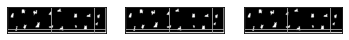

time: 838 ms


In [0]:
os.chdir('/content')
import imshowpair.imshowpair as ims
import imshowpair.utils as util1
ims.imshowpair(Image.open('/content/0_186_actual_mask.jpg'), Image.open('/content/0_186_predicted_mask.jpg'), grid=True,method=util1.blend)